In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import skimage.measure
import random

In [8]:
n = 10000

images = []
labels = []
for i in range(n):
    width, height = 81, 81
    image = Image.new("1", (width, height), 0)
    draw = ImageDraw.Draw(image)
    x1, y1 = 0, random.randint(height//3, height//1.5)
    x2, y2 = width-1, random.randint(height//3, height//1.5)
    draw.line((x1, y1, x2, y2), fill=1 , width=1)
    image.save("random_line_image.png")
    convolved_image = Image.open(r"random_line_image.png").convert('RGB')
    rad = 10
    convolved_image = convolved_image.filter(ImageFilter.GaussianBlur(radius=rad))   
    convolved_image.save("convolved_image.png")
    convolved_array = 2.5*rad*np.array(convolved_image.convert('L'))
    small_array = skimage.measure.block_reduce(convolved_array, (27,27), np.average)
    mean = 0
    var = 256
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, small_array.shape)
    gauss = gauss.reshape(small_array.shape)
    noisy = small_array + gauss
    if random.randint(0,1) == 0:
        images.append(np.array(noisy))
        labels.append(0)
    else:
        images.append(np.transpose(np.array(noisy)))
        labels.append(1)

1


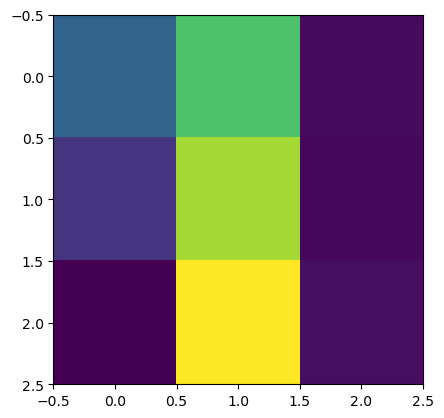

In [18]:
i = random.randint(0,n)
print(labels[i])
plt.imshow(images[i])

In [21]:
split = random.randint(0,n)
images_train = images[:split]
images_test = images[split:]
labels_train = labels[:split]
labels_test = labels[split:]

In [22]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape = (3,3)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8, activation = "relu"),
tf.keras.layers.Dense(1, tf.keras.activations.hard_sigmoid)
])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
cp1 = ModelCheckpoint('model.keras', save_best_only=True)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [24]:
history = model.fit(images_train, labels_train, epochs = 100 ,verbose = 1, batch_size = 10, validation_data=(images_test, labels_test), callbacks=[cp1])

ValueError: Unrecognized data type: x=[array([[ 16.13259305,  23.9951563 ,   0.45923161],
       [205.77436593, 189.02775143, 174.65534632],
       [ 37.29201403,  58.09367151,  77.69542425]]), array([[-10.9178071 ,  17.60339848, -12.61117201],
       [162.47354278, 175.57958818, 168.90157894],
       [ 65.33590244,  44.69786939,  41.22909337]]), array([[ 66.02033509, 166.44688962,  28.31569459],
       [ 18.32822147, 208.32207695,  20.38326816],
       [ 17.95565573, 172.69785689,   6.61660059]]), array([[ 50.71916746,  90.06108436,  82.48182858],
       [171.57624292, 163.87087636, 184.24955168],
       [  5.61176263,  10.52586251,  -6.0331763 ]]), array([[ 35.57478533,  46.29748647,  60.65483314],
       [188.62641738, 192.20493574, 198.54802   ],
       [ 13.69638594,  29.50132833,  11.9701932 ]]), array([[ 37.28341523,  36.64771768,  74.83241606],
       [209.77218176, 177.8779158 , 175.50294091],
       [ 26.23025094,  20.24556586,   8.5137196 ]]), array([[ 33.0703547 , 191.8256122 ,  44.30833201],
       [ 19.84406619, 210.96082599,  35.78216133],
       [ 41.33055799, 178.18799178,  58.38118223]]), array([[ 24.71201181, 176.8751323 ,  46.288481  ],
       [ 38.00082621, 180.47716476,  23.63060403],
       [ -0.22803818, 195.83223696,  67.6953405 ]]), array([[106.57829655, 119.39940855,  85.79598384],
       [133.96045503, 148.95062156, 140.94000118],
       [  1.8802829 , -13.54162998,  -4.12276948]]), array([[ 65.12040467,  38.33589479,  13.87448438],
       [163.32138879, 211.67675722, 186.84060459],
       [ 13.27721094,  -6.12659462,  28.5477883 ]]), array([[ 38.43416316, 214.58428361,   8.58336431],
       [ 11.74025505, 188.47230789,  30.26048049],
       [ 18.5107407 , 222.65811243,  45.66212926]]), array([[ 57.52416721,  36.44340269,  32.23707039],
       [168.12556125, 205.90071285, 191.59541209],
       [ 22.39657512,   6.51221467,  17.0344504 ]]), array([[ 14.58900852,   6.19467524,   7.01771916],
       [163.07054512, 172.27806391, 164.66435207],
       [102.55554761,  72.05216184,  64.88913045]]), array([[ 74.02260962,  51.08317733, -30.95804887],
       [174.05447828, 160.84282685, 162.85590144],
       [ -5.15035516,  19.97212462,  20.97696113]]), array([[ 16.59214166, 130.01707223,  70.41013255],
       [ -1.41144046, 190.56307475,  21.20958171],
       [ 91.28241025, 146.56068716,  -6.71193158]]), array([[ 13.87657713,  12.02349312,  27.3714841 ],
       [151.76907618, 170.30559408, 180.26625237],
       [ 72.69161297,  71.49003376,  25.33742597]]), array([[  2.38807266, 199.08367952,  29.33908506],
       [ 33.94043723, 183.34465996,  37.21945855],
       [ 46.11085212, 215.35447974,  53.7174067 ]]), array([[131.80702243, 155.32196919,  -1.75657772],
       [ 93.31393733, 189.0605998 ,  16.08280809],
       [ 37.90099557, 160.51945112,  12.27439629]]), array([[-17.61622121,  11.14133927,  -0.62440807],
       [109.27464714, 140.85355381, 125.11261867],
       [139.82863738, 146.7075034 , 115.70502855]]), array([[-11.71865751, 166.92187151,  41.26724155],
       [ 28.54933155, 194.33842165,  30.28808202],
       [  4.91072491, 175.70037712,  37.44456004]]), array([[ 45.86607604, 159.40373353,  26.49166895],
       [ 41.87483801, 216.7047235 ,  24.84752948],
       [ 15.00582098, 190.79640077,  10.73152569]]), array([[ -6.10051651, 152.67988796,  92.53269439],
       [ 22.25403298, 164.85528774,  60.20837045],
       [ 16.29639279, 204.66220989,  47.04986668]]), array([[ 25.90130012,  48.34144472,  49.62926133],
       [165.86983557, 187.20595886, 178.93936442],
       [ -9.31600801,  25.41343098,  11.96209887]]), array([[ 31.23783226,  40.19275331,  35.96787128],
       [201.90109141, 187.89736642, 210.02157831],
       [ 35.25581864,  27.5563028 ,  14.02028152]]), array([[  4.00904923,  33.83937164,  21.52102028],
       [158.64936224, 168.61870719, 167.85569541],
       [ 39.55945826,  62.29610304,  58.39882668]]), array([[  8.42700313,   2.08300722,   0.8120592 ],
       [153.62639548, 177.83029173, 130.64752697],
       [ 58.63158124,  90.84318321, 100.51532079]]), array([[ -2.16863532, 126.26417206, 109.66737124],
       [  9.64920959, 189.01635508,  57.60174612],
       [ 90.11366459, 172.93561371,   9.80241625]]), array([[ 79.01868571, 185.72416313,  23.8769463 ],
       [ 29.66991646, 201.68269945,  49.45142303],
       [-14.16063115, 165.85053193,  46.29360782]]), array([[ 81.15994392,  47.81992169,  67.42321063],
       [190.44202428, 187.87874355, 180.07654515],
       [ 24.99030686,  10.02623281,  20.09959015]]), array([[-10.3615015 ,  14.05297784,  25.1322741 ],
       [188.37369327, 194.48109239, 210.16290011],
       [ 45.40387909,  10.48534094,   5.78301572]]), array([[ 15.00587195,  10.4577136 ,  12.82952632],
       [159.85085555, 176.57466833, 180.44536029],
       [ 32.63655364,  35.67741235,  -9.21438042]]), array([[ 36.19537279, 166.65399919,  30.28061704],
       [ 22.24827871, 195.09292055,  38.23607225],
       [ 69.29390264, 165.23601475,   0.31281744]]), array([[ 26.35458266, 182.79454092,  37.80902189],
       [ 26.89747671, 181.69298181,  50.19370319],
       [ 13.42799917, 184.10135058,  48.37679064]]), array([[ 59.32288851, 146.03391078,  14.19553603],
       [ 12.51565335, 198.53991665,   2.55897514],
       [  4.53917669, 202.83700932,  48.91447378]]), array([[ 44.49875258, 189.71922095,  16.49706242],
       [ 34.43167041, 170.82942852,  36.03356117],
       [ 40.71154151, 172.85007206,  -5.31741856]]), array([[-15.40641545, 145.01074746, 134.4030957 ],
       [  1.38573975, 145.12105108,  82.05822238],
       [  2.07926383, 159.52867693,  74.36995212]]), array([[ 38.14736403,  14.22704645,   5.89745846],
       [201.10910246, 186.5863303 , 170.44187591],
       [ 29.80282965,  57.58258664,  66.73511084]]), array([[ 33.09933247,  22.96878757,   5.61867152],
       [187.1656978 , 197.6152438 , 180.62721314],
       [ 13.46463952,   3.56015175,  48.55146533]]), array([[ 41.68697205,  52.88001041,  72.68836725],
       [151.71941345, 168.40960302, 174.86657081],
       [ 11.40881365, -10.46956085,   2.5969093 ]]), array([[ 46.1099348 ,  16.59279055,   1.76655546],
       [203.16064229, 196.92889626, 172.61601644],
       [ 11.85366405,  43.82245604,  36.04929229]]), array([[ 27.99313147,  19.33332953, -10.90792881],
       [173.23430923, 203.26344712, 160.73963619],
       [ 57.7568813 ,  45.69505676,  74.52443089]]), array([[-10.31420211,  -5.23537328,  18.20465914],
       [133.71278529, 190.27849791, 176.41446229],
       [139.83496128,  58.04079431,  34.54448749]]), array([[ 73.62829558, 186.09314697,  34.31498008],
       [ 30.12967714, 187.50366394,  16.42016321],
       [ 56.94171339, 161.91590144,   1.84958757]]), array([[ -3.62144832,  -7.52322399,  19.66662194],
       [163.93604012, 168.25211413, 199.6054989 ],
       [122.28476006,  47.75164817,  11.26063983]]), array([[ 58.26823233,  49.12274681,  69.9081062 ],
       [140.32495202, 187.75045954, 166.62435632],
       [ 12.10842623, -10.99204467,  18.95925364]]), array([[ 31.09107729,  19.16501587,  15.0411107 ],
       [157.17039085, 181.42239869, 148.88063229],
       [ 17.08645683,  24.03696943,  63.73958456]]), array([[ 50.12739777,  -4.92152241,   6.16018142],
       [168.23711295, 183.48457379, 199.16670176],
       [ 72.7871976 ,  59.84183314,  74.20339112]]), array([[ -3.33609818,  47.19587632,  28.8023662 ],
       [196.31024741, 213.35612197, 193.06966704],
       [ 39.33081213,  21.50921423,  25.35861129]]), array([[ 32.5116433 , 145.81637418,   7.99198646],
       [ 62.01491337, 187.82345186,   7.57543713],
       [ 62.28999473, 137.0022965 ,  22.31183431]]), array([[ -7.60791387, 152.28357784,  75.33825092],
       [ 14.65495246, 166.18738553,  60.05647937],
       [ 10.50380955, 173.62642   ,  -1.44216217]]), array([[ 43.15898666, 159.58820464,   5.77039751],
       [ 70.8623563 , 181.06766194,  15.41031191],
       [ 69.55320231, 160.59928429,  -7.32611889]]), array([[ 55.61316829,  10.61038644,  32.84958434],
       [202.22291923, 189.96281061, 168.17973954],
       [ 30.28904964,  -7.07923974,   3.35596062]]), array([[ 25.18512135,  61.49697992,  38.44225856],
       [168.40406649, 195.76318869, 159.92774089],
       [ 24.53269829,  13.22227377,  17.05488542]]), array([[  3.70308783,  -0.86646665,   4.80253792],
       [176.35281141, 154.03040523, 118.5224072 ],
       [ 27.20590266, 116.61834828, 106.3662882 ]]), array([[ 21.48400357, 170.80378218,  42.87379325],
       [ 51.3382048 , 185.83640747,   1.67888057],
       [ 66.8947683 , 176.99304154, -10.26180776]]), array([[ 74.84937634,  29.61772768,   5.63994534],
       [161.08183287, 188.68321283, 177.26140603],
       [ 12.91486599, -25.5346914 ,  48.65209207]]), array([[ 70.26922896,  79.21181282,  38.05315414],
       [166.01948697, 174.43010018, 156.92485692],
       [  0.48952213,  -4.87877121,  32.04184079]]), array([[ 58.67061034,  59.5780016 ,  62.58738218],
       [144.34628198, 144.95317211, 157.5434468 ],
       [  2.13264713,  24.99494784,   9.81455935]]), array([[ 59.4421876 ,  27.01880704,  38.98518568],
       [164.07333262, 182.10059435, 168.01451584],
       [ -0.75143016,  28.03252435, -17.92272112]]), array([[ 49.68413272,  70.32513863,  70.62280903],
       [194.39840242, 193.37360171, 159.02248303],
       [ 19.03494038,  14.38432618, -17.28564912]]), array([[  1.27070059, -29.52148502,  58.77025738],
       [194.57358186, 179.15311022, 182.56156831],
       [ 29.53382592,  44.84473109,  44.81801401]]), array([[ 11.99632087, 162.50521289,  48.91627263],
       [  7.29573286, 173.84228287,  53.25263922],
       [ 32.88662314, 202.94136705,   4.87225847]]), array([[-10.621743  , -13.20135707,  -8.61673351],
       [158.96610043, 149.40339189, 135.59659634],
       [ 25.83869024,  61.40161545,  53.38314348]]), array([[106.74866082, 131.38051579,  96.77827666],
       [154.00509398, 150.58672122, 118.74846841],
       [  2.27233595, -10.05130974,   2.50508954]]), array([[ -9.32126516, 130.907478  , 114.86817833],
       [ 14.5527629 , 196.48592632,  36.42077145],
       [ 39.84565097, 187.69604149,  28.02099099]]), array([[ 12.14941514, 163.85577325,  73.8990129 ],
       [ 12.23508208, 143.03501366,  54.25247487],
       [  8.12224373, 192.53710355,  49.57658015]]), array([[ 31.71689037,  15.47740638,  10.33023001],
       [189.4120817 , 199.88585348, 194.74569204],
       [ 19.32281705,  19.48255223,  28.05066933]]), array([[ 30.04120539, 203.38556631,  -7.98391079],
       [ 32.37125482, 209.7148926 ,  16.99233331],
       [ 19.55746074, 177.11074963,  19.59565591]]), array([[  1.92341878,  11.59430805,  16.29878482],
       [164.90001292, 186.06697967, 187.33447731],
       [ 46.85990911,  82.90675659,  59.95844006]]), array([[ 13.11422386,  36.78343357,  89.62968452],
       [179.53029175, 191.38957182, 175.60048486],
       [ 58.21694865,  -3.37794966,  40.86915057]]), array([[ 78.09837539, 161.42436872,  43.3958483 ],
       [ 43.82082546, 203.76176778,   4.37395964],
       [ 38.22772013, 194.09345552,  22.01699352]]), array([[ 74.87673618,  82.57429757,  72.39911044],
       [183.49098214, 162.25048394, 182.43571534],
       [ -7.40139189,  -7.59899452,  25.23205648]]), array([[ 36.2884904 ,  34.83251588,  18.43414764],
       [196.78683485, 195.18480015, 208.4513102 ],
       [ 23.19946769,  -4.64381137,  -4.33189361]]), array([[  7.8620651 ,  -9.81006351, -16.64756189],
       [151.07197714, 122.56013506, 151.84592445],
       [106.86633402, 102.5448677 ,  87.69715854]]), array([[ 54.20807691,  17.45070535,  26.97625727],
       [167.99239   , 189.72207896, 184.67339288],
       [ 18.40647245,  -2.13107266,  60.14980385]]), array([[ -7.44455839, 179.72335078,  48.95910074],
       [ 23.70877061, 208.54684681,  16.56185472],
       [ 16.40673926, 207.60497559,  42.85773372]]), array([[ 18.9038618 ,  14.76600956,  75.59503119],
       [162.07678065, 168.39402347, 182.01890747],
       [ 28.25755178,   4.98705037,  17.07689439]]), array([[ 83.33848698, 139.59577956,   6.83657624],
       [ 72.78688108, 165.21184173,  18.04062238],
       [ 68.82028956, 175.36917408,  12.14795194]]), array([[  2.26167527,  37.72381946,  41.97688417],
       [153.72354472, 164.5169997 , 143.75817491],
       [116.47267232,  24.41864888,   1.27337285]]), array([[-19.88947272,  23.28766574,  47.94264852],
       [138.43088942, 181.17221349, 196.3746449 ],
       [ 94.393299  ,  54.45270181,  26.72547179]]), array([[ 14.62840935, -19.26817262,  11.26225468],
       [153.36734023, 139.65761214, 201.78482692],
       [ 73.35151274, 106.99444883,  85.74308659]]), array([[ 10.24751819,   6.54771056,   6.60717968],
       [132.4464134 , 166.71104636, 208.58936435],
       [ 76.05551459,  67.51333477,  24.34318464]]), array([[ -6.89942188,   7.33340463,  12.28332186],
       [159.9374179 , 122.64999778, 105.73890395],
       [ 71.3331889 ,  92.12272142, 110.6368279 ]]), array([[ 19.98929256, 182.94700676,  -3.83862527],
       [ 46.24097775, 195.40001407,  15.63182315],
       [ 46.09789339, 206.49834878,   2.98379972]]), array([[ -5.25189132,  -8.75734848,  42.04662981],
       [170.97768666, 167.27925585, 192.79312681],
       [ 83.96310966,  70.13118343,  39.18551042]]), array([[-16.75564434,   3.36742973,  -0.83329173],
       [186.30558096, 167.22664724, 156.18368314],
       [ 26.34013784,  51.69399765,  56.88929776]]), array([[ 27.12061869,  13.62177687,  30.47858929],
       [158.67900182, 211.20612665, 193.30803807],
       [112.1913334 ,  35.95638351,  14.72397911]]), array([[ 85.23205369, 138.31338386,  23.83897791],
       [ 91.15593242, 140.54802178,  11.27343699],
       [ 66.30777001, 156.6544106 ,  21.97024783]]), array([[ 17.93564973, 175.57794128,  46.05179651],
       [  4.05817535, 174.36213768,  42.5885531 ],
       [ 18.60324941, 160.82884891,  94.43366548]]), array([[ 71.179657  ,   8.16347785, -13.88135069],
       [173.17737937, 217.25122114, 141.33566152],
       [ 32.22629748,  -3.98591762,  84.62832814]]), array([[ 21.0508568 , 173.47836766,  20.73284524],
       [ 14.34271296, 172.88455393,  79.8806729 ],
       [-10.22789368, 128.04645681,  77.8257899 ]]), array([[-1.62444624e+00,  1.25493391e+02,  9.67553949e+01],
       [ 1.83446285e+01,  1.98009219e+02,  6.70171945e+01],
       [-1.14879104e-01,  1.66320077e+02,  5.85908533e+01]]), array([[ 79.36767966, 145.65549727,   7.20481001],
       [ 40.61501737, 193.91587117,   8.5123604 ],
       [ 61.27730873, 213.66255753,  16.11195455]]), array([[ 35.09688833, 189.44237798,  21.98318713],
       [ 24.46679445, 227.53715744,  15.69063963],
       [ -8.76665546, 202.20529139,  14.52890762]]), array([[-11.24656467, 138.75480302,  76.365982  ],
       [  7.09727253, 150.64568584,  95.94284178],
       [ -0.81599229, 114.00559847, 127.42312951]]), array([[-28.22690225, 186.22267814,  27.01634876],
       [ 27.44907849, 176.12119618,  -2.13072286],
       [ 59.06008349, 170.60126643, -13.8946614 ]]), array([[ 14.40814326,  40.86773711,  31.50169377],
       [178.7926918 , 198.27563888, 195.67214853],
       [ 22.37568179,   2.771872  ,  -2.5551118 ]]), array([[ 19.16715738, 224.49096199,  64.49592647],
       [ 22.92143849, 160.97892085,  20.75620031],
       [ 73.91721151, 155.71570832,   1.62593142]]), array([[  1.47730601,  31.70860716,   5.24357301],
       [193.29847711, 188.84869696, 176.73582765],
       [ 47.29104049,  42.1123745 ,  61.09435265]]), array([[ 35.24292478,   0.25354396,   4.26047748],
       [187.37066033, 163.77564414, 168.48015006],
       [ 51.77022635,  62.6474812 , 121.73773801]]), array([[ 20.72350077,  32.22508395,  17.47385072],
       [183.22625671, 197.22870968, 208.46898528],
       [ 13.50650472,  -1.20438505,  49.26266321]]), array([[ 37.10840856,  20.46448233,   5.43281346],
       [175.58551046, 199.76970529, 168.96497991],
       [ 18.67639559,  47.94860163,  43.84557492]]), array([[ 11.21087181,  22.06747568,   4.51805686],
       [178.73889501, 192.82238927, 188.31096759],
       [128.30172224,  50.22857297,  47.64165959]]), array([[ 15.8062244 ,  40.30304804,  69.58258718],
       [183.22640673, 166.24357431, 155.1992044 ],
       [  9.30376342, -10.34688576,  16.73442301]]), array([[ 61.30647193, 177.50644599,  28.25309286],
       [ 21.16820524, 194.01284923,  26.38895362],
       [ -5.33408634, 164.4108808 ,  46.73810744]]), array([[ 29.63297644, 185.47797275,  33.76065435],
       [-13.42079403, 202.12782931,  68.92131693],
       [ 35.13963737, 157.2585816 ,  56.86958933]]), array([[ 18.84708234,  22.29319476,  14.89613092],
       [159.10121354, 172.38691958, 203.13648724],
       [104.98762696,  36.79887903,  27.83882821]]), array([[ -6.50804679,   0.26342222,  22.43631674],
       [165.27083521, 193.17910298, 171.06628896],
       [ 65.83423149,  73.99563175,  38.88531003]]), array([[-12.30141752, 139.20192118,  69.10774865],
       [ 54.58587186, 194.88432886,  37.03529928],
       [ 70.1972792 , 165.64906347, -14.19353717]]), array([[ -3.35297148, 139.41210134,  75.17173698],
       [  3.68907513, 166.55525566,  37.3086379 ],
       [ 21.30270588, 180.45758045,  66.81309773]]), array([[-15.05602287, 174.47532604,  46.86439143],
       [-12.72780438, 207.67747306,  49.6727151 ],
       [  6.78018103, 196.69809765,  26.77532049]]), array([[ 29.00869043, 195.39707671,  22.14089886],
       [ 62.71051044, 196.2968011 ,   7.60850404],
       [ 18.8288871 , 213.76834524,  10.34232045]]), array([[  4.45196926, 176.77946731,  34.00142436],
       [ -1.02587099, 155.65984399,  99.52517528],
       [ -4.79451663, 139.17180147,  98.38611467]]), array([[  8.42842194, 202.60790562,   7.00821051],
       [ 10.91897195, 174.20817669,  40.8371133 ],
       [  3.36549206, 196.03790713,  56.92817473]]), array([[ 15.25938288, -28.73270927,  17.75328755],
       [157.42037843, 196.1269496 , 178.26951005],
       [ 62.91143932,  42.5244385 ,  34.44052193]]), array([[ 56.27354208,  79.41402717,  50.51663862],
       [197.98507754, 181.00397052, 146.12160689],
       [  6.76679272, -15.23055264, -18.74036606]]), array([[ 15.65386181, 204.6520748 ,  52.19038707],
       [ 24.8235199 , 186.8935379 ,  38.42750724],
       [ 16.3884321 , 187.47150492,  50.83441775]]), array([[ 92.24829897,  98.19608583,  93.18450126],
       [171.69042579, 154.71236822, 152.508086  ],
       [ 22.29161528,  -9.98345171,  -0.81283263]]), array([[ 17.15959783,  26.09454789,  12.59145474],
       [187.88310448, 178.72528056, 157.08515556],
       [ -3.89075622,  31.66777445,  88.52443928]]), array([[ 11.67918254,  46.61534637,  47.13628096],
       [203.59328414, 176.43253405, 172.2768922 ],
       [-20.19760396,  26.161483  ,  20.98800559]]), array([[ 11.44427276, 196.41346768,  34.38826769],
       [ 10.96954903, 183.07019115,  39.37497797],
       [ -8.5104365 , 170.55712618,  70.97295181]]), array([[ 25.98040132,  22.57578321, -15.83417486],
       [184.78007693, 204.0563032 , 172.00420635],
       [ 35.26622667,  46.22242181,  66.82586914]]), array([[ 20.46655587,  15.39024354,  58.864408  ],
       [174.26633006, 178.34269557, 192.74910456],
       [  6.2703593 ,  21.70853667,  25.84925164]]), array([[ 49.11987632, 128.05050249,   9.50054498],
       [ 66.94552981, 171.56604859, -14.66511353],
       [ 28.21123958, 182.69799388,  29.6509466 ]]), array([[  0.36886267, 136.81884543, 105.03052298],
       [ 18.47678228, 177.42155923,  89.1985164 ],
       [  5.07414614, 164.08726631,  67.33406543]]), array([[ 22.2120124 ,  18.8863686 , -25.35931017],
       [180.24859074, 191.01820641, 183.95054461],
       [ 44.26226329,  64.02077973,  47.55150075]]), array([[ 52.02100493, 173.82928622,  38.15235183],
       [ 34.45530654, 194.18606939,  16.50647228],
       [  1.66970731, 195.47331579,  23.10848504]]), array([[ 38.79114411, 176.20987288,  27.15805953],
       [ 10.19958922, 241.09880229,  24.65661072],
       [-30.99774307, 185.20868693,  39.84442466]]), array([[ 20.43722941, 184.75266331,  49.30389026],
       [ 11.88678591, 181.35310337,  48.22122011],
       [  9.95143848, 211.43764799,  37.49391249]]), array([[ 20.3760742 , 183.00467215,  19.70838259],
       [  6.12779577, 177.0418625 ,  59.37296571],
       [ -6.96585861, 117.07052461,  71.95748313]]), array([[ 54.27391418, 192.61799504,  -3.03461633],
       [ 29.34478267, 206.2685093 ,  25.88291011],
       [ 20.01837788, 168.19886514,  50.27429698]]), array([[  9.39681671,  -4.40706902, -13.73947128],
       [212.73995008, 178.28841676, 160.05457213],
       [  7.44374717,  55.22969423,  93.058957  ]]), array([[ 27.42924441, 179.64218553,  34.31248399],
       [ 35.9895149 , 176.20233248,   4.66765997],
       [ 85.30596281, 151.69501293,  17.51447342]]), array([[-16.85901596,  -3.07079846, -26.86224239],
       [167.68702248, 143.11335258, 141.33440632],
       [ 65.00289662,  62.23087873,  73.84300869]]), array([[ 46.87968719,  56.32820713,  -5.5619609 ],
       [153.94569956, 175.15653581, 175.94624501],
       [  9.22731617, -14.12177925,  55.94415647]]), array([[ 28.13878664,  54.64794573,  96.64961582],
       [205.38475018, 148.49586044, 143.39929964],
       [ 26.60357098,   5.90341998,  11.51696981]]), array([[ 70.85413101,  17.96812643, -12.05949117],
       [179.19365669, 185.33820488, 171.11833316],
       [  2.96680966,  64.49830637,  86.25011346]]), array([[ 38.16012548, 169.35078656, -24.85625172],
       [ 25.47370394, 181.41131089,  38.52595539],
       [ 31.03679097, 169.52331936,  18.29971326]]), array([[ 20.53217328,  34.38637383,  33.61013437],
       [190.53555187, 186.5175751 , 203.18487255],
       [ 13.35425868,   2.61516953,  13.04367672]]), array([[ 87.88665267,  60.22457558,  53.33727044],
       [139.12286507, 155.47512249, 190.70647101],
       [-13.20461766,   4.30791301,  43.92928094]]), array([[ 10.87636772,   4.96204538,  -0.93844985],
       [169.13636204, 177.72035759, 174.88357253],
       [ 23.21157429,  47.54296583,  96.03320479]]), array([[ -3.62012187, 195.82477418,  94.32287317],
       [ -3.24296171, 169.51951833,  46.77089035],
       [ 10.06086591, 203.60553057,  25.05189945]]), array([[ 21.87366381,  33.85139808,  53.6982647 ],
       [194.59187991, 204.06904366, 152.14667784],
       [ 20.27269836,  12.92866732,  20.77475705]]), array([[105.84001379,  78.42442392,  78.87854706],
       [148.34127428, 179.59778659, 139.49582824],
       [-12.19215508,  24.65737891,  -8.9557833 ]]), array([[-13.12852541,  -5.05342784, -37.02892838],
       [124.69689194, 126.11519249, 137.63308309],
       [119.1166682 , 124.61912252,  91.92689717]]), array([[ 30.07521244,  12.72250222,  16.71193138],
       [191.88474265, 193.95529273, 207.87366479],
       [ 21.50740204,  10.14782446,  19.79252383]]), array([[  5.16573006, -12.37899084,  50.80006509],
       [168.47402826, 199.4529595 , 182.44431806],
       [ 64.74578083,  37.19043255,  21.807724  ]]), array([[ 20.16556941, 160.72053899,  89.11135803],
       [ -4.69038081, 180.51631666,  58.87558973],
       [ 40.93023905, 206.59154762,  10.69022562]]), array([[ 10.8835252 , 207.79717532,  36.0192867 ],
       [ 21.2119591 , 178.83208753,  50.25963144],
       [  6.66028337, 151.70489213,  51.67985326]]), array([[ 32.65021838, 207.02954243,  33.144665  ],
       [ 30.77119755, 205.0141906 ,  12.11290733],
       [ 66.89714877, 194.39894037,  19.26268166]]), array([[ 17.38433343,  -3.94289806,  24.24749268],
       [135.56004075, 146.67067199, 159.37838812],
       [133.42392378,  68.07383128,  20.92811218]]), array([[ 95.33043761, 125.77831399,   9.58404655],
       [ 73.70069268, 158.30940339,  13.69869905],
       [ 60.1415454 , 182.30567945,  11.59871629]]), array([[ 55.42947244,  63.39237962,  19.21972742],
       [181.7854768 , 179.92794334, 189.81516465],
       [ 19.63456834,   0.59044093,  -1.49977675]]), array([[ 26.00560631,   9.43029423,   5.70212535],
       [169.13598103, 172.48759667, 150.07660943],
       [ 21.02765142,  33.91313385,  60.14535798]]), array([[ 40.28888528, 203.56718471,  66.19445474],
       [ 40.5010653 , 200.36819101, -12.80194177],
       [ 62.62376303, 177.76096739,  -5.88879888]]), array([[ 33.30996491,  66.22619099,  85.06717817],
       [170.17127515, 169.66479332, 134.91070324],
       [ 24.0587638 ,  13.50262723, -19.59681214]]), array([[ 32.41115472,  83.63263101,  58.83265308],
       [182.7432732 , 181.36110741, 204.93619128],
       [-10.7243836 ,  -3.07494564, -12.06978715]]), array([[ 28.8759728 ,  -4.83061159, -21.2125375 ],
       [196.34118862, 170.52277059, 170.31953111],
       [ 12.27582634,  52.67181613,  89.44842074]]), array([[ 64.01953113,  33.96700246,  27.08119917],
       [219.35359386, 191.15350944, 173.11651764],
       [ 11.90898256,  37.00077718,  57.02440805]]), array([[ 88.46159927, 154.7709517 ,  19.9064318 ],
       [ 30.93558013, 184.90372022,   5.79095394],
       [ 18.04352411, 149.00551716,  44.39556132]]), array([[ 89.18044057, 147.64559644,  -3.37169394],
       [ 96.41490204, 183.50582616,  -5.36830127],
       [ 99.35208915, 148.50482171,  16.5014157 ]]), array([[ 19.00387426, 193.74613603,  26.33372063],
       [ 55.85289523, 174.6264664 ,  32.14116865],
       [ 77.49590847, 159.9558052 ,  -4.29136996]]), array([[ 21.19258635,  43.83571373, -16.51918397],
       [162.57433244, 200.27099237, 126.58203951],
       [ -7.81230083,  32.8774401 ,  70.52285391]]), array([[ 80.87626359,  40.11564536, -23.68307804],
       [180.9296425 , 160.96058682, 132.39605307],
       [ -5.06402006,  30.44109503,  80.95174825]]), array([[  4.76975078, 166.0721622 ,  64.92244249],
       [ 18.79505726, 178.86917765,  38.47089612],
       [-11.94464188, 172.72789132,  83.72578565]]), array([[ -7.07704798,   2.06109389,  27.92418948],
       [160.36794713, 197.91806735, 198.76136362],
       [ 75.9922848 ,  23.45733074,  24.90208464]]), array([[ 16.76799478, 172.18101079,  49.68975379],
       [ 18.74515049, 152.59520463,  85.86543166],
       [ -3.62768614, 149.4694046 ,  65.6351048 ]]), array([[ 14.43845385, -38.90987002,   5.33196193],
       [153.50448149, 149.63940594, 124.31168301],
       [121.89209853,  90.2918151 ,  79.98708566]]), array([[ 52.51837773,  56.06874612,  70.53583808],
       [195.04055296, 153.30279939, 167.48640767],
       [ 35.95767151, -18.01878179,  -4.98202302]]), array([[ 17.18979126, 195.85804276,  10.50268524],
       [ 60.16654143, 184.69453987,  36.0036539 ],
       [ 78.50172795, 165.833605  ,  -0.76794888]]), array([[ 16.63997662, 213.35712449,  -7.25011454],
       [ 31.52097467, 182.53361476,  11.49625763],
       [ 23.6648203 , 159.68632348,  34.54162013]]), array([[  5.90898429,  10.3837558 ,  -6.55851733],
       [207.84695454, 160.93488522, 171.51076785],
       [ 66.8770523 ,  61.07975391,  56.46556885]]), array([[ 80.24884867, 158.36785589,  -3.11187932],
       [113.11886295, 165.55987537, -17.39599276],
       [ 33.83355735, 191.23670272,  -0.70016395]]), array([[  5.32936526,  -1.41955724,  -4.96507186],
       [206.33225301, 178.19150686, 145.82575802],
       [ 15.63138332,  24.91937304,  86.75968655]]), array([[ 38.34142824, 173.87114194,  12.59758895],
       [ 41.76721705, 199.09391582,  16.42600506],
       [ 68.92728615, 180.14855328,  -9.96064248]]), array([[ 10.91273903, 197.12892351,  64.82929707],
       [ -4.25857269, 180.69933293,  33.82959947],
       [ 36.43191207, 216.32224581,   4.73558795]]), array([[ 40.54163532,  38.47002429,   6.20874479],
       [191.55320375, 213.75497383, 182.57333278],
       [ 15.28075585,  14.6866472 ,  55.65094442]]), array([[ 57.22428228, 176.70634581,  13.2415047 ],
       [  9.83419314, 165.95736666,   4.48249811],
       [ 18.88027986, 195.66821907,  19.83221392]]), array([[ -6.14750163, 163.78962607,  11.09985164],
       [ 58.56944172, 174.45043504,  33.28832282],
       [ 44.13222729, 180.25904079,  15.33964584]]), array([[132.23852499,  87.11090852,  46.55534424],
       [161.64676768, 165.99649142, 173.54844948],
       [ 19.90551149, -15.61526475, -46.87631825]]), array([[  1.20014392, 160.77480724,  62.12838599],
       [ 34.16321283, 173.73800146,  28.53125272],
       [ 79.81827231, 143.7767488 , -10.96984543]]), array([[ 17.48295721,   7.99932708, -21.77582815],
       [166.93916295, 150.37282214, 158.08324041],
       [ 40.52022161,  64.29184461,  67.33486032]]), array([[ 26.41065933, 245.79088141,  20.39158569],
       [ 56.41569136, 190.86618378,  16.00707694],
       [ 84.11790498, 158.38217785,   0.44218684]]), array([[ 94.92613458,  79.55180839,  63.33436852],
       [131.5221041 , 144.03213758, 156.0964674 ],
       [ 12.83343692,  15.37169423,  -9.36400279]]), array([[ 79.63135553, 162.1055688 ,  11.0558065 ],
       [ 47.85004738, 175.74579232,  13.94921529],
       [ 14.40378789, 179.89220786,  25.6226019 ]]), array([[ 68.59680384, 185.97877126,  12.7689927 ],
       [ 90.59891326, 212.84466152, -14.3163571 ],
       [ 77.63281776, 147.98508744,   5.75555931]]), array([[ 53.67443109,  24.22037481,  16.5137638 ],
       [147.44990981, 217.88056528, 216.49413688],
       [  0.84811636,  15.05261154,  66.90978373]]), array([[ 15.33445805,   7.89610299,  11.267835  ],
       [193.53860848, 178.19642745, 179.89934765],
       [ 27.24558114,  45.77466824,  40.22991268]]), array([[ 4.87311111e+01,  1.89103012e+02,  1.47933268e-01],
       [ 5.00146482e+01,  2.06343717e+02,  3.00094561e+01],
       [-6.67526668e+00,  1.61006081e+02,  6.99401731e+01]]), array([[ 14.39141243,   8.96281253, -45.10317539],
       [186.50313328, 208.5561394 , 175.99662545],
       [ 20.06712731,  29.63051438,  45.33163327]]), array([[ -4.3446897 ,   7.78786777,  -8.94269542],
       [146.01104896, 109.60037846, 150.72012862],
       [ 45.63311226,  87.23749643,  68.58809111]]), array([[  8.63353036, 133.21504742, 120.90476791],
       [-20.77401955, 144.60961624, 117.79721106],
       [-17.70730178, 129.35792088,  74.83512052]]), array([[  4.18531499,  35.44478788,  60.56748372],
       [185.04940254, 192.66013502, 132.30591688],
       [ 39.16376781,  39.27833654,  24.16185421]]), array([[ 29.11905884,  19.9238397 ,  35.90314504],
       [140.97644221, 182.10052427, 196.48322412],
       [ 63.5745282 ,  21.02729265,  20.66105634]]), array([[ 32.34669388,  -2.20666205,   3.89932354],
       [189.77980913, 174.90166266, 158.13995687],
       [ 22.79866094,  45.66629189,  77.84378455]]), array([[ -3.2024418 ,  53.07973431,  30.98855367],
       [184.19641248, 146.55126416, 206.15749061],
       [105.2924081 ,  64.73748637,  14.56375312]]), array([[ 97.72297673,  30.87807609,  38.28258521],
       [199.80422236, 188.29313717, 206.91748853],
       [-17.81315446, -10.26804346,  29.39753368]]), array([[ 16.67203541,  29.72032201,  24.67581779],
       [179.71901309, 196.37086612, 185.15807732],
       [ 57.15173367,  11.43642169,  35.89563236]]), array([[ 70.25802807,  73.56383482,  67.51567263],
       [118.69621199, 173.88852497, 187.83772758],
       [ -5.20414492,  -7.99569047,  -4.54655919]]), array([[ 56.46349146, 212.43248729,  19.26571279],
       [ 21.07430217, 186.81820845,   1.68582338],
       [ 23.4302075 , 202.39937948,  17.62987036]]), array([[ 86.94351671,  24.28673569, -10.99678871],
       [151.0789212 , 216.02721797, 209.97643112],
       [ 27.43099325,  22.23940779,  49.36662052]]), array([[ 53.74748872,  44.8804284 ,   2.50459092],
       [151.58079018, 203.76493492, 151.61069216],
       [-34.32148084,  40.44894236,  59.40856993]]), array([[ -8.8318178 ,   0.69246392, -12.30630252],
       [165.02342429, 168.09663018, 160.90109204],
       [ 64.66133511,  67.35055915,  87.99106926]]), array([[ 82.4252647 ,  47.66519054,   2.37583659],
       [144.79756022, 223.67543962, 193.83279672],
       [ -4.99684784,  19.09572508,  29.2645701 ]]), array([[  4.919867  , 172.70054148,  50.37448239],
       [ -3.97402886, 200.07899881,  89.46549572],
       [-16.92158892, 147.27606086,  73.06839153]]), array([[ -6.92784494, -16.05907118,  28.34056585],
       [168.84512036, 185.76009876, 168.42448624],
       [ 89.73323031, 107.09242046, 101.44590978]]), array([[ 43.26605579, 204.87396806,  28.29004685],
       [ 20.84614773, 205.72237754,  43.82657741],
       [ -6.45091592, 173.20194979,  83.12673086]]), array([[ 35.15135933, 118.93417509,  20.31578113],
       [ 40.55835325, 166.41735514,  32.84730867],
       [ 10.3196251 , 183.26645003,  26.32214004]]), array([[  5.58420872,   1.20876938, -16.21953647],
       [202.5378208 , 182.82699991, 146.10627395],
       [ 46.5878126 ,  57.91533306,  62.26224188]]), array([[ 11.76143817, 154.95287447,  18.46846231],
       [ 35.41754194, 206.88171606,  50.22774899],
       [ -9.44720603, 165.66743477,  77.75027907]]), array([[ 25.10242086,  -7.5956047 ,   4.37321573],
       [151.06526179, 139.7268893 , 108.29367488],
       [120.75129431,  81.2479125 ,  98.14708088]]), array([[ -9.90397206,  -3.51951475,  13.19063191],
       [195.31618361, 177.62677908, 168.1651447 ],
       [ 55.53058775,  77.2905527 , 104.28758188]]), array([[ 23.80803045,  29.08511752,  -3.66174209],
       [212.61418607, 195.97684747, 150.97844779],
       [ 20.30414025,  49.54138285,  80.08062903]]), array([[ 44.29259353,  36.15484906,  91.22035523],
       [207.31298912, 184.44593409, 138.3962858 ],
       [ 29.34417504,   8.1085166 ,  -4.27466234]]), array([[  4.70242051, 207.79399542,  59.72832003],
       [  6.10335895, 198.70181236,   6.35885262],
       [ 23.99465501, 202.3564617 ,  37.49968743]]), array([[ 32.3463979 ,  45.97839222,  34.92844747],
       [168.81592524, 204.66480686, 189.0793479 ],
       [ 40.86839039,  20.28472867, -11.7438925 ]]), array([[ 55.09147041, 199.08948539, -12.98791848],
       [ 12.44078265, 182.42540276,   5.26384859],
       [  8.55290105, 158.95355843,  77.35494011]]), array([[  3.24008867, 132.19345419,  68.25066948],
       [ 24.95848662, 214.79166594,  59.64995177],
       [ 56.34958576, 174.32260388,  14.45222444]]), array([[-10.3464373 , 151.1836702 ,  99.33489446],
       [ -6.548284  , 195.3867706 ,  16.97431013],
       [ 14.5141822 , 205.81121717,  -4.0158745 ]]), array([[ 11.32077344, 191.64718061,  36.74903036],
       [ 34.01244773, 187.03961004,  53.38929513],
       [  7.19726241, 156.7772387 ,  92.88743427]]), array([[  2.38428651,  10.46694701,  50.99279137],
       [214.62962971, 196.74591714, 163.74460604],
       [ 20.29015306,  -1.13719934,  20.51733454]]), array([[ 24.30244915,  30.73409321,  34.61914704],
       [149.90137329, 210.27107565, 196.00684539],
       [ 57.45288992,  13.9006731 ,   0.26074667]]), array([[ 24.39917284, 152.29468817, 119.24420823],
       [ -5.02560892, 169.53122951,  88.69237448],
       [ -2.71998064, 203.7945777 ,  58.52292457]]), array([[ 13.275337  , 188.66981191,  41.18907719],
       [ -7.67752415, 155.03075372,  55.31532342],
       [ 31.19590457, 183.46932361,  84.91742367]]), array([[ 20.18463135, 176.66506133,  93.82873024],
       [ -1.70850756, 145.41344025,  49.8257362 ],
       [-12.22638801, 151.55835728, 103.28440445]]), array([[ 10.67624346,  21.09804497,  -9.75844638],
       [176.17655807, 191.67187259, 188.08641574],
       [ 48.92271049,  37.27385007,  -1.75667668]]), array([[ 49.45076366,  44.22044372,  12.53453082],
       [170.41142863, 217.8038651 , 178.60215887],
       [ 19.83344635,  13.49820065,  21.29386962]]), array([[ 22.21494612,  16.70751259,  59.18895682],
       [141.48360966, 218.13539221, 156.59781496],
       [ 73.29884558,  21.15811774,  -7.69775578]]), array([[  1.36549468, 173.34895907,   4.39055297],
       [ -7.95292957, 197.4554169 ,  29.38369164],
       [ -3.66558712, 168.67619683,  60.6719878 ]]), array([[ 21.91283599,  18.40252825,  58.92689616],
       [142.22769288, 192.46397208, 173.6764742 ],
       [ 83.28770085,  28.31661409,  24.77352183]]), array([[ -2.28242856, 177.14464679,  66.99463709],
       [ 14.5187815 , 198.19642359,   1.58790632],
       [ 48.58472242, 205.15204242,  12.37113796]]), array([[ 20.02721261,  -4.88448441, -12.86385549],
       [111.96014112, 124.94679139, 151.58783413],
       [112.341278  ,  86.45750901,  82.80775817]]), array([[ 45.40382841,  66.90358274,  51.80669448],
       [209.81032266, 169.90105207, 173.07029049],
       [ 15.43980523, -12.41603213,  -2.29586089]]), array([[-20.36470633, 159.3463951 ,  45.30557734],
       [-18.37209934, 207.78071638,  21.28553399],
       [ 39.80417235, 199.16284144,  13.52525648]]), array([[ 27.4327983 , -23.09784704,  18.58073373],
       [167.53211568, 154.63042534, 209.31455515],
       [ 48.95202926,  78.71331696,  62.73118835]]), array([[ -0.91401628, 217.65333435,  70.13369343],
       [ 40.86959863, 173.94037231,  52.09460711],
       [ 13.08629316, 159.19726236,  51.73829949]]), array([[ -0.94463794,   9.67627084,  21.48069853],
       [150.67857513, 116.49455095, 186.71720441],
       [104.90614319,  96.8083202 ,  84.50937954]]), array([[-26.14502805,  28.92112843,  66.33235727],
       [149.99428512, 145.27821513, 144.01789459],
       [ 83.34104566,  47.93526896,   4.0004075 ]]), array([[109.89788328,  54.27795988,  75.34131618],
       [152.82371399, 169.05944569, 201.76062455],
       [  3.01690313,   2.66812113,  16.11616155]]), array([[ 47.51200735, 174.74884434,   9.74275296],
       [ 36.97747746, 184.25583114,  56.68293426],
       [-11.03328232, 164.62006234, 106.37323308]]), array([[ 75.70762056,  60.6997868 ,  79.66176162],
       [164.6362767 , 217.15437768, 173.85947424],
       [ 31.47652905,  14.03542696, -28.90238691]]), array([[  9.37506568, 161.52189997,  74.61116799],
       [-12.3550413 , 174.0827541 ,  53.14381253],
       [-14.61430285, 205.95901714,  19.14054957]]), array([[103.1834346 , 145.07434522,  -5.59179475],
       [ 25.75639998, 180.97514792,   0.84262284],
       [ 12.62085063, 153.68374693,  27.25839853]]), array([[  6.21131504, 155.53393244,  80.57834122],
       [ 10.87458657, 168.51403164,  36.32408349],
       [ 47.71391726, 148.85924169,  -3.76903484]]), array([[140.88203703,  84.10033257,  98.33373281],
       [133.11439506, 127.83399801, 116.68003597],
       [-10.9868705 ,  14.40985639, -14.59410938]]), array([[ 23.2763352 ,  45.6515286 ,  14.59389597],
       [188.49102144, 189.2878616 , 188.02096278],
       [ 46.22361598,  14.16984689,  -2.77334489]]), array([[ -5.14141203,   8.96425402,   5.88866722],
       [181.13724547, 199.47927862, 192.70212456],
       [ 35.65463734,  53.72507613,  60.25991812]]), array([[ -2.06805899,  21.59280128, -28.40211155],
       [152.78781707, 189.76084035, 188.71729018],
       [ 86.52503624,  64.64889821,  55.19159408]]), array([[ 11.5342226 , 239.04549959,  35.73207448],
       [  9.71026067, 177.86304608,  31.43567664],
       [ -9.99048368, 187.73379472,  51.12193535]]), array([[ 90.38839138,  71.91321837,  82.82012316],
       [182.15419916, 181.52882034, 171.80089822],
       [ -5.37920923, -20.95074138,  13.14963006]]), array([[ 12.56822713,  16.42464333,  17.74066123],
       [158.31244036, 235.28118115, 170.6612099 ],
       [ 19.48620664,  52.26297417,  73.5397787 ]]), array([[ 13.04874034,  27.19920162,  40.69945787],
       [171.63241524, 202.78501666, 185.5072995 ],
       [  2.60535902,  14.19032331,  28.07470164]]), array([[ 59.6757877 ,  79.61598807,  73.08994774],
       [174.28238576, 162.88575499, 153.26059248],
       [  2.23484357,  -7.36772969,  17.38950863]]), array([[122.11304661, 156.75846352, -21.25484435],
       [ 78.39789296, 159.92024274,  -6.68467045],
       [ 33.36813822, 201.50798539,  38.75911086]]), array([[ 82.84935098, 154.93148366,   3.15110888],
       [ 30.4275339 , 181.62499638,  -2.41311415],
       [ 23.12756294, 193.96725046,  38.09817082]]), array([[ 72.05642571, 172.51139831,   2.34988544],
       [ 75.41561225, 189.14780406,  17.87110213],
       [ 71.88558928, 198.47211585,   4.50524107]]), array([[ 38.3130508 , 143.9550933 ,   3.78179149],
       [ 58.84642157, 187.06014991,   9.40442455],
       [ 58.33146108, 149.19047975,  21.67729603]]), array([[ 14.3463549 , -11.97663999,   4.48807456],
       [183.37445718, 204.04708642, 192.02509916],
       [ 47.52122603,  74.50120505,  48.34131605]]), array([[ 75.16213637,  27.80932457,  15.81920292],
       [183.26032987, 186.10916904, 194.57551338],
       [ -8.03180258, -11.02928973,  12.03173192]]), array([[ -5.09776711,   2.41726626,  26.33127061],
       [149.57890437, 187.42003768, 150.62044   ],
       [ 76.98937381,  84.3688486 ,  54.91138788]]), array([[ 31.84683892, 188.08220946,  74.27696112],
       [ 13.50075553, 170.86058604,  47.79739875],
       [ 39.57088233, 190.90987293,  29.77092356]]), array([[ 11.3306766 , 162.24029718,  77.34612628],
       [ 21.70717719, 205.87354767,  10.31299411],
       [ 79.89001435, 155.99759283, -12.40383546]]), array([[ 37.45163075, 142.15722599,  95.44345146],
       [  1.41553771, 176.81131078,  65.30022801],
       [ 22.96376177, 223.68552061,  37.47179956]]), array([[ 54.12345858, 160.77335964,   9.62690744],
       [ 15.7650029 , 192.56880308,   8.63503636],
       [ 57.31271073, 192.78590839,  10.34347677]]), array([[  1.06212867, 208.24588236,  45.14633909],
       [ 23.43278862, 197.79923717,  31.54990694],
       [ 35.20363815, 195.0167486 ,   6.35523817]]), array([[ 48.74437851,  41.34044129,  46.96282646],
       [208.36029391, 197.86601883, 201.88175573],
       [ 24.00361772,  -4.59209693,  27.11526966]]), array([[-24.21161882, 149.98246112,  66.21054694],
       [ 21.44825042, 192.34092848,  46.06975453],
       [ 47.16899963, 182.85519401,   0.6470828 ]]), array([[-14.09401562, 153.03184596,  72.15574424],
       [ 10.11342965, 194.21737857,  72.47447989],
       [ 14.95622441, 149.1575579 ,  33.93842375]]), array([[-32.39592182, 179.66372778,  93.08247634],
       [ 17.83734861, 185.04074415,  23.660304  ],
       [ 14.50896992, 170.9365044 ,  53.40439765]]), array([[ 56.07836769,  73.21915235,  54.85484291],
       [169.982789  , 162.5401139 , 176.29143473],
       [-13.81738246,   1.46873509,  -0.51691069]]), array([[  0.99785287, 180.62783222,  51.54561582],
       [ 18.12463769, 168.36382174,  46.80066399],
       [ 12.34419465, 148.12461588,  57.39216103]]), array([[  0.60126338,  -2.97969911,   0.59877626],
       [120.79824517, 123.56280386, 182.31201038],
       [100.8534813 , 107.71221518,  75.75589909]]), array([[ 33.95334737,  73.57138183,  74.00364445],
       [170.97767093, 203.60618767, 124.26855167],
       [ 45.16022105,  -3.98773099,  12.72490689]]), array([[ 36.02518761,  40.38038417,  93.59197192],
       [184.27633392, 159.57724502, 138.73099969],
       [  6.5818111 ,   1.13305586,   7.03467743]]), array([[-19.80957075,  26.75104679,  23.81039169],
       [141.32922462, 149.68882329,  93.31418414],
       [ 74.00774993, 114.16359111,  80.98244155]]), array([[ 5.90110283e+00, -8.02458215e+00, -2.55655296e+01],
       [ 1.92057474e+02,  1.58513104e+02,  1.87764306e+02],
       [-2.85058130e-02,  4.26956516e+01,  2.40778106e+01]]), array([[ 92.19769106, 153.7447059 ,  -6.89296101],
       [ 36.95653917, 158.21550689,   0.4681112 ],
       [ 30.71131599, 175.02823494,  34.85958267]]), array([[  5.29817857,  19.19724755,  14.74395242],
       [124.92357655, 186.13957188, 173.74469347],
       [114.6206657 ,  70.32044205,  27.02508523]]), array([[ 87.9128085 ,  50.92251279,  45.58716122],
       [150.00638803, 178.59364489, 182.21813073],
       [ 22.18933071,   2.56483769,   5.22029801]]), array([[131.70583523, 123.28096191, -45.64011381],
       [113.1584454 , 135.96475435,   3.34180197],
       [135.94466343, 106.34279176,  19.94684463]]), array([[ 23.15286848,  16.00570538,  18.06665237],
       [174.02820095, 163.15527533, 138.32393656],
       [ 33.31925084,  36.17457967,  83.85320387]]), array([[ 88.3839863 , 175.64527343,   0.51591094],
       [ 80.46891622, 172.77348468, -16.17363739],
       [ 63.68712423, 169.61359446,  12.28764621]]), array([[ -2.51366249,  23.95540809,  45.01753116],
       [173.61014295, 193.54718411, 188.4646023 ],
       [ 31.7810349 ,  40.99074819,   4.11945955]]), array([[ 35.80302272,  39.46178664,  66.0670998 ],
       [188.85905847, 199.68005068, 153.78565748],
       [ 52.32193371,   1.1686022 , -13.76683424]]), array([[ -2.60049188,  32.56651302, 102.87171409],
       [152.53248897, 194.85673642, 146.18340675],
       [ 77.20397305,  26.39037956,  16.96845434]]), array([[ 11.96292491, 221.06504495,  48.48355797],
       [ 45.06306799, 172.00458206,   9.61823022],
       [ 64.55419291, 182.83775226,  -1.19782459]]), array([[ 31.30275216,  58.20881904,  31.2877545 ],
       [162.02512594, 185.38967873, 201.08194684],
       [ 10.8522644 ,   6.2052426 ,  36.64971988]]), array([[ 20.20880691, 176.98012637,  72.53263039],
       [  6.04973833, 179.29403956,  17.46586602],
       [ 21.77403359, 184.51416408,  39.52823109]]), array([[ 26.41117567, 172.79950185,   0.21077147],
       [ 73.8307122 , 183.29072346,   4.23228925],
       [ 91.71861962, 147.83527759,   1.29225268]]), array([[  8.48097417,  -0.24294358,  42.51025128],
       [177.50273011, 177.67294232, 209.81257128],
       [ 34.64155576,  -6.70342562,  16.40173413]]), array([[  8.16038486, 181.16627232,  54.24148977],
       [ 13.06929252, 158.80503372,  63.405007  ],
       [ 21.84908824, 171.29152821,   1.76013217]]), array([[ 47.06679864,  34.37771994,   6.9437678 ],
       [190.51605248, 202.33586239, 185.37178181],
       [-24.62537629,  20.7949623 ,  32.57565179]]), array([[ 44.41827247, 167.17764271,  -7.435049  ],
       [ 63.01327093, 161.99089624,   1.98889699],
       [ 98.84855806, 156.08404354,  34.65368657]]), array([[ -8.91285951, 141.95316702,  85.43297848],
       [ 39.12014917, 199.61787452,  -1.12554948],
       [ 58.19103956, 185.96901224,   1.22148144]]), array([[ 13.93494714, 185.56837961,  60.85482294],
       [ 58.51715054, 207.26791218,  51.33740663],
       [ 14.62887494, 168.54357222,  21.53391965]]), array([[ 95.51180804, 126.67610259,   5.38436802],
       [ 89.77051709, 162.49847919,   1.32286201],
       [ 50.64144464, 159.46382775,  13.7650555 ]]), array([[ 50.99014877,  14.06897198, -12.57024263],
       [181.75027646, 167.50955404, 133.3054552 ],
       [ 19.45425865,  29.88737411, 104.26660337]]), array([[ -2.2576339 , 169.77577436,  87.85946145],
       [ 27.64038364, 223.69625957,  29.43771817],
       [ 48.71581515, 196.53532407,  -0.95609947]]), array([[ -2.75689032, 168.01983161,  99.04066222],
       [  6.07544089, 169.12240954, 112.33855657],
       [ 16.324558  , 165.18194589,  59.72688581]]), array([[ 31.52530711,  27.37538177,   8.17466494],
       [176.13079716, 180.12584925, 181.30249018],
       [ 54.20623073,  32.46957091,  35.89155343]]), array([[ 41.19358025, 173.75626089,  -2.10912224],
       [ 49.24664724, 167.68737479,   7.80187933],
       [ 62.22540294, 173.22720412,   8.33101752]]), array([[ 66.36630442,  69.80373189,  18.16487553],
       [205.09496636, 176.97451802, 180.70865086],
       [  7.5303479 ,  -0.79811435,  25.85152179]]), array([[ -1.26974619,   6.96892021,  70.88276702],
       [155.55365427, 151.42812932, 134.21126417],
       [ 98.88585933,   0.66195941,   9.1290365 ]]), array([[ 88.80602126,  78.1728717 ,  44.49174038],
       [163.28973986, 174.93541453, 170.3934568 ],
       [-18.93604749,  -1.18927383,  23.96687287]]), array([[105.42000899, 132.10565629,  -8.14054434],
       [ 71.13338027, 130.37099991,   7.44866828],
       [ 66.52313341, 147.84358607, -25.10594005]]), array([[ 58.69686193,  -4.50111089,  31.02454105],
       [192.4655921 , 175.95705564, 179.22811737],
       [ 32.19304221,  28.98075941,  46.6013575 ]]), array([[ 12.44048207,  19.78925869,   2.85175551],
       [153.97435907, 132.52568304, 152.86772383],
       [ 92.65151745,  70.64314722,  41.58889646]]), array([[ 26.87494663,  27.15851865,  28.25277467],
       [202.8061277 , 213.92674186, 221.96393086],
       [ -4.26488854,  30.53340225,  52.07999322]]), array([[ -3.11929455,  -8.53981444,   7.56477027],
       [147.50897859, 144.26509648, 184.61135037],
       [ 96.10123219,  82.80868114,  18.96442797]]), array([[ 23.55096531, 187.50770911,  37.64173912],
       [ 38.37135364, 185.31522557,  27.11341669],
       [ 68.82781975, 188.34537755,  12.33885973]]), array([[ 55.41149694,  31.81035276,  -8.52399618],
       [214.35723036, 186.59869945, 188.82477733],
       [-10.65064301,  22.56818871,  65.93014032]]), array([[ 15.79838576, -33.4238565 ,   0.71589638],
       [177.72713883, 167.42724906, 131.65383524],
       [ 42.60458841,  64.34779102, 116.13557009]]), array([[ -9.5910063 ,   7.92540317,  30.26190871],
       [185.38861002, 185.84177002, 226.98120843],
       [ 95.46337666,  57.73380125,  18.03146964]]), array([[ 40.12686659, 193.05847672,  -4.55249262],
       [ 44.63019544, 182.7067816 ,  26.29027489],
       [ 67.41112554, 167.94558156,  12.30109383]]), array([[ 16.26699519,  11.11998274,  25.18811392],
       [190.52529299, 182.47526547, 209.38355027],
       [ 46.84108877,  51.37773358,  12.06423623]]), array([[ 22.86010251, 195.41629882,  42.50274486],
       [ 22.59334856, 183.69432599,  37.48135163],
       [ 17.52270643, 195.16846606,  42.08913056]]), array([[ 64.82142906,  59.06140246,  16.83144446],
       [189.90772573, 205.53152459, 172.42426141],
       [ 36.59862354,  10.33302252, -16.81672355]]), array([[ 22.41662027, -10.26370708,  10.2806464 ],
       [127.61980017, 175.01412174, 179.85447384],
       [109.45833349, 107.74178507,  20.91016156]]), array([[  9.86757081, 134.91431929,  91.85422068],
       [-15.50305616, 128.17215805,  83.34403667],
       [ 30.43207366, 124.10847644, 110.63003775]]), array([[ 89.81955638,  30.74717731,  23.7496962 ],
       [167.92457061, 206.91516198, 202.23829866],
       [ 25.45433635,  23.67080366,  20.83952906]]), array([[ 91.9973361 , 145.88222695,  10.44141096],
       [ 49.37118532, 184.28121982,  25.36937489],
       [  6.29322488, 156.71692225,  34.84821702]]), array([[ 44.2065568 , 189.11235601,  25.4375945 ],
       [ 24.86644233, 162.98058046,  42.14927787],
       [ 25.40248054, 209.49155476,   3.18287471]]), array([[ 21.65506928, 202.25248557,  54.49095496],
       [ 28.12011577, 168.19138672,  32.65760412],
       [ 29.3416361 , 185.29993359,  55.10901657]]), array([[ -0.89513344,   8.2730937 ,  10.12422501],
       [174.77289229, 211.29356   , 164.79339305],
       [ 39.03051139,  65.26728627,  34.46986566]]), array([[ 31.5550123 , 175.24381522,  51.66890295],
       [ -4.88617045, 202.7440573 ,  27.7141603 ],
       [ 46.39179614, 174.62090398,   5.12171983]]), array([[ -9.97423072, 169.47894847,  75.11138134],
       [ 15.79318821, 191.67870969,  47.03364681],
       [ 20.50529228, 200.91691945,   5.23924685]]), array([[ 17.70715433, 197.26893749,  -3.14009298],
       [ 30.5248962 , 194.93905627,  15.22393716],
       [ 17.48005971, 229.14293916,  41.99716244]]), array([[ 66.62038867,  37.38930818,  16.21801687],
       [157.27655553, 162.07979817, 190.22380469],
       [ -5.48029349, -10.88369974,  32.29417393]]), array([[-16.67825799, 209.1411565 ,  10.25753902],
       [ 34.65309103, 200.5784238 ,  31.23928688],
       [ 20.34971271, 193.65727182,  41.46320141]]), array([[  7.02667197,   7.99931669,  -4.84162735],
       [138.73651636, 156.9167627 , 157.81635193],
       [120.25977485,  52.65128901,  68.45507793]]), array([[ 11.81992468,   9.62046999,  49.21848396],
       [163.87849178, 185.31604771, 194.6899748 ],
       [ 94.83945225,  23.21885382,  10.63642619]]), array([[ 67.02864251,  30.65784912,   7.47617877],
       [209.1345869 , 190.46011533, 162.27374131],
       [ 20.50138605,  36.7715129 , 107.88037332]]), array([[ 53.12029889,  34.27968823,  10.3115933 ],
       [177.37112751, 214.51685922, 201.87660105],
       [ 27.00751431,  43.38542509,  38.17751042]]), array([[-29.80354513, 205.01659069,  57.69470971],
       [ 44.44066132, 190.73716703,  19.78220561],
       [ 50.24323125, 152.30460775,  20.58837083]]), array([[ 14.23950627, 182.63623991,  51.04116596],
       [ 35.02689863, 214.15480675,  41.20773164],
       [ 36.32323155, 189.10213265,  -1.64787875]]), array([[ 22.45790494,   5.71901404,   3.8024012 ],
       [ 91.96604266, 106.1562797 , 123.95747871],
       [138.15389329, 127.57026962, 119.32508028]]), array([[ 29.87872634,  17.17718508,  47.72648242],
       [216.35922015, 188.47506928, 171.68326655],
       [  7.02688652,  48.90824733,  66.19584192]]), array([[  6.73348005,  13.0727574 ,  27.96675482],
       [213.93526111, 180.69815146, 163.07739243],
       [ 13.50066799,  33.91307122,  26.91239875]]), array([[  4.07667179, 210.82678731,  17.93650907],
       [ 21.38988006, 194.18456386,  25.71517312],
       [ -6.34792316, 197.24550562,  51.66867603]]), array([[ 25.73179676,  39.64286705,  43.46307581],
       [218.62130475, 206.36215287, 184.68636552],
       [ 20.59276523,  45.30024632,  -8.25107314]]), array([[ 89.39103619, 114.84103543,  10.0599507 ],
       [102.97814205, 146.42804709,   5.58224191],
       [ 88.82258213, 117.66588522, -10.45562461]]), array([[ 49.07023005,  33.99446243,  91.08404047],
       [163.31599629, 155.59928515, 140.82223062],
       [ 14.13236174,  22.99915735,  -8.1550936 ]]), array([[ 68.9996002 , 135.91107581,   4.22247367],
       [ 47.18467302, 170.05388006,  16.45801892],
       [ 27.9700451 , 174.86719244,  49.98428744]]), array([[ 41.74810014, 151.90974772,   5.48281359],
       [ 51.07124335, 179.30190657,  13.23738111],
       [-14.88224637, 188.37901344,  31.81942207]]), array([[ 70.23108283,  37.97837594,  23.29392988],
       [157.43769819, 221.77240347, 147.65694642],
       [  7.81453028,  29.42619555,  63.24105372]]), array([[-20.37446285,  13.88739796,  38.22671171],
       [156.88691656, 183.509355  , 204.83043625],
       [ 59.65010007,  55.93202203,  24.13206887]]), array([[ 80.645841  , 170.07926311,  20.41958972],
       [ 68.26849942, 160.38589613, -14.48243448],
       [ 30.64049813, 159.07005973,  13.77667107]]), array([[ 44.43054136,  71.68941653,  67.71349515],
       [170.87818863, 189.33344393, 147.72373087],
       [ 29.50561903,  17.63926167,  14.0454667 ]]), array([[ 34.96833646, 195.01206349,  45.64969568],
       [  8.06837207, 196.44975199,  25.5712231 ],
       [  9.38609402, 212.2481359 ,  49.03382619]]), array([[  1.8705338 ,  14.04794236, -14.84139352],
       [198.66061567, 174.8515959 , 175.33028031],
       [ 40.676157  ,  37.84294444,  83.03590074]]), array([[ 21.73494052,  25.13525947,  76.32246589],
       [201.22323838, 183.53648846, 169.4874958 ],
       [ 93.32383206,  21.23607913,   0.68775544]]), array([[ 65.80414326,  57.7692316 ,  40.59377661],
       [177.379921  , 198.88527521, 173.55752011],
       [ 15.57436695, -16.66854093,  22.22222238]]), array([[ 89.66084944, 117.26682008,   8.99425906],
       [ 32.53049851, 183.30760794,  11.25684614],
       [ 75.99324443, 196.9163491 ,  -4.74731303]]), array([[ 23.08935552,  20.16276408,  77.68707314],
       [200.35567795, 162.99363407, 174.06846945],
       [ 81.0236108 ,  51.26184729,   7.27411557]]), array([[ -6.8432299 ,   5.4107337 ,  -0.20516275],
       [148.21411476, 146.48165913, 146.24342562],
       [ 52.2334169 ,  86.5387549 ,  78.98022268]]), array([[ 47.6345861 ,  32.66577247,  12.19784979],
       [196.17754904, 179.58276396, 208.16326548],
       [ -3.65129234,  18.82433058,  42.71859842]]), array([[ 26.02896022,  14.27077772,   2.61635984],
       [180.90133389, 165.26185265, 173.22496943],
       [ 75.01661677,  35.13509419,  14.39640031]]), array([[ 84.21750029,  80.66650376,  91.53933768],
       [126.50653553, 158.88582006, 192.55847552],
       [ -0.37997229,  17.37921088,  -3.73087105]]), array([[  3.73787628, 199.08153474,  63.76130936],
       [-28.98460728, 125.00199835, 101.18533   ],
       [-24.46269919, 142.19332854,  83.23375301]]), array([[ 99.60792689,  47.39955934,  37.97296612],
       [150.85794235, 195.1116014 , 176.49275682],
       [  5.96381215,   5.9648106 ,  42.739212  ]]), array([[  7.43763668, -20.4308132 ,  17.57401011],
       [211.2151497 , 183.33390192, 145.77269967],
       [ 53.23177287,  72.86477734,  90.41539483]]), array([[ 24.72046684,  19.63541462, -11.86150518],
       [213.17714352, 221.88213779, 161.21594154],
       [  8.22219204,  36.80357131,  81.5880407 ]]), array([[ 61.5428048 ,  74.47261019,  90.25936825],
       [136.58916327, 152.6000009 , 160.06064863],
       [ 18.44401138,  45.87824796,   3.36499622]]), array([[-12.54490471, 190.77588479,   1.83496596],
       [ 49.37037081, 196.19049114,  17.378422  ],
       [ 59.95014179, 157.77975921,  11.60522105]]), array([[ 80.50744802, 156.20274256,   8.84380164],
       [ 64.84554446, 200.31440932,  15.00308605],
       [ 33.42518659, 198.29094562,  20.26999452]]), array([[ 12.97783353, 220.99351229,  19.08355149],
       [ 52.50163139, 134.60127796,  15.09869394],
       [ 53.24394956, 157.90811887,   8.9010534 ]]), array([[ 50.57063212,  42.71894827,  74.48408868],
       [197.06285801, 180.77822932, 144.13425773],
       [ 13.33686282,  34.48722624,  -1.58534117]]), array([[  3.75933487,  -0.58981133,   2.30211274],
       [ 94.94120598, 121.81194215, 151.18735609],
       [113.41768294, 106.27437032,  85.98756394]]), array([[ 69.28223154,  99.20735042, 117.68721088],
       [171.03872021, 176.71060197, 141.39813686],
       [ -1.89770393, -18.92121167, -20.15485625]]), array([[ 78.37847831, 167.33851633,   6.14925676],
       [ 71.18105044, 171.96255497,  25.32788144],
       [ 62.9904977 , 184.61821187,  28.28057691]]), array([[ 67.62410239, 179.7943572 , -10.08543688],
       [  4.63716765, 205.91567839,  28.55072609],
       [ 10.12229354, 180.72204287,  58.78042204]]), array([[ 91.3909249 , 140.54637339,  25.69437065],
       [ 77.767599  , 140.31260837, -16.39398658],
       [ 80.01286233, 154.62430565,  22.04366086]]), array([[ 29.90993417, 172.35806256,  15.25117512],
       [  9.83919683, 213.66343409,  45.49687587],
       [  5.94506866, 197.02966226,  -6.44447337]]), array([[ 66.76719913,  44.05163134,  49.99131144],
       [176.8191598 , 179.70202609, 170.14078465],
       [ -2.20947919,   5.24338659,   7.01853021]]), array([[ -1.14237431, 156.93181862,  73.29378124],
       [  2.48562119, 127.68700175,  79.9560587 ],
       [  6.66312908, 163.31092193,  89.22497183]]), array([[  1.19014202,  37.41031803,  51.97646444],
       [173.43927269, 183.19142367, 154.55377655],
       [ 18.60797832,  32.90389026,  -1.00475541]]), array([[-26.94862336,  15.34511542,  14.00683018],
       [141.24289123, 170.18934571, 160.25195907],
       [ 98.96037321,  70.36394596,  38.34708314]]), array([[ 10.5683758 ,  12.32096531,  88.97226983],
       [167.17989798, 206.19119059, 162.07235052],
       [ 31.04286891,   1.52553902,  18.06298143]]), array([[ 16.32810969,  22.60479052,  53.34540099],
       [189.39287624, 203.45757617, 204.2588593 ],
       [ 11.95667118,  27.0820967 ,  -2.98689727]]), array([[ 89.58573216, 151.37441732,  -5.63635771],
       [ 99.42156568, 162.98627416,  10.20689597],
       [ 60.17309996, 181.41766974,   7.33199052]]), array([[ 79.43213467,  45.6696266 ,  48.89111104],
       [175.40944622, 200.42041118, 195.10173428],
       [ 36.21229153,  -1.76466562,  17.17067138]]), array([[ 58.92997918,  43.19433642,  43.6093906 ],
       [169.25934074, 171.36836704, 200.74740037],
       [-15.96085199,   1.7058785 ,  28.27288744]]), array([[ 25.39195433,   4.0702399 ,   7.69295621],
       [203.60704525, 174.58903061, 165.34680869],
       [ 49.75047834,  87.35402777,  97.7160365 ]]), array([[ -2.08026634,  29.76547859,  -8.35450332],
       [129.74106119, 163.13285236, 150.38650426],
       [134.89703645,  68.53253911,  70.44119528]]), array([[-10.83355301,  27.59754802,  -4.10613575],
       [198.12755033, 171.7878329 , 219.63342034],
       [ 30.64015292,  40.17950325,  74.92582361]]), array([[ 66.25502412,  10.38920105,   0.74753527],
       [181.59206263, 192.31451925, 196.13697573],
       [-13.47597986,  48.08794729,  46.89705259]]), array([[ 31.28299382,  -1.21293195,  10.13953086],
       [170.04723339, 181.24879882, 205.41193136],
       [ 28.97149238,  29.5157572 ,  12.09628028]]), array([[ 15.01241586, 153.13638029, 124.30439089],
       [ 16.42926593, 145.42077566,  77.01626781],
       [-18.32848413, 159.31578912,  62.11127667]]), array([[ 68.84112316, 166.82442589,  -0.25684747],
       [ 16.32939758, 194.01585537,  39.32836219],
       [ 11.50318367, 183.21856523,  47.30100177]]), array([[ 67.10187389, 130.95132103,  15.81404136],
       [100.05064422, 120.73324908,  14.44306564],
       [ 88.09392858, 155.04190035, -26.91541075]]), array([[ 10.67525827,  29.77984865,  11.3946789 ],
       [174.96536142, 193.7724185 , 208.66222136],
       [ 33.48908082,   7.90072613,  22.83317663]]), array([[ 56.20264339, 217.58491518,  24.69059016],
       [ 14.88932935, 203.46287124,  10.1158727 ],
       [ 12.81145969, 200.082956  ,   4.50394516]]), array([[  8.91700782, 134.7262718 ,  71.33546392],
       [-25.24960108, 125.86730645,  92.03656978],
       [  6.32778152, 134.00254349,  90.32060617]]), array([[ 28.79722283, 206.23449974,   2.57671302],
       [  5.4045717 , 203.57512662,  25.45584975],
       [ -8.69838544, 190.28566772,   5.52204645]]), array([[ 68.76120214,  33.8090763 ,   1.9176676 ],
       [141.98977026, 191.78186329, 138.43036666],
       [ 32.06200646,  32.36560128,  35.40580106]]), array([[ 37.76919958,  33.77960608,   9.48198825],
       [179.79610587, 167.34073218, 166.5386442 ],
       [ 91.7614732 ,  54.06234519,  43.95774725]]), array([[ 57.82541438, 140.42388241, -16.03310535],
       [ 20.37457176, 187.09770551,  10.67277787],
       [ -3.91954192, 184.08074003,  53.88148368]]), array([[  0.46424977, 134.17290565, 109.89327997],
       [ 27.20454589, 163.65123846,  73.88191912],
       [ 33.41222655, 161.44167706,  38.8041529 ]]), array([[ 29.51910528,  -9.92722948,  13.27937006],
       [125.08446311, 203.66527603, 169.21695628],
       [120.08867099,  96.62999995,  73.12610103]]), array([[ 43.87813011, 173.95074928,  14.64497167],
       [ 49.58602104, 186.60273368,  -8.79473404],
       [ 22.33006844, 178.24620281,   1.51923748]]), array([[  1.86116325, 139.82868631,  74.6524558 ],
       [-11.82245533, 149.41009984,  94.8545981 ],
       [  1.50539449, 142.42833411, 107.4252959 ]]), array([[ 14.79492556, -14.46353783,  26.33035442],
       [213.91922106, 189.08149268, 220.8756747 ],
       [ 47.53038139,  28.68096284, -14.33732168]]), array([[  5.68003953, 148.48255294,  54.94990539],
       [ -1.38536412, 141.68122843,  77.13385119],
       [ -9.14864964, 165.29395108,  82.59611339]]), array([[ 36.95459199,   9.31018475,   8.52676666],
       [180.0954667 , 180.74103428, 173.67981244],
       [ 63.1387831 ,  23.74834985,  60.01166266]]), array([[ 88.0025915 ,  21.22137248, -14.71482337],
       [181.80282757, 179.81578645, 181.3368206 ],
       [  9.76591088,  36.63995422,  91.79084402]]), array([[ 15.33004924,  46.79153606, 101.56860943],
       [166.8115457 , 190.03895497, 177.22221692],
       [ 27.93489618,  34.38572313,  11.31298224]]), array([[ 56.75029717,  61.93001318,  40.44971616],
       [185.84805195, 194.87854525, 176.57104726],
       [ 22.78246773,  -3.24042505,   8.64864297]]), array([[ 92.16629739, 118.79451862, -18.64365885],
       [120.67758172, 146.70799251, -22.41033857],
       [ 92.75351989, 146.75580601,  11.70291661]]), array([[ 19.75143998,  39.79063409,  33.97585217],
       [187.21583554, 191.97332035, 201.94502515],
       [ 48.61246067,  -5.14428615,   6.91070205]]), array([[ 47.7105003 ,  32.11866536,   4.50923325],
       [196.53770389, 172.70126201, 160.6281343 ],
       [ 37.05238305,  79.60480148,  71.28558513]]), array([[ 13.26122877, -10.10003807,  23.69142209],
       [189.52865937, 205.42492663, 202.29559006],
       [ 36.95047767,  61.73805615,  72.78677318]]), array([[ -4.05078914, 173.18977617,  53.55121528],
       [ 20.80760126, 210.60658319,  83.11107947],
       [ 28.71180812, 175.64576328,  68.85867841]]), array([[ 12.06820818, 185.04105545,  14.53789965],
       [ 58.22071935, 196.87845268,  14.70094787],
       [ 49.12839855, 206.30131846,  22.92442551]]), array([[ 10.47061831,  49.44436979,  60.75309896],
       [190.122302  , 173.68920186, 158.75356066],
       [ 23.70008416,   3.95179412, -29.98158651]]), array([[ 85.77935225,  72.85585408, 117.61214002],
       [141.26950451, 133.42485601, 155.71079089],
       [  2.82888639,  26.65447695,  15.26280138]]), array([[ 13.09304996,  -3.16549296,   7.41256019],
       [167.00401827, 175.47021845, 175.93751674],
       [ 97.83854897,  82.62976266,  83.70609534]]), array([[  9.19698391, 159.16761411,  44.6988107 ],
       [-14.5993508 , 195.26568024,  40.91472991],
       [ 20.34984754, 186.0475719 ,  52.10372499]]), array([[ -4.27455183, 145.36272138,  59.09850733],
       [ -0.19944483, 173.35797834,  46.06697287],
       [ 39.76582988, 197.79797461,  24.85763291]]), array([[ 19.72594507,  13.13882983, -13.52414337],
       [145.9097179 , 160.33107712, 163.09944633],
       [109.77933847,  86.94292745,  57.62486251]]), array([[ 62.84753635, 179.49236618,   1.40256825],
       [ 97.818557  , 184.11349548,  11.57935659],
       [ 37.30208533, 176.92959929,  15.04592856]]), array([[ 33.45944827,  39.50289916,  62.77568358],
       [151.25826603, 172.24535547, 153.6780491 ],
       [ 16.56720653,   8.03760116,  20.76557947]]), array([[  2.24489042, 158.92571713,  79.54239743],
       [-16.08613565, 209.14426672,  38.47885209],
       [ 40.84097302, 203.66474678,   5.48633497]]), array([[ 68.63437656, 166.50507894,  -7.45387632],
       [  4.76718143, 190.82299449,  14.93583632],
       [  0.51880422, 191.94187992,  55.52455864]]), array([[ 28.12426448,  20.35738007, -16.9934647 ],
       [206.15065794, 195.22941267, 178.84108168],
       [  3.38597965,  40.4722819 ,  37.169748  ]]), array([[-22.30503445, -45.5278994 ,  22.84603763],
       [156.38745433, 176.0926705 , 227.27236459],
       [105.6580252 ,  71.91946883,   8.14981507]]), array([[ -4.04126809,  -6.58197409,  -7.17100551],
       [167.74206511, 170.86631025, 102.7523749 ],
       [ 47.64063127,  63.46852174,  85.76583954]]), array([[ 21.23012887, 210.44672842,  -1.796435  ],
       [ 19.52038082, 219.59879444, -11.80222765],
       [  9.99313591, 192.76442112,  49.676587  ]]), array([[ 24.08519045,  27.2353594 ,   5.48587305],
       [233.88831574, 193.77895411, 161.2678011 ],
       [ 15.74233875,  14.05473068, 114.34869208]]), array([[ 13.94951829,  20.3271308 ,  12.37836966],
       [193.57716346, 149.16777427, 187.73744531],
       [ 62.98264455,  42.86338202,  83.74154918]]), array([[  8.78801713, 181.85201681,  59.0630775 ],
       [  1.51529979, 180.62807926,  64.80946396],
       [  0.22996812, 201.17065782,  86.72565905]]), array([[ 16.72212127,  55.47131472,  42.50510817],
       [168.63784278, 208.38960208, 167.94952249],
       [ 24.17930453,  14.17220301,   4.5779181 ]]), array([[  4.98657706,  12.60513156,  41.19185915],
       [187.17145586, 162.96225042, 181.86251365],
       [ 22.87301427,  36.65639912,  52.25385303]]), array([[ -5.8030834 , -14.24355329, -12.91802691],
       [167.22190473, 176.59186396, 180.56194695],
       [ 92.36470222,  76.18593371,  55.86049802]]), array([[-19.62411318, 148.95825107,  52.45855821],
       [ 29.48678117, 157.76831639,  17.98756672],
       [ 53.52644913, 186.03863278,  27.53636417]]), array([[ 26.49264629, 179.86076259,  13.11024172],
       [ 18.2439598 , 198.05560728,  -0.58744193],
       [ 87.31138171, 167.50378363,  17.03243148]]), array([[ 11.98012469, 174.02825304,  24.56901803],
       [ 25.24620624, 174.15811576,  57.63848493],
       [-26.84411179, 144.97486666,  65.72273044]]), array([[ 16.43946337,  -0.28478596,  17.30103209],
       [189.11670421, 168.81582122, 176.90380248],
       [ 34.30035315,  37.67066139,  32.68061108]]), array([[-39.87704465,   4.49444727,  17.84165452],
       [149.03171446, 117.02794815, 126.44094748],
       [ 82.11472829,  77.73291818, 104.49914842]]), array([[ 95.89635904, 105.65797146, 131.67375587],
       [106.0951009 , 155.30433392, 115.60020379],
       [ -1.52567432,  16.38659593,   2.7347758 ]]), array([[ 38.65666404,  74.63998978,  85.39254075],
       [185.31622173, 195.988231  , 155.38613039],
       [ 21.69420341,  19.92963397,  -4.58865535]]), array([[ 24.22321019,  36.49732276,  14.92338157],
       [212.52265895, 183.95443943, 176.92930198],
       [ 41.73190707,  12.96082893,   7.93731242]]), array([[ -2.26371048, 132.82190109,  90.23939668],
       [ 15.08178528, 124.26348196, 124.70868517],
       [ 19.51467494, 142.78819746,  84.23821818]]), array([[112.31686333, 103.27357654,  87.94677997],
       [137.36189678, 128.71493123, 175.56674134],
       [  8.056728  ,  -1.59033624,  10.06097638]]), array([[ 42.501343  , 160.664424  ,  12.82806183],
       [ 32.88705355, 241.59725285,   7.75051601],
       [ -2.22263876, 202.37996145,  -6.06946734]]), array([[  7.09038293,  31.04589135,  41.81124858],
       [169.96031169, 208.32024646, 166.50534129],
       [ 50.68532368,  62.83774212,  39.36742658]]), array([[ 65.07903612,  45.31740702,  24.99282229],
       [174.86753653, 201.86404696, 173.04967597],
       [  9.56213154,  16.9857018 ,  17.68588792]]), array([[-10.28878831, 131.80565713,  94.88437129],
       [ -6.17618776, 150.79537968,  67.38381515],
       [-25.50037692, 181.43032911,  45.38647433]]), array([[ 10.78438086, 192.19615174,  49.33131115],
       [ 15.64994838, 177.57422248,  55.11503433],
       [ -3.5945829 , 190.84132844,  37.91377012]]), array([[ 87.93122658,  32.03133221,  12.83964816],
       [136.65552814, 180.41614583, 167.90528817],
       [ -1.92714669,  40.05472761,  50.60812818]]), array([[ -1.28125315,  15.44301921,   2.64012104],
       [198.69232506, 190.7901129 , 217.73673537],
       [ 67.38320784,  28.06347343,  60.42115445]]), array([[ 73.24120789,  76.88753266,  51.89822753],
       [166.18641698, 172.25297823, 168.19934783],
       [  6.57468899,  14.71447427,  -9.80427659]]), array([[ 39.68070007,  32.35705086, -15.33482513],
       [191.23838038, 172.11624891, 200.39896014],
       [ 28.93335066,  21.37258572, 100.702188  ]]), array([[ 17.98363568, 208.8459947 ,  50.3734182 ],
       [ -8.6759227 , 203.76826232,  -8.36367392],
       [ 13.92374639, 175.70471926,  22.88949114]]), array([[  8.23419534, 181.04440239,  38.88630263],
       [ 11.40296385, 177.92906181,  48.56646803],
       [ -2.42015039, 160.22469073,  60.24312042]]), array([[  3.64830545, 118.3739906 , 105.65039138],
       [-12.10476804, 116.92024051,  84.20840705],
       [ 17.28122608, 147.31885687, 108.0733819 ]]), array([[  9.10538058, 196.39205209,  39.97534283],
       [ 10.09940084, 166.76789927,  28.61322077],
       [ 25.93497081, 179.88572943,  71.2922674 ]]), array([[ -2.10060173,  22.07201966,  -7.69128458],
       [167.68192852, 184.3993301 , 154.23007794],
       [ 37.13283103,  70.69021691,  37.96085804]]), array([[ 73.53061478, 166.8708563 ,  22.24785272],
       [ 69.24496374, 162.5102467 ,  28.32294366],
       [ 25.64250466, 188.56984004,  43.08568258]]), array([[ 37.62117229,  24.05854881,  20.36336412],
       [190.08389639, 192.99629163, 195.68846594],
       [ 36.90539417,  13.24370008,  51.3826667 ]]), array([[ 51.19454504,   1.79863882, -11.0015437 ],
       [178.93140538, 187.23659964, 157.08051798],
       [  7.85588092,  60.30009805,  63.87132005]]), array([[  6.99404427, 170.49750637,  66.64053681],
       [ -3.64010339, 157.42773026,  82.81955781],
       [-18.16519989, 167.51523637,  77.86260113]]), array([[ 32.16627763,  15.36392261,  11.89607615],
       [149.2027472 , 198.39826859, 182.36244723],
       [ 85.22382081,  59.65902403,  14.49336108]]), array([[  3.28074324, 182.43581506,  53.17744073],
       [ 17.92041233, 183.33576897,  27.6401279 ],
       [ 30.13418827, 205.29018509,  12.12868158]]), array([[ 23.81653756,  21.1737878 ,  29.31586535],
       [172.84942907, 169.00508778, 229.03785031],
       [ 27.77366813,   6.99484653,   0.60126468]]), array([[ 56.22879081,   0.50144545,  10.2353016 ],
       [189.70667058, 193.63225538, 214.41909643],
       [ -6.15965309,  24.51243735,  28.79725442]]), array([[ 46.87533097,  12.73438632,  12.66157457],
       [195.31163488, 201.64184609, 175.9102582 ],
       [ -9.658205  ,   9.28225051,  33.58162574]]), array([[-17.80043171,  21.81265818, -12.76629427],
       [181.29725706, 138.78901367, 150.97376066],
       [ 81.87455253,  90.61935876, 110.41653351]]), array([[  2.62885321, 169.27942485,  50.07107039],
       [-12.91871474, 156.08533677, 107.94423381],
       [-30.39085234, 122.67324563,  94.24696185]]), array([[ 28.58819444,   3.68708135,  10.57350632],
       [159.28314346, 147.77419152, 171.69904047],
       [ 94.78929634,  70.71378497,  67.16520846]]), array([[ 56.98302137,  33.85926932,  47.47142297],
       [166.14031405, 165.80758949, 170.00191718],
       [ 26.66787273, -13.7694622 ,  13.8333445 ]]), array([[-10.13636707,   8.35090892,  40.96610331],
       [142.35229773, 173.3484727 , 200.13608901],
       [ 72.49937568,  29.79469285,  27.85857052]]), array([[ 44.37680592,  25.65465711,  39.53635939],
       [190.93485559, 186.70371844, 196.96966236],
       [ 17.06672108,  -7.66403471,  10.84176279]]), array([[  4.20757714, 201.6237417 ,  26.72986939],
       [ 48.54313462, 181.03623064,  10.62914369],
       [ 71.33168062, 168.07050527,  14.64805612]]), array([[ 58.04884848, 176.16415039,   5.75757833],
       [ 12.52434953, 167.16443036, -19.12245944],
       [ 21.23607955, 202.80401898,   5.09093778]]), array([[ 85.88850396,  88.56703199,  83.55290863],
       [152.02179147, 144.66780098, 144.43669235],
       [ 10.73688701,  -3.80757127,  47.3727253 ]]), array([[-4.37975661e-02,  1.35132579e+02,  1.06936391e+02],
       [-1.88284615e+01,  1.98245871e+02,  4.82935116e+01],
       [-1.71121005e+00,  1.91780349e+02, -8.10401659e-01]]), array([[ -3.85504968,  43.7827703 ,  49.76335786],
       [135.48421481, 198.24627465, 203.50942811],
       [ 54.34187487,  48.78417386,   9.14030012]]), array([[ 18.14183102,  -3.84804595, -16.32683341],
       [160.8229149 , 181.33698013, 168.72143608],
       [ 15.44582729,  46.56564948,  61.11786476]]), array([[ 18.54190537,   6.6292988 ,  25.14506419],
       [177.09933489, 198.0119384 , 208.38979823],
       [ 72.17390538,  33.22651811,  62.50407485]]), array([[ -1.26143749, 182.52525995,  70.40721931],
       [ 15.60439554, 192.43351648,  35.19875718],
       [ 50.96461988, 174.06196904,  35.9078636 ]]), array([[  5.96139584, 147.22693795,   9.65923038],
       [ 46.94459006, 207.27957193,  41.32547144],
       [ 35.75916498, 210.27364667,  21.81915394]]), array([[ 67.17231157,  71.98602338,  77.78025289],
       [168.78476797, 187.72664541, 130.77146889],
       [  4.77036142,  20.47787625,  -0.58292847]]), array([[ -6.42305141, 140.15572926,  91.11530738],
       [ 22.40998958, 171.92194391,  68.32981168],
       [ 23.10651851, 148.62781982,  83.98308201]]), array([[ 56.15328136,  13.60169703,  14.89052467],
       [200.20973979, 207.61479318, 199.47478327],
       [ 23.09841249,   8.48204668,  44.70368573]]), array([[ 22.60786588, 154.41313968,  56.87824029],
       [ 26.98318555, 176.26317272,  32.72580588],
       [ 62.66271257, 191.84945812,  11.85802582]]), array([[ 64.08617805,  22.40640216,  38.56186702],
       [148.98664193, 182.1646695 , 180.42326557],
       [ 15.75183921,  10.23629086,  61.43022324]]), array([[ 93.2041349 , 191.10936083,  28.27961221],
       [ 49.94542427, 194.59356176,  19.13547539],
       [ -2.41561744, 196.41671989,  53.27697512]]), array([[ -3.72866921, 192.95330385,  43.13852189],
       [ 18.76051652, 163.68711491,  24.06499377],
       [ 18.83179   , 184.98946895,  20.68462199]]), array([[ 24.74478287, 182.73417188,  40.77814966],
       [ 20.77605249, 172.11411397,  48.32514059],
       [  4.75594868, 173.40972978,  54.37872061]]), array([[ 32.75048246,  -2.61478396,  36.21752087],
       [179.92971434, 156.88701788, 152.97684126],
       [  5.98716271,  54.23955294,  81.31275047]]), array([[131.16316698, 106.76980002,  65.5703445 ],
       [138.56497132, 145.98302922, 160.36890379],
       [ 15.19830355,  19.3084602 , -13.30691563]]), array([[ 94.9202331 ,  51.27290803,  26.77808844],
       [166.9071826 , 174.65712188, 219.66939425],
       [  7.37796692,  34.76851206, -13.02917528]]), array([[ 26.77697826,  34.23195069,  -0.78630801],
       [233.21701238, 211.25062295, 184.06734284],
       [ 16.41643521,  16.54652109,  57.01926308]]), array([[ 28.50180773,  21.21017173,  70.53682036],
       [107.74761133, 198.13165236, 165.48476433],
       [ 97.35102252,  53.0104226 ,   8.95834824]]), array([[ 24.37831504, 196.59128029,   4.83825311],
       [  7.28220263, 202.94844141,  31.69475609],
       [ 14.91396822, 214.83204309,  39.78697828]]), array([[ 10.62488205,   2.04894195,   4.6957672 ],
       [121.95875312, 182.56261594, 153.37474155],
       [118.04278724,  84.04299582,  83.27928665]]), array([[ 14.11313793,  22.44731037,  19.05392913],
       [158.2400315 , 147.20899787, 134.20134133],
       [ 12.82361781,  59.68337461, 110.78963937]]), array([[ 17.10188507,  36.47165067,  53.86267614],
       [218.89923553, 186.61034697, 194.16767436],
       [ 30.94352637,  -4.70405559, -17.44033316]]), array([[ 17.2985361 ,  29.86792966,  36.3692527 ],
       [183.44401593, 159.0659231 , 180.15488018],
       [  2.77288886,  54.94723938,  41.37114266]]), array([[ 67.24047551, 187.72506376,   1.42164816],
       [ 47.88844121, 165.55223008,   6.33530318],
       [ 64.42298295, 150.06207181,   9.66493639]]), array([[  2.85689076,  19.21109588, 108.07218538],
       [176.78318266, 168.52869047, 144.11270756],
       [ 63.70485932,  -5.96083143, -17.58046867]]), array([[ 54.55459709,  24.27358205,   1.97667569],
       [156.37724244, 187.04359993, 187.6321646 ],
       [ -1.39874869,  13.58892047,  57.28615376]]), array([[  2.62394037, 180.95013297,  45.85638302],
       [  0.59733433, 186.45043811,  44.39540995],
       [ 21.34460822, 202.07722171,  44.48366164]]), array([[ 16.08955336, 171.28105267,  29.26403698],
       [ 27.44604282, 193.51473563,  28.84471846],
       [ 67.7966631 , 157.61997526,   2.26700431]]), array([[ -0.63756629,  -1.08718208,   1.85692044],
       [179.65487307, 160.85917585, 161.81458201],
       [ 43.86210467,  59.39243131,  84.50500527]]), array([[ 51.65250851, 210.14933796,  17.983613  ],
       [ 31.63940494, 159.53358643,  11.38754804],
       [ 96.25280164, 149.22301772, -17.01410322]]), array([[  3.86347918, 204.21895117,  51.05594792],
       [ 16.85576735, 204.39046206,  35.62932348],
       [ 14.45688521, 181.88421303,  34.95360248]]), array([[ 78.10693327, 166.54513968,  -1.30263777],
       [ 43.64090986, 152.22246829,  16.89914321],
       [ 49.9656272 , 166.67417455, -12.73145023]]), array([[ 23.29011362, 188.88147756,  14.70432793],
       [ 70.28346618, 167.49742907,   8.70695931],
       [ 56.78507962, 154.39191463, -20.67784324]]), array([[ -2.33218111,  32.46542997,  22.95235825],
       [166.24757087, 172.28756113, 198.23220992],
       [113.86743619,  35.04498886,  36.86367593]]), array([[  4.56185701,  36.39019764,  33.14688745],
       [182.17657773, 185.17134394, 144.00886704],
       [ 51.1140225 ,  71.58627169, 109.00427971]]), array([[ -3.89743219,  33.77948305,  55.92875334],
       [196.66196156, 195.37439649, 177.75997378],
       [ 80.52679746,  40.30106247,  -9.11003833]]), array([[-11.67648389,  25.06090077,  42.3261524 ],
       [194.08145528, 171.98654466, 185.26885815],
       [ 44.10437194,  10.96242536,  31.24300597]]), array([[ 30.48772358,  23.35804576,  58.86384267],
       [155.29838002, 191.8273345 , 186.93254592],
       [-11.90261619,  -2.70683483,  -4.01215145]]), array([[ -9.77131366, 127.38317049,  60.89971863],
       [-24.02238513, 167.51928232, 110.46426931],
       [ 16.61009241, 156.18089474,  31.4653418 ]]), array([[ -1.64986902, 154.29268942,  28.98487871],
       [  7.27550332, 157.19455326,  64.54439084],
       [ -7.9026305 , 129.07027322, 116.04620048]]), array([[ 30.99975922,  11.9291847 ,  21.68815829],
       [205.89601604, 216.63295751, 188.7523231 ],
       [ 34.03300302,  36.082709  ,  17.1263263 ]]), array([[ 22.37442074,  33.9986821 ,  47.6906422 ],
       [184.91942602, 199.41517141, 191.24782677],
       [  7.71469876,   7.25219567,   4.59781841]]), array([[ 28.08132899, -11.69210653,   1.17453281],
       [174.66236947, 194.54556309, 168.27715435],
       [ -1.39881689,  15.92751104,  68.26079116]]), array([[ 26.2425379 ,  65.73888955,  86.77675315],
       [186.38387329, 169.82528144, 158.76741237],
       [-14.09321046,   3.28549749, -21.25244123]]), array([[ 47.43410634, 182.88250077,  35.48165594],
       [ 42.36979362, 179.21699281,  13.77028958],
       [ 33.49844808, 183.16511378,  31.41305497]]), array([[ 30.91510618, 218.28304459, -11.83661925],
       [ 17.06274713, 195.07587299,   5.56824368],
       [ 56.9525268 , 211.45723876,  -4.09151761]]), array([[ 71.06067067,  35.72080457,   5.86106091],
       [178.53502208, 183.07017901, 199.0034083 ],
       [ 12.17238597,  34.8092729 ,  11.14879074]]), array([[  1.00559725, -32.49659508,  -3.85020898],
       [133.02574491, 157.33782396, 132.5539567 ],
       [ 81.80494068,  80.24944858, 110.32446046]]), array([[ 42.31077858, 151.7390206 ,  78.59622189],
       [ -9.68059635, 175.56733815,  20.62459866],
       [ 24.24753183, 209.0127601 ,   8.77358377]]), array([[ 7.50032567e+01,  3.85247732e+01, -9.21247801e-02],
       [ 1.46661287e+02,  1.57141860e+02,  1.73734767e+02],
       [ 1.98373380e+00,  1.76424248e+01,  4.78025796e+01]]), array([[ 69.24454993, 196.37004384, -14.80257697],
       [ 40.69358328, 178.36257246,  38.20808652],
       [ 46.27717117, 160.85456775, -25.1863621 ]]), array([[ 27.98124388, 176.58557215,  24.90780082],
       [ 16.80836854, 204.30251122,  22.73643001],
       [ 43.21747641, 228.15348057,  26.05209257]]), array([[ 42.65450959, 158.29128165, -13.44412613],
       [ 28.48720215, 206.10277947,   5.07742388],
       [ -7.17045798, 193.21217192,  -2.25020591]]), array([[ 7.59891728e+01,  1.27098911e+02,  2.77761869e-03],
       [ 8.23656471e+01,  1.90982580e+02, -4.34564743e+00],
       [ 8.35530392e+01,  1.65451114e+02,  7.49456976e+00]]), array([[ 6.62904802e-02, -5.05025346e+00,  7.98801919e+00],
       [ 1.17055428e+02,  1.34692727e+02,  1.42434900e+02],
       [ 1.02902176e+02,  1.07918683e+02,  1.06445398e+02]]), array([[  3.58339803,   8.85312294,  31.0110084 ],
       [177.09991811, 191.9284524 , 174.18459332],
       [ 15.95604613,  12.32090464,  33.32800919]]), array([[ 30.73788564, 198.91706751,  -2.45020616],
       [ 77.10127258, 174.45997009,  -8.91173113],
       [112.06435165, 149.12311857,  31.5540591 ]]), array([[ 55.25766873, 142.96354972,   4.99735805],
       [ 24.34022114, 152.86245597,   6.93336773],
       [ -5.01196599, 188.22204984,  44.79923309]]), array([[ 75.53112756, 174.28503715,  18.31362221],
       [ 54.47020044, 167.07954583,  -0.27344485],
       [ 35.35071333, 177.82951584,   7.14525306]]), array([[ 61.73532062, 166.41491473,  -3.43362559],
       [ 50.86317871, 173.71748665,   2.71861227],
       [ 92.35096215, 160.41451139,  -8.6625202 ]]), array([[  7.30533511,  35.2506497 ,  43.67470894],
       [201.98331643, 202.09166839, 170.13518779],
       [ 36.64210784,  15.75310502,   5.01436372]]), array([[ 33.84497799, 172.05871881,  15.92127079],
       [ 53.96880333, 179.72854606,   2.59815544],
       [ 86.2165294 , 118.30219889,  -7.47015131]]), array([[ 23.28866738, 201.44704781,  33.21131566],
       [ 57.62538565, 159.73492547,  -2.30581942],
       [ 58.98199139, 186.5355707 ,  -5.80120131]]), array([[ 18.25469327, 175.96717094,  49.34431615],
       [  6.37351391, 201.36481792,   8.83507409],
       [  7.57089237, 191.95387321,  47.79128981]]), array([[  7.53385265,  11.47094411,  23.10398686],
       [159.0902308 , 154.40339848, 168.07404848],
       [ 47.52035311,  42.9474731 , -12.04381416]]), array([[ 24.494768  ,   7.0365466 ,  20.36793315],
       [192.73288315, 169.84333257, 192.22645707],
       [ 17.68654027,  10.70032617,  34.58494477]]), array([[-12.22704194, 142.6288092 ,  66.9664248 ],
       [ 21.45727934, 154.99102295,  36.66802288],
       [ 11.23098429, 209.05674302,  36.49748868]]), array([[ 35.35981048, 183.77585505,   3.61041442],
       [  7.05385435, 202.23264344,  41.85622525],
       [ 23.70969467, 171.69024696,  36.36051851]]), array([[ 32.03373202,  47.6778123 ,  64.82958574],
       [223.93787914, 156.16191514, 170.22535689],
       [ -5.20973603,  15.5860058 ,   1.31141274]]), array([[-38.48508172, 199.82794219,  54.07473491],
       [ 14.45022329, 165.9562326 ,  51.89865483],
       [  9.63630125, 180.63793185,  44.53664754]]), array([[ 39.90733117, 194.66437022,  29.93715345],
       [ 12.13651741, 173.26363738,  47.50679751],
       [ 38.88117571, 199.81878552,  11.90120923]]), array([[  7.66515537, 176.15895771,  76.2656721 ],
       [ -1.78796069, 220.36631636,  23.08188097],
       [ 59.43283118, 207.78143433,  13.4137832 ]]), array([[ -4.71978918,  25.02720585,  19.69788881],
       [154.11578376, 174.93804533, 206.31525309],
       [ 67.42944677,  26.13841024,  -1.7890564 ]]), array([[ 35.9116094 ,  30.66813158,  38.12677044],
       [172.42518368, 164.15569911, 189.82174488],
       [ 39.0178759 ,  17.63147504,   3.70642581]]), array([[  6.85718018,  22.75483531,  42.60767899],
       [152.68669071, 200.20783335, 153.5699083 ],
       [ 78.67473368,  36.23798432,  24.67283142]]), array([[  0.19954825, 138.11896159, 109.42921353],
       [  7.63415628, 134.2350499 ,  93.38726313],
       [  1.71407788, 142.53202656,  77.36927879]]), array([[ 83.06302182, 178.892423  ,  -4.62847369],
       [ 28.76775176, 175.32666214,  15.63071611],
       [ 36.04428841, 196.03551882,  39.03223319]]), array([[ 55.07848588,  22.11189061,   8.99493284],
       [164.90899691, 186.07132263, 113.5644703 ],
       [-21.81874554,  55.16163111,  80.52042182]]), array([[ 10.32674305, 181.05839409,  35.34255285],
       [ 36.22125762, 191.8566256 ,  27.22790476],
       [ 73.77292158, 138.87008069,  22.62757093]]), array([[ -9.43086809,  -8.32463348,  13.90424339],
       [170.65029933, 167.55228298, 164.48809679],
       [ 51.23206386,  10.98572622,  59.58018885]]), array([[ 24.07483497, 194.29040514,  41.96131287],
       [ 14.61756142, 168.83208029,  50.30534815],
       [-26.75790055, 172.77289609,  52.60273284]]), array([[ 64.36821934,  62.54054967,  56.19419902],
       [191.53847694, 184.16582172, 170.97801888],
       [  5.89060074,   6.92808111,  35.81309723]]), array([[ 16.16467977, 176.14821147,  34.15433135],
       [ -8.86700955, 233.43016265,  50.48422866],
       [ 25.36356321, 178.08406859,  78.31918992]]), array([[102.36665763,  93.74750161,  93.54638836],
       [135.45645044, 153.04814241, 131.34514654],
       [-14.05256711, -15.60026524,  -3.15672259]]), array([[ 37.31229859,  35.44878378,  84.88528044],
       [205.20011892, 193.3528444 , 155.14909376],
       [-23.31189612,  -4.0564857 ,  -6.6304734 ]]), array([[ 61.54810779, 196.93844855,  25.6065404 ],
       [ 72.73762871, 167.85163678, -13.14023953],
       [115.74631255, 141.41759071,   1.74212673]]), array([[-21.0076402 , 170.00740969, 126.16249726],
       [ -1.06068653, 171.76521813,  67.82092608],
       [ 13.64939292, 164.50350534,  33.85302534]]), array([[ 81.85790079, 108.46092725, 110.8664568 ],
       [146.80261284, 129.99628029, 137.53499507],
       [ 21.08910852,  -8.15289034,  -1.83908266]]), array([[-10.08179921,   5.53425397,  -1.02853448],
       [151.86580499, 168.66757443, 134.86348228],
       [100.77949101,  55.61728219,  22.13072258]]), array([[105.70392447,  51.93434718,  38.280315  ],
       [158.69865301, 168.7940982 , 182.74313321],
       [-17.38987726,   5.96909088,  50.27858418]]), array([[ 74.0287694 ,  78.7071764 , 100.42049073],
       [152.75563062, 161.87225125, 102.29295712],
       [  5.04082946,   5.78222438, -20.0555714 ]]), array([[ 34.7536414 ,  18.98229659,  58.93312404],
       [224.59833791, 181.34951942, 155.90020727],
       [ 47.73110216,  10.30686942,  -4.57815905]]), array([[ 56.00420227, 145.6666636 ,  25.80644984],
       [ 23.57635478, 187.69313842,  17.81435438],
       [ 36.46214249, 183.04315669,  56.87799764]]), array([[ -6.41464456, 162.20635818, 105.04541812],
       [ -7.5476122 , 149.06265687,  70.58822682],
       [ 21.82855308, 189.83463837,  71.17986867]]), array([[  6.05185157, 147.23748375,  61.40295307],
       [  4.71064683, 162.56847779,  89.76429299],
       [ -1.42496872, 160.07079896,  79.90170958]]), array([[ 19.22539362,  66.64061087,  55.03094309],
       [188.22258266, 197.37892204, 162.25790716],
       [ 52.8787197 ,  22.96251853,  10.0410604 ]]), array([[  2.88212587, 165.87379069,  48.06173226],
       [ 15.14908265, 138.10927411,  68.16268757],
       [ -2.81022104, 135.84944675,  93.23230644]]), array([[ 14.53401625, 186.44417355,  49.73519758],
       [ 46.43917142, 212.2078525 ,  -4.02106831],
       [  9.87816131, 195.02322186,   9.11748508]]), array([[ 19.00484273,  19.42605921,  75.21585642],
       [157.30147905, 178.22209365, 158.55412652],
       [ 55.89237729,  41.87349636, -14.28505099]]), array([[ 58.24030554, 163.94957866,  12.3124065 ],
       [ 73.91015798, 178.32255109,  -9.14051762],
       [100.52307557, 126.42261622,  -6.34699453]]), array([[ 65.08500109,  73.92597177,  86.32451308],
       [175.56240826, 151.44503488, 147.20543493],
       [ 22.89753612,  -6.43473482,   7.15072596]]), array([[ 45.2740616 ,  44.12692331,  53.88117232],
       [197.74588925, 192.0486187 , 209.24019847],
       [ -1.59268161,  -6.19811948,  21.55916894]]), array([[ 71.40470101, 150.40654412,   0.92535388],
       [ 82.61110775, 135.69016195,  11.35564341],
       [113.15183662, 154.06081249,   7.24645991]]), array([[ 38.43742981,  -0.88443289,   4.85988947],
       [204.25420773, 196.27554614, 187.32127124],
       [ -1.25616122,  26.18976854,  49.58713861]]), array([[ 51.70031774,   8.72552941,  42.08289878],
       [153.31709156, 194.62951619, 182.00145568],
       [ 46.5718316 ,   3.7963695 ,  12.24028484]]), array([[ 23.76106393, 122.37687184, 103.21419337],
       [ 19.57507906, 200.7061308 ,  74.20244779],
       [  6.8480026 , 175.64440606,  32.79779193]]), array([[ 65.53083558,  66.22707828,  97.40058116],
       [170.17435465, 161.12924281, 138.0408766 ],
       [ 28.92465768, -20.35508373,  -1.34341986]]), array([[ 72.34011136, 169.49329674,  10.68779586],
       [ 58.47434755, 150.20333904,  -2.58619557],
       [ 47.74524674, 170.98937143,  20.03441486]]), array([[ 26.9336756 ,   6.33723838,  -7.09052954],
       [192.37029418, 186.24762303, 179.35978208],
       [ 25.95034393,  16.72309884,  88.14892364]]), array([[ 9.30179194e+01,  1.77542547e+02, -1.53742336e+00],
       [ 1.01526258e+02,  1.54039492e+02,  2.15863356e+00],
       [ 9.02713492e+01,  9.78765867e+01, -1.16402617e-01]]), array([[ 56.45464299,  36.95477682,  40.43926004],
       [210.66179349, 176.05375576, 191.89662548],
       [ 16.52003984,  17.31507885, -11.40733069]]), array([[ 14.22411492,  -1.95825563,  23.4039834 ],
       [210.40743404, 180.00700532, 173.31447411],
       [ 42.99052832,  42.7914403 ,  54.84947571]]), array([[ -8.65396819,  30.94782346,  49.09304484],
       [162.2104027 , 207.71025868, 201.1751484 ],
       [ 72.47028064,  34.3068963 ,   0.47574914]]), array([[ 47.0257858 ,  34.13131396,   5.13717454],
       [141.82893003, 182.97389458, 168.99223678],
       [-41.28039105,  -0.98832123,  70.49197509]]), array([[ 66.55114169, 115.10479824,  39.36101264],
       [116.81264924, 151.1772512 , 189.99714707],
       [-20.22737645,   5.20349249,  12.78604413]]), array([[  8.07013509,  24.85320593,  66.38049842],
       [196.15179296, 168.5058872 , 159.88740211],
       [ -1.77082785,  -2.85141187,  -7.18455707]]), array([[116.86735425, 104.07077965, 104.09104839],
       [169.22839542, 157.69825201, 119.01112681],
       [-12.41421837,  -3.76349766, -10.13842635]]), array([[ 17.32459286, -12.30088537,   0.56479182],
       [157.38974733, 157.77264582, 142.42184937],
       [ 85.62153436, 116.93641717, 102.38537365]]), array([[  5.74437041, 162.1584746 ,  90.62284371],
       [ 14.7048274 , 149.82949389, 105.35029749],
       [  8.32861457, 152.10692127, 126.58455114]]), array([[ 46.2138141 ,  81.66720687,  90.64492945],
       [186.53858115, 173.29732786, 170.02642629],
       [ 10.19830943, -16.32292614, -16.53056402]]), array([[ 63.11791434, 195.40971239,  32.8833533 ],
       [ 14.6380344 , 219.40857276,  22.31331119],
       [-11.7383308 , 175.1236807 ,  57.61351914]]), array([[103.4827816 , 119.69513889,  28.4917871 ],
       [ 78.28253165, 151.15706801,   7.53966559],
       [ 84.02305609, 160.46528751,  32.90363559]]), array([[ -1.92861188,   3.87435769,  -5.58457505],
       [159.84793194, 144.88225039, 108.62210157],
       [ 88.28665715,  83.58070637,  67.43078331]]), array([[107.45826167,  55.45139178,  56.03422671],
       [148.63600812, 163.08096152, 140.69524142],
       [ 19.79995806,  25.69062361,  -7.79423238]]), array([[ 30.80109787, 194.65125318,  13.6488577 ],
       [  6.45904544, 203.86717839,  33.19017124],
       [ 11.114968  , 185.37845524,  40.48139132]]), array([[ 27.14266295, -12.72860088,   6.6779415 ],
       [172.67586107, 161.15559258, 165.948827  ],
       [ 84.55176102,  90.34719946,  56.21441641]]), array([[ 29.43142285, 200.30654247,  21.23730903],
       [ 57.88261346, 165.03479116,  25.23702438],
       [ 40.60221725, 169.68058904,   9.66323426]]), array([[ 59.11056991, 137.73851335,   7.41920961],
       [ 54.09649996, 174.98523627,   7.00580447],
       [ 44.4843217 , 178.8869956 , -10.70109226]]), array([[105.37535296,  46.27309814, -27.34115911],
       [125.44408802, 183.60341962, 189.58502724],
       [ 26.34765795,  19.37998566,   1.26675771]]), array([[  5.33316731, -17.5765697 ,  34.54089893],
       [133.92833095, 153.88422621, 179.81096432],
       [ 94.33785787,  53.6497543 ,  41.76917678]]), array([[-7.69864317e+00,  3.42117754e+01,  6.86516585e+01],
       [ 1.47218289e+02,  2.17165707e+02,  1.70069148e+02],
       [ 1.04390926e+02,  3.07299282e+01, -9.64560082e-03]]), array([[ 28.24022654, 168.03828184,  18.17221895],
       [ 23.62060346, 165.92221833,  34.50149817],
       [ 16.01026676, 189.27136855,  57.14111218]]), array([[  3.0376011 ,  30.42228679,  76.38696146],
       [175.70783085, 198.58979573, 167.5774923 ],
       [ 23.02563479,  12.64089276,  13.67436592]]), array([[ 49.33731327, 179.35955948,  11.10091949],
       [ 46.89911793, 174.46575101,   3.46022608],
       [ 56.29371552, 185.94737891,  -5.76021066]]), array([[ 78.97142679,  92.92365392,  82.94949401],
       [209.18459464, 171.10584583, 245.16919778],
       [ 23.74141373,  -9.44799252,  10.19874264]]), array([[ 69.62303311,  45.6840619 ,  21.69513185],
       [147.77505192, 167.2401622 , 199.13993255],
       [  4.28662604,   6.20326792,  -2.50924608]]), array([[ 13.66380783,  39.0296698 ,  -9.35335144],
       [181.97752634, 195.79941794, 214.7344932 ],
       [  5.42620253,  15.09320539,  26.47599645]]), array([[ 24.69308663,   8.67060529,  16.08507444],
       [197.13141202, 195.68583054, 163.99228259],
       [ 26.77114813,  28.45230193,  90.49947788]]), array([[ -4.80445392, 174.22224305,  25.74760241],
       [ 32.15077607, 212.55263631,  54.0484038 ],
       [ 14.93025551, 174.75460625,  70.76760056]]), array([[ -2.39706128,   0.26467069, 101.51761347],
       [182.60058834, 185.56988842, 143.95227177],
       [ 76.58968089,   9.67724366,   3.04469726]]), array([[-13.81299357, 178.52792206,  62.22420201],
       [  9.93823176, 160.37690822,  56.38170097],
       [-22.37112216, 168.49457959,  58.85718444]]), array([[ 6.76086428e+01,  1.88578087e+02,  3.69968840e+01],
       [ 9.63339590e+01,  1.56112218e+02, -1.03830514e+00],
       [ 1.05650614e+02,  1.57019479e+02,  1.74497713e-01]]), array([[ 9.12804016e+01,  7.81341661e+01,  3.61676294e+01],
       [ 1.67849631e+02,  1.42309403e+02,  1.94953562e+02],
       [ 2.21517712e+01, -1.24297806e-01,  2.31878504e+01]]), array([[ 54.06332851, 206.54858215,  31.76664372],
       [ 60.83135401, 192.53931402,   6.11115697],
       [ 28.97013211, 188.62865175,  31.40176284]]), array([[-42.5304585 , 152.02871113,  87.86943603],
       [ 31.88565308, 164.18962045,  26.70466802],
       [ 72.51310875, 178.71717718,  -3.30634163]]), array([[ -7.5241439 , 142.77025214,  47.56283059],
       [ -4.50446781, 168.60229834,   7.51811508],
       [ 39.38729862, 169.35510803,   2.00027966]]), array([[ 47.08649209, 160.82507879,  -8.18975707],
       [ 69.56746277, 175.0221879 , -13.74229313],
       [ 24.10717488, 185.4345327 ,  -3.75337676]]), array([[-11.54816592, 169.86880818, 119.81098998],
       [-10.75219442, 158.26212684,  53.70864096],
       [ 18.1724221 , 196.42967922,  44.27961622]]), array([[104.32033785, 147.67729508, -22.64246648],
       [ 57.30658714, 153.37469487, -40.71182801],
       [ 18.78939227, 206.96439023, -19.22328367]]), array([[-13.22259086, 153.97568391,  64.72766746],
       [ 42.82069578, 184.94855758,  27.94971126],
       [ 61.92547376, 114.86696035,  -6.77474439]]), array([[ 21.43424404, 190.19780088,   7.18652392],
       [ 22.60699236, 187.76002812,   8.90746775],
       [ 12.72902252, 185.7246634 ,  33.65666763]]), array([[ 46.10360612,  33.2259927 ,  34.69661154],
       [186.57803381, 193.10659832, 177.07258097],
       [ -1.23714325,   6.8093385 ,  -3.84668501]]), array([[ 70.56310342,  58.14772372,  80.16834682],
       [160.75328236, 156.77886589, 146.39581266],
       [  3.28303476,  -9.48973317,  -1.80575338]]), array([[ 42.32062187, 186.8196243 ,  36.56113951],
       [ -2.95526643, 197.55971807,  46.2175364 ],
       [ 35.53284773, 184.13233484,  76.11697523]]), array([[ -0.57830583, 164.54480892,  79.33626762],
       [ 33.46288146, 168.94121513,  61.61018642],
       [  6.48161608, 175.23954518,  73.32175015]]), array([[ 19.40340317, -19.19992355,  14.5255707 ],
       [132.41322015, 135.00295112, 177.17574125],
       [ 89.65381273,  68.25691073,  64.667548  ]]), array([[ 61.89253003, 133.8704482 , 111.0863703 ],
       [168.66244126, 161.28299197, 134.15073068],
       [ 38.28423904, -33.68895738,  35.23927312]]), array([[ 12.79891232,  13.02953216,  59.22633672],
       [179.76220132, 201.29660271, 183.11442414],
       [ 76.12558674,  73.27882081,   9.53629403]]), array([[ 37.32155626,  39.05594217,  43.6767682 ],
       [201.8184172 , 209.15294126, 169.77695629],
       [ -3.21337521,  28.17976399,  14.98611175]]), array([[ 48.29953784,  52.84921023,  19.2528288 ],
       [168.61557718, 173.32786668, 192.954509  ],
       [ -5.12976064,  15.21621834,  -3.05288809]]), array([[ 53.77171965,  80.07873   ,  68.49203944],
       [182.37151795, 157.79257686, 171.2032568 ],
       [ -1.02473953,   7.47237804,  18.21751517]]), array([[-11.79135333, 179.87937836,  66.67349943],
       [ 18.06184377, 182.42194925,  24.90946257],
       [ 79.35174241, 159.64835277,  -6.10937206]]), array([[ 34.5051041 ,  23.2061726 ,  -0.85360852],
       [141.20385038, 152.41694777, 120.54907122],
       [ 51.9592791 , 116.69638661, 108.39741827]]), array([[-11.67529033, 165.31225626, 103.42108479],
       [  7.5201404 , 157.59127035,  79.36074729],
       [-19.05821865, 186.53365001,  35.72822819]]), array([[ 74.90541433, 202.51905872,   2.03087173],
       [ 18.25915101, 229.36056967, -15.81974045],
       [ 48.2598426 , 200.10474357,  -1.16453815]]), array([[ 56.40255648, 156.68174099, -21.15566547],
       [ 47.66042826, 207.50809952,  31.43396668],
       [ 15.69708847, 178.40580369,  55.23044678]]), array([[ -4.36421164, 149.56071317, 108.62723547],
       [  4.2692689 , 112.19351903, 127.77889543],
       [  7.61332062, 120.0980146 , 129.51927961]]), array([[ 28.32941572,  15.39018194,  81.96381364],
       [192.96133057, 206.64063809, 182.607879  ],
       [ 11.66456054,  15.05309366, -18.5077895 ]]), array([[ 13.90188567, 139.0572951 , 117.48710304],
       [  4.65300449, 179.21821252,  54.69235959],
       [ 71.99868688, 169.77557834,   5.67451583]]), array([[ 60.75264546,  19.95690457,  16.53035382],
       [200.13871249, 185.3137512 , 200.82368453],
       [ 20.80207018,   2.09582361,  20.02913153]]), array([[ 16.4103731 , 198.84987986,  16.41230716],
       [ 10.50882974, 212.096615  ,  14.60590028],
       [ -1.94660881, 207.7874921 ,  37.00562624]]), array([[ 29.85267152,  32.27888426,   1.06061002],
       [197.06563692, 181.17567333, 130.22569442],
       [  3.27556903,  38.19359115,  90.27256595]]), array([[-15.10500929, 183.06293938,  39.04392064],
       [ 26.41499493, 165.90903078,  45.43030724],
       [ 52.26482639, 183.10597097,  39.15376622]]), array([[ 39.38091462, 168.25944825,  10.74713157],
       [ 53.85850011, 145.69131642, -10.06628897],
       [ 75.26958265, 178.9180552 , -17.08201797]]), array([[ 97.67561887,  71.37844435,  61.21315923],
       [172.1757745 , 173.06523847, 199.51835746],
       [  2.18235155,   5.89634658,  25.95294282]]), array([[  6.36990267,   0.31955254,   4.88082183],
       [148.91967522, 163.75602558, 127.12957835],
       [ 53.77739034,  59.96180764, 121.54254917]]), array([[ 60.05740085, 161.14879584,  -9.78993878],
       [ 43.12837827, 157.06169923,  -9.21385364],
       [ 66.96919323, 178.75132918,   7.85960143]]), array([[ 51.97041914, 200.17285373,  12.93512801],
       [  8.46079057, 215.13995974,  14.18959445],
       [ 11.57854421, 194.80908215,  23.29464546]]), array([[ 17.02879284,  39.85810485,  44.79643946],
       [155.27260313, 218.10910291, 169.11481005],
       [ 57.47828969,  34.39500831,   7.48643735]]), array([[  9.53762457, 173.76856047,  56.24139801],
       [ 25.75391853, 168.09127962,  68.23677258],
       [ -4.54524629, 184.50968436,  36.83570264]]), array([[  5.58080945, 142.27571335, 106.212913  ],
       [-19.24505053, 118.11255817, 130.64908642],
       [  8.36693135,  80.99990396, 111.68211614]]), array([[ 12.80214359, -31.73841301,  -8.63462457],
       [170.52116061, 161.8626116 , 187.42750726],
       [ 21.36378199,  28.3929215 , 101.07164415]]), array([[ 82.16050786, 133.53577362,  -6.81953127],
       [ 71.25570262, 177.20048882,  11.37735987],
       [ 24.04404466, 195.86883383,  -2.46190966]]), array([[-23.58938716,   9.85528147,   6.88577747],
       [139.96656138, 163.13938655, 164.65999919],
       [ 91.61890801,  58.83779155,  61.2722054 ]]), array([[ 24.96803116, 175.87042681,  29.63760285],
       [ 28.892918  , 167.15152722,  28.67273687],
       [ 68.7493503 , 189.0338192 ,   0.25409433]]), array([[-16.20390515, 146.51858845,  70.73925912],
       [ -3.10780588, 182.59419869,  46.10330857],
       [ 19.22959652, 187.45973295,  -9.53710073]]), array([[ 72.08636111,  25.16282576,  25.15903859],
       [174.5744734 , 190.14160027, 194.11597004],
       [ -2.1939339 ,  18.91382472,  38.11289719]]), array([[ 47.72270564, 142.75893233,  -2.34421607],
       [ 34.35801334, 166.83019732,  11.86929244],
       [ 33.50123059, 191.88491791,  17.62464331]]), array([[-22.45131787,   3.4621143 ,  16.58299521],
       [116.02282018, 187.5734311 , 170.89539597],
       [ 71.39316668,  84.48962706,  57.25146103]]), array([[ -9.47770314, 191.84376192,  48.80508666],
       [-16.83324837, 194.31814626,  27.36300407],
       [ 30.51330058, 186.7745764 ,  20.96494165]]), array([[ -6.76214244,  17.5284067 , -53.4785221 ],
       [152.96684933, 169.8464248 , 178.41564453],
       [ 63.66015165,  51.19909437,  83.67647258]]), array([[ 19.61822313, 191.62042369,  17.31783221],
       [ 36.78563283, 180.7796721 ,   8.90246524],
       [ 63.02386573, 149.42245549,   2.48853052]]), array([[103.26986116, 157.30440879,  11.50443805],
       [ 44.26214673, 147.6001907 ,  -3.97557087],
       [ 46.32902796, 206.98213531, -17.88588667]]), array([[ 88.88890894,  13.36851594,  -0.87032241],
       [172.20670758, 183.38302144, 156.05818993],
       [-28.23450671,  55.25220699,  91.01800913]]), array([[ 73.79790909,  34.06193511,  33.95831481],
       [170.2973948 , 162.55131644, 176.40582067],
       [  8.9316638 ,  18.71073682,  31.85814681]]), array([[ 2.25162537e+00,  9.39430310e-02, -1.29662002e+01],
       [ 1.91027210e+02,  1.56674042e+02,  1.39519452e+02],
       [ 7.70582004e+01,  7.03499209e+01,  9.19910751e+01]]), array([[ 17.14051336,  34.39641884, -20.13917092],
       [183.9228422 , 165.65533633, 134.10528227],
       [ 71.39782346,  96.62006033,  79.63240298]]), array([[ 19.02943187,   9.89151975, -12.11740273],
       [152.54531706, 139.12115822, 152.73047507],
       [104.21235669,  98.85348115,  85.18542993]]), array([[ 78.92499198, 168.49453714, -19.41697138],
       [ 55.33562906, 148.07183653,   8.11772583],
       [ 35.15422784, 174.4701633 ,  27.32964803]]), array([[ 22.22888332, 188.23802047,  56.34754297],
       [ 36.16630261, 163.07856192,  15.7334626 ],
       [ 86.13266274, 164.02550338,   9.99943859]]), array([[ -9.1288266 , 190.34301168,  12.06723029],
       [ -0.46797069, 160.79236449,  79.90242064],
       [ -8.3163854 , 114.74504104,  69.64132375]]), array([[  0.46472399, -19.10582754,  26.58607099],
       [172.81684359, 190.56622048, 209.37768795],
       [ 84.87479429,  69.61705128,  43.21613116]]), array([[ 34.07750606,  29.57374844,  45.33256595],
       [212.64777056, 194.07981916, 194.11477053],
       [ 11.1109086 ,  12.40725311,  30.44818884]]), array([[ 11.2342839 ,  47.14495775,  54.74834646],
       [185.37322063, 179.66464871, 178.59218654],
       [ -6.55533909,   2.10462014,  -7.00638285]]), array([[ -3.83407641, 169.14960536,  27.5858959 ],
       [ 35.63035013, 170.28615503,  18.55535551],
       [  8.14220714, 179.84981929,  48.70476214]]), array([[ 22.5620215 ,  50.41082959,  64.225254  ],
       [138.50430113, 215.53941293, 163.85563745],
       [ 34.72957127,  20.45231957,  -9.06495907]]), array([[ 95.77380455, 179.01202494,   6.41690435],
       [ 42.70402147, 162.95158779,  12.20637855],
       [ 18.46055805, 183.41985778,  12.57619263]]), array([[ 28.3745133 ,  53.55124469,  55.03754473],
       [187.59656239, 183.51563926, 181.57406521],
       [ -7.75736843,  17.09439607,  13.59521785]]), array([[ 43.53011617, 147.84095304,   3.82698951],
       [ 35.12548019, 191.36218995,  19.70786993],
       [ 57.15983212, 162.34068938,  -2.13620503]]), array([[ 21.68372643, 206.29764173,  41.3364865 ],
       [  2.27423114, 183.53888728,  34.00827863],
       [ 44.68164448, 153.51367801,   7.15954677]]), array([[ 31.59806952, 213.65827539,  35.03211484],
       [ 30.88529091, 181.26901034,  -1.6607777 ],
       [ 47.11475083, 180.0113281 ,  20.87774711]]), array([[ 15.84623266, 181.09956899,  27.66989932],
       [ 24.95666789, 181.01486333,  17.40114772],
       [ 38.32393813, 177.35985381,  21.05863142]]), array([[ -7.84036788,  -5.67422986,   9.82585817],
       [169.03807009, 148.99730151, 172.9188836 ],
       [117.31079146, 116.26081495, 103.80756312]]), array([[ 52.91111946,   5.28165158, -16.90116936],
       [174.39983421, 171.24310228, 167.17516606],
       [ 28.96371909,  35.17234357,  99.31536843]]), array([[ 59.79428391, 179.58094568,  -7.56480904],
       [  8.77471206, 166.69937954,  15.40710326],
       [-18.22243656, 192.56172363,  44.19446188]]), array([[ -5.14503621,  26.29965477,  19.40719796],
       [181.33109103, 215.79824427, 188.61057432],
       [ 39.92894622,  47.41399659,  33.79823176]]), array([[ -7.68973229, 174.87544968,  83.81177589],
       [-20.83313336, 139.72769952,  60.42490168],
       [ -0.57547241, 141.7201958 ,  89.87841797]]), array([[ 2.45924068e+01,  1.17121579e-01, -4.95754663e+00],
       [ 1.90195279e+02,  2.15913519e+02,  1.59120665e+02],
       [ 3.37118472e+01,  1.38520034e+01,  1.62499109e+01]]), array([[  1.36397645,   3.33966937,  17.92482951],
       [175.88740916, 153.87282095, 151.24022259],
       [ 63.75109696,  77.18494677, 110.78161458]]), array([[ 18.31351704,  -6.19668731,   2.3663263 ],
       [198.53102231, 152.23893991, 138.66447431],
       [ 34.80547292,  69.60319563,  88.04888713]]), array([[ 25.35333202,  -4.32353605,  24.96209212],
       [163.7777671 , 144.21283913, 211.73087162],
       [ 78.44862922,  44.82827919,  11.84956407]]), array([[ 55.0968662 ,  23.57341334,  52.50210472],
       [187.68383029, 207.07916699, 183.97633031],
       [ 19.99200236,  11.20711115,   7.54254316]]), array([[ 88.4852063 ,  54.50347158,  89.53374568],
       [156.33581348, 155.4552882 , 122.15403597],
       [ 19.12945512,   0.54764437,  19.75514306]]), array([[ 12.79264058, 157.31087099,  62.933073  ],
       [ 16.11018851, 183.06224796,  59.30266485],
       [ 34.51986375, 186.36763638,  -3.07549986]]), array([[ 23.61113491, 183.73129512,   1.75751501],
       [ 41.42703183, 196.75592943,  -9.53721845],
       [ 35.17209466, 194.67898811, -10.95328951]]), array([[  6.55845451, 139.39490054, 113.82916996],
       [ 17.55234741, 163.89339158,  37.93630094],
       [ 22.90222384, 197.48926197,  26.67094125]]), array([[ -1.86140448,  14.09118461,  34.97310344],
       [165.57317056, 212.13144719, 182.41142038],
       [ 68.58320698,  28.58038884,  -2.56522204]]), array([[ -5.87738977,   5.51558453,  28.37604527],
       [201.95263603, 160.99955441, 189.30194381],
       [ 77.07349743,  42.24694896,  17.32062768]]), array([[ 11.35459091,  -1.42108315,  14.91082889],
       [123.55003526, 136.68333636, 156.38656897],
       [ 99.15315043,  87.44509032,  59.38126584]]), array([[-19.74184804,  15.00308142, -19.97239275],
       [186.32225916, 152.80402237, 143.05035667],
       [ 66.88624641,  86.9934298 ,  83.43648912]]), array([[ 93.38553137,  96.6934278 ,  71.97678685],
       [132.42848639, 130.63526086, 135.76938369],
       [-20.09955552,  -9.63564108,  20.82236327]]), array([[  5.40293318, 188.06447067,  -2.71385867],
       [  8.77211611, 182.16462818,  15.24425995],
       [ -4.45956232, 154.93433484,  84.86897705]]), array([[-25.18694548, 182.90908573,  79.83651544],
       [ 12.63522863, 173.9387741 ,  79.83629873],
       [ 17.97890404, 157.53180851,  78.48640785]]), array([[-11.24161476,  11.09993979,   3.60739023],
       [150.9339965 , 175.49808023, 182.65526374],
       [ 72.20838997,  31.8396136 ,   6.38226848]]), array([[  4.02495726,  23.27573974,  73.13311057],
       [201.28776381, 184.62227753, 203.73390087],
       [ 61.91922159,  31.96633853,  19.85269251]]), array([[ 47.65032931,  42.13617022,  28.70677828],
       [138.42368289, 206.98735288, 215.8194131 ],
       [ 17.58347653,  13.41153392, -11.35421652]]), array([[  3.38548927, 137.74952707, 127.62346466],
       [ -0.76387898, 147.41604308,  93.42045732],
       [  5.65225882, 167.72515685,  63.72388113]]), array([[  8.52275482,   9.6067903 ,   5.61385391],
       [153.00757684, 165.93770536, 196.31123644],
       [ 61.16519641,  68.38460933,  76.19929688]]), array([[ 37.19392384,  20.97592597,  19.4948243 ],
       [185.26021781, 199.04473092, 194.18131787],
       [ 44.95669948,  42.77252868,  79.62244467]]), array([[  8.99447852, 189.42035203,  30.72373543],
       [ 29.87442599, 189.48228982,  23.52250587],
       [ 47.13712834, 204.95457912,  -7.21133192]]), array([[ 85.8956395 , 188.26273439,   2.16740212],
       [ 40.19851128, 210.57169596,  22.71112032],
       [ 12.685663  , 161.72565893,  51.43754724]]), array([[ -7.64818152, 158.78842039,  62.2729208 ],
       [ -9.02548623, 155.71897409,  65.08659694],
       [  4.69198138, 152.11911639,  69.6213986 ]]), array([[ 72.30976558, 114.60276466,  29.51735643],
       [103.12606605, 139.15473768, -24.8975809 ],
       [109.45285561, 129.65265825,  -5.76262784]]), array([[ 20.52888941,  -3.12572674,   9.76062733],
       [133.68209321, 176.51783559, 189.23381295],
       [ 81.24084391,  36.21461901,   4.07854377]]), array([[ 66.81328574,  87.34176644,  54.27846176],
       [137.47669183, 165.98552721, 184.31797186],
       [ 20.54206278,  19.26499731,  27.07205362]]), array([[ 14.65922183,   1.042382  ,  51.58399104],
       [164.67420934, 145.63939916, 182.17598941],
       [ 82.23932462,   9.16850117,   0.27444646]]), array([[ 89.12021035, 163.82439183, -35.39056367],
       [ 36.50104136, 187.02612612,  17.4589704 ],
       [ -1.88466271, 173.72826105,  13.38572913]]), array([[  3.30494595,  34.03307294,  59.84490271],
       [197.31661725, 177.74837682, 176.60039901],
       [ 68.46295595,  25.02458784,  12.22703263]]), array([[ 91.61917561,  28.32531866,   6.0679991 ],
       [207.38689896, 216.56598261, 162.19401098],
       [ 13.51336797,  33.34125578,  11.89053979]]), array([[ 1.73067177e+01,  1.57852925e+02,  4.87038989e+01],
       [-6.92977369e-02,  1.91055395e+02,  3.40081767e+01],
       [ 9.21138092e+00,  1.83767001e+02,  2.67211156e+01]]), array([[ 46.68593401, 176.14488062,   8.64650987],
       [ 22.42620702, 179.91714734,  16.42923263],
       [ -5.87630786, 125.2724177 ,  82.55260579]]), array([[ -8.50611176,  52.3495429 ,  56.13364493],
       [210.96571491, 190.52478928, 188.95468079],
       [  5.58385118,  24.18689425,  11.31327118]]), array([[ -7.79468353, 159.46708202,  85.85098216],
       [ 10.48985211, 155.50883143, 103.08677012],
       [  7.34404271, 143.64555533, 117.05179812]]), array([[ 78.93020585, 151.85848977,   8.42250786],
       [ 79.48425436, 187.36567268, -19.94682619],
       [ 33.97163218, 189.92524175,  19.37875336]]), array([[ 75.26136781,  26.16150354,  49.83247327],
       [159.25314155, 187.23756125, 193.41163266],
       [  6.52086612,   1.36154149,  14.37073028]]), array([[ 13.54027581,  16.6664592 ,   5.32274672],
       [209.77726342, 189.55724928, 181.40756438],
       [ 40.82180545,  12.9910592 ,  31.89210039]]), array([[106.42244887,  42.42855109,  39.99665783],
       [132.38036919, 149.51287735, 201.10278959],
       [-17.80756045,  11.14037017,  25.63230326]]), array([[ 69.59045986, 187.38145825,   1.43297735],
       [ 19.77236439, 190.65561272,  33.77214188],
       [-22.30031122, 185.44891823,  26.52962625]]), array([[  4.43601387, 174.93545627, 123.20436456],
       [ -6.27172971, 173.64027467,  95.37825402],
       [ -5.27972419, 200.1688561 ,  43.34990955]]), array([[ 15.24066007,  51.60397426,  43.16102636],
       [167.13687876, 176.57559097, 205.6053528 ],
       [ 41.9747847 ,  21.55607285,  23.22120731]]), array([[ -5.44278668,   3.47527036, -29.15695213],
       [159.02591083, 165.69399232, 182.58078908],
       [ 41.88492836,  62.81242688,  96.74582007]]), array([[ -0.59555893, 115.3965524 , 114.25933152],
       [ -6.94812463, 158.19211609,  92.94866068],
       [ -3.93233591, 169.29323638, 109.18782618]]), array([[  8.75066713, 139.74580882,  57.63544161],
       [ 32.6828765 , 182.04466487,   2.28112563],
       [ 81.93901934, 149.68722406,  21.55236   ]]), array([[ 50.48757   , 189.95787848,  19.08745174],
       [ 15.24983446, 187.37050909,   4.75765442],
       [ 40.301995  , 194.65722999,  25.87592513]]), array([[ 54.52701851, 127.8918685 ,   0.32361674],
       [ 89.38893811, 153.14350684,  40.12370984],
       [ 72.89161447, 170.30929095, -15.78123453]]), array([[ 58.02789537,  52.47760139,  36.98434425],
       [159.06847038, 172.89137919, 155.65245064],
       [  2.38896017,  -2.56323038,   5.15716642]]), array([[  5.45416346,   6.47974348,  -7.16317322],
       [201.58006773, 140.96331524, 167.41213835],
       [ 94.71416267,  77.03788482,  66.61786859]]), array([[ 33.02832286,  38.11382373,  71.81166745],
       [200.6376896 , 187.17536952, 158.82535125],
       [  3.90419945,  19.58899514, -12.19414855]]), array([[ 14.9882725 , 158.9167995 , 101.2770213 ],
       [ 19.89795912, 195.45021881,  31.94494963],
       [ 23.48493126, 164.73123115,  18.24646314]]), array([[ -6.98620081,  23.83848969, -30.27688617],
       [181.34338335, 195.44413922, 189.39832747],
       [ 11.20310411,  13.57925711,  54.96659387]]), array([[ 37.73341639, 205.19269118,  33.88689966],
       [ 43.50695307, 185.06538937,  -1.27981849],
       [ 21.20676138, 197.47718255,   9.19297937]]), array([[ 20.15517263,  14.12503179,  22.7405365 ],
       [143.40770334, 171.99150811, 195.78448849],
       [ 81.85521788,  59.81983326,  17.24680013]]), array([[ 31.04682106, 189.02411916,   5.45382717],
       [ 20.48832904, 187.06943434,   1.38548708],
       [ 17.85175133, 211.38127925,  18.05549682]]), array([[ -6.33132065,   5.91466625,  -5.67501248],
       [103.61313364, 108.03087091, 122.9250859 ],
       [ 92.21364727, 113.06137181,  84.06926612]]), array([[ 29.64314483,  47.03873271,   6.70423517],
       [189.68433105, 214.78642388, 193.22590814],
       [ 30.11870003,  17.94380743,  56.13515337]]), array([[ -7.57833642,   5.47647505,  24.72306673],
       [145.90319453, 153.84094622, 191.14743747],
       [ 85.08784501,  91.03696227,  94.70465264]]), array([[ -9.06659899,  -0.33130119,  -1.39471713],
       [184.46807321, 218.66014425, 209.50292241],
       [ 29.97541289,  40.97984747,  67.3757137 ]]), array([[ 66.26998321, 184.44748074,  28.57642507],
       [ 21.69978609, 212.89403409,  18.77507268],
       [ 21.80714945, 168.25274037,  33.12831717]]), array([[ 11.99788463,  15.75594722, -20.28577938],
       [157.419508  , 136.96409636, 172.17883008],
       [104.6933775 ,  91.67766467,  92.40606261]]), array([[ 89.15308401, 163.42933306, -15.2233981 ],
       [ 81.85314776, 153.16805449, -15.69400852],
       [ 90.68859537, 128.64068906, -22.04095188]]), array([[  9.985456  ,  -1.81770415,  76.02170357],
       [191.63579269, 194.7936433 , 178.86862166],
       [ 12.59500551,  14.77179964,   9.08120449]]), array([[ 37.56284355, 175.88463111,  31.87433873],
       [ 38.67102282, 195.72511454,   2.02969869],
       [ 47.54640527, 161.60586354,  17.77764332]]), array([[ 22.08865964, 195.12707126,  32.46623309],
       [  8.75200932, 176.9354827 ,  41.34409576],
       [ 10.13891456, 197.29220694,   4.72645004]]), array([[ 28.46214687,  13.45083843, -17.52071494],
       [188.14535465, 199.5056825 , 224.68978544],
       [ 43.39876983,  56.11050929,  15.25504392]]), array([[  3.62242829, 209.30991909,  51.44668061],
       [-22.46716296, 179.84380322,  37.85282167],
       [ 29.84060466, 166.55256705,  22.85997349]]), array([[ 47.72278466,  37.87906474,  46.92988667],
       [179.38001635, 184.75831735, 175.55271514],
       [ 13.66096234,  10.65539874,  35.13094558]]), array([[-11.0177888 ,  45.51314742,  -2.92546139],
       [160.80488288, 158.12680075, 164.53843751],
       [ 25.32069396,  90.5375557 ,  92.26056587]]), array([[ 28.90938761, 211.84286221,  29.94578333],
       [ 40.32354188, 194.48228914,  15.70103464],
       [100.13227439, 173.33472455,   7.89854445]]), array([[ 42.29443393,   8.08282194, -23.43477048],
       [178.58514783, 198.6563579 , 152.14228716],
       [  9.67397984,  44.08596201,  54.41385655]]), array([[ 36.67504518,  40.78634181,  18.08228911],
       [162.5226125 , 186.74708105, 172.01709725],
       [ 32.05629927,   6.94196229,  28.32988052]]), array([[ 98.0409643 , 101.9255753 , -31.71123392],
       [ 78.88101938, 145.33129967, -24.81286952],
       [ 92.95225376, 145.07363692, -20.94082063]]), array([[ 66.95394282,  72.86358865,  18.42732719],
       [158.29742654, 179.08911252, 211.94590121],
       [  6.50749278,   8.43584152,  45.78351449]]), array([[  8.78833364, 182.86064268,  64.61894794],
       [ 24.97773608, 209.8903554 ,  43.87071851],
       [  2.92101393, 185.31231608,  67.89685884]]), array([[  2.52223251,  -7.26547629,  41.41425641],
       [180.85217518, 162.11869557, 168.90803383],
       [ 38.53407089,   9.71320944,  43.42846866]]), array([[120.30729766,  98.91581827,  89.27577109],
       [139.23406528, 135.5806039 , 146.79980666],
       [  3.10605594, -19.79936797, -16.97211428]]), array([[-17.99528076,   2.63708077,   2.85081446],
       [161.38385214, 197.46339155, 189.21829877],
       [ 38.65341121,  61.413136  ,  85.32679702]]), array([[  6.14084739, 156.54578217,  73.13237631],
       [ -4.96400261, 183.38380294,  44.9243794 ],
       [ 18.76335706, 184.70823977,  54.32757087]]), array([[ 54.04419261, 166.39119085,  23.21107498],
       [ 45.73491793, 182.09856882,   9.45434304],
       [ 56.83273673, 168.14331276,   2.12337331]]), array([[  0.60732716, -17.42928847,  -9.91939738],
       [122.48199241, 119.02899178, 117.03371989],
       [109.72228326, 105.55356232, 117.27602157]]), array([[ 66.43237428,  33.72995966,  34.92706692],
       [163.16180981, 197.9463612 , 176.44419512],
       [ 33.43112529,  36.34467113,  55.63662733]]), array([[  9.62074653, 154.04630175,  27.82999822],
       [ -3.55422821, 174.45467084,  52.73139101],
       [  8.55105743, 193.41501659,  89.30093279]]), array([[ 54.13180492, 175.7508618 ,   1.10523328],
       [ 16.72292049, 235.55211671,  20.53161514],
       [  7.66018975, 188.09815373,  37.27816601]]), array([[ 22.13517033, 205.69464309,  10.4441815 ],
       [  0.78046635, 188.38202015,  52.24274194],
       [ 28.98711599, 209.55181577,  15.17976105]]), array([[ 14.12514198, 208.252305  , -20.10990909],
       [ 39.35049159, 210.98331313, -31.63367505],
       [ 16.6780329 , 217.46413895,   0.56257663]]), array([[107.45186627,  45.6883727 ,  25.4014456 ],
       [159.3418325 , 187.80213774, 189.68964518],
       [-36.36882537,  21.98676034,  11.45044636]]), array([[  2.34527049,  27.82986842,   7.74088181],
       [154.19122211, 180.07527055, 179.65696217],
       [ 40.36594855,  70.89473179,  83.03377082]]), array([[ 90.12444597,  62.54056602,  10.70415934],
       [151.93030122, 171.14552402, 140.19022547],
       [  4.50209381,  14.76445106,  12.10963833]]), array([[-15.0093114 , 199.09707646,   9.29505737],
       [  4.86645287, 169.63946819,  97.50790073],
       [ -5.18630818, 108.00504372,  64.38401238]]), array([[ 76.90597368,  28.87857218,  42.56500188],
       [147.68837923, 186.16432681, 186.30848873],
       [-11.14788119,  21.79342594,  49.4475136 ]]), array([[ 40.33626511, -14.78240361,  -2.12387963],
       [175.01104638, 196.96973275, 179.92970779],
       [ -2.59877138,  16.53817283,  51.02421732]]), array([[-6.83124099e-02,  1.41576529e+02,  1.20897480e+02],
       [ 1.38758864e+01,  1.55063143e+02,  9.17452169e+01],
       [ 5.93696878e+00,  2.14297005e+02,  5.52259761e+01]]), array([[ 43.51933288,  17.43866062,  17.07230029],
       [205.80267337, 187.71752245, 160.14036294],
       [ -1.81639024,  27.71237136,  52.97683014]]), array([[ -5.09588457, 153.49664431,  51.6219261 ],
       [ 10.03779883, 165.97029087,   4.79005039],
       [ 39.87657062, 153.13022381,   4.6701824 ]]), array([[-11.49369955, 204.4851304 ,  29.53738338],
       [ 10.78643444, 205.64018446,  39.70883915],
       [ 12.26928353, 139.54155168,  74.3102421 ]]), array([[ -8.08400234, 177.73518696,  66.97332106],
       [-26.44631312, 162.23395159,  62.55217665],
       [-32.20111899, 144.46775819, 136.43599609]]), array([[ 83.16625687, 127.92792906,   4.94593155],
       [ 92.32776329, 155.84237308,  -5.60248983],
       [ 43.57971671, 188.99711945,  27.99714105]]), array([[ 47.17579768,  -0.64741803,   1.75580255],
       [184.04186074, 198.12860629, 181.23710743],
       [ 11.826438  ,  25.09943578,  64.23603351]]), array([[ 15.62709954,  28.04439681,  67.24079213],
       [180.94324469, 212.9087219 , 179.92460271],
       [-11.44560367,  31.16403658,  54.47263059]]), array([[ 34.13939616,  15.96709435, -15.58341396],
       [190.64747025, 191.0304188 , 207.85962225],
       [ 20.85536919,   5.36922738,  24.2773307 ]]), array([[  8.12674487,  20.26897643,  18.36500671],
       [150.81590045, 179.25890295, 180.98533112],
       [ 59.82112263,  64.75412819,  59.82800655]]), array([[ 36.46927592, 197.90759987,  23.14839288],
       [-19.86255576, 175.32477579,  30.12086305],
       [ -3.06353405, 132.45098206,  88.22511841]]), array([[ 17.00288689,  26.30495538,  62.46009548],
       [182.95251868, 192.68136939, 188.82327491],
       [ 43.3773422 ,  22.46907023, -17.34128848]]), array([[ 18.08048458, 177.2068016 ,  54.77650129],
       [ 18.27482723, 172.36806967,  25.60438536],
       [ 33.96966673, 171.98427731,   7.28008706]]), array([[ 30.63779703, 175.72042797,  87.98635064],
       [-13.93597972, 173.82017344,  37.90772504],
       [ 17.28570939, 194.40239371,  48.54822821]]), array([[ 24.53379584,  -4.8782405 ,  -4.48573624],
       [140.31535636, 176.4023215 , 152.31084662],
       [ 73.3352069 ,  66.31082193,  46.73159869]]), array([[133.42201223, 134.49006712,  22.01754322],
       [ 96.83683461, 169.66754397,   3.03916398],
       [ 71.15202964, 165.31274163,  13.58541659]]), array([[ 20.6355518 , 202.32703157,  15.18991181],
       [ 38.21979273, 206.56847138,  -5.97190773],
       [ 83.63391867, 121.56777432, -18.87442028]]), array([[ 74.39302311, 171.81723011, -16.10902716],
       [ 20.1278277 , 178.17401816,  48.32849329],
       [ -6.04051974, 207.36183952,  14.06999136]]), array([[ 64.3719612 ,  31.28890347,  11.98610134],
       [173.50664474, 177.38778677, 188.06356794],
       [ 23.2326038 ,  19.03520756,  70.7230013 ]]), array([[ 45.70586988, 199.04173589,  21.59643856],
       [ 44.16737228, 182.30778931, -12.35454175],
       [ 41.0799054 , 182.80174795,  20.30949431]]), array([[ 30.15511964, -16.30977999,  -9.78200335],
       [185.91020659, 176.56154507, 174.02287863],
       [ 23.84813652, -15.30583171,  68.31488173]]), array([[ 13.9291516 ,  11.29164741,  43.34921417],
       [169.91079867, 202.05663779, 125.19164739],
       [ 24.47918732,  25.0935729 ,  -1.55152283]]), array([[  2.07946952, 186.4913292 ,  62.94702905],
       [ 18.71085807, 191.28609245,  39.74955834],
       [ 18.5048118 , 200.66545446,  42.58828391]]), array([[ -9.43535779, 180.73839684,  44.68397404],
       [  3.36883673, 210.3517577 ,  15.9695313 ],
       [ 49.24125124, 188.90586579,   4.02974932]]), array([[-18.85543504, 172.37787563,  51.84617008],
       [ 14.2594112 , 192.49900448,  35.17403274],
       [  5.8840633 , 193.79793195,  98.5956904 ]]), array([[ -9.27273054,  14.56407526,  94.99550145],
       [166.51024689, 189.98114412, 147.69980792],
       [ 41.70741748,   2.10702973,   6.28041666]]), array([[ 39.98990601,  27.51046232,  45.6744971 ],
       [189.49096363, 188.69374324, 213.12461711],
       [ 32.35750584,  15.10146224,  29.31803554]]), array([[117.64693931, 108.66256426,  74.68392094],
       [124.42993478, 149.4971607 , 110.68737556],
       [ 12.14759814, -17.6592606 ,  28.73761538]]), array([[ 61.39608422, 181.65514426, -18.03557232],
       [ 24.60941601, 213.43541398,  48.91030748],
       [  9.87419452, 202.8315545 ,  55.90063733]]), array([[ 85.29169428,  38.81816718,  17.42143479],
       [165.64277837, 172.99543368, 168.63453197],
       [ -2.26252197,  22.32775466,  43.05944754]]), array([[  7.1571245 , 161.26925194,  89.17117963],
       [  1.80148711, 148.29401679,  66.46005132],
       [-17.17220029, 172.8953132 ,  65.074434  ]]), array([[-11.80899677, 200.75333496,  67.34892053],
       [ -8.36665123, 180.44072447,  33.45600254],
       [ 31.55116349, 205.72500589,   0.72916884]]), array([[ 31.28283018, 185.89910536, -12.61230963],
       [ 44.34432341, 159.33210105,   5.25703218],
       [ 61.56572415, 192.97940527,  45.85182309]]), array([[ 51.58586006,  53.09531217,  22.68688356],
       [169.6285667 , 196.80463275, 214.67662266],
       [  0.34579227,  13.33039382,  33.63075651]]), array([[ 65.83873374, 145.71631509, -18.46448338],
       [ 90.51740094, 150.72140502,  14.89427314],
       [ 41.07631617, 180.3031072 ,  21.43615102]]), array([[  2.96536853, 207.32212238,  17.70823655],
       [ 40.00908662, 207.69954116,   4.15055633],
       [ 41.44195522, 189.43280243,  12.48849226]]), array([[ 75.19911036, 170.87697695,  31.99677816],
       [ 34.65291345, 167.96449585, -14.42558263],
       [ 13.28817567, 195.99738416,  -5.57046857]]), array([[ 11.43087608, 155.94717811,  72.44086138],
       [  9.1527386 , 169.86129033,  23.90399642],
       [ 34.06251252, 201.67935767,   1.70211469]]), array([[ 26.83066364, 181.46263634, -12.96668417],
       [ 98.43255371, 166.16153986, -11.6647513 ],
       [ 57.09472024, 156.32305665, -26.58909128]]), array([[ 5.46594930e-02,  1.56820704e+02,  8.98920082e+01],
       [ 5.50156218e-01,  2.13842628e+02,  3.06912182e+01],
       [ 4.53229160e+01,  2.09451081e+02, -1.45492870e+01]]), array([[ 57.47680372, 194.00349859,   7.58250959],
       [ 34.25005024, 207.36558066,  -5.90260519],
       [ 74.69117917, 129.17793734,  -8.73124144]]), array([[ 12.35693741,   6.68023811,   3.01678627],
       [181.31072631, 174.3558434 , 190.1949228 ],
       [ 53.39084079,  44.21920711,  88.22064314]]), array([[ 29.30792624, 149.9797389 , 113.22371492],
       [ 23.58811608, 145.96008003,  83.84220632],
       [  6.20713026, 183.92703527,  37.74414824]]), array([[  8.12534252,  60.33609681, 100.2554949 ],
       [193.88020348, 179.62181782, 135.08414904],
       [ 32.22704043,  23.52156978, -28.31727235]]), array([[ 10.79790447,  18.59881228,   6.55335471],
       [208.81685313, 172.75672877, 143.03835594],
       [ 64.63982374,  96.5950113 ,  69.91208137]]), array([[ 71.19072349,  95.61360762, 100.97283253],
       [160.78725946, 158.73184928, 167.29025862],
       [  6.32726371,   6.90843365,   5.09570094]]), array([[ 45.12187802,  15.42701368,   1.98985292],
       [167.79888949, 166.36381776, 205.92359533],
       [  6.76221136,  16.28147037,  36.06798837]]), array([[ 22.73744555, 162.32649177,  43.0999516 ],
       [ 17.1933426 , 163.29023625,  69.33622226],
       [  1.65915028, 143.53439205,  98.9872248 ]]), array([[ 48.09355323, 182.04125275,  -6.62032528],
       [ 58.29346341, 147.4056916 , -10.84491411],
       [ 76.85780185, 148.7167836 ,   2.57146638]]), array([[ 65.07282144,  26.5468647 ,  -9.91274754],
       [144.23089546, 198.06573673, 155.02583595],
       [ 18.96607956,  -1.77459945,  36.91873421]]), array([[ -4.94741735, -19.98281706,  18.65029615],
       [170.18482813, 171.50629788, 156.93510455],
       [ 69.95236052,  73.24439941, 119.42956873]]), array([[104.97635801, 170.79667723,  -1.96445693],
       [ 56.98060756, 153.26967373,   3.94779242],
       [ 64.36999301, 156.70430047,   0.73270535]]), array([[ -5.40842808,   5.63591066,  24.54933949],
       [208.81578905, 208.64660747, 174.67340825],
       [ 36.93147932,  50.9371795 ,  76.46210711]]), array([[ 12.86399147,  -6.92162936,   1.81716775],
       [192.41901456, 188.16673769, 194.27213929],
       [ 68.45650248,  42.10905034,   1.40799618]]), array([[ 10.66628058,  26.44325588,  68.90848199],
       [179.6440398 , 199.87908898, 171.18172272],
       [ 29.09819165,   4.13181412,  -9.9516094 ]]), array([[ 85.39747095, 140.03720884,  16.58634267],
       [ 71.46723857, 169.67902033,   6.148543  ],
       [ 30.56579584, 212.17408741,  22.6138085 ]]), array([[  5.74372655, 153.06347267,  85.21980295],
       [-10.3360807 , 170.30805892,  47.89809908],
       [  3.64749491, 151.83036536,  98.86889314]]), array([[ 47.08865269,  95.10722369,  75.06512843],
       [188.58861756, 153.28758936, 154.44291912],
       [ 18.32609401,   2.44405214,   7.9098752 ]]), array([[  4.87719542,  18.03033619,  58.94724863],
       [184.0091329 , 184.52960587, 195.13138394],
       [  6.19682535,  17.85104114,   3.32359561]]), array([[ 23.71337973, 188.20838858,  56.91643441],
       [ 12.37340566, 166.90107755,  43.46784418],
       [  0.39193186, 202.49340179,  21.1725377 ]]), array([[ 29.41068205,   9.22141753,   1.94636596],
       [167.72566164, 173.48905785, 172.7626836 ],
       [ 66.48157797,  95.21780135,  61.34201769]]), array([[ 51.18051272,  25.6596646 ,  -9.62002713],
       [166.78323378, 195.93420934, 182.94020662],
       [ -8.546214  ,  11.96616421,  67.6519905 ]]), array([[ -6.04989386, 147.5186327 ,  66.07406743],
       [ 14.52961205, 173.01547191,  33.13092301],
       [ 96.53351444, 140.0881178 ,  36.7988801 ]]), array([[ 34.95812923,  14.80731219,  35.26811846],
       [190.52035415, 181.63034874, 180.74671044],
       [ -2.66636651, -14.37964138,  13.11341576]]), array([[ 63.85488374, 169.72404393, -28.29482953],
       [ 83.90044168, 160.20942972,  27.4383602 ],
       [110.75251106, 145.83677644, -12.6277618 ]]), array([[ 18.50728428,   4.205269  ,  37.79118182],
       [186.63403187, 191.92204044, 210.49831969],
       [  7.86922567,  45.10615562,  20.00705532]]), array([[-14.53479058, 180.07676741,  62.34037758],
       [ 13.73118775, 182.25279845,  38.19437187],
       [ 24.05102886, 176.18353102,  31.37512134]]), array([[ 37.99432146, 218.98561154,  29.82725629],
       [ 48.52627138, 163.88060605,  22.07944128],
       [ 44.91450825, 168.48180518,  19.21334548]]), array([[ 3.10833364e+01,  1.76662019e+02,  8.78315878e+00],
       [-7.38547178e-02,  1.81075047e+02,  5.96092056e+00],
       [ 8.39383160e+01,  1.78024832e+02,  1.01979189e+01]]), array([[ 29.80603471,   4.97514645,   3.27697628],
       [187.41990046, 158.82223317, 179.30227924],
       [ 17.1407957 ,  35.38905231,  53.0134159 ]]), array([[ 36.33367003,  80.44083679,  30.53068368],
       [139.4286326 , 176.69882491, 189.03953584],
       [ -1.84614985,   7.52974402,  14.30098227]]), array([[ -6.67839768, 104.81504883,  83.54049886],
       [-20.13136931, 153.47745542,  94.82197571],
       [ 14.93626858, 160.82130722, 114.01075207]]), array([[  0.99555687, 148.39478459,  73.34481293],
       [ 36.00971082, 185.32899405,  18.30288568],
       [ 85.95357005, 153.93505382, -13.44079087]]), array([[ 31.46500696,  -4.78962648,  11.5908291 ],
       [175.35351038, 209.45323121, 204.95172082],
       [ 62.63523857,  69.54747349,   2.86185117]]), array([[ 28.70713568,  12.15869469,  17.23528617],
       [176.63527306, 181.18785912, 153.10111418],
       [ 42.8603833 ,  31.3133419 ,  76.15058267]]), array([[ 72.79895947,  14.17649038,  19.84741645],
       [169.02181458, 156.14275951, 167.9853632 ],
       [-17.44817895,  -3.9572663 ,  29.02217347]]), array([[-14.16087089,  39.48885768,  22.27471134],
       [136.53844668, 206.09211275, 196.94301019],
       [108.23583039,  25.89040661,  30.4209256 ]]), array([[ 56.65385492,  12.93383516,  -9.39193127],
       [144.28061592, 167.76427036, 159.39033749],
       [ -1.95750591,  22.73686459,  38.54660049]]), array([[ 25.41024916, -20.88581775,  10.69401269],
       [177.77741823, 148.08225657, 149.78944469],
       [ 65.14172196,  62.55671399,  86.81841849]]), array([[ 15.84461496,  23.03346679,   7.31072725],
       [186.27292277, 152.46811546, 159.13616465],
       [ 33.97693562,  89.84392448,  72.39148544]]), array([[ 24.62315371, 229.80729818,  15.79368754],
       [  9.77755689, 204.24921545,  44.37740559],
       [ 14.71360236, 202.07350934,  45.95823603]]), array([[ 61.26206101,  60.21696567,  57.82762734],
       [177.11368306, 164.13993025, 174.3562782 ],
       [ -8.82778715, -24.83453263,  25.97866359]]), array([[ 35.79291354, 191.77175008,  14.48126759],
       [ 22.27279865, 179.02256321,   3.84237348],
       [  0.50052844, 218.14521721,  16.62945944]]), array([[ 26.35754482, 159.64826364,  43.87131933],
       [ 51.56267465, 205.67062198,  22.22458406],
       [ 68.41775389, 140.52324524,  -4.22520713]]), array([[ -2.84746183, 150.46325138, 108.58340207],
       [ 27.7279778 , 118.98926198,  84.47820706],
       [  5.94079549, 167.56688233,  81.77130252]]), array([[ 23.61689765,  30.46297675,  46.48241149],
       [173.41135108, 210.50168472, 210.44649238],
       [ 64.83276417,  13.62077933,  35.29449195]]), array([[ 33.33037488,  31.33673468, -12.9001354 ],
       [171.83236767, 175.9605293 , 153.67295095],
       [ 29.23330551,  56.50157058,  58.87145877]]), array([[ 46.76533725,  66.16657728,  66.42788085],
       [166.95007509, 200.40245709, 144.26568594],
       [ -1.50003264, -15.27248035,  -1.46127956]]), array([[ 29.68447843,  18.93656851,  -3.14852574],
       [191.43744695, 204.90545613, 167.51667296],
       [  9.78764801,  29.20087167,  26.05357571]]), array([[ 30.82346661,  44.18762963,  58.47250816],
       [196.93726662, 194.23508441, 185.73393214],
       [ 14.2782608 ,  -4.92691159,   8.56834848]]), array([[ 34.07105355, 184.80333971,  44.75973821],
       [ 36.92651003, 181.61807706,  21.31596107],
       [ 72.90017997, 156.38459585, -17.32756275]]), array([[ -8.46243675,  32.84828088,  29.81336657],
       [140.47148143, 144.54691036, 177.67198529],
       [116.04308861,  95.65951035,  99.11814455]]), array([[ 32.60426586,  35.5399721 , -13.74393045],
       [153.21280045, 195.47860781, 213.64985156],
       [-14.80946318,   2.94583744,  32.31398705]]), array([[  7.97543324,   2.88274478,  -7.58544077],
       [105.36473321, 165.28604701, 160.85002516],
       [102.82932595,  87.74450743,  54.17647021]]), array([[-22.02016218,  -7.32719107, -13.63148922],
       [185.39524279, 196.06306551, 174.47530783],
       [ 36.38611964,  45.20722827,  72.16030078]]), array([[ -1.76806403,  21.40111211,  84.69001666],
       [172.38794405, 170.33402412, 201.58130133],
       [ 34.1190732 ,  -0.58500762,  14.24987561]]), array([[  9.51092267,  20.82804431,  30.23214365],
       [208.53161699, 175.5626239 , 177.62489154],
       [ 34.36227443,  27.42427989,  38.19283562]]), array([[ 51.32355358, 182.84551477,  -0.69005132],
       [ 29.01277735, 178.81033292,  17.1551669 ],
       [  7.65946377, 183.25227122, -17.45557931]]), array([[ 18.13222914,  -1.37791359,   5.68036565],
       [182.4740504 , 176.22355641, 145.15468385],
       [ 33.62659442,   9.69607908,  87.34258889]]), array([[  1.94058189, 170.2801878 ,  80.94072173],
       [ -6.09193692, 166.04929682,  74.08659827],
       [-15.81838565, 184.41857547,  42.36164931]]), array([[-15.91289837,  13.08041016,  -3.58566363],
       [154.27806608, 149.85467939, 175.78588717],
       [ 85.16264023,  80.3767536 ,  44.70897426]]), array([[ 27.30985337, 193.82160789,  16.85051361],
       [ 18.71650948, 207.4265478 ,  -8.18586233],
       [ 30.55759036, 196.60264245,  40.81319101]]), array([[ 23.49727223,  -5.01266573, -11.13516641],
       [125.1177976 , 132.94345053, 120.73578469],
       [108.62975989,  90.9518823 , 108.88892669]]), array([[  7.63573705, 152.14449998, 135.02444581],
       [  5.77302255, 195.31087607,  21.46887906],
       [ 10.09716896, 183.44782554,  23.78413619]]), array([[ -0.22876401,  -5.08241034, -19.8176124 ],
       [162.66786956, 172.15597724, 164.35781151],
       [ 42.02808546,  73.06894977,  67.31165268]]), array([[ 13.04066451, 123.77336028,  60.23137652],
       [ 12.75416464, 171.54304042,  68.2789824 ],
       [ 36.26648755, 152.10703503,  64.81299489]]), array([[ 94.33230475,  69.2853118 ,  30.22528174],
       [145.89073514, 169.50113078, 164.18692597],
       [ 15.79354642,  34.14935574,   1.38527386]]), array([[  1.38478137,  17.58878488,  17.4718909 ],
       [202.22259974, 179.40297773, 191.38799887],
       [ 41.38405067,  41.6217052 ,  44.62735825]]), array([[ -2.85995165, 161.46700968, 108.89736764],
       [ 34.34328186, 188.71900098,  55.95063008],
       [ 37.67319348, 159.03759689,  19.7557449 ]]), array([[  3.12700569,  14.16368954,  -2.10630664],
       [147.76535019, 168.95831489, 182.75721866],
       [ 74.88120367,  45.07361283,  73.60456156]]), array([[116.75294699, 169.31085004,  15.4605966 ],
       [ 58.89657515, 185.0296967 ,   3.31870318],
       [ 14.20585338, 185.77625641,  30.84320782]]), array([[  0.47042134, 110.273165  , 101.99989713],
       [ -7.44132036, 117.42352344, 118.01285823],
       [-15.97181868, 133.8571561 ,  98.14916443]]), array([[ 22.84199725,   8.10232736,   7.26924019],
       [215.57198753, 185.07958303, 172.51715562],
       [  2.42456459,  43.01126119, 107.69259941]]), array([[ 40.58338825,  63.0250335 ,  34.2621017 ],
       [162.68634869, 205.29508025, 211.49544886],
       [ -7.77018367,  22.99734521,  37.69304532]]), array([[ 14.7774901 ,  -4.38757254,  16.44093114],
       [182.55948917, 210.09082694, 193.04077796],
       [ 85.65732167,  53.77995658,  52.30573262]]), array([[ 10.57679456,  40.09863229,  68.78620452],
       [183.57464348, 196.16938886, 156.46145058],
       [ 39.04987829, -10.70232314,  12.09517534]]), array([[136.91170512, 112.7869035 ,  98.5609675 ],
       [142.91500704, 148.58774148, 153.12622762],
       [ -4.96711511, -17.91176217, -10.90803219]]), array([[ 10.23505452, 174.50282348,  94.6503019 ],
       [  5.73903675, 166.31359426,  27.39532671],
       [ 32.60393324, 170.68487035,  -5.84959486]]), array([[ 17.21440832, 192.41346311,  30.35344428],
       [ 36.99744361, 186.48681763,  35.04312992],
       [ 27.06900421, 163.65155992,  55.46369243]]), array([[ -8.51476025,   1.3568308 ,  -3.65651327],
       [164.03128429, 174.09297053, 139.23674199],
       [ 68.82550911,  74.60957846, 107.23139194]]), array([[ 76.32494643, 139.55636136, -26.62556587],
       [105.22702549, 152.38031796,  17.60448461],
       [ 66.85345711, 168.42603668, -20.52820531]]), array([[ 24.07984964,  19.98280167,  31.9502281 ],
       [185.34475482, 183.21742936, 187.05946427],
       [ 36.63238632,  32.40162203,  53.40902255]]), array([[ -7.04394894,  17.80371255,  12.5971719 ],
       [132.34317228, 131.76864356, 142.85435329],
       [142.25679599, 116.6216417 ,  81.90287008]]), array([[ 39.81552976, 212.42918896,  35.29681821],
       [-28.36503252, 234.65634833,  41.72959046],
       [ 28.36595109, 192.17427241,  28.70287979]]), array([[  5.1162455 , 158.67869235,  64.55591325],
       [ 25.54986204, 177.26754971,  56.37118773],
       [ 40.32841658, 165.27189327,   5.67453851]]), array([[ 52.74549485,  36.55409223,  58.20431285],
       [203.83652651, 170.17493055, 164.29521183],
       [  3.05745154,   2.15672459, -16.76975221]]), array([[ 11.9336876 , 182.17670539,  33.02286321],
       [  6.75193186, 177.46808901,  16.21505353],
       [ 61.08707606, 192.97281868,   3.41638798]]), array([[ 42.50634213,  33.43337519,  28.80094079],
       [173.60266856, 166.52262441, 197.44894811],
       [ 41.99206854,   1.47322437,  -7.11527205]]), array([[ -6.45335396,  19.3456715 , -19.34419583],
       [180.80029746, 147.04233718,  99.0747392 ],
       [ 31.90196348,  77.83945002, 101.12245999]]), array([[  0.34500001, 104.59322691, 108.5731599 ],
       [ 18.5536571 , 141.60087375,  91.15864817],
       [  8.4477581 , 163.9400156 ,  68.54765307]]), array([[ 50.99034812, 163.76163998,  11.27283993],
       [ 40.32232035, 201.48047395,  16.43462561],
       [ 57.48034871, 184.89811712,  24.4306404 ]]), array([[ 71.13339104, 175.1084995 ,   2.56893073],
       [ 72.01259259, 159.68063281,  -7.52288869],
       [ 85.96630235, 188.24553938,  -2.73477051]]), array([[ 14.56546217,  29.35815535,  90.81115906],
       [174.78151129, 188.8937018 , 158.91569427],
       [ 45.039885  ,  42.46121917,  16.80392802]]), array([[ 53.41817609,   9.10456386,   5.17332796],
       [159.35944615, 196.17476844, 213.85556895],
       [ -6.02085632,  24.67361268,  55.17005522]]), array([[-15.38172573, 174.10673547,  79.14535282],
       [ -8.66006742, 161.97880024,  12.83263487],
       [ 61.92115687, 167.68491289,  25.026181  ]]), array([[ -0.85001617, 159.02894978,  49.57274362],
       [ 14.67230953, 195.92476986,  53.17854024],
       [ 53.08432063, 171.5241148 ,  -2.66007997]]), array([[-17.28088507, 138.39821481,  88.59725019],
       [ 23.74662314, 160.64637255,  89.69862605],
       [ 24.05376017, 195.71822285,  16.96894253]]), array([[ 29.09448267,  50.77192681,  56.76043038],
       [205.24345056, 171.6958527 , 156.28742542],
       [  1.56973493,  10.3242724 ,  20.90824448]]), array([[ 77.87975611, 169.62377527, -12.89565963],
       [ 47.34260249, 179.14063352,  30.79462774],
       [-11.11608357, 187.31546888,  32.29651371]]), array([[ 26.5726618 ,   8.82242606,  29.24915433],
       [209.32442744, 216.0194345 , 198.19162993],
       [ 63.99534097,  58.15862685,  30.73593016]]), array([[ 12.86664957, -10.17820871,   3.36289821],
       [107.21926685, 149.57684826,  90.02781597],
       [121.14430237, 126.4677839 ,  93.31354496]]), array([[ -5.9446459 , 206.02661614,  20.37639181],
       [ 47.74359927, 181.28690246,  40.06298051],
       [  3.1705485 , 164.67396203,  68.94767966]]), array([[ 47.59113458,  47.91572466,  45.77773039],
       [193.13169655, 189.4957555 , 193.67052827],
       [ 25.16600968, -18.67237745,  16.0731461 ]]), array([[-18.32530119,  10.85103105,   7.15097823],
       [157.65109606, 158.17386048, 205.86779586],
       [ 98.56030365,  57.15193554,  43.0104136 ]]), array([[ 41.57480037, 193.37990865, -14.548915  ],
       [ 47.20729253, 211.36504021,   5.56063648],
       [  7.22111862, 204.10954236,  20.91667755]]), array([[ 51.57799965, 166.60810335,  12.02222795],
       [ 56.38051413, 192.73329164,   0.33130547],
       [ 43.63886672, 119.30449707,  16.68060181]]), array([[  5.26816694,   5.77438261,  13.44848828],
       [175.23248681, 160.61713559, 160.50730295],
       [103.25303273, 109.99375122, 105.41403049]]), array([[  0.9352932 , 187.18858864,  53.49478118],
       [ 47.45201949, 176.28999615,  22.64599372],
       [ 52.8424752 , 165.77208067,  47.90915845]]), array([[ 57.86706209, 204.86751973,   9.12420834],
       [ 25.94841561, 203.70930868,  17.89163238],
       [ 11.89441546, 196.12135202,  42.70322459]]), array([[ 82.54918775, 221.28845076,  13.11683416],
       [ 31.60808165, 150.01044437,  34.6332053 ],
       [ 19.02622847, 219.02932006,   8.72184357]]), array([[ -2.63468272,  58.81080972,  74.78400353],
       [184.74202553, 175.35098   , 162.22128523],
       [ 14.32241843, -11.53142729,   0.46569193]]), array([[ 39.10819299, 172.73324152, -17.04177088],
       [ 26.57144968, 205.74009632,  -9.57337078],
       [ 41.53789888, 176.25760459,  41.55944048]]), array([[ -2.98994264,  30.64493389,  51.27494115],
       [133.99090641, 173.50437687, 176.52323892],
       [ 84.4087403 , -17.26489603,  -2.35948958]]), array([[  1.53136797,   2.63236434,   2.38176984],
       [160.36628567, 192.54345887, 195.20538939],
       [ 19.17723197,  76.93558962,  42.17806128]]), array([[-10.1069756 ,  -6.89361579,  16.46685744],
       [167.3790505 , 185.01962235, 186.8206825 ],
       [ 56.49129683,  84.11466765,  36.79146521]]), array([[ 20.3057338 ,  38.14243852,  27.75137097],
       [204.99851635, 207.8815923 , 177.1865586 ],
       [ 31.07874575,  21.59146793,  28.22178821]]), array([[ -7.81631674,  34.33049667,   4.2881803 ],
       [181.7705933 , 184.53742198, 173.80872599],
       [ 55.04188038,   7.350952  ,  43.6584886 ]]), array([[ 22.07838208,  12.29599689,  16.90077102],
       [132.08136612, 141.22859989, 161.4098976 ],
       [ 94.82800313,  86.64065435,  72.49376838]]), array([[ -3.94587442, 165.73436108,  57.82548873],
       [  5.46474263, 195.05199955,  28.68249262],
       [ 56.55795059, 183.89728947,  20.21127536]]), array([[-18.65197724, 155.12823934,  45.69930248],
       [  7.34045533, 167.60810728,  39.48045867],
       [-22.23471749, 130.04756304, 118.4083149 ]]), array([[ 24.85368561,  28.11221828, -15.16987195],
       [191.22973306, 174.45075807, 127.49386884],
       [ 39.04092923,  47.39933315,  65.83727077]]), array([[ 74.02095034, 173.67524237, -13.01791902],
       [ 18.22734278, 183.01020392,  37.81879287],
       [  8.61714235, 188.65131205,  17.55687684]]), array([[ 65.68862575,  47.2784668 ,  24.10258681],
       [177.25012215, 158.80374917, 192.06649142],
       [-14.58105566,  47.95843081,  18.85536674]]), array([[-24.37146062, 159.68471748, 109.68594823],
       [ 32.24834666, 173.51045546,  22.60445282],
       [ 54.70429213, 172.64790616,  22.85959598]]), array([[ 11.05897806, 193.19186431,  51.21920853],
       [ 27.61531173, 181.75617989,  22.63659309],
       [ 77.9534317 , 171.34257367,   1.56576335]]), array([[ 18.74358011, 191.97937659,  34.2807598 ],
       [ 21.64514751, 183.56216121, -18.08870066],
       [ 38.64783073, 173.54253246,  55.46613822]]), array([[-13.76489332, 145.49458301,  92.20762438],
       [-11.18953223, 182.15980222,  72.11483015],
       [ 16.08884163, 197.19458207,  40.17315818]]), array([[ 16.549058  ,  20.62997835,   3.56964977],
       [191.48288568, 198.95414412, 207.54307994],
       [  9.04299188,  45.3549252 ,  20.42732926]]), array([[  2.48921779, 202.39903552,  12.31459976],
       [ 59.63060605, 186.70774082,   6.93000847],
       [  8.93968784, 194.15774475,   6.47354975]]), array([[ 33.86288772, 206.71624669,  35.25100619],
       [ 25.92244952, 182.38012237,  -2.30249989],
       [ -2.78902871, 192.14663472,  11.5859501 ]]), array([[  5.58419472, 154.47173208,  45.38446295],
       [ -7.65729605, 170.14784937,  34.97637386],
       [  5.95306608, 151.58107085,  84.8341659 ]]), array([[ 49.54959093,  51.77397853,  75.16150348],
       [189.84652651, 150.28885992, 162.671396  ],
       [  2.2326289 , -13.95446949,  -4.17517702]]), array([[  1.19237269,  18.83202544,  29.1384718 ],
       [163.53882133, 192.64003578, 191.43409956],
       [ 45.41823425,  30.855396  ,  15.81623158]]), array([[ 27.14600289,  17.84311869,  16.21534976],
       [114.15128677, 140.30351367, 135.0281069 ],
       [119.53603721,  94.32123905, 119.49798757]]), array([[ 67.99947385, -12.3076578 ,  22.9189731 ],
       [170.23583243, 158.87472002, 152.26373711],
       [ 25.48931484,  38.65817005,  45.022407  ]]), array([[ 94.31147112,  63.89056954,  72.6417963 ],
       [166.5709795 , 147.16191874, 170.49149552],
       [ 15.23260402,  -5.99747734,  24.46119419]]), array([[ -0.24636936,  41.6724913 ,  27.95895846],
       [197.46793624, 180.59536028, 171.79941938],
       [ 45.76218774,  25.3838983 ,  11.0476549 ]]), array([[-27.34920716, 154.70840746, 101.69447201],
       [ 36.31022008, 179.64465684,  28.54298093],
       [ 93.1083676 , 153.94341969,  -3.85630227]]), array([[ 88.814072  , 155.50331767,   4.21798128],
       [ 45.59381784, 172.87053655,  34.06954672],
       [ 55.14838697, 183.08480801,  10.10386054]]), array([[  1.16246121, 186.47021928,  47.0789549 ],
       [ 26.26535196, 187.39163681,  38.54041111],
       [ 83.72118824, 158.2892671 ,   6.18882375]]), array([[ 96.70490048, 156.43919106,   9.86386496],
       [ 64.40926339, 163.47570555,   9.55394066],
       [ 22.2060921 , 192.604224  ,  14.19804183]]), array([[ 87.3860127 , 170.29501163, -30.17057399],
       [ 37.61264582, 201.11877253,  21.35846501],
       [ -4.31881278, 191.19338885,  60.63360597]]), array([[  2.83989826, 167.42317286,  91.50831952],
       [-13.79815651, 175.61766793,  74.08056375],
       [ 16.92236949, 167.2648362 ,  49.86771316]]), array([[131.19813496, 112.2374203 ,  90.5947434 ],
       [107.31753338, 150.08652363, 132.72495829],
       [ 12.75055135,  -4.50373441,  15.96408341]]), array([[-16.28078249,  25.59112262,  43.44707655],
       [169.50161524, 186.61970615, 177.09019898],
       [ 32.91308227,  26.71438587,   1.15161419]]), array([[  4.95072155,  17.45487899,  35.97077433],
       [180.5338053 , 182.30824635, 193.23596524],
       [ 73.41646922,  34.62190245,  38.06177047]]), array([[  0.49876223,   9.99124931,  23.55004398],
       [171.23296307, 203.29398217, 187.12309841],
       [ 45.83803346,  20.3886462 ,  14.0444065 ]]), array([[107.9545536 ,  84.95659081,  99.6921049 ],
       [137.42623464, 171.99572381, 168.32683107],
       [  8.69418597,   9.66659328,  26.75232039]]), array([[ 30.73368757,  46.86025741,  76.64496417],
       [193.1399898 , 200.60943045, 133.78811649],
       [  3.20991137,  12.34871843,  17.06796423]]), array([[ 6.64817471e+01,  5.90475505e+01,  8.76264070e+01],
       [ 1.59810428e+02,  1.82826521e+02,  1.64034007e+02],
       [ 1.94000653e+01, -1.19379136e-01, -2.12432681e+00]]), array([[ 63.77239448, 156.46782129, -14.86764631],
       [ 55.94828863, 188.67289035,  11.38991925],
       [ 21.46441828, 186.31036262,  17.73955609]]), array([[ 65.00990169, 150.52605108,  30.28848937],
       [ 56.36867415, 180.13716164,  19.06154765],
       [ 19.81015932, 190.10063465,  30.85565515]]), array([[ 16.14568098,  29.18131738,  79.0716629 ],
       [201.49359867, 201.06886839, 140.74189361],
       [ 49.7220486 ,  -6.73553544,  -1.60670436]]), array([[ 65.02176626,  42.57799245,  -1.09363042],
       [120.25156587, 199.95369457, 169.0977991 ],
       [ 11.54562635,   9.36737149,  49.06675941]]), array([[  9.1602493 ,  43.97578181,  71.73764051],
       [184.92959892, 186.09872356, 174.26513095],
       [ 31.82311794,  24.83630337,   0.31541845]]), array([[ 78.03352394,  89.76715152,  87.30093127],
       [140.20315442, 142.52858445, 133.62336397],
       [-15.56252465,  12.90003893,   5.26475178]]), array([[-10.64028977, 180.20831227,  73.65200682],
       [-21.18828802, 131.62127417,  94.92516935],
       [ 31.58046552, 139.04009857, 104.60638062]]), array([[ 90.54242088, 135.48516517, -21.07366516],
       [ 86.96120223, 116.77923501,   5.22063276],
       [ 86.85318251, 138.15888681,  -0.62439783]]), array([[ 19.650634  ,  31.6849356 ,  56.24764109],
       [179.20760961, 188.57443669, 183.19944088],
       [ 13.52433547,   7.77315585,  -7.96722789]]), array([[ 48.84863635, 171.98136767,  24.73509395],
       [ 32.63273011, 173.76154249,   5.70913003],
       [ 24.1028946 , 185.68338549,  12.29963491]]), array([[ 19.21360718,   9.68264889,  18.4923482 ],
       [202.88255757, 239.71182001, 213.4122089 ],
       [ 46.43535611, -14.80758804,  23.45800434]]), array([[ -0.51843036, 192.97294265,  14.42016747],
       [ 10.50816728, 198.27065462,  30.06304356],
       [ 24.84483237, 189.44403274,  60.50688025]]), array([[ 64.37154617,  36.06769886,   7.61388077],
       [161.72067314, 185.89065831, 173.12009623],
       [  8.03913863,  13.9976003 ,  77.68849908]]), array([[111.93543207,  71.25079587,  33.73951801],
       [141.65261023, 163.01292337, 203.61327699],
       [  4.09126225,   0.74615759,  28.30795982]]), array([[-3.30728490e+00,  1.91803690e+02,  6.15278572e+01],
       [-7.65168067e+00,  1.96232184e+02,  4.80256872e+01],
       [ 9.78463051e+00,  2.23153330e+02, -6.00387864e-02]]), array([[122.36571831,  61.76260266,  40.18571715],
       [152.03555934, 187.91521146, 166.93590774],
       [-11.11945088,  -4.83226814,  10.09702918]]), array([[ 38.47361711,  60.39499614,  65.13514153],
       [200.51522205, 203.03621719, 162.99611764],
       [ 34.65275507, -14.01329989,   1.74851677]]), array([[ 41.51653405, 194.52118013,  13.90655891],
       [ 14.25009291, 189.22039299,  23.79245977],
       [ 23.22577665, 192.3358175 ,  43.04353917]]), array([[-14.46859189, 155.21938915,  18.450353  ],
       [ 32.82179982, 188.74582199,  40.93027079],
       [  0.20938276, 194.99072861,  32.54695532]]), array([[ 41.20051298,  17.41504734, -10.61549069],
       [186.90430943, 193.43356662, 176.2860263 ],
       [ 14.59435127,  24.60743376,  93.55529925]]), array([[ 11.77492917,   5.10054527,  -6.04874156],
       [169.22201399, 144.63015349, 138.42457479],
       [ 55.57157169,  81.66901394,  80.13563397]]), array([[  5.10743905, 143.80828347,  97.28891752],
       [ -7.49366004, 148.45625054,  45.16942315],
       [ 12.6937808 , 154.88829601,  79.7510367 ]]), array([[ 44.32334918,  36.46009128,  19.4355756 ],
       [180.16043517, 217.62876676, 202.37187047],
       [ 32.85625128,   7.39626132,   4.33300223]]), array([[ -1.1948998 ,   5.8243995 ,  38.53102044],
       [146.79472277, 180.72994572, 170.39097751],
       [ 66.10670805,  35.34184078,   8.97428076]]), array([[ 35.96423607,  18.68261024,   8.96294341],
       [181.13482004, 195.95612215, 207.32219869],
       [ 28.1344687 ,  21.41304281,  36.50647752]]), array([[ -3.18359105, 179.27526433,  71.76831098],
       [ 25.03217917, 185.84289029,  50.88348438],
       [ 34.17639584, 158.3726302 ,  16.27174474]]), array([[ 70.66862765, 174.91792992,  -9.28304471],
       [ -0.22278283, 177.77487836,   6.31925764],
       [  5.70733846, 158.16407368,  75.79421132]]), array([[  8.27183764,  33.96794714,  25.47989034],
       [181.92243131, 173.9520527 , 187.29405995],
       [ 39.89162645,  15.66879674,  19.9773176 ]]), array([[ 17.45667723, 137.7595771 ,  62.99383664],
       [ 16.10170611, 194.18186959,  21.77324935],
       [  9.69405939, 183.00109833,   1.61237465]]), array([[  3.88721907, 185.60339937,  27.51043763],
       [ 33.96754548, 188.88466739,  -1.04031768],
       [ 51.6654973 , 160.06584616,  19.15810846]]), array([[  1.36735484, 163.69608824,  44.58668828],
       [ -5.49820259, 187.57138183,  90.60629142],
       [  6.53638749, 155.46742566,  57.94576009]]), array([[ 58.91556671, 129.91858305,  21.70277602],
       [ 90.13949524,  94.19585476, -28.79800622],
       [108.31886117, 128.5950068 , -17.25243666]]), array([[ 55.48082878,  20.57797012,  35.79900467],
       [175.11946187, 176.80316721, 165.37665991],
       [ 27.86362052,  -8.84612538,  32.40830919]]), array([[  7.42176176, 131.29370393,  73.45074412],
       [ 23.72092545, 198.41759781,  22.36897124],
       [ 73.08029965, 138.70922644,  16.48426849]]), array([[ 19.91254495, 172.6796629 ,  56.31317397],
       [-29.05734569, 136.96088791,  30.83628412],
       [ -3.59039708, 191.26642527,  78.04234327]]), array([[105.92940211, 148.99491291, -11.63509785],
       [ 65.96563806, 157.63333144,   6.12275916],
       [ 39.24057693, 220.29794437,  22.08609329]]), array([[ 72.651728  , 163.84413806,  -0.58304352],
       [ 32.17339668, 183.3251486 ,   7.79902067],
       [ 33.97675035, 198.78947769,   7.57958291]]), array([[ 26.72044439, 127.68709855,  82.51841287],
       [-13.3054063 , 157.87594689,  78.72248046],
       [ 20.31183042, 197.01008255,  22.85800966]]), array([[ 37.07239043, 177.21238092, -29.35294029],
       [ 56.43622765, 168.83382052,   8.78575275],
       [ 68.13345251, 148.45321844,  -6.29527842]]), array([[ 15.14732672,  24.3866513 ,  26.30387612],
       [187.61901942, 171.76022426, 155.93306688],
       [  9.44457664,   4.07747469,  26.33928307]]), array([[  8.37104247, 140.74694639,  88.9040559 ],
       [ 31.63154238, 200.83523811,  18.67835841],
       [ 60.13590635, 200.26258986,  11.98223099]]), array([[ 72.62886343, 153.12983232,   5.46085659],
       [ 39.92507918, 208.04605037,  31.8729706 ],
       [ 46.9106848 , 169.89823567,  56.83905662]]), array([[100.71546336,  85.92276676,  74.11371273],
       [146.04666159, 181.88152   , 144.82027466],
       [  5.61101127,  26.19376666,   2.12949968]]), array([[ 93.20931998, 150.78692814,  17.16824115],
       [ 80.68953429, 139.75501202,  12.41714388],
       [ 47.58845963, 173.01982242,  27.88977105]]), array([[ 28.30821893,  13.52159273,  -8.27222252],
       [205.95851232, 177.33372893, 204.45168136],
       [ 19.05543651,  30.73377063,  66.16456375]]), array([[-11.27225529,  28.32478417,  44.56792653],
       [197.70748351, 199.52867632, 185.16271706],
       [ 62.76284279,  -8.28326771,  31.14679531]]), array([[ 16.39865302,  79.03193473, 101.67181899],
       [209.40974998, 170.89142287, 143.71078595],
       [  6.61450839,  16.50370166,   3.19555691]]), array([[ 67.87809323, 113.79056851,  63.5186262 ],
       [165.7916979 , 159.46611915, 196.71521992],
       [ -5.39204703,  26.09144851,  13.34132545]]), array([[ 10.71980509,  24.18839154,  12.39432092],
       [166.53991714, 171.7847575 , 192.55484047],
       [ 54.39694614,  51.68402561,   0.40868605]]), array([[  5.25099106, 195.42337559,  56.43219991],
       [ 28.24098261, 177.18417181,  44.36533656],
       [ 34.35350866, 201.91108439,   4.73065118]]), array([[ 52.46286404,   5.09332966,  15.94238715],
       [179.63785382, 187.64223598, 192.74509791],
       [ 28.27787828,  14.8433315 ,  56.48736963]]), array([[ 64.03651256,  69.70108241,  46.58339131],
       [174.9740337 , 174.86337577, 207.51360689],
       [-20.23793143,  -4.78228673,  17.05042017]]), array([[  1.93961657, 158.82851612,  59.16295992],
       [  3.36842493, 182.30771498,  32.0211333 ],
       [  0.6136266 , 148.42024751,  21.2418738 ]]), array([[ 84.36046193, 137.84680457,  -5.46456454],
       [105.40886656, 154.2286831 ,   9.22018727],
       [100.75881254, 158.82014466,   8.15203532]]), array([[ 11.33329904,  47.9291098 ,  84.2519661 ],
       [212.14271478, 180.7804366 , 133.68427004],
       [ 21.93079905,  17.24655303,  -3.75845622]]), array([[ -2.76250892,   5.98849529, -10.52301288],
       [177.67043225, 193.08070442, 213.05728923],
       [ 62.2506212 ,  43.29612957,  54.03226473]]), array([[-19.66832022,  22.7509796 ,  -1.18227056],
       [185.90470097, 184.5438482 , 170.41198604],
       [ 68.81253384,  51.91614211,  35.08454489]]), array([[ 31.45481197,  55.71036359,  40.28114666],
       [211.35235176, 177.91544103, 184.21810521],
       [ 26.56610479,  32.33598979,  16.92001757]]), array([[ 82.51322048,  67.58977359,  63.02695347],
       [135.91319958, 127.1125711 , 138.10508643],
       [ -3.4780127 ,  11.24535873,  15.57156991]]), array([[  9.51449815, 190.96466147,  56.64621651],
       [ -6.29128417, 174.58839428,  58.03159174],
       [ 19.00999312, 122.9926192 ,  86.99931381]]), array([[ 38.60779805, 180.50444111, -29.87031089],
       [ 57.84248639, 182.92887292,   3.25404694],
       [118.44861305, 148.58514569,   1.56765533]]), array([[-27.92864288, 125.90728461,  72.91623068],
       [ 45.87970307, 181.92409761,  42.01771174],
       [ 46.08586204, 162.97879859,   9.10715491]]), array([[ 59.50367898, 167.87521299,   0.65111254],
       [ 49.5163925 , 153.5472413 ,  21.64602979],
       [ 26.91431976, 202.79938622,  27.66642073]]), array([[-16.93749829,  35.76006524,  17.85396728],
       [133.72370385, 146.81093383, 133.44328204],
       [126.24105536,  79.69201701,  55.0457436 ]]), array([[-14.15486905,  -8.31803988,  16.69488248],
       [101.24648405, 124.01640907,  96.80367606],
       [111.02964723,  97.11255516, 124.77573547]]), array([[ 27.41473216, 196.99217282,  16.75758491],
       [ 26.84983662, 190.95773579,  51.67762682],
       [  5.50802956, 163.90998876,  98.61213034]]), array([[ 18.92263925, 224.67699013,  16.96814523],
       [ 18.53289441, 230.74017345,   5.44112664],
       [ 20.55161632, 220.06832615,  13.02727956]]), array([[ 74.67618118, 151.0080629 , -18.06863408],
       [ 81.96403117, 161.71142607,   4.62528973],
       [103.18685629, 155.66369623,  -5.07890418]]), array([[ 53.72355729,  16.57171675,  24.25680521],
       [137.12557846, 184.40438691, 144.64339992],
       [ 16.42526007,  43.06563948,  73.41185103]]), array([[-11.72659702,   2.44028235,  13.58423222],
       [ 86.11141846, 121.75366838, 166.30285686],
       [113.55557866,  80.91856664,  92.95076172]]), array([[ 35.60618824, 199.1658142 ,  18.22508291],
       [ 44.81237284, 170.39966386,   4.28624954],
       [ 73.52938894, 173.83071656,   5.51843171]]), array([[-15.06418249,  12.64294887,  -5.23202288],
       [177.44151362, 188.5702699 , 210.41496133],
       [ 55.17713907,  40.92198044,  29.70353913]]), array([[ 64.32148247, 135.58738642,   7.10986978],
       [ 35.27586533, 180.84633308,  21.29963555],
       [  7.83411315, 170.43493081,  55.17190673]]), array([[100.28865827, 154.13381024, -14.84531395],
       [ 75.46849518, 127.29794973, -11.22080287],
       [122.61153338, 124.96514062, -22.58842371]]), array([[ 75.47625412,   7.15366354,  -5.73828644],
       [150.98081412, 196.19401245, 160.95834203],
       [ -4.13188902,  -3.41104878,  53.87967688]]), array([[ 38.99801554, 171.55634058,  14.62312341],
       [  5.21721141, 199.36460622,  22.6610498 ],
       [ 15.5754816 , 185.59461228,  58.80755834]]), array([[ 20.54453069, 188.12723554,  63.27697578],
       [ 12.19852273, 186.49302656,  -2.84885427],
       [ 95.67212193, 153.56991679, -10.86747166]]), array([[ 45.87510708,  87.16916531,  74.68280473],
       [174.72410923, 161.11572386, 134.00788185],
       [  5.86291993, -10.53080194,  -8.9639415 ]]), array([[-26.80887955,   2.48155492,   5.31544197],
       [176.21315962, 186.217124  , 162.04652762],
       [107.87388688,  69.95805666,  56.95759404]]), array([[ 68.78703559, 169.78591462,  33.92525131],
       [ 44.44128038, 210.51014315,  21.71996648],
       [ 33.23516973, 185.48788324,   3.84787493]]), array([[  8.23464814, -13.31355878,  15.78874213],
       [198.71028766, 193.98738639, 174.83309358],
       [ 75.07108661,  43.65313386,  31.1283784 ]]), array([[ 18.41422847, 190.80178566,  30.00429878],
       [ -2.07864589, 191.41999713,  36.73674677],
       [  3.91036018, 172.70599166,  52.11361743]]), array([[ 15.84772725, 190.50811099,  83.43033266],
       [ -0.4343852 , 128.13867464,  35.47688287],
       [ -8.25971893, 182.14706363,  77.8285039 ]]), array([[ 58.00654176,  36.86839294,   9.62950843],
       [178.12817714, 169.26046849, 179.99077047],
       [ 46.86503781,  28.26262715,  24.30148083]]), array([[ 79.47651703,  62.95337608,  29.91132056],
       [176.27749167, 161.1509542 , 193.17144985],
       [ 11.71271788,   7.52402387,  -5.36773857]]), array([[ 65.71367925,  77.21847988, 100.91597975],
       [181.665992  , 163.83755742, 144.54089476],
       [ 17.89964422,  26.01109505,  -4.95893457]]), array([[ 85.66882209,  37.02168149,  30.01958429],
       [146.80256379, 182.76230925, 178.82875598],
       [-11.42468825,  21.20570972,  46.69610603]]), array([[ 51.76525339,  78.3223158 ,  75.85396637],
       [175.41063534, 178.42680178, 177.08012595],
       [ 19.07588485, -14.61281232,   9.35971936]]), array([[ 46.48425028,  65.74342833,  63.49092233],
       [185.39067925, 159.22643933, 176.99208756],
       [ 27.42641135,  20.1315178 ,   2.80099844]]), array([[ 1.04284638e+02,  1.44752686e+02,  2.05625688e-02],
       [ 1.08288866e+02,  1.48729178e+02,  2.46338915e+01],
       [ 5.36394425e+01,  1.68132066e+02, -9.03402561e+00]]), array([[ 54.53393546, 183.38049315, -22.06772024],
       [ 89.1291664 , 171.45101587, -15.93670805],
       [108.0481831 , 149.34772252,  10.93350554]]), array([[-18.39187259, 150.50710449, 102.80296428],
       [ 39.70963878, 142.68669518,  86.27258037],
       [-23.08130669, 137.12343412,  66.69158473]]), array([[ 67.37014054,  79.25404939,   7.11470446],
       [152.73976201, 173.81496189, 172.64608146],
       [-25.61383164, -13.59775586,  11.89502701]]), array([[ 29.54161443,  -7.69481202,  -1.07086636],
       [164.59695225, 160.63271497, 150.34192759],
       [ 62.23759773,  79.35920395, 111.09601419]]), array([[ 17.11391067, 148.16210555,  73.48246033],
       [ 17.90165565, 185.39495058,  51.90711456],
       [ 13.65296408, 200.74759147,  72.01091494]]), array([[ 10.96646701,  20.25511089,  -0.98718555],
       [187.51096637, 167.18425549, 165.8875031 ],
       [ 46.27245237,  23.33165047,  67.11345803]]), array([[  9.78386613,  19.56198324,  43.7479431 ],
       [214.31239282, 197.34120044, 196.19156909],
       [  4.49973952,   2.12847512,  15.68436531]]), array([[ 30.33239518, 180.64392195,  29.74393167],
       [ 42.01543777, 200.34687402,  36.77246304],
       [ 24.8825273 , 189.21558042,  21.18834658]]), array([[  1.72623759,  -6.57663526,  20.40069963],
       [125.07896639, 161.5917718 , 188.54932684],
       [100.39729211,  63.88190357,  51.23467271]]), array([[ 38.22617192,  23.38100404,  16.56813895],
       [186.14887118, 183.28602838, 194.46552167],
       [ -4.50890577,  22.13634556,   2.56082322]]), array([[ -5.55181064, 198.09476048,   3.1260303 ],
       [  6.62256128, 162.29162041,  27.12415955],
       [-11.37610832, 163.70568324,  84.36695168]]), array([[  4.29055507, -30.38652448,  16.77339986],
       [136.8465258 , 172.12011773, 172.28581523],
       [ 88.63718782,  55.01496272,  69.39110285]]), array([[ 15.7536807 , 161.39854498,  62.71269924],
       [ 20.31270032, 176.77905042,  16.00482107],
       [ 15.31570468, 172.95895356,  10.85510884]]), array([[ 87.18422695, 187.69189356,   3.09323142],
       [ 70.01140018, 182.94584191,  -7.57625442],
       [ 26.15189305, 200.51867526,  -7.35119336]]), array([[ 49.26288253, 199.5340248 , -20.95750773],
       [ 44.03911315, 198.52993555,  -0.37995913],
       [ 17.80905718, 181.27359289,  32.4658067 ]]), array([[ 65.95131001,   8.87389946,  -1.270711  ],
       [169.72797357, 206.33788649, 151.0110934 ],
       [-14.30673278,   1.88005423,  53.78579675]]), array([[  6.74256821,   1.52910199, -16.58221385],
       [110.67049968, 143.56372987, 182.71884891],
       [131.80919223,  94.24896533,  56.31020045]]), array([[  0.97801157, 109.66366954, 116.61604129],
       [ -1.30987414, 182.01220001,  43.88585825],
       [  9.32105224, 176.6835822 ,  56.05101196]]), array([[ 41.30736312,  53.48748473, 107.78592035],
       [207.00758816, 141.98006169, 126.51584434],
       [ 23.54609278,   2.06025947, -20.65426803]]), array([[-1.08480181e-01, -8.12625139e+00,  1.22209115e+01],
       [ 1.49733140e+02,  1.99292412e+02,  1.54737193e+02],
       [ 6.72470761e+01,  2.19135863e+01,  4.59738533e+01]]), array([[113.10087301,  92.03729906,  93.03246505],
       [103.05761909, 156.97379428, 142.19249661],
       [-16.61818809,  -4.38731823, -28.72986066]]), array([[117.15420559, 109.08413117, 114.59466038],
       [140.41193788, 149.26308352, 144.52294889],
       [ 12.34774625,   6.37447211,  14.96317943]]), array([[ 91.13795885,  44.23965243,  19.49056518],
       [186.29536664, 226.8346549 , 147.44161378],
       [-20.26155115,  23.59737821, 106.25024458]]), array([[ 12.16252994,  -1.34337604,  22.32486928],
       [180.60540557, 177.20795367, 184.5273893 ],
       [ 38.30561005,  54.55074466,  50.37721796]]), array([[-15.54902741, 200.5714406 ,   9.07745893],
       [  9.54417632, 169.7337141 ,  45.5098176 ],
       [  6.21186767, 197.02784294,  64.97903769]]), array([[ -2.12739458,  23.22365682,  26.84881591],
       [162.50423422, 175.04434175, 198.42948089],
       [ 96.55297237,  28.21770897,   3.55940687]]), array([[ -8.33874422, 192.90114218,  47.32610492],
       [ -9.54415061, 154.86451001,  64.58868933],
       [ -3.37310529, 141.41127536, 125.89515616]]), array([[ 81.49304625, 160.49704525,  18.03707693],
       [ 23.80832715, 178.62743379,  14.05276775],
       [ -0.61132545, 189.79523474,  55.46463359]]), array([[ -0.8487144 ,  28.52711523,  42.15188533],
       [166.07756143, 194.95389187, 198.51922693],
       [ 60.91461522,  46.51064772,  36.75645962]]), array([[ 81.5059496 , 176.84798294,   4.52822391],
       [ 60.37252699, 208.43062894,   8.35617334],
       [ -0.4452579 , 194.18430169,  34.50326135]]), array([[  2.0940297 , 142.54926509,  77.47094176],
       [ 28.9243516 , 190.64493879,  27.80695698],
       [ 81.48641271, 184.71892769,  10.4716314 ]]), array([[ 12.07319519,  14.58967083,  35.30406795],
       [191.80380825, 183.04193693, 192.53563687],
       [ 42.25543079,  22.44274521,  13.85602501]]), array([[-14.10663759, 128.63274056, 101.8125874 ],
       [-14.18731909, 118.54778495, 140.72326047],
       [-15.59308624,  93.94073482, 130.6881149 ]]), array([[ -0.55318756, 156.63062235,  66.32584962],
       [ 17.288844  , 161.09336382,  39.70242964],
       [ 62.72158906, 153.09769682,  15.58216423]]), array([[ 87.31866606,  88.29315292,  41.68032503],
       [131.74774874, 149.66512067, 178.77942889],
       [ 29.26202927,  -2.70058021,  14.94752108]]), array([[ 27.80532745,  -7.24642571, -13.95357906],
       [194.53698815, 200.27845311, 186.18241722],
       [-25.43277749,  19.52997616,  26.47969882]]), array([[ 25.15152238, 140.90247317, 125.67389134],
       [ 18.70550812, 179.73541173,  64.00758008],
       [ 11.36366118, 134.28813392,  81.69955416]]), array([[ 20.96891208,   8.24705849,  -6.96228571],
       [226.79454254, 190.63498629, 155.01693944],
       [ 27.64550732,  52.70920448, 100.71852208]]), array([[ -2.14294094,   2.69730548,  10.75953243],
       [173.72692383, 167.7567302 , 161.5697089 ],
       [ 54.77248911,  83.84342444,  73.65836145]]), array([[ 68.42241218, 155.29850776,  19.13796225],
       [-10.85293943, 206.66184116,  35.99440904],
       [-12.2665691 , 154.47076909,  86.35132555]]), array([[-19.90666811, 144.28441   , 118.08038317],
       [  9.74031984, 162.0168231 ,  91.60084003],
       [ 18.94304132, 148.722372  ,  94.73855195]]), array([[-10.19935434, 146.23651937,  79.35503544],
       [ 24.1343579 , 201.66114271,  38.67469221],
       [ 47.73649247, 177.87007443,  30.53147806]]), array([[ 12.60993576,   4.89348548,  20.37839051],
       [124.9139828 , 147.30665249, 173.74147741],
       [ 69.6607246 ,  59.37451082,  57.47179862]]), array([[ 52.95892649,  43.31936128,  60.96254979],
       [178.09362374, 197.54741381, 177.79959761],
       [ 30.30097831,   4.06587801,   8.76211048]]), array([[ 16.43268059,  18.08098402,   5.83910462],
       [187.61622028, 228.2138317 , 199.65972129],
       [ 22.58092844,  35.89350263,  37.75649686]]), array([[ 20.59359747,  23.31009629,  64.46456593],
       [175.2368292 , 206.52272371, 183.12155375],
       [ 56.19241123,  42.18286077,  28.45062278]]), array([[ 15.6399123 ,   5.29569526,  34.56539679],
       [198.69865804, 184.34220626, 160.55650735],
       [ -8.9114724 ,  37.96320751,  58.77854767]]), array([[ 11.43715966, 142.21565687,  83.85782106],
       [  7.33459649, 136.33607032,  62.76480707],
       [ 19.43002205, 164.19741807,  59.4457124 ]]), array([[-37.60988508,  18.99866718, -12.6101973 ],
       [172.55292745, 170.8952254 , 134.9622694 ],
       [ 50.63775979,  58.97919634, 137.70988582]]), array([[ 56.67648597,  -9.95966188, -16.11964318],
       [159.96177886, 188.54358383, 165.62661921],
       [  0.59720476,   8.8069213 ,  45.10305599]]), array([[ 11.27630905, -30.90597851,  25.70126696],
       [187.97679602, 178.27118802, 146.0430377 ],
       [ 65.30930997,  60.35745056,  75.33520385]]), array([[ 95.34191512,  84.03241148,  35.49010188],
       [135.07820526, 187.28389747, 195.89320527],
       [  7.35837771, -11.22543885,  -3.16939301]]), array([[ 17.22419626, 174.72281313,  93.33566021],
       [  3.29674816, 166.77961957,  84.02840171],
       [ 13.8808884 , 161.07565688,  74.66268175]]), array([[ 13.71157355,  20.13921465,  25.58329796],
       [170.86530016, 215.52652407, 148.29093673],
       [ 21.81004505,  23.70542728,  54.12939508]]), array([[-12.25303111, 172.74071403,  70.77476047],
       [ -6.51394632, 154.45789564,  69.79973958],
       [ -8.60955465, 128.21790204,  80.18772597]]), array([[  3.33292049,   1.56222752, -10.02893281],
       [170.03183166, 202.79170616, 193.73528009],
       [ 65.43221728,  57.7036594 ,   8.21354109]]), array([[ 23.64035718,  -1.39390221, -12.98764703],
       [177.35462533, 195.51287549, 154.20095525],
       [ 23.00736905,  45.16603128, 118.4739764 ]]), array([[ 28.48285265, 189.85222799,  10.62053171],
       [ 72.18002987, 190.73482567,  24.41077635],
       [104.12071222, 158.86277791,   5.35071173]]), array([[ 22.5105692 ,  21.01662852,  24.12622488],
       [185.52942139, 157.66713916, 141.20389383],
       [  5.31070087,  36.95759367,  69.17348374]]), array([[ -8.42975469,  16.34653408, -45.22138509],
       [145.69323272, 109.11449055, 138.14176075],
       [ 87.79445455,  99.33199713,  72.07046918]]), array([[ 92.12510967, 139.10255268,   8.46587954],
       [ 84.89555426, 135.85786248,   6.4473632 ],
       [ 28.32140093, 163.89901359,  -4.61641937]]), array([[ 41.88786117,  19.33878453,  23.45988216],
       [172.2087008 , 198.31974651, 146.1214365 ],
       [ -2.06712748,  33.98354006,  73.71745468]]), array([[ -7.40334977, 157.71187301,  31.72261425],
       [ 20.93337068, 180.77268343,  22.92034986],
       [ 33.820364  , 184.14706791,  16.40919175]]), array([[ 26.64573105,  33.64997455,  69.64324645],
       [168.40248722, 218.6831427 , 159.86363855],
       [ 67.2522744 ,  26.63643129, -17.23838972]]), array([[114.24904587, 110.18827579, 125.37123366],
       [106.47383879, 113.87441833, 144.37083159],
       [-26.46381307, -13.18448741, -33.61058552]]), array([[ 40.83288369,   3.30365194, -19.93421724],
       [200.51392432, 171.21450921, 171.63899525],
       [ 45.21483539,  69.57267127,  91.60224006]]), array([[ 32.90305182, 182.41984624,  27.46673182],
       [  4.79236531, 200.13406207,  45.54854252],
       [-15.46608285, 178.48032649,  71.08569951]]), array([[ -2.10129107,  37.44752387,  -1.31078809],
       [163.61043143, 185.14919726, 210.51129451],
       [ 40.40604171,  12.90324672,  33.64961635]]), array([[ -4.86199552, 206.0397068 ,  31.53885521],
       [-15.01588847, 180.25823645,  23.86846159],
       [ 13.66035732, 195.26168646,  28.85224866]]), array([[ 60.69922643,  73.22105531,  89.54812473],
       [215.39716001, 195.72171741, 155.98211674],
       [ 25.18696319,  -0.42838688, -16.4254965 ]]), array([[ 66.73452782,  39.75523455,  14.67930487],
       [183.80287326, 143.79806261, 204.75948018],
       [  8.17590837,  22.82593038,  -2.65423145]]), array([[ -0.80240673,  23.9681726 ,  13.89301021],
       [159.25977035, 155.31006647, 206.35280809],
       [ 42.07247562,  66.60514798,  30.17668738]]), array([[ 30.98898976, 201.3836158 ,  14.74664831],
       [ 47.5242705 , 161.11605733, -19.7370383 ],
       [121.48159728, 119.14258909, -11.32237443]]), array([[ 28.44766203, 184.7791095 ,  39.50849694],
       [ 34.8216483 , 193.47186418,  24.75221261],
       [  1.5163813 , 166.67151776,  39.92801057]]), array([[  6.8208734 , 169.62402581,  82.43213213],
       [  5.94988995, 188.75859843,  83.3629443 ],
       [ -1.2679318 , 130.21352048,  63.35939845]]), array([[ 57.86551254,  21.74106725, -19.80955199],
       [133.59429815, 189.16041794, 152.73898064],
       [  1.60318144,  27.34346754,  60.93269507]]), array([[-10.75238342, 157.12789033,  86.82644822],
       [ 33.24732815, 176.49824861,  72.0073229 ],
       [  2.72749357, 188.07449775,  19.2886036 ]]), array([[  8.54436331, 176.28423697,   3.65844364],
       [  9.20368993, 184.8632835 ,   9.89763253],
       [ 14.37019204, 194.62082588,  30.56860919]]), array([[-12.31424617,  16.57616532,  43.93488668],
       [166.33532225, 206.92922735, 190.92569533],
       [ 88.63955217,   2.16357175,  35.85485463]]), array([[  3.6975661 , 170.29660846,  12.69687642],
       [ 26.34561207, 195.86248525,  21.63750596],
       [ 18.40848994, 201.01806791,  47.11400531]]), array([[ 86.71469739,  39.40967382,  30.88205747],
       [195.41524328, 183.71901913, 170.85457313],
       [ 19.9039343 ,  -2.78612921,  28.15353737]]), array([[ -5.95560813, -18.81645951,  47.24913014],
       [188.29933872, 201.32662449, 204.01710059],
       [ 14.75160034,  36.84142326,  19.66786772]]), array([[ 2.23031362e+01, -7.41855569e-02, -1.37137371e+00],
       [ 1.95014729e+02,  1.69478978e+02,  1.69072442e+02],
       [ 7.27301088e+01,  6.84707697e+01,  2.95865789e+01]]), array([[ 51.5748772 ,  62.10074826,  -7.27088579],
       [166.80372615, 176.47131841, 184.5521821 ],
       [ -7.48114456,   8.62397099,  15.84085376]]), array([[ 75.40015157, 176.11381291,  17.29978129],
       [ 18.40487178, 173.40907069,  36.75474193],
       [  7.80856292, 159.29804871,  72.56203216]]), array([[ 18.8546739 , 141.75465664,  70.35867743],
       [-23.76647211, 119.71077569,  92.99808741],
       [-19.26912871, 132.58818923, 108.74081174]]), array([[  9.28792703,  36.4781663 ,  61.47522474],
       [206.31459131, 182.37497792, 162.61794781],
       [ 28.25904836,  -8.94103033,  17.53671941]]), array([[ 20.11385101, 134.93475786,  54.28885968],
       [-10.02990069, 139.54839241,  97.40412938],
       [ 24.61528306, 155.99225945,  93.89766814]]), array([[ -9.62670237,   5.47724066, -23.3173661 ],
       [196.66853042, 174.77988856, 145.16737023],
       [ 82.7067523 ,  70.70070837,  91.48867431]]), array([[ 25.32154152, 181.33466328,  70.35584248],
       [-11.21500943, 200.76773422,  64.49715764],
       [ -7.42215058, 191.52125197,  22.45266067]]), array([[ 41.12062859,  33.51535039, -27.37667905],
       [171.10140765, 187.86641338, 103.63575906],
       [-17.45040576,  22.61517139,  98.38428968]]), array([[ 56.90797934,  60.48463434,  65.79339064],
       [182.09909392, 157.55507426, 172.70254194],
       [ 23.02852195,  18.77623627,  30.09805713]]), array([[ 91.22988878, 139.53130594,   8.99267846],
       [ 98.49211358, 152.56453322, -28.41027916],
       [ 63.45657446, 170.15429022,  -2.20284761]]), array([[-23.03522187, 142.49760954,  82.56848104],
       [ 23.87336159, 199.39258958,  22.08527365],
       [ 95.90508395, 164.32851712,  -7.38683373]]), array([[ 36.06609281, 186.46007687,  10.49549812],
       [ 34.76615805, 162.29477108,   3.28568555],
       [ 76.56511053, 148.84832101,  22.59749231]]), array([[ 17.81920214, 206.51408884,  23.51705673],
       [ 22.08372432, 218.29214074,  24.8588994 ],
       [ 23.82954107, 193.10841494,  33.12855753]]), array([[ 15.38739484, 189.99619631,  62.210078  ],
       [ 63.15161683, 180.95686124,  27.10314697],
       [ 88.92043283, 192.1803284 , -21.94447636]]), array([[ 70.3631326 ,  96.19061706,  27.41271948],
       [148.85600453, 171.9469632 , 210.15345748],
       [-10.77609611,   5.04881189,  -5.81431993]]), array([[  4.67525244,  17.50691094,  48.30478253],
       [216.61951048, 199.48466214, 169.60521464],
       [ 13.55403577,  20.1165755 ,  26.40004719]]), array([[ 74.16070596, 161.15445884,  14.97704833],
       [ 27.27663661, 180.78192192,  24.21927128],
       [ -0.47961005, 174.98052224,  44.80805105]]), array([[119.98921802,  84.7227028 ,  41.90640001],
       [143.70227079, 152.60010331, 192.08616439],
       [ 10.08049896,  39.48431538,  22.08274741]]), array([[  7.40497854, 208.96752438,  63.8015907 ],
       [ 13.88609808, 195.35011484,  40.31010005],
       [ -1.95528289, 165.46197706,  16.83292027]]), array([[ 33.22177246,  32.70821502,   5.64898914],
       [198.09308831, 155.10740893, 172.38548563],
       [ 37.95542701,  69.18397507,  44.83757733]]), array([[ 37.02275725,  22.15876536,  20.85339497],
       [218.29215056, 196.81089328, 171.39240672],
       [ 51.81138967,  15.04540864,  40.32333009]]), array([[ 43.51576633, 185.64621125,  10.36775128],
       [ 22.58716924, 174.97929048,  12.99318081],
       [ 21.36836677, 201.76337439,   7.80068785]]), array([[ 34.08290278, 152.35032403,   7.00414104],
       [ 81.4876599 , 161.97082571,  15.79707886],
       [ 97.23716635, 131.13418694, -11.99185464]]), array([[ 34.43823527, 183.11171197,  35.71133462],
       [ 31.71763837, 203.47306283,  -5.13556251],
       [ 71.34209602, 160.5548083 ,  -4.79700829]]), array([[ 52.04628035,  49.76248347, 105.21413191],
       [188.9663963 , 148.09075565, 166.35069815],
       [ 16.70914985,   7.84871871,   4.81163082]]), array([[ 41.55402838,  49.48946432,  34.34291909],
       [196.23967009, 179.67777758, 168.54415738],
       [ 40.64044718,  35.30579986,  -1.11824548]]), array([[ 45.42733014, 190.11887185,  42.74858345],
       [ 49.68525954, 186.30756292,  -6.11199922],
       [ 82.33715329, 154.56551108, -10.68773788]]), array([[ 61.535326  ,  66.42420675,  34.6917626 ],
       [184.82525335, 173.11722938, 221.82977866],
       [  1.76395786, -14.27235601,  10.40680732]]), array([[-18.54336238, -11.86790183,   1.39246786],
       [165.42278178, 166.17692244, 137.65660907],
       [ 84.19405745,  74.97239324,  66.79851323]]), array([[ -7.83948447, 170.19956427,  71.61061607],
       [  7.93405093, 133.66352724,  13.84104551],
       [  8.43936251, 197.13121861,  51.47846869]]), array([[-17.22929854,   2.97054129,  -0.20870084],
       [181.25937424, 161.47100975, 177.18019378],
       [ 60.05047433,  77.77303011,  78.64540143]]), array([[ -6.88693794,  23.47613827,  42.94009832],
       [165.89959647, 176.47125349, 191.97755725],
       [ 87.95525496,  59.92578603,  70.2874216 ]]), array([[ 43.07369978, 177.48052615,  12.02501715],
       [ 51.07164857, 197.60364278,  18.36119672],
       [  4.02283539, 182.096977  ,  17.89854729]]), array([[ 46.54470807,  -1.40794928,  15.32256489],
       [181.61117116, 232.74579189, 157.12686113],
       [ 45.95897368,  46.50201716,  54.33642765]]), array([[ 11.72304637, 176.10992622, -10.75624352],
       [ 21.82448401, 179.08639355,  36.94031215],
       [  4.05892754, 191.16967962,  46.25339924]]), array([[ 68.33330474,  21.73079707, -28.19640828],
       [133.88623808, 208.45815093, 142.40004047],
       [ 13.29950024,  23.73620947,  77.67173758]]), array([[ -0.33955992, 177.41266007,  28.11010089],
       [  9.55743157, 189.27434538,   7.51334721],
       [ 27.35603858, 182.83412458,  43.60439139]]), array([[  8.05519373, 186.65426905,  50.5357905 ],
       [ 10.67775303, 197.31550896,  40.5698883 ],
       [ 30.97734126, 184.7242044 ,  16.29150529]]), array([[ 73.55233982, 187.87804144,  14.31274464],
       [ 24.88918603, 204.85537522,  38.74739703],
       [  0.61013049, 158.73943804,  78.19972872]]), array([[-13.97119298, 168.51981695,  72.9020418 ],
       [ 10.30102064, 158.58531257,  48.8169851 ],
       [  8.85640353, 136.68227552,  96.75858037]]), array([[-22.01529345,  14.18129972,  26.93350508],
       [174.85613793, 210.61501495, 228.05500798],
       [ 32.85426334,  28.91237194,  -7.94273447]]), array([[-14.08805025,  19.15885141,  31.40872526],
       [184.66923164, 202.32275533, 182.76737439],
       [ 44.57334492,  23.42713844,  13.0856928 ]]), array([[ 37.01134464,   7.05391099,  25.56697492],
       [185.30363784, 182.06641964, 177.1069822 ],
       [-13.33015321,   0.98576335,  18.89891701]]), array([[ 98.57174528, 172.6195391 ,   8.92671661],
       [107.00617775, 112.21055613,  -7.49306419],
       [103.29399373, 137.5749963 ,   6.97771598]]), array([[ 37.13881743, 171.88617831,  37.11029864],
       [-28.17288261, 184.81572244,  61.55314016],
       [  7.96358632, 173.06382785,  73.32602877]]), array([[ -6.00562721,  12.96209621,   9.9039347 ],
       [188.13159574, 143.22508717, 156.46507721],
       [ 11.67256121,  65.1200807 , 131.9361084 ]]), array([[ 81.14220331,   8.96171695,  24.98174787],
       [123.79276728, 165.41701249, 153.89284753],
       [ -0.34162354,   7.99570596,  84.94540524]]), array([[ 83.28292781,  67.61071739,  29.4620357 ],
       [160.77116373, 196.47764626, 160.50728734],
       [ 20.56702587,  -6.14315664,  -3.12332219]]), array([[ 22.51501752,  15.04841576,  -1.66942442],
       [186.02611196, 182.7082001 , 201.02872492],
       [ 35.37060453,  34.41902901,  11.73401684]]), array([[ 40.87121246,  65.99023069, 138.14752057],
       [158.77932649, 155.38975521, 128.29569331],
       [ -6.95236696,  35.63135829,  -7.40928505]]), array([[  7.05928978, 193.94491678,  24.58578311],
       [ 31.00019494, 202.26183091,  33.56626373],
       [-15.58064487, 179.27243689,  27.24209432]]), array([[ 36.85321605,  33.31595148,  41.89339235],
       [199.71875343, 202.79373417, 194.36388041],
       [ 28.17224887,  14.36954347,  10.96539642]]), array([[ -4.09121802, 183.85898781,  45.31111073],
       [ -5.96367178, 198.71488071,  59.37438177],
       [-29.00902385, 149.04259769,  67.41773126]]), array([[ 47.7059554 , 201.42945478,  36.41085167],
       [ 53.41025564, 178.08603101,   7.46312042],
       [ 36.75173367, 186.02782473, -13.04091441]]), array([[ 35.63054815, 182.05702418,   5.43365013],
       [ 35.53175769, 189.96446165,  14.5155068 ],
       [ 55.45939099, 186.09650532,  -6.57394909]]), array([[ 15.38587801, 165.84795228,  90.95079064],
       [ 32.9969131 , 187.05571661,  33.03056623],
       [ 73.15188327, 182.09205026,  29.18264565]]), array([[ 43.25020158, 179.63223702,  13.38297829],
       [ 27.55499579, 184.93151235,  29.1775517 ],
       [ 13.22278875, 202.77279518,  27.97887436]]), array([[ 59.42827315, 173.59351291, -44.85440916],
       [ 23.62763527, 194.07619503,  19.56269895],
       [ 32.40343658, 215.74549468,  18.10047904]]), array([[-10.7897093 ,  16.65734541,   4.73730495],
       [144.79093177, 148.15875287, 189.87988997],
       [108.57491619,  81.48329132,  51.00818493]]), array([[ -2.96234799,  11.41501916, -13.73038162],
       [170.62128811, 178.34534952, 190.88042296],
       [ 66.45298326,  62.54755651,  19.00189357]]), array([[  0.63815062, 172.6872337 ,  83.50803912],
       [ 28.2924707 , 204.46966438,  61.5517569 ],
       [ 27.32853848, 208.13910167,  27.28581509]]), array([[ 75.82387272,  17.97964052,  20.29078435],
       [169.2148461 , 174.57390808, 184.49712001],
       [  6.572362  ,  16.61334674,  52.79128778]]), array([[ -0.55287991, 112.99637813, 110.12093577],
       [ 17.76246971, 214.62191948,  49.31919589],
       [ 21.8325458 , 192.50991553,  33.75407648]]), array([[ 50.80488783, 189.24536447,  -4.00938517],
       [ 48.30483973, 178.83151889,  -1.37077532],
       [ 30.15853248, 215.79750817,  -1.27836362]]), array([[ 33.73341206,  -5.96509992,  -9.81940276],
       [179.75899988, 208.40279519, 149.90737897],
       [ 25.28670585,  70.6147618 ,  68.31080555]]), array([[-15.21795855, 171.70698528,  12.41767458],
       [ 20.52523614, 178.31585488,  34.28573873],
       [ 65.42564453, 157.88505885, -23.3351268 ]]), array([[ 35.95894826,  38.32943393,  92.10555881],
       [195.34009308, 198.78615492, 187.13824821],
       [  3.48846443, -36.13803084, -14.0012587 ]]), array([[  7.42290753,  -8.39678126,  -5.91394596],
       [113.65584937, 133.2328224 , 177.57969367],
       [105.75160957,  82.77319609,  47.59480112]]), array([[ 18.35142998,   3.76852415, -12.03923045],
       [185.09009023, 177.94534904, 153.98514831],
       [ 31.01294666,  51.55905557,  91.14672741]]), array([[ 10.49406353, 174.62703518,  38.23218681],
       [ 50.92391355, 199.16314565,  68.26511551],
       [ 11.40254643, 195.56671589,  38.29892965]]), array([[ 59.91077987,  23.15916598,  25.24785107],
       [168.82869965, 179.46477146, 180.30356933],
       [ -2.93220643,   5.41544819,  16.92653059]]), array([[ 21.46559921,  -9.76792576,  24.19443487],
       [195.77854341, 207.91670275, 192.61418887],
       [ 29.5073339 ,  38.01775342,  18.4865162 ]]), array([[ 57.39632336,  76.30882674,  23.12044832],
       [149.75392469, 209.96714104, 202.43540359],
       [ 16.49831794,  33.60845914,   1.47229486]]), array([[  2.83145308, 188.10874943,  33.79176143],
       [ 22.30566902, 180.84177952,   4.51765212],
       [ 85.09016745, 167.50637638,   9.1208244 ]]), array([[ 65.33092642, 148.26004625,   4.56956618],
       [ 95.57886174, 170.89457937, -43.7195152 ],
       [ 43.16355942, 193.16368422,   2.54043746]]), array([[ 20.0408618 , 184.00342414,  56.37149839],
       [ 22.13255517, 177.56375672,   9.31936119],
       [132.40690119, 165.99717806, -15.89646791]]), array([[ 24.91336763,  16.96926741,  -5.01211377],
       [195.56778685, 188.99889205, 209.6254962 ],
       [ 28.66416658,   1.11301837,  35.94044203]]), array([[ 45.17321154,  46.49594255,  27.46770153],
       [191.84801626, 192.79891031, 188.22753008],
       [ -5.39337898,  -1.46684011,  53.95253245]]), array([[ 44.42246105,  34.41186576,  28.34103366],
       [178.17860599, 183.77630895, 189.29450695],
       [ 26.90257001,  42.27335183,   8.25124019]]), array([[ 22.37061004, 182.6891847 ,  30.91631651],
       [ -4.63138199, 195.36197901,  43.9916822 ],
       [-26.74388794, 144.60074643,  77.94243015]]), array([[ 42.41280365,  55.11787661,  55.63253167],
       [189.14774405, 144.03194625, 129.72488691],
       [ -7.86166615,  24.62680028, -20.60532574]]), array([[ 96.14681879, 134.78248215,  -4.28961226],
       [ 55.64523024, 158.546701  ,   1.56669425],
       [ 29.56347082, 168.51130182,  -3.41300934]]), array([[115.76062036, 134.87372617,  20.3992281 ],
       [ 85.31994005, 140.09179849, -24.06565243],
       [ 67.49634047, 183.82546779,  12.32895047]]), array([[ 56.25383193, 186.87956278,  12.50373714],
       [ 77.55358372, 166.83020328,   1.94516024],
       [120.41739008, 153.12251881,   2.94113085]]), array([[ -6.21115644, 159.46269958,  93.12641941],
       [-15.92768928, 220.7137953 ,  55.47769771],
       [  4.27479669, 202.87930637,  29.8841746 ]]), array([[ 17.88555901,   2.45397254,  13.24401352],
       [185.39534802, 190.11189039, 153.04484792],
       [ 52.98287593,  73.17181564, 108.76529105]]), array([[-12.22608262,   1.71199877,  76.70542715],
       [176.17401821, 148.30656508, 200.78531325],
       [ 94.52245256,  42.08102945,  33.86629868]]), array([[ 13.40148229,  33.48005679,  58.60947106],
       [192.94872319, 186.73771093, 200.16656035],
       [  4.19078063,   5.91434535,  34.87997899]]), array([[ 23.49547326, 146.26802348,  57.63955478],
       [ 19.73349709, 165.24221991,  56.66809721],
       [  5.97971576, 165.52278413,  55.92902954]]), array([[ 23.47665129, 224.87514733,   8.16802618],
       [ 74.68303733, 217.11570578,   0.69172551],
       [ 67.72359847, 156.16341973, -10.8818111 ]]), array([[ 69.87942576, 138.71339093,   7.74534678],
       [ 77.17846679, 183.56860441,   9.69254146],
       [ 75.39897264, 187.06196066,   2.16811732]]), array([[ 97.05100389,  95.22849284,  76.21435763],
       [134.21271542, 121.94578096, 179.19755666],
       [ -2.73158835,  19.40471167, -17.62834168]]), array([[ 6.66604869e+01,  6.65929887e+01,  4.72143543e+01],
       [ 1.53882399e+02,  1.87257427e+02,  1.71250650e+02],
       [-2.45917353e+01,  5.92921540e-02,  6.46580677e+00]]), array([[ 49.70672088, 198.63134685,  42.06773086],
       [ 16.13981862, 175.76180091,  35.09846068],
       [ 10.36024563, 157.42485031,  64.25485196]]), array([[  6.05924012,  23.79499639,  30.86997806],
       [153.48353827, 161.40515147, 166.00527248],
       [101.55157391,  40.86632844,  11.50647555]]), array([[ 26.25663879, 206.04018056,  39.40156529],
       [ 11.89497194, 191.79301943,  50.98105163],
       [  9.68639392, 175.11320265,  64.16031827]]), array([[ 56.21296276, 107.73059599,  77.78558906],
       [153.47095454, 146.51996273, 166.54466339],
       [  1.33481943, -26.66581228,  35.73986792]]), array([[ 39.80625556,  45.30759737,  35.73183923],
       [171.64197511, 188.38082132, 179.66374573],
       [ 38.3999081 ,  15.05084361, -11.55150688]]), array([[ 30.84531247,  33.54060092,  68.37588631],
       [197.93646366, 187.7959389 , 200.14113133],
       [ 38.08562722,   4.24589113,   6.9131039 ]]), array([[ 45.8464672 , 183.80944005, -13.7809886 ],
       [ 39.25077797, 208.13058488,  24.95371656],
       [ -9.16684659, 197.16951325,  25.84197702]]), array([[ -7.25998632, 148.89585726, 121.14636664],
       [ 12.20980937, 126.97389023,  94.85953   ],
       [ 25.72226472, 159.6501659 ,  97.17910042]]), array([[  7.97748968,   7.64874816,  12.70362986],
       [170.42241334, 180.38998023, 154.13363711],
       [ 41.70442214,  27.57068552,  65.70955339]]), array([[ -1.79183648,  35.40411421,  26.20900745],
       [186.74872721, 170.44155893, 183.52157995],
       [ 54.0136287 ,  56.62346026,   9.05545029]]), array([[ 18.12062684,  14.80132741,  15.41671561],
       [176.14036992, 208.70923625, 123.82554475],
       [ 10.75496359,  33.03660188,  96.39644213]]), array([[ 20.82519073, -15.89149772,  12.51062654],
       [110.43476175, 152.77201296, 170.14630062],
       [112.21963729,  64.55976184,  84.84932809]]), array([[ -0.61392573, -37.18165059,  -7.80306669],
       [192.03146332, 162.62221449, 163.53167607],
       [ 98.53841813,  58.23679932,  81.82660147]]), array([[  9.95996681,  42.01781806,  30.05365579],
       [150.96890086, 165.27854645, 216.84236526],
       [ 92.85063676,  18.77002885,  42.38039067]]), array([[ 45.65532257,  26.15420949,  14.05342202],
       [210.55415407, 187.50816333, 180.09908444],
       [ 40.39444564,  17.28518245,  33.80328909]]), array([[  9.99301326, 156.32484621, 132.30355192],
       [  6.70701719, 140.52683335, 104.6949414 ],
       [  8.09221415, 136.8088712 , 126.36519149]]), array([[ 51.24078032, 173.04444563,   5.08430126],
       [ 75.2173353 , 196.61264192,  19.38063012],
       [ 30.71070238, 208.13873783,  39.70480371]]), array([[  2.74429142,  39.88785944, 108.07921131],
       [190.78183739, 183.20910181, 152.90198144],
       [ 47.72520328,  20.01033391, -30.9345829 ]]), array([[ 43.87459838,  19.35595735,  -3.01396773],
       [172.88914599, 190.35667048, 156.781102  ],
       [  4.00929805,  58.23082647,  69.55180608]]), array([[ -3.37218157, 166.85888248,  44.65612796],
       [ -1.88055346, 165.61267937,  34.44604836],
       [ 66.72126987, 162.00049843,  -3.3241338 ]]), array([[ -3.38105293, 216.45389444,  21.6706567 ],
       [ 36.85614574, 188.48154222,  21.69502299],
       [ 37.37871613, 181.02997351,  30.33106668]]), array([[ 21.4505474 , 213.98126894,  62.92108903],
       [ 21.4764363 , 182.64290737,  42.93657173],
       [ 15.25585273, 196.72303186,  48.86855577]]), array([[ 81.05040446, 179.26298242,  -7.740818  ],
       [ 53.668081  , 166.63894719, -19.68336015],
       [ 15.0613155 , 192.96518219,  16.60881055]]), array([[ 56.80559437,  43.2614493 ,  -0.28495752],
       [152.06149475, 195.66017187, 145.21090954],
       [ 14.17106361,  52.5881397 ,  40.21650098]]), array([[-11.60449842,  13.83954852,  -4.69297901],
       [194.29502787, 196.23242167, 172.36607991],
       [ 31.50388696,  92.65855117,  72.77072621]]), array([[ 13.98001839,   8.27145177,   6.61836166],
       [199.07043309, 160.34566277, 177.19566315],
       [ 61.69304559,  62.65389548,  93.77700186]]), array([[  5.77645421, 186.76847043,  23.25758537],
       [ 37.85326327, 211.53935159,  18.85902765],
       [ 17.14111325, 182.93221278,  -0.39990525]]), array([[101.32855364,  38.13367392,  38.9766044 ],
       [142.78083823, 146.87077387, 214.67723866],
       [-14.19326693,   5.52464559,   1.93795655]]), array([[ 25.28504771, 179.44351594,  35.15538663],
       [ 34.41584516, 154.97745161,  33.7055216 ],
       [ 13.54430367, 164.80422748,  13.88924595]]), array([[104.57375457,  97.30047106,  63.41852548],
       [175.49816485, 152.06763816, 151.19597032],
       [-17.64702984,  33.29194288,  14.98546106]]), array([[ 20.94013807, 167.98336629, 106.06973948],
       [ 29.62486614, 188.34680252,  44.02613215],
       [ 58.65828488, 187.38798761,   0.87545332]]), array([[ 62.37701858,  55.66054265,   1.50897502],
       [199.30064058, 170.77790153, 155.89886841],
       [ -6.38571085,  31.50151403,  44.27551242]]), array([[-30.92538133, 142.77179574, 102.57153457],
       [ 32.64755404, 166.38398526,  38.7883729 ],
       [ 52.01095097, 153.47526777, -10.05264966]]), array([[  2.42353414,  19.26725248,  25.22860634],
       [164.87682413, 181.14120184, 159.93589993],
       [ 28.57495298,  41.22965487,  44.24436908]]), array([[ 25.19737657,  10.90726816,   8.8179139 ],
       [200.08988303, 199.39438805, 189.03134258],
       [ -0.69265698,  54.74094298,  81.96678008]]), array([[ 25.88776873,  29.55208742,  34.31585984],
       [186.76089592, 177.69105422, 193.32881133],
       [ 61.06686664,  67.3576222 ,  18.69331221]]), array([[  0.91590668, 140.50631868,  77.06785656],
       [  3.91572969, 156.79268329,  82.75409693],
       [ -2.80637199, 150.14893458,  46.58670333]]), array([[ 31.84863384, 169.96181453,   8.60465732],
       [  3.03240328, 181.2140863 ,  10.03746481],
       [  2.19951743, 187.21308888,  22.55911987]]), array([[ 39.30970964, 163.88218816,  -1.72394971],
       [ 31.20429785, 171.26611802,   5.19705172],
       [ 35.14354466, 187.4558929 ,  22.05317951]]), array([[ 80.39648321, 152.85459558,  26.74110923],
       [ 25.46019813, 169.44333334,  24.40046602],
       [  8.6474554 , 136.45749313,  87.3632661 ]]), array([[-22.260502  , 142.27503629,  83.53153945],
       [  6.5646042 , 177.69485482,  63.81618019],
       [ 18.39139191, 189.75362196,  54.81404784]]), array([[  8.84828897,  22.34024629,  -0.51613648],
       [189.70380473, 203.24743016, 185.44003926],
       [  4.64626629,  22.76644119,  25.74251919]]), array([[ 41.219086  , 179.14494805,  12.53337641],
       [ 54.18243328, 187.82714596,  28.70834864],
       [-10.65807849, 224.34033864,  14.14636626]]), array([[ 42.55793855, 187.12394429,  17.55414413],
       [ 46.99254391, 189.62508984,  26.07819445],
       [ -3.61329617, 200.45648306,  22.94069275]]), array([[ 38.97185724, 198.34303926,   5.46735684],
       [ 57.97827513, 199.91176279,  32.27862626],
       [-21.05480884, 138.75334342,  85.53612009]]), array([[ 12.29230621, -25.73765175,  21.29386446],
       [192.91777268, 201.46383057, 169.80978184],
       [ 35.68513023,  48.90811826,  74.43331683]]), array([[  3.12264198,  -4.23361011,  15.47436592],
       [204.13751827, 135.5399593 , 123.40795465],
       [ 34.7953364 ,  56.36759971, 100.904743  ]]), array([[ 57.084295  , 184.6438126 ,  22.47059585],
       [ 20.87654539, 166.97429815,  19.64209971],
       [ 19.82111079, 176.85797724,  24.44769555]]), array([[ 97.17984231,  92.75726432, 104.4310671 ],
       [139.01007414, 155.34505802, 148.34009193],
       [-34.17784258,  -2.23833229,  10.84165454]]), array([[ 15.59677397,   4.98444245,   4.70108313],
       [137.26110345, 163.17214183,  94.19368018],
       [ 27.02695319,  82.4727748 ,  88.48618676]]), array([[ 80.42236576, 148.85811362, -19.85655914],
       [ 40.73340462, 161.95512753,  10.1846622 ],
       [ 63.44956495, 199.595803  ,  -2.75682217]]), array([[4.69013504e+01, 1.86412019e+01, 1.66040359e-02],
       [1.77436988e+02, 1.90769862e+02, 1.23214231e+02],
       [3.62090846e+01, 5.28618153e+01, 1.04049110e+02]]), array([[ 14.59919784,  26.87218589,  10.59466064],
       [228.76381536, 188.84199873, 196.97034166],
       [ -5.95195162,  -7.01258535,  30.11278362]]), array([[ 30.8209145 , 180.747861  ,  65.1528246 ],
       [  9.46479323, 178.77776166,  75.61321031],
       [-14.45507615, 140.22450441, 117.69016396]]), array([[ 32.48676015, 195.23278479,  13.2862621 ],
       [ 31.9725931 , 181.73055807, -11.86010142],
       [  5.97383959, 171.4672145 ,  40.22906207]]), array([[ 13.31956326, 170.20054398,  56.28277062],
       [ 16.92094627, 189.7189815 ,  59.27965986],
       [  6.79885482, 178.64029469,  22.17036864]]), array([[ 43.56896102,  31.40238765,  -4.74854781],
       [176.6622423 , 181.99319861, 178.5302387 ],
       [  3.98202817,  36.14454729,  73.61536967]]), array([[ 16.18064577, 134.23354737,  80.24961545],
       [-10.92057326, 150.48275215, 126.20898029],
       [ 13.0947841 , 173.38017443,  98.22016583]]), array([[125.24980686,  74.4390181 ,  74.13934284],
       [149.18450476, 198.34858124, 177.69790453],
       [ -8.65404888,  30.12811563, -19.81636684]]), array([[ 40.92097553, 161.04177234,  13.21603125],
       [ 29.26826957, 174.85561726,  -4.82384568],
       [  7.74364264, 154.82440121,  69.75882049]]), array([[ 19.65225056,  16.68302376,  45.59465731],
       [183.94571716, 152.35322076, 199.15323844],
       [ 17.97045123,   5.45044215,  31.60906955]]), array([[ 15.9481864 , 166.36884744,  69.77560386],
       [ 26.12533152, 158.90512322,  44.80493876],
       [ 61.85484232, 166.08014308,   7.15298169]]), array([[  9.5046199 , 174.62144538,  84.4823412 ],
       [ 13.51717137, 140.7434435 ,  86.43581557],
       [ 16.75722214, 144.52840711,  92.78502576]]), array([[ 34.60050061, 211.18901776,  17.24614199],
       [ 63.50274003, 173.51263177,   7.03971613],
       [ 94.06219503, 165.65473412,  -3.54872544]]), array([[ 75.39293658, 146.41677335, -31.34088901],
       [ 53.86853802, 192.20986247,  60.70155846],
       [ 27.4038295 , 203.51677122,  12.60504314]]), array([[-17.1009609 ,  10.84771991,   8.20716891],
       [146.53236756, 180.78209474, 177.34932343],
       [ 87.76679305,  24.41094681,  16.24446508]]), array([[ 59.09329703, 134.81194058,  -9.19633928],
       [ 88.43814806, 161.47202195,  17.90524983],
       [ 53.78883185, 127.44255155,   5.47253792]]), array([[ 17.43220229, 185.55125347,  30.29411026],
       [ 27.71588179, 212.79293877,   9.80287107],
       [  3.81379963, 188.34728751,  10.78962608]]), array([[ 51.58090492,  -4.50794806,  10.17662652],
       [203.25351967, 175.79278226, 131.57194209],
       [ 58.10960011,  48.27803389,  88.00187359]]), array([[-12.87715562, 159.60076484,  47.7900736 ],
       [ -8.42602956, 152.58191614,  56.83237382],
       [  8.12702324, 130.06332604,  95.56672241]]), array([[  3.81500076, -21.37991586,   8.4881996 ],
       [147.72220115, 176.05241961, 188.06657344],
       [ 60.95107187,  55.73787078,  39.56814595]]), array([[ 54.47580016,  19.10172209,   1.43795102],
       [162.73873059, 187.21981679, 155.82303356],
       [ -1.92648011,  31.2096104 ,  46.31491717]]), array([[ 19.79204125,  10.76833996,  60.80105346],
       [196.48596254, 204.16016574, 198.20700818],
       [ 36.72109553,  38.17803551,  27.31721565]]), array([[  9.42520684,  26.22024302,   0.55499067],
       [195.99707523, 213.00717156, 174.32984359],
       [ 13.03844522,  37.97949436,  -9.41649599]]), array([[107.24820942, 132.64189914,  -3.34979001],
       [110.69962331, 118.56695065,  -0.24029683],
       [111.41186113, 158.66815125,  17.40079613]]), array([[128.17236464, 123.3899746 ,   6.56839745],
       [ 81.89419994, 130.58164833,  -5.02142779],
       [124.31572088, 108.85731563,  12.72359633]]), array([[ 62.60023348, 166.18682887, -11.27958329],
       [ 72.37635501, 133.8899696 , -10.52996457],
       [ 73.43854748, 173.6068244 , -22.09280242]]), array([[ -0.49756303, 170.53763339,  54.08548848],
       [-15.5697749 , 125.3197658 ,  90.69937805],
       [ 16.52879611, 172.43220068,  77.74162826]]), array([[ 24.73971732, 206.6122445 ,  22.24440141],
       [ 10.70332237, 183.2054236 ,   9.19293223],
       [ 32.68352786, 197.78269688, -17.86826521]]), array([[ 79.46764758,  59.00867702,  80.85785889],
       [130.07271154, 157.05592341, 200.10209058],
       [ -8.2762785 , -17.70155583,  16.8772134 ]]), array([[-13.76961839, -26.58514661,   7.39267891],
       [146.97662887, 128.12798997, 148.50172267],
       [102.8983273 , 101.49567517, 113.71633558]]), array([[ 10.28048445,  -9.2546896 , -23.80616693],
       [138.80741418, 115.91830877, 130.4521523 ],
       [106.47875675, 131.16279702, 130.04468741]]), array([[ 11.96813608, 199.86737305,  28.97409668],
       [ -1.73588924, 193.96223207,  16.27496547],
       [ 44.0631045 , 173.97811612,  26.20229232]]), array([[104.9398291 , 170.80459146,   7.96348957],
       [ 70.82794462, 172.58020551, -15.7439926 ],
       [ 60.96338245, 221.76847473,  -6.67434489]]), array([[ 18.56257768, 187.44489535,  28.27702758],
       [-12.47579809, 168.50673428,  91.44985086],
       [ -3.01030465, 144.4727428 , 106.40090618]]), array([[ 40.76513177, 213.45258844,  -8.15109122],
       [ 18.17607421, 196.41988683,  49.74205245],
       [ 14.43731839, 177.08684235,  41.33401427]]), array([[ 16.10285983,   1.5333812 ,  76.41755513],
       [202.83291832, 172.49709202, 163.94428233],
       [ 63.21579429,   3.95989659,  -9.22661623]]), array([[ 42.48837381, 185.43583593,  17.9922238 ],
       [ 13.23547832, 168.69607432,  20.87535926],
       [ 25.58552113, 192.4401039 ,  34.43284911]]), array([[ 6.34532815e+01, -1.69867200e-01, -1.30266062e+01],
       [ 1.80495829e+02,  1.63061520e+02,  1.87279273e+02],
       [ 1.56079995e+01,  4.10895917e+01,  7.15288854e+01]]), array([[ 14.61766507,  16.95758665,  13.44136365],
       [184.82040067, 205.32924004, 165.44660368],
       [ 53.62780273,  30.01266656,  18.61078424]]), array([[  9.54556167, 150.75676517, 119.41572057],
       [ -4.44235294, 106.85302428,  89.11795633],
       [ -1.28800152,  86.24225721, 120.23104775]]), array([[ 21.41823485,  50.4400355 ,  63.11097857],
       [199.82303091, 178.02952717, 164.77138508],
       [  9.2980497 , -18.07051585,   2.04163447]]), array([[ -0.31011291, 185.87206679,  25.19237385],
       [ 12.46523543, 182.15220102,  56.61686406],
       [ 22.73808383, 165.87323229,  -0.23039322]]), array([[140.65463128, 122.8809415 , 104.18706182],
       [146.6706806 , 125.9886218 , 147.53908743],
       [ -7.83555475,   6.44407335,  15.11365831]]), array([[  0.94338305,  12.99776277,  -2.64001395],
       [154.87147442, 141.26191764, 133.46635534],
       [ 72.22958257,  68.73264431, 106.74183543]]), array([[ 91.67393323,  79.00033066,  42.83100375],
       [164.29687329, 162.61932059, 178.09261556],
       [ -3.90824328,  -5.952911  ,   4.60334152]]), array([[ 24.40514765, 212.80535281,  -2.40903022],
       [ 54.52013553, 185.07054373,  23.99622378],
       [ 73.02311303, 158.32650059,   2.19160274]]), array([[ 48.46423058,  10.78158101,  13.36771902],
       [182.87498573, 200.76561742, 188.79755886],
       [ 37.3160824 ,  38.55857027,  34.01898343]]), array([[ 55.43396834,  25.27411551,  36.11061275],
       [184.26404848, 155.42751829, 209.36650568],
       [ 20.87577958,  -8.46856284,  19.04899502]]), array([[ 59.58904954, 194.19323812,   7.5762132 ],
       [ 54.78952244, 219.28947204, -22.68786229],
       [ 32.919106  , 175.30130941,   6.23126535]]), array([[ 24.11233168,  13.58823455,  -2.17554531],
       [179.70737398, 204.67912176, 159.05395929],
       [ 42.04463847,  26.11864679,  59.18560107]]), array([[ 59.61819233,  52.61272548,  97.13690568],
       [203.4579941 , 179.24074551, 146.4400984 ],
       [  7.03734116,  -8.2801079 , -11.13784542]]), array([[-21.06230533, 160.58664455, 110.21001034],
       [ 24.48570982, 149.59841942,  81.65860484],
       [-31.22975446, 183.31125641,  54.6899846 ]]), array([[-18.58311809, 184.77123854,  -6.68311274],
       [ 19.07318375, 163.22539268,  53.06527401],
       [-11.14698381, 138.47983794,  84.12795051]]), array([[-14.83223344,  25.53428906,  32.3263644 ],
       [147.84314155, 133.00997071, 138.62560614],
       [144.34552288,  82.80848167, 101.42350577]]), array([[ 57.61656467,  83.35699755,  87.40242381],
       [147.17246035, 150.33136815, 146.28485241],
       [ 10.1933591 ,  40.14178998,  -6.59744112]]), array([[ 84.33428143,  59.4504825 ,  24.40259051],
       [157.7097089 , 169.44498609, 163.73152597],
       [  2.07310369,  20.83785921,  31.83775955]]), array([[  3.49657   ,   5.8182304 ,  -1.47421704],
       [149.8011289 , 137.35951379, 160.93468183],
       [ 72.39530111,  55.68217083,  68.6177034 ]]), array([[ 23.33878995,   8.82908578,  10.20792439],
       [193.02136113, 148.78690199, 129.14309215],
       [ 59.16373038,  94.14993311, 106.67492012]]), array([[ 76.77323874,  85.74183129,  70.76055199],
       [157.15888635, 171.10593733, 189.37197824],
       [-27.95433992,   8.9699004 , -26.52820368]]), array([[ 43.38522013, 177.70514983,  14.58976021],
       [ 19.73128383, 191.17546728,   8.66827834],
       [ 41.6297629 , 194.12952456,  16.28578359]]), array([[  7.30730747, 189.10466036,  59.26906863],
       [ 29.02597775, 205.58727144,  11.53672613],
       [ 33.58502552, 167.5710896 , -16.15189987]]), array([[ 48.00884516,   0.28760385,  12.09888839],
       [178.43925143, 182.30102921, 202.1982187 ],
       [ 11.71912921,  22.4555194 ,  62.02012671]]), array([[  9.83898891, 190.34738465,  85.05953041],
       [ -4.47054947, 183.75683112,  30.82503415],
       [ 57.48394021, 179.91305734,  -2.22003036]]), array([[  1.39290261,  30.85423222,  62.44023896],
       [168.54213568, 189.19160161, 189.24177235],
       [ 89.7083196 ,  21.97504252,  -7.3871565 ]]), array([[ 63.48044496,  29.77705309,  23.8854798 ],
       [146.01012571, 166.49317174, 210.45518586],
       [ 24.81473637,   2.12548447,  42.8351052 ]]), array([[ 12.31136511,  23.87847867,  36.27672058],
       [184.87543675, 230.84119788, 213.38039248],
       [ 16.50563461,  -3.16618823,   6.0330619 ]]), array([[ 19.03150507,  28.53614262,  77.29407184],
       [162.07810713, 191.03383671, 146.74806605],
       [ 43.74707068,  23.10888726,  16.90565282]]), array([[ 49.31478709,  56.22239545,  56.48558455],
       [202.86426771, 176.65397993, 148.27282565],
       [ 13.32493808,  24.16133656,  -0.35304239]]), array([[ 65.81977754, 178.24424624,  15.83006299],
       [ 31.6384029 , 158.48990422,  17.41145806],
       [ 44.51151591, 177.88299635,  -2.09358623]]), array([[-18.48209218, 166.46237708,  71.62472277],
       [ 10.50778436, 147.41215596,  74.91056649],
       [ -5.17909876, 127.22084401, 142.46588034]]), array([[  1.13692696,   4.21119467,  57.98330229],
       [181.32033805, 194.22971257, 175.65539461],
       [ 56.28845502,  20.46501495, -14.22466488]]), array([[ 74.10951675, 135.56257999,  26.65373665],
       [104.36417476, 175.73447689,  11.6882891 ],
       [ 67.2906656 , 145.884841  ,   3.14029063]]), array([[  9.34136338, 191.34895062,  27.54130514],
       [ 47.25181792, 189.84735381, -13.70287597],
       [ 35.3909756 , 184.71100137,  13.52908228]]), array([[ 28.01611319,  10.23309837,  47.53826852],
       [196.66449981, 194.08108459, 203.77627309],
       [ 43.00067904,  21.85230145,  -8.66242303]]), array([[-17.80302534, 158.31161249,  91.77837528],
       [  0.31011454, 142.44808748,  97.27138436],
       [-10.58969099, 141.69332213, 100.33949443]]), array([[ 19.04287349, 216.04130123,  12.722023  ],
       [ 20.43021414, 199.76504592,  29.41493523],
       [ 17.470744  , 167.31073345,  45.5607165 ]]), array([[ 71.73416312, 167.94606794,  21.71494354],
       [  7.64098849, 183.079696  ,  29.59947625],
       [  8.17640128, 188.46298541,  63.81306885]]), array([[ -7.69302087, -12.74490388,  38.20658356],
       [188.19164171, 187.96852434, 201.03231346],
       [ 54.93342156,  45.16591762,  11.3412013 ]]), array([[ -4.95026351, 147.07351625,  71.24628759],
       [-21.01566776, 183.13874789,  28.41444269],
       [ 16.91846604, 185.86416569,   6.78792642]]), array([[ 15.34102029, 133.2848486 ,  47.63804282],
       [ 24.92995926, 150.97451915,  62.81755698],
       [ 31.00965655, 207.26402241,  51.85573183]]), array([[ 11.22588836, 204.81614911,  48.95818584],
       [ -2.75980694, 187.29078544,  -8.5417644 ],
       [ 60.42979243, 189.84211269, -24.64821757]]), array([[  2.59026294,   4.74900477,   6.08469502],
       [149.27959131, 192.00753795, 173.56620835],
       [ 31.50027939,  82.48650906,  54.97155808]]), array([[  3.60949974,  32.53826688,  54.17712214],
       [138.95413749, 152.04573404, 178.05342325],
       [121.20373665,  28.6127438 ,   1.73675242]]), array([[ 37.85807862,  -5.14202598,  12.0595856 ],
       [189.9954353 , 194.68341811, 193.46690287],
       [ -2.99651219,  32.68741781,  63.94511558]]), array([[ 46.2646543 , 202.55889743,  -7.36648891],
       [ 24.00628569, 215.37661526,  23.74324389],
       [ 20.67886238, 213.47699928,  49.77597902]]), array([[  8.97068745, 188.62850866,  66.19254411],
       [ 30.81877851, 176.96047473,  -7.15889801],
       [ 51.74713718, 168.89112363,  14.21564116]]), array([[ 32.74686942, 150.68276982,  21.02984901],
       [  6.58806853, 192.30283979,  27.35147046],
       [ 16.79968238, 184.07709815,  25.65472662]]), array([[ -1.48627729, 193.7017783 ,  40.86314051],
       [ 11.00053764, 175.3063755 ,  45.18964426],
       [ 26.237715  , 201.79553397,  54.8845171 ]]), array([[ 41.38979976,  79.24123792,  73.53139868],
       [154.29395424, 141.13426143, 188.31265645],
       [ 23.96181264, -31.32463336, -12.6258673 ]]), array([[ 22.64460931,   3.16829769, -26.8322889 ],
       [176.91736554, 190.96781645, 189.7824504 ],
       [ 25.25641177,  37.56134191,  20.54035611]]), array([[ 27.34247173, 182.7304063 ,  65.91709075],
       [  7.85127082, 139.22011653,  98.26809434],
       [ -2.25858385, 163.77046266, 130.00006346]]), array([[ 49.91995068, 249.77401411,  16.66866582],
       [ 34.23656052, 196.64659884,  22.78273461],
       [ 81.97649658, 170.84476814, -21.68349354]]), array([[  5.62643633,  -2.77378159,  25.20759076],
       [159.19072473, 172.96157949, 148.0347077 ],
       [ 39.78654635,  52.69053825,  64.60676182]]), array([[ 55.60935787, 153.15697086,  15.53842615],
       [ 62.39027453, 169.16721643,  13.63890906],
       [ 96.0076835 , 190.23681552,  22.19368586]]), array([[-13.87947147,  30.51763853,  86.30105287],
       [167.63918792, 171.99732504, 174.53141203],
       [ 50.95427078,  32.46153429,   7.64580096]]), array([[ 59.53036781, 133.00756949,   1.52871873],
       [109.09381845, 124.63144476,   5.36482245],
       [ 79.51162012, 191.59101286,  -5.66112277]]), array([[ 13.08971792,  26.18546773, -17.89722037],
       [200.426386  , 188.33579067, 148.83033902],
       [ 44.75284021,  69.13071542,  84.95329355]]), array([[ 10.66630786, 214.68968144,  39.52207144],
       [ -8.22738354, 190.25297633,  53.14626303],
       [ -7.04166433, 176.76257595,  53.41303477]]), array([[ 32.82760318,  -3.5095639 ,  24.73627002],
       [180.1768293 , 182.36131511, 178.60610592],
       [ 56.677224  ,  49.42486618,  34.75107777]]), array([[ 58.8914501 , 148.85260187,   5.87055815],
       [ 25.64891482, 178.46197814,  40.87457887],
       [ 10.33271407, 171.56888701,  26.30987849]]), array([[-11.05028727,   1.6947616 ,  22.14402758],
       [138.17730035, 184.52057998, 191.28645809],
       [ 81.54903532,  73.04679074,  60.19860049]]), array([[  3.44183685,  21.42602162,  92.24437706],
       [183.54548482, 205.51329883, 200.11778045],
       [ 55.1602894 ,  39.09673632,   2.02888093]]), array([[ 31.05847566, 162.13652643,   4.58943475],
       [ 17.22579795, 194.02666027,  33.08496777],
       [ 59.17440509, 170.44180849,  14.63664606]]), array([[ 16.46316223, 167.62562811,  45.5620154 ],
       [ 11.67409469, 190.10905567,  47.3152915 ],
       [ -7.92903454, 170.53343295,  66.09448835]]), array([[ 56.68654333,  42.12701431,  15.25991642],
       [156.15408106, 203.17613591, 172.55174825],
       [ 17.81229488,  12.77523676,  74.29507997]]), array([[ 28.57111026, -10.27239731,  23.81756278],
       [202.64585186, 167.13925643, 195.93168591],
       [ 10.27293283,  29.71913506,  -2.95546126]]), array([[  4.1862091 , 166.24433509,  56.92120241],
       [ 13.97088048, 197.90785449,  45.3796195 ],
       [ -0.8908887 , 201.77523857,  45.65630943]]), array([[ 63.91735007,  68.26135037,  83.50312107],
       [136.04133201, 179.33610334, 183.81566898],
       [ -9.47544992,   1.7125435 ,   8.08436866]]), array([[ 10.63111306, 186.0629912 ,  63.05091844],
       [ 24.50285312, 152.82941288,  93.84728286],
       [  1.5774269 , 139.43298466, 109.8540123 ]]), array([[ 66.98093493,  98.90045631,  43.82593665],
       [166.09958181, 182.26111785, 182.04970016],
       [ 12.52185317, -13.50433217,  56.7596091 ]]), array([[ 80.809042  , 149.05788914,  11.60695683],
       [ 53.00585013, 175.40629972,  10.83228631],
       [ 21.45228654, 195.82236115,  38.49756917]]), array([[ 12.87257254,  34.84948341,  27.80844931],
       [177.69884221, 185.34348026, 168.9233403 ],
       [ 32.39194851,  32.4940018 ,  29.75912417]]), array([[ -7.26913108,  22.59945667, -14.01293466],
       [125.18312996, 149.12992373, 128.17300381],
       [115.95228931,  99.81120648, 128.82369669]]), array([[ 87.22570217, 131.49998565,   0.80692518],
       [ 58.93561641, 153.89511144, -10.3525611 ],
       [ 53.79374351, 173.75236189,  -5.45910858]]), array([[  5.08088931,  -1.98333684,  11.06407635],
       [163.77080537, 158.65702383, 180.75918249],
       [121.0914317 ,  74.00372016,  61.09804159]]), array([[ 95.11528492, 167.74487928,  10.97165082],
       [ 87.22912812, 146.16993984,  19.67317369],
       [109.54277023, 143.1064463 ,  22.35333308]]), array([[ 29.17831611, 216.32424015,  24.01281582],
       [ 33.20862556, 182.85945513,  25.19364096],
       [ 68.5141417 , 192.25990508,  20.61194102]]), array([[ 43.14458687,  38.34206999,  40.98370877],
       [192.15690391, 181.72103103, 186.15601955],
       [  4.1884423 ,  -1.94995353,  41.80290113]]), array([[-18.57328659, 151.07911686,  87.41334831],
       [-21.54696217, 180.58678289,  50.70985355],
       [ 15.57673605, 157.43256128, 120.57030154]]), array([[-10.22865502,  26.89485305,  62.36401952],
       [157.52088371, 179.06686129, 169.53383707],
       [ 94.61254058,  35.66915415,  11.39506254]]), array([[ -7.68984601, 207.45942717,  45.72229542],
       [ -4.62593079, 203.24610835,  44.9901621 ],
       [ 13.97904362, 197.47304399,  50.74443578]]), array([[5.80454109e+01, 1.95475856e+02, 1.63079649e+01],
       [2.46557201e+01, 1.63672080e+02, 1.86486243e-01],
       [4.38252616e+01, 1.97093642e+02, 2.58356159e+01]]), array([[ 33.52347697, 190.486469  ,  36.86026854],
       [ 32.2114033 , 176.5743632 ,   4.13891678],
       [ 52.7567146 , 195.98111891,  30.35181106]]), array([[-16.77323536, 168.3861355 ,  66.37084652],
       [  2.2213323 , 179.20904446,  67.35591621],
       [ 13.83421347, 189.10867024,  13.92948854]]), array([[ 70.92991007,  37.06550784,   8.89096309],
       [161.36894316, 190.17971799, 181.17007831],
       [ 30.38632102,  19.40705436,  39.31438624]]), array([[ -5.1890957 ,   2.48383247,   8.55290851],
       [164.67701904, 134.27183846, 143.30796675],
       [ 71.57343217,  86.74691422,  90.74412425]]), array([[ 27.14339249, 163.85538062,  66.41342091],
       [ -6.63577162, 163.05639294,  63.12745154],
       [-14.57542485, 211.20322086,  18.53755348]]), array([[ -0.63619173, 177.38139231,  45.41030282],
       [ 60.63473061, 177.92314008,  17.89341473],
       [ 80.80984152, 167.25366805,  24.99190875]]), array([[ 80.97850162,  58.2628571 ,  67.91356006],
       [146.16666668, 174.65296672, 154.29203024],
       [-12.92197609,   1.6873794 , -12.41911291]]), array([[ 54.21467482,   0.9653567 ,   6.98534227],
       [182.94235175, 168.19335617, 180.78428778],
       [ 32.74378823,  46.91372009,  18.03145161]]), array([[ 11.78490209, 125.31673417,  94.34719455],
       [ -2.49832139, 151.26214904,  79.8488128 ],
       [ 16.28630476, 186.57358765,  85.27955555]]), array([[  1.40518779,  40.66158168,  38.97606154],
       [200.98957606, 211.05576415, 169.2058404 ],
       [ 47.52741155,  33.26627899,  21.38093065]]), array([[106.501621  ,  94.12249537,  85.84884967],
       [143.45389698, 151.17601188, 176.72738108],
       [ 16.09725428,  13.24237763,  14.4375567 ]]), array([[ 88.76680239,  58.47346646,  79.76067574],
       [154.05339038, 150.16378256, 178.07156324],
       [-11.35565993, -20.30079586,  -9.26523178]]), array([[ -9.2476454 , 168.46249489,  44.96997187],
       [ 56.64296321, 161.11509146,  18.75566518],
       [ 84.47512493, 159.10357179,  -8.50778216]]), array([[ 26.68321467,  35.01351922,  -6.72855633],
       [212.05357775, 171.64739483, 145.55997929],
       [ 21.79092496,  64.23156608,  89.92882352]]), array([[ 17.1518151 ,  31.1063978 ,  54.25456675],
       [200.01570299, 168.01133931, 161.61496735],
       [  6.60900066,  -5.32665751,  -9.05275967]]), array([[ 2.48626424e+01,  1.88812886e+02, -4.91370477e+00],
       [ 1.58626846e-01,  2.09796645e+02,  2.70453624e+01],
       [ 1.38070188e+01,  1.29909862e+02,  5.19621880e+01]]), array([[ 38.00227527,  34.83977601,  31.69204496],
       [171.23042111, 205.34812454, 168.31005795],
       [  4.20410542,  27.7318751 ,   4.4164735 ]]), array([[108.59762096, 137.3595845 , -18.68276792],
       [ 88.17885397, 149.26240881,  11.20034596],
       [ 64.13415269, 166.7604173 ,  17.40062913]]), array([[ 28.05562095, 184.88340787,  54.19821097],
       [ 20.66770041, 196.10265362,  59.13294822],
       [  6.85268347, 176.61041361,  77.08245786]]), array([[ -9.46361763, 153.63381634, 113.30895881],
       [ 10.01857874, 156.77903988,  70.58707115],
       [  3.69575725, 127.54668768,  44.24540929]]), array([[ 32.94447905, 215.6835437 ,  16.36573735],
       [ 30.78852809, 192.24220387,  41.03522546],
       [-28.88286069, 153.33182899,  84.68409434]]), array([[ 74.89493213,  28.48765003,  24.63246435],
       [179.94125417, 175.58501609, 212.15810859],
       [ -2.74325702,  18.93525078,  55.56521227]]), array([[ 36.01666842, 154.9614383 ,  61.92003311],
       [ 22.5466178 , 209.24392417,  22.98518804],
       [ 60.33822914, 206.95363701, -19.19045604]]), array([[-16.22898258,   6.60524985,  33.22950729],
       [139.78390308, 180.47886431, 195.85214541],
       [ 92.24070149,  77.08174983,  90.67912006]]), array([[-3.49238420e+01,  1.97550644e+02,  4.00935456e+01],
       [ 4.14636330e+01,  1.70460307e+02,  2.65955575e+01],
       [ 2.10967703e+01,  1.65815221e+02, -1.28358811e-02]]), array([[ 20.56917349, 178.84489197,  19.49126684],
       [ 26.90309292, 232.91875804,  44.32301172],
       [ 11.05173576, 199.2677537 ,  28.29426637]]), array([[ 20.96519701, 201.17491273,  39.48826016],
       [ 31.94892956, 197.33077575,  -5.59956283],
       [ 50.1550864 , 170.42494575,   4.06948935]]), array([[ 15.77284283,  14.91180257,  49.95786203],
       [172.05997764, 181.70838408, 196.52638944],
       [ 15.66691777,  12.54736206, -17.98752528]]), array([[ 21.70614764,  -0.28872493,  21.46959954],
       [187.53561393, 199.00966139, 158.60878038],
       [ 38.75121146,  59.45477767,  69.58446095]]), array([[ 80.75969431, 136.30410637,  14.97344863],
       [107.54864334, 151.2650876 ,  20.15355666],
       [122.50121957, 142.16763328,   2.08703477]]), array([[ 38.75585402, 188.1194269 ,  60.18218231],
       [  8.88509264, 186.52410214,  52.39261906],
       [ -1.83955021, 169.87692514,  37.74179152]]), array([[ 93.4436881 ,  18.31313077,  33.39490178],
       [143.04606996, 182.60723939, 173.51854362],
       [-14.0420937 ,   4.42780247,  91.12596891]]), array([[  0.78396761, 191.77744842,  50.76945362],
       [  8.32708273, 184.8570569 ,  33.01939282],
       [  6.21163891, 171.34609007,  53.35262112]]), array([[ 37.9989566 , 156.62216016,   3.50136565],
       [ 43.04994964, 166.2545379 ,   8.72862085],
       [ 62.30887943, 171.49276775,   7.66995051]]), array([[ 26.17918571, 189.0748849 ,  16.76807411],
       [ -5.46992192, 193.66754952,  48.21178057],
       [-16.09244543, 132.2787943 , 110.15428084]]), array([[ 39.96352362, 188.81229962,   9.18167428],
       [-14.24843283, 157.60209736,  44.61478136],
       [ 15.77797898, 186.34419438,  87.23498374]]), array([[  1.27698342, 147.47472127, 124.73083587],
       [ -3.94218847, 171.40513879,  62.06304536],
       [ 26.93431539, 190.43321001,  27.07084354]]), array([[ 88.23906395, -15.60297856,  12.78677283],
       [178.2549683 , 180.814448  , 148.62867205],
       [ 20.78961901,  19.73499843,  44.14822704]]), array([[ -2.62376583,  -9.98999122, -13.87658845],
       [202.8861917 , 179.36131062, 107.89509668],
       [ 78.93633073, 107.26894638, 114.20112871]]), array([[-14.09601621, 192.33241778,  42.98338557],
       [ 51.76072573, 191.42398185,  24.94157586],
       [ 52.68071936, 179.33219993,  -2.76202748]]), array([[ 73.86842753, 159.52423916,  20.96602453],
       [ 84.31379533, 180.45701278,   6.38460153],
       [ 78.04898816, 150.98689802,  10.15220747]]), array([[ 31.37824023,  58.74548692,  54.0519309 ],
       [205.34321448, 175.75024279, 177.5165513 ],
       [ 37.57463836,  16.91855313, -11.66496466]]), array([[-21.15540505, 185.50930025,  62.53357082],
       [ 34.22743574, 201.29682293,  48.01486855],
       [ 87.86011642, 181.7023131 ,  15.43468473]]), array([[ 30.00185678, 169.85010064,  33.05595349],
       [ 29.33851761, 168.92832134,  17.59827209],
       [ 55.00942572, 167.26125486,  37.38805157]]), array([[ 87.18338254, 178.86937895, -10.04903951],
       [ 79.13789134, 149.63929501,  -7.35394911],
       [ 98.97727348, 146.39502061,  -8.71659147]]), array([[-22.31253879, 133.47574399,  59.9195221 ],
       [-19.13941258, 182.44200891,  61.06235721],
       [ -2.17044224, 202.41220783,  28.57896844]]), array([[  1.35919968, 197.07879644,  10.70902788],
       [ 40.39976893, 184.98956691,   9.46079313],
       [139.23349281, 152.62335025, -24.66794368]]), array([[ 72.8042004 ,  34.87915361,  49.23575166],
       [186.33061217, 164.46466846, 163.99946375],
       [ 21.37349743,   9.88898812,   6.76207267]]), array([[ 63.29495723, 156.49930544,  12.41672833],
       [ 54.86229166, 183.28838744,  20.34518851],
       [ 22.71714063, 198.9870218 ,  39.26244609]]), array([[-18.36060982, 202.35671722,  25.0168238 ],
       [ 19.10307026, 214.07427214,   6.94413649],
       [ 33.43301846, 178.31830814,   6.15464118]]), array([[  6.1000967 ,  22.0516741 ,  26.50739648],
       [209.97604845, 184.62550556, 206.31071209],
       [ 27.31969295,  17.88776809,  20.71591617]]), array([[  8.93159   , 209.90660823,  40.86613548],
       [ 13.11780306, 175.63204458,  21.91567253],
       [ -1.72319662, 214.47529311,   5.22980259]]), array([[-22.47303735, 167.59437773,  59.52939963],
       [ -0.9416744 , 194.50425942,  66.50968635],
       [  4.42076904, 178.23885803,  45.81775176]]), array([[  7.93780728, 205.47063673,  47.7350096 ],
       [ 19.04571622, 182.6198603 ,  49.57333306],
       [-12.78572542, 192.04426116,  49.0111406 ]]), array([[-12.42387627, 210.13291883,  57.63037252],
       [ 37.3810797 , 170.42983245,  35.33134947],
       [109.15937576, 156.74576377,  27.40525743]]), array([[ 18.84902247,  25.44996343,   4.56678835],
       [206.35429004, 154.44806664, 199.53841362],
       [ 31.95735653,  25.72512241,  74.1440231 ]]), array([[ 54.88952072,  85.0177733 , 100.63559112],
       [175.26481753, 160.66719618, 162.61145074],
       [  2.60232016,  29.82351284,  -9.73342585]]), array([[ 11.93301353,  33.78105436,  69.11149248],
       [200.44142204, 206.78647323, 193.23008159],
       [  8.11959998,  -5.75257449,  17.46103685]]), array([[ 14.25535699, 126.85278184, 120.6181638 ],
       [ 31.9717856 ,  96.75632132, 117.358468  ],
       [  3.57913585, 117.06120677, 123.92492228]]), array([[ 58.30735447,  37.87102382,  19.05674024],
       [169.58152035, 178.68905085, 168.98629714],
       [ 29.71374943,   5.81213971,  39.36148833]]), array([[ 74.77659115,  52.63869748,  68.25891061],
       [228.19995225, 172.27060884, 196.23464195],
       [  6.14007084,  23.99501549,  15.15438488]]), array([[ 90.62857236,  78.18601109,  31.70173741],
       [170.38263576, 163.22267019, 155.2275231 ],
       [-13.12773453,  34.91383225,  21.91246006]]), array([[112.84270032, 156.94887446,  63.83664752],
       [ 84.09275281, 142.63093047, -22.92725642],
       [ 53.10373743, 149.72425815,  -7.54167555]]), array([[112.20664805,  51.03755364,  13.368728  ],
       [158.57750705, 156.82408532, 223.8342982 ],
       [  4.10387161, -14.0412323 ,   2.8399795 ]]), array([[112.05061872, 162.8303844 ,  17.18693726],
       [ 19.82302536, 172.24705925,  29.2890527 ],
       [ 16.61705855, 209.21779033,  30.44858242]]), array([[ 22.36909179, 212.26023634,  80.90159229],
       [ 33.87332379, 202.22113181,  18.89248015],
       [ 16.99126637, 168.50077391,   6.79837303]]), array([[ 42.19519265, 186.74422582, -12.68811642],
       [ 60.4963756 , 172.74362605,  10.69027222],
       [ 64.40097192, 183.37405682,  -4.02948531]]), array([[ 99.66797036, 141.41001033, -15.09964168],
       [ 27.68785517, 212.28506156,  30.17783705],
       [ 28.18857686, 222.16410243,   5.06776951]]), array([[ 45.28604158,  29.61265988,  32.7592187 ],
       [178.83953842, 193.06173968, 177.16179069],
       [  8.07243504,  -5.12213117,  -5.18792995]]), array([[ 14.79017044, 187.71403467,  26.12536266],
       [  4.46653274, 189.57384449,  51.33471594],
       [ 29.98372458, 178.25268671,  23.53781566]]), array([[ -2.25057955, 170.22703249,  67.89742306],
       [-16.96785689, 169.92585771,  65.36623125],
       [ 26.49438157, 168.0454141 ,  84.92025693]]), array([[115.70748337, 143.05003667,  -4.80388003],
       [ 75.08562669, 151.77152322,  -9.73897596],
       [115.1245006 , 154.24016183,  20.37184174]]), array([[ 47.44222801, 164.12946991,  12.89943035],
       [ 59.65215514, 168.32308667,   7.14411495],
       [ 79.11412086, 151.46368103,  21.48905888]]), array([[ 17.80085073,  42.70551608,   5.61492412],
       [190.18781033, 162.59594664, 174.90146365],
       [ 30.31101809,  12.30555162,  37.03679995]]), array([[ 12.5319787 , 197.42825898,  20.83560254],
       [ 11.15980602, 206.95227502,  26.86174279],
       [ 54.41022945, 196.37453239,   3.87391421]]), array([[ 51.85552764,  54.47027361,  25.92710196],
       [178.69333215, 183.97103974, 213.62570203],
       [  2.87184117,  12.16424728, -13.72853672]]), array([[ 46.43959372,  70.79720065,  75.7447485 ],
       [172.4701319 , 165.67976217, 165.30163752],
       [ 16.95859783,  34.13341128,   9.38757208]]), array([[-24.99882983, -11.39577649,  16.24051911],
       [173.04196389, 156.95470034, 184.57098829],
       [ 52.87103655,  58.83193585,  63.49906915]]), array([[ 15.98996575,  42.2919635 ,  14.48548158],
       [179.77500065, 188.63401648, 212.16494521],
       [ 56.11374272,  37.57450916,  18.03502416]]), array([[ 26.37333312,  36.3970314 ,  24.99235512],
       [201.96777   , 213.44518354, 202.94647696],
       [ -8.42884782,  11.41340305,  -0.92708059]]), array([[ 55.78253878,  51.94670276,  -7.6315861 ],
       [158.68283405, 192.84378718, 186.03079875],
       [ 11.57229778,  24.88995234,  56.56881875]]), array([[ 73.08042167,  65.2526999 ,  33.37189109],
       [179.02523319, 169.99460446, 153.3925056 ],
       [ 38.9703724 ,  31.11276633,  73.16299648]]), array([[ 15.88234298, 146.2061579 ,  74.96409511],
       [ 25.10203866, 197.59461841,  35.83739665],
       [ 99.09101782, 191.60739779,  44.14504208]]), array([[ 27.00459201,  -1.35193587, -15.20984611],
       [159.91257868, 174.37259806, 167.34847053],
       [-14.47555968,  13.88986768,  39.08386546]]), array([[ 24.22308344, 202.65727594, -31.81726872],
       [ 56.64474503, 166.56665179,   3.66435697],
       [ 61.54979622, 166.69666894,  18.85609843]]), array([[ 30.48260851,  36.44340269,  45.48483797],
       [180.2069547 , 194.61890112, 189.54011732],
       [ 22.95558199,  29.66031105,  16.93261489]]), array([[-15.54321277,  11.41848764,  23.78559886],
       [179.72195078, 185.08043041, 189.84055796],
       [ 78.58758529,  34.35872232,  18.47459618]]), array([[  9.3984058 , 109.33055583, 108.94735506],
       [ -3.0586492 , 153.09877914, 107.31837696],
       [ -0.2902994 , 146.71691002,  82.50678087]]), array([[ 58.62165013, 173.16449044, -19.69291887],
       [ 92.67515554, 151.12222063,   0.52386323],
       [ 60.44400004, 130.97265888,   7.34754161]]), array([[ -3.55972037, 186.24198719,  15.8456531 ],
       [ 39.89582132, 169.50134713,  10.30123582],
       [ 45.40246486, 175.94833494,   2.50224185]]), array([[ 26.82068021, 171.36281766,  63.79694033],
       [ -6.45634316, 139.96725682, 116.66084994],
       [ -9.16835092, 112.07508211,  78.24755852]]), array([[ 14.66678326, 157.39756991,  58.97464621],
       [ 13.90615043, 209.5666047 ,  30.66194633],
       [ 31.3961019 , 189.30073421,  24.208154  ]]), array([[ 57.38840977, 172.70466832, -17.14337603],
       [ 45.21418635, 191.2875267 ,  16.60499472],
       [ 27.18219545, 184.17196014,  58.75478999]]), array([[ 30.15817312, 201.12457272,  25.77295111],
       [ 68.24550689, 193.34983838,   7.05019625],
       [ 75.93843704, 161.17641929,   4.50489746]]), array([[152.18799299,  93.70666736,  68.3519749 ],
       [101.04176644, 165.17161838, 157.85664437],
       [ 31.08902769,  12.89374876,  23.4630271 ]]), array([[ 89.569131  , 148.40727184, -19.61175067],
       [ 60.61212874, 185.73170628,   9.69302157],
       [  7.33096597, 145.83704766,  22.04744537]]), array([[ -0.46893171,  -7.62086036,  -1.18673935],
       [185.35010375, 168.12005648, 148.35750242],
       [ 24.86393691, 102.81276532, 101.97959506]]), array([[ 55.1522391 , 178.88029665,   8.24543952],
       [ -0.52057259, 213.45033279,  18.24861937],
       [ -2.39710535, 200.43304155,  70.65724228]]), array([[ 87.98016621, 149.35892041,   8.16049866],
       [ 24.84172218, 195.31788155,  16.55888814],
       [  3.148785  , 172.50608117,  34.39436538]]), array([[ 20.67626155, 143.95048961,  49.00334595],
       [  1.89896011, 190.47763996,  32.69668991],
       [ 67.69830031, 158.91852291,  37.04452086]]), array([[ -5.71704734,  -5.60809867, -43.37230558],
       [185.48791349, 160.1123364 , 172.78727874],
       [ 41.41573486,  48.10544133,  89.34277674]]), array([[ 33.02746815,  12.9865743 ,  -1.42476263],
       [181.88680926, 180.32425714, 169.47260914],
       [ -3.39267063,  25.51275503,  41.82522553]]), array([[ -7.5596048 ,  -2.47336024,  21.12620433],
       [187.4559518 , 211.93378646, 182.79440738],
       [ 60.02936285,  36.11109574,   8.99222974]]), array([[ -6.76807748,  10.36646219,   6.82143136],
       [184.9300303 , 162.4030102 , 117.78611598],
       [ 38.45409257,  69.2365485 , 101.93150107]]), array([[ 96.75558753, 112.02489122, -17.74743695],
       [ 96.29339258, 163.84461944,   3.30703186],
       [ 74.46118732, 128.76043173,  -7.66118613]]), array([[ 41.19228827,  39.91578403,  30.82227178],
       [188.79837789, 173.05716756, 205.52784482],
       [-17.03649255,  19.61487052,   5.8334517 ]]), array([[ 2.90673784e+01,  1.96633229e+02,  1.80551334e+01],
       [ 7.32647703e+00,  1.84435800e+02,  5.43668793e+01],
       [-1.78943078e-01,  1.44508006e+02,  7.76164755e+01]]), array([[ 35.35752038, 221.63250111,   9.78353923],
       [ 24.91800621, 169.86736708,  27.65931687],
       [ -1.94302457, 179.85141197,  37.11650418]]), array([[-11.49890435, 154.61848059,  55.00864984],
       [ 35.32931093, 171.34084742,  31.32090629],
       [ 17.63544049, 202.44862757,  15.13982248]]), array([[ 46.13030434, 147.67078366,   3.28489454],
       [ 83.81782842, 140.18029359,  31.40610061],
       [ 92.39213867, 187.63136816,  23.87681319]]), array([[ 4.17160825e+01,  1.72819820e+02, -9.69793448e-02],
       [ 1.10790618e+01,  1.74165697e+02,  1.27898742e+01],
       [-2.09659492e+01,  1.64365542e+02,  8.43308198e+01]]), array([[ 57.65816644, 187.5148025 ,   6.75261951],
       [ 24.63443255, 155.14005705,  13.35906455],
       [ 45.57133951, 171.73554796, -23.6353948 ]]), array([[ -3.62698123, 146.75572593,  64.69763299],
       [-10.24734151, 183.44227967,  62.61986989],
       [ 15.17813029, 198.04737416,  81.7135991 ]]), array([[ 76.90897339, 173.95881052,  -1.74218116],
       [ 11.23377369, 141.22009796,  32.17398511],
       [-14.67779396, 139.92442175, 101.95519836]]), array([[ 87.34095636,   9.69025884,  -0.29766193],
       [138.04523584, 168.84354233, 163.16300376],
       [-12.06711199,  35.31735368,  93.28652634]]), array([[ 22.02648612, 200.16133519,  28.99815848],
       [ 10.00156205, 156.77478864,  20.79207202],
       [ 17.525583  , 181.0075243 ,  34.38868676]]), array([[ 95.30528661, 153.35388605,  11.87568202],
       [ 61.24870192, 192.79734094, -12.01922959],
       [ 78.59442888, 132.5278225 ,  22.1220649 ]]), array([[ 12.93555741,  33.29408663,   4.76535088],
       [174.16164709, 150.41738532, 123.95653793],
       [ 53.27203346,  78.15143555, 103.15644836]]), array([[ -4.41100684,  -4.53060579,   5.2699206 ],
       [173.35094036, 163.37773208, 152.43376998],
       [108.30350358,  54.17921421,  42.86560862]]), array([[ 2.41281787e+01,  1.88429579e+02, -1.07519677e-01],
       [ 8.29979983e+00,  2.03097526e+02,  3.74395223e+00],
       [ 4.15997764e+01,  1.84539181e+02,  5.86091787e+01]]), array([[-22.41676019,  16.30831561,  23.32010091],
       [136.40022235, 162.14882424, 200.1439479 ],
       [ 87.86317309,  58.93013731,  24.98284452]]), array([[-27.88421928,   5.16712384,  18.22721662],
       [174.95003637, 193.40134481, 170.36285461],
       [ 41.13419146,  19.39995484,  35.53811844]]), array([[ 20.22314831,  27.14404373,  57.58044908],
       [210.57446359, 209.38136048, 180.80907782],
       [ 31.31023615,   1.60222121, -27.71326299]]), array([[ 71.63424554,  33.41238637,  -1.99391688],
       [193.55287982, 167.29212499, 195.02408781],
       [ 15.44776295,  10.40117843,  23.03975265]]), array([[ 47.92975015, 162.68125317,  -6.58620773],
       [ 14.81044339, 173.33770241,   6.64730611],
       [ -1.8072951 , 161.10588798,  76.0877654 ]]), array([[ 28.59975808, -24.18734669,   4.30680828],
       [175.09837372, 192.42472678, 176.57900125],
       [  9.25637239,  40.87743073,  62.92096775]]), array([[ -7.29631803, 197.97660422,  33.52458725],
       [ 14.11467535, 199.23160534,  33.74942501],
       [ 27.70874428, 203.5386621 ,  20.29658183]]), array([[ 78.83616235, 158.80119436,   3.80946064],
       [ 65.08658788, 195.13761157,   8.79304904],
       [ 55.34173375, 166.72908044,  -4.72732919]]), array([[ 51.18590113, 177.13259722,  -4.78889151],
       [ 21.42778565, 185.36741716,   7.33915552],
       [ 23.88827316, 184.35148263,   9.24014094]]), array([[ 82.5451176 , 146.98684824,  -5.2117027 ],
       [ 65.3278425 , 212.11071632,  23.95079837],
       [ 27.0844467 , 170.07735705,  17.71331936]]), array([[ 17.41556582, 206.12114992,  34.25433598],
       [ 49.23071775, 159.18903869, -19.6108044 ],
       [ 50.86660632, 164.0367982 ,  -8.17235238]]), array([[ 52.21975265, 199.89788499,  -2.58852359],
       [ 19.35013915, 191.81327207,  21.83846001],
       [-15.39705298, 140.89231042,  94.94970467]]), array([[ 50.34968074, -11.09069184,  -3.9856264 ],
       [156.55204465, 208.45964592, 195.069574  ],
       [-14.00073208,  22.60310994,  63.82371295]]), array([[ 54.71901088,   3.99164808,  27.86406045],
       [153.09433437, 177.00322143, 164.30575604],
       [ 15.60110235,  29.11553428,  72.54128673]]), array([[ 17.05241625,  24.87685548,  23.0898309 ],
       [199.51538232, 184.03406406, 197.5909084 ],
       [ 10.20267267,  34.10993245,  28.02434315]]), array([[  0.46852246, 152.42319854,  47.88683265],
       [  9.65764117, 191.10546177,  40.99853834],
       [ 48.7845124 , 202.83776356,   6.78722668]]), array([[ -2.03575697, 148.04217063,  77.42032768],
       [ 22.51452554, 188.89342473,  79.55011978],
       [ 17.06394414, 179.93821409,  60.8316098 ]]), array([[ 31.60096922,  15.25382999,  -2.72365253],
       [204.8005581 , 188.91956535, 159.1778103 ],
       [ 36.65311467,  25.30697754,  42.78634942]]), array([[  9.59189014,  28.62534385,   4.54287662],
       [182.21960089, 215.81870568, 189.09662592],
       [ 32.53569517,  11.28507929,  21.05310765]]), array([[118.24890499,  73.07810399,  84.73302613],
       [109.1847384 , 150.25526828, 154.51927465],
       [  6.05324351,   7.28947025,  13.96198687]]), array([[ -9.86457922, 190.50047213,  49.81718377],
       [  4.54555171, 153.90891751,  89.81490317],
       [-13.61098466, 120.23955697,  88.44142782]]), array([[ 36.23378374, 167.76037453,   2.48817594],
       [ 55.86231359, 161.52786828,  19.68719136],
       [ 40.0412157 , 140.04839235,  13.00338068]]), array([[  7.04226214, 144.13690156,  74.2253144 ],
       [  8.58967352, 117.03723925, 116.32173873],
       [ 11.28495829, 141.13589837, 133.25075055]]), array([[ 65.21448213,  10.71257573,  25.28000275],
       [182.63913946, 201.55117755, 180.04833574],
       [ 40.08771707,   1.94946846,  36.09684993]]), array([[ 57.46478522,   1.15259849,  13.00745819],
       [197.93840434, 186.47535475, 150.48396223],
       [  1.60505494,  37.55167202,  73.4110238 ]]), array([[ 12.02243553, 176.25436029,  45.22114471],
       [ -6.05242373, 202.34689263,  35.91124959],
       [ 20.83895787, 193.28904289,  41.09010713]]), array([[  9.66776294, 171.78639164,   4.04691387],
       [ 26.32198274, 179.76488449,  27.70503021],
       [ 16.84257469, 161.83545615,  66.84539696]]), array([[ 20.43529831, 165.44651594,   4.51410041],
       [ 51.14529403, 171.49304011,  -5.58532359],
       [ 43.49574353, 201.97067514,  14.19150263]]), array([[ 14.86173564, 141.82472394, 105.68537162],
       [ 19.97072255, 177.89590668,  51.0384899 ],
       [ 19.00881222, 187.78600296,   6.55962202]]), array([[-27.88976766, 171.78789764,  58.57823965],
       [ 15.13488816, 177.54804056,  73.21338779],
       [ -1.50759026, 186.23957038,  73.90614558]]), array([[  8.07923274,  -5.27882587,  27.16278829],
       [196.47594743, 175.3078498 , 199.12463846],
       [ 11.66159242,  43.33092733,   0.44061902]]), array([[ 33.93687643, 185.27559274,  33.72479158],
       [ 20.03694942, 194.71141015,  40.82168937],
       [  0.3144777 , 147.27834899, 124.57184666]]), array([[ 29.472952  , 208.79417923,  13.54111715],
       [ 29.57319671, 203.2154576 ,  27.88993373],
       [ 12.66272156, 192.44101413,  16.85740196]]), array([[-35.33789561,   4.84014564,  58.82061835],
       [121.41068623, 194.45278781, 161.05432175],
       [ 84.29439193,  15.97032484,  -0.2548869 ]]), array([[ 32.00561943, 198.79601504,   1.38371011],
       [  2.7907273 , 187.08528952,  31.86104077],
       [ -0.70343132, 152.50700445,  77.1627034 ]]), array([[ -2.21390047, -15.53182553,   5.7876513 ],
       [211.70710153, 183.15498539, 169.23552916],
       [ 91.3794518 ,  70.53616637,  83.93764075]]), array([[ -7.04570159, 191.72224266,  68.31339693],
       [ 17.41931123, 158.53722351,  96.08898422],
       [-13.5101447 , 143.72378973,  99.75926099]]), array([[ -6.59489312,  34.19029197,  48.62832153],
       [192.89767744, 153.29529189, 186.5403418 ],
       [ 32.4555689 ,  11.6286111 ,  10.32503273]]), array([[  8.087385  , 166.42185223,  84.36568183],
       [ -9.60306827, 159.75471015,  30.69528075],
       [  0.58476617, 187.86113377,  25.8578521 ]]), array([[ 70.88497894, 175.1784461 ,  10.87422968],
       [105.87837459, 145.3766305 ,   8.48559002],
       [ 87.66395908, 143.93831801,   3.36658989]]), array([[ 62.9176676 ,  33.86771702,  27.24391978],
       [165.26034658, 142.70224991, 213.81679396],
       [  1.63745078,   2.38488886,  14.13869174]]), array([[ 19.3117237 ,  30.75302765,  27.99633533],
       [228.08070196, 182.23214185, 188.49924579],
       [ 49.02248144,  25.17916789, -16.22295948]]), array([[ 53.91742074,  31.05068661,  39.00244168],
       [183.94835698, 176.12357232, 176.81441634],
       [ 18.14583134,  11.28669783,   7.30994662]]), array([[ 49.02061085,  -2.58938182,   6.53425541],
       [171.31406717, 199.57096993, 160.41399658],
       [  1.23730825,  14.1436642 ,  68.66225591]]), array([[ 21.84883876, 175.71374017,  33.96945786],
       [ 44.42286777, 181.04644762,  17.00442956],
       [ 54.59482384, 191.80626992,  -0.24326266]]), array([[111.45575754, 125.75218935,  15.97526474],
       [ 88.41704252, 150.84603469,  -9.19592805],
       [ 46.53558783, 171.19964849,  -6.10054912]]), array([[  0.20169478, 192.36831279,  65.92697411],
       [  7.14642283, 182.2811202 ,  20.19720408],
       [  6.43533771, 188.61619861,  32.75815886]]), array([[  1.93145234, 179.2887506 ,  39.10327731],
       [ 13.83387909, 211.77715226,  54.43192988],
       [ 64.89789631, 146.40603918, -22.16428338]]), array([[-12.87473267, 185.99112571,  35.58298187],
       [  6.450757  , 169.67066139,  80.05184469],
       [-26.24489619, 173.04681332,  71.43937278]]), array([[  8.81140328, 145.56163169,  46.03149135],
       [ 16.71346702, 169.98799595,   1.84189973],
       [ 71.15226928, 162.18090603,  -1.62020367]]), array([[ 24.16621556, 149.57813318,  37.11306117],
       [-18.09476967, 177.82320104,  32.27712609],
       [  9.69036928, 199.17165882,  27.0141646 ]]), array([[ 80.80573819, 162.55937046, -18.83819404],
       [ 56.76900948, 167.77188474,  -2.58127848],
       [  0.77015896, 202.30256745,  19.52019965]]), array([[ 27.76505734, 192.45231252, -21.65075663],
       [ 14.64702932, 189.70907097,  55.47632138],
       [ -5.28518611, 121.42360585,  92.61732265]]), array([[ 28.29358986,   2.90478181,  -5.76719916],
       [189.1330643 , 161.34068333, 179.42340207],
       [ 33.77701964,  62.584765  ,  86.0514795 ]]), array([[  4.15631089, 166.5890437 ,  85.85269435],
       [ -8.17405724, 193.5858803 ,  41.27932483],
       [ 15.70220531, 181.63519604,   3.91958161]]), array([[ 72.71944076, 124.47783866,  -3.22655626],
       [ 64.40573676, 155.84109183,  29.06120881],
       [ 47.80112735, 186.01113767,  29.6806735 ]]), array([[ 38.80803539,  20.63714772,  40.74452035],
       [188.57484906, 179.05918647, 184.52921729],
       [ 25.24437013,  25.5774521 ,   5.98439757]]), array([[ 66.48781651,  56.27911602,  27.40531358],
       [159.3857171 , 195.78690815, 179.85861767],
       [-12.86897342,  -8.9327063 ,  22.92098528]]), array([[ 14.39802898, 192.741605  ,  50.46634029],
       [  7.39246414, 229.26116256,  30.69858172],
       [  4.43395845, 166.42378421,   5.89290057]]), array([[ 58.56268469, 109.70602623, 106.79646083],
       [176.76648666, 151.32119016, 148.3613948 ],
       [ 12.41160639,  -0.34363342,   0.40265783]]), array([[ 32.35630122, 212.28370085,  20.25042756],
       [ 19.52181006, 198.85062369,  45.83066051],
       [ 27.13336755, 161.28451791,  64.19192506]]), array([[  9.03397961, 203.06513938,  24.88565574],
       [ 26.8034891 , 182.9901923 ,  16.23079642],
       [ 11.78913377, 181.19618632,  50.66952049]]), array([[ 74.80633965,  73.9178496 ,  40.51818572],
       [167.95821264, 169.99944811, 169.04625814],
       [ 18.3037735 , -41.24046366,  27.139047  ]]), array([[ 59.64238148,  -8.29777158,  25.00100336],
       [174.79859282, 202.53363765, 162.40430874],
       [  5.58832995,  35.6767379 ,  22.67046933]]), array([[ 81.79512177,  79.8518943 ,  89.47437418],
       [162.99010273, 142.78922938, 145.88627953],
       [-12.82645624,  21.96457057,  47.4072285 ]]), array([[ 24.546652  , -11.36882814,  10.24922967],
       [202.86124436, 190.4027916 , 176.02145094],
       [ 65.36578392,  38.26612032,  56.096704  ]]), array([[ 13.65588985, 192.07649983,  31.25540575],
       [-21.84418353, 164.9345571 ,  46.04627778],
       [ -7.7689231 , 188.67770583,  48.41534536]]), array([[ 44.76542872,  51.92077409, -14.52773592],
       [178.79653922, 209.16360126, 161.00715842],
       [ 42.17991373,  44.54089047,  77.99765849]]), array([[ 42.11583085, 196.76807032,  -9.06163284],
       [ 42.66851449, 176.00781214,  25.85635011],
       [ 37.67910626, 178.9607668 ,   3.0960995 ]]), array([[ 11.11415319, 181.70694328,  65.74062083],
       [ 58.43725583, 169.34703017,  14.9224143 ],
       [ 96.16885569, 144.07981948,  19.95721108]]), array([[ -0.25762676,   5.47068772,  32.9675662 ],
       [193.12634336, 190.60300357, 203.76719391],
       [ 67.93801012,  32.86719745,  18.82458977]]), array([[  9.60230303,  23.5023676 ,  29.77278899],
       [152.12400885, 191.29680328, 209.66045451],
       [ 39.82930909,  36.43917547,  14.45543981]]), array([[ 90.49344209, 152.98162395, -19.73515948],
       [ 32.75583567, 188.31742178,   5.87278926],
       [  2.84267896, 206.66329171,  16.15180045]]), array([[ 31.56331653,  22.81363257,  25.80967627],
       [143.55542002, 193.41590698, 186.65885267],
       [105.02633156,  21.35302569,  14.82083902]]), array([[ 12.45680216, 175.41564635,  80.16189321],
       [ -0.30251004, 189.10987007,  33.2893106 ],
       [ 13.7993023 , 201.20108161,  37.82278328]]), array([[-11.52068128,  -8.42489722,   9.80203424],
       [133.05292164, 145.47511882, 111.82426418],
       [105.29287817, 104.43888055, 123.12535774]]), array([[ 39.61819846, 182.60057935,  37.36085846],
       [  7.45876907, 183.84262131,   1.01906953],
       [ 57.30793044, 157.65402086, -11.91878846]]), array([[ 17.27665422,  25.8729196 ,  14.3227334 ],
       [152.89554473, 182.73495207, 195.37370594],
       [ 77.04869248,  60.57920933,  15.83287522]]), array([[ -6.5637133 ,   8.68593496,  46.36126403],
       [156.5678679 , 209.2189837 , 175.09819817],
       [ 88.60531049,  75.02369247,  47.41964655]]), array([[ 15.62222971, 180.02799718,   6.14914015],
       [ -0.33435937, 183.69549444,  18.57497927],
       [ 22.74448092, 139.49041621,  44.35846004]]), array([[ 92.22287917,  50.63270159,  26.03823921],
       [147.69537525, 197.68245903, 167.98137167],
       [  9.37735967, -12.9229522 ,  55.41780175]]), array([[ 11.60963273,   2.2536138 ,  -4.19508492],
       [159.45628355, 203.92044394, 190.35903883],
       [ 64.41200164,  47.01785893,  36.5942926 ]]), array([[ 10.94941732, 156.53963937, 101.64748521],
       [ 14.65088636, 146.29247969,  82.02178452],
       [ 24.21072968, 188.1751682 ,  27.12768113]]), array([[  4.8900162 , 204.69850132,  71.60368823],
       [  0.72207153, 188.95212298,  31.55483889],
       [  9.88820327, 189.0138855 ,  36.01956827]]), array([[ 22.16438349,   8.57695356,  29.44498369],
       [186.34147576, 179.20600787, 211.54581827],
       [ 22.51650446,  35.94258695,  16.7301773 ]]), array([[ 39.17230848,  -3.40328368,  -2.1856693 ],
       [185.10540305, 180.10464749, 159.48077313],
       [ 13.27010735,  11.32006402,  53.22567457]]), array([[ 28.71207233, -13.9814877 ,  -2.73293002],
       [186.31908108, 167.399323  , 132.0432218 ],
       [ 46.94041548,  85.47281553,  99.82055948]]), array([[  6.67962953,  29.70205249,  16.30563658],
       [112.21575338, 169.00860712, 162.25199719],
       [ 78.5022024 ,  85.12327318,  63.48964496]]), array([[ 18.96192153,  32.04229241,  15.98752084],
       [176.66515602, 211.04110427, 162.24559845],
       [  1.17805308,  27.60260793,  69.03894858]]), array([[ 19.16689567, 207.12072927,  58.65970753],
       [-30.63635818, 169.17237215,  66.57260681],
       [  9.44408155, 171.80971912,  91.96443486]]), array([[ 48.3092017 , 178.31389786,  31.2231725 ],
       [ 10.27686559, 193.71743903,  45.76694621],
       [-29.57727973, 151.97675805,  72.74053895]]), array([[ 39.1175198 , 178.23799229,  30.60058591],
       [ 38.92131359, 199.65850466,  17.33194706],
       [ 33.70457311, 173.90267592,  34.18628966]]), array([[ 59.22926993,  38.60246665,   8.28834231],
       [174.24549845, 179.48915896, 162.10896927],
       [ -4.27052826,  -3.15450829,  79.08233915]]), array([[ 17.25602245,   9.18446425, -15.87329232],
       [153.19852062, 139.32587543, 160.97249557],
       [ 59.749156  ,  68.13322907,  73.87062158]]), array([[ 41.79497371,  28.58474025,  29.07793815],
       [196.21131756, 176.40374075, 185.37765442],
       [-10.6335911 ,   5.92537513,  12.40051791]]), array([[ 44.78582621,  35.90174793,  62.74190696],
       [151.40697877, 160.0944537 , 196.28059899],
       [-10.41131093,  -3.97675599,  13.77596914]]), array([[ 46.450963  ,  49.25619121,  -8.30567663],
       [197.73125417, 202.58475852, 178.47252342],
       [ 11.85401256,  31.61102149,  56.44308373]]), array([[120.38368444, 145.61425533,  -0.86056267],
       [ 87.40838264, 148.66613726,  -1.88056574],
       [102.67800887, 111.20136398,  14.59542721]]), array([[ 34.79272653,  42.95569123,   1.98116348],
       [188.72240285, 198.38725828, 199.12193617],
       [  4.90941233,  33.24824807,  64.96519702]]), array([[-10.09294309, 183.46223202,  42.14304744],
       [ 31.48874379, 141.26223337,  43.72154111],
       [  7.58263954, 187.96043728,  40.46869323]]), array([[ 40.93969721,  46.47431201, 102.90047117],
       [189.20549963, 172.32067585, 128.123095  ],
       [ 16.57246762,   6.9056935 ,  10.28796142]]), array([[ 41.34664485,  20.33951922,  92.40414   ],
       [190.91263779, 181.04605517, 157.52707283],
       [ 37.94888205,   9.14466508,  -5.65169143]]), array([[ -6.62155809,  10.45992878,  -9.97966868],
       [130.70340553, 120.05755069, 113.44930824],
       [ 85.99199255,  88.3149057 ,  94.88767777]]), array([[-24.67987476, 184.26009104,  33.27542573],
       [  5.95164176, 150.94326059,  78.18937849],
       [  9.16678193, 156.84001248, 101.11944668]]), array([[ 24.60909225, 205.57406879,  49.19085821],
       [ 31.29424686, 208.86008298,  14.23678467],
       [  4.64327573, 189.80252629,  -6.12503349]]), array([[ 34.6573185 ,  18.35149887,  18.9478007 ],
       [137.7670148 , 186.70201403, 226.71088931],
       [100.32585069,  48.61849709,  13.16701527]]), array([[ 20.54657199,  21.03452661, -16.56822757],
       [187.80057372, 213.07084513, 212.16157006],
       [ 35.49721628,  -7.99191575,  41.7855296 ]]), array([[ 79.54012089,  54.62909115,  -2.28560829],
       [170.63943786, 184.46057408, 190.86874484],
       [ -7.86188595,  -2.41227106,  13.37305621]]), array([[110.87813997, 115.63798761, 102.05016062],
       [165.31834916, 128.40939367, 121.99815405],
       [ -2.16841655,   6.64339669, -15.19533468]]), array([[-14.76824166,  -1.57237032, -19.61146586],
       [161.90295186, 170.40865593, 148.74110421],
       [ 49.26048866,  67.08058264,  57.39283387]]), array([[ 23.12374879, 176.73331809,  34.54025275],
       [ 19.50262719, 171.30083131,  22.79472211],
       [ 49.76601742, 199.98464133,  11.23698551]]), array([[ 57.92286802, -10.62342304,  -2.12254813],
       [132.24013958, 169.34099574, 136.61314391],
       [ -3.1902162 ,  28.16248278,  99.03446229]]), array([[-19.07739018,  37.1625669 ,  43.56066142],
       [149.89867908, 183.65303313, 185.74439217],
       [ 39.22644777,  50.71068176,  13.03626215]]), array([[ 28.19871494,   8.60266403,  24.27598043],
       [166.84509426, 166.14774732, 149.88147722],
       [ 55.73179853,  78.16151688, 112.87274385]]), array([[101.02361009,  80.82444211,  45.27911005],
       [133.92573116, 139.21797746, 159.68986949],
       [ -5.94033975,  22.44244447,  -7.99577764]]), array([[ -4.66553992,   5.30397357,  -1.74983001],
       [215.92309904, 195.06715133, 179.79319134],
       [ 47.10131385,  46.3822925 ,  66.04413345]]), array([[ 75.13073094, 175.87295919,  13.43025956],
       [ 42.1062012 , 206.18802777, -22.20650794],
       [ 62.54800503, 181.92776196,  32.02166764]]), array([[ 57.84825365, 161.42507351,   6.73402128],
       [ 95.37619912, 164.17419425,   2.19801532],
       [100.81068557, 179.40440883,   6.82096396]]), array([[ 35.85945738,  54.16905349,  86.86836517],
       [173.91329373, 178.75214153, 147.94074861],
       [ 18.04877655,   0.63076743,  24.62886918]]), array([[  6.30830248, 173.99478936,  33.95229048],
       [ 16.54790526, 199.80793103,  43.29937164],
       [ 34.87530456, 200.20904962,  20.57236265]]), array([[ 98.56144714, 142.63415391,  10.96428727],
       [ 17.27569261, 166.64920706,  31.11472057],
       [ 11.41325031, 164.71732166,  39.79684087]]), array([[ 38.63292504, 172.59512923,   5.7205915 ],
       [ 41.2899209 , 210.54901093,  22.88030868],
       [ 23.03919542, 199.14491761,  34.92464889]]), array([[ 95.29179096, 153.9531551 ,   0.75104695],
       [107.35781637, 163.48509611,  24.80275557],
       [ 85.08086966, 149.32397285,   9.32707732]]), array([[ 12.75790526, 149.36640963,  81.04436817],
       [  8.78178498, 171.93258454,  42.01150138],
       [ -5.83410755, 190.14096877,  20.09799923]]), array([[ 15.08862243,  51.26129283,  29.04744715],
       [197.23122002, 206.59865864, 185.93058378],
       [ 27.93421095,  13.21905328, -22.71147166]]), array([[ -3.58041382, 149.13529697,  70.46320723],
       [ -7.81299971, 184.69691112,  70.85428563],
       [ 10.92995162, 149.16499373,  72.45217042]]), array([[ 13.02923954,  21.80215779,   3.98946275],
       [212.79560098, 189.34991038, 183.30270571],
       [ 10.39960792,  22.6942433 ,  57.55319996]]), array([[ 98.881861  ,  46.83609463,  29.80135584],
       [140.58269331, 171.05101009, 180.33283774],
       [ -2.09664437,  -2.53589543,  21.12684678]]), array([[ 33.40955306,  20.04754704,  15.37821117],
       [197.92511998, 179.16826362, 203.92250455],
       [ 13.5582632 ,  48.13665405,  63.28699764]]), array([[ 15.11349664, 196.12145146,  55.18767999],
       [ 21.07763474, 194.99976143,   7.97215667],
       [ 49.65519838, 158.07666575,  26.21936214]]), array([[ -6.42798506, 127.12261086,  82.86697978],
       [ 26.45210327, 182.3444284 ,  63.18356158],
       [ 72.0046271 , 172.30019319,  -4.51041061]]), array([[ 23.22948098, 195.18522234,  -3.12227233],
       [ 18.33892247, 185.2038012 , -18.05749955],
       [110.68097433, 168.96116273, -24.63303413]]), array([[  2.66988866,  11.44266947,   3.47563089],
       [176.00189444, 184.2965532 , 188.07328058],
       [ 24.00905486,  75.39726543,  62.39987023]]), array([[ 36.9170073 ,  18.67184538,  -2.19597414],
       [187.3768466 , 154.81472228, 126.1371659 ],
       [ 75.02431513,  74.8392268 ,  64.3670385 ]]), array([[ 56.12152797, 135.90957446,   5.61857342],
       [ 40.64470667, 171.78797874, -14.16789723],
       [ 25.73920436, 189.57254664,  -4.51647956]]), array([[ 69.96166098, 206.71296872, -11.06200186],
       [ 66.49228577, 172.91036368, -10.41268695],
       [ 56.18228181, 134.34360549,   9.42545238]]), array([[-17.37591958, 161.26287992,  62.17153471],
       [-11.18979308, 138.8850035 ,  70.91233312],
       [-14.05730169, 132.51358207,  77.17840873]]), array([[ 13.64908951,   4.61935989,   2.58773569],
       [156.31270156, 126.58820438, 134.55829153],
       [ 68.44759034, 113.21702758,  73.35537113]]), array([[-12.0548459 , 175.41526248,  35.52780391],
       [ 42.17400993, 195.46424783,  46.35951697],
       [ 60.29618681, 171.82810202,  14.062484  ]]), array([[-4.57235033e-01, -1.24130043e+01,  4.62832910e-02],
       [ 1.91201324e+02,  1.92590535e+02,  1.69436567e+02],
       [ 6.72422807e+01,  8.27807386e+01,  8.03257063e+01]]), array([[  7.4342418 , 198.2544654 ,  71.4324169 ],
       [ 27.98342324, 167.09314553,  49.41044069],
       [ 45.78209204, 196.88764712,  42.91184676]]), array([[ 47.77887202,  63.92495135, 113.68544137],
       [177.72861437, 146.38070022, 189.79314136],
       [ 35.98958307, -11.29217047,   8.95371998]]), array([[  3.14589606, 205.95419405,  42.81624463],
       [-27.10856069, 184.36484291,  48.47522862],
       [ 14.28217118, 205.51989959,  46.32871183]]), array([[ 11.15568935,   8.68014124,  -6.52529515],
       [158.7566828 , 140.68167249, 157.86759022],
       [ 90.87971449,  92.77640186, 115.09966764]]), array([[4.58718051e+01, 1.69150524e+02, 2.44843849e-02],
       [4.65622842e+01, 1.68404489e+02, 4.51678983e+01],
       [1.08331202e+01, 1.86896377e+02, 8.16826935e+01]]), array([[ 15.78878445, 194.44842855,  20.79278275],
       [ 43.20527281, 192.4143534 ,  57.7954909 ],
       [ -1.98235681, 162.87703785,  68.79924568]]), array([[ 49.7840749 , 174.90307051, -15.08600028],
       [ 79.73045294, 185.08113796,  46.61518095],
       [ 58.93162854, 172.80812092, -21.78838298]]), array([[ 29.60390903, 182.15507613,  36.56293115],
       [ 25.3365252 , 186.0422975 ,  -5.19471544],
       [ 21.42245038, 209.12010944,  20.80765909]]), array([[-18.3674025 ,  18.91578677,  54.01984904],
       [179.89087199, 191.50987622, 179.49888386],
       [ 56.48670238,  18.91634611,   3.30729242]]), array([[ -2.90164117,   9.74554471,  10.36886317],
       [209.53084508, 205.52281815, 195.98611674],
       [ 43.95841371,  35.87803848,  37.10205125]]), array([[ 13.73123501, -27.06474346,   2.23262316],
       [180.25997948, 196.15410869, 139.06157539],
       [ 36.9992512 ,  50.56574267,  76.29125601]]), array([[  6.1247163 ,  -2.07853774,  -8.67813142],
       [134.51773201, 177.06507253, 157.29368619],
       [ 86.98167203,  51.33552057,  71.60079085]]), array([[ 21.78767113, 176.45714948,  52.54669295],
       [ 10.71878176, 205.42536998,  58.22326122],
       [ 14.05375683, 181.67140391,  41.78159451]]), array([[ 29.36960536,  38.96733397,  55.37064407],
       [155.84213769, 196.15447872, 162.11266168],
       [ 26.08594525,  33.68850131,  -3.95321688]]), array([[-27.37779403, -13.77012753,  15.51593928],
       [137.12469198, 159.11514882, 208.6885762 ],
       [128.97955264,  67.84875759,  51.30890391]]), array([[ 43.90591508,  48.29403761,  42.69428643],
       [211.64947472, 179.43396468, 203.44139098],
       [ -3.53225756,  14.17362957,  -1.75644533]]), array([[ 51.70988795, 168.46327579,  -1.42462036],
       [ 84.75525147, 172.40582387,   8.87899621],
       [120.74044998,  99.13755339,   2.57365432]]), array([[ 88.92357987, 137.84667059,  30.35019724],
       [ 47.61635935, 171.24742585, -19.13605568],
       [ 13.37652959, 182.09170966,  39.74157366]]), array([[ -7.02053366, 183.66692772,  68.05754552],
       [ 28.87401966, 166.25520656,  44.92222392],
       [ 10.4221925 , 173.46875583,  38.28842032]]), array([[ 73.3796149 , 162.72072752,  32.22289409],
       [ 93.93688906, 133.18725293,   6.69813999],
       [121.18318764, 159.95820221,   1.58095158]]), array([[ 42.15607862, 192.51064667,  43.95985983],
       [ 32.67115877, 166.06485967,  19.9612254 ],
       [  2.25211828, 199.3155592 ,  30.45844421]]), array([[ 22.16208584,  23.68105309,  16.99597081],
       [125.14887444, 138.72604364, 145.39383673],
       [117.47920306, 106.27839923, 133.21395548]]), array([[ 53.93116537,  32.99124921,  25.05697688],
       [196.97394722, 174.5145086 , 180.54650802],
       [ 18.52216102,  58.43047554,  73.74986546]]), array([[ 52.41540023,  29.57252975,   5.41132185],
       [141.62287929, 199.89169198, 153.88830634],
       [-32.58585245,  -1.51568672,  64.50671391]]), array([[ 25.38573672, 197.77277405,  45.55475538],
       [ 13.18884126, 178.56753229,  59.99815448],
       [  9.54362965, 159.31190469,  76.68744901]]), array([[ 20.74661937, 201.45225455,   6.68728938],
       [  3.59135461, 167.406971  ,  27.20506176],
       [  1.75607064, 188.13528534,  21.98495985]]), array([[ 30.57240015,  44.54947626,  83.20339595],
       [229.1397592 , 158.15822478, 117.49973244],
       [  9.49787939,   8.37793976, -18.09727294]]), array([[ 14.74065989, 197.10642431,  16.5147724 ],
       [ 52.99414658, 210.51855186,  10.506806  ],
       [ 82.92353383, 205.51411787,  31.44313972]]), array([[ 88.22000762,  82.34267016, 111.3610803 ],
       [153.26417855, 165.5363129 , 165.68367117],
       [ 24.66485702,  -4.0264246 ,   7.78963159]]), array([[131.95946282, 124.2727543 , 105.62126371],
       [159.62343507, 149.51786258, 126.23433026],
       [ 23.70623882,   4.0447473 ,   2.38971834]]), array([[ -4.77873856, 174.1153911 ,  58.73707574],
       [  3.62232506, 183.74122186,  99.61270768],
       [ 10.20251552, 187.22711612,  51.87118036]]), array([[ 21.63393115, 184.28681755,   1.73150987],
       [  6.22609893, 203.83875459,  24.26133893],
       [ 35.3937465 , 188.06497434,  15.04773699]]), array([[ 67.26994761,  34.3702701 ,   1.35330934],
       [200.44128265, 165.60883002, 168.11984286],
       [-15.80897147,  26.64991673,  61.02434373]]), array([[ 36.04019312, 198.18809725,  51.07315897],
       [-15.20616327, 163.15117632,  75.43336341],
       [ -1.88954998, 143.73383716,  92.45477297]]), array([[ 16.27628668,  42.68918675,  22.58743165],
       [203.36289986, 174.0935925 , 176.49317728],
       [ -1.96549012,   3.67753962,   5.63218581]]), array([[ 47.24272041, 217.9612127 ,   8.51047935],
       [ 68.53713003, 173.11549563,  15.26940877],
       [ 76.98692334, 176.97923991,   1.71008909]]), array([[ 60.36917099,  46.33004914,   2.82541089],
       [159.30685366, 204.03499557, 188.89238821],
       [ -0.54497979,   5.5853805 ,  40.33887153]]), array([[  2.90663886, 141.61936904,  83.07999244],
       [-17.44181435, 168.29171039,  79.3446835 ],
       [ 18.18980224, 184.80663002,  59.69776093]]), array([[ -1.74867503, 184.99214975,  40.25595409],
       [ -1.14955208, 196.02142605,  54.85178902],
       [ -0.44639731, 188.84342921,  19.74884835]]), array([[ 23.49400885,  39.59854524,  96.78225437],
       [206.88336653, 182.4613966 , 129.92436927],
       [ 25.08469577, -23.27859678,  -4.68103654]]), array([[-37.43649533,   8.84617062,  12.77157385],
       [176.81178144, 179.60666646, 205.24628848],
       [ 86.66663216,  37.84958108,  38.35180208]]), array([[  2.91991784, 184.3717644 ,  22.82864368],
       [  6.55876108, 189.08804705,  81.85698368],
       [-13.80332193, 168.6518656 ,  51.98804461]]), array([[115.71244562, 141.95093745,   3.55493028],
       [ 64.52932658, 152.35586186,  14.53236139],
       [117.1851431 , 123.50145577, -13.62916554]]), array([[ 69.55966885, 164.45749181,   1.50720663],
       [ 64.33206213, 178.3541709 ,  20.98252629],
       [ 29.72068106, 158.97140704,  18.18478085]]), array([[ -4.04829089, 175.84027289,  64.03259317],
       [  7.98474923, 164.36614378,  80.97984323],
       [ 16.20402759, 143.70427724,  67.69171722]]), array([[ 24.56459   ,   0.98088023, -14.45678712],
       [183.90713564, 238.60293392, 179.61475885],
       [ 30.3187507 ,  39.77400785,  65.16787381]]), array([[ 20.78465279, 193.2549619 ,  26.08392308],
       [ 42.25652422, 195.82865506,  35.95824345],
       [ 26.34054825, 204.23317443,  23.88638547]]), array([[ 19.25340031, 185.42076858,  42.79696722],
       [ 20.02804515, 202.81205188,  28.92947221],
       [ 20.25519295, 166.64372507,  -8.15558057]]), array([[ 64.15773645, 174.29168024,  23.13639732],
       [ 23.69873953, 226.26252575,  29.44511482],
       [  2.21673923, 193.9453649 , -13.5752439 ]]), array([[ 50.17623275,  54.83693424,  39.73099577],
       [194.19995264, 167.76998375, 226.9602978 ],
       [-21.90921728,  -3.55341672,  48.88994274]]), array([[ 56.51447641,  97.27481594,  83.87197017],
       [176.42853423, 158.41688082, 168.08045869],
       [ -3.93105589, -11.56886485,   1.6043674 ]]), array([[  4.13900732, 192.25477556,  59.49482189],
       [ 15.72212849, 180.18487609,  19.12730223],
       [  1.63019631, 182.95588775,  59.13552849]]), array([[ 54.89717211,  49.47713176,  17.02874741],
       [173.48996211, 196.10929278, 195.97421191],
       [ 47.23109198,  60.74646018,  35.93092584]]), array([[ 55.19203854,   1.06754865,  -5.21830839],
       [134.8783833 , 185.46883136, 166.29114369],
       [-16.36200002,  -4.88047956,  68.9913727 ]]), array([[ -7.94660641, 148.09542457,  78.8271005 ],
       [  1.5296572 , 151.64088291,  86.69155233],
       [-17.23529992, 119.0386687 , 132.43439296]]), array([[-37.02563294,  31.07044718, -22.38393744],
       [184.85532766, 158.15497493, 146.35853   ],
       [ 82.61410862,  74.45680138,  99.39547887]]), array([[ 23.25672208, 201.74484536,  21.18574863],
       [ 12.95313645, 188.73876276,  65.505934  ],
       [-15.92975558, 134.43482701,  80.56469214]]), array([[1.83200345e+01, 1.92210516e+02, 2.03469847e+01],
       [1.88491346e+01, 1.80410472e+02, 2.26678082e+01],
       [5.94124083e-03, 1.84191106e+02, 3.56537074e+01]]), array([[-22.18557949,  -3.82530784,  13.27715591],
       [172.92919493, 171.9622686 , 198.22865978],
       [ 56.29158839,  66.49515096,  12.79430871]]), array([[ 39.22826627, 168.30547421,  15.56684341],
       [ 58.36334474, 191.81102731,   1.23030254],
       [ 37.59234205, 197.98411405, -36.61392854]]), array([[ 59.77084471, 186.88151242,  -0.25081518],
       [ 71.01865176, 189.10182303, -13.10937539],
       [ 80.71730036, 148.96314356,  29.1906955 ]]), array([[  2.01546887, 138.97913812,  86.29090554],
       [ 40.78445051, 190.80855298,  77.0283468 ],
       [ 21.54896389, 202.57447736,  18.3284539 ]]), array([[ 22.54427336, 150.70799588,  60.49383395],
       [-19.82584204, 131.61576539, 107.49138765],
       [ -1.8225118 , 134.81416409, 122.01794436]]), array([[ -5.67155713,  12.535035  , -20.73797821],
       [161.42660957, 165.43946726, 196.03825572],
       [ 65.79155196,  93.66979571,  67.51619085]]), array([[109.06315709, 121.38949693, -12.52955611],
       [ 74.2358017 , 165.97658009,  -6.27592148],
       [ 47.61406381, 188.16220206,  18.86357219]]), array([[ 46.48453683,  64.79510675,  71.11579263],
       [173.41421695, 130.52809519, 158.95675318],
       [  2.49274192, -41.47287809,  -6.09171829]]), array([[ 75.10475432,  18.75328846,  17.71626859],
       [163.72075614, 201.85658039, 174.7892521 ],
       [ 11.27806856,  24.88282337,  40.50652164]]), array([[ 46.23421821, 202.66469482,  16.11923183],
       [ -8.27633569, 207.21446622,  37.19338715],
       [ -4.40443237, 223.79804836,  34.46289353]]), array([[ 16.78945673,  27.4023351 ,  25.58112535],
       [159.91620205, 167.84698919, 200.35040549],
       [ 44.93990874,  29.45972654,  -7.3670902 ]]), array([[ 23.57039186,  -0.9965973 ,   4.93605687],
       [182.26323173, 194.178165  , 191.66769226],
       [  7.85099003,  53.27786354,  32.58310737]]), array([[ 25.24030527, 168.71169256,  50.89018763],
       [ -2.87254645, 195.22170517,  21.58262041],
       [ 25.54152365, 175.67513677,  23.26388153]]), array([[ 56.43246575, 213.62660613,  12.53224379],
       [ 46.63007003, 208.30784735,  21.35092261],
       [ 31.03343007, 183.03733271, -11.20817747]]), array([[ 22.9720909 ,  13.30119465,  36.1410022 ],
       [144.09933611, 185.06209948, 188.78534112],
       [ 41.13871123,  54.97298204,  43.26029197]]), array([[-28.62005708,  42.74975874,  86.32469373],
       [138.29541753, 194.01575176, 147.21399164],
       [ 39.81150065,  34.57591592,  19.13330377]]), array([[ 87.23959083, 138.00796981,  -8.38346046],
       [ 45.96237134, 175.77437127, -28.68576084],
       [ 22.85996725, 160.31574394, -32.40372134]]), array([[ 30.21781457, 184.38578966,  37.15188572],
       [ 32.15650283, 203.67701697,  36.55751978],
       [ 39.51033114, 189.47069322,   6.40765707]]), array([[ 17.37245865, 122.86279297, 130.10379577],
       [ -9.3661915 , 113.65672456, 115.93047518],
       [ 18.45945441, 123.52892178, 127.89458142]]), array([[ 13.87703636, 176.09341515,  78.57122781],
       [ 18.59173581, 192.2064473 ,  52.829394  ],
       [ 26.92313939, 222.33699523,  20.14374517]]), array([[ 26.8749898 , 189.38747477,  41.34689066],
       [ 24.36888542, 168.94967638,  32.68918881],
       [ -0.42259072, 146.17237211,  59.42675882]]), array([[ -0.25484912,  -1.8471942 ,  43.64389738],
       [197.02743184, 212.89540151, 194.29507759],
       [ 45.94061977,  25.42921892,  16.26117129]]), array([[ 42.29059242,  10.975903  ,  38.30323798],
       [190.34922165, 196.2319986 , 196.51969257],
       [ 26.36676879,  -3.42750084,  24.24046906]]), array([[ 96.36188893, 166.36057432,  -2.79999763],
       [119.53800392, 148.79446625,  10.29607237],
       [ 97.94359943, 148.74904816,  -1.04395444]]), array([[ 15.2764594 , 133.27891845,  35.75759596],
       [ -1.54790786, 200.68495384,  45.00030176],
       [ 33.12233277, 167.861631  ,  21.56183255]]), array([[ 49.1952018 , 188.26887601,  13.84077636],
       [ 75.65968878, 164.26092932,   5.85951482],
       [ 42.46701086, 207.80455485,   8.46590514]]), array([[ 10.44203848,  18.30297506,  11.10602671],
       [150.11610942, 146.78369598, 172.05524051],
       [ 83.03729698,  92.0574518 ,  75.55351377]]), array([[  5.93248535,  19.73380156,  12.68969365],
       [157.73685328, 193.75881265, 200.7212184 ],
       [ 68.41567576,  65.218025  ,  52.54217762]]), array([[  3.42787916, 145.79352451,  42.74845627],
       [ 12.9101581 , 182.45216335,  89.67071843],
       [  9.3862513 , 121.06943822,  68.21789484]]), array([[ 13.18005207, 175.66648463,  11.92578861],
       [  4.79312768, 185.9340077 ,  34.71703011],
       [ 23.45673742, 151.75844582,  68.99999971]]), array([[ 40.51711246, 164.17142565,  82.03956032],
       [ 20.75941714, 186.1070679 ,  36.01906456],
       [  4.6839804 , 190.03602427,  20.43646824]]), array([[ 95.27983973,  49.11594382,  12.99017372],
       [146.72518698, 194.07559198, 203.17157748],
       [ -9.71930235,   9.4200719 ,  37.34836801]]), array([[ 15.58920895,  28.46453845,  67.49056839],
       [164.11806604, 192.67230539, 204.75574434],
       [ 21.90333787,   8.84845306,   0.95349554]]), array([[ 89.9816505 ,  79.27222923, 109.81157827],
       [145.90956099, 159.90858728, 177.50568933],
       [ 18.42305891,   2.23947277, -12.03888219]]), array([[ 16.58381944,   2.022392  ,  25.05003613],
       [199.29264318, 187.10894381, 165.44694404],
       [  9.89505094,  38.61007352,  41.77640414]]), array([[ 88.58327341, 114.99909332, 115.61201324],
       [114.35976708, 160.98665702, 133.50334642],
       [  6.27903408, -17.3097119 ,  16.6729782 ]]), array([[ 11.79797821, 172.27866188,  57.95077342],
       [-35.80181413, 161.35869832,  71.45779359],
       [ 19.20408021, 213.39180245,  72.57233851]]), array([[ 38.1263009 ,   6.89297265,  61.74286364],
       [190.99624321, 181.62113805, 173.57020353],
       [ 31.40749095, -21.17330467,  14.90829645]]), array([[133.59360622, 104.22617637,  83.2191774 ],
       [123.42523679, 110.49680292, 180.09754722],
       [ 20.86125258,   6.86013443, -13.77136584]]), array([[ 14.45007376, 145.86168877,  59.871175  ],
       [ 26.60215276, 172.43904165,  23.40623743],
       [ 70.51465168, 154.43597832,  -8.93875282]]), array([[ -2.08725142, 175.55477663, 104.07596106],
       [ -7.20951916, 157.35486849,  84.90328749],
       [-11.4665944 , 138.19985597,  75.51327448]]), array([[ 65.2654999 ,  66.15321077,  72.8742033 ],
       [149.33725162, 157.69603193, 178.46031489],
       [  4.76924882, -32.72892457,   8.49309783]]), array([[100.70294768, 152.10433148, -17.26551944],
       [ 67.73052462, 174.93657216,  -1.11057151],
       [ 50.05161913, 153.94798686,   7.76366835]]), array([[ 24.17714883, 163.81670991,  61.44951074],
       [ -0.26791905, 181.4964844 ,  98.59974395],
       [  3.45929352, 150.3159858 ,  95.23056995]]), array([[-16.41539884,  35.97354358,   5.23110271],
       [128.14910615, 191.23555055, 178.29129486],
       [110.22783465,  32.71212663,   3.30693252]]), array([[-1.32436500e-01,  1.55063259e+02,  9.24939619e+01],
       [-7.68352333e+00,  1.75030737e+02,  7.54947619e+01],
       [ 1.60664170e+01,  1.97066828e+02,  4.02144550e+01]]), array([[ -7.57830659,   6.32455033,  14.18506504],
       [200.22394313, 175.2987457 , 203.74811953],
       [ 36.10172682,  38.99315856,  48.46699346]]), array([[-25.60134287,  -2.09797559,  -5.88057994],
       [189.24882265, 138.32775535, 152.080604  ],
       [ 77.78023928,  85.80587902, 122.48675271]]), array([[ 71.3811528 ,  95.02396688,  50.76165855],
       [158.38934889, 178.15392904, 167.98247556],
       [ -2.56882002,  -4.91475226,  28.11584042]]), array([[ 42.82680694,  -1.91643482,  49.29278505],
       [208.61375081, 194.12548269, 189.57379871],
       [  8.52459813,  29.68715067,  25.98439998]]), array([[-13.09761699,   9.47353349,   3.95628273],
       [140.07260133, 170.37860178, 174.08562244],
       [105.49168895,  86.16892752,  41.03390921]]), array([[ 36.95624848,  14.64233808,   0.1778028 ],
       [103.42154254, 124.32452795, 128.08865627],
       [162.72621693, 140.90446127,  91.17349629]]), array([[ 27.47631247,  38.24468569,   9.81522508],
       [205.00170485, 178.2391809 , 217.12366924],
       [ 12.14659145,  25.31438368,  13.70650001]]), array([[100.18833603,  96.19885413, 134.60191091],
       [146.12550343, 150.05069756, 148.28808142],
       [ 14.43857905,  20.0494732 ,   4.47604011]]), array([[ 18.96034408, 181.90110966,  -0.57103686],
       [ 14.46876946, 183.69542388,  42.15102004],
       [ 28.97107834, 203.08229242,  11.54503391]]), array([[ 41.98629786,  28.62086224,  32.43020359],
       [205.61079207, 222.49070653, 163.2741929 ],
       [ 25.09188288,  24.32912669, -25.45026328]]), array([[105.84294445, 116.38174353,  63.17133016],
       [ 95.28594864, 146.35948331, 153.65060406],
       [ 11.72158111,   7.64698594,  23.08984007]]), array([[-13.90452123,  15.48530594,  49.19416478],
       [162.48835536, 161.62999135, 179.90518469],
       [ 47.36743133,  55.39223508, -12.20597534]]), array([[ 81.084619  , 168.86215746,  33.60959242],
       [ 51.91495042, 131.59935863, -10.5652079 ],
       [ 78.6201713 , 122.22325943,  -8.42564179]]), array([[ 18.97682193, 201.14600628,  22.96281012],
       [ 72.03727498, 191.90415307,  16.13351018],
       [122.9846917 , 128.43065922,   3.26782265]]), array([[  3.98942983, 220.6659496 ,  10.64302248],
       [ 35.16197932, 182.60798088,  44.2645066 ],
       [ 15.56727252, 216.43710815,  56.38661511]]), array([[ 18.33659934,  19.21305146,   6.87439287],
       [210.39622978, 176.99173107, 141.14833309],
       [ 44.95889053,  35.10261883, 119.1995007 ]]), array([[ 19.67692824, 210.46386472,  36.2847142 ],
       [ 27.06212807, 193.37447112,  15.68123135],
       [ 58.59116969, 176.29558803, -11.33842256]]), array([[ 56.91899452, 190.36051827,  14.77018834],
       [ 60.74502632, 168.19663629,  -3.23749039],
       [ 86.20021484, 130.43633937, -22.7006134 ]]), array([[ 9.30490499e+01,  1.06512315e+02,  7.40415182e+01],
       [ 1.73022335e+02,  1.90110345e+02,  1.63771676e+02],
       [ 1.61319773e-01,  2.40745628e+01, -9.08107532e+00]]), array([[ 43.37274129, 192.08444313,  42.63408784],
       [ 40.57472856, 189.75438083,  21.22070491],
       [  5.11725514, 186.90750366,  18.37339389]]), array([[ 40.68857851,  49.15161785, -13.59528639],
       [202.93649125, 188.9448432 , 174.72362941],
       [  2.32707135, -20.40920428,  17.52706239]]), array([[ 13.99311614, 154.26424445,  76.36765444],
       [  0.79527505, 172.72470878,  26.08606726],
       [ 36.11919917, 199.01708808, -10.85089453]]), array([[ 40.99285926, 194.28303259,  37.08300554],
       [ 38.26151176, 190.15257553,  62.15340127],
       [ 45.6973418 , 172.676487  ,  19.71177142]]), array([[ 68.18130123, 160.64796444,  11.40658375],
       [ 42.43521083, 155.67600383,  11.51799266],
       [ 35.49454411, 204.88285103, -21.44260733]]), array([[104.41372345, 147.28164157, -17.9575634 ],
       [ 97.44606472, 130.66377513,  -8.55630704],
       [110.00444433, 151.563803  ,   2.99021019]]), array([[  8.85462939, 190.52966373,  15.15161611],
       [ 43.13431082, 183.41652421,  22.9174443 ],
       [ 46.66593173, 196.04713041, -13.69754347]]), array([[ 65.66880047, 155.33256784,  28.28984156],
       [ -5.1738978 , 173.59383857,  30.03024691],
       [ -0.80861245, 169.81380152,  70.70185851]]), array([[ 31.23146257, 208.03241444,  17.83554666],
       [ -9.04005706, 177.30914592,  49.17037499],
       [ -2.72880006, 194.85658564,  50.50437299]]), array([[ 34.18504377,  66.39555983,  95.81886846],
       [161.62500702, 147.72079019, 116.80428518],
       [ 49.69763203,  27.26704277, -28.49431537]]), array([[ 57.19885836,  83.28807684,  84.93122232],
       [170.8610926 , 178.10205648, 163.65932116],
       [  5.98824582,  -3.32137365,  26.06663558]]), array([[ 10.34580728,  37.71844731,  -1.01811236],
       [167.14723546, 205.49385164, 195.62986257],
       [  6.36301482,  20.9987128 ,  -7.3240741 ]]), array([[ 70.43952958,  21.0121521 ,  14.29941548],
       [193.25446101, 187.64692645, 176.3005136 ],
       [-28.99573027,  30.17371636,  58.41672522]]), array([[ 57.63728906, 145.5510082 ,  -7.85420858],
       [ 16.0688674 , 198.96965567,   9.89505123],
       [ 11.61964379, 231.13422428,  42.59879698]]), array([[ 13.8377062 ,  20.54458609, -18.24797781],
       [185.33258761, 180.08826858, 177.38043337],
       [ 38.54448454,  60.44611284,  98.17848794]]), array([[ 19.25951741, 160.01862863,  44.57712135],
       [ 23.39851588, 198.91371821,  18.88772938],
       [  2.93410881, 169.09951203, -10.7520083 ]]), array([[ 27.72782706, 197.82391336,   0.79168805],
       [ 44.85919542, 178.21116633,  -3.02809165],
       [ 91.17905192, 178.86463119,  16.63089738]]), array([[ 26.19653655, 189.59731308,  54.677427  ],
       [  7.32492249, 191.44380066,   4.55279887],
       [ 79.88529577, 200.99859701,  11.06736005]]), array([[ 39.06044852,  26.77717313,  -7.58536195],
       [175.51331304, 205.24256579, 218.08928911],
       [  5.95298435,   5.50612372,  41.81074106]]), array([[ 31.3783921 , 167.23257217, -11.14488794],
       [ 42.66132251, 212.47304507,  52.38775692],
       [  7.85680435, 171.06040432,  51.0172398 ]]), array([[  8.56069384, 192.82173369,  66.68122423],
       [  2.35679676, 220.70625954,  35.75924261],
       [ 25.7439731 , 200.17965503,  29.00056309]]), array([[  4.69649609,  26.54766619,  59.97175282],
       [198.80329209, 199.53320737, 199.21632759],
       [ 35.86755077,  -5.183082  ,  -4.22240741]]), array([[-19.9742258 , -12.50662964,   8.64498789],
       [145.90589687, 162.36358795, 150.85558924],
       [ 82.52505829,  75.28245506,  58.53339991]]), array([[ 17.22499304, 196.87052605,  40.53746656],
       [-14.58293045, 167.01896761,  61.51992189],
       [  6.47776768, 187.95379533,  58.32403448]]), array([[ 28.15575511,  44.59390918,  69.37461157],
       [189.58491677, 170.66024472, 198.53324866],
       [ 11.86592698,  -6.75584647,   6.97242401]]), array([[ 96.12353309, 158.29871899,   5.0855566 ],
       [ 46.27854033, 151.488162  ,  23.21872526],
       [ 77.79564275, 204.03951778,  15.14804916]]), array([[ -4.00498397, -13.35386346,  -6.85070084],
       [150.82063639, 168.40755747, 164.34139286],
       [ 61.49781497,  45.61431079,   5.71168103]]), array([[ 71.56410153, 168.03641843,  -3.28815492],
       [ 90.92551869, 173.05813956, -16.35313001],
       [ 49.10642503, 204.55387202, -13.94094733]]), array([[ 35.94650969, 176.64249296,  88.0437087 ],
       [ 18.06971637, 206.03882916,  27.51343766],
       [ 41.54665059, 178.56606318,  -1.63539283]]), array([[ 35.01824194, 192.83829423,  20.52520703],
       [  3.39819173, 200.93996543,  39.85617594],
       [-13.35633712, 185.53073761,  37.62387278]]), array([[-13.19234401, 135.73504446,  74.4457616 ],
       [  9.39749921, 182.25446019,  41.75290342],
       [ 21.32902267, 174.60438128,  48.74420796]]), array([[ 16.26261181,  19.33808252,  70.60088736],
       [137.56836669, 197.58026063, 161.46014121],
       [ 67.12387725,  29.25594008,  -2.61339411]]), array([[ 24.54190031,  29.22089949, -17.72474722],
       [197.73754068, 186.07719987, 202.56602007],
       [ 40.27920978,  16.80193942,  26.65722655]]), array([[ 42.39019625, -14.87634518, -24.93992677],
       [202.54653432, 199.17574515, 156.56792313],
       [  5.7548366 ,  49.84366915,  76.1427989 ]]), array([[ 80.50897957,  62.03241661,  51.47603347],
       [184.44107306, 175.43874879, 145.99232567],
       [ 24.63458289,  -1.14509877,  13.08758407]]), array([[ 25.74203029,  -0.55469062,  22.46302443],
       [147.84019691, 137.74503944, 129.06511076],
       [ 99.90369836, 112.90054362, 119.33489923]]), array([[ 21.70139388, 184.37968112,  21.61570129],
       [ 34.48159975, 201.50547878,   7.28280245],
       [ 25.56191539, 195.74580903,  52.59482661]]), array([[ 13.8335698 , 188.81740267,  33.90887648],
       [ 39.41496766, 187.96369163,  25.16048893],
       [ 39.97924479, 155.52297706,  32.15332782]]), array([[ 16.4895779 ,   6.3566613 ,  12.95782887],
       [194.64710642, 185.20272203, 168.05542493],
       [ 27.38849786,  50.41122431,  95.7628472 ]]), array([[ -9.75284737,  -4.09895795,  51.95327109],
       [151.74032323, 158.79921785, 168.91478059],
       [ 88.57036917,  33.03558173,  34.71368772]]), array([[ 93.20484459,  91.84421511,  42.22578728],
       [138.11139928, 175.5557432 , 180.36993707],
       [-19.77347166,  -2.71989986,  19.31727668]]), array([[ 61.28212823,  67.14838285,  81.71228982],
       [193.20014877, 173.62423995, 161.73113619],
       [  3.71302838,  -0.29374781,  -2.52285097]]), array([[ 69.77481717, 192.43116361,  15.24638427],
       [ 18.95357997, 183.46990013,  22.33176988],
       [  4.85635778, 135.59561143,  84.3526266 ]]), array([[ 52.18422339, 134.30766619,   9.09369537],
       [ 12.60915764, 187.62331117,  18.83511204],
       [ -8.24153626, 175.51776963,  28.57134745]]), array([[ 33.50821678,  11.61122326,   3.12933856],
       [230.67978748, 200.50699521, 159.82940228],
       [ 28.32635187,  45.20891882,  57.94998943]]), array([[-14.23227664,  14.30133918,  -6.49983676],
       [160.80151653, 167.56964911, 188.35617203],
       [ 77.6117549 ,  55.33456322,  41.95754975]]), array([[ 98.78468246,  92.9595385 ,  99.95229821],
       [158.66803946, 163.90731599, 169.86075561],
       [  8.36083817,  24.84190687, -23.17731527]]), array([[ 29.04025173, 187.90297943,  29.70915365],
       [ 36.4085345 , 153.46612493, -14.08849505],
       [108.20456057, 137.44847677, -12.68146755]]), array([[ 31.55948177, 206.95037097,  44.86323651],
       [ 24.34633211, 202.53347691,  39.54756221],
       [  2.82608122, 160.18660903,  93.28171775]]), array([[-20.61408059,   0.30400026,  76.02005932],
       [181.26198895, 189.94316312, 184.14820338],
       [ 73.93243145,  46.66424154,  25.17825722]]), array([[ 50.51108625, 157.58852276,  19.2232009 ],
       [ 56.87026324, 144.28425365,   2.03504987],
       [ 89.06407095, 156.74543596, -16.30339173]]), array([[ 76.32309459, 199.62366191,  10.20327367],
       [ 46.72984591, 187.57378621,  18.35573173],
       [ 28.67922039, 144.06027413,   6.43800469]]), array([[-10.71548361,  22.47540394,   3.7056052 ],
       [120.36176206, 159.99611805, 120.97844571],
       [138.3440832 ,  91.41141869,  87.54047825]]), array([[ -4.33300369,  -0.87861678,  11.20558842],
       [125.55668436, 134.26146906, 147.31711122],
       [100.28754909,  76.5143531 ,  32.89712508]]), array([[  4.42351324, 214.79078573,  21.75987069],
       [ 40.13168364, 182.26141013, -20.21832906],
       [ 83.10629504, 148.07261796,  -9.22986406]]), array([[ 86.792924  ,  32.52012661,  11.39658689],
       [161.49165603, 183.07671749, 159.26771532],
       [ 20.09381195,  22.66358395,  92.75405092]]), array([[ -9.70559302,  12.47524954,  61.68167152],
       [171.06485376, 192.80244984, 197.55401486],
       [ 29.57727619,  18.57826085,  33.32539723]]), array([[ 76.32599374, 147.15747534,  -3.01555498],
       [ 29.31491833, 158.96454074,  -0.59091621],
       [ 16.77132798, 204.85665587,  69.99838363]]), array([[ 12.73615069,  33.70352054,  40.98010242],
       [153.86015712, 164.27483487, 200.15682586],
       [ 72.2661895 ,  48.43397961,  15.42965479]]), array([[  6.60437302, 182.17922535,  24.83970903],
       [ -4.93449863, 170.43502923,  32.88632051],
       [ 37.17136458, 177.22061583,  42.90155174]]), array([[ 47.09853222, 215.97295916,   7.45103337],
       [ 58.04966915, 171.82362267,  -5.09803206],
       [ 72.15192361, 146.30528133,   7.94925962]]), array([[  9.13789601,   3.3916833 ,  -8.87102218],
       [164.61178739, 167.87529001, 184.46694452],
       [ 60.69246559,  30.77538979,  84.68122776]]), array([[ 24.05173263, 185.61709534,  12.7913706 ],
       [ 39.17435972, 185.47410651,  30.90634785],
       [ 19.44422769, 192.39996069,  54.8553909 ]]), array([[ 99.86177447, 168.92469066,   2.34793839],
       [ 67.6010868 , 158.83570385,  22.57939818],
       [ 28.10259412, 186.26019349,  33.56757575]]), array([[  5.49892215,  15.96245068,  71.09775724],
       [187.9017451 , 203.41094563, 174.29297721],
       [ 26.66044495,  37.93587008,   1.64525917]]), array([[ 57.26529011, 168.38054621,  -6.14040039],
       [ 44.1943342 , 180.70459615, -20.47507511],
       [  8.84028561, 184.32330441,  19.34808908]]), array([[  1.84503633,  11.08735203,  -2.43835426],
       [183.06180224, 154.03395478, 154.1356663 ],
       [106.95447787,  73.54410741,  53.26504279]]), array([[ -3.63794825,  26.748408  , -16.30356913],
       [144.85256571, 172.93138146, 177.44964259],
       [ 56.09776522,  49.83822454,  69.96564632]]), array([[ -1.29258965,  21.12417224, -18.36435752],
       [169.76744821, 125.83580183, 144.19090321],
       [ 87.98581037,  93.69213714, 103.6458633 ]]), array([[ 69.66433392,   7.53510898,  20.97529097],
       [181.25127195, 208.05607413, 182.10434955],
       [ 28.3050553 ,  54.2943942 ,  35.29145588]]), array([[ 59.10594641, 169.95927505,   2.36089022],
       [ 85.75898115, 181.77347922,  12.30476795],
       [ 44.46955708, 171.33779959,  22.60071963]]), array([[ 86.19277073, 154.95577321,  11.97035602],
       [ 78.75843351, 147.63329673,  27.28585111],
       [ 64.11041842, 173.72829123, -11.05670014]]), array([[ 4.80882179e+01,  3.68366846e+01,  3.67450280e+01],
       [ 1.70507604e+02,  2.07708304e+02,  1.88476939e+02],
       [-1.03801003e+01, -1.38469841e-01, -3.32001372e+00]]), array([[ 12.88649462, 175.94779724,  54.27405046],
       [  5.9515856 , 164.72809369,  12.34789088],
       [  0.33948007, 171.01659099,  71.92722671]]), array([[-32.17770969, 111.54211225, 138.95505453],
       [-21.75906086, 119.81172221, 124.74952775],
       [-11.44601653,  99.44705629, 137.29155836]]), array([[-22.82097052, 179.34267632,  12.39527455],
       [ -1.00046672, 168.13771631,  79.46978888],
       [  0.86145842, 118.61646548,  78.79852296]]), array([[ 23.73899986,  17.03299665,  52.56416502],
       [199.4749287 , 165.26040074, 187.84265769],
       [ 33.88609125,   2.66600331,  18.70596977]]), array([[ 70.53503267,  23.99535793,  11.47706278],
       [157.60539116, 180.22439407, 161.18314791],
       [ 32.50255165,  21.29621965,  54.63722502]]), array([[ 68.74749333, 153.89759718,  13.56253082],
       [ 70.78198003, 179.28449505, -25.496523  ],
       [100.63787368, 113.96837362, -19.57123443]]), array([[  2.64389506,  57.87428534,  45.72078048],
       [171.98574984, 149.95147187, 191.83246709],
       [ 51.37335978,   8.57424223,  13.91114408]]), array([[-27.65583285,   7.95341503,  24.20105638],
       [152.95010001, 173.73923583, 187.6908805 ],
       [ 68.1541023 ,  32.61698695,  19.44338868]]), array([[ 19.3190497 , 164.56045823,  38.00873247],
       [ 23.55286998, 182.96982023,   6.29497876],
       [ 53.92174828, 184.4709043 ,  17.52953761]]), array([[127.29417814, 126.51351553,  26.53145074],
       [105.6106735 , 117.42659384, -21.34381224],
       [101.67815213, 132.29269544,   3.44830593]]), array([[  1.93872019, 185.20839266,  19.6776677 ],
       [ -0.89279584, 166.00416467,  41.297086  ],
       [  7.14969803, 141.55320535,  59.00149957]]), array([[ -7.07170767, 161.71406196,  43.67922704],
       [ 31.70085009, 172.58991817,  11.61058121],
       [ 65.06869983, 128.77782671,   3.95960351]]), array([[ 15.73156795, 178.46754736,  49.05066479],
       [  2.89200914, 194.12650443,  49.82693574],
       [ 30.48692961, 168.39572816,  54.71259584]]), array([[-14.14022764, 135.5962896 ,  82.29176791],
       [ 30.74304779, 217.00443799,  34.99461673],
       [ 40.28981268, 190.90295221,  24.30520572]]), array([[  9.7501924 , 154.3044851 ,  42.10612562],
       [ 28.53746855, 186.32825268,   9.26463957],
       [ 48.37542867, 173.50994054,  12.47912801]]), array([[ 44.83404124, 180.5408541 ,  -1.28149249],
       [ 13.88852955, 185.60715207,   7.57810537],
       [ -0.48150928, 193.07997128,  26.3762763 ]]), array([[ -6.31262754, 162.57292403,  71.28271132],
       [  0.25823721, 215.05281043,  28.57020387],
       [ 24.26015241, 187.13822589,   7.39767335]]), array([[ 12.11136935, -12.28507738,  12.63742118],
       [174.04214059, 165.27769916, 170.38345437],
       [ 24.27017184,  60.99191584,  38.25312017]]), array([[-22.51056308, 113.0246359 ,  95.6041101 ],
       [-25.99826263, 139.40128733,  71.33314712],
       [  4.63920051, 153.43388544,  60.21630146]]), array([[ 41.84794544, 191.09213031, -14.59320623],
       [ 40.35713137, 193.22124302,  76.62614839],
       [ 10.34166577, 173.63575537,  85.46108244]]), array([[ 11.766002  , 168.24046036,  57.87035083],
       [ 40.67646414, 189.10500243,  48.8072782 ],
       [-24.13120104, 191.26666279,  46.99334408]]), array([[ 78.65381673, 112.93471574,  89.79233419],
       [148.83406014, 129.37670523, 132.72375024],
       [-23.57602163,  30.94771124, -18.93505561]]), array([[ 23.09388853,  36.18978257,   9.63649543],
       [192.39921038, 179.07828184, 206.84505162],
       [ 18.02177587,  12.13250346,  15.83035637]]), array([[ 36.82399119,  23.02664463,  30.69585324],
       [186.61325241, 174.01046209, 208.09151016],
       [  7.31840971,  12.95100145,  11.66797324]]), array([[  0.4460393 ,  27.12331106,  -5.08337756],
       [145.91112111, 147.62531391, 174.76930961],
       [ 68.40425258,  75.0568895 ,  54.80131293]]), array([[ 19.81235007, 199.15623305,  37.32008918],
       [  1.66959516, 178.24668932,  26.25209101],
       [  6.96408072, 169.13333561,  32.25919297]]), array([[ 89.96453352,  30.25958518,  15.40733528],
       [168.56499069, 158.02237461, 193.94533432],
       [  5.11157089,  22.24683356,  39.74041051]]), array([[ 18.26426616,   3.03323049,  50.41018541],
       [202.49523514, 184.53860275, 231.71668474],
       [ -0.7778238 ,  32.63082574,  16.35041973]]), array([[ -1.8127945 ,   6.2545166 ,  14.20874519],
       [133.38709371, 166.45748442, 181.36963306],
       [ 77.21480968,  52.03007208,  28.78543784]]), array([[ 30.0740006 , 171.00079902,  12.98445078],
       [  0.33788189, 169.21890927,  13.83074889],
       [-18.37650999, 148.36454563,  82.80780511]]), array([[ 49.1110503 , 191.85220867,  17.03857925],
       [ 37.05835017, 159.8886848 ,  19.13210653],
       [ 63.63644264, 138.52052256,   6.21958912]]), array([[ 16.40673169, 181.43621103,  38.22203136],
       [ 19.75169576, 178.67961142,  16.6161387 ],
       [ 59.77149183, 162.00465989,  -0.38935355]]), array([[ -1.43746883,  -2.38349388,  -3.08606785],
       [183.78683394, 165.63143542, 153.53295302],
       [ 44.78440537, 103.18225059, 113.59553135]]), array([[  4.37848679, -10.33189506,  13.04597962],
       [150.76070594, 178.3133265 , 172.95499967],
       [ 85.22636329,  58.34153167,  32.61910498]]), array([[ 97.72605631,  66.91701225,  76.40154318],
       [143.78632385, 166.28858078, 185.00918052],
       [  5.77780223,   3.15612878,  19.8686406 ]]), array([[  1.79024906, 182.95809746,  95.2776605 ],
       [ 42.47373345, 177.65926489,  46.90403803],
       [ 23.65489754, 190.79770516,  10.66118947]]), array([[ 40.43030534, 195.43118227,  21.96399569],
       [ 52.48537275, 179.09840516,  -1.18408833],
       [ 32.67607273, 182.59212667,  35.09151606]]), array([[  2.50553267, 157.17555729,  86.42807801],
       [ 31.03057541, 207.87568315,  53.53308322],
       [  4.81686913, 213.29408495,  26.10731623]]), array([[ 15.34113454,  34.8856277 ,  46.03059318],
       [207.42836772, 197.87799502, 202.56742286],
       [ 13.98555354,  26.17828898,   2.64312409]]), array([[ -2.45607768, 197.94393102,  71.07992242],
       [ 10.38115229, 188.79581357,  48.7141446 ],
       [ 36.39749056, 207.66244658,  60.77805402]]), array([[ 38.10255589, 222.88980638,  11.98444974],
       [ 43.039552  , 224.48721198,   5.49292315],
       [  9.33226297, 208.37484995,  23.32165559]]), array([[ 68.56652062,  43.63611028,  87.31773389],
       [174.87955996, 168.13495856, 146.92407778],
       [ -9.92845007,  -2.11325048,   7.13312548]]), array([[  4.22872266,  14.27423357, -11.1015453 ],
       [170.50067163, 159.98775453, 143.69304221],
       [ 70.83515561,  42.04289843,  67.94543182]]), array([[ 19.45255463, 177.10187451,  67.72182115],
       [  0.36413663, 191.69480553,  69.30096464],
       [  7.96691788, 163.72924121,  42.34451778]]), array([[-19.39789032, 140.36648145, 128.9459511 ],
       [ 10.76405438, 155.14660902,  92.56550814],
       [ 23.11652006, 146.96328576,  74.22227939]]), array([[  3.80956956, 204.60396421,  41.77621533],
       [ -2.06011314, 171.42899904,  47.4942698 ],
       [ 42.50754323, 190.66193181, -13.07183276]]), array([[ 17.74644633, 107.85284805,  93.84177917],
       [  4.46783197, 150.52233904,  79.39757165],
       [-12.14713289, 187.49367804,  74.70428481]]), array([[ 37.11027607, 190.4163387 ,  43.13368438],
       [ 20.56973341, 155.71141091,  51.82872903],
       [ 10.56615796, 154.02765499,  81.36286804]]), array([[ 10.21259014, 175.72347344,  52.71939156],
       [ 20.86441049, 170.0930063 ,  63.05050309],
       [ 19.3144644 , 196.35077718,  56.58235152]]), array([[  1.15595352,  22.43267241,  78.6720677 ],
       [190.87534615, 182.19559401, 171.40321562],
       [ 76.2823798 ,   3.88852545,  27.03528178]]), array([[ 69.45985287,  37.25212871,  42.42438611],
       [178.82799277, 192.24725172, 194.82377899],
       [-13.57039568,   9.61654239,  -3.29711096]]), array([[ 34.34861858, 202.47037398,   7.62041282],
       [ 28.4939216 , 210.54528989,  14.33492607],
       [ -4.43649576, 199.78312848,  10.89745901]]), array([[ 36.6884891 , 167.074893  ,  20.05609208],
       [ 62.44473223, 162.3215196 , -23.04643657],
       [ 77.73081765, 168.85395054,   0.5466392 ]]), array([[ 79.87868125,  99.95212469,   8.07272242],
       [158.98972317, 184.39304135, 161.16051616],
       [ 20.58666186,  18.00094307,   1.27646452]]), array([[  1.67566332, 119.24104526,  68.19503718],
       [ -1.16713044, 140.39612136, 107.83704992],
       [ 20.50557053, 153.30658302,  64.10967058]]), array([[ 28.83118137,  31.75147582,  41.34916872],
       [183.33093571, 206.5329726 , 188.09574946],
       [-14.37129672,  -2.03235978,  20.86479677]]), array([[ 38.53416092,  53.01663619,  62.97397399],
       [164.53247501, 214.1787281 , 148.81139991],
       [ -0.63528865,   0.83574283,  30.01598429]]), array([[ 22.6263928 , 202.32784515,   5.9793275 ],
       [ -4.07164004, 225.28585346,  48.8801002 ],
       [ 25.35630468, 175.3253031 ,  49.28069007]]), array([[ 16.79241986, 191.40443061,  38.75926367],
       [  1.04784482, 140.28485864,  52.71433229],
       [-13.95100958, 129.02978045,  93.82367039]]), array([[ 59.81645575,  55.22887075,  80.02651113],
       [173.84238877, 142.0552991 , 147.44194903],
       [ 30.89753018,   6.15687411,  13.33699068]]), array([[ 16.24274562,   5.77786203, -14.62229229],
       [177.95054243, 182.15544383, 190.06607086],
       [ 33.30791412,  64.53559953,  39.52167444]]), array([[ 15.42930372,  23.37793391,   9.66030702],
       [175.69502526, 158.04325738, 180.71946789],
       [ 14.99012926,  29.52953603,  21.32273922]]), array([[ 37.10208296,  25.28870756,  14.46434358],
       [212.0189279 , 160.96206412, 146.04506283],
       [ 28.21760695,  82.72211849, 103.99985609]]), array([[ 30.42607369,  42.27326956,  57.07862017],
       [158.51490206, 180.38435272, 187.27356952],
       [  8.57126929,  25.87299049,  20.47334355]]), array([[ 25.8743883 , 139.34197664,  62.94638912],
       [ 26.27574522, 157.97597722,  94.60733731],
       [ 15.32249138, 146.35768193,  98.52186666]]), array([[ 12.63109559, 185.44660105,   4.20503693],
       [  2.50312491, 183.23385719, -16.22306273],
       [ 54.59969023, 174.16135477,  -3.06127328]]), array([[ 17.07706697,  36.92621933,  58.61521055],
       [197.04377704, 194.25514658, 176.18697224],
       [ 31.73327695,  14.83761763, -12.96796075]]), array([[-13.73866815, 196.92793072,  65.28426601],
       [  9.77453652, 171.3026227 ,  48.18984791],
       [  8.98988609, 186.50983133,  33.34448756]]), array([[ 44.34554839,  45.41296547,  17.99743682],
       [174.44587913, 171.42700916, 185.18859522],
       [ -8.00613418,  30.63659603,  17.83758547]]), array([[ 14.18803589, 181.55565494,  34.24990697],
       [ 19.49937191, 200.87411295,  16.19300075],
       [ 12.67177578, 209.76827153,  17.73468147]]), array([[ 33.91509336, 204.05166367,  29.18175502],
       [ 12.05637555, 173.55193524,  43.46105026],
       [  3.99912121, 186.21039297,  66.59855396]]), array([[ 35.83695576, 165.43609067,  17.69771636],
       [ 24.32249814, 227.33995135,  38.88665927],
       [ 21.74064945, 184.14071259,  70.61837278]]), array([[ 30.58905572, 172.92101376,  16.29969631],
       [ 11.16731741, 161.51450552,  49.30747656],
       [  0.94391757, 144.91169434,  65.274667  ]]), array([[ 97.27223916, 169.3747888 ,  18.37779654],
       [ 53.62088196, 155.7811231 ,  37.36700392],
       [ -3.70314783, 170.16374691,  -0.91179939]]), array([[ 29.99589359,  34.91454791,  48.93135663],
       [177.44475601, 190.13084663, 195.94151084],
       [ 70.23582465,  32.42188879,  31.11038972]]), array([[ 43.66778731,  60.24234223,  58.92232557],
       [175.50059901, 198.91756657, 179.66409638],
       [ 11.90835259,  21.01243888,  24.22185783]]), array([[ 24.25606496, 154.82377059,  70.46340291],
       [-12.91145234, 179.26022953,  40.44767834],
       [-11.01999496, 219.12500251,  46.6418967 ]]), array([[ -9.78311112,  19.82763381,  43.28611469],
       [175.58246363, 169.21041988, 173.26411357],
       [ 48.76978254,  21.95337138,  41.64300082]]), array([[ 16.86661196, 196.29562392,  32.73586551],
       [-28.538662  , 196.60270253,  54.01130186],
       [  6.01861248, 163.89461113,  30.92556696]]), array([[ 42.79241821, 171.72056226,  -4.41345179],
       [ 65.56250752, 177.15957671,  37.81726833],
       [ 86.31302121, 165.36482435,  24.81719872]]), array([[ 18.59488914, -15.00645824,  48.41613042],
       [167.35612438, 199.78922778, 196.28082075],
       [ 38.99266909,  50.36713272,  21.49983472]]), array([[ 43.27582445, 163.93812338,  94.36234452],
       [ 11.20018934, 185.09393655,  23.56031111],
       [ 34.4003176 , 197.3939226 ,  55.69851764]]), array([[ -6.96870532,  20.69758496, -26.43200316],
       [197.63592363, 165.84055497, 144.78153383],
       [ 23.97262553,  65.27391257,  72.29478553]]), array([[ 63.68484481,  33.31408154,  31.11489846],
       [149.02070947, 212.48333693, 201.4541354 ],
       [  4.52687339,   8.94028878,  48.57421239]]), array([[ -8.9917348 ,   8.54830432,  35.54384489],
       [166.68743284, 179.72759715, 163.42049396],
       [ 80.94837478,  75.228351  ,  66.00966875]]), array([[ 55.41739461, 162.12174615, -26.98782878],
       [ 26.40646105, 197.03940288,  17.19686228],
       [ 20.24459496, 171.33669381,   7.32718572]]), array([[-33.39165318, -25.7326012 ,  51.49166711],
       [126.54002204, 162.50542973, 171.75090813],
       [ 73.56363332,  83.68886679,  44.7775783 ]]), array([[ 92.5241636 ,  27.56198989,  16.44476439],
       [145.50677788, 176.39186845, 172.64209349],
       [ -5.01507961,  12.93621594,  22.86923681]]), array([[ 21.25250741, 190.9734239 ,  -5.97993165],
       [ 14.59835549, 151.53097006,  30.96226713],
       [ 32.63747429, 192.03414746,  57.94886252]]), array([[ 18.69333299, 206.69238013,  41.8921086 ],
       [  6.45579033, 166.14610999,  26.92631855],
       [  4.01643067, 191.86274403,  13.09581173]]), array([[-12.10165692, 159.28159962,  73.32790531],
       [ 11.84298841, 180.40053082,  33.8612894 ],
       [ 55.72859874, 192.09152965, -24.30331282]]), array([[ 15.40429114, 158.75322285,  46.77670818],
       [-21.00771354, 215.85908201,  22.72794236],
       [ 33.70163578, 187.13441415,  48.36369324]]), array([[-19.22631981,   3.54433433,   4.58455432],
       [182.87973791, 152.24627517, 141.01446409],
       [ 22.21981024,  45.53506958,  89.54911561]]), array([[  2.13054548, 168.46746253,  59.5913899 ],
       [ 21.00838155, 195.38374978,  16.69411198],
       [ 75.80142996, 160.97836809,  19.16690175]]), array([[-34.94293796, 130.18183949, 163.65700494],
       [-18.03387463, 137.11852   , 100.38178015],
       [ 20.00915658, 165.70969672,  74.58729074]]), array([[ 82.94976644,  85.23251458,  50.74802655],
       [140.23085631, 160.46096402, 166.49259232],
       [-18.18744175,  -6.65821388,  -7.22969568]]), array([[111.61289807, 109.6647134 ,  91.95927691],
       [138.78317304, 167.22247058, 132.14131124],
       [ 23.13277462,  16.22525084,  -6.75636233]]), array([[ 17.92875806,  16.67207985,   3.90622577],
       [200.19928754, 176.36590107, 162.63536586],
       [ 66.06595723,  55.24745   ,  63.98515318]]), array([[ 12.74094801, 157.57698392,  79.78553228],
       [-10.20957349, 149.40752326, 117.79832632],
       [ -1.68539373, 123.30753324, 104.9663167 ]]), array([[ 54.82583754, 166.39046194,  -5.19181198],
       [ 38.63440338, 184.28691479,  28.12219183],
       [ 48.64088078, 196.63308284,   1.44350085]]), array([[  2.52951786,  -2.3773155 ,  13.74861905],
       [186.3345719 , 182.2875855 , 202.28455147],
       [105.3397188 ,  52.91185397,  28.65092475]]), array([[ 30.22904816, 213.16007347,  59.57286161],
       [ 25.31983112, 197.33146617,  24.15339544],
       [ 23.75732264, 181.71290553,   0.34607728]]), array([[ 15.87039973,  14.33613851,  35.31549642],
       [222.03086949, 210.46932303, 168.34199925],
       [ -9.12607143,  26.91800379,   4.10089985]]), array([[-18.17506241,   2.5402616 ,   6.93578484],
       [208.49134056, 171.0449827 , 174.54214818],
       [ 63.42881711,  47.19569864,  34.40621917]]), array([[ 12.37193217, 168.01916197,  95.87880994],
       [ 19.10584065, 131.8652488 ,  93.4032375 ],
       [ -9.02797656, 152.90198368,  54.17131945]]), array([[  8.47747141,  36.29053711,  31.44336005],
       [204.59327685, 183.92599027, 203.24232136],
       [ 14.68613761, -13.98966908,  40.16194849]]), array([[ 68.36110173, 144.45947961,  -0.53648095],
       [ 21.9298731 , 178.27516226, -10.47347627],
       [ 17.53342081, 214.89084086,  57.24765453]]), array([[-29.43147178,  48.23919456,   0.64899772],
       [138.6015333 , 196.47236726, 151.20857404],
       [ 59.75969116,  51.50640082,  36.73280254]]), array([[-7.09141366e+00,  1.76986276e-01, -2.35448129e+00],
       [ 1.35014055e+02,  1.73925218e+02,  1.91350470e+02],
       [ 9.63882648e+01,  5.87059195e+01, -1.36491331e+00]]), array([[ 81.88146086, 174.54939694,  16.33196971],
       [ 49.7609692 , 178.21796572,  15.51915395],
       [ 46.0547137 , 185.30581112,  14.64854986]]), array([[ 18.71572943, 200.38640979,  11.14790436],
       [ 31.28463575, 190.83359036,  57.95549571],
       [  9.17903913, 132.1994308 ,  80.14665726]]), array([[ 36.68044376,  28.31748909,  23.39599512],
       [170.10080558, 220.65867382, 198.32566806],
       [  3.4974336 ,  25.92935893,   9.83397989]]), array([[ -3.3802581 ,  12.02184268,   3.14375394],
       [133.49475565, 158.17140299, 144.55878932],
       [124.92259642,  68.37026988,  51.43333225]]), array([[ 97.03562956, 123.05263864, -21.63230399],
       [ 85.76724612, 141.13580466, -32.90304747],
       [ 53.96101414, 162.44319172,  13.64592224]]), array([[115.46598852, 118.83768631,   6.8981862 ],
       [100.89571179, 136.63401288,  16.31383614],
       [ 93.64829723, 157.06340613, -22.85568214]]), array([[ 24.13977707, 161.29116351,  58.61211428],
       [ 15.45959937, 209.19646088,  41.34087818],
       [ 40.19462237, 197.1265083 ,   0.3156819 ]]), array([[  2.87375944,   6.02792764,  -4.0870861 ],
       [176.58350589, 170.33052953, 159.14586843],
       [ 24.52865511,  67.76563226,  46.22627477]]), array([[ 19.5439935 ,  49.71370393,  12.27650185],
       [218.20712097, 188.78218514, 206.94811032],
       [-12.16051112, -14.82011666,  25.72265052]]), array([[ 46.4942307 , 181.3491655 ,   4.15456768],
       [ 18.02160048, 153.21042026, -14.76641269],
       [ 10.47405188, 199.30756424,  21.21853955]]), array([[  5.56285251,  58.50710804,  94.20089332],
       [162.3590983 , 204.07311118, 152.63576857],
       [ 55.48348405,   4.90742418, -24.76958644]]), array([[ 47.11803579,  42.09257808,  25.5605695 ],
       [167.02545151, 184.68708621, 212.15400178],
       [-19.51243121,  -3.65473307,  64.16487806]]), array([[ 85.70580836, 132.64569908,  -1.62336186],
       [ 78.17139696, 150.37844707,  49.25125133],
       [ 37.74938237, 177.09777294, -27.74042987]]), array([[ 33.72469085, 182.05986748,  10.10006189],
       [ 27.10152363, 155.11280089,  41.92357993],
       [ 36.99424964, 173.67488049,  15.6590292 ]]), array([[ 98.72002699,  86.65172258, 103.9834289 ],
       [148.74946037, 153.79228131, 142.92756915],
       [  9.87396549,   3.15364641,   9.89082528]]), array([[ -5.75008784, 137.17684585,  78.98836738],
       [ 17.44205588, 159.66548966,  98.05704824],
       [  7.35804316, 124.06544045,  73.69197788]]), array([[  1.12514732, 130.28645501, 107.97303298],
       [ 40.73543009, 191.49323742,  40.01895537],
       [ 14.19682765, 182.41663436,  17.60364343]]), array([[ -2.04620992, 165.51689849,  61.4522712 ],
       [ 21.41532114, 145.3859634 , 126.81165767],
       [  2.06324156, 110.13644213, 120.52797908]]), array([[ 70.35702122,  35.12229384,  23.31068953],
       [148.00439191, 186.81611112, 183.9389454 ],
       [ 18.90879642,  18.38023948,  16.47619334]]), array([[ 11.92737912,  31.88251769,   5.11001474],
       [179.38029471, 199.48056723, 210.89454596],
       [ 48.19067837,  49.57006908,  25.29340381]]), array([[103.36325573, 125.22957244,  14.26118287],
       [ 59.85440164, 215.42019585,  17.42162853],
       [ 25.19693084, 177.09297027,  -2.30131077]]), array([[ 1.98112491e+01,  1.75707949e+02,  4.01874264e+01],
       [-1.79224137e-01,  1.89385044e+02,  4.77309752e+01],
       [ 7.95755297e+00,  1.48629143e+02,  1.01767096e+02]]), array([[ 16.84101235, 183.10130225,  21.90973991],
       [ 34.21828699, 188.70990947, -12.92874117],
       [ 69.7722381 , 141.33653064,   4.37211846]]), array([[ 51.09872192,  28.30699561,  76.14464388],
       [217.7885875 , 199.5794787 , 174.33487598],
       [ 49.5562439 ,  17.53418565, -18.85433166]]), array([[  9.25317494, 150.40480987,  82.47266031],
       [ -7.39264064, 180.10627272,  84.71066597],
       [ 17.73859268, 154.59158347,  57.83117094]]), array([[ 88.33691241, 147.80831273,   0.8266227 ],
       [ 84.38535824, 159.83946683,  -1.0565909 ],
       [ 31.81071149, 156.10087043,  -4.58848208]]), array([[ 31.52440771, 182.52975671,   3.35492016],
       [ 19.02827958, 200.26566157,  -1.38895187],
       [ 15.37446338, 198.52244413,  23.37277023]]), array([[101.8865761 ,  63.3608012 ,  34.05874286],
       [158.99697885, 140.78975039, 168.94487028],
       [  8.8603085 ,   4.77945828,  -9.62810854]]), array([[-17.77896245, 126.30927397, 139.6652984 ],
       [-18.30049392, 138.17404502,  59.74863132],
       [-11.51943456, 174.39284365,  59.03471372]]), array([[ 87.98280008, 172.47514701,   7.36117034],
       [ 53.68996832, 179.27176861,  13.26901479],
       [101.77757307, 193.21659019, -11.81331288]]), array([[106.50990739, 102.83733974,  54.22953354],
       [146.72696728, 171.5132973 , 199.00303861],
       [-31.12407665,  -9.05225682,  -2.30086185]]), array([[ 11.43253051, 150.44063597,  67.61464858],
       [  5.39260518, 195.44584163,  42.43105215],
       [ 62.93526108, 200.56789058,  -4.22509277]]), array([[ -3.92405977,  -5.01755063,   9.40759612],
       [183.12817289, 134.24929919, 139.07806575],
       [ 48.05656567,  89.99613976,  97.52129077]]), array([[ 9.19084652e+00,  1.84240118e+02,  6.50654827e+01],
       [ 1.22791730e+01,  1.96379162e+02,  4.25660938e+01],
       [-1.16019685e-01,  1.83416396e+02,  1.02974037e+01]]), array([[ 18.08036067,  15.36753991,   6.29420274],
       [204.7091966 , 176.74255102, 184.46804056],
       [ 48.01810049,  47.38921288,  26.86557201]]), array([[  5.62994223,   3.80123676,   0.57553428],
       [188.79055767, 163.76504373, 138.6809767 ],
       [ 14.86496982,  67.5468681 ,  82.97963869]]), array([[ 31.13844184,   7.59341994,  13.8263459 ],
       [194.33604313, 229.43942344, 162.8729288 ],
       [ 26.39413075,  31.27095453,  35.83449981]]), array([[  2.01913108,  11.78600912,  63.863504  ],
       [187.61239355, 177.80687804, 172.64750753],
       [  1.1651644 ,  38.9140237 ,   3.18752644]]), array([[-16.22743588,  -3.40910707,  11.75186713],
       [181.60377297, 183.57963731, 166.92685912],
       [ 42.12684032,  61.70945272,  95.13293873]]), array([[ 26.58250883, 166.99287784,  18.15239046],
       [ -2.18158323, 200.16592676,  21.71792889],
       [ 28.29776534, 188.44981712,  61.83599481]]), array([[ 36.56215239, 182.36686351,  20.88958455],
       [ 53.34357397, 191.28869624,   4.53375842],
       [ 43.95020663, 180.54414274,  14.58552944]]), array([[ -9.34596427,  11.6671047 ,  70.62490177],
       [184.26771443, 172.2403467 , 179.22264489],
       [ 14.66100199,  17.29391747,  20.72193253]]), array([[ 71.63881208, 145.43793052, -17.37844789],
       [ 20.89960704, 208.878325  ,  28.18661168],
       [ -4.19778088, 164.09044573,  88.8756873 ]]), array([[ 29.84655709,  10.54096665,  64.96460209],
       [213.60819101, 179.42836212, 198.06002893],
       [ 34.36762164,  47.84222269,   5.1186771 ]]), array([[ 59.77208853, 161.70787554,   3.09093592],
       [ 50.85855283, 185.40156746,  -3.7817432 ],
       [ 71.60559173, 172.60206224,   7.57164452]]), array([[ 14.06414771, 119.84923467,  73.92150171],
       [  1.46438152, 155.49342461,  66.72013515],
       [ -0.56970183, 152.04969225,  94.42140814]]), array([[ 15.17466938, 206.4521519 ,  62.4477581 ],
       [ -9.86133508, 191.55739298,  25.77434012],
       [ -4.58938106, 171.34808636,  70.68555121]]), array([[ 20.04396976,  48.80106659,  35.1757384 ],
       [188.15222807, 194.8834697 , 226.41892394],
       [ 29.86079258,  35.04151817,  10.96246077]]), array([[ 49.99715561,  20.30763286,   0.25806088],
       [169.9680729 , 188.30274271, 214.40620667],
       [ 14.78391682,  33.33847745,  33.09667373]]), array([[  4.74668387, 204.61007274,  47.32594958],
       [ 22.40528572, 168.95776666,  28.85517594],
       [ 51.64752952, 212.38225637,   3.25068313]]), array([[ 84.48362508,  57.93723311,  35.69226876],
       [145.70228186, 157.41238117, 217.91419386],
       [ 13.65385791,  -7.75638639,  10.55174364]]), array([[ 19.4771805 , 202.92305265,  16.71598453],
       [  4.23334835, 179.60817768,  32.29898925],
       [ 37.82542885, 188.98788765,  22.64016226]]), array([[ 40.25328405,  42.90577837,  22.37013228],
       [180.11432177, 192.48786975, 203.15437236],
       [ 25.88552151,  32.70805175,  -0.26191895]]), array([[ 53.03415868, 170.12775101, -12.73996633],
       [ 75.92768476, 192.17013726,  -6.88345735],
       [ 24.48073825, 199.43573347,  20.16460004]]), array([[ 53.52183248,  68.19070997,  32.67282957],
       [189.78181025, 191.1312271 , 171.30609078],
       [ 28.0238305 , -21.8319069 ,  11.36324942]]), array([[ 55.90479931, 180.94197526,  12.14958302],
       [  4.81148078, 164.67498217,  28.98269958],
       [ 33.83798581, 156.06576011,  17.12981328]]), array([[ 43.38985552, 182.20091252,  19.144089  ],
       [ 62.01880865, 190.534646  ,   9.243822  ],
       [ 64.97853991, 185.16803887,  -1.49677246]]), array([[ 36.44832531, 210.8003394 ,  50.48064429],
       [ 34.762022  , 192.02715023, -14.93904473],
       [ 74.46272768, 138.53268159,   4.44555718]]), array([[ 25.88758788,   5.82811467,  13.37375875],
       [230.52002764, 149.48569739, 187.18521559],
       [ 48.85782248,  83.67793877, 104.15680762]]), array([[ 81.61514496,   4.23922109,   9.80120832],
       [162.55160864, 166.6470636 , 190.48426927],
       [  8.47014808,   5.37877706,  35.72847328]]), array([[ 47.88916706, 193.8242546 ,   6.98697208],
       [ 50.02292233, 196.14732385,   3.55739556],
       [ 18.4255298 , 197.49452005,  17.15346775]]), array([[ 27.73917327, 170.59537558,  25.34446322],
       [  1.893702  , 183.47057456,  63.35893003],
       [-14.11908115, 179.89115301,  44.77583867]]), array([[ -9.23491396,  -8.21714477, -14.12373464],
       [172.32620201, 172.89577541, 185.65702789],
       [ 39.33634688,  77.59822974,  59.52289297]]), array([[ 20.99281683, 198.01407653,  30.663844  ],
       [ 19.90606668, 201.2913906 ,  45.65101205],
       [ 44.72138167, 201.643015  ,   6.6202167 ]]), array([[ 24.94706115, 179.08181409,  -6.15790367],
       [ 54.0329813 , 165.96684533, -19.60740449],
       [ 69.41856487, 228.15302803,  30.34299563]]), array([[  2.33105957, 208.16399994,  16.84384747],
       [ 36.43986169, 174.87138867,  22.9587014 ],
       [ 22.02701263, 199.04988318,  17.55873273]]), array([[117.02548979,  87.6087975 ,  79.16571837],
       [139.59550929, 141.4717879 , 122.63586324],
       [ -4.0633315 ,   0.16597213,  22.99885321]]), array([[ 53.51163583, 201.19257356,  30.02084372],
       [ 38.11284151, 188.27896195,   3.62798942],
       [ 31.43566938, 193.85595798,  15.57066614]]), array([[ 87.41177699, 150.67697026,  11.77737531],
       [ 69.51153802, 145.96877636,   0.57018086],
       [ 76.61433517, 145.94749931, -10.00724845]]), array([[  6.18250973,  23.25321018,  40.60548783],
       [157.34865142, 181.28556583, 198.1340219 ],
       [-24.79357177,   0.39674134, -14.90863924]]), array([[ -6.83766663,   3.43404741,  54.65968416],
       [177.67983346, 203.68193382, 186.08976809],
       [ 97.66911511,  12.25065648,  17.62578985]]), array([[ 52.85424278,  16.89276166,  18.4857481 ],
       [150.67914785, 210.81916435, 173.95139508],
       [ 10.57876625, -14.24971855,  28.41783675]]), array([[ 94.88300422, 108.16729662, 113.94535128],
       [123.17407597, 132.13108081, 121.48049025],
       [ 17.31076393,  16.29019652, -20.12830891]]), array([[ -9.85860502, 125.88550577,  88.24361573],
       [ 24.46121508, 154.09371767,  56.49829344],
       [ -3.53249149, 121.48181593,  91.47961121]]), array([[ 39.7694176 , 198.20433111,   7.06756318],
       [ 11.13205474, 162.37912224,  22.26323217],
       [ 25.0768664 , 210.06475208,  32.28030285]]), array([[ -0.77936391, 184.91028677,  46.86613151],
       [-29.48869203, 191.07623495,  55.79625204],
       [ 30.18009968, 215.13195379,  32.87967976]]), array([[  9.52669431, -10.87671091,  61.83037724],
       [157.23000724, 189.06735254, 170.96928463],
       [109.10345615,  43.22591416,  22.70610917]]), array([[ 56.67475034, 149.88399063,  -2.48559338],
       [ 52.12653232, 226.17783454,  23.34012677],
       [  6.58971578, 190.32598937,  21.37859266]]), array([[  2.71356884, 168.27983898,  32.92104743],
       [ 31.3312816 , 202.2791142 ,  24.71626183],
       [ -6.36672089, 197.39356839,  39.20231039]]), array([[ 20.25537391, 169.83654226,  29.47866303],
       [ 49.08995494, 176.81365904,  -4.86069866],
       [ 89.70807537, 188.60895237,   7.73796756]]), array([[ 2.68212071e+01,  2.11707649e+02,  4.00036936e+00],
       [ 1.95729194e+01,  2.01668000e+02, -4.19204667e-02],
       [ 3.97937163e+01,  1.87044260e+02,  3.45442054e+01]]), array([[ 67.31951222,  34.18876566,  43.7871607 ],
       [171.86484545, 177.2114534 , 199.96895671],
       [-16.65702943,   2.98163035,  25.68125908]]), array([[ -2.75665002,  20.4508508 ,  23.17077094],
       [133.81890769, 142.49457578, 152.27290877],
       [ 76.47565002, 102.02343215,  70.51811271]]), array([[ 16.81132632, 195.16815201,  54.57229414],
       [-22.11958915, 155.57970407,  77.1592098 ],
       [-10.56244076, 154.43085541,  98.99994709]]), array([[ 30.69854493, 219.38040885,  15.29576638],
       [ 24.73753492, 198.07459225,  -2.94732828],
       [ 38.42910498, 193.84286665,  16.37424804]]), array([[ 28.34198046,  32.24305103,  95.43169854],
       [206.81102292, 184.09734447, 153.194131  ],
       [ 28.24512569,   6.44055858,  30.74502126]]), array([[ -7.81443268,  -7.43367689,  -2.20031392],
       [159.88826191, 138.66218569, 178.36002396],
       [123.37296564,  82.67336309,  46.833118  ]]), array([[ 71.80050715, 133.01833919, -33.1213652 ],
       [ 80.03375666, 212.40793554,  10.69349048],
       [ 30.48167157, 189.89799765,  33.7169566 ]]), array([[ 28.43746475,   6.80506622,   7.53591958],
       [182.0341555 , 184.67405316, 142.42360163],
       [ 22.21018134,  58.92907538, 107.53304841]]), array([[  7.92235282, 161.85544623, 103.99707364],
       [ 41.34874883, 132.03531055,  94.31426068],
       [-18.44327106, 160.7753446 ,  77.72686079]]), array([[ 51.63220877,  42.12146373,   3.30420424],
       [172.23694613, 180.87846536, 132.58583279],
       [ 25.51640625,  34.86380402,  42.26408   ]]), array([[  5.5678366 , 187.75868391,  61.98465944],
       [  8.17590482, 220.86838243,  33.4755617 ],
       [ 58.48660555, 186.88721902,  35.43021151]]), array([[  7.84764217, -21.82359001,   2.08929989],
       [170.94357396, 153.21235308, 154.6115172 ],
       [ 97.33664398,  95.55926663, 123.69322283]]), array([[ 67.76752887,  65.11055761,  39.23150794],
       [116.55583696, 174.91010451, 217.23588029],
       [ 38.67104231,  14.26725507,   3.18561812]]), array([[ 14.70599326, 123.53824275,  74.85912738],
       [ 15.00067734, 118.59178563, 117.41773126],
       [  2.93913962, 122.92684369, 128.20802858]]), array([[ -2.03917645, 186.68551232,  22.54959092],
       [ 22.14351123, 181.01897297, -10.45571325],
       [ 74.48559119, 183.16788788,  -1.506837  ]]), array([[-11.84540544, 165.85155911,  83.15293439],
       [ -2.51904634, 136.62634107, 116.1471738 ],
       [ -3.42591276, 129.96244853, 124.08448254]]), array([[105.2453975 , 109.71872604,   7.14421759],
       [111.56746078, 128.69625254,  30.67778833],
       [107.16676979, 132.31063397,   4.95786903]]), array([[ 47.47498181,   4.22413794,  19.1994655 ],
       [197.73201469, 177.31229671, 205.36156219],
       [ 45.62967649,  36.63299453,  50.80334763]]), array([[ 22.08215578, -31.12350763,  21.24963258],
       [205.47277486, 167.02904418, 154.23086902],
       [ 49.17942822,  46.96279395, 106.6604518 ]]), array([[ 39.78497689, 200.26466432,  22.97767425],
       [ -5.34494565, 194.93097069,  31.3496762 ],
       [ -1.44759923, 189.18670838,  63.43171932]]), array([[ 96.45158242,  63.39707445,  61.77890705],
       [152.28375314, 187.08849262, 179.16405588],
       [  2.3995416 ,  12.69565533,  27.65989756]]), array([[ 64.01427304, 182.71418248,  34.94786916],
       [ 57.28797199, 172.84805668,  31.99864004],
       [ 49.04868894, 169.80843191,  -2.78768637]]), array([[ -2.33489283, 160.47890178,  82.17335074],
       [-16.83072384, 173.24295419,  44.55360384],
       [ -0.3673772 , 132.69265756, 102.08373084]]), array([[ 30.57072872, 211.67921517,  29.89110374],
       [ 32.59649522, 158.14490823,   7.36037761],
       [ 55.28845952, 166.49614988,  17.79677651]]), array([[ 13.84103189, 157.33150204, 104.23616204],
       [  8.09883908, 156.44733195,  78.39874501],
       [ 26.20255112, 136.50995286, 105.1817834 ]]), array([[  7.32163617, 138.46502162,  97.2865573 ],
       [ 30.20412847, 143.93509397, 115.57423138],
       [-19.51758162, 150.55541827,  86.50139349]]), array([[ 12.84836535,  33.67531675,  11.87541914],
       [201.60724028, 211.61037177, 173.94202049],
       [ 35.88902394,  36.5832776 ,  53.55856444]]), array([[  2.14432973,   2.41095669,  -0.38771456],
       [146.9954127 , 108.25488711, 165.95622187],
       [105.74558586, 118.06836558,  96.29650798]]), array([[ 45.91439775, 201.75228041,   3.18182174],
       [ -3.89735356, 191.47871793,  30.6226883 ],
       [  6.53143071, 177.44172544,  70.38850856]]), array([[ 35.89924941, 203.53490032,  44.36029753],
       [ 11.95413997, 191.25180711,  34.19631269],
       [  6.81134867, 133.28828089,  75.04786095]]), array([[  7.43594222,  18.28751315,  35.6743884 ],
       [186.41418024, 178.65093982, 204.6045707 ],
       [ 45.28496821,  42.46728789,   1.37823585]]), array([[-10.87202245, 195.20681079,  32.27671124],
       [  5.08244913, 171.67104611,  55.8284155 ],
       [ 12.53452261, 137.42840702, 116.17769278]]), array([[  6.76491831,  39.2015332 ,  79.19031756],
       [181.42825091, 193.14324175, 131.93109076],
       [ 22.51340302, -15.35329211,  20.53663667]]), array([[ 27.08204162, -17.2653004 , -10.50743091],
       [211.63216881, 200.76258042, 108.75116339],
       [ 10.17367609,  48.262497  ,  75.64271245]]), array([[ 93.9386417 ,  52.12989738,  14.00471341],
       [146.90955351, 162.90978   , 175.80883176],
       [  5.51366949,  -4.58590037,  23.47551344]]), array([[  6.66640343, 184.85389961,  53.09936426],
       [ -0.60308801, 196.47374477,  32.80621908],
       [ -7.09913418, 194.43164262,   9.38480683]]), array([[-18.67555367, 158.13317484,  87.99242393],
       [ 20.6605402 , 145.52729845,  55.6563351 ],
       [  2.1979349 , 169.19985741,  42.05402512]]), array([[ -0.95855068, 174.93949044,  61.67778074],
       [ 10.47428668, 170.7545587 ,  37.59243131],
       [ 43.73970142, 185.63911757,   8.12046131]]), array([[ 38.38440993,  29.87082812, -21.42178648],
       [184.28825795, 172.90813919, 157.29134361],
       [ 24.08255961,  33.64974833,  74.26718539]]), array([[ 64.88493827,  30.9860303 ,  12.08061538],
       [157.67726375, 159.51000777, 180.51400237],
       [  9.57281073,  -0.3243571 ,  20.41306883]]), array([[  2.77410427,   8.78098859, -23.51994665],
       [135.60417191, 166.36662926, 184.73263368],
       [ 86.46672333,  47.56797804,  52.0561823 ]]), array([[ 54.26988951, 145.70567071,   9.08674888],
       [ 56.08546016, 154.16778521,  11.65640197],
       [ 40.50667441, 180.37227664,   7.79367149]]), array([[-13.15477816, 167.9624562 ,  48.28570762],
       [ 41.16092748, 165.28006202,  32.52227863],
       [ 48.26978288, 159.97583382,   8.60894191]]), array([[ 94.86811546,  70.85461511,  68.4337234 ],
       [154.42869592, 156.06368855, 185.77671139],
       [ -4.65259316,  17.9024268 ,   2.84954159]]), array([[ -0.68470904, -24.62046272,  61.8736346 ],
       [129.57969802, 177.60068789, 193.49529923],
       [ 94.8336266 ,  73.48201187,  32.066249  ]]), array([[ 53.40970159, 183.94332207,  19.41811699],
       [ 54.57342236, 198.06475423,  20.03238515],
       [ 63.14176201, 191.64789368,  -1.37501873]]), array([[  2.80672149,   8.42120514,   3.63879092],
       [194.23293908, 191.6944916 , 164.63515302],
       [ 66.6773457 ,  51.22495614, 126.36916017]]), array([[ 10.11923325, 183.47108121,  11.96530154],
       [-10.28426996, 197.76280724,  42.30864655],
       [ 28.39748665, 188.34845864,  60.78137336]]), array([[ 84.84852092,  52.78681727,  48.85971314],
       [140.97418523, 192.29316848, 206.62303629],
       [  2.85800017,   2.47255452,  32.85137252]]), array([[  9.23711975, 167.15176915,  80.46307323],
       [  8.39140739, 188.27123795,  37.45485689],
       [ 40.76615178, 188.69135218,  16.87517499]]), array([[ 58.46006922,  45.78150125,  21.78181742],
       [162.32770415, 181.88362046, 210.545677  ],
       [ 15.02934814,   5.53625403,  26.53395308]]), array([[ 82.53861496, 100.72144477,  95.80059601],
       [141.50516532, 158.69748626, 118.12013004],
       [ 23.85442533,   4.15804344,  -2.27356003]]), array([[ 21.95992465, 156.4754752 ,  85.0272483 ],
       [ 40.79655794, 160.81809087,   1.52281249],
       [ 44.83826945, 162.44154072,  12.34603913]]), array([[ 82.93120151,  58.01209523, -25.61004381],
       [175.00047519, 163.35785185, 109.67429227],
       [  2.88778863,  37.76446857,  64.61467256]]), array([[ 13.24911459, 123.32020412,  78.99007966],
       [-34.17635038, 154.0336445 ,  66.28673666],
       [  1.05590284, 177.66649575,  79.9022845 ]]), array([[ 24.26538478,  20.51439031,   2.58802284],
       [185.91144081, 200.00292866, 164.18851762],
       [-16.87901915,   4.37768472,  87.77207798]]), array([[ 22.8628406 ,  11.95900757,  -8.66988252],
       [218.72326104, 195.80498648, 172.2004693 ],
       [ 67.20289231,  71.44134099,  89.32660341]]), array([[ 71.25351214,  25.70434044,  32.86716951],
       [171.88289749, 194.19739031, 158.36087412],
       [ 15.89515853,  -9.41644238,  55.10662728]]), array([[ 50.10146013,  32.05670025, -14.79360853],
       [178.88300409, 175.35458589, 134.69090982],
       [ -6.66027084,  52.75807688,  80.28625444]]), array([[ 98.49353581,  55.75178099,  43.26325357],
       [167.50661222, 192.73258994, 188.21062731],
       [ 11.6947084 ,  -7.43173339,  20.22332782]]), array([[ 87.4031157 ,  71.1658405 ,  32.94267264],
       [143.00086122, 191.07598361, 161.71317332],
       [-28.59047901,   1.05711044,  -7.23892283]]), array([[ -5.85891111,  30.22830202,  38.84243501],
       [207.95334761, 202.15180535, 189.53719922],
       [ 30.18685774,  32.37499603,  21.38424336]]), array([[-21.2457725 ,  11.71451948,  20.23191188],
       [182.5312992 , 197.31323887, 172.88175927],
       [ 19.55538387,  14.81812588,  25.95644365]]), array([[ 39.60516742,  45.23891414,  99.70889504],
       [169.99532745, 151.46789902, 177.92108412],
       [  5.7573275 , -30.84326142,  23.66277284]]), array([[ -7.82944685,  20.20855705,  23.26876374],
       [194.81076807, 201.44233568, 201.72172289],
       [ 74.09690732,  34.32102532,   1.32650287]]), array([[ 15.88824287, 214.61580474,   3.0407305 ],
       [ 34.54394179, 197.04421212,  22.40100427],
       [ 29.82589816, 171.59383701,  20.26365088]]), array([[  9.22537641, 178.54995257,  26.86134292],
       [ -1.61653679, 140.70430268,  54.64393373],
       [-10.09664284, 138.48899359,  94.39139276]]), array([[ 65.57222615, 202.31944899,  16.1048446 ],
       [ 70.10624787, 205.18994384,   3.81940485],
       [ 58.97967796, 156.16596435,  13.08086702]]), array([[ 17.0619357 ,  39.3544372 ,  46.37825983],
       [182.26779679, 193.0179478 , 147.19420005],
       [ 15.77950322,  24.67672665,  -9.07325762]]), array([[-24.73444074,  19.56098169,  -9.22630107],
       [145.53157427, 168.7267837 , 124.99509506],
       [ 47.54965749,  73.55932709,  85.14720885]]), array([[-35.77959258,   5.26097894,  -4.95517589],
       [140.69271976, 123.57585316, 162.66719082],
       [ 57.57335592,  64.99869161, 103.57117215]]), array([[ -7.5264604 , -14.28526879,  11.46311696],
       [179.32694284, 170.74569951, 163.39203518],
       [ 49.61205294,  24.03261533,  62.06069085]]), array([[ 46.68675695, 179.13543056,  46.93384307],
       [ 14.80623391, 193.114602  ,   0.92798842],
       [ 88.30710909, 155.19298244,  20.92513476]]), array([[1.36265720e+01, 1.63394229e+02, 1.06731841e+02],
       [4.79911482e-02, 1.26603996e+02, 7.65010921e+01],
       [6.66391097e+00, 1.50011720e+02, 1.20009080e+02]]), array([[ 3.27293176e+00,  1.14253534e+01, -4.05082446e-02],
       [ 2.11361245e+02,  1.94710094e+02,  1.92709405e+02],
       [ 4.95618437e+00,  1.03825494e+01,  4.17028792e+01]]), array([[ -7.06370555, 172.82784142,  79.2469274 ],
       [ -0.56001809, 185.31427377,  54.49447925],
       [ 42.07833028, 193.98334049,  23.80040071]]), array([[ 41.64810158,  32.62930502,   1.80937678],
       [162.83250041, 184.26046947, 185.78711449],
       [  0.60596085,  14.2973018 ,  60.29613726]]), array([[  2.00399621, 174.67777555,  64.290939  ],
       [ 38.18943714, 143.41170516,  87.48433935],
       [-45.55362988, 146.37695889,  78.38795723]]), array([[ 17.34470138, 172.77619244,  25.6552148 ],
       [ 62.49566754, 166.56816215,   5.47867063],
       [ 79.60123146, 152.22516088, -12.96839445]]), array([[ 23.82948392,  25.03100964,   9.43936373],
       [197.16162905, 187.1033258 , 195.2303322 ],
       [ 12.61854649,   4.87594219,  52.95549888]]), array([[-18.56773298, 174.84843139,  33.5120749 ],
       [ 23.38385185, 168.18989225,  83.90033185],
       [-31.3998024 , 174.00961145,  97.02901299]]), array([[  9.38189779, 148.5133665 ,  72.73974751],
       [  7.065666  , 183.54492485,  33.82667204],
       [ 33.40792227, 181.15697655,  -5.12115697]]), array([[  2.90755328, 163.12463226,  44.32339058],
       [ 21.17506251, 188.77512383,  38.87114729],
       [ 32.68540568, 210.31785823,  14.41999274]]), array([[ 57.74916275, 166.0500942 , -11.4816007 ],
       [ 74.59533026, 191.79488136,  16.92496701],
       [  8.77290807, 174.84664545,  39.99395034]]), array([[ 12.76374551, 171.73889971,  48.59760039],
       [ 34.66050456, 193.00026993,  31.69636944],
       [ 32.7622093 , 170.39168579,  26.76744432]]), array([[-1.42972472e+00,  3.71416211e+01,  1.50392468e+01],
       [ 2.27408111e+02,  1.63833722e+02,  1.76878674e+02],
       [ 2.09645551e+01,  4.37100667e+01, -4.67729668e-02]]), array([[-11.97989286,   7.51289796,  27.92840826],
       [196.77359012, 193.80950989, 195.5414434 ],
       [ 77.81402019,  22.84231694,   2.74226412]]), array([[-17.18114486, 201.4959043 ,  47.25746599],
       [ 38.17083875, 180.79385132,  23.49946798],
       [ 22.2159835 , 194.54096961,  28.71912088]]), array([[ 16.68881403, 177.7905517 ,  21.53814403],
       [ 14.72539144, 195.95587748,  47.16219361],
       [-12.24896182, 172.89189759,  67.96074323]]), array([[ 30.08470522,  17.44004911,  26.30972252],
       [184.58139595, 195.13203321, 201.22425746],
       [ 75.34918119,  35.73357951,   3.22281757]]), array([[  1.28183852, 153.95201816,  72.44434306],
       [  1.23873543, 195.58317453,  50.0036106 ],
       [ -8.89388956, 184.66587213,  55.07031786]]), array([[  5.58624353,   9.0885504 , -17.41931834],
       [168.96388405, 167.12318262, 183.32978424],
       [ 57.99338527,  74.13765308,  94.60848628]]), array([[ 22.62379347,  21.43025864,   4.85107648],
       [161.40340201, 153.65708959, 129.76053408],
       [ 98.3590726 , 103.17732257,  58.68922353]]), array([[ 13.15308382,   2.72066941,  23.26980908],
       [176.57580814, 199.14309634, 162.01208325],
       [ 43.96062483,  40.0137135 , 101.9993238 ]]), array([[-16.88766117,  14.46219091,   5.5127825 ],
       [139.94335284, 180.88587182, 182.50453393],
       [ 93.35434996,  40.64184203,  26.44846109]]), array([[ 19.90884468,  -2.78905363,  56.30600409],
       [145.49171213, 163.80441184, 205.03584507],
       [ 57.8969749 ,  55.25210242,  11.58743662]]), array([[-10.49870209,   7.3033617 ,  -8.06397948],
       [125.23324603, 162.40112077, 176.85321126],
       [ 90.03807532,  67.98972847,  81.78701373]]), array([[ 71.39596103,  62.56856403,  19.80841247],
       [192.7305721 , 160.76561552, 195.96740371],
       [-11.53184943,  28.78638621,  46.08375048]]), array([[ 50.56043436,  63.09685785,  37.63669717],
       [180.02011341, 206.16213203, 221.5962406 ],
       [ 38.85728812,  30.88515228,  33.27480435]]), array([[ 86.43877994, 151.30043696,  36.24301393],
       [ 94.78684511, 191.4434761 ,  20.1309713 ],
       [ 46.99948487, 208.71160143,  25.83805523]]), array([[ 11.46224308,  54.97279326, 110.96347635],
       [191.58694871, 153.09484347, 146.04335604],
       [ -4.68448398,  -3.19045894,  -3.05580288]]), array([[ 32.42202622, 185.03291993,  18.12632717],
       [ 77.92227524, 174.10698162, -22.88983482],
       [109.17393118, 141.63906126, -20.0649727 ]]), array([[ 11.53798826,   3.04174417,  -9.47650809],
       [197.1005932 , 186.24543852, 189.66345768],
       [ -1.8268781 ,  21.98199053,  44.45912447]]), array([[ 12.31633049, 185.87740447,  43.68540307],
       [-22.59894312, 186.9020639 ,  45.09356042],
       [ 33.70124255, 210.54486541,  22.86113596]]), array([[ 24.79667574, 182.91571792,  32.99662718],
       [ 19.85375463, 187.17577087,  51.2691925 ],
       [ -6.55809652, 154.87243435,  64.00117472]]), array([[ 61.22342742,   3.88500042, -15.2372599 ],
       [164.58057134, 150.70436448, 114.77604048],
       [ 11.34286441,  40.60299555, 100.83333844]]), array([[ 55.42933452,   8.20656214,  11.6404034 ],
       [182.37581379, 173.55107947, 134.70270419],
       [  8.0145809 ,  45.33686175,  70.86148866]]), array([[ -1.38381116, 140.26022841,   7.86296631],
       [-17.62641318, 150.98820206,  61.04453846],
       [ 18.6854294 , 154.59757597,  37.90758312]]), array([[-14.61492575, 173.46416562,  91.11262937],
       [ 11.59259351, 195.08885983,  37.28558565],
       [ 28.96988759, 212.05273439,  32.77029615]]), array([[ 30.93582494, 123.95515615,  78.42815868],
       [ 19.52884311, 213.96995587,  77.13335861],
       [ 31.25957533, 165.22850503,  37.39014144]]), array([[ 10.67223831,  60.90363292,  67.96285047],
       [200.83960466, 189.18259288, 170.53223441],
       [ 26.82391134,   4.98805737,  -1.22541854]]), array([[ 29.41981345, 187.7685783 ,  22.15737538],
       [ 41.04789459, 204.85096058, -18.40773088],
       [ 70.5136197 , 156.2821435 ,  34.06894943]]), array([[-17.96530259, -25.05642207, -39.58785109],
       [159.85124718, 150.66562821, 136.76190515],
       [ 77.07613165, 125.4346063 ,  92.6493765 ]]), array([[ -3.79004135, -16.68259252,   1.35466783],
       [175.68339932, 185.50381168, 221.06178501],
       [ 27.76507641,  69.89309416,  38.67864557]]), array([[ 17.39804508,  -4.59214285,   2.69845887],
       [118.77108204, 113.39759668, 152.34056851],
       [ 93.49771787,  90.53343689,  68.25834042]]), array([[  9.12272831,  52.30025247,  55.4019539 ],
       [192.54681794, 180.82425581, 191.10483391],
       [107.23120599,  51.54349348,   8.9266005 ]]), array([[ 22.24016171, 210.66429464,  -5.05208899],
       [ 55.52470882, 168.28257136,  30.63594749],
       [ 42.7660069 , 162.51738105,  12.02297223]]), array([[ 25.5506113 , 204.89483789,  -6.26069413],
       [ 50.29330904, 210.22328028,   9.18547344],
       [ 11.69657633, 182.93732821,  20.95194295]]), array([[ -3.4108388 , 181.29786707,  41.00938919],
       [ 13.46852924, 164.23719675,  58.59945676],
       [ -9.61285207, 137.1242776 ,  85.65738648]]), array([[-11.95564673, 140.86304898,  73.94442111],
       [-12.8192383 , 126.47354738, 113.37994319],
       [ 20.50613049, 133.01789693, 122.70971098]]), array([[ 29.78415065,  17.55565824,  19.34169606],
       [173.99730486, 225.63750677, 189.65935365],
       [ 23.19828292,  36.2734937 ,  44.88940505]]), array([[-10.30533871,  44.17289184,  71.6173326 ],
       [195.47518476, 175.63391776, 136.91173817],
       [ 48.96755388,  36.3974268 ,   9.94670397]]), array([[  3.33593579, 221.5761947 ,  19.91681302],
       [  1.73528334, 226.74874043,  -0.34796665],
       [  5.81418406, 195.32645521,  56.63931719]]), array([[ 37.66824037, 190.18815705,   5.17594378],
       [ 36.02052752, 177.49256025,  26.85035041],
       [ 32.4802637 , 166.90441266,  13.27752382]]), array([[ 34.25486747, 180.7752226 ,  -9.21707431],
       [ 26.58392325, 200.26002386,  42.27615395],
       [-12.10634674, 171.04017348,  69.25221725]]), array([[ 17.42643772,  14.91178932,  42.00941094],
       [170.98523434, 195.72478662, 170.24280698],
       [ 30.31214502, -11.01618721,  10.96646537]]), array([[ 20.44595413, 173.32476827,  27.22128232],
       [ 40.79482583, 205.04727528,  12.26576197],
       [111.30883914, 151.11656279,  11.38765594]]), array([[-15.47404443, 154.74091145,  96.3423439 ],
       [  3.39929395, 163.99798919,  32.3534784 ],
       [ -0.79358286, 223.22112176,  32.21430919]]), array([[ 95.71427905, 136.34221626,  86.97522307],
       [120.08802847, 141.99292932, 179.19369194],
       [-17.26253867, -19.17001308,  10.27906512]]), array([[ 13.750321  ,  16.82129582,  -0.99778426],
       [180.53623492, 177.27207728, 180.25097392],
       [ 45.77088284,  45.17673713,  20.19212759]]), array([[ 18.96592842, 176.53127907,  15.58850376],
       [ 30.59666619, 178.93843464,  14.49907422],
       [ 73.22262908, 163.66176399,  26.97647937]]), array([[ 23.27985904, 152.62725679, 110.19109218],
       [ 26.13934436, 157.88092889,  85.52150368],
       [ 11.59944958, 183.19261435,  57.85388815]]), array([[ 41.78637065, 181.38080228,  20.30149182],
       [ 12.01114215, 182.3353923 ,   9.10643353],
       [ 26.18607349, 139.17528913, -27.18803768]]), array([[-25.57989876, 155.38980339, 107.85007323],
       [-20.03241366, 154.76137097,  55.1593987 ],
       [  0.5306574 , 174.6245304 ,  48.05319542]]), array([[ 22.92107311,   4.83467305,   6.2956065 ],
       [200.36551778, 151.71023295, 143.03784121],
       [ 44.85703523,  61.05658109,  85.92904707]]), array([[ 79.46603919, 172.62897191,  12.39697521],
       [ 60.20190607, 194.47888678,  -0.53222854],
       [ 16.12409739, 149.59994067,   0.6471468 ]]), array([[ -4.05700746,  18.66821804,   2.40828941],
       [204.33630224, 193.59910106, 171.05340026],
       [ 13.85081474,  21.20196384,  55.62975362]]), array([[  2.09480266,   3.55636214,   4.90149007],
       [212.30379645, 182.72653447, 156.91160721],
       [ 54.40644677,  32.75357489,  51.50687403]]), array([[ 37.98917951, 224.93957328,  -7.6522331 ],
       [ 68.61111517, 194.7091503 ,  13.64092539],
       [ 70.03768494, 171.76068879, -17.39686231]]), array([[ -5.30009306,  12.66324309,  18.01129477],
       [181.71138774, 180.77495378, 199.55603687],
       [ 57.74209022,  24.41420117,  38.07889976]]), array([[ 12.44702155, 168.14539006,  62.91891655],
       [ 12.15661812, 152.69406764,  77.43849547],
       [  7.57881628, 171.24515773,  74.39161841]]), array([[ -1.26306622, 187.26978156,  26.93965016],
       [ -0.88838334, 174.20959805,  40.04394534],
       [ 13.49251226, 174.57503068,  58.1845413 ]]), array([[ 12.99455699, 197.88540616,  59.10899757],
       [ 15.13690278, 191.69258113,  18.21698812],
       [ 63.52747117, 225.5179924 ,  21.51960107]]), array([[  2.35463362,  66.38750904,  74.87732113],
       [180.21721155, 200.95841853, 142.18896921],
       [ 20.9771829 ,   7.42355269,  -6.78310197]]), array([[ 39.69262986, 189.0485895 ,  -1.87659615],
       [  8.18018789, 179.99428663,  11.7594107 ],
       [ 37.90128375, 190.14102633,  28.45679782]]), array([[ 56.92107008, 180.71809971, -16.75566731],
       [ 90.93838664, 158.75434797,  12.96903263],
       [106.13003617, 118.13712315,  24.20116885]]), array([[ 58.93030582, 182.23221545,  -3.57531038],
       [ 14.00430922, 191.63764328,   2.27327411],
       [  8.0895066 , 177.60850274,  23.73279912]]), array([[ 94.41760132, 133.79923275,  26.53689952],
       [ 97.05710313, 138.91725935,  30.18847655],
       [ 93.10397746, 157.91829931,   2.18764891]]), array([[ 31.55303812, 175.69413994,  42.16459973],
       [ -1.29537685, 188.89883405,  22.74203045],
       [ 28.74967961, 198.25571389,  57.63298185]]), array([[ 32.98932493,  33.52327821,  18.45776598],
       [169.04039351, 179.08237024, 190.05260213],
       [ -7.63814615,  30.27804465,   5.78171265]]), array([[  0.74607025,  47.4225834 ,  95.48945226],
       [182.24029745, 174.43682896, 146.97028089],
       [ 10.49813815,  11.46474133,  11.31355394]]), array([[ 19.95240351,  46.78339268,   4.72247003],
       [219.573156  , 163.02811453, 195.89256146],
       [ 12.91351157,  36.74693921,  28.02716896]]), array([[ -2.00624216,  15.80251468,  61.69471312],
       [188.80564882, 173.83913553, 177.39970788],
       [ 17.46338779,  -0.27495413,  52.96648434]]), array([[ 27.97095267, 146.60072   ,  68.391675  ],
       [  7.5756318 , 179.51383556,  19.14291892],
       [ 69.82117192, 179.48279561,  -6.2064206 ]]), array([[ 25.50303683,  34.666252  ,   9.48978338],
       [159.38509814, 177.80979677, 142.89097499],
       [ 11.15224415,  50.87523557, 100.09404342]]), array([[ 55.94063699, 196.70062109,  31.11924253],
       [ 28.57101506, 170.44177934,  15.40520258],
       [ 54.20646337, 171.85162554,  28.18255674]]), array([[ 27.9443179 , 186.68487204,  69.78525896],
       [ 40.70132594, 211.91970733,  -4.82462434],
       [ 28.9555343 , 208.37319759,  26.39325156]]), array([[ -2.349211  , 138.06736084,  64.08821341],
       [  9.31360728, 182.10925772,  51.14379204],
       [ 23.3914498 , 201.54260137,  41.73270728]]), array([[ -5.9697232 ,   2.37157997,  52.2951924 ],
       [141.29410924, 181.9915951 , 186.82118012],
       [ 56.02903165,  45.03734635,   5.06520014]]), array([[-12.76271176, 143.40106633,  91.91431358],
       [ -5.13731331, 181.09448228,  51.49126443],
       [  2.17565325, 175.86870771,  42.75265065]]), array([[ -9.09048159, 167.79351911,  61.91447921],
       [ -9.90883333, 165.03284841,  86.73220148],
       [  6.33367174, 142.60488412,  68.76428179]]), array([[ 21.69446493,  25.16109054,  15.9996456 ],
       [221.27316222, 188.46162825, 151.37010037],
       [ 29.57010729,  36.44380274,  72.26393008]]), array([[ 35.9648901 ,  85.27939554,  84.68232883],
       [198.59522492, 174.78343145, 155.3910982 ],
       [ 26.49153761, -16.28304022,  11.23468693]]), array([[ 12.6476079 , 127.18946125, 152.74643036],
       [ -4.34663758, 106.37104114,  90.30036035],
       [  4.20044967, 141.30175713,  96.28396117]]), array([[ 38.26195821, -10.01960967,   6.78877623],
       [187.20946349, 138.32117246, 165.69481415],
       [ 41.98639944,  89.07160166, 116.60153783]]), array([[-14.37232762, 163.19587686,  98.58684963],
       [ 15.35871802, 154.48449173, 106.57749013],
       [ 33.30952619,  98.15401443, 127.8997257 ]]), array([[ 68.56947724,  30.85870367, -12.76852188],
       [143.51215051, 193.44300581, 177.06291315],
       [ 24.85294183,  18.78649014,  44.93498884]]), array([[ 41.51703709,   7.63490827, -11.4426425 ],
       [194.9252521 , 199.14722339, 163.37274864],
       [ 39.18963948,  41.45099533,  92.3771979 ]]), array([[ -6.12193156, -17.11026039, -23.91332302],
       [172.55348202, 168.02764034, 188.30549827],
       [ 84.01752101,  42.28901056,  38.80383664]]), array([[ -2.50945699, 173.008209  ,  20.64763539],
       [  2.84173072, 197.39707254,  50.23453718],
       [-31.81184062, 156.22949862, 104.67389256]]), array([[ 59.91756923,   2.48574153, -16.48067514],
       [186.48613723, 185.1136592 , 180.09511198],
       [ 30.49983169,  16.6701334 ,  66.34516087]]), array([[ 21.02755723, 174.70595609,   3.42613795],
       [ 22.09227957, 178.59367416,  13.17294342],
       [ 26.53625071, 203.521122  ,  13.35429059]]), array([[ -5.96647963, 198.27763672,  25.79279224],
       [ 35.0796135 , 207.9372193 ,  30.66196878],
       [ 14.07953146, 185.10277494,  -0.76502525]]), array([[ 27.0315023 , 217.28938063,  27.7543285 ],
       [ 11.20111089, 192.86287248,  23.36233011],
       [ 49.95520771, 168.80491837,   3.06154568]]), array([[ 46.76571922, 221.29053741,   0.27999773],
       [ 16.99972723, 187.84433136,  45.75607428],
       [ 29.85285628, 173.50221013,  39.07862972]]), array([[ 31.91395615, 137.97243796,  13.855479  ],
       [ 61.63679275, 201.73375722,  39.39846707],
       [ 35.98393861, 175.21991924,  28.59901403]]), array([[ 84.34637161,  41.65943324,  22.13847595],
       [182.82023998, 179.72530726, 190.91651632],
       [  2.22963632,   5.41487033,   6.6990289 ]]), array([[  2.39839879, 165.31151097,  47.99803782],
       [ 13.74536661, 174.26760404,  17.96019618],
       [ 15.35741625, 205.39534437,  24.23520907]]), array([[ 26.98048222, 198.07571142,  20.92744775],
       [ 26.78904451, 194.03247441,  25.40147063],
       [ 32.25308384, 214.70393392,  -8.10895086]]), array([[  3.17107578,  51.54676803,  82.77744539],
       [201.8747304 , 174.04719162, 159.02863997],
       [ 29.84788293,  -2.27875129, -17.33877784]]), array([[118.91104823, 122.43798284,  55.44581558],
       [140.025167  , 135.09374291, 139.64642493],
       [ 10.82824651, -16.10220141,  -8.41876353]]), array([[ 65.78614742,  68.15934107,  68.01640475],
       [198.62361113, 160.77978041, 147.31976925],
       [ 19.19657121, -19.30746915,  15.64995844]]), array([[ 19.88225171, -12.11817945,  -1.27955074],
       [184.59720579, 214.68755055, 160.24406083],
       [ 28.84785434,  65.79911796,  80.20050749]]), array([[ 80.69316608,  59.48964386,  31.07416358],
       [194.97231194, 168.64348426, 164.50218631],
       [  2.03241404,   4.47111654,  41.36024735]]), array([[ 34.19250545, 219.39034949,  19.37530203],
       [ 47.6522543 , 171.30414858,  20.3309395 ],
       [ 11.23838739, 181.27914789,  17.16424003]]), array([[  2.40496256,  22.05285503,  57.27467781],
       [165.26904899, 202.42261264, 173.27315853],
       [ 65.04296108,  26.77557062,  27.89203963]]), array([[ 66.56565603, 166.19667074,  23.86224827],
       [ 67.34050901, 174.21994898,  12.44228955],
       [ 94.27757207, 127.66883103,  14.44270365]]), array([[ 3.44286198e-02,  1.08388471e+01, -4.59366490e+00],
       [ 1.71522513e+02,  1.64632601e+02,  2.12044349e+02],
       [ 3.72883122e+01,  3.51063603e+01,  3.67611825e+01]]), array([[ -6.97087191, 195.59572185,  11.11313906],
       [ 16.52839522, 187.92228916,  68.23394408],
       [  7.59556505, 131.32307446,  84.82512766]]), array([[ 27.23940661, 153.38455901,  60.46661454],
       [ -8.4347964 , 158.093909  ,  44.26430639],
       [ 60.47974647, 174.11901415,  13.35240417]]), array([[ 81.09043368, 149.14793089,  11.28875825],
       [ 99.14070436, 167.11428838,  17.48871899],
       [105.94619359, 150.33151499,  16.08721903]]), array([[ -2.01390273, -12.4184055 ,  -8.90124822],
       [150.84095494, 163.00653098, 133.37752108],
       [ 64.6878893 ,  84.60486193,  65.37460023]]), array([[ 58.64178224, 149.76274268,  -9.14437433],
       [ 87.53931101, 147.4104187 ,  18.49155943],
       [ 46.93644898, 185.18308695,  13.81034595]]), array([[ 16.4329222 , 120.0702334 , 125.76454413],
       [ 14.9510059 , 110.91971681, 103.54837363],
       [ 10.99633548, 138.58255891,  98.36188148]]), array([[ 18.08444576,  19.92139484,   1.9524961 ],
       [187.81649556, 194.24428306, 152.29127421],
       [ 24.74931629,  28.63388545,  79.61297459]]), array([[107.50314505, 106.01752711,  -8.86997639],
       [ 99.6806738 , 138.24496227,  30.06808273],
       [ 61.5315919 , 149.23493074,  -3.432675  ]]), array([[ -0.40377039, 158.75341967,  83.76527452],
       [ -9.552469  , 145.83284922,  84.78133549],
       [ 23.00516314, 166.7632907 , 122.93138305]]), array([[ 69.25729594,  68.79368738,  55.35528893],
       [152.66510444, 168.75226439, 172.78831995],
       [ 32.84546159,  29.27982415,  24.24604005]]), array([[ 17.05633711, 194.16764581,  42.58936483],
       [ 20.34986955, 175.48485024,  14.79996965],
       [ 43.90159798, 180.65125045,  35.80583988]]), array([[ 53.81222018,  27.58470418,  30.76512204],
       [165.20647333, 211.07307034, 195.04741349],
       [  8.25901006,  26.62442819,  29.09378   ]]), array([[-15.91301417, 191.05293256,  60.70456282],
       [  7.98163732, 172.18142942,  53.00155161],
       [ 12.57430317, 159.40503732,  77.03123158]]), array([[-12.35225747,  -7.6596636 , -14.93892848],
       [149.60731876, 103.05045315, 135.18228012],
       [111.32306235, 115.01360522, 104.53025262]]), array([[128.68529333, 160.99025483,   7.03679875],
       [ 65.82243035, 178.36375808,  -5.1182594 ],
       [ 73.16341521, 177.48424215,   2.26900625]]), array([[ 86.86678306,  49.18245942,  55.10268257],
       [173.93389651, 190.88375577, 197.40724649],
       [ 11.32791214,   3.61027837,  12.03884358]]), array([[ 18.923596  ,  -3.40293938,   4.95012365],
       [170.96631142, 167.36921113, 120.95439376],
       [  6.98783108,  27.64733522,  77.48940404]]), array([[  4.22444453, 195.69240432,  31.17205946],
       [ 33.77559181, 169.28996426,   3.93403264],
       [  8.95692711, 173.11130421,  30.05484317]]), array([[ 81.66045817,  84.05948496,  91.52842155],
       [172.93719601, 108.45369791,  85.02669832],
       [ -5.82704252, -17.70147057, -24.80786025]]), array([[  1.68712742, 147.18848785,  80.2242801 ],
       [ 26.94682294, 182.98659807,  44.50052679],
       [ 30.86365257, 184.05168073,  12.52556479]]), array([[ 24.66383168, 183.7491945 ,   9.19043939],
       [ 21.15448884, 211.96830685,   5.02737981],
       [ 26.237153  , 182.62075888,  50.90058431]]), array([[ 51.43752521, -10.79309669,   9.09956834],
       [153.46369464, 196.33740376, 224.1321532 ],
       [ 35.53170378,  64.65415182,  69.73305838]]), array([[ 58.08839255,  47.07940234,   3.10899309],
       [195.63311952, 186.15406984, 215.92134375],
       [ -9.72106455,  21.51958835,  15.01446836]]), array([[ 14.08106452, 181.09414874,  96.48289759],
       [ -6.76831221, 125.27566894,  74.0347551 ],
       [-17.66763096, 192.16644825,  42.75302438]]), array([[ 59.72011   , -14.95068315,  -2.96653034],
       [200.52485564, 178.28881532, 183.43077253],
       [ -2.174994  ,  47.10049796, 102.93791118]]), array([[ 57.36571902,  39.55741419,  -9.95246682],
       [163.0427461 , 199.68289483, 104.23027547],
       [ 27.03435285,  54.1577753 ,  65.74915912]]), array([[ 27.92059317,  -7.71842006,  -5.89260329],
       [176.55522899, 202.61278211, 147.946639  ],
       [ 18.95679055,  28.61865309,  85.03213983]]), array([[ 39.84462342,  41.73025568,  46.41235659],
       [139.16968086, 185.85162477, 188.51065838],
       [ 31.96840933, -15.05397868,  -1.2448486 ]]), array([[ 13.56132272, 184.55919049,  37.9809483 ],
       [ 33.373268  , 185.18445012,   3.57089783],
       [ 70.57127009, 157.38972758,   1.75948596]]), array([[ -2.78662427,  38.31515574,  18.26416199],
       [213.4168626 , 197.33443945, 187.64850004],
       [ 35.9112574 ,  35.04082524,  43.79141886]]), array([[  7.73606566,  22.84409529,  26.08855646],
       [182.13157299, 184.06391012, 197.40137065],
       [ 49.86891661,  33.01877092,   6.24248232]]), array([[  0.39368392, 162.82371281,  95.49474792],
       [ 12.01614121, 187.30285358,  47.25974649],
       [ 18.75019099, 201.06920382,  35.41624124]]), array([[ 28.74854796,  -3.34832351,  20.4632748 ],
       [210.54438214, 192.92923092, 185.69431737],
       [ 21.21314443,  39.85240714,  24.25498555]]), array([[ 45.4367403 ,   0.49487954, -10.72607819],
       [200.34889036, 187.28092469, 153.63446736],
       [ 33.8538129 ,  44.52814424,  61.30920744]]), array([[ 26.07047676, -11.23690501,  -6.69177627],
       [174.73266992, 157.90654747, 137.20000476],
       [ 77.63795802,  49.30962936, 103.19369731]]), array([[ 52.03756844, 162.20743346,   3.55689312],
       [ 20.07631481, 181.65213018,   2.19319943],
       [  5.32074828, 144.11833767,  71.98482729]]), array([[ -6.69565882, 186.6919279 ,  49.11024178],
       [ 20.12896397, 153.32075719,  82.5945949 ],
       [ -1.24703266, 124.80697018, 153.91877277]]), array([[ 69.35298021, 205.37385446,  10.62795618],
       [ 67.3272661 , 180.73461818,  10.51486684],
       [ 34.75930531, 181.90767697, -23.38254901]]), array([[ 24.98729806, 223.36555772,  40.2551166 ],
       [ 23.07645526, 183.24928602,   8.79131952],
       [ 24.79423754, 177.81220196,  26.11147307]]), array([[121.81762081,  94.31454411, 126.96519425],
       [140.38278621, 130.905259  , 123.30179983],
       [ -3.00854281,   7.49418401, -15.80602123]]), array([[ 20.54591271, 193.55657661,  29.46825846],
       [ 61.99496461, 201.45087269,  10.84645749],
       [ 65.48683524, 220.80627428,   4.04234168]]), array([[  9.99989117, 185.22896005,  18.89590122],
       [  1.29267605, 197.17123674,  26.95411451],
       [ 26.9449872 , 188.86968809,  19.41363376]]), array([[ -9.41923136, 183.05383544,  75.97642652],
       [-22.28830796, 157.90831137,  80.08193093],
       [ 16.76578347, 129.56183597,  99.61416239]]), array([[ 50.42936998,  45.2145928 ,  -4.07259625],
       [180.41006932, 213.2019342 , 190.84940123],
       [ 13.22688022,  -0.66121234,   7.12067185]]), array([[ -7.97146346, -25.59873164,  -4.60328488],
       [153.27471752, 167.04978673, 209.20882914],
       [ 70.65600136,  59.37884747,  51.23581339]]), array([[ 52.90672769,  33.33325925,  77.47721021],
       [185.78643154, 180.1155348 , 134.17683466],
       [ 11.58191319,   7.19669323,  34.08123002]]), array([[-12.7125896 , 166.72390807,   8.89228034],
       [ 19.65106664, 178.28820774,  18.31491532],
       [ 48.5056012 , 185.18219468,  -1.30305526]]), array([[  1.26235408, -10.00157215,  13.37247856],
       [192.55951118, 183.8540277 , 191.69558491],
       [ 18.40860758,  31.28434879,  25.9842388 ]]), array([[ 17.48277066, 176.54998491,   7.45054272],
       [ 35.64497257, 176.47124206,  23.2680417 ],
       [ 16.47311581, 187.23980902,   4.18525126]]), array([[ 67.89722757, 187.32239744,  19.75523014],
       [ 50.63569766, 187.81684673,  45.83134767],
       [  4.82155996, 167.03869071,  72.91579863]]), array([[ 42.46155808,  58.83493609,  44.65310532],
       [215.15945573, 181.42691004, 197.4731082 ],
       [ 35.05978948,  14.1849929 ,  14.33660936]]), array([[ 79.37537612,  20.06647887, -26.56343452],
       [172.53963251, 161.41876302, 175.53909951],
       [ -9.67283432,  16.68360393,  45.0525087 ]]), array([[ 43.56349372,  45.11391894,  72.76274373],
       [208.36020477, 192.00013817, 149.31566983],
       [ 21.85933428,  -0.48249117,   7.7642694 ]]), array([[ 38.93696306, 202.01928933,  23.57272723],
       [ 34.67296896, 191.80000486,  50.59333597],
       [  6.44210558, 204.1707214 ,  -6.50093876]]), array([[ 12.9452204 ,  15.77666242,  20.66241225],
       [190.80891473, 192.76835822, 152.07688558],
       [ 19.98445038,  41.58847032,  59.61895182]]), array([[ -9.40703924,  38.08999462,   0.60179476],
       [173.78107474, 142.11885674, 179.97728606],
       [ 96.37857832,  40.83417196,  36.16125567]]), array([[ 43.31030197,  34.50492694,  66.98381932],
       [195.7287806 , 197.04312864, 186.23493542],
       [ 47.63647132,  21.8827198 ,   3.20385032]]), array([[108.04394428, 134.86001275,  -0.8579313 ],
       [113.37710681, 164.69309427,  -2.85138306],
       [ 69.68297873, 170.00697688,  -6.64405742]]), array([[ 10.6966594 , -15.29852074,  -6.31168772],
       [170.03084236, 156.48977312, 134.31169731],
       [ 77.70987842,  94.25870533, 125.6283487 ]]), array([[ 62.90775032,  81.02212183, 109.15465562],
       [168.05142325, 147.27563988, 105.78049873],
       [-20.60708105,  32.90059965,   3.71442624]]), array([[ 90.78688439, 117.50661456,  93.23544756],
       [161.12377065, 124.60338054, 103.23569461],
       [  6.36418674, -15.21822519,  21.63994866]]), array([[ 28.84067097,  36.87785958,  85.08317546],
       [196.10457551, 218.57197543, 160.04501851],
       [-22.92684909,  -6.86944524,   5.28029819]]), array([[ 12.02382632, 202.02855611,  30.622779  ],
       [ 13.69766984, 198.86033745,  49.99183689],
       [  9.70336901, 176.23821917,  21.58407471]]), array([[ 16.00799688,  15.81195688,   9.92596549],
       [200.02148145, 183.5906283 , 184.32409   ],
       [ 44.86720073,  28.61191477,  74.79222995]]), array([[ 13.85071451, 223.75191745,   9.16343902],
       [ 25.0342534 , 210.74129105,  -5.95204617],
       [ 14.50021651, 185.87259839,  26.3736692 ]]), array([[ 28.13817671, 195.17003718,  36.89743604],
       [ 67.09964456, 166.48936296,  19.27983441],
       [ 85.85890595, 153.96938615,  -9.84841892]]), array([[ 83.71909332,  62.80520672,  26.18720895],
       [168.67844271, 187.31546537, 196.16386868],
       [ 27.80086906,   0.649937  ,   3.16060324]]), array([[109.88708257, 124.65919543,  -6.40350477],
       [ 67.8351531 , 144.6257354 ,  21.30204337],
       [ 54.05606119, 160.64315267, -17.86994825]]), array([[ -1.34493091,  30.48555671,  12.31586636],
       [177.72539748, 219.4544397 , 193.83187758],
       [  9.97881714,   8.73509078,  18.76823132]]), array([[ 12.78651288, 123.82916813, 139.25991688],
       [-13.49120546, 147.55358919, 127.80213887],
       [ 12.04048231, 144.14254291,  88.34021903]]), array([[-13.92346174,  13.20060998,  38.51082638],
       [198.21348949, 182.36365336, 177.70410642],
       [ 89.95581781,  45.55910724,  11.2929654 ]]), array([[  8.44010655,  43.35454619,  23.41878005],
       [161.85907624, 174.00936762, 165.02890367],
       [ 44.33915485,  31.57841284,  20.67591504]]), array([[  4.92203823, 169.72187067,  43.82332949],
       [ 55.71205924, 192.89202632,  47.3754534 ],
       [ 83.33979611, 166.93608908, -10.17410574]]), array([[  6.87826039, -39.11517539,  20.09880677],
       [186.36748679, 203.4386891 , 160.14063998],
       [ 42.32547462,  16.22490137,  80.45454096]]), array([[ 35.30435111, 228.15866458,  28.03190034],
       [ 14.06436918, 197.6320322 ,  23.30451011],
       [ 84.77621453, 153.40881325,  -6.56402321]]), array([[ 10.20631485, 200.66986712,  34.35201931],
       [ 23.19400115, 219.39557386,  41.92217979],
       [ 29.29805755, 202.44275104,  23.93748162]]), array([[ -6.28815933, 206.5768956 ,  41.26768469],
       [ 10.675117  , 195.44739713,  28.63166086],
       [ 46.58435693, 144.40301131,  -4.1536285 ]]), array([[ 81.86700616,  83.04657971,  98.19261666],
       [135.85304435, 158.11694186, 133.70589202],
       [-12.10460513, -21.32425867,  -7.54780456]]), array([[ 11.81218498,  11.71167784,  65.67212225],
       [177.94325667, 166.98267656, 177.70745596],
       [ 80.26492034,  11.25019478,  37.58938006]]), array([[ -7.95519704,  42.96658193,  48.08243054],
       [182.39777717, 198.50784925, 202.47248529],
       [ 37.48746396,  63.81328459,  -2.11134196]]), array([[ 98.19999933, 156.14201405,  -1.01654855],
       [ 37.88127084, 177.65165575,  12.18433362],
       [ 58.80496461, 190.5422701 ,   8.21903512]]), array([[ 31.6648431 ,  -3.84980749,  -6.55399464],
       [165.12222553, 152.59620524, 168.3755217 ],
       [ 69.89992105,  64.25702134,  72.74428607]]), array([[-22.84342526,  29.22901032,  32.86023744],
       [178.92929789, 189.6949991 , 165.47021177],
       [ 55.88941758,  -5.92910796,   0.70808865]]), array([[ -1.31404077,  16.56829832,  -0.98257737],
       [154.19881401, 165.6203131 , 132.63331368],
       [ 37.97229789,  65.07381919,  64.87258707]]), array([[ 7.31143843e+01,  1.43670675e+02, -2.65995128e-02],
       [ 1.14907919e+01,  1.70669739e+02,  1.93589348e+01],
       [ 2.40940089e+01,  2.08569074e+02,  3.66961833e+01]]), array([[ 14.08047921, 175.6207901 ,  30.21328295],
       [ -8.52089495, 225.60908829,  49.38984753],
       [ 26.58595544, 162.03385924,  73.10571861]]), array([[ 14.07277004,   4.83734253,  -0.44579014],
       [197.50270906, 192.37091201, 197.56444316],
       [ 33.28635197,  76.06795157,  77.71963885]]), array([[ 26.13276606, 218.17065997,  45.76550598],
       [ 21.45033703, 181.79403201,  27.87211799],
       [ 17.04750219, 223.20629361,  28.29625666]]), array([[ 10.63389289,  27.78067566,  -1.3774873 ],
       [139.33339902, 167.04130741, 170.01664334],
       [103.32843355,  40.47047856,  93.7153611 ]]), array([[ 28.59087852,   8.44760246,  25.78656443],
       [189.20675023, 180.43766475, 166.98740859],
       [ 22.16787948,  89.41596168,  23.89530652]]), array([[ 81.36731545,  35.99113816,  21.18865862],
       [152.03281408, 178.90521689, 165.45389508],
       [ 13.06017907,  22.76698745,  43.46317413]]), array([[ 21.02265437,  -4.36772934,  15.54279758],
       [117.69971484, 189.30020035, 163.93032501],
       [ 80.61757214,  37.79953255,  31.94519541]]), array([[ 69.13205736,  56.64446107,  56.37649743],
       [149.33507135, 197.57837854, 195.42859973],
       [ 14.57584567, -14.29684464,  -5.28840719]]), array([[-15.70372401, 137.02197232,  48.2448681 ],
       [  5.13023497, 140.48306354,  91.01139555],
       [ 18.01988452, 161.9697859 ,  74.34559027]]), array([[-15.29229914, 161.34857159,  95.42225555],
       [ 11.26770797, 219.1212594 ,  28.85908899],
       [ 17.57703481, 210.93167864,  16.09035625]]), array([[ 14.48055665, 128.54115158,  69.06225362],
       [-20.33794415, 154.98797311,  18.76742659],
       [ -2.59531627, 175.27817078,  21.67560603]]), array([[ 77.64454484, 173.01777496, -13.04686505],
       [ 65.10063205, 183.73911173,  -4.55541301],
       [ 69.73349054, 187.23082344,  17.24828457]]), array([[ 47.37217279, 201.21953468,  39.9959464 ],
       [ 47.57925557, 190.62307155,  12.17023267],
       [ 20.91536765, 191.80344877,  11.16254831]]), array([[ 62.11590417, 186.50973639,  15.46957933],
       [ 57.68874966, 197.72630277,  20.81143534],
       [ 29.06597858, 225.66570654,  -0.63424885]]), array([[ 26.92457144, 173.11074186,  81.03222406],
       [-24.77665683, 166.42704673,  66.3998447 ],
       [  6.72163648, 155.57574412,  80.9695589 ]]), array([[ 82.29995446, 160.00673961, -14.34125167],
       [ 44.26450966, 155.96627751,  -8.75935682],
       [ 36.01886006, 223.11039646,  32.76620475]]), array([[  6.03418991, 136.89849825,  83.88274287],
       [ 29.79309348, 178.38432626,  56.80268597],
       [ 78.74683923, 130.09137725,   4.38381634]]), array([[ 24.98136604, 182.51388753,  22.73588571],
       [ 33.77172504, 191.9547225 ,  49.79966296],
       [-15.11408878, 193.53395483,  61.17004838]]), array([[ -2.25720323, 115.51266701, 106.21389899],
       [-11.28804779, 176.30205483,  63.41605023],
       [  8.87255813, 191.94667625,  57.78416959]]), array([[-14.51306696,  11.83949677,  57.40894064],
       [152.28303517, 194.11208283, 183.50398023],
       [101.08674894,  37.92751316,  -8.39702994]]), array([[ 93.48615557, 171.48340808,  16.1534853 ],
       [ 64.52529797, 137.58271373, -10.59643608],
       [ 34.82316149, 192.23165684,  -4.67432498]]), array([[ 61.9274849 ,  69.15923271,   0.49564285],
       [145.26760597, 169.32901533, 172.04654708],
       [  2.74673184,  17.84900658,  18.57620304]]), array([[  3.69940161, 147.42768765,  71.74282489],
       [ 52.78900271, 188.78492234,  55.76653131],
       [ 75.35719315, 161.33904156,  14.22623024]]), array([[ 19.31138262, 177.45431846,  24.14473471],
       [ 49.3907168 , 174.00961688,  -6.62207164],
       [ 35.3618523 , 114.08612433,   2.73692159]]), array([[  0.70559001,  21.73692633,  16.03291518],
       [187.74514617, 201.92106672, 193.94171028],
       [ 24.49051069,  49.60417762,  56.27085272]]), array([[124.72250221, 107.90495887,  12.00561327],
       [103.9925286 , 158.68644464,   3.57330813],
       [ 72.60348662, 180.61572836,  -3.88523895]]), array([[ 76.59431357, 163.56183791, -28.24691452],
       [  8.02614215, 203.22774477,  18.98764996],
       [ 15.65720664, 180.02445292,  22.50264103]]), array([[ 5.54140221e+01,  1.71282866e+02,  1.19236764e-01],
       [ 3.22609673e+01,  1.54469280e+02,  2.85993185e+00],
       [ 7.17539511e+01,  1.72083648e+02, -1.37635052e+01]]), array([[ 35.79611659,  30.50496055,  36.21016745],
       [187.51304188, 179.87779145, 206.90246035],
       [ 24.66979454,  18.10460692,  24.37754399]]), array([[ 55.35595799,   0.65904493,   3.21564572],
       [145.67587656, 194.40360382, 200.90954286],
       [-10.87996171,   3.39236137,  51.08734858]]), array([[ 21.30005056,  -8.4466151 ,  -2.70154651],
       [185.81626278, 176.15055019, 126.44474148],
       [ 25.75234997,  59.08022532,  97.96975648]]), array([[ 42.08824072,  33.31892962,  59.52565517],
       [176.70975521, 146.53277286, 205.07143928],
       [ 18.74129775,  35.70320174,  -4.78062134]]), array([[-11.61360428,  13.80606736,  20.19664018],
       [173.09479817, 197.1441633 , 170.56764335],
       [106.46238247,  31.73007116,  -0.99471933]]), array([[ -6.99750367, 163.03547994,  83.13979301],
       [  2.16673273, 182.80519636,  47.49514631],
       [ 15.64704545, 197.31368432,  42.98954399]]), array([[ 39.01676845, 202.47740446,  19.63102899],
       [ 21.44478738, 192.95369435,  20.64652533],
       [ 33.58659618, 187.82329072,  62.99289505]]), array([[ 12.51988537, 210.07347784,  26.58605448],
       [ 28.57117604, 176.52687711,  33.86434552],
       [ 30.87882937, 194.22354731,  -0.54793671]]), array([[  5.18979   , 186.55757772,  64.19328298],
       [ 15.43046832, 179.90048376,  11.41926961],
       [-15.07851202, 191.61239312,  49.62910342]]), array([[-24.85752204, 142.67581423,  75.1295386 ],
       [ -1.51437448, 195.74423077,  15.15552789],
       [ 49.94431411, 187.45555881,  13.31462196]]), array([[ 22.25286342, 208.01416828,  15.73383693],
       [ 17.85353142, 186.59360038,  11.91266923],
       [ 57.61479648, 188.08977152,  -7.98307577]]), array([[ -4.73463565, 154.18682213, 113.57374743],
       [ -2.72811547, 162.61062286,  84.14853827],
       [ -2.7790096 , 114.5767155 , 114.98238716]]), array([[ 35.3984978 ,  -2.20791314,   6.75111239],
       [167.93219801, 186.66864769, 140.33322436],
       [  4.09157051,  71.82128222,  94.94495316]]), array([[ 38.57537835,  54.09988566,  16.05083581],
       [182.93730876, 181.18139383, 148.78238955],
       [ 39.85082663,  43.75015453,  22.60316853]]), array([[ 26.56703016,  43.70220869,  76.02152167],
       [216.12940761, 170.85876874, 141.05660093],
       [ 17.0715999 ,   3.15649982,   4.85671012]]), array([[109.8376019 , 165.78453782,  -4.64843032],
       [ 66.36477058, 135.18894207,  -7.68385619],
       [ 34.3244608 , 167.27212067,  24.14920968]]), array([[ 24.81958504, 185.08405571,  60.35580481],
       [-13.98033819, 139.47932535,  66.80116632],
       [-25.64616125, 125.54406894, 119.12432   ]]), array([[-12.88240736,  -0.58806578,  -8.12028778],
       [139.90100202, 155.94540756, 144.06067343],
       [118.08457403,  99.87493538,  65.95962402]]), array([[  8.66012268, 179.74393014,  47.12924774],
       [ -8.87658175, 183.1508239 ,  72.76794225],
       [-15.31974235, 210.43018474,  58.76391721]]), array([[ 95.72643337, 154.93238041,  -8.34647129],
       [ 45.02956028, 158.69641426,  -2.49492026],
       [ 45.0445856 , 175.57272562,  20.3898041 ]]), array([[ 22.71163772,  14.58143291,  37.87588845],
       [153.0870759 , 198.20651109, 147.71402945],
       [ 41.49599157,  46.20134611, 101.14247333]]), array([[ 14.78831373, -14.45761653,  18.11785346],
       [167.63740057, 173.58751781, 168.06140545],
       [ 40.76550672,  81.46873577,  79.3484157 ]]), array([[-14.45650958, 173.14768968,  55.40359404],
       [ 46.34772326, 181.37074548,  48.94077309],
       [ 60.88006087, 159.88079515, -20.20305847]]), array([[ 40.06709015, 171.5361329 , -13.70900202],
       [ 20.94277311, 179.76960397,  32.60709248],
       [ 28.04047904, 206.558989  ,  -3.43683118]]), array([[ 15.87090214,   5.48900734,   2.49609265],
       [149.25570666, 139.4723618 , 157.07661243],
       [ 97.53560491,  78.95226391,  92.85879102]]), array([[ 42.85646195, 215.37807922, -12.26188849],
       [ 27.34149303, 199.64770216,  11.93666261],
       [ 23.5837018 , 214.52983287,  44.25147947]]), array([[ -1.63507355, 203.47650456,  -3.90486534],
       [  7.25935014, 178.56911432,  65.07427241],
       [-22.11188638, 149.77835741,  96.73977759]]), array([[ 16.94927481, 171.00238247,  -7.96886421],
       [-15.55808661, 187.85159758,  58.92872708],
       [ -1.25075951, 144.43186159,  90.37503522]]), array([[  5.08768538,  40.7372424 ,  -1.94647   ],
       [206.87116316, 201.71316839, 180.04487083],
       [  9.78918148,  50.06733243,  41.49481327]]), array([[ 16.14348975,   8.35405321,  14.73443627],
       [214.40391311, 166.32185601, 182.98597606],
       [ 46.87481264,  74.17209865,  95.78767397]]), array([[ -6.43848565, 161.01523802, 119.40770941],
       [-16.83762092, 145.39991335,  63.43118428],
       [  1.54641259, 180.45469124, 108.25095062]]), array([[ 46.3910053 ,  43.58380407,   7.06452717],
       [208.40469176, 148.802878  , 187.70689455],
       [-14.38227232,  30.51058036,  18.09817943]]), array([[ 21.8602887 ,  11.30687588,  19.91307729],
       [205.11920006, 182.91096227, 196.51579341],
       [  0.27025695,  54.99879287,  40.32816868]]), array([[ 85.79549532, 111.7855259 ,  85.32407558],
       [120.79442716, 144.77011675, 164.38492958],
       [ 15.54602288,  22.58306703,  -7.96065743]]), array([[ 20.97088089, 184.1536123 ,  54.90105775],
       [ 33.60780739, 153.39501027,  25.92961616],
       [ 91.83812124, 161.09705608, -30.25220799]]), array([[  5.41378034, 116.10241018,  81.5433361 ],
       [ -3.15039932, 132.66656347,  98.14895668],
       [ 10.29221073, 105.66299225, 126.30681562]]), array([[ 44.32154675,  41.01978397,  59.93789607],
       [175.59380346, 183.52258396, 182.74683526],
       [  5.09209079,  -0.67848171,   6.64318124]]), array([[-28.51163779, 141.6558064 ,  96.207174  ],
       [-25.47190503, 150.4179608 , 110.35289071],
       [ -9.25780807, 154.49878897, 107.8112666 ]]), array([[-21.30518403, 157.01519995, 109.37521544],
       [ -7.38253785, 148.98615429, 111.96576621],
       [  4.48989063, 100.21091276, 112.33618745]]), array([[ -0.69149397,  10.7805066 ,   3.58658   ],
       [184.63720544, 180.90333019, 121.77011902],
       [ 20.44709357,  66.14887978,  60.6026529 ]]), array([[ 63.83646131,  83.2384327 ,  95.806817  ],
       [174.0815278 , 177.63034562, 173.55934924],
       [  5.07954481,  14.85850082,   6.67468196]]), array([[ 18.70519962,  29.57123004,  15.76805391],
       [186.00955929, 201.5888934 , 162.59663442],
       [ 39.03073229,  36.33513336,  69.09003089]]), array([[ 13.72184853, -20.13823138,  29.94803512],
       [158.60318105, 166.85866173, 172.8616923 ],
       [ 67.05469675,  59.01845551,  52.22647691]]), array([[ 26.96971029, 196.705487  ,  39.29617607],
       [ 46.98650193, 205.20558727,   8.38662315],
       [ 38.33341973, 188.38099702, -10.2329884 ]]), array([[-25.72217529,  57.07700888,  48.51689674],
       [177.09634049, 196.45058219, 176.30469961],
       [  2.82233148,  43.19302394,  23.48734714]]), array([[ 39.08103555, 199.43682588,  45.97221126],
       [-16.41500784, 182.57404209,  32.85135563],
       [ 53.17706098, 222.211025  ,   9.73437825]]), array([[ 90.72694753, 101.02428077,  91.0752337 ],
       [176.42062645, 189.49542378, 168.37591631],
       [ 17.64595599, -17.74913943,  22.44329383]]), array([[ -7.24598008,  -5.08660233,  26.33265324],
       [189.95052739, 159.44259132, 167.83679771],
       [ 77.61920577,  75.94338163,  66.86426444]]), array([[ 16.08129338, 199.27604205,  13.07813471],
       [ 34.57916454, 194.45834974,  23.93015225],
       [  7.26946677, 202.48022823,  68.40778335]]), array([[ 90.63033743, 167.20861112,  -0.61272243],
       [ 67.01674971, 161.11626473,  -4.9898348 ],
       [  8.3016636 , 215.99383467,  15.4145332 ]]), array([[ 18.82957855,   4.24305955,  22.17623283],
       [214.0198635 , 181.18742127, 202.19170692],
       [ 26.88494661,   7.82271696,  -6.63647139]]), array([[  5.22375471,  12.52140598,  45.23856142],
       [184.49508685, 160.69106497, 145.7742787 ],
       [100.05991252,  75.90264985,  90.68759303]]), array([[  9.46430191, 103.49386189, 142.03200327],
       [ -0.88017349, 109.31564697,  95.60765251],
       [-12.69301021, 156.47246272, 131.80642283]]), array([[ 72.77619967, 160.11496811,  41.45500724],
       [ 11.18657766, 180.49593001,  26.00625737],
       [ 41.60463891, 180.88792872,   5.49503978]]), array([[ 13.03992251,  16.91342472,  17.35031046],
       [184.64587474, 213.53643567, 192.706763  ],
       [ 36.25527018,  -8.34241671,  11.96500347]]), array([[ 29.70491867, 201.24251547,  57.53613728],
       [ 14.38237648, 163.87162556,  49.97409992],
       [  8.35227478, 127.7097513 , 107.62558498]]), array([[127.56330626, 115.58567655,  76.31419235],
       [138.91712498, 134.25881709, 114.84488741],
       [ 35.70448889,   5.68347098,  -4.70187756]]), array([[-22.45377876, 147.19790293,  70.90916088],
       [ 24.24439077, 166.10485574,  96.87942317],
       [  2.09482641, 117.03280814,  68.414331  ]]), array([[ 25.29566439,  19.88955783,  60.42707321],
       [186.50599998, 201.83479306, 174.92825424],
       [ 11.48363456,  11.42250854, -24.12760581]]), array([[ -1.44651733, 214.2896902 ,  57.77146066],
       [  1.04025662, 127.53741593,  38.6203887 ],
       [ 23.1387717 , 151.72989848,  92.39596783]]), array([[-23.08087286, 142.7196122 ,  92.41263673],
       [ 27.50672932, 178.8848326 ,  29.38167531],
       [ 58.18460364, 179.07706515,   4.62395854]]), array([[ 68.89528678,  83.03459604,  49.74265616],
       [174.65307741, 132.60801363, 194.68279298],
       [-12.77006528,  -2.13940618,   6.50490871]]), array([[ -4.02101217, 187.49180895,  72.64997248],
       [ 12.25033947, 178.64723904,  84.21348069],
       [  3.57776228, 118.58126752, 136.07616962]]), array([[  3.67054511, 215.23686466,  10.51611212],
       [ -5.71988134, 206.91324652,  53.58030238],
       [-31.44843913, 164.69385872,  65.65426195]]), array([[-33.43001504,  21.12141142,  27.61801786],
       [155.3747711 , 169.32074   , 164.98965617],
       [ 90.20725102,  37.84025688,  13.06214641]]), array([[  9.25532148,  -3.78088512,  -9.10103096],
       [149.58656636, 121.0762272 , 114.72394546],
       [127.70116237, 135.00164367, 105.23388713]]), array([[ 28.78467783,   8.17675366,   2.34011522],
       [180.97672106, 181.02211764, 179.73562866],
       [  9.36452286,  40.81638647, 103.94712747]]), array([[ 60.29856297, 150.14512156, -16.71733244],
       [ 42.34245653, 185.95139393,  -2.89601196],
       [ 21.37335925, 168.32204872,  -1.3329397 ]]), array([[  2.61013178, 170.96066188,  79.2719987 ],
       [ 29.87089707, 198.27095833,  21.72984713],
       [ 48.25176288, 151.29647265,   0.83360287]]), array([[  9.01968811, -44.46584489,  -9.69337093],
       [156.32418056, 186.71539578, 165.07012496],
       [ 80.5859519 ,  59.86972112,  64.23159062]]), array([[ 18.97436669,  32.23667591,  36.54058023],
       [197.58879319, 171.23335041, 207.51565209],
       [ 24.40368122,  50.52188683,  19.81099308]]), array([[ 49.09627613, 181.76146318,  75.37123318],
       [ 43.19222433, 188.87596905,   9.30505605],
       [ 81.26673375, 134.19828937,  24.31649574]]), array([[  3.94300641, 190.18741622,  41.40963874],
       [ -4.25803852, 165.02766712,  76.32124958],
       [  6.34983007, 162.78270967,  57.29741027]]), array([[ 13.93056319, 220.16454544,  35.61075725],
       [ 22.27928164, 184.9194966 ,  75.88779021],
       [-21.3354688 , 141.105981  ,  77.82089875]]), array([[ 13.15271577, 181.8150383 ,  36.78917492],
       [ 43.91186362, 163.90810001,  60.37585124],
       [ 22.83158827, 177.31764681,  58.87653285]]), array([[ 49.25020987,  33.65459303,  20.76571091],
       [184.07242279, 193.1200802 , 196.86363854],
       [  2.535062  ,   0.65598799,  24.3296511 ]]), array([[ 63.11682389, 187.92732977,   4.32612525],
       [ 71.55608821, 157.37201164,  27.22034634],
       [ 82.50052339, 168.71421911, -16.12409012]]), array([[ 16.34078926, 195.12685195,   9.67814317],
       [ 46.91482722, 172.21097278,  28.98512313],
       [121.58244522, 128.68548836, -11.45311288]]), array([[ 33.29597395, 134.99371508,  76.76067254],
       [  5.9939379 , 178.66481847,  91.15001189],
       [ -5.727474  , 187.25728386,  41.30000268]]), array([[ -9.1162418 ,  22.54704487,  -2.34138406],
       [155.93531329, 173.58737025, 176.09466094],
       [ 30.78983452,  31.87575665,  57.21557142]]), array([[ 97.00849628, 118.40407228,   8.54551395],
       [ 95.27651978, 141.65857236,  26.49980611],
       [ 75.18736776, 125.83344509, -14.01602851]]), array([[ 54.38637579,   7.72472435,  45.46760734],
       [168.84976499, 189.93364205, 189.11761028],
       [ 25.38511256,  14.13453854,  16.02036662]]), array([[ 24.38138473, 201.323085  ,   9.98901257],
       [ 36.13520608, 188.55175895,  18.79328551],
       [ 50.37961275, 177.4159592 ,   3.02702062]]), array([[ 5.13624117e+01,  1.70629669e+02, -1.38433211e+01],
       [ 1.72080487e+01,  1.86849093e+02,  1.67630848e+01],
       [-1.88551616e-01,  1.95093889e+02,  4.10512234e+01]]), array([[-25.479196  ,  42.24374662,  76.7444618 ],
       [187.40485576, 207.34403393, 143.2047066 ],
       [ 39.51926336,  10.37405376,  10.7755436 ]]), array([[ 47.69772753,  34.54137311,   4.57467883],
       [162.36577583, 179.50466656, 133.44989307],
       [ -5.43132679,  30.6478269 ,  68.29272651]]), array([[  6.00332017,   4.34215455,   8.09400376],
       [208.07151261, 148.55465709, 191.02643427],
       [ 67.70820178,  70.85126364,  74.27050168]]), array([[ 54.06824602,  56.62936515,  58.6046761 ],
       [192.77556568, 192.18099259, 165.85884583],
       [ -2.71035988,  31.39308366,  -0.82369193]]), array([[ 75.11677068,  65.43748198,   5.46813351],
       [183.33159876, 192.87619317, 209.10887589],
       [  1.82432983,  15.32470723,  20.76635692]]), array([[ 36.83135229,  34.68553863,  40.97440967],
       [181.78975242, 192.1666233 , 178.32401343],
       [ 18.67202282,  31.70851424,  18.15599316]]), array([[ 23.98685541, 209.70449727,  19.48149079],
       [ -0.26216015, 202.26332637,  34.25143075],
       [  2.63769183, 178.24290461,  60.77151569]]), array([[ 43.13762486,  36.04101475,  15.35515507],
       [194.73065252, 209.09241012, 192.83909485],
       [ 15.13282744,  18.99061996,  44.92139193]]), array([[ 10.58982464, 169.39674238,  39.64438726],
       [-19.07276599, 123.03664276,  73.00141988],
       [ 30.47863823, 161.16014489,  90.05556046]]), array([[  6.05999369,   4.84447759,  24.97583993],
       [143.63367213, 195.0564587 , 195.42929177],
       [ 73.8746144 ,  40.33997718,  15.19546974]]), array([[ 24.30600453,  72.74129454,  72.15269153],
       [170.42810792, 206.88235762, 164.08236578],
       [ 45.87631479,   5.44206315,  -0.75989147]]), array([[105.53613973,  28.29301845,  -3.11017817],
       [141.38014311, 191.55437106, 168.46895021],
       [ -2.16369152,  14.46575446,  29.09816927]]), array([[ 20.35579239,  -8.82205464,  36.68063042],
       [145.2696628 , 186.21393441, 153.24085121],
       [102.21640258,  33.9650381 ,   0.20488625]]), array([[-14.69389593, 175.85940609, 100.24987955],
       [  6.00108154, 174.09813666,  60.63116674],
       [-14.12533965, 180.47991231,  77.07980279]]), array([[ 57.06380387,  66.66531382,  31.37458037],
       [200.32676553, 184.05020878, 167.2033935 ],
       [ 21.74814622, -12.08670204,   5.75177855]]), array([[ 22.20161971,  36.93626038,  -7.83347472],
       [191.70040573, 186.75680965, 131.37750682],
       [-11.60370296,  44.60964328,  93.66915849]]), array([[ 1.86117555e-01, -7.45405470e+00,  7.21803766e+00],
       [ 1.74125933e+02,  2.08288368e+02,  1.84403164e+02],
       [ 7.01449837e+01,  2.81777417e+01,  5.18068599e+01]]), array([[ -0.93185714, 190.24251988,  13.87343008],
       [ -6.4516162 , 138.14885388,  68.09470539],
       [ 15.2627243 , 154.97011614, 111.35414262]]), array([[ 16.05987864, 153.45177783,  56.59542381],
       [ 24.31776587, 171.24183612,  22.35777526],
       [ 33.56040499, 168.50263538,  -3.29607471]]), array([[ 33.06040118,  12.22101367,  52.55158084],
       [158.86368444, 180.11794136, 179.77760431],
       [ 50.21708489,  30.68065061,  31.58608662]]), array([[132.22672081, 171.60660231,  18.36831742],
       [ 66.64354348, 112.61641943,  11.15591919],
       [ 51.15678104, 139.38983491, -10.14630246]]), array([[ 92.23725299, 161.88346406,  33.39683317],
       [ 36.36342951, 195.69985805,  -5.23885602],
       [ 26.22824472, 153.99977082,  45.64223293]]), array([[ 83.08993611, 139.76785946,   8.11077574],
       [  9.53382553, 183.89026635,  31.83509841],
       [ -1.24279227, 157.6864173 ,  20.69765739]]), array([[ 21.03300321,  29.74876311,  65.2544908 ],
       [163.56855369, 165.82680129, 184.49706224],
       [ 40.35367281,   9.51491645,  -8.86457381]]), array([[-23.69639648,  39.28552575,  52.17863264],
       [172.29051158, 208.32812835, 184.47070981],
       [ 54.0908118 ,   9.54914415,  -9.57263628]]), array([[ 68.09497604,  56.0368    ,  73.68342514],
       [187.00211333, 163.22759116, 160.17094252],
       [ 13.44523083,   8.08840541,  16.9574389 ]]), array([[ 54.044473  ,  38.09466368,  18.6030607 ],
       [201.47993993, 180.39556746, 218.96116184],
       [ 52.3120679 ,   3.44724665,  20.70626197]]), array([[ 57.76482559,   8.59089916,  12.04445412],
       [193.31987175, 171.13558003, 183.59686937],
       [ 27.62220874,  26.18941172,  25.22815986]]), array([[ 18.9055464 ,  15.58117939,  40.72106416],
       [132.16270547, 169.98994235, 205.87996711],
       [109.83693174,  58.91859239,  20.26711711]]), array([[ 62.30820989,  44.46974643,  43.44416808],
       [188.66039895, 193.71370819, 230.04809131],
       [-19.23072348,   8.94631448,   9.83192033]]), array([[ 31.19396336, 183.42830375,   4.17834808],
       [ -0.2765052 , 151.19441704,  39.43034869],
       [ -7.06960303, 128.88774689, 111.85765104]]), array([[  4.16166503, 151.54476616,  64.63289205],
       [ 30.81769801, 199.09107832,  49.48621783],
       [ 61.54860091, 168.19503656, -18.40762528]]), array([[-32.48861988, -14.24370793, -10.30791464],
       [127.4238826 , 129.413946  , 135.28047062],
       [119.26833145, 107.1254974 , 109.38228093]]), array([[  3.26463668,  32.33767615,  23.75602964],
       [154.81081712, 219.77742154, 177.86284627],
       [106.71423167,  64.27804531,  11.37276518]]), array([[ 97.21852695,  84.43128743,  42.88599735],
       [147.45505827, 141.34323452, 141.92018527],
       [-32.40240162,  -2.39063438,   7.58392395]]), array([[ -8.39300573, 163.94595273,  95.79033936],
       [  5.18536949, 173.9444527 ,  94.51807247],
       [ 18.71567688, 158.78022922,  83.47331267]]), array([[ 43.99536751,  19.82509431,  40.99113957],
       [208.53893421, 183.81755747, 182.7414928 ],
       [ 35.65637331,  32.53804836,  35.61167028]]), array([[  8.87605056, 163.33191278,  29.35940296],
       [ 14.6630017 , 180.16491807,  49.46399289],
       [ 41.6026224 , 192.93490045,  18.64869676]]), array([[ 38.28597675, 228.90497687,  43.99420624],
       [ 51.8600754 , 198.63348468,  42.78877359],
       [ 60.96925827, 174.49682689,  27.59709508]]), array([[ 24.35241086,  44.49073618,  -3.91614958],
       [158.86546956, 172.71993342, 142.57642851],
       [ 30.59891786,  78.71512562, 113.43913438]]), array([[ 47.54173395,  46.14800947,   5.47732913],
       [177.24478831, 181.42057285, 197.00585772],
       [ -6.18332893,  24.14708058,   3.18876527]]), array([[ 1.09107119e+02,  1.47163751e+02, -2.87215324e+00],
       [ 6.38903612e+01,  1.66288105e+02,  6.59936485e+00],
       [ 5.24884630e+01,  1.55632963e+02, -1.02421992e-01]]), array([[-17.62971547, 133.52748598,  64.79968735],
       [ -3.20119242, 158.46337173,  70.88919233],
       [  0.86950169, 180.70722312,  88.36275335]]), array([[  9.97992862, 157.42464024,  89.62047807],
       [ 12.46355006, 161.98912323,  63.13362236],
       [ -6.61718888, 189.48593   ,  51.63606827]]), array([[ 50.86178761,  13.62693014,  -4.76893115],
       [180.58986406, 182.47992958, 143.74786564],
       [ 22.72466659,  59.26608865,  81.1073321 ]]), array([[ 41.12624771,  63.98314476, 104.77818314],
       [205.32001423, 162.39659389, 154.21053732],
       [ 32.58516777,  15.88374403,  21.21395877]]), array([[ -3.66621565,  11.56675181,   3.5460491 ],
       [167.22810045, 135.44687692, 164.04709078],
       [ 92.30828077,  97.25769205,  92.19292741]]), array([[ 40.41306932, 170.44856189,  16.38013639],
       [ 81.62284354, 158.12109895,  29.83562315],
       [ 95.17153774, 133.29770307,   2.59669498]]), array([[ 12.64622145, 133.66011849, 133.44577033],
       [-15.14833607, 148.14107042, 108.6245831 ],
       [ -5.71348079, 153.69837093,  82.1287381 ]]), array([[ 86.69791911, 154.40904747,   9.71358435],
       [ 89.87565457, 162.49266323,  -6.40209321],
       [109.17758695, 131.07517932,  24.98385319]]), array([[ 54.22093385,   4.37922728,  37.75649083],
       [186.58335161, 173.06622628, 173.98640067],
       [-12.72798966,  21.48983215,   7.5714456 ]]), array([[ -1.51676768, 196.28160695,  47.18986095],
       [ 42.44929395, 166.82713861,  34.30941538],
       [ 24.62434909, 207.10183675,  20.53207444]]), array([[ 13.68844856, 166.31266143,  92.20687013],
       [ 11.13065163, 184.39105945,  68.06530574],
       [ 10.28520863, 213.78125494,  56.33210508]]), array([[ 14.24486921,  13.66731969,  34.82014728],
       [190.69232896, 207.55726926, 194.84992235],
       [-16.59377939,  39.79727337,  19.70257133]]), array([[ 18.82510116, 203.78850406,  23.33010002],
       [ 21.86312213, 186.15034007,  43.66606225],
       [ 32.2767193 , 175.37801952,  20.9493273 ]]), array([[ 35.22925801,  43.27298624,  91.28443007],
       [179.7989724 , 198.97875506, 159.70483097],
       [ 36.9246115 ,  -4.68206358,   7.87590594]]), array([[-24.22787275,   9.36328238,  37.22076583],
       [178.97096439, 176.58947419, 194.09611569],
       [ 58.48724461,  39.23164911, -13.17533044]]), array([[ -8.12810923, -12.64269324,  15.41625207],
       [158.57027995, 176.14576641, 206.30192797],
       [ 89.63817046,  61.34212103,  27.31507283]]), array([[ 53.73715286, 217.88005133,  19.81517265],
       [ 23.71887799, 204.59181891,  25.71777033],
       [ 40.92565671, 176.36279864,   4.46183986]]), array([[ 25.78864976, 124.68775   ,  45.13399304],
       [ 11.30770799, 170.78296542,  32.29168133],
       [ 25.0272762 , 176.60002198,  15.53586477]]), array([[ 67.89924405, 162.00054049,  -7.83938262],
       [ 12.12446068, 187.8040341 ,  20.24686766],
       [  5.87560537, 171.58077647,  38.91497123]]), array([[ 43.76173179,  13.85331941,  26.04213477],
       [176.05970901, 180.25416981, 192.51323525],
       [ -6.47323891,  36.52828765,  12.7074871 ]]), array([[  2.85822054,  46.99017904,  64.19751263],
       [182.41441564, 190.13729153, 130.93176486],
       [ 48.52971924,  -7.19183129, -12.34095213]]), array([[  4.36828952, 180.8663705 ,  61.20618151],
       [ 12.27373767, 176.20833055,  33.53529998],
       [ 65.19483788, 157.73194   ,  11.42554929]]), array([[ 19.81545452,  11.01564081,  16.18413277],
       [206.59199449, 190.23746738, 196.62787472],
       [ 14.47555055,  10.83338533,  -3.03127612]]), array([[ 69.10271597,   9.10597649, -25.32613415],
       [188.93037128, 151.03912886, 166.88164376],
       [  8.44650257,  46.53702774,  34.05359781]]), array([[ -8.90584655,  -1.57080692,  22.86085371],
       [130.42872776, 188.11454993, 218.8103491 ],
       [ 83.08494018,  57.18513987,  16.8481605 ]]), array([[ 21.61251246,   0.35169358, -16.17876335],
       [179.4802118 , 166.56803938, 107.67746626],
       [ 24.30024026,  43.54874618,  85.46789336]]), array([[ 51.98577441, 167.37738059,  59.37933214],
       [ 35.84946664, 181.84285129,  12.05398908],
       [  3.39693608, 160.78841612,  69.9341576 ]]), array([[ 83.60366787, 154.04231522, -18.86402332],
       [  5.86214426, 175.64690922,   6.57202136],
       [  7.50516168, 199.54874959,  44.25929446]]), array([[ 40.24615088, 227.14961118,   2.77345623],
       [ 64.03642427, 188.70553588,  10.69997485],
       [ 38.79481606, 221.16467958, -20.12299738]]), array([[ 83.55131179, 159.81053007,  19.70569571],
       [ 46.54383796, 178.19714876,   1.00030822],
       [ 77.51601289, 126.35100872,   6.90116946]]), array([[ 29.33951968, 204.052738  ,   8.04534817],
       [  7.00848366, 183.3768385 ,  20.14864356],
       [  8.07906596, 192.14924978,  15.97673729]]), array([[ 20.94342181, 188.62810436,  18.20986858],
       [ -5.20357122, 170.10910041,  48.15766838],
       [-17.06422136, 150.39769481,  90.12313161]]), array([[ -7.09003255, -25.9156524 ,  71.5148681 ],
       [153.96964999, 183.49012672, 191.60345033],
       [107.94225005,   9.12283855,  12.98264532]]), array([[ 46.74588562, 185.34867279,  16.09922998],
       [ 32.75849621, 177.51219484,  35.2610968 ],
       [ 20.61760585, 175.18160372,  84.22414275]]), array([[ 15.43917405, 198.38350443,  46.1683717 ],
       [ 26.57012269, 202.77373265,   4.65508034],
       [ 65.38395811, 152.89517091, -16.08705981]]), array([[-21.58861098, 207.98583264,  42.52244049],
       [  4.32244225, 186.83167056,  73.14016026],
       [  2.12917578, 156.55526026,  66.70096003]]), array([[111.36674832, 172.14401819,  -1.40872256],
       [ 59.67712726, 209.8343384 , -19.96473701],
       [  5.20649171, 176.52053904,   3.23975796]]), array([[ 85.69501413,  26.27671565,  -1.32959278],
       [154.16010056, 173.35975541, 166.19559304],
       [ -9.41881281,  21.84365339,  28.63252976]]), array([[ 62.80524092, 166.55104391,  22.81525123],
       [ 25.83315748, 161.53229585,  20.65367887],
       [ 79.45631962, 163.920082  ,   7.04937019]]), array([[ 44.02280771, 216.85596959,  -8.90313448],
       [ 58.22756948, 181.4261864 ,  13.91384667],
       [ 28.11622221, 174.03461031, -10.64680572]]), array([[ 48.65840911,  -4.68303427, -24.83458641],
       [201.2942423 , 180.56257795, 140.54368948],
       [ 36.39679132,  82.51538356, 100.9731909 ]]), array([[ 75.90659553, 165.47887463,  -9.20890892],
       [ 14.32201137, 194.09939665,   8.94532334],
       [ 10.90948656, 175.07332138,  38.21171178]]), array([[ 10.70018311,  11.1256821 , -36.23894857],
       [191.99670639, 164.62730451, 169.90709367],
       [ 31.81700996,   7.75303713,  73.31788711]]), array([[ 27.97642102,  -1.24855597,  -2.69969764],
       [179.25356985, 197.01349108, 125.37351142],
       [ 32.46473175,  79.25911088,  99.87850284]]), array([[ 51.81787849,  70.45442114,  65.5858816 ],
       [181.72026367, 166.6064396 , 200.23462118],
       [ 12.97628572,  -0.30601094,  20.21229486]]), array([[ 77.75258204,  32.02162955,  34.27589527],
       [183.66631545, 186.49938968, 192.90733257],
       [ 30.90112827,  47.53684487,  30.9629983 ]]), array([[  5.63779463, 194.69639803,  59.36993066],
       [ 24.88799581, 196.69525965,  30.75585805],
       [ 50.33865628, 155.21163274,   3.62525913]]), array([[ 16.84111662, 122.45595422, 116.60767488],
       [ -1.5049338 , 156.52524434,  84.27627377],
       [  1.16404349, 152.25153403,  77.29255357]]), array([[ 45.56724036,  55.08964984, 114.00780455],
       [180.90325993, 134.86135615, 140.05330097],
       [ 16.91676511, -10.97554094, -11.45697477]]), array([[ 41.68603919, 183.9758948 ,  -6.59188599],
       [ 45.18652905, 198.13104617,   7.02239883],
       [ 26.74473313, 186.10587695,  30.4015394 ]]), array([[ 73.43064894,  30.42027422,  -2.94554244],
       [167.34144644, 185.25796403, 149.680643  ],
       [ 18.66834699,  34.02963016,  59.19993223]]), array([[ 56.21881782, 187.93962405,  42.20681397],
       [ 47.66771286, 166.47704089,  40.14737417],
       [-25.02130185, 149.88379054,  78.03370403]]), array([[ 25.95306085, 229.51617804,   7.30516933],
       [ 28.05231874, 221.94028413,  -2.88195111],
       [ 27.80779949, 163.20638278,  14.13186893]]), array([[ 46.54727556, 150.12738255,   0.58409714],
       [ 15.70935705, 193.9603354 ,   3.28827295],
       [ 13.33097064, 204.02182164,  42.74126671]]), array([[ 65.97749015,  30.16763603,  10.78052131],
       [182.43006172, 176.61933787, 132.13621886],
       [ 37.65834157,  53.62965233,  89.84327157]]), array([[ 52.37049737,   3.30603884,  28.28730295],
       [156.33338844, 206.16944667, 188.91641496],
       [ 11.55271463,  13.47217283,  74.58147977]]), array([[ 60.83738623,  79.80035085,  22.144779  ],
       [144.75501166, 166.79704816, 199.83747041],
       [ -7.44536391,  25.71969614,  38.80079232]]), array([[ 36.42712143, 201.18033895,  36.66867221],
       [ 44.70646432, 213.06410723,  -1.31573772],
       [  8.66739537, 208.77994464,  19.85159572]]), array([[ 65.77849364,  50.71269431,   3.40574194],
       [220.8689452 , 209.94052909, 180.8503938 ],
       [ 14.44214257,  21.78205916,  43.48662997]]), array([[ -6.84756256, 172.64261891,  43.56497383],
       [ -1.39343307, 165.91363946,  36.44710257],
       [ -4.06609408, 156.33963762,  69.82445942]]), array([[ 97.6393615 , 143.04096395,   4.82575242],
       [ 56.72960335, 215.95421742,  -2.60106768],
       [ 18.54473286, 183.24310477,  14.48262588]]), array([[ -1.32259907, 197.42628459,  61.88895819],
       [ 21.44157391, 204.1488914 ,  38.67343876],
       [ 16.1771801 , 142.49251887, 109.64029516]]), array([[111.35426334,  72.55291799,  66.68879363],
       [106.5039332 , 185.55047986, 186.32292053],
       [ -5.23346828,  17.65438549, -20.28288658]]), array([[ 15.00635351,  29.25069962,  18.80556426],
       [164.0181086 , 166.4605337 , 191.95726182],
       [ 39.40830651,  45.14013457,  20.59854621]]), array([[-11.58230814, 144.55798327, 122.80992853],
       [ -7.45107884, 130.02004935, 111.96761542],
       [-10.33631077, 105.78222803,  88.12150056]]), array([[ 21.02004733,  33.0653574 , -22.69408947],
       [157.75890055, 185.43341392, 208.5643898 ],
       [103.51943896,  59.22738506,  61.79676294]]), array([[ 78.92949725,  35.28154835,  17.17553403],
       [149.7514197 , 194.14525975, 192.45481018],
       [-38.57801447,  19.36922292,  35.72083688]]), array([[ 16.83043577, 215.50117985,  24.41048922],
       [ 18.27965151, 171.62946257,  50.28134697],
       [  7.89182884, 155.17683014,  38.03447013]]), array([[122.58251638,  91.95531078,  -9.40355346],
       [114.52121453, 155.66970739,   4.01460052],
       [ 87.29067521, 140.41875962,  -5.22898317]]), array([[ 54.61255153,  55.16521257, -39.50774358],
       [137.08543918, 212.09703975, 205.11014269],
       [  4.37864723,  22.74875796,  19.84427455]]), array([[  6.78825076,  26.14820386,  43.61232886],
       [192.69364792, 186.37981109, 203.94301675],
       [ 70.31517942,  28.20453797,   2.71975816]]), array([[ -3.55782761,   0.17268989,  -2.46479987],
       [123.06066217, 172.24572408, 152.91138217],
       [ 71.14173544,  92.60655171,  71.37524012]]), array([[ -1.10071187,   4.82403689, -23.82708192],
       [108.1314576 , 150.84644625, 130.22130266],
       [ 96.45087114,  78.51493663,  78.64348803]]), array([[ 14.43448147, 180.34251873,  18.26806981],
       [  5.13369136, 184.0939173 ,  46.55868996],
       [ 22.37941145, 178.28847284,  30.84831222]]), array([[ 24.25766477, 120.65934446,  91.56691479],
       [ 29.0205019 , 177.77983137,  41.26008331],
       [ -8.69200702, 191.9686718 ,  23.65748582]]), array([[ 24.52275974,  44.79703044,  46.11144627],
       [219.19921625, 189.88102967, 200.17683881],
       [ 13.0486803 ,  40.43824477,  12.92588913]]), array([[ 79.94016336, 153.27821069,  13.32535304],
       [ 33.11742658, 165.90051705,  11.35854719],
       [ 38.11336512, 205.48878453,  49.60326421]]), array([[ 50.88658726,  70.570034  ,  76.56463501],
       [184.13420967, 169.49847984, 123.50580155],
       [-13.01260642,   2.20501203, -30.44291791]]), array([[ 53.6437031 ,  33.53722895,  24.70646736],
       [166.13882604, 198.49862816, 168.24125019],
       [-24.72073131,  13.45511488,  27.27933935]]), array([[ 49.12313237,  55.42599177,  75.93464768],
       [212.8174388 , 156.34550458, 171.32175564],
       [ -2.90856795,   2.02883112,  38.29049408]]), array([[ -1.70322116, 196.51318577,   4.955558  ],
       [  1.35315386, 177.09727085,  43.49651547],
       [ 20.92140227, 136.05995156, 110.97320731]]), array([[110.81888152, 143.88326087,  24.80352625],
       [110.04715279, 140.12041051,  -5.26658362],
       [122.91794182, 131.47726096, -18.27763182]]), array([[ 63.38444652, 182.55808551,   6.93864187],
       [ 84.09628379, 184.27091051,   1.93631613],
       [ 71.78575798, 167.39565826,   6.58965459]]), array([[ 77.68087069,  24.5255816 ,   8.91365405],
       [160.85198617, 164.27222821, 157.42960766],
       [ 14.87853679,  36.78493893,  55.36129677]]), array([[ 84.68054366, 144.94435665,  10.65038296],
       [ 90.01040845, 183.98538871, -18.9119908 ],
       [ 77.19717086, 158.55424689,  16.11046972]]), array([[ 36.22572111, 161.76829107,  27.81468895],
       [ 22.6302764 , 213.28583583,  15.33057389],
       [  5.01999904, 167.94494638,  20.8484478 ]]), array([[ 66.07814977, 152.18111491, -10.44596042],
       [ 26.84729613, 188.04082248,   7.33160206],
       [ 11.12145298, 206.04871227,  52.0825602 ]]), array([[-14.5044859 , 151.86341673,  98.92032824],
       [ 23.40430874, 177.46515858,  93.78201089],
       [ -9.26560848, 167.45402685,  58.17090263]]), array([[ 23.44147456,  12.1024327 ,  48.22187618],
       [157.62219138, 185.28517757, 190.49091893],
       [ 97.53040007,  26.25821566,  11.42608305]]), array([[ 75.74683336,  37.27187888,  27.01320121],
       [154.8768059 , 197.5918757 , 191.66475834],
       [  3.85768221,  19.14392248,  37.89353492]]), array([[ -7.55723915, 175.09514339,  54.78291872],
       [  2.03620401, 184.72993475,  86.4777395 ],
       [ 18.21931351, 189.02905329,  46.01482723]]), array([[ 58.68822051, 187.10084962,  32.98711463],
       [ 42.56728003, 189.97924166,  12.49865151],
       [ 42.74615517, 192.55790566,  -2.38187252]]), array([[-36.30267286, 155.20828175, 114.17752501],
       [ 12.05089185, 153.67834232,  84.15262563],
       [  2.58369429, 164.72320271,  48.98098197]]), array([[ -0.23645809,  23.67293921,  29.19483357],
       [145.42711652, 163.02525012, 197.43417306],
       [ 52.45257352,  32.60061775,  45.78947092]]), array([[-13.64036275, 226.19862842,  43.72384488],
       [ 16.42490093, 193.05483403,  22.53068505],
       [-20.48184384, 177.69703164,  28.82024866]]), array([[ 14.29085262, 189.25923745,  99.40365225],
       [ 22.63265158, 164.01541356,  48.5329699 ],
       [ -6.31248906, 187.82734704,  12.58602775]]), array([[ 31.35480454, 198.60550032,  20.79661211],
       [  9.45681755, 231.80785556,   8.09907016],
       [ 11.15293369, 184.48240914,  51.55099393]]), array([[  6.67127443,  11.72569785,   6.18346963],
       [185.13148801, 211.21075994, 182.86211897],
       [ 20.11366286,  -2.5252198 ,   7.58735985]]), array([[ 28.00206902, 181.65547012,  38.38969508],
       [ 62.89817793, 169.21747692,  11.41172854],
       [ 52.51789892, 198.8366665 ,   7.76622295]]), array([[ 36.24079713, 177.12334742,  14.9267805 ],
       [ 24.80460261, 204.30941099,  38.39166024],
       [ 24.44025461, 197.77215388,  13.24840845]]), array([[ -2.44150128, 152.83637484,  60.31714647],
       [ 24.50044719, 203.43972076,  46.15751028],
       [ 44.86747087, 163.91527001,  -1.36376463]]), array([[-22.02458027, 129.76488275,  98.80601853],
       [ 19.75604007, 185.44903564,  52.877257  ],
       [  5.95174383, 208.39020973,  34.61490233]]), array([[  8.71139046, 147.98740672, 103.07351255],
       [ -8.9693651 , 147.98402138,  50.06373051],
       [ 26.10049115, 157.57882805,  36.11861302]]), array([[ 39.57953826, 166.78963058,  18.57723876],
       [ 45.6794506 , 190.88273561,  14.60721204],
       [ 65.60111284, 181.22435678,  11.9776235 ]]), array([[ 65.87849913, 133.725577  ,  -7.48686806],
       [ 43.3416252 , 208.20223288,   7.51894229],
       [ 16.28815621, 182.07261775,  26.83205172]]), array([[ -1.59015029, 182.93280794,  61.08105724],
       [  8.27763512, 167.47832342,  77.98693348],
       [ -4.72411704, 133.38372164,  92.04634838]]), array([[117.21894348, 145.15756911, -21.3501565 ],
       [ 35.32360763, 155.47023216,  14.33319822],
       [ 37.71965542, 167.87914695,  19.82878979]]), array([[-17.31985325,  24.18458377,  70.93802629],
       [164.44513036, 230.96629988, 155.45573005],
       [ 27.70802019,  10.02838884,   9.72529678]]), array([[ 14.45265627,  12.74981705,  59.58182161],
       [204.06076129, 198.49506877, 172.35922368],
       [  8.60569555,   8.92304801,  16.42663781]]), array([[ 25.19081089, 146.21061484,  83.23680033],
       [ 22.47426978, 185.97470481,  87.32201029],
       [  5.82171946, 176.00099927,  35.84171865]]), array([[  7.34405874,  -4.48120128,  46.69123229],
       [116.10377188, 140.12158024, 144.28668669],
       [117.28804529, 124.5667857 ,  71.43048533]]), array([[ -3.91333446,  47.51803462,  29.76329713],
       [198.48702754, 200.10041235, 183.09101161],
       [ 39.1864449 ,  24.55482723,  36.90855327]]), array([[ 14.10936552, -10.4295634 ,  26.46346429],
       [191.99292956, 187.85010544, 146.03576234],
       [ 53.43330895,  12.82526853,  14.62677252]]), array([[  9.5412282 ,  22.64961999,   6.35851025],
       [189.93947202, 201.63792807, 191.52834178],
       [ 32.4843619 ,  15.65667841,  37.10925189]]), array([[ 24.69160706, 199.87292214,   2.0525705 ],
       [  9.11804364, 184.67774741,  63.58513581],
       [ 17.40313542, 181.93626434, 105.55273739]]), array([[ 27.94491824,  32.33347205, -19.94263256],
       [188.34858283, 178.55141008, 211.67243334],
       [-19.11323742,  32.82311682,  31.52240247]]), array([[ 19.94404123,  60.17746834,  91.59741334],
       [177.1660542 , 174.24112836, 138.61330599],
       [-33.77539898,  24.5425434 ,  -1.1539154 ]]), array([[ 16.89667599,  30.34577037,  42.25399698],
       [159.9173307 , 185.26876108, 151.8396615 ],
       [ 80.8199895 ,  30.30826419,  18.91926216]]), array([[ 18.57748935, 209.01303452,  44.55167688],
       [ 17.22002604, 202.92004279,  21.11693614],
       [ 47.71261766, 171.38827768,  12.35850384]]), array([[ 10.47297723, 187.84730111, -20.35424537],
       [ 33.38915134, 172.73839757,  15.09141472],
       [ 28.1528232 , 158.39181854,  15.36126526]]), array([[ 4.44431263e+01,  3.79465838e+01,  2.95660390e+01],
       [ 1.83974819e+02,  1.86082743e+02,  2.27278644e+02],
       [-1.69245113e+01,  5.90558060e-02,  1.88371730e+01]]), array([[ 23.5117904 , 173.17260321,   8.81633145],
       [ 61.58161378, 187.99486938,   9.14598783],
       [ 76.62509209, 152.17884366,  23.25213563]]), array([[ 81.88919139, 137.96165329,  14.63370478],
       [ 17.56694318, 167.37605603, -10.03952673],
       [ 39.86985698, 200.21982418,  31.23044598]]), array([[ 34.19926609, 197.93123697,  18.06672797],
       [  8.1068468 , 168.5144974 ,  47.19744653],
       [ -7.10494517, 194.67482893,  60.61381907]]), array([[1.34584325e+01, 1.61013187e+02, 1.18200404e+02],
       [9.91007358e-02, 1.73066041e+02, 1.24802460e+02],
       [1.96412605e+01, 1.51933512e+02, 9.42470980e+01]]), array([[ 17.61837112, 206.07657776,  26.25478737],
       [ -3.88130988, 165.31457163,  64.59079337],
       [ -9.06445271, 146.68741108, 105.08091141]]), array([[ 31.13666996,  52.58743267, 121.01970428],
       [215.32094788, 168.0828939 , 152.75704113],
       [ 26.93104108,  12.70618828, -14.58088856]]), array([[  2.35042035, 181.47060684,  13.58719761],
       [-25.93088221, 174.24573254,  38.89237   ],
       [ 10.25813295, 142.04344299,  72.96719848]]), array([[ 57.9697667 ,   5.19203576,  -8.98559897],
       [166.65732955, 188.54012628, 192.94711167],
       [ 33.63591402,  32.19466355,  48.64156105]]), array([[ 46.47227574, 172.69855513,  -6.00710956],
       [ 56.51025402, 197.10270784,  10.61098745],
       [ 18.68084505, 198.88439744,  18.74405844]]), array([[ 76.89160155, 154.75931261, -13.0899063 ],
       [ 69.47678478, 146.2041648 ,  -3.3650423 ],
       [ 62.96973672, 195.24439979,   6.19034501]]), array([[ 77.58025165, 171.26797866, -16.54393209],
       [ 51.23491389, 192.18481203,  -4.32331418],
       [ 44.95747916, 191.77275684,  14.85776608]]), array([[ 69.25684842, 141.75654039,  28.55278208],
       [ 44.69697775, 193.83684456,  43.58452417],
       [ 10.96807958, 174.0363167 ,  39.91031994]]), array([[-18.88347174, 140.97640885,  77.37848509],
       [ -8.28039485, 169.16136207,  42.98662181],
       [  5.7702076 , 185.3554369 ,  35.8019448 ]]), array([[ 60.21236178, 175.11960813,  -0.50987735],
       [ 18.99752017, 195.50433437,  22.6432182 ],
       [ 10.38775562, 144.8530756 ,  30.00989462]]), array([[ 57.48292432, 169.48457875,  -9.74428225],
       [ 22.80839594, 193.55141839,  17.20888972],
       [ 15.40587372, 191.94264526,  20.01848266]]), array([[-12.70518464,  23.28623599,  45.24387275],
       [171.70172075, 166.8078023 , 172.75455605],
       [  8.06674878,  27.65071692, -19.37530045]]), array([[ 36.80033946, 203.77948959,  52.2250164 ],
       [ -0.64257734, 178.40198385,  42.83462293],
       [ -6.89465168, 205.12071279,  87.84825417]]), array([[ -7.10643549, -28.93796947,   8.54878889],
       [171.89730642, 196.93771528, 150.68683541],
       [ 67.59925141,  54.21472022,  59.02843457]]), array([[ -1.57647991,  -3.73705683,  27.11956992],
       [155.27303544, 158.97554168, 151.93047308],
       [106.9853999 ,  52.27104984,  62.12517207]]), array([[ 24.67630788, 172.05963945,  20.86546546],
       [ 23.72623081, 190.38695134,  30.63584735],
       [  5.46699477, 189.37745483,  43.17763289]]), array([[ 18.90710885, 187.18921179,  15.34426359],
       [ 26.46066485, 189.07915203, -12.06908681],
       [ 41.91108011, 201.40353725,  -5.04028104]]), array([[  4.83310137,   8.10589456,  61.80115056],
       [179.35665858, 159.45224382, 188.06602744],
       [ 38.2715349 ,  64.40872757,  25.88506754]]), array([[-23.8750455 ,   2.2848234 ,  45.76734824],
       [178.05198765, 185.38219588, 191.18646388],
       [ 44.55474693,   1.95932076, -11.11813697]]), array([[ 57.20742998,  94.97232844,  95.97265194],
       [179.28166855, 165.28014512, 144.89678601],
       [ 17.60814909, -22.06721933, -20.82850175]]), array([[-15.050763  , 152.29260447,  76.33704417],
       [-10.67825614, 157.6354797 ,  89.24434591],
       [ -5.99916268, 154.54882037,  59.89846879]]), array([[-25.01423905,  10.84751897,  51.84591673],
       [192.79796933, 191.6339793 , 207.8906029 ],
       [ 50.10074577,  10.83927899,  10.72591414]]), array([[ 31.64509026, 176.87586537,  56.61683863],
       [ 56.33500461, 206.22462747,  32.66138575],
       [ 47.03525366, 234.7318806 , -18.54705363]]), array([[106.12828149, 193.30419389,   7.52775078],
       [ 24.48848087, 177.96502837,   9.0501144 ],
       [ 27.6559117 , 190.03575705,  22.09711521]]), array([[ 55.65052555,   0.34005828,  -3.24063247],
       [205.64234965, 187.83674118, 190.27443144],
       [ 15.91782487,  30.85112081,  44.12364603]]), array([[ 15.93705408, 180.60602479,  20.70892188],
       [ 56.19507257, 189.44561712,  -3.62786635],
       [ 89.82077952, 146.45152768,  13.80824908]]), array([[  6.42418995, 180.97055888,  78.16292198],
       [-18.58244077, 206.11080175,  21.06020128],
       [ 41.57547388, 184.6041707 ,   5.84691717]]), array([[ 47.06206106,  21.05215472,   1.68071319],
       [222.4164598 , 193.01033525, 156.70232553],
       [  7.32306567,  39.9895161 ,  53.27684668]]), array([[ 16.15420343,  18.17077986,  57.40751398],
       [188.41459856, 193.22933403, 137.79814473],
       [ 56.17990874,  36.91652265,   2.02488944]]), array([[ 49.23354572,  38.01595264,  13.82589805],
       [188.37543392, 168.75239704, 153.90406813],
       [  3.53212258,  13.47525417,  50.77758654]]), array([[ 41.70897818, 218.14877534,  63.72656262],
       [-12.35871122, 185.55354594,  17.2876645 ],
       [  1.69193493, 180.02756561,  67.65965616]]), array([[ 18.55061768, 120.04830468,  68.52008006],
       [  3.71622895, 204.25129393,  23.90894274],
       [ 33.61950304, 189.79721508,  13.80171504]]), array([[  9.18999951, 141.08043263,  75.40536918],
       [ 15.28563423, 190.65055694,  34.28460957],
       [ 44.0582938 , 186.31345553,   6.7571497 ]]), array([[ 12.41074269, 171.19210067,  52.1612315 ],
       [ -7.84089691, 217.16581955,  49.83781361],
       [ 17.27708342, 221.43274018,  13.54068932]]), array([[ 33.13528579,  -3.57468215,   4.13841253],
       [193.57316848, 184.53487984, 183.93375134],
       [ 32.44618012,  42.14818678,  92.12912831]]), array([[102.08432749, 136.52207522,   3.5781522 ],
       [100.1191785 , 128.71630929,  22.21168622],
       [ 64.03860392, 190.00251817,   3.79980239]]), array([[ 8.31421114e+00,  1.76870854e+02,  4.26171664e+01],
       [-2.50230320e-02,  1.83130071e+02,  3.50722457e+01],
       [ 3.45220004e+00,  1.30980720e+02,  8.76385127e+01]]), array([[ 11.03202839, 147.33328292,  26.42715239],
       [  6.9787027 , 180.74026234,  61.11124367],
       [  1.86086704, 163.3627526 ,  62.84173886]]), array([[ 10.84177339,  16.57600215,  -1.88325066],
       [207.899504  , 156.92552288, 148.58257351],
       [ 37.82121723,  75.33014427,  99.54656904]]), array([[ 60.58195475, 210.36624765,  29.07950718],
       [ 27.02669121, 175.00148449,  30.15726074],
       [ -6.0940957 , 169.63425619,  82.81398143]]), array([[ 72.85604785, 178.8435958 ,   0.84705121],
       [ 37.94137154, 193.45889808,  -3.27604982],
       [ -4.92349556, 200.33014311,  44.76230756]]), array([[110.91763509, 130.31047114,  -4.58068619],
       [106.81838192, 148.42674297,  11.91963979],
       [103.29321971, 122.28054184,   5.35103759]]), array([[  5.44894644, 211.96345474,   3.05672156],
       [ 60.26475766, 190.74226925,  20.1595497 ],
       [ 73.1149365 , 157.77760853, -20.80282666]]), array([[ 13.47309362,  11.43720471,  26.70905207],
       [184.92399572, 203.95292893, 193.314319  ],
       [ 10.57739832, -26.71196817,  22.64451233]]), array([[ 98.19390219,  80.02537126,  55.20752126],
       [166.80737339, 158.89388587, 177.11348683],
       [ -6.11877472, -10.75187412, -28.79561499]]), array([[ 81.59880212,  14.94910252,  15.09535554],
       [147.26393477, 181.10823734, 178.87141787],
       [ -3.52810003,  26.16519814,  82.26333769]]), array([[ 13.67848079,  12.11193426,  35.91431222],
       [198.29542864, 184.5992532 , 154.76020615],
       [ 40.00763307,  -8.00571526, -15.19694047]]), array([[ 39.3814896 ,  27.15165261,  18.31952573],
       [157.14544238, 159.49869298, 191.31925759],
       [ -0.55627601,   9.7350828 ,  -2.66930529]]), array([[-28.32664168, 133.32698425,  96.70141384],
       [ -3.01302544, 152.69955993,  92.20211621],
       [ 12.46559015, 178.85986526,  90.3763805 ]]), array([[ 14.4020107 , 129.56422513,  73.94100358],
       [-13.83218344, 175.21655768,  65.93732105],
       [ 33.86358794, 204.6273738 ,  -0.65023971]]), array([[ 1.62030109e+00,  1.27472831e+02,  1.00989355e+02],
       [ 1.26363810e-01,  1.47268661e+02,  7.69736338e+01],
       [-3.11876375e-01,  1.62181004e+02,  8.30122738e+01]]), array([[-14.99382282,  35.08684814,  53.48428132],
       [224.39816418, 210.29695944, 182.53894234],
       [  3.03812828,  28.11586398,   5.06137794]]), array([[  2.95167173, 166.70869822, 100.80126052],
       [ -4.59017975, 153.83872562,  86.84104568],
       [ 22.31656607, 179.82127943,  59.82542346]]), array([[ -1.98799369, 141.30824771,  74.27410544],
       [ 19.46469996, 168.95946796,  25.95860107],
       [ 11.13725257, 182.08696808,  30.66436813]]), array([[  4.4599239 , 167.80752917,  44.01128713],
       [ 29.48643295, 186.64196213,  10.58660553],
       [ 33.5801183 , 172.75774675,  18.04542604]]), array([[-8.51642438e+00,  1.32330501e+02,  8.80729942e+01],
       [-3.07490986e-01,  1.61990530e+02,  9.47146664e+01],
       [ 1.77196761e-01,  1.96964383e+02,  6.76374469e+01]]), array([[-18.6595269 , 177.0805383 ,  61.32884352],
       [  9.66942392, 186.18469238,  60.27656978],
       [ 18.06815363, 180.17388486,  64.42592368]]), array([[ 18.79061711, 197.25416346,  57.99112389],
       [ 22.46718437, 164.91395347,  16.3527156 ],
       [ 97.85034433, 152.65881091,  14.5590719 ]]), array([[-15.1138349 ,  17.19308194,  68.44611474],
       [175.97493171, 190.84417288, 165.10749074],
       [ 70.01271725,  49.0932323 ,  -4.63212306]]), array([[ -7.92967233,  12.9115517 ,  36.30044943],
       [150.21049224, 199.35235539, 174.10776493],
       [ 45.93459702,  37.62795983,  32.85407861]]), array([[ 70.69228705,  17.66972062,   6.78128147],
       [207.85624587, 189.54330857, 217.20249449],
       [ 12.35464506,  -4.11285908,   9.22065876]]), array([[  4.1984332 ,  -5.91807192,   9.22413249],
       [158.76257339, 141.80067583, 176.03935051],
       [ 95.83602286, 100.12877561,  91.50420005]]), array([[ 49.16365093,  11.44935374,  11.92264805],
       [174.98660747, 196.84935807, 198.7807668 ],
       [ 13.85946485,  14.49657969,  68.87903911]]), array([[ 94.97996106, 160.95802555,  -1.47817729],
       [ 77.19296816, 178.86599493,  -1.70374987],
       [  3.84178224, 190.48229501,   4.70894229]]), array([[-15.22685735, -21.46450109,   8.85569726],
       [152.09537257, 153.04522964, 177.78661285],
       [107.75542672,  65.43697689,  59.59781356]]), array([[ 88.29651447,  39.87756674,  24.25156673],
       [154.22786209, 169.16578809, 189.75100887],
       [-21.19960697,   5.15565266,  -1.20052304]]), array([[ 27.87868917, 136.58382408,  93.24238531],
       [ 17.73662104, 172.75926382,  57.02890935],
       [ 19.19084838, 159.37981406,  45.50631124]]), array([[ 71.13458406, 165.43136162,  -6.19109435],
       [ 83.69296849, 126.55807245,   1.88534201],
       [102.59862657, 168.39007345,  29.4659448 ]]), array([[ 82.39871044, 119.08895816,  -5.70950571],
       [100.88323878, 162.25940251,  25.15759924],
       [ 70.95749233, 136.05716203,  -6.34192433]]), array([[ 73.00382045,  16.54573949,  14.94062622],
       [166.75678893, 179.90852879, 165.85573155],
       [ 19.59161977,   7.76258581,  49.18457605]]), array([[ 11.92182534,  14.76436033,  72.3808961 ],
       [211.13533451, 196.11040355, 171.84610303],
       [ 25.11310129,  -1.25114652, -38.11623254]]), array([[ 14.64796071, 182.45488267,  40.45064552],
       [ 12.15962408, 170.56340144,  16.71751075],
       [ 45.89501147, 182.01787   ,  14.53009824]]), array([[ 25.43009854,  40.45821679,  18.62289544],
       [196.04383151, 200.43713716, 190.71104212],
       [ 16.20847432,   7.18978458,  -9.39151414]]), array([[ -3.40319191, 128.83397823,  63.54475123],
       [ 15.93846154, 186.76046258,  75.11838191],
       [ -4.42291222, 196.33086232,  43.57004031]]), array([[ 98.34369802, 130.91008099,  25.49420276],
       [ 71.0885382 , 179.87685448,  15.09443831],
       [ 54.67521637, 182.92221018,  -3.18997279]]), array([[-15.51901415,  27.15329757,   9.66380413],
       [158.81557509, 175.7203888 , 183.87307901],
       [ 83.02740989,  62.38919483,  53.41814068]]), array([[ 68.46472314,  30.77155048,  38.53638541],
       [189.29362216, 176.86849811, 159.96274871],
       [-13.83141463,  24.11092942,  44.08243587]]), array([[  3.94065353, -28.14359236,  -9.2589414 ],
       [165.11330396, 166.15194007, 190.66696204],
       [ 75.45741221, 102.94256669,  46.55498469]]), array([[ -9.68213669,  19.9299294 ,   5.21070454],
       [112.98056117, 152.36586432, 209.00256042],
       [ 91.23534354,  87.41855962,  22.43321247]]), array([[ 24.07740789,  -4.84045884,   0.4381491 ],
       [163.8094105 , 188.17017758, 151.9073694 ],
       [ 29.32591706,  50.34433031,  72.01225041]]), array([[ 89.52819003,  71.37486552,  30.7628652 ],
       [145.55519035, 141.30540058, 184.11501807],
       [-15.81750417,  13.70098094,  12.02103866]]), array([[ 41.65881321,  61.87346217,  14.22374316],
       [207.66187435, 184.5839466 , 189.38225464],
       [ 43.22106027,  25.56185368,   0.62791087]]), array([[ 99.80242016, 128.70587818,   0.85842729],
       [ 64.25531794, 166.11745746, -14.38467834],
       [ 51.01759641, 162.42107481,   3.90920265]]), array([[ 29.63212591,  53.97837142,  54.6446806 ],
       [170.59407912, 191.73841324, 192.23806635],
       [ 22.70599516,   8.36475032,  23.37030924]]), array([[  9.66529364,   9.09746515,  82.67957347],
       [189.86049283, 219.26227475, 166.1925336 ],
       [ 36.31254776,   4.55282858,  45.03270836]]), array([[  1.55730243, 156.92302736,  82.53597983],
       [-15.00569565, 186.34723704,  58.90142418],
       [ 37.84327074, 186.94226486,  15.41031386]]), array([[ 46.31113218, 172.50206912,  39.73720001],
       [ 21.30908835, 189.10188843,  22.87010537],
       [ -8.47865495, 136.75764089, 113.0691739 ]]), array([[121.1750757 ,  71.38739977,  26.54288013],
       [137.04547018, 162.57869248, 188.13158551],
       [ -5.3335681 ,  30.65272013,   4.08913852]]), array([[ 33.13572147,  77.65849107,  93.75096403],
       [183.00363847, 178.90692902, 219.00161064],
       [-27.59431213,  -7.98892544,  34.33693746]]), array([[ 28.96045122, 167.61680325,  98.12307032],
       [ 20.96107352, 191.88651271,  29.55548564],
       [ 62.91612246, 237.9314296 ,  24.2657941 ]]), array([[ 31.10766399, 192.23462793,  14.54262261],
       [ 45.29593452, 189.84154446,  15.69538905],
       [ -0.8017043 , 175.00446789,  39.25459166]]), array([[ 26.1630672 ,  31.12624799,  21.87960187],
       [181.30786834, 185.90835445, 185.42712622],
       [  9.92224986,  21.27796348,  16.89994365]]), array([[106.81795424, 152.1774382 ,  -5.15826623],
       [ 52.98815235, 164.9519557 ,  -9.95105701],
       [ 45.6925031 , 189.88305281,  18.30381272]]), array([[ -1.73851096,   2.60052849,  46.02691782],
       [157.37640565, 197.24769473, 148.90937508],
       [ 37.50379292,  21.34902327,  48.37041159]]), array([[ 23.09276546, 202.62209657,  45.1818224 ],
       [  2.33629301, 176.53569014,  66.43557503],
       [-14.45311932, 189.79340907,  32.83201563]]), array([[ 11.50898658,  43.91950528, -10.80472508],
       [157.33275656, 171.2848387 , 156.70307986],
       [ 48.63899573,  47.19608082,  47.77475191]]), array([[ 14.28800469, -25.79507852,  14.73464772],
       [140.63887166, 120.16778518,  99.20830655],
       [113.73520717,  77.51246101, 106.94761707]]), array([[ 73.71315114,  88.94848062,  92.88255653],
       [170.09066119, 153.23407653, 151.48403811],
       [ -6.85405959,   4.68109945,  32.12489804]]), array([[  5.54505199,  -0.73266658,  10.14404683],
       [213.22212749, 202.3715202 , 213.66609456],
       [ 51.78649182,  25.48859614,  40.36697623]]), array([[ 19.50422142,  40.88469363,  79.84742413],
       [206.86540943, 212.15729145, 165.71935602],
       [ 38.87678291,   7.3063794 , -23.0893069 ]]), array([[  3.85825335, 136.23146417,  90.86806542],
       [-10.99915791, 138.36164693,  83.37679694],
       [ -8.38223384, 138.09965121, 128.45052884]]), array([[ 42.29046356,   5.24728004,  -7.38985161],
       [209.45182612, 152.15242561, 153.14725321],
       [ 34.89300795,  76.08958537,  92.46300072]]), array([[ 55.7565917 ,  20.70731209,   5.67191703],
       [168.94783625, 157.35227559, 151.79393985],
       [-14.02905693,  43.84734615,  37.54451766]]), array([[ 19.81260444, 136.70798341,  89.68619652],
       [ 14.80025096, 174.93492998,  36.70900037],
       [ 35.62047191, 203.22887853, -10.29775244]]), array([[ 26.9455001 , 197.74185642,  23.55669647],
       [ 14.32554527, 178.86341261,   9.17421469],
       [ 12.47947107, 201.84051936,  26.98370784]]), array([[ 19.3885437 ,  28.02400254,  52.2207258 ],
       [186.53652833, 219.31967952, 217.67283178],
       [ 25.6010471 ,  -3.44102812, -18.61888515]]), array([[ 34.14183173, 156.46187233, 102.2701398 ],
       [ 22.61500387, 153.39609053,  66.23706   ],
       [-10.56297564, 121.57284338,  95.09815653]]), array([[ 34.00911387,  35.94442771,  -8.85241142],
       [208.12190158, 183.45259367, 184.42372694],
       [ 37.85712348,  52.42377629,  13.67493184]]), array([[ 38.60519911, 132.147724  , 105.87066752],
       [-11.65091573, 173.77402323,  74.9216914 ],
       [ 14.62120797, 197.69267588,   0.82587402]]), array([[ 20.25192046,  34.75270689,  13.94595763],
       [213.65389255, 180.85306474, 169.91412024],
       [ 32.18381941,  35.52258643, -29.52593326]]), array([[ 76.48154812,  52.58009336,  33.13545772],
       [145.07373366, 158.97741225, 186.09010368],
       [ -2.49426757,  41.98478709,  13.10123604]]), array([[ -2.81197236, 127.3048522 ,  60.17120283],
       [ 47.7562216 , 180.82878027,  67.44064744],
       [ 16.11071842, 169.11346145,  39.61675322]]), array([[ 36.19714995,  29.95062147,  31.8361476 ],
       [169.67616427, 172.75366252, 180.9548409 ],
       [  7.9489696 ,  33.66387871,  40.79854364]]), array([[ 66.55553941,  42.39078488,  48.44820786],
       [181.2677779 , 200.47860678, 212.21998895],
       [ 30.12206645,   4.06261217,  37.8722972 ]]), array([[ 30.46253152, 157.81902096,  18.97394028],
       [ 37.64351343, 178.42372066,  13.56036926],
       [ 10.31379515, 158.43851865,  66.15018809]]), array([[-18.3050422 , 102.23632911, 126.26679866],
       [ 20.68271318, 114.46372041, 105.00141521],
       [-29.65240458, 100.47659026, 142.45725207]]), array([[ 40.67941622,  43.49362913,  50.04447516],
       [188.86737397, 188.35681074, 179.77755964],
       [ 29.29072566,  12.30578442,  -3.9525189 ]]), array([[ 40.49456728, 207.18575782,  40.17955469],
       [ 10.9562277 , 187.81237608,  42.26809377],
       [  2.48930302, 182.41686747,  46.71864167]]), array([[ 19.55531028,   4.6815463 ,   9.16657846],
       [201.04617423, 204.90420384, 182.01668155],
       [ 36.13770244,  57.568389  ,  55.25105659]]), array([[ 25.92501122,  60.4234241 ,  55.33876075],
       [170.27679648, 195.18038859, 191.3998749 ],
       [  9.44912932,  41.86807609,   4.71058091]]), array([[  9.11056442,   5.63040595,  -5.04178668],
       [158.71554973, 152.84506566, 152.73408876],
       [ 60.28074629,  88.93785862,  96.56426409]]), array([[-16.55445818, 114.33766494,  77.79153399],
       [  4.68280474, 137.92537299, 119.42930571],
       [ -4.05463874, 152.83463272,  92.6550748 ]]), array([[ -1.48130279, 185.76919697,  52.76603833],
       [ -7.43017323, 160.91990753,  63.33842586],
       [-30.28799293, 169.8877752 ,  72.5648171 ]]), array([[  5.36532838, 179.57860255,  -7.30161038],
       [ 20.21673   , 166.58827654,  46.28706629],
       [-21.70826708, 150.99975754, 104.31748002]]), array([[101.22381828,  55.93915634,  23.36381889],
       [146.85116679, 173.04398155, 191.88731747],
       [ 16.91440911,  18.62926738,  15.4471013 ]]), array([[ 34.52848641, 193.60640261,  28.34135284],
       [ 14.86980915, 179.16754695,  -1.01050501],
       [ 39.50518835, 181.59488478,   5.8906742 ]]), array([[-24.94436352,  19.61033501,   0.67560892],
       [209.29627921, 166.74275562, 181.35722172],
       [ 49.82847366,  64.9153511 ,  65.60679274]]), array([[  6.77022431,   4.60064732,  17.17424344],
       [194.47958696, 170.61046118, 177.66805194],
       [ 28.55200443,   7.05482499,  32.67500063]]), array([[ 27.26523088,  45.58652414, -25.58602296],
       [191.72863353, 164.02910518, 154.37065799],
       [  2.67901239,   6.25755352,  56.80709523]]), array([[ -7.40115626, 161.82352524,  67.0633906 ],
       [ -8.05100905, 173.11815966,  62.47131456],
       [ 14.94938712, 201.43135932,  39.52877662]]), array([[ 36.89072117, 176.65254245, -13.71930473],
       [ 50.74331681, 203.62374106,  51.00100525],
       [ 72.943635  , 154.26023836,  -1.32289404]]), array([[  5.3518496 ,   7.22409674,  12.9057484 ],
       [170.60160063, 202.54878688, 178.75149735],
       [ 51.00463761,  26.90244926,  62.00883116]]), array([[  6.38740705, 146.31867471,  43.64486346],
       [  8.87072899, 173.81581185,  31.07428   ],
       [ 42.53626816, 176.69135272,  14.74058977]]), array([[ 27.82394048,  28.5619209 , -17.44824479],
       [181.64021185, 204.95074113, 194.11624202],
       [ -0.96893902,  32.6797908 ,  54.22246449]]), array([[ 77.6108148 ,  43.94356358,  -9.38994698],
       [174.9440643 , 184.85805716, 175.4255713 ],
       [-15.61530058,  41.18949016,  66.27877632]]), array([[  0.74088085, 215.43289408,  27.6343156 ],
       [ 43.36157374, 169.65715158,  10.14221114],
       [ 49.2236814 , 187.47549364,  15.35577863]]), array([[100.29331398, 166.02835405,  30.6455583 ],
       [ 62.09435135, 152.28934794,   9.03006717],
       [ 64.22157664, 156.11667413,   6.82282305]]), array([[-13.70091859,   9.75491082, -12.31753646],
       [148.72930108, 146.50935324, 180.09086356],
       [113.77670478,  81.34426696,  53.67818879]]), array([[ 46.29307376, 185.11890343,  -5.94891358],
       [ 57.10612994, 181.02365794,   2.36440229],
       [ 78.30241216, 180.22870045,   6.736677  ]]), array([[ 63.52143305,  11.97238849,  38.28073798],
       [166.23225826, 206.89626714, 201.07413763],
       [ 46.84674314,  55.56784346,   5.89676386]]), array([[ 19.53590724,   2.65003141,   4.16273062],
       [168.32011932, 146.31871067, 123.72082014],
       [ 64.38063343,  63.06013431, 132.94357923]]), array([[ -8.65633868, -15.81031453,  44.03001625],
       [110.25908082,  85.52433863, 119.15117792],
       [104.11536097, 123.80488169, 129.46307949]]), array([[  2.59624156, 157.1126764 ,  64.11278852],
       [-10.92474057, 140.41623698,  72.32927406],
       [ 15.04749204, 122.72059205,  93.56329745]]), array([[-18.29413485, 192.13926717,  30.23866167],
       [  0.99507655, 173.83563545,  42.56542684],
       [ 31.84065817, 202.42182388,  47.23569206]]), array([[ 78.66949902, 149.36098008,  10.46142609],
       [ 72.07216822, 143.61277609,  35.52552235],
       [ 97.13934215, 143.56311021,  -5.9383321 ]]), array([[ 41.23054237,  60.52104298,  98.35882295],
       [176.91764262, 183.36181447, 141.74397215],
       [ 22.09821762,   2.29621999,  20.9331949 ]]), array([[115.24531883, 142.28609971,  -2.184432  ],
       [ 37.59324099, 188.44238863, -14.6189739 ],
       [  4.83780988, 214.5435853 ,   4.05640379]]), array([[-19.33516643, -23.33132267,   8.58270978],
       [178.05451378, 178.10700077, 155.93987469],
       [ 71.03534403,  64.34823529,  44.11817398]]), array([[ 15.57358018, 149.31436251,  75.86824037],
       [ 10.34077824, 147.26554606,  60.90544699],
       [ 14.76590551, 180.55760362,  53.46703463]]), array([[ 24.85011379,  36.2364694 , -21.95347014],
       [196.6531049 , 177.77245119, 147.69473167],
       [ 27.0450586 ,  24.0476261 ,  91.27112339]]), array([[-6.69187901e-02,  1.34080185e+02,  9.91839853e+01],
       [-7.28112029e-01,  1.13159430e+02,  1.09504596e+02],
       [-1.16456349e+01,  1.39957223e+02,  1.37224612e+02]]), array([[  6.91128873,   5.44680897,  26.52019335],
       [211.27332605, 207.40335558, 161.48058528],
       [ 51.82229711,  66.64552194, 102.16665294]]), array([[ 14.20307552, 175.50910053,  33.55718321],
       [  6.79822731, 190.36869549,  22.9037483 ],
       [ 11.6212598 , 189.40063023,  53.57903718]]), array([[ 33.34458231,   0.33584843, -28.23908132],
       [161.18631145, 155.34802214, 163.43083957],
       [ 45.42283956,  71.30680871, 100.4462555 ]]), array([[ 32.26757303, 186.38391743,  15.29919455],
       [ 35.48583137, 184.14203168,  27.74872264],
       [ 16.5899913 , 161.2160556 ,  43.14799105]]), array([[ 22.70304599,  -7.03133568,  10.1348048 ],
       [206.4023208 , 202.94296607, 175.97111926],
       [ 23.69839977,  54.46831828,  43.00761914]]), array([[ 51.01825406, 198.44261338,  -1.90454831],
       [ 69.19960587, 206.05742518,  19.91166548],
       [ 78.14324918, 124.1396059 , -18.81199587]]), array([[-11.79657078,  15.07841594,  56.40139796],
       [162.37786094, 213.26803108, 191.92548776],
       [ 81.26304828,  44.66943462,   3.14036729]]), array([[ 72.12215177, 163.20985297,  39.79985935],
       [ 45.4453535 , 196.27852632,  33.15689777],
       [ 39.64753879, 216.47955153,  31.27002975]]), array([[ -2.33716963, 163.85929631,  82.51589069],
       [-12.73028852, 178.47862195,  69.82394664],
       [ -5.95270009, 161.796771  ,  38.13801444]]), array([[ 46.54340373, -20.1269011 ,  -9.14053942],
       [174.90753063, 177.84613111, 150.05796863],
       [  6.127482  ,  60.62223144,  55.73311639]]), array([[ 95.53229417, 152.72352403,  -8.66386718],
       [ 20.94083055, 202.36959976,  22.38357886],
       [ 15.93292305, 165.20587069,  86.10054834]]), array([[ 95.81808865, 100.04290731,  80.05977167],
       [162.51024501, 129.75374931, 106.50447417],
       [ 25.32893007, -14.152385  ,  17.88466011]]), array([[ 71.32110533, 157.73255097,   9.53784334],
       [ 29.57566865, 182.67033498,  16.88654948],
       [ 11.89430515, 199.88931058,  41.57085199]]), array([[ 29.52403968, 190.74868816,  54.31597775],
       [  4.22292513, 186.43339128,  45.25640412],
       [ 36.67300245, 157.26639922,  56.64299597]]), array([[ 29.5782197 , 181.62776476,   3.8159313 ],
       [ 20.46627262, 214.42553236,  39.67230049],
       [ 33.71850239, 188.93479025,   9.60043567]]), array([[ -1.94747933,  36.32889831,  24.35506012],
       [186.08591992, 166.05971511, 196.41979519],
       [ 30.15069631,  62.74077348,  24.97308972]]), array([[ 28.37960085, 141.8446368 ,  71.63965007],
       [ 20.04495999, 173.75868468,  90.79412133],
       [  8.38377193, 164.4865319 ,  96.88594067]]), array([[ 30.51927762, 199.41007773,  50.72578904],
       [ 32.59632745, 192.89586497,  30.81336235],
       [ 68.97578194, 168.80784822,  15.87555871]]), array([[ 21.0909748 ,  10.83102214,  11.23594471],
       [212.44341885, 221.83687322, 182.47694199],
       [ 28.25596864,  19.46314887,  28.364552  ]]), array([[ -2.7466721 ,   7.83170097,  -4.68521374],
       [155.95337093, 175.54518592, 171.13074322],
       [ 36.63139924,  39.33226463,  70.84937989]]), array([[ 75.90663586,  94.16462945,  87.64980546],
       [128.42092062, 160.17391309, 123.80620588],
       [  2.37640933,   3.30219197,   3.41718415]]), array([[ 99.36706156,  20.42727267,   5.97050297],
       [151.0104433 , 192.72451114, 156.37911505],
       [ 13.89822401,  28.76067902,  78.99298623]]), array([[  0.50381738,  14.55524473,  -3.81696109],
       [133.67008416, 104.68265528,  93.38820147],
       [130.0495609 , 124.53838086, 139.88678382]]), array([[ 73.24060559, 164.80228701,   5.46806298],
       [-19.69516354, 172.6083902 ,  38.5009934 ],
       [-13.9567158 , 150.98007564,  53.79662327]]), array([[  5.3019737 , 192.75539033,  25.02845159],
       [ 26.9587647 , 173.47178719,  34.07434171],
       [-11.30237764, 150.60968999,  94.15338223]]), array([[ 42.20528675, 168.82226205,  -8.31750633],
       [ -1.36200104, 170.14476574,  17.33041103],
       [  6.57870865, 145.27189042,  80.78847759]]), array([[ -0.41259051,  24.8921766 ,  45.47734337],
       [160.67221735, 174.61541426, 168.39485342],
       [ 40.88757926,  46.20651659,  53.91868985]]), array([[ 94.87365336,  58.33726994,  36.77359843],
       [154.77606631, 190.69020912, 177.41336587],
       [ -7.55737436,   7.29166866,  29.7622773 ]]), array([[ 44.72533376, 173.35422837,  41.30353767],
       [ 66.21001289, 150.55340494,   0.89422856],
       [ 84.29118071, 155.66489353,  -2.83642368]]), array([[ -4.58979306, 181.18214478,  73.70439573],
       [ 10.17215927, 194.42045946,  77.69316935],
       [ 13.15518321, 201.63520538,  32.04352537]]), array([[ 60.62293064, 194.2808918 ,  59.4705161 ],
       [  3.17788154, 157.3617964 ,  79.40155993],
       [  2.53807632,  98.4212902 , 112.17195099]]), array([[ 19.870795  ,  -1.42208797,   7.57053937],
       [180.60935325, 174.03554743, 184.57090004],
       [ 39.84197369,   3.79637638,  44.16856871]]), array([[ 45.0399112 , 162.80480673,  -4.46366926],
       [ 49.10676496, 185.18664559,  -3.17445516],
       [ 69.02334954, 214.05443382,   8.72608338]]), array([[ -9.98693588,  -2.7309984 ,   3.62188716],
       [156.57799894, 163.22293602, 180.45958338],
       [ 82.56392761,  64.4247443 ,  13.57488958]]), array([[ 29.04858569, 166.53771607,  47.97396791],
       [ 21.81409181, 187.24217222,  93.76129974],
       [-10.51481484, 126.36123793,  92.23313858]]), array([[ 22.78313342,  78.52498099,  86.67721574],
       [160.32645936, 187.90878033, 149.24366953],
       [ 38.34998213,  -2.01816663,   3.34842599]]), array([[ 39.54997496,  36.20098747,  19.12955481],
       [193.18573678, 189.71195559, 177.47817301],
       [ 14.58830073,  -8.46912078,  21.10404875]]), array([[-11.16249175, 183.44135437,  55.09762977],
       [  0.75906409, 185.12176875,  27.07166888],
       [-27.87049961, 138.70110167,  71.82287411]]), array([[114.71727213,  86.51786659,  92.8742604 ],
       [121.515735  , 158.32364984, 137.60030764],
       [  8.23706214,   0.64188363, -10.64971984]]), array([[ -9.07016443, 195.5365457 ,  60.25862729],
       [ -4.91532039, 168.24471618,  61.73300527],
       [ -5.85894404, 200.43481269,  66.02761313]]), array([[ 74.3816169 , 162.30820521, -10.51144931],
       [ 95.33495049, 138.64821732, -25.77585411],
       [ 83.06896249, 102.12388429,  -3.29034485]]), array([[ 61.94463999,  85.96846146,  85.69881723],
       [174.05241271, 175.67020249, 158.1757083 ],
       [ -4.74220897, -21.79760078,  12.65665752]]), array([[ -7.13321608,  21.53481008,  33.38432216],
       [153.34681839, 170.30423312, 177.01808188],
       [ 96.72583049,  58.94228024, -13.75076532]]), array([[103.66691898, 156.22621327,   8.71617081],
       [ 52.59218434, 194.79058019, -16.36517085],
       [ 57.28923147, 202.46711378,  28.97780587]]), array([[ 19.94681131, 134.67916904,  72.55824447],
       [ 33.05280993, 122.08425195,  89.1527234 ],
       [ 14.03734329, 123.80099689, 144.54003931]]), array([[ 64.26190396,  22.47424845,  27.33928087],
       [171.83015805, 191.00104755, 181.35663032],
       [ 15.27681185,  25.37510858,  58.47299624]]), array([[ 12.11104372,  19.37353011,  26.5980722 ],
       [127.79612103, 170.42933813, 198.97995928],
       [113.82851946,  68.4067187 ,  26.99447366]]), array([[ 72.84800721, 143.50130039,  19.70466736],
       [ 80.41710374, 162.19064686, -16.43913103],
       [ 89.25164685, 157.42461172,   9.48904015]]), array([[ 99.38936299, 132.37906135,   7.41709739],
       [ 55.57764887, 218.16325003,  42.96853708],
       [ 19.22669538, 169.71927413,  56.36251974]]), array([[ 55.50117099, 199.23846742,  -6.89698026],
       [ 58.11728325, 161.28443875,  36.34377895],
       [ 55.14058768, 163.95958021,   3.5385846 ]]), array([[ 34.86265679,  28.20280365,  39.35022636],
       [192.64173822, 202.51413422, 184.70126687],
       [ -6.28727504,  56.51361266,  31.57135431]]), array([[ 61.54727695, 197.12913109,  15.35642007],
       [ 40.40946198, 197.24607045,  27.78337742],
       [  8.25967256, 208.02611301,  34.79815974]]), array([[ 20.52249269,  28.98245979,  23.97043755],
       [196.91075057, 159.98473272, 168.45580451],
       [ 19.25585879,   5.45245051,   2.8452024 ]]), array([[-12.7511803 ,  -7.11556448,  10.98716251],
       [190.21330767, 183.63015252, 186.12399154],
       [ 60.00039265,  37.03376863,  35.20493654]]), array([[ 1.75146031e+00,  1.73889356e+02,  5.51735046e+01],
       [ 4.53005477e-02,  1.62053927e+02,  4.69628399e+01],
       [ 3.63783175e+01,  1.73923069e+02, -8.19817849e+00]]), array([[102.2956124 ,  81.70920387,  32.71166386],
       [124.66763907, 173.05708765, 150.75347254],
       [-16.47207368,  12.12207034,  -4.17213774]]), array([[ 60.40910412, 194.66400683,  13.12810408],
       [ 40.14567674, 180.00673413,  -5.25557474],
       [ 20.57842112, 207.64954665,  10.86164153]]), array([[ 50.45099497,  53.234137  ,  90.94882833],
       [183.03958512, 160.1884045 , 126.89775463],
       [ 15.39960155,  -8.98354121,   7.70568854]]), array([[  5.82408872, 170.23438572,  20.28599202],
       [-21.87724555, 184.80063758,  -2.37919499],
       [ 72.50614513, 187.77463612,   9.31223987]]), array([[ 96.67878946, 160.52992589,  -6.34259148],
       [ 93.33732434, 147.76789782,  -2.77427597],
       [ 80.16694684, 166.8283297 ,   0.70053327]]), array([[ 64.36984684, 174.29806218,  -3.97724084],
       [ 36.3754756 , 189.5772242 ,  -5.08811113],
       [ 43.82548238, 178.96622051,  18.75201876]]), array([[ 13.47434643, 176.32800729,  44.33282262],
       [  9.71353262, 217.61740969,   6.87407664],
       [ 19.11315634, 189.379116  ,  48.88023242]]), array([[  2.30171804, 188.04675168,   0.75238056],
       [ 21.99070197, 211.43483939,   9.5921178 ],
       [ 19.14027578, 181.9760554 ,  57.29819554]]), array([[ 83.17594941,  85.09266442,  60.68896671],
       [175.78287951, 127.99417887, 195.41246219],
       [  9.91917455,  -8.43237138,  -6.26830966]]), array([[ 4.13664549e+01, -1.82568582e+01,  7.56215160e-02],
       [ 1.96850894e+02,  2.27223069e+02,  1.40690194e+02],
       [ 2.69983992e+01,  4.87674291e+01,  8.35004114e+01]]), array([[102.13439026,  85.28481595,  73.04463999],
       [136.69352151, 139.97217276, 164.83082084],
       [ 10.79512379,  -3.34710445,  10.96481772]]), array([[ 62.95688573, 154.63004935,  13.61975062],
       [ 33.48716318, 189.6495613 ,  30.18155941],
       [  6.3811378 , 193.53659321,  23.51527049]]), array([[108.79198839, 154.46234109,   8.00518967],
       [ 98.47438293, 151.25256601,  17.68692839],
       [ 65.17009623, 183.74214538,   9.0575111 ]]), array([[ 51.05279453, 152.1015678 ,  -1.16901417],
       [ 62.10229502, 189.02508197,   9.58921359],
       [ 10.98924366, 190.54837353,  44.84074055]]), array([[ 18.93796903, 184.24775509,  13.69648705],
       [ 31.38871884, 204.77426944,  37.28628488],
       [ 32.77073641, 176.76084465,  67.08041982]]), array([[ 61.942715  ,  36.16686294,  -4.51776886],
       [153.85376576, 186.65325402, 185.44630026],
       [-20.28552659,  40.86727131,  68.32178086]]), array([[  6.06804848, 175.10238083,  -4.93669509],
       [ 36.28832988, 166.19450802,  30.44018149],
       [ 26.44555075, 158.13809039,  73.20575559]]), array([[ 54.50981827,  49.39527104,  21.60496838],
       [181.25130143, 211.17500101, 154.25755632],
       [  8.12455527,   7.90518372,  58.84774774]]), array([[  7.97289836,  27.5291608 ,  23.02911293],
       [156.74285424, 155.00887038, 182.48137096],
       [142.04552596,  85.41893714,  17.58199591]]), array([[  4.12883431,   3.00589182,   7.49844406],
       [140.03185319, 178.55937516, 180.40637459],
       [ 70.51141196,  72.81306041, 112.24952863]]), array([[ 77.29999368,  22.5977257 ,  36.35705393],
       [182.06629739, 180.48973228, 198.63439122],
       [ 10.73947539,  14.50456903,  19.35344857]]), array([[  0.91361489, 189.95036965,  57.13158896],
       [  3.66289611, 175.72569398,  65.04041949],
       [  0.76749816, 193.28621657,  62.69461402]]), array([[  9.98003578, -25.56509526,  41.12387072],
       [169.97754582, 195.78087222, 178.40155551],
       [ 89.58267216,  48.0534293 ,  23.09085994]]), array([[ 61.69987643, 188.12856633,  26.45533099],
       [ 44.20336981, 169.91068631,  21.80434665],
       [ 19.21530488, 166.84971591,   8.50599965]]), array([[ 84.93654064, 153.71715851,   2.09908003],
       [ 58.89874773, 174.136434  ,  11.76636556],
       [  9.17416144, 208.94297612,  14.7399493 ]]), array([[ 45.15799647, 177.24211724,  -3.14728999],
       [ 57.94705396, 197.86714677,  -1.13907259],
       [ 14.0801486 , 180.23689701,   3.60283791]]), array([[ 11.20288477, 179.654594  ,  36.51604317],
       [ 48.76055594, 148.82018945,  22.47856871],
       [ 89.9143906 , 176.10002287,   1.87692316]]), array([[ 65.73052111, 111.77617462,  82.83511524],
       [115.58368584, 147.54418845, 113.52908376],
       [  3.42296067,  -2.1399956 ,  -1.77980798]]), array([[ 16.28153515,  11.18335608,  -1.65267139],
       [179.13471165, 155.02241723, 194.33245276],
       [ 31.93614093,  42.99159524,  66.38301791]]), array([[-19.05342764, 191.14471641,  17.34848628],
       [ 16.88626987, 187.77858427,  36.44769266],
       [ 15.67721397, 191.17919707,  47.86963233]]), array([[ 78.40903342,  82.82942836,  56.65221522],
       [151.97363647, 159.19183084, 198.18091028],
       [ 13.4753863 ,  21.53442759,   1.13596308]]), array([[ 17.67777009,  -3.64178847, -11.65449481],
       [178.10768594, 200.73324923, 146.05026069],
       [ 20.13602603,  38.31610315,  52.9031682 ]]), array([[ 81.08023389,   6.48144764,  -9.89792599],
       [160.5897091 , 199.02514327, 185.25187516],
       [  5.8040107 ,  32.0417244 ,  63.1467659 ]]), array([[  3.50921974, 170.94745946,  18.95281829],
       [ 15.32785118, 192.80588513,  37.37410506],
       [  0.96258603, 197.82725232,  60.07120461]]), array([[  6.98976767, 147.82322913,  71.28127787],
       [  5.53545774, 152.31650129,  78.86175496],
       [ -0.31262362, 171.30615602,  46.42199586]]), array([[ 28.954012  , 182.43046511,   0.30842515],
       [ 38.61149339, 182.17514642,  25.03286227],
       [ 14.82356613, 196.80792586,  26.56532208]]), array([[ 40.1705811 ,  30.24645528,  27.57886015],
       [174.18496515, 183.1029064 , 141.23308304],
       [ 16.22792369,  34.46559068,  51.01530112]]), array([[ 70.28677866, 177.89009074,  15.60802861],
       [ 29.87122735, 189.50791785, -10.29495745],
       [  4.72487697, 212.14763164,  46.72507507]]), array([[ 30.56690361,  13.01585204,  82.78716984],
       [177.10908597, 192.60408058, 157.50088941],
       [ 13.53532442, -11.81216928,  17.99875449]]), array([[ 88.69777945, 110.62943397, 112.87789525],
       [115.09674272, 141.42905742, 112.93851704],
       [ -6.15402734, -33.92109869,  14.59328801]]), array([[-14.56680179, -37.31301078, -13.73577148],
       [180.24991187, 181.06802166, 138.81307688],
       [ 15.53399571,  43.39229168, 103.6027063 ]]), array([[ 16.39466036, 173.06678446,  91.7131185 ],
       [ -1.40422646, 171.37344426,  24.32995404],
       [ 10.35527108, 200.28776211,  51.08448653]]), array([[ 12.57793984,  29.93704544,  67.72461136],
       [173.47450347, 182.09669484, 163.24659452],
       [  8.74259354,  -6.22111218,  14.06272072]]), array([[-2.78968020e+01,  1.62281414e+02,  4.66661631e+01],
       [-3.58064320e+00,  1.69058808e+02,  8.42214074e+01],
       [-7.67447306e-02,  1.69790704e+02,  6.16965488e+01]]), array([[-17.59424777,  -6.74382303,   5.62445857],
       [116.20897811, 135.9094779 , 177.28311892],
       [131.96018957,  70.44863933,  88.23716118]]), array([[  8.85901069, 181.2983236 ,  62.80299625],
       [ 10.20692604, 170.89140786,  50.03287452],
       [ 22.1494401 , 187.71735581,  16.76727511]]), array([[ 5.63497696e+01,  1.70206945e+02, -2.14342497e-01],
       [ 3.59079055e+01,  1.83281709e+02,  4.82507228e+01],
       [ 4.92976421e+01,  2.20719074e+02,  2.20869602e+01]]), array([[-29.2548105 , 146.37604006, 100.62709052],
       [  8.58562454, 130.38645505,  88.44576789],
       [  6.54854694, 100.07380122, 125.93985241]]), array([[ 44.32908705,   4.84886579,  14.74982537],
       [158.14856745, 156.27897738, 125.50635641],
       [  8.04153829,  40.74045224,  89.71153407]]), array([[ 16.20728544,  -1.56448197,   2.17571334],
       [136.77319138, 154.86428942, 139.5322206 ],
       [ 99.11443202,  80.71338389, 101.20915808]]), array([[ 32.0172233 ,  -5.35252333, -13.07281655],
       [173.71806654, 175.55843579, 173.58429554],
       [ 27.67128447,  70.55505465,  56.82637001]]), array([[ 93.98563602, 172.57704504,  -7.51262479],
       [ 26.51817211, 157.86257471,  25.00197073],
       [ -8.28633337, 139.11162941,  89.10618938]]), array([[ 24.78645647, 204.28087576,  10.6450046 ],
       [ -0.4931341 , 183.79126594,  47.57570788],
       [ 16.08905634, 215.11448009,  80.71967446]]), array([[ 10.78643286, 129.01176463,  84.32095059],
       [  2.68598482, 165.09009199,  69.00375549],
       [ 15.83739687, 179.66547591,  65.08309487]]), array([[ 46.05292791,  41.14129155,  75.61793757],
       [209.25213573, 177.4604261 , 185.80098434],
       [ 22.76708322,   7.6504213 , -15.35941421]]), array([[102.59480284,  60.33563528,  39.96701341],
       [122.21350306, 167.43453287, 175.53851258],
       [ -4.78844191,  31.72183892,   2.48902229]]), array([[103.13318932, 103.34214203,  -2.48410891],
       [ 74.65918066, 171.18356549, -18.86507713],
       [ 17.53451589, 150.73488469,   1.44268155]]), array([[ 39.26649434,  13.22476965,   8.70586124],
       [189.41068113, 208.0690328 , 176.33517837],
       [ 10.02004117,  16.30914263,  65.47121867]]), array([[  7.51337065,  19.78047505,   2.37478577],
       [171.64285089, 190.14215657, 162.11968983],
       [ 55.84885599,  94.96050449,  64.45653107]]), array([[ 19.86549707, 177.36308296,  98.2087133 ],
       [ 17.99957146, 154.71189241,  32.00197381],
       [ 71.96823852, 179.848289  , -12.43728003]]), array([[ 93.82426022, 151.42215753,  20.14391467],
       [ 36.32615319, 202.38993412,  -8.17031345],
       [ 29.56258212, 207.81740439,  37.72501762]]), array([[ 63.19327207, 173.43676627,  18.6923074 ],
       [ 26.55863345, 214.41568592,  36.85923584],
       [ 33.36657681, 193.90649216,  24.68837206]]), array([[  9.40927839, 201.452412  ,  42.94652823],
       [ 28.85527363, 183.61936799,   4.95526408],
       [ 65.27012883, 187.6096943 ,   2.87061753]]), array([[ -7.07442307,  40.89320367,  52.13224699],
       [192.34832863, 162.39906871, 186.35399196],
       [ 11.76860428,  44.90448555,  -6.66130359]]), array([[ -4.68003544, -16.09901188, -10.08109053],
       [168.95131899, 135.19500059, 157.96663387],
       [ 67.16512834,  75.8794976 ,  93.346558  ]]), array([[-13.97452416,   5.55219825,  -4.12239119],
       [172.10566984, 163.1887932 , 196.34878548],
       [ 35.91954102,  46.02320861,  53.30477105]]), array([[ 14.46920181, 167.17472012,  23.85556014],
       [ 20.65069095, 179.11040695,  50.52707506],
       [-15.31065069, 155.41123629,  94.55962837]]), array([[ 17.64335585,  34.49627815,  34.31282181],
       [193.37993628, 198.09463365, 153.9430025 ],
       [  7.84063379,   2.14115106,  17.84616866]]), array([[ 19.06290199, 148.79268219,  67.23915844],
       [ -2.94900372, 128.76302975,  71.98289037],
       [ 15.22402096, 178.34187257,  60.68284552]]), array([[ 17.25718563,  10.89956841,  35.89689813],
       [169.35576832, 168.60652876, 181.03926855],
       [ 72.81015309,  28.66172735,  16.12354381]]), array([[ 29.65974408, 167.57841222,  17.29336922],
       [ 32.03439447, 202.29081741,  43.45974332],
       [ -1.05963458, 176.46711069,  20.28043781]]), array([[ 39.47820975, 174.46943473,  38.23184931],
       [ 99.81227582, 144.58502173,   6.69802983],
       [101.91256646, 140.85739599,   5.33556684]]), array([[  7.08435695,  54.13468752,  24.3973203 ],
       [235.14131359, 191.82602939, 181.84864977],
       [ 18.62160904,  10.26925169,  16.71228301]]), array([[ 66.68528935,  31.39426553,  20.87808148],
       [190.09757715, 193.02423314, 189.30804115],
       [  8.16819316,  49.78994772,  16.4045766 ]]), array([[ 15.79532174,  23.46011986,  41.33337212],
       [190.31440515, 164.20965892, 199.00259152],
       [ 36.10474649,  17.82837575,  19.735943  ]]), array([[ 10.29720429,  53.04415717,  -6.80191646],
       [184.78510644, 150.21266265, 197.57165449],
       [ 51.95324067,  39.14636505,  69.88844515]]), array([[ 33.29667913,  15.99088448, -17.11030787],
       [180.84860261, 234.56261782, 186.56139503],
       [ 35.33193214,  19.02988775,  19.81527964]]), array([[  9.55636321, 203.82228294,  12.12647605],
       [ 31.03841627, 225.87651036,   8.72457226],
       [ 29.2714149 , 185.21333699,   2.7572387 ]]), array([[ 66.20516956,  25.50367042,  21.97121342],
       [170.22946561, 177.07191898, 208.41035392],
       [ 10.24468932,  22.17623485,  52.69133291]]), array([[ 51.63899837, 195.27149148,  25.29526539],
       [ 12.24830114, 180.42973431,  29.8404747 ],
       [  5.47441002, 183.4982529 ,  85.9352959 ]]), array([[ 43.86557843, 161.01063052,  -0.71232311],
       [ 36.9015732 , 171.10905482,  35.06614251],
       [ 98.41181718, 163.82175714,  -6.39064957]]), array([[ 28.35557397, 202.88166092,   3.00491022],
       [ 11.47643349, 177.01744377,  21.27099326],
       [ -1.7917485 , 192.50332201,  17.6508152 ]]), array([[-9.57743682e+00,  1.45142100e+02,  6.77049752e+01],
       [ 1.05841299e+01,  1.90349019e+02,  7.11096832e+01],
       [ 8.74637698e-02,  1.40133932e+02,  8.19168185e+01]]), array([[ 69.50231408, 141.11449602, -16.999855  ],
       [109.82363867, 137.34870463, -22.71174329],
       [ 89.32842668, 133.31334133, -11.13288876]]), array([[ 39.27254834, 164.48449561,  41.15315121],
       [ 22.89122213, 167.335184  ,   6.67851978],
       [-14.06321465, 189.43119608,  54.92843141]]), array([[ -8.84839137, 160.81066033,  33.65761201],
       [ 32.08182392, 180.97811477,  57.80952777],
       [ 88.27441249, 188.06170883,  16.49135059]]), array([[ -1.6865974 ,   1.05907991,   0.66873399],
       [206.22949243, 196.71944315, 193.69307731],
       [ 37.60900301,  16.76310689,  46.39785037]]), array([[ 71.94700464,  28.26119614, -19.05528729],
       [188.88156821, 168.27906368, 195.14505315],
       [ 19.41084951,  12.04398235,  17.28553635]]), array([[  1.45947772, 179.52619433,  58.93729861],
       [ 36.11690788, 196.26683532,  26.52475318],
       [  9.54560823, 186.45619541,  22.4863053 ]]), array([[-15.25521681, 115.7639775 , 108.88311279],
       [-26.53773558, 153.39624208, 125.07389797],
       [  6.94737929, 152.03843641,  86.77007213]]), array([[ 83.64535729, 142.09561104,   3.52778067],
       [103.86900632, 156.67510834,   9.30633361],
       [ 91.40388706, 133.44652626, -23.17352731]]), array([[ 16.74519356,  21.94823468,  19.92918678],
       [165.97609464, 181.20939209, 201.42108817],
       [ 93.16609249,  28.10912789,  29.25350793]]), array([[ 23.02400396,  26.01664343, -20.84701798],
       [165.12422927, 206.07356227, 155.25266058],
       [ -5.62634468,  30.35579358,  69.20119461]]), array([[ 35.56310942, 238.69798216,  22.42476163],
       [ 52.73769172, 192.84948553,  -6.20540725],
       [ 78.14495576, 144.15436162,   8.02130133]]), array([[ 78.37633099,  75.04473024,  25.68454119],
       [182.89821239, 194.1269295 , 204.59187361],
       [ -6.9056932 ,  10.26752991,  10.33141032]]), array([[ 70.88617866, 165.65968841,  23.59312585],
       [101.42559777, 161.83304153,  17.45086349],
       [ 89.48390389, 124.42756144,   7.3551454 ]]), array([[ 20.38130215,  -8.03976147, -22.73680969],
       [120.91277629, 119.54227633,  91.4983977 ],
       [132.41572504, 134.51663695, 100.23345871]]), array([[ -1.36225479, -11.24915085,  16.21765526],
       [160.77496551, 162.91087187, 151.74927509],
       [ 69.90878164,  77.50345979,  94.13240489]]), array([[ 16.06838261, 179.57257326,  37.73329884],
       [ 24.89370091, 187.62008555,  -2.15435235],
       [ 68.2549748 , 169.96126404,   2.9412068 ]]), array([[ 18.26183009,  62.25401249,  48.78624766],
       [195.82511276, 204.56346422, 214.43445941],
       [ -4.16925538,  18.84095666,  43.45320294]]), array([[ 32.76807067,   1.9447715 ,   9.82091701],
       [187.65869543, 176.80281233, 214.75453867],
       [ 12.89666877,  42.79354908,  23.00899445]]), array([[-11.9163729 , 162.96955381,  55.6464936 ],
       [ -1.58774539, 157.72997168,  50.69921108],
       [-28.5510651 , 132.25578968,  54.94099633]]), array([[102.50390276,  81.19258744,  51.94694697],
       [123.78155532, 142.58260573, 223.73995346],
       [ -1.01303984, -21.46226626,  28.47697857]]), array([[ 15.86994687,   3.82011651, -20.21616398],
       [132.69905861, 180.82673909, 177.44002351],
       [110.98256992,  74.08408462,  69.29133551]]), array([[ 34.73002119, 171.62284819,  -2.82089316],
       [ 40.10909473, 164.73407986,   9.63428304],
       [ 13.93786595, 169.05455229,  45.89995148]]), array([[ 87.52450046,   8.19859851,   4.46813416],
       [154.90424006, 200.63278934, 193.60685162],
       [-14.58938861,  41.20379267,  46.11840557]]), array([[ -6.79643615,  15.09874232,  45.99896899],
       [182.51181855, 202.11625362, 160.73842767],
       [100.75477638,  50.90831344,  29.02181915]]), array([[ 46.95119228,  42.70921039,  19.93857262],
       [131.01923611, 148.46411549, 130.29825868],
       [-26.3336552 , -17.17092383,  54.49307055]]), array([[ 39.95111146,  13.63647451,  80.96765314],
       [193.0521487 , 193.52788966, 199.47855445],
       [-21.02779091, -10.99836234,   2.729666  ]]), array([[  5.73843669,  -4.1146171 ,  20.8787165 ],
       [192.95920152, 213.48205581, 196.98094296],
       [ 27.74286898,  38.65173029,  66.40459583]]), array([[ -6.57759707, -35.04632873,  11.211602  ],
       [123.3009702 , 171.17306938, 181.75204477],
       [121.19549668,  87.71617536,  78.61781856]]), array([[ 87.05363566,  75.31471695,  72.93253737],
       [117.01316528, 156.29112676, 161.56372324],
       [  6.04470256, -15.44294134,   1.39314586]]), array([[ 28.1883902 , 184.27992879,   4.13101726],
       [  4.04684204, 195.21956496,  14.02644278],
       [ -3.74732654, 172.19625998,  70.58788605]]), array([[ 59.37366812, 173.61396592,  -4.54876355],
       [ 29.51128315, 186.20348683,  16.30962011],
       [-20.81090966, 191.45916128,  61.11438304]]), array([[ 23.60589508, 196.01096441,  30.36951091],
       [ -2.26360741, 179.35762551,  53.29850343],
       [  4.98387817, 167.04122508,  16.95528532]]), array([[ 72.80709154,  93.54113497, 106.33277128],
       [163.54216166, 163.51970242, 125.40536901],
       [ -9.64031448, -15.98482788,  -1.36824876]]), array([[ 20.0828038 ,  11.91661506, -30.35386374],
       [199.61023681, 194.43250517, 117.98403857],
       [ 31.37753138,  66.10963787,  75.10847006]]), array([[ 1.96825265e-02,  1.60760427e+01,  6.17591061e+01],
       [ 1.50191247e+02,  2.04192680e+02,  1.33649942e+02],
       [ 4.50692653e+01,  2.90564231e+00, -5.74382082e+00]]), array([[ -1.41467593, 141.17553816, 114.66431375],
       [  5.15201224, 149.70168855, 118.43561664],
       [ -8.83912005, 139.60760208, 107.81905174]]), array([[ 84.79830032,  33.35591912,  14.56359755],
       [153.34617639, 231.20616105, 191.09446848],
       [  3.41862065,  16.54551454,  25.55106811]]), array([[ 45.24223824,  31.36270537,  51.24936242],
       [179.78871902, 176.81351032, 197.95446752],
       [ 21.61672561,  20.8599449 ,  -4.14461697]]), array([[107.42366129, 125.53776779,   4.7155128 ],
       [ 90.89168808, 161.65614257, -16.63151468],
       [ 58.79776466, 159.91136161,  -7.90680116]]), array([[ 54.19540178,  32.47198611,  36.20495608],
       [197.29139651, 188.35045012, 218.70654934],
       [  0.35606456,   5.86492824,  21.91671219]]), array([[-16.45603377, 133.56608541, 110.41041817],
       [ 10.63703285, 177.84424011,  59.42294715],
       [  2.17023974, 226.62398288,  52.40005176]]), array([[  6.83052592, -16.44610265,  19.41779406],
       [168.2624001 , 176.41219834, 165.5130073 ],
       [ 69.34337757,  40.47880559,  43.06387202]]), array([[ 14.12392303, 190.05204181,  18.31067302],
       [ 10.83681536, 184.14626321,  47.03457125],
       [ 33.65381511, 173.22713748,  37.17872466]]), array([[ 23.22078819, 166.68753736,  12.32232115],
       [ 63.56636847, 190.82082487,   4.29153267],
       [ 99.14714433, 160.47908738,  31.33849909]]), array([[ 12.99360668, 186.50316497,  33.92496197],
       [ 42.44311198, 166.46864787,   0.78795212],
       [ 14.13491641, 200.62809453,  13.88504475]]), array([[ -1.55793773, 202.88647699,  27.90733267],
       [  7.31888494, 163.57664607,  64.83011825],
       [ 11.49354612, 168.14193182,  96.54248365]]), array([[  9.08551656, 186.15354292,  18.7929503 ],
       [ 16.99349423, 201.25560588,  37.52237965],
       [  9.65622384, 166.11714671,  68.22161104]]), array([[ 25.08526276,  34.01470569,   1.22367853],
       [198.63137641, 191.3127706 , 212.50288134],
       [ 60.9737006 ,  16.11012571,  45.99516946]]), array([[ 18.01217621,  32.23776566,  74.78870033],
       [168.37752166, 219.13601803, 184.15459623],
       [ 73.67867733,  40.75468166,  -7.41751064]]), array([[ 7.27127703e+01,  2.17129006e+01, -1.82602162e-01],
       [ 1.60637178e+02,  1.84272146e+02,  1.64058273e+02],
       [ 1.20794839e+01,  3.44916281e+00,  4.06903566e+01]]), array([[ 31.07734923, 144.7539834 ,  77.45499763],
       [ -9.44656382, 102.78724926,  83.84952913],
       [ -9.31878216, 137.55974073, 106.07040777]]), array([[ 55.05864975,  26.83511456,  41.43778162],
       [170.20350534, 179.08687125, 171.62369639],
       [ 28.02818483,  19.50984474,  16.491284  ]]), array([[ 37.46490803,  18.99172344,  22.17004813],
       [218.0056893 , 208.8998223 , 194.61104596],
       [  0.68085082,  15.0479415 ,  44.38076847]]), array([[ 20.13930771, 180.78855647,  14.99685184],
       [ 32.60136824, 203.48074842,  -9.64141967],
       [ 34.16009908, 148.88479954,   1.85413923]]), array([[ 15.75488032,  14.32592953,  48.40127089],
       [162.58506591, 176.9761964 , 208.9499692 ],
       [ 81.76263993,  34.65576952,  -1.08714234]]), array([[ 30.22458067, 191.3309446 , -10.42167419],
       [ 42.9096127 , 152.37995381,  -5.85692691],
       [ 65.55961335, 163.03637468,  33.9517199 ]]), array([[  5.80851663, 172.74214932,  54.12726886],
       [ -4.75869835, 203.99181308,  44.38538424],
       [ 15.32246332, 210.50644346,  48.99829048]]), array([[ 45.56618345, 163.18300356,  25.97504543],
       [ 29.72929237, 187.11346158,  32.85586043],
       [-14.28767745, 172.98563301,  33.52485958]]), array([[ 21.33915104, 177.80608778,  14.24324355],
       [ 20.51270782, 215.02111595,   6.83305969],
       [ 26.52819495, 193.93046365, -11.8678292 ]]), array([[ 85.66572216, 166.46065705,   9.28959929],
       [ 30.93235548, 186.33677542,  32.20224883],
       [  2.11324175, 171.40593571,  65.00705582]]), array([[ 10.57391239, 152.25918032, 114.09350964],
       [-27.37670078, 146.65165768,  71.47900595],
       [ 16.93338603, 169.1274027 ,  39.44233915]]), array([[-17.77503886,  18.91474461,  35.53320601],
       [178.36225149, 181.75589851, 209.4597397 ],
       [ 67.09675851, -16.89471864,  12.39961953]]), array([[ 14.18057082,   0.98700173,  18.63370482],
       [145.55535301, 181.79663263, 182.52709237],
       [ 69.33440552,  53.3198681 ,  59.64957638]]), array([[ 45.22479703, 176.57994274,  -5.93105146],
       [  3.50327482, 168.02238034,  22.49850349],
       [ 12.38227344, 181.51800522,  48.46417474]]), array([[100.60255947, 176.56677157,   1.48972132],
       [ 39.01332169, 159.95280963,   7.17019126],
       [  0.56214206, 215.58993196,  20.32638389]]), array([[ 19.24424369, 156.51937034,  87.42290837],
       [-32.58852852, 185.53351965,  44.71340173],
       [ 13.37990702, 171.01983452,  32.49855581]]), array([[  1.33593397, 130.33471804,  81.35094961],
       [ 20.06499417, 200.74545227,  29.29148767],
       [ 72.91213242, 175.73111002, -13.19033527]]), array([[ 45.92985147, 206.66770523,   4.31504181],
       [ 57.75186046, 158.77175705, -15.10112836],
       [ 98.41543757, 132.44019145,  -3.81458308]]), array([[  4.02657376, 124.50313893,  91.46446693],
       [-50.87922635, 128.05911363,  99.46800017],
       [  4.90156847, 132.18388143, 117.49912312]]), array([[-20.03259061, 173.47518621, 116.1623697 ],
       [ 16.63242907, 182.34916877,  64.91473234],
       [  1.01491603, 176.19068936,  21.44217899]]), array([[ 23.42925539, 207.27563239,  39.2436632 ],
       [  8.27074119, 182.89993358,  22.78871089],
       [  4.83983214, 161.0862708 ,  43.28145213]]), array([[ 24.04579723,  41.45619433,  20.80885335],
       [188.88603542, 202.57229222, 188.50646973],
       [ -9.4321335 ,  21.46578719,  63.3369832 ]]), array([[ 16.59910466,  10.42603308,  55.03444301],
       [166.46477082, 168.81271427, 197.68845316],
       [ 45.91523432,  44.08544378,  17.29338238]]), array([[  8.68764141, 154.86832668, 123.62929442],
       [-15.25368975, 121.28068566,  95.93959226],
       [ 13.35206424, 140.80747666, 107.84926316]]), array([[  7.80861666, 190.54893295,  44.10985028],
       [-26.127696  , 154.99334577,  66.08354253],
       [-13.09709413, 122.91474182,  91.96384998]]), array([[ 42.06959421,  21.98024338,  12.56908155],
       [207.19420269, 183.6544489 , 212.21080475],
       [  6.37250725,  15.72849438,  38.57991159]]), array([[ 19.26516819,  -0.9797712 ,  -9.43793943],
       [129.55420653, 140.87830397, 171.77568176],
       [116.29688597, 101.19132922,  96.49496568]]), array([[ 72.07671908,  57.82896519,  41.18591911],
       [140.64868813, 189.72114363, 190.97546489],
       [  0.55005291,  10.2884956 ,  12.546296  ]]), array([[-11.96754758,   9.26229078,  -2.96688553],
       [201.35214089, 168.41102849, 172.00802166],
       [ 12.7189616 ,  74.1200572 ,  72.7211882 ]]), array([[ 49.19225069,  23.7529646 ,  12.28290497],
       [186.54239215, 199.79736498, 151.02268463],
       [ 27.90207668,  45.52926917,  61.54508481]]), array([[  7.90184685, 155.94190584,  86.06445672],
       [ 13.84425015, 187.02476545,  71.01569711],
       [ 25.96516275, 188.62822338,  29.76125523]]), array([[  5.02285743, -20.31842233,   0.98073906],
       [124.22599214,  90.07636687, 134.68104557],
       [112.35627963, 101.29096427, 125.87345941]]), array([[ -4.90398918,  45.46395181,   8.17829916],
       [146.48995837, 191.91776018, 210.836915  ],
       [ 96.07957574,  54.83442712,  32.32087135]]), array([[ 41.59834387,  25.78609748, -12.13894337],
       [200.10613535, 186.81407933, 200.44565281],
       [ 23.14325553,  26.16636284,  23.12007178]]), array([[ 96.9702154 ,  34.2798103 ,  76.56741502],
       [146.55907513, 165.32132672, 147.57768377],
       [  2.68584802, -10.35104252,   0.40433162]]), array([[ 1.43407691e+01, -9.97317643e-02,  3.83391996e+01],
       [ 2.07659091e+02,  1.65067520e+02,  1.97087907e+02],
       [ 3.90665140e+01,  1.43593828e+01,  3.75339714e+01]]), array([[-24.7980471 , 175.84902227,  50.03546644],
       [ 33.7902371 , 190.67596754,   3.84986559],
       [ 90.89721999, 136.99995401,   7.64196665]]), array([[ 95.37759735,  69.47674671,  92.54704827],
       [165.69823227, 127.26827688, 135.61957196],
       [ 11.05948541,  15.84425883,  24.08766756]]), array([[ 39.49465183,  13.89114226,  12.769271  ],
       [196.38934374, 186.50350332, 167.29571303],
       [ 32.49137175,  37.65755088,  80.55482027]]), array([[ 78.61457743,  74.33198526,  47.70976383],
       [136.53861016, 175.49216403, 204.00121941],
       [-27.78070047,  17.16167795,  24.39256175]]), array([[ 62.80975313, 167.3173919 , -24.62764133],
       [ 91.2302959 , 151.01361363,   6.25862923],
       [ 71.38541436, 132.70801147,  -1.84198356]]), array([[ 12.14349658, 218.71366108,  51.11804946],
       [ 51.98385591, 173.19247824, -11.31280043],
       [ 85.95579553, 129.66173357,  -9.53549292]]), array([[ 20.44385635,   3.1975882 ,  54.3051412 ],
       [163.46922738, 178.54510606, 183.12891562],
       [ 55.48691338,  25.28431556,  18.29055133]]), array([[  7.8330837 , 195.67761461,  33.95228236],
       [  8.8860466 , 198.00010665,  -9.3140637 ],
       [ 24.67154182, 157.04424758,  21.87110636]]), array([[ -6.41630817,   9.95498028,  62.59872492],
       [174.24651302, 189.27591924, 160.19369137],
       [ 85.45205625,  34.54154188,  -6.37643095]]), array([[  5.88959094, 182.11091045,  21.18204334],
       [ 10.27948735, 183.27235008,  46.72959375],
       [ 18.82699827, 134.83543075,  77.20659286]]), array([[108.52240505,  46.04336305, -14.36025158],
       [161.63164054, 158.02098148, 138.25509545],
       [ 20.6954169 ,  17.29713107,  22.78334627]]), array([[ 29.26934446,  17.68188136,  41.55414108],
       [208.93685388, 169.31340182, 158.81734081],
       [ 31.67474521,  18.10095353,  76.47641035]]), array([[ 73.33813772, 131.81672155,  15.51203742],
       [ 70.86208667, 139.57138635,  11.3144557 ],
       [ 79.6895726 , 133.76950518,  17.13080676]]), array([[ 21.83178595,  58.70097672,  38.15855225],
       [182.32123597, 185.94584793, 174.26534899],
       [ 53.67437708,  64.02969192,   8.82288676]]), array([[  7.66893689, 154.65656955,  53.91952975],
       [ 21.51360779, 171.24782001,  16.34412736],
       [ 55.94905573, 181.80963203,   8.13015774]]), array([[ 31.52189948,  26.70503186,  36.31711676],
       [177.27884515, 167.49511133, 182.45340967],
       [ 45.29380525,  46.4455218 ,  36.90289216]]), array([[ 64.51748287,  41.61671806,  35.62842461],
       [192.66307867, 204.82764003, 168.50419572],
       [ 21.51449546,  -4.8863592 , -11.77944238]]), array([[ -1.1454742 , 149.47632101,  96.29182969],
       [ -3.63019358, 153.15746693,  77.64759356],
       [ 11.64812805, 131.00768596, 115.44157645]]), array([[ 61.1159022 ,  23.92171294, -18.35134441],
       [233.82665215, 165.258762  , 157.43761659],
       [ 13.9999007 , -10.98522224,  86.77865919]]), array([[ 23.24299209,  43.68825522, -21.4730074 ],
       [168.19293665, 173.2908716 , 174.25939198],
       [ 40.89435318,  22.38544705,   6.00537856]]), array([[ 10.46486418, 166.63514778,  74.53556481],
       [ 17.44060528, 206.73816405,  29.49777925],
       [ 37.90287058, 196.70179396,  23.55876431]]), array([[ -3.50078977,   7.4504097 ,  37.70000625],
       [170.31598246, 208.45673044, 188.98899584],
       [ 25.02733901,  -4.0638273 , -12.90115716]]), array([[111.13601038,  97.1643139 ,  41.69694511],
       [165.64872143, 152.57807871, 152.7205856 ],
       [-12.17721564, -18.99090585,  12.55336854]]), array([[ -0.80781661,  -1.66512112,  21.43384533],
       [165.99073635, 185.62566359, 188.20892635],
       [ 43.37497303,  86.63905857,  67.70796694]]), array([[ -1.48058621,  20.13037286,   7.94332834],
       [158.52073347, 168.37257801, 178.4520807 ],
       [ 69.16687967,  87.86501326,  18.65193495]]), array([[ 54.00506875,  88.14506546,  78.7698497 ],
       [190.6666869 , 201.70790511, 153.65909945],
       [  3.89095321, -11.34328031,   6.68226468]]), array([[ 22.1742526 ,  12.7731509 ,   8.66708318],
       [202.38010547, 179.20007987, 160.08779846],
       [-14.29658884,  30.78245584,  26.44600504]]), array([[ 11.21510735, 178.29738245,  59.38116133],
       [ 10.08310603, 182.86690438,  37.46953639],
       [ 13.30500659, 189.54671239,  40.87086195]]), array([[ 11.19028681, -15.86077241,  25.27214899],
       [172.88562684, 197.91693743, 177.87021492],
       [ 66.58885852,  37.47732375,  24.42199286]]), array([[ 97.28900358,  55.55755926,  33.63086075],
       [165.35737762, 167.85641698, 178.38936203],
       [  2.84986521, -16.75033292, -10.3334182 ]]), array([[ 34.1703263 , 207.52562896,  30.21721551],
       [ 16.43234396, 205.03284893,  42.2704491 ],
       [-13.47333626, 166.59780334,  68.15794334]]), array([[ 23.59967136, 178.9837467 ,  56.82975375],
       [ 24.66904333, 171.86615978,  38.7257917 ],
       [ -9.12441434, 155.3688766 ,  95.48342705]]), array([[ 29.92631742, 162.62043479,  42.7793697 ],
       [ 22.495526  , 180.00268256,  39.62211821],
       [ 53.30978408, 189.00482952,  24.67512739]]), array([[ 19.64339691, 203.2167169 ,  42.92400744],
       [ -4.62368984, 209.90052974,  -8.03984165],
       [-11.77623692, 200.53538844,  12.64780286]]), array([[ 57.99108057, 159.78923151,  41.1426999 ],
       [ 40.1475813 , 205.97055812,  23.00823143],
       [ 18.17966141, 186.5091093 ,   3.86272139]]), array([[ 16.05417543,  -9.07672285,  10.84490045],
       [208.88573502, 196.19711301, 151.57847026],
       [ 17.28961804,  24.4252448 ,  88.17062038]]), array([[ -2.36690784, 180.34058523,  30.1789073 ],
       [ 54.87502241, 193.99717118,   6.35416208],
       [100.14421416, 138.55367188, -18.41268387]]), array([[  1.96522272,  21.17237322,  29.64341625],
       [179.3219462 , 195.09645572, 180.22198276],
       [ 59.85948715,  42.21004658,  32.86761579]]), array([[ 34.11707703,  31.74195102,  12.18194072],
       [178.94880627, 179.86742749, 205.76579788],
       [ 10.83632171,  20.88339016,  16.46795507]]), array([[ 14.32851482, 100.71770653, 101.4081159 ],
       [ -9.21607363, 133.05534403,  85.74951862],
       [-29.76638997, 123.36908492,  76.30455244]]), array([[-8.54229998e-02, -3.03198242e+00,  9.00102724e+00],
       [ 1.94435733e+02,  1.62804337e+02,  1.27225289e+02],
       [ 4.17597638e+01,  9.39874369e+01,  1.21338630e+02]]), array([[  4.39245185, -11.20700961,  48.55127404],
       [211.47931096, 169.48014236, 200.35919735],
       [ 25.83898821,  -5.13504531,  26.1380305 ]]), array([[ 64.23654231, 166.38181771,  40.38057096],
       [ 91.36317929, 203.79406508, -25.67847427],
       [ 30.80248515, 193.16306296,  26.85597117]]), array([[  5.69581835, 171.53103302,  87.98328591],
       [ 14.04053685, 193.08375817,  38.76207694],
       [  6.41481376, 188.72884513,   4.82059192]]), array([[112.99020606, 147.79020052,   5.54648631],
       [ 76.58252556, 165.70590679, -11.09792822],
       [ 50.75255748, 166.76307078,   3.8161387 ]]), array([[ 81.64609851,  14.23343483,  13.31511756],
       [186.17989631, 163.32313413, 172.01567164],
       [ -6.13110472,  34.04997574,  17.27363598]]), array([[115.53400151, 153.72059336,   1.22701149],
       [ 48.00471071, 164.07122065,  -6.01568454],
       [ 33.35468532, 187.81328342,   4.61231557]]), array([[ 20.07389962,  25.54235827, -13.22188999],
       [205.69208368, 185.52051656, 206.44228359],
       [ 34.48250044,   7.56278793,  41.39044054]]), array([[  8.6709195 ,   9.38516506,   1.53337709],
       [189.27136169, 146.71133024, 136.32310236],
       [ 70.03303436,  79.80550336,  94.26865032]]), array([[-24.64017638,  10.4032664 ,   3.75221533],
       [158.79242946, 133.95491565, 136.86129915],
       [ 64.51633818,  84.63479729, 115.18359078]]), array([[  7.38075065, 158.47412952,  87.73155233],
       [ 36.06819876, 144.16997361,  76.4204235 ],
       [  4.65176213, 158.53666133,  95.43499592]]), array([[ -0.44506663, 200.88225209,  70.00201861],
       [ -6.82844368, 136.0346285 ,  53.78714468],
       [ 31.67646051, 135.93877226,  98.03241229]]), array([[ -3.8675755 , 144.14428274,  69.28835623],
       [ 17.85689679, 155.14022499,  98.90897313],
       [ -4.89178447, 137.92130707,  91.30485689]]), array([[  5.07761715, 174.05686069, 103.34772948],
       [ 17.91805934, 162.06505648,  70.88510618],
       [  5.67940572, 166.34999014,  39.65222582]]), array([[ 41.44902272, 215.69782321,   6.04056286],
       [ 16.50960688, 157.36128398,   8.71232603],
       [ 57.47358436, 187.5633513 ,  14.45832171]]), array([[ 57.78344933,  41.59683557,  10.62194112],
       [193.88598765, 194.72370544, 193.76675315],
       [ 18.82306378,  48.03981207,  12.91853602]]), array([[ 67.00640473, 172.0468673 ,  -5.31033326],
       [ 21.33566161, 206.11506214,  -2.80491633],
       [ 54.19795617, 180.75948812,  -9.36850936]]), array([[ 49.70677843, 179.63804416,  16.69683796],
       [ 14.30158424, 177.77775938,  15.50694879],
       [ 37.20662247, 185.07754355,  50.7406377 ]]), array([[ 93.96934585, 149.90523725,   9.79452648],
       [ 49.02580822, 170.71504102,   9.03799389],
       [ 97.84822537, 174.65822882,   9.6962099 ]]), array([[ 43.23886963, 217.52002607,  18.02487817],
       [ 31.87353635, 174.97320521,  21.01810211],
       [  3.90003316, 196.19602268,  59.14454005]]), array([[ 21.26859588, 169.52603605,  54.31911318],
       [ 22.67721957, 189.48260613,  25.09170923],
       [ 71.12733467, 157.80464734,  -7.42600305]]), array([[ 61.22616802,  55.77045565,  52.30706438],
       [197.73510641, 180.52580506, 205.31213554],
       [-12.5834857 ,   1.51558196,  18.84337209]]), array([[ 24.54465591,  17.30199298,  44.92585427],
       [174.15084471, 218.79298655, 205.35049753],
       [ 41.56671822,  31.00407755,  38.38296771]]), array([[ 21.58310895,  33.87348651, -12.80635663],
       [204.11878424, 203.79591481, 189.24139948],
       [-11.03452062,  16.88339328,  39.14463182]]), array([[ -2.75912778,  42.85485415,  10.81674361],
       [205.52950337, 191.26433532, 154.41670645],
       [ 20.26024993,  54.44345024,  83.96530913]]), array([[-10.8988526 , 198.20938859,  30.94865637],
       [ 46.29302734, 203.85350898,  -7.96784826],
       [ 66.78644545, 188.48743081,  22.82745995]]), array([[ 10.08343224,  18.10944186,  15.72637157],
       [229.76133853, 213.55152878, 158.22009875],
       [  4.56189693,   3.07952353,  43.19141602]]), array([[ 22.81141904,  21.04400776,  18.28996608],
       [181.88082947, 178.03656367, 214.320591  ],
       [-12.3746061 ,  20.23190803,  22.92666142]]), array([[ -4.14762295, -12.63957954,  23.19173514],
       [111.82249107, 180.46644446, 152.66297889],
       [101.00355278,  80.35656578,  61.88855801]]), array([[  8.29198594,  35.93098362,  63.99669188],
       [144.65628374, 193.6453704 , 170.10563356],
       [ 92.64884987,  43.15718598,  35.90936936]]), array([[109.35211388,  81.50978278,  66.18870453],
       [151.87695388, 168.23762674, 170.11848346],
       [ -2.42015478,  -5.66036961,  12.58997628]]), array([[ -2.2011603 ,   8.04058174,  16.51204626],
       [145.43568729, 216.50920114, 222.02086008],
       [ 45.42944475,  49.49099612,  14.54105926]]), array([[ 24.43905981, 194.30744041,  36.86527668],
       [ 42.54110933, 181.44842805,  28.19577765],
       [ 52.70236728, 161.92646425,  15.56587838]]), array([[113.55446533, 186.02819102,   7.02780311],
       [ 62.84667494, 165.16946172,   6.11344759],
       [ 46.83006487, 196.08511297,  -6.61285499]]), array([[119.50966056,  52.46657041,  59.23568753],
       [152.86358915, 151.83583891, 165.99053285],
       [ -8.04550436,  21.89371136,   3.4744461 ]]), array([[ 73.61890022,  84.12839417, 120.73875078],
       [162.95882864, 164.9175478 , 151.74447392],
       [ 16.52174613, -14.48998856,  10.11689531]]), array([[ 17.22949571,  37.79623615,  57.45123445],
       [170.10084407, 202.49948692, 142.11802001],
       [  3.17440515,  16.2689457 , -12.68979321]]), array([[ 62.41041527,  19.48903971,  12.20566589],
       [150.65345027, 203.20115894, 194.99714333],
       [ 27.75971327,  -6.64647788,   9.26951231]]), array([[  4.51615342, 208.19572337,  19.59125594],
       [ 13.21149178, 199.84982964,  44.64744662],
       [ 10.01604581, 201.06429569,  -6.01115792]]), array([[ 42.3676737 , 136.40892551, 105.38502414],
       [ 11.11517556, 204.84849515,  69.49150852],
       [ 24.69289649, 186.6809555 ,  37.61790471]]), array([[  8.49683863, 188.31992456,  31.2590433 ],
       [ 37.76296932, 201.47341871,  18.56540307],
       [ 45.08769526, 154.7342901 ,  33.22746191]]), array([[ 70.08963845, 102.67947986,  91.23970837],
       [199.05747561, 174.07399285, 146.42879735],
       [ -0.99802072,  14.39802712, -11.32893306]]), array([[ 1.47761395e-01,  2.94620238e+00, -1.49283314e+01],
       [ 1.65217617e+02,  1.86088297e+02,  1.52106607e+02],
       [ 7.30306128e+01,  7.13071939e+01,  6.73196783e+01]]), array([[ 16.08191197, 175.59196327,  51.7764705 ],
       [ 20.14781872, 198.93249677,  44.23322064],
       [ 61.10619978, 165.29393821,   6.91350802]]), array([[101.6363262 , 161.50803958,  14.36170724],
       [ 91.23793664, 166.34634754, -19.09406883],
       [ 60.17191391, 170.4592703 ,   6.51722625]]), array([[ 51.72174754,  87.08642891,  58.31946026],
       [195.63066531, 187.90633285, 175.23198855],
       [ 18.03486236,   8.74563451,  23.15441601]]), array([[ 50.94539112,  28.77670098, -11.17607699],
       [154.9555786 , 174.58948099, 152.57057009],
       [ -9.06229848,  10.84064789,  80.63250034]]), array([[ -3.19375195,  39.83616898,  52.56857504],
       [204.86065783, 178.58633143, 160.58941378],
       [ 55.99730217,  41.44109172,  23.04686097]]), array([[  7.26375678, 205.86011882,  27.10094281],
       [ 45.16786295, 189.26325946,  17.99583323],
       [ 85.15094091, 167.91454852,  12.45476938]]), array([[ 55.87111543,  46.41339484,   6.41513576],
       [178.44621949, 213.05928857, 193.13846967],
       [-29.71391605,  11.67782358,  43.35174368]]), array([[ -1.07624366, 152.94420063,  55.39574615],
       [  6.72673652, 176.723592  ,  56.03800702],
       [ 18.79108383, 178.67217609,  28.44404901]]), array([[  7.87039173,  -0.4864793 , -11.43370353],
       [182.71335415, 169.63287347, 177.42717716],
       [ 72.78451055, 105.42389714,  72.95336656]]), array([[ 47.69727472, 168.64340856,   0.31766933],
       [ 42.28728698, 220.15660502,  24.03363153],
       [ 23.91701785, 167.41820047,  47.14672384]]), array([[ 36.1712875 , 190.78829851,  25.74969459],
       [ 57.33927157, 202.76647307, -25.09362894],
       [ 85.34765658, 125.70205902,  -1.19332412]]), array([[ -7.8196879 , 180.32736339,  27.27143759],
       [ 35.44444542, 196.73231671,  36.60412883],
       [ 37.03081683, 204.85990398,  45.51258496]]), array([[100.86479866, 171.68396683,  -3.28660431],
       [107.96715468, 128.42099683,   9.87450214],
       [ 80.37613956, 157.88112863,  21.76642455]]), array([[ 28.01507738, 225.11835643,  47.70933418],
       [ 16.94801713, 161.16582675,  69.1362074 ],
       [ -9.30075761, 142.75987864,  85.22118969]]), array([[ 42.06598391, 189.82830063,  -4.07087349],
       [ 47.39012727, 221.47668542,  -2.00065103],
       [ 28.67254775, 179.01293578,  23.68311104]]), array([[ 41.84625049, 180.71107584,  -3.52765751],
       [ 51.28821076, 193.34394653,   7.49483514],
       [ 17.35509564, 213.40058054,  -3.95408627]]), array([[ 93.24081363, 163.79613557, -12.82423754],
       [ 82.50449985, 192.55540603, -12.94198401],
       [ 57.08943077, 194.9503087 ,  22.73606733]]), array([[ -4.20383847, 139.25581754,  76.66119622],
       [ 32.52365728, 190.5370904 ,  61.86641501],
       [ 44.95163174, 181.06744553,  34.20412081]]), array([[ 15.51602919, 193.62301123,  23.9786764 ],
       [ -0.53859353, 188.71736749,  17.81885103],
       [ -4.87005915, 179.17106838,  33.39911659]]), array([[  6.60404686, 175.62438944,  15.34642628],
       [ 36.82683577, 196.29652232,   2.98082452],
       [ 84.04179716, 163.90255027, -23.03725924]]), array([[ 53.83445732,  -7.87142568,  -1.97718604],
       [193.24778825, 166.19193271, 163.99118345],
       [ 37.6036826 ,  75.18743771,  73.19058827]]), array([[ 41.17858909, 180.22785272,  21.93004709],
       [ 11.95626888, 165.13669555,  63.58246372],
       [  0.29102013, 158.76386059,  77.87764321]]), array([[ 36.61580449, 195.35993503,   5.87628009],
       [ 34.94992759, 203.12705514,  -4.74194806],
       [ 41.87945987, 200.82771515,   2.82670173]]), array([[-11.84235925,  83.02416585, 105.58230483],
       [185.65446747, 220.42993728, 137.95354588],
       [ -1.06068223,   7.29538332,  -8.5164369 ]]), array([[ 40.0745711 , 157.49589153,  -5.40783314],
       [ 54.08000753, 189.85218813,   9.64437807],
       [ 67.18081736, 158.17798089, -15.60555396]]), array([[102.90947515,  73.16038706,  22.93836789],
       [151.0585291 , 177.92691372, 175.54886944],
       [  0.22070314,  24.66646554,  41.88539259]]), array([[ 66.70003956,  56.9114666 ,  37.88288836],
       [153.89314639, 192.15070927, 184.11298772],
       [ 17.64326162,   7.69790375,  22.29612804]]), array([[ 63.31504818,  44.06125322,  10.52476983],
       [171.52622791, 160.965792  , 195.47621069],
       [  8.01086841,   0.66735997,  41.53327126]]), array([[ 43.53360188,  43.64894256,   7.71334931],
       [199.48549462, 181.00042234, 203.07004649],
       [ 12.63029741,  26.95898006,  10.75560163]]), array([[ 25.36471652, 157.05298789,   1.06985773],
       [ 16.90592867, 182.99857057,  53.53013146],
       [  7.20086858, 154.17113721,  93.85329585]]), array([[ 64.71066549,  23.00112089,  -5.77370392],
       [141.80656779, 200.10104057, 184.7833313 ],
       [ 14.49165941,  22.37751699,  29.49088945]]), array([[  2.43217513,  -8.10118339,  -8.66642325],
       [171.5879091 , 182.29795862, 137.53028013],
       [ 74.81423056,  59.42401179,  69.26865873]]), array([[ 13.24701395, 200.17419837,  -4.63186147],
       [ -6.09069988, 188.72702989,  40.51660281],
       [  6.70481868, 163.76375193,  52.74426093]]), array([[  1.41680231, 201.28938271,  24.05806073],
       [-13.76209391, 179.19312735,  35.92795185],
       [ -8.64962266, 193.21341222,  33.18127474]]), array([[ 12.54493568, 213.23461441,  22.65028042],
       [ 52.04412636, 204.45026524, -10.50878867],
       [ 73.3941576 , 157.58651633,  31.53191152]]), array([[  3.06166905, 183.90875258,  11.64100181],
       [ 58.93143594, 233.96419884,   5.92308467],
       [ 62.85268655, 156.17913298,   6.96701005]]), array([[  8.91908246, 201.77266692,   2.65311785],
       [ 18.57297677, 194.88540888,  27.01080074],
       [  8.76459269, 150.80136347,  84.91285851]]), array([[5.44082689e+01, 5.59504537e+01, 4.24760530e+01],
       [1.72608008e+02, 1.70550361e+02, 2.08497426e+02],
       [3.26805674e-01, 6.62562338e+00, 7.64363330e-02]]), array([[ 75.85363058,  95.77401572,  68.60104206],
       [202.41932023, 151.5398279 , 144.32481159],
       [ 43.70505078,  18.57684929,  -1.75706776]]), array([[-11.43758221,  26.35360717,  25.54959436],
       [160.78004243, 154.69885155, 154.92383098],
       [ 88.63922928,  90.76860801, 114.47929311]]), array([[-28.7321665 ,  19.4079818 ,  12.30178254],
       [215.83847621, 166.31828435, 178.6791798 ],
       [ 52.30578251,  77.35845747,  68.87008158]]), array([[ 14.81463741, -13.25956435,   9.00703934],
       [131.19534417, 176.22419708, 158.46596745],
       [ 45.39955477,  54.25076141,  47.24924335]]), array([[-25.38210375,  24.3689615 ,   5.59860604],
       [129.25962306, 187.56166527, 161.18124639],
       [ 69.70277271,  81.55423018, 102.64890351]]), array([[ 88.48786483, 179.88180238,  36.18624411],
       [ 28.54603572, 185.52826004,   1.33547533],
       [ 59.06275198, 175.91491482, -14.38770336]]), array([[ -7.55321317, 185.34508675,  24.29859347],
       [ 21.23983739, 194.56396596,  46.58113423],
       [ 13.14512414, 156.41913037,  70.91903938]]), array([[ -2.69553461,  19.96694736,   9.33162604],
       [224.92797554, 198.81594051, 171.86799658],
       [ 36.70375738,  81.77024896, 104.71327537]]), array([[ 14.61094493,  46.91475318,  42.98403344],
       [219.45170296, 213.92000108, 194.19535452],
       [ 20.16632856,  39.28470393,  17.55315056]]), array([[ 13.68049871, 165.0323427 ,  74.17841719],
       [ 27.95311506, 191.50077321,  38.96982808],
       [ 10.83644585, 175.6929087 ,  23.1102331 ]]), array([[  9.85604313, 199.65899614,   7.64617604],
       [ 26.27599862, 198.07185625,   5.32090515],
       [ 31.4595105 , 185.08715507,   3.294363  ]]), array([[ -4.17096127, 113.46084808, 110.18930161],
       [  4.75730468, 165.57791962,  92.96360839],
       [  8.89934727, 193.15242846,  37.17424631]]), array([[ 15.50704065,   7.99918426,   8.23707052],
       [163.83586754, 195.06330147, 216.67101802],
       [ 43.46818967,  52.72477074,   0.41458408]]), array([[ 24.30292883, 184.44838164,   1.82547298],
       [ 40.06481714, 204.10219958,   6.02139555],
       [ 19.31363962, 201.84647068,  30.13152565]]), array([[ 28.29633588, 173.38266361,  13.98872982],
       [ 26.30323946, 197.67381958,   3.89059586],
       [ -1.87759272, 172.03185043,  51.31727876]]), array([[  4.00187146, 184.9035392 ,  26.58751654],
       [ 13.96986644, 177.84677981,  31.52193923],
       [ 28.06860971, 209.17396814,  17.02685378]]), array([[ 79.00857625,  65.37048102,  18.68171541],
       [147.9798681 , 167.95986442, 189.86729361],
       [-12.8622644 ,  19.27050992,  23.40690762]]), array([[ 19.2055731 ,   3.18510952,   3.93766243],
       [201.27726105, 144.35617022, 174.1872422 ],
       [ 26.83249479,  44.31898358,  85.79004857]]), array([[  8.48464435, 143.31187656, 101.96510577],
       [ 37.46797055, 167.24986908,  64.68637204],
       [ 28.49630492, 164.84653461,  35.19747327]]), array([[ -6.25513797, 174.13836694,  87.00530794],
       [ -7.34046424, 144.65190734, 117.52876459],
       [  2.06211761, 134.53132612, 103.8671087 ]]), array([[  4.95813355,  -7.22447197,   5.31325765],
       [191.95258899, 173.03000853, 142.08753539],
       [ 48.85254262,  78.34817258,  94.55341325]]), array([[-11.04963084, -19.41642542,  60.0106445 ],
       [124.70104886, 177.4219521 , 168.65762306],
       [103.64877719,  23.70442256,  -2.58084358]]), array([[ -1.39927096, 151.44953811,  79.37052454],
       [-27.00284271, 198.70272438,  66.14929974],
       [ 29.85772416, 210.6820507 ,   3.585261  ]]), array([[ 75.27443696, 178.9051697 ,  14.75614238],
       [ 45.81120654, 226.70542553,   3.56372575],
       [ 23.97763228, 222.51080083,  28.32376091]]), array([[ 23.53625039, 212.82505988,  16.28358874],
       [ 24.66894218, 177.00491822,  70.55348825],
       [ -9.93160587, 158.14367512, 109.75732767]]), array([[  3.42825915, 223.34198604,  11.90793292],
       [ -5.50748267, 186.27834616,  39.55445011],
       [  8.74589621, 131.73157925,  85.0897661 ]]), array([[ 26.25775395,  26.75374974,  58.35877754],
       [176.11824699, 183.58451495, 176.05947572],
       [  5.6007105 ,  12.87015682,  10.27492128]]), array([[ 63.45757373, 159.29516034,  25.69633894],
       [ 56.29005641, 175.53857815,   3.15632737],
       [ 44.59159271, 180.79722084,  43.2145694 ]]), array([[ 20.22097263, 141.98703849,  89.12739712],
       [ 10.66621369, 153.5498371 ,  78.19523051],
       [ 12.82194971, 151.92395282,  35.02073826]]), array([[ 65.31902078, 138.91009681, -19.81114667],
       [ 83.14687688, 146.76545365,   2.05363323],
       [ 49.14951657, 157.49468   , -27.43749219]]), array([[-15.55180492, -32.49668436,  12.31087474],
       [136.47758294, 128.75854097, 104.54047214],
       [106.04753785, 129.35775627, 155.36695213]]), array([[ -3.30170655, 119.53295104,  88.98867692],
       [ -0.33016844, 173.96711778,  88.5763991 ],
       [  7.3142986 , 138.88826343, 107.22126635]]), array([[ 39.06081722,  46.62892504,  19.64548947],
       [176.36653154, 206.09455408, 179.69235943],
       [-14.94056663,   9.12276298,  26.71386724]]), array([[  8.27358004, 210.49618449,  38.02041234],
       [  3.5074663 , 167.38160889,  24.47940942],
       [ 42.89667755, 233.1714999 ,  10.20415161]]), array([[ 62.86585525, 130.20265075,  19.31043462],
       [ 25.12624577, 172.60540897,  15.23212969],
       [-11.4807758 , 190.54693948,  65.00412643]]), array([[ 23.10888623,  53.42638955, 116.74704179],
       [198.70845636, 176.06143524, 158.29951937],
       [ 47.78300477,  20.26742958,  12.57380514]]), array([[ 39.27591606, 175.88224898,  14.77517298],
       [ 67.85836496, 164.3165745 ,   1.89962774],
       [ 39.14052492, 182.22324004,  37.35832789]]), array([[ 75.50709747, 160.36068179, -32.61075818],
       [ 49.88389868, 147.70017335,  17.9969745 ],
       [ 45.11840768, 149.05637868,  10.78019318]]), array([[ 74.49556027,  53.56812638,  83.47200695],
       [169.03371974, 206.58525791, 166.4842077 ],
       [  6.57802415,   2.26736093,   5.47552689]]), array([[1.74018743e+01, 1.55706644e-02, 8.29118534e+00],
       [1.52898507e+02, 1.28723001e+02, 1.33782438e+02],
       [8.57580306e+01, 1.07005175e+02, 1.40646497e+02]]), array([[  6.33586525,  34.58665373,   0.60832515],
       [227.64707393, 187.76424794, 137.40448096],
       [ 16.23196279,  80.56085786, 106.17556128]]), array([[  5.52749268,  20.59196216,  32.82794296],
       [189.86835342, 188.56566816, 186.80134174],
       [ 66.34268569,  12.44814207,  12.08143289]]), array([[ 13.62532601, 148.18183622,  62.69702509],
       [-13.99496154, 165.20599688,  65.35592648],
       [ 11.69787869, 158.78276592,  79.2846927 ]]), array([[ 69.84354839, 188.01955004,  -2.86253457],
       [ -0.77748361, 180.05254064,   5.28343656],
       [  8.26984279, 200.80166118,  72.61034366]]), array([[ 18.67338736,  12.25037234,   0.71219191],
       [220.59443074, 180.88568144, 167.40468671],
       [ 26.40592967,  35.2543479 ,  -7.23248037]]), array([[ 91.79584448, 103.96604173,  88.0841182 ],
       [150.85346528, 170.93280643, 170.36744586],
       [ 17.8361203 ,  16.28975036, -12.63101344]]), array([[ 44.17921277, 201.89857576, -17.74789536],
       [ 37.10623824, 197.34966573,  -1.50100387],
       [ -5.00730999, 196.93333095,  15.55794193]]), array([[ 78.75200958,  51.95912668,  54.43574027],
       [146.64592308, 177.52998672, 161.03749159],
       [ -4.9876145 ,   8.83036387,   2.68693474]]), array([[ 15.51832059,  -6.50955599,  29.41455057],
       [151.7068276 , 213.70319271, 203.12851029],
       [ 84.47874219,  51.01239138,  56.39573186]]), array([[ 56.56800509, 205.31424069,  28.51563014],
       [ 24.04490953, 189.82785009,  23.81038659],
       [ 38.86728593, 205.55726862, -11.13048142]]), array([[ 51.61833396,  59.50398711,  84.55853724],
       [212.10143962, 145.38446152, 155.83705577],
       [  6.22989125,   5.4926035 , -35.27643451]]), array([[117.17129886,  29.75262731,  10.61650185],
       [169.53096915, 183.18020088, 173.10865491],
       [ 44.18331982,  -3.97987508,  26.82995975]]), array([[  9.59353025, 189.83920644,  92.74758785],
       [ 25.69168416, 131.35534239,  81.25718613],
       [  4.18563748, 144.49817391, 136.84834839]]), array([[ 28.58080988,  40.4808403 ,  50.35574675],
       [205.44254089, 183.7999369 , 172.45484075],
       [ 14.08642945,  24.31180607,  40.59953213]]), array([[-23.61783448, 142.71630306, 107.89322986],
       [ -8.12504814, 161.79820828, 127.20339676],
       [  4.20551313, 166.46509513,  98.90602159]]), array([[ 55.87786326, 174.98083136,   9.34279694],
       [ 25.68113806, 223.47030409,  -9.48449905],
       [ 44.44612472, 170.46299015,  31.55997374]]), array([[103.57493475,  61.61307328,  31.2896025 ],
       [154.75600124, 159.2244953 , 228.54743021],
       [-13.17526226,  -4.83731607,  12.76804966]]), array([[  7.07519611,  27.34426288,   4.98578214],
       [214.29848231, 194.40167513, 210.93881288],
       [ 50.26762564,  49.7807644 ,  41.03468632]]), array([[ 69.77269606,  46.03035643,   6.51633289],
       [143.48465154, 161.77772257, 188.01190409],
       [ 41.74785377,  37.90858366,  31.71123479]]), array([[109.45892735, 152.49165181,  -8.90869904],
       [117.29212792, 161.16002816,   9.62131842],
       [139.44869594, 117.92151839,  21.59213232]]), array([[ 38.36694798,  -2.56050599,  -7.83775265],
       [204.77863936, 199.08535975, 199.47208994],
       [ -5.46335919,  11.55313117,  35.40827375]]), array([[ 24.56300904,  37.93762708,  64.11226288],
       [188.21929065, 140.28187782, 167.76382731],
       [  3.26928871, -25.36048761,   0.72628061]]), array([[ -4.43955807,  12.23722885,   2.37561267],
       [180.44893561, 155.80050816, 120.9411988 ],
       [ 52.44959532, 103.65798642,  79.48212715]]), array([[  3.23222547, 138.77754658,  61.44967289],
       [ 13.33914359, 174.11671105,  26.1698841 ],
       [  1.82155083, 168.45383541,   0.91221853]]), array([[  6.54727741,   5.70300591, -17.54698256],
       [173.1410119 , 165.57745604, 146.95364164],
       [  7.4609759 ,  18.80116791,  86.8256817 ]]), array([[ 70.87485163,  20.95656499,   2.21942316],
       [176.30715727, 206.95675395, 170.64990869],
       [  9.81930954,  17.50991996,  59.89962599]]), array([[  4.4372455 , -18.98179468,  20.59177324],
       [179.49373742, 188.80711697, 206.86513796],
       [ 99.64534646,  51.79436827,  20.76185806]]), array([[-16.95940639,   0.30209309,  -3.96102505],
       [150.62167705, 183.51836996, 198.60202833],
       [ 80.89492308,  55.42118382,  -4.3407791 ]]), array([[ 47.56571769, 188.01784408,  -4.71551081],
       [ 61.21763525, 184.89781089,  -3.33027568],
       [ 55.14067892, 194.89902964,  -5.78944918]]), array([[ 14.09826081, 193.85142678,  16.40363828],
       [ 31.632286  , 185.04172823,  41.72816095],
       [ -2.67853913, 168.88523931,  38.95689764]]), array([[ 20.89790677, 174.56151906, 108.13532835],
       [ 42.23781403, 176.89540972,  52.69954896],
       [103.31236151, 158.52301251,   9.25369028]]), array([[ 27.22728401,  15.78241479,  21.42448527],
       [207.7389326 , 192.97644122, 184.07327079],
       [ -9.80752206,   4.85694527,  27.71773371]]), array([[ 28.1793635 , 199.45536948,   4.83425922],
       [ 33.79529886, 190.39383675,  23.19710749],
       [ 48.59643522, 228.09206439,  35.66923841]]), array([[ 17.73978053, 196.42734621,  31.366611  ],
       [ 28.27047011, 171.25545163,  -4.15227808],
       [ 90.1948948 , 181.75004531,  21.86057434]]), array([[ 25.24086599,  59.00001167,  46.3557162 ],
       [195.03802349, 191.32828826, 191.1801462 ],
       [  9.85644588,  11.01745016,   5.33788828]]), array([[ 26.19840612, 202.0941536 ,  46.07131963],
       [-14.41804701, 166.56132214,  51.19430997],
       [ 32.45943461, 144.82112265,  63.75181941]]), array([[-14.83424004, -13.92670763,  20.50311822],
       [183.87770092, 185.40705985, 175.21372307],
       [ 83.83015878,  19.68707517,  23.95020925]]), array([[  1.20461422, 162.58935403, 105.21966118],
       [-40.06046636, 179.67573872,  81.11817771],
       [-27.86575648, 185.93059438,  68.00881307]]), array([[ 72.29931695,  44.23887997,   4.59969574],
       [158.26835797, 176.9776771 , 152.09383616],
       [ 19.63902632,  35.44299915,  79.44813344]]), array([[103.10321556, 144.40104996,   6.19152019],
       [ 24.93510489, 167.33785498,   2.92694572],
       [ 18.39805018, 194.72379406,   3.00323551]]), array([[ 48.9206434 , 197.86398421,   8.39654837],
       [ 49.47419129, 200.06931244,  12.74415402],
       [ 25.56749283, 201.17672218, -10.54830905]]), array([[ -4.05945686,  -7.41870961,  64.34427806],
       [176.18764511, 166.26670349, 155.02950785],
       [ 95.91796898,  42.75931504,  18.4265922 ]]), array([[ 21.11793173,  25.52698869,   5.50822775],
       [195.46595951, 203.67451504, 215.86771548],
       [ 25.65462738,  44.14199371,  34.53562348]]), array([[  3.09775161,   1.79061373,  -4.9968375 ],
       [142.9532073 , 127.79955512, 131.6862004 ],
       [ 86.26175422, 121.06790895, 115.29577853]]), array([[ 37.65054223, 182.18653342,   8.25496877],
       [ 85.66053114, 182.14983248,  -1.76761496],
       [ 46.61725394, 162.16391736,  25.95350992]]), array([[  1.80968359, 203.35242335,  29.81213065],
       [ 21.56844351, 176.34473034,  41.80831344],
       [ 22.66250608, 184.53846958,  40.87654903]]), array([[ -5.22570735,   2.40364545,  93.47581228],
       [159.54433773, 170.83874785, 170.8930863 ],
       [104.20728859,  20.04221312,   4.3545882 ]]), array([[ 67.22482792,  25.77072931, -11.84311625],
       [182.79906685, 170.05737161, 165.26498063],
       [ 25.44936344,  12.09799897,  68.08738439]]), array([[  3.74481612, 216.87889528,  -2.86614673],
       [ 63.73452822, 189.00634321,  35.61579311],
       [ 66.20887863, 169.72076796,  18.0746932 ]]), array([[ 88.87634909, 125.4002807 ,  -5.23466044],
       [ 80.94554162, 166.3260156 ,  -0.82669485],
       [ 22.04453616, 183.42029615, -10.06703356]]), array([[113.01810106, 131.15456931, -10.40986394],
       [ 86.06145863, 170.07467517,  -2.66085716],
       [ 13.41012741, 196.8143459 ,  12.12052356]]), array([[  9.41090907,  45.43166303, 106.68061544],
       [208.93959058, 158.05807807, 163.76812368],
       [ 39.21089439,  11.82826138,  -5.95398197]]), array([[ -9.73881474, -16.0212736 ,  27.31865838],
       [185.35420078, 179.29363144, 175.06689588],
       [ 47.04930465,  44.19243732,  23.4412216 ]]), array([[-6.80577763e+00,  1.41104968e+02,  1.00275943e+02],
       [ 1.31223312e-01,  1.28151900e+02,  1.04227649e+02],
       [ 1.20374724e+01,  1.69146966e+02,  1.03288295e+02]]), array([[-17.76941042, 197.89551789,   3.92584102],
       [ 31.56994474, 195.68670908,   5.05621381],
       [ 49.81535084, 178.68371098,   5.2459666 ]]), array([[115.29734637, 125.65349286,   7.42775827],
       [ 79.19208615, 153.42358447,   5.82153448],
       [105.16007728, 127.39958702,  13.71457617]]), array([[100.08779806,  71.86202326,  72.65023181],
       [171.73028888, 154.82351319, 174.8889805 ],
       [  7.86311786,  19.87116461,  -3.48868294]]), array([[ 73.19628012, 186.94325882,  15.21531625],
       [ 67.12074581, 141.90400193,  10.17440521],
       [ 49.23436665, 160.01117592,  -1.50423789]]), array([[ 23.36578222, 197.88982032,   2.67042207],
       [ 36.5498248 , 192.53831377,  -1.32678514],
       [ 28.71594716, 206.09844513,   4.66486642]]), array([[ 88.66480441, 161.98738456, -16.07607951],
       [ 43.16220612, 177.77256571,  38.90458693],
       [  7.25888176, 148.32684525,  84.50033852]]), array([[  6.72923048, 172.13102578,  57.70482266],
       [ -9.62319029, 144.78505798,  95.80261917],
       [-27.97253408, 103.4341412 , 127.01019228]]), array([[ 18.64739947, 186.08169429,  22.09890969],
       [ 15.39556165, 172.28265983,  45.14254383],
       [ 19.75543218, 194.89767176,  20.26244092]]), array([[ 47.3979666 , 162.03971615,   9.2932704 ],
       [  8.7474323 , 207.49361401,  24.60985746],
       [ 10.58886648, 184.4653449 ,  89.6709664 ]]), array([[ 20.72336242,  31.72842427,  28.15988559],
       [183.9648449 , 196.18383318, 210.6750044 ],
       [ 49.42934271,  23.67762649,  33.80603238]]), array([[  8.21647598,  16.34080463, -19.14727101],
       [197.39722621, 185.37474286, 134.56377273],
       [ 26.76488146,  20.29265392,  68.63081841]]), array([[ 43.42623324, 180.3345679 ,   9.45965848],
       [ 43.53416902, 199.65915578,   5.37662812],
       [ 14.74419683, 205.28095595,  40.32631735]]), array([[ 15.99670304, 182.41212011,  -3.86807974],
       [ 51.05560165, 186.13878505,   5.05887898],
       [ 65.57597981, 186.76809587,  16.98024088]]), array([[ -1.68845092,  27.27050346,  29.92749737],
       [145.98841847, 189.00572517, 218.82542565],
       [ 75.17153293,  39.34634062,  24.13798229]]), array([[ 24.11103398,  -8.7841973 ,  12.02535571],
       [211.63353021, 177.93178133, 184.70635419],
       [ 37.98551237,  44.48359741,  43.3243821 ]]), array([[ 59.29413016, 175.00658304,  -3.10025702],
       [ 72.67098352, 186.49986489,  13.26464945],
       [ 60.73779204, 150.70621533,  -8.02897962]]), array([[ 35.84928472,  17.6489579 ,  37.91558847],
       [213.80398938, 175.95761624, 193.90981141],
       [ 27.48378226,  50.12626636,  39.31718589]]), array([[ 21.96841659,  13.49683526,  19.04275577],
       [191.87097619, 207.06150359, 164.87427143],
       [  3.0635901 ,   3.07170609,  59.33486005]]), array([[ 26.68262684, 200.37895633,  23.8590131 ],
       [  0.99508529, 216.9306926 ,  56.39361425],
       [ 37.43661413, 214.99676941,  47.67935281]]), array([[ 53.93580578, 189.88893847,  -6.99052818],
       [ 11.59251446, 191.12907829,  30.98463419],
       [  5.21956418, 175.70096253,  56.67787634]]), array([[ 20.18439999,  19.78136394,  20.9281863 ],
       [220.89523446, 205.44478437, 195.65870146],
       [ 20.93906803,  41.22498677,  20.25166569]]), array([[ 22.85018985,   1.53099129, -15.57371462],
       [206.79376954, 186.27832271, 129.69163389],
       [ 36.40941767,  72.5370715 ,  88.51266914]]), array([[ 22.6760263 ,   2.85815108,  -9.14874106],
       [184.82392663, 159.96401434, 138.53108307],
       [ 29.97492076,  80.29948946, 118.94239943]]), array([[ 33.74850589,  10.87589738,  -2.2842608 ],
       [151.80182696, 161.77145815, 154.26457103],
       [ 11.43440137,  26.20332121,  76.98176602]]), array([[ 82.0863274 , 114.76437485, -13.90854582],
       [ 79.93243907, 151.99273639,  23.47320329],
       [ 67.79290819, 181.17349649, -18.0087785 ]]), array([[ 60.03569655, 132.8636713 ,   3.57365761],
       [ 37.18642918, 194.77395533,  47.09413583],
       [  0.93241005, 153.58369392,  76.36128226]]), array([[ 41.88942865, 168.81109213,  19.12640804],
       [ 34.52403021, 165.89741264,  19.73585984],
       [ -6.03153492, 131.25756222,  77.50174057]]), array([[ 10.97254498, 187.35721732,  57.99686478],
       [ 39.74209679, 195.39451526,  69.30856186],
       [ 16.07765369, 160.98805155,  71.70775451]]), array([[ 63.6751963 , 140.67312045,  -2.93341934],
       [ 19.76207243, 162.15494827,   8.10461834],
       [ 45.57025365, 198.13287585,  15.7669271 ]]), array([[ 25.9887751 , 196.57225546,  17.78007866],
       [ 40.98583869, 164.76166348,  46.43003687],
       [  9.81425866, 160.44943877,  86.58566955]]), array([[  5.40192066, 209.25161703,  63.35187868],
       [  2.51438864, 194.93615503,  54.63114359],
       [ -4.75576101, 195.03145961,  51.67368772]]), array([[  9.28087565, 141.63429507,  83.6104176 ],
       [-14.75362512, 168.51079556,  73.67334318],
       [  8.9244164 , 167.05184055,  98.49729531]]), array([[ 68.89734283,  20.85924285,  17.44976059],
       [154.26046931, 182.25100455, 139.10618327],
       [  6.50629822,  -4.63344643,  62.18143572]]), array([[ 2.54689271e+00,  1.51764089e+02,  1.07496408e+02],
       [-5.81526564e-02,  1.48711764e+02,  8.44684808e+01],
       [-3.00555756e+01,  1.47464780e+02,  6.90146703e+01]]), array([[ 34.7598988 ,  13.20786262,  14.47851217],
       [168.55220295, 229.15521203, 198.80983051],
       [ 54.01636528,  24.235425  ,  56.5439694 ]]), array([[ 21.30696595, 202.90547787,  27.67974896],
       [ 45.02523165, 169.35027748,   0.38848709],
       [ 74.69490751, 137.17047965,  21.91152971]]), array([[ 14.07623856, 137.95820612,  64.99025792],
       [ -3.72355694, 200.79938956,  18.97216753],
       [ 97.22605366, 159.32794058, -29.24405846]]), array([[ 23.85709033, 162.33667157,  55.1861291 ],
       [ -6.31844501, 194.36432351,  21.9285572 ],
       [ -3.16459089, 218.27833116,  45.7180588 ]]), array([[ 14.4840643 , -14.82923468,  23.18603874],
       [150.80021947, 186.87249967, 189.77519873],
       [ 87.79580993,  60.87767985,  10.99069986]]), array([[ 16.06809207, 174.98853242,  53.84283123],
       [ 22.96353253, 204.28719964,  37.29573627],
       [ -5.53641349, 165.37771536,  11.97081509]]), array([[ 91.43859057, 142.77036872, -11.0707987 ],
       [ 85.15744254, 180.110631  ,  -3.74055432],
       [ 90.56946073, 177.71102795,  22.49967707]]), array([[ 77.72021197, 172.98731562,  11.55891587],
       [ 29.80175054, 167.11957719,   2.15572005],
       [-11.21039038, 206.40307536,  40.67928666]]), array([[ 59.38464051,  31.63615811,   6.31293995],
       [145.04654707, 184.258884  , 172.50236493],
       [  8.50483214,  28.82941896,  54.6064565 ]]), array([[  4.83493341,  22.74768165,  72.17739851],
       [165.70934416, 218.59250515, 171.56165524],
       [ 64.89539017,  21.50512183, -24.14534574]]), array([[ 65.47788774, 191.13701672,   5.21121219],
       [ 33.85571819, 156.1948298 ,  18.55124791],
       [  2.69511321, 158.42926806,  59.90995938]]), array([[ 83.83051229,  61.6157232 ,   7.76643503],
       [146.67870725, 168.03821584, 167.43334651],
       [ -4.00751186,  -0.27547462,  64.56521907]]), array([[ 68.60578826,  62.3228416 ,  30.17104639],
       [168.1227563 , 196.60253232, 207.44014354],
       [ -8.60456064,   8.68911579,  21.66347439]]), array([[ 50.24051793, 165.60031376,  -8.37115693],
       [ 42.55008989, 195.78350849,   2.59315792],
       [ 40.73981412, 193.5446111 , -17.22074802]]), array([[  3.76813264,  39.00893511,  85.23141371],
       [192.71982544, 174.90102899, 137.13652803],
       [ 22.37675806,  21.92488378, -16.77769344]]), array([[ 76.77793194,  40.19845617,   1.33260798],
       [180.87706863, 172.47778066, 176.14234067],
       [ 21.66588634,  18.645446  ,  95.44127059]]), array([[ 55.48961488,  24.24481057, -17.6570733 ],
       [172.94594753, 217.74874102, 145.18270627],
       [ 22.71348476,  42.54685913,  50.63324347]]), array([[ 39.63145156,  81.15631308,  58.65567282],
       [200.09605642, 184.77107485, 152.48389594],
       [ -5.39398688,  12.78789183,  16.04756202]]), array([[ 32.2323099 ,  48.11430027,   9.22242783],
       [222.04818891, 187.85133081, 190.55252368],
       [ 10.9066154 ,  18.3540754 ,  53.75461882]]), array([[ 47.92004482,  11.88505885,   7.02965664],
       [177.70217391, 179.79415034, 130.15305174],
       [-21.54640813,   8.66465435,  86.35726957]]), array([[ 22.18180966,  15.97754723,   9.13582804],
       [192.91333061, 233.50147986, 205.75172618],
       [ 59.03684125,  37.02243142,  30.24740615]]), array([[ 49.44460512, 204.71079104,  40.54020095],
       [  6.71319368, 213.71268992,  29.81469194],
       [ 73.92663219, 160.80143185,  -7.09659633]]), array([[ 63.84721239, 209.47887038,   9.84270409],
       [ 15.40616589, 210.61736669,  34.29203261],
       [  5.96682558, 157.15127488,  73.42856823]]), array([[ 14.40976938,  56.12167135,   2.70389735],
       [179.60710349, 179.78226183, 181.73302186],
       [  0.29755934,  -7.73979966,  33.01750105]]), array([[ 79.08044962,  86.05991959, 117.55118187],
       [126.12454019, 144.72105678, 102.57375358],
       [  1.75640918,  25.32007246, -20.12021247]]), array([[  8.06889163, 165.02992567,  67.10007074],
       [-13.81505066, 195.85220038,  56.40592079],
       [ 55.04336762, 201.78331862,   0.27782026]]), array([[ 23.84827252,  76.24547959,  60.31135718],
       [167.45546026, 164.25532319, 173.66543607],
       [ 10.22812191, -23.12435548,  23.15342412]]), array([[ 40.83870203,  51.36913078,  58.74585854],
       [197.88416958, 189.13551427, 212.53683153],
       [ 15.47560077,  -1.07706706,   4.23046733]]), array([[ 51.08787194,   9.54136589, -19.41158802],
       [182.03767848, 211.24630235, 150.06281187],
       [ 14.29204242,  10.60548542,  83.72537547]]), array([[ 51.25291712,  38.55757558,  60.11017088],
       [186.66528639, 173.518917  , 184.6902648 ],
       [-17.9864576 ,  12.07259908,  34.94312297]]), array([[1.76546342e-01, 1.72241946e+02, 6.70578038e+01],
       [1.47387901e+01, 1.84938705e+02, 3.90762679e+01],
       [4.20337407e+01, 1.56322252e+02, 1.99473435e+01]]), array([[ 30.45589661,  40.15478661,  84.73134514],
       [174.12426289, 166.15624123, 178.86278725],
       [ 46.2798323 ,   9.85220233,  16.20512731]]), array([[ -1.02190517,  24.52212949,  10.25138842],
       [199.39872526, 194.06604656, 204.2007751 ],
       [ 38.40184655,  28.35631249,  39.99209168]]), array([[ 91.3230625 ,  37.7005033 ,  58.97055056],
       [162.68139411, 147.91644941, 188.27448038],
       [-17.16237258,  -2.04456104,   6.64415504]]), array([[102.14377833, 108.49657868,  98.94620008],
       [135.64235914, 131.66581326,  97.95770431],
       [-10.52197939, -15.4443046 ,  -4.40465254]]), array([[ 48.93282308, 185.67363951,  -1.23021572],
       [ 14.87230674, 196.21861203,  53.14133349],
       [  2.41445924, 189.27650333,  32.46844225]]), array([[ -7.69583283,   5.7736329 ,  14.67214004],
       [164.98914772, 155.98314995, 211.73102649],
       [ 48.32050858,  28.15193257,   5.95705087]]), array([[ -4.84837101, 141.70824829,  82.5410269 ],
       [-10.04178049, 158.1184596 ,  74.39976882],
       [ 10.2546021 , 127.53191615, 116.98785146]]), array([[ 91.04448855, 153.40930833,   8.65135208],
       [ 50.44758993, 183.01278009,  31.01432727],
       [ 41.35636868, 213.44482557,  -4.26175412]]), array([[ 48.87143404, 194.44282343,  17.97029786],
       [ 34.10481835, 178.05937583,  27.61854135],
       [ 96.74701048, 148.98995675,  -2.95052458]]), array([[ 38.57861944, 191.52670321,  22.65693676],
       [-12.55932516, 201.45473434,  41.52411913],
       [ -9.67548211, 151.88998789,  71.09072387]]), array([[ 16.26770513, 180.84240855,  97.56406373],
       [ 25.48536496, 203.98996051,  11.98575203],
       [ 20.31989104, 165.82469743,  58.67827871]]), array([[ 32.29878112,  11.89879028,  18.6068486 ],
       [143.19463551, 175.61647488, 182.02891468],
       [ 40.0381341 ,  48.26318383,  18.76142706]]), array([[ 89.37831539,  41.14410839,  16.46559785],
       [144.65241529, 175.27216442, 216.30855078],
       [ -7.77721391, -15.91299876,  11.98354933]]), array([[ -0.65005631, -10.76732217,  20.4574413 ],
       [187.68454375, 206.04011086, 134.838664  ],
       [ 22.72699954,   8.46430965,   1.54744774]]), array([[ 27.58605613,  65.71779153,  82.34502423],
       [188.57081384, 161.59475637, 160.51064986],
       [ 21.60258137,  18.65843711,  21.04661359]]), array([[ 30.66002501, 214.58279872,  42.21027842],
       [ 13.72413155, 217.1610016 ,  -2.73291916],
       [ 25.22946169, 202.70072426,   4.19244691]]), array([[ -2.03241124,  14.59959412,  15.63471925],
       [157.81585255, 179.72829823, 164.23770941],
       [ 42.12165561,  60.57495757,  91.3818697 ]]), array([[  6.49871952,  12.60802441,  10.42816293],
       [175.15039223, 188.09893524, 190.49005983],
       [ 30.46667858,  33.73731232,  26.46782823]]), array([[ 36.11022878,  24.91555857,  77.3685977 ],
       [167.38709508, 192.98796227, 170.56347994],
       [ 35.59764714,  -1.95898039,   4.47793046]]), array([[ -0.43685162,  43.90178296,  19.24084536],
       [177.17174099, 157.6756346 , 173.56271589],
       [  6.53245925,  36.45535163,  29.70801327]]), array([[ 33.99891627, 206.60690899,  41.54198482],
       [ 14.26722089, 171.55405492,  -9.59036917],
       [ 99.08393894, 168.96720408,  -7.70555103]]), array([[ 13.56728257,  28.74406085,  43.21585664],
       [197.59155724, 179.66086819, 198.12148916],
       [ 31.58397991,  34.71938376,  50.32697882]]), array([[ 11.8011909 , 153.03603677,  75.21534379],
       [ 26.36492538, 174.20586903,  78.58814635],
       [ -5.76947255, 150.12382573,  93.14896344]]), array([[ 39.5347688 , 159.61020539, -16.09348705],
       [ 19.18227463, 162.52405085,  26.23099114],
       [ 11.67298727, 169.44167138,  83.61185047]]), array([[ -3.30711707, 171.83754442,  31.99875585],
       [ 21.62763287, 183.33144732,  43.44537136],
       [ 60.69554857, 173.25240117,   3.75000401]]), array([[-12.50366176,  15.28810139,  59.46475659],
       [187.61044512, 162.58053657, 187.78837123],
       [ 45.64420046,  16.83267117,  30.69338673]]), array([[ 30.85611989,  19.72110096,  30.5851302 ],
       [152.18479833, 188.94006029, 176.63860741],
       [ 95.96381101,  60.12553934,  24.10984319]]), array([[ 24.900692  ,  14.59329319,  -0.21741939],
       [195.66565061, 203.88360656, 188.26543279],
       [ 35.56269504,  25.80620048,  26.34488593]]), array([[  5.56329694, 177.14580498,  84.48610487],
       [-19.94190556, 175.52278197,  82.28802864],
       [ -8.5517524 , 174.63625083,  68.1050962 ]]), array([[133.15494694, 106.32809646, 119.9109601 ],
       [153.70846121, 110.05118293, 153.57681544],
       [ 30.1834015 , -12.10925179, -13.49232764]]), array([[ 11.85420967, 139.43057254,  89.12698619],
       [  9.99880806, 182.11015832,  40.05071324],
       [ 57.86703018, 206.90775338,  23.80178612]]), array([[ 33.23939944, 172.11043321,  39.25961694],
       [  4.2407679 , 191.60641693,   6.31508931],
       [ 23.5239509 , 189.80832482,  22.6883115 ]]), array([[ 61.14956481, 187.8798209 , -10.60123295],
       [ 56.50145557, 182.63281623,   2.8564447 ],
       [ 67.33616659, 162.48168476,  -8.89834277]]), array([[ 17.65088332,  -1.73807864, -11.42028389],
       [137.18787018, 124.02268349, 156.52509064],
       [114.03074625,  65.30982437,  92.51520276]]), array([[ 69.4932757 , 195.8850724 , -17.29306886],
       [ 39.43771989, 173.31439638,  13.63540178],
       [ -3.91681059, 185.03907747,  33.79771287]]), array([[  9.50283274, 201.13583566,  75.97049847],
       [ 20.26848934, 170.93842754,  10.745687  ],
       [ 78.83446253, 149.59167527,   7.39237276]]), array([[ 25.1841524 ,  12.08916954,  -6.43461406],
       [180.63827086, 190.10090019, 178.05433641],
       [ 13.13659659,  18.14838179,  10.69790191]]), array([[-22.1755934 , 126.72662187,  85.52687986],
       [ 44.14480743, 184.96664966,  52.43649054],
       [ 53.11366456, 186.71639292,  -9.00944418]]), array([[ 34.25806056,  29.62437435,  20.04242763],
       [223.11869711, 199.26753009, 164.32119234],
       [  2.35553196,  39.13054111,  23.78936721]]), array([[ 43.7498748 , 217.06684807,  33.30255101],
       [ 12.03639901, 205.49085131,  20.16667435],
       [ 13.73205059, 194.8114824 , -10.45959373]]), array([[ -9.65113297, 184.8305091 ,  49.99034902],
       [ 29.37309793, 189.46153499,  32.61215524],
       [  3.07858488, 196.58447663,  49.7051455 ]]), array([[ 38.88226953,   9.76428911,  -7.35689694],
       [181.28903982, 165.80491749, 211.47516354],
       [ 13.16686509,  22.1614735 ,  64.66292699]]), array([[ 99.31451748,  70.32366481,  45.50743825],
       [167.62895966, 162.94517727, 160.37470923],
       [ 12.97755765, -16.98863284, -26.15197197]]), array([[  8.23837382, 162.51327181,  21.94620619],
       [ 26.42292612, 204.9393738 ,  12.48014965],
       [ 98.10204755, 155.46071185,  -5.59174468]]), array([[ 40.06144529,  45.7429271 ,   4.37025713],
       [172.40479991, 186.38641382, 133.38284563],
       [-19.24946101,  35.89883677, 102.66542364]]), array([[ 64.28179902, 209.8477328 ,  -2.97382474],
       [ 38.90110021, 183.63696879,  41.8134498 ],
       [  2.87495868, 174.10800067,  36.18920721]]), array([[ 21.61758924, 179.06795912,  14.0518235 ],
       [ 46.55256706, 209.49570982,   4.47702748],
       [ 77.06752088, 132.32708346,  -1.84278031]]), array([[ 11.5457702 , 141.72910602,  91.71351843],
       [ 13.54381052, 141.84603404, 103.15655137],
       [  9.02781243, 156.46460764,  78.55898437]]), array([[100.03317743,  34.47658785,  70.9016654 ],
       [138.53325413, 160.15160249, 185.2084307 ],
       [-12.95146562,   0.8063226 , -17.05386828]]), array([[ 16.12337802, -21.76869437,  11.30201277],
       [204.23786048, 192.34965825, 169.11880531],
       [ 45.06655268,  53.69955734,  58.22949812]]), array([[ 36.44703687, 176.3810574 ,  22.68845696],
       [ 54.81687732, 215.17597406,  20.33360235],
       [ 50.23842324, 191.87721785,  23.14119385]]), array([[ 63.17950422,  33.78458104,  10.15424701],
       [150.32081561, 163.06800248, 199.74610589],
       [ 16.82690402,  31.71298589,  27.92362337]]), array([[ 27.32602045, 193.05343849,  32.15509227],
       [ 19.97755227, 182.79969061,  31.44462384],
       [  2.63464191, 202.62953169,  33.74062495]]), array([[ 10.72705403,  -4.49712758,  10.52088879],
       [218.0291666 , 134.61912869, 139.32672408],
       [ 25.32028688,  70.53430929,  74.03116428]]), array([[ 86.54965546,  81.89424581,  74.62524393],
       [150.1477101 , 154.97719673, 160.43351034],
       [-15.09635938,  30.24036028,  -5.7013167 ]]), array([[ -9.17517751, 173.05590543,  46.5932984 ],
       [ 32.48612453, 202.2840081 ,  61.84169487],
       [ -3.67493957, 156.69136395,  71.24728553]]), array([[-15.29225305, -12.24498568, -11.42543291],
       [139.71516867, 140.05434589, 113.46754965],
       [ 90.27047533, 111.37891376, 131.08097793]]), array([[ 15.91222542,  23.51660221,  10.64534258],
       [172.08380214, 200.06642435, 206.77263958],
       [ 49.6580137 ,  -3.68412207,  43.09367281]]), array([[ 68.81823899,  66.2176741 ,  21.75118585],
       [164.57053281, 174.1758204 , 191.0112245 ],
       [  8.67315989,  11.79834157,  -1.56639779]]), array([[ 52.52303587, 181.76175461,  -4.30558854],
       [ 39.95317112, 191.48003759,  -9.69728155],
       [ 16.39512917, 203.71960675,   9.58985324]]), array([[ 27.30679759, 197.37213808,  39.86865876],
       [ 16.22935843, 191.24675877,  15.93202985],
       [ 54.35056647, 175.57236839,  28.22564913]]), array([[ 29.74557613,  18.57880664,  27.89515193],
       [181.31823866, 200.19574224, 195.15355195],
       [ 44.69359853,  22.26413747,  56.41730812]]), array([[ 95.66454871,  30.31163799,   8.05077155],
       [168.23539016, 186.46979573, 215.99838005],
       [ 16.58917432,  25.7089675 ,  46.49682202]]), array([[  8.39080788, -21.70010146,  36.21668925],
       [161.35910988, 151.689021  , 180.52576336],
       [ 77.45681466, 100.00508728, 118.42917796]]), array([[103.8909371 , 153.52904311,  -9.68201508],
       [ 64.76300783, 160.55139336,  13.99671691],
       [ 69.86249527, 149.70538181,  22.94446091]]), array([[ 32.0479694 ,  13.95573799,  30.477712  ],
       [167.55125707, 199.26416398, 190.23987684],
       [ 23.31284927,   8.07174879,  45.2640023 ]]), array([[  7.59019139,  13.84655161,  20.30248884],
       [192.28505013, 201.5711752 , 194.48099988],
       [ 47.99753837,  43.6627268 ,  50.46492523]]), array([[ 25.98200476, 185.10171756,  25.89988311],
       [ 21.93044358, 158.32070303,  35.0765499 ],
       [ 13.16161077, 177.71803107, -10.76311978]]), array([[108.11784828, 128.00613513, -16.66061506],
       [ 46.43515228, 158.03702298,  56.97343885],
       [ 14.79447455, 187.00879472,  43.84448903]]), array([[ 72.18084548,  23.96544321,  41.80706996],
       [153.03131316, 194.16562473, 187.58455782],
       [ -3.67557746,  19.63808349,  57.77038113]]), array([[ 32.71509163,   6.07646735,  20.17983394],
       [193.71606919, 176.90388661, 186.23984102],
       [ 42.78311797,   1.11501765,  -4.38235676]]), array([[ 68.9120688 , 210.73129489,   3.9148754 ],
       [ 24.48846352, 205.21555573,  12.52754482],
       [ 18.44887324, 212.73524194,  36.92700204]]), array([[ 7.73225443e+01,  9.39183656e+01,  1.19143834e+02],
       [ 1.68359306e+02,  1.25973564e+02,  1.42755205e+02],
       [-3.26756801e+00, -2.55493382e+01,  1.37787731e-01]]), array([[ 86.75622231,  73.38999173,  60.09040673],
       [148.17085385, 161.53689364, 145.56449766],
       [  4.78911096,  22.32705363,   5.74176646]]), array([[ 30.07114527, 154.6288819 ,   4.07722   ],
       [ 40.97611333, 187.62273192,  19.98653914],
       [  4.82773855, 152.64943273,  73.42860108]]), array([[ 33.75861667, 167.4632029 ,  49.2175792 ],
       [ 23.144311  , 185.72843248,  69.76309626],
       [ -2.83902165, 187.1615501 ,  57.48546309]]), array([[  4.53072721, 182.55339915,  60.12231106],
       [ 17.25666654, 160.35874799,  68.95809065],
       [ 29.66651393, 189.99621442,  21.95460701]]), array([[ -3.6131313 , 160.42750982,  44.75045175],
       [ -0.53399798, 169.46658821,  32.4259332 ],
       [ 53.29463115, 174.78470819,  15.14255096]]), array([[ 17.66888779, 165.73465124,  40.60397285],
       [ 24.75959966, 190.46365365,  29.72977015],
       [ 30.40019145, 199.44204678,  26.80884583]]), array([[  3.88271114, 154.3938897 ,  88.73071138],
       [ -3.69321889, 164.9715846 ,  57.27312079],
       [ 11.0271661 , 204.25644048,  63.4787578 ]]), array([[  3.28560181, 188.87360986,  35.60403087],
       [ 30.84936032, 180.2155568 ,   4.48088969],
       [ 17.45492429, 205.01194394,  19.95620088]]), array([[-28.32044031,  -8.40523035,  16.1248404 ],
       [159.51963792, 152.46551688, 112.90324307],
       [ 95.19740382, 130.93456885, 103.6728888 ]]), array([[101.54932886, 130.00743048, -27.53115385],
       [ 95.13071836, 125.82264327, -11.23033368],
       [ 84.05524325, 118.50705448,  30.09398992]]), array([[ 16.30596776, 173.54643747,  49.87604961],
       [ -9.99165673, 214.05756238,  28.38212207],
       [ 18.20784468, 186.13504726,  47.59121084]]), array([[ 80.5743592 ,  36.10402343,  47.85215316],
       [161.20060239, 138.78306274, 112.16132695],
       [ 15.11576306,   0.89084317, -10.99777742]]), array([[  4.98862445,  15.59817243,  10.56654889],
       [157.01942862, 154.24368311, 150.88264231],
       [100.16693581,  97.22449424,  94.89467871]]), array([[ 40.87854783, 170.39662402,  61.04104843],
       [ 16.19104603, 206.50441134,  34.19927714],
       [-14.62903342, 190.14030198,  41.07575369]]), array([[  1.94144227, 150.46369622,  32.70653189],
       [ 23.87337135, 191.19707073,  76.6875226 ],
       [ -4.90383474, 170.76961131,  68.84929844]]), array([[ 37.88569987, 187.99768438,  22.98872307],
       [ 23.46529862, 175.9596838 ,  39.7530664 ],
       [ 82.33181298, 218.01580227,  12.10032777]]), array([[ 18.54109731,  27.61425758,  30.24142157],
       [158.06771807, 165.42805243, 163.72226386],
       [ 63.55433089,  39.70975436,  33.6641459 ]]), array([[ 70.79334894,  34.00529406,  27.21665372],
       [192.30330062, 170.56546496, 204.85244178],
       [ 36.66667872,  17.91779415,  44.77059101]]), array([[ 79.41979361, 101.08299242,  67.83172429],
       [157.30067012, 173.84737564, 169.93093484],
       [-13.87136819, -35.28800082, -25.3336797 ]]), array([[  3.25067695, 135.99079172, 112.05180269],
       [ 11.9593261 , 144.4078634 ,  82.4154484 ],
       [ 17.19177724, 114.31434915, 130.81502353]]), array([[ 22.29214676, 167.35182758,  32.06781667],
       [ -8.69125548, 167.5460525 ,  33.52352534],
       [ -6.26137475, 169.38709571, 112.03136543]]), array([[ 86.32425203, 143.18700272,  12.71654606],
       [ 75.36989907, 169.20125395,   0.91433379],
       [ 66.06657748, 165.54317536,   8.83077005]]), array([[ 40.87942584, 187.78940141,  -5.9299996 ],
       [ 19.43427542, 168.80960268,   1.59883996],
       [ 13.95787   , 179.23443443,  74.95125999]]), array([[ 3.03103609e+01, -2.32066533e-01,  1.73483575e-01],
       [ 2.09822038e+02,  1.77568071e+02,  1.31045329e+02],
       [ 3.37498788e+01,  4.97056565e+01,  6.61948408e+01]]), array([[  7.4109217 , 183.67224648,  46.56893967],
       [ 33.41978364, 201.66292403,  50.53521923],
       [ 39.80250922, 187.3408479 , -27.89510674]]), array([[ 75.26351664,  41.50310692,  30.49957351],
       [146.72748071, 156.31404725, 186.07538544],
       [ 16.49439841,  21.50133473,  10.27583452]]), array([[114.08788143, 108.18624541,  74.53352581],
       [145.11840958, 153.92687464, 134.85372677],
       [ 20.50895998,  -9.89833396,   3.00533949]]), array([[ 1.69507549e+01,  1.19584851e+02,  8.91713775e+01],
       [-1.19950174e-01,  1.32736006e+02,  9.34262048e+01],
       [ 1.14437286e+01,  1.50493538e+02,  9.52496029e+01]]), array([[114.17651715, 128.89738217,  13.85081617],
       [ 53.52129853, 142.84256633,   6.63651829],
       [ 26.84561696, 201.01918742,  12.71670837]]), array([[ 88.00277984, 170.26536956,   2.21608067],
       [  4.69225918, 183.57359724,   4.19330083],
       [ 11.61512154, 178.88236832,  32.72768495]]), array([[ 28.27860002,  10.4888715 ,  -2.45644234],
       [177.44668337, 226.00780296, 206.95611095],
       [ 25.29314334,  19.23858838,  31.05839821]]), array([[ 30.22415406, 179.14384136,  14.94992025],
       [  7.35941441, 206.74586103,  30.79964191],
       [ 29.09692486, 147.82414083,  86.38212547]]), array([[116.87874438, 141.38433961,  15.10007041],
       [ 70.29058551, 136.58924231, -23.14159945],
       [103.72118179, 122.79875347,   1.84967658]]), array([[ 15.92930171, 193.34164316,  34.60091253],
       [ 18.0621016 , 189.32177046,  48.78001613],
       [  5.69468695, 184.38004462,  69.09720706]]), array([[  2.78037877, 131.80758883,  88.14790444],
       [ -0.85381096, 168.43812399,  33.31483648],
       [ -5.27239949, 194.34615036,  14.47745141]]), array([[ 21.70798575,  -9.72960872,  -4.61026482],
       [189.56130234, 144.47267524, 141.09946056],
       [ 56.1202869 ,  83.13610232, 107.76742444]]), array([[ 63.42628621,  57.18757467,  23.83086161],
       [176.04236152, 184.52303317, 184.97184441],
       [ 14.81620801,   5.61645846, -33.95896172]]), array([[ 47.54258797, 181.33647092, -28.10547221],
       [ 45.36597447, 156.52795788,  22.71808151],
       [ 51.66443893, 200.78481892,   1.55663845]]), array([[ 20.14324817, 167.70536991,  82.25013041],
       [ 41.33966698, 185.04800605,  26.28836796],
       [ 71.90198236, 150.14104476,  32.09926563]]), array([[116.66866892, 151.92709644, -17.97273883],
       [ 75.36666587, 149.14007377,  -6.94678348],
       [ 99.85031905, 126.33965934, -11.2252452 ]]), array([[ 98.15097149, 154.89877306, -21.89153985],
       [ 61.32563047, 193.15806956, -15.02542504],
       [ 59.80999537, 214.53971123,  39.18929048]]), array([[ 18.27396482, 181.75752406,  23.30264364],
       [ 18.71838941, 193.3263158 ,  38.60771896],
       [ 22.54754718, 150.05825652,  61.10959021]]), array([[ 79.76030527,  28.91256361,  59.65029017],
       [186.66271598, 188.22612285, 179.11915083],
       [ 14.30954761,  17.36386205,  13.57620785]]), array([[ 45.2763536 ,   4.18082909,  13.174677  ],
       [197.7619421 , 209.24814894, 195.06576448],
       [ 23.07402672,  36.48145915,  14.13282806]]), array([[ 41.47888105,  35.22943496,  49.28954292],
       [202.47158305, 204.16949146, 207.57211991],
       [ 37.62762987,  26.4392028 ,  22.93007099]]), array([[ 19.85482665,   2.64686717, -25.87429269],
       [181.4001111 , 162.72196485, 134.07349725],
       [ 38.71428292,  48.29709146,  80.62575899]]), array([[ 61.8859877 ,   6.58362957,   5.23556371],
       [141.6399205 , 169.63565287, 175.48972602],
       [  8.0476839 ,   5.02115065,  22.6730533 ]]), array([[ 36.34609386,  30.58566658,  25.30801116],
       [203.63770247, 202.07832363, 165.71521587],
       [  8.05176708,   6.60734015,  25.90808075]]), array([[100.42194074, 151.15004414,  30.92276386],
       [109.08129729, 146.06701374,  15.12438012],
       [ 96.41823135, 117.71686881,   8.78252026]]), array([[ 98.59331197, 180.86976089,  15.51621409],
       [ 86.46037964, 167.44948748, -31.33151554],
       [ 42.92840904, 170.18855085,  45.32079206]]), array([[ 70.60902517, 160.80485315,  -5.58094057],
       [ 64.06297911, 188.16882613,  -8.26634421],
       [ 16.2993818 , 151.33487137,  35.12768071]]), array([[ 73.95561716,  65.23678516,  74.09329822],
       [170.45461646, 171.43992811, 168.67668973],
       [  7.19271972,  -7.73436858,   9.44525515]]), array([[ 10.6692416 ,  -8.60586189,  16.49416979],
       [186.77801902, 189.13445895, 145.2491588 ],
       [ 23.51304049,  42.01756301,  67.89773436]]), array([[-23.45676151,   5.34623781,  68.11148406],
       [186.35286814, 190.7175999 , 193.27521135],
       [ 17.65119426,  15.17639624, -19.5113007 ]]), array([[ -5.42826115, 178.85609373,  33.00184302],
       [  6.59878904, 139.99829372,  48.43744887],
       [ 23.2260712 , 220.55554812,  23.34391096]]), array([[ 29.8308115 ,  27.58567311,  -8.10138758],
       [176.93811471, 192.7687478 , 151.76994004],
       [ 31.55479951,  60.99786655,  70.80648526]]), array([[ 27.14799005, 191.61436972,  58.97892153],
       [  1.23886964, 201.94447212,  33.17120579],
       [ 31.24438774, 196.94064973,  16.16082127]]), array([[ -1.67081211, 147.59429828,  61.7892453 ],
       [ 15.90710469, 162.97454441,  54.21374222],
       [-20.30515725, 142.40355288, 101.88615071]]), array([[ 90.63724472, 163.21187638,  -1.33184735],
       [  7.82656117, 200.99287608,  22.4398177 ],
       [ -1.16302168, 150.42450447,  60.15212511]]), array([[ 19.16473914,   4.51495225, -19.15521627],
       [164.30913951, 113.96383075, 132.84151886],
       [ 80.84509182, 117.83095549, 124.20379778]]), array([[ 15.08845829, 188.06086989,  52.56619256],
       [-10.88177021, 194.68949533,  56.64301868],
       [ -0.74350622, 167.84293786,  59.47835046]]), array([[ 16.7724968 ,  -6.50863939,  12.90514857],
       [182.12701226, 176.30237042, 151.85385915],
       [ 82.52577499,  82.45984032,  67.16108952]]), array([[ 69.25919859, 163.80561207,   1.63442276],
       [ 56.39328675, 141.25343184,  22.68886754],
       [106.67870603, 137.46830373,  24.57012728]]), array([[ 44.07669986, 170.23149338,  28.60966358],
       [ 51.95554215, 199.37519311,  26.47428845],
       [ 68.33792294, 174.05793523,  17.99261198]]), array([[-12.33890672, 195.90080641,  47.30342229],
       [ 12.92305707, 190.67215216,  24.49200907],
       [ 27.61820518, 161.38774582,  61.15686916]]), array([[ 17.44963158, 171.62160154,  54.95620886],
       [ -9.72950488, 164.12890686,  59.71294759],
       [ 14.89381249, 158.83636775,  41.27121062]]), array([[  8.43675409, 192.23343167,  51.96345885],
       [-14.44522306, 176.33351417,  15.16819035],
       [  6.52600953, 193.52736343,  38.68300282]]), array([[ -7.54350803,  -1.05833863,  -1.13575151],
       [158.48909938, 172.41758748, 155.97574418],
       [ 99.346298  ,  92.81434524,  75.80982968]]), array([[-29.0330249 , 112.17752246,  96.33965627],
       [ -3.58563768, 148.21751193, 124.85104843],
       [  0.55519231, 157.04359123, 102.77455382]]), array([[ 39.99091608,   1.17510917,   4.74424978],
       [199.69633104, 181.46908309, 181.63423419],
       [ 28.55995543,  39.50541154,  53.81194097]]), array([[-10.33862279, 155.34030193,  70.50720428],
       [ 16.06289487, 195.55512883,  18.75686264],
       [ 36.09939046, 170.35828136,  10.2267849 ]]), array([[ 42.45503404, 214.63363654,  21.14277274],
       [ 11.8083152 , 173.84799589,  50.12690953],
       [ -9.20948915, 168.9895745 ,  79.22742353]]), array([[ 17.46897404,  16.51715976,   3.39886488],
       [147.69342642, 123.64623125, 147.49389306],
       [ 85.94782892,  97.22772295,  82.49801936]]), array([[ -7.11030238, 136.88768023,  97.43967984],
       [  7.51456453, 184.12510932,  57.10031107],
       [ 15.63212569, 167.41549147,  39.03402351]]), array([[ 58.81207415,  27.46890453,  12.24650737],
       [180.13844402, 201.43674724, 177.71545022],
       [-17.1149283 ,   9.24927061,  21.16642344]]), array([[ 53.08258919,  38.06406332,   4.3916021 ],
       [209.95546703, 203.49271897, 199.4906415 ],
       [ -2.0478329 ,   5.87839316,  18.44863666]]), array([[ 75.87322794,  64.46128406,  69.00207536],
       [168.46081647, 180.66494785, 169.23466814],
       [-43.15422111,  19.56662503,  16.47554966]]), array([[  9.00393646, 178.28610269,  88.70121768],
       [-12.25032312, 149.87159811,  42.36806876],
       [  0.47318996, 180.60556546,  32.82043738]]), array([[ 10.31497462,  45.17975531,  70.99891208],
       [214.05363729, 197.2163396 , 167.41262034],
       [ 38.0297965 , -16.25425491,   0.68777427]]), array([[ 87.5565713 , 125.26074917,  14.26157324],
       [ 62.00952739, 176.11388337,   3.36947732],
       [ 30.32474196, 163.20907744,  45.16513748]]), array([[ 4.50127108e+01,  1.98915208e+02,  4.08954432e+01],
       [ 2.21716144e+01,  1.97702309e+02, -1.62012878e-01],
       [ 8.06879758e+01,  1.57318610e+02,  2.14816124e+00]]), array([[ 19.34777512,  58.7241723 , 104.49658082],
       [209.7554092 , 181.21957379, 154.75645085],
       [ 29.66821799,  -0.36653878,  12.6843201 ]]), array([[ 18.50570009,  29.05755204,  93.6282147 ],
       [161.7560328 , 169.35609932, 163.83775813],
       [ 27.93901069,  35.08961123,  17.30881944]]), array([[ -1.6661519 , 144.1535036 ,  61.08906001],
       [  9.46569196, 169.91063735,  65.41368989],
       [-24.48853072, 173.25745548,  51.12740226]]), array([[ 28.68263665, 202.04947852,  35.89051604],
       [  4.1611777 , 181.86540644,  29.80371433],
       [ 13.45480935, 169.01299372,  63.21184027]]), array([[ 12.15198355, 181.7373679 ,  66.78757535],
       [ -7.23316469, 204.03341665,  41.59196627],
       [ 33.12680424, 172.29655534, -14.27551067]]), array([[-17.99596277,  19.69079233,  37.84450069],
       [202.55903178, 214.62909769, 188.55201982],
       [ 61.10612224,  -0.85291868,  18.13058791]]), array([[ 35.27578813,  10.5379905 ,  53.92860479],
       [165.04191756, 206.19999688, 184.47699098],
       [ 32.04400984,  31.01102723,   4.39277767]]), array([[ 50.89017068, 219.16066616,  14.59246359],
       [ 46.94198213, 163.29500858,  -9.19235207],
       [108.4911906 , 158.15024316, -25.73249461]]), array([[ 28.24825388, 216.59361574,  24.54163122],
       [ 19.45722866, 185.95071   ,   2.18702472],
       [ 36.59617526, 204.08250787,  20.90339333]]), array([[-12.11999249,  -1.74535535, -11.72235234],
       [135.12565531, 139.36623847, 153.26135234],
       [ 69.64821832,  87.23501821,  47.56987839]]), array([[ -8.43011809, 210.16961318,  50.5939978 ],
       [ 19.52152795, 192.42018681,  31.49915559],
       [ 45.62848309, 201.41922781,  16.21914315]]), array([[ 12.44526149,  55.56896092,  39.90850019],
       [219.54239808, 202.60854585, 192.40851644],
       [  6.22382164,  -5.27135034, -22.93646169]]), array([[ 38.09269913,  17.17051611,  50.26708339],
       [199.78415574, 172.35042401, 150.21485806],
       [ 29.71860933,   6.28698355,  -3.04703167]]), array([[ 70.93218522, 155.52750084, -13.38087039],
       [ 96.45328122, 125.13003871,  19.55858258],
       [118.83615616, 159.81222638, -36.38392595]]), array([[ 18.67537525, 155.10348525,  68.90047879],
       [ -6.87827533, 193.26040903,  77.03710224],
       [ 20.29667898, 162.8767766 ,  79.34248792]]), array([[ 76.50604717,  32.27726527,  11.12026363],
       [158.76838   , 193.45195619, 175.16674639],
       [ 17.60438236,  35.00436072,  51.94103768]]), array([[ 27.03223493, 151.0465005 ,  79.47335606],
       [-22.00324412, 191.58188001, 101.57871038],
       [ 11.43313623, 170.59516557,  79.19305417]]), array([[-27.72463065, 194.61976331,  58.61630666],
       [ 31.96130325, 183.25928714, -11.56780361],
       [ 98.24044092, 154.15254123,   6.81216239]]), array([[  7.78504781,  20.11270418,  19.83316211],
       [185.28358313, 225.55243622, 185.55374244],
       [ 28.56041468,  24.15567592,  20.96000334]]), array([[ 43.96225819, 182.51579957,  25.91966696],
       [ 67.89428148, 218.81569653,  24.25552928],
       [ 83.44240617, 157.07957262,  17.63181115]]), array([[  4.73408749,  42.21571965,  64.6335291 ],
       [181.43590089, 196.05865303, 176.31160835],
       [ 67.27157427,  29.03874849,  -5.55231376]]), array([[ 62.18959605,  62.55659517, 110.91420667],
       [171.10562328, 155.08687226, 112.87578622],
       [-23.87386182,  -2.59506586,   2.35176911]]), array([[  2.87055723, 145.7389173 , 125.91104528],
       [ 37.66151957, 130.80504754, 110.7359194 ],
       [  2.78782673, 103.11731853, 131.11989752]]), array([[ -8.08959852, -16.69565122,   4.20670081],
       [139.04477835, 158.99749415, 123.30831795],
       [113.53806937, 124.44540835, 124.81585574]]), array([[ 67.36141342, 154.40620216,  21.2784749 ],
       [ 38.57890588, 188.63542706,  -7.40698834],
       [ 38.11590947, 182.48530538,  24.23201611]]), array([[ 14.40540043, 196.27058054,   6.13915654],
       [ 17.90951861, 205.53213072,  31.947587  ],
       [ 11.79614645, 189.51259334,  12.81798012]]), array([[ 23.64462699,   2.00063341,  20.79297326],
       [225.72756682, 200.48800493, 207.24557689],
       [ 35.35648943,  51.4194088 ,  66.62609476]]), array([[ 45.36004385, 177.78133606,  -2.23810648],
       [ 33.4211421 , 194.15520347,  16.32300016],
       [  4.57803362, 185.79706092,  35.67016542]]), array([[  4.95706905, 168.85578932,  53.7551286 ],
       [-12.35038335, 185.44195875,  34.04116446],
       [ 23.53415391, 204.84922519,  23.1450536 ]]), array([[-16.04968459,  10.5876442 ,  18.45945567],
       [172.70123377, 154.42688231, 161.83683603],
       [ 46.15753611,  67.76775374,  61.00749588]]), array([[ 37.80757318,  10.50679227,  30.12368391],
       [179.23456274, 162.63140332, 158.3429088 ],
       [ 37.86242726,  65.59547523,  81.43184504]]), array([[-16.27935315,  -6.16796959,   8.06577966],
       [106.54042273, 153.37633385, 176.86282576],
       [118.42866633,  89.61761948,  57.07077367]]), array([[ 97.31296415, 102.0316552 ,  55.852353  ],
       [151.47138627, 120.241858  , 150.39357543],
       [ -3.79125752,  11.26748991,   6.42304843]]), array([[115.49511492, 114.81938959,  20.27745757],
       [ 76.15622624, 122.48716512,   7.34320511],
       [106.55486598, 166.84391255,  14.921249  ]]), array([[ 30.30711107,  25.32560502,  -2.3974056 ],
       [168.33566557, 199.01730858, 119.76243663],
       [ 29.02448698,  61.79219965, 137.85493455]]), array([[ 56.99983023,   6.45137598,  22.1056388 ],
       [177.81964096, 193.97612337, 181.18511238],
       [ -9.35183053,  16.6016078 ,  41.16263136]]), array([[ 69.70698385, 153.21327566,  26.85467041],
       [ 87.28195178, 119.21524655,  16.03816797],
       [149.60923879, 131.77024058, -11.74646387]]), array([[ 14.45718057,  28.3568293 ,  12.39368695],
       [228.64925175, 172.58179369, 172.14220614],
       [ 50.42861637,  28.83106357,  61.49343704]]), array([[ 18.00984818,  33.61858148,  20.18342807],
       [206.0964314 , 190.52622304, 214.14533974],
       [ -0.76810293,  11.68825006,  21.36133928]]), array([[ 59.43576248,  48.63874429,  46.41414141],
       [160.92758013, 176.53941688, 215.14879236],
       [ 12.10285658,   3.50318769,   4.29492099]]), array([[  7.5465478 ,   9.80426159,  20.25798075],
       [190.200221  , 197.32342124, 152.30829801],
       [ 39.60625838,  58.97746442,  90.256915  ]]), array([[ 20.69409169, 201.75175978,  47.45173431],
       [ 13.59678512, 162.66634056,  33.5308933 ],
       [  5.57781937, 206.78750251,  49.74002789]]), array([[ 19.31519381, 170.43958843,  11.63166326],
       [ 57.20217929, 186.14564671, -21.01128969],
       [ 69.56471995, 171.95940348, -34.85144979]]), array([[ 56.34082162,  74.23551488,  45.79584093],
       [199.81500623, 186.06872162, 177.29647298],
       [ 31.55815939,  18.57278283,  11.14889449]]), array([[ 34.66974327,  40.40958668,  19.09271369],
       [187.43021241, 191.22080622, 206.49497457],
       [-13.02270077,  23.36345842,  34.43865341]]), array([[-25.92283608, 105.08282073, 106.33696537],
       [ 19.09719733, 144.74634543,  70.85525357],
       [-11.65615562, 153.86591178,  95.19477416]]), array([[  1.75354664, 152.59975019,  69.78009673],
       [ 15.20908223, 171.38483841,  47.84171761],
       [ 12.38441909, 191.95643951,  21.98906261]]), array([[ 30.63353211,  56.58465525,  68.93022811],
       [158.50493717, 185.45486896, 154.02251714],
       [ 11.519353  ,  -2.56932891,  -4.73761313]]), array([[ 44.4204362 ,  26.31459087,   9.21934777],
       [172.46009274, 162.67156663, 178.1131079 ],
       [ 31.23358502,  50.93948771,  76.26207479]]), array([[ 60.70859429,  12.49268259,   3.66641817],
       [164.17551232, 201.71866793, 169.17350564],
       [ 11.86099457,  25.26073545,  92.56357785]]), array([[  3.27156797, 170.90307695,  20.44871853],
       [ 35.11513562, 178.0173617 ,  -7.03574753],
       [ 64.08309375, 182.95344132,  -6.66995857]]), array([[103.95088027, 166.75865688,   2.12237295],
       [ 39.76646574, 184.37509805,   1.35875806],
       [ 35.12920077, 193.82434836,   6.67399507]]), array([[ 99.88553777, 205.24333674,  10.88536033],
       [ 65.91816499, 164.06600855,   0.59204837],
       [ 95.51140489, 138.35269216,  25.84814855]]), array([[ 59.72877989, 184.26193443,   1.12262916],
       [ 63.3467128 , 150.15241979,  14.72637068],
       [ 62.19758074, 174.52517154,   6.50215993]]), array([[ 29.65472254,  28.03522544,  -7.13837466],
       [197.96169956, 158.11120491, 198.61350938],
       [ 45.45860974,  16.93331542,  26.76129728]]), array([[ 20.21521879,  32.97640183,  50.76761723],
       [181.37979387, 210.28457943, 180.01078231],
       [ 21.63904569,  17.74620474,   4.37806672]]), array([[ 58.62454206, 186.19886119,  24.17950547],
       [ 38.95354466, 168.74493937,  17.65088358],
       [  1.02948838, 168.14977691,  38.84798684]]), array([[-30.36041718, 137.70890142, 103.16712128],
       [-21.09122661, 140.54911765, 101.29689097],
       [  5.00392441, 136.87979827, 117.34278859]]), array([[ 16.0419086 ,   8.11868964, -16.0151583 ],
       [202.09637275, 168.91452058, 179.77167063],
       [ 20.69190186,  34.35069701,  72.98800852]]), array([[ 63.2353009 ,  24.2376184 ,   6.08335618],
       [162.5072067 , 193.63344369, 172.27246611],
       [ -7.86515613,  41.94495573,  30.50461345]]), array([[  6.62181187,  -1.02432574,   3.74127579],
       [174.78981456, 132.89164991, 157.6790467 ],
       [111.74629047,  70.88528253,  55.12128897]]), array([[  2.33356103,   6.13272317,   6.93345258],
       [155.11015626, 189.42910755, 200.66543185],
       [ 58.40218747,   9.81580598,  21.75121922]]), array([[ 27.95083457, 182.90226176,  34.45420948],
       [  3.31549741, 170.61277697,  21.11327273],
       [ -3.90051611, 156.85975862,  73.05051035]]), array([[ 93.98214311, 142.75414921,  11.58032182],
       [ 81.97225141, 134.50342862,  17.02785049],
       [ 57.00835923, 145.30658051, -21.93889139]]), array([[ 13.93041616, 183.58794764,  41.33518193],
       [ 12.92667772, 215.16581814,  28.36070526],
       [ 53.92790343, 158.95102111, -13.60306365]]), array([[ 15.19167994, 180.96321461,  47.3548016 ],
       [ 20.72991956, 179.82366086,  30.99009112],
       [ 13.98532737, 178.93129578,  71.26895156]]), array([[ 22.28942096, 186.70779462,  49.09132752],
       [ 11.45084736, 180.46517135,  26.57793891],
       [ 50.96036035, 169.60376177,  16.21779767]]), array([[-19.62972222, 165.183467  ,  52.62503818],
       [ -4.08197   , 199.19577602,  32.51303912],
       [ 30.47663159, 213.33877247,  34.65383935]]), array([[-1.91235865e+01,  6.39169979e-02, -1.60600268e+01],
       [ 1.20458316e+02,  1.91680550e+02,  1.89653688e+02],
       [ 7.78350747e+01,  5.98895491e+01,  4.91091694e+01]]), array([[ -1.55955139,  49.52173473,  77.76280126],
       [186.79868843, 175.77621795, 135.81787016],
       [ 26.33889117,   8.28672949,  16.79353628]]), array([[ -2.81803943, 154.75171429,  95.78998252],
       [ -1.95428026, 179.29594044,  55.2652387 ],
       [ 36.0056882 , 202.85190662,  66.29125455]]), array([[ 28.8619494 , 198.15356189,  14.00961442],
       [ 29.28855282, 215.88446978,  52.78990866],
       [ 34.21555901, 182.7268249 ,  64.25592053]]), array([[ -1.20177177, 162.67135364,  54.6915027 ],
       [ 37.78789078, 209.21404161,  39.027699  ],
       [  9.81365002, 199.93562858,  19.22008794]]), array([[ 91.86472637, 157.25467837,   4.64907697],
       [ 36.59859119, 152.86472571,  11.55023061],
       [  5.524156  , 185.01360685,  31.46016606]]), array([[ 70.60537656,  21.33165382,  24.97283717],
       [185.27734433, 182.5468515 , 178.53620664],
       [ -2.78280549, -16.34932551,  43.39409859]]), array([[ 29.40727439,  64.14304604,  87.37503873],
       [196.41979214, 173.71491126, 159.44568291],
       [ 24.17548139,  -1.81897009,   4.0578679 ]]), array([[ 38.48735318, 217.52262698,  37.77848429],
       [ 34.17577848, 166.54521733,  22.97549181],
       [ 30.22038955, 190.26267026,  12.33275652]]), array([[ 47.95749964, 188.64404631,  -0.99198301],
       [ 51.70208232, 196.58141177,   3.42300008],
       [ 38.11645525, 168.31927407,   1.331948  ]]), array([[ 75.41126873, 149.46484237,  14.37804379],
       [ 68.55249519, 185.77480285,  34.04604934],
       [ 48.35409784, 190.58657113,  40.92715062]]), array([[ 22.53953891,  32.65709146,  58.90844005],
       [209.0295137 , 210.25597352, 189.52734681],
       [ 61.4604562 ,  30.7806952 ,  32.06558772]]), array([[ 14.94689438, 186.94372889,  48.79066424],
       [ -6.21901842, 176.8393437 ,  -2.92700176],
       [ 57.83522241, 191.92274907, -16.92597171]]), array([[ -2.90089244,   9.00520283,  30.3352687 ],
       [213.47304007, 204.61974914, 163.55597073],
       [ 35.68343652,  38.44464995,  18.14085243]]), array([[ -6.36508197,  -4.55611302,   0.68495672],
       [191.09901725, 184.05092826, 161.01246041],
       [ 62.50172225,  30.95420834,  31.67442645]]), array([[ 39.37585018, 173.70040262,  36.69782604],
       [ -7.0023256 , 184.26181584,  67.8846644 ],
       [ 31.96620227, 141.15391149,  96.68074107]]), array([[ 24.01848875, -19.86510699,  -3.88690317],
       [132.03076861, 138.38920041, 150.99259081],
       [107.05149859, 108.97280903,  59.73836284]]), array([[ 87.98182333,  64.29851062,  54.95645089],
       [146.31176   , 178.32911294, 199.26686103],
       [ 43.76554152,  -6.08698687, -18.04973042]]), array([[  8.08292465, -17.36059027,  21.85465346],
       [153.09751011, 156.57696266, 188.18663482],
       [ 88.28599924,  44.19608395,  64.49989728]]), array([[ 32.80913512,  51.16788187,  43.44620916],
       [170.9938668 , 167.25195027, 187.40157959],
       [ -0.87703937,   1.39319717,  28.94962892]]), array([[ 26.24262092,  -5.48894032,  63.46498473],
       [169.42323784, 169.43974477, 154.62649851],
       [ 69.51844439,  22.763584  , -28.93274118]]), array([[  2.00568016,  -9.25435466,  56.37889536],
       [153.90346781, 187.83274235, 190.01378307],
       [ 77.25501467,  36.02408237,   5.47714592]]), array([[ 22.40400194, 180.28372786,  72.84101286],
       [ 26.46641209, 181.87248123,  30.44373916],
       [ 18.29034203, 190.88968788,  47.98011471]]), array([[ -1.23098078,   2.03315426,   6.20076418],
       [170.2594297 , 146.39672907, 188.98929176],
       [ 69.88727042,  84.46232554,  34.91048925]]), array([[ 14.31838452, 152.10868691,  61.74515848],
       [ 10.24006227, 196.19761871,  45.77997701],
       [ 18.65453629, 232.15033925,  46.12986643]]), array([[ 38.02770551, 131.18343178,  84.35091735],
       [  9.21835014, 180.53052361,  33.93220484],
       [ 15.13668771, 165.02925958,  20.3082939 ]]), array([[ 85.09457069,  31.35793054,   9.57951812],
       [195.09068664, 178.27751106, 166.92278829],
       [ 37.26427531, -22.1763217 ,   7.33363351]]), array([[ 97.70675509, 165.1441138 ,  -7.35484239],
       [ 65.91126331, 186.1024031 ,   4.60813382],
       [ 38.62602359, 200.52257369,  35.79479257]]), array([[ 74.39709009,  79.85682828,  84.88153503],
       [125.31268249, 175.56179724, 160.40634942],
       [-11.26766681,  20.56361862,  -7.66771672]]), array([[ 44.43480953, 182.25682672,  46.06091595],
       [ 26.36205265, 177.10986156,  25.77282834],
       [ 36.84166436, 200.65615445,   9.40671572]]), array([[4.92859445e+00, 6.10834012e+00, 1.17512382e-01],
       [1.89289605e+02, 2.09014100e+02, 1.78267655e+02],
       [1.62445013e+01, 2.12577626e+01, 1.09216934e+01]]), array([[  7.38161299,  43.87935881,   1.61449773],
       [165.55920653, 196.62640722, 196.8745443 ],
       [ 81.68413049,  12.77516642,  25.12395844]]), array([[ 20.36105407, 191.8768885 ,  37.05976448],
       [ 43.43144114, 187.63994546,  26.8410088 ],
       [  9.2046823 , 129.48995222,  87.81317019]]), array([[ 97.1499811 ,  48.77476089,  38.72101934],
       [178.65051807, 191.41575976, 184.34582447],
       [-21.92371617, -17.99942363,  16.68371224]]), array([[ -5.42064948, 183.41516289,  66.83920583],
       [ 11.21787951, 177.57380731,  29.22624945],
       [ 79.29437357, 142.97313262,  12.21034987]]), array([[ 29.47140299, 235.60157458,  15.46640714],
       [ 50.66790282, 180.62074415,  26.90905961],
       [ 28.64725567, 213.01541507,  45.5046894 ]]), array([[ 31.46316425, 164.4726165 ,  15.19750528],
       [ 11.04468788, 194.19843025,   6.64889034],
       [ 28.00432911, 184.01610221,  54.29732617]]), array([[  0.56913178, 182.89700894,  12.95630711],
       [ 63.78715751, 203.67311407,  -7.24444559],
       [ 66.91262563, 140.4803998 ,  11.43719294]]), array([[  1.04463714, 205.26267474,  10.14975036],
       [ 21.41346044, 171.76691562,  35.65886091],
       [ 15.35027775, 215.85753838,  35.27438377]]), array([[ 57.63792851,  15.125723  , -11.78018795],
       [207.59602531, 163.04936821, 143.91825599],
       [ 25.01308085,  26.85177488, 123.98522866]]), array([[ 41.19351937,  55.68757091,  50.34536596],
       [177.50881458, 203.12197758, 176.56139293],
       [  1.87859944,  10.5496193 ,  -5.41980354]]), array([[ 25.09965719,  27.2537511 ,  66.56396446],
       [160.77214588, 182.31620162, 185.8135069 ],
       [ 25.59276502,   1.85320328,  21.81291073]]), array([[  9.4946015 ,   5.95775527,  36.93324394],
       [169.31982459, 196.27497085, 182.19229744],
       [ 59.82150564,  21.32879185,  14.64272373]]), array([[ 67.46032541,  31.21472186,   1.90085138],
       [181.94571666, 179.6826665 , 198.92557205],
       [ -5.77056016,  25.10298075,  -6.1547615 ]]), array([[ 64.77043502,  -8.05733849,   1.20856162],
       [114.2658939 , 210.77838242, 159.09854101],
       [ 14.51794957,   3.23974831,  73.43641815]]), array([[  3.57780271,   1.65860729,   4.73149068],
       [178.83893552, 186.25211393, 178.0120266 ],
       [ 11.39134745,  59.7141389 ,  33.17267589]]), array([[-10.11514944,  44.16452088,  81.19879252],
       [182.9338778 , 192.13924975, 161.87849621],
       [ 31.31774165,  29.39553614,  -6.42924253]]), array([[ 47.53143992, 209.00310781,  -1.26874809],
       [ 57.5977049 , 172.01529098, -16.80224075],
       [ 58.79986124, 179.67433061,  21.42148298]]), array([[ 74.16033496,  98.53988673, 100.59259254],
       [129.40480192, 132.9025145 , 149.91551115],
       [-10.73857852,   6.97491213,   3.14109988]]), array([[  8.30402071, 207.49402076,  30.06537883],
       [ 47.8981787 , 187.46487363,  19.88372367],
       [ 24.55645575, 209.02716877,  12.19445546]]), array([[ 21.31663745, -29.01683361,  -0.33194419],
       [123.10560013, 147.43012032, 171.73596495],
       [ 76.25819964,  93.93258521,  69.21572792]]), array([[-26.67274725, 138.27770518,  53.95879437],
       [ 10.83375145, 207.88754833,  53.72146208],
       [ 34.14178231, 177.59455712,   2.72532863]]), array([[ 72.61488168, 173.06243323,  -9.05124586],
       [ 63.00170639, 166.72173474, -10.79064071],
       [ 49.05263814, 190.67639631,  22.12613404]]), array([[-19.97686563,  24.83232714,  43.68119834],
       [186.95523639, 185.62753978, 181.54404827],
       [ 74.23558099,  28.67968419,   4.9010224 ]]), array([[ 65.7929192 , 132.19091979, -14.84720274],
       [ 35.80059774, 192.44899298,  26.88376399],
       [ 27.35526249, 197.69301452,  40.35141848]]), array([[  4.74815223,  28.87916222,  12.58929796],
       [127.22227336, 109.59381052, 112.05419625],
       [117.27251312, 117.23726799, 116.24517093]]), array([[  2.11158019, -20.76749799,  11.98905911],
       [208.12251104, 238.76251031, 164.10300926],
       [ 71.3590645 ,  43.9005296 ,  30.45465955]]), array([[ 68.17774573,  51.17702052,  60.15775641],
       [179.38367379, 199.46304885, 184.13618302],
       [  9.445706  ,  13.09927434,  -8.23770396]]), array([[ 75.82486868, 140.21027568,  17.69402531],
       [ 41.96632963, 155.26433876,  30.76615148],
       [ 64.5401314 , 169.76293064,  25.82472973]]), array([[-1.13096839e+01, -1.71026856e-02,  2.57924702e+01],
       [ 1.49127175e+02,  1.49253682e+02,  1.78279793e+02],
       [ 1.21039343e+02,  6.67630367e+01,  2.03167113e+01]]), array([[ 12.15505746,  -2.43446705,  30.5273419 ],
       [201.21969397, 190.32428753, 170.04434721],
       [ 53.31837079,  41.07625984,  66.79744354]]), array([[ 29.69342035,  85.62513359,  79.49693183],
       [197.62260003, 148.73044383, 152.40107989],
       [ 21.53931696,  -2.71321167,  -7.48681117]]), array([[ 48.71483052, 191.82156682,  28.75424889],
       [ 18.44141722, 176.93991996,  18.23330428],
       [-25.83048986, 174.74611642,  37.24104983]]), array([[  7.38733779, 231.68908136,  25.00936357],
       [ 34.28660356, 186.30064195,   1.3375738 ],
       [104.0049804 , 130.31243628, -22.13535131]]), array([[ 42.68008891,  21.08780741, -13.7718972 ],
       [167.57887362, 157.89931932, 185.39020568],
       [  4.24840974,  25.42256921,  60.92888963]]), array([[ 33.07368043,  33.38897455,  56.7257778 ],
       [193.22852088, 190.3115687 , 169.23795163],
       [ 18.65211193,  19.27640796,   8.92856868]]), array([[-1.70099687e+01, -3.16254258e-03, -4.84866537e+00],
       [ 1.58401489e+02,  1.30450644e+02,  1.45655788e+02],
       [ 6.54515589e+01,  7.59362596e+01,  1.25060697e+02]]), array([[101.12034981,   8.65672661,  -6.9036773 ],
       [161.67774035, 203.9965456 , 160.3338717 ],
       [ 18.86509201,   4.44302352,  87.9476364 ]]), array([[ 24.13668907,  38.90319398, -14.55589551],
       [186.52823034, 199.58836034, 158.85721445],
       [ 15.65836591,  36.46308625, 110.52863509]]), array([[ 49.37941904,  57.83775021,  11.43660137],
       [166.20379845, 172.6971835 , 161.18646915],
       [ -1.86698503,  -0.23400237,  18.4190492 ]]), array([[ 32.71874534,  43.34779956,  68.41915814],
       [184.38017486, 207.56294505, 187.54566055],
       [ 13.21521229,  -5.49353202,   0.91406255]]), array([[ -2.61407933,   6.21654814,  17.70119551],
       [144.69850745, 189.75209209, 179.24825075],
       [ 97.11928322,  47.43974725,   7.55684547]]), array([[100.94384596, 133.97451516, -26.48440277],
       [ 95.27788326, 153.8954901 ,   5.66664853],
       [ 97.58523148, 125.74286772,  -6.43561741]]), array([[  3.48670839,  13.89114648,   0.56449101],
       [181.96649047, 207.56420391, 194.28807686],
       [ 83.26015715,  63.48876429,  64.3695978 ]]), array([[ 37.10510608, 154.34903709,  41.63501814],
       [ 16.20147621, 160.41808999,  16.70889117],
       [  5.94587431, 158.67300798,  53.9907241 ]]), array([[ 28.68797221,  36.67837233,  59.25096289],
       [177.86405   , 180.15258357, 174.14719116],
       [  0.30719296, -22.52974851, -12.70723542]]), array([[ -7.44127409, 161.92782773,  29.60481081],
       [  7.00442899, 190.64232394,  19.79351419],
       [ 25.85015146, 202.87104532,  12.30083597]]), array([[  5.39750084,  -3.68149129,  13.36676775],
       [163.65224184, 215.28043671, 176.4057689 ],
       [ 23.75837078,  47.58938874,   2.98365576]]), array([[ 34.04875256, 158.38540917,   6.46220285],
       [ 49.6780465 , 186.55181268,  35.30582784],
       [ 38.86203526, 189.71718521,  12.19607134]]), array([[ 55.48000526, 144.35180178,  19.90229145],
       [ 72.8249873 , 139.81221482,  28.34515095],
       [ 82.63139772, 121.28204173,  -6.84840236]]), array([[ 18.1730963 ,  16.98314737,  45.12637419],
       [143.26506786, 193.63168618, 174.3478485 ],
       [ 90.45141982,  41.96689964,  39.15801743]]), array([[ 24.94886489, 155.41673382,  87.5291634 ],
       [ 12.40446098, 225.52864898,  50.45487898],
       [ 16.58376629, 183.19688572,  63.46612967]]), array([[-37.33694673,   8.41406373,  35.67271543],
       [139.52831599, 167.50362321, 164.32992717],
       [ 94.49907982,  21.97660775,  41.37492901]]), array([[ 12.20705472, 138.54033253,  68.46031479],
       [  7.25671489, 144.24536839,  65.30353234],
       [ 11.43238951, 164.57092676,  39.35324873]]), array([[ 11.32980109, 156.91657362,  75.56840064],
       [ -2.96300113, 195.89096542,  57.29218692],
       [ 64.35466773, 178.66392047, -11.83826307]]), array([[ 92.44524943, 143.67234463, -14.15680378],
       [ 66.71385569, 178.37446077, -16.29707865],
       [ -7.70162741, 185.7678674 ,  34.34319711]]), array([[ 76.6702083 ,  20.48629987,  28.98903244],
       [202.87001548, 195.33804672, 168.14700508],
       [ 10.16184786,  10.54000382,   6.4673896 ]]), array([[ -2.6652177 , -20.62793126, -15.58110731],
       [181.21301689, 152.18319412, 190.13821781],
       [ 73.10944851,  65.95163936,  56.16658052]]), array([[ 43.64189265,  43.83789431,  78.6559475 ],
       [171.66225375, 144.97381654, 135.31103524],
       [  8.55038783,   0.61543282,  13.64089116]]), array([[ 73.93762765, 164.84924454,   0.26696633],
       [ 39.63580116, 203.07594878, -27.66393954],
       [ 42.98857173, 221.84460366,  35.54677897]]), array([[ 21.48681014, 163.10369786,  40.20338837],
       [ 29.59669039, 184.49656662,  73.23856131],
       [ -1.69549085, 111.16800243, 121.62828157]]), array([[ 44.54855695, 181.57523248,   1.5643179 ],
       [ 54.23514629, 178.48822091,  -1.64535788],
       [ 78.80451226, 147.89378424,   4.42826444]]), array([[ -5.20476632, 160.91091269,  83.88545166],
       [  1.50751   , 179.26824186,  33.41012661],
       [ 77.19464736, 163.06014586,   9.91390032]]), array([[ 98.62863137,  51.80950305,  63.14173147],
       [174.97396124, 143.14703148, 177.9232624 ],
       [ 12.24747674,  23.4838103 ,  19.50593243]]), array([[ -0.59526581, 174.10419039,  32.96629121],
       [ -5.12486402, 153.03847454,  60.31236315],
       [  4.98107629, 122.11877962,  84.36899567]]), array([[ 28.553785  , 206.10260905,  36.93079614],
       [ 25.71391533, 208.83661966,  39.83166401],
       [  9.84568262, 145.56266944,  35.07515673]]), array([[ 40.05377502, 170.3280265 ,  10.67996598],
       [ 19.50761345, 214.2161212 ,  34.82190442],
       [ -8.21644988, 149.80284354,  90.22149347]]), array([[-16.26036672,   9.22326552, -32.22488219],
       [151.4445781 , 150.78845219, 153.78847155],
       [ 97.62463088, 104.00154865, 106.35556812]]), array([[ 17.88128437, 202.12751321,  23.9054809 ],
       [ 51.04134539, 182.16493831,   1.61245873],
       [ 48.75433248, 156.21377016,  -0.56261357]]), array([[-23.87435804, 115.50953769, 106.31494525],
       [  3.05851551, 144.94214511,  98.89180572],
       [ -8.73819712, 112.49870829,  75.28874337]]), array([[ 46.63466526,  42.24852758,  94.84752435],
       [173.84830474, 166.37799629, 159.41436487],
       [ 38.85750413,  16.36459345,  -8.35233175]]), array([[ 23.85885801, 162.9620771 ,  88.9849951 ],
       [ 10.95000273, 204.62921827,  50.82061402],
       [-20.41044973, 190.26787287,  26.00959097]]), array([[ 51.91827916,  32.20878961,  35.63082168],
       [193.99450863, 218.4502144 , 176.13122392],
       [ 23.93412731,  40.32250927,  52.7267457 ]]), array([[ 37.3605337 , 205.70920535,  14.752235  ],
       [ 12.4162409 , 180.30696262,  14.18789438],
       [ -6.82800311, 206.10082766,  26.82156014]]), array([[ 53.71574628,  22.19023096,  21.34541312],
       [176.96596201, 170.98331229, 194.51860595],
       [ -0.88303428,  34.0997592 ,  32.35352627]]), array([[ 16.80795866,  14.5913851 ,  29.1679081 ],
       [159.65723808, 180.07667546, 205.72635264],
       [ 76.69132071,  36.40423764, -10.01831346]]), array([[  3.16032729, 107.06645657, 102.58269073],
       [ -0.49092694, 148.94029979,  76.63486905],
       [  4.54850362, 177.19264295,  87.61993545]]), array([[ 89.28735473, 142.51550644,  15.80238872],
       [ 89.0594459 , 178.32205144,  12.0247529 ],
       [102.3375002 , 187.55707039, -26.2223973 ]]), array([[ -8.61593179,  28.32393627,  59.57660841],
       [203.15834772, 163.11555647, 173.89774497],
       [ 46.13315152,  24.76080596,   0.99254285]]), array([[ 34.48677247, 205.8564116 ,   6.97374791],
       [ 27.62297106, 204.52220299,  27.90957392],
       [ 13.15864248, 170.03562488,  95.16477635]]), array([[ 72.29970306, 179.34478159,   6.77626358],
       [ 91.57070117, 176.33449483,   8.11083464],
       [ 71.67168908, 212.76298926,  -2.98625192]]), array([[-13.72832072, 131.83714964, 103.52432779],
       [ -3.3098238 , 144.39861917,  95.92456215],
       [-18.38632143, 167.1971214 , 107.37636422]]), array([[1.64398386e-01, 1.97402706e+02, 6.73700626e+01],
       [4.81364105e-01, 1.73638653e+02, 4.33413526e+01],
       [3.07525845e+01, 1.75950825e+02, 3.12646190e+01]]), array([[ 34.00419829,  37.76050375,  46.14633215],
       [184.45073609, 210.48339888, 206.89085986],
       [ 52.09486681,  16.6338944 ,  12.38129628]]), array([[ 72.62277689,  61.25671407,  77.23763442],
       [151.0826085 , 168.87158139, 170.61959676],
       [  3.41277296,  -1.27355732,  17.26235385]]), array([[ 63.17951456, 172.56131929, -13.89516711],
       [ 49.45150326, 169.81874357, -14.89726472],
       [ 78.34317778, 177.1374131 , -22.11128334]]), array([[ 50.48861982, 201.53453506,  22.54459945],
       [ 31.39061865, 181.06205   , -11.50135287],
       [ 62.41239126, 175.52092533,  41.59080525]]), array([[ 51.79498909, 172.78994476,  -0.92283115],
       [ 41.9870626 , 169.54171123,  47.24870073],
       [ 25.49108421, 224.981083  ,  40.33150635]]), array([[ 95.91520574, 184.7968346 ,   5.43678545],
       [ 44.98674423, 189.24019838,   7.20511956],
       [ -7.11446798, 217.07042771,  16.9036662 ]]), array([[ 37.76084163,  43.49335424,  23.43611836],
       [194.62363283, 162.12767043, 191.62446637],
       [-30.88637864,  -9.21487635,  -5.18705138]]), array([[ 17.19963635, 175.10615304, 110.61348815],
       [-29.31461083, 134.860989  , 101.67050452],
       [ 30.34759714, 154.97263545,  74.72206505]]), array([[-35.27910752,   6.55620089,   3.84428792],
       [184.91412223, 124.32897049, 200.39630417],
       [ 46.21125309,  51.85154834, 113.19138167]]), array([[ 94.78106265, 178.51773993, -28.31323485],
       [ 51.58316642, 189.18482635,  15.60195739],
       [ 15.45333025, 162.31982978,  16.73855191]]), array([[ 74.77048958,  13.89850739,  32.29985312],
       [184.182581  , 186.07847208, 196.45295974],
       [ 16.52066728,   2.03289174,  11.96877361]]), array([[ 69.22661428, 163.42730578,   3.81684381],
       [ 99.41643796, 159.80218081,  15.14284327],
       [ 15.64857259, 181.87475158,  16.62668228]]), array([[ 13.43041665,  -7.34743976,   5.65955367],
       [174.38433589, 174.4185611 , 145.07148978],
       [ 46.85014267,  40.05214201, 102.33702375]]), array([[-12.82308786, 150.7876188 ,  67.93717543],
       [ 38.64820029, 172.31976091,  24.82140251],
       [ 97.23010392, 137.34605357,  16.13448603]]), array([[ 15.79819849, 176.19687263,  47.26908096],
       [ -2.19147633, 209.4103271 ,  49.37710401],
       [ 55.81797722, 160.80043131,   7.53073197]]), array([[ 49.9006856 , 154.48191139,   5.04994571],
       [ 48.81662711, 177.47472227,   9.98692093],
       [ 72.13840949, 135.45974721,  24.71495643]]), array([[ -0.67462865, -15.18748859,  34.72039563],
       [204.18876187, 172.27036568, 165.55723398],
       [ 41.37976516,   2.02007168, -21.40445882]]), array([[ 69.96323399,  92.57926145,  85.71628295],
       [133.2174463 , 147.64657667, 149.77916393],
       [  5.41317598,  -2.71467489,   5.58635374]]), array([[  3.43446099, 129.76628859, 107.29813624],
       [ 15.81730477, 158.57058307,  79.1825689 ],
       [  3.51522319, 150.95725027,  95.21916996]]), array([[ 68.76664808,  64.18110608,   6.09671839],
       [156.01495216, 199.29597798, 205.6466136 ],
       [-17.77358828,   5.96334737,  40.6486617 ]]), array([[ 43.39261418,  21.08296937,  34.92931779],
       [180.74106794, 155.28990909, 172.98861861],
       [-26.32055619,  21.62132656,  -2.1553968 ]]), array([[ 31.04983918, 152.03757743,  65.64413689],
       [ 30.07102929, 147.23408875,  69.14833773],
       [  0.5043524 , 157.7923938 , 100.54937263]]), array([[ 52.4635013 , 175.60078953,  28.15687848],
       [ 19.62992745, 204.64465185,  21.13239968],
       [  4.25799115, 196.89507391,  18.94699445]]), array([[ 94.68160611,  42.90655875,  46.97404744],
       [133.56651452, 166.41266153, 217.20573668],
       [ -2.83693521,  10.96668677,  25.32825057]]), array([[ 20.13140509,  46.77676133,  36.84775093],
       [175.60615547, 190.54638483, 169.37890759],
       [ 76.12124133,   4.97741584, -17.54307593]]), array([[ 66.57908066, 187.44130654,  11.92931474],
       [-18.94133555, 190.35823265,  14.74593536],
       [  0.3873737 , 196.23169482,  19.6039227 ]]), array([[ -8.22744488,  40.59972079, 132.08521808],
       [148.39170301, 162.60975814, 172.84987391],
       [ 24.66254162,  18.34015877,  11.29012905]]), array([[ 36.28294165,  25.86608037,  15.96427975],
       [163.70581043, 206.48072181, 207.0544108 ],
       [-10.6478938 ,   8.81348005,   9.82735664]]), array([[104.53772146, 133.79836356, -26.85689432],
       [ 72.62671973, 139.15647461,  25.74084769],
       [ 86.54353637, 126.71151389,   3.03847621]]), array([[  7.89946353,  -9.83343803,   4.93672619],
       [165.42270716, 171.22260859, 159.34360805],
       [110.10565457,  35.23382303,  53.64734538]]), array([[ 36.34260959,  33.44625259,  50.38915578],
       [181.53873992, 177.35379153, 146.96201242],
       [ 22.68239906,  24.24649623,  38.15558409]]), array([[ 33.39803405, 203.10574662,  41.72184206],
       [ 32.74349167, 172.73257432,  21.89120664],
       [  1.95731163, 176.42265717,  84.8998346 ]]), array([[ -9.81368044,   9.70585614,  34.03747784],
       [195.83029865, 188.15213318, 190.88005664],
       [ 35.84419628,  32.21962753,   3.64601658]]), array([[ 17.06048126, 173.59983822,  48.84779418],
       [ 27.08077004, 204.82321311,  28.2986786 ],
       [ 44.4411718 , 196.97082737,  12.39507691]]), array([[  1.24470707,  -2.10761811,  28.02629025],
       [185.55980411, 197.64095226, 177.84893165],
       [ 14.01150349,  10.29204094,  52.7598418 ]]), array([[ 41.85657362, 179.48798053,   0.85348558],
       [ 85.67811974, 182.7456922 ,  10.29766075],
       [ 81.95806388, 122.03451115,  -7.39710126]]), array([[ 33.07001792, 210.7052617 ,   4.87691776],
       [ 48.29933151, 190.73970443,  16.74442018],
       [ 57.07094043, 214.17796531, -11.3844588 ]]), array([[ -8.81237195, 181.2061031 ,  56.31650594],
       [ 44.76456203, 187.95755568,  11.31481128],
       [ 96.27625168, 163.5209438 , -14.78769669]]), array([[ 40.45259033, 224.5679768 ,  -2.00002242],
       [ 37.10940561, 184.5995512 ,  -0.85478257],
       [ 15.55778462, 197.51637597,  42.11312335]]), array([[  9.12084625, 191.04903858,  28.46838765],
       [ 16.97908111, 165.63723972,  41.63948596],
       [ -7.11763703, 215.52601386,  -6.30972453]]), array([[ -2.48208325, 104.0964066 , 129.40101616],
       [-17.38678974, 118.7632006 , 119.81000684],
       [-22.65097803, 124.99523228, 132.88950487]]), array([[ 17.30782422,   5.84490431,  25.90025475],
       [180.55928226, 199.99668092, 208.33264903],
       [ 31.61320209,  26.97645337,  16.75089564]]), array([[ -1.44191755, 160.66764348,  70.33395368],
       [  0.44506103, 150.95252746,  61.41350933],
       [ -3.56329969, 136.34066957, 112.13299008]]), array([[ 90.63274811, 143.09789818, -15.40921464],
       [101.61556267, 142.30066513,  -8.34857379],
       [ 93.86343201, 166.00335706, -16.25316095]]), array([[ -6.31680945,  65.81344821,  79.07497952],
       [191.65833094, 177.40643211, 118.51821465],
       [ 46.74390827,  13.95744716,  -8.07403322]]), array([[ 44.18950372,  24.22751836,  22.67414554],
       [189.78592933, 202.50827513, 193.10810934],
       [ -5.97080437,  30.28428249,  32.18374764]]), array([[ 26.40618625, 131.22433389, 122.02806444],
       [-19.8805829 , 147.74889668,  65.63166051],
       [  2.52280368, 171.53625074,  67.92841578]]), array([[ 69.53886808, 126.52037016,  -5.46638878],
       [ 71.71712114, 151.77680007,  13.32774114],
       [ 57.25523787, 200.65505853,  12.38864644]]), array([[ 78.12989804,  61.74782623,  20.34405951],
       [169.12155365, 188.32444054, 182.19910245],
       [ -1.70080233,  27.69981329,   0.36162492]]), array([[ 39.95759108, -23.59135909, -14.56426621],
       [195.29957402, 172.04920871, 150.64526522],
       [ 31.6320501 ,  50.11166138, 101.36912728]]), array([[  7.33520746,  22.45997887,  40.98698271],
       [153.39557779, 162.0419754 , 177.17207633],
       [ 68.28700488,  66.06566269,  98.20785778]]), array([[ 66.98686937,  39.64318188,  22.14479655],
       [151.82880161, 200.23703165, 204.37394751],
       [-22.98950589,   0.39198698,  53.00563797]]), array([[  5.29444633, -33.08872506,   5.56480161],
       [110.25879513, 121.10714993, 113.04489785],
       [113.01635566, 110.2910984 ,  67.72812102]]), array([[ 32.95589837, 140.92398212,  69.97193685],
       [ -6.10069337, 198.1620209 ,  45.64595791],
       [ 44.0846341 , 166.42561505,   4.9663105 ]]), array([[-12.82119242, 198.84114713,  33.05010508],
       [ 44.15902946, 211.21547777,  31.59175935],
       [ 47.96370697, 187.53322873,  22.35766688]]), array([[ 26.71614897, 185.19726921,  15.03972173],
       [  1.4683197 , 196.47161775,  22.69369738],
       [ 22.60507542, 181.76381327,  43.59316586]]), array([[ 66.63764419,  52.79043944,  21.51628333],
       [158.09170777, 184.4340378 , 170.41955755],
       [ 31.7740883 , -10.35820253,  31.83140288]]), array([[ 48.7055578 ,  49.73290235,  52.78210799],
       [174.8518979 , 202.00196761, 164.37167145],
       [ 18.26488527,  27.5089624 ,  -4.67971751]]), array([[ 22.30562678,  13.13450774,  17.04410154],
       [205.50670113, 203.23382098, 161.3888909 ],
       [ -5.60908248,  50.7589328 ,  49.76748256]]), array([[ -3.55268542, 119.89378574,  71.43839086],
       [ -7.98921694, 186.50317791,  51.81856184],
       [ 51.79822193, 173.47360403,  32.37528176]]), array([[-15.55566509, 133.20936885,  89.60645595],
       [ -5.38517881, 137.47231661,  82.44570803],
       [ 34.11173288, 154.55250587,  50.1157336 ]]), array([[ 27.59009898, 202.81945979,   9.59743198],
       [  0.82940459, 189.39353245,  33.98181444],
       [ 29.85337331, 193.97248236,  23.55971208]]), array([[ 25.74078643, 174.67472502,  54.0976579 ],
       [ 23.33659732, 209.42382113,  50.56273005],
       [ 36.65082794, 168.45454834,  71.71603486]]), array([[-12.07127359, -14.15316349, -16.27337309],
       [157.83293479, 138.44466274, 154.21640973],
       [ 93.61181692,  69.18532639,  58.00120491]]), array([[ 44.39312316, -17.05870328,  -7.3826171 ],
       [183.54841388, 197.36713374, 165.276354  ],
       [ 12.80685246,  24.29069556,  64.43693123]]), array([[ 90.54778758,  98.15180103,  71.95298595],
       [119.78068784, 136.48689865, 152.55765155],
       [-16.20971758,   6.97210495, -14.33269139]]), array([[  6.29374246,  42.0515574 ,  69.09995937],
       [184.57764831, 187.31891584, 188.95363898],
       [ 31.91731064,  19.89254652,   0.8616614 ]]), array([[ -6.22419024,  -2.94180995,  -8.99627315],
       [127.04886703, 160.40307926, 148.44160824],
       [124.96284325,  93.18957326,  73.7100219 ]]), array([[ 22.16860281, 165.98461878,  80.19077736],
       [  8.96313857, 172.25290504,  65.92847653],
       [ 14.11100786, 190.68553684,  25.5299694 ]]), array([[ 86.65899489, 159.29166297,   5.70274958],
       [ 81.67822009, 170.17624608,  31.5199124 ],
       [ 51.03091431, 189.84225714,  21.0658037 ]]), array([[ 24.85323429, 187.07147655,  88.91762047],
       [-24.84998449, 177.3698987 ,  30.22491818],
       [ 26.00317615, 164.04313135,  13.650234  ]]), array([[ 22.81833498,  -8.11736833,  22.02315347],
       [152.41185771, 130.60335473, 158.87333962],
       [ 89.78852772,  75.69714139,  83.36014454]]), array([[ 43.9799199 , 177.74118979,  -7.23397852],
       [ 40.59115621, 180.0435764 ,   5.90004302],
       [ 35.59086668, 175.05267485,   9.77435844]]), array([[-12.56154146, 113.48881058,  96.74122173],
       [  7.80158941, 156.62799367, 127.81111043],
       [ 15.62913554, 145.42526092,  99.51505892]]), array([[  0.25926507,   1.35019127,   9.48246854],
       [184.9788264 , 176.75604941, 162.92040629],
       [ 51.79264699,  83.4047289 ,  84.80210031]]), array([[ 68.87234644,  27.59180536,  -5.95938233],
       [136.99361736, 192.27299124, 160.98346978],
       [ 27.1414113 ,  56.77447115,  80.63732383]]), array([[ 49.27957269,  33.1013373 ,  -5.9428799 ],
       [181.05955192, 196.50053226, 196.39224156],
       [-26.9458572 ,  -4.08875337,  55.06710703]]), array([[ -6.94169508, 203.82033987,  59.53691438],
       [ 21.0099428 , 163.57361643,  82.25583716],
       [ 15.48708844, 199.93124684,  71.59759228]]), array([[ 17.24643136, 205.55382959,  21.5590558 ],
       [ 31.53140364, 188.10783631,   7.24625181],
       [ 35.13145598, 176.26637613, -20.9350993 ]]), array([[ 24.42910422,   6.75970294,  38.28681873],
       [171.41318906, 161.50865904, 184.88319102],
       [ 19.63924904,  52.26701419,  77.55669063]]), array([[ 22.70380986,  69.10316575,  13.46238374],
       [210.05808246, 201.74038321, 165.18265347],
       [ -0.71843237,   4.54138516,  23.41673566]]), array([[ 22.98617894,  24.28375519,  22.40321897],
       [179.84331085, 217.84299153, 164.04613486],
       [ -8.44933175,  14.11217912,  38.15276339]]), array([[ 88.32261495, 116.3282749 , 106.14755185],
       [165.25287699, 163.76393465, 124.13889862],
       [ 11.88957177, -12.66281879,  -3.97882128]]), array([[9.04025203e+00, 1.87221955e+02, 8.11492545e+00],
       [1.48539672e-01, 1.43131061e+02, 8.36757180e+01],
       [5.35674032e-01, 1.60705385e+02, 9.81307586e+01]]), array([[ 43.34025173, 186.57317047,  -5.03205606],
       [ 12.83450728, 182.6998077 ,  24.43060215],
       [ 16.7737418 , 211.63205504,  53.68470298]]), array([[ 13.31121227, 189.60491215,  33.42204824],
       [ 22.55849984, 197.72665198,  62.18444318],
       [ 10.40382539, 198.91264894,  35.57062231]]), array([[ 60.88193401, 186.76529283,  -0.88202789],
       [ 50.78475224, 181.93787836, -15.00540979],
       [ 15.83229833, 206.38996935,  10.73165019]]), array([[ 18.90333811,  25.78867385,  56.7680336 ],
       [169.47806983, 168.26385115, 195.40592692],
       [ 84.52163865,  23.40628404,  18.57508471]]), array([[ 3.61838056e+01,  1.78392593e+02, -1.14274286e-01],
       [ 1.85685957e+01,  2.14402111e+02,  6.96464354e+00],
       [-5.99953889e+00,  1.96447823e+02,  5.16645782e+01]]), array([[ 84.14631767,  95.11342348,  73.87870198],
       [110.028849  , 152.44307939, 167.91871391],
       [ -1.62444583,  -4.51152174,  20.26723573]]), array([[ 22.23008255, 214.69749764,  35.00616857],
       [ 19.94950745, 189.91799353,  50.69073384],
       [ 14.31570149, 178.62302715,  42.03582724]]), array([[ 48.50943435,  39.06764949,  73.48812707],
       [153.00621283, 162.46342472, 171.06557138],
       [ 18.00217161,   0.54344462,   1.28690056]]), array([[ 76.56736172, 169.34677165,   1.00803737],
       [ 31.25911888, 181.45546465,  10.43674637],
       [ 29.28974637, 194.41227537,   4.70569553]]), array([[ -2.02404017, 158.64463735,  60.58135713],
       [ -8.44538964, 176.79870139,  30.19474276],
       [ 16.91478534, 192.32999193,  39.93291735]]), array([[ 41.94941733,  60.15785833,  97.83015603],
       [220.85277483, 171.59806125, 120.68645573],
       [ -7.77211301,   4.35610858,  29.53134073]]), array([[ 25.91969009, 157.24391013,   8.37117633],
       [ 49.10970368, 174.87865952,  21.29704596],
       [ 61.02156191, 146.6932618 ,  -9.92438735]]), array([[  4.21922467, 164.20389243,  37.84712743],
       [ -1.80658273, 172.01327646,  12.59760735],
       [ -3.94215156, 173.67604117,  71.86116872]]), array([[-21.06158986, -21.51015509,  -5.28774915],
       [124.4421957 , 158.16997599, 203.64174193],
       [ 62.75479373,  63.74014496,  54.8588176 ]]), array([[ -5.74305995, 214.99680257,  26.13312342],
       [ 58.85382199, 176.42989845,   4.93087846],
       [ 74.49854778, 149.92372526,  17.20540741]]), array([[ 28.93879778, 203.24386169,  53.04566329],
       [-16.86840036, 196.80008438,  28.39622858],
       [ 49.0294796 , 175.71398307,  24.2770122 ]]), array([[ 54.09879159, 187.22961964,  28.35426201],
       [ 41.1874045 , 201.90159676,   2.39535549],
       [ 50.94582989, 162.16571746,  18.23236007]]), array([[ 87.82851007,  63.62423907,   3.39737501],
       [134.83486975, 163.01879046, 169.35347799],
       [  7.73807369,  24.59137903,  74.72743717]]), array([[-12.23358784,  18.45873338,  44.71632089],
       [156.08953267, 195.38643927, 181.53304886],
       [ 68.35703478,  22.51506308,  19.37914242]]), array([[ 21.10238007,   3.5403196 ,  -2.77900471],
       [192.60874794, 163.27201149, 137.85146189],
       [ 59.08348585,  82.68073852,  68.86780723]]), array([[116.49973831, 154.33868869, -24.66844139],
       [ 64.8321103 , 140.21103011,  -3.51326714],
       [  9.10413023, 203.50541497,  46.3409338 ]]), array([[ 14.69563081, 181.83869398,  25.55871051],
       [ 40.48943124, 198.21363286,   7.37180778],
       [ 10.32567077, 207.01475541,  26.32256123]]), array([[  8.5052771 , 214.68487181,  31.95589822],
       [ 39.98860424, 204.91911669,  25.1061882 ],
       [ -7.01326644, 170.28947004,  47.98958377]]), array([[ 90.28791451, 132.95201736,  20.80217556],
       [ 49.276918  , 165.5035774 , -26.06238698],
       [ 54.3754982 , 189.74256472,  21.87910063]]), array([[ 31.67967947, 203.83137185,  38.73702228],
       [ 19.35657412, 195.32295717,  14.72606796],
       [ 79.70739724, 157.46019211,  10.46632407]]), array([[ 77.23325056, 180.23627593, -24.83581941],
       [ 74.11981935, 202.81347081,  -8.92362817],
       [ 41.30619024, 185.139236  , -12.07314524]]), array([[ 21.0075332 ,  25.38430808,  22.54310779],
       [215.39922683, 167.9130188 , 181.63029008],
       [ 24.54011075,  48.69612841,  23.03115578]]), array([[ 58.67250579,  71.18351593,  95.76322532],
       [168.39369501, 180.35558332, 148.64317091],
       [ 11.05785399,   1.72425293,  18.15472686]]), array([[ 13.58505968,  -2.54278539,  57.8949093 ],
       [162.11390878, 189.44570525, 168.51434721],
       [ 41.78183441,  73.46552902,   3.04634848]]), array([[ 11.58913464,  11.24261904,  28.04501561],
       [115.78561052, 140.27755316, 185.28467035],
       [114.5864927 ,  66.81614829,  60.72986064]]), array([[ -7.23648274, 205.67109693,  43.59123669],
       [ -7.62844912, 189.2861674 ,  25.88572312],
       [-17.14302848, 172.11631096,  95.40018529]]), array([[ 20.82429639, 222.79924433,  21.00968627],
       [ 19.63555839, 192.09048923,  14.91592586],
       [ 39.01268529, 188.29473048,  24.54371976]]), array([[ 68.2572854 ,  88.76197238,  50.97541626],
       [167.0858056 , 182.49956229, 174.63090892],
       [ 13.29984592, -16.71097067,  27.57506216]]), array([[ 31.29043399, 168.85000711,  51.31860608],
       [ -7.11491555, 184.7546479 ,  29.72481578],
       [ -7.08365958, 167.22306579,  96.55354018]]), array([[103.2040647 ,  33.57652435,  15.49133269],
       [157.53072162, 185.82802442, 159.69164927],
       [  3.3263615 ,  14.59120184,  65.43031066]]), array([[ 19.98890843,  99.85728208, 118.5842319 ],
       [ 17.67596054, 150.89506035, 118.02739038],
       [  5.62364291,  74.78323214, 120.10804163]]), array([[ 42.97981872,  33.87460269,   5.89790063],
       [175.77065513, 210.9760405 , 162.40131683],
       [ -7.50307682,  43.18162865, 100.05128563]]), array([[  6.69056339, -19.23177644,  10.2074674 ],
       [181.81250102, 200.50569782, 205.63394863],
       [ 60.09478538,  51.21971632,  42.48560846]]), array([[ 50.25406675, 195.74651224,  40.33606506],
       [ 46.04512374, 191.98211153,  64.59355641],
       [  6.046399  , 175.14238009,  70.24874075]]), array([[ 12.57662561, -12.85549185,  21.42419525],
       [195.55445844, 171.75942477, 184.95897784],
       [ 35.24795085,  61.20777899,  52.08854068]]), array([[ 12.51356444, 196.79783273,  43.81905977],
       [ -0.6643065 , 173.28733417,  14.52087973],
       [ 43.90587092, 173.65446215,  25.57970749]]), array([[-12.21490999, 169.72672782,  77.54731164],
       [ -4.97890348, 152.45597697,  59.6439431 ],
       [  5.48693203, 184.4803403 ,  75.14597897]]), array([[  6.34636742,  -3.57647714,  13.64571726],
       [156.23976713, 163.06193467, 196.6025557 ],
       [ 92.55471507,  87.25177378,  32.82855798]]), array([[  4.0739704 , -12.81905877,  17.93780415],
       [150.34862921, 176.06607272, 182.72847975],
       [ 51.58841813,  62.26568807,  44.57444609]]), array([[ 19.92258107,   9.79300529,  62.2219448 ],
       [141.30034513, 190.03184908, 190.2572801 ],
       [ 89.79103514,  11.70263941,   6.24033117]]), array([[ 12.32582582, 168.00657081,  63.46985777],
       [ -2.52590166, 155.45611817,  66.91198564],
       [ 24.25177414, 159.40867305,  35.46371922]]), array([[115.84129326, 135.71398203, -27.56596749],
       [ 66.13469326, 178.71660913,  32.1410125 ],
       [ 81.85735832, 183.2249466 ,  23.39520173]]), array([[-33.98316302, 151.24376285,  60.97076693],
       [  9.49671863, 178.09028102,  90.80876074],
       [-12.0416735 , 135.50640858,  68.26790337]]), array([[ 48.18900011, 170.11130498,  -0.44374218],
       [ 53.42424003, 188.62567463,   1.95437017],
       [ 19.06587283, 209.9949326 ,  15.50379681]]), array([[ -2.15673153,   4.29903946,   2.82923774],
       [189.12808045, 209.34059258, 188.88477715],
       [ 63.2246818 ,  49.84466297,  89.71011277]]), array([[ 24.52948653, 186.27733804,  43.16858023],
       [ 22.12765097, 200.59464517,  30.80342715],
       [  6.60273775, 167.48182237,  45.34905332]]), array([[ 30.30089593,   9.6343167 ,  13.33067687],
       [140.77582014, 178.92848734, 182.54490369],
       [  1.36024634,  31.46495839,  32.39842147]]), array([[ 61.90416333,  60.25366954,  69.74836248],
       [211.20211446, 171.59268525, 168.09252123],
       [ 26.66873862,   1.50579666,  13.21702743]]), array([[-17.24375969,  11.17655038,  12.02183329],
       [158.34582656, 160.40330238, 174.11210292],
       [ 52.72144464,  33.43362906,  30.95187009]]), array([[ 36.60218962,  33.15550279,  90.59082855],
       [191.42671704, 182.33399272, 168.54404277],
       [ -3.94882238,   4.86032062,   1.17536618]]), array([[ -2.67266166,  17.19123944,  46.2970704 ],
       [188.36617191, 217.25489813, 161.51334438],
       [ 34.47506104,  18.64685877,  12.3258154 ]]), array([[ 88.01149894,  69.32944587,  87.17650247],
       [140.50333251, 152.14801363, 138.7671844 ],
       [  1.36914567, -16.22737412, -11.7941788 ]]), array([[ -1.61247284, 159.6365341 ,  97.5965202 ],
       [ -1.09665742, 182.03876821,  95.75077192],
       [-21.1298054 , 118.55722406, 103.68718609]]), array([[ 24.04255016, 208.94039537,  34.87103396],
       [ 29.17503925, 168.89095249,   8.3232063 ],
       [ 10.17749293, 220.57636561,  50.44969595]]), array([[1.98368382e+01, 2.12508147e+02, 6.06965385e+00],
       [2.22596718e+01, 1.99883326e+02, 2.91005047e+01],
       [1.13983915e-01, 1.83367013e+02, 8.79737995e+01]]), array([[ 41.43595898,  34.69141787,  73.08411673],
       [203.21825012, 173.57336383, 150.78970705],
       [ 82.09393713,  18.43687589,   7.56584421]]), array([[ 19.28814352,  23.53042537,  19.55492851],
       [190.29044492, 164.3810206 , 176.89111558],
       [ 56.21478055,  49.16534464,  76.05150591]]), array([[ 21.37264697,  12.5864183 ,  12.00828145],
       [188.92232431, 179.58139604, 137.31086495],
       [ 23.26458219,  46.45161808,  94.82196237]]), array([[ 65.23252855, 190.42749034, -20.87406927],
       [ 48.10891707, 224.64908039,  11.49779959],
       [ 29.84432226, 165.66217971,   1.10195869]]), array([[  3.99529159, -31.01211172,   6.58368348],
       [125.90671666, 142.77055532, 176.08460756],
       [ 97.96387409,  77.50828282,  79.0498467 ]]), array([[ 14.62634498,  47.65518   , 108.00011132],
       [179.65099612, 165.62660432, 191.16009485],
       [ -8.87242497,  13.1310932 ,  29.75313294]]), array([[ 35.76356232,  44.43888035,  44.5154733 ],
       [162.71907068, 199.45969325, 152.82356422],
       [ 66.44884496,   0.70783327,   1.55984739]]), array([[ 65.24849167, 180.69859101, -28.48697564],
       [ 27.06855954, 184.8040579 ,   7.40576167],
       [ 12.07648104, 167.42345165,  46.69348209]]), array([[ 21.90953098,  15.5336778 , -16.07548163],
       [194.6879059 , 174.1628666 , 168.81862717],
       [ 69.31312295,  33.80576316,   4.04922751]]), array([[ 19.32877551, 163.10921948,  94.79622189],
       [  8.24191566, 192.42177724,  19.20170413],
       [ 71.7786499 , 150.12368894,   0.46323454]]), array([[-10.4510875 , 174.63654141,  69.99313928],
       [ -8.20941947, 176.402588  ,  21.94843819],
       [  1.43514631, 181.74437353,  75.41493221]]), array([[ 25.92884905, 201.24502854,  57.84648239],
       [ 11.60130231, 185.30569982,  39.06279516],
       [  6.09725704, 170.67718157,  95.38545244]]), array([[ 34.17695891, -16.02912983,  15.82659645],
       [213.39721886, 177.92521862, 182.68544693],
       [ 39.45309504,  29.31908855,  56.08542514]]), array([[ 58.00235598, 184.81837733,   8.97893605],
       [ 13.4168989 , 189.99617347,  25.46442042],
       [  2.69496494, 185.334221  ,  68.00956843]]), array([[ 79.54825194,  45.27444031,  57.37837201],
       [175.6482313 , 192.24912857, 188.36693589],
       [-32.14295141, -13.12488246,  24.27013896]]), array([[-10.83605413,  -9.83470295, -27.21403716],
       [189.76508567, 174.90122823, 171.64262004],
       [ 47.64205283,  73.61350227,  39.51009812]]), array([[ 43.89823439, 177.40787266,   2.0345371 ],
       [-12.27819399, 178.40723184,  23.0800094 ],
       [ 12.45059226, 145.48216091,  69.23539191]]), array([[ 35.09455857, 190.0461121 ,  28.85992237],
       [ 34.58386264, 172.03081553,  10.52261378],
       [ -0.37484188, 162.53448429,  73.01113534]]), array([[ 11.77169288,  -2.58526869,   4.49769973],
       [167.52541265, 161.65134097, 172.9749729 ],
       [ 76.19381088,  54.36801989,  44.77872075]]), array([[ 78.79902308,  12.32428992,  25.75956838],
       [174.86933769, 173.66846629, 164.70206563],
       [ 35.92903374,  32.17548426,  43.21431055]]), array([[ -0.15701926,  12.29721021, -11.52927229],
       [144.85678267, 151.65117422, 128.02265737],
       [ 70.64702409,  99.29213881, 116.71567112]]), array([[ 18.55909544, 178.16497043,  23.17195248],
       [ 66.38162316, 185.66393956,  -3.10629025],
       [ 71.03994606, 116.72087739,  -2.19552936]]), array([[128.25059145, 140.59085163,  30.59818185],
       [ 89.69870716, 117.35474253, -32.77458271],
       [ 97.82239327, 109.70053225,  -3.32065236]]), array([[ 39.85633109,  46.43335472,  13.85368283],
       [170.78396625, 163.69894866, 161.80320435],
       [ 21.36402739,  47.87010733, 106.4162067 ]]), array([[  3.28425123,  27.16608195,  89.20765447],
       [166.76243079, 186.25540272, 124.31219439],
       [ 39.4482538 ,  10.21453135,  20.5741342 ]]), array([[ 39.32973165,  52.66349466,  14.83948952],
       [179.09509115, 175.78664539, 196.7273337 ],
       [ -2.3143943 ,  54.86090275,  15.96836703]]), array([[ 46.32992754, 205.46327292,  55.93523486],
       [ 42.21404549, 190.54403919,  10.543956  ],
       [ 70.66637893, 148.06906722,  40.45896123]]), array([[106.63885102, 120.78131365, 104.33064088],
       [155.91598811, 164.36348295, 175.36105148],
       [ -7.63356764,   8.78482247,   3.34934038]]), array([[  3.59032239, 172.65703605,  53.22070615],
       [ -5.07429391, 161.23081169,  80.81641455],
       [-17.31731158, 129.15328743,  43.33802108]]), array([[ 58.01514342,  42.22557021,  69.25638166],
       [184.05251574, 183.29263581, 172.20726993],
       [ -3.02395314,  14.29662283,  -1.43183431]]), array([[ 80.08666818, 159.75527445,  20.13252722],
       [ 63.25734105, 129.13934891, -14.00960678],
       [112.92884928, 134.11729567,  -4.17576618]]), array([[ 32.42407484, 176.49363195,  19.19292929],
       [  7.23382257, 208.12312926,  34.33053625],
       [ -0.46667067, 204.98005511,  27.14753799]]), array([[ 57.43957506,  58.74008755,  26.77922269],
       [159.69809846, 183.86716599, 198.11737496],
       [  4.31351045,   1.78488874,  11.42648252]]), array([[ 47.31140882, 186.41908513,  28.78655606],
       [ 24.82038913, 179.4988889 ,  -3.36666764],
       [ 60.87729643, 174.31393603,  17.35190011]]), array([[ 14.99616561,  14.89125595, -13.42324977],
       [139.62499182, 149.74666175, 160.68907582],
       [ 79.68955435, 106.92161452,  92.90085297]]), array([[ 54.77224878,  78.57548074,  67.42163922],
       [166.64799987, 189.52567149, 131.34651851],
       [  7.15627178,  -6.15944984, -27.41484591]]), array([[-41.14750107,   7.85785282,  63.54650407],
       [200.12694266, 175.18776321, 178.04624536],
       [ 55.16735159,  13.23080399,  19.51588191]]), array([[ 49.60621796, 165.63315105,  11.00572798],
       [  3.72112228, 203.36261376,   1.30221496],
       [-10.33803486, 168.15074332,  89.41013625]]), array([[ 19.02316373,  -3.87673183,  78.76068796],
       [197.42326053, 172.96634905, 217.60990708],
       [-21.11992661,   1.88946772,   0.22036262]]), array([[ 41.45604876,  54.20731386,  30.36280604],
       [187.64893151, 188.54191775, 186.08829755],
       [ 19.60032393,   9.83344714,  22.03729445]]), array([[-10.26891682, 165.77317166,  56.85134137],
       [ -2.92650789, 143.51880914,  32.15764795],
       [ 46.21524815, 180.81151176,  13.54608885]]), array([[ 86.43702199,  88.28037589,  87.14478061],
       [148.5785541 , 193.12288037, 152.81755212],
       [-16.3626711 , -19.67207053,  16.13117788]]), array([[ -4.0771583 , 155.63453384,  47.24856487],
       [ 29.44915374, 181.08355327,  28.50506783],
       [ 30.9375128 , 175.8186869 ,  26.00169572]]), array([[ 93.36268551, 120.1302877 ,  34.20566297],
       [ 55.67782683, 172.06940331,  21.74364779],
       [104.82702988, 181.35199958,  15.90172519]]), array([[ 82.55656928,  68.88305362,  95.13606046],
       [131.25294281, 134.54089697, 132.71287859],
       [-10.76780286, -27.0242422 , -10.3293208 ]]), array([[ 15.07602538,  64.45590438,  74.50861351],
       [189.79205751, 196.02145541, 140.20047131],
       [ 24.94691655,  -0.37450396,  24.4094431 ]]), array([[  2.78129018, 170.04902775,  25.45682034],
       [ 12.1373345 , 193.79244516,  44.46086287],
       [  9.73017403, 180.66101184,  30.51180146]]), array([[ 41.36473942, 178.04199648,  43.77485962],
       [ 19.29276138, 198.87294496,  25.87127626],
       [ 18.02722811, 238.87723515,  44.60414641]]), array([[ 40.6210009 ,  58.09188379,   7.99566178],
       [183.15618831, 204.19479412, 183.97012156],
       [ 10.6745404 ,  43.06560652,  46.37705429]]), array([[  4.62265197,  -1.13193411,  91.80920098],
       [170.05096621, 180.84675854, 181.11382465],
       [ 56.76479606,   8.45381454,  -0.72225448]]), array([[  7.37956378, 197.72721418,  89.22690414],
       [ 16.20752536, 156.30360014,  76.31553979],
       [ 62.81961633, 208.47249645,  27.75739395]]), array([[ 17.11129002, 220.25223826,  49.37257836],
       [ 10.78391104, 180.65167783,  15.62540859],
       [ 36.60527251, 188.83366277,  16.11752804]]), array([[-11.55670584, 148.8982325 ,  63.48169911],
       [ 13.20236941, 152.38874055,  58.26989867],
       [ 28.14281259, 194.48241282,  13.61586384]]), array([[ 29.01829844,   2.23743908,   2.67876464],
       [184.22774121, 171.84978974, 202.85371367],
       [ -4.49147357,  34.76877964,  27.89828374]]), array([[ 62.09120953,  17.66187948,  -1.87712475],
       [172.14149977, 174.18009697, 157.72634668],
       [ 14.70795824,  49.46352443,  42.93830757]]), array([[  0.39805214, 174.20675712,  82.97940037],
       [ 20.22412792, 163.00001889,  23.61496542],
       [ 60.60126648, 172.3951072 ,  31.00314514]]), array([[ 15.65028064,  57.1185537 ,  93.71464391],
       [208.36367176, 163.58144476, 155.4600519 ],
       [  8.72686892,  26.5975921 , -21.14644632]]), array([[ 11.01109697,  -6.93453278,  34.09654452],
       [193.64325125, 214.11208791, 190.447823  ],
       [ 63.23796323,   7.75570228,  26.16178228]]), array([[ 33.39783287,  31.67119674,   3.48509646],
       [209.40261895, 176.6640104 , 160.09897294],
       [ 15.66193191,  31.26401003,  59.11277741]]), array([[  9.38827701,  38.47902374,  -2.75284958],
       [173.61238576, 175.21858757, 153.98820139],
       [ 72.1691753 ,  20.98023938,  32.29730629]]), array([[ 50.94678175,  23.66512936,  25.55993639],
       [205.54834431, 185.83656039, 203.35677003],
       [ 15.90973366,   5.62931573,   8.1431141 ]]), array([[ 17.67872387,  33.94307947,   9.13071719],
       [161.55568739, 200.53536021, 202.84025387],
       [ -5.7796718 ,   8.13203025,  39.12655431]]), array([[ 29.23650006,  18.65881117,  47.5823127 ],
       [203.33099087, 198.03390855, 175.68109567],
       [ 42.30740504,  26.54292372,  28.14027587]]), array([[ 47.18846503,  -1.74280092,  -6.55625111],
       [173.9674959 , 223.95311414, 169.01638873],
       [-10.19382421,  51.10420475,  66.7025992 ]]), array([[-10.76404445,  22.10497289,  38.14643844],
       [177.74844296, 175.63480155, 165.55181859],
       [ 26.45260629,  25.89773372,  23.70404694]]), array([[  4.89891392,  35.41280573,  32.58807953],
       [175.20431917, 184.63255884, 180.79525552],
       [ 39.36592362,  10.11020831,  -3.14176051]]), array([[ 26.09072545, 203.39127086,  -8.34916006],
       [ 46.95807252, 205.54056213,   5.75957435],
       [ 47.3844401 , 250.6820238 ,   8.69501721]]), array([[-30.97316296, 117.72920335,  96.65526882],
       [ 37.35513703, 174.16558442,  43.18799984],
       [ 41.61356862, 220.40874161,   5.43553072]]), array([[ 79.71879867,  24.50262883, -18.41310111],
       [179.61355656, 185.49173403, 186.21884883],
       [ -8.01424017,  -7.08417092,  23.24329728]]), array([[ 13.62463389,  35.24093396,  20.07684409],
       [187.71903318, 171.88222207, 192.21365894],
       [ 44.5744695 ,  25.10305378,  17.62186948]]), array([[ 29.31125391, 189.85875737,  49.85211149],
       [ 19.35305363, 146.33449091,  -8.74250058],
       [ 20.34713359, 183.51738851,   7.49949861]]), array([[ -2.94084761, -18.38292784,   4.42357834],
       [186.32963782, 171.00723814, 201.83912481],
       [ 90.209214  ,  33.37365208,  33.24151817]]), array([[ 69.97159798,  12.47665917,   0.57475657],
       [182.96733594, 202.63545082, 164.40688645],
       [  3.22616248,  -9.00368406,  43.95184318]]), array([[-17.73617687, 158.75839408, 105.81752251],
       [ 24.1722722 , 147.57902519,  18.97375312],
       [ 22.35850817, 187.5841856 ,   4.39787431]]), array([[  2.16200099,  21.60958793,  51.28350426],
       [131.74612181, 161.40194777, 174.19965915],
       [ 90.98105372,  53.5089859 ,  22.18400523]]), array([[ 25.33668072, 197.29815271,  44.10668588],
       [ 43.10775235, 171.87539998,  52.60314548],
       [ 25.01381226, 186.44448693,  99.09267046]]), array([[ 12.15042322, 134.3455638 , 107.60336238],
       [ -4.03782934, 156.94246275,  92.41964945],
       [ -6.28553395, 181.93087993,  88.8363963 ]]), array([[ 35.56141901, 215.49857405,  32.81238028],
       [ 21.43722514, 206.29136095,  27.8892831 ],
       [ -2.42963488, 209.41853646,  32.14505978]]), array([[ -2.60958988, 166.40892803,  69.03106328],
       [ 20.61225742, 185.00054982,   5.43004584],
       [  9.15973977, 201.16675293,  45.47468694]]), array([[ 22.6226419 , 199.16675569,  45.01402675],
       [ 37.86925079, 206.5226935 ,  34.90577586],
       [ 46.37212044, 193.07193163,  55.23117085]]), array([[ 12.03905775, 119.56549578,  77.55053073],
       [ 26.876937  , 155.09278252,  69.59140429],
       [ 20.08046643, 186.4339448 ,  23.83147992]]), array([[2.85627338e+01, 1.76589253e+02, 2.69649131e+01],
       [7.66977310e-02, 1.88196752e+02, 5.45907332e+01],
       [1.92809678e+01, 1.97879774e+02, 2.23841041e+01]]), array([[  8.99151666, 184.24716443,   6.09681296],
       [ 31.49863423, 211.00013489,  14.67254472],
       [ 17.59658916, 187.34936928,  22.80783207]]), array([[112.25830095, 147.15260993,   2.34662044],
       [ 72.90671451, 164.05066883,  -1.91009867],
       [ 64.99862066, 177.64632989, -21.38395793]]), array([[ 93.92680498,  73.60974413,  72.49321339],
       [177.47749109, 177.05178526, 146.58829289],
       [ -7.98077964,   9.52577344,  -8.6686465 ]]), array([[ 24.06485174, 152.49226624,   1.82372725],
       [ 39.03659519, 198.40213735,  23.6077846 ],
       [ 52.47104084, 191.38086097,  15.62499357]]), array([[ 43.67760617,  26.00303699,  20.97501347],
       [192.07009011, 178.04554574, 173.34696456],
       [ 31.62996009,   8.51180536,  51.30482294]]), array([[ 28.10054718,  26.98427389,   3.43682551],
       [183.43142618, 209.61807773, 204.81502053],
       [  8.79680142,  29.24847368,  85.1435214 ]]), array([[ 20.49989512, 209.31039985,   8.47785079],
       [ 76.03942358, 179.29293263,  18.44876442],
       [ 61.72233928, 173.56490591, -22.16468202]]), array([[ 21.22720603,  43.8446694 ,  80.67762593],
       [188.03467884, 184.12611251, 197.84887614],
       [ -5.51388895, -24.95306411, -13.94659931]]), array([[ 42.7051761 , 169.36859787,  43.77469375],
       [ 76.9174284 , 169.32674333,  15.94752413],
       [ 71.71885534, 192.15668582,  -4.96288588]]), array([[ 18.81288154, 186.18468014,  29.30251208],
       [ 35.44974721, 221.12233772,  41.27475682],
       [ 46.15094743, 207.65320793,   9.18511616]]), array([[ 68.96320533, 168.25621161,   1.35043567],
       [ 36.28742232, 202.10666529,  36.74821943],
       [  0.39373288, 200.50785989,  29.39124328]]), array([[ 25.25222904,  20.36895765,  10.78724101],
       [197.38649423, 175.62405755, 201.31678234],
       [ 37.65872001,   7.74839958,  50.91543548]]), array([[ 55.10645203, 173.33105707,  -4.48429749],
       [ 45.7872153 , 178.22464593,  -8.08760357],
       [ 40.5630767 , 162.36033575,  46.52639007]]), array([[ 4.60008111e+01,  2.03490278e+02,  2.50659670e+00],
       [-1.72264769e-01,  2.04757474e+02,  3.14039051e+01],
       [ 6.58508043e+00,  1.82246098e+02,  5.47819959e+01]]), array([[ 49.68472302,  87.2582083 ,  88.12800858],
       [183.62826605, 171.86401418, 158.52305415],
       [  5.38637689,  48.38827402,   7.76438904]]), array([[ 10.75986149, 175.22435897,  95.88274138],
       [ 31.20208793, 191.35877173,  39.26168056],
       [ 22.62836796, 186.73733363,  38.35539938]]), array([[ 32.89202224,  25.27816442,  23.98471214],
       [182.0646679 , 215.79237813, 193.41503334],
       [  8.54833591,  16.20612695,  21.4381167 ]]), array([[  5.02304837, 174.04229689,  76.4176252 ],
       [ -4.00134788, 174.29702206,  89.53635903],
       [-15.90089427, 142.35730371,  93.02929546]]), array([[-7.88100608e-01,  1.90441977e+02,  4.70415523e+01],
       [ 3.48244449e-02,  1.58784411e+02,  4.96512134e+01],
       [-2.40153576e+01,  1.76414361e+02,  1.01023057e+02]]), array([[ 46.48180115,   8.82131084,  20.04809   ],
       [183.83171118, 181.12811466, 152.44474644],
       [ 17.97397921,  40.28656703,  63.90850224]]), array([[ 21.3386763 ,  14.5285419 ,  48.5644667 ],
       [171.5789014 , 187.59280459, 185.59784601],
       [ 73.01278445,   2.6239831 ,  22.06723485]]), array([[  4.86962362,  44.17250229,  50.96751144],
       [154.47970511, 201.88705928, 195.46405992],
       [102.29216922,   7.03818388,  -4.68885777]]), array([[ 63.42053062,  54.44284769,  22.48881051],
       [193.68776488, 192.80762136, 182.072603  ],
       [-24.89838733,  33.81678618,  46.2539599 ]]), array([[ 74.76197063,  26.78336428,  50.57661672],
       [159.88758857, 164.81333687, 175.99931895],
       [ 16.27994739, -11.57867961, -18.1072303 ]]), array([[  4.97251286, 139.92831585,  66.39801763],
       [ -5.97992965, 130.61416024,  94.71500957],
       [ 26.14345578, 158.57938866,  70.97887952]]), array([[ 32.48432054,  50.17821138,  83.74508454],
       [193.56209497, 208.22519663, 176.81554704],
       [ -7.12779185,  21.30795438, -22.77288988]]), array([[ 75.82257216,  24.07625804,  21.16777236],
       [157.7872056 , 214.49989434, 202.2588101 ],
       [ -3.03833993,  34.34198951,  57.40389059]]), array([[ 47.3025894 , 181.06729244,  19.24144124],
       [ 26.03687926, 183.89288118,  37.25040559],
       [ -6.99969739, 156.86746931,  74.2391757 ]]), array([[-17.57773663,  37.6691373 ,  52.50471727],
       [172.40089431, 200.40694822, 210.31654359],
       [ 48.06587235,  23.01738655,   3.6455836 ]]), array([[ 20.32571926,  25.37105939, -33.1121294 ],
       [170.33690669, 183.72741467, 160.55744766],
       [ 37.40334599,  43.46084523,  68.15510257]]), array([[-14.65853407, 223.38997828,  57.86803877],
       [ -8.02198647, 187.87567701,  55.57743058],
       [ 15.97600876, 131.71031828,  71.03569506]]), array([[ 54.52738833,  24.44922745,  41.41587537],
       [173.48485777, 192.16496457, 184.31205132],
       [ 19.59294561,  37.94674936,  59.27317886]]), array([[  3.2447436 ,  -1.41819681,  20.99116215],
       [153.60382245, 203.82891373, 196.18500031],
       [ 47.52465963,  62.9709069 ,   3.72322749]]), array([[ 72.58190696,  23.91283949,  -3.8596648 ],
       [140.90054776, 194.28790467, 195.38180143],
       [  8.74576706,  32.96541475,  40.15507725]]), array([[  4.90279717,  35.57511642, -18.44279133],
       [176.62468465, 186.40447052, 168.89189487],
       [ 63.10403778,  87.11205808,  69.82334795]]), array([[  6.91130456, 147.39503349,  75.50293414],
       [ 29.32008085, 167.024101  ,  58.72754963],
       [ -8.48736905, 172.29348167,  34.51514851]]), array([[ 37.78523636,  42.89564601,  37.11185189],
       [189.89957037, 180.78712818, 166.98646173],
       [ -8.88004394,  -1.0274351 ,  24.94746344]]), array([[ 25.03570486,   6.20871027,  16.89927262],
       [180.06455239, 169.74636245, 190.32140344],
       [ 19.34762848,  34.87856845,  41.18441332]]), array([[ 23.47988922,  12.65097463,  27.49552984],
       [199.008114  , 180.4951824 , 224.39151023],
       [ 25.66751592,   3.44272881,  15.08129444]]), array([[-14.48967814, -12.37660469,  -0.80325768],
       [149.54856133, 140.05882964, 155.15329879],
       [ 76.70443496,  99.94530544,  71.30310742]]), array([[ 91.0785841 ,  88.08631698, 110.702949  ],
       [175.11589949, 133.64029102, 133.45494741],
       [-18.34117541,  34.3843108 ,  11.13942483]]), array([[  0.62216408, 154.49078398,  21.89838294],
       [ 25.49172229, 174.16579733,  75.05098278],
       [ -7.27648682, 119.64150568,  87.89501306]]), array([[ 26.6704484 ,  54.25156313,  92.64889228],
       [182.41737454, 167.8330514 , 153.29324995],
       [ 27.99815788,  25.02406535,   8.57274706]]), array([[ -8.35838949, 144.08054874,  81.09411028],
       [ 17.65291527, 138.01517078,  91.83070396],
       [-19.87969057, 140.84574832,  80.81434251]]), array([[ 70.79840713,  22.30332497, -10.78018149],
       [136.4575909 , 173.18421848, 167.95503948],
       [ 15.7326999 ,  10.41224345,  82.78669467]]), array([[ 44.52394937,  32.3794364 ,  37.96441049],
       [155.14891225, 191.15437717, 184.08092823],
       [ 17.67677563,  -0.54976953,  14.08769171]]), array([[ 32.81034619,   3.8076316 ,  10.70314097],
       [184.45364909, 178.98981174, 175.88327437],
       [ 35.61835106,  50.45022218,  34.3797958 ]]), array([[107.77661932, 134.73121651,  18.0581021 ],
       [ 63.76403801, 144.21743884,  10.81528127],
       [ 56.99112562, 160.51629338,  12.44652343]]), array([[ 49.77446252, 179.56830322,   3.55761693],
       [ 27.35336296, 200.29332672,  -8.05752553],
       [ 18.14536371, 220.87064662,  37.89880056]]), array([[ 78.6685058 ,  50.28674189,   5.68779815],
       [143.53816594, 167.27543336, 202.18320975],
       [  1.45502408,  14.23194693,  37.04052292]]), array([[ 22.36231963, 185.87925241,  52.71365097],
       [ 41.453578  , 209.35747661,  15.57172794],
       [ 28.64269586, 202.37949591,  -3.05909661]]), array([[ 10.43338106, 215.4564666 ,  21.28131629],
       [  0.94607324, 172.03755532,  15.30941674],
       [ 14.36768389, 201.59261351,  28.78887882]]), array([[-16.15366726, -11.80156925,  -1.51096803],
       [168.42870661, 147.18555772, 129.17575798],
       [ 67.89637361,  70.74748567, 120.35855086]]), array([[ -6.79315194,  31.96343793,  27.53147286],
       [159.53802134, 178.98837759, 176.04196665],
       [ 68.86713993,  45.63454075,   7.47304365]]), array([[ 10.28283573, 161.42799354,  75.11060543],
       [ -1.20932635, 153.63378363, 112.33436117],
       [ 19.88241368, 129.94519281, 100.62450419]]), array([[ 49.96373557,  49.56151998,  23.5510455 ],
       [217.73147833, 185.2070236 , 188.71500915],
       [ 23.92327027,  19.12702744,  12.39776517]]), array([[-28.05732891,  25.46159505,  62.44189543],
       [191.07570758, 163.93976956, 192.85822924],
       [ 61.10642342,  33.2299006 ,  -9.8753191 ]]), array([[  6.65761189, -26.31931221,  -4.59649126],
       [185.1099742 , 142.14663683, 138.38328295],
       [ 49.4395264 ,  78.60884815,  57.19088408]]), array([[110.48860255, 164.52912192, -14.83300951],
       [ 90.65432151, 161.33185503,   3.66972034],
       [ 82.48113489, 158.95924962,   2.30835831]]), array([[  8.77952931,  -2.87134843,   3.04881869],
       [180.75088273, 167.56613296, 161.13841544],
       [ 20.75817919,  84.89663598,  40.25546296]]), array([[ 55.81728791, 206.43925334,  -0.96895544],
       [ 55.11423315, 168.11068183,  -7.35347376],
       [ 67.16408946, 203.83201735,   2.89439536]]), array([[ 25.82551692, 202.54644628,   2.97629715],
       [ 16.90774139, 206.29323639,  32.87298834],
       [ 27.8576528 , 193.96587954,  34.16670273]]), array([[ 17.32920291,  31.71026757,   0.43048064],
       [186.86002742, 179.24121212, 216.4767043 ],
       [  9.38141021,  45.77082028,  70.96291582]]), array([[ 16.66919652,  37.63615146,  79.34015643],
       [150.38820629, 181.19926079, 180.43221241],
       [ 65.23639308,  11.34533698,  38.65832394]]), array([[  8.49729254,  28.14043858,  12.31409677],
       [161.95525582, 189.19270302, 161.54589956],
       [ 76.7273122 ,  50.22064582,  98.16526899]]), array([[ 45.49152499,  48.94185912,  36.75613284],
       [188.14509163, 210.14113591, 165.56385155],
       [  9.59676646, -15.26804836,  -4.25023363]]), array([[  1.43595073, 151.53362578,  59.97319796],
       [ 51.23893167, 207.90193516,   8.42040195],
       [ 51.60620112, 165.06676893,   0.79681402]]), array([[ 14.7164145 , 167.15884577,  33.90272347],
       [  3.64305821, 218.69204528,  60.75961203],
       [-35.30334628, 193.5299487 ,  34.32449526]]), array([[ 16.45466813, 195.1661654 ,  35.76358937],
       [  3.6916321 , 165.49016212,  31.15248072],
       [ 39.49979434, 212.27590725,  62.60825   ]]), array([[  9.08556276, 188.3024344 ,  -4.18115412],
       [ 31.95080004, 169.62573977,  32.51381451],
       [ 52.80889249, 154.17464091,  32.65128834]]), array([[ 58.59128714, 183.4371718 ,  24.34129942],
       [ 40.22548686, 185.93047023,   7.87737732],
       [ 26.19420585, 157.62325625,  47.76504397]]), array([[ 12.80266671,  25.22606406,  -2.28303811],
       [163.07388162, 180.20579548, 204.83906055],
       [ 88.62944708,  99.62138885,  61.54004051]]), array([[ 15.02750859,  18.32823884,  31.03160094],
       [165.58529331, 169.32577913, 189.78523582],
       [ 99.69133801,  25.3079229 ,   6.2928588 ]]), array([[ 22.29115675, 160.90107413,  80.92944268],
       [  7.37605808, 185.10449929,  45.58724373],
       [ 42.36790995, 174.97738379,  24.75642487]]), array([[  4.14103633,  29.487381  ,  20.38697694],
       [155.80908159, 173.20446804, 173.14362552],
       [ 99.51972899,  46.12594725,  42.2341014 ]]), array([[ 42.37741538, 157.34826221,   4.07140943],
       [ 29.30803586, 182.97442857,  15.96490889],
       [ 27.50390024, 168.21217339,  31.72757049]]), array([[-20.23603583, 161.25676429,  82.86761988],
       [ 33.8135903 , 197.30050401,  29.79767904],
       [ 36.61576539, 179.04948816,  23.48092424]]), array([[ 92.02467658, 204.50708748,  12.77428615],
       [ 47.9196379 , 206.22811767,  -8.70801779],
       [ 40.53930786, 164.7494198 ,  21.89111938]]), array([[ 22.73846834, 192.28728937,  17.49287988],
       [ 25.59531411, 178.4421214 ,  65.34007679],
       [ 34.74858098, 123.07296488,  89.63031075]]), array([[ 16.89476736, 199.24590743,  40.06531451],
       [ 11.69447567, 215.98393176,  23.92159452],
       [ 25.39697113, 188.3293663 ,  26.22775876]]), array([[ 20.78844369, 194.66036904,  54.26938889],
       [ 41.700321  , 189.03718456,  76.78302601],
       [-24.13371978, 156.17873398,  74.98921751]]), array([[ 28.45915353,  10.39884099,  -7.28910104],
       [198.30520347, 221.52868939, 195.59879453],
       [ 24.72750515, -15.1207958 ,  36.64179798]]), array([[ 29.34374619,  39.09075886, -15.16045006],
       [166.56604999, 214.35165672, 203.56708106],
       [ 17.88252196,  18.24331579,  12.85024842]]), array([[ 37.26751567,  41.9509121 ,   8.08166838],
       [204.76020503, 180.32358242, 189.656547  ],
       [  9.35988624,  23.32024518,  24.28417632]]), array([[ 80.59683718,  35.94322714,  42.18356256],
       [157.79543575, 161.54160443, 182.28843645],
       [ 20.22947312,  -2.34624835,  25.86336963]]), array([[ 49.4255295 , 155.88848833,  -2.04866972],
       [ 27.97467466, 170.99646191,  11.4168871 ],
       [ 50.10761176, 167.76787398, -14.60394359]]), array([[  4.09297985, 183.97685937, -22.9500264 ],
       [  3.01132313, 188.66217434,  62.91655156],
       [ -2.24252047, 176.53037879,  95.67589667]]), array([[ 23.68502796, 191.0653357 ,  10.3948856 ],
       [ -5.47639188, 229.04278012,  37.58215278],
       [ -3.98304002, 211.0413331 ,  41.4524682 ]]), array([[  3.70825431, 160.38255059,  93.27644976],
       [  9.46738179, 166.23169664,  69.14685655],
       [ 38.83321791, 181.13563289,  53.91920656]]), array([[-12.16228296, -22.67726938,  10.92333416],
       [187.11981997, 200.77913248, 189.40265625],
       [ 52.38460351,  18.55521615,  68.60822442]]), array([[ 33.37626086,  49.54673079,  90.58483301],
       [182.88816526, 152.21240177, 146.49671051],
       [ 18.94415469,  11.02805323,   1.91680752]]), array([[-25.40809717, 142.73641279,  76.26786088],
       [ 13.30066381, 181.74825042,  59.11724539],
       [ 12.04475337, 200.92027823,  54.91189137]]), array([[ -9.57592298,   4.14149428,  90.7495214 ],
       [168.9146196 , 187.17178762, 144.5821181 ],
       [ 53.07467352,   3.45277395,  -3.73839283]]), array([[-20.65481008, 151.63723259,  84.9119086 ],
       [ 28.80344407, 185.18052372,  72.30554262],
       [ 38.85660155, 206.8707735 ,   5.3639792 ]]), array([[ 22.22838585, 149.17186042,  74.6926775 ],
       [ 16.74804969, 155.51488473,  53.23522366],
       [ 59.46483011, 205.41160155, -14.38589086]]), array([[ 27.68361646, 186.26485382,  47.79349367],
       [ 14.52953192, 155.42230591,  78.59579024],
       [-12.25766316, 109.64085494, 114.54715828]]), array([[ 54.92525607,  14.86996876,  57.17806429],
       [155.87280612, 194.74400582, 185.48422275],
       [ 33.54129319,   6.10287802,  -6.74777455]]), array([[ 24.38960524, 219.48853588,  38.7523847 ],
       [ 18.28301353, 187.50907849,  40.22989976],
       [ 34.29020192, 178.49716774,  26.5331273 ]]), array([[ 43.99841713, 194.04574919,  -6.38425271],
       [ 26.66597035, 195.02429053,  14.01753776],
       [-13.96642069, 167.91852612,  20.39274505]]), array([[  4.23136566, 191.11507166,  43.72225823],
       [ 36.39814355, 180.34044972,  20.19215611],
       [ 10.42520923, 167.01831465,  38.37583049]]), array([[ 40.44926249,  50.26578998, 109.86835387],
       [169.46123195, 185.58063671, 182.68035726],
       [ 11.99706271, -14.18526794,  13.06114258]]), array([[ 10.73021576, 144.50621113, 116.55087889],
       [ 15.22806163, 155.63072446,  47.71020519],
       [ 18.94017855, 164.57231677,  52.9965172 ]]), array([[ 68.91070553,  63.94608811,  37.93854123],
       [178.59278467, 168.39325978, 200.31255832],
       [ 28.80786232,  -6.928598  ,   3.48120593]]), array([[  1.76289546, 179.44294426,  23.88090542],
       [-10.03304893, 189.0297891 ,  24.98979753],
       [ 13.21327905, 173.19758856,  49.61020866]]), array([[ 43.92600861, 176.54621395, -15.7172266 ],
       [ 36.28999134, 182.26898777,  32.44696007],
       [ 30.65163449, 163.32513322,  91.40238304]]), array([[  4.07761252, 159.36012066,  97.72375879],
       [ 10.74591446, 185.5518529 ,  60.87068272],
       [ 93.01664831, 166.07065398,  -5.29819175]]), array([[-41.24253664, 167.68583016,  69.60756229],
       [  2.68560673, 143.03853361,  87.22810663],
       [  9.9512347 ,  93.75403778, 116.29160682]]), array([[ 50.65835818, 171.42812626,   6.33600319],
       [ 43.57315042, 198.14602873,  -7.36690683],
       [ 42.29558272, 220.384902  ,  25.05003562]]), array([[ 65.49009374,  42.78544197,  67.9512016 ],
       [165.31579646, 166.74899793, 168.44736655],
       [-19.62002182,  18.68940023,  21.80773019]]), array([[ 65.6192228 , 163.44926851,  21.52944446],
       [ 35.27821531, 199.76831339,  21.75369778],
       [ 17.4645314 , 170.96524213,  57.6711978 ]]), array([[ 67.53246241,  31.81732884,  55.62935285],
       [172.48420272, 181.41168776, 155.22089416],
       [  8.77240706,   3.20964188,  19.43925273]]), array([[ 24.87928753,  -9.14382542,  33.16986186],
       [187.84332022, 174.5455004 , 181.58423467],
       [  0.84150842,  21.4182148 ,  55.71196745]]), array([[ 24.69107724,  10.04559795, -15.81181695],
       [178.30680622, 158.61373497, 170.73156586],
       [ 31.23884572,  50.75485449,  45.26544046]]), array([[ 16.09943714,  24.45490298,  11.92248421],
       [195.43287663, 197.00935541, 189.87191015],
       [ 25.55633173,  30.13991335,  51.12872813]]), array([[ -0.36846044, 112.94620746, 126.98202299],
       [  8.80418537, 119.48955389, 134.44478404],
       [ 11.76984746, 101.77751591, 128.78109243]]), array([[  5.66320219,  15.50332405,  -1.72098765],
       [192.45377374, 182.31995745, 172.48263156],
       [ 30.80185179,  42.96450373,  65.41889302]]), array([[ 64.16551895, 187.14175638, -14.56959929],
       [ 31.76580495, 166.4259883 ,  15.85513006],
       [ 22.53900352, 176.3076105 ,  48.99766371]]), array([[ 34.66054815,  14.03180788,   2.86737075],
       [166.21751264, 185.74292254, 187.11462182],
       [ -7.01579114,  14.25473055,  74.01515906]]), array([[ 14.86296522,  -0.48290344, -39.4246901 ],
       [181.36551201, 179.17847655, 143.28645288],
       [ 40.38553516,  71.36918367, 119.54333677]]), array([[ -5.07658236,  28.04494176,  17.55228682],
       [157.88050681, 171.22969571, 189.00570243],
       [ 58.9811514 ,  19.54213027,   6.52470596]]), array([[ 48.28555395, 211.02835295,  18.61846481],
       [ 21.99099289, 185.48117925,  34.76266633],
       [ -7.54655608, 109.58861523, 108.11519286]]), array([[ 63.67156107,  14.766095  ,  23.30146211],
       [221.54150008, 200.5021158 , 183.31862376],
       [ 20.9830273 ,  23.98595949,  11.87924816]]), array([[ -1.79964672,   9.05556027,  47.06250767],
       [143.62235561, 157.72116357, 172.67712557],
       [ 97.95365675,  10.31232191,  14.23372704]]), array([[ 44.49204883,  89.16921935,  90.99523457],
       [184.97106304, 143.02319423, 122.71532367],
       [-10.00456369, -21.85900787,  15.99703063]]), array([[ 53.53706067,  24.12039306,  10.55743916],
       [157.10269526, 228.13273446, 177.11960372],
       [ 39.29990112,  27.33072469,  34.53079596]]), array([[ 40.67351371,  43.45324671,  57.90244079],
       [171.36684818, 183.33238594, 179.79983895],
       [ 12.63751464,  15.50554154,  13.99435422]]), array([[  4.54994125,  14.32112161,   6.63955907],
       [167.92903804, 170.59237456, 141.9590799 ],
       [ 62.56643444,  67.97740844, 105.08122442]]), array([[100.32727544, 163.99736451,  17.03903965],
       [ 64.74898513, 193.02218595,  34.82438428],
       [ 32.60763688, 199.22305506,   1.66673081]]), array([[ 18.60483951, 158.39750409, -49.59690506],
       [ 74.75879861, 167.54745863,   0.68113923],
       [ 91.06297175, 166.81374429,  13.52728853]]), array([[ -0.37637784,  -1.94663179,  61.75263216],
       [159.87002058, 152.81315419, 193.90243661],
       [ 43.8650494 ,  37.06815173,  31.84934478]]), array([[ 79.8465844 ,  90.33409078,  96.58996743],
       [170.23912119, 147.69132439, 150.32943004],
       [ 33.25408941,  -5.66130667,   0.8877424 ]]), array([[ 62.5883062 , 133.36604325,  40.50097592],
       [ 53.28779901, 221.86150597,  -3.98735918],
       [ 17.58756941, 217.92090488,  12.75248374]]), array([[ 12.98996161, 180.27596137,  84.34075091],
       [ 43.99397626, 193.60490082,  28.30408438],
       [ 23.49823822, 194.39532958,  34.23577224]]), array([[ -0.88126682, -14.11014873,   0.64939263],
       [127.74127487, 142.50963192, 182.17565636],
       [116.57976692, 116.87884195,  57.05942759]]), array([[ -3.3621747 , 151.77022691, 103.02109585],
       [ 20.92072124, 171.10677604,  97.6598055 ],
       [  5.95017824, 142.32546869,  66.21578854]]), array([[ 67.14134737, 174.18215008,   5.81762949],
       [ 11.04601601, 193.97305379,  39.56138641],
       [ 29.36184221, 164.68888853,  45.85553442]]), array([[ 29.07555164, -25.79607869,   1.52599367],
       [166.94593339, 153.53385433, 161.30764587],
       [ 68.63276258,  71.00825734,  40.41837291]]), array([[  4.9410328 ,  51.70186621,  60.38560691],
       [199.89518121, 188.02531355, 154.4518946 ],
       [ 68.20481106,  14.4669979 ,  18.91073302]]), array([[-21.77221398,  -5.00493388,  31.44042842],
       [143.59547305, 158.51320619, 199.23894658],
       [ 83.10049904,  58.90564323,  -6.96483825]]), array([[ 53.70424362, 162.46214949,   2.4257308 ],
       [ 36.79088598, 187.37672542, -12.06137924],
       [ 27.75053858, 210.40880805,  13.62613988]]), array([[ 79.22070469, 162.66972068,  -5.73277819],
       [ 72.58558211, 152.97935279,  23.06705501],
       [102.02239055, 171.68468743, -10.11276494]]), array([[ 43.69018436,  25.39538347, 105.56841633],
       [189.41611295, 185.14141229, 135.63886157],
       [ 16.03249003,  10.07744128,  -7.7244943 ]]), array([[-12.85971487,   5.84441622,  29.7301554 ],
       [180.73431634, 174.69459394, 214.31335952],
       [ 46.41771424,  37.62245575, -28.43186839]]), array([[  3.83413912,  28.84518873,   6.78629073],
       [181.52482075, 160.44989274, 155.1904376 ],
       [ 18.44047502,  36.99834284,  60.82372256]]), array([[ 15.00645893, -19.38902983,   0.5207206 ],
       [193.73781512, 207.26760311, 179.4706624 ],
       [ 51.05829505,  59.12256319,  56.08978667]]), array([[  8.84540973,  28.68741414,  67.10809385],
       [136.49177937, 198.59877479, 157.36678555],
       [ 75.1231791 ,  32.3623002 ,   2.41133915]]), array([[-22.34873692, 161.68719116,  63.26000775],
       [ 19.4272937 , 155.89746125,  48.22667639],
       [ 27.0920126 , 225.74994732,  16.35475326]]), array([[ -7.3721557 ,  -7.16851563,  45.31895158],
       [149.42498485, 168.99089966, 147.78332024],
       [ 89.46596637,  10.12623919,   7.77561367]]), array([[ 13.01297254,   7.00226303,  12.2901718 ],
       [175.04681976, 186.40175451, 170.39849279],
       [ 46.15044255,  -0.86128323,  80.89409727]]), array([[  5.11934832,  16.60669431,  -2.17941306],
       [179.19472195, 182.23038078, 172.96734377],
       [ 30.65183665,  45.45555574,  53.01988763]]), array([[ 78.61624938,  50.04564849,  74.09050825],
       [155.91232075, 182.59578394, 173.33724475],
       [ -2.97362391, -14.83989593,  20.30746568]]), array([[ 20.36694922, 180.80144657,  32.76373343],
       [  9.33048902, 234.16143539,  22.00831275],
       [  9.67066384, 145.35219873,  64.29429252]]), array([[ 75.58319625, 114.56398143,  20.14091363],
       [ 27.72613046, 169.40075065,  30.05860568],
       [ 33.87610778, 209.35991719,  21.45028069]]), array([[ 68.89321443, 185.5493365 , -10.52007175],
       [ 86.1999003 , 176.27742492,   3.37313258],
       [ 79.96284796, 145.92299506, -29.75145031]]), array([[ 17.53976418, 213.1164125 ,  26.38049777],
       [ 37.38212879, 182.31515522,  49.27823649],
       [  3.15987698, 190.78494311,  95.93336057]]), array([[ 44.30486261,  68.95448635,  14.19061638],
       [169.84763627, 184.79947575, 191.83763083],
       [  8.12793379, -31.3042491 ,  -3.35814883]]), array([[  1.75248369, 206.12247122,  51.77346402],
       [  4.62727773, 163.70026433,  84.74527111],
       [  6.561007  , 153.33806098,  58.01891003]]), array([[  6.80025444, 132.54081619, 129.36125485],
       [ 37.79933899, 169.20555216,  90.69404735],
       [ 20.55949745, 208.89331457,  50.51136286]]), array([[  5.95814285, 184.91288432,  36.63196985],
       [ 30.85130771, 178.42218885, -10.79637953],
       [ 41.3847887 , 191.95797759,  -5.12669315]]), array([[ 21.42024407,  12.10509001,  39.79106433],
       [207.74672237, 182.98677863, 154.10665208],
       [ 27.13707247,  53.09219783,  93.45277785]]), array([[ -0.26584286,  40.91269413,  -2.72417367],
       [154.61054897, 174.93844234, 131.16023494],
       [108.3237326 ,  93.39928172,  45.27349683]]), array([[ 15.3210717 ,  15.24154583,  25.71934253],
       [195.1873405 , 169.18229435, 184.09746867],
       [ 40.92565179,  35.21267038,  86.92462086]]), array([[ 17.19938611,   8.20085726,   1.7426805 ],
       [189.82991263, 158.47579294, 156.21560528],
       [ 55.46055157,  61.28672476,  91.05468667]]), array([[  4.04815066,  31.22717953,  64.69001656],
       [185.9861847 , 171.38341416, 154.49439106],
       [ 20.35196425,   2.36557543,  -4.33655968]]), array([[ 51.46069648,  44.7073102 ,  88.39916003],
       [183.3582239 , 145.60160188, 116.38192003],
       [  1.41617499,   6.74956646,  -5.18065627]]), array([[-15.60232805, 138.87642027, 104.35164732],
       [-41.68399529, 146.17649754, 127.79551621],
       [ 47.70283815, 189.50987599,  62.20922829]]), array([[ 18.58622503, 172.82435813,  -1.49611989],
       [  9.11745775, 160.98792958,  48.15497149],
       [ 29.05095019, 202.17748273,  47.59336258]]), array([[ 53.99665723,  50.92830407,  44.2047129 ],
       [199.12941983, 188.47714958, 211.13911937],
       [ 24.27978727,  16.49138615, -11.62398354]]), array([[  9.37703396, 194.06980315,  52.93172053],
       [ 16.63127841, 172.25670828,  85.42582875],
       [ -2.82159689, 135.10050862, 145.75167877]]), array([[ -0.77031054, 148.2150108 ,  65.99934753],
       [-31.78031387, 157.2508635 ,  87.55799193],
       [-12.31521581, 155.82746257,  85.02458928]]), array([[ 16.0729747 , 158.73642897,  71.04252532],
       [ 25.65330406, 201.32924951,  12.32296978],
       [ 70.65308956, 150.03894323,  -8.90415345]]), array([[ 29.71327092,  16.17811763,  45.24903066],
       [174.06090466, 192.20623212, 194.68333337],
       [ 69.04110083,  45.04546815,   6.9149414 ]]), array([[ 93.59926391,  69.22533254,  45.74720136],
       [135.2415875 , 147.45062868, 166.79729287],
       [ 25.27394358, -30.7552501 ,  27.00782937]]), array([[ 16.62405343, 178.45609751,  11.52003947],
       [ 28.07522939, 207.95271678,   6.2648489 ],
       [ 53.9923614 , 206.34143258,   1.2764568 ]]), array([[ 58.49410686, 191.10235336, -15.93482458],
       [ 55.73458994, 164.11414071,   2.88273528],
       [ 78.05628136, 165.39990491,  -6.43600227]]), array([[ -4.71162274, 132.66535263,  75.23556292],
       [ 43.80293509, 151.72467944,  94.11059286],
       [ -0.36207898, 170.21884351,  90.96632823]]), array([[ 15.71558205,  10.18363893,  29.38565382],
       [156.99771282, 172.2592118 , 146.60915194],
       [ 80.13275128,  49.49932699,  14.47442733]]), array([[ 11.45274115,  27.08667512,  21.1374904 ],
       [171.88438559, 190.61944866, 170.60030573],
       [ 63.82004596,  38.78326899,  34.42205848]]), array([[ 86.24047556, 172.55192938,  28.17478959],
       [ 78.62346997, 176.87632488,   9.24750637],
       [ 66.5681784 , 192.55823432,  25.95028295]]), array([[ -5.47226257, 155.9272265 ,  87.43353243],
       [  2.10262978, 189.25418947,  36.2832613 ],
       [ 29.11301659, 176.95577155,   9.50266642]]), array([[ 88.21941617, 112.27327918,   4.05551885],
       [ 89.79858601, 146.81090786,  19.24168401],
       [106.24188019, 126.26930195, -11.93356654]]), array([[  4.0120826 , 180.07675664,  -1.16442935],
       [ 63.74296248, 198.98823733,  28.54101962],
       [-29.68896811, 177.0179592 ,  60.80872599]]), array([[ 58.9745237 , 192.85517924,   3.95470416],
       [ 42.7712051 , 192.39676706,  31.70345427],
       [ 37.22852256, 166.44239712,   9.06107099]]), array([[ 44.89897174, 189.82616011,   8.62149051],
       [ 31.46236764, 176.89346992,  39.33035373],
       [ 60.09186613, 192.6296493 ,  10.56206236]]), array([[117.96341601,  38.6633943 ,  47.69791045],
       [145.47275615, 140.86262339, 192.96940211],
       [ -7.17314616,   8.25345152,   2.80049233]]), array([[ 19.43341989, 169.12545857,  84.25316717],
       [ -8.43292324, 178.02222297,  34.45595534],
       [ 56.7616311 , 197.69777594,   7.87372973]]), array([[ 27.62244033,  41.54069693,  68.07489971],
       [202.32701618, 181.2067808 , 154.83721197],
       [ 21.14346689,  19.23038801,  11.40758165]]), array([[ -3.18507292,  92.79167964, 122.53689491],
       [  6.65968209, 148.41037299,  88.12836621],
       [ 17.08406647, 170.42698799,  56.37165312]]), array([[-23.24241429, 147.43819278, 112.23655422],
       [-13.57977965, 147.61896299, 116.35358676],
       [ -3.13736357, 157.89267297, 110.9318012 ]]), array([[  2.11769074, 154.23859159, 110.77571242],
       [ 10.63532354, 128.3488711 , 109.63587703],
       [ 14.61671496, 144.30450413, 122.57811718]]), array([[ -6.55436539, 181.21690483,  62.3161763 ],
       [  3.55406561, 187.20031451,  36.95447815],
       [ -0.5539773 , 188.44352701,  65.04125682]]), array([[ 23.81080123,  10.74270462, -14.57986478],
       [174.098681  , 184.91706875, 159.67614686],
       [ 22.01551892,  29.02659807,  74.18253948]]), array([[106.415366  , 110.86104454, -21.11622543],
       [ 98.8846347 , 157.07562497,  -6.78130423],
       [ 91.32897468, 126.41263407,  11.27008932]]), array([[ 25.63371659,  29.76128486,  35.5911967 ],
       [221.74812654, 172.85804364, 185.4526587 ],
       [-19.46817775,   0.88939815,  -1.97481112]]), array([[ 50.071273  , 197.72097479,  -5.52102282],
       [ 35.04876391, 160.92252341,  12.06621743],
       [ -6.52119414, 184.29633062,  23.46860211]]), array([[ 35.57021759, 205.79557609,   1.46221524],
       [ -4.86101078, 162.38068545,  52.32266797],
       [  9.07317988, 187.49542906,  46.55964285]]), array([[ 88.72488522, 133.13178594,  13.57357123],
       [ 64.37861421, 154.78520273,  -9.39649464],
       [ 39.81733203, 168.41421902,   4.823934  ]]), array([[ -2.98605002,  -2.05824881,  25.70146664],
       [174.66814944, 148.37185954, 194.6232087 ],
       [ 85.59216234,  72.26628239,  59.69476913]]), array([[ 18.09871057,  -5.75005453,  49.60725321],
       [196.77495908, 175.90982772, 199.87051555],
       [ 70.62018331,  42.16652057,  37.18010006]]), array([[  9.85674845,  24.92324844,  23.9393283 ],
       [179.82780616, 189.53307294, 179.61633001],
       [ 70.90847285,  65.86905513,  40.02363841]]), array([[ 56.55166915,  62.24422353,  82.20211746],
       [161.49745623, 154.35270416, 125.64155356],
       [ 14.14756485, -37.79033832, -14.53439277]]), array([[ -3.27429926, 180.55700385,  27.86101967],
       [ 47.23738189, 166.18329245,  36.90696998],
       [ 68.49406621, 191.27165365,   2.04539411]]), array([[-15.8299127 ,   9.87661764,  10.52396378],
       [146.60407692, 171.88593749, 172.84655947],
       [ 98.64631374,  88.97773906,  77.64132645]]), array([[ 12.21323384, 123.46491574, 111.27680156],
       [ -7.82114974, 182.61895446,  58.54626837],
       [ 34.73126147, 174.21371073,  35.15266161]]), array([[ -0.88787327,  -9.1037139 ,  -2.339161  ],
       [135.97347598, 161.47192836, 156.10517303],
       [105.05581298, 115.13342175,  76.56982598]]), array([[-12.61245146, 103.8783874 , 113.56818661],
       [ 30.29746323, 124.05230285, 103.74515283],
       [ 17.1270764 , 159.6991764 ,  65.97642487]]), array([[ 33.54971285, 155.41610404,  13.5746415 ],
       [ 54.02053472, 190.33209611,  -5.81137225],
       [ 83.30960614, 191.08320861, -19.61911594]]), array([[ 25.90592674, 160.51266941,  62.12033961],
       [ -4.06081748, 180.37715856,  52.83641449],
       [  2.45314424, 153.73489968,  51.7611958 ]]), array([[1.05471299e+00, 1.86990912e+02, 2.85473743e+01],
       [1.62977115e+01, 1.91786283e+02, 1.21254373e+01],
       [9.05459695e-02, 1.38518637e+02, 7.41926057e+01]]), array([[ 24.95791127, 206.83556922,  19.77206985],
       [ 22.06687481, 158.64006444,  54.80837419],
       [ 13.27285157, 190.92130752,  52.78235926]]), array([[ 90.31255742,  61.56015322,  98.95979358],
       [179.15656311, 149.18773647, 197.71572627],
       [ -1.29908565,  19.59606151, -32.14526943]]), array([[ 19.09464049, -13.91443322,   5.81136201],
       [145.71277842, 165.98563031, 158.73461858],
       [ 99.16031887,  85.63558643,  81.29580805]]), array([[-21.38559309, 167.56010481,  24.44329469],
       [ 19.62918324, 182.70596492,  36.17241355],
       [ 80.03443604, 187.73398194, -13.18190876]]), array([[110.58015739,  75.29133737,  53.77674512],
       [150.35963002, 138.4814381 , 129.04470709],
       [-38.63188086, -19.89470677,  32.97608244]]), array([[ 15.36612542, 143.86121145,  75.88603781],
       [-15.44659604, 159.16120426, 104.34071743],
       [ 12.35445252, 194.06711815,  23.26610793]]), array([[-15.74438159, 130.99103936,  58.2564429 ],
       [ 15.00956458, 158.42296897,  86.52452485],
       [ -9.60135091, 154.66364305,  71.8943415 ]]), array([[ -7.59231139, 185.128806  ,  44.96860452],
       [ 25.68562916, 171.38890658,  36.73121761],
       [ 94.94698938, 150.65199608, -20.35563807]]), array([[ -8.22288993,   7.01333542,   5.56942892],
       [188.34520267, 177.72189035, 102.42242352],
       [ 50.04872358,  61.79473123, 117.44811234]]), array([[ -6.22081084,  11.94735072,  17.65122145],
       [179.67959842, 187.02827782, 166.85871372],
       [ 20.18113396,  26.65712729,  53.67397719]]), array([[ -1.41939235, 153.6218227 ,  72.78859688],
       [ -8.85754533, 157.58517246,  71.42046474],
       [ 22.45589573, 152.60701287,  73.18654285]]), array([[  7.07593567,  45.08537575,  36.11825785],
       [191.99932906, 176.1643674 , 177.71614642],
       [ 36.77852254,  -8.87166973,  33.71273955]]), array([[100.86282894,  69.85233067,   5.53004169],
       [180.82053578, 180.34120205, 216.26182957],
       [  7.22166842,  24.44836208,  18.51608796]]), array([[ 35.42940692, 179.10811158, -28.53559959],
       [ 63.57569792, 186.32028698,  -1.51759124],
       [ 25.98839618, 185.57623584,  29.57875342]]), array([[ 83.27766128, 162.79117644,  -4.95051217],
       [ 38.52448191, 178.96786693,   8.1589122 ],
       [ 36.00732509, 188.18424667,  36.37457643]]), array([[ 13.6537242 , 138.77572634,  74.75155425],
       [ 24.37522569, 189.03595866,  18.43102988],
       [ 43.18585742, 177.16804772,  -7.64926635]]), array([[ 19.96152572,   2.91744042,   1.37771723],
       [175.64451243, 156.36997024, 202.31007493],
       [ 91.86756804,  56.20336601,  12.70299092]]), array([[ 66.76154905,  38.2953128 ,  98.60499813],
       [169.30389799, 173.08849287, 151.63661794],
       [  1.68431297,  12.72186409,   3.54660694]]), array([[ 17.76637337, 182.10395185,  53.53391372],
       [ -0.96638549, 211.22414786,  25.28939554],
       [ -7.5708367 , 175.20662409,  39.50263297]]), array([[ 18.79351035,  21.60389509,  69.11343927],
       [178.71115925, 184.44940205, 137.17337086],
       [ 39.89245547,  44.95713561,  19.33647741]]), array([[ 45.23200935,  45.59926541,  75.0184146 ],
       [200.9422519 , 207.3975382 , 173.64978591],
       [ 43.57368716,  -1.78535285,  10.38870146]]), array([[-15.46863899, 165.61051451,  45.09379496],
       [  3.41054794, 205.99728727,  30.27380281],
       [  9.05286628, 176.42660784,  -0.79682535]]), array([[-18.02667389, 135.14922341,  81.15907377],
       [ 34.37362649, 187.52389959,  36.51021259],
       [ 37.96913366, 156.06334511,   9.92109376]]), array([[ 87.3251591 ,  80.12841424,  77.78104978],
       [124.87981777, 181.63941711, 131.14718924],
       [  1.72883205,   8.70564217,  -6.01413208]]), array([[ 60.21695537, 173.04783351,  -7.20456003],
       [ 17.39206225, 163.59274795,  16.8741436 ],
       [-23.28493766, 154.81529277,  82.8903565 ]]), array([[ -8.98457912, 190.04985331,  43.40883239],
       [  3.32289945, 193.75248979,  17.89439877],
       [ 36.06060836, 200.32268675,  -5.63930524]]), array([[ 81.48811416, 151.23068739,   6.07108515],
       [ 39.72231558, 183.37271583,  43.78956132],
       [ 20.22160089, 145.0536091 ,  84.66110798]]), array([[ -1.29489586, 161.05615244,  43.75193754],
       [ 37.27364518, 172.11989226,  56.87727666],
       [ 24.20851325, 199.70537922,   7.4135261 ]]), array([[ -1.97628837, 203.43385188,  -5.10807608],
       [ 44.71121937, 197.52366858,   8.56382492],
       [ -9.44462465, 161.66283236,  18.72543971]]), array([[ 85.45908139,  35.84099884,  40.74474919],
       [141.81974867, 186.79012771, 216.35635298],
       [ 28.29396413,  13.22723775,  23.83433275]]), array([[  3.55923505,   3.05177536, -16.6214311 ],
       [182.92089739, 175.41597169, 156.9253277 ],
       [ 70.63545254,  63.1918571 ,  89.94932451]]), array([[  3.90130221, 211.54971366,  23.75489309],
       [ 52.06790147, 181.51864456,  13.64529003],
       [ 98.01463418, 133.70616388,   4.81170487]]), array([[ -2.51703447, 153.65943544, 106.04585347],
       [  8.0984907 , 167.11912929,  75.25397123],
       [-31.75422258, 160.23028462,  33.97291587]]), array([[ 50.65534237, 194.56813547,  25.29860038],
       [ 16.60408942, 179.3429823 ,  30.92138386],
       [ -6.69162156, 221.33391692,  58.16090509]]), array([[ 91.52116984,  89.47228028,  82.1942759 ],
       [166.76747361, 112.65881446, 139.95221174],
       [ -6.82460137, -18.01092695, -12.89645432]]), array([[ 95.05088713,  53.87461841, 102.35738117],
       [170.74138275, 154.23262199, 161.77100433],
       [ 15.04481077,  19.39558088,   4.15576484]]), array([[ 11.71056701,  -2.49664298,  -1.41338976],
       [167.64799054, 151.95176482, 176.18417885],
       [ 72.24869181,  67.75605434,  64.09372245]]), array([[  6.97449963,  -4.69673716,  14.58031709],
       [195.52234531, 132.10124625, 122.82602635],
       [ 25.38957543,  57.87850892,  88.627106  ]]), array([[ 14.21448419,  10.28461196,  17.26131143],
       [166.11947011, 180.79386242, 170.68212717],
       [ 46.53240704,  20.91165773,  11.90449603]]), array([[ 31.90355072, 189.29279818,  26.95160198],
       [ 41.88336492, 159.02723175,  11.69359678],
       [  9.09703217, 188.71214442,  31.0412202 ]]), array([[ -7.68645135,  23.84471227,  21.83943043],
       [208.73987839, 190.82969813, 174.71504384],
       [ 45.41865504,  29.28568175,  16.46331707]]), array([[ 20.03830916,  -3.72115557,  45.45272075],
       [170.13944541, 173.29138162, 201.86876491],
       [ 90.28977275,  47.81548244,   7.37746551]]), array([[  8.48273957, 175.47527343,  66.72556184],
       [ -1.59096942, 153.560078  ,  80.14395908],
       [  9.32526486, 151.22385041, 109.6008025 ]]), array([[ 41.25098121, 173.20240948,  21.0915149 ],
       [ 40.90921473, 197.01362632,  10.61908758],
       [ 68.69044569, 165.08895739,  13.90183438]]), array([[ 20.09739756, 190.73873956,  44.27833677],
       [ 53.68022117, 198.48140479,  -2.8861803 ],
       [ 51.00622971, 127.98063884,  16.17020125]]), array([[ -6.55809398, -20.73145859,   3.76967064],
       [138.66998711, 150.94733253, 107.73552297],
       [ 94.07280177, 123.89403431, 132.63033474]]), array([[ -6.69461041, 132.09327885,  95.32752219],
       [-18.54604141, 161.89587072,  87.15392202],
       [ 29.01983841, 187.85724221,  38.14325919]]), array([[ 17.17288959, 142.44674214,  75.12260254],
       [-23.31086606, 134.42644453, 100.15058655],
       [  2.06521087, 110.96488649, 135.08063228]]), array([[ 35.35294436, 164.5036677 ,  10.22597057],
       [ 67.93388102, 213.98099423,  -6.03359748],
       [ 58.92493882, 166.63457338, -26.33250552]]), array([[ 31.4893449 , 181.17499491,  47.19387034],
       [ 34.23350736, 212.64030394,  27.65024158],
       [ -7.22627798, 186.25809664,  46.51354896]]), array([[ 19.58180298, 189.83799722,  18.17087876],
       [ 30.7425469 , 187.96672629,  -0.479332  ],
       [ 14.03910382, 191.24543152,  37.90014288]]), array([[ 9.99279814e+01,  1.54855635e+02,  1.95368776e+01],
       [ 7.59241489e+01,  1.42103493e+02, -3.50011223e+00],
       [ 1.23317481e+02,  1.16938724e+02,  4.98729831e-02]]), array([[  1.05820385, 137.80899396,  95.58883216],
       [ 20.00712173, 147.99688072, 101.44194497],
       [ 14.04576837, 120.8870333 , 118.54610878]]), array([[ 92.2196195 , 138.76271425, -10.09923639],
       [ 36.28059824, 173.1002156 ,   5.32760198],
       [ 29.86241011, 200.42777219,  36.22329495]]), array([[ 90.14420105,  61.20313179,  10.05695579],
       [146.70781624, 180.14294346, 211.82596688],
       [-32.58597526,  -3.24196156,  14.92415975]]), array([[-13.6621494 ,   9.04773485,  68.18589268],
       [173.16746819, 172.6117205 , 171.72234404],
       [ 62.01752568,  30.19514699,   2.69294562]]), array([[ 21.43297641, 174.54706697,   6.90305471],
       [ 35.15046917, 177.45163886,  38.39595364],
       [ 21.33879015, 193.47508149,  25.30691072]]), array([[  8.80267385,  29.81939146,  -6.89589539],
       [174.99657522, 179.1372242 , 172.75731149],
       [ 70.08943726,  69.61119056,  47.00103172]]), array([[ 34.86936698,  40.6164257 ,  50.32168422],
       [183.83687473, 223.51268211, 202.26697429],
       [  8.33986058, -22.14157346, -13.05436228]]), array([[ 25.11067843,  27.10822736,  94.86518682],
       [207.13234761, 191.76624342, 170.91166967],
       [ 69.3092517 ,  28.93294474, -10.56925161]]), array([[ 33.77268391,   7.82611968,  25.59634266],
       [185.84964451, 195.23422834, 145.28500815],
       [ 23.41218434,  49.25462142,  71.95998462]]), array([[-7.51615626e+00,  1.78802639e+02, -9.68937187e-02],
       [ 4.93124755e+01,  1.85257321e+02, -1.11310268e+01],
       [ 8.74967964e+01,  1.67625235e+02,  9.10505805e+00]]), array([[ 13.20370794, -30.77294557,  16.62238023],
       [178.79310275, 205.63907376, 165.23100259],
       [ 75.53380668,  49.90237112,   0.50061397]]), array([[ 13.43929889, -12.78549118,   7.55601162],
       [161.7804425 , 174.17686464, 168.73982944],
       [ 68.24901512,  77.79127613,  75.25093086]]), array([[ 32.12884684,  39.78303974,  16.25846736],
       [180.65131432, 186.49263866, 215.97427856],
       [ 14.51924155,  -2.88476568,  51.7940166 ]]), array([[ 89.91469016, 143.67055867,  -0.29505582],
       [ 96.12302338, 154.32142895, -16.57600708],
       [ 78.79253066, 154.21175313,   4.12542057]]), array([[  7.17889926,  -6.02095843,  -0.35166828],
       [212.482914  , 184.4305743 , 160.07134729],
       [  9.34232499,  31.15914693,  33.75110208]]), array([[ 1.70752034e+01,  1.15102902e+02,  1.26021016e+02],
       [ 1.78143128e+01,  1.66539458e+02,  6.56605424e+01],
       [-9.55716959e-03,  1.99634057e+02,  3.75832259e+01]]), array([[ -3.81213057, 206.92482282,  53.43499782],
       [  9.85555024, 162.30673049,  62.05905781],
       [ 40.36251976, 195.68899247,  74.0433446 ]]), array([[ 75.21761138, 146.43436143,  14.7795263 ],
       [ 63.85372879, 182.25734835,   3.31895439],
       [ 19.6247792 , 193.52309613,  -7.52272447]]), array([[ 19.34293026, 202.86486293,  23.34637587],
       [ 51.11636209, 198.883518  ,  34.43558693],
       [ 85.82445858, 173.96347812,  14.1652831 ]]), array([[ 43.78425912,  47.74905914,  35.86773891],
       [180.92017427, 195.11396649, 184.80093396],
       [ 14.94192608,  -0.59504953, -23.82046948]]), array([[ 83.54103411,  16.49180342,  -2.17299482],
       [164.9103355 , 191.4279719 , 175.61182072],
       [  3.61285551,  41.95653915,  48.16730762]]), array([[ 22.13176425, -10.38198743, -34.79888573],
       [145.79189547, 190.31416008, 153.55444419],
       [ 64.36233598,  60.2520202 ,  59.84064916]]), array([[ -6.27072149,  56.62849531,  35.86876712],
       [178.58963089, 181.29400082, 166.06476076],
       [ 31.87814604,  22.5028974 ,  15.55775605]]), array([[132.07882336,  92.13570813,  56.50598548],
       [142.89325598, 148.07000729, 184.48027588],
       [-16.27049525,  -8.44926032,   1.34587893]]), array([[100.70646629,  37.63245307,  33.7696109 ],
       [163.44454036, 198.92728095, 156.83296166],
       [  5.97984155,  20.57769895,   7.87035554]]), array([[-10.52443024, 194.21423135,  -2.93836206],
       [ 20.32009623, 202.89790199,  33.06244908],
       [ 10.3937507 , 168.123961  ,  37.50021855]]), array([[ 29.47094044,  11.21270806,  25.01931312],
       [169.83180621, 218.05832928, 207.14183432],
       [ 32.14026077,  23.52808144,  -3.65690698]]), array([[ -4.62545167,   2.63059559,  59.09961717],
       [172.05674856, 208.01681863, 162.08766584],
       [ 55.51596319,  23.72324841,  -7.96705487]]), array([[ 10.42462851, 156.59762738,  53.36401933],
       [ 27.79914797, 189.49600771,  19.21236777],
       [ 49.16816062, 163.53082303,  -6.99827939]]), array([[-18.52669337,   0.75832611,   3.27913281],
       [161.31844583, 177.54636009, 152.52599737],
       [ 59.40797858,  57.69775088,  35.60056885]]), array([[ 19.86467113, 167.04789417,  12.48269108],
       [ 20.2321825 , 187.03349845,  33.23035079],
       [-16.37985085, 144.40362298,  68.28271721]]), array([[ -0.96684003,  37.62553176,  65.69929833],
       [182.68445751, 200.66116656, 197.20469133],
       [ 68.53451994,  16.81955797,  24.93276667]]), array([[ 98.76158088, 162.99332511,  12.31972762],
       [ 77.73120619, 148.33553824,   7.86755098],
       [ 80.10728307, 149.23406808,  -0.61122984]]), array([[ -3.85094218,  15.85679406,  85.02474003],
       [189.24160408, 180.5323185 , 127.79824015],
       [ 48.80941609,   4.25917336,  14.21588452]]), array([[ 21.63654509,  -3.58949   ,   4.14710174],
       [185.77383341, 197.12692085, 152.8420051 ],
       [  2.82437374,  68.56345071,  70.59067866]]), array([[  1.76928817,  20.96721639,  23.86654225],
       [198.95146738, 186.55427645, 171.40653186],
       [ 83.74493321,  45.53053766,  40.30644275]]), array([[123.58956459, 124.93154575, -16.48050824],
       [120.00814317, 120.95551036,   5.67855461],
       [107.76631404, 138.61589029,  11.576263  ]]), array([[ 29.83766097, -14.60954234,  27.02941533],
       [173.60529769, 198.39665905, 203.97449859],
       [ 54.19088004,  45.9540431 ,  20.9048183 ]]), array([[ -9.05925605,  13.28805504,  -0.99493453],
       [161.39131285, 179.31955521, 180.47739415],
       [ 71.59082638,  83.77127798,  54.18921046]]), array([[ 38.91465649, 155.1217152 ,  76.73288338],
       [ 28.60702096, 207.01185818,  35.46043467],
       [ 41.16981802, 207.11117519,  37.12948153]]), array([[ 40.46779337,  23.63416335,   6.40902772],
       [207.92686299, 204.82138684, 189.30908015],
       [  0.95721172,  66.29396375,  64.22791088]]), array([[ 15.49673981, 210.00943448,  25.87415112],
       [ 74.49736072, 201.11093493,  17.5774352 ],
       [ 75.84175404, 163.46634387,  18.06159821]]), array([[ 16.82280662,  18.72335874,  22.94921167],
       [175.56083779, 158.60468761, 178.20793162],
       [  2.71544024,  66.22369542,  80.06663037]]), array([[ 34.61343019,  40.64937546,  62.64874499],
       [167.89471865, 174.01507718, 186.90422927],
       [-24.45945881,  -1.49083367,  17.36360545]]), array([[ 4.82009765e+01,  2.20797554e+02,  7.87955917e+00],
       [-4.09539889e-02,  1.54247477e+02,  6.38619900e+01],
       [-1.40899342e+01,  1.48567402e+02,  9.55027771e+01]]), array([[ 73.05038434, 161.34839146,   6.09344352],
       [ 48.88331737, 204.23403324,  33.05341995],
       [ 43.81090615, 188.70939435,  20.54594546]]), array([[ 28.82975298, 209.48571928,  26.92652027],
       [ 19.37976004, 216.72803164,  31.3673374 ],
       [  7.89037586, 188.98645064,  13.18354156]]), array([[ -6.75105711,  20.99912132, -14.24992858],
       [150.05887863, 188.20453579, 181.9342039 ],
       [119.09145622,  74.0064087 ,  25.91907092]]), array([[ 53.25788537,  47.27040825, -18.66052139],
       [170.58990186, 189.73107851, 178.38579412],
       [  1.52658321,  17.07060122,  45.78091926]]), array([[ -8.17742827,  32.98699247,  33.93714216],
       [162.56303296, 185.60125668, 192.34401003],
       [104.37309095,  33.69781635,   9.43740207]]), array([[ -7.65465162,  15.25964873, -38.95788361],
       [199.07650603, 152.41818273, 160.38358254],
       [ 73.97138831,  82.05036569,  54.38398339]]), array([[ 41.23845577,  17.17451331, -15.97909859],
       [154.23996997, 148.05913545, 144.7739753 ],
       [ 30.14262763,  65.71146419,  82.78740166]]), array([[  8.8851026 , 207.0346168 ,  53.67765128],
       [  5.99704199, 158.79691059,  57.59890859],
       [ -2.57933601, 171.69568905, 108.60997047]]), array([[ 70.34515703, 171.22970226,  36.51811472],
       [ 38.48279262, 168.30317472,   6.69850702],
       [ 46.25121758, 178.44430523,  -4.7133609 ]]), array([[-36.66496066, 127.41655598, 138.13079309],
       [ -0.4845573 , 174.61841555,  80.74879433],
       [  2.9986638 , 173.04612663,  54.90116724]]), array([[ -7.41758369, 183.68960033,  31.10092718],
       [ 56.66356344, 175.88261565,  49.78000838],
       [ 53.10710921, 228.93529435,  14.72524657]]), array([[ 10.48328988, 199.70677811,  27.4027766 ],
       [ 25.0731673 , 189.22167762,  42.37331705],
       [-16.80687162, 180.81417658,  41.04475324]]), array([[ 47.79613414, 224.31976485,  50.47496745],
       [  4.81847854, 202.33828849,  50.56988827],
       [  1.10933421, 164.71110526,  73.72757766]]), array([[ 42.06634096,  29.83989381, -14.03681976],
       [166.39970402, 197.58925579, 190.27660799],
       [  1.12677345,  23.93157543,  26.79611536]]), array([[ 14.30511737,  -2.08196036, -25.77587618],
       [160.26937752, 165.70597396, 151.6881294 ],
       [ 10.63537263,  42.42210528,  98.4656657 ]]), array([[ 24.27137106, -12.30859878, -15.14774608],
       [157.7681657 , 134.42122041, 165.988611  ],
       [ 90.85567733, 102.4020361 ,  93.96067276]]), array([[ 24.58733367, 196.1935765 ,  51.09215465],
       [ 14.34843215, 172.48505404,  37.55779766],
       [ 19.01905519, 202.60468193,  20.79651365]]), array([[ 59.35171843, 127.19119802, -12.01899548],
       [ 81.48791229, 148.74892457,  25.02328558],
       [ 62.05716204, 171.68240579,  22.92560997]]), array([[ 23.81058821, 191.64186494,  13.43053241],
       [ 26.94310029, 191.7388632 ,   9.29347921],
       [ 26.75780619, 219.56860292,   0.82333468]]), array([[ 56.78767785,  26.7726919 ,  33.09379393],
       [169.05535498, 173.5284707 , 175.00464112],
       [ 12.81623296, -15.86016194,  -7.84331593]]), array([[ 42.76612716, 158.39444858,  40.01846263],
       [  7.22500654, 185.79962772,   2.32531869],
       [ 69.79743603, 146.58157344,  -4.9472616 ]]), array([[ 44.19516068,  37.51575227,  38.03378237],
       [203.77578038, 169.57244865, 200.13997646],
       [ 67.21618457,  33.46566682, -37.45428632]]), array([[ 76.18113789, 165.48669583,   3.53130648],
       [ 62.18330948, 195.74492615,  -0.41724778],
       [ 44.12566774, 142.09792193, -11.31516171]]), array([[ 65.68085478, 101.16249118,  77.07917093],
       [163.78860025, 154.90982986, 164.37916859],
       [  2.32950739, -10.18594821,  -1.92627226]]), array([[  1.28523321, 136.87246657,  83.397354  ],
       [ 20.28640927, 193.10495289,  49.35000879],
       [108.97440713, 161.17520726,   2.76753669]]), array([[ 50.19534555,  83.88604637, 130.37326629],
       [165.60182319, 174.4914896 , 122.55946716],
       [ 24.44691382,  16.02224061,  13.27299178]]), array([[ 29.51628116, 119.82437222,  93.94864906],
       [ 12.65643237, 185.01979918,  49.03549292],
       [ 39.53548324, 167.47070873,  42.70994208]]), array([[ 60.79105775, 172.95448731,  11.59068352],
       [ 27.885804  , 193.16104687,  -2.94935361],
       [ 35.57207418, 179.47788384,  45.09499352]]), array([[ 1.15388613e+01,  4.12043051e-02,  4.60038306e+01],
       [ 2.00164387e+02,  1.79071331e+02,  1.64077458e+02],
       [-1.35984989e+01,  5.32520657e+01,  5.00456189e+01]]), array([[-21.02463697, 122.27643187,  64.62408399],
       [ 14.1583731 , 169.39369975,  74.61157809],
       [ 10.1531409 , 189.04354936,  68.16772921]]), array([[ 30.86776097, 145.2456172 ,  80.95391943],
       [  3.58999165, 184.4655351 ,  68.39909579],
       [ 12.03595691, 207.57564112,  20.00603357]]), array([[  1.05217097, 174.09701978,  45.00560989],
       [ 50.71513901, 175.39970359,  46.22787803],
       [ 16.13297579, 145.53569492,  58.9473983 ]]), array([[ 26.85256814, 153.98148528,  21.89737866],
       [  5.57167536, 190.01927768,  71.4240262 ],
       [ 10.5201298 , 174.28112279,  70.52545797]]), array([[ 47.51243113,  21.62125558,  58.09320346],
       [185.62355339, 160.87999545, 204.29814877],
       [ 27.83867079,  33.50433507,  18.68585407]]), array([[ 84.51697655, 182.8118243 , -12.31140002],
       [ 48.79290409, 177.14968326,   7.5360203 ],
       [ 47.40098062, 178.37741484,  13.47686435]]), array([[ 86.62369624,  92.58249669,  77.02763812],
       [161.05165209, 144.4979086 , 154.88804576],
       [-16.99428043,   6.70161171,  15.25853878]]), array([[ 78.05629747, 162.30719608, -24.00619234],
       [ 15.42172266, 198.71760351,  17.70941761],
       [  9.07160058, 153.92997038,  61.50028706]]), array([[ 73.54763784, 150.1568687 , -20.23829454],
       [ 52.82502898, 190.06795856, -11.52506973],
       [ 23.87459756, 208.46942221,  39.9229316 ]]), array([[ 70.92645409, 163.59418001,   8.40884732],
       [ 66.07827166, 154.89193725,   9.79231416],
       [ 88.55123561, 163.89486059,   0.47141548]]), array([[ 33.21852989,  41.98781685,  68.04089086],
       [213.56069086, 205.69091479, 161.88992987],
       [  9.8952304 , -21.25056572,  16.54051994]]), array([[ 43.35884864, 172.44371783,  27.49537944],
       [ 65.36110011, 164.94698242,  25.32283084],
       [ 94.72659545, 182.22484358,  -4.42796376]]), array([[ 62.95610884, 189.78335779,  21.86210748],
       [ 55.90176796, 169.45666256,   0.33403859],
       [ 49.40526782, 175.11355631,   5.89923539]]), array([[-14.40735136,   6.04144128,  28.41749662],
       [162.14071695, 200.46854632, 207.21441429],
       [ 25.77728732,  21.42145475,   7.20995998]]), array([[  0.75470128, 203.82732606,  50.1695424 ],
       [ 47.87765877, 164.92419654,   6.05595885],
       [  4.85025021, 198.30540724,   5.96130241]]), array([[ 42.52830871,  14.2875392 ,  30.73393535],
       [146.58328632, 182.44057474, 171.11541161],
       [ -7.6666633 ,  23.96594664,  56.90371399]]), array([[-12.02009175,  32.06692092,  27.84979604],
       [153.5899546 , 181.11086667, 138.72456393],
       [ 68.20523138,  31.24501056,  27.84846991]]), array([[ 42.76861305, 165.46728134,   5.64875753],
       [ 28.39548225, 187.44030556,  16.25947478],
       [  9.42359245, 187.15369901,  96.56016039]]), array([[  7.31616677, 208.44369554,   8.73107297],
       [ -8.1399944 , 169.20057635,  88.11607481],
       [ 41.37400032, 147.48383524,  87.57513967]]), array([[ 29.70863162, 197.9085172 ,  31.42777479],
       [  9.58202854, 182.16817888,  15.00012947],
       [ 94.80896944, 167.1073772 ,   8.31705987]]), array([[ 28.67566262,  40.94655245,  64.12810468],
       [157.0636263 , 164.80671197, 155.06210664],
       [ 82.66326432,   2.54390873,   8.66743564]]), array([[ 20.81231078,  28.53647342,  19.17945612],
       [199.84341582, 178.66143113, 203.03618996],
       [ 68.45022941,  28.71012857,  44.57051782]]), array([[ 80.55044285, 129.78257534,   7.62648945],
       [ 43.8715071 , 185.57347161,   3.00671603],
       [ 30.598436  , 187.59957004,  49.5115768 ]]), array([[ 41.48499609, 217.27784078,  47.23436706],
       [ 21.54929355, 210.04116892,  12.18523811],
       [  7.4308528 , 173.98664783,  40.39441296]]), array([[ 51.32251834, 151.83296926,  20.12274229],
       [ 38.40269081, 171.66943864,  21.22479654],
       [ -8.50796651, 185.05895298,  57.53386829]]), array([[ 35.4484193 , 197.97553476,  11.22361464],
       [101.32570585, 150.0568059 ,  -3.62537754],
       [ 99.51547623, 138.94299644, -10.80265308]]), array([[ 29.6721661 ,   9.75647031, -22.29199906],
       [178.54059227, 192.85174414, 161.44206259],
       [ 50.01930342,  50.40013192,  75.51617926]]), array([[-16.41795465, 165.32352026,  34.55778074],
       [  6.34677722, 175.02101372,  39.64138334],
       [ 55.73153051, 217.92309499,  14.51959081]]), array([[ 73.60165188,  67.86840906,  79.56141174],
       [170.92881257, 176.79339914, 157.09907858],
       [ 15.69853681,  -2.2474758 ,  27.34570894]]), array([[ 14.24097753,  34.43449885,  59.00628588],
       [190.12106755, 193.19736837, 211.44529622],
       [ 19.77155351,  12.76224967, -15.36880003]]), array([[ 64.66147173,  34.42957792,  10.90880164],
       [124.033094  , 165.70357661, 149.19454384],
       [-14.65287661,  47.18004512,  69.93152781]]), array([[ 58.36692939, 181.84373192,   8.61657511],
       [  2.82541576, 176.82817617,   7.01916954],
       [  2.03000977, 157.29796861,  41.6465657 ]]), array([[-13.15324184, 147.2045121 , 109.34156297],
       [ 21.11202313, 121.57507434,  94.37659013],
       [  1.20299987, 156.97170284,  99.74264196]]), array([[ -1.17171801,   7.01068732,   8.47185388],
       [144.29053016, 148.1727646 , 137.60655745],
       [104.87486063,  93.21069627,  56.05095639]]), array([[ 35.33484988,  37.02983191,  61.75277222],
       [206.33984874, 196.59592604, 168.3545517 ],
       [ 30.59212871,  -2.78539851,   7.76347803]]), array([[ 93.586124  ,  98.42829014,  75.31084769],
       [115.99177474, 168.57099688, 156.77187801],
       [ 15.71955929, -13.67314447,  -9.77787494]]), array([[ 18.528568  , -10.78061811,  -2.83219314],
       [138.0994544 , 163.90297582, 170.7597063 ],
       [116.5543686 , 121.73879844,  23.64554634]]), array([[ 47.12446796,  45.18719777,  73.96400621],
       [150.84646655, 210.98507992, 187.8459227 ],
       [  1.30404663, -14.24201897,  16.22248334]]), array([[ -6.44315458,   5.97015476, -11.20104486],
       [183.71077985, 172.59467309, 146.64068325],
       [ 22.78634576,  55.79119728, 107.66076316]]), array([[  5.58738703, 178.16480971,  41.85028589],
       [ 32.21786273, 197.48676112,  65.78110174],
       [ 23.20661049, 203.97400369,  16.72516267]]), array([[ 12.44891497,  31.77024081,  80.08603532],
       [185.00322811, 181.18147421, 170.36159125],
       [ 57.87625969,  36.4769785 ,  34.67142469]]), array([[ 41.67740552,  56.27554275,  45.97467605],
       [185.50526069, 200.14377323, 185.63083262],
       [ -9.73151158,  11.15067033,  -1.26902816]]), array([[ 29.95616379,  16.02988429,  14.31351118],
       [199.927253  , 209.21514914, 203.27343484],
       [-23.96984875,  28.77217186,  40.54204475]]), array([[ -3.59952373,  62.88223468,  66.53467787],
       [203.64131615, 197.42955431, 169.9564845 ],
       [  3.68792471,  18.44542886,  20.74422216]]), array([[ 15.26597113,  33.87651909,  63.81707878],
       [179.972856  , 144.50437727, 150.87664487],
       [ 20.17508496,  18.57155269, -13.01177575]]), array([[ 15.66084842, 217.43069564,  30.2392481 ],
       [ 11.7610554 , 191.75183644,  53.34830283],
       [ 17.7886794 , 181.85160836,  59.7087458 ]]), array([[ 43.88931399, 184.05278763, -11.80798336],
       [ 24.79820327, 210.33696241,  11.24285916],
       [ 39.11039167, 210.04423222,  -1.59503019]]), array([[ -1.56827614,  14.33960068,  -1.82766628],
       [171.39112015, 130.21664968, 142.49537212],
       [ 59.61478609,  48.67333547, 106.10167284]]), array([[ 72.13963471,  61.65333756,  87.57274734],
       [188.25320989, 175.2683025 , 167.41074015],
       [ -0.84958143,  -5.57243813,   9.20080504]]), array([[ 15.289431  , 183.9690047 ,  76.1176694 ],
       [  1.66786369, 223.56872336,  46.19077143],
       [ -6.06254178, 193.52004689,  28.71572587]]), array([[  6.55790221, 152.18911788,  98.73448844],
       [  8.43505399, 134.07051769, 102.98441917],
       [ 10.5380326 , 123.37466968, 121.33288669]]), array([[ 52.41633211,  69.53281896,  42.17865038],
       [148.26783985, 161.25500449, 188.37930783],
       [  7.42463057,   1.18412911,  -3.1984979 ]]), array([[ 37.72774036, 219.03985702,  26.55370823],
       [ 35.5653421 , 186.40041619,  -5.8116484 ],
       [ 26.08858627, 211.23364077, -24.54403629]]), array([[ 36.67343198,  -1.17885335,  25.13746608],
       [195.9714597 , 187.02090851, 175.6466744 ],
       [ 18.10855006,  12.75380344,  43.38674992]]), array([[ 12.55813615,  24.97689517,  21.26681372],
       [195.86620064, 188.51694092, 176.52194458],
       [ 39.08336911,  29.28527575,  39.64369014]]), array([[102.65039324, 154.7370672 ,   3.55943005],
       [ 81.32791069, 167.63081612, -11.93000867],
       [ 35.77671046, 151.58221653,  35.53637412]]), array([[ 35.11299605,  40.4389221 ,  86.34105734],
       [192.4761543 , 189.43266563, 152.73341581],
       [ 41.40287509,   1.60039497,   6.03719824]]), array([[ 55.88622055, 180.80895875, -10.75682271],
       [ -3.98416404, 182.01872415,  41.93369336],
       [ 46.27539874, 179.63427638,  39.169978  ]]), array([[ 20.32341057,  17.09731194,  73.95303869],
       [204.78189049, 201.45946301, 164.57014866],
       [ 33.84046147, -19.58320685,  23.2361323 ]]), array([[ 61.87421796,  70.48959079,  54.90454684],
       [178.15774666, 174.65933569, 182.52184508],
       [ 36.55354233, -27.01051873,  22.82764274]]), array([[ 15.35725115, 200.98302176,  46.67291479],
       [ 25.99522992, 145.95141381,  44.34095459],
       [ 19.80098697, 179.06257798,  49.77206315]]), array([[ 89.09469423, 163.31847301,  -2.65329441],
       [ -4.17696917, 164.43298441,  45.90916027],
       [ 24.86571945, 157.22754167,  73.13405782]]), array([[  3.6778425 , 176.84155399,  49.49482891],
       [ 19.55561663, 170.15757226,  74.55757718],
       [ 10.69254233, 154.80952573,  96.4898049 ]]), array([[ 67.21524358,  58.59062846,  16.95335603],
       [186.18944011, 160.14695045, 183.21204437],
       [-20.28134602,  18.75833213,  17.34367404]]), array([[ 23.05927743,  54.16676636,  36.19835276],
       [186.83775576, 165.32926142, 160.88033794],
       [  0.28137652,  10.36763767,   9.38932435]]), array([[ 11.25873967,   5.98698953,   6.12166377],
       [183.29601945, 187.46043314, 117.42965882],
       [ 57.30417425,  42.05473334,  93.40499189]]), array([[ 41.61895677,  41.70714554,  84.9448825 ],
       [199.72667276, 182.05368533, 129.71723456],
       [ -2.63116804,  20.37304622,   0.54325848]]), array([[ -7.02464159, 147.65107633,  81.90688019],
       [ 12.22637988, 160.24974884,  75.79834887],
       [-11.86726943, 138.58593186,  97.60333106]]), array([[ 45.75444963,  32.26451528, 100.54033796],
       [197.59131361, 183.41814333, 154.99980094],
       [ 24.24475247,  35.17740155,  -4.30933763]]), array([[ 23.33421614,   5.17838595,  33.84103698],
       [194.6658178 , 199.25622104, 157.8954179 ],
       [-12.00621799,  59.40196498,  68.83227152]]), array([[  8.43903473, 181.75669023,  55.58006051],
       [  1.07061405, 190.80785696,  69.95738148],
       [-13.52725333, 169.38475743,  60.25039323]]), array([[ 37.77520639, 174.56336892,  42.86717465],
       [  7.72817837, 204.55958384,  14.6323647 ],
       [ 51.09703397, 131.90395419,   6.74734563]]), array([[-14.40924818, 164.59123447,  63.49256993],
       [ 17.28804128, 200.5983549 ,  85.45374894],
       [-17.40008138, 175.93329335,  40.99672201]]), array([[ 11.18424013, -13.38967813,  -5.94408364],
       [211.68859054, 184.28366999, 141.02209919],
       [ 38.87535154,  44.05216481,  99.85185014]]), array([[-12.69896384,   7.08016187,  39.76834933],
       [174.11834937, 184.16429427, 181.99014658],
       [ 66.47125851,  58.45339847,  22.07369489]]), array([[ 27.21575592,  31.86068777,  13.01483099],
       [166.19822511, 184.92635376, 190.73799477],
       [ 55.59682525,  15.43443237,  -5.70138396]]), array([[ -1.7202354 , 158.02417706,  94.74788367],
       [  0.84096131, 189.83720665,  59.79281294],
       [ 16.25402637, 182.70249436,  22.65312728]]), array([[ -3.65687211, 155.40410689,  55.6467936 ],
       [ 20.11726938, 187.66388133,  69.52324546],
       [ 28.00376307, 223.71685048,  29.21385418]]), array([[  7.94715892,  14.08241768,   2.62166023],
       [135.82680007, 178.08985988, 176.37064372],
       [100.3342925 ,  21.52487344,  64.62703262]]), array([[ 17.14934106, 173.46218188,  30.57036421],
       [  8.58328372, 177.76279005,  79.84248696],
       [-27.95523082, 149.12514101,  59.76032067]]), array([[ 43.86518748,  38.09118405,  75.57813838],
       [201.26764145, 180.25242343, 155.77655911],
       [ 51.17161317, -15.04955095,  22.55705006]]), array([[ 18.89375021, 177.35468165, -11.13387237],
       [ 51.11072953, 214.63468195,  -9.41848614],
       [ 32.81478373, 206.38107259,  15.25246861]]), array([[ 35.71056714,  -0.66648587, -24.44825711],
       [203.20321712, 151.69005404, 119.36712051],
       [ 39.03448194,  46.57152142,  63.13980434]]), array([[ 17.25062254, 195.56321488,  45.86970839],
       [ 37.22627825, 171.10624193,  24.66193014],
       [ 61.22063344, 147.02940273,  46.98649517]]), array([[-10.65681619,  -0.76752115,  37.58560406],
       [114.14958553, 179.18647022, 200.22383107],
       [ 86.55245908,  66.9884775 ,  15.61448608]]), array([[ 20.58198906,  28.010337  ,  20.17556109],
       [188.72518087, 216.93234362, 213.83736719],
       [  9.4298375 ,  28.09509778,  26.98321012]]), array([[ 21.54217696,  40.12666452, -12.83664405],
       [184.88946237, 175.09509332, 138.00995157],
       [  2.60732259,   7.15262302,  62.44663798]]), array([[-20.83230723,  14.28357789,  -8.06068441],
       [203.25143555, 185.83404805, 180.48387473],
       [ 52.67537148,  42.25933391,  91.34629591]]), array([[-18.69700628,  14.62866478,  36.91296989],
       [173.8570165 , 207.70199988, 175.21017894],
       [ 93.36733485,  12.09262335, -12.98082543]]), array([[-15.78483597,  22.01936384,  13.07361321],
       [168.69957987, 185.55867119, 192.36207322],
       [ 63.46763129,  42.41988553,  49.5254627 ]]), array([[ 23.54643926, 213.51966271,  29.33042884],
       [ 20.85911632, 187.56799658,  49.30156108],
       [ 15.91394037, 135.89429719, 106.01320019]]), array([[ 13.83140535,  -0.94953931,  60.38236244],
       [179.69226108, 175.15618994, 144.91892264],
       [ 23.89811375,  37.58157175, -13.41007542]]), array([[  1.12107909,  -4.68619779,   0.2435751 ],
       [117.21975655, 147.10305328, 131.92868275],
       [105.4301088 , 133.84494359,  97.20685458]]), array([[  3.3705043 , 152.16748427,  64.99647013],
       [  8.47268921, 189.57123106,  56.8914926 ],
       [ -1.02392857, 174.61887968,  26.64132196]]), array([[ 12.6674535 , 198.50193192,   7.79339293],
       [ 12.21392974, 193.56241712,  29.36248865],
       [-11.4816749 , 174.63967788,  42.97028877]]), array([[  6.60114821, 181.95817836,  61.61526332],
       [ -3.2484641 , 166.06240868,  77.60186936],
       [ -5.19712926, 165.69400933,  80.42345807]]), array([[ 14.88032097,  13.30369671,  50.48932321],
       [190.90940752, 186.68125412, 145.29862203],
       [ 56.16460737,  23.96023523,  -9.83254052]]), array([[ 56.52468367,  55.06594962,  58.26292897],
       [205.68863271, 177.36228443, 182.37005988],
       [ 27.02251701,  22.95070637,  22.37695283]]), array([[ -9.15644308, 101.83512843,  92.70978512],
       [ -1.30560288, 175.18976736,  69.42070867],
       [ 17.54429468, 186.69678779,  64.78771624]]), array([[ 45.01821886, 207.45481923, -18.16613038],
       [ 46.4990023 , 175.81681074,  25.68533809],
       [ 43.79532876, 147.06051259,  -1.55574775]]), array([[ 30.87263822, 177.44022717,  -2.23921128],
       [ 27.68564385, 188.5234364 ,  12.66657264],
       [  1.82305168, 166.38356974,  69.91555037]]), array([[-12.849794  ,  -5.47840878,  20.80088062],
       [157.3100645 , 160.13793444, 187.35199929],
       [ 41.83580105,  28.25326847,  78.19744577]]), array([[ 18.0930398 ,  11.72114247,  36.90976   ],
       [189.23583742, 200.83642039, 185.74187225],
       [ 49.88994104,  48.67975251,  22.66127827]]), array([[-19.15179181,   9.7568209 ,   1.79000892],
       [173.28719314, 174.09846448, 148.90042505],
       [ 89.82942927,  58.47797491, 110.36603321]]), array([[ 57.02061079, 199.17459906,  15.92417626],
       [ 18.14333403, 181.48066971,  20.97053567],
       [ -3.60747319, 217.28921599,   2.35803892]]), array([[ 51.59087612,  40.19732877,  39.14330152],
       [194.326899  , 172.03573256, 188.88562033],
       [ 21.24143003,   4.59098613,   6.98085485]]), array([[  1.33469077,   8.05110453,  32.8183191 ],
       [170.01492079, 211.02118283, 176.29521694],
       [ 92.04514339,  42.76476877,  53.29739062]]), array([[  1.28138444, 180.48746976,  24.63505788],
       [ 26.80421572, 173.79178924,  64.18078096],
       [ -7.50585341, 169.82150698, 103.12097661]]), array([[  4.42681775,  25.95456918,  36.88199282],
       [206.44886516, 181.69119497, 189.46047623],
       [-20.27074359,  21.34754122,  13.04856172]]), array([[ -9.64315912, 162.26950356,  81.67645148],
       [ 18.68066894, 185.40900605,  30.78616041],
       [ 12.03351669, 173.72704277,  10.52516228]]), array([[101.68419107, 151.61671416,   8.35753259],
       [ 57.1238885 , 187.97514473,  -2.81811094],
       [ 58.32905472, 176.44343874,  15.17918961]]), array([[ 9.01715251e+01,  1.51916196e+02, -1.88777565e+01],
       [ 4.20254781e+01,  2.05672254e+02,  6.10785289e+00],
       [ 3.21202138e+01,  1.91090762e+02,  1.42556576e-01]]), array([[ 13.00912797,  48.18492037,  51.4118397 ],
       [203.8685479 , 178.56815684, 201.40632586],
       [ 46.81832368,  20.46996287,  21.59302479]]), array([[ 71.99405997,   6.63706156,  -2.30777254],
       [188.78628426, 184.11275851, 187.42693565],
       [  2.30841768,  52.06873984,  57.55463421]]), array([[ 25.77442038,   6.4274744 , -12.58299147],
       [176.04537447, 187.57256705, 160.9727828 ],
       [ 49.58942078,  14.7050995 ,  56.57303102]]), array([[  8.89558313, 138.92081634,  83.0735169 ],
       [  2.90424033, 141.67105677,  86.04265301],
       [ -5.78841951, 142.93337014,  66.89279879]]), array([[ 13.04040018, 193.21678641,  51.72551131],
       [ 12.58647287, 187.75569489,  38.15690415],
       [ 29.72895814, 226.76010346,  39.11303936]]), array([[105.79267211,  46.36682415,  33.98419371],
       [137.99013722, 208.03585969, 209.77925352],
       [  3.11799077,   5.55801177,  54.77749983]]), array([[ 57.17957654,  48.41562519,  60.69161694],
       [188.77185509, 195.00257483, 165.30316276],
       [ 19.67392011, -26.15023285,  30.97732593]]), array([[ 21.4636266 ,  17.71104293,  -8.85999076],
       [168.69056011, 164.93953246, 136.49088721],
       [ 51.13346621,  14.18630274, 116.11108464]]), array([[ 50.30911687, 152.5490732 ,  43.27212844],
       [ 57.69322679, 174.10112117, -13.17421877],
       [ 37.35914125, 174.92863027,  23.61949738]]), array([[ -8.94587335, 171.63330582,  65.16578239],
       [ 32.03856108, 198.41974311,  22.55423913],
       [ 52.90817535, 169.54457613, -13.16895829]]), array([[-11.00117516,   5.83049435, -14.61685935],
       [152.17243936, 165.34699896, 178.4936245 ],
       [102.35372015,  50.40453055,  63.24818291]]), array([[ 62.1282205 , 170.60140206,  11.90614315],
       [ 24.47869232, 220.11872302, -19.37693406],
       [ 13.33939678, 167.80682048,  38.09066102]]), array([[ 93.11724863, 158.76252325, -17.71344404],
       [104.67005234, 141.45693104,  11.16232545],
       [101.3139232 , 129.86236427,  15.9310407 ]]), array([[110.4748591 , 109.57797238, 119.69623528],
       [146.5755438 , 152.8406413 , 145.72701267],
       [-14.63833476,   7.94082947,   5.10589439]]), array([[ 25.02625765,  63.47774844,  74.87168503],
       [185.84879944, 158.57612858, 164.30001065],
       [ 19.57395778,  16.03195467,  33.14165185]]), array([[ 74.96760894, 147.51294122,  -3.88003227],
       [ 63.07648336, 160.31685294,   8.04205354],
       [ 56.6815212 , 179.47864742,  -2.60462357]]), array([[ 13.24139743,  49.66779307,   2.04437252],
       [181.71096889, 202.41308953, 208.93611903],
       [ 30.61981944,  36.66406465,  38.41243846]]), array([[ 14.46511277,   6.71055867,  11.86103635],
       [201.56003775, 178.80085544, 176.77068791],
       [ 54.45273284,  31.52143495,  63.34267814]]), array([[ 51.00854336,   0.38832562, -17.02451159],
       [195.50149115, 203.67047139, 160.3231377 ],
       [ 32.14856844,  44.4429523 ,  62.9624453 ]]), array([[-11.99328646, 188.67846574,  20.52981174],
       [ 34.80180569, 186.01913662,  39.56784692],
       [ 91.79078748, 159.53368111,  24.13319781]]), array([[ 30.39908877,  24.3797269 , 103.51073467],
       [182.36371887, 201.23125782, 167.25347592],
       [ 35.13439608,  14.81792758,  34.91032781]]), array([[ 43.14824692,   4.92264586,  -6.26442056],
       [190.40668842, 167.56273523, 181.40844436],
       [  4.47513229,  11.68545606,  52.86450592]]), array([[ -6.35918037,  19.84042051,  78.48477999],
       [196.4622811 , 189.72383273, 156.07493503],
       [ 85.74541091,   8.68853127,   8.72796421]]), array([[ 68.34805883, 160.18064759, -17.82919504],
       [ 94.30873354, 165.49798247,  16.94759961],
       [ 61.08553166, 175.32632379,  -7.40332157]]), array([[ 58.38248957,  27.69156785,  33.07183204],
       [179.50070633, 206.65232485, 189.82895612],
       [-15.40860864,  46.39135716,  41.96744881]]), array([[ 11.97454344, 183.9113881 ,  70.34276411],
       [ -5.56037243, 191.1891651 ,  22.34041229],
       [ 12.97088719, 200.14356676,  23.11384871]]), array([[  5.49424866, 187.4588227 ,  33.58614705],
       [  5.35996432, 155.93633122,  18.49214747],
       [ 27.22266183, 204.97355931,  11.48744126]]), array([[  6.3054509 , 193.1426573 ,  68.99843701],
       [  1.33781695, 161.92802329,  39.67259689],
       [-20.31123475, 166.67644966,  54.10841725]]), array([[ 23.10406108,  18.57884216,  22.3539654 ],
       [200.23479456, 175.29617791, 161.66339378],
       [ 43.66461365,  17.58327225,  16.64614962]]), array([[ 67.31246671,  26.91630969,  22.61952387],
       [140.43291038, 163.9978458 , 191.13045967],
       [  1.57840691, -11.78443568,  33.06994869]]), array([[  7.25001722,  22.64814037,  35.76959144],
       [150.23638963, 195.21731596, 183.83173013],
       [ 95.27472822,  49.58851713,  40.3810086 ]]), array([[ -0.48188022,  54.44280732,  82.48440685],
       [200.91610334, 167.19424901, 134.49229361],
       [ 27.22339749, -13.73445219, -21.34240373]]), array([[ 28.72968121, 171.25968721,  54.54126097],
       [  4.3807831 , 179.20320875,   6.53278312],
       [ 25.28811561, 177.44927575,   9.49169319]]), array([[ 66.19808582, 138.1501522 ,   7.97066171],
       [ 15.86055742, 173.99388095,  39.95230643],
       [ -1.35254086, 186.99830022,  56.79529574]]), array([[ 68.2838949 ,   4.80533474,  -3.87568923],
       [204.32964073, 178.76047078, 166.92171162],
       [ 20.21890194,  36.48353963,  54.88211907]]), array([[ -3.20292491,  26.64680998,  13.887441  ],
       [189.78270432, 194.18051233, 169.83529564],
       [ 79.96574114,  74.96501281,  18.33267455]]), array([[ 71.79019693,  84.95451971,  49.46169697],
       [154.8705916 , 154.97087153, 148.63109004],
       [-15.1245014 , -17.84514974,   4.19712222]]), array([[  9.7896568 , 144.15816254,  91.2192155 ],
       [ 21.08892809, 170.67271156,  82.82339393],
       [ 27.23472518, 113.52401292,  81.95081873]]), array([[ 29.443832  ,  31.86902997,  -7.26597529],
       [208.56634837, 189.95288522, 168.10938687],
       [ -1.17830869,  12.31118996,  48.7586092 ]]), array([[-26.25615806, 130.72095905, 107.61205666],
       [ 32.88804366, 158.65205112, 101.75730229],
       [  3.95658318, 145.8771352 ,  76.17850834]]), array([[-12.29852939,   1.09649679, -33.44297241],
       [173.53968129, 182.13477547, 153.17148083],
       [ 70.78843561,  52.05560142,  97.42420389]]), array([[ 29.38386359, 180.1434106 ,   6.58389213],
       [ 89.44174526, 174.49955577,   4.12629381],
       [ 75.89951824, 163.5034697 , -28.18249693]]), array([[  7.20123764, 194.41497024,  28.97662874],
       [ 36.37742324, 179.85893666,  52.77671461],
       [ 41.29553825, 209.72507329,   0.51164387]]), array([[ 34.06433087, 194.61112449,  20.73674916],
       [ 16.66593923, 220.48384546,  30.59809024],
       [ 39.32141302, 193.0779069 ,  33.85597636]]), array([[ 62.43220659,  21.54554944,  -2.83259489],
       [192.99577419, 206.23439237, 177.3036268 ],
       [  8.8623337 ,  25.13834584,  43.42201111]]), array([[ 57.12391891,  27.38953969,  39.10525743],
       [206.54905747, 200.23461044, 184.44230184],
       [  0.84023107,  19.21501282, -30.71551688]]), array([[ 68.40796332,  30.13592501,   2.50310711],
       [181.91554256, 173.13416944, 211.02188459],
       [ 11.07253813,  -5.17647665,  11.30270726]]), array([[ 14.78718157,  16.01431221,  48.00884886],
       [114.27665699, 176.15008291, 173.68117036],
       [101.04782182,  30.24391633,  -7.52095018]]), array([[ 39.94649262,  60.93963872, -16.75084983],
       [188.60450644, 171.67576598, 172.99852671],
       [ 32.79673235,  -0.4327603 ,  62.80058083]]), array([[ 89.81596755,  18.0757525 ,  11.46950999],
       [171.46611482, 188.79290374, 209.17123468],
       [-10.49431039,  19.03614215,  32.65725554]]), array([[ 88.5648602 ,  47.01143683,  51.89751846],
       [161.49652325, 189.81628722, 199.70174372],
       [-15.03442273,  11.40838697,  -7.87978532]]), array([[-14.66526337, 172.30758398,  20.40065618],
       [  8.55359849, 147.1635936 ,  30.37918601],
       [ 91.81519921, 166.74770541,  -2.70881805]]), array([[ 15.48095564,  -2.84471079,  22.91373216],
       [152.84899796, 188.14928285, 173.49233739],
       [ 64.04406409,  70.54937054,  61.70772058]]), array([[ 32.06022423, 172.58189693, -18.07575279],
       [  7.87690625, 187.05840244,  29.80300248],
       [ 14.0139726 , 203.61149155,  40.297292  ]]), array([[ 12.15585173, 197.0552152 ,  19.22314795],
       [ -9.14269878, 166.16524654,  53.95118395],
       [ 17.40227297, 180.5783926 ,  55.14903249]]), array([[ 24.41291666, 146.9960494 ,  72.1464999 ],
       [ 12.11930628, 167.44054437,  66.3229768 ],
       [ 14.03689944, 217.97801837,  43.9434918 ]]), array([[ 14.11985609, 200.05866475,   2.30978636],
       [  9.2212055 , 229.22912508,  21.45933124],
       [ 27.87665519, 181.85790558,  48.75765918]]), array([[ 67.4211771 , 149.50990837,  13.41312952],
       [103.32979191, 148.2460085 ,   7.85825292],
       [ 94.44631676, 153.75724903,   5.9879849 ]]), array([[ 16.27605084, -17.62345252,   1.38836578],
       [153.15958036, 151.42103805, 116.65652823],
       [ 83.09377806, 101.92679072,  95.07610712]]), array([[ 26.36561804, 187.61261534, -24.32754483],
       [ 40.03097567, 181.04924119,  30.98982648],
       [ 28.03436165, 161.61460302,  45.19701899]]), array([[ 49.30260024,  -4.78335088, -12.92206349],
       [202.72263348, 203.68482596, 198.3107782 ],
       [ 55.84343705,  22.52592393,  75.23535602]]), array([[ 10.91200449,  56.86416265,  68.63938127],
       [210.57472538, 199.94037443, 156.23985411],
       [ 19.22562593,  -2.96002899,  -1.70658239]]), array([[ 88.21954556, 140.53020995,   2.09223272],
       [ 17.30437004, 174.39375784,  32.81891519],
       [ 73.28094382, 193.42325689,  -5.28582576]]), array([[  7.80822977, 122.86735263,  30.07174979],
       [-15.84635912, 194.52484179,  52.64435429],
       [-14.60735531, 207.85720469,  65.11056373]]), array([[  5.1295724 , 147.51920153,  61.74976023],
       [ 31.65492734, 196.29008471,  27.62156924],
       [ 61.59595611, 179.69794376,  33.63201542]]), array([[105.58503826,  81.26349999,  50.89787301],
       [132.68219547, 182.89470029, 183.52832042],
       [-14.13114912,  28.96243242,  21.64299161]]), array([[ 46.0691931 , 187.0908173 ,  23.20558734],
       [ 57.616963  , 182.55873291,  -3.60547819],
       [ 62.58613755, 174.79212463,   1.67305144]]), array([[ 37.0157914 , 156.4884891 ,  -6.16728766],
       [ 58.3281371 , 126.25260265, -19.45036221],
       [ 90.97603751, 127.83458093, -15.70575807]]), array([[ 15.54358292, 178.60796242,  47.41509243],
       [ 12.901016  , 189.10821991,  29.28849569],
       [ 10.7451846 , 171.41103561, 100.30512868]]), array([[ 61.74585062, 188.88498457, -14.58040664],
       [ 23.06014136, 190.97822305,  14.66562464],
       [  9.07797652, 196.7653124 ,  -4.72406673]]), array([[ 33.83818675, -13.06390187, -12.33413681],
       [210.33792787, 224.03209236, 182.22760839],
       [  2.0623013 ,  29.06455278,  77.39958323]]), array([[ 15.9101358 , 219.62283639,  47.40675441],
       [  5.46395371, 162.04924979,  12.31549607],
       [ 43.02299459, 175.77366317,   1.9577538 ]]), array([[-12.83823803, 162.59599248,  62.40270069],
       [ -6.29899975, 171.78951035, 104.54164908],
       [ -8.12038376, 138.7944524 ,  69.19730783]]), array([[ 18.08293534,   9.84316528,  10.10655713],
       [198.48305854, 170.00735795, 179.60575177],
       [-10.5444569 ,  34.05103172,  43.26263694]]), array([[ 18.86978275, 214.33335935,   6.94434954],
       [ 41.96196099, 143.29701227,   2.38435797],
       [ 86.99816152, 121.77343097,  11.85927052]]), array([[  8.3471339 , 161.42442124,  43.21456353],
       [ 14.63767377, 198.00147629,  34.39733537],
       [  8.87186244, 194.72581823,  30.84799657]]), array([[  3.59725361,  18.76329324,  79.06792886],
       [167.16935483, 189.82965639, 149.77731253],
       [  9.6046125 ,  29.70545055,  16.21279937]]), array([[ 22.09909999, 189.40908439,  31.54373555],
       [-14.86832968, 179.66319669,  30.70441742],
       [ -5.3758475 , 173.16938229,  47.30614262]]), array([[  0.32367009,  24.35194965,   7.02267595],
       [191.56173816, 184.40936915, 183.77593389],
       [ 38.43532749,  -2.02996479,  42.67183441]]), array([[ 24.71966654, -15.3627694 , -12.4496873 ],
       [204.96213449, 184.87071912, 179.62521589],
       [  4.59153588,  37.87722172,  72.49030248]]), array([[ 27.81601554, 206.58729922,  13.03028749],
       [ 17.80676125, 231.84375933,  25.23147694],
       [ 17.5545284 , 209.91898505,  33.96287854]]), array([[ 26.44937771, 194.80559331,  33.13705972],
       [  1.29965113, 199.07032178,  27.86114207],
       [ 37.23489631, 173.55604135,  32.05583355]]), array([[ 37.98938722,  24.5574066 ,  -7.78689016],
       [178.97728517, 182.72685294, 147.39639726],
       [-15.77194046,  53.04162699, 118.08842501]]), array([[ 76.60554977, 167.27315385, -12.73354461],
       [ 38.93526394, 185.69202018,  22.56232965],
       [ 34.08647362, 218.71469977,  14.60228415]]), array([[  8.65663286, 148.52855767,  78.0725804 ],
       [  7.22164363, 133.05538809, 104.94072269],
       [ -6.23928913, 130.15560798, 135.61341573]]), array([[ 1.25771758e+02,  1.41228470e+02,  1.30917955e+01],
       [ 4.97707845e+01,  1.62066273e+02, -2.86022468e+00],
       [ 2.36724242e+01,  1.81314132e+02,  1.22038988e-01]]), array([[ 18.3628369 , 182.2904133 ,  23.65472113],
       [ 16.74394176, 206.91361231,  36.10537647],
       [ 57.47568986, 203.23420148,  19.39945191]]), array([[-13.04829991,  17.6897854 ,  29.87471273],
       [152.56804327, 175.93950557, 202.4879348 ],
       [ 45.38582334,  25.0302485 ,  24.35286131]]), array([[ 30.71653549, -32.53925818,  28.46056739],
       [191.04659212, 187.14120008, 196.96953268],
       [ 38.96487981,  65.5318014 ,   7.1156785 ]]), array([[ 42.61140986,  28.59822045,  -7.27968495],
       [152.8278638 , 194.11020775, 165.86419291],
       [ 15.28816182,  28.51551177,  64.18237627]]), array([[-38.69201358,   6.48684884,  28.05664055],
       [135.03215685, 203.75513178, 158.06983839],
       [114.70333191,  33.52276923,  48.46440835]]), array([[ 33.25952771,  19.72429954,  23.23166738],
       [186.18008332, 213.10331228, 197.26011889],
       [ 10.07078222,  54.77959501,  51.70267922]]), array([[  5.72768384, 187.83795544,  15.04063495],
       [  8.92510778, 194.91420128,  61.65494804],
       [  6.950389  , 162.98397823,  58.98948207]]), array([[ 67.15297675,  11.80174889,  -8.57554094],
       [180.15044326, 174.00040453, 169.09710863],
       [-26.89064322,  38.52552998,  82.55628875]]), array([[ -0.755761  , 148.91301126,  91.82416922],
       [  5.81557048, 143.60894677,  82.10839328],
       [  8.55293689, 144.03773703,  55.19775391]]), array([[ 65.28834713,  11.78641219,  34.28441304],
       [207.25895702, 184.73876391, 166.29436985],
       [ 17.10592094,  30.71643904,  81.09143358]]), array([[110.77605822, 143.01845325, -21.49329319],
       [ 79.46863439, 158.48392489, -14.2056308 ],
       [ 78.92403517, 170.02944991,  15.52550836]]), array([[ 32.00968531, 202.85642491,  12.60938125],
       [ 31.29209027, 174.58382405,  23.56307732],
       [  9.6086664 , 182.34337271,  71.6867905 ]]), array([[112.69292021, 139.01348956,   2.69707302],
       [ 93.70431185, 154.36954216,  20.03227127],
       [104.35194179, 177.49260677,   0.37907892]]), array([[  0.47464728, 131.09083712,  90.59825236],
       [-20.29909425, 179.86569454,  57.5907502 ],
       [ 12.07150702, 198.77909812,  70.25769878]]), array([[ 90.26706163,  82.41574343, 106.93111412],
       [151.06167342, 149.02009207, 149.05195229],
       [ 10.70909499,   2.8396909 ,  -7.5662347 ]]), array([[ 31.86738456, 205.82160853,  -2.37002503],
       [ 14.98877064, 181.2889773 ,  45.27515503],
       [ -1.37381573, 138.41293064,  71.72578515]]), array([[ 68.19106964, 195.77960194,  21.01263871],
       [ 30.49043479, 216.42167095,  36.77445345],
       [  7.12366423, 168.98368141,  35.71366649]]), array([[ 40.79782617,  38.17778008,  19.1073641 ],
       [178.53239692, 181.89841376, 185.39157455],
       [-13.02305133,  -6.87969945,  18.35951969]]), array([[ 53.57730015, 128.98848878, -36.1020771 ],
       [ 47.15600453, 157.21070646, -50.51418764],
       [ 35.98630295, 182.58093517,   3.68835416]]), array([[ 57.59322591, 175.59550055,  -4.98279202],
       [ 64.64693155, 173.85351147,   8.89726722],
       [ 57.25825839, 180.7114063 , -14.41204791]]), array([[ 10.71888055, 161.11296588,  86.65754758],
       [ 10.4414428 , 182.52820726,  44.04800778],
       [ 31.85317751, 173.57772017,  16.49779029]]), array([[ 74.09312874,  70.18806341,  77.38502312],
       [170.80196917, 167.5309364 , 175.76842508],
       [  0.47129469,  -8.72679517,  17.98530471]]), array([[ 42.44156256,  46.08341676,  43.84290242],
       [141.47183351, 203.99071507, 171.24247093],
       [ 11.55210065,  20.83137864,   6.51758381]]), array([[ -9.99013589,  22.06650695,  -6.13144677],
       [144.36741135, 183.87042304, 172.70990316],
       [ 81.65032888,  75.82543519,  80.01013168]]), array([[ 19.49860781,  24.84723487, -18.29698418],
       [196.35197938, 165.73688432, 100.33195918],
       [ 19.65705175,  98.81943489,  91.69124583]]), array([[ 76.27591932, 163.57076432, -21.20433552],
       [ 51.65774145, 201.29066852,   1.44132422],
       [ 45.31728956, 203.66725635,  37.13971161]]), array([[ -5.3476998 , 129.16003122, 109.75813593],
       [ 36.57711   , 180.66552477, 109.12391344],
       [ -6.95880269, 174.75195658,  42.55826665]]), array([[ 88.29305852, 103.5074019 , 109.30579519],
       [170.36734577, 163.18566626, 147.21579608],
       [ 16.89022074,   6.26076809, -14.21404128]]), array([[9.76531994e+01, 1.27871329e+02, 5.34732350e+00],
       [4.37146422e+00, 1.73434389e+02, 1.68455973e+01],
       [9.95919975e-02, 1.42293806e+02, 7.91872804e+01]]), array([[ 50.36340506, 214.41201378,  15.37204181],
       [ -0.3232732 , 186.14947809,  55.79938387],
       [  6.88641523, 204.91949124,  68.58189223]]), array([[-2.13094766e+00,  1.97378508e+02,  1.95325757e-01],
       [ 1.99960186e+01,  2.01731294e+02, -3.28903437e+00],
       [ 5.93353089e+01,  1.71473150e+02, -2.01409918e+00]]), array([[ 58.55068424, 188.79835891,  10.07479178],
       [ 46.5913437 , 202.57269824,  11.61663672],
       [ 51.0961886 , 150.997452  ,  18.27933043]]), array([[ 91.31867376, 155.72389424,  12.31308204],
       [ 52.87181395, 174.16894941,  31.74073064],
       [ 58.78809803, 203.28102745,  32.5942545 ]]), array([[-17.55525504,   6.47321995,  -2.2058085 ],
       [208.63998188, 201.92548315, 196.7848206 ],
       [ 42.38572511,  22.54876109,  16.75812818]]), array([[ 32.86583095, 186.79463336,   1.5727446 ],
       [ 55.94345257, 206.39890517, -13.79842949],
       [ 83.36989178, 144.60549519, -32.97087818]]), array([[ -1.31711814,  -3.91552591,  33.46725518],
       [166.81686618, 155.16227558, 137.52131748],
       [ 33.22394553,  85.49114061, 117.08780705]]), array([[-23.3817289 ,  33.86636271,  -3.86180951],
       [192.47794623, 204.77434284, 169.7747576 ],
       [ 15.71767816,  25.61969888,  34.35020814]]), array([[ 98.84400326, 125.49792139,  14.79731253],
       [117.50679441, 146.29104633,   4.71432299],
       [ 97.66361461, 128.39390255,  -0.62013673]]), array([[ -2.44606073, 136.02118806, 102.98756762],
       [ 40.48375514, 168.23192291,  77.24943537],
       [ 15.68552367, 194.02758265,  63.74572983]]), array([[ 31.88638905, -10.75133843,   6.60666753],
       [165.1564411 , 164.81441223, 148.15281874],
       [ 57.47548395,  70.47423633, 101.92804119]]), array([[ 76.42905185, 168.52604911,   2.99341704],
       [ 35.13996616, 182.51636961, -27.58964594],
       [ 64.47830351, 155.31121561,  15.68009916]]), array([[-20.81792709,  30.35005639,  -7.4705572 ],
       [126.12161419, 123.95065716, 155.88372023],
       [111.44056449,  93.54205549, 111.36868867]]), array([[ 65.12484524, 155.66228873,  11.51049641],
       [ 24.18645518, 171.91792539,  27.42304713],
       [  6.35183853, 145.86531513,  93.88217122]]), array([[  6.42367809,  -2.29129124,  14.68304628],
       [162.05799477, 176.03623463, 182.7243901 ],
       [ 80.31089772,  36.67433058,  79.52971553]]), array([[ -8.52645023, 186.64962396,  44.02937661],
       [ 29.81095991, 172.61070611,  36.83039942],
       [-11.17902913, 197.37924099,  64.57030099]]), array([[ 55.82582765,  13.97376191,  -6.38806682],
       [176.33985067, 163.76602288, 139.98143619],
       [ 24.44880256,  36.03950694, 100.32187061]]), array([[ 13.36288961, 155.13677244, 109.21187383],
       [ 19.89825552, 210.12536109,  36.80655201],
       [ 53.35203831, 185.68482166, -11.8510534 ]]), array([[ -3.53998737,  -5.51352821, -18.42848016],
       [122.2486995 , 172.85740811, 181.01333289],
       [128.61120409,  89.05938335,  78.54824396]]), array([[-14.27993095,  -4.68839141,  22.59755834],
       [173.35300298, 148.11791878, 145.96295168],
       [ 56.4257409 ,  86.14731094,  86.6981271 ]]), array([[ 13.10468418,  23.61680919,  13.13535623],
       [140.29702942, 165.6408448 , 193.04229266],
       [ 89.93184544,  59.27700823,  58.15394027]]), array([[ 17.27527275, 173.1938177 ,  45.35951038],
       [  9.45691054, 152.45993603,  58.85133163],
       [  7.94603066, 126.84904734,  88.76064461]]), array([[ 11.74688034, 152.9373514 ,  67.08709439],
       [ 18.26977109, 153.4108765 ,  54.32370397],
       [ -1.91065028, 200.71959828,  75.81032185]]), array([[  9.38392158,  -6.10151144,  27.17165554],
       [168.07564774, 161.6242148 , 185.88623616],
       [ 94.70817299,  52.1922563 ,  10.68278972]]), array([[ 10.94341102, 149.29430548,  53.89899547],
       [ -1.25714335, 170.25541944,  11.3153347 ],
       [-25.98462782, 226.55642326,  71.32348713]]), array([[  9.42498085, 188.10657966,  43.96185745],
       [  6.19989548, 157.66773291,  44.33930657],
       [-45.34158877, 159.51912147,  35.75127854]]), array([[ -9.96576905, 172.63414905,  14.30706706],
       [ 49.15220986, 201.19390702,  39.95764925],
       [-14.48082795, 209.15830384,  30.22520525]]), array([[ 36.24926889,  24.34845019,  29.24918706],
       [166.36454879, 176.28141572, 187.363346  ],
       [ 16.04303521,  -6.38095701,  34.35929206]]), array([[ 11.45366092, 142.38741891,  62.8841024 ],
       [ 14.97844806, 159.13085877,  78.43444024],
       [ 20.90946103, 169.94646081,  21.93802961]]), array([[ 21.596584  ,  66.231837  ,  47.78456205],
       [227.83764753, 190.37253875, 211.62843842],
       [  5.02888798, -25.22351989,  -7.26519205]]), array([[ 46.25428258,  25.38871015,  23.34499745],
       [191.13973079, 175.33525832, 218.67723098],
       [ 22.17126966,  20.60133907,  28.71224201]]), array([[ 31.39717569, 176.33209661,   1.33503961],
       [ 23.52656924, 199.77841771,  36.44034174],
       [ 33.82002183, 159.0805653 ,  68.69597127]]), array([[ 18.67758737, 200.72177083,  47.59218979],
       [-11.06478938, 178.34266697,  41.46466945],
       [ -1.00094006, 155.01649845,  72.65718912]]), array([[ 66.29896413, 152.40966365,   4.09903109],
       [ 76.84499588, 184.46353336, -21.33347024],
       [  5.56355282, 199.70753701,   5.18983934]]), array([[ 90.01599409,  65.53661562,  14.5216885 ],
       [143.20958935, 169.8344266 , 193.76182935],
       [ -1.29644086,   0.57656304,  29.52022911]]), array([[ 50.84792012, 184.95100508, -14.82477858],
       [ -1.50043328, 180.2095641 ,  16.30901944],
       [ -4.83949156, 186.3304591 ,  60.70726376]]), array([[ 84.19687009,  76.74779304,  67.40212405],
       [178.53886845, 144.96224397, 176.88516673],
       [ 19.3100082 ,   3.68979256,  10.316712  ]]), array([[ 27.57077801,  12.46886084,  38.79281216],
       [184.77722393, 215.99797123, 173.07434011],
       [ 29.47481707,   6.4348695 ,  29.66416452]]), array([[-16.15546994,   3.49105747,  -8.57821049],
       [187.44922086, 198.71617052, 159.72623329],
       [ 68.38576359,  45.19465464,  67.02156649]]), array([[ 14.39857069,  -3.87769264,  33.59580076],
       [192.05055715, 206.86459528, 197.68231028],
       [ 19.50730485, -11.5371715 ,  35.22576923]]), array([[ 24.23157118,  47.23239481,  47.7091853 ],
       [183.43577751, 184.13929482, 211.66862574],
       [ 53.60136081,  34.80406393,   3.2561043 ]]), array([[ 91.8362506 ,  57.38708412,  39.70380161],
       [205.90304378, 178.7489436 , 176.9663848 ],
       [ 21.77115546,  -4.42319503,  11.23713741]]), array([[ 13.95332339,  10.56329516,  26.40176064],
       [183.23555492, 209.11311566, 190.82092553],
       [ 51.96519176, -16.4298796 ,  25.66838021]]), array([[ 11.11645926, 208.97353102,  31.37548886],
       [ 47.69936005, 168.69102515,   8.84917557],
       [ 78.85552909, 143.70801255,  -2.40569452]]), array([[ 79.67057566,  88.4708612 ,  33.64369999],
       [181.93934867, 158.18975322, 172.77870456],
       [  5.57848512,   1.26324303,  20.00960841]]), array([[ -6.89853363, 155.45775843,   7.59174887],
       [  1.60811931, 179.38534055,  47.18108674],
       [ 21.63719574, 174.20544592,  45.5057683 ]]), array([[ 58.42474907,  38.57011271,  13.4557321 ],
       [202.14403818, 194.84331312, 210.42629202],
       [ 25.99404871,  20.88509366,  77.85726454]]), array([[103.33366477, 168.36730873,  -1.73411486],
       [ 39.82981472, 191.64206627,  48.48539336],
       [ 62.49328149, 220.27482103,  -5.98091024]]), array([[-26.19107247,  14.55378346,  47.45095126],
       [184.55997463, 179.6524182 , 200.02956639],
       [ 73.96657269,  37.6452378 ,   1.52976395]]), array([[-10.96924955, 165.64038779, 109.98267819],
       [  9.26836662, 161.38626275,   3.00239502],
       [ 48.47252342, 180.85634307, -12.58868642]]), array([[ 24.28919256,  70.48319907, 105.07480237],
       [176.96036354, 185.01970411, 144.31852615],
       [ -0.9709844 , -10.56347054,   8.19500902]]), array([[100.3767749 , 158.36976787,  -3.49676841],
       [121.83144611, 136.64276449, -40.18337488],
       [ 79.04772449, 167.29501218,  20.60713943]]), array([[ 95.80414842,  65.91461934,  47.29060834],
       [156.9091998 , 154.14538913, 190.26559208],
       [ 22.37756491, -30.52573668,  19.13930191]]), array([[ 19.63444958,  17.18790569,  15.82785139],
       [178.94135875, 180.26030222, 193.79117059],
       [ 45.39201831,  17.18327987,  57.03984577]]), array([[ 95.77949208, 164.5029904 , -22.04305762],
       [ 68.95830855, 171.81471391, -10.73187834],
       [ 56.27688376, 191.83590665, -16.15717796]]), array([[ 35.47168947,  24.78187422,  70.12411078],
       [200.9406062 , 210.59923137, 211.27605508],
       [ 32.08972723,  23.456917  ,  13.31695201]]), array([[ 29.98529706, 180.31305454,  -5.96092284],
       [ 30.29411179, 201.12275892, -17.4709712 ],
       [ 36.47623159, 189.69744754, -10.29451243]]), array([[ 25.58499151, 156.1218581 ,  64.50883583],
       [ 19.54561376, 183.52504506,  13.40499638],
       [119.38091053, 158.41039939,  21.11570633]]), array([[  8.17311527, 202.78589625,  18.5020445 ],
       [  8.77124915, 234.25687994,  17.6986215 ],
       [-12.99457986, 180.7172405 ,   2.58971982]]), array([[ 35.71194514, 167.69886883,  63.11076041],
       [ 24.75356073, 173.7222162 ,  38.70492548],
       [  5.20911045, 186.2419565 ,  10.32239101]]), array([[ 17.23516672,  30.34788749,   4.49234225],
       [170.69245725, 158.55052661, 120.03607891],
       [ 63.65309313,  83.53952092, 114.95890717]]), array([[ 41.22731797,  26.68439326,   4.85165713],
       [167.67707146, 199.26259568, 191.59515747],
       [ 19.0599047 ,   9.06377497,  20.04588545]]), array([[ 58.59767552,  60.05207984,  60.84248319],
       [200.38079811, 176.55155956, 148.08041793],
       [  1.08318564,  -7.74561279,   4.61047556]]), array([[-10.62419551, 196.75847541,  53.85677052],
       [ 26.62568438, 139.97873887,  97.1699174 ],
       [ -2.23214714, 135.82139913,  90.60679612]]), array([[  5.88868369, 195.52710208, -12.98605365],
       [ 13.20774461, 179.89884395,  29.90611653],
       [ 45.00262001, 178.93328105,  22.38414968]]), array([[ -5.86322324, -20.02203254,  -8.26902311],
       [155.33878463, 193.4108193 , 157.00856892],
       [ 75.1546132 ,  69.56585698,  54.80627805]]), array([[  1.02471826, 143.89209517,  98.64612657],
       [  5.14615898, 154.52343513,  71.17768146],
       [  0.22717839, 157.07261502,  65.43576033]]), array([[ 61.88173627,  26.31366645,  28.76236145],
       [184.84117996, 226.76610864, 203.70758872],
       [  3.77085994,  21.62255226,  -5.11614353]]), array([[ 24.16908437, -30.47487941,  -0.19265978],
       [139.49750951, 135.18838484, 173.16643483],
       [ 87.86836061,  90.61612537,  93.67752087]]), array([[ 18.66411824, 182.56432304,   9.20772954],
       [ 59.36110587, 180.24112743,  33.28202642],
       [ 33.45993207, 203.05648544,  14.48826726]]), array([[ 82.80467777, 170.61256954, -32.76832653],
       [ 33.1905544 , 168.35606839,  27.97048358],
       [ 47.54391506, 195.10535273,   8.8076966 ]]), array([[ 73.02431273, 177.91781874, -24.43065831],
       [ 36.6228065 , 218.55641266,  26.86458655],
       [ 13.35331489, 163.41213878,  48.03218171]]), array([[ 67.90672423, 178.49392575,  -3.47430893],
       [ 76.97197153, 173.84478961, -12.7939239 ],
       [ 44.13720082, 195.86370603, -18.17184949]]), array([[-10.98343726, -13.04298059,  28.90930621],
       [158.63399279, 173.48218792, 137.99959156],
       [ 66.95612686,  53.42115144,  86.18910841]]), array([[106.23003787, 132.52799562,  -1.5620152 ],
       [ 98.55539172, 142.24202142, -20.06399242],
       [115.83466614, 132.90828683,  -8.91532248]]), array([[ 34.67078713,  50.23513762,  46.91566133],
       [172.01041898, 157.53226941, 167.8227404 ],
       [ 22.52165614,  -9.57479136,  16.11351207]]), array([[ -2.32050784,   7.85984508,   0.81891471],
       [163.86773042, 172.70843877, 178.75391995],
       [ -3.26750666,  29.4930212 ,  96.74325627]]), array([[ -6.15992907,  11.17699638,  39.19102221],
       [146.69589548, 208.67580829, 206.46078596],
       [ 89.99431641,  25.81046353,  32.24658617]]), array([[ -6.3711312 ,  -0.32214111,  27.15571756],
       [149.25299357, 182.60798813, 210.45025945],
       [ 94.92554293,  52.17465479,  52.01205388]]), array([[ 22.27955622, -16.00844536,  -3.03800989],
       [184.71259299, 194.37598203, 153.9356378 ],
       [ 33.33739691,  50.17232648,  94.26961533]]), array([[ 68.62168083, 154.80953711,  17.73070694],
       [ 77.31104791, 165.19563477, -18.1310081 ],
       [ 77.43092068, 168.87434924,  -2.79002207]]), array([[1.31166926e-01, 1.80932882e+02, 2.07052567e+01],
       [2.25832321e+01, 1.98547786e+02, 5.59748411e+01],
       [2.61888926e+01, 1.90282296e+02, 2.03854905e+01]]), array([[ 66.32151057, 168.14877985,   2.68759289],
       [ 58.50397478, 148.31658828,  11.16695221],
       [ 23.08604924, 169.67975264,  56.56022879]]), array([[ -0.36393983, 184.15904313,  37.07099363],
       [ -1.29617739, 198.17190195,  58.72188954],
       [ 21.64060809, 178.15003104,  58.11386544]]), array([[ -6.63511035,  43.14509642, 105.40271446],
       [203.64474368, 185.20450148, 191.16254297],
       [ 27.57160802,  25.4474321 ,   7.67458189]]), array([[-36.56880307, 167.42972253,  66.02513754],
       [  2.85158033, 175.6327758 ,  34.0688012 ],
       [ 33.27270731, 213.7978451 ,   8.01713464]]), array([[ 10.54331665,   5.13137444,  14.11763073],
       [159.523312  , 166.23479408, 189.93142886],
       [ 95.45352414,  44.46962978,  39.14121815]]), array([[ 44.47626033, 204.78223183,   6.66606448],
       [ 41.14361805, 179.01077183,   7.09672057],
       [ 30.34657513, 192.26854852,  15.8111534 ]]), array([[  1.15030998, 204.73892501,  61.42417772],
       [  8.36178456, 170.6965384 ,  22.54047892],
       [ 28.87439117, 184.03818519,  38.60953092]]), array([[ 36.49195434,   4.00258083,   1.39974245],
       [202.09027528, 184.92987394, 159.77611808],
       [ 14.0855572 ,  53.43740422,  82.49287555]]), array([[ 64.7639424 , 145.51365741,   2.29174023],
       [ 53.88227121, 153.38190301,  -5.27784201],
       [ 95.97328651, 153.94699553,  39.39099686]]), array([[ -7.18728625,  -2.81618046,  -2.0201548 ],
       [144.16096979, 171.64648943, 181.93481607],
       [ 95.41198483,  61.45025522,  10.57679675]]), array([[ 62.45161632, 104.31875101, -28.08034629],
       [ 77.45505451, 146.16093543,  -3.73363708],
       [ 80.69613566, 162.5807869 ,  12.56067176]]), array([[ 48.53833619, 197.82267629, -31.62152004],
       [ 72.63890384, 172.66548172, -32.57997854],
       [ 85.6381179 , 123.78476638,  -1.30885094]]), array([[ 48.75084606, 219.32639799,  12.93101387],
       [ 41.97828306, 167.16771916,  27.54825479],
       [  8.00123239, 171.13449493,  71.29250116]]), array([[ 34.83869028,  -6.08286708,   8.67188182],
       [174.04125668, 157.18407019, 189.10043234],
       [ 71.92636665, 109.329205  ,  76.09549713]]), array([[ 79.45811424,  67.89471109,  60.44911862],
       [155.14209208, 153.93335227, 170.24013019],
       [  4.30357959,  -3.15771764, -22.50012414]]), array([[-23.38481537, -17.95580172, -15.33314646],
       [125.72807375, 131.21451372, 142.39009598],
       [101.53764742, 114.13449325, 101.15125103]]), array([[ 49.13260263, 149.95514433,  14.80686307],
       [ 22.12500271, 167.80641236,  -1.77925274],
       [ 24.16325774, 154.9081991 ,  18.18436302]]), array([[ 52.78587292, 189.59026677,  24.1997799 ],
       [ 39.57626469, 178.83994549,  31.95249502],
       [ 16.24492572, 210.42207494,  50.28843887]]), array([[ 15.26362773,   0.61717816,  29.78928096],
       [165.65703005, 171.16199182, 208.01914093],
       [ 98.17995749,  24.97243488,  -3.88769737]]), array([[ 37.8434068 , 202.78689309,  36.62294607],
       [-18.72311607, 194.06875748,  13.87131861],
       [ 26.01984938, 161.05502213,  48.08161266]]), array([[ -9.50638044, 175.88669205,  67.99484792],
       [ 20.67412044, 157.76442619, 100.5823814 ],
       [ -7.90275153, 132.44762746, 116.20438335]]), array([[ 97.45330303, 121.44173153,  15.54467324],
       [ 88.30854606, 156.97562957,  12.68096761],
       [ 47.59225985, 177.17010531,  17.44175522]]), array([[ -2.3410457 ,   8.40513655, -24.99450544],
       [195.24952821, 176.64894967, 184.91989525],
       [  8.8962991 ,  46.42047952,  40.26209048]]), array([[ 51.81620915,   5.12093834,  25.65451471],
       [183.64389669, 167.29347533, 152.3632458 ],
       [ 51.39225177,  23.56050444,  46.21660149]]), array([[ 12.67583621, 200.00569379,  40.0151606 ],
       [ 48.65836535, 155.64156611,  29.32995779],
       [ 91.89930083, 151.99609807,   0.25469694]]), array([[124.45072569, 100.2919139 ,  39.51930418],
       [136.48254447, 160.12374276, 174.4143873 ],
       [  4.3597029 ,  31.04509739,  11.77194037]]), array([[ 8.88462293e+01,  6.27053789e+01,  5.12864727e+01],
       [ 1.30265238e+02,  1.66480664e+02,  2.01539481e+02],
       [ 1.07910613e-02, -4.67572386e+00,  6.69456250e+00]]), array([[ 11.16481106, 216.60630269,  25.55284371],
       [  4.01738394, 172.27044615,  68.13557888],
       [ 22.57874096, 140.55204189,  69.13767856]]), array([[ 77.58964837, 207.64199763, -22.00697134],
       [ 19.6179995 , 196.73147952,  25.08555329],
       [ 27.16044136, 214.30847143,  16.66472958]]), array([[ -5.64701249,   3.46108795,  33.71278938],
       [170.1915693 , 151.14432576, 187.28858451],
       [ 91.70031388,  61.98461579,  15.69653421]]), array([[ 28.514909  ,  -5.26896027,  15.46965168],
       [154.62110977, 194.84888307, 180.30477725],
       [ 57.09500786,  44.09974462,  12.48490358]]), array([[-33.16282665, 124.05313237,  46.51144251],
       [-11.73390903, 158.10156843,  79.43766503],
       [  1.48141931, 161.82429671, 107.31548373]]), array([[-1.79955397e-01, -1.67068110e+01, -5.84959792e+00],
       [ 1.75215102e+02,  1.89944182e+02,  2.11282660e+02],
       [ 3.23305298e+01,  2.26141898e+01,  5.58948797e+00]]), array([[ 44.09591365, 173.61004218,   5.92991416],
       [ 16.55650642, 184.15225792,  24.28296328],
       [ 14.77722494, 179.79359172,  51.13691697]]), array([[ 29.98457832,  26.08390981,  90.40926625],
       [190.86758965, 166.50308321, 143.4918742 ],
       [ 41.58709532,  10.8589142 ,   8.19204806]]), array([[ -2.2741834 , 145.31980558,  36.67619148],
       [ 24.19376366, 200.65121302,  27.2796063 ],
       [ 89.78959987, 158.62269949,   5.43398975]]), array([[  8.23057268,  -5.7124098 ,   5.02130141],
       [148.04362642, 127.62656323, 117.63152774],
       [ 86.24642375,  98.34410282, 127.95461102]]), array([[-15.0020312 ,   4.49528441,  -9.04847544],
       [145.13961471, 130.01814733, 140.02567514],
       [110.61408712,  79.11069346,  87.82732006]]), array([[ 40.06321893, 220.92832066,  31.03824876],
       [ 73.5909462 , 170.13936516,  21.92121526],
       [ 90.26375822, 136.34477046,  10.33297259]]), array([[ 30.70570084,  -3.08074737,  17.72768527],
       [132.39811874, 201.56858383, 185.28533522],
       [ 42.32375469,  25.92314477,  55.92490351]]), array([[ 10.71079463, -12.70879985,  17.34060392],
       [188.33329925, 208.06185695, 159.35117111],
       [ 31.13980233,  28.37612472,  77.63922608]]), array([[  2.41409647, 150.14605111, 109.68642276],
       [  1.79186149, 147.72908834,  82.50495769],
       [-10.21055211, 160.72455392, 106.39752058]]), array([[ 22.33515249, 202.28145041,  39.94060692],
       [ 21.29502662, 200.38806909,  45.45703703],
       [ 13.37808827, 193.34450608,  72.62696189]]), array([[ 60.23352056,  71.50086855,  95.43743784],
       [151.64715837, 177.68279408, 170.66717613],
       [ 20.20530105, -19.74771767,   4.25000659]]), array([[ 73.68875221, 133.0327265 ,  15.27261262],
       [ 77.03665755, 169.5857188 ,  34.63169915],
       [ 28.25551569, 180.97965711,  33.80840583]]), array([[ 50.34128882,  16.96846607,  15.85669791],
       [162.35498144, 198.61876051, 198.53778337],
       [ 17.14163096, -10.75812015,  -4.83866634]]), array([[ 40.98359911,  29.87268131,   8.78271832],
       [157.86705206, 178.45575966, 187.93786036],
       [-15.02107623,  42.47850541,  32.73393324]]), array([[ 26.86394441,  47.75081973,  73.83169912],
       [196.51216669, 179.24728541, 173.28118645],
       [-27.66560629,  -7.45590733,   8.61642172]]), array([[-13.40428962, 163.25296414,  32.12028563],
       [ 32.28323527, 167.88543535,  20.98321207],
       [ 27.77250369, 188.03635355,  17.53150311]]), array([[  5.58030208,  -0.73208512, -27.77840185],
       [162.20953455, 169.31001179, 157.21718778],
       [ 67.72335866,  54.28138881,  35.23548973]]), array([[ 25.81006992,  27.26921207,  12.63145   ],
       [199.72785349, 180.59627421, 198.12234076],
       [  6.51924405,  38.45800727,  41.76112596]]), array([[ 12.93628731, 159.8385084 ,  19.36635566],
       [ -5.16089723, 176.95383183,  67.02163628],
       [ 24.74991192, 180.6374701 ,  45.6942982 ]]), array([[-1.83841736e+00,  1.53360954e+02,  8.03504862e+01],
       [-6.32218463e-01,  1.95045126e+02,  5.95709987e+01],
       [ 1.70951205e-01,  1.68370650e+02,  5.22516965e+01]]), array([[ 11.02999945, 219.16028146,  34.48654348],
       [ 36.3305039 , 202.5498018 ,  27.55497593],
       [ 33.04393891, 185.50842467,  31.71835685]]), array([[ 90.79506838,  79.14973105,  70.05927131],
       [158.21265707, 198.53720828, 152.14157688],
       [ -7.2539181 ,   2.64126279, -16.44435576]]), array([[ 51.50354489, 168.79259268,  27.82535448],
       [ 75.67393767, 125.76513402,   5.37257419],
       [119.53733646, 134.31175457,  -1.63464903]]), array([[ 55.54827326,  19.62971593,  17.90516832],
       [162.39405814, 200.85650135, 186.37218848],
       [ 22.23703972,  12.86544866,  51.13118994]]), array([[ 10.91469682, 175.86031463,  18.92960861],
       [  3.095022  , 207.02897898,  25.99086136],
       [  4.92908249, 220.5915251 ,  15.945375  ]]), array([[  4.96292345,   5.8444857 ,   4.07558659],
       [192.73241443, 188.56770806, 143.65302549],
       [ 55.44446223,  45.45530685,  64.27697061]]), array([[  0.53556725, 212.37380339,  41.54778716],
       [ 37.77157123, 201.076546  ,   3.8101231 ],
       [ 66.00912383, 154.29379204,   2.81006428]]), array([[ 74.10426597,  15.69083129,  10.17875322],
       [199.59957313, 196.21879144, 173.82660523],
       [ 21.42198509,  10.29238144,  72.81707123]]), array([[ 14.94599896, 203.07307651,  34.74079535],
       [-10.65808175, 176.8628525 ,  85.997231  ],
       [ -3.34137124, 137.83027245,  82.05043613]]), array([[ 60.45412017,  72.7771177 ,  87.35460289],
       [151.55148232, 152.43220042, 190.10980204],
       [  4.02341648,   8.0925223 ,  13.18679557]]), array([[ 12.5486866 ,  16.11530714,  62.3345645 ],
       [191.36722806, 195.68349536, 170.66573542],
       [ 48.27871869,  27.32646801,  15.6707865 ]]), array([[ 61.64949903,  41.46592135,  -2.96284059],
       [152.44804121, 200.12019229, 186.61431537],
       [ -2.59404788,  19.68913998,  44.59560541]]), array([[ 54.8197687 , 179.01789537,   3.87853   ],
       [ 45.7109767 , 154.93845419,  37.11955043],
       [ 59.15643254, 137.09794833,  -7.07292282]]), array([[ 18.00932675,  -1.24874611,  23.53245529],
       [161.37432469, 139.22544874, 160.03856595],
       [109.90659379,  78.93955744,  71.74673892]]), array([[  2.66548312, 119.4158507 ,  99.4710221 ],
       [-29.91088914, 138.86054707, 109.43408532],
       [ -0.74643931, 137.06628861, 102.49795438]]), array([[ 12.03534965, 190.81656291,  40.65646541],
       [ -0.94722686, 181.37528679,  68.12731607],
       [ -0.35548836, 135.99869658, 128.46552081]]), array([[ 70.41335629,  23.21470923, -23.21319257],
       [168.06242942, 194.97592436, 131.63996266],
       [  2.06461319,  51.96449252,  66.55034173]]), array([[ 35.06883645,  37.71861289,  98.9330335 ],
       [181.0912571 , 155.75041092, 167.80847117],
       [  7.74990103,  -8.08508489,  14.80396664]]), array([[  8.73067857,  18.14586026,  35.90920675],
       [176.20302587, 172.75994844, 171.06915674],
       [ 81.23425541,  25.00066703,  28.557397  ]]), array([[ 54.06320004,  14.50084601,   1.30947852],
       [172.34840604, 188.18102265, 172.76512607],
       [-26.98286406,  26.78477702,  59.08104579]]), array([[-11.68313616,  19.25215561,  36.56331579],
       [172.88358098, 194.40521338, 175.44055663],
       [ 80.16315012,  38.34953312,  13.63307971]]), array([[ 82.04055333,  96.76327166, 124.60180859],
       [126.10633514, 115.70715998, 141.35793923],
       [ 12.94238698,  38.70326793, -18.24998572]]), array([[ 20.11009033, -19.8666532 ,  23.98774394],
       [171.96515024, 140.66927179, 133.67935931],
       [ 84.57580261,  99.06468092, 107.44559325]]), array([[ 92.81642328,  64.26362986,  54.14283423],
       [143.06827417, 191.57693881, 210.17558923],
       [ 32.05694059,   2.36099605,  27.39275295]]), array([[-29.84273429,  39.60556167,  23.86088283],
       [174.886332  , 168.53273651, 203.55029696],
       [ 82.89271811,  58.31863699, -12.26114837]]), array([[ -5.03817817,  16.03188354,  57.75607296],
       [129.71109486, 175.41211758, 179.56825876],
       [ 58.53236636,   1.17700988,  28.56329539]]), array([[ 16.03673838,  -3.19973671,  30.98496539],
       [175.68643374, 175.47003123, 189.96217692],
       [ 66.56217946,  34.58510513,  20.10858874]]), array([[-12.86887773,  -2.47259541,   4.63835931],
       [149.28929763, 177.35700657, 204.32136706],
       [ 92.33105095,  81.96763184,  36.79923779]]), array([[ 6.08453496e+01,  4.18151755e-02, -1.31116485e+01],
       [ 1.83882591e+02,  1.58143073e+02,  1.74349714e+02],
       [-3.31883619e+01,  1.97903967e+01,  7.84317952e+01]]), array([[ 35.93844743, 181.58083689,   5.05223014],
       [ 11.09801195, 198.274817  ,  55.98817561],
       [ 12.63406222, 166.7975123 ,  16.97743052]]), array([[ 29.01151243,  13.02043853,  21.59805256],
       [202.42042491, 203.03683008, 211.54812589],
       [ 15.30800908,  22.92127062,  25.85590596]]), array([[ 32.75371518, 190.51417863,  19.90011586],
       [ 19.33052503, 209.47667602,   8.11955108],
       [ 63.88100105, 170.82080296, -17.26928775]]), array([[ 67.70728438, 200.71081498,  -0.21018573],
       [ 14.45608049, 185.77389179,  25.13286819],
       [  9.89097152, 187.92871691,  62.42560223]]), array([[ 38.648339  , 202.98045853,  27.97207998],
       [ 17.04817613, 189.37290872,  33.61944664],
       [ 11.68876213, 142.15590908,  62.87046359]]), array([[  6.5671829 ,   3.9250237 ,  20.01846211],
       [148.46029235, 179.14820881, 200.92491515],
       [103.96221599,  41.47228244,  12.54149381]]), array([[ 69.98385441, 177.06019706,   2.64801593],
       [ 12.08660475, 169.09811507,   4.0247254 ],
       [ 19.84537433, 199.83311831,  39.38809593]]), array([[ 23.94434496,  19.60110072,  16.18688365],
       [159.5213981 , 143.98387969, 169.34560443],
       [ 82.49775153,  89.99478597,  66.87473602]]), array([[ 52.95372779, 170.13329771,  14.04566969],
       [ 96.58658048, 184.34531211,  10.81357436],
       [ 85.91822997, 168.55480073, -17.63036002]]), array([[ 85.88562285, 142.64651588,  -7.52106756],
       [ 97.17390303, 154.18427789,   6.86273097],
       [ 74.5411538 , 164.28475972, -25.2330384 ]]), array([[ 31.85358495, 200.6186363 ,  58.76328412],
       [  1.1397823 , 199.91453625,  15.68087779],
       [ 39.8215447 , 173.80218047,  23.6871706 ]]), array([[ 54.42018828,  80.69686944,  87.34851761],
       [207.59222539, 175.23721399, 152.25495188],
       [ 11.21192652,  15.88299666, -13.54504475]]), array([[ 33.32055824,  22.89126646,  57.11912041],
       [206.75315631, 195.44798214, 217.14786571],
       [ 16.72655652,   9.09609375,  29.74595204]]), array([[ 73.32621378,  19.99217551, -36.63921214],
       [171.61056167, 180.89158864, 140.67487392],
       [-13.26249607,  45.94399783,  96.80744982]]), array([[  0.61212156,  21.88254693,  52.98397908],
       [191.97189211, 189.38169602, 159.96448267],
       [ 63.41458076,  44.45575198, -13.11156451]]), array([[ 26.91354179, 188.10271897,  -2.67334798],
       [ 69.37343592, 139.88004483,  12.03002084],
       [ 91.90504563, 158.41100245, -26.08051441]]), array([[ 63.39459783,  51.51386268,  21.21593297],
       [205.18460518, 208.93937463, 177.84219084],
       [ 21.79837591,  -1.74324319,  59.29359865]]), array([[-10.36347585,  48.93353661,  86.98890694],
       [177.51054138, 181.29270179, 165.89004346],
       [ 58.20983555,  -5.75126709, -10.19876866]]), array([[-16.21402832,   8.39804794,   2.32403027],
       [199.24726776, 174.72305608, 178.7695779 ],
       [ 31.78282389,  42.1437379 ,  30.09476041]]), array([[ 29.91078713,   3.73423817,  38.40548083],
       [200.69867504, 200.98247075, 190.28216993],
       [  8.09602311, -18.80230261,   9.02151124]]), array([[ 76.54230465, 197.87689264,   5.37700177],
       [ 70.42058201, 194.85806337,   5.41796121],
       [ 31.88482064, 183.76477441,   3.54605651]]), array([[  5.19152222, 214.0580129 ,  13.4223314 ],
       [ 41.56283257, 179.57829357,  32.7861065 ],
       [ 35.09929249, 187.32850825,   5.00370178]]), array([[  1.8505344 , 183.90637974,  10.10371219],
       [  1.94761968, 151.41947544,  48.78943399],
       [ 19.1232506 , 163.87029234,  65.83366728]]), array([[ 31.74532833,  26.64607657,  14.26773834],
       [156.03070428, 155.32450644, 184.35637219],
       [ -5.97353068,  38.24430964,  62.19121985]]), array([[ 37.04113685, 185.0627806 ,  54.20343303],
       [-15.95175657, 166.44131368,  42.67051638],
       [-28.4204777 , 142.33384323,  71.24413386]]), array([[-12.85371385, 163.81297907,  80.13812514],
       [ 11.05508757, 173.02268392,  80.24605499],
       [-23.80671543, 191.32890235,  81.29973375]]), array([[  0.71227747,  76.72890862,  84.35267335],
       [189.92157861, 213.17013822, 179.11981382],
       [ 42.46652405,  -3.41151297,  13.83793895]]), array([[ 35.32030284, 165.46982567, -16.93389699],
       [ 25.25476262, 179.88537556,  25.83887844],
       [  9.6609091 , 199.8449917 ,  73.05092957]]), array([[-22.29581989,  17.36624473,   2.40059835],
       [141.68963619, 136.32411237, 207.22435988],
       [ 52.73116017,  52.95415259,  53.86055808]]), array([[ 17.28297467,   4.39497659,  10.24873058],
       [157.57438596, 225.39746943, 175.81400781],
       [ 54.14730305,  27.28161566,  23.08288655]]), array([[-20.73925844,   5.77625053,  15.40299795],
       [190.00467159, 178.01460642, 164.64666326],
       [ 46.956939  ,  44.27420336, 104.29290657]]), array([[-16.25255386,  -5.71736548, -20.83380084],
       [140.87861446, 150.63289467, 146.43710944],
       [115.5301057 , 106.70144837,  89.71146233]]), array([[-21.28191215, 155.18321085,  84.75919004],
       [ -9.38607715, 172.62367004,  66.81358626],
       [  7.90685766, 176.74823202,  74.11975651]]), array([[ 24.18184619, 178.85412596,  65.66714738],
       [  1.34821653, 178.28163626,  56.40049069],
       [  3.31222497, 168.82827183,  32.64840882]]), array([[ 28.78455386,  24.11693458,  -6.61861692],
       [192.33558528, 213.87103382, 160.35271227],
       [ -5.1885151 ,  48.96518957,  85.78373612]]), array([[  3.55072275, 120.79867689, 103.79725862],
       [  1.66542885, 100.46892222, 111.48859445],
       [ -3.52588807, 103.82147611, 116.56062401]]), array([[ 95.8831211 , 116.18043609, 127.30532768],
       [152.1095234 , 140.50193392, 138.12790346],
       [  1.85440938,  10.5723969 , -15.58712618]]), array([[ 66.21436676,  49.48778727,  40.11038068],
       [162.12278588, 190.45309874, 175.60515993],
       [-35.33542604,  14.31324109,  -2.07148802]]), array([[ 35.96805862,  21.62178155,  28.5946495 ],
       [203.82324657, 181.99607281, 187.65766008],
       [ 48.28887236,  40.55712299,  24.23523634]]), array([[  0.96971447,  12.60870306,  39.10017236],
       [169.98817875, 191.52761978, 186.4924311 ],
       [ 45.74860865,  46.09259623,   4.42155255]]), array([[ 35.37781943, 185.10585522,  14.78997902],
       [  7.1103131 , 194.36909374,  26.58777596],
       [ 11.1734282 , 177.94810046,  51.9849794 ]]), array([[ 11.39408811, 186.79589685,  43.46266869],
       [ 23.20780436, 190.54219265,   6.25693715],
       [ 57.73074071, 180.85268611,   8.63947829]]), array([[  4.30005718,  19.55802229,  11.69566988],
       [184.11442628, 197.1112274 , 175.7636571 ],
       [ 16.93600671,  65.41802924,  73.20882997]]), array([[ 38.80599923,  45.70325417,  97.61739904],
       [174.18765374, 173.98099889, 155.45064855],
       [ 30.14753251, -12.46824483,  -2.28509598]]), array([[ 6.61692319e-02,  1.42477317e+02,  9.49028355e+01],
       [ 2.14654019e+01,  1.70187649e+02,  1.19635085e+02],
       [-6.09902995e+00,  1.23712756e+02,  9.24811056e+01]]), array([[ 23.07834301,  11.76581515,  22.51001688],
       [136.77058954, 186.81276671, 225.91673344],
       [ 85.62570786,  52.28556095,  18.43339344]]), array([[  3.22131789, 145.01599579,  45.26483037],
       [-14.23428562, 167.78108041,  52.85289526],
       [ 26.81007281, 174.79463529,  57.79684287]]), array([[ 52.44268672, 172.5330596 ,  -8.14187029],
       [ -0.24172164, 179.28940496,  26.58159348],
       [ 28.11311549, 170.48813332,  18.72451427]]), array([[ 57.18988569,  74.43177426,  93.9141356 ],
       [161.29303201, 151.88815829, 135.31469134],
       [ 27.86060796,   3.23910187,  34.1559385 ]]), array([[ -7.33573954, 137.54997542, 118.18138102],
       [-35.6568881 , 128.57965927, 119.02499365],
       [ -8.3215335 , 155.98460922,  96.57648499]]), array([[ 85.54591485,  66.84769295,  67.27942884],
       [214.87459075, 194.29000803, 162.9141568 ],
       [ -6.78973039, -22.26945473,   3.76792164]]), array([[  5.61303618, 212.03764665,  81.2395595 ],
       [ 18.73090869, 165.62658785,  19.4268893 ],
       [ 36.42021759, 187.09140269, -15.08814111]]), array([[ 22.7297822 , 183.88588421,   5.93353109],
       [  0.33199824, 182.4519499 ,  15.185972  ],
       [ -8.25899409, 124.12433646,  40.9653377 ]]), array([[ 28.2792184 , 186.40436959, -13.61895954],
       [ 10.39999695, 185.53355148,  31.99476617],
       [ 17.69327986, 196.10439845,  47.0938353 ]]), array([[ 26.04150572,  22.54661893,  30.08832632],
       [202.32437308, 212.9577896 , 192.52282337],
       [  4.41679337,  36.1426381 ,  -4.99402891]]), array([[ 61.78003335,  35.67417066,  -5.17203661],
       [163.67221564, 196.6434918 , 175.14715227],
       [ 32.41759517,  26.5850306 ,  55.28274061]]), array([[ 15.97681073,  10.84016798, -11.97567822],
       [155.00668214, 162.57863118, 139.94805646],
       [ 62.83656736,  67.16675899,  82.41415224]]), array([[ 19.80502873, -12.30092241,   7.83182416],
       [210.46958771, 191.26526323, 185.79073371],
       [ 49.69869087,  34.08575748,  43.88091337]]), array([[1.94824182e-01, 1.28993342e+01, 1.60098815e+01],
       [1.90656640e+02, 2.06383985e+02, 1.89303519e+02],
       [1.07071456e+01, 4.26844545e+01, 3.99717965e+01]]), array([[ 15.51939413,  21.5056398 ,  69.31051691],
       [174.54827357, 170.98022547, 185.87548071],
       [ 33.98615443,  17.37989335,  38.48203514]]), array([[ -9.56460354, 207.78536752,   5.20212421],
       [ 17.99006918, 184.23144081,  61.84025153],
       [  8.32814677, 172.91601579,  53.70854901]]), array([[ 28.91230416, 207.09892535,  11.06357894],
       [ 37.76538624, 167.35031262,  15.4505324 ],
       [ 33.71930147, 173.22152368,  19.55470833]]), array([[  1.40871471, 149.73986941,  52.74063937],
       [  2.31300412, 178.18126446,  42.87812278],
       [ 56.16007855, 166.79834066,  10.62030404]]), array([[-35.47717251,  27.21693153, -20.03180335],
       [138.24669793, 109.24850708, 120.69632463],
       [142.94883809, 121.58625217, 136.38073672]]), array([[ 61.13603126,  65.61103299,  82.24347198],
       [181.54337259, 160.76229134, 160.41564212],
       [ 26.31307166,  -1.3175216 ,  12.06525875]]), array([[-10.65094561, 124.47096171, 103.3464766 ],
       [ -4.58948412, 139.15128958,  70.94307193],
       [ 15.40331825, 124.47754289, 103.75686149]]), array([[ 38.42545699, 196.45228038,  46.28464841],
       [  2.20654054, 194.07300669,  11.71218894],
       [-12.98786589, 178.22958873,  63.10912674]]), array([[ 20.92921322, 174.52174931,  70.56270803],
       [ 31.76381517, 167.44515769,  83.88418026],
       [-12.14702081, 156.60720264,  79.84868855]]), array([[ 76.20600855,  25.34115039, -15.22320106],
       [170.20062945, 188.50151416, 184.67741499],
       [-31.58074351,   2.86550446,  47.60783861]]), array([[ 28.63441336, 200.03371364,  -1.77656689],
       [ 33.99782147, 179.41218124,  20.52469779],
       [ 31.26660348, 185.35200564,  20.62115493]]), array([[ -9.20651577, 170.71928098,  50.1759043 ],
       [ 41.45045972, 198.83017027,  54.85358565],
       [ 56.51578366, 134.3585774 ,   5.53598519]]), array([[ 33.182847  ,  49.18843316,  77.20188838],
       [187.02931984, 189.97202851, 136.47136648],
       [ 13.46440789,  11.7333548 , -12.63462552]]), array([[ -3.12414678, 201.83948092,  65.89798949],
       [ 33.76915473, 215.25499727,  39.869095  ],
       [ 52.73141884, 190.33653968,  15.91518396]]), array([[  8.91910849,  20.3199476 ,  26.36215079],
       [149.43780912, 185.43965161, 174.94954549],
       [ 49.94156162,  38.64764784,  31.832629  ]]), array([[  4.50979239,  12.64087591,  43.39956863],
       [182.02095494, 169.38600163, 165.31439246],
       [ 58.97100993,  -2.76671442, -18.6690575 ]]), array([[ 15.00855987, 187.38535074,  42.06314576],
       [ 34.10084943, 205.12235257,  14.8877631 ],
       [ 11.04976472, 188.36177942,  48.99172773]]), array([[ 25.12846618, 178.67190126,  31.43639946],
       [ -7.75170063, 161.76002926,  48.75567968],
       [  4.68747361, 169.23819319,  56.98656763]]), array([[ 59.94486774, 180.65215699, -13.04239657],
       [ 29.1713383 , 191.02743696, -31.06217075],
       [ 27.93729908, 173.96899541,   4.10794096]]), array([[ 38.1065075 ,  23.82285899,  12.9164768 ],
       [184.02804688, 200.09856136, 192.45500502],
       [  6.50780308,  54.2702997 ,  30.66235949]]), array([[ 34.86145855,  44.15445587,  71.24543312],
       [176.46629529, 174.23470304, 162.95827698],
       [ 32.0792531 ,  38.87661426,  12.1307003 ]]), array([[ 33.20716902,  51.58154663,  53.11909157],
       [149.47653088, 199.09660123, 144.25848813],
       [ 62.65382745,  29.14356019, -16.05422837]]), array([[ 38.39309492,  51.28078808,  27.8196025 ],
       [202.1918082 , 199.61547006, 190.59102644],
       [  8.96399971,  29.33173595,  22.70537467]]), array([[ 17.30001572, 190.98646854,   6.76031475],
       [  9.28277642, 182.66838204,  42.55408178],
       [-23.38373404, 172.03897904,  66.3637532 ]]), array([[ 94.06894939,  94.96576541,  69.05115381],
       [157.80878497, 119.76992267, 112.71527978],
       [ -8.45374178,  11.71209606,  25.38332748]]), array([[ -3.04406521,  -7.69024956, -10.07706141],
       [186.30831769, 157.01601106, 136.37017053],
       [ 47.96956929,  58.58298281,  80.68263228]]), array([[ 10.63319479,  64.79731046,  85.60680483],
       [179.72149743, 183.20069317, 171.62158782],
       [ 15.52042183,  11.56603137,   8.60146489]]), array([[ 35.15609689, 187.44612583,  71.90490378],
       [ 70.95165527, 178.28889316,  16.37930517],
       [ 72.83232721, 205.53508594,  33.59359778]]), array([[ 49.1938301 , 156.00507084,  -3.0104672 ],
       [ 37.21824105, 183.85686013,  23.92264476],
       [  0.257564  , 178.2210751 ,  43.17452801]]), array([[  9.58251393,   8.80664959,   3.13128551],
       [186.2828887 , 150.77303126, 123.55631481],
       [ 18.07992716,  61.78741159, 104.99608715]]), array([[ 11.1605934 ,  20.20968923,   8.61955575],
       [195.20141049, 185.84509629, 157.95704277],
       [  8.61046402,  50.38433951,  67.61639877]]), array([[ -8.27378979, 146.39863227,  67.2657191 ],
       [-14.65060428, 172.85046617,  66.59576824],
       [  9.2470125 , 213.6662105 ,  54.49442853]]), array([[ 72.11344373, 150.1674183 ,   7.75530235],
       [ 40.62192454, 203.29554413,  13.36396972],
       [ 41.22709755, 176.32742379,  16.6131608 ]]), array([[ 92.08415627, 142.0492572 ,  -0.58032371],
       [ 33.47756611, 176.84139721,   8.28925419],
       [ 68.93823688, 119.54332065,  -4.20481815]]), array([[ 11.0836572 ,  16.6234222 ,  34.83915275],
       [198.70718763, 208.02659174, 182.02858029],
       [ 56.60331285,  38.7900071 ,  35.61840586]]), array([[ 11.7884082 ,  31.25682756,  -2.03131966],
       [162.18136763, 198.04327322, 167.87165188],
       [ 52.2258257 ,  48.73146074,  10.34754594]]), array([[ 46.67900019,  15.22274042,  26.86682416],
       [182.33258511, 197.56252686, 176.20557451],
       [ 12.78608961,  23.99767745,  68.21121824]]), array([[ 28.69003944, 187.28981666,  10.24597775],
       [ 29.87001428, 179.58905878,  43.08552597],
       [ 13.14601476, 150.69195099,  67.88089692]]), array([[ 43.52440362,  37.52228742,  83.9005236 ],
       [147.6790689 , 157.38092098, 180.79971822],
       [ 22.66208534, -13.64924965, -14.17061943]]), array([[ 23.01391957,  16.86127165,   2.37419289],
       [187.53149849, 165.05136095, 227.19864306],
       [ 24.49173425,  58.63762537,  26.62584147]]), array([[ 41.97677525,  85.38657028,  66.20170401],
       [199.90036891, 169.65730914, 157.10496028],
       [ 25.94929143,  -8.02097229,  -0.98418177]]), array([[  1.79568625, 145.21494776, 119.88005596],
       [  7.32433592, 146.3331124 ,  99.13249758],
       [-13.35088143, 147.06956734, 100.12506707]]), array([[ 18.53467145, 124.43286459, 129.94281473],
       [ -2.55411126, 176.25496599,  48.73432473],
       [ 47.83996305, 207.9095515 ,   0.97071631]]), array([[ 30.87379203,  15.11441613,  24.97607536],
       [194.84213187, 198.36403629, 146.9631416 ],
       [ -4.28841617,  14.95522181,  84.72425369]]), array([[ -6.30785408, 178.08876017,  33.55747594],
       [  1.04002809, 189.41922312,  55.27574492],
       [ 10.8387897 , 174.98260701,  59.2892549 ]]), array([[ 61.85981301, 183.3501507 ,  20.63084259],
       [ 22.32457549, 207.99798406,   5.11009743],
       [ 26.42649167, 216.65104483,  48.03970998]]), array([[ 10.53991442, 229.14174935,  21.14732268],
       [ -3.8940137 , 202.18657957,  -3.11858821],
       [ 31.8724126 , 182.55697272,  12.31156639]]), array([[ 87.19780364, 152.39917467,  -1.79355371],
       [ 75.7133549 , 166.0660598 ,   2.44393253],
       [ 56.35645406, 164.42425393,  -7.34642537]]), array([[ 26.34696014, 207.07977252,   6.69208683],
       [ 13.76141338, 169.55198825,   7.86974438],
       [ 15.23484289, 189.80374713,  25.49398473]]), array([[112.42953031,  80.10830384,  75.48863949],
       [145.12524489, 123.91790756, 138.94214963],
       [  9.89690554,  12.86931484, -13.11522424]]), array([[ 79.89375171, 144.89936483,  25.23841677],
       [ 82.50353981, 154.92960395,  13.13337075],
       [ 96.20291863, 146.11761926,  21.92844135]]), array([[ 38.2547356 , 149.30768667,  12.18074038],
       [ -1.94384167, 197.94830409,  22.26643004],
       [ 10.17877618, 234.67601581,  78.67066636]]), array([[106.73792604, 187.9781311 ,   0.71660219],
       [ 91.85889793, 148.80631755,  10.67663656],
       [ 73.96867218, 155.95919702,  -9.50033722]]), array([[ 26.71068747,   0.29395648,  13.9016916 ],
       [153.74155308, 191.93372422, 198.2284836 ],
       [ 98.65134741,  77.72980821,  17.61313929]]), array([[  8.49662835,   9.90763013,  34.83036676],
       [131.03712582, 149.82920844, 167.19124058],
       [ 80.89833223,  68.22176377,  33.26454826]]), array([[ 57.53325042,   9.04930407,   0.71203415],
       [187.81828713, 198.55296844, 189.9024443 ],
       [ 12.52880394,  29.65303213,  40.41603503]]), array([[ -3.77374027, 200.46335453,  19.54848952],
       [  9.14288647, 184.86551982,  21.58750054],
       [ 32.77236249, 195.25702245,  24.36773597]]), array([[ 16.58550359, 186.33927587,  18.3582469 ],
       [ 29.1646351 , 202.54274366,  -0.54364163],
       [ 64.78489011, 167.41043148,  14.93176578]]), array([[ 72.90883107,  36.73061534, -17.77873578],
       [158.38979161, 207.65254014, 168.86973031],
       [-16.05532633,  -7.08259864,  70.5729519 ]]), array([[ -0.2304558 , 188.78106227,  50.47222107],
       [ 21.29635075, 148.84356249,   6.07263421],
       [ 93.33855875, 160.25617523,  15.65578949]]), array([[ -3.33650444, 171.99530619,  85.4700123 ],
       [-13.43930836, 147.24383445,  82.60603719],
       [  1.22240917, 146.89109065, 120.0599479 ]]), array([[ 34.43944812,  39.38295142,  -1.90840565],
       [176.92729279, 197.24950006, 130.02505272],
       [ -3.75194589,  28.46635951,  37.86486406]]), array([[ 47.93614632, 214.33376382,  16.8220431 ],
       [ -9.22889093, 185.87998013,  35.25589861],
       [ -8.82605132, 193.49543019,  45.34737378]]), array([[ 79.3779239 ,  53.63065736,  52.70085875],
       [181.98031143, 182.91379208, 163.05027781],
       [-12.71353029, -23.16535449,  33.2356864 ]]), array([[ 23.80608786,  45.14314543,  20.17524796],
       [200.52490565, 179.15694876, 185.97915531],
       [ -1.13949355,  19.79462224,   9.15870473]]), array([[ 11.15901868, 125.45582098,  90.37713306],
       [ 31.59888683, 183.17753558,  81.29566568],
       [ -7.74225631, 147.74346396, 100.29051312]]), array([[ 15.24459898,  33.93746764,   7.81149463],
       [210.71295984, 223.88594158, 183.44352341],
       [ 12.27128141,   9.41536228,  53.50162656]]), array([[ 80.64915088, 171.91627859,   2.64483175],
       [ 41.57200367, 195.49854817,   2.68149496],
       [ 20.81145345, 162.46849889,  36.25496574]]), array([[ 14.02172392, -14.19701347,  -5.82093237],
       [178.85719045, 188.67488655, 161.42167678],
       [ 49.69408168,  50.99678108,  60.48067186]]), array([[ 60.76508721, 146.57394132,   4.05631638],
       [ 89.33951151, 161.24482673,   7.06173278],
       [121.66985489, 136.869545  ,   3.76767621]]), array([[ 32.76186477,  23.563419  ,   5.67072135],
       [185.22831697, 172.2663143 , 167.04488795],
       [  9.31918265,  39.35016163,  37.50942279]]), array([[-11.57449306, 164.32568463,  90.23579621],
       [ 44.51233101, 192.47272188,  27.61041227],
       [ 31.38529145, 197.42698166,   5.99625356]]), array([[ 97.65146378,   5.28261944,  -4.8295389 ],
       [166.38539649, 200.93136109, 154.80773652],
       [-19.58234442,  38.03163085,  61.7967363 ]]), array([[ 89.8048438 ,  47.82344048,  32.45141742],
       [150.09255739, 167.62910196, 216.63214918],
       [ 14.80905957,  18.71119886, -14.65619481]]), array([[ -2.60757644, 206.66932578,  51.49095236],
       [ -1.98324492, 182.80338777,  33.89373418],
       [ 21.87554829, 196.49280284,  42.94171862]]), array([[ 56.89090125, 183.74264968,  -0.3011599 ],
       [ 37.00706548, 195.44794081,   7.0642655 ],
       [ 34.11659542, 192.39120577,  32.53412153]]), array([[ 76.66061241, 118.28086328, 116.86657764],
       [168.67294698, 138.146734  , 143.74606647],
       [ 19.17113359,   2.9217356 ,   6.18444646]]), array([[ 3.73861220e+00,  1.25292521e+02,  8.52105405e+01],
       [-1.21745087e+01,  1.81878029e+02,  6.57631297e+01],
       [ 1.28083272e-01,  2.07932713e+02,  4.31503073e+01]]), array([[ 10.98712365,  13.84118781,  18.75858851],
       [178.03321947, 166.24321732, 224.12102942],
       [ 38.38291398,  42.2201605 ,  23.46528594]]), array([[ 65.08319782, 170.82191075,  15.89036247],
       [ 51.27176961, 204.4581743 ,  16.31800894],
       [  5.91911486, 157.17163247,   5.33073092]]), array([[  8.77003233, 209.82612381,  -2.7660348 ],
       [ 39.39665312, 183.98008646,  45.80905818],
       [ 31.3647075 , 167.21789013,  12.81504909]]), array([[-17.84472575,  -0.95927378,  -0.73580135],
       [182.62269985, 190.06760928, 195.41903365],
       [ 67.49382389,  78.14346731,  22.62925742]]), array([[ 32.18854494,  54.25119247,  40.491108  ],
       [208.38239145, 190.80887225, 192.77211065],
       [  0.41499379,  13.96354238,  -1.22024865]]), array([[-19.66332074, 149.92613535,  81.09028881],
       [ 16.19426793, 206.24568752,  27.96321345],
       [-20.0131929 , 170.2047306 ,  59.04259571]]), array([[ 53.99434229, 142.26465994,  15.76491689],
       [ 58.21748311, 188.98253065,  31.52799318],
       [ 32.47746968, 214.08907048,  27.87454957]]), array([[ 63.3292638 , 188.42266891,  -3.83920142],
       [ 88.61872067, 158.16185176,  25.94845398],
       [ 67.14982324, 173.98943864,  14.63619018]]), array([[ 83.68433887, 147.09392183, -30.12015733],
       [ 40.56441947, 153.76473118,  11.42156211],
       [ 14.66494307, 144.19822159,  63.68918258]]), array([[ 22.33913947,  78.08901976, 107.1471917 ],
       [176.25184857, 168.03946169, 134.81950821],
       [ 25.00896784,  -0.80596886,   5.77784981]]), array([[ 70.83090934, 141.7463903 , -15.83228427],
       [ 70.5109758 , 170.34364988,   3.34830431],
       [ 63.07792735, 168.74767292,   1.75633509]]), array([[ 20.46563493, 143.5456278 ,  87.80445601],
       [ 30.40984047, 178.13687724,  34.45543269],
       [ 65.34897605, 193.29803318,  12.71925793]]), array([[ 58.92584334, 183.78544466,  21.63646461],
       [ 50.67622642, 167.43890616,  -3.22029724],
       [ 86.36692412, 155.11671246,  13.83145154]]), array([[ 79.34526668, 150.038714  ,  24.66632724],
       [117.56309284, 172.19946852, -22.22205328],
       [ 72.29389525, 158.6528774 ,   8.65145005]]), array([[-14.63408775, 218.34177455,  57.34158585],
       [ 14.8230534 , 185.64129341,  58.38769514],
       [  8.81512193, 164.48384942,  78.16786882]]), array([[ 75.28939622, 114.29042361, 114.12560035],
       [133.3084607 , 133.7823737 , 125.93909899],
       [-13.45257432,  -9.95540512, -18.20330038]]), array([[-11.01177188, 153.79341522,  60.52612302],
       [ 46.73212622, 188.80311504,  37.11879446],
       [ 54.94834052, 166.34096525,   1.76915031]]), array([[ 17.9250132 ,  25.6069995 ,  10.75558157],
       [166.18956553, 178.74940302, 208.06869354],
       [ 79.63902085,  61.60502678,  36.76774015]]), array([[ 16.76963631, 186.46525892,  33.1484787 ],
       [ 35.9549844 , 201.1610401 ,  27.48855009],
       [ -0.59254778, 204.18021133,  67.69626068]]), array([[ 99.0543266 , 144.97099888,   8.27964853],
       [ 34.44405072, 183.96348942, -10.44628761],
       [ 15.33780029, 225.32304744,  39.02418021]]), array([[-13.98674346, -13.86752261,  -6.20574349],
       [147.51353521, 214.01757708, 190.57987686],
       [ 91.76257274,  37.13260128,  39.61850525]]), array([[ 40.36432894,  27.47458113,   1.59762668],
       [144.42042956, 195.50548156, 150.45246066],
       [ 65.23047179,  41.76424115,  55.80090894]]), array([[-29.25853907, 182.22130628,  64.9605862 ],
       [  1.78548166, 185.4601868 ,  34.69661937],
       [ 62.32277648, 198.26432   ,  -7.90343857]]), array([[ -7.04385396, 167.85629926,  73.47956544],
       [ 25.07087295, 194.32942246,  31.72840013],
       [ 29.15797147, 155.55987133,  62.49393079]]), array([[ 85.29185169,  68.11967573, 110.95979494],
       [185.94671182, 142.16009002, 161.2946428 ],
       [ -7.74767965,  25.0388943 ,  -1.24159254]]), array([[ 84.03303873, 154.05664248, -14.41302444],
       [ 75.97057255, 151.83422673,  19.26062671],
       [ 51.22649754, 184.44787322,   2.99695857]]), array([[ 60.40234454, 178.5841369 ,   9.19726741],
       [ 32.5415072 , 203.72762376,  27.59606546],
       [ 17.28858988, 194.22555626,  50.24382201]]), array([[ 10.2990125 , 178.05088474,  86.3210393 ],
       [ 11.27167882, 186.30354476,  79.4287318 ],
       [ 21.99312762, 187.24552813,  20.93851049]]), array([[ 53.13402507, 150.00214062,  10.81472095],
       [ 65.36371454, 165.90887577,  15.90703594],
       [ 36.73647517, 191.11642341,  42.4119166 ]]), array([[ 44.80591489, 187.17503648,  45.13320986],
       [ 20.57126197, 158.88334501,  66.81204832],
       [  0.87726061, 133.79820772, 127.49961083]]), array([[-31.20498722,  -1.11359487,  13.35080285],
       [121.60990017, 166.47941336, 135.46015571],
       [ 73.4533894 ,  71.96108968,  79.64803573]]), array([[  3.32211089,  40.1586687 ,  52.87725144],
       [219.22968019, 190.04311443, 194.2751283 ],
       [ 33.11647508,  35.84178421,  -6.44179569]]), array([[-13.30132418,  -5.05895772,   2.56349093],
       [174.10829438, 148.77804619, 138.68177467],
       [ 69.05094631,  80.38429547,  86.98197266]]), array([[ 72.72725559, 170.63390913,  14.70055607],
       [ 80.59347517, 168.15485509,  18.81669373],
       [ 86.38784811, 130.83181747,  14.01003535]]), array([[ 52.62998579, 199.6791009 ,   0.7633229 ],
       [ -7.19861554, 170.66795075,  45.16362164],
       [ 26.23051286, 180.54917048,  43.50323676]]), array([[ 25.67345311,  60.12536122,   7.49153757],
       [210.67256773, 204.76371761, 200.23374269],
       [ 11.61543502,  18.45744072,  28.14915807]]), array([[ 54.13214164, 210.47260069, -22.91441499],
       [ 15.36249794, 200.70496128,   9.9579849 ],
       [ 29.6451089 , 203.17876105,  54.01156282]]), array([[ 60.63759322, 153.73282562,  21.642557  ],
       [ 66.62256396, 189.8889208 ,   7.74045207],
       [ 14.08440609, 185.2676846 ,  57.39229701]]), array([[ 32.37770325,  -0.97496225,   6.00924588],
       [185.8540241 , 148.72205299, 170.99142795],
       [ 58.76374058,   4.75703824,  46.96895053]]), array([[ 35.51514206,  41.68022877,  46.87118681],
       [176.39171436, 169.27202802, 176.30450682],
       [  3.42005125,  25.30069702,   4.92452366]]), array([[ -3.60650283,  24.19231888,  -2.29810681],
       [219.98550544, 165.21062796, 158.62547189],
       [ 33.14141977,  15.50702807,  55.52371304]]), array([[ 19.09871962, 196.44333114,  47.79871666],
       [ 30.23209658, 217.92701866,  23.82413864],
       [ 52.77504122, 188.95568233,  39.10076541]]), array([[ 73.29036889, 145.05954464, -28.33089956],
       [ 68.42604925, 164.55935949,  24.07576473],
       [ 10.01515249, 203.11336382,  55.74738452]]), array([[ 17.50375167,  13.60107698,   0.22423639],
       [167.7937342 , 186.54208539, 169.4252479 ],
       [ 34.13129083,  11.51086882,  16.67390768]]), array([[ 41.89934682,  41.66689271,  10.43960405],
       [191.00667984, 186.19010117, 184.79844722],
       [ 13.79556233,  16.92754317,   8.86822944]]), array([[ 75.16100328,   2.18218438,  11.77163614],
       [168.57930282, 168.28495627, 151.14092154],
       [ 23.6647277 ,   8.43359542,  64.94549989]]), array([[ 50.40021789, 178.26137134,   2.83267856],
       [  9.22281536, 211.9644308 ,  14.11544478],
       [ 26.41637682, 190.66681281,  40.63024437]]), array([[ -0.93938733, 223.53469668,  17.8664455 ],
       [ 61.37006744, 163.9130376 ,  -3.54681406],
       [ 81.74040648, 166.15064806,  -5.96493359]]), array([[ -3.463663  ,  18.92266464,  12.87984289],
       [180.87395921, 178.26158807, 177.45806238],
       [114.18224919,  62.78344024,   3.95518752]]), array([[ -1.49598018, 193.67440036,   6.6384451 ],
       [ 39.74307989, 194.04693751,  40.22467596],
       [ 58.26414867, 168.29560395, -23.27744211]]), array([[ 21.4976567 ,   6.91624269,  55.80035654],
       [203.42117719, 185.47702514, 188.35127232],
       [ 38.29139025,  27.49012356,  49.2188034 ]]), array([[ 75.60046467,  66.99015133,  51.80643737],
       [167.90998953, 159.68002023, 203.70455735],
       [ 20.26478332,   9.39566638, -14.86689746]]), array([[ 78.54407126, 157.12233426,  -8.48634915],
       [ 37.9584353 , 176.14196185, -15.20788445],
       [ 24.45268745, 184.74769681,   0.5977596 ]]), array([[  1.66873365,  -6.31582212,  -9.57941574],
       [183.11408837, 177.2990267 , 202.04065647],
       [ 80.0380745 ,  74.84258984,  49.03258825]]), array([[ 35.51628143, 219.03011228,  31.20760068],
       [ 52.86638124, 173.95102985, -15.13374469],
       [101.99067053, 168.08670378,   1.59798889]]), array([[ 25.11285919, 167.99059111,  11.12426168],
       [ -2.40885054, 196.05772632,  27.03420221],
       [  7.18309681, 184.66983495, 101.20671839]]), array([[ 92.02721934, 135.75255717,  15.6222899 ],
       [ 47.63846467, 189.07086629, -13.68703856],
       [ 36.72359146, 191.08865635,  25.73150081]]), array([[  4.24945078,   6.62271013,   0.49717556],
       [184.33392866, 160.81540304, 171.78024457],
       [  1.26235115,  39.74430258, 113.17572042]]), array([[  5.58958535,  55.38045158,  81.48490589],
       [214.49625259, 192.79552692, 146.69722885],
       [ 45.305102  ,  16.23088174,  17.41602904]]), array([[ 77.80155652, 100.22181479,  99.45734023],
       [148.69455605, 116.28510808, 142.22626655],
       [ 17.20620385, -11.00802808,  24.22474003]]), array([[ 15.63944105,  -6.36385459,  32.1003043 ],
       [224.98791591, 176.63691025, 159.33171639],
       [  8.28122049,   5.96222334,   5.15780195]]), array([[ 29.81435129, 187.67210894,  17.51169652],
       [ 28.77901678, 201.09115613,  40.13260006],
       [ 76.45017379, 166.0424321 ,  47.58622566]]), array([[ -6.63856238, 201.54790842,  27.44408458],
       [ 19.46226011, 213.83922512,  31.28459553],
       [ -2.98344488, 163.54088511,  43.96212885]]), array([[ 79.50664455,  70.694018  ,  48.89830152],
       [159.60746916, 148.69166297, 190.49011472],
       [ -2.91800271, -27.22980338,  -9.68968142]]), array([[  7.12687753,   9.23422905,  24.79713318],
       [158.49342286, 172.57048222, 142.7420608 ],
       [ 74.76675992,  86.58824129,  78.75171585]]), array([[ 14.13237767, 195.3889521 ,  15.23532965],
       [ 16.86888307, 226.36968827,  62.5567778 ],
       [  2.30651125, 206.57447338,   7.31587912]]), array([[-26.94768286, 159.33152025,  55.87786058],
       [ 13.83037197, 150.39271656, 102.13021514],
       [ 35.04790399, 159.02827875,  44.14431949]]), array([[ 60.90598202, 187.31079221,  14.62620358],
       [ 99.15212106, 166.86992734,  -9.20736993],
       [ 48.87438832, 173.12569412,   7.50694192]]), array([[ -8.50935475, 204.58297931,  32.53408771],
       [ 19.02176172, 175.89626935,  31.36399906],
       [ 20.42433307, 193.03631986,  38.58568172]]), array([[ 73.39710282, 137.60488661, -18.73164246],
       [ 36.28729654, 189.39109447,  22.64495985],
       [ -3.65993439, 184.81901267,  12.98995452]]), array([[108.3486298 , 165.17813572, -29.44919181],
       [114.29747477, 123.79245615,  -8.10445733],
       [ 76.74464979, 150.41892852,  12.83344328]]), array([[  8.32750487, -13.88933922,  13.75677262],
       [143.8700739 , 183.67803156, 176.50323462],
       [ 50.57874006,  53.00983503,  16.22843573]]), array([[ 30.32475614, 170.60661714,   5.02100027],
       [-11.78495285, 157.22035915,  53.94062589],
       [ 13.61361958, 146.91518925,  72.09824393]]), array([[ 19.6414229 ,   5.28492723,  56.39014829],
       [183.52688218, 201.60316546, 178.60124549],
       [ 36.91674565,  31.86707589,  10.48912596]]), array([[118.96016339, 104.95217993, 109.78542283],
       [ 93.85973043, 118.87752021, 127.6114427 ],
       [  5.17365706, -14.63038566, -17.74984479]]), array([[ 25.24335569,  16.89171333,  17.90104551],
       [171.81438252, 169.8257816 , 142.9483592 ],
       [ 42.81087823,  56.04764153, 118.34858955]]), array([[ -1.13311456,  53.80267532, 106.47038509],
       [183.87336634, 208.1737478 , 137.66399604],
       [ 27.9192941 ,  23.89475291, -50.86277487]]), array([[ 45.7159362 , 136.12992302,   6.07681537],
       [ 29.7321843 , 199.50565178,  13.84863225],
       [ 10.68414259, 172.69181788,  40.46051805]]), array([[ 28.22571925,  62.3980238 ,  36.24774421],
       [198.01523554, 193.33283503, 193.46439796],
       [ 65.34520783,   1.61313894,  35.36889908]]), array([[ 23.50493565, -12.24927238,  10.61151784],
       [102.32677243, 172.75842152, 168.77975033],
       [ 72.5844033 ,  45.93598915,  69.22853331]]), array([[ 21.43834956, 175.49630185,  75.93527215],
       [ -6.50907148, 190.29880321,  29.5435912 ],
       [ 40.88506611, 176.07478026,  38.139982  ]]), array([[ 63.97065155,  49.5728712 ,  38.45073123],
       [180.67953422, 157.69613712, 212.44037205],
       [-19.64234715,  32.0245261 ,   9.4558913 ]]), array([[  7.05998579,  27.18771301,  61.86114161],
       [201.26393573, 198.78074636, 174.41504355],
       [ -8.39001817,  32.07938248,  37.2830074 ]]), array([[-18.47458789,  40.19169767,  46.85434498],
       [174.71968762, 192.18217651, 187.68880316],
       [ 67.25184987,  10.77832839, -13.11576451]]), array([[ -3.26661938,  14.65566095,  41.65311659],
       [198.3831296 , 197.08570444, 157.79660132],
       [ 23.98166537,  23.39257779,  19.92035528]]), array([[ 6.35702833e+01,  1.31789763e-02, -6.79307130e+00],
       [ 1.76404791e+02,  1.74671097e+02,  1.34839640e+02],
       [-9.97571009e+00,  2.15952632e+01,  7.43283036e+01]]), array([[-22.63783599, 141.28536949,  77.96296013],
       [-12.54910934, 164.45410771,  93.45562149],
       [  5.67676978, 107.34082455, 109.33021498]]), array([[ -5.06334967,  35.28824565,  91.18254035],
       [220.2321056 , 162.5630499 , 162.40043828],
       [ 43.42732488, -11.41637973,  -4.89805089]]), array([[ 52.86866035, 209.21502525,  23.22492738],
       [ 45.1708212 , 226.47262164,  14.6986915 ],
       [ 23.52750292, 216.46640237,  23.72784769]]), array([[ 1.86475381e-03,  2.15320600e+02,  6.35029096e+01],
       [ 4.86158114e+01,  1.62493146e+02, -1.75643455e+01],
       [ 8.41176499e+01,  1.79115637e+02,  1.28382805e-02]]), array([[ 50.17211803,  -1.23739312,  26.55192039],
       [204.34063569, 188.74088543, 160.93066656],
       [ 21.97193522,  47.97499198,  73.46251229]]), array([[  3.20040288, 195.07842559,  34.7503664 ],
       [ 20.28566815, 179.60611215,  29.88100732],
       [ 15.29681752, 205.64815961,  14.2067976 ]]), array([[ -3.03826686, 152.93273131,  62.12924866],
       [ -4.58900623, 130.59346414,  80.01798117],
       [ -9.98635448, 141.80210859,  97.89841796]]), array([[ -6.22216389,  13.56901048,  16.30365254],
       [153.98103959, 166.01674124, 183.56116682],
       [ 98.83893439,  18.15221331,   2.56016766]]), array([[ 21.24667914, 158.06580858,  62.81795995],
       [ -2.64020648, 151.24642856,  40.64954553],
       [ 15.02443272, 186.90846669,  63.6662963 ]]), array([[  8.40537907, 202.93600433,  30.68363049],
       [ -2.37762344, 194.13364126,  33.61074932],
       [-20.00945326, 191.07160239,  33.98133166]]), array([[ 29.2348386 , 200.88773481,  32.58087422],
       [ -5.3645943 , 197.14699346,  42.38808692],
       [ 21.59766485, 178.75476996,  28.50374511]]), array([[ 44.83542271,  40.05665777,   7.50470467],
       [194.23634416, 180.20246407, 139.79733519],
       [ 35.37433033,  46.38511371,  80.39176619]]), array([[ 58.34518316,  15.47906702,  28.26454857],
       [117.39383786, 165.44762034, 192.05805244],
       [  9.02607022, -11.79919498,  39.5771792 ]]), array([[-5.24707528e+00,  1.93538282e+02,  4.69114022e+01],
       [-4.29248157e-02,  1.69117709e+02,  2.38272629e+01],
       [ 2.18754201e+01,  1.72490416e+02,  4.72810454e+01]]), array([[-17.0869424 ,  -5.80890554, -13.5294296 ],
       [154.63395049, 134.01784209, 172.10997267],
       [108.72845134, 102.0948496 , 100.97861768]]), array([[ 32.28205689, 168.41740657,  61.71459571],
       [ 43.75953555, 177.76941609,   6.79594567],
       [ 99.02876444, 124.8163229 ,   1.08869358]]), array([[ 75.62761444, 128.12726877,  20.06053541],
       [ 59.53105549, 190.39264232,  19.53857053],
       [  7.70812606, 184.68387906,  35.7485011 ]]), array([[ 35.65149282, 179.49274816,  47.67382094],
       [ -3.43659888, 202.86902005,  40.27799508],
       [ 10.70624066, 212.78816459,  56.39696201]]), array([[-17.01790972, 151.4319598 , 119.09076882],
       [-12.87964565, 131.9579112 ,  65.07047965],
       [  9.47176791, 177.76291636,  96.4950803 ]]), array([[-10.54526214, 184.54139265,  49.10762277],
       [ 26.97299046, 169.44476504,  26.54280188],
       [ 52.70850674, 169.45874445,  35.3320727 ]]), array([[-24.77024619, 195.32417756,  49.98507124],
       [ 26.78344187, 156.20590886,  95.51148573],
       [-32.07186279, 124.11418554, 131.71550394]]), array([[ -3.31683777,  12.44921462,  33.56144636],
       [200.29604285, 185.8219412 , 171.03897078],
       [ 64.32096297,  48.84226758,  92.73196996]]), array([[  5.33986062,  32.35960054,  64.88297311],
       [183.82403604, 211.18405916, 177.91131648],
       [ 29.50236288,  39.3782918 ,  -5.9625517 ]]), array([[ 11.72153316,  16.3567269 ,   2.76596655],
       [184.1513731 , 179.87699672, 164.3902338 ],
       [114.95322905,  52.07826524,  65.06139132]]), array([[ 67.95537312,  89.54212564,  81.64121309],
       [149.6599055 , 143.7942592 , 131.54167541],
       [ 13.12005298,  25.09599711,  -3.89577389]]), array([[-14.41829664,  51.57380222,  56.39467588],
       [170.93103231, 204.80512039, 175.19801244],
       [ 96.97631267,  14.13458152,  30.18026268]]), array([[ 36.72431943, 209.0846156 ,  15.34926719],
       [ 14.64382746, 171.02719136,  29.96977465],
       [ 16.23434398, 179.12281657,  -7.32892277]]), array([[ 34.39994129, 159.0837945 ,  74.884141  ],
       [ -4.22447275, 201.061505  ,  58.75965944],
       [  6.51427641, 195.33925068,  50.13286731]]), array([[  6.57694294,  20.48972646,  21.0752399 ],
       [188.95991356, 195.94745612, 177.58788201],
       [ 54.31832647,  40.20764454,  11.86050698]]), array([[ 80.83458408, 169.65226454, -15.56943836],
       [ 78.33021095, 139.681849  ,   2.13426523],
       [ 64.249968  , 184.48960722, -12.43515771]]), array([[3.22284454e+01, 2.14099402e+02, 1.67135172e+01],
       [3.32566318e+01, 1.80705585e+02, 1.54902764e-01],
       [1.58496253e+01, 2.12999610e+02, 1.90741235e+01]]), array([[ 49.54204643,  49.36597524,  73.96849981],
       [181.1152535 , 176.63224393, 160.98325304],
       [ -3.01554695,  -3.07921   ,  15.9863962 ]]), array([[ 49.85402338, 178.84806144,  30.68740429],
       [ 44.51795711, 173.11911816,  28.02311903],
       [ 28.2481849 , 202.19541072,  22.83205825]]), array([[-19.43969863, 158.85100221,  78.95662507],
       [-30.15228981, 178.28278433,  44.21414057],
       [-14.76361873, 166.47505953,  65.1814518 ]]), array([[ 11.50594615, 163.61549271,  89.04940348],
       [ -2.3173533 , 131.88929063,  38.75659609],
       [  5.54178139, 187.60865258,  52.87198649]]), array([[-15.14577477, 177.08172588,  59.33572165],
       [ 13.39279899, 187.04659649,   6.51318023],
       [ 68.49982675, 202.16858387, -12.47256264]]), array([[ 22.671082  ,   6.88171855,  18.39275878],
       [139.02612795, 165.93570026, 114.89495761],
       [ 89.36008545,  72.74366969,  94.61527203]]), array([[ -7.16117203, 153.10545766,  67.9446375 ],
       [  5.65207533, 192.82496766,  75.4401183 ],
       [  1.93786255, 179.72182247,  82.12524531]]), array([[-18.18214405,  -4.0820391 , -26.91008678],
       [165.01350871, 146.27344661, 155.51811996],
       [ 90.57521968,  49.08479469,  77.71045762]]), array([[ 36.20939794,  44.93642121,  87.64872999],
       [176.34495   , 150.82657423, 168.71431578],
       [ 25.80942551,  -6.42361624,  -9.20847595]]), array([[-16.60288154, 190.46282916,  45.4424641 ],
       [  1.53050533, 148.5115232 ,  98.41918874],
       [-24.38511408, 185.66524154,  91.15762001]]), array([[ 55.06735717,  48.60415746,  44.98172036],
       [172.18348513, 196.00973539, 175.79025306],
       [-10.04695696,  22.21317335,  12.60712188]]), array([[-10.09393005, 191.93500691,  53.29333129],
       [  0.20145845, 152.16788004,  61.41422529],
       [ 17.13495546, 181.33259744,  80.08498842]]), array([[ 24.27034447,  18.73154239,  48.61646571],
       [171.88660851, 139.2772031 , 138.10225676],
       [ 88.79038774, 101.30877164,  76.22084677]]), array([[ 36.08401283, 176.90353843, -24.36921154],
       [ 40.26691214, 197.05908453,  25.33467282],
       [ 22.12220871, 200.7335036 ,  22.06969542]]), array([[ 62.64859908, 162.09170365,   0.93115302],
       [  3.983552  , 163.95962822,  10.60409864],
       [ 11.09422996, 164.46142461,  58.1708566 ]]), array([[ 98.80467426,  53.01296301,   2.61801417],
       [138.10989956, 192.75949197, 168.41131089],
       [-10.93274369,  10.18681313,  59.0055221 ]]), array([[ 25.14875206, 192.22170327,  25.56275578],
       [  8.50482023, 166.56078412,  65.6252167 ],
       [  6.4603331 , 186.59658711,  57.31241677]]), array([[ 64.72809816,  19.62774285,   3.04156504],
       [160.18723117, 194.83842916, 172.24305145],
       [ 15.55714576,  32.4580566 ,  61.61950147]]), array([[ 15.28433713, 184.13050116,  23.02482898],
       [ 32.18378534, 170.90149996,  12.02451448],
       [ 68.10466829, 170.17638382, -22.60591932]]), array([[ 12.91387198,  28.94889184,  -1.13688403],
       [174.16201023, 216.53998614, 159.77928698],
       [ 74.07383786,  67.22863221,  50.42549608]]), array([[ 86.89929248,  47.66135919,  79.47309288],
       [161.25527438, 170.72434199, 131.5851158 ],
       [ -3.48211888, -18.86563468, -21.59329319]]), array([[ 52.80277987,  38.06537254,  40.88550254],
       [176.52232894, 211.93190655, 192.40874942],
       [-10.51689267, -13.02247945,  -5.10939348]]), array([[-14.03252588, -17.08154393,  -1.97836155],
       [202.23349306, 168.62085286, 115.5193594 ],
       [ 44.23311512,  72.50378773, 125.56539347]]), array([[ -1.28826438,  -8.34161838,  -5.24171705],
       [143.85997936, 127.78708095, 133.35622355],
       [142.91320388, 101.58256571, 103.50970571]]), array([[ 73.12651819, 176.90994218,  23.29130141],
       [ 58.38520432, 166.04601669,   5.12967182],
       [ 29.30805889, 202.953398  ,   0.71836933]]), array([[ 18.51631008,  25.50812658,  36.30540234],
       [230.72985887, 195.36623452, 193.43379852],
       [ 15.28803653,  25.59900926,  19.22428839]]), array([[ 30.65012494,  33.45395162,  22.53230898],
       [119.18043119, 172.44147858, 177.9432751 ],
       [ 92.59177995,  39.77310499,  18.31945816]]), array([[ 65.5506341 ,  63.61465738,  48.7147371 ],
       [188.17283116, 179.37994649, 182.40013348],
       [ 30.01266673,   6.48514428,  19.08312182]]), array([[ 50.74687344,  54.6098151 ,  -1.35147025],
       [196.45700792, 145.98630326, 182.05348964],
       [-14.82129258,  42.27056907,  32.14884719]]), array([[ -3.99974031,  34.02517492,  82.90256889],
       [141.94488763, 196.25060217, 145.29223116],
       [ 88.55881067,  19.08155546,  20.70236701]]), array([[-10.73764542, 162.2880745 ,  37.7424634 ],
       [ 21.49342803, 200.8177388 ,  78.10979512],
       [ -5.42018976, 164.69530279,  74.04219626]]), array([[ 31.84757746,   7.18004769,  -4.04736211],
       [191.04357714, 187.75799255, 165.27223411],
       [ 79.23779028,  95.72672058,  53.26517477]]), array([[ 23.58967187,   2.46607785, -12.59183325],
       [148.59939218, 187.56623445, 184.68252684],
       [ 80.0681611 ,  38.85314702,  60.72807934]]), array([[ 85.36124841, 147.52291419,  21.23925416],
       [ 26.05572861, 203.39544199,  32.96941442],
       [  0.67334402, 182.6485245 ,  -4.55507573]]), array([[ 49.8739032 , 183.89042865,   4.09685449],
       [ 24.59437032, 156.34006157,  13.45102262],
       [-12.57958728, 174.69731885,  61.75100448]]), array([[ 75.56801028, 181.47816347,  19.24339842],
       [ 25.89445331, 197.56559276,   7.59984776],
       [ 33.16244687, 193.20043221,  51.73074899]]), array([[ 32.43680864, -10.11772599,  67.76287114],
       [177.89497382, 179.24059314, 167.32631595],
       [ 64.09186772,   6.80499089,  -6.13773455]]), array([[ 48.76810405, 191.88749958,  17.89960728],
       [ 51.98534426, 178.49557606,  -0.29959848],
       [ 57.27921017, 175.44349542, -14.11450319]]), array([[ 15.20689038, 174.72869828,  95.95915133],
       [ 12.59565969, 183.41895004,  58.10462805],
       [ 17.9248599 , 197.77252161,  35.96670409]]), array([[ -3.88620562, 113.43951401,  82.79392133],
       [-22.24363289, 157.86226379, 107.76990412],
       [ 16.9114922 , 137.39168721, 101.18170353]]), array([[ 29.33464982,  -0.42825832,   0.38971202],
       [180.14765695, 178.30461384, 142.45590032],
       [ 42.37318891,  79.82185407, 107.6441242 ]]), array([[ -4.56037382,  -3.10425939, -17.85998246],
       [183.1342278 , 162.00335169, 174.40251938],
       [100.09201278,  54.08136958,  16.11564877]]), array([[ 36.00826889, 193.47161259,  28.50426045],
       [ 26.35468418, 192.59179428,  -7.59842573],
       [ 10.19827592, 163.97151861,  13.41356689]]), array([[ -6.17170076, 173.32417448,   5.62608174],
       [ 23.29198719, 160.23723537,  44.73863173],
       [ 12.59568269, 154.92387581,  88.0264877 ]]), array([[ 33.13567125,   6.66804401,   8.87285112],
       [195.77670896, 174.33226058, 157.3021429 ],
       [ 48.06356981,  38.11068179,  57.78715724]]), array([[ 24.94843066, 182.51615341,   8.53791939],
       [ 25.21166923, 171.33813063,  31.60237896],
       [-32.01606737, 162.53101687,  59.27551262]]), array([[ 25.9506416 ,  13.18497082,  41.44245053],
       [198.27629185, 150.97977717, 196.64150182],
       [ 22.18507122,  50.05209202,  -4.1444563 ]]), array([[ 84.92545548, 110.8608657 ,   5.06532765],
       [ 77.89568589, 134.63435565, -36.24683815],
       [101.13894682, 120.49295614,  20.56431561]]), array([[ 54.66023055,  57.05127358,  94.56390151],
       [182.28989026, 199.37389424, 120.75012638],
       [ 51.93991566,  24.98491179, -12.9184463 ]]), array([[-11.17385149,  32.68716306,  37.49285214],
       [154.11226265, 167.59133703, 161.95691647],
       [ 90.33235537,  44.42679191,  26.21774692]]), array([[ 85.38638605,  53.60188446,  44.9363357 ],
       [186.58007137, 185.88143892, 205.88078386],
       [  1.06243267,  18.94180926,  -2.84192789]]), array([[ 12.30945597, 168.60495334,  54.95400221],
       [  1.39248832, 164.83844441,  30.89901534],
       [ 26.33340657, 155.44151634, -16.71974815]]), array([[ -0.93366491,  35.30301123,  25.88941171],
       [189.48902971, 217.7794025 , 206.06603569],
       [ 30.71890976,  -1.6452301 ,  14.07635219]]), array([[-13.9345455 , 200.26315777,  40.73881826],
       [ 58.26714937, 159.21739321,  27.91501698],
       [ 74.25931046, 121.14793442, -17.75778807]]), array([[ 58.63569454,  61.92440352,  62.26951757],
       [182.81792467, 137.85134379, 148.14967006],
       [ 15.65308783,   8.82797052,  18.12571565]]), array([[ 1.02668763e+01,  1.58837815e+02,  5.59369187e+01],
       [-1.78029872e+00,  1.88794649e+02,  3.12867939e+01],
       [ 7.32011586e+01,  1.51652768e+02, -4.29610740e-02]]), array([[ 23.48340294, 152.63439056,  92.91065683],
       [  5.11279021, 205.87098246,  36.69040547],
       [ 48.92612244, 190.6024488 ,   1.45015726]]), array([[ 53.67953188,   8.81156192,  18.82159591],
       [160.95908637, 197.43053213, 164.07672258],
       [  9.57634934,  38.92057266,  58.20747205]]), array([[ 25.31257342, 180.56510714,  46.0236232 ],
       [ 16.33751009, 181.85099357,  46.44168448],
       [-15.73356663, 172.42113846,  53.61057608]]), array([[ 83.95389839,  17.71117155,  14.59930974],
       [174.90767968, 188.62432153, 194.23897635],
       [ 22.73332754,   1.91368713,  54.49968204]]), array([[ 90.59259524, 139.23219553,  -1.32626965],
       [104.31401611, 153.76625324,  -3.83450373],
       [ 70.72659296, 149.9486293 , -16.69462232]]), array([[ 20.78182119, 188.8712112 ,  27.46099689],
       [ 49.9714457 , 202.82175434,  23.13543943],
       [ 33.16814188, 174.73749434,   2.12178894]]), array([[ 80.98213033,  40.31982846,  41.85280848],
       [157.84757525, 168.38689733, 172.46773493],
       [  3.6981621 , -22.42849808,  -0.51980317]]), array([[  3.3397682 ,   7.12378266,  16.25080097],
       [131.22949999, 130.63925282, 118.80149144],
       [113.70659108,  99.78895623, 116.68373722]]), array([[ 24.29869909,  53.0877075 ,  45.01537225],
       [167.82644405, 203.05408058, 154.94191906],
       [ 66.25223911,  35.09756106,  -1.18994002]]), array([[  1.41503324,  36.18504191,  41.67782062],
       [198.38837631, 203.67218914, 170.84326351],
       [ 16.96161086,  30.11625865,  19.2762727 ]]), array([[ 20.08217995,  29.51182899,  -3.68849539],
       [145.05892797, 142.04849464, 169.1623438 ],
       [116.05209738,  91.86332773,  76.74644122]]), array([[ -5.05568597, 152.89399972,  99.73466376],
       [ 10.04724345, 174.0538285 ,  74.28325945],
       [ 18.88458337, 185.41142043, -11.67550152]]), array([[  0.72701173, 174.13866799,  52.38118089],
       [ -7.6624982 , 148.27777859,  84.23401915],
       [-29.60431652, 158.50342637, 117.53796099]]), array([[ 23.88901707, 167.10363169,  48.35593431],
       [ 15.62582869, 169.70042044,  51.94351253],
       [ 27.65480241, 194.47090892,  46.89374876]]), array([[ 30.44382568, 106.72536416,  83.65319259],
       [ 19.41618372, 144.48556048,  68.60029967],
       [ -2.8303239 , 160.74010098,  44.0533151 ]]), array([[ -1.8632307 ,   5.27235359,  15.73020662],
       [184.31780299, 185.66768161, 223.52883323],
       [ 86.84745592,  37.95598727,  33.76050065]]), array([[  8.85056085, 130.81962994, 102.97239997],
       [  7.82284024, 122.25967418, 120.32566669],
       [  6.2759969 , 126.83000213, 115.58818251]]), array([[ -3.48363223, 184.21539719,  64.47702457],
       [-13.05189023, 203.91890396,  66.39944159],
       [-21.54255854, 116.25292624,  99.99550077]]), array([[ 82.01555927, 151.92824375, -14.00585214],
       [ 61.59538271, 183.16666005,   5.26841671],
       [ 36.580147  , 214.41980331,  51.87104842]]), array([[  5.75941603, 151.9566379 ,  67.32648819],
       [ 30.30976438, 208.38105563,  36.49781142],
       [ 34.79757746, 164.02614528,  -8.99909693]]), array([[-17.23389096, 124.54426797,  86.28511931],
       [ 13.28473969, 157.80741161,  28.05534524],
       [ 42.08325602, 185.34869941,  10.39435164]]), array([[ 39.5478042 ,  53.85238463,  82.7202323 ],
       [203.0312349 , 174.68066094, 162.88478411],
       [ 26.99691512,  30.74829693,  -7.05551068]]), array([[ -0.71883733,  23.84541318,  61.02129599],
       [173.53976219, 182.97799527, 165.66691769],
       [ 38.68380087,  -0.57890235,   5.77289144]]), array([[ -8.6380379 , 144.64808692,  81.59129614],
       [ 10.95598795, 167.32448184,  67.30298577],
       [ 54.41586221, 174.87622157,   5.87501109]]), array([[ 64.55417051, 145.63203856,  -2.24128496],
       [ 58.12926857, 193.95169046,   1.59271001],
       [ -5.94042034, 220.01313282,  39.95626729]]), array([[ 19.59483629, 185.00610835,  29.70794951],
       [  6.83327146, 180.75874625,  13.4033057 ],
       [ 15.66154834, 198.4793763 ,  34.54160855]]), array([[ 40.86836525,  30.56620955,  14.66266587],
       [194.46239563, 180.25689802, 190.54993809],
       [ 35.7526151 ,  22.52015265, -10.69078426]]), array([[ 55.86112484,  42.46118715,  36.45032133],
       [162.71954988, 190.40883325, 187.53404412],
       [ -4.62419045,   7.04642035,  47.24307736]]), array([[-10.92878905, 161.03222951,  74.56414651],
       [ 18.37255235, 197.69051858,  47.76201233],
       [ -4.39469759, 210.70828518,  27.39619637]]), array([[  3.65771277, 156.36926401,  95.57891982],
       [-14.85024915, 141.59552146,  90.08293324],
       [ 18.86462557, 143.54643335, 118.49991989]]), array([[-16.79491288,  13.14647897,  15.71778096],
       [174.94434095, 173.57491809, 153.07709487],
       [ 72.51334275,  55.22380009,  19.1799484 ]]), array([[-10.99564483,  29.74839617,  59.77936918],
       [144.84477801, 165.65304696, 167.51328049],
       [ 67.10471201,  17.47903509, -14.44205714]]), array([[106.72228822, 126.75802988, -19.14283691],
       [ 95.59044025, 148.98046577,   3.6573537 ],
       [ 80.91710459, 148.82960428,   1.43413995]]), array([[ 32.59107374,  20.84443113,  13.62573844],
       [196.63946754, 204.92621081, 189.26259557],
       [ 54.68825547,  54.34470119,  36.2636816 ]]), array([[ 66.72156235, 208.90024994,  -6.01810513],
       [ 18.96501142, 187.81077379,  21.42643352],
       [ 21.68798829, 167.88678508, -23.47868279]]), array([[ 29.22443928,  -9.62871731,  -0.92753574],
       [168.58260932, 206.44120957, 188.9421362 ],
       [  4.30432659,  53.21367492,  61.09290196]]), array([[-17.26467259,  27.23647911,  12.3978206 ],
       [185.96757118, 189.01577687, 190.89282488],
       [  2.20002539,  27.84989058,  14.4442183 ]]), array([[ 36.76157635, 207.53713408,   8.46223722],
       [ 23.71652072, 162.74126543,   8.18365954],
       [ 25.30311853, 161.11273615,   8.57831439]]), array([[-18.14811124, 129.0049934 , 114.89144072],
       [ 13.24644653, 141.30738549, 106.54269976],
       [ 18.72090989, 115.55391444, 105.26301286]]), array([[ 64.94800668, 165.77944094,  -1.85114632],
       [ 57.23097412, 170.09068246, -19.69179822],
       [ 74.72522406, 132.32470846,  -4.93607899]]), array([[ 12.3056074 , -30.18014627,  15.29278257],
       [138.68361447, 128.35103837, 125.6864832 ],
       [ 82.61435271, 126.87429139, 114.73784115]]), array([[ 34.83892068, 174.69023949,  30.83168704],
       [ 24.93570378, 171.40287491,  72.87140627],
       [-14.3608685 , 151.13253233,  88.14840566]]), array([[127.06629122, 103.37838508,  87.56341131],
       [126.80154243, 129.66624633, 161.60591599],
       [ -9.98636187,   1.63030349,  28.04590565]]), array([[ 35.77334286, 172.86697932,  40.82010906],
       [-15.77546318, 164.10534989,  83.25754099],
       [-20.14408204, 177.69514233,  87.56603238]]), array([[ 99.93826523, 130.00791319,   4.44173834],
       [115.61541912, 148.38453389,   6.54986141],
       [ 81.92151799, 169.19888031,   2.08082097]]), array([[  5.5162876 , 155.59414524,  84.62693761],
       [  1.42046149, 167.9397611 ,  51.64658849],
       [ -2.12481212, 188.93526081,  32.1038158 ]]), array([[ -3.51359442, 178.03713852,  45.25501614],
       [ 14.20757004, 176.41770561,  96.88414738],
       [ -4.74327082, 151.23456263,  75.23451824]]), array([[ 49.37647321,  27.23070431,  33.06318583],
       [206.78789153, 186.77475411, 178.75771726],
       [  6.87429779,  46.59761932,  68.9164887 ]]), array([[ 58.72178828,  67.25431336,  60.93017724],
       [147.87055995, 152.09753236, 183.90595392],
       [ 23.67794143,   1.36255369,  14.70677345]]), array([[ 27.48808458, 163.09565392,  15.92137356],
       [  6.55972962, 214.24320735,  39.20365756],
       [  8.63977508, 158.70949996,  97.07235593]]), array([[ -6.98513558, 167.40179725,  51.76191722],
       [-17.10425237, 188.41570696,  60.08103503],
       [ 21.93859845, 171.77194667,  44.0955464 ]]), array([[ 27.35098011,   9.30750495,  24.36672592],
       [196.01330539, 161.95875542, 189.03134986],
       [ 19.89583079,  41.30347642,  64.48036724]]), array([[ -9.43909152, 214.52631195,  50.27808368],
       [ 33.76137378, 197.33067657,  57.04888122],
       [ -5.52152952, 167.05317278,  68.13105668]]), array([[-14.47887816,  -9.05943095, -14.8446528 ],
       [176.99999367, 189.0395301 , 179.75217697],
       [ 75.05249185,   3.24473367,  31.66631536]]), array([[  2.52033574, 140.88850004,  60.16574864],
       [ -6.73090861, 155.62294387,  51.99923065],
       [ -0.26131519, 153.55425324, 108.76681807]]), array([[  7.69174914, 143.1592357 ,  84.62214019],
       [-21.62813623, 162.81180897,  74.10294366],
       [ 26.00181187, 175.83487677,  37.22363031]]), array([[ -4.19980196,  -3.40507208,  25.3710725 ],
       [127.13914018,  92.59408552, 124.60419693],
       [118.4755252 , 106.70747748, 113.5874324 ]]), array([[1.00077952e+02, 6.90068007e+01, 7.66513199e+01],
       [1.41005067e+02, 1.64681387e+02, 1.62545642e+02],
       [1.32677569e+01, 6.24870956e+00, 2.38208571e-02]]), array([[ 26.79648431, 132.37736379, 124.59918782],
       [  6.36746664, 148.57825691, 116.62527476],
       [ 11.88780426, 125.28662203,  57.10028962]]), array([[-4.28307087e+00,  3.15472501e+01,  8.27086417e-02],
       [ 1.74639234e+02,  1.60711117e+02,  1.54832227e+02],
       [ 5.55643277e+01,  7.22669153e+01,  4.68505597e+01]]), array([[-17.41022191,  18.76303499,  -0.73481902],
       [154.59506585, 143.47694457, 152.15271408],
       [ 93.71891261,  87.84912571,  84.95765528]]), array([[ 21.99607053,   0.53535343,   0.9883169 ],
       [186.57144059, 179.96805023, 150.56903545],
       [ 49.1988199 ,  45.64837179,  24.86704538]]), array([[ 14.54908666, 160.10485774,  78.73513779],
       [ 17.11296396, 183.9933049 ,  41.0812292 ],
       [ 34.58092918, 211.39156741,  31.42246719]]), array([[ -8.87445416, 167.7734971 ,  75.51506877],
       [-17.1214842 , 164.80639573,  83.70456228],
       [ -8.63370358, 151.95551558,  90.12439187]]), array([[ 10.23213939, 188.99741792,  29.11017472],
       [ 37.62896318, 200.57147135,   3.23787248],
       [ 86.13372109, 194.44721642,  21.19542105]]), array([[ 67.57768991,  63.13887495,  25.20762806],
       [177.13757628, 191.92474523, 176.22241956],
       [ 12.53092157,  18.45117498,  29.44461857]]), array([[  0.2745867 ,  22.69073731,  58.00020545],
       [187.80094958, 199.51786588, 182.904023  ],
       [ 51.26874563,  23.10251128,  23.61862399]]), array([[  3.24509646,  65.82648647,  92.69811976],
       [191.80042111, 182.88165111, 164.11310648],
       [ 45.63394709, -22.19384429,  -1.25018631]]), array([[ 14.38003556, -11.8332308 ,  50.83221603],
       [165.86185028, 175.92434246, 192.85992401],
       [ 92.97794676,  41.19257147,   6.27892608]]), array([[ 21.0878983 ,   7.71427151,  34.0441594 ],
       [176.79906379, 196.71731255, 206.04065815],
       [ 31.09031694,  36.66778853,  29.3648222 ]]), array([[  4.72485616, 139.53026706, 137.85591859],
       [ 10.28003829, 127.0145316 ,  91.74290838],
       [  6.91038185, 130.07757595, 106.73450472]]), array([[-20.22488273, 155.92402212,  81.84006754],
       [ 10.13883844, 165.41356131,  85.81513243],
       [ 11.67885285, 134.63848975, 112.18189982]]), array([[ 37.01358643, 191.87063325,  15.4270525 ],
       [ 62.34300475, 163.02434281,  29.37817492],
       [105.4402513 , 155.91775416, -10.28276338]]), array([[107.09400709, 141.2100151 ,  11.5983508 ],
       [ 71.18058102, 138.528893  , -15.31089107],
       [ 50.36657648, 196.64286548,   0.50071588]]), array([[  8.45258397, -12.22649098,  13.89326625],
       [153.10106641, 161.18798721, 125.88173573],
       [ 69.79560127,  80.7681098 , 101.78439618]]), array([[ 82.00331759,  47.68785617,  53.88093517],
       [147.68683312, 189.70573682, 187.70695735],
       [ 16.45075141,  19.26536042,  31.30727702]]), array([[  4.21951839, 153.73633741,  48.92028645],
       [ 37.87312866, 193.97318866,  21.37057059],
       [ 55.86646848, 184.0608122 , -22.83208833]]), array([[102.64786206,  87.94818946, 123.70364271],
       [157.42841672, 118.29125685, 123.51103836],
       [ -8.4136705 ,  -9.72519942,  18.67311838]]), array([[ 81.65686802, 169.24671339,  -4.52203896],
       [ 30.90166487, 198.77949648,   9.34783798],
       [  6.42482044, 167.20978571,  38.20082316]]), array([[ 30.63442416,   5.81538017,  -8.57920901],
       [177.88523979, 187.3592346 , 186.80411919],
       [  1.67555304,  22.76532355,  31.18768153]]), array([[ 21.21292116, 164.6962482 ,  23.11746954],
       [ 53.48252184, 187.10637188,  20.46766671],
       [ 21.58356782, 197.35075632,  21.01268242]]), array([[  4.35328873, 174.6466863 ,  85.09756665],
       [ 10.2735073 , 202.57608468,  57.54942868],
       [  7.20038396, 186.59087844,   6.52809862]]), array([[ -1.01970194, 167.75231328,  79.62410494],
       [ 44.48161875, 209.4681169 ,  21.42096021],
       [ 57.81921879, 174.44340168,  -4.63877883]]), array([[ 14.75951068, -42.52643542,   4.68556104],
       [174.82077417, 142.45475564, 133.99293151],
       [ 69.4901227 , 100.48879857,  78.10394853]]), array([[ 21.28761423,  34.76225809,  76.81305617],
       [202.22168751, 197.22894382, 174.13337966],
       [ 33.82122606,   1.64751937,  44.07937312]]), array([[ 23.00544651,   7.91575374,  31.79220749],
       [190.05917287, 177.6140153 , 188.66469658],
       [ 41.65020979,  28.29633748,  49.48346116]]), array([[ 66.08378162, 201.73201145,  23.62012151],
       [ 52.10085182, 181.38726505,  -1.38776832],
       [ 14.60635132, 202.52444332,  35.6815969 ]]), array([[ 29.22957498,  36.87362891,  36.73787384],
       [197.12939139, 206.97415059, 192.71513836],
       [ 39.87033649,  25.9811509 ,  19.7023949 ]]), array([[ 2.30579186e+01,  5.59544235e+01,  5.42657069e+01],
       [ 1.78446226e+02,  1.96789132e+02,  1.93717306e+02],
       [ 9.73485688e+00, -9.01843254e+00,  4.01502441e-02]]), array([[ 82.17028572, 178.48987949,  -6.19965871],
       [ 84.91032231, 134.95580665,   3.9454229 ],
       [ 44.04826792, 139.05358763,  11.44642085]]), array([[ 40.31737976, 192.04981026,  21.06391171],
       [ 88.35335387, 150.91977813,  11.21240333],
       [ 74.35325433, 170.52190741, -12.89637783]]), array([[ 20.23575867,  32.94241431,  27.41920816],
       [203.47835287, 199.10788836, 191.60134711],
       [ 32.10428754,  45.61653504,   8.5841143 ]]), array([[-11.0707219 , 135.92618572,  52.21042603],
       [ 16.64718169, 119.83411678, 101.97311289],
       [ 33.17737535, 118.89294267, 106.119609  ]]), array([[ 28.01083051, 192.02719049,  34.68883374],
       [  7.48165824, 190.79839067,  16.60302805],
       [ 12.73207424, 191.61121804,  23.80616648]]), array([[-14.79656403, 189.98882347,  21.78162666],
       [ 35.82204906, 200.91676484,  38.23126418],
       [ 31.38852579, 186.97364281,  71.1178843 ]]), array([[ 17.7895323 ,  48.10997915,  15.53254291],
       [158.61037638, 204.89860419, 211.39249742],
       [ 25.69481121,  15.31476692, -12.39244021]]), array([[-43.51812924,  -2.56691775,  12.51530175],
       [149.1275985 , 102.3449081 , 136.58544902],
       [ 95.28032896,  89.62473408, 113.00370921]]), array([[ 61.15835659,  22.04174165,  -3.46638307],
       [195.59439181, 177.45295824, 150.71670301],
       [-10.59558406,   7.08559291, 100.21974007]]), array([[ 28.80600989, 209.66038167,   3.30052943],
       [-19.08149514, 160.64624201,  49.72806809],
       [  9.08113803, 167.05696079, 101.88498363]]), array([[  3.11023279, -15.16347454,  19.83282426],
       [141.01507366, 185.22309406, 191.64080035],
       [131.0679504 ,  73.89783701,  73.37527396]]), array([[ 76.22005281,  91.61840248, 107.04134656],
       [140.39197972, 175.15319174, 134.22325419],
       [ 32.34527194,  -7.61836638, -15.71305656]]), array([[102.92866397, 161.297067  , -28.62990513],
       [ 47.18175324, 170.36442917, -28.53714292],
       [ 51.11191661, 175.50882378,  11.06109203]]), array([[ 51.41679232,  82.9407073 ,  63.48490028],
       [194.20474419, 154.6131793 , 165.14467207],
       [ 24.26399408,  -5.93143097,  24.73376342]]), array([[-20.47118129,  -5.50370689,   7.82661456],
       [127.38563467, 108.48373343, 104.29023878],
       [107.77222963,  77.39839149, 148.42274042]]), array([[ 52.26813824, 176.86755884,  23.56173294],
       [ 47.52291561, 217.93137224,   8.83149114],
       [  4.84527277, 188.50488708,  42.96861271]]), array([[ 56.92121313,  45.70751899, 120.37160483],
       [155.27807491, 156.86225783, 136.0089934 ],
       [ 25.10440361,   8.30978493,  -3.74985398]]), array([[ 81.07453214,  67.64371461,  65.49234114],
       [109.88962469, 138.10217984, 185.81828977],
       [ -5.86732697,  29.05744983, -12.93690945]]), array([[ 16.92122355, 143.50667087,  14.23449544],
       [ 29.79053925, 158.75011231,  29.97536839],
       [  8.86688671, 175.61304736,  62.58589002]]), array([[ 22.72657861, 126.7263537 , 118.80016472],
       [ 23.61703531, 154.36675515, 108.14988737],
       [ -4.69623524, 145.84130139,  43.46972838]]), array([[  6.43218036,  19.15824938,   7.89556771],
       [180.01565447, 142.95481859, 131.15219147],
       [ 63.97445458,  77.7708525 ,  82.20576192]]), array([[ 68.85292762, 167.2187204 ,  20.68804788],
       [ 18.10814163, 211.61416446,   3.07099129],
       [ 12.14890536, 196.46723488,  24.21951861]]), array([[  4.01993346, 145.3901382 , 102.17964425],
       [  5.21610368, 194.14927438,  19.53236977],
       [ 28.88441129, 209.69483385,   7.5642578 ]]), array([[ 74.57271597, 175.16374727,  19.17252117],
       [ 87.69705574, 159.86430475,  -8.99274164],
       [101.32772298, 141.47180598, -10.45591259]]), array([[ 52.08134853, 184.18154569,   8.75198649],
       [ 51.17306645, 198.42006042,  14.08047339],
       [ 29.99204314, 220.05895038,  10.38903528]]), array([[-15.40929004, 192.82312479,  15.92868418],
       [  9.12402493, 213.03477622,   9.23034604],
       [ 16.67551431, 184.36456729,  16.03830762]]), array([[ 54.24806375, 168.76091325,   3.22614506],
       [ 67.50280952, 143.38312669,   3.16813725],
       [113.01816543, 146.38886163, -33.12626761]]), array([[  9.62540317,  13.08222349,  15.97996167],
       [179.42699095, 170.81826462, 178.09223946],
       [ 39.2339276 ,  86.19056741,  31.46983857]]), array([[ 21.73871338,  -2.47026123,  53.60688467],
       [155.11250107, 174.17223089, 181.03639669],
       [ 54.1093743 , -12.83317358,  44.37314734]]), array([[ 66.2292449 ,  50.75538665,  51.22571064],
       [200.47094717, 198.9111653 , 181.14427665],
       [-32.13767427,  -3.86441387,  -2.87919979]]), array([[  3.7124434 ,  12.11170146, -15.54393164],
       [151.69392955, 128.15169051, 151.51675924],
       [ 73.91609914,  77.21424165, 117.4667211 ]]), array([[ -3.77648175, -26.7687746 ,  -3.14964464],
       [147.7128627 , 154.68174295, 165.88760571],
       [ 92.09598463,  54.85177636,  62.78172595]]), array([[ 22.73268791,  35.88531216,  50.56766703],
       [187.1089174 , 149.68600572, 169.25723039],
       [  6.83252566, -14.41728846,  18.34638402]]), array([[ 19.0884339 ,  20.89511126,   9.45728573],
       [210.42249478, 171.00214299, 135.43663575],
       [ 16.18535594,  29.02104152,  73.62846366]]), array([[ 47.35485089,  20.6992653 , -11.11148483],
       [196.07940385, 208.50530087, 139.11464561],
       [-28.0349604 ,  27.52270816,  40.73978247]]), array([[ 71.68870741, 175.26429431,  19.49975296],
       [ 21.6531529 , 179.12244849,  11.72055401],
       [ 21.66679534, 176.84223756,  49.52084266]]), array([[ 55.12814239, 165.93243578,   5.55646259],
       [ 33.3679336 , 204.67836929,   5.61928152],
       [  4.57339899, 162.96774735,  39.80076594]]), array([[  7.31162558,  46.60761858,  22.63704612],
       [200.91603762, 187.66195135, 180.31127358],
       [  1.84363092,  29.58463551,  33.30165464]]), array([[ 43.30104911, 162.74267774,  25.87507532],
       [ 62.63423182, 197.60972805,  -0.45682346],
       [ 71.30583631, 180.60123044, -25.73402172]]), array([[ 23.53642294,   4.85511312,  -5.47699717],
       [178.81562841, 190.52090441, 127.52472722],
       [ 26.36264402,  60.28979441, 104.66529407]]), array([[-21.61338638, 192.61500314,  37.13830688],
       [-10.59718207, 180.43786494,  68.80614495],
       [-15.01474604, 156.71597747,  69.48371391]]), array([[-13.09796506,   7.20503489,  36.79754875],
       [194.66576147, 223.36829452, 209.77780318],
       [ 57.20523235,  19.88619146,  25.80989257]]), array([[ -0.48294975, 172.62504969,  55.83765727],
       [-18.41759963, 138.6415253 ,  43.6179906 ],
       [-13.96424444, 173.98569886,  97.28303807]]), array([[ 14.03371556,  36.63435131,  30.66199363],
       [207.97336132, 182.71752479, 203.09972955],
       [ 44.74609438,   5.88599835, -12.07029519]]), array([[ 40.86727402, 194.78569467,  10.08387989],
       [ 15.16098826, 163.57948825,  26.60948788],
       [ 12.73762292, 189.19145521,   7.19712672]]), array([[ 47.1424143 ,  45.15445657,  39.65234842],
       [155.85373788, 175.80580979, 194.3240797 ],
       [ 12.88192211, -12.74390362,  34.31560154]]), array([[ 66.50173301, 161.43709469,  28.6842679 ],
       [ 32.48752177, 186.66299278,  26.9914491 ],
       [ -2.3905778 , 149.94631983,  21.65565676]]), array([[ 23.85263857, 142.27367443,  95.84574282],
       [ -5.88041436, 154.33889391,  87.849922  ],
       [ 14.15411172, 120.18506793, 119.1571846 ]]), array([[-23.57544872,  10.66204641,   2.33977508],
       [103.43341416, 162.28537153, 156.80121203],
       [113.65228594,  72.48381666,  77.4359816 ]]), array([[ 97.20972478, 155.40920321,   8.35907378],
       [ 92.43772239, 160.58125214,  -0.19917574],
       [ 60.75905962, 179.70900587,  23.42926511]]), array([[1.03278813e-01, 8.97890412e+00, 4.86056304e+00],
       [1.46587849e+02, 1.18006882e+02, 1.06619331e+02],
       [1.26948024e+02, 8.91000076e+01, 6.01397705e+01]]), array([[ 56.53423296, 153.4611383 ,  12.12713982],
       [ 67.71273745, 173.86478548,  23.25082229],
       [ 44.04920334, 176.49717779, -14.72649094]]), array([[ 46.66078132, 187.81966127,  -5.49283153],
       [ 44.66270973, 165.22946684,   5.98739475],
       [ 64.60788843, 163.47955528,  -4.412026  ]]), array([[104.60218924,  72.81741097, 105.34630162],
       [152.80892496, 143.03455544, 151.06820425],
       [ 11.68296534, -11.59715923,   5.57563225]]), array([[ 52.24549214,   6.95003147,  33.16117667],
       [191.27424491, 197.79073323, 205.30820423],
       [ 10.00788092,   4.18784683,  28.38654384]]), array([[ 27.69820216, 189.46136795,  27.28833703],
       [ -5.03641138, 190.69393999,  56.73065192],
       [  0.31565818, 159.52319231,  60.1992078 ]]), array([[ 26.18624166, 196.23746454,  13.80592657],
       [ 31.32623445, 170.18664005,  -0.41383327],
       [ 49.37914075, 202.88109256, -21.90757544]]), array([[ -1.30179386,  -9.94278815,   0.98662168],
       [ 89.09855611, 173.22549026, 167.41072398],
       [119.3585582 ,  96.92632536, 100.22822227]]), array([[ -4.58122684,  -5.72539844,   1.63901976],
       [191.2071793 , 183.64104503, 183.71521801],
       [-16.13193029,  26.93356273,  35.66089427]]), array([[ 40.41283396,  35.03034068,  27.49211468],
       [184.2470892 , 164.63061287, 162.03952811],
       [ -3.712138  ,   0.43673147,  48.1009184 ]]), array([[ 75.69910171,  41.62393988,  55.12353261],
       [150.29991336, 144.49193197, 174.66223627],
       [ -2.30737934,  -7.67688441,   2.88970613]]), array([[ 54.25553397, 166.8779951 ,  -3.59475701],
       [ 58.73684481, 214.7421129 ,  -4.28073543],
       [ 54.89743363, 197.31139399,  26.92189361]]), array([[  4.3454401 ,  26.70458317,  89.13248248],
       [193.30904469, 177.22211265, 179.64619185],
       [ 25.82797555,  38.89567473,   5.75360139]]), array([[-11.45644269,  19.61583862,  34.10064336],
       [169.39177137, 197.88481114, 224.51582142],
       [ 45.43221195,  31.91574844, -18.37734213]]), array([[-10.7748435 ,  14.79482915,  27.88418217],
       [142.94576205, 187.07538385, 197.45601509],
       [ 68.7679576 ,  62.75010181,  29.76521573]]), array([[ 41.7884961 , 199.06267893,  37.62062703],
       [ 50.67599745, 168.12000691,  47.30974775],
       [  8.59669306, 185.15724867,  50.51146757]]), array([[ 28.32583674,  24.25631216,  -7.90553046],
       [210.60258996, 176.89414488, 185.49947828],
       [  6.50475978,  46.40658237,  52.69519749]]), array([[ 71.02817762, 104.3081041 ,  69.16206257],
       [178.51177874, 165.16416434, 165.88222243],
       [ 16.71399627, -21.59624366,  11.90763334]]), array([[ 14.23561248,  39.99067696,  34.34522322],
       [194.06581817, 165.23530313, 198.44208876],
       [ 36.33379478,  17.93883232,   6.9632367 ]]), array([[-24.41461426,  35.29471845,  29.2358377 ],
       [165.77948192, 198.84115225, 194.47797654],
       [ 23.90856432,  24.44333062,  21.45828314]]), array([[ 75.36954613,  26.29568252,  20.86192932],
       [139.00719011, 186.58274546, 139.18491058],
       [  5.42826516,  22.00195628,  48.83384036]]), array([[ 21.88509419, 194.53526608,  27.32864515],
       [ -4.38824391, 188.61951092,  41.87574063],
       [ -7.13929064, 192.15388514,  36.92626611]]), array([[ -1.55710865,  -4.32895501,   8.59249993],
       [159.59167377, 183.47196772, 193.53207767],
       [ 70.26958848,  14.37356759,  14.77863456]]), array([[ 74.38867513, 158.86004572,   4.02720348],
       [ 58.40362332, 163.08325192, -16.44881235],
       [ 27.44562335, 173.85350986,  22.61116996]]), array([[  7.82336962, 156.06260873,  68.12378846],
       [ 15.91445813, 182.83927559,  41.76250369],
       [ 21.64947812, 190.61689414,  40.25712896]]), array([[ 61.35073909,   6.20342083,   5.45966662],
       [189.37998677, 162.03538285, 176.79660212],
       [ 16.96079437,  11.65437891,  26.02130679]]), array([[112.32138523, 144.36527202, -31.39060244],
       [103.54607132, 140.1425819 , -12.24917534],
       [ 99.18439309, 154.89771829,  -1.47334388]]), array([[ 69.65229063,  32.28883248,  14.39832237],
       [162.69400799, 208.17970983, 124.0833586 ],
       [ -8.31536372,  34.41637481,  55.75311107]]), array([[ 18.90892323,  11.80294862,  29.07836539],
       [187.02978052, 195.48906266, 199.75794275],
       [ 33.59237348,  15.41427537,  45.2453757 ]]), array([[  0.2205682 ,  13.82068887,   8.74788569],
       [172.02251603, 128.37245063, 180.21231074],
       [ 50.30497357,  95.41830892, 119.79155794]]), array([[ 22.31157513,  20.62368893,  25.14766303],
       [217.77630774, 209.23039079, 202.41307166],
       [ 30.38790926,  32.41319705,  46.1809984 ]]), array([[  9.11625143, 218.41747668,  60.68488786],
       [ 33.52595237, 202.37579205,  40.70974833],
       [ 14.12814048, 196.65558754,  -3.64154141]]), array([[ 32.78700229, 195.27410814,  16.50836053],
       [ -6.00184669, 204.27784273,  53.83173777],
       [  1.90494793, 157.40812864,  77.5449051 ]]), array([[ 42.62163599, 195.62833486,  -2.58773423],
       [ 12.29340075, 215.19439972,   4.87042176],
       [  2.97837303, 191.87972077,  34.32293785]]), array([[-16.6131113 , 197.4678604 ,  64.44525286],
       [ 29.21425323, 186.74955069,  23.25185277],
       [ 73.26543079, 165.11147354,   7.61976742]]), array([[ 81.67126067,  90.79955322,  81.63025811],
       [146.93621015, 160.63189251, 138.99856776],
       [-16.49065584,  -7.46378294,   2.92756175]]), array([[-18.38605582, 171.55871284,  33.55674583],
       [ 26.22338531, 174.30935208,  18.82922093],
       [ 74.01049127, 176.87190814,  15.57346962]]), array([[ 50.55830265,  -5.11521647,  39.82572533],
       [194.38416516, 180.23751021, 188.42109795],
       [ 40.74423598,  17.21145631,  94.46401386]]), array([[ -2.25679274,  70.88293659,  88.43136204],
       [178.45861995, 190.04943227, 157.85600221],
       [ 44.8122753 ,  18.34811431,  14.60950978]]), array([[ 25.6422722 ,   9.11525295,  39.24428752],
       [164.33246271, 165.28420582, 152.15751242],
       [ 71.07165108, 108.49955237,  96.71350946]]), array([[ 40.91883109, 187.68384672, -14.73624929],
       [ 59.44764295, 188.26499478,  31.87926076],
       [  4.56312163, 202.33303452, -12.15355747]]), array([[ 42.16797289,  61.97818172,  60.42122183],
       [177.025166  , 211.47433803, 165.95106516],
       [ 48.11545515,   6.11979867, -17.30399929]]), array([[ 18.0043011 , 180.5874693 ,  47.77830667],
       [  6.44137662, 182.1701325 ,  56.62668496],
       [ 23.21213549, 196.67126315,  45.90350876]]), array([[ 39.84570551,   9.27032128,  -5.25394485],
       [169.48243904, 173.11233455, 134.4028082 ],
       [-10.32415057,  53.4702486 ,  59.94950266]]), array([[-3.39391465e+00,  2.00711547e+02,  3.45932950e+01],
       [ 1.62031065e+01,  2.03280717e+02,  2.06197643e+01],
       [ 1.79759196e+01,  1.93253040e+02,  1.48278572e-03]]), array([[ 67.96307359,  58.63013899,  98.78330618],
       [164.09343073, 191.06961772, 163.95298938],
       [-12.40596758,  -5.64089688,  20.05290238]]), array([[103.58344645, 187.5985815 ,  23.1935252 ],
       [ 81.82813377, 186.98326951,  -5.6887405 ],
       [ 31.13691517, 186.24676365, -15.68511517]]), array([[ 80.03177416,  50.9627232 ,  38.08353103],
       [188.62583906, 218.3413689 , 171.60031828],
       [ 18.12920317,  16.6031793 , -16.39248795]]), array([[ 55.00700605, 182.63812404,   8.14341978],
       [ 44.05489144, 200.30344848,  17.47967393],
       [ 38.89429516, 167.77786673,  31.30224117]]), array([[ 44.97302687, 184.76607255,  11.20561629],
       [  9.9255194 , 209.38817447,  28.40416759],
       [  8.01595271, 212.17189606,  56.7307058 ]]), array([[ 41.01074875, 181.81210459,  -5.10139801],
       [ 72.50684032, 182.40971462,  18.63158972],
       [ 54.75713489, 200.21611463,  -6.76564215]]), array([[ 10.22369523,  32.31910255,  -6.13986016],
       [103.85904391, 133.13528751, 132.45706652],
       [124.38225786, 130.25718474,  91.69993378]]), array([[106.44091211,  82.78618925,  89.05339317],
       [165.70502502, 141.24967143, 164.37095967],
       [ 10.62263088, -12.30336497,   4.00248556]]), array([[ 27.91695712,  -3.42970949,   7.61418017],
       [191.25555136, 165.15010512, 157.70233982],
       [ 26.98573217,  85.24323477, 114.83108808]]), array([[ -0.87555164,  -5.08198048,   9.47330535],
       [173.68371408, 167.22682637, 171.28090264],
       [ 85.7248667 ,  45.35346196,  12.37599307]]), array([[ 17.99253891, 187.17640488,  36.26637335],
       [ 47.59894451, 200.39165279,   7.25805894],
       [ 60.93395914, 169.82602718,  10.28556673]]), array([[ 87.98580864, 171.44141296,  42.89995055],
       [ 63.44889797, 155.31529   ,   4.43798093],
       [ 69.58157714, 159.54239638,  19.38297945]]), array([[ 35.70140145,  38.18034702,  82.18839745],
       [206.43040349, 157.33531238, 175.10570791],
       [ 29.53800397,  -6.95474044,   5.38133939]]), array([[ 51.78395586,  38.35924628,  11.91120619],
       [177.71434791, 206.08814239, 196.23148159],
       [  5.22353564,  27.32501228,  32.36847967]]), array([[ 47.52872347,  48.96741715,   5.31294281],
       [176.43574546, 251.50817188, 220.49645143],
       [  4.50794504,  -1.27221603,  30.99711255]]), array([[ 11.99828645, 186.94730571,  46.06545588],
       [  9.48692071, 173.50615151,   9.5070557 ],
       [ 22.67503729, 160.01451575,  37.65419967]]), array([[ 58.2444655 , 136.85440883,   0.57616328],
       [ 71.51529618, 190.35105484,  11.94190299],
       [ 48.90537031, 175.18624577,  -5.97955683]]), array([[  8.03229334, 184.05210413,  50.90584748],
       [ 10.52127106, 186.8154385 ,  36.1840735 ],
       [ 18.26981888, 178.68741236,  55.66253414]]), array([[ 78.19486046, 154.7748111 ,   0.66193679],
       [ 61.88147533, 157.41440849,  13.46340682],
       [ 74.24997145, 161.73163375,  -4.14603602]]), array([[ 29.81164494, 169.51232668,  13.42549193],
       [ 46.14485296, 197.89255853,  32.51175005],
       [ -5.53895385, 212.05289375,  23.4996885 ]]), array([[ 14.22417321, 160.05166442,  50.1442446 ],
       [-11.63801522, 217.39021828,  34.80109579],
       [ 25.74711051, 184.63681121,  -5.13481465]]), array([[ 33.03304082, 192.43093001, -11.84362123],
       [ 86.41827053, 172.54053462,  17.57965992],
       [ 57.28434933, 189.01732291,  13.09450545]]), array([[108.76341868, 137.30550366,  32.66356653],
       [ -1.1396391 , 189.02977234,  15.61376934],
       [ 23.28929991, 207.81375525,  36.7198907 ]]), array([[ 94.45009042, 202.09360196,   4.6564222 ],
       [106.95340218, 142.6470627 ,  14.43366517],
       [ 94.97740324, 165.88001332,  -8.12685172]]), array([[ 46.02495492, 201.04522497,   8.55068186],
       [ 15.87937934, 174.33247839,  20.50789751],
       [ 23.37240515, 164.54299611,  26.00262915]]), array([[ 88.47795098,   7.65925068, -25.36348404],
       [161.83751926, 182.6044304 , 160.36575823],
       [ 29.55926809,  28.06746681,  74.32140604]]), array([[ 88.48236117, 147.568213  ,  14.26720967],
       [ 58.97684758, 162.80819172,   3.96635061],
       [106.17170007, 133.41550282,  -5.60699362]]), array([[ 32.84652864, 179.05515869,  17.00245107],
       [ 21.4516938 , 177.47103921,  20.66672446],
       [ 20.32859989, 182.46385898,  53.12659746]]), array([[ 46.05698753,  31.95875585,  26.87250735],
       [157.36996616, 164.48065302, 153.14539717],
       [-23.17900716,  48.56563408,  67.43813055]]), array([[ 15.83953061,  16.02572561,  59.67023298],
       [190.10219307, 196.83602658, 175.23729683],
       [ 31.50835517,   5.32382127, -12.89231689]]), array([[ 80.53368698, 125.41281578,  -5.6586525 ],
       [ 51.87022863, 145.39962473,  22.91109774],
       [ 45.47011938, 153.93414214,  -7.68856455]]), array([[ 18.83129116, 203.49387505,  39.42145459],
       [ -6.13141824, 163.11836651,  30.09961156],
       [ 26.98289271, 185.94737785,  60.84398759]]), array([[ 59.15269993, 173.80297561, -20.73984892],
       [ 32.17848473, 164.21314082,  11.78447871],
       [  5.02568368, 185.68548497,  51.02377137]]), array([[ 75.55242022,  47.03526213,  86.67476955],
       [144.29986477, 170.58528523, 151.1058181 ],
       [ 43.49048649,  27.29995496,  33.9034149 ]]), array([[ 13.54719936,  19.18687113,  26.45313159],
       [139.64443855, 156.70183481, 155.89013179],
       [107.71781553,  63.83168205,  57.9764936 ]]), array([[ 31.41017096,  32.700481  ,  64.18958732],
       [140.59509962, 191.42192624, 178.05493781],
       [ 62.75240427,  49.31498102,  -1.09922629]]), array([[ 26.43758486, 201.28016352,  -1.10013818],
       [ -3.01815667, 156.62736419,  24.11666943],
       [ -2.38800194, 171.01195449,  65.8503117 ]]), array([[ 80.59354724,  71.77510601,  68.69036253],
       [132.81574592, 163.38793073, 150.34259103],
       [-34.12603522,  34.08004876, -15.05566587]]), array([[ -0.37310988, 172.5623625 ,  18.13900025],
       [ -6.59162792, 159.72718597,  66.49642323],
       [  2.05459602, 163.71550511,  51.23035747]]), array([[  8.53989405,   4.57829866,  18.3801185 ],
       [152.09892325, 187.90213713, 194.04152953],
       [ 52.53679484,  21.08459868,   6.00971523]]), array([[ 15.19042946,  -8.78536843,  -2.76246581],
       [171.46056413, 159.76837088, 127.24512164],
       [ 44.37591667,  83.36331184,  95.27152683]]), array([[  6.81577991, 147.12130161,  85.22653441],
       [ 50.03563813, 193.61786203,  41.155083  ],
       [ 47.76037511, 197.61639432,  43.7970607 ]]), array([[ 67.43351841, 219.18865148,   8.71310704],
       [  3.46712965, 171.20958696,  54.96170273],
       [ -2.60908954, 178.71074455,  74.32453264]]), array([[ 32.20709985, 207.58994055,  28.39144461],
       [ 53.15139968, 141.70522407,  15.57888949],
       [ 41.71989759, 171.94836157, -11.48755378]]), array([[ -8.91115665,  -3.24596118,  -2.48593913],
       [164.18631974, 140.22214057, 185.82174985],
       [109.25814543,  67.55393495,  43.35839119]]), array([[ -9.57387844,  44.47130782,  72.9280925 ],
       [165.77494586, 173.85356735, 150.55942067],
       [ 53.62053334,  24.18763773,  21.02106361]]), array([[-25.25015144, 195.0244813 ,  33.31258542],
       [  7.69693713, 195.78285962,  50.93915949],
       [ -2.44007886, 163.64457466,  66.99430525]]), array([[ 83.07259614, 159.33776227,  23.47829175],
       [ 68.36644486, 168.53674506,  12.78123279],
       [ 54.90877208, 213.07200596,  46.17978592]]), array([[ 38.37328784,  68.83276729,  40.23327042],
       [191.4962404 , 180.6860272 , 202.77944644],
       [ 15.47279363,  21.38531986,   0.80668456]]), array([[ 82.09364471,  62.36824538,  45.02659781],
       [140.12369698, 201.21370396, 199.1050825 ],
       [  8.79207363, -17.0941645 ,  33.6422468 ]]), array([[ 31.23922509,  10.28869937, -12.52621842],
       [180.37094936, 169.87723585, 143.00734216],
       [ 49.61703496,  60.09464251, 104.76908981]]), array([[ 87.5143133 ,  88.04161158,  49.36969367],
       [118.31127106, 174.45890554, 181.55714193],
       [-21.0777511 ,  -7.1454077 ,   6.64172481]]), array([[ -7.70976491, 142.06012038,  75.67459643],
       [ 31.19218885, 168.89758482,  53.60104458],
       [ 27.22391305, 200.61421774,  40.97669604]]), array([[ 25.92065435,  20.17057864,  29.10696148],
       [180.50481426, 198.11961763, 194.12008894],
       [ 58.56435561,  50.83174843,  11.45576351]]), array([[ -9.70982682, 202.88628615,  -4.21271513],
       [ 30.51214922, 185.29531466,   3.23026717],
       [ 53.80086614, 192.30093704,  36.09329196]]), array([[ 49.15537755, 216.67682888,   9.04181017],
       [ 16.6448139 , 155.61719852,  25.34428922],
       [ 57.79824029, 182.01509801,  32.45206188]]), array([[-27.4804032 , 133.52197797, 101.89753212],
       [-14.85821447, 142.92634243,  99.64340041],
       [ 10.6599949 , 156.7171715 , 105.83281606]]), array([[ 62.59924393,  65.79554825,  65.63308494],
       [183.79903318, 180.58732187, 164.11498527],
       [ -0.59706793,  15.75819108,  10.64856056]]), array([[ 30.16423324,   5.01493552,  32.87568672],
       [187.37322249, 196.21621153, 165.76577326],
       [ 21.12678994,  31.00627176,  21.13786983]]), array([[  2.89152389,  34.31292495,  28.47991544],
       [180.65722415, 202.62658927, 179.75946421],
       [ 36.91474033,  38.53518515,  14.58170054]]), array([[ 96.52691119,  66.62690463,  68.1885013 ],
       [177.24784252, 149.02582484, 216.70652631],
       [ 22.86134613,  -3.04619533,  12.34443131]]), array([[  5.96810895, 173.95687611,  96.56529803],
       [-21.97479999, 174.5941819 ,  43.82476918],
       [ 40.96892792, 185.588544  ,   6.50512703]]), array([[ 16.40909678, -24.51685819,  11.71671328],
       [139.68010303, 167.87172108, 207.21681192],
       [ 94.69249294,  44.74022709,  26.01639238]]), array([[ 32.40483745, 188.16107409,  -8.98917268],
       [ 87.99043494, 200.66566895,  16.41819823],
       [ 59.04978497, 160.51326151,  27.14026727]]), array([[ 38.19633593,  46.96544002,  83.09803882],
       [196.78006332, 187.09748707, 183.19526014],
       [ 13.52155436,   7.13102849,   5.68217666]]), array([[ 60.28520568, 121.53473476, -17.57548423],
       [102.65744716, 139.15068383, -18.00471993],
       [101.01854868, 147.44140491,  16.85875586]]), array([[ -2.63454631, 178.16111485,  24.30463387],
       [  0.69250287, 217.4549727 ,  -9.32855239],
       [ 14.66972247, 198.58843675,  12.86061569]]), array([[ 25.17987868, 164.74538905,  37.22569332],
       [ 13.53565621, 196.65489601,  27.15345949],
       [ 67.08924309, 194.66320939,   4.35952247]]), array([[ -6.57584196,  40.77284134,  39.07890429],
       [193.80856196, 163.84798347, 168.55055246],
       [ 63.47016286,  24.79378616, -17.10553071]]), array([[ 11.52219531,   2.59119325,  -3.75545124],
       [146.96787296, 152.89545076, 143.96143148],
       [ 40.88737117,  78.97549105, 104.96287069]]), array([[ 43.21599898, 169.35463634,   5.38903778],
       [ 31.00157312, 212.06922022,  34.65689207],
       [ 10.39501643, 190.85908217,  32.17017337]]), array([[ 19.91966317,  -4.88197313,  16.34454384],
       [155.06379287, 123.20035932, 133.6665953 ],
       [ 90.01564258, 100.80404983, 138.89595128]]), array([[113.82274061,  48.14737292,  50.09889743],
       [148.21253571, 214.16784561, 176.9338657 ],
       [-26.9429935 ,  33.25685751,  33.28480797]]), array([[ 25.98763007, 177.67324413,  66.55847936],
       [-14.13366515, 177.43698834,  38.92634249],
       [ 39.85933384, 217.60951447,   7.17604191]]), array([[ 25.61071974, 199.31756166,  40.86972197],
       [ 11.31953077, 155.29597134,  51.17926704],
       [  4.87750142, 160.97295278, 109.02481384]]), array([[ 86.20699191, 152.05106442,   9.63375755],
       [ 71.6749786 , 149.37245512, -25.52973544],
       [ 82.33989829, 147.54872722,   0.29286511]]), array([[  2.95741731, 186.25632081,  92.11310355],
       [ 21.08398392, 221.032396  ,  42.37947381],
       [ 33.37890109, 196.02018223,   1.58016042]]), array([[ 39.95919579, 201.57460877,  -4.3285982 ],
       [ 54.49830549, 194.42289408,  22.90190949],
       [ 84.62795459, 170.8795267 , -29.22646422]]), array([[ 56.99828678,  87.28297877,  74.90355583],
       [179.30831039, 135.42995444, 139.73395802],
       [ -2.88945867,  15.47663443,   5.14617531]]), array([[ 11.72867454, 114.77194317, 108.05606214],
       [  5.47637729, 129.03808502, 122.4882794 ],
       [ -1.15167214, 112.09141544, 109.28897653]]), array([[ 84.89759163, 136.88976421,  10.02331292],
       [ 46.73848017, 183.98516311,  22.52306181],
       [ 10.37632258, 178.89588399,  46.61550324]]), array([[ 43.14067019,  12.0027673 ,  30.2261852 ],
       [188.20172692, 207.97229466, 192.85910357],
       [ 10.96157272,  15.47947046,  64.1568919 ]]), array([[ 27.36390362, 193.8208375 ,  21.19515496],
       [  5.41193409, 160.81643522,  10.32864402],
       [  0.89645289, 183.19141507,  43.76828307]]), array([[ 38.16730792, 195.86253839,  23.15249209],
       [ 42.76357211, 192.84246156,  17.6492018 ],
       [ 56.24751967, 203.35669245,  -7.65477257]]), array([[ 22.4520183 ,  32.67969439,  29.4890517 ],
       [182.81713481, 200.13789935, 174.11709208],
       [ 52.93208311,  28.05847991,  12.34191629]]), array([[ 18.39453823, 162.75053628,  45.43931662],
       [ 41.57584589, 196.42983398,  -5.19640962],
       [ 73.47905051, 138.97103419,   5.45706993]]), array([[ 74.94612069,  42.16223287,  22.91916875],
       [157.47944606, 174.66976221, 222.6460529 ],
       [ 14.7600146 ,  24.69551899,  34.37180647]]), array([[ 32.90324435,  -6.65549843,   9.10541348],
       [213.01788856, 183.45629199, 161.7504056 ],
       [ 25.45863347,  72.38401969,  55.5139466 ]]), array([[ -5.71688597, 191.22699908,  99.52011155],
       [ -6.57985633, 194.77541018,  18.03132555],
       [ 28.90652407, 181.56096959,  29.39151455]]), array([[  6.43467355, -19.66242909,  -1.11417072],
       [160.41442856, 179.62347995, 176.25580831],
       [ 61.43629598,  67.88475893,  90.87538173]]), array([[ 11.52984941,  -1.18324477,  45.81551431],
       [145.47860156, 193.98936883, 178.06185517],
       [ 89.62659542,  10.91549279,  -7.12124297]]), array([[ 57.35333135, 145.71640381,   7.85912807],
       [ 57.23833875, 183.03506698,  30.8281203 ],
       [ 11.85599084, 172.78194152,  58.3030473 ]]), array([[ -7.51834039,  10.32926189,   0.40994023],
       [174.1112319 , 160.70849234, 145.3049933 ],
       [ 41.70975309,  82.42440572,  64.44315844]]), array([[  7.16322354,  13.59612262,  90.5906573 ],
       [143.48595371, 177.66839889, 174.45306161],
       [ 70.04973588,  33.86875178, -22.41663328]]), array([[ 39.62255343,  57.26759579,  45.5926067 ],
       [173.15527105, 172.11376376, 184.45646479],
       [-14.36322113,  12.47506163,   3.02800451]]), array([[ 12.1586578 , 183.20438841,  50.88650692],
       [ 11.64642908, 165.08672491,  45.98337183],
       [ 20.65693637, 207.26937068,  31.38297502]]), array([[ 55.07233272, 183.1178867 ,  -2.04343903],
       [ 33.89047604, 197.51498018,  14.89481452],
       [  3.65941122, 170.74220891,  52.98278208]]), array([[ 52.69612048,  37.74846523,  55.00447204],
       [191.92983533, 155.58273062, 165.8815035 ],
       [ 17.89511946,  14.39494392,   9.70062376]]), array([[ 10.38006248, 220.12965848,  34.2175886 ],
       [ 11.70378329, 132.94212042,  24.6317819 ],
       [ 17.22101543, 198.20988743,  49.34153988]]), array([[ 54.36375477, 167.99483936,  22.49790858],
       [ 30.34744995, 208.46839483,   7.76577065],
       [ 15.76139149, 172.61372258,   5.16377373]]), array([[  1.77756254, 151.67525425, 107.18248404],
       [ 28.52323963, 130.23190191,  95.99697362],
       [ -3.2569486 , 156.45491568,  96.6457688 ]]), array([[ -2.87024769, 187.9822776 ,  57.71374112],
       [ 14.84088237, 200.81396558,  27.42907375],
       [ 12.55183526, 187.11327767,  -6.7424864 ]]), array([[ 28.50698312, 181.84435365,  27.54144046],
       [ 30.07478891, 183.46922903,  10.22495211],
       [ 72.08468254, 202.58191032,  24.08188066]]), array([[ 46.60981206, 194.9403466 ,  31.78019943],
       [ 56.35394686, 204.78074021,  12.28709303],
       [ 47.33175332, 188.39479898,  26.98021461]]), array([[ 45.65767058, 185.89510851,  12.86959921],
       [ 41.31921641, 206.48318957,  40.14364833],
       [ 15.03617474, 186.00530874,  15.43761118]]), array([[ 91.85314599, 148.90666014,  14.96144071],
       [ 75.64040182, 201.21347948,  19.3874843 ],
       [ 59.72828187, 173.68574436,  -4.57891345]]), array([[ 33.06799424,  46.92763397,  67.63684639],
       [172.78892959, 197.47650641, 145.71881902],
       [ 18.54126335, -13.42214354,   4.91605172]]), array([[ 26.29129733,   3.86795281,   2.30577166],
       [194.18013801, 171.13149275, 194.35096845],
       [ -2.89928938,  51.00135392,  54.45859063]]), array([[ 40.06831827, 208.70813386,  32.07924383],
       [ 16.57647508, 183.99046108,  37.7164422 ],
       [-23.82671404, 163.58877417,  74.77358688]]), array([[ 43.21490824, 170.25661751,  32.73472853],
       [  8.44372345, 180.68983741,  29.27786211],
       [-18.00155856, 159.75134495,  72.81936809]]), array([[-14.49655644, 159.86717695,  87.50397952],
       [ 14.3012675 , 117.51736002,  84.62887651],
       [ 27.22228697, 151.84307976, 106.14261956]]), array([[ 40.95389063, 216.27443454,   4.60495162],
       [ 59.27347132, 188.36935779,  11.97043042],
       [ 48.06190298, 174.63705777,   4.22932149]]), array([[ 75.24283757, 147.99344105, -12.95701079],
       [ 93.60598032, 143.6847918 , -22.52040989],
       [ 84.63070013, 117.94998608,  -5.82094101]]), array([[-20.71770876,  13.75628545,  29.96540005],
       [179.92081654, 211.76508554, 178.94087195],
       [ 43.45347192,  32.70069272,  59.35988073]]), array([[ -8.43012999,   8.97256967,  11.95713195],
       [177.21463586, 160.35079289, 128.50499164],
       [  0.43605036,  59.60354297,  87.24301071]]), array([[ 82.38382072, 137.83775742, 128.05392119],
       [117.64846765, 117.75802889, 134.13933635],
       [  4.82901709, -45.81171039,   1.97287269]]), array([[ 23.86067271,   7.79830686,   0.56696756],
       [210.59478418, 176.34240001, 154.92133531],
       [ -9.26058157,  40.60425927,  49.44531331]]), array([[ 43.4077943 , 169.49883638,  40.7087712 ],
       [  8.62159268, 181.03236104,   3.80168812],
       [ 36.98902215, 203.98036934,  40.62339378]]), array([[ 22.97675909, 162.28233961,  36.48031694],
       [ 23.82899238, 199.12377176,  59.78228865],
       [ 24.29796169, 177.03688516,  -5.03623301]]), array([[ 19.79769883,  27.85203234,  37.60551598],
       [133.91259461, 173.2029356 , 195.80015238],
       [ 91.29933007,  39.80700021,   8.1396851 ]]), array([[  5.33223575,   1.92629282,  62.3465455 ],
       [180.37744707, 181.58201262, 200.4296081 ],
       [ 55.94440827,  28.39181443,  28.48686744]]), array([[  9.47828391,  -8.40729501,  40.07565174],
       [166.68693405, 156.87467245, 183.38074407],
       [ 79.04203043,  89.41424912,  72.27028588]]), array([[  5.95755338, 158.3459913 , 118.60243411],
       [ -7.17688634, 196.94018803,  65.88800635],
       [ 15.91565395, 186.72467071,  53.97747797]]), array([[ 44.05196019, 182.50630484,  10.03870478],
       [ 57.42425184, 178.89820741,   5.70065607],
       [ 64.01779899, 175.06179555,  16.59929546]]), array([[ 74.20930176, 136.45502596,  -6.9332586 ],
       [ 55.10639677, 168.01831863,  17.83113215],
       [ 73.80346528, 199.62548474,  28.00969269]]), array([[ 17.38490047,  23.1208835 ,   9.85205743],
       [135.20987896, 169.37507362, 146.61844029],
       [ 96.24714015,  56.17658357,  22.89201678]]), array([[102.28675942,  77.33432004,  97.87229182],
       [ 98.18979327, 141.38163677, 110.02285859],
       [  0.44556577,  13.52313951,  -8.81178329]]), array([[ 60.13369508,  66.80040085,  38.28095748],
       [153.13595417, 162.13349034, 203.38326916],
       [-18.02497843,  -8.86156991,  30.01242677]]), array([[ 74.65112207, 180.46777676,  -1.40155739],
       [ 30.44438296, 172.47275249,  14.86200493],
       [-26.15405782, 174.94318823, 103.93102785]]), array([[108.52134007, 152.47416007, -13.48700004],
       [ 78.7053903 , 156.31285809,  10.34073367],
       [ 44.5021509 , 173.47350326,  16.134809  ]]), array([[ 10.90648958, 172.91053509, -12.78547116],
       [  1.77910257, 197.61163945,  45.90783941],
       [ -8.24897853, 134.05508701, 108.19457233]]), array([[-22.71048325,  15.8781595 ,  62.57596054],
       [204.88851597, 176.55836279, 162.30878736],
       [ 52.85884507,  47.51322225,  17.24849146]]), array([[ 50.46636056, 164.58365302,  -2.84775294],
       [ 44.07988618, 175.81704228,   9.38720321],
       [ -0.87984374, 201.46530616,  51.36426251]]), array([[ 60.03680878, 170.34515389, -13.25509139],
       [ 74.43093938, 191.39461709,  -5.75381515],
       [ 21.1398039 , 226.93529405, -18.67896076]]), array([[ 94.4915815 , 160.42733181,  -6.45252791],
       [ 55.44549498, 210.42154862,   6.42206164],
       [  9.98312134, 198.5881143 ,  34.70634053]]), array([[-11.94888407, 190.14993703,  35.11653737],
       [ 39.61462334, 176.71815303, -10.65611465],
       [ 74.19994975, 160.50200165,  -0.87631812]]), array([[ 32.91799714,  22.58318609,  18.06662036],
       [176.32824397, 170.59630478, 190.86440429],
       [ 13.89442604,  14.46662221,   5.71716888]]), array([[ 46.51921993,  33.7815847 ,  63.60991536],
       [197.33966447, 216.87107371, 191.87809486],
       [ 37.09716388,  33.12900796,  15.34679336]]), array([[ 71.6291725 , 169.73658303,  11.27832783],
       [ 18.53089886, 185.8334545 ,   1.10736927],
       [ 31.81459089, 216.21758092,   7.86362803]]), array([[ 55.9913247 , 151.33685631,  -6.29622411],
       [ 71.8190279 , 151.22693563,  24.37572116],
       [ 93.34676372, 141.23812033,   3.0717137 ]]), array([[  7.31386216, 170.91289344,  52.68702415],
       [ 51.23264256, 166.49514095,  37.87735461],
       [ 54.33549605, 158.90490177,   9.30690893]]), array([[ 52.43620032,  59.86168043,  98.5108007 ],
       [178.51474963, 181.47764712, 106.25286075],
       [ 11.04023054,  -4.12351587,  -4.13500081]]), array([[ -6.71427345,  -7.46889343,  11.4751756 ],
       [128.28198083, 171.70912635, 167.55842423],
       [117.00603694,  92.98116578,  52.98742801]]), array([[ 73.31042092,  78.84892841, 101.42283384],
       [155.42129408, 131.94885657, 147.12759044],
       [-33.73214018,  11.81445897,  -6.24039708]]), array([[  6.38086945, -12.67977636,   8.13468913],
       [148.0261039 , 153.16060662, 189.07578623],
       [113.974089  ,  94.3438531 , 103.56152601]]), array([[ -5.58423689, 214.95616827,  30.26997086],
       [ 33.70066418, 193.01986746,  53.64363435],
       [-10.53397637, 188.16943892,  29.89978364]]), array([[  1.58543048, 183.1927999 , 107.78740059],
       [ 34.52569427, 201.67282979,  47.50420321],
       [ 27.04336694, 190.25046309,   7.34864878]]), array([[ 86.30865283, 159.79176133,  11.98735414],
       [ 17.69017748, 186.5785375 ,  17.69748184],
       [  3.97902572, 166.11186714,  51.93046067]]), array([[ 27.67248191, -15.20502463,  16.91451748],
       [146.90077252, 141.59428809, 117.68656649],
       [ 91.73924168, 105.97972033, 107.63845736]]), array([[ 14.81347678, 188.11697992,  47.84740505],
       [-14.22482326, 200.60132507,  67.92810854],
       [ 21.12086992, 174.99223971,  23.67425812]]), array([[ 10.3670464 , 156.18595838,  85.92290531],
       [-15.53460876, 119.00088452, 101.80591567],
       [ 40.31741601, 137.47832523, 104.4428596 ]]), array([[ 76.17894792, 163.16048299,  32.21426124],
       [ 54.3468122 , 191.95313181,   6.4086144 ],
       [ 39.0070461 , 158.09934723,  21.65750385]]), array([[ 39.30340553, -11.78508666,  30.60012735],
       [184.8029088 , 182.97339875, 172.97838459],
       [  2.30099934,  29.23719196,  44.78700282]]), array([[  3.60627703, 213.07835321,   3.06392764],
       [ 39.59925037, 168.66341984,   3.23489147],
       [108.84583379, 140.82377756, -19.9920236 ]]), array([[ 69.58161767,  61.11080899,  27.85203091],
       [151.46533956, 174.96346281, 219.52047241],
       [ -4.11265578, -17.63631847,  18.84186708]]), array([[  4.82083483, 213.78392358,   2.71619654],
       [ 63.20941983, 161.71573739,  14.01464466],
       [ 96.70229394, 182.28761799,  13.37868853]]), array([[ 10.90077118, 187.17113223,  33.7273464 ],
       [ 60.53380401, 209.95478427,  -1.61720731],
       [ 34.21612075, 191.9157238 ,  19.69639196]]), array([[-10.72628122,  32.87634222,  13.22595778],
       [158.63755205, 204.94231042, 150.13781875],
       [ 64.89168081,  35.17811239,  84.30399589]]), array([[ 1.46869744e+01,  1.68442148e+02,  8.30403988e+01],
       [ 2.32343126e+01,  1.81525293e+02,  1.05827946e+01],
       [ 4.14889388e+01,  1.91745817e+02, -1.01967695e-01]]), array([[ 36.22727473, 226.34715158,  21.05864307],
       [ 20.66043077, 149.61537241,  26.76106368],
       [ 16.98344934, 191.3422059 ,   6.21036125]]), array([[ 43.65907751, 171.51011706,  21.45477738],
       [ 54.75380039, 172.49878115,  10.01991416],
       [ 98.74084193, 160.48364074,   1.36156846]]), array([[ 91.29687649, 102.59756151,  80.21008389],
       [127.61278611, 144.50031528, 164.55874224],
       [-14.77338296,  16.37171564,   2.22661684]]), array([[ 21.25450132, 207.96970686,  65.06873657],
       [ 14.9092242 , 149.88113031,  96.90327686],
       [-34.61276586, 158.99356489, 109.49821195]]), array([[ 16.11224877, 211.3636096 ,   2.3725001 ],
       [ 38.25976651, 184.8938212 ,  46.17073003],
       [ 94.94109545, 149.72141798,  10.54815545]]), array([[ 86.45292572, 208.7961098 ,   6.09479862],
       [ 65.34200061, 161.15917405,   6.38795193],
       [ 54.54607347, 207.25675281,  19.37562524]]), array([[ 42.61760562, 176.55687967,  -3.32764693],
       [ 18.4623651 , 163.66508894,  55.88839281],
       [  1.64101783, 165.81468049,  74.8257201 ]]), array([[-16.03977164,   6.50944074,   4.83082208],
       [173.32155489, 147.55980218, 143.63230493],
       [ 59.81772073,  74.96329872,  70.63433926]]), array([[-13.39818   , 157.85488439,  52.45214084],
       [ 13.59065184, 155.73895703,  30.5790937 ],
       [  9.41621263, 204.26780989,  55.05298439]]), array([[ 9.27063590e+01,  1.52147972e+02,  1.82967722e-02],
       [ 8.14921007e+01,  1.82407262e+02, -2.11723632e+01],
       [ 3.53543178e+01,  1.53480055e+02,  3.03620649e+01]]), array([[-34.87665052,   3.81435654,  18.76717863],
       [180.38195949, 171.54776719, 197.78643369],
       [ 92.77407982,  74.84580385,  64.39698017]]), array([[ 11.73683481,  13.44835147,  76.86071972],
       [175.43275562, 192.98739875, 162.76898072],
       [ 80.53300626,  40.49418021, -21.85382207]]), array([[  6.80209583, 169.59337533,  43.53603457],
       [ 33.4157088 , 153.65837393,  37.3277907 ],
       [-28.85028182, 159.79094459,  61.41826227]]), array([[ 82.44197353, 163.03845484,  -0.50321786],
       [ 39.16218988, 149.89323051,  47.47931818],
       [-19.35190383, 176.60052869,  65.27870232]]), array([[ -2.5978391 , 174.84235526,  67.35861298],
       [ 18.67883811, 227.53912695,  45.97337182],
       [ 58.68757823, 181.85920076,   0.57889433]]), array([[ 91.40956947,  55.2038755 ,  -3.24008837],
       [162.13679084, 197.21371524, 217.63161009],
       [ 11.37170828,  -5.09565651,  29.2698401 ]]), array([[  4.37387674, 124.80195444, 100.48342087],
       [ -7.37714402, 148.92183674,  27.45572651],
       [ 21.69003721, 175.51706013,  48.9088499 ]]), array([[-26.06250283, 170.59196553,  56.8728627 ],
       [  8.99965202, 188.81429533,  75.07088828],
       [-15.93170614, 192.70117977,  90.18604731]]), array([[100.8129819 , 108.20952114, 111.04119819],
       [141.0432284 , 127.28455678, 146.80268747],
       [-19.66243272, -25.82474871,  25.31936002]]), array([[ 39.94956689, 170.46481419,   1.68664971],
       [  2.89124289, 184.03081525, -25.04578712],
       [ 24.54889011, 149.18467223,  69.66975203]]), array([[ -7.52788711,  21.40378508, -25.88951217],
       [135.92139111, 169.59833316, 177.40310547],
       [101.95860822,  76.21338625,  67.91712464]]), array([[ 22.49165941,  81.61396457,  72.61242031],
       [192.42509028, 193.98150713, 183.51263908],
       [ 14.89175635, -30.70557742,  13.7108217 ]]), array([[ 50.61160885, 185.23599227,   1.52908698],
       [ 26.81053688, 162.45514657,  31.79070158],
       [ 16.75340615, 152.94008707,  50.23443221]]), array([[ 12.7479919 , 176.55703904,  59.01094502],
       [-24.82954766, 159.59611331,  96.2116486 ],
       [-17.27963948, 137.81446368, 119.53197488]]), array([[ 26.4725733 ,  34.84415329,   8.46716478],
       [152.48407831, 177.8362532 , 143.40749754],
       [  7.26270753,  42.3286716 ,  92.45081763]]), array([[ 17.96357014,  28.7666694 ,  10.51879048],
       [148.75942097, 212.00558262, 149.93490132],
       [  2.27517981,  30.04514636,  90.52118342]]), array([[ 14.59018189,  23.30501192,  42.31993978],
       [210.69206226, 193.29765413, 202.12125916],
       [ 15.43166738,   2.44130267,  30.0499419 ]]), array([[ 24.38238493, 154.86383925,  65.00607135],
       [  7.12535945, 196.00480017,  23.547504  ],
       [ 25.86532311, 204.14781628,   0.48207558]]), array([[-14.99790399,  -9.76358588,   4.3701945 ],
       [128.51778049, 157.20900156, 199.93157598],
       [122.62544485,  74.26856568,  83.22103046]]), array([[ 70.43307206, 187.88988614,  16.07487734],
       [ 27.00448727, 193.28422403,  25.27697672],
       [  4.59118903, 142.9545228 ,  86.89185476]]), array([[ 37.73591417, 208.27307217,   4.09760291],
       [ 35.83109659, 184.96505068,  35.50627781],
       [ 68.14903303, 216.7344782 ,  30.68617101]]), array([[ 54.56386058, 182.19862673,  15.59962082],
       [ 45.29561361, 190.10074937,  36.18945302],
       [ 27.46371841, 192.49343087,  -8.67780761]]), array([[ 16.03456351, 190.15718583,  59.13696717],
       [  9.7053558 , 152.41396921,  78.3964016 ],
       [  9.12411257, 127.57679292, 111.44391336]]), array([[ -9.9630085 , 122.02896613,  93.53474042],
       [-17.30672107, 142.21106288,  86.77663094],
       [  0.24559596, 111.55408717,  63.5548932 ]]), array([[ -9.41688769, 206.60725923,  58.87218785],
       [  2.46673948, 169.59064289,  61.48630496],
       [ 12.18137794, 161.66778795,  33.39724029]]), array([[ 68.42358349, 163.51248564,  -6.7021764 ],
       [ 37.93684462, 167.05928734,  -1.60217364],
       [ 57.56427979, 189.51034929, -18.83332937]]), array([[ 73.00865756, 140.36799291,  -2.63616165],
       [ 41.04073482, 198.87840979,  39.79991092],
       [ -3.7691244 , 130.08385229,  90.80675498]]), array([[  1.95143101,  40.78994272,  73.44709534],
       [142.43317053, 157.58810528, 162.66887702],
       [ 67.80717212,  16.22273492,  14.90741057]]), array([[ 32.00858083, 154.24364936,   0.96692969],
       [ 14.96753015, 165.23013585,  37.40078476],
       [ -3.25295323, 169.70182466,  55.91324283]]), array([[ 27.8421964 , 173.15770689,   8.00641503],
       [ 42.24910946, 187.61457934,  24.11487101],
       [ 16.05980368, 202.44379776,  29.72544574]]), array([[ 10.04128575,  44.70787538,  79.49420758],
       [211.27934864, 189.22113474, 144.44385363],
       [ -7.29627645,   2.6079609 ,  -6.81121287]]), array([[ 33.09113042,  36.26324401, 107.80738937],
       [173.43853404, 143.91506202, 120.66648849],
       [ -9.73608218,  11.11052431,  -1.55643022]]), array([[  2.23286808, 138.43370853, 105.19219617],
       [-22.14973282, 154.82036063,  92.10870788],
       [ -2.25984159, 139.46235742, 106.67879453]]), array([[ 10.12426122,  -5.2850561 ,   3.35395273],
       [149.39158728, 138.78656478, 191.69123109],
       [ 87.83588302,  90.57432113,  83.24421455]]), array([[ 28.4277344 ,   4.15706927,  30.35950241],
       [189.4284764 , 198.50223018, 206.15905887],
       [ 26.91821084,  32.12696053,  18.2042655 ]]), array([[ 26.54697704, 206.36329617,  21.15353604],
       [ 44.40267399, 186.50172514,  23.81859261],
       [ 18.55969143, 174.57665715,  19.3863746 ]]), array([[ -9.48149327, 181.64428605,  42.72849169],
       [ -3.64197701, 224.48223135,  14.13995924],
       [ 25.06332508, 194.36039542,  10.35981201]]), array([[ 65.53478187, 193.66364519,  -5.09401902],
       [ 26.1753591 , 174.59884161,  22.91634186],
       [ -5.23988344, 168.73826883,  37.93671295]]), array([[ 90.92174269, 138.16033439, -12.82406743],
       [ 92.6321703 , 159.71366646, -13.15237961],
       [ 85.22783602, 161.72944267,   8.14941099]]), array([[  6.69141087,  14.20858811,   6.35190564],
       [176.96122809, 190.47850705, 203.3779979 ],
       [ 19.42612392,  38.60528617,  30.64980251]]), array([[ 65.58385468,  14.75496968, -11.68578054],
       [187.92705785, 188.09506242, 154.27325721],
       [ 24.08032933,  43.66434423,  57.95765211]]), array([[-13.13730886,  11.69350892,  26.30052029],
       [161.28197263, 196.80518593, 222.90994889],
       [ 60.36299861,  27.52042242,  25.17109227]]), array([[132.57914278,  85.78516956, 114.39064317],
       [108.66539308, 111.99069607, 150.48943734],
       [  4.36094464, -25.12881847, -24.74096323]]), array([[ 54.51918497, 169.59156081,  25.64401601],
       [ 49.98401326, 174.58994511,  19.04649635],
       [ 12.43174719, 196.51568087,  17.21411227]]), array([[ 40.13390046, 193.9513081 ,   8.70021223],
       [ 38.32026373, 158.39701524,  41.94201422],
       [  9.07753118, 194.15265812,  -1.51809661]]), array([[ 9.63285632e+01,  1.54125668e+02, -1.77806019e-01],
       [ 4.76526178e+01,  1.69472988e+02,  7.23712719e+00],
       [ 4.84719431e+01,  1.95871328e+02,  2.10380336e+01]]), array([[ 11.35668054, 194.8499226 ,  20.41087095],
       [ 13.5625149 , 170.55479347,  17.42159692],
       [ 50.94371058, 186.61191612,  15.53216488]]), array([[ 27.81751858,  56.66053551,  52.38315013],
       [196.70020542, 156.3939309 , 180.9351165 ],
       [ 47.28384143,  38.72037894,  10.22465139]]), array([[ 68.58609677, 126.67574828,  -8.54340436],
       [ 88.94697328, 120.86636292, -16.62336981],
       [ 87.39007849, 141.91568533,  18.42492962]]), array([[ 19.63257273, 206.73776591,  63.94255457],
       [ 17.11277365, 207.75416283,  10.78362181],
       [ 58.19074443, 180.80253603,   0.63739499]]), array([[ -2.34064557,   4.08583061, -35.21506786],
       [119.40789574, 169.12945773, 156.97093315],
       [107.18632105,  94.39282937,  78.82809413]]), array([[ 17.29026814,  17.36939686, -15.02713242],
       [139.77068679, 147.8941451 , 180.13714884],
       [113.64348712,  74.82388004,  83.53538749]]), array([[ 74.8258967 , 102.59667336, 116.24814308],
       [152.92501166, 149.03180562, 139.74300538],
       [-10.89511362,   1.62734963, -18.08880328]]), array([[ 12.23244687, -19.40306655,  -1.11530333],
       [134.9358137 , 118.06689204, 105.67384116],
       [121.38461806, 117.51157067, 138.89348189]]), array([[ 90.22197012, 141.28417221, -23.31594853],
       [ 59.74720368, 182.75507364,  -8.17686928],
       [ 27.41861532, 204.23971517,  58.61089894]]), array([[ 88.04214366, 145.46819026, -22.13231943],
       [ 19.58544664, 166.57663295,  22.12574275],
       [ 27.56976962, 212.74901311,  12.6561317 ]]), array([[ 11.04397248, 198.68488792,  11.1096029 ],
       [ 13.5506672 , 194.8074774 ,  47.89282909],
       [ 26.75333658, 200.69901536,  54.43830479]]), array([[ -4.91211811, 160.84383892,  63.22853955],
       [-13.02371303, 172.61463202,  80.1784465 ],
       [ -4.4156894 , 153.61081871,  91.58072514]]), array([[ 30.73979453, -16.13574288,  12.33498424],
       [169.53211385, 217.34070767, 203.78049159],
       [ 32.04543555,  76.30655565,  42.59711141]]), array([[  3.60611451, -12.87576985,  -8.75229846],
       [151.72523654, 123.878788  , 126.47179021],
       [ 97.87578884,  98.15733232,  78.76392455]]), array([[-36.65051523, 142.37482282,  89.67991266],
       [ -2.16115977, 145.33205281,  77.41154793],
       [  3.55058595, 154.7543501 ,  57.66675075]]), array([[ 43.68927649, 186.92799136, -14.75186851],
       [ 79.41039784, 194.85377285,  30.72756318],
       [102.89592936, 123.06237342, -19.20700723]]), array([[  0.38216927,  41.65107314,  23.24944708],
       [223.66597013, 212.09456295, 189.16008983],
       [ 28.23863783,  20.11129907,  10.64785264]]), array([[ 34.19760197, 202.13986925,  19.88629434],
       [ 16.40564149, 162.30770805,  43.64314218],
       [ -6.3319945 , 143.06001215,  83.54513063]]), array([[ 11.35813688,  30.13216749,  25.07823598],
       [178.22922008, 217.90271952, 194.53800933],
       [ 45.85904887,  16.95644137,  30.81714535]]), array([[102.41516376, 111.18237639, 127.22687647],
       [147.21869751, 122.49102696, 128.86156884],
       [-19.28079249,  -0.25933735,   3.89715438]]), array([[ 41.77797052,  24.51314485,   6.64380627],
       [159.75562578, 196.68823911, 170.58198421],
       [ 23.53123753,   8.57265997,  41.37139247]]), array([[  6.5286937 , 154.20581207,  74.08649796],
       [ 13.24633628, 175.34880522,  52.55607758],
       [ 32.87617464, 195.9130773 , -12.17564827]]), array([[ 33.32754068,  -7.11495515,   5.79230541],
       [184.37227091, 185.76490263, 118.25148197],
       [ -4.40155655,  75.87457514,  72.2533066 ]]), array([[ 58.82508809, 173.76629881,  23.29205746],
       [ 40.959882  , 171.59828043,   5.31806172],
       [ 81.01013294, 177.49962592, -10.9478848 ]]), array([[100.67688856,  42.83042769,   7.43526361],
       [193.97731824, 183.37839814, 195.1183067 ],
       [ 12.95629517,  21.81627836,  52.17919371]]), array([[ 92.41651987,  23.58752848,  17.91831601],
       [124.4352919 , 193.62344972, 192.40266647],
       [-14.25108498,   8.5171306 ,  20.62480525]]), array([[ -5.70219548,   6.16381819,  25.31692853],
       [155.30567886, 144.54092185, 150.85030028],
       [ 75.50352145,  97.97292231,  77.65817102]]), array([[ 10.96266476,  -1.64857093,  15.88856421],
       [171.9067623 , 184.8992997 , 187.97851672],
       [ 34.16295582,  40.22498374,  27.02658796]]), array([[ 36.23802523, 187.73872303,   9.89816807],
       [ 46.11917784, 188.16804229,  33.36270278],
       [  8.33750427, 163.02257625,  52.78016776]]), array([[ -6.80289107, 201.91055132,   4.9835403 ],
       [ 32.57153906, 198.01618034,  21.92729947],
       [ -0.76346211, 189.95476476,  23.10330358]]), array([[ 12.4539665 , 168.79910139,  57.34926641],
       [  7.2762913 , 162.97234016,  47.71361123],
       [ 70.90476588, 235.60170563,  -3.76046207]]), array([[  9.6837415 , 213.60459853,   5.36493911],
       [ 37.77752308, 190.43905382,  21.44394213],
       [ 32.16156078, 195.50659227,  24.30381406]]), array([[ 28.80312517, 198.39680042,  52.70231762],
       [  8.11833285, 181.11120859,  47.97246959],
       [ 34.37897821, 159.92135241,  76.74057662]]), array([[ 41.26684812,  46.94274264,  30.47633775],
       [178.77654771, 221.14893523, 204.33843221],
       [ 26.10433877,  21.53089758,  33.72949454]]), array([[ 16.97611147,  10.73183615,  50.28605978],
       [152.0775138 , 171.97650877, 202.19251864],
       [ 69.3231666 ,  41.61131376,  36.02526824]]), array([[ 21.9523694 , 189.58796417,   1.54467113],
       [ 82.63212625, 176.36362556, -11.76932325],
       [ 76.93699395, 141.58895628,  15.70732112]]), array([[ 24.62391945,  43.02319053,  52.54753252],
       [214.08936818, 198.1108778 , 172.48691018],
       [ 10.09210982,  37.01150784,  -8.24980418]]), array([[ 58.50846812,  83.93191033,  84.03863695],
       [156.14820106, 147.00995322, 166.9412869 ],
       [  2.1391867 , -10.79528854,  10.59894663]]), array([[ 22.09894977, 212.93241625,  56.15987628],
       [ 24.07552088, 186.34841647,  22.89016649],
       [ 68.58913639, 165.21065452,  -9.75560665]]), array([[ 25.4281068 , -35.53327192,  -5.22158468],
       [193.3159575 , 151.89925138, 147.68519481],
       [ 48.63399323,  34.37481513, 107.44993653]]), array([[ 61.41148339, 153.10550245,  18.34661041],
       [ 55.05157218, 171.46387325,  -8.1748258 ],
       [ 11.24706815, 194.4615129 , -15.09068985]]), array([[ 22.3595666 , 184.89546569,  -0.41031095],
       [ 47.63197276, 202.0249552 ,  13.7408571 ],
       [  1.33369966, 213.6444634 ,  -0.88662659]]), array([[ 34.6063335 ,  19.43184433, -41.12112689],
       [186.12058938, 202.92821013, 159.90150865],
       [ 15.76355045,  33.77159987,  76.25727936]]), array([[ 93.63309778,  79.54094338,  70.78397374],
       [145.40187299, 174.78715396, 132.29522662],
       [  1.39506361,   4.54512724,  -8.25881999]]), array([[ 27.38312235,   3.08590341,  25.85131516],
       [193.66688434, 193.06711403, 137.63602632],
       [ 30.52231247,  50.76297573,  56.79778543]]), array([[ 33.01259294,  33.72151376,  64.08550682],
       [198.6681285 , 208.56062807, 155.536924  ],
       [ 26.15155173,  -9.15063243,   6.73307377]]), array([[ 22.2295638 ,  11.55563636,  -0.69149218],
       [144.06178334, 166.49899167, 125.60109526],
       [ 95.85667977,  92.6111473 ,  84.91906512]]), array([[-16.85245132, -13.9184097 ,  19.49220821],
       [ 88.61818736, 137.59703219, 154.91211612],
       [ 99.98481617, 105.23463978,  91.39172286]]), array([[  7.21899141,   9.64669074,  -4.1463284 ],
       [184.99070489, 178.69723727, 177.07573382],
       [ 28.41155739,  59.40976625,  52.73994441]]), array([[ 34.57995241, 188.83744228,  -0.64917836],
       [ 40.93793069, 159.43392548,   0.94612431],
       [ 75.32697948, 150.57790122,  25.31906268]]), array([[ 10.12960548, -10.84642102,  31.77112766],
       [177.76207629, 192.50846259, 199.69492842],
       [ 33.92550565,  39.32444274,  37.16653664]]), array([[ 75.74076109,  73.91575932,  63.37797606],
       [153.84578918, 156.74487867, 159.01244669],
       [  7.995647  , -13.70925649, -10.66371444]]), array([[ 87.78840342,  76.27449703,  66.04350606],
       [178.916202  , 207.50383811, 193.82425388],
       [-10.55422052, -13.76777451, -11.23272832]]), array([[ 43.43649333, 172.44769069, -20.31999722],
       [ 59.63642184, 213.94670565,  26.99279251],
       [ -9.84579482, 176.55544769,  55.6076591 ]]), array([[ 71.87540105,  73.52613917,  97.62191294],
       [157.54368199, 159.22494487, 142.42852565],
       [  1.75025051,  11.71602709,  -2.07152282]]), array([[  7.14745142,  38.25965307,  82.16895095],
       [184.34522733, 193.27424925, 167.72996371],
       [ 65.51108697,  21.01552555, -21.03992842]]), array([[ 41.07516757, 196.97700076, -11.20741315],
       [ 62.39473452, 201.46975025,  28.51618522],
       [ 48.52244185, 178.55012643,  14.83555083]]), array([[  0.8932201 ,   5.8152146 ,  -1.21369973],
       [174.25706717, 159.83418522, 193.48716711],
       [109.46157179,  37.50001009,  45.1927177 ]]), array([[  4.78523312,  23.00640529,  -2.31199906],
       [211.39349511, 194.14973005, 189.07148295],
       [ 59.34323304,  41.20479694,  16.56913753]]), array([[ -4.55378679,  -0.14368432,  18.58386709],
       [110.85153123, 122.68295313, 133.02705219],
       [ 90.81291659,  64.69591801,  67.57534826]]), array([[ 44.50474082,  35.08130591,  12.90105749],
       [207.92785141, 182.31634272, 205.29457781],
       [-12.89237049,  48.86757037,   8.4383549 ]]), array([[  2.29483756,  15.24280527, -19.92429789],
       [200.97615592, 191.29067047, 131.43619599],
       [ 45.96920118,  75.22305076,  75.94167052]]), array([[ 5.09547679e+01,  1.56698462e+02,  3.50627578e+01],
       [ 4.09829689e+01,  1.73675494e+02,  1.24330539e+01],
       [ 4.98591433e+01,  2.01010399e+02, -2.28832228e-02]]), array([[ 32.06150681, 204.00633137,  26.49148226],
       [ 34.79885235, 204.07732608,  29.13044421],
       [ -5.00415884, 152.96461872,  59.02676833]]), array([[ 60.82366205,  30.79895959,  32.34838194],
       [165.2307639 , 195.96198469, 192.53107804],
       [ 21.1486827 ,  33.21109164,  26.42209391]]), array([[  5.53876323, 129.22883878,  76.93071095],
       [ 16.42152227, 122.32289377,  77.64334303],
       [ -0.85655008, 135.13102345,  97.76107148]]), array([[ 49.8950495 ,  53.53762792,  -1.34410963],
       [177.02231555, 176.74035844, 205.01885079],
       [  0.8891966 ,  12.05681174,  28.49591882]]), array([[ 46.30387512, 179.08926112,  53.04468955],
       [ 14.49688905, 195.40296158,  34.82150677],
       [  4.53124774, 180.40023589,  79.93398752]]), array([[ 31.38023767, 188.93802468,  57.27289311],
       [ 26.72951368, 200.95099076,  39.39799809],
       [ 84.7300681 , 146.98132022,  -7.81027638]]), array([[ 32.87947494, 218.24298297,  58.40071032],
       [ 42.57552802, 198.90755006,   6.06005899],
       [ 57.46902576, 167.601863  ,  -6.71711063]]), array([[ 30.17633417, 150.00803087,  45.88901084],
       [ 14.18739428, 199.47969488,  12.05718292],
       [ 47.85853172, 166.99092896, -16.17198969]]), array([[ 22.60006173, 193.35723359,  49.21212815],
       [  2.78512471, 181.17159094,  20.13788124],
       [ 31.413868  , 217.94608167,  31.36604926]]), array([[ 33.87473667, 150.09445554,   8.1462002 ],
       [ 53.91578502, 186.77346137,   3.38233625],
       [ 41.65713072, 196.55734898,   5.1436922 ]]), array([[ -9.44110437,  -7.24176855,  32.17636439],
       [173.77016603, 178.98287755, 209.36568432],
       [ 41.31777426,  53.10758398,  -3.24150069]]), array([[ 74.38249017,  89.89648426,  88.11507222],
       [151.35699265, 184.59821713, 202.53716389],
       [-11.98345221,  35.20898178,  18.31671862]]), array([[ 59.48012707,  16.98839744,  -1.65876536],
       [182.01350281, 156.32020792, 178.45927317],
       [ 29.30685191,  46.86364766,  99.35164548]]), array([[ 43.14097428, 216.55635794,  -7.10207089],
       [ 10.59347024, 178.7292076 ,  36.7929112 ],
       [  5.72998791, 133.18909278,  62.32223819]]), array([[106.8753088 , 117.40786689, -31.92580997],
       [ 99.74837619, 147.45064655, -16.85927311],
       [102.05817997, 123.43998463,  32.72875769]]), array([[ 64.92272675,  70.76394888,  76.6390906 ],
       [136.21644494, 133.14058671, 148.36137221],
       [ 21.39785625,  -1.38016823, -11.0919201 ]]), array([[ 66.23865465, 153.21687678,  10.7831408 ],
       [ 48.70301747, 188.39721113, -15.12381547],
       [ 61.80007445, 142.91210885,  13.22244253]]), array([[ 57.15767371,  88.0733708 ,  77.56859661],
       [222.87270773, 175.43275893, 142.20010518],
       [ 14.1539945 ,  -7.4102565 ,   0.52358894]]), array([[ 1.23169071e+02,  1.32359702e+02,  1.21181393e-03],
       [ 1.08605265e+02,  1.30181055e+02, -8.76536969e+00],
       [ 9.73047721e+01,  1.38777042e+02, -7.91492849e+00]]), array([[ 72.83024585,  84.27919744, 104.80969237],
       [168.84284876, 155.44008927, 138.12753367],
       [-13.3997274 ,  23.3664877 ,   1.65011024]]), array([[ 81.66586831, 163.5507951 ,  14.63797707],
       [ 44.81771728, 208.68399031,  26.41722628],
       [ 21.29159242, 220.1385352 ,  24.97221834]]), array([[  1.45233442,   7.37190638,  92.36072871],
       [180.20230146, 165.41137732, 169.38373485],
       [ 36.63050072,  17.13092763,  -4.69978449]]), array([[-19.28344293, 157.04936027, 104.08243078],
       [ -5.50092741, 148.30760215,  69.06479244],
       [ 28.67733133, 168.68129511,  63.13089053]]), array([[  8.30939472, -43.17666225,  25.94050397],
       [169.18519595, 172.31194334, 118.21778285],
       [ 62.21571259,  72.56397717,  96.99606671]]), array([[ 17.12664488,  25.71670935,  52.76206744],
       [198.57875   , 208.33790778, 164.8936566 ],
       [ 35.03591462,  -7.97726227, -12.50608538]]), array([[120.91843509, 163.32360874, -25.13773545],
       [ 85.02865835, 162.85514512,  17.27088157],
       [ 56.15856332, 152.88764767,   9.89683182]]), array([[ -5.53548885,  20.19736798,  40.01747169],
       [177.08131797, 177.38165275, 200.08640222],
       [ 32.10727897,  27.90271486,  20.05632298]]), array([[ -3.76063387, 167.02492626,  99.7121043 ],
       [  0.75318739, 187.05568515,  30.46983186],
       [ 19.25057405, 203.11850624,  14.39009357]]), array([[ 86.10065874,  50.92166333,  -9.98287301],
       [159.77165495, 177.71187651, 170.05438197],
       [  8.56381391,  49.12156563,  72.41242178]]), array([[ 28.34378872, 171.57233899,  -1.67052333],
       [ 57.212233  , 174.3583543 ,  32.38661275],
       [ 35.03014458, 213.812982  ,  22.92871017]]), array([[ 33.81819958, 207.66522955, -14.80231539],
       [ 25.6394223 , 203.98038655,  45.86447921],
       [ 11.5173912 , 169.19970777,  79.59064904]]), array([[ 46.45966441,  28.80044761,  50.08635161],
       [145.61000204, 184.98811008, 182.16381561],
       [-12.47546148, -33.81596641,  33.87174161]]), array([[ 87.24957146, 166.93470137,   1.96301748],
       [ 40.74450311, 166.40351796,  35.44495771],
       [  4.22413598, 165.48934919,  58.39111349]]), array([[ 12.99498448, 138.04884463,  71.85057265],
       [  7.0406737 , 153.77807328, 124.01800604],
       [ -2.25656796,  94.22980736, 114.46016114]]), array([[ 23.63322198, 168.42111615,  44.06094005],
       [ 16.52288598, 182.95618658,  63.95999084],
       [ 53.11699502, 195.16416363, -17.93153106]]), array([[  7.53288804, 192.47646585,  64.63718131],
       [ 30.70246864, 173.34383847,  13.9869589 ],
       [ 65.62054265, 169.65105647,  -9.74664233]]), array([[  9.86193399,  10.03819608,   3.31612178],
       [179.28784906, 201.11268879, 106.57295036],
       [ 21.11851416,  19.77657531,  94.0044893 ]]), array([[-11.40161772,  14.68162038,  -8.07897212],
       [186.67510038, 174.63831269, 184.57797226],
       [ 72.55492541,  55.29094969,  59.57453617]]), array([[ 72.18539322, 182.88848861, -13.34552514],
       [  6.49362618, 159.00924596,  23.83880565],
       [  6.85956206, 150.67264655,  72.35406609]]), array([[ 54.5594126 ,  60.32122843,  36.5560858 ],
       [206.67049877, 177.73972849, 176.24976015],
       [ -4.85815374,  23.11729218, -11.21522471]]), array([[ 64.61668602, 146.85321476, -23.36752847],
       [ 67.4547157 , 182.89074677,  29.7719642 ],
       [ 72.06389549, 163.09222388, -10.56496104]]), array([[ 19.16772332,  23.2395774 ,  31.89048222],
       [141.78490405, 200.92776848, 194.71258257],
       [ 43.44368446,  64.43313111,  26.75525637]]), array([[  6.27907862,  -8.67090329,  34.41561101],
       [199.23150636, 180.06739565, 205.37348469],
       [ 60.86598015,  37.28024517,  53.80236908]]), array([[ 30.403824  , 171.23737449,  60.48679835],
       [ -4.08010714, 204.50616811,  17.67868598],
       [ 52.2855339 , 197.40979642,   5.51900897]]), array([[103.99306104,  46.65445093,  17.55927799],
       [168.88550379, 190.5479477 , 167.02932192],
       [ 25.14193435,  13.89726635,  38.39413216]]), array([[ 85.53713978, 144.60946379, -15.13213433],
       [ 91.68464704, 152.49445793,  30.63285462],
       [ 86.18079222, 157.68770714,  -5.32905294]]), array([[ -4.9262961 ,  14.37148812,  13.20081822],
       [160.01258254, 192.91792089, 187.00091293],
       [ 27.53572417,  41.35292034,   9.17336834]]), array([[-21.29076135,  55.62943582,  40.54319494],
       [158.25952621, 206.74024599, 194.8095193 ],
       [ 52.6264994 ,  40.13795173,  13.96853147]]), array([[ 34.47248422, 141.97813735,  74.47558158],
       [ 38.07468659, 162.38800384,   7.5760631 ],
       [ 70.00502589, 159.55693997, -10.08733509]]), array([[ -7.90894904, 170.75845587, 113.66258262],
       [ 10.05117449, 157.96708031,  79.17391259],
       [ 18.9482377 , 134.58755705, 123.91049388]]), array([[  6.11653817,  15.7992252 ,  79.38709997],
       [199.14874191, 175.91999886, 147.16695045],
       [ 39.20799213,  16.87508934,  -1.37084422]]), array([[ 30.1536167 , 140.0932977 ,  66.98426199],
       [ 14.72749128, 179.94816215,  37.40598683],
       [ 28.60937169, 201.492916  , -13.64189905]]), array([[ 10.08785796, 133.84216701,  89.39153803],
       [  4.54438726, 173.26395494,  41.96105273],
       [ 26.29841189, 159.11297638,  18.12067142]]), array([[ 86.89249584,  88.30843684,  26.07183083],
       [120.38957782, 197.5555888 , 194.00376556],
       [ -1.09547017, -13.58376068,  27.17303654]]), array([[111.66235491,  79.1484001 ,  28.58717901],
       [139.72060144, 141.62730406, 191.14368795],
       [  5.79943639, -50.21958071,  -6.48476042]]), array([[ 13.79422505, 179.23927458,  48.50583313],
       [ 20.0742346 , 169.22377641,  29.40173781],
       [  5.34624437, 205.72470847,  17.72853604]]), array([[  0.9600948 , 176.84522281,  42.15743163],
       [ 16.14602472, 164.12483943,  53.90553732],
       [ 24.70075351, 183.72236785,  61.14428507]]), array([[ 67.46789941, 172.73499394,  14.01545812],
       [ 91.14594283, 157.11829568,  23.97738773],
       [ 28.96020995, 178.45714911,  18.72699346]]), array([[ 38.34722936, 165.10731169,   7.39477367],
       [ 48.68202409, 198.36145401,   7.86946768],
       [  8.83177172, 171.28187697,  11.98015945]]), array([[ 53.30229954, 187.39726048,  35.15829307],
       [ 51.68501473, 183.69450497,  26.01005599],
       [ 28.57360095, 186.34535665,   2.30968429]]), array([[ 70.89603997,  70.10328121,  28.10171377],
       [168.05057797, 166.8889907 , 214.0368301 ],
       [-16.99988002,  20.1318407 ,   8.99955312]]), array([[ 35.03477915, 195.13668684,  27.65446144],
       [ 27.13992052, 188.35954237,  48.44793291],
       [ 30.68384399, 177.63911569,  35.77235419]]), array([[-38.45134182,  11.66498973,  20.73013818],
       [169.68807214, 157.83507272, 205.41040165],
       [ 62.31785162,   0.67760584,  26.35938365]]), array([[ 68.98160032, 185.72246698,  11.87309148],
       [ 26.42132301, 181.28594174,  19.65588418],
       [ 42.68428232, 204.48259888,  62.73282216]]), array([[ 78.34289333, 174.17462475,   1.93592264],
       [ 88.72103478, 157.9927814 ,  -9.17044726],
       [111.66833218, 168.19939011,   5.37467344]]), array([[-37.02221468, 172.84922865,  66.35099181],
       [-21.24419165, 138.99075257, 106.37839488],
       [-10.79796049,  85.0312936 , 132.4394064 ]]), array([[ 51.18357275,  66.12668814, 103.2680353 ],
       [185.10248657, 129.26758311, 168.77379125],
       [ -7.20729973,  26.0406581 , -38.5288641 ]]), array([[ 17.41012361, 189.87571996,  43.02749238],
       [ 49.53538452, 167.32765388,   8.61636419],
       [ 61.86555598, 131.18767091,   3.39391691]]), array([[ 48.02271158,  56.13462514,  99.34303558],
       [152.9510485 , 146.64147284, 139.40395986],
       [ 25.7009377 ,  26.84550008,  22.3400141 ]]), array([[ 15.954517  , 185.80360291,  21.41036491],
       [ 35.90719705, 159.27169385,  21.31439427],
       [ 31.35329247, 185.88699958,  31.78941257]]), array([[ 68.23572466,  19.08017647,   2.69085611],
       [148.40012803, 175.55699271, 159.26006529],
       [ -6.1290935 ,   1.35727248,  48.79050312]]), array([[105.32248426, 141.50298361, -34.25095913],
       [120.17165652, 134.78120296,  -3.55711055],
       [106.63993551, 126.66087288,  -0.37425997]]), array([[ 14.89518755,  34.79632699,   7.68258047],
       [199.75212515, 209.8486391 , 189.67378307],
       [ 47.26017942,  27.89411443,   0.57362114]]), array([[  0.74176816, 202.32524215,  99.5917899 ],
       [-14.59672802, 180.06035866,  14.57742767],
       [ 50.05675155, 198.69068189, -20.1563079 ]]), array([[-28.47322662,   8.34336592,  -1.26154335],
       [161.72914944, 194.32599054, 197.02828578],
       [ 88.2025226 ,  54.65998962,  21.74227835]]), array([[ 56.24276784,  33.05813951,  22.68991257],
       [179.28693711, 203.62243969, 186.55281266],
       [  4.25043189,  26.28816547,  45.05826061]]), array([[ 30.23715971,  39.64648824,  50.52924408],
       [176.71354927, 189.23000824, 165.32484421],
       [ -6.90821397,  -0.51322284, -15.50818923]]), array([[ 21.38161387,  82.46161242,  95.01689491],
       [214.40895677, 183.21482422, 174.32763764],
       [-11.70884844,  -6.51926404, -17.71935934]]), array([[ 15.0714283 ,  -5.77868132, -11.68055836],
       [124.09819408, 145.23241414, 120.32619898],
       [ 93.08540771, 136.81434613, 100.68708625]]), array([[ -3.81760056, 162.38028998,  66.16674355],
       [-25.69286086, 165.43776281,  61.51380589],
       [  5.45678502, 164.54389074,  35.07075858]]), array([[ 21.21005105,  30.4807768 ,  48.5586305 ],
       [198.89383738, 187.19420259, 160.34552053],
       [ 32.19412035,  25.38285413,  -2.25566647]]), array([[ 43.77806873, 193.13291788,  31.00012473],
       [ 57.29403167, 170.11314484,  13.45214025],
       [ 24.88795537, 197.37603706,  26.09719938]]), array([[ 45.91902878,  44.71369893,  50.63475796],
       [198.66032353, 173.07143691, 148.33242963],
       [-12.45580188,   0.40527524,  15.2505389 ]]), array([[ 16.32220582,  12.2926003 ,  28.20514608],
       [198.25996745, 197.22854969, 236.00622206],
       [ 46.18721165,  16.45727041,   7.74194089]]), array([[ 15.68585919,  43.44522989,  38.53486196],
       [189.70652376, 200.52462823, 220.35978085],
       [ 39.54480361,  13.92763429,   5.65411819]]), array([[ 38.72496238,  -3.66082904,  -8.70580268],
       [193.63817393, 160.24294651, 140.01913826],
       [ 12.77510173,  62.17444942,  90.50830731]]), array([[  2.97991269, 216.99531955,  18.12910743],
       [ 49.35269723, 182.83420737,  33.98007543],
       [ 13.31058835, 157.50891991,  73.03141016]]), array([[ 56.92140466, 182.61534277,  -0.50852126],
       [ 66.64600395, 159.35516701, -16.1303627 ],
       [ 92.28831934, 165.53221902,  17.43707631]]), array([[ 11.36699923, 171.0250797 ,  50.74649655],
       [  1.63611801, 193.94414396,  23.80284633],
       [ 31.15582035, 209.81782645,  29.69822048]]), array([[-13.12033832, 166.23133033,  96.8989333 ],
       [ 11.20375741, 145.52640168, 113.66088695],
       [ -4.72773904, 141.25383022, 107.41804174]]), array([[ 44.52931148, 193.36480851, -14.39013639],
       [-12.74400375, 188.8145682 ,  18.95218396],
       [ 37.62438942, 154.41325281, 110.62964595]]), array([[ 71.69327296,  70.55287808,  78.42829502],
       [186.88365964, 170.80178641, 165.21904234],
       [ -2.44337343,   5.16711242, -19.31766929]]), array([[ 12.10693813,  20.96302153,  88.5768484 ],
       [147.89691712, 153.16739995, 134.31476569],
       [ 73.85349816, -10.62473717, -13.90239366]]), array([[-13.60229757,  32.42671132,  35.14311165],
       [169.81631994, 146.6396366 , 185.69210611],
       [ 79.72334328,  94.72807885,  52.4109177 ]]), array([[ -0.63521582,  30.75235028,  72.49865013],
       [160.72612019, 161.80964405, 170.64293058],
       [107.98195081,  21.24787651,  12.04926885]]), array([[ 44.03615768,  76.0286319 ,  52.50044056],
       [179.04781159, 184.14803392, 126.95539838],
       [ 23.01359052, -20.02187695, -29.65133431]]), array([[ 78.29861384,  56.30773502,  39.30332835],
       [179.57467192, 214.36478606, 199.67538543],
       [ 19.06666914,  24.00675494,  29.18857425]]), array([[  4.45764692, 173.55745802,  84.30420796],
       [  6.28185934, 182.52997062, 105.81028947],
       [  0.95812439, 171.94440491,  67.01264141]]), array([[  5.06914207,   6.05565495, -10.92131988],
       [204.90735116, 208.52547612, 169.41133433],
       [ 18.24776635,  52.59716381,  82.166958  ]]), array([[ 50.85493111,  96.86666429, 114.9536313 ],
       [164.43986465, 142.03892223, 165.52049122],
       [ -0.69201799, -21.36438846,   4.9239221 ]]), array([[ 67.17894585,  62.88162012,  40.18229786],
       [134.03220116, 163.65976924, 174.49054933],
       [  5.39890191,  10.71098766, -16.19673244]]), array([[ 12.08464871,  43.91371435,  85.84174884],
       [199.47706156, 183.15404216, 169.42393429],
       [ 35.63657383,  30.00375825, -19.01199742]]), array([[  2.52469844,   5.32086953,   1.84604018],
       [130.27789816, 151.1984495 , 170.57128051],
       [115.46834226,  84.01207183,  69.2619716 ]]), array([[ 12.62092286, 194.26341085,  43.58621772],
       [-37.19796222, 178.80686226,  52.61993467],
       [-40.8295379 , 144.61752638,  82.86807087]]), array([[135.36490791, 110.25017827, 106.25417597],
       [114.81759361, 123.22411263, 128.35259268],
       [-15.80464303,  20.99561565,  -1.83285945]]), array([[ 95.4503257 , 120.1851756 ,  18.31567688],
       [ 42.26959322, 181.54085214,   3.20114453],
       [  0.32332153, 163.5542019 ,  13.74071614]]), array([[122.52895951, 136.9027192 ,  17.50108723],
       [ 70.35388114, 166.82640805,   8.4299142 ],
       [ 36.09908898, 194.1901427 ,  43.44320562]]), array([[ 56.5322427 ,  45.2654595 ,  18.39140524],
       [145.27802813, 176.017209  , 215.97227629],
       [  4.31671662,  12.56949086,  16.27686204]]), array([[ 75.2057062 , 173.22745175,  20.61436224],
       [ 41.85976622, 187.50823845,  -7.35446176],
       [ 11.70347098, 195.81101196,  13.55008101]]), array([[  1.45148526, 157.6836399 ,  83.14984113],
       [ 19.78458822, 178.86383577,  49.58242544],
       [ -0.32197219, 172.91580246,  31.74290923]]), array([[ 17.20200998, 148.48496621, 101.95347257],
       [ 21.4177994 , 203.65658031,  37.03767793],
       [ 37.10324792, 179.94256872,  24.87162859]]), array([[ 26.74181426, 188.62887643,  72.53250442],
       [  6.41431534, 189.7359583 ,  69.85447166],
       [ 29.2408656 , 178.85818733,  38.39493001]]), array([[ 73.16898887,  94.92478969,  47.18894579],
       [139.69383121, 154.80045848, 156.23824738],
       [ -4.97101714,  -5.78069051, -10.73150086]]), array([[ 70.73902207,  49.45079678,  60.53109277],
       [172.39180527, 156.68881093, 154.41203392],
       [  7.26033641,  28.52564393,  11.59273376]]), array([[ 41.85291701,  36.47315278,  -3.54629202],
       [168.86423209, 196.70913824, 202.57895676],
       [ 53.70424308,  24.11197688,  21.78925025]]), array([[ 16.86035352,  35.40376216,  91.43741517],
       [146.2078485 , 195.11533605, 156.92514219],
       [ 49.47387979,   1.57934687,   8.68403266]]), array([[ 35.91070594,  32.91997034,  24.76198072],
       [210.43658743, 184.69686471, 173.54082895],
       [  0.61952676,   8.44453432,  62.92940984]]), array([[ 18.13785168, 200.0205913 ,  45.97596637],
       [  2.62847383, 180.85441992,  23.49035677],
       [  8.65803012, 206.66970963,  21.09177175]]), array([[-15.23228619, 149.04483423,  71.85530066],
       [ 21.55577099, 198.18803403,  31.61375516],
       [ 40.37887456, 202.69381901,  26.78285869]]), array([[ 36.68096087, 181.50847413,  33.11344148],
       [ 12.82715907, 195.65949531,  24.18528068],
       [-14.48430078, 179.72075378,  53.92090416]]), array([[ 38.38165565,  22.49619161,  23.51798193],
       [193.66800937, 196.28892663, 208.20591874],
       [ 29.57077446,  27.57774003,  27.51124192]]), array([[ 17.13820589, -25.27215758, -11.13955182],
       [128.57721953, 132.25641854, 123.13344588],
       [ 72.13234452,  89.71852694,  90.57430414]]), array([[ 41.66790595, 183.80548329,  15.54424758],
       [ 46.26067743, 193.28267562, -11.19952007],
       [ 55.78001718, 180.42150242,   6.3688853 ]]), array([[ 14.56712074,  29.76463122,  -3.43109473],
       [177.34494402, 175.37486256, 210.41653729],
       [ 55.95825635,  47.84229774,  27.9726748 ]]), array([[ 91.37268402, 110.12502087,  33.04963541],
       [ 96.62311731, 136.67391107,  12.47654355],
       [ 77.55149655, 174.40538054,  -3.89911367]]), array([[  8.63921282,   3.86479494, -10.73721901],
       [123.15606563, 132.03924885, 122.68044675],
       [116.41027828, 120.34782804, 125.90650416]]), array([[ 81.01095926,  86.44098133,  90.14911051],
       [169.18851504, 160.63163363, 134.54550058],
       [  8.831747  , -19.31291491,  10.82074096]]), array([[ 23.71484095,  11.61790202,  23.51816921],
       [141.13727199, 204.07648885, 163.18006072],
       [ 19.74326367,  21.87166575,  44.83708228]]), array([[ 12.92227933,   8.47659205,  39.36390544],
       [196.59440001, 177.53784018, 185.79743389],
       [  6.41020214,  20.96505826,  69.03417741]]), array([[ -2.42880023,  20.05913399,  70.73648048],
       [159.26547877, 197.16137505, 167.3249415 ],
       [ 63.29774346,  50.90535364, -10.97145014]]), array([[-14.60984202, 164.57345227,  30.40466251],
       [ -0.96422648, 177.18260447,  50.34162386],
       [  7.43339105, 144.00105772,  91.33307145]]), array([[  9.27280152,  16.06519786,   1.50326231],
       [190.13336038, 195.14842694, 156.70418969],
       [ 39.76515764,  69.32029288,  83.4933842 ]]), array([[ -3.57008343, 155.48013129,  89.37143674],
       [ 18.83714375, 143.68031412, 105.62856179],
       [ 15.71025765, 116.87280569, 114.41371376]]), array([[-10.02792421,   8.3841672 ,  -1.10643076],
       [152.04828384, 158.99553232, 207.41164246],
       [ 97.84899883,  69.70686404,  38.04952151]]), array([[ 90.35786438, 160.26712631,   5.28987291],
       [107.16993926, 113.64659232,  -9.68416392],
       [104.00640946, 149.92473901,   3.69449535]]), array([[  7.47750018, 190.86707858,   4.98353773],
       [ 30.35195886, 176.34034905,  22.79774656],
       [  6.86126813, 217.86960699,  34.18795945]]), array([[ 64.23198988, 141.83755912,   3.47924561],
       [ 32.08719387, 201.61595262,   9.13952359],
       [ 31.81485769, 149.2885527 ,  70.59004177]]), array([[ 56.75713947,  19.21046988,  10.58295816],
       [173.72748542, 161.85265979, 166.22142559],
       [ 22.47387666,  10.6222689 ,  60.25507234]]), array([[ 37.15355181,  38.58239919,  17.56232724],
       [196.33872695, 187.0909107 , 176.27923682],
       [ 17.00338256,  23.41954951,  14.90132328]]), array([[  4.07761809,  -1.04942726,  -4.95900262],
       [144.41487794, 116.75815541, 106.13905608],
       [ 99.40043179, 134.71275885, 151.78819633]]), array([[ 22.39612274,  65.96413863,  75.35331371],
       [195.60145229, 177.02201151, 158.77064802],
       [ 35.52260502,   4.2897556 ,  -5.86659402]]), array([[-11.37378422,   6.17178029,  47.55861539],
       [151.57580081, 182.96115405, 170.01998378],
       [ 79.25786871,  49.5258624 ,   9.70916262]]), array([[ 42.23333689, 162.73708418,  -4.10543446],
       [ 57.81884371, 182.4826121 ,  -6.99631378],
       [103.92856522, 155.75035697, -10.40710654]]), array([[ 61.81807485, 156.89298937,  -4.9470095 ],
       [ 62.41518267, 161.6255177 ,  10.67793763],
       [ 57.8981994 , 191.26747536,  54.69823494]]), array([[ 18.07704561, 196.75077628,  33.39226048],
       [ 33.43689563, 202.66001293,  49.27980672],
       [ 15.84870966, 184.65455616,  76.30324822]]), array([[  8.73984528, 202.13170742,   3.71807194],
       [ 25.16546902, 176.89369781,  34.44211426],
       [ 32.22842835, 165.46273291,  73.89695639]]), array([[ 42.00747001, 201.48606462,   1.93601331],
       [ 18.87908742, 190.57854839,  11.60581317],
       [ 38.56943245, 177.07084703,  38.41101316]]), array([[ -4.82178731, 177.98310597,  -9.78070392],
       [ 33.23804038, 179.46291852,   3.02999981],
       [ 31.28562346, 190.28985319,  18.50399317]]), array([[-16.67435876,  23.58028573,  30.46036689],
       [194.29902555, 193.20276216, 193.5471481 ],
       [ 34.65599726,  31.84133482,  14.48480102]]), array([[ 23.38991615, 181.41670818,  24.43085605],
       [ 34.81896286, 175.40048362,  31.30886883],
       [ 65.22580839, 159.64950549,  -6.32728308]]), array([[ 61.40564952, 157.12942207,  18.00338866],
       [ 23.0617822 , 201.56711339,  18.42094858],
       [ 32.42712908, 201.91728592,  33.61082917]]), array([[  8.35698144,  17.18676283,  10.00004197],
       [185.85743392, 192.06638383, 163.13314271],
       [ 10.67749898,  38.48854536,  26.21194983]]), array([[ -4.73230647,  -8.3831751 ,  -6.56504263],
       [ 88.19505344, 118.90723699, 157.78921059],
       [ 99.76505102,  73.18652524,  58.63981829]]), array([[ 30.65778845,  41.35468378,  94.33480205],
       [201.20092421, 203.12007845, 163.43529357],
       [ -7.52939408,   8.19232984,  -4.74058919]]), array([[  3.94645169, 203.22076118,  36.77641068],
       [ 20.90186055, 194.11595582,  67.97057723],
       [ 13.20289697, 198.99023938,  15.16980112]]), array([[ -0.35879294,  -5.8390453 ,  -0.80897154],
       [148.28553719, 158.31832435, 181.93531283],
       [ 95.24145581,  69.55726758,  61.88304438]]), array([[ -3.99539377,  22.73414376,   0.40548683],
       [167.27941032, 184.2923217 , 190.178075  ],
       [ 69.32989475,  82.66356971,  97.64489057]]), array([[ 72.18578017, 136.74794843, -16.21543566],
       [ 81.62468457, 188.95840771,  42.88804314],
       [ 27.94397234, 187.17545053,  13.60462953]]), array([[ 25.63816863,  26.67349082,   8.51212789],
       [182.91710682, 198.7029259 , 183.99086023],
       [ -5.45381288,  10.74761403,   9.95965503]]), array([[  4.78364973, -14.81199999,   7.81033255],
       [171.78598943, 138.17487167, 161.06643136],
       [ 52.33110485,  63.03373963,  74.21602948]]), array([[  3.48805849,   7.93132637,   4.35947227],
       [197.89078974, 159.63617346, 147.03353004],
       [  1.30340952,  23.52285383,  66.00338262]]), array([[  5.32769712,   1.47823977,  20.09874772],
       [168.22450171, 179.68991979, 170.46538712],
       [ 80.60205032,  45.33232549,  18.54539222]]), array([[ -3.71292922, 194.27891749,  12.14874537],
       [ 12.41498842, 209.67652574, -13.45013238],
       [ 31.61804668, 187.33155145,  27.13190806]]), array([[-15.35492423, 213.39254836,   7.13777315],
       [  7.50608818, 189.7857875 ,  13.1038772 ],
       [ -8.26510479, 238.24069922,  31.29736826]]), array([[ 25.81703942, 205.87666872,  23.06635307],
       [ 39.71091069, 191.74889769,  49.69244842],
       [ 11.86787748, 156.56772788,  94.44941008]]), array([[ 70.01505555,  34.64071815,  28.845762  ],
       [165.50849001, 184.51267679, 200.70650258],
       [ 10.38658923,   4.7613338 ,  -2.82815086]]), array([[-12.02673515,  29.48734377,  70.72435497],
       [163.88179899, 180.40200511, 163.8605936 ],
       [ 59.80338843,  58.5635997 ,  12.55329637]]), array([[ 45.58502583,  45.65540275,  31.74896061],
       [207.48083102, 160.91079534, 188.24058528],
       [ 14.99854306,  20.95198817, -17.75176679]]), array([[-37.70464692, 189.98847646,  52.39039752],
       [-18.93725903, 213.25979926,  53.25891385],
       [  7.73010094, 176.11362981,  62.51043331]]), array([[  1.96087445,  -1.11114229,  -6.53610368],
       [176.22999507, 196.38028544, 162.69642636],
       [  2.30693566,  46.58970203,  94.71382484]]), array([[-16.20666725, 117.14691411, 129.40987974],
       [-12.51010624, 154.24391474, 114.97878384],
       [ 15.03203169, 131.04969299, 117.8549519 ]]), array([[ 33.01127606,  26.99824953, -12.60690624],
       [241.23734422, 198.89957803, 184.1292911 ],
       [  8.87816367,   9.55739974,  67.54173096]]), array([[ 81.65929679, 183.56823687,  22.11115303],
       [ 54.5384779 , 192.17375269, -14.27669914],
       [ 33.97613089, 209.14658835,  -7.8718111 ]]), array([[  2.17771007, 150.0897564 ,  97.0385343 ],
       [ 14.85951992, 217.12917628,  54.04605923],
       [ 43.388917  , 181.91577988,  17.2667388 ]]), array([[  9.07180402,   3.42418278,  20.6983047 ],
       [175.85634167, 188.26241328, 170.9970476 ],
       [ 49.57625835, 102.90486811,  83.81775115]]), array([[ 10.67937261,  -2.959501  ,  21.89879226],
       [165.82535787, 180.25706217, 178.41485265],
       [ 30.93324578,  64.68333834,  12.25772079]]), array([[ -3.64270464, 205.46186433,  61.03471568],
       [  7.1257764 , 207.79743099,   1.97790052],
       [ 80.34751983, 176.51905377,  19.84250512]]), array([[ 55.88760824,  31.07885521,  20.96832976],
       [171.83965506, 157.14375775, 198.82295127],
       [  8.19390837,   6.33256011,  22.02946304]]), array([[  8.33622088,  14.01226095,  50.09342805],
       [199.82291611, 190.2403103 , 191.50294303],
       [ 18.95033034,  34.91740554,  28.41439155]]), array([[ -2.68134203,   9.35938947,  -8.64883588],
       [179.95890433, 155.46362277, 111.0189589 ],
       [ 47.92132544,  52.08660138,  85.57589875]]), array([[ 40.11249135,  21.06851671,   9.16642133],
       [159.32591329, 163.68747932, 158.43281139],
       [ 28.41313866,  18.44045653, 121.16882221]]), array([[  4.1717679 ,  -4.25958595,  26.8293812 ],
       [125.39576316, 137.24131206, 154.08258888],
       [ 91.73025092,  98.28520515, 139.83002335]]), array([[ 39.89585746, 176.52569562,  -5.99183125],
       [ 33.73334258, 192.83662887,   0.4520579 ],
       [ 24.28004818, 182.3473481 ,  21.4073793 ]]), array([[ 76.73215237,  11.22664767,  18.91357122],
       [163.14072589, 204.05113336, 165.8927388 ],
       [  3.90281348,   2.34973864,  49.44982052]]), array([[ 17.69527288,  30.64190431,   7.74769081],
       [189.75721282, 188.479898  , 196.84218949],
       [  7.69550103,  19.42866838,  26.16789153]]), array([[ 59.63111692,  40.36552075,  11.91742814],
       [185.36687136, 156.65357561, 169.68228171],
       [  8.01971025,  22.51801269,  37.09211265]]), array([[ 61.50545161, 137.36896618,  -6.8588109 ],
       [ 45.83976386, 191.12341742,   3.40846223],
       [ 24.20617002, 188.42262036,  12.89262548]]), array([[ 66.73354424, 168.59852179, -29.45869157],
       [ 60.12908651, 162.46302911,   6.54243132],
       [ 81.8336842 , 152.37641346,  -6.88510301]]), array([[ 77.66336473, 161.96983822,   0.92320838],
       [ 43.5983222 , 159.29061979,  11.13784879],
       [ 48.72148676, 175.55812249,  -3.67226107]]), array([[ 53.00152578, 178.56629342,   5.77513892],
       [ 28.89575889, 203.56543988,   6.25119798],
       [ -5.96910776, 192.14676451,  71.69653627]]), array([[ 81.12133557, 154.23173336,  19.27019697],
       [ 72.81005305, 184.65706177,  24.45965541],
       [ 29.68908548, 184.23764221, -11.24249576]]), array([[ 68.19689256,  27.79318929, -19.08165097],
       [150.00669603, 192.16585305, 186.95435423],
       [ -4.73333131,  21.0500078 ,  56.74397986]]), array([[-17.43725602, 201.36974542,  63.89958574],
       [ 28.78604834, 196.33079476,   8.97206785],
       [ 97.2871445 , 169.26299247,   6.97745953]]), array([[ 77.00059906,  80.016156  ,  76.73693343],
       [201.97837764, 165.57037096, 133.16840426],
       [  3.45468517, -10.74093749, -30.19115189]]), array([[  0.89079256, 187.4959831 ,  22.97867073],
       [ 19.74903697, 168.94885829,  24.12738584],
       [ -2.03515628, 152.16789132, 106.2363729 ]]), array([[ 90.38065259, 178.75972829,  29.20925106],
       [ 71.1852575 , 211.94904475,   5.05879518],
       [ -9.70498128, 166.11840522,  25.73026934]]), array([[  8.53192056, -19.29046224,  79.03653676],
       [182.54622261, 194.38652347, 177.24014302],
       [ -1.48948185,  28.75707075,  24.1230945 ]]), array([[ 14.82933408,  25.57395248,  20.77203574],
       [172.56802421, 164.07142578, 154.23655743],
       [ 22.25291313,  46.36373142,  80.56094843]]), array([[ -1.00707351,   6.64992172,  -0.65560407],
       [215.37587841, 219.30035072, 172.04931152],
       [ 10.30124071,  32.90714629,  17.01105791]]), array([[118.98829563, 147.91268241,  -6.37826009],
       [ 70.19998279, 163.21983665,  19.75071198],
       [ 89.42901592, 138.99668861,  -0.85630032]]), array([[ -6.14320507,  32.44539452,  28.5780313 ],
       [153.80598709, 177.61743173, 188.84268218],
       [ 65.91906826, 108.2430489 ,  51.87771721]]), array([[ 92.99655537,  39.59856183,  49.06086355],
       [128.70709934, 168.37877265, 181.17891851],
       [  6.15979089,  11.47793896,  27.24196996]]), array([[ 45.93803737, 137.2046092 ,   9.53449325],
       [ 53.86142817, 176.53148126,  16.9419266 ],
       [  0.56084866, 166.18959553,  62.67609947]]), array([[-14.63683273, 158.34588864,  81.69214756],
       [ 15.37385301, 177.17165572,  28.54076796],
       [ 17.23182157, 198.27236999,   8.60476074]]), array([[  9.4856011 ,   4.41031203, -10.4476085 ],
       [167.14642666, 176.47395941, 158.85933306],
       [ 83.87823693,  54.25174565,  48.69163351]]), array([[  1.86717916, 145.8325686 , 116.31402908],
       [  3.87004739, 164.47501098,  96.01175538],
       [-10.70974299, 158.06434972,  60.48447423]]), array([[ 28.358101  , 213.77590226,  48.44358926],
       [  2.93365698, 163.34331942,  28.73964847],
       [ 17.63939248, 203.75411965,  22.65319838]]), array([[ 19.89848067,  29.08173234,  21.45560765],
       [169.64816078, 144.48888888, 181.70163955],
       [ 69.31267045,  55.16682504,  74.33350461]]), array([[ 22.19095321,  19.90509515,  18.73704982],
       [214.86339999, 189.8613517 , 170.24446091],
       [ 39.43580407,  39.25578505,  45.93311714]]), array([[  6.39666199,  -3.2296304 ,  37.0108115 ],
       [185.98730464, 176.23916593, 197.36649127],
       [ 39.75093792,  46.72703687, -10.98027595]]), array([[  7.05121109, 108.68219608, 107.53584205],
       [  2.60510821, 164.1673935 , 133.35533333],
       [-14.84638542, 117.71621455,  75.4438449 ]]), array([[ 94.92819875, 143.09944472,  -5.48973145],
       [ 89.15421086, 132.04201953,  15.56276274],
       [101.60891046, 134.78924999,  -0.28407826]]), array([[ 22.17224659,  -4.11162618, -24.30740306],
       [169.26057307, 179.87016883, 116.615529  ],
       [ 36.467161  ,  72.99047295, 105.88766354]]), array([[-12.24868798,   5.4038855 ,  32.89910532],
       [110.27786433, 131.72404697, 189.32834447],
       [ 75.0129445 ,  59.49824071,  33.10641357]]), array([[ 16.281725  , 192.76414682,  12.7650948 ],
       [ 30.7650681 , 184.40026754,  12.24787089],
       [ 79.25597085, 168.21115237,   7.68467486]]), array([[  9.24909405,  -1.18641048, -16.74117231],
       [170.92400274, 190.68091383, 190.131282  ],
       [ 69.64042142,  80.56858044,  97.72475546]]), array([[ 63.74850369,  48.34987467,  35.86591145],
       [172.64344052, 164.13205562, 192.07425634],
       [ 15.1252012 ,  -1.74593881,  43.26900216]]), array([[ 36.32905872, 132.43906063,  81.08582603],
       [-10.5921454 , 192.28509003,  62.7182969 ],
       [ 31.94817832, 153.55229493,  36.10191919]]), array([[  7.54785455, -16.73180721,  13.78307466],
       [182.2864613 , 180.65566069, 172.54208429],
       [ 25.14795045,  51.08067685,  65.96871422]]), array([[ 15.96611134, 174.63939281,  34.70531855],
       [ 28.62046516, 203.31200574,  -9.82410091],
       [ 13.53292944, 207.59029489,  33.36357658]]), array([[  6.76181322,   5.21183201,  -8.67874592],
       [174.73501624, 212.40854608, 199.12715798],
       [ 34.18183602,  54.90516928,  27.79374756]]), array([[ 30.95602648, 191.85764912,   9.416563  ],
       [ 57.77225138, 198.48133307,   5.45339702],
       [ 50.90528763, 169.33112877,  19.28159311]]), array([[ 99.19023057, 169.88560135,  10.21063639],
       [ 62.88386969, 155.69368523,   5.50562381],
       [ 68.62692384, 147.61113891,  -1.62140674]]), array([[ 47.15639588,  44.97983932,  42.87676499],
       [200.62677498, 215.91599037, 168.23673607],
       [ 33.65082429,  -5.98156498,   0.22470223]]), array([[ -1.65221921,  28.67126584, -10.34451713],
       [189.66971286, 190.70848512, 170.34504548],
       [ 13.50700051,  36.56290489,  72.4905581 ]]), array([[ 27.10341167,   7.31187629,  11.37134634],
       [208.62477949, 172.27671082, 165.13021231],
       [  3.14028225,  29.56780286,  61.58790831]]), array([[ 25.99514275,  15.9544526 ,  24.81167427],
       [191.63663199, 200.26246077, 189.39371653],
       [ 70.97602429,  57.93270036,   1.8475295 ]]), array([[ 79.26353704,  86.40148424, 137.94765835],
       [179.52835439, 154.47930011, 118.48281633],
       [  0.65455029, -11.067997  , -31.49336452]]), array([[ 20.9593448 , 178.07850647,  39.19830733],
       [  5.96044346, 155.22858877,  57.03070426],
       [-17.77047915, 205.35088452,  61.92927749]]), array([[-15.50398585, 159.54996945,  81.7784886 ],
       [ -9.61401362, 168.63240964,  41.83381011],
       [ 24.24943526, 180.83068222, -15.66489574]]), array([[ 55.28548664,  -7.32080939, -32.86340263],
       [179.77566922, 180.76201255, 151.1962184 ],
       [ 41.77176951,  32.42467368,  50.4929045 ]]), array([[ -0.74707816, 205.88120472,   1.73402029],
       [ 70.71637464, 204.16192504,  49.25609775],
       [ 31.106441  , 198.99483708,   7.31306013]]), array([[ 24.80404652,  -6.52725065,  45.29053064],
       [166.94604175, 211.86987556, 211.26490993],
       [ 20.03327593,  27.99626827,  -2.22402024]]), array([[  3.98466194,   9.72016539,  68.19591704],
       [175.60517982, 209.63466274, 145.30192334],
       [ 60.48464631,  32.23314799,  -1.81810791]]), array([[ 50.82906284, 140.99202453,   9.35505705],
       [  1.66022087, 197.92715628,  21.98510966],
       [  0.27556022, 155.98783797,  76.14326751]]), array([[ 87.96897739, 146.92838618,  -8.081819  ],
       [ 43.86318464, 166.24887265, -13.26686433],
       [ 19.06803838, 195.519089  ,  16.94564611]]), array([[ -9.03710081, 198.42748588,  33.79705641],
       [ 51.08954761, 171.92419282,  12.92206816],
       [ 68.45461978, 183.89511633,  17.49587088]]), array([[ 92.43883867, 153.15732   , -22.91078996],
       [ 26.9178047 , 182.99208622,   2.64369753],
       [ 29.80095178, 167.89691509,  18.22647206]]), array([[-30.73638223, 177.20562771,  84.5620238 ],
       [ -1.24022318, 192.19327266,  35.02093707],
       [ -0.75400178, 201.63687794,  19.65549511]]), array([[-11.92001666, 154.62546467, 113.69380083],
       [  2.32050625, 151.21595413, 106.64384984],
       [  5.35096932, 141.95867308,  91.9960114 ]]), array([[ 40.51215281,  15.7838075 ,   2.15670084],
       [176.82655502, 162.73807198, 129.11240442],
       [ 15.55738811,  26.30948139,  90.07852689]]), array([[ 41.52192276,  53.93008512, 107.40056701],
       [167.89806548, 173.26391434, 147.03197773],
       [  3.59213495,  -2.3323628 ,   2.96439871]]), array([[ 15.96553567,  24.96576301,   8.20039754],
       [207.23805873, 198.29198477, 179.37785386],
       [ 36.94895809,  43.17061746,  43.93115335]]), array([[ 25.04007148,  23.96953164,  40.0019793 ],
       [194.02753761, 199.91633409, 194.14630062],
       [ 18.44048942,  13.516907  ,  28.99871912]]), array([[  7.21521425, 118.96458207, 109.22987816],
       [ -1.2565081 , 140.46035229, 120.54442937],
       [ -8.86806866, 100.19062588, 120.44289926]]), array([[ 25.05100177,  47.09000617,  -7.89484212],
       [175.7570299 , 191.45569695, 176.39403082],
       [  4.31408821,  15.57478905, -12.72541791]]), array([[ 38.60786141,  45.28608487,  37.63319355],
       [213.8271647 , 178.51177948, 178.22122725],
       [ 30.00884408,  16.33311342,  15.07189116]]), array([[ 15.26487325, 178.29502535,  47.04127057],
       [ 11.37524003, 223.71471658,  46.42403368],
       [ 43.28448533, 185.38075534,  29.12373376]]), array([[ 15.43390392,  -5.17765924,   1.11271738],
       [190.09038475, 180.26892646, 181.5242699 ],
       [ 32.23175672,  31.12543814,  15.78713511]]), array([[ 45.9341833 , 166.97290234,   0.4583361 ],
       [ 24.76759142, 185.17405235,  26.8778498 ],
       [  6.98933772, 181.89607828,  84.29684505]]), array([[ 1.73394702e+01,  1.89553663e+02,  5.41170489e+01],
       [-7.70196820e-02,  1.65735079e+02,  6.54880682e+01],
       [-1.60141643e+01,  1.48324787e+02,  6.43128482e+01]]), array([[  4.4637204 ,  28.80099831,  17.06816785],
       [120.81828931, 173.45589523, 198.39804921],
       [102.90813822,  66.28395121,  54.3301933 ]]), array([[ 19.60550775,  31.43263586,  70.5852782 ],
       [172.59236828, 200.85006464, 136.26521313],
       [ 51.80812215,   9.31431527,  -8.28677909]]), array([[  5.00566992, -10.56876469,  33.03634561],
       [174.29670611, 172.7312752 , 197.87078231],
       [ 49.98595081,  31.71894379,   1.9326414 ]]), array([[-11.30665613,  23.24539754,  20.62367157],
       [177.97039283, 177.25496839, 177.12560112],
       [ 50.1913965 ,  42.00417047,  30.62897702]]), array([[ 81.28183508, 142.6625251 ,   5.52047139],
       [120.83327633, 123.27730811, -10.75487619],
       [ 83.89878683, 145.8281708 ,  18.07779561]]), array([[ 26.76063315, 173.05729057,  -3.27209423],
       [ 18.43073101, 185.1935577 ,  18.16169132],
       [  6.02414882, 183.5101165 ,  34.93036412]]), array([[ 22.47165899, 113.62044984, 108.46722612],
       [ 20.41889793, 116.53996125, 130.41952287],
       [ 18.99337508, 124.57619346,  98.20807026]]), array([[ 68.16758338,  23.82013111,  35.06315479],
       [223.47180466, 224.35718637, 195.58798045],
       [ -8.32600988,  20.73585809,  10.75397276]]), array([[ 28.12918934,  20.82275199,  34.50693663],
       [179.78190301, 170.0815056 , 195.84288856],
       [ 74.84077556,  61.56461556,  60.23914558]]), array([[ 32.80028124,   6.14626281,  64.87893514],
       [208.09644664, 202.93905766, 219.52606694],
       [ 23.62033255,  10.10295108,  10.35955166]]), array([[ 60.50877082, 170.36353342, -15.70072082],
       [ 29.39655815, 213.23745343,   2.15228221],
       [ 31.48956805, 199.42851151,  33.48490878]]), array([[ 97.03200479,  56.41382994,  11.42456411],
       [182.41645342, 226.78899099, 196.4498819 ],
       [ 28.00298262,  22.95888248,  39.7028163 ]]), array([[ 73.31915829,  64.92691355,  10.21840411],
       [142.57727401, 176.71718238, 201.04501523],
       [-10.0544945 ,  -8.50543707,  55.17609244]]), array([[-25.08826783,  16.63658911,  10.21866791],
       [151.58912569, 135.9046642 , 164.90552997],
       [ 93.70149243, 135.34437234,  83.63482498]]), array([[ 33.70399476,  48.15882894,  28.40730576],
       [203.29240795, 185.09591432, 198.94329737],
       [  7.67197776,  -2.14368009,   0.99154677]]), array([[ 34.75787093,  34.10772766,   9.51910168],
       [192.23085166, 195.31273108, 195.25439956],
       [  5.9558194 ,  28.51943264, -10.48943208]]), array([[ 74.14439112, 162.34042469,  11.09793184],
       [ 52.67586507, 134.88028047, -25.96435052],
       [ 41.73921738, 207.1413674 , -24.981678  ]]), array([[ 32.4837975 , 212.09584011,  59.0830754 ],
       [ 18.90054095, 186.24015761,  54.28484073],
       [ 32.06083463, 208.98243508,  13.6124664 ]]), array([[ 71.38537388, 163.64892107, -23.80612258],
       [ 80.36175686, 134.2763869 ,   7.38044533],
       [ 48.18165649, 156.04352233,   0.90585309]]), array([[ -1.86669325,  31.40234109,  62.09163812],
       [211.5444403 , 190.67730523, 172.2635488 ],
       [ 35.94967998, -14.40030162,   2.92543128]]), array([[123.54463682,  73.15979841,  93.6239091 ],
       [132.03712321, 151.97435768, 155.28684523],
       [ 16.29060556, -32.85706597, -12.94530094]]), array([[ 17.25426132,  49.92221248,  69.0243448 ],
       [158.27580268, 182.04277932, 165.32616584],
       [ 24.55228711,  11.19534015, -23.81959582]]), array([[ 85.4631513 ,  62.67119436,  33.27416495],
       [150.88232145, 180.43928898, 185.25877872],
       [ 18.68762176, -11.0505785 ,  42.84163539]]), array([[ 52.35090194,   1.36229198,  -8.60613311],
       [157.36234539, 197.83448058, 118.63788586],
       [ 12.89838146,  23.54838174,  68.29013887]]), array([[ 21.74445   , 209.4370176 ,  50.19362604],
       [ 17.16193752, 189.93127195,  20.25241811],
       [ 12.21253304, 180.61184432,  42.78287933]]), array([[-16.71567885, 147.55819161, 104.50312043],
       [ 24.56723738, 191.19634781,  43.68387807],
       [ 90.69290833, 164.10452169, -27.71896869]]), array([[-13.57125646, 180.32748091,  63.52624011],
       [ 37.90207889, 197.52822989,   8.28111765],
       [ 49.53407498, 181.59350819,  -7.07988497]]), array([[ 36.40975203, 137.55821878,  74.41510236],
       [  8.58959884, 184.41422555,  54.40431196],
       [ 28.95324823, 168.95125926,   7.23500341]]), array([[ 3.32634092e+00,  1.32686484e+02,  1.02991523e+02],
       [-1.36703328e+01,  1.70226547e+02,  4.53936806e+01],
       [ 1.69446222e+01,  1.70905407e+02, -1.09654462e-01]]), array([[ 21.59191605,  13.91964518,  35.18815146],
       [219.05173876, 179.05176706, 183.95809426],
       [ 24.35919629,  19.38990681,  34.67711295]]), array([[ 23.55341677, 167.37487472,  17.39814227],
       [ 22.75191319, 176.33413742,  26.63259925],
       [ 26.52645613, 217.92053305,  20.96368958]]), array([[ 57.84518825, 183.0690505 ,   2.97418838],
       [ 71.69942318, 203.55797803,  15.05302279],
       [ 19.12134592, 184.69708065,  35.69334628]]), array([[ -0.77750657,  -8.48664191,  73.9472125 ],
       [168.37308595, 186.90375406, 154.26773245],
       [ 29.35258134,  33.7088736 , -11.10715516]]), array([[ 98.42455665, 164.86221178,  13.64273957],
       [ 13.05750159, 184.24663489,  48.08044118],
       [ 13.64958755, 186.55679477,  49.56240488]]), array([[  3.28009441,  -2.92470846,   2.6862632 ],
       [195.64019341, 171.75605874, 157.7137654 ],
       [ 52.29832397,  32.42000877,  57.66164049]]), array([[ 12.1402525 ,  23.79562403,  12.78504959],
       [205.72486864, 188.07370741, 196.69373369],
       [ 35.92202202,  27.01910341,  29.1492955 ]]), array([[ -6.65733697, 128.37346087, 104.38212031],
       [  9.48651354, 166.94731737,  88.90430156],
       [-12.31418092, 161.00741776,  63.78039181]]), array([[ 30.22665126,  21.990113  ,  -4.4534517 ],
       [150.73080104, 205.31729611, 173.20138166],
       [ 63.7431319 ,  71.21059531,  32.9517151 ]]), array([[ 51.45928165, 200.25827204, -14.71174858],
       [ 14.47090554, 169.58833549,  29.27930597],
       [ 18.16594371, 188.65282867,  23.8608357 ]]), array([[ 44.89359529, 204.66011119,  -3.5090833 ],
       [ 49.07208875, 168.3381315 , -26.55893822],
       [-15.00056293, 207.2033959 ,  -9.46482116]]), array([[ 56.80047283, 162.63891586,   1.4032323 ],
       [  2.18825833, 224.06838162,   1.40841956],
       [  8.40868088, 207.75642888,  38.3092038 ]]), array([[ 57.88469106,  43.69606985,  39.04145719],
       [201.26440586, 200.96168884, 193.01001302],
       [ 17.56594725,  42.64247839, -15.67667751]]), array([[ 41.68185063,  16.33861815,  74.11727553],
       [189.04925962, 178.90452809, 180.03904141],
       [ 26.76879008,  13.06763599, -20.48586108]]), array([[ 35.55941494, 203.14402381,   6.81253894],
       [ 15.39767421, 201.40294444,  62.60915195],
       [ 15.77511168, 190.9147197 ,  68.3867957 ]]), array([[ 92.63541014,  73.18013471,  78.39438315],
       [150.92625902, 140.26177324, 120.06302223],
       [-15.90637119,   2.10587454,  -4.89445397]]), array([[ 33.57943548,  48.95512693,  67.29700939],
       [195.19787487, 210.46413997, 167.8742532 ],
       [ -6.49230463,  29.36994212,  25.11320442]]), array([[ -4.98598207, -11.61255299, -24.14344815],
       [137.11628876, 127.6874512 , 164.20766558],
       [157.77212501,  97.97959762,  95.82526679]]), array([[ -2.0609432 ,  37.70763225,  27.95623714],
       [186.24362577, 205.55966279, 193.2885673 ],
       [ 17.32068909,  22.91786467,  -0.53020654]]), array([[ 98.45283188, 169.97345024,  -1.40113584],
       [ 51.44173265, 151.32222809,  17.16544784],
       [ 23.78940123, 164.5006837 ,   3.70542617]]), array([[-16.39006945, 145.95321071,  79.91016559],
       [ 14.96599085, 199.2842741 ,  52.48713598],
       [ 60.68105556, 183.7527522 ,  35.95101057]]), array([[ -5.54302132,  16.5338454 ,   0.43267342],
       [182.07881138, 175.51049141, 177.24493505],
       [ 22.13809091,  10.99876317,  25.77314935]]), array([[ 2.67506424e+01,  5.99195643e+01, -1.00861088e-01],
       [ 1.89481734e+02,  1.91265150e+02,  2.07292552e+02],
       [ 2.84933928e+01,  4.33860145e+01,  6.59361616e+01]]), array([[ -7.16307873, 180.63314851,  10.42229588],
       [ 42.57381934, 235.94399656,  22.65905426],
       [ 63.85054882, 197.86576224,  15.06074009]]), array([[ 23.36692898, 196.07930379, -15.61198539],
       [ 24.33084911, 190.90266499,  20.14618712],
       [ 67.69861551, 206.0694587 ,  18.6739125 ]]), array([[ 52.44028914, 124.50499353,  16.99732382],
       [ 37.03885491, 205.15160966,  44.49318886],
       [ 18.41945842, 195.60849518,  46.67259413]]), array([[  8.56245536, 162.52507406,  67.60983078],
       [ -2.92839747, 200.22240286,  45.11228786],
       [ 37.4093859 , 221.11317506,  20.15668393]]), array([[112.46246287, 132.53547702,   0.94815008],
       [103.25437245, 167.10778184,  -4.11184171],
       [ 85.78691146, 145.41586799,  -0.76392586]]), array([[ 47.72596246, 199.69394188,  39.74091974],
       [ 32.85753523, 175.58783129,  41.37650675],
       [ -1.29327021, 144.88968738,  77.42408188]]), array([[ -8.36086453,   5.48655767,  14.10284314],
       [193.91316319, 209.36373365, 177.98005463],
       [ 46.51937602,  41.1570434 ,  34.68049503]]), array([[-18.50973016,  -1.39852617, -19.32211965],
       [143.53499014, 157.31415392, 205.78800442],
       [106.58728903,  68.84101926,  73.11254379]]), array([[ 21.40051255,  10.39081814,  23.60010759],
       [195.77046791, 190.9982825 , 133.76041431],
       [ -9.81575812,  74.94209818,  84.55211107]]), array([[ 99.05193245,   8.81568591,  12.16603013],
       [159.19269415, 159.75935611, 159.15612184],
       [  9.04130884,  28.0482623 ,  79.0510105 ]]), array([[-17.90461984, 189.40704399,  40.66805319],
       [ 30.14453264, 202.38083532,  45.44568836],
       [  7.53541764, 217.05961898,   1.98230074]]), array([[113.20047013, 159.54573866,   8.78229431],
       [ 83.03493052, 154.08172434, -21.28287244],
       [121.33475921, 110.32782934,  14.06434356]]), array([[ 14.86250549, 197.10435617,  47.67629592],
       [  7.16991423, 195.88671928,  50.32409261],
       [-35.21338964, 173.38250497,  50.20684024]]), array([[ 44.23487033, 194.07817963,  16.83457538],
       [  9.1648945 , 202.20958524,  11.82995026],
       [ -1.27501031, 168.58821618,  19.7119491 ]]), array([[ 34.9495877 ,  -3.70807152,  25.06066023],
       [198.94287007, 194.47373266, 177.25813903],
       [ 39.96341585,  45.70810148,  28.89984388]]), array([[ -6.41605145,  13.99315597,  40.31587958],
       [213.38692403, 203.88728748, 180.11268788],
       [ 29.13615667,  12.56683642, -21.64005505]]), array([[ -4.52708363,  -0.90607904,  18.49723212],
       [150.38226368, 169.51042555, 149.3026686 ],
       [ 73.15866194,  82.04114288, 104.99409474]]), array([[  4.68022484, 190.52309518,  28.101115  ],
       [ 12.58096915, 211.34510777,  33.28965366],
       [ 37.34403338, 183.11030936, -15.68184729]]), array([[  6.45305423, -16.34473358,  -6.86229465],
       [189.46861694, 166.42195185, 178.47559163],
       [ 49.69585866,  61.93505874,  81.22689438]]), array([[-19.32365776, -25.10400362, -11.50467805],
       [133.9608444 , 151.14179825, 169.9995033 ],
       [ 86.98451067,  92.33818026,  74.87325962]]), array([[ 56.37631208, 189.9987516 ,   5.27882283],
       [ 46.27426706, 176.36320347, -13.70434647],
       [ 71.16516743, 177.75964603, -17.85831316]]), array([[104.90925852, 141.14816544,   5.02705969],
       [ 76.53700771, 157.7915286 ,  -7.85336742],
       [ 93.51627047, 179.86996114, -14.90653189]]), array([[ -8.67159509, 154.92195439,  92.9049082 ],
       [  6.80591405, 151.54166964, 121.27499549],
       [  8.82944366, 147.411028  ,  90.65674445]]), array([[-17.0965951 , 157.10364708,  55.61607345],
       [ 12.34960166, 185.31867415,  31.19005549],
       [ 36.48024926, 174.6352158 ,  13.18601853]]), array([[ 4.35360832e+01,  1.71599443e+02, -4.61236355e-01],
       [ 8.00272218e+01,  1.83444790e+02, -1.55464078e+01],
       [ 1.05584409e+02,  1.36576761e+02,  1.45988067e-01]]), array([[ -5.65388023,   5.51211748,  17.18126593],
       [163.26266161, 160.1223264 , 173.14770054],
       [101.98550937,  56.43162762,  47.65254059]]), array([[ 61.73255763,  55.61531372,  22.94548927],
       [139.06449075, 178.78631927, 219.19553134],
       [-14.38774076,   8.30179035,  20.71290538]]), array([[  8.17386849, 234.04038531,  46.9996283 ],
       [  9.09311781, 185.74858215,  14.2655093 ],
       [ -9.42049693, 156.41493497,  44.85430518]]), array([[ 81.31098416,   8.59806132,  37.03348625],
       [149.35556553, 200.4475241 , 138.38400495],
       [ 17.1889839 ,  -1.68082065,  97.85553382]]), array([[ 69.40037933,  42.26096973,  56.63210004],
       [140.42280875, 188.71371542, 169.68881607],
       [-13.66646907, -42.43802059,  13.68372649]]), array([[ 17.99657947,  37.66582415,  68.79487916],
       [200.29065159, 190.20873069, 189.05694633],
       [ 12.13117726, -14.8749473 ,   5.04396691]]), array([[ 67.20835349, 117.84929856,   6.87278862],
       [ 48.59107258, 154.67082124,   4.94895872],
       [ 48.78938042, 177.4355494 ,  27.48012338]]), array([[-33.42641112, 145.88043723, 122.93494644],
       [ -3.75427253, 155.50483359,  76.31646124],
       [ 14.55733223, 184.74622273,  46.68643175]]), array([[ 23.02057429, 174.1134255 ,  16.60023982],
       [ 13.75832607, 189.77034637,  26.00703537],
       [ 11.87726421, 180.97808424,  59.29883475]]), array([[ 2.83329139e+01,  1.96352759e+02,  2.79393711e+01],
       [-1.13143219e-01,  1.89857642e+02,  5.05494985e+01],
       [ 3.45171161e+01,  2.02801454e+02,  2.31595256e+00]]), array([[ 54.73411659,   4.32577792,   6.26298494],
       [195.64910227, 195.10698847, 184.89979991],
       [ -7.03220481,  14.3660448 ,  36.81762123]]), array([[ 50.94842228, 180.82630181,  -8.52479527],
       [ 18.49375686, 203.63280291,  38.92442657],
       [ 12.88665547, 148.33617564,  83.26452773]]), array([[ 21.9145387 , 173.51210011,  32.975065  ],
       [ 27.22480659, 179.84422016,  27.8578585 ],
       [ 24.22150481, 193.23854763,  76.2550263 ]]), array([[ -5.83623885,   4.47968826,   5.26325284],
       [224.48464217, 174.29885511, 159.09292187],
       [ 33.37486901,  43.27633913,  88.52568073]]), array([[ 16.02828027,   6.97804625,  27.08339905],
       [193.57099322, 196.89850392, 210.60321477],
       [ 66.08519197,  30.07351265,   7.92317865]]), array([[ 43.44490875, 156.84852176, -25.50414249],
       [ 61.58231984, 156.45143604,  -7.41889726],
       [ 96.06737403, 158.1786665 ,  18.26496528]]), array([[ 42.50753937,  35.91783972,  23.37080138],
       [165.71884505, 182.72758629, 216.78656032],
       [ 14.16583216,  -6.58488467,  44.68639785]]), array([[ 71.76789713, 163.52732158,   3.08523124],
       [ 40.35756031, 205.71554412,  47.88704647],
       [  1.1321945 , 176.12174126,  56.19009244]]), array([[  7.65279389, -19.39731122,  -8.68504679],
       [167.8525667 , 172.36434815, 207.4990831 ],
       [ 62.75372877,  70.93968421,  58.73082971]]), array([[  3.70863128, 138.83245069,  95.0949914 ],
       [ -9.3360913 , 199.85196172,  50.32121754],
       [ 55.63501256, 188.43714348,  30.61897589]]), array([[-28.70777313,  -4.31915632,  -7.33575051],
       [190.7061325 , 155.68465566, 142.14841602],
       [ 46.7426263 ,  80.85919836,  80.25638623]]), array([[ 12.83266705, 186.55818438,  54.60880314],
       [ 10.51814757, 159.6291614 ,  49.90399007],
       [ 51.19396145, 192.21544351,  52.20817262]]), array([[ 30.05369478, 174.08659932,  50.33078398],
       [ 18.67959573, 206.41188886,   8.99773133],
       [ 20.72236623, 200.55770977,  20.03211985]]), array([[ -0.23818896, 161.16575994,  74.01584547],
       [  5.27516326, 131.75358415,  76.46154003],
       [ 22.87923562, 151.37782786,  93.41679371]]), array([[ 30.80956868, 196.93724236,   6.75117619],
       [ 40.16137665, 195.28788892,  27.78483551],
       [ 23.2663973 , 206.17946248,  -1.34442754]]), array([[ 62.08995713, 154.87500025,   0.67166117],
       [ 60.74721514, 206.68936729,  38.01586456],
       [-12.79005161, 171.84423313,  23.58938548]]), array([[ 76.50794349, 177.60832494,   9.34279413],
       [ 86.68500874, 182.51467251,   7.21096752],
       [ 52.61632339, 179.56912273,  21.19178017]]), array([[105.26865491, 172.39337579,  16.64813078],
       [ 88.8039261 , 126.17282491,  -7.2131335 ],
       [ 92.38341035, 109.06104183,  -3.38558413]]), array([[  6.05857555, 174.48910473,  67.17642866],
       [ 21.8298819 , 179.62896167,  36.57968657],
       [ 72.56459104, 158.67960219,   7.92387658]]), array([[ 89.83220411,  90.73514028,  82.59037513],
       [161.03850315, 167.57440867, 152.32983223],
       [-33.92609721, -16.67139044,   0.78668673]]), array([[ 30.32069964,   3.61525038,  24.03482613],
       [197.40673713, 196.50212765, 218.34642643],
       [ -6.20162532,  32.02696486,  38.17323657]]), array([[ 12.91291239, 145.11018862, 120.50258018],
       [-17.42821394, 143.30450591, 123.73152458],
       [ -3.84029186, 158.50283285,  72.19792437]]), array([[ 66.66006305,  73.15533684,  40.32483753],
       [124.67663753, 149.45658033, 176.8081917 ],
       [ 21.37274059,  -7.138882  ,  -3.05668196]]), array([[ 25.39754178, 130.20779034,  87.46358757],
       [  0.63048432, 161.84587547,  83.76385547],
       [ -2.2629827 , 141.73996918,  75.60402289]]), array([[ 3.57244349e+01, -2.88755051e-02,  3.50137484e+00],
       [ 1.29647564e+02,  1.32493386e+02,  1.09407277e+02],
       [ 1.25812384e+02,  1.04147437e+02,  1.33620311e+02]]), array([[ 35.53367832,   4.3801774 ,  10.94977778],
       [197.27447352, 185.81324138, 169.43342748],
       [ 34.45123015,  42.399299  ,  56.10637888]]), array([[ 13.58826864,  40.15479255, 106.09366374],
       [203.06982734, 182.02449922, 193.76174459],
       [ 12.65599307,  25.35290431,  -3.04310314]]), array([[  6.70934011, 212.41397129,  25.83737445],
       [  0.87199233, 207.41128483,  22.61135985],
       [  4.52762053, 199.17132951,   8.53507504]]), array([[  5.88897717,  -2.25827621, -37.67505131],
       [126.48062294, 119.65401152, 123.20731189],
       [ 95.0916067 ,  59.02855373,  58.31196026]]), array([[ 23.00599821, 168.69413995,  68.13208467],
       [ 46.86834214, 194.98110714,  53.90179675],
       [ 77.12213259, 173.52925131,   3.53045578]]), array([[  8.04865104,  -1.90938669, -20.1370353 ],
       [197.78313263, 181.05879097, 137.10954386],
       [  4.95195075,  30.31625445,  75.79226832]]), array([[ 10.12573814, 194.19221111,  43.96328847],
       [ 33.05839235, 201.66850477,  33.87336544],
       [ 59.43631078, 185.97203548,   1.1638668 ]]), array([[ 72.89617615,  68.28892431,  56.66729917],
       [168.07601074, 162.94734961, 175.49257462],
       [ -4.59216967,  -3.2880717 ,  -7.79895391]]), array([[ 37.14467854, -24.54426208,  25.97415965],
       [143.86299034, 171.47377186, 193.87536909],
       [ 71.40787824,  69.85249904,  36.04959999]]), array([[  7.58191378,  30.84148347,  51.60739836],
       [187.76487201, 141.91117798, 178.52425899],
       [ 37.12633887,  62.01789018, -28.29946912]]), array([[ -5.54771938, 119.36326249, 117.06259708],
       [-18.59334146, 156.91199885, 108.58065505],
       [ 13.08022782, 134.69332864, 119.31057662]]), array([[ 20.9732543 , 180.86736573,  23.22624313],
       [ 54.06976296, 197.59971192,  23.79336798],
       [ 80.42362889, 163.58742365,  19.25244333]]), array([[ 71.66307686, 135.75350143, -35.22373482],
       [ 56.27499719, 152.72955657, -21.89116288],
       [ 78.93023088, 188.05528971,  -3.87813257]]), array([[ 52.49685867,  29.57662839, 119.1332273 ],
       [196.76066361, 176.69775888, 171.58739445],
       [ 18.74697009,  20.65400794,  15.32886193]]), array([[-47.30818589,   5.45166668,  69.03936681],
       [180.92542082, 186.40361075, 187.59965038],
       [ 62.53774236,  19.49093084,  10.29381909]]), array([[ 91.72654487, 154.22981387,  12.26508484],
       [ 90.44200257, 130.10001542, -19.32029296],
       [ 93.92883854, 125.24070065,   2.1558352 ]]), array([[ 12.54828707, 192.1969262 ,  96.93226879],
       [ 28.05471687, 200.27170714,  25.08816903],
       [ 36.81449455, 215.23939583,  12.56546   ]]), array([[-18.52716511,  25.3483072 ,  73.20820031],
       [167.27917793, 187.67508935, 163.78044264],
       [ 61.750323  ,  39.23591388,  -3.14057534]]), array([[  7.33611114,  19.34602779,  95.45034996],
       [144.58643312, 187.95838379, 148.70919844],
       [ 58.07071547,  21.427202  , -12.50683666]]), array([[-15.03816271, 148.70297846,  90.98577855],
       [  8.26636129, 148.24861716,  85.57573717],
       [ 28.39046939, 124.45988861, 103.36789484]]), array([[-14.00816199, -13.76537049,  38.42690095],
       [189.80470117, 199.62201757, 191.61515436],
       [ 51.98927633,  46.76809779,  18.84345503]]), array([[ 73.15351806,  -3.84691593,   2.45276146],
       [173.35167398, 161.76387053, 128.80607103],
       [ 42.78701901,  27.37264865,  45.29527818]]), array([[ 31.89725332, 145.79773228,  41.89526399],
       [ 17.10976958, 191.80272499,  23.45706122],
       [ 23.50874792, 218.32509858,  10.77187605]]), array([[101.13362323, 151.33797023, -10.93317792],
       [ 44.46306932, 199.78131457,   6.10901505],
       [ 45.44553765, 176.57233413,  17.95145306]]), array([[  2.79963326,  -4.66217092,  13.82814931],
       [199.64926016, 151.47356341, 153.80655723],
       [ 33.58511518,  51.08006246, 100.78813113]]), array([[ 74.61268002,  24.8154109 ,  37.29635264],
       [165.71632893, 181.11627901, 194.76811006],
       [  4.42445834,   8.9164637 ,  25.71547954]]), array([[ 10.32866046,  18.69573963,   9.20762235],
       [142.28014842, 165.88044894, 197.97927696],
       [100.64052661,  44.79198211,  34.65005651]]), array([[ -1.28898056,  25.87094858,  69.88679264],
       [180.35197465, 184.0437494 , 166.85568328],
       [ 34.67807565,  31.29962969, -19.13978062]]), array([[ 69.13421965, 180.9910026 ,   0.75408542],
       [ 59.1490582 , 154.50656255, -14.35386364],
       [ 69.41899336, 176.9369001 ,  -4.74863034]]), array([[ 36.37138059,  42.80725732,   6.63522018],
       [188.11759479, 204.73164643, 189.44617408],
       [ 40.99522677,  43.90928823,  56.72161489]]), array([[  5.3154518 ,  39.78247675,  54.85231997],
       [219.61909993, 163.2375771 , 175.95187451],
       [ 31.91706491,  -2.5974341 ,  -2.83331274]]), array([[ -8.40386551, 158.52027744,  70.94971671],
       [  0.25228815, 182.96140086,  12.08112365],
       [ 41.96835796, 169.98320442,  22.77160665]]), array([[ 64.62873704,  -5.92667964,  12.9437206 ],
       [166.92602339, 222.6602655 , 174.2022638 ],
       [ 20.57560352,  11.09078642,  79.38241927]]), array([[  8.80082035, -14.72806394,   3.24858197],
       [157.88093044, 173.4067981 , 176.09500437],
       [100.9152325 ,  42.0681876 ,  15.35255241]]), array([[ 89.67040876,  32.95118676,   7.05150985],
       [199.69249857, 177.1786845 , 168.4307621 ],
       [-11.44180821,  28.73734408,  70.37390903]]), array([[ 95.55409797, 130.10817547,  16.80289005],
       [ 82.68399317, 126.00906202,   2.56915877],
       [ 79.9409577 , 130.94175505, -29.05102984]]), array([[102.92422238, 119.78837472,   0.61634651],
       [ 50.30347107, 121.14074892, -10.27398175],
       [105.655059  , 145.96067741,  14.19514585]]), array([[6.02666732e-02, 4.26801773e+01, 1.54995248e+01],
       [1.67140683e+02, 1.76607342e+02, 2.06025783e+02],
       [7.17685149e+01, 5.81054861e+01, 2.60912986e+01]]), array([[ 26.77319605,  43.9009925 ,  46.29316576],
       [204.23140262, 206.36571574, 190.60458125],
       [  4.27907696,  43.98680106,  35.81876876]]), array([[ 59.07765382,  66.46157825,  60.69052954],
       [190.98025871, 213.22987216, 161.9955284 ],
       [ 44.38974058,  11.4888611 , -14.64309329]]), array([[ 17.6551694 ,  62.39089311,  61.57894504],
       [163.13058118, 177.2777959 , 112.53135262],
       [ 61.26704909,  20.30215281,  -5.48393597]]), array([[ 25.72807103, 187.56741023,  52.61379818],
       [ 46.62339654, 150.24566011, -12.28973818],
       [ 61.11552441, 152.94784875,  32.02642695]]), array([[ 19.84652574, 152.07063263, 103.52653902],
       [ -3.54505556, 177.20240398,  56.2926418 ],
       [ -0.67055345, 178.67456185,  33.46796559]]), array([[ 54.61132569, 155.0122174 ,  16.97230132],
       [ 18.23997797, 170.42298472,   1.34452998],
       [  1.72963453, 174.01101918,  60.9671321 ]]), array([[  4.28939918,   3.34297813,   8.28209387],
       [169.64639387, 156.33535191, 148.95125967],
       [ 63.12644429,  67.99041656,  79.767806  ]]), array([[  5.56876755, 203.68589287,  47.03323163],
       [-15.73343059, 171.86218027,  62.32057751],
       [ 31.53941626, 130.89227313,  57.8719066 ]]), array([[  3.32251538, 140.5672235 , 100.66251811],
       [ 30.98291044, 186.20397643,  56.50354665],
       [ 62.49055527, 206.27833029,  13.61136014]]), array([[ 51.31702889, 156.44746649, -27.73985489],
       [ 59.45149566, 178.58768914,  17.56886648],
       [ 41.66015552, 182.21330791,  19.61887966]]), array([[ 34.69241197, 104.84011877, 114.12500821],
       [-17.16184191, 120.61008308, 126.20734363],
       [  5.32614096, 134.53379603, 106.89333768]]), array([[ 68.05317417,  74.5523305 , 106.18722461],
       [156.75121253, 156.7212233 , 134.15776926],
       [  6.89092595,   5.2960326 ,   7.17074402]]), array([[-18.18000358, 168.50444004,  69.92900628],
       [  8.98171505, 216.95046147,  35.38452872],
       [ 35.59060514, 207.15975775,   0.2673222 ]]), array([[117.34020197, 166.740712  ,   7.1716542 ],
       [ 72.21399221, 106.32447854,  21.86706682],
       [108.18186689, 122.89709433, -13.65456011]]), array([[ 11.22993726, 138.33984743,  85.871336  ],
       [ -0.41232703, 158.09360071,  84.88281719],
       [ 32.48453025, 137.13257774,  41.36879859]]), array([[ 74.36407447,  74.85826187,  40.6458857 ],
       [171.63328155, 189.54920981, 176.14065475],
       [ 13.90510644,  -9.39075496,   2.81909204]]), array([[  7.96452834,   3.9905475 ,  15.73015277],
       [190.2975767 , 204.15455371, 206.85798125],
       [ 29.2089391 ,  49.47454258,  51.15991084]]), array([[ 61.13244885, 170.97353309,  26.85584234],
       [ 73.28269544, 155.78772672,  10.68622185],
       [ 68.62759734, 141.5454407 ,  24.03164252]]), array([[-13.80507671, 206.77020664,  33.49052095],
       [ 36.63379193, 200.80626473,  62.54704166],
       [ 44.65750477, 185.67562745,  32.96462425]]), array([[ 1.03275605e+01,  1.84881514e+02,  2.90272655e+01],
       [-6.55610214e-02,  1.95296319e+02,  5.29705405e+01],
       [ 2.50864618e+01,  1.36885137e+02,  4.24643965e+01]]), array([[ 19.55957449, 173.94816539,  34.85999599],
       [ 13.08930718, 177.71604576,  92.00002711],
       [ 10.47680886, 146.57988221,  99.35926931]]), array([[ 63.1713156 ,  55.93401634,  27.15442184],
       [194.6913181 , 210.16686703, 152.4183316 ],
       [ 34.33122104,  -6.51264334,  20.3576126 ]]), array([[ 31.3024859 , 152.84681291,  39.14872629],
       [ 13.08840692, 182.39653239,  34.00559672],
       [ 39.71744938, 200.71348297,  41.22488262]]), array([[  5.50184554, 219.00553255,  32.86164361],
       [ 48.84586002, 200.56468542,  -2.55108453],
       [ 41.48515854, 162.28650792,  33.16087864]]), array([[ 75.53498216, 166.85575503,   8.05240679],
       [ 73.87478032, 154.64600057,  14.69551238],
       [ 79.80169954, 152.32751664,   4.9964514 ]]), array([[-19.84988505,   9.00158154,  -7.53730845],
       [166.32180493, 195.42693981, 197.7756063 ],
       [ 75.33349783,  27.66656725,   0.25389872]]), array([[ 72.31731347,  91.64118973,  91.68778182],
       [189.78574658, 127.26699021, 122.11844798],
       [  3.2067296 ,   5.81006407,  12.8692123 ]]), array([[ 25.23353413, 184.57716292,  44.02128433],
       [ -4.96996488, 179.85983756,  50.47138747],
       [ 25.23730088, 181.14522167,  85.77728189]]), array([[ 18.12451129, 174.28450608,  26.63881158],
       [ 52.85875608, 181.5611001 ,  35.55857006],
       [ 53.13778144, 136.6100186 ,   7.41162792]]), array([[ 20.97028009,  31.56062578,  49.9369201 ],
       [193.64394869, 176.53694378, 193.47963594],
       [ 18.57375983,  37.96779274,  23.86292764]]), array([[  5.22601908,  28.68460792, 102.61449491],
       [190.24161394, 156.39519474, 142.95724686],
       [ 11.86528185,  20.13130538, -29.740372  ]]), array([[ 22.11593981,  32.08329785,  86.40516897],
       [173.80018685, 216.53789044, 162.92854539],
       [ 40.06605714,  -3.63114998,  34.9740593 ]]), array([[ 28.294668  , 223.73093392,  56.17773445],
       [ 26.53214025, 154.17329972,  83.53265758],
       [  4.24503124, 143.7700995 ,  88.91485112]]), array([[ 22.88488705,   1.71103236,  14.79840167],
       [164.35817728, 166.78792681, 159.99428629],
       [102.71454662,  75.6228575 ,  57.31297197]]), array([[ 52.27257077, 173.9057318 ,  16.46534772],
       [ 72.61358001, 190.35714736,  22.3400499 ],
       [ 24.90861065, 178.91543048,  30.50743109]]), array([[ -7.67599528, -19.21288777,  36.35599866],
       [123.4989759 , 190.18990381, 176.07548735],
       [ 92.48927947,  45.25201186,  38.10923644]]), array([[-17.9983093 , 168.35828376,  94.73804431],
       [ 37.09920212, 188.91225102,  37.72883086],
       [  3.00872947, 185.06425508,  27.0063465 ]]), array([[ 31.89879601,  25.72151227, -16.38185374],
       [167.59414058, 200.4805843 , 152.43634689],
       [ 14.3973154 ,  46.31443001,  59.62470033]]), array([[ 83.40060273, 148.06718886,   6.00117607],
       [ 59.8218698 , 196.59097437,  16.41893728],
       [ 38.25130587, 195.3741697 ,  31.08482488]]), array([[ -1.69170584,  22.23154289,   5.39764366],
       [176.04096204, 201.06322867, 172.67659979],
       [ 69.98700719,  49.70296016,  47.53073885]]), array([[  3.39915578, 171.77618705,  38.66946442],
       [ -2.89870146, 173.31984532,  67.97152726],
       [ 11.48489975, 170.39176162, 105.12276848]]), array([[ 30.43705223,  21.36478806,   4.17861391],
       [188.35971082, 197.75699242, 201.4355973 ],
       [  8.37563625,   5.14557088,  30.44685415]]), array([[ 70.94551812,  39.84143696,  48.77760777],
       [185.61083581, 175.40478783, 217.96751169],
       [ -7.04239177,  16.887364  ,  26.19264586]]), array([[ 14.23710882, 200.56492169,  39.0112078 ],
       [ 38.55112315, 183.92894638,  13.40380519],
       [ 78.15725515, 166.08787861,   3.90523272]]), array([[ 30.24430046, 187.47149918,   6.57291254],
       [ 38.67311404, 195.51262227,  36.71727818],
       [ 13.25177964, 159.72415789,  58.76013062]]), array([[ -1.95036385, 152.1194923 ,  58.705513  ],
       [  3.88266986, 181.17047835,  26.36265506],
       [ 33.58228095, 195.22744332,  35.88046848]]), array([[ 19.53055965, -22.46290291,  -3.62319139],
       [209.64083475, 183.79625808, 156.70006552],
       [ 43.58812447,  25.02255618,  68.22075159]]), array([[ 81.29943363,  41.4962468 ,  39.60175352],
       [175.53195355, 206.66267454, 210.17308203],
       [ 22.62245986,   4.93761091,  25.09877446]]), array([[ 10.19887884,  37.95424085,  89.19515702],
       [204.84198621, 172.34064099, 178.62368264],
       [ 69.42716286,  11.32649264,   0.68377998]]), array([[ -2.82805268, 186.87820016,  34.21368789],
       [  7.4806832 , 161.56775915,  14.32204605],
       [ 96.40422893, 164.49940837, -21.7635257 ]]), array([[  0.36439876, 165.65474574, 124.87241317],
       [ -0.28391471, 134.99388859, 124.26591543],
       [-13.33501347, 130.90017147, 119.74769784]]), array([[  6.64008442, 138.15721568,  89.21008886],
       [  7.61989361, 154.29129518,  95.32452996],
       [-13.66640664, 164.71800323,  50.8649315 ]]), array([[8.64778221e-02, 1.57286148e+02, 4.65823477e+01],
       [1.26624936e+01, 1.86993834e+02, 3.62839585e+00],
       [3.23498271e+01, 2.25341466e+02, 1.69107578e+01]]), array([[ 36.23987478, 192.69267747,  41.61034242],
       [-26.78798271, 149.40245629,  80.05025259],
       [  3.40482072, 134.96554425,  93.84523457]]), array([[ 3.78525486e+01,  3.16613474e+01,  1.82689401e+01],
       [ 1.55656283e+02,  1.73284052e+02,  1.85734028e+02],
       [-1.00519057e-01,  5.53224217e+01,  3.78375102e+01]]), array([[ 18.0477456 ,  30.67640821,   5.37215059],
       [188.82749909, 182.53881068, 192.42411211],
       [ 24.66486094,   9.86373783,  42.66552721]]), array([[ 7.13887756e+01,  1.87170001e+02,  7.20936221e+00],
       [ 2.17075710e+01,  1.63468084e+02, -5.98882279e+00],
       [ 1.44013193e-01,  2.11149462e+02,  1.16457110e+01]]), array([[ 60.32489416,  24.11302653,   1.65880419],
       [158.79851353, 185.82297685, 169.66161075],
       [ 19.51588806,  26.15273146,  79.13014237]]), array([[ 33.01856556, 185.47941161,  20.95924003],
       [ 33.12873975, 185.93748036,  16.75520329],
       [ 75.85899704, 181.20651509,  -2.75144659]]), array([[ 15.95082239, 154.34691669,  19.28894837],
       [  3.01138892, 156.58749189,  46.45057923],
       [-18.97613573, 135.12279779, 135.71085424]]), array([[ 15.3505097 ,   9.95538123,  14.25377993],
       [162.28628446, 153.83859187, 172.28148556],
       [ 63.92763792,  63.19656942,  61.18799542]]), array([[ -8.12624543,  -1.36855989,  25.37389068],
       [155.35857834, 163.36085912, 177.10439183],
       [ 98.73662141,  87.84235968,  42.40715139]]), array([[ 93.40329646,   6.07175156,  20.34577564],
       [175.77036953, 195.6431219 , 177.33885224],
       [  3.24947483,  27.99185076,  65.60947685]]), array([[ 39.26831787, 195.17740525,  -4.26832333],
       [ -4.83625144, 141.61860006,  42.67876926],
       [-12.53634482, 197.32833425,  47.55913998]]), array([[ 58.51835457,  18.48925632,  -5.06321287],
       [169.51782085, 207.79942058, 157.81949463],
       [ 41.52585323,  57.65774387,  45.55019136]]), array([[ 99.03678487, 147.94633508,   7.36515432],
       [ 78.81530733, 144.14315092,  -0.17204531],
       [ 78.99096535, 168.82496413,  29.02439124]]), array([[-46.7217179 ,  30.19812198,  65.15103867],
       [148.77333844, 174.70949517, 126.78517345],
       [101.03048472,  14.44106684,   6.42454389]]), array([[ 76.16001838,  71.29671952, 101.08458323],
       [167.27206646, 171.15509619, 137.63886036],
       [-13.40169308, -13.16867177, -14.15431725]]), array([[ 12.43092802,  54.77984957,  47.53542734],
       [187.7734386 , 162.13207476, 195.54202424],
       [ 12.29681422,   7.82573921,   5.16853584]]), array([[ 31.2677797 , 174.20541104,  48.46193864],
       [  2.16056593, 179.85065437,   3.64416809],
       [ 18.5849184 , 180.55453995,   5.15906667]]), array([[ 52.82139095,  -0.60285735,   2.63464571],
       [188.68750907, 189.7713109 , 201.52381746],
       [  5.76169521,  24.05654633,  13.45186453]]), array([[ 7.29015218e+01,  1.76260391e+02,  1.68278608e+01],
       [ 8.75138665e+01,  1.79218508e+02, -2.76242029e-02],
       [ 3.27042574e+01,  2.04134550e+02,  3.20101752e+01]]), array([[ 83.48592717,  75.74889657,  63.28563468],
       [141.24234852, 139.96471429, 160.31845974],
       [ 15.58004228, -12.20515051,  -7.42545885]]), array([[ 19.6912232 , 210.31613012,  38.93018192],
       [ 29.62268934, 189.00128123,  -3.21970085],
       [ 52.75897923, 160.63213981,  25.97047434]]), array([[ 24.48636331,   5.833524  ,  39.34914567],
       [168.03879336, 160.04258462, 149.41319577],
       [ 61.27802176,  17.56876106,   4.64417152]]), array([[ 27.66796657, 154.83213503,  43.47382481],
       [ 25.14486029, 203.54956955,  17.10011455],
       [ 61.60924909, 133.40728737,  10.18245029]]), array([[ 71.46523855, 114.41425289,  54.52441067],
       [189.38692552, 170.49191919, 153.4480547 ],
       [-10.56447538, -14.17350249,   5.52164474]]), array([[ 5.79651809e+01,  1.97007448e+02,  1.91823495e-01],
       [ 6.59905857e+01,  1.92042479e+02, -9.72191643e+00],
       [ 5.04602369e+01,  1.60171012e+02, -2.03905491e+01]]), array([[ -5.48842143, 202.71015932,  26.37705642],
       [ 22.05720129, 174.19202613,   0.65010436],
       [ 88.81984607, 137.4658198 ,  18.14817772]]), array([[ 89.38410166, 122.32710916,  19.22778613],
       [ 66.67895308, 147.00189794,   1.55106115],
       [  7.92629929, 176.67803682, -17.86200796]]), array([[ 34.78211102, 173.80472696,  45.68847645],
       [ 28.31605391, 191.60523492,   2.37081175],
       [  8.041623  , 215.99084388,  42.25358856]]), array([[ 20.65183499, 189.17999244,  23.73001997],
       [ 45.64811292, 210.59790429,  23.30266765],
       [  7.22224299, 190.00790468, -18.7253006 ]]), array([[ -8.66968759, 160.51428647,  67.29179364],
       [  7.66306914, 163.75527218,  88.60318414],
       [  2.61227944, 128.11810922,  67.4358345 ]]), array([[ 16.19051854,  23.9216633 ,  21.7563256 ],
       [183.9199017 , 195.08355669, 192.60876176],
       [ 63.33274148,  48.26587645,  26.7825407 ]]), array([[ 56.73148781, 170.07674847,  14.91433091],
       [  0.77690661, 194.58081033,  53.38463044],
       [ 19.68330507, 185.53285633,  24.74512063]]), array([[ 3.08721470e+01,  1.86055751e+02,  1.50057196e+01],
       [ 6.53041050e+01,  1.40564561e+02, -3.11663659e+01],
       [ 7.68528593e+01,  1.21514685e+02, -4.02810201e-02]]), array([[ 75.18365994,  53.8989855 ,  14.02136368],
       [177.65819495, 177.73197749, 147.61222869],
       [  4.74465164,  15.38621758,  89.46411227]]), array([[-18.50277383, 201.2672943 ,  89.01721095],
       [ -6.40339218, 185.43775644,  53.3278321 ],
       [  7.2123324 , 197.58552176,  39.92597691]]), array([[ 13.39674332, -16.46165892, -27.56959464],
       [157.62800928, 171.35833951, 122.49325423],
       [ 82.82282062, 100.11927804, 103.64899586]]), array([[ 23.22736432,  66.23103153,  17.83871402],
       [184.46400745, 214.83940592, 178.30963233],
       [  7.79200876,   5.3980916 ,   4.35140517]]), array([[ 73.49145059,  94.88500101, 110.73344847],
       [177.12076434, 147.05862339, 143.27557756],
       [ -3.04667597, -17.03549285,   4.61429756]]), array([[ 40.19668793, -16.09597527,  -6.00601882],
       [209.05148022, 186.31105222, 198.93889902],
       [ 42.87202467,  19.89092414,  41.60509705]]), array([[ -5.24287815, 195.09543744,  46.24385873],
       [ 22.89272632, 191.35081411,  49.84255797],
       [ 22.69085817, 163.7171052 ,  82.80027024]]), array([[ 85.25189826,  77.05495576,  94.86968839],
       [184.63408956, 137.70786812, 154.62101394],
       [ 16.11555878,  28.11947534,  18.9323231 ]]), array([[ 44.92854933, -15.50433737,  45.83524513],
       [204.48270267, 172.39841006, 170.47855416],
       [ 13.29789761,  23.13310113,  21.39274312]]), array([[-18.28334456,  43.52360211, -16.87604859],
       [180.21004064, 146.90543224, 150.36383108],
       [ 93.08331253,  92.39879334, 128.86128838]]), array([[ 73.77310453, 176.11636319,  -7.19849475],
       [ 34.91076201, 173.98281573,  43.68306221],
       [  5.24742508, 192.20550701,  30.38164758]]), array([[ 73.48735163, 176.32006085, -19.23639007],
       [ 72.94265236, 150.83865402,  19.24056963],
       [ 92.05594037, 109.05527347,   9.67851256]]), array([[ 29.80717082, 211.92117175,  21.67217362],
       [  7.61460518, 196.63299477,  31.23136254],
       [ 55.47699915, 190.76006369,  39.24599304]]), array([[ 26.23430901, 200.80825257,  57.27741522],
       [  2.04708632, 158.31937035,  67.83550744],
       [ -0.77767182, 141.60631935,  90.54607411]]), array([[ 24.98564777,   7.68080586,  -3.67896529],
       [176.43413168, 189.19247941, 231.19752704],
       [ 73.51034257,  23.88860224,  33.67545837]]), array([[ 47.96833936, -14.38599326,  -2.4982266 ],
       [143.10014449, 125.24333443, 124.5456621 ],
       [115.11044591, 111.95618245,  52.16459793]]), array([[  2.65321962, 176.06290176,  94.40240691],
       [-20.87928134, 131.6296412 , 113.18606042],
       [  5.45787378, 135.86536312, 133.09334471]]), array([[ 26.99441897,  46.95920857,  41.77622024],
       [162.96605134, 173.34455606, 175.65015315],
       [ 39.53845111,  23.72503009,  31.2475834 ]]), array([[ 92.50050876,  61.06625878,  71.86580168],
       [161.10431144, 154.28887238, 163.83037287],
       [  8.1144499 ,  16.86283886,   9.35451448]]), array([[ -1.90305969,  21.54512331,  37.17938552],
       [171.36368423, 195.3365897 , 189.0759001 ],
       [ 28.65285755,   1.30647675,  26.02675861]]), array([[ 35.596952  ,  11.55868431,  80.89448487],
       [166.0336526 , 190.61836568, 144.26267472],
       [ 76.9407781 ,   1.57329248, -24.5531902 ]]), array([[ 17.60940411, 152.7699465 ,  79.68041508],
       [ 33.57724076, 218.57885545,  26.1668655 ],
       [ 17.73026468, 174.88934761,  49.14133168]]), array([[  8.61672536, 205.06609256,  25.69486507],
       [ -3.67133381, 174.43270617,  40.00117658],
       [  7.61651171, 163.76145084,  78.20283779]]), array([[ -0.73412248, 167.01716222,  72.86907203],
       [ 11.86763668, 139.2365252 ,  92.11783986],
       [ 24.9375093 , 150.30865743,  79.47987225]]), array([[ 23.83326387, 205.92716877,   7.13790038],
       [ 17.34915886, 198.95364918,  30.9083652 ],
       [ 10.8348745 , 199.7419946 ,  38.63380198]]), array([[ 22.63468728, 196.54179751,  39.04388899],
       [ 48.40692925, 184.97632306,  -7.6239715 ],
       [ 89.38693029, 146.32256984, -11.45427559]]), array([[ -4.78932711, 176.31920327,  40.86737788],
       [ -4.03146931, 148.54234587,  35.125373  ],
       [ 15.32836663, 192.19164606,  16.06049672]]), array([[108.00110331, 154.43167891, -23.66766125],
       [ 49.60797132, 161.52922987,  -2.50036637],
       [ 47.24633807, 196.65032223,  11.61000641]]), array([[ 22.38486478,  13.36495093,  -8.48629144],
       [155.24708496, 179.85263522, 134.98780417],
       [ 49.67692389,  82.20710058,  73.1850182 ]]), array([[ 65.41860692,  38.81221897,  15.17685355],
       [146.03618756, 208.60243974, 190.54096966],
       [ 36.98890376,  32.23369366,  36.88579746]]), array([[  5.6924699 ,  18.53395696,   8.14172547],
       [176.16803413, 189.40678605, 198.17719248],
       [ 69.31579971,  33.34334676,  24.1264018 ]]), array([[ 89.83590473, 129.75212103, -12.45291361],
       [ 84.70148735, 141.16232643,  -5.62854458],
       [ 95.56514817, 139.24140609, -23.70883326]]), array([[ 31.12336652, 195.948903  ,  40.81778822],
       [ 18.33204683, 188.08046363,   0.2978599 ],
       [ -1.26166629, 216.70693132,  24.75116661]]), array([[ -5.44216779, 176.72043493,  -5.67288748],
       [ -4.45147281, 200.20550561,  43.30419459],
       [ -1.27571433, 199.21580761,  42.01076787]]), array([[ -5.28529792, 127.5749708 , 142.56385894],
       [  4.21392641, 128.77387202,  95.87510204],
       [  7.45874003, 158.28874621,  91.80972251]]), array([[ 11.6596438 ,  17.41267563,  43.98708507],
       [159.63246755, 183.33752227, 198.13586593],
       [ 39.18545044,  30.67733419,  -2.56094776]]), array([[ -2.58356024,  39.18401677,   0.31702948],
       [142.33929669, 155.0408862 , 140.76312768],
       [ 90.78332981,  59.11295673,  70.6850899 ]]), array([[ 8.47299071e-02,  1.89814143e+02,  4.13375556e+01],
       [-2.86651964e+01,  1.76032134e+02,  6.22656909e+01],
       [-2.78176581e+01,  1.47529673e+02,  1.09943566e+02]]), array([[ -1.63231935,  19.69724817,   1.05840396],
       [161.41507412, 186.35496151, 213.45448687],
       [ 94.62324196,  73.07348568,  21.63149718]]), array([[  5.38517297,  29.32237643,  50.62432004],
       [180.86592009, 189.21677997, 185.24767375],
       [ 23.46705685,  15.67234966,  22.21418147]]), array([[ 51.89033071,  15.30402347,  27.30106075],
       [190.63222202, 223.02118657, 179.76765514],
       [  4.12353832,  23.59017202,  40.40840636]]), array([[  1.55255527, 173.86079932,  32.73881344],
       [ 31.54256769, 197.02787906,  12.49841492],
       [ 98.82177605, 137.34213246,  -1.37138292]]), array([[103.0384707 ,  58.02507705,  -5.22830884],
       [154.0407021 , 197.72228038, 210.08281666],
       [ -0.39706629,  40.99507798,  28.18125088]]), array([[ -8.86477891, 119.9886999 , 131.03929101],
       [  1.56023672, 146.46409506,  56.56267489],
       [  4.38002264, 185.52488459,  45.20935133]]), array([[ 17.33190634, 187.81624285,  31.21228904],
       [ 42.21257326, 183.99471407,  14.93619859],
       [ 63.12494524, 134.17446057,   5.06448034]]), array([[ 27.75992143,  60.64553835,  46.99470129],
       [169.11790269, 203.29393913, 171.31001732],
       [ -0.38550454,  18.18894072,  31.06552926]]), array([[-2.36597133e+00,  1.73114329e+02,  7.81205202e+01],
       [-2.26719946e-03,  1.68664265e+02,  9.96205721e+01],
       [ 6.43734429e+00,  1.56689886e+02,  8.30613710e+01]]), array([[  9.93270137, 217.89793705,  27.88739594],
       [ 27.45560734, 184.37732573,  19.45983341],
       [ -4.52285803, 187.00798184,  36.72585272]]), array([[ 74.04024936,  59.91961036,  43.25107926],
       [150.43106496, 188.35676953, 192.75390435],
       [ -4.3057014 ,   5.53196357,  10.48754238]]), array([[-11.39703357, 156.09418169, 119.13102344],
       [ 12.40388823, 170.74368367,  53.03895512],
       [ 26.21673798, 194.83637848,  51.77682206]]), array([[ -8.90454382, 187.75519577,  42.93380615],
       [ 35.05653741, 209.42067064,   1.23159153],
       [ 58.99278763, 160.77435528,   8.17838234]]), array([[ 25.8154766 , 192.04689865,  22.8924459 ],
       [ 16.2233445 , 192.09443127,  60.21154463],
       [ -2.4982858 , 183.05901118,  61.37303938]]), array([[ 22.29173474,   1.48845836,  31.37014427],
       [215.92470572, 179.15704088, 187.45714148],
       [-17.87047506,  13.51783714,  -3.47008924]]), array([[ 31.5562515 , 183.2250274 ,  33.28945896],
       [ 23.46640671, 195.15104328,  28.2635219 ],
       [ 13.93144185, 188.62937576,  19.68432834]]), array([[  4.16755292,   9.83677653, -15.26562901],
       [200.30685827, 148.31424183, 201.69483136],
       [ 23.49055776,  53.82978588,  55.5040296 ]]), array([[ 68.6091338 , 160.31221636,  33.48424704],
       [ 56.86271193, 159.08225299,  -4.72879221],
       [ 47.60472339, 163.98185063,   9.79909334]]), array([[ 52.06173753, 206.49584859,  14.95720971],
       [ 10.70721297, 205.57259706,   5.16108601],
       [ -5.80899731, 212.6147735 ,  30.66637005]]), array([[-13.65242881,  28.0307068 ,  78.93372425],
       [136.26090026, 202.75517682, 185.11004437],
       [102.45659426,  -7.949507  , -15.43716015]]), array([[ 19.73944945, 172.06988413,  37.45984777],
       [ 19.56994628, 167.89580322,  41.32639746],
       [ 31.08304987, 188.73429565,   0.39116541]]), array([[ 79.1436603 , 159.76669492,  -8.59465326],
       [ 54.19992786, 173.57892107, -25.31179321],
       [ 62.84550067, 149.38331521,  20.16848085]]), array([[ 53.62265009,  52.91585309,  18.64719691],
       [208.05402194, 197.46412493, 193.09749539],
       [ 22.53800729,  27.8606429 ,  32.4356112 ]]), array([[ 53.60443889, 180.72330531, -18.73558016],
       [ 52.05538155, 184.55928435,  25.74230192],
       [ 33.60863074, 190.25941093,  66.68765468]]), array([[ -4.72901622, 159.35414003,  37.00051329],
       [-14.76498756, 189.42379343,  40.77575216],
       [ 24.02025287, 194.15844961,  25.68435766]]), array([[ 41.1401216 , 194.58925737,  16.74321214],
       [ 45.87217295, 160.68320544, -15.67757733],
       [101.04083078, 123.77371092,  40.011761  ]]), array([[ 20.94140359, 192.32643669,  48.51353531],
       [ -2.88191609, 215.68873453,  26.60154195],
       [ 43.03244161, 186.51530397,  35.4014258 ]]), array([[ -3.34331431,  48.74663765,  54.07513962],
       [197.51482977, 180.94948485, 124.59090023],
       [ 47.47544166,  39.72160908,   7.09611962]]), array([[ 6.45103562e+01,  1.69251652e+02, -8.03702116e+00],
       [ 7.38884597e+01,  1.76928615e+02,  6.32003880e+00],
       [ 1.03402102e+02,  1.76093830e+02, -1.51432607e-01]]), array([[ 16.24123513,  20.88865031,  31.2371207 ],
       [141.2927417 , 194.57687265, 193.79069936],
       [124.11455774,  54.27987455,  63.31345557]]), array([[ -2.55035586,  41.34688427,  -4.20384605],
       [155.63375346, 181.85260381, 176.48315583],
       [ 16.04835647,  38.53491929,  -5.76604712]]), array([[ -8.79940595, -18.15622977,  15.55554432],
       [147.25304078, 145.45505184, 131.04270461],
       [ 77.83956039,  80.15256507,  72.590212  ]]), array([[ 8.58608581e+01,  5.58427630e+01,  6.82382464e+01],
       [ 1.55052953e+02,  1.56559472e+02,  1.62888378e+02],
       [-1.95973100e+01,  4.38598933e-02, -7.10543278e+00]]), array([[ -2.05695049, 136.21608743,  93.37533052],
       [ 33.4592577 , 147.05118832,  76.04875678],
       [ -3.02573097, 159.1844418 ,  78.09166535]]), array([[ 14.55655612,  27.62454614,  21.03649985],
       [165.63655989, 167.03775426, 186.46646739],
       [ 40.2111    ,  35.16928404,  53.71155794]]), array([[108.94267921, 115.30920431,  71.65047241],
       [123.05064212, 158.21711326, 156.91152869],
       [-15.08634036,   6.00964243,   3.67477195]]), array([[ -6.1781258 ,  14.07138618,  69.62567803],
       [205.98300777, 177.15497056, 147.32793485],
       [ 13.60070679,  -7.58427652,   5.06288684]]), array([[ 46.32365707, 196.01721585,  34.72280505],
       [ -2.46799333, 194.05797547,  55.29468335],
       [ 20.6696545 , 188.19960235,  63.51112532]]), array([[ 46.48343779, 197.25994502,  48.99435443],
       [ 15.81282975, 200.99073063,  43.55327992],
       [ 11.89708214, 213.82610603,  29.11132218]]), array([[ 29.70506657,  87.87451546,  97.59949374],
       [181.09705942, 152.10385186, 143.70770357],
       [ 20.48744413,  -1.82438023,  14.35401978]]), array([[131.65685508, 142.65604659, -11.45007597],
       [ 77.70395041, 167.7175078 , -10.41540349],
       [ 82.78825954, 176.15050424,  11.2071496 ]]), array([[ 46.84725589, 231.50575883,  -2.57030998],
       [ 52.9015045 , 188.30882001,   7.80703122],
       [ 81.68129786, 147.55411913, -11.75019782]]), array([[-10.64018527, 138.45517526,  96.80806303],
       [ 21.30464922, 173.35938337,  41.50209068],
       [ -5.56807201, 183.41204486,  70.60982308]]), array([[ 33.33497546,  28.23532653,  70.17721791],
       [206.35705279, 180.90323734, 156.01287124],
       [ 76.63062512,  20.73072766,  23.55487424]]), array([[ 30.16824035, 152.39281008,  16.81741225],
       [ 38.02281265, 169.63706838,   6.49092991],
       [ 51.09768075, 180.62098125,  47.73515931]]), array([[ 50.44636433,  34.34369449,  -5.86991863],
       [191.86595948, 194.69327988, 165.93669793],
       [ -7.81886389,   2.23340077,  19.54742323]]), array([[ 46.21259391, 189.15803524,  -8.97133567],
       [ 76.30647966, 140.69953434,   4.77610549],
       [111.50846398, 170.65107029,  16.98096374]]), array([[-13.53908754,  -1.04927121,  14.67698453],
       [145.09467192, 143.98858518, 153.43652499],
       [101.89745013,  99.68940506, 108.4247748 ]]), array([[ 28.26617544,   2.32752141,   4.53239552],
       [214.9719683 , 200.35512395, 155.65169345],
       [ 23.68381006,  36.29419063,  59.72211654]]), array([[ 16.33039005, 188.35905428,  12.88063328],
       [ 25.44744272, 168.22203025,  24.67501501],
       [ 40.92239683, 177.77983103,   9.15923483]]), array([[ 48.6057855 ,   3.4453229 ,   4.54079449],
       [177.56394224, 223.16177819, 224.96746174],
       [  9.41916701,   5.4655322 ,  47.49829341]]), array([[ 62.50208491,   9.4066814 ,   3.32611185],
       [192.07316998, 194.41358448, 176.93063451],
       [ -4.3415211 ,  25.38591852,  49.28913548]]), array([[ 18.4040607 ,  -0.28361127,  -2.54319775],
       [204.03739432, 171.57680938, 133.95019591],
       [ 19.10880556,  43.49035704,  90.13584437]]), array([[ 26.84935074,   7.53416926, -20.35703707],
       [175.06421782, 170.83537507, 180.21128841],
       [ 77.42109096,  55.68503012,  67.06954969]]), array([[-11.01824348, -43.95926538,  19.52250946],
       [202.71522581, 200.04486924, 145.99419026],
       [ 34.77509242,  12.70471329,  96.99397619]]), array([[ 18.18189208, 162.47073189,  45.26554449],
       [  2.82318601, 170.09610287,  38.50571829],
       [ 30.68852728, 193.65858999,  12.15416582]]), array([[ 19.35719193, 209.89509836,  28.07574175],
       [ 67.8329305 , 192.62276606,  34.94563214],
       [ 73.93455817, 179.93966363,  10.12116407]]), array([[-21.54778695, 187.2634132 ,  36.851269  ],
       [ -0.46761567, 166.65931604,  63.04225727],
       [ 17.16582459, 117.78644568, 116.30866777]]), array([[ 40.84291364,  30.47194144,  -7.66736662],
       [127.33105121, 141.9360283 , 135.61149672],
       [ 96.48119654, 125.4472361 ,  84.09012047]]), array([[ 19.86574814, 236.24242552,  21.82374196],
       [ 56.72034341, 177.50919111,   3.21822565],
       [ 31.27810826, 187.65485347,   6.24131372]]), array([[  6.74161608,  38.00942588,  -2.36030319],
       [187.1761835 , 180.28343305, 175.48134767],
       [ -2.12720358,  17.95865797,  66.6017747 ]]), array([[111.09557313,  97.7285369 ,  88.75600135],
       [126.77941482, 156.10468472, 154.48305521],
       [  2.71725203,  -8.09991062,   4.15111619]]), array([[ 38.5699629 , 156.51501195,   9.62702238],
       [ 31.34924916, 176.18502551, -15.95943993],
       [ 48.02987549, 195.29546226,  19.41516172]]), array([[  3.49818239, 180.29536347,  81.68357331],
       [ -8.98453866, 147.03389044, 106.5163785 ],
       [ 25.15922268, 146.00345428,  89.09656446]]), array([[ 35.70991859,   5.81226374, -25.6199491 ],
       [180.22434453, 178.76378533, 159.94600555],
       [  3.34172224,  18.01948569,  54.51596028]]), array([[  1.9197544 ,  26.70072681,  58.76256069],
       [172.28324882, 182.72887909, 157.90029585],
       [ 12.87427054,  38.15623822,   4.59368353]]), array([[ 31.1293197 ,  11.24367381,  84.73046603],
       [155.82079497, 203.91872695, 191.95060438],
       [115.63796916,  48.43809788,  13.60303318]]), array([[ 66.51381146,  24.32538093,  10.64026158],
       [166.27903904, 183.74970059, 154.45513412],
       [  0.31583245,  29.12336453,  55.33134344]]), array([[ 21.0287731 ,   2.27014015,   4.3607957 ],
       [191.22956711, 206.71408634, 190.3976464 ],
       [ 49.46447663,  25.27527236,  65.39612164]]), array([[ 27.07082698,  11.32442632,  46.66523547],
       [187.8119971 , 170.45434574, 200.81490723],
       [ 48.68464709,   7.00244851,  21.90690659]]), array([[  5.70898855,  13.62758714,  51.68191343],
       [161.10797201, 172.77002577, 165.34211445],
       [ 98.46163931,  33.99541218,  25.41180911]]), array([[ 87.06740882,  27.57223496,   6.65585386],
       [148.84200134, 177.10553928, 135.29860271],
       [-24.64331058,  48.35368045, 111.52878314]]), array([[ 44.69097438,  -6.14476357,  18.21766212],
       [206.97637105, 188.49714258, 183.30117587],
       [ 47.15803432,  69.09993256,  76.67589901]]), array([[100.38705832, 174.75125662,  -5.11756257],
       [ 81.24594162, 140.28995789,  -8.51933643],
       [ 94.42896393, 135.92860686, -12.06429911]]), array([[-25.28750681,  66.21277297, 102.49611926],
       [199.1669568 , 162.69667701, 173.9957911 ],
       [ 22.55726576,  15.94466078,  12.08470731]]), array([[ 66.70026739, 159.59114669, -11.52453734],
       [ 45.85666142, 175.95754252,  42.48545527],
       [ 24.25619163, 192.09283625,  48.76132591]]), array([[-25.04973182,  18.49299339,  21.57601223],
       [160.66898332, 207.69327545, 190.21240232],
       [ 55.80834697,  18.83369898,   7.14564229]]), array([[2.18296354e+01, 1.91378530e+02, 7.52945771e+01],
       [1.86465242e-01, 1.77891800e+02, 3.85292111e+01],
       [2.11518513e+01, 1.82948559e+02, 8.19966471e+01]]), array([[ 33.39612645, 203.92599603,  -1.8964277 ],
       [ 10.06813056, 186.52287254,  31.40283807],
       [ 23.53272543, 152.59504826,  61.6981818 ]]), array([[ 10.27072391, 167.60114445,  13.65241804],
       [  8.8543918 , 202.02034851,  44.98058   ],
       [ -1.68261535, 170.88049523,  42.73266759]]), array([[ 81.86051473,  45.13151151,  34.32887054],
       [182.6277191 , 178.77242568, 203.59161105],
       [  4.60385447,  19.11186439,  25.17187605]]), array([[ 65.934417  ,  96.92044347,  67.01633903],
       [133.6107592 , 143.20273439, 167.7454954 ],
       [ 17.0571176 ,  -9.70288421, -22.33963257]]), array([[ 52.73543709,  49.82140161,  32.37305557],
       [169.98050899, 187.96775418, 190.95034405],
       [  8.51713365, -11.46199259,  22.87088179]]), array([[ 53.0910669 ,  86.53262273,  88.78435774],
       [169.28807551, 173.31909247, 140.84864665],
       [-26.95386002,   7.56852761,  36.64533246]]), array([[ 73.64906296,  98.49111654, 108.37498606],
       [170.27784611, 133.45917375, 120.35729321],
       [  7.47624051, -27.95733455,  16.07643702]]), array([[ 74.02704137, 169.76406071,  -2.85870709],
       [ 17.05737641, 191.47051046,  19.40914869],
       [ 19.71138254, 173.60064645,  68.9804929 ]]), array([[ 89.3455725 , 150.96352689,   5.74162622],
       [ 50.22602155, 176.44981175,  12.7266528 ],
       [ 57.89308991, 205.43788902,  -1.83675108]]), array([[ 14.47228167, 187.64359513,  64.24662296],
       [ 13.10792844, 137.32555465,  62.02020764],
       [ -4.36915817, 120.82652349,  90.65230159]]), array([[ 38.15851045,  -4.3102078 ,  20.80903046],
       [191.43442182, 210.39891959, 180.94478105],
       [ -3.96501793,  32.51242631,  24.13210146]]), array([[  7.98055232,  36.86540822,  71.79339834],
       [135.32330015, 186.60420604, 162.14552486],
       [ 92.61665182,  41.98303224,  23.8154121 ]]), array([[ 15.64209138, -32.41901542,   4.28763291],
       [137.02054399, 158.14667629, 176.05826513],
       [115.3578626 ,  84.99673807,  62.14941999]]), array([[ 10.61313373, 233.28238862,   6.49644012],
       [ 27.47112821, 198.8726331 ,  33.93838996],
       [ -0.94321458, 172.11526674,  77.2675123 ]]), array([[ 41.96740103,  22.89146976,  24.03749751],
       [183.77215077, 185.89826366, 208.84440838],
       [ 54.32923034,  21.58300046,  -4.63815401]]), array([[-34.31127597,   1.22596546,  12.63735455],
       [158.66461805, 183.75291597, 206.01857144],
       [119.23907374,  62.10181954,  33.71516484]]), array([[ -6.39698359, 179.59576217,  74.6241865 ],
       [ 20.79470952, 198.90136227,  78.23881333],
       [ 15.75817361, 179.5116752 ,  37.95710921]]), array([[  8.19014083, 192.00535396,  66.57414463],
       [ 26.63817512, 197.7475565 ,  63.90511008],
       [ 50.04827564, 152.30266498,  15.91134627]]), array([[ 41.63390383,  83.32650975,  77.26512882],
       [170.68517939, 195.15007635, 151.72580163],
       [ 22.80162723,  -4.69606482,  -7.03879909]]), array([[ 24.01832796, 194.57111713,  27.09523767],
       [ 28.20260044, 187.26759362,  32.10476437],
       [ 33.73070225, 204.17142145,  17.73176371]]), array([[  6.32310483,  12.5910141 ,   7.02207816],
       [189.70118399, 153.19845488, 146.34876834],
       [ 26.17484591,  30.26406012,  78.66399547]]), array([[ -0.69502964, 173.91311201,  37.66920175],
       [ 22.6524029 , 178.18321405,  42.70567468],
       [ 11.91543622, 156.11189861,  26.6462408 ]]), array([[ -6.14648139,  25.25439135,  30.98813444],
       [215.1555237 , 186.14367111, 199.03172843],
       [ 59.88934228,  43.88875096,  25.75951689]]), array([[ 23.60931256, 196.91024045, -22.94266089],
       [ 44.59410434, 218.22254092,  -2.17900824],
       [ 43.60875081, 169.86147608,   0.37704688]]), array([[ 59.22997868,  37.4911699 ,  34.91046103],
       [191.16842293, 188.99355893, 185.53301134],
       [ 19.31522119,  13.76484326,  36.29646916]]), array([[ 64.3405736 ,  44.21567185,  18.04398586],
       [173.54679215, 201.24509667, 200.98503771],
       [-15.43827235,   7.70725306,  17.04044136]]), array([[ 93.34253525,  74.53183269,  66.96844554],
       [194.65752318, 160.70144629, 188.47801432],
       [ 38.52641758,  12.41618572,   6.6986676 ]]), array([[ 51.02213339,  70.21119001, 130.16569336],
       [176.67750018, 161.48777234, 123.87023222],
       [ 12.57317055,   1.47422079,  18.02650255]]), array([[ 36.30467667, 196.25816794,   0.80806948],
       [-13.36451636, 211.20463352,  35.31861367],
       [  7.73437392, 202.30691286,  18.78386858]]), array([[ -4.78450726,  -4.35204869,  -5.25809165],
       [137.46320102, 136.83384428, 165.11041852],
       [103.29623296,  68.94210731, 104.15218476]]), array([[ 60.43774211,  68.04956858,  90.97209951],
       [146.43681553, 140.88813544, 148.7767528 ],
       [-11.08544398,  15.71969817,  -8.17288424]]), array([[ 15.2329298 , 147.81035381, 103.59380449],
       [  6.96607252, 176.53557862,  64.59616862],
       [ -6.58359055, 167.86617599,  36.20158865]]), array([[ -0.53604483,  32.66531481,  55.60591677],
       [215.26227876, 189.21695392, 199.1379498 ],
       [ 23.5149642 ,  48.33063593,  15.6994166 ]]), array([[ 76.05997674, 101.77094537, 111.46956006],
       [132.56630429, 121.50699011, 176.53899926],
       [  3.8902383 ,   6.70100978,   0.96231769]]), array([[ -0.32348192, 199.36179942,   9.0374604 ],
       [  6.82345034, 134.61470879,  14.30242167],
       [ 11.35588564, 189.96859428,  30.98352531]]), array([[-11.11316319, 148.53845212,  79.59873953],
       [ -9.82199002, 201.58612603,  94.06942827],
       [  1.13266173, 140.0480104 ,  99.21816081]]), array([[ 55.70644996, 191.50059962,  -2.43149307],
       [ 69.28797125, 204.08320109,   2.04487209],
       [ 92.6578725 , 139.03107636,  17.22968358]]), array([[ 59.04280476,  17.45232681, -31.56929914],
       [206.62014999, 234.70877182, 169.09230464],
       [ 21.60578111,  37.91234208,  14.36100494]]), array([[  7.82257741, 175.64520662,  44.22235207],
       [ 18.28557271, 195.81592331,  28.66124312],
       [ -1.66628491, 214.49000666,  22.23060615]]), array([[ 64.24633252,  34.48744083,  86.88599295],
       [164.34398868, 150.48462533, 151.43836956],
       [  9.05096898,  -3.598536  ,  13.57439346]]), array([[ 88.49187318, 125.38115607,   7.69527763],
       [ 53.03849604, 164.05078387,  -0.69305315],
       [ 66.64945408, 179.20013071,  -3.22342359]]), array([[-21.6102039 , 194.48878949,  -3.50345108],
       [ 30.61469969, 200.16379228,   2.51182448],
       [ 15.46664849, 142.84540062,  -6.92061328]]), array([[ -7.79678571,  41.59664147,  85.56755558],
       [167.53639864, 187.15812944, 157.34809276],
       [ 35.40653919,  22.30282479,   5.99770935]]), array([[ -2.58776399, 214.05346253,   5.27868083],
       [ 27.6167714 , 192.37052536,  13.53056884],
       [ 47.26874754, 214.25827136,   7.56032838]]), array([[111.7551851 , 146.67030889,  18.59817848],
       [ 78.1941331 , 161.34002144,  30.8341558 ],
       [ 52.22011618, 182.12049376, -42.40714436]]), array([[ 33.24136224, 209.89679973,  16.59620637],
       [ 17.88454473, 184.87142658,  15.44225233],
       [ -2.09027595, 179.08864701,  26.58315527]]), array([[ 35.16527526,  86.78080899,  72.24998942],
       [174.82723387, 161.11424068, 143.61655509],
       [ 24.87298436,   0.47495393, -13.11744772]]), array([[ 15.05679717, 160.38793307,  67.10543732],
       [ 20.14945942, 205.04974697,  44.96686006],
       [ 55.54219826, 184.7326997 ,  23.15851291]]), array([[ 24.49539557,  30.64959459,  -7.89743086],
       [192.50358881, 162.45796646, 127.74795048],
       [ 25.86335372,  54.53439844,  69.82596586]]), array([[ 37.13135186, 178.55143904,  20.82004109],
       [ 25.2819615 , 170.70704517,  10.24953187],
       [ 46.64102877, 185.54822048,  23.04282941]]), array([[ 22.09884098, 195.12327842,  23.71883635],
       [ 50.82885165, 215.28206237,  17.57758596],
       [ 18.03657606, 172.0803053 ,  38.07863244]]), array([[ 28.13530536,  -0.80589204,  -0.96393554],
       [204.86346926, 208.62655025, 194.39623893],
       [ 60.86704991,  55.07718049,  47.57764651]]), array([[ 39.88826765, 206.6086264 ,   1.74522584],
       [ 31.77059927, 182.02400892,   1.65660436],
       [ 48.43810736, 171.45617515,  -7.57067117]]), array([[ 30.7296385 ,  27.80634744,  22.9429024 ],
       [197.4351457 , 226.29022854, 169.68895956],
       [  1.30220627,   9.2840038 ,  10.9249801 ]]), array([[ 70.27371284,  58.81000669,  35.33538318],
       [210.06791902, 188.00225567, 199.00520936],
       [  7.38332194, -20.40884956, -10.48223817]]), array([[  1.02822107, 166.17510079,  85.03450681],
       [ 28.9668909 , 184.06602124,  47.55277842],
       [ 37.90782802, 180.23519753,   6.72017248]]), array([[ 85.58241991, 197.40332435,  27.07182023],
       [ 45.82356407, 213.08899558,  -3.10755159],
       [ 40.71172882, 188.81975232,  40.06388423]]), array([[ 67.15764704, 153.35484315,  24.92266296],
       [ 74.35773727, 164.81389562,  -6.02509949],
       [ 86.78266894, 139.64975687,  -5.24628164]]), array([[ 16.35796108, 136.75738082, 104.02148356],
       [ -6.93948929, 133.49071582,  73.08556678],
       [ -0.33164261, 148.98364573,  91.52430545]]), array([[ 88.75111321, 199.40581909, -14.93700556],
       [ 43.40609988, 191.2049663 ,  -4.25618171],
       [ 71.90009307, 166.43065525,   6.90019904]]), array([[ 32.04197403,  23.27636509,  86.22856166],
       [174.357113  , 180.94028417, 164.68607138],
       [ 16.44650211,  22.95438364,   1.20934961]]), array([[ 40.18480033, 146.99626838,  17.86022988],
       [ 33.05776379, 174.38899686,   7.580964  ],
       [ 15.84348031, 198.54712196,  33.7204389 ]]), array([[ 29.11197103,  37.33122994,  -2.249125  ],
       [192.07211444, 174.79203682, 174.42538603],
       [ 34.75639513,  53.69868156,  68.75643557]]), array([[-13.91654014, 170.01874902, 102.14617354],
       [ 16.7892499 , 161.88206575,  44.95900166],
       [ 25.92995483, 189.72872133,  17.95204052]]), array([[ 31.02710357, 211.69023622,  16.21056478],
       [ -7.13221341, 201.54464819,  22.39617316],
       [  9.18268987, 207.28474871,  35.48492987]]), array([[ 60.83121168,  74.84192792,  48.88781842],
       [166.58518881, 160.03522027, 165.77631147],
       [ 18.66543318,  14.18676395,  -3.27071271]]), array([[ 73.85659409, 184.15185566,  23.97124427],
       [ 62.17916672, 173.46082433,   6.88610145],
       [ 15.83357133, 168.17328301,  26.91510442]]), array([[ 64.01915396, 181.50267847,   3.99955064],
       [ 36.65843413, 185.20291983,  -0.2657249 ],
       [ 20.97206001, 196.74433849,   7.65754751]]), array([[101.75977963, 122.52895905,   0.42990517],
       [125.79057721, 144.14044418,   2.52521479],
       [ 96.85284807, 149.04134439, -37.43174307]]), array([[ 11.51787317,  19.12984534,  -4.28252731],
       [185.17915701, 169.44605272, 136.63459983],
       [ 61.73681556,  86.41636858,  84.68839862]]), array([[ 38.98099868,  35.08984563,  33.70692128],
       [203.49268012, 175.43062726, 165.55597546],
       [ -7.80105828,   7.31445583,  17.74254454]]), array([[ 56.90177489, 165.06248731,   7.40285578],
       [ 58.101067  , 236.14869239,  -0.94166517],
       [ 74.33606202, 170.51395411,  31.63076711]]), array([[116.49163446, 143.93819034,  86.31938758],
       [116.71023189, 131.59348977, 149.53237259],
       [  2.61638071,  12.39734269, -13.57329684]]), array([[ 11.1385694 , 203.67838955,  18.2132439 ],
       [ 22.54450928, 165.50711084,  46.49070807],
       [ 35.56415523, 155.30119133,  82.92938427]]), array([[101.07266173,  48.89950961,  44.1244144 ],
       [157.82961273, 182.63512349, 175.89286097],
       [  8.97419521, -26.36043143,  28.99421058]]), array([[ 89.18856793, 147.23227338, -12.37694753],
       [107.27326283, 150.21208749,  11.79604444],
       [100.95809421, 134.44872877,   2.07880136]]), array([[ -7.91587945, 183.27490682,  45.30706975],
       [ 18.38503724, 208.12530379,  48.28356575],
       [ 16.18563254, 189.09121751,  68.02006255]]), array([[ -7.20849442,  20.35346507,  47.08466325],
       [171.71060931, 209.09701818, 178.46208209],
       [ 56.52297935,  38.85984373,  17.7920003 ]]), array([[ 21.10941706, 185.88299821,  -8.73581754],
       [ 17.8001602 , 198.91214938,  12.08965461],
       [  8.03583317, 170.29432604,  58.37667854]]), array([[-20.63578696,  13.66957042,  -9.15595735],
       [163.7084153 , 198.13033888, 200.63385218],
       [ 33.33762604,  47.18923671,  85.60624175]]), array([[ 69.77263814,  62.95789429,  20.70973461],
       [187.24263655, 195.13248976, 191.6144163 ],
       [  7.24335521,  21.02868089,  34.39383722]]), array([[-33.37672179,   9.15563812,  32.15636388],
       [150.98481544, 233.75815174, 168.13773914],
       [ 76.55266398,  24.62232288,  16.27628558]]), array([[ 20.74188864, 192.25926304,  42.80237761],
       [  5.25952133, 163.84011333,  67.08985429],
       [ 11.88441243, 159.6427491 ,  99.56794398]]), array([[ -1.30057866, 181.9600547 ,  19.3601824 ],
       [ 54.64192055, 136.23253251,  68.56529276],
       [-12.98888288, 153.09471295,  96.78981839]]), array([[  2.67165988, 171.35926797,  54.29661548],
       [ 18.00675138, 189.11535415,  57.99801604],
       [ 17.71187437, 168.99270506,  42.91848549]]), array([[ 23.18415533,  19.74826051,  64.12727654],
       [181.68809285, 166.35638655, 184.25153944],
       [ 58.69595498,  41.76008101, -16.34560394]]), array([[ 13.9325391 , 216.2135603 ,  35.27897862],
       [ 41.3504696 , 182.71863448,  55.40391024],
       [  7.14398974, 170.73405861, 101.69039578]]), array([[  9.25091173, 187.91977115,   7.50527426],
       [  9.94227175, 202.80401936,  12.14324951],
       [ 12.64332703, 181.06359033,  20.29439854]]), array([[ 88.09262319, 149.36916839,   3.23910023],
       [ 48.51205364, 174.80105806, -20.80461428],
       [ 48.16191225, 187.41938323, -23.32063902]]), array([[ -1.02569872,  20.81527033,  53.20429366],
       [187.21747671, 188.43339397, 180.3112867 ],
       [ 57.51632184,   6.17067894,  15.98106468]]), array([[  0.29987937,  -3.85801651,  42.35228541],
       [160.45477475, 203.96602472, 143.46731507],
       [ 85.71901847,  17.64380563,   3.90277474]]), array([[ 24.40287714, 199.39264705,  23.2777918 ],
       [ 14.29180087, 207.33985718,  28.46020828],
       [ 58.05672823, 185.86281532, -18.24419121]]), array([[ 22.87838042,  34.10657724,   9.25601211],
       [175.39786716, 174.92683745, 156.4547285 ],
       [ 13.07891081,   8.32191721,  56.03614706]]), array([[ 12.12144764, 161.57185174,  18.26446455],
       [ 17.8148651 , 177.53411692,  25.73845553],
       [ 59.29004895, 156.16640561,  36.15535408]]), array([[ 65.92898437, 164.24322308,  36.18560759],
       [  4.43729128, 192.33253064, -18.24316736],
       [ 30.01914542, 181.04025731,  22.44015557]]), array([[  4.18201119,  23.57274666,   7.54135429],
       [184.66565559, 168.18422012, 158.78058499],
       [ 57.22584546,  84.3249966 ,  95.21041365]]), array([[ 16.15906362, 215.15441491,  23.97548492],
       [  9.56834226, 201.15855257,  49.07541828],
       [ 25.73962111, 165.36362101,  70.29275222]]), array([[  8.57097339,  13.15342888,  -8.74430891],
       [123.86409882, 160.74037842, 190.35213613],
       [ 96.11855715,  67.28001156,  29.70618663]]), array([[ 43.63747743,  64.21900724,  99.01558416],
       [179.97050349, 152.8690533 , 151.77725998],
       [ -2.57125157,  28.17849358,  20.29222912]]), array([[-23.08572452, 160.17307679,  69.51577902],
       [ 14.30830453, 189.289208  ,  54.47880535],
       [  5.37069744, 197.8045147 ,  61.42242007]]), array([[-17.34938392,   4.23560005,  19.88296401],
       [176.72753411, 164.65360166, 185.77749661],
       [ 41.25658013,  80.93836478,  40.92436452]]), array([[ 23.72179442, 193.59319246,  34.73982025],
       [ 14.93358009, 196.13294351,  55.01894597],
       [-10.6104125 , 161.6414756 ,  78.66076926]]), array([[ 82.19444469,  75.67807751, 105.68291569],
       [173.17760741, 204.12085833, 146.26346752],
       [ 54.04947565,  13.62056042, -36.1919468 ]]), array([[ 69.38213657, 165.0856969 ,  -2.28734347],
       [134.99913048, 144.20477689,  -9.25128254],
       [ 94.67643331, 150.02171438, -18.1160605 ]]), array([[  0.30990285,  10.47412967,  71.44463513],
       [136.00503895, 173.1073013 , 193.78825559],
       [ 57.49666375, -11.7464405 ,   5.79729444]]), array([[  1.25911024, 113.9876955 ,  84.76218096],
       [  2.18160663, 161.61263214, 115.51512052],
       [  9.15527881, 111.03769012, 106.2158294 ]]), array([[  3.05982164,  -9.69345403, -19.50882699],
       [167.16390359, 153.77097429, 156.27239122],
       [ 83.71938745, 112.38032764, 112.65768784]]), array([[ 12.3197667 , 189.54992297,  37.04481496],
       [-12.05265352, 205.69888728,  30.83955844],
       [ 13.26712265, 185.69997536,  67.76624325]]), array([[ -9.69067887, 191.68576922,  30.6680895 ],
       [ -8.06963897, 166.5781199 ,  72.19789778],
       [  9.19520598, 160.30642195,  80.14633423]]), array([[ 13.10861422,  37.18726584,  65.63534226],
       [207.73774342, 170.19356713, 166.36734015],
       [ 32.09893065,   7.28442434,  29.20950368]]), array([[ 33.00400383, -11.97452799,  -0.91340382],
       [168.06793648, 197.83685062, 192.13723359],
       [ 61.7274387 ,  48.55277303,  49.80381278]]), array([[  4.35491281,  -4.24034882,  16.93831074],
       [204.55801039, 190.76728507, 180.3431137 ],
       [ 51.52594382,  47.15101955,  12.50338386]]), array([[ 18.53407508, 148.96354652,  80.85753612],
       [  5.98135156, 179.02609819,  18.24213359],
       [ 68.3517089 , 150.10516288,  -9.3626625 ]]), array([[ 58.75596031,  43.46582309,  48.66174176],
       [176.48534108, 182.84131569, 167.91882283],
       [  4.22707498,  24.47627548,   9.16617227]]), array([[ 30.83375735,  46.99211756,  21.44698407],
       [176.87957959, 176.087335  , 222.20340577],
       [ 10.75639002,  48.4401993 ,  36.29357676]]), array([[ 6.00311290e+01,  1.73254276e+02, -4.40774514e-02],
       [ 8.17377893e+01,  1.52053673e+02,  1.01090084e+01],
       [ 7.80867879e+01,  1.43696410e+02,  1.96330355e+00]]), array([[ -5.64256786, 134.67402033,  98.28693926],
       [  4.07660546, 144.26815419, 101.46747319],
       [-32.50544451, 140.74761373, 104.28523911]]), array([[ 64.61173535, 177.46577883, -10.64187674],
       [ 36.03553763, 172.10947913, -13.01628581],
       [ 69.58582815, 177.68979674,  24.80060571]]), array([[-20.826414  , 132.06462985,  92.49395622],
       [-11.62770107, 117.75951263,  77.49484614],
       [ 15.34309829, 178.49960273,  73.52328238]]), array([[ 52.18456247, 195.82971593,  13.57571703],
       [ 11.3988159 , 164.54885835,  25.51882405],
       [ 34.55151418, 160.07892921,  80.20578847]]), array([[ 25.44866019,   5.94013643,   4.66005544],
       [192.86441123, 138.05204381, 153.65484612],
       [ 82.85944684,  86.56754707, 129.41548053]]), array([[-21.05765975, -12.59433742, -16.33772347],
       [151.98912863, 134.69190402, 141.69550684],
       [ 76.25374934,  70.75816126, 114.99146114]]), array([[ 23.26769471,  14.56376677,  11.62930127],
       [165.92609834, 200.69471836, 198.89618921],
       [ 15.15702111,  40.47961396,  50.85907318]]), array([[ 53.75364348, 174.25949973,  45.27324385],
       [ 17.61740542, 182.56056363,  55.71474112],
       [ -0.27929787, 160.06372233, 124.84877561]]), array([[ 5.21734829e+01,  1.69761733e+02,  3.66798918e+01],
       [ 1.36863722e+01,  2.06479209e+02, -1.40752945e+01],
       [ 1.54659047e-01,  1.97770814e+02,  4.87589072e+01]]), array([[ 11.99643965,  37.65950903,  42.54231086],
       [201.83868935, 196.51288089, 193.48780725],
       [ 77.14908948,   5.92097147,   8.83674538]]), array([[ 54.0716222 ,   1.69063357, -14.00926592],
       [187.64542951, 199.56183712, 147.09149309],
       [ 29.74414229,  26.01695335,  47.71611885]]), array([[ 51.04689725,  43.1508262 ,  28.51924692],
       [177.59958859, 164.8742088 , 195.14125532],
       [-23.59100293,  24.79635367,   5.82410074]]), array([[ 11.92020469, 221.42314899,  13.95046797],
       [ 46.52306032, 191.93643614,   7.07568322],
       [ 84.31575785, 145.27559489,  12.59206214]]), array([[ 53.76287135,   3.96660516, -14.91527659],
       [161.56909073, 184.06780199, 201.06903922],
       [ -6.34516574,  52.14524196,  63.50869846]]), array([[ 57.07738232,  38.62917122,  -9.09214368],
       [153.47939067, 169.27934827, 135.88914878],
       [  8.7187307 ,  55.34150996, 103.96143434]]), array([[ 14.25450852, 142.71857766,  82.96408365],
       [  4.45448035, 178.75793611,  74.89180312],
       [ 29.10648456, 150.45732659,  29.53216721]]), array([[ -8.92015367, 180.22075101,  23.49842021],
       [ 39.04334923, 196.07105031,  17.93706417],
       [ 54.72418233, 193.89382582,  13.54316927]]), array([[  3.9428885 , -14.2600921 ,   6.34284082],
       [173.93775307, 169.37548346, 208.24959554],
       [ 48.59079864,  39.35882719,  19.83645676]]), array([[-10.54951507, 138.08270458, 110.4512648 ],
       [-22.20358735, 121.1427874 ,  89.8250141 ],
       [-15.00184644, 118.99250958,  60.82000042]]), array([[  0.74454878, 191.34536503,  49.61110705],
       [ 32.64174864, 176.65362297,  55.66598345],
       [ 38.32665246, 203.32531166,  33.70547966]]), array([[-17.20218403, -18.77769233, -14.02180258],
       [194.78534092, 169.9059689 , 151.73220657],
       [ 40.55143947,  68.68900335,  89.83357386]]), array([[ 64.72747292, 189.06854772,  30.29405684],
       [ 15.48884306, 189.23792094,  11.1216229 ],
       [  6.71563053, 187.3259724 ,  42.43648438]]), array([[ 20.17733194,  29.54229984,  26.77140371],
       [187.63519264, 162.53568486, 161.17181117],
       [ 60.49106296,  38.5812278 ,  30.01249679]]), array([[ 52.64720807,  -5.74076369,  -3.96678436],
       [187.55206966, 196.7023936 , 155.65180557],
       [ -7.39756827,  35.15031724,  65.6779494 ]]), array([[ 33.25021733,  12.64519582,  13.12352435],
       [177.25553056, 204.20147677, 180.96817516],
       [-11.83692011,  27.01611897,  47.95505723]]), array([[-14.03496371, 180.78503991,  33.0156817 ],
       [ 12.08938924, 182.61260693,  31.15387721],
       [ 24.37302314, 171.99678328,  16.42836419]]), array([[ 26.32605021, -13.83175856,  13.4040632 ],
       [115.119165  , 145.34265128, 174.23885307],
       [135.28701637,  92.9536958 ,  24.04423492]]), array([[  4.32700533, 109.19233136, 112.23773701],
       [  7.58836347, 145.74665736,  76.01642313],
       [-16.95105539, 169.81885331,  56.25123243]]), array([[ 50.07679968,  62.2025213 ,  65.65395612],
       [191.62376493, 207.55957693, 208.62854755],
       [  4.02882518,  14.84703498,   7.36086265]]), array([[ 91.26897373, 117.310131  , 113.14881363],
       [149.76458896, 128.3931214 , 125.77283723],
       [-15.2674124 , -29.99086904,   1.14156618]]), array([[ 16.18070948,  24.53332087,  28.28313372],
       [180.67665031, 195.01357916, 205.6543642 ],
       [ 36.14301727, -24.46317555,  -7.3149842 ]]), array([[ 61.40659798,  21.28251346,  16.95073707],
       [195.36355618, 154.19381701, 127.80924438],
       [  5.58436274,  25.81895166,  66.17018036]]), array([[ 39.16843506,  55.93325842,  43.48760934],
       [167.28463369, 199.98841284, 189.21868847],
       [ 19.15427702,   0.25619808,   1.66503398]]), array([[ 63.94605337, 192.34965568, -13.69322322],
       [ 74.68922   , 162.61530407,  -1.50523031],
       [ 85.65518298, 140.27887283,  -2.46562747]]), array([[ 2.12587262e+01,  1.89811602e+02,  2.66552722e+01],
       [ 1.18896598e+01,  2.15372611e+02,  2.75966458e+01],
       [-1.32525152e-01,  1.97069210e+02,  1.84589881e+01]]), array([[ 24.76071145, 197.52538046, -12.87391039],
       [-18.10216624, 207.05421103,  22.12508186],
       [ 19.97260136, 194.23514183,  54.37890059]]), array([[ 14.36426106,  97.35825601, 109.90005256],
       [ 20.18167464, 150.88662405, 115.11844741],
       [  4.0424195 , 147.9867905 , 103.88424201]]), array([[ 40.69930697, 209.74142694,  33.86108231],
       [ 13.78275141, 159.83615096,  46.15868631],
       [-14.87806975, 156.09431441,  82.63470439]]), array([[ 19.25368875, 178.3373771 ,  29.45266112],
       [ 30.6369481 , 165.05511735,  10.91462196],
       [ 65.29966198, 197.76985874,   2.85334783]]), array([[ 68.66010767, 111.14934643,   3.18241217],
       [ 96.58729173, 155.13614382,  -7.47836369],
       [ 90.62371045, 135.32473583,   4.79460367]]), array([[ 32.17651037, 226.83188774,  19.95647156],
       [ 39.26627774, 207.39569419,  12.51992769],
       [ 65.08794156, 154.68154066,  -6.55422731]]), array([[ 94.45679104,  51.65665623,  19.13390442],
       [150.30441279, 187.42601077, 181.3649899 ],
       [-31.21947595,  25.92551751,   5.52393155]]), array([[106.74956338, 142.12343572,   6.38292854],
       [ 93.99648989, 129.6566446 ,  34.1926931 ],
       [134.37848357, 135.99869426, -25.93217177]]), array([[  1.58283437, 166.13356977,  55.95267012],
       [ -3.52794516, 176.19516758,  52.59888135],
       [-15.01660854, 182.58055469,  44.81618599]]), array([[ 27.16996633, 206.42596545,  44.43243418],
       [ 33.53471436, 182.86749785,  40.23154926],
       [ -2.16725917, 194.56749427,  -8.6958137 ]]), array([[ 10.72913407, 184.06940672,  -4.3574927 ],
       [ 40.89583506, 184.88973291,  52.41602879],
       [ 48.28703855, 206.45039741,   9.35139346]]), array([[ 37.40335378, 204.2403753 ,  31.6001197 ],
       [ 35.33366607, 211.79399293, -10.76303078],
       [ 64.49443099, 171.22900579,  -3.92773703]]), array([[ 54.30960943, 194.96514511, -14.58317852],
       [ 43.66133557, 176.17282432,   8.36671221],
       [ 96.41419349, 144.18460422,  11.53034479]]), array([[ -6.24210179,   5.75424525,  17.87051604],
       [186.41972919, 194.01223112, 187.38216504],
       [ 24.77070506,   4.59871393,  45.74071269]]), array([[-12.8865527 ,  -5.59929869,   8.98737364],
       [149.89522117, 201.04874656, 188.82299437],
       [103.95851541,  75.47574978,  29.68557911]]), array([[  4.14288945, 178.20275056,  58.63749557],
       [-17.71188452, 182.85897823,  55.64120502],
       [-10.97470629, 177.92764711,  31.05154475]]), array([[ 40.817547  , 201.21271232,  54.40052572],
       [  9.28131538, 150.35895238, 103.6554197 ],
       [ -4.56697185, 189.90403811,  79.39817077]]), array([[ 11.90564353, 173.48751849,  54.87649949],
       [ 40.08927104, 196.17784276,  18.15332151],
       [121.29543151, 143.27887501,  13.11556398]]), array([[ 68.86403768,  77.84075331,  92.14989925],
       [129.04609839, 180.2438225 , 167.52457533],
       [ -7.64230347,  10.02342509,  -8.10292241]]), array([[ 26.72942747,  43.56846169,  34.7530578 ],
       [215.52097802, 197.91001991, 206.89152065],
       [ 22.37182851,  -6.16462404,   1.90938673]]), array([[ 21.98592444,  38.17075283, -14.4719523 ],
       [218.71831997, 201.60386517, 184.40063238],
       [ 18.47521471,  33.95315173,  36.92137616]]), array([[ 30.94254447, 231.5170205 ,  12.8466344 ],
       [ 22.04794724, 199.35343781,  11.94758553],
       [ 47.83799515, 199.51918669,  17.31848252]]), array([[ 40.76149437,  55.60934488,  50.48596   ],
       [230.42467504, 212.23044034, 185.17581128],
       [ 22.30001715,  18.13255663,  23.95370119]]), array([[ 79.09004971, 134.35671718,  21.14584951],
       [ 95.62068592, 163.30627015,   8.99714391],
       [129.40307611, 110.72487002,   9.17479343]]), array([[ -8.49288514,   3.38997167,  18.50696767],
       [164.16181267, 190.53408791, 196.99447705],
       [100.34872095,  48.10213992,  30.65014447]]), array([[ -9.13053078, 146.35632221, 106.33163966],
       [ -6.76513895, 153.36198195,  98.8978564 ],
       [  9.93701476, 144.43739138,  93.41555507]]), array([[ 36.91440371, 186.3572598 ,  -6.02324902],
       [-24.84703574, 190.99172437,  43.44669699],
       [ 19.79871189, 191.90351613,  73.38104841]]), array([[-9.45716131e-02, -2.99241800e+01, -3.27268066e+01],
       [ 1.62726082e+02,  1.57536465e+02,  1.61041705e+02],
       [ 4.16019226e+01,  7.75390645e+01,  1.12580165e+02]]), array([[ 57.62744277, 202.15294957,   7.95992967],
       [ 17.25169348, 179.23145757,  24.88965044],
       [ 35.24840041, 161.24119246,  86.88064589]]), array([[ 50.92655172, 209.06974178,  59.55015556],
       [ 42.80682492, 187.80148585,   5.56209685],
       [ 56.70781032, 177.39200023,  -3.42530419]]), array([[-10.06591332,  -5.5762973 ,  56.4528732 ],
       [185.92441431, 195.3025189 , 186.11931268],
       [ 51.51259784,  43.19875018,  27.2316397 ]]), array([[ 75.15054758,  99.66900705,  63.51205204],
       [163.32139807, 170.84437292, 146.1059191 ],
       [ -1.07499989,  13.57540883,   2.54970215]]), array([[-12.99863151,  20.3485999 ,  37.08613309],
       [169.07514782, 208.91405546, 186.08085497],
       [ 25.39081541,  23.27251897,  43.09729311]]), array([[ 25.09601655,  47.82636907, -11.46275049],
       [150.67601427, 178.29251326, 140.63073654],
       [ 38.2257816 ,  34.06408196,  64.41535554]]), array([[  4.59217113, 130.38997785,  75.32427159],
       [ 25.17144285, 167.62588328,  71.35181345],
       [ -4.60979379, 146.0995796 ,  91.42335635]]), array([[128.67098039, 149.46010956,  -3.78854063],
       [ 79.33521494, 129.31539601,   6.67533169],
       [ 82.93436253, 179.74688329,   7.33529481]]), array([[ 48.30321457,  18.88576441, -18.37451919],
       [183.00311794, 184.09823676, 182.12920134],
       [ 35.49196713,   9.85229912,  61.63748171]]), array([[ -9.37719574, -12.5853428 ,  -4.39234293],
       [160.51811326, 179.12674485, 160.32021139],
       [ 84.25275956,  99.19676256,  70.22920575]]), array([[  9.41061757,  26.23172662,  26.41328972],
       [217.63996238, 187.80001965, 196.57899621],
       [ 22.08953849,  50.64260244,  41.65392954]]), array([[  4.60034332,  16.50593094,  60.71824485],
       [155.63213054, 191.19982409, 179.32009828],
       [ 93.88486666,  59.94091545,  18.93770692]]), array([[ 42.12771823,   1.69185437,  12.41463369],
       [166.55162238, 178.87525642, 176.03760379],
       [  1.57152691,  18.9194738 ,  60.48920154]]), array([[ 71.3302249 , 143.87936144,   2.58379646],
       [ 24.2445339 , 187.12139825,  20.2984244 ],
       [ 17.18353401, 224.71671069,  42.12616462]]), array([[ 20.57825394,  16.91862513,  31.40009355],
       [189.61036629, 202.17748096, 193.72465025],
       [ 15.84747995,  -7.079016  ,   0.85079548]]), array([[  3.89228828, 176.89470134,  81.20773822],
       [ 25.7167933 , 185.73423789,  65.04706279],
       [ -0.43433333, 172.13546291,  48.67315975]]), array([[ 17.10662465, 204.29013208,   3.38769707],
       [ 19.95934603, 213.04835252,  27.99935725],
       [ 26.22893942, 172.15844198,  27.74260549]]), array([[ 21.45033923, 196.76232175,   5.2389495 ],
       [  3.69283391, 209.4573496 ,  14.47246593],
       [ -9.17685013, 146.16364118, 121.96214884]]), array([[ 35.36656909, 211.00645486,  80.34945243],
       [ 41.05868355, 198.5969743 ,  14.87931476],
       [ 61.82219672, 215.12256393,   6.1359005 ]]), array([[ 93.97880551,  61.72764558, 117.51846506],
       [163.03088591, 172.21784841, 138.33848897],
       [ -4.59524577,   4.26827973,  -1.35199607]]), array([[ 70.45813795, 164.50830978,  30.58148011],
       [ 62.28252793, 191.40548945,  -0.59191809],
       [ 33.9233877 , 179.93833549,  -6.83340109]]), array([[ 31.35201898,  12.73451858,  16.85378941],
       [176.95847054, 175.52400361, 195.46664136],
       [  1.74070159,  23.52386349,   2.51833036]]), array([[ 18.44323968,   4.56562158,   5.02304032],
       [197.93628511, 154.27420468, 128.45836214],
       [ 40.97697913,  95.51534784,  81.18989793]]), array([[ 46.90085569,  35.44453796,  -2.12718035],
       [203.28391428, 176.97429357, 152.82031482],
       [ 16.1612358 ,  64.51933197,  76.92222153]]), array([[-19.91340562,  -9.45559637,   1.90438572],
       [186.91253869, 165.59617733, 205.9839336 ],
       [ 73.76834001,  80.75121222,  40.98262185]]), array([[ 52.70874041,  -0.93528324,  14.14423915],
       [187.79175064, 156.70034727, 174.3504142 ],
       [ 15.64766087,  55.96480444, 100.23884804]]), array([[ 45.15471507,  45.63917793,  39.40892451],
       [159.7379199 , 199.10426276, 202.60962319],
       [  4.51441049,  31.31143421,  43.67817324]]), array([[ 38.93088406,   4.7702986 ,   1.95542708],
       [208.95339976, 169.67132496, 142.64021945],
       [ 22.22401668,  31.46046041,  63.88465698]]), array([[ 23.84458876,   0.78654744,  -2.54998208],
       [126.2696233 , 144.46956629,  99.08115047],
       [101.55898517, 119.67775616, 121.73880521]]), array([[ 77.3875596 ,  70.26690039,  95.15934995],
       [196.45918328, 172.97341019, 165.93090224],
       [ 15.23405339,  16.07128439,  -9.08174938]]), array([[  2.55519158, 144.55291826, 124.09452937],
       [  7.97608235, 136.42653007,  73.60727892],
       [  0.79463417, 147.64781303,  94.62443459]]), array([[ 30.75459867,  61.78971437,  54.54985936],
       [210.78123402, 163.97039342, 164.78437431],
       [ 23.09500714,   5.82327691,  27.31326874]]), array([[ -4.61536977,  33.62588446,  -8.07816521],
       [180.81109711, 185.20221158, 197.60943518],
       [ 42.22607205,  70.88732418,  54.32279707]]), array([[ 95.87393518,  34.59201362,  64.0760088 ],
       [159.32437647, 172.1729743 , 195.45459813],
       [-10.08902273,  41.69992405,  11.68184482]]), array([[ -3.40384457, 192.6979076 ,  42.01865806],
       [ -8.54510182, 166.12255345,  88.35141448],
       [-21.52481774, 135.02754136, 121.56684585]]), array([[  5.25410269,   5.20768761,  33.10421964],
       [167.03543022, 200.86385715, 176.04822946],
       [ 61.53816255,   5.92573752,  -6.64349021]]), array([[ -1.39281439,   9.99269996,  13.18991238],
       [167.86164472, 166.90223113, 207.34648023],
       [ 41.75767387,  34.98600557,  77.32323896]]), array([[ 21.32238465, 182.89068732,  21.7598357 ],
       [ 26.89756933, 207.29931363,  39.21021749],
       [ 21.70227921, 204.51646923,  31.43651562]]), array([[ 40.44381878, 185.96563964,   7.77255387],
       [  5.67465256, 191.47209551,  38.38764701],
       [ 43.63669489, 193.01609913,   8.6425363 ]]), array([[ 13.8102512 ,  25.84448419,  45.47250589],
       [193.29019586, 206.9471209 , 177.33301471],
       [ 58.17462375,   0.9068952 ,   9.52130947]]), array([[ 17.70664921,   0.99879897,  23.77601009],
       [194.8180401 , 192.08574752, 182.94051448],
       [ 34.04531727,  36.82372364,  31.18794345]]), array([[ 49.82108772, 164.61395799,  15.09325535],
       [ 60.78273136, 172.24738578,  15.63131203],
       [ 12.35004013, 206.20217745,  58.53142141]]), array([[  6.41684662,  -8.49827597,  17.98873204],
       [121.54558063, 168.8339034 , 183.11507631],
       [115.1332243 ,  65.01357801,  10.45437085]]), array([[ -1.94795947,  18.50072527,  64.27520052],
       [186.13360542, 214.26579867, 180.50987577],
       [ 48.53087175,  16.75464286,  12.00989358]]), array([[ 80.08786956, 158.08606434, -28.91584841],
       [ 55.52094871, 173.28508391,  17.79261178],
       [ 30.38718908, 168.69769648,  12.55838004]]), array([[  3.31247578, 152.38471262, 102.59587345],
       [  8.10025278, 196.22613915,  74.96107364],
       [  0.79162335, 159.13474855,  22.04472977]]), array([[ 39.32451429,  55.95376539,  46.26722087],
       [183.94602094, 185.93603124, 199.55405609],
       [ 14.80372457,  35.48029205,  24.15789248]]), array([[ 10.98634185,  23.37462205,  -5.94778978],
       [205.00046509, 197.41047407, 177.55567013],
       [ 34.81082162,  63.4631395 ,  33.77499075]]), array([[ 57.32050097,   3.54687312, -14.28506507],
       [181.47204729, 190.19459284, 166.60520766],
       [ -5.02834239,  21.1841551 ,  53.13015338]]), array([[ -2.6926562 ,  36.04334774,  92.82114623],
       [192.00605579, 210.78985862, 139.75865494],
       [ 42.13832615,  -2.09499421,  15.85350399]]), array([[ 39.3686255 ,   4.30640242,  40.96892749],
       [164.61892626, 151.91766953, 171.78418883],
       [ 36.49785795,  -8.43897298,  10.74410415]]), array([[ 82.80231916, 146.15861983, -16.05881435],
       [ 78.1594005 , 137.34123657,  11.4932731 ],
       [ 30.98855778, 143.47576731,  -6.49534216]]), array([[  3.62665953,  41.5720225 ,  78.67550477],
       [145.92215164, 207.28383776, 176.66643815],
       [ 53.85233691,  31.47278911,  18.57752644]]), array([[  5.16019185, 179.79490033,  46.53271121],
       [-28.55276105, 194.45880886,  62.23350498],
       [ -5.89235058, 155.23689077,  71.70966003]]), array([[  7.978977  , 133.6859036 , 117.29655977],
       [ -9.86401253, 148.94727242,  55.77279907],
       [ 12.12800055, 168.06771522,  48.40137867]]), array([[ 29.64632134,  16.09610098,   6.47380122],
       [193.68450085, 196.40024117, 157.67638577],
       [ 24.75391726,  40.91382032,  49.12076361]]), array([[ 65.00102332,  58.4141093 , 109.62822714],
       [185.94937414, 174.43012099, 127.29649138],
       [ 27.2404541 ,  11.63675035,   4.57605401]]), array([[ 24.45325403, 187.73280145,  -2.10339138],
       [ 68.96631223, 171.782449  ,  11.91395233],
       [ 71.89109205, 166.67299429,  31.49009728]]), array([[  6.33484261, 138.47608157, 107.78284925],
       [ 15.330354  , 158.08727983,  83.00368191],
       [ 11.49117482, 190.42830294,  29.92970702]]), array([[ 41.82611889,  71.55676424, 112.42554442],
       [203.47589286, 154.25760255, 146.6389175 ],
       [ 22.37567979,  18.62380532,  -4.89716469]]), array([[ -6.43320455, 117.85169175, 112.88422725],
       [ 26.98926174, 142.03296476,  54.1413476 ],
       [-22.0481161 , 174.91373594,   5.68581698]]), array([[ 51.69330317, 168.17376824,   5.04958199],
       [ 22.21050664, 161.911009  ,  11.60235689],
       [ 29.02264279, 161.26349759,  14.78768177]]), array([[ -7.21499802,  -8.64208949, -22.7139301 ],
       [178.99005118, 190.15015499, 151.41003199],
       [ 46.35117005,  59.54750056,  71.01595563]]), array([[ 57.14559261, 180.70568135,  -0.71346117],
       [ 46.90857998, 206.05874805, -11.8050737 ],
       [  1.30618963, 182.76276731,  20.39318232]]), array([[ 75.32534093,  33.21650805,  77.87508202],
       [132.37912461, 177.28351313, 182.58837074],
       [ 13.86698763, -25.19955509, -19.24054808]]), array([[ 93.29337894,  64.51700745,  58.59663669],
       [166.60839244, 168.28325871, 200.01936538],
       [ 11.94799233, -19.25651755,   9.19618388]]), array([[ 13.25072456, 184.99611784,  24.18589371],
       [ 31.05115322, 206.21961148,  25.5855347 ],
       [  4.60076259, 177.71138061,  41.24460742]]), array([[ 87.20270807, 102.45381212,  65.19451276],
       [162.11232403, 149.78263406, 158.55881141],
       [ 19.67699577,   5.25922109,   5.60480498]]), array([[  0.70277385, 200.87865637,  53.31526783],
       [ 20.23257322, 213.65874664,  26.37471774],
       [ 69.3652491 , 172.98020065,  -0.67458133]]), array([[  3.6689673 , 184.02240577,  70.16897901],
       [ 22.06343802, 183.23959445,  52.01555699],
       [  8.89420249, 198.16538963,  20.70738945]]), array([[-27.95612825,  16.86959952,  13.02227728],
       [174.60914719, 194.83577854, 157.41555107],
       [ 72.60493919,  56.88219585,  95.89212977]]), array([[ 99.42150581,  49.47598225,  37.20442565],
       [148.72994601, 193.72192084, 189.00381743],
       [ 21.61307123,  -7.2302518 ,  15.51860149]]), array([[ 12.46343414, 133.97634543, 118.59537165],
       [ 24.75370309, 168.03986396,  24.72709271],
       [ 21.98925984, 189.769371  ,  12.59977887]]), array([[ -7.07733281, -11.20961407,  19.35267901],
       [172.59155323, 176.31838418, 198.20693982],
       [ 72.12207486,  47.42849538,  25.85750483]]), array([[-10.03705305,   0.85222363,  68.35867289],
       [179.16693422, 174.74871127, 143.91511371],
       [ 92.59034094,  25.54869841,  18.91699259]]), array([[ 69.86074756,  17.58241456,  20.68126503],
       [196.49135099, 192.53511719, 163.08543745],
       [ -5.93123958,  33.56514372,  61.86506679]]), array([[ 12.77692508,  11.69901474,  43.87027188],
       [164.68879401, 175.16646922, 182.56406169],
       [ 75.08360035,  56.20924474,  16.86569405]]), array([[ 60.10150524,  80.41906744,  28.67201036],
       [186.40507619, 180.99837225, 201.01243207],
       [ -5.05369982,  39.34068361,   5.23608167]]), array([[ 24.95926176, 170.68300123,  31.94542078],
       [ 58.75246411, 180.52464389,  18.31847094],
       [112.66859343, 171.10770986, -21.55630182]]), array([[ 24.5277901 , 192.02002509,   6.49180208],
       [ 32.6553988 , 196.94212335,  11.18389965],
       [ 33.14420156, 185.15333562,  -3.28100076]]), array([[ 55.57973992, 164.78799995,   2.49969975],
       [ 21.41100135, 209.95096501,   3.15321358],
       [ 14.99144788, 188.92078552,  53.65057534]]), array([[ 17.7886217 , 165.29892375,  40.1416043 ],
       [-11.26991309, 161.93080218,  54.47558443],
       [  0.64929603, 179.77518235,  73.35381561]]), array([[ 63.66309655,  12.67089056,  43.23288369],
       [183.88571031, 181.09184415, 146.76214257],
       [ -1.78221323,  38.70082904,  88.48245765]]), array([[ 42.76285244,  27.2889606 ,  28.23935699],
       [207.5871009 , 208.99630467, 192.55708223],
       [ 20.83928059,  15.01577493,   8.50217479]]), array([[107.72605488, 132.49958569,   7.902684  ],
       [ 63.96540458, 173.2491051 ,  -0.30734509],
       [ 19.29415325, 171.84640099,  34.51190983]]), array([[ -6.46830864,   8.30022053,  69.37349766],
       [142.88267982, 158.35301147, 192.86486711],
       [128.8499525 ,  66.73879155,  34.58021778]]), array([[ 27.02632668, 208.03488382,  49.63232151],
       [ -5.52733096, 171.76727677,  85.20657465],
       [ 16.18508305, 125.20943215,  93.28426839]]), array([[ 15.69830547,  32.50404612, -13.46596781],
       [182.69579975, 198.64826948, 176.77438373],
       [  3.13614061,  31.54529459,  89.86978765]]), array([[ 18.35348274, 158.91330477,  72.88115855],
       [ 21.28820296, 187.63206928,  19.32961155],
       [ 44.55777676, 187.80782   ,  38.29732609]]), array([[  4.57506484,  28.4647508 ,  85.71799123],
       [198.29212324, 183.08067871, 164.81388048],
       [ 23.70457442,   7.31081047,  15.97399827]]), array([[  2.10730551, 185.06076382,  18.16151084],
       [-12.55113824, 190.02261757,  69.93946101],
       [ 10.15080449, 130.00058828,  81.3738236 ]]), array([[ -9.2057567 , 194.53668189,  48.02543593],
       [ -0.74125382, 198.84672119,  62.98442429],
       [-11.17501867, 169.20506036,  96.20702616]]), array([[ 27.63763159,  -9.76953507,  -2.85414083],
       [192.98859159, 182.91206706, 146.03391402],
       [ 13.93550254,  26.51448705,  92.53296099]]), array([[ 40.58214271, 166.77701158,  20.26163087],
       [ 37.83259893, 180.84784686,  -3.4139549 ],
       [ 77.45449036, 175.08663991,  28.76268909]]), array([[ 50.54877212, 180.23238963,  13.65474946],
       [ 46.25787508, 194.99733932,  35.45041219],
       [ 19.69815911, 178.34084448,  54.16929728]]), array([[ 32.34381773, 177.91061631,  44.07556558],
       [  4.59193598, 195.47984256,  58.75860614],
       [  8.21798923, 179.30192017,  64.75719064]]), array([[ 14.6310449 ,  24.31490717,  16.2090235 ],
       [206.62679427, 195.59506873, 187.2573693 ],
       [ 40.60868151,  23.39026517,  26.42946208]]), array([[ 30.79561525,  46.04551379,  42.90830619],
       [145.97880463, 170.72849371, 181.818053  ],
       [ 72.15061166,  15.84057719,  27.72443738]]), array([[ 17.69901547, 206.74493264,  25.86983572],
       [ 43.17426519, 182.72042394,  44.90887047],
       [ 15.3641422 , 212.75268312,  34.7721644 ]]), array([[ 19.32596147, 211.59445967,  56.15242789],
       [ -3.04543923, 197.63945927,   5.79597188],
       [ 94.15392083, 194.67947895,  16.78994645]]), array([[ 15.19813295, 169.90319723,  41.53199899],
       [  2.46888303, 163.782945  ,  57.50442842],
       [ -6.80085319, 151.54803192, 115.98980471]]), array([[ 28.87261824,   0.26185468,  20.02195247],
       [112.99366116, 155.07354555, 172.92896794],
       [113.69238203,  83.58935705,  28.72925864]]), array([[ 28.58290626,  52.77988529,  56.2895944 ],
       [211.21605704, 147.82078625, 143.76375361],
       [ 11.85655918,  -6.55810829,  16.02624437]]), array([[ 50.79611532, 169.14242929,   4.84042487],
       [ 48.17296484, 191.55076851,  -0.69065435],
       [ 47.32684355, 184.44626976,  38.88321736]]), array([[-17.24323253, 168.92061775, 116.81730398],
       [-10.45971906, 164.06240351,  90.16195038],
       [ -6.85203092, 215.36332613,  40.03458649]]), array([[ 31.55837828, 194.1516325 ,  52.68201163],
       [ 27.51066046, 209.3600666 ,  74.6254486 ],
       [ 20.67218947, 180.21750623,  30.85382755]]), array([[ 14.37449533,  17.89772698,  31.99707455],
       [194.37015908, 194.71472785, 174.34692932],
       [ 16.61188649,  25.6420604 ,  12.35027751]]), array([[ 14.33971988,   0.31794958,  64.47600059],
       [145.52658353, 164.68426339, 183.24979859],
       [ 94.78620737,  34.01967548, -10.33233642]]), array([[  1.82486637,  -6.51592717,  41.16149915],
       [212.30248778, 189.61891512, 187.30032059],
       [ 70.08475238,  31.26417929,  20.48951826]]), array([[ -8.04824624, 192.68284317,  42.039688  ],
       [ 40.80133792, 193.58220596,  43.6974241 ],
       [ 19.92387696, 184.06832575,  61.69849195]]), array([[ -6.07780479, 166.54093524,  62.51908562],
       [-33.87907024, 163.96849871,  74.45113254],
       [ 22.3682609 , 223.03886478,  16.42716684]]), array([[ 45.40761895,  27.36448912,  41.56446688],
       [165.65766001, 175.42546873, 158.94192375],
       [ 14.25226028,   8.84467767, -13.29747143]]), array([[ 35.23465941,  25.41770368,  24.3014773 ],
       [201.27488195, 224.06298466, 173.06683555],
       [  7.55782423,  40.69277069,  46.59809696]]), array([[ 38.05116804,  40.69649417,  59.22095569],
       [181.94165633, 213.73224468, 178.13394529],
       [ 11.81287754,  35.93128072, -18.09839384]]), array([[-24.9316946 , 170.30936712,  90.73169302],
       [  2.37527248, 176.17143619,  31.20606741],
       [ 58.33034516, 181.22505795,  48.88109478]]), array([[  0.19512714,  38.2506253 ,  10.09334699],
       [182.99906167, 170.20326706, 187.41679551],
       [ 81.2274687 ,  35.24336471,  50.03792555]]), array([[ 69.45793814,  29.31721184,   9.60724248],
       [192.63673462, 202.01589897, 182.16633138],
       [ 13.56987627,   0.83004856,  24.15035247]]), array([[ 37.55738564, 167.00099125,  18.55431148],
       [ 13.15123938, 197.04459732,  44.98312214],
       [  8.81778948, 174.97139053,  59.75676779]]), array([[ 15.36495584,   9.49012905,  15.06625518],
       [216.35307812, 177.38406957, 180.0787122 ],
       [ 27.7001641 ,  12.70925218,  77.10656722]]), array([[-12.95602888, 163.0139801 ,  99.59638752],
       [  6.83693108, 166.32897706,  63.10833967],
       [ -3.63625769, 176.59553193,  53.34597347]]), array([[ 13.14542863,  26.34079528, -14.65836054],
       [147.79686833, 169.18524513, 162.21312171],
       [ 94.03269615, 106.93548374,  78.76850576]]), array([[  1.81259929, 172.98692764,  30.81917466],
       [ 50.60656281, 191.92980219,  20.00472293],
       [ 34.75360323, 184.20945504,  19.10147045]]), array([[ -0.83281122,  26.49348568,  55.58138155],
       [169.24248666, 214.72364804, 163.72955346],
       [ 89.38744043,   8.77743555,  -5.62278678]]), array([[ -0.80095085, 208.46961339,  19.96775447],
       [  9.87836791, 219.88444897,  16.59353262],
       [ 34.06738762, 188.29458923,   4.1812974 ]]), array([[ 20.37798425,  76.01426726, 122.08164725],
       [196.62310758, 156.34352864, 147.95199618],
       [ 36.82778679,  10.31713267,  -0.84760525]]), array([[ 21.1152274 , 198.19144028,  21.98821933],
       [ 17.66789886, 174.96281191,  27.81284497],
       [ 23.93976579, 217.02870111,  34.92983375]]), array([[ 46.54142106, 139.58338073,   1.5190035 ],
       [ 66.26045833, 165.03729716,  -0.79528078],
       [ 27.99584934, 186.65702686,  -0.34908737]]), array([[ -9.39028893, 182.11220529,  21.80668907],
       [ 18.45640061, 205.45722826,  35.33536816],
       [ 34.86435699, 183.42834038,  -1.56452587]]), array([[ 48.40063708,  28.66967119,  34.36626406],
       [200.82269203, 162.78198192, 223.66637491],
       [ 39.50143408,  45.57677652,  10.0763722 ]]), array([[ -3.60494351, 209.08970642,  27.13416266],
       [-25.64106072, 183.04365852,   7.54473197],
       [-16.31979121, 165.2226847 ,  63.43182977]]), array([[ 74.38037186,  36.02863369,  36.00385409],
       [157.79931233, 190.5640948 , 211.17304545],
       [ -2.58728706,  10.79400639,  16.77939359]]), array([[ 8.97391118e+01,  1.81121411e+02, -1.70837413e-01],
       [ 3.97495188e+01,  1.86323777e+02,  3.02579382e+00],
       [ 4.36525291e+00,  1.54837432e+02,  1.40941778e+01]]), array([[ 39.13279564,  27.59284208,  46.7636484 ],
       [193.3827554 , 193.5200805 , 192.94051424],
       [ -3.15479172,  32.1738813 ,  11.96751311]]), array([[ 36.6711918 , -11.67658776,  -5.0177723 ],
       [208.40982867, 159.70573096, 152.38003497],
       [ 39.39171743,  71.15808369,  89.3074424 ]]), array([[-15.38055048,  44.38904137,  89.85138695],
       [163.58992531, 199.66309032, 156.74891032],
       [ 59.23720661,  11.13000149,  12.0330784 ]]), array([[ 73.64942512,  77.73244853,  48.05879271],
       [178.67545288, 166.28435872, 190.39338745],
       [ 14.17031387, -19.43735565,  -4.03697807]]), array([[-18.74072511, 149.96590925,  41.51503391],
       [ 14.61074391, 173.34478174,  32.03831826],
       [ 58.68886532, 174.8273997 ,  33.80600972]]), array([[ 50.17683699,  17.50166631,  47.8874109 ],
       [200.47843443, 178.58468915, 203.03512975],
       [  9.0771153 ,  26.20177344,  -0.30263658]]), array([[ 39.99198131,  21.80802332,   4.69456665],
       [175.30888422, 171.5388796 , 181.04239829],
       [ -6.23547327,   7.79235196,  31.62263353]]), array([[ 68.66362479, 149.35753911, -28.54616964],
       [ 81.05863986, 136.01939739,  18.87524742],
       [101.96537581, 147.31323976,  25.6257528 ]]), array([[-22.40464183,  -5.29220121,  71.79217201],
       [155.51008006, 168.70730874, 142.98360288],
       [ 72.30319312, -14.80296791, -14.50102372]]), array([[-14.19232424, 170.6476362 ,  78.84262889],
       [  8.05226075, 188.59012762,  37.43936769],
       [ 33.95774769, 171.75402851,  30.8640522 ]]), array([[ 34.20423181, 193.83634002,  38.21739711],
       [ 61.93689315, 182.39353519,   9.11380321],
       [ 33.2274878 , 193.36429996,  18.97481178]]), array([[ 30.82253243,  37.8785712 ,  81.04700852],
       [176.76331439, 177.23742338, 146.70356836],
       [ 25.9715778 ,  19.58184317,   1.71555536]]), array([[ 17.4602547 ,  34.84362478,  23.25553012],
       [212.81365416, 183.92806514, 179.64076658],
       [ 15.72196821,  23.50745841,  26.9477543 ]]), array([[101.58007692, 158.81164834,  30.35006656],
       [ 46.43940692, 141.2837739 ,  11.41857699],
       [ 45.29344041, 195.90762425,  15.18317855]]), array([[  9.04169864, 179.77751956,  33.45556519],
       [ 28.74997091, 184.43879891,  11.09104733],
       [ 30.10741148, 190.076562  ,  31.21451051]]), array([[ 51.80132513,  34.1784731 ,  14.40896386],
       [149.5400352 , 183.5425595 , 198.36669783],
       [  7.38789618,   1.21056123,  22.34957921]]), array([[ 54.47686927, 211.39611125,  16.17503374],
       [ 51.10637737, 193.94937048,  39.45186308],
       [ 47.60658641, 185.73841701,  30.26485784]]), array([[ 53.67017306,  33.05329861,  -8.34847281],
       [159.52435243, 150.00251612, 184.52064444],
       [ 17.2635844 ,  34.24956841,  43.21214437]]), array([[ 57.15473158,  68.09068059, 100.7661894 ],
       [161.7939757 , 184.78001971, 140.73951479],
       [ 13.26527587,  -3.62367541,  21.87701724]]), array([[ 20.15268432,  29.66976601,  38.09585029],
       [197.4684172 , 247.97149742, 219.83606152],
       [ 31.75344823,  26.96448347,  25.7399836 ]]), array([[  3.86313961,  -1.65431493,  19.71974564],
       [186.30414515, 209.53611694, 202.01049733],
       [ 47.22995242,  27.21987819,  13.98946514]]), array([[ 33.39135225, 177.65033519, -12.36812797],
       [-18.15160624, 205.33461188,  40.69105373],
       [-10.31283561, 127.86183724,  81.12885888]]), array([[ 70.02767081, 194.28406111,   5.23370408],
       [ 28.33594117, 215.71938407,  17.19116747],
       [ 11.63742396, 165.01278911,  98.41819288]]), array([[ 49.59161916, 175.65690054,  -3.75864035],
       [ 47.68103521, 169.45630218,  -9.03894038],
       [ 28.65482035, 158.51677655,  61.18637969]]), array([[ 15.36717182,  32.75943013,  43.37415409],
       [173.58371663, 195.65687756, 217.26444402],
       [ 63.21565549,  35.19818454,  11.56341785]]), array([[ 60.11475061,  34.31744951,  48.17939684],
       [201.68081573, 187.38038455, 149.07147738],
       [ 17.36003391,  44.30776215,  18.64127572]]), array([[ 17.43489869, 188.02177684,  31.45556089],
       [-16.98712992, 173.70424611,  26.84151545],
       [  2.68487564, 197.14368568,  36.18611416]]), array([[-19.13733646, 141.20344513,  65.71173928],
       [  8.0280404 , 154.27254918,  31.61323747],
       [ 54.5080791 , 169.34156381,  11.85962714]]), array([[  8.96132641,  -7.37531157,  -9.35739729],
       [128.9347675 , 132.96209652, 117.78461694],
       [106.27475113, 126.27531653, 128.6675415 ]]), array([[ -0.30544617, 165.77835007,  53.69007351],
       [ 38.9459786 , 196.53847989,  25.67099214],
       [ 83.04721501, 158.11650968,   0.96471807]]), array([[ 52.95356944,  18.26696469,  -7.15040218],
       [186.61425455, 190.1870607 , 177.61137586],
       [ 10.91281678,  36.74809817,  44.57552825]]), array([[ 19.9269591 ,  66.92909835,  37.41108238],
       [141.71591654, 183.87928334, 169.82331085],
       [ 97.38297234,  67.50273144,   6.78659364]]), array([[ 51.94950467,  64.96811727,  11.9054572 ],
       [193.26656425, 194.0529246 , 246.49300186],
       [-15.00516767,  32.53003187,   8.80552987]]), array([[125.32060039, 119.44993059,  -7.91177179],
       [ 40.04259907, 180.90728282,   4.7808339 ],
       [ 53.74172947, 171.86270403,   3.95945445]]), array([[-29.29626044, 174.61666251,  43.80861038],
       [ 31.41276805, 209.23702718,  42.94198676],
       [ 40.78646327, 170.25357713,  28.02600885]]), array([[ 92.7062317 , 145.91513109,  15.05703611],
       [-31.02843265, 165.7042878 ,  42.51458904],
       [ 32.99024889, 135.95847965,  69.55557452]]), array([[ 68.51596246, 200.97296188,  21.84949786],
       [ 56.08672485, 163.69446566,  -4.42659746],
       [ 65.17808006, 183.48155552,  -6.12416191]]), array([[ 59.61683438, 165.46836877,  29.22382726],
       [ 30.96241617, 175.75015769,  37.6071355 ],
       [  6.3609928 , 184.66948756,  39.91012145]]), array([[ 24.5777639 , 172.89601951,   7.56276002],
       [ 31.96189648, 203.07771026,  43.93938599],
       [ 14.99941801, 200.50243307,  34.38865092]]), array([[ 65.42681657, 181.75116363,  11.25349212],
       [ 51.70224626, 188.66640684,  19.04120068],
       [ 80.35697329, 185.45007553,  19.52706313]]), array([[ 28.09755262, 196.69138668,  22.6579159 ],
       [ 17.15675473, 193.52323953,  10.03220527],
       [ 11.67599862, 203.37137974,  25.70767569]]), array([[ 36.17102997,  54.20434807,  36.90044779],
       [192.40313809, 158.73806595, 136.98766028],
       [-13.73675895,   1.818913  ,  16.31078819]]), array([[ 56.04503449, 162.67516391,  25.46208118],
       [ 30.80666483, 190.90744244, -13.756434  ],
       [ 25.35174798, 173.60389926,  27.26993875]]), array([[ -6.44101546,  42.90567006,  12.19051146],
       [154.63394542, 169.20855677, 189.04724236],
       [ 50.40301707,  74.72911262,  19.8415061 ]]), array([[ 30.92323843, 179.56949814,   8.46836919],
       [  7.12275095, 187.63299179,  36.37206508],
       [  1.71067655, 123.33523109,  58.02054283]]), array([[ 13.5528528 , 148.31042444,  63.26466695],
       [  4.92590169, 198.29539144,   9.29345541],
       [ 35.56251757, 171.94244401,  12.4131788 ]]), array([[ 52.87002345, 185.35830106,  13.79926494],
       [ 69.88543685, 186.77322913, -10.86768341],
       [106.83083391, 154.19222282,  13.24628226]]), array([[ 41.40011109,  26.5013276 ,  48.59330343],
       [215.66667388, 209.425289  , 184.27818405],
       [ 53.47830158,   2.76764969,  -0.75673006]]), array([[ 18.49743835, 185.24371754,  49.19257856],
       [  7.84797784, 179.67780184,  15.23400386],
       [ 20.54588794, 211.84763003,  15.73836725]]), array([[-24.47172282,  17.80509295,  49.93327242],
       [156.97720741, 198.05970339, 208.73272704],
       [ 89.62042977,  59.2379117 ,  34.54769684]]), array([[  9.97784966,  19.79893935,  20.70101696],
       [194.28997765, 184.21937882, 164.29337354],
       [ 47.24902082,  46.81581628,  56.35580684]]), array([[-1.47028569e+01,  1.52943498e+02,  9.89043092e+01],
       [ 3.02670760e+01,  1.33743852e+02,  7.72248874e+01],
       [-7.22867162e-02,  1.23524861e+02,  9.42355011e+01]]), array([[ 49.81637781, 179.20534488,  12.80124084],
       [ 49.01348976, 180.32715249,  37.40891752],
       [ 46.50912753, 166.4062311 , -35.2886739 ]]), array([[ 53.22636587, 148.0891552 ,  16.39781597],
       [ 38.62654207, 186.63421811,  -9.22998895],
       [ -4.58990754, 173.90397625,  78.64875634]]), array([[  3.02660572, 109.65916255, 113.64645378],
       [ 10.03612136, 134.13169308, 111.50942108],
       [-19.52832756, 149.73189134,  93.6159448 ]]), array([[ 21.01622693,  10.01834137,  -4.38642746],
       [194.5405586 , 191.76696228, 140.40981799],
       [ 28.0753493 ,  28.83137551,  49.03450625]]), array([[  4.78179629, 178.05710808,  30.95134754],
       [ 16.42077142, 187.83765279,  45.2913835 ],
       [ 26.49462179, 187.02648182,  22.07707207]]), array([[ 45.52714171, -12.40978172,   9.19983624],
       [165.9433769 , 186.58676386, 161.31676947],
       [ 54.89330366,  61.42851545,  84.95068115]]), array([[-38.74010983,  30.55291591,  30.53195346],
       [136.28816105, 175.06051253, 200.50401161],
       [ 61.35460937,  42.63836531,  16.67087063]]), array([[ 94.50972012,  41.17511694,  16.76302901],
       [179.33700668, 191.06910266, 203.14801719],
       [  3.43468151,  -0.25919023,  12.85047948]]), array([[ 19.80119825,  41.81525264,  35.63928716],
       [197.23893448, 202.86383739, 194.76750758],
       [ 23.18102526,   0.47538462,  19.25738433]]), array([[  4.74805351,   2.91816412,  31.78575271],
       [191.38326751, 172.13868969, 207.15458261],
       [ 49.21856827,  20.25427815,  23.29074635]]), array([[ 15.47653088,  58.76395313,  95.49303073],
       [198.67208482, 185.43713655, 121.25483067],
       [ 16.70822233, -14.7209856 ,   6.06806849]]), array([[ 42.70031287, 182.67186909,  27.63722256],
       [ 13.2420443 , 200.27335861,   5.99436759],
       [ 30.85042988, 185.34156319,  22.62364732]]), array([[ -5.9879734 ,   7.48176051,  29.90697483],
       [152.10708899, 193.55616371, 172.62788346],
       [ 86.25983254,  73.2918465 ,   3.86565724]]), array([[ -2.17837688,  17.221415  ,  22.0555498 ],
       [211.98420377, 211.62748252, 173.73108949],
       [ 53.04523954,  25.73528432,  51.82577609]]), array([[106.76456717,  71.00134135,  40.35936114],
       [137.29901565, 176.26697859, 184.8959398 ],
       [ -2.62246794,  11.4799837 ,   2.82515142]]), array([[-16.7188069 ,  32.76015232,  16.65063584],
       [154.53228539, 140.96435361, 165.04280379],
       [ 63.14377413,  50.74425577,  63.35656387]]), array([[  8.33165529, 108.12018335, 121.48369953],
       [-12.48009541, 105.72968767,  81.58262429],
       [ -1.28520281, 158.73571933, 116.36888173]]), array([[ 18.61380487, -10.80819794,   5.61196529],
       [143.5091937 , 200.41924114, 186.97145648],
       [ 22.15127202,  44.91382636,  58.58966539]]), array([[ 49.71399049,   7.08589362,  20.45515894],
       [205.06962707, 202.19443225, 189.59584244],
       [ 38.37398589,  -8.30726632,  36.79869913]]), array([[102.01627113,  74.6452678 ,  80.4715981 ],
       [180.30850628, 145.8173577 , 171.27250461],
       [ -5.83206446, -16.93506631, -11.7216518 ]]), array([[ 32.49749542, 185.22670155,  37.67996381],
       [ 16.03339488, 202.47183514,  18.07451071],
       [ 60.90265632, 151.61586165,   2.23065372]]), array([[ 25.46752053,  34.5552809 ,  19.584579  ],
       [200.67354892, 199.20612255, 206.05778069],
       [  7.05985704,  -0.9053349 ,  12.88540002]]), array([[ 25.70861296,  -0.50030512, -19.89675965],
       [178.06779132, 142.85167532, 152.11453854],
       [  8.31753094,  40.38526116, 100.55982578]]), array([[ 52.49177949, 152.39922944,  18.76700152],
       [ 26.55518179, 187.29745136,  48.88275639],
       [-22.26072677, 182.75835059,  39.43890439]]), array([[-27.9543487 ,  -9.65439709,  16.96421626],
       [190.30575989, 214.96804048, 186.75165011],
       [ 34.33827402,  64.47720836,  36.50987686]]), array([[ 46.61191027,  17.07923489,   9.69069884],
       [176.79168173, 193.32175271, 185.09756162],
       [ 19.91492388, -30.93752458,  31.06539345]]), array([[ 46.08474479, 181.93022998,  35.63833084],
       [ -0.3446048 , 180.39404427,  24.01698392],
       [-10.50017463, 192.81034224,  90.79433414]]), array([[  8.32826964, 154.77497741,  85.89890711],
       [ 18.48468303, 180.39886333,  15.83044101],
       [  0.6935154 , 194.97721612,  36.02002095]]), array([[ 29.41416473,  58.23049152, 108.30355157],
       [176.9512151 , 163.35632919, 133.46086959],
       [ 39.40926038,  18.46574356, -15.60003233]]), array([[ -1.93945707, 200.28198043,  25.39804864],
       [ 13.400252  , 168.28362564,  33.43530237],
       [  1.34135726, 135.25022209,  66.23759178]]), array([[ 17.46189846, 138.40814805,  62.96931254],
       [-13.75819735, 201.67835058,  29.1915947 ],
       [ 44.20373208, 193.72689649,  -2.39591354]]), array([[ 63.01381657,  75.68066238, 105.95446838],
       [161.95387229, 119.99660853, 164.25322429],
       [ 23.66892156, -15.43248544,   3.75341355]]), array([[ 33.16421739,   6.62185559,  11.40903745],
       [173.61112605, 225.67552941, 186.72304916],
       [ 13.10333296,   2.0785523 ,  15.63799055]]), array([[  4.0123271 , -18.09192681, -19.17115925],
       [139.99091626, 166.24171326, 114.51404952],
       [ 79.19360182,  69.27115964, 100.12387683]]), array([[ 33.06096747, 153.33701019,  27.63469461],
       [ 31.19156286, 208.4313804 ,  -6.84034958],
       [  5.0435333 , 197.39707382,   9.78956168]]), array([[ 28.64241408, 210.14335737,  -7.80684125],
       [  5.38890946, 217.41992294,  25.32945101],
       [ 24.62133411, 197.53848077,  52.25025751]]), array([[-34.03400748,  15.03602241,  11.55466249],
       [117.09938522, 157.79841076, 205.90535977],
       [ 76.86608187,  54.64579886,  19.56137576]]), array([[ 12.91965966,  25.67453512,  11.77161862],
       [175.26587689, 199.41447309, 193.78532792],
       [ 11.13104525,   6.83804728,  31.9469277 ]]), array([[  6.62317316,  12.56750702,  14.66059594],
       [177.24018974, 215.20470428, 175.3360728 ],
       [ 53.72148533,  66.05280275,  47.41096804]]), array([[ -7.58261141,  30.57421391,  52.48717036],
       [189.05052761, 204.62990808, 186.38244184],
       [ 55.47100052,  23.31350314,  19.3992363 ]]), array([[ 32.53992049, 105.73533377, 102.67597478],
       [184.46914058, 169.75852076, 149.71848165],
       [ 10.53175332,  20.40015172,  -5.4708188 ]]), array([[ -6.58154477, 216.78656319,  51.18025551],
       [ 18.92512275, 173.76435581,  -0.31228017],
       [ 87.76115529, 112.10013698,   3.39703196]]), array([[ 41.1970616 ,  21.08189874,  82.1524907 ],
       [146.43697626, 179.0814694 , 167.29210148],
       [ 59.69470341,  16.21633514,  14.70278506]]), array([[ 62.06058004, 185.25552605, -30.48856601],
       [ 43.42544375, 189.08632509, -12.81885667],
       [ 39.02206417, 205.55337001,   6.91627492]]), array([[ 67.58905532,   6.44633823,  24.43947472],
       [168.00531525, 175.86748508, 150.64818038],
       [ 15.80069597,  32.67893751,  54.39517915]]), array([[  8.644932  , 195.02623836,  20.93314573],
       [ 27.02727715, 181.13858212,   0.47032251],
       [ 53.32809808, 157.09538718,   8.40485767]]), array([[ 24.47316009,   7.66507841,   5.59587572],
       [171.22946307, 208.5562833 , 182.74297621],
       [ 11.99043167,  52.88427673,  69.17740722]]), array([[-18.45105617,  40.15996284,  65.06004055],
       [161.72296973, 165.43426176, 187.41472817],
       [ 78.52997038,  39.71267322,  17.89630293]]), array([[ 94.06989618,  84.27204395,  75.78183758],
       [151.96828709, 139.63331797, 173.79063542],
       [ -8.22598528, -13.70643455, -11.05319115]]), array([[-18.69039332,  13.59553617,  27.88926694],
       [152.62839465, 140.79714586, 185.76126709],
       [ 88.44475213,  71.07475062,  89.44411252]]), array([[ 53.09254994, 207.45032737, -10.17599629],
       [ 27.76989792, 188.40958945,  13.22348235],
       [ 44.69741321, 165.82507284,  30.65559572]]), array([[ -1.76575313,   0.25550802,  38.46267735],
       [127.92601394, 212.06903623, 214.22293646],
       [ 67.02626742,  55.11481352,  31.01836151]]), array([[ 85.51422247, 125.49173894, -11.25523801],
       [ 48.56661781, 192.51512993,  16.16509289],
       [ 18.62050076, 184.52652547,  76.96017923]]), array([[ 49.40489932,  36.63769645,  43.99979531],
       [160.765022  , 157.54923388, 201.50406945],
       [  8.69778991, -51.21262492,  -4.53330564]]), array([[ 14.69000707, 175.22532715,  81.83379632],
       [ 11.99788148, 173.561303  ,  39.13099629],
       [ 11.9958246 , 181.75314041,  49.53879478]]), array([[ -6.5782236 ,   8.86806823,  -0.72957319],
       [139.41025258, 140.58740136, 189.14209285],
       [ 95.32317589,  83.45562173,  65.56040981]]), array([[ 34.95782391, 190.37530039,  32.81226585],
       [ 71.6607631 , 159.79689065, -22.25597792],
       [ 95.21324578, 121.81222662, -20.06781739]]), array([[-16.95111011,  39.52133793,  40.83508596],
       [167.7241922 , 162.49339442, 166.39415689],
       [ 63.20618329,  16.5680233 ,   4.95602049]]), array([[  7.63468751,  19.26080847,  60.18199162],
       [186.77089851, 179.13756797, 131.53586946],
       [ 52.06966722,  35.1564563 , -12.10378835]]), array([[-16.57169408,  13.62423956,  56.29762716],
       [135.98028596, 166.45495932, 188.5154787 ],
       [ 81.33408084,  44.3087167 ,  10.87142945]]), array([[ 26.84192204, 177.98228685,  30.64477296],
       [ 19.26453395, 177.5065438 ,  30.87731086],
       [ 64.60065241, 156.9205036 ,  13.17195445]]), array([[ 88.94184869,  55.7167794 ,  51.10603448],
       [159.97559129, 163.36405482, 222.99376883],
       [ 16.98747373,  21.86415258,  40.85679037]]), array([[-12.87721966,  13.03360644,   9.66191148],
       [163.88750975, 154.49811975, 169.12081357],
       [ 48.25929026,  63.47893166,  56.46912589]]), array([[ -4.53469266,  19.27455895,   0.4686839 ],
       [121.69492338, 130.99044932,  98.25275572],
       [111.16109937, 114.03596186, 117.1036593 ]]), array([[ 25.3824709 ,  -9.1312634 ,  33.30851895],
       [179.11713748, 198.16776387, 196.48474534],
       [ 81.66105483,  57.0681212 ,   3.7300212 ]]), array([[ 69.28165225, 185.7349475 , -35.76329325],
       [ -9.03336753, 200.09742336,  -7.45553116],
       [ 19.432798  , 148.18873426,  85.95733925]]), array([[ 56.09249166,  55.28260757,  13.82786241],
       [186.70826129, 211.16099231, 173.40370743],
       [  7.78661961,  14.13211176,  23.92171465]]), array([[ 20.63862907,   0.57105897, -13.76057489],
       [219.48323395, 152.34166465, 154.5612978 ],
       [ 17.61268038,  36.61032403,  81.14741673]]), array([[ 12.89678213, 198.47840023,  10.76743839],
       [ 11.20642854, 165.55675894,  18.15869821],
       [ 33.71313708, 209.2051547 ,  18.28697398]]), array([[  8.12435982,  37.33905723,  44.30035831],
       [148.69620115, 192.60363578, 190.79047869],
       [112.39474291,  67.02148573,   6.14052661]]), array([[ -1.18331428, 191.9302985 ,  69.88417781],
       [ 46.4470199 , 180.20591191,  17.05319949],
       [ 69.13511886, 136.81565581,   8.98948146]]), array([[ 34.94984943, 188.64264625,  27.34868416],
       [  8.97606313, 204.94046964,  34.34504755],
       [ -7.17237557, 142.31170527, 110.77236576]]), array([[ -1.95961548, 168.1452288 ,  81.51978365],
       [-12.70387023, 152.43729892,  69.66288886],
       [  6.90347436, 161.49103291, 104.09714537]]), array([[ 13.1708123 , 170.95522098,  52.55841113],
       [-18.86940813, 172.95008902,  58.13337098],
       [ 23.26160533, 187.44517574,  98.12974004]]), array([[  3.58665515,   4.60136293,   7.05307172],
       [159.81567568, 185.53724445, 177.15958426],
       [ 35.30893075,  42.99034877,  22.63766569]]), array([[ -1.1803105 , -16.16097057,  16.6680637 ],
       [145.27901633, 152.32403415, 175.14044347],
       [ 68.57504314,  74.63693234,  24.61859987]]), array([[ 79.10317345, 180.02792065, -14.12203608],
       [ 45.72340975, 151.42113005,  20.57689912],
       [ 37.88089266, 200.55090672,  28.12744399]]), array([[ -7.98775967, 186.02422185,  25.65131158],
       [-11.13675667, 165.79640253,  34.10945456],
       [ 46.36331238, 175.68447599,  70.90386503]]), array([[ 70.49637737, 165.49125019,  13.43660868],
       [ 60.17232455, 217.2748611 ,  27.80964293],
       [ 68.70785806, 155.13600062,   9.48968699]]), array([[ 20.96984922, 212.89548764,  30.21758829],
       [ 19.75053577, 196.43937226,  35.65490086],
       [ 23.25381256, 163.69959745,  50.04781584]]), array([[ 97.21658259,  49.53597214,  69.24237998],
       [185.95036335, 140.42960216, 191.01740397],
       [-14.43080344,  17.67371893,  18.18629699]]), array([[ 26.97644411, 142.83366542,  32.47131492],
       [ 17.28928463, 208.53143354,  52.92436647],
       [ 35.42879504, 179.97453472, -25.1328254 ]]), array([[ 24.80039976,  20.23165946,  75.87987442],
       [201.66805816, 188.06608768, 198.775416  ],
       [ 61.51805424,  17.4638269 ,  -4.53179895]]), array([[ 8.42146483e+01,  1.46533742e+02,  9.86152170e-02],
       [ 8.00565141e+01,  1.62255540e+02,  2.02009173e-01],
       [ 4.26699293e+01,  1.54732925e+02, -9.41730385e+00]]), array([[  4.94780786, 171.01162814,  58.59293948],
       [  1.53295305, 191.69014153,  27.46738782],
       [ 11.30948074, 170.6630604 ,  27.88357465]]), array([[104.84254485, 162.1622601 ,  38.36378942],
       [ 47.1370455 , 187.15634666, -10.22407397],
       [ -6.72126728, 188.57343789,  58.73294087]]), array([[ -7.13939492,  -1.13507893,  35.75819173],
       [196.71050776, 176.09862364, 175.37799959],
       [ 40.92706845,  85.08594081,  61.62554953]]), array([[ 37.32004265, 200.54527746,  26.95333619],
       [ 14.81590652, 201.93270764,  48.46063867],
       [  1.53840792, 172.50462667,  45.42506939]]), array([[ 47.2018248 , 179.80362811,  15.48270876],
       [ 91.25646095, 188.84056871,   8.51964463],
       [117.16372492, 138.22473424,  -6.04755452]]), array([[ 17.02691897,  19.06990175,  -9.19411312],
       [188.19771316, 185.87393047, 158.10165485],
       [ 46.76870099,  88.60072243,  52.91415025]]), array([[ 16.43238586,  11.49909057, -11.63214988],
       [212.6721184 , 181.57482949, 155.72645819],
       [ 15.94326212,  50.58391982,  98.48577907]]), array([[ 10.677902  ,   5.78670094,  -8.22386937],
       [147.9679353 , 168.01794795, 178.96190793],
       [ 68.10108724,  64.73391805,  81.44077302]]), array([[ 44.56563805,  69.33430331,  58.46079616],
       [164.12055352, 194.03059013, 180.1478235 ],
       [ -6.83329233,  36.6906577 ,   6.47136213]]), array([[ 24.31913038,  -6.32053669, -15.77311681],
       [103.6647859 , 157.6418503 , 123.22321068],
       [103.21924141,  97.02957401,  88.15757076]]), array([[ 30.99840101, 200.09306757,  10.67073355],
       [ 22.28694974, 187.47350381,   3.76864979],
       [ 45.98729983, 175.89414042,  24.14447911]]), array([[ -6.54060608,  40.10757198,  42.37836145],
       [190.55843876, 173.81585095, 190.47264277],
       [ -6.28260641,  20.42019059,  22.28101433]]), array([[ 30.72808902, 186.79176482,  26.82780548],
       [ 69.65023344, 211.0953139 ,  23.45148237],
       [ 29.73118109, 182.55125659,  19.54245533]]), array([[ -6.90742717,   4.3517723 ,  37.18115746],
       [209.93298618, 230.98141616, 177.2002843 ],
       [ 31.44474306,   1.30388998,  14.32846127]]), array([[ 87.87591013,  50.75129931,  -0.23844651],
       [171.35766658, 172.83251967, 190.16256622],
       [ 15.82065922,   9.79449515,  26.79300064]]), array([[ 33.41879923,  24.02474849,  -1.23104911],
       [142.8536502 , 182.03025945, 191.83238653],
       [ -1.1401279 ,   5.40063113,  32.42083879]]), array([[ 78.14477463, 168.50551309,   3.23567113],
       [ 70.52184537, 182.08552394,  -6.8698805 ],
       [ 82.77553604, 127.15933197,  20.72891927]]), array([[ 79.1057042 , 141.85968549,  11.89474995],
       [102.20264792, 132.5115343 , -11.15320346],
       [137.15967947, 134.0027341 , -11.449309  ]]), array([[ 91.59056274, 148.41008162,  -5.66890308],
       [ 78.05622976, 168.46888804,   4.52570148],
       [ 36.1658708 , 141.44050227,  25.13174255]]), array([[ 38.63921684,  46.73902857,  26.06357937],
       [180.61850528, 186.75913791, 172.03453609],
       [ -4.52500548,  20.40037384,  33.44312556]]), array([[113.46475366, 165.28634044,  -2.26300857],
       [ 73.45339482, 178.58110602,  23.7132168 ],
       [ 18.20588614, 177.78843715,  23.62319007]]), array([[ 24.79316363, 187.89206709,  16.34102044],
       [ 33.34109658, 204.12400965,  10.80863933],
       [ 47.36267588, 146.12117232, -25.54205067]]), array([[ 66.20574964, 149.05104809,  -1.61504239],
       [ 55.0939263 , 153.18617788,  22.3451964 ],
       [ 20.90541788, 175.20711986,  11.27741102]]), array([[-10.7705901 , 161.31446932,  71.79821461],
       [ 13.36723141, 198.53540408,  11.24296149],
       [ 75.84820872, 132.24216676, -10.97302255]]), array([[ -5.56120803, -12.05408603,  -2.5857432 ],
       [192.99767844, 198.83664015, 158.00364973],
       [ 64.52542855,  85.76630743,  56.25415522]]), array([[  8.07498782, 160.77569882,  87.31251562],
       [-25.86029273, 140.89991232, 115.54309955],
       [-18.12298647, 121.58502947,  93.46814144]]), array([[-10.24298696, 147.16796035, 111.55535765],
       [ -3.0561066 , 130.02341688, 121.98179837],
       [-15.66325611, 127.03041278, 151.8268913 ]]), array([[ 18.93641214, 194.58986712,  21.84170197],
       [ 26.72584425, 190.72845492,   5.85714196],
       [  8.10831084, 177.8942054 ,  12.74078464]]), array([[ -7.58490876,   9.92738938,  20.2897004 ],
       [161.27619045, 186.86560748, 163.390425  ],
       [ 42.78528615,  34.6273324 ,   4.72758605]]), array([[-13.5984811 , 170.44932636,  61.80995394],
       [-23.91144578, 182.27538542,  52.00871723],
       [ 18.57505211, 125.52127872, 123.9634871 ]]), array([[ 26.09754311,   2.07972852,  -7.29293507],
       [189.77982644, 181.48422493, 154.72905505],
       [ 31.01720169,  76.08059259,  72.5377783 ]]), array([[ 12.79606338, 184.08384535,  70.75850582],
       [-10.26045356, 169.8468953 ,  63.45983434],
       [ -0.20644143, 169.78509775,  82.55370372]]), array([[ 11.0558293 ,  40.47067845,   7.07981471],
       [175.95881305, 182.39138289, 185.31558446],
       [ 60.83116211,  80.591641  ,  87.08343835]]), array([[ 48.59390381, 166.91060747,  13.4121339 ],
       [ -0.58631176, 167.57733628,  27.0697563 ],
       [ 11.65111949, 133.37507007, 104.99584916]]), array([[ 22.01083786,  12.99761371,  52.36746651],
       [175.3957269 , 191.10252642, 154.8593999 ],
       [ 47.72932054,  32.58853833, -21.04823475]]), array([[ 50.72704859,   6.7661238 ,  -9.84257752],
       [178.52135872, 189.32765497, 155.95016076],
       [ -9.68726695,  56.17930647, 104.14551703]]), array([[ -2.04214358,   9.6747522 ,  29.96256025],
       [165.82693   , 170.38093   , 157.67693816],
       [ 92.44825927,  40.56868049,  -2.41159896]]), array([[ 76.77942935,  63.57284443,  80.9740393 ],
       [182.77869793, 153.72351946, 146.64063779],
       [ 12.44233063,  -9.40197331,  18.76217945]]), array([[  8.21715502,   0.48174236,  33.20998329],
       [148.95893854, 176.08792105, 195.42129738],
       [ 86.09972967,  62.54176764,  20.16091502]]), array([[  7.33735933, 163.93464595,  79.66039247],
       [ 10.46941093, 185.4536867 ,  62.28677048],
       [  9.57517437, 143.72303173,  55.65648786]]), array([[ 92.70867727, 136.96913842,  12.9396782 ],
       [ 88.34180139, 134.66443988, -21.57892921],
       [ 91.67379289, 179.16552779,  -8.33850359]]), array([[ 24.78320055,  33.30280233,  44.12883657],
       [205.47410059, 187.70079376, 153.29188823],
       [ 34.37924686,  23.79802548,   6.21193715]]), array([[137.12565556, 101.6746778 , 132.32911598],
       [125.00513849, 105.17768653, 136.88743336],
       [ 20.45479632,  -8.37856707,   4.33392382]]), array([[  0.42935337, 140.34067532,  95.63716992],
       [ 24.24670557, 183.77322508,  36.57721474],
       [ 54.61001276, 158.80845924,  14.9158243 ]]), array([[ 53.9462195 , 159.2753431 ,   4.09081637],
       [ 17.18033727, 201.31460075,   9.02666267],
       [ 24.69366945, 170.54327514,  22.31814387]]), array([[ 51.87351739, 183.17985874,  22.12378764],
       [ -2.56486988, 174.46947534,  42.70030626],
       [-24.80312578, 163.3533085 ,  86.69338396]]), array([[-20.55387123, -11.71721285,  22.10397182],
       [174.99553744, 184.99221206, 196.56862895],
       [ 87.07167616,  34.05975139,   3.0549073 ]]), array([[ -3.90852277, 212.4345341 ,  34.68404701],
       [ 20.90787464, 183.1267553 ,  31.73043187],
       [ 36.07522409, 185.3949096 ,  -3.5419713 ]]), array([[ 58.38903507,  56.28551749,   4.17950046],
       [184.15413509, 173.78246346, 190.04522977],
       [ -9.40937158,  23.95464504,  37.30209627]]), array([[ 5.37239376e+01,  1.57696767e+02,  6.54839707e+00],
       [ 3.31297587e+01,  1.42674160e+02,  1.05106307e+01],
       [-9.33222166e-02,  1.41449516e+02,  8.92410601e+01]]), array([[ 31.88251351, 204.20101905,  30.95719764],
       [ 50.43537589, 181.58411567,  12.80943882],
       [ 12.60963822, 166.37464762,  42.13419566]]), array([[ 28.28281358,  18.84178891, 104.50706097],
       [191.53242949, 202.3497654 , 133.43494782],
       [ 14.34567152,  13.0519626 , -17.42526672]]), array([[118.03592151,  89.91642021,  38.02157266],
       [152.31382531, 196.50067852, 172.29049213],
       [ -9.68072174,  24.80214084,  -2.13674715]]), array([[  2.71099303, 127.50224896,  75.22300524],
       [-11.18110285, 130.97367712, 127.18420049],
       [ -2.29097281, 106.10119919, 113.64175226]]), array([[ 60.96314731,  17.00766178,  15.5561395 ],
       [164.03405037, 207.40513609, 135.64516119],
       [-16.69849198,  32.76212629,  65.79726263]]), array([[ 62.37249146, 176.75341754,  32.77046791],
       [ 22.97621368, 194.18670474,  34.47840422],
       [ -0.57036423, 145.50587179,  68.00330034]]), array([[ 77.00029688,  68.51619873,  33.6422045 ],
       [160.41746785, 194.7637002 , 168.81973764],
       [-12.99079861,   8.31321759,  20.72697772]]), array([[ 53.21470529, 190.27775993,  44.89116939],
       [ 22.30284444, 208.87527292,  15.18795241],
       [  2.88969334, 192.02039275,  22.337033  ]]), array([[ 50.56526959, 202.22947725,  15.61427565],
       [ 11.94168832, 183.10203942,  22.61114632],
       [ -7.68932874, 184.47402546,  70.30018153]]), array([[ 54.31447877,  20.56187244,  10.63449668],
       [176.83226353, 190.72136655, 170.98225459],
       [ -4.55626516,   5.44455681,  52.69523173]]), array([[ 56.43492615, 162.24397947, -35.61027614],
       [ 17.35554978, 157.42131686,  28.923977  ],
       [ 32.47802751, 203.11472516,  33.65924494]]), array([[-14.92880548, 161.74242141,  52.6356328 ],
       [ -6.97963813, 197.42159903,  46.75398572],
       [ 45.58664029, 189.32501749,  -9.64205921]]), array([[  9.46361354,  32.98919916,  59.16876834],
       [195.78818286, 193.00982729, 196.03258711],
       [ 23.57013779,  21.05786839,  12.39289981]]), array([[  5.08691795, 214.56595207,  38.63333278],
       [  3.4344349 , 206.90226157,  50.52658402],
       [  5.68385669, 168.94864882,  34.11860075]]), array([[ 62.70986805,  82.84183096, 100.61704236],
       [176.52388828, 169.08111141, 146.56366362],
       [ 19.42775325, -10.72962528, -20.67795179]]), array([[ 53.68579927,  40.63397951,  12.22172275],
       [173.93114615, 205.1149323 , 166.41814273],
       [ -4.79593254,  42.18878242,  36.2650146 ]]), array([[-32.8445083 , 147.93719037,  89.09440106],
       [ 18.77341881, 150.02893304,  55.18472851],
       [  8.62722919, 165.61817957,  -1.01981591]]), array([[ -9.89677735,  70.78599923,  97.69813499],
       [155.7178556 , 168.63575324, 162.54585611],
       [  8.95298424,  -5.05004206, -16.11447267]]), array([[ 10.83735034, 167.98949161,  62.5836367 ],
       [  1.86846692, 159.54494209,  64.99220184],
       [ -6.35000051, 184.04458436,  75.32078328]]), array([[ 16.84207908,  47.93580355,  56.74148871],
       [166.97914804, 167.06198544, 158.23848632],
       [ 86.14821912,  28.69124205,   9.69638506]]), array([[ 16.57341865,   7.19572881,  59.07581446],
       [195.03440635, 184.89701283, 186.14608457],
       [ 36.31433495,  30.2539015 ,  16.00860312]]), array([[ 50.75089262, 175.84519683,   6.52451475],
       [ 40.34293162, 178.79661847,  16.79516656],
       [ 25.58186978, 155.40142523,   5.03048855]]), array([[ 33.59809041, 171.89757627,  25.11946777],
       [ -1.33803266, 205.98132949,  63.03057526],
       [ 17.88111427, 176.0462103 ,  66.77928357]]), array([[ 42.97740322, 215.19995942,   7.940941  ],
       [ 26.17060258, 218.06506399,  21.59787559],
       [ 43.80135401, 210.89958018,   1.93064462]]), array([[ 40.61036159, 164.26826502, -12.53199413],
       [ 69.70729352, 180.39078175,  10.24770269],
       [ 15.67601836, 172.28992206,  12.57587098]]), array([[ -6.02588401, -31.76676415,  15.73215524],
       [155.02425406, 161.61222292, 154.35777908],
       [ 58.26151   ,  65.27262115,  97.55394435]]), array([[-26.71895476, 146.29554902,  79.65118772],
       [ 38.19681008, 177.18693563,  68.68830231],
       [ 28.71739876, 175.90061158,  35.09074218]]), array([[ 91.52261078, 151.33073281,  15.8129238 ],
       [ 91.55113507, 193.05217302,  -5.88909239],
       [ 51.72903978, 194.24615388,  -5.43551283]]), array([[  2.07686125, 140.31265888,  89.12521243],
       [ 17.33521434, 143.27349692,  86.09376844],
       [  8.60275397, 141.6039328 , 127.39970799]]), array([[ 37.22748415, 186.58592478,  42.90981322],
       [ 40.49840392, 194.93081191, -10.63799877],
       [  2.36001209, 174.11371133,  17.59272282]]), array([[  3.54894158, 140.40954691, 124.11213666],
       [ 21.82288007, 164.10583409,  50.18940261],
       [ 14.1388345 , 192.47669292,  -4.26044956]]), array([[-15.40422292,  -0.37335581,  -3.56080973],
       [178.57314451, 176.35504676, 169.84996953],
       [ 59.00170103,  62.01422109,  65.71735902]]), array([[ 19.64906753, 142.42562181,  86.19111081],
       [-46.8044424 , 156.77558892,  47.19525006],
       [  5.43306748, 189.27044934,  25.85969574]]), array([[ 45.74990623,  36.58083345,  67.17035717],
       [162.11106706, 170.56062984, 194.5566748 ],
       [  9.45765735,  -3.24430518,  15.41890704]]), array([[ 39.37893963, 159.81511348,  12.08499498],
       [ 19.2211275 , 189.29714714,  20.33597872],
       [ 11.06595403, 185.88090922,  82.26865013]]), array([[ 45.76244143, 208.85562416,  33.20395181],
       [ 20.93798573, 184.40576239,  11.66234628],
       [ -5.63772969, 185.23308235,  27.20606799]]), array([[ 84.53549261,  62.33236137,  82.34273618],
       [143.95532443, 153.41466593, 155.09010269],
       [ 24.86031878,  26.24696442,  -1.51356558]]), array([[ 39.98125352,  11.58004903,   0.90302102],
       [159.55828256, 177.19328312, 123.45543112],
       [-10.2617812 ,  62.69048807,  60.2176866 ]]), array([[ 12.00644132, 159.97198115,  47.74914216],
       [ 34.37696292, 202.15208547,  22.55248524],
       [ 27.92411509, 180.11178922,  24.54404259]]), array([[ 32.56167356,  18.60806776,  28.50748147],
       [192.73797271, 200.90804024, 151.37368127],
       [ 16.84131288,  30.01783897,  56.81950078]]), array([[ 61.14080453,  57.46757456,  69.40757996],
       [191.25662101, 166.24343764, 176.91791427],
       [-11.0014989 ,  21.96295181, -24.82145536]]), array([[-25.11836963,   5.79408162,  62.10571153],
       [132.10153212, 175.27510652, 150.34721338],
       [ 78.14515113,  49.92840526,  23.25508423]]), array([[-11.48637042,   3.89673044,  39.01607328],
       [192.66094733, 186.77710604, 190.04864657],
       [ 66.99344677,  38.16579796,  27.72949251]]), array([[  5.65577214,  16.03782548,   1.52200358],
       [118.62221933, 134.23605245, 168.57112253],
       [ 67.65965785,  91.30103602,  97.28102768]]), array([[ 22.95748174,  46.67818011,  55.94595117],
       [190.07074962, 163.88877213, 168.26193392],
       [ 42.19231305,  34.27500157,  17.74294126]]), array([[ 12.14795692, 171.91846518,  37.9599366 ],
       [ 17.79955838, 165.7087254 ,  44.64227336],
       [  6.21893664, 192.15934898,  81.27037807]]), array([[  7.16099201, 133.98988306,  97.84225734],
       [ 21.65674492, 178.54011985,  60.46887138],
       [ 12.31060382, 182.61390364,  50.42975405]]), array([[-1.59370519e-01, -1.73320487e+01,  2.25119919e+00],
       [ 1.53280390e+02,  1.58038645e+02,  1.69866977e+02],
       [ 9.81874032e+01,  9.92092490e+01,  9.68554269e+01]]), array([[ 34.95085932, 185.1802539 ,   3.37815885],
       [ 62.57316611, 196.32567283,  -7.34560607],
       [ 63.56906215, 157.38309298,   1.65750841]]), array([[ 43.15476742, 173.88364328,  12.79017955],
       [  7.28614872, 181.02640338,  40.78321804],
       [-19.17524036, 170.84139087,  84.12642074]]), array([[ 83.97880567,  91.18919742, 114.69518406],
       [141.3663251 , 177.15565152, 127.76755265],
       [ 25.71116309,   4.57942732,  -3.94348573]]), array([[-14.6754071 , 133.49916396, 123.23823558],
       [ 16.75170143, 155.05014493,  83.22959872],
       [ 14.3001554 , 171.72009448,  57.37703275]]), array([[ 38.07695094,  20.95948613,  27.91932025],
       [191.02982352, 192.37542917, 175.10403987],
       [ 20.43725044, -17.72780935,  -4.80165871]]), array([[ 54.30106345,  26.02789296,  16.78090358],
       [216.44020738, 201.65284725, 195.1100048 ],
       [  6.12127867,  13.94145781,  46.26200521]]), array([[ 21.0907849 ,  21.45824084, -13.02451724],
       [179.38434577, 181.37562142, 142.32722188],
       [ -7.93232222,  26.66330235, 123.73213036]]), array([[ 10.37519512, -10.80264722,  -1.91532861],
       [120.25956401, 129.8023056 , 125.11862983],
       [116.0823561 ,  99.52246691, 109.26322328]]), array([[ -3.99090223,   3.76026568, -14.11769177],
       [189.30626994, 210.65567247, 179.6718199 ],
       [ 13.12184671,  44.21347   , 106.11135203]]), array([[ 28.11531668,  36.51176623,  42.93447442],
       [206.24622729, 206.48551141, 195.92253574],
       [-12.05144234, -11.31338912, -17.1261211 ]]), array([[-18.52474587, 188.43661664,  25.42813095],
       [ -5.16944397, 184.50338642,  16.95938195],
       [ 36.97649408, 193.8663605 ,  23.40462602]]), array([[ -1.81083938, -15.62147039,  27.28533296],
       [178.66266829, 178.81236369, 178.71204879],
       [ 59.77602688,  28.54989226,  16.79645735]]), array([[  5.64070534, 201.27586673,  45.52308105],
       [ 46.54996575, 185.30595032,  40.30973299],
       [ 95.6287219 , 163.91506382,  -4.31323425]]), array([[ 11.4615549 ,  -2.84404465,  28.33726779],
       [150.6017883 , 177.68766651, 183.1299915 ],
       [ 74.83460617,  50.97852662,   2.90285592]]), array([[  0.38491474,  28.64150029,  61.53235489],
       [182.29863789, 204.89745504, 147.06699735],
       [ 34.65640873,  27.21872317,   0.21146903]]), array([[ 10.00551746, 149.03112985,  28.4553777 ],
       [ 25.11715038, 169.03736494,  57.45197982],
       [  5.99414715, 134.85786166, 104.10558333]]), array([[ -2.93374123, 180.95961895,  22.38888564],
       [-22.47126388, 180.72242006,  51.15768136],
       [ -1.7114783 , 155.70912859,  50.19808128]]), array([[ 12.37989366,  10.19124521,  11.47306122],
       [147.41301844, 165.5699489 , 211.25391226],
       [ 99.85362874,  17.95084661,  47.03577566]]), array([[  1.54347478, 135.58875861,  74.00052938],
       [  2.97888305, 165.93735607, 102.72304177],
       [  5.0416631 , 184.27665211,  62.76866661]]), array([[ 24.86523882,  12.55895735,  -1.0324792 ],
       [193.24665156, 174.21097569,  98.73554553],
       [ 46.33345298,  50.93110343, 116.85738897]]), array([[ 86.43633163,  40.42579973,  17.00924575],
       [197.1130126 , 219.78270141, 194.41802195],
       [ 39.3397173 ,  17.51461715,  61.17125018]]), array([[ 48.35211011,  38.31814154,  20.01347476],
       [188.82746591, 211.82941294, 175.43031472],
       [ -6.68158088,  19.77326828,  44.01055853]]), array([[ -5.68837036, 171.55595822,  42.67589363],
       [ 26.47923076, 209.87203009,  -2.36427591],
       [ 89.53749767, 206.9541167 ,  11.23368775]]), array([[-13.08826418,  20.95118906,   1.26772515],
       [173.331249  , 213.35379754, 185.88217601],
       [ 16.355893  ,  32.25979498,   6.59099651]]), array([[ 72.70536675,  51.51692899,   7.28398927],
       [161.9252762 , 163.39705738, 198.73037461],
       [ 11.397371  ,  11.32691494,   1.35456244]]), array([[  9.64106375, -14.20493517, -32.15232202],
       [147.98006394, 158.373711  , 184.90787994],
       [134.01973626, 125.71104962,  85.48451342]]), array([[ 20.34238376,  15.87552057, -10.69711126],
       [191.12525532, 171.54470968, 178.74970089],
       [ 28.91360291,  51.13133144,  38.37519392]]), array([[-10.13757877,   9.50770395, -13.65160502],
       [187.7742669 , 151.48581146, 158.0686265 ],
       [ 57.95879834,  74.48236512, 107.00739235]]), array([[ 48.97065185,  47.88347852,   3.51381482],
       [170.8014775 , 158.21231468, 192.06919986],
       [ -4.55297177,  24.62764215,  33.15186001]]), array([[  0.66271071, 210.05039271,  43.32447002],
       [ -1.15242716, 178.37435978,   9.83607098],
       [ 30.44851701, 165.15525757,   0.29627267]]), array([[ -6.42851804,  -2.47352419,   4.10403829],
       [151.35558914, 165.14508945, 171.88582498],
       [ 87.70097832,  77.52984497,  50.44850911]]), array([[ 35.19914355,   4.65042799,  -4.94256293],
       [204.14771795, 172.57989361, 204.17352362],
       [-17.36386781,  22.00631426,   8.98280549]]), array([[ 12.46553801,  17.38271489,  28.13138055],
       [183.60755687, 223.12247121, 178.84115665],
       [ -8.2861409 ,  24.92426635,  12.81909675]]), array([[ 35.70958773, 188.76656495,  15.07825985],
       [ -4.38250097, 175.87619962,  12.07858887],
       [-24.14029556, 166.50876839,  27.67008085]]), array([[ 12.277848  ,   5.00521573,  40.63532419],
       [169.78724577, 195.96464622, 160.54505561],
       [ 92.78507905,  44.63306708, -18.51337105]]), array([[ 43.1448429 , 190.5162997 ,   9.2146411 ],
       [ 30.16785845, 178.3825188 ,   6.157809  ],
       [ 43.33105042, 178.77865968,  39.66593501]]), array([[ 86.41102911,  75.44765814,  50.4545606 ],
       [127.29451682, 169.2543425 , 193.56493589],
       [-16.15298976,  15.60908114,  12.94857698]]), array([[ -5.95742963, -30.27002922,  26.84233509],
       [146.05614451, 182.61346144, 167.07174007],
       [ 77.72770756,  50.58058965,  16.25918156]]), array([[ 47.29884111, 190.16072999, -33.68607314],
       [ 39.44817751, 172.20526932,  30.67688498],
       [ -4.41666999, 154.40481276, 101.71041144]]), array([[ -0.21738422,  -5.45706744,   9.52589861],
       [152.55584298, 188.94780287, 206.48132308],
       [ 54.82480759,  38.68963247,  61.65147081]]), array([[ 7.96808901e+01,  1.36766515e+02,  3.85061014e+01],
       [ 8.02623208e+01,  1.54856871e+02, -7.21993218e+00],
       [ 6.37057270e+01,  1.71270844e+02,  1.23076189e-01]]), array([[ 67.34066876, 157.70276253,  -5.83353899],
       [ 78.65765468, 173.99604495,  41.24363237],
       [ 81.17137924, 179.6998139 ,   8.40191168]]), array([[ 30.34560604,  41.92612514,   9.75975578],
       [178.27514865, 202.91695591, 189.02244246],
       [ 21.27110108,  21.18974004,  22.74522076]]), array([[ -6.47337147, 135.32003207,  93.93156906],
       [ 26.71314094, 127.58103631,  78.0242358 ],
       [-20.78774922,  94.69676036, 115.55581896]]), array([[ 51.36577685, 170.68112819,  18.20246706],
       [ 52.78751722, 185.71718358,  10.53305019],
       [ 63.79383733, 174.10620117,   7.53698822]]), array([[  5.60933749,   7.40139645, -16.96781991],
       [152.41972338, 122.98171564, 143.9224902 ],
       [113.57424353, 107.67139144,  95.63520733]]), array([[ 10.19424299,  64.04026326,  94.82060363],
       [166.1728346 , 184.84571724, 132.55629767],
       [ 43.05934811,   6.19651103, -20.76372018]]), array([[ 66.38496946, 205.5623801 ,   3.37556995],
       [ 44.10508634, 140.82260874, -24.30325357],
       [ 66.00926793, 192.54703337,   7.99805168]]), array([[ 12.50771785,  17.79783926,  -5.82965717],
       [159.18078875, 175.307598  , 128.03648406],
       [ 28.308632  ,  79.83822716,  85.39981139]]), array([[ 95.91226937, 110.09272473, 120.07849263],
       [196.2817206 , 126.70695496, 124.50599015],
       [-15.40788637, -15.50125486,  10.14341986]]), array([[101.29741912, 133.70816185,  -3.52024583],
       [113.43513475, 129.06947943, -16.38798608],
       [123.81023224, 131.40708566,   5.26812928]]), array([[ 60.88658031,  56.94164403,  19.34861591],
       [179.98223198, 165.77416107, 190.56272988],
       [ 24.8492527 ,  17.56814831,  17.41615345]]), array([[ 72.49613389,  49.5483442 ,  27.50090005],
       [148.34089858, 169.82957155, 193.79508599],
       [-11.43415413,  25.04677912,  16.66615467]]), array([[ 18.9651984 ,   6.00136984,  18.97188622],
       [133.28525912, 155.54086963, 155.15230524],
       [119.25030386,  94.21600538,  74.00995109]]), array([[-28.83664593,  23.15391083,  -8.43448684],
       [138.34435749, 105.59813826, 108.58572709],
       [129.84890517, 117.52467163, 119.15755712]]), array([[ 27.09047684, 206.83538035,  23.25549849],
       [ 17.52339518, 221.74655899,  12.4165253 ],
       [ 18.54576446, 162.4870547 ,  61.80352118]]), array([[  5.52591046,  12.49032682,  35.11406068],
       [140.12514026, 165.01382817, 175.57916597],
       [122.33498431, 105.34040127,  52.03280543]]), array([[  4.7555777 ,  24.84614677, -17.88928657],
       [156.79851371, 184.61679649, 188.75414334],
       [ 73.42969136,  42.22100503,  57.00781038]]), array([[ 61.61736189, 182.29544015,  10.34027069],
       [ 59.96946269, 183.76927212,  23.44022162],
       [ 81.95407784, 145.10220791,  17.70862702]]), array([[ 24.2669982 , 198.6380272 ,  32.7244408 ],
       [ 26.0628063 , 180.05706227,  13.16041677],
       [ 26.85690325, 186.9562615 ,  44.21293165]]), array([[ 23.98030721, 209.81715426,  24.27786905],
       [ 33.69917628, 198.59139407,  -3.7945155 ],
       [ 62.48584494, 174.4614838 , -30.21516813]]), array([[ 32.51961815, 157.22641147,  -2.23210788],
       [ -6.60390864, 202.50240632,  37.98269836],
       [  2.3751642 , 177.44524198, 112.69012464]]), array([[  5.16982966,  11.57747518,  40.30805253],
       [162.95794292, 207.32190606, 189.94057897],
       [ 64.72280066,  10.06527799,   8.83955368]]), array([[ 16.53504323,  -0.95031456,  -2.73164203],
       [153.76231092, 168.83809904, 187.59275795],
       [ 80.81472988,  71.49436188,  65.46613386]]), array([[ 70.06251149, 155.6276602 ,  20.07782814],
       [ 47.4091108 , 193.24945108,   6.26149999],
       [ 26.45369924, 208.12557118,  34.04208571]]), array([[ 3.26925945e+01,  2.04936324e+02, -2.43013942e+00],
       [ 3.72754320e+01,  1.92203348e+02,  1.50471239e-01],
       [ 1.58774930e+01,  1.98555363e+02,  3.73506567e+01]]), array([[ 10.35642939, 161.36782094,  46.58482313],
       [ -5.28303493, 181.15025116,  29.28336908],
       [ 27.03032475, 178.2445533 , -10.65460638]]), array([[ 30.72653866, 182.05940219,  36.9304961 ],
       [ 26.23396934, 207.88274116,  61.4003874 ],
       [ 44.76122422, 172.28443349,  28.55961821]]), array([[ 95.72632531, 154.16886628,  -4.55440397],
       [ 81.55556003, 147.87456118,   4.41959425],
       [ 75.34627625, 165.14507326,   9.60582559]]), array([[ 48.43763851,  29.16131826,  16.43457138],
       [207.00802377, 210.04946003, 217.75966324],
       [ -4.20425504,  38.8252231 ,  27.72271825]]), array([[ 14.10620596,   3.82798497,  16.56055554],
       [209.39062158, 191.24613795, 144.10822674],
       [ 38.61342332,  32.18405304,  47.46818063]]), array([[  4.63455502, 128.61377624, 110.78064302],
       [ -4.50092598, 170.51359094,  33.81012608],
       [ 27.94992757, 177.62541101,  48.81253792]]), array([[ 47.18920618, 182.23266782,  40.11610587],
       [ 20.83341137, 154.20027104,  56.90010058],
       [ 11.52683887, 155.72474391,  69.89233476]]), array([[ 92.12055435,  90.35233931,  74.02262396],
       [159.22924231, 108.74850481, 149.25818531],
       [ -0.49065766,  -7.12861734,   6.36687714]]), array([[ -3.7879824 ,  44.4052128 ,  80.44222098],
       [183.44781935, 181.45251316, 119.83463814],
       [ 17.9030167 , -17.23350563, -16.28956874]]), array([[  3.13521872, 153.87202153,  88.04037043],
       [  9.8628995 , 134.5854874 , 125.56934952],
       [-10.16286446, 127.00871156,  90.94859448]]), array([[ 20.85741868,  73.22078653,  48.18033311],
       [177.4210081 , 192.38861062, 159.32281278],
       [ 15.21180632,  16.89548092,   7.68609809]]), array([[ 37.6008983 , 206.00884145,  39.63937699],
       [ 13.64917824, 190.17873032,  36.42206868],
       [-26.73842535, 161.75094775,  79.88292867]]), array([[105.10897607, 124.84633515,   1.33641767],
       [ 95.05256125, 145.72848316,   6.4534892 ],
       [ 90.9705283 , 136.43493289, -11.60458484]]), array([[ 86.66793275,  53.07794511,  50.02641055],
       [150.83161323, 201.37028516, 177.54955236],
       [ -4.04943254,   1.65048803,  -1.01876051]]), array([[ 45.42500334, 184.54209173,  28.0585496 ],
       [ 75.12241021, 184.77771906,  16.9664037 ],
       [113.1470594 , 157.01233047,  22.70213799]]), array([[ 10.50323073, 198.18211361, -14.88958639],
       [ 26.5095022 , 205.1612182 ,  46.39207729],
       [ 36.61556896, 196.45215824,  10.69851287]]), array([[ 32.67546114, 202.95332148,  33.52092503],
       [  9.48755905, 191.72588579,  45.48141522],
       [ 30.44207712, 193.17407082,  38.38606519]]), array([[ 15.79659794, 163.86124773,   9.86654121],
       [  0.28577235, 184.80824696,  33.00966385],
       [  5.29594529, 139.12696425,  87.16047935]]), array([[  9.85748493,  45.16646807,  30.53080301],
       [191.66345223, 218.51460751, 212.91118592],
       [ 37.90518633,  23.14352843,  28.95762959]]), array([[  7.5407992 , 178.89679817,  21.77200593],
       [ 45.87405963, 184.58403798,  19.72055005],
       [ 44.77774465, 176.97157878,  -0.95820448]]), array([[ 81.58456222, 158.53742   ,  22.02755803],
       [ 63.46273277, 171.74400516,  -3.80521955],
       [ 48.30403107, 175.46432026,  -0.36206171]]), array([[ 37.72274066, 182.09272014,  -8.13433518],
       [ 32.68778995, 196.27724034,   8.29825041],
       [ -0.78251184, 195.12621007,  -5.71442592]]), array([[ 82.05160956, 133.93730701,  -5.50896033],
       [ 77.5807415 , 134.80594927,   4.62379542],
       [ 82.49556962, 126.64744804,  11.11864307]]), array([[ 18.253499  ,  31.37284299,  15.22376387],
       [195.86303487, 184.06529479, 184.06844183],
       [  9.01589005,  23.6797771 ,  24.33486231]]), array([[ 38.4401836 , 204.69969057,  16.5293963 ],
       [ 32.78311266, 225.15909478,  51.48066095],
       [ 34.84321977, 186.63058562,  57.59556808]]), array([[ 11.83726001, 219.70926727,  56.68785052],
       [  2.47255261, 180.73873946,  44.51384632],
       [ 17.15860862, 161.83947707,  56.18891823]]), array([[  8.3414658 , 146.52327035,  71.32115619],
       [  7.95016535, 196.64429326,  80.97073092],
       [ 10.8135985 , 199.14934153,  53.70724978]]), array([[ -4.67687886, 146.52218812,  68.17134528],
       [ 56.86871044, 187.45758056,  11.43516883],
       [  2.35321275, 199.28465837,  21.81891926]]), array([[ -8.69837685,  41.46311822,  42.28621846],
       [165.34260631, 208.01988213, 165.44788892],
       [ 54.55314824,  27.53844459,  -9.80004714]]), array([[ 67.11137884,  67.50984457,  63.67392943],
       [142.78025292, 141.610916  , 156.48177514],
       [ -6.53372326, -10.84069076,  23.31229539]]), array([[-19.44899371,  19.55345078,  -5.10829477],
       [115.33406013, 183.24063948, 187.40059033],
       [ 60.7331233 ,  53.70349755,  57.10884534]]), array([[ 53.40742824, 206.58269303,  11.66066713],
       [ 17.20786958, 178.0259356 ,   5.5102422 ],
       [ 89.68620232, 178.87027147,   2.88415376]]), array([[ 67.17692612, 162.47048284,  23.8212691 ],
       [ 86.64384157, 159.05769526,   4.68917847],
       [ 38.85764229, 200.94402454,  14.66817724]]), array([[ -7.35800365, 192.54248791,  -6.66457795],
       [ 12.56999963, 209.85734643,  49.17758397],
       [  3.72140868, 106.16126701, 109.87065876]]), array([[ 55.57271896,  79.1759202 ,  53.09050881],
       [192.30808274, 191.99805669, 200.3928642 ],
       [ 16.60137144, -13.03804429,   1.28296601]]), array([[  5.26315663,   6.10161549,  -0.77424166],
       [187.51687679, 182.59953031, 173.07950932],
       [  7.80504168,  69.11266507,  49.54871456]]), array([[ 63.53417475,  16.30782823,   6.59336058],
       [156.3744738 , 201.56389206, 181.70558149],
       [  0.45315903,  23.65514948,  -1.47837557]]), array([[ -1.77526725, 211.71443949,  46.66782489],
       [ 37.20905777, 179.71268235,  24.42443727],
       [ 38.73509077, 162.90508245, -13.14318199]]), array([[ 24.4773315 ,  26.43035041,  73.45000414],
       [153.10306419, 220.30244702, 173.79307553],
       [ 45.3903834 ,  13.91397501,  37.07819225]]), array([[ 66.43940819, 157.94605739, -10.09181967],
       [ -2.06463535, 166.92798673,  -3.35060189],
       [ 31.47233479, 166.07826184,  63.96751667]]), array([[ 51.81213078, 165.92594948,  16.04545682],
       [ 16.85810593, 199.96763599,  43.27512275],
       [-31.97268939, 176.80481719,  59.05268362]]), array([[8.12821488e+01, 1.81693303e+02, 1.40013632e+01],
       [5.14961320e+01, 1.72057446e+02, 1.74178860e+01],
       [3.39566679e+01, 1.73862410e+02, 8.86872268e-02]]), array([[ -5.52403309, 159.87183659,  78.11749287],
       [-28.48943128, 166.63294669,  98.6954112 ],
       [ 23.32405052, 186.18792908,  33.75012619]]), array([[ 80.96414141, 135.67737761,   6.42373575],
       [ 80.66214944, 166.85032943,   8.21603499],
       [103.79499498, 133.04618187, -22.08610421]]), array([[  3.37658446, 177.2365057 ,  38.9660446 ],
       [-13.62242523, 170.9670132 ,  52.67060707],
       [ 16.05578668, 144.17028763,  76.98847053]]), array([[ 46.62147351, 212.48618487,   6.21803958],
       [ 30.56053195, 200.9691075 ,  13.2089765 ],
       [ 35.12065144, 201.09786775,  -7.69785452]]), array([[-24.31558091,  -2.93967063, -15.98623953],
       [146.70504119, 144.35573958, 107.34858029],
       [ 85.16184538,  88.93148244, 143.63946378]]), array([[  3.06760316, 184.82282764,  13.55854529],
       [  4.66290625, 165.91852117,  62.61185205],
       [ -5.40224469, 146.40947723, 121.76444512]]), array([[ 12.10268473, 157.10053355, 102.29917233],
       [ 15.04017019, 155.79475758,  78.18714589],
       [ 29.3630087 , 219.40001748,  75.24786034]]), array([[-27.05140418,   4.04892442,  18.3343722 ],
       [165.28943071, 133.96235018, 182.78206862],
       [ 55.80476654,  73.40929886,  69.491069  ]]), array([[  9.71682481, 184.57590072,  30.23566816],
       [ 29.08358765, 188.89340366,  39.82531667],
       [ 33.45226163, 195.91579673,  24.16552333]]), array([[ 36.10351012,  55.26260189,  50.37349446],
       [216.53801241, 191.23215209, 135.17709965],
       [ -4.22071527,  -3.2163862 ,  21.7177595 ]]), array([[ 47.4226698 , 191.35495816,  59.08283795],
       [ -3.66036341, 207.28345252,  44.9142528 ],
       [  5.79610608, 215.88528723,  -8.92902817]]), array([[  7.49844435, 193.5859826 ,  10.88215604],
       [  0.83479407, 210.13652904,  32.46853518],
       [ 10.47746305, 228.29847373,  35.52344893]]), array([[ 35.85217704,  33.86544303,  83.48974065],
       [210.38253856, 178.77767387, 166.75045253],
       [ 36.50367903,  17.38081699,  -8.30284133]]), array([[ 23.09688111,  55.44505463,  92.28891764],
       [217.48413246, 193.91755395, 147.67628832],
       [ -3.11114936,   1.61767038,   3.30999605]]), array([[  1.61891818,  16.18713372,  53.63262486],
       [186.01074812, 204.15942378, 203.9118495 ],
       [ 65.2044076 ,  24.57523216,  36.32980504]]), array([[  8.88171025, 150.51152283,  71.91324361],
       [  5.58631215, 156.54805839, 106.44668401],
       [ 17.16835943, 179.22099468,  63.07677193]]), array([[  7.96819731,  32.88036026,  85.46482468],
       [216.79422064, 166.03399183, 155.12252613],
       [ 21.59256435, -25.26372703,  29.97993177]]), array([[  6.5074214 ,  32.09200013,  85.9179457 ],
       [184.15430251, 187.19665474, 155.26696639],
       [ 78.45149583,  19.86670194,  -0.70110329]]), array([[ 61.9720828 ,  12.04947906,  35.68627329],
       [187.29117674, 176.90587274, 196.59891794],
       [  9.46385932,  31.42453505,  56.88366163]]), array([[ 78.82774797,  27.3406917 , -11.3105147 ],
       [148.52768898, 199.11625838, 125.9278418 ],
       [ -2.23924264,   1.44289935,  88.28759048]]), array([[ -1.70369871, 112.96077738, 120.22118376],
       [-33.2105075 , 135.93896613, 126.61293434],
       [-16.46546785, 131.59615139, 110.61027792]]), array([[ 84.13378022, 175.68365037,  -1.72744391],
       [ 48.69466018, 189.45469577,  18.92895449],
       [  0.29959874, 150.87222649,  25.11694164]]), array([[ 16.98893827,  30.90108428,  45.54153374],
       [177.87323889, 196.88014118, 158.8425576 ],
       [ 35.00689574,   8.60005951,   0.60773569]]), array([[ 25.90159222, 179.75529727,  15.72415715],
       [ 52.87980629, 176.62197502,  16.67831019],
       [ 28.16456556, 209.15982262,  12.24468648]]), array([[ 31.93249383, 130.49842694,   4.87857915],
       [ 36.16778375, 193.26056759,  14.06694173],
       [ 68.77492948, 197.21321554,  11.94991691]]), array([[  2.40211544,  57.14306474, 104.97983746],
       [190.85125555, 171.36611874, 150.22981135],
       [ 14.0985475 ,  16.24220667, -21.46841596]]), array([[ 17.29333113,  74.05096043, 103.02105175],
       [207.72733223, 186.38677763, 157.20139915],
       [ 21.68938706,   7.07853192,   1.93356749]]), array([[ 51.77542348,  22.1667908 ,  37.48352739],
       [213.1631551 , 150.93466597, 206.09009635],
       [  6.89073055,  12.73656523,   2.61010879]]), array([[ 13.07548503, 162.58174636,  21.41827131],
       [ 35.03274442, 186.25323347,   0.66775055],
       [ 65.23028692, 171.28729967,   4.58815646]]), array([[-13.34218801,  11.03282027,  11.71326183],
       [178.08071548, 206.70122617, 202.55421685],
       [ 77.94171331,  41.41489213,   7.1624253 ]]), array([[  1.13926611,   7.29064783,  13.34376642],
       [169.51177012, 195.79920714, 186.23713823],
       [ 78.80357368,  71.85051469,  39.5384432 ]]), array([[ 14.73929008,  35.87954496,  80.95360065],
       [166.94793912, 157.14709018, 163.47101146],
       [ 62.58370551,  14.52035235,  -2.49764109]]), array([[ 12.4183577 ,   1.7208718 ,  10.8266983 ],
       [108.89711343, 180.5743857 , 163.07896527],
       [ 99.04537413,  79.16015956,  21.94050792]]), array([[ 74.31883791, 110.89732765, 118.36316629],
       [169.39125442, 160.06903135, 137.26873317],
       [ 39.65259821,  12.46139731,  -7.98095397]]), array([[ 53.46784613,  -1.64132443,  -3.34758309],
       [121.89120253, 162.67430889, 208.16342654],
       [120.63411744,  75.83491518,  26.37401101]]), array([[ -0.93221499,  -2.25264843,  20.1833079 ],
       [172.19485791, 141.78801994, 168.99637055],
       [ 99.57652483,  88.17110783,  82.30957822]]), array([[ 25.29160981, 148.14404649,  88.99722044],
       [ 16.68423414, 158.1107799 , 108.4651261 ],
       [ 14.27934933, 140.62994542, 125.06297268]]), array([[ 66.74632247,  46.46403565,  22.00426472],
       [159.8731337 , 188.20201845, 194.34354369],
       [-14.26394778,  30.5231163 ,  25.43569113]]), array([[ 38.14579324, 215.79951775,  22.87190457],
       [ 53.51610102, 197.164179  ,   1.08762824],
       [ 34.91745685, 188.95194212,  14.49693745]]), array([[ 54.11714398, 148.01964054,  -7.91042516],
       [ 67.41343343, 154.53342532,   5.71181359],
       [ 80.63536541, 157.12624672,   6.69824206]]), array([[ 25.74831086, 192.09461412,  32.88185828],
       [ -0.46762041, 192.61700936,   8.38251926],
       [ 56.24800707, 152.10028804,  32.0076477 ]]), array([[ 23.76608217, 179.20661546,  37.06331942],
       [ 52.76717111, 186.79868093,  38.64073234],
       [ 72.1851378 , 161.84197213,  -7.50256397]]), array([[-13.89660398,  -1.79610678,   5.56964192],
       [153.29740877, 170.28138567, 214.80211402],
       [ 69.62492077,  57.65589726,  29.21327293]]), array([[ 53.54628861,  66.60994243,  82.0064628 ],
       [157.04164088, 159.46366977, 161.26426824],
       [ -8.78622518,   2.58949304, -11.14099237]]), array([[ 10.89573855, 130.78611632,  77.4138941 ],
       [ 36.17549142, 182.47033311,  75.5091742 ],
       [ 67.44556884, 162.74385427,  11.01584513]]), array([[ 70.39318001,  63.21741287,  52.73112067],
       [157.75588456, 185.92265089, 156.64734429],
       [ 23.59186702,  16.26747335,   6.02726518]]), array([[ 30.36138659, 153.00967704,  47.81673301],
       [  3.54949866, 199.63352171,   6.14468698],
       [ 10.80040802, 187.94076539,  48.3103739 ]]), array([[-10.08732404,   8.03400737,  49.34757242],
       [161.35912488, 190.70290073, 202.01435664],
       [ 62.76186099,  26.83174942,  41.14452045]]), array([[  3.5050778 , 210.25988457,  60.26585741],
       [ 18.82736795, 185.52076776,  27.78175859],
       [ 29.73579117, 161.96271732, -18.37062447]]), array([[ 32.10542398, 200.76891723,  17.83996414],
       [ 37.25901396, 183.93310459,  52.09620165],
       [ 17.09875977, 176.13135344,  44.58869446]]), array([[ 57.92500084,  78.41225188,  87.99209719],
       [211.58651811, 172.95224361, 164.51440196],
       [  8.93815034,  21.68992454,  11.86370066]]), array([[ 50.81610791, 177.3126259 ,   1.80479523],
       [ 87.81477918, 175.63173536,   9.01387988],
       [ 60.24835666, 176.18639707,  30.33199557]]), array([[ -1.95927759, 189.76689926,  91.88498965],
       [ -0.67973702, 192.28823054,   3.11340868],
       [ 56.21497133, 150.54129526,  14.32429907]]), array([[-10.24412216, 164.83838245,  53.64015659],
       [ 36.57690868, 211.7874735 ,  27.56844899],
       [ -6.68277647, 208.14582211,  41.50819703]]), array([[ 20.90966122, -32.03285973,  22.44755124],
       [153.69980175, 159.41628362, 164.17011825],
       [ 80.20543244,  45.30344623,  77.78388315]]), array([[ 26.1613112 ,  28.88533793,  69.76596411],
       [221.43661115, 175.43778173, 171.24599151],
       [ 20.87828184,  -3.31275619,   9.78504311]]), array([[  6.03449561,  31.47065034,  28.17641734],
       [163.09851715, 200.15347992, 226.0446033 ],
       [ 70.66214148,  47.14167878,  67.39813356]]), array([[-14.44060043,  -4.16254324,  -5.50391496],
       [177.36296041, 152.84143662, 144.8207002 ],
       [ 88.32975681, 100.33120002,  93.59572731]]), array([[ 34.3019473 , 175.03860974,  20.62757503],
       [ 15.78976102, 204.97391205,  16.90870007],
       [ 16.48704109, 219.78200893,  33.86718614]]), array([[ 13.47500371,  23.06826122, -10.3408273 ],
       [178.95071753, 152.10930745, 114.76605966],
       [ 39.42179554,  63.856702  , 107.7746546 ]]), array([[ 19.81465721, 184.04777143,  33.39915025],
       [ 33.34500196, 174.85291915,  55.16686136],
       [-23.03537987, 179.95774958,  79.75613742]]), array([[-14.26503507,  -2.28298792,  18.15595074],
       [215.48679289, 157.8043322 , 190.06447166],
       [ 46.84322056,  36.81121125,  79.11000862]]), array([[ 21.60434875, -22.47902344,  18.19700413],
       [212.48880676, 169.60081966, 197.40786026],
       [ 27.89765452,   9.79691102,  15.70926632]]), array([[ 94.69559178, 100.4833191 ,  84.50731855],
       [150.9896741 , 166.17446856, 150.16629769],
       [-16.80766901, -20.5096874 ,  13.62634397]]), array([[ 21.61238493, 190.25870513,  78.29746067],
       [ 13.6030877 , 205.02640523,  44.88960458],
       [ 16.17411867, 198.52306438,  13.24500561]]), array([[ 16.35260296,  44.97257635,  43.7462426 ],
       [168.72734241, 196.45407318, 180.35054126],
       [ 72.67219905,  12.71507609,   8.1649627 ]]), array([[  9.36333904, 173.84704158,  64.15396148],
       [  9.56265969, 179.417381  ,  13.81685759],
       [ 33.54734071, 175.46372098,   3.00181903]]), array([[ -5.25969552,   4.93157714,  -3.61934739],
       [101.62591967, 146.32111544, 161.44791028],
       [112.6006764 , 108.70632598,  95.89034508]]), array([[  9.77127303, 191.94042561, -14.22642825],
       [ 32.19098626, 170.78866019,  17.88705832],
       [ 74.78136726, 163.58717762, -22.07799181]]), array([[ 49.26194051,  22.80030517,   8.03692061],
       [188.92480741, 182.75018596, 205.52370104],
       [ -8.55099008,  -0.73814608,  20.53628342]]), array([[104.81772698,  99.31270588, 131.99249409],
       [123.69137653, 153.41374731, 155.98419755],
       [ 12.4220454 ,   1.4264719 ,  -6.44220887]]), array([[ 31.73479198, 188.08455127,   0.61075912],
       [ 57.94190796, 194.07068198,  45.30990938],
       [-22.33665023, 176.0606043 ,  33.22188926]]), array([[ 84.54316704,  48.61823011,  52.51472132],
       [161.10409743, 177.91825388, 202.60501724],
       [  3.77041884,  -4.43555361,   6.45103206]]), array([[ 36.24692124, 187.83979819,  25.11169182],
       [  8.60532473, 160.03506754,  41.1967351 ],
       [  7.71575753, 160.4198973 ,  69.08173616]]), array([[ 31.08150105, 159.9155349 ,  79.84469311],
       [-11.98040233, 170.91730985, 106.94733187],
       [ -6.24607735, 146.86835515,  83.33463173]]), array([[-17.47840545, 190.84666457,  48.50578916],
       [ 35.91937154, 195.89158615,  -6.62250915],
       [ 53.04560396, 196.2640409 ,  21.84413868]]), array([[ 63.28439419, 186.98344669,  30.61715154],
       [ 15.16754395, 169.02459967,  -8.60752526],
       [ 28.46814648, 166.38846273,  41.45873914]]), array([[ 67.30235965,   1.07417809,  21.28442236],
       [197.47483738, 221.72908034, 156.35471727],
       [-19.57287907,  46.96167226,  37.80574318]]), array([[108.69563936,  77.70119202,  97.03836695],
       [156.01693519, 125.28279728, 129.62395441],
       [ 35.70408551,  13.67902617,  -7.16657761]]), array([[ 83.4215465 ,  36.39612822,  54.67145225],
       [185.21413766, 182.62720317, 183.94717158],
       [  7.74965594,  14.14675017,   5.99727101]]), array([[ 78.92474202, 164.62707594, -34.21387438],
       [ 72.40813021, 166.24610817, -12.19309376],
       [ 40.02498578, 185.10215337,  30.84920147]]), array([[ 48.86688169,  43.84144232,  54.53516891],
       [198.4932033 , 190.1507423 , 171.20669629],
       [ 14.42293704,  23.60460823, -24.20526319]]), array([[-10.79680785,  49.50644245,  19.75334004],
       [187.91360699, 193.37598922, 173.51017875],
       [ 47.20843727,  31.54475845,  71.7733065 ]]), array([[ -6.74347752, -20.25435269,   5.84392859],
       [148.53689656, 148.27977146, 127.88623668],
       [ 74.30016782,  92.29664215,  95.01944738]]), array([[ 50.52885414, 160.61808514,  16.3456648 ],
       [ 39.64057687, 180.70368998,  58.06416921],
       [  6.46047643, 137.48010293,  80.04762097]]), array([[ 15.49428745, 204.41982002,  18.50193764],
       [-15.39850307, 137.53497   ,  47.57958511],
       [ 24.44196779, 160.6207261 ,  74.17449291]]), array([[103.88269975, 107.73761354,  89.87575822],
       [147.1977384 , 185.21333026, 180.14469946],
       [-15.4187415 ,   3.98890243,   4.74753893]]), array([[ 19.89543706,  70.61648295,  87.32391184],
       [198.09302718, 152.21054562, 172.64294091],
       [ 28.8399435 ,  20.51563251,  -7.33009563]]), array([[ 43.06240446,   8.04504517,  20.43145735],
       [174.36768028, 172.32008564, 215.28234573],
       [ 50.00206966,  14.46686183,  33.17041879]]), array([[ 17.56888042,   1.55617715,   2.53964827],
       [185.78311146, 175.27098729, 152.29684523],
       [ 19.02973206,  44.31254574,  74.52402013]]), array([[ -1.93593765, -21.25814547, -12.52444719],
       [132.79620437, 162.94832937, 195.45210993],
       [ 84.99769709,  45.60814303,  27.41761718]]), array([[ -2.51778199, 195.81055573,  53.48033201],
       [ 47.13856589, 181.47136433,  30.61082774],
       [ 56.76498163, 185.64753839,  25.32468774]]), array([[101.12792333, 152.38722426,  27.64422814],
       [ 74.8030651 , 145.36894677,  -7.58835761],
       [ 85.53969721, 173.58413507,   4.9536475 ]]), array([[ 90.75483639,  58.64149877,  46.50115571],
       [160.19900866, 172.20468931, 181.12052004],
       [  7.97750315,  11.74532222,  -5.24132196]]), array([[ 21.16485702, 193.4406891 ,  -0.53629944],
       [  1.02179714, 140.90908212,  31.86372902],
       [ -2.5857841 , 134.53812989, 106.62298914]]), array([[ 39.10604807,  51.68076707,  61.78620047],
       [190.97959562, 204.05479331, 190.81888357],
       [ 35.81756309,  25.67354103,   5.41909835]]), array([[-10.71955072,  10.8913176 ,  34.78240312],
       [182.81813064, 203.66473511, 168.79943991],
       [ 20.67203527,  53.94379756,  48.32832915]]), array([[ 86.76322262,  94.51708138,  90.48744607],
       [148.70616091, 156.58238744, 151.87953444],
       [  6.14522637,  -4.16937404,  23.29892302]]), array([[ 22.40398386,   3.63498877, -26.94199662],
       [133.67041307, 140.53923496, 152.87895862],
       [ 90.51356681,  96.49547754,  95.3231564 ]]), array([[  6.55396038,  67.93252716, 102.89955312],
       [165.85272189, 177.28900956, 168.74786758],
       [ 60.66128192, -17.04182877,  12.25948276]]), array([[ 24.98165112,  20.96884336,  89.48615204],
       [207.42908403, 164.96762646, 149.98816953],
       [ 14.35449667,   1.76804752, -10.64509108]]), array([[ 30.77340708,  61.46878239,  58.92075287],
       [216.57923187, 178.68610101, 142.17973634],
       [-17.88655433,  18.41321843,  21.3488643 ]]), array([[ 20.80339664, 197.24624224,  52.81473887],
       [-12.71070055, 218.1347752 ,  56.64163531],
       [ 26.23111563, 209.36818629,  30.36078632]]), array([[ 29.24155651, 175.48462897,  63.46800692],
       [ 26.90934403, 198.67740882,  28.40934329],
       [-10.29632747, 198.38729923,  30.30938212]]), array([[ 28.98590431, 158.13332287,  91.17611768],
       [ 20.36901716, 184.65458229,  13.88196317],
       [ 29.95406038, 170.97448482,   7.3022843 ]]), array([[ 61.26075396,  40.80228739,  25.17025327],
       [192.82346019, 192.04928525, 193.32298409],
       [ -5.0246676 ,  28.21365842,  22.87930886]]), array([[ 41.59909639, 154.32819599,  84.46210269],
       [  1.56930579, 185.67196278,  48.89680245],
       [ 23.28542441, 181.76232389,   7.82071943]]), array([[104.26619446, 135.86132614,  -1.78282397],
       [ 87.03982514, 191.62456362,  26.51368036],
       [ 43.91017243, 174.24335049,  25.65979245]]), array([[ 25.65616906, 116.78253752, 103.5697169 ],
       [ 22.13455406,  96.79493279, 102.30838127],
       [ 23.87920445, 161.78198264, 101.67922617]]), array([[ 14.11154756, 200.70667249,  58.08540846],
       [ -3.16032086, 192.47824042,  29.64306857],
       [ 12.78243378, 190.59781668,  23.78939041]]), array([[ -6.99774254,  -2.35023852,   1.52103338],
       [186.41417587, 166.80907599, 147.31677063],
       [ 23.11084479,  46.43588183,  91.90124628]]), array([[ 15.22394844, 175.66291559,  11.88512168],
       [ -9.13909539, 174.90011626,  76.13565136],
       [  5.00204579, 144.82592412, 107.3569729 ]]), array([[ 31.75335867, 198.47166844,  27.42818999],
       [ 16.87400981, 196.22611609,  52.42267355],
       [-19.09882735, 129.76516791, 106.54448556]]), array([[-10.57931989,  17.7160477 ,  25.51142776],
       [124.85185573, 163.04510128, 170.87048949],
       [ 87.57761231,  74.61116534,  68.19081365]]), array([[ -4.74370794,  32.23302128,  10.10643944],
       [195.35366877, 168.97395925, 179.92463869],
       [ 37.95326983,  68.02887791,  70.56689948]]), array([[ 27.46038837, 199.58871091,  20.88544485],
       [ 29.80437238, 188.24799876,  24.37806528],
       [ 18.29549152, 194.39464109,  33.49067018]]), array([[ 19.0936107 ,  -6.64056891,  52.91317252],
       [180.68276997, 216.73769455, 199.29790403],
       [ 13.73294198,  35.28415608,  -6.75687372]]), array([[-13.53008953,  18.58866765,  46.98716838],
       [187.4176462 , 175.80133895, 168.17516378],
       [ 34.82117802,  43.9843419 ,  -9.86311919]]), array([[ 42.11881434, 204.76556124,   2.21358543],
       [ 51.9072223 , 137.55556229,  -8.43647022],
       [ 88.03822309, 127.55852372,   3.55559461]]), array([[ 24.88499266, 206.07638691,  10.66159797],
       [ -0.52578132, 171.23722158,  49.01897567],
       [-25.29731493, 116.17205779, 100.08141833]]), array([[  1.68999872, 194.48715022,  38.54697619],
       [ 15.0137467 , 159.2993979 ,  33.22499998],
       [ 14.91112546, 190.26171006,  69.06548351]]), array([[ -5.7678116 , -23.71623521,  15.46537926],
       [149.07163534, 181.38269619, 186.58484502],
       [100.77870927,  90.8578743 ,  56.90368721]]), array([[ 82.84477533, 141.94711933,  20.90327224],
       [ 58.13667767, 181.49086607,   9.67682366],
       [  8.97590827, 210.39146967,  25.68953992]]), array([[ 60.5530972 ,  46.3492986 ,  56.36892468],
       [200.20681839, 173.23862367, 198.19913358],
       [  2.2588889 ,  41.06065895,  -7.97603235]]), array([[ 82.97033875, 169.14582029, -13.656687  ],
       [ 66.13788908, 199.02428511,   6.36109995],
       [ 78.7681388 , 180.723612  ,  -9.71492467]]), array([[-21.99056118, 183.77067544,  24.22439105],
       [ 28.4386961 , 198.34297363,  47.7678049 ],
       [  7.99560179, 185.25364689,  29.61489108]]), array([[  4.63182772,   5.79409149,   7.81645847],
       [203.99963113, 153.33697416, 236.51859759],
       [ 46.9994222 ,  60.84734737,  71.353529  ]]), array([[  7.05718023, 152.50713068,  58.47070207],
       [  7.76481921, 142.76772575,  63.87909828],
       [ 19.51772125, 129.042458  ,  93.25542651]]), array([[  1.05259125,   6.58913828,  21.36552774],
       [165.24051313, 185.17924585, 209.73655708],
       [ 67.46580736,  46.19711949,  57.27538524]]), array([[ -6.99691945, 179.14690927,  76.95535692],
       [  5.81010517, 160.76836408,  47.48094897],
       [-12.76458943, 168.08209572,  86.5825191 ]]), array([[ -7.8552766 ,  23.91752157,  65.97511387],
       [131.41581451, 208.28480483, 162.42284241],
       [ 75.25833319,   4.91426471,  11.30768562]]), array([[ 72.2302112 , 181.42190164, -13.82022348],
       [ 35.02336708, 173.59288361, -38.06364916],
       [ 59.84439675, 174.98316189,  21.93482835]]), array([[ -7.9186703 , 164.62307487,  84.46404173],
       [ 28.55245087, 179.44656083,  58.19649458],
       [ 23.8042609 , 196.83429542,  -7.56993528]]), array([[  4.61298338, -16.90282096, -19.61072835],
       [120.36287404, 121.69857781, 151.18271518],
       [117.53720756, 103.47587969, 110.91141651]]), array([[119.92958278, 131.77145782,  -1.01557573],
       [ 75.76778811, 133.84039418,   4.00564394],
       [ 82.75104657, 141.02373258,  -5.91870679]]), array([[ -2.96644559, 123.4971574 , 114.22824466],
       [-11.24510473, 116.39073613, 117.78743328],
       [ -7.06121261, 120.59752816, 113.41667018]]), array([[-15.50614275,  33.15273163,  -4.24352776],
       [202.54768585, 174.43438368, 177.84674047],
       [ 44.07119954,  42.7845285 , -10.54918166]]), array([[-13.62326727, 170.10417153,  81.23009693],
       [-27.46631701, 163.72122008,  85.12320704],
       [ 15.2754519 , 160.55050123,  31.5191393 ]]), array([[121.28747612, 138.79889278,  -6.30585584],
       [106.76040628, 136.65767914,  43.84466884],
       [ 90.09396966, 163.5649169 ,  15.01316902]]), array([[ 40.7167449 ,  24.81845674, -10.20279608],
       [196.01456011, 199.0609074 , 148.49219676],
       [  9.62989486,  30.15556111,  82.85996337]]), array([[ 11.23807115, 160.19366086,  86.05800307],
       [ -3.93686384, 206.3278574 ,  20.97612206],
       [ 38.15890567, 165.3422844 ,  14.74171936]]), array([[ 18.24266212, 183.73432025,  54.24605522],
       [ 26.26435669, 202.92770913,  40.67806846],
       [ 43.62554876, 186.9417175 ,   0.37398616]]), array([[ 90.07916811, 169.46724213, -22.83782168],
       [ 13.94632419, 165.12611807,  36.46466814],
       [ 26.6716686 , 126.96580915,  43.23935908]]), array([[ 47.73888236,  78.51214041,  18.07480741],
       [188.71428728, 155.15105112, 182.09671955],
       [ -8.29161025,  20.19854977,   1.76679463]]), array([[ 14.9099391 ,  25.23015309,   3.88897376],
       [127.49737354, 143.00234096, 203.36226682],
       [103.1771287 ,  53.53890051,  49.28910989]]), array([[ 16.96839555, 168.52144197,  79.2021229 ],
       [  1.5882294 , 136.39730589,  89.48456653],
       [  3.23659959, 113.77491933, 122.11859944]]), array([[ 21.36889729,  18.60622685,  49.15267499],
       [184.99120981, 191.78050157, 161.37202684],
       [  2.88029482,  26.99490426, -27.183384  ]]), array([[ 13.63134775, 201.07898512,  10.16451199],
       [ 35.49122891, 196.71137922,   5.62662123],
       [ 15.09266018, 202.23111196,  28.44910933]]), array([[ 7.70447448e-01, -1.24171003e-01, -1.38534417e+01],
       [ 1.76050652e+02,  1.77264161e+02,  1.61129394e+02],
       [ 8.24436885e+01,  7.45596060e+01,  7.77395960e+01]]), array([[ 36.82752022, 205.05426219,  21.41756782],
       [ 74.92068661, 196.67311188,  32.70342339],
       [ -0.98911391, 187.4474157 ,   6.96130444]]), array([[  2.31168053,  27.45865939,  81.03798347],
       [186.54378304, 198.16599795, 170.31036232],
       [ 62.17180385,   1.05590609,  22.33615914]]), array([[ 13.51709352, 182.04524538,  73.09206655],
       [ -4.01353695, 178.59352506,  34.26722954],
       [ 16.76610301, 151.49737373,  15.94453203]]), array([[ 24.64343183,  48.72265049,  38.51978376],
       [169.75528152, 213.88270532, 200.58687833],
       [  2.12615012,  22.29479988,  -9.76472399]]), array([[ 36.4878104 ,   9.49333451,  -3.45807536],
       [200.56773511, 170.86889398, 187.2762308 ],
       [ 50.52197643,  26.55893608,  23.96720502]]), array([[-13.09989673,  11.93724454,  20.89230353],
       [146.38045199, 213.32445505, 183.3453785 ],
       [ 89.79700079,  50.4459508 ,  10.74409726]]), array([[-14.51273033, 162.5978447 ,  77.6251675 ],
       [  2.84750712, 211.52670925,  19.62316088],
       [ 16.69467028, 194.83863965,  33.47319073]]), array([[ 52.04880995, 154.37515878,  13.93604698],
       [ 56.69108601, 171.02033802,  -7.6994226 ],
       [ 36.59626794, 209.60281164,  28.42000485]]), array([[  2.71797236,  14.30257213,   5.40149007],
       [181.7857906 , 181.28499201, 166.85437962],
       [ 45.50358441,  44.69550425,  79.42970181]]), array([[ 57.68982465, 143.29076777, -19.21029318],
       [ 88.63072949, 176.25337541,  -2.21136482],
       [ 25.01200781, 190.89269929, -12.81901122]]), array([[  5.09621372,  28.00220981,   5.76375273],
       [206.03775257, 173.78264481, 220.25342457],
       [ 12.12413358,  42.57962188,  27.32240579]]), array([[ 24.84694695,  62.2528505 ,  58.22074193],
       [183.91120101, 218.93246915, 146.8900452 ],
       [ 13.29236829,  11.63403127,  -0.89100039]]), array([[ 60.17909087,  40.93291455,  45.01768497],
       [195.16339263, 173.60478555, 186.92833271],
       [  0.41293704, -20.23364912,  21.22034094]]), array([[  5.28079641,  14.99555632,  32.96438156],
       [160.350224  , 189.23556761, 169.99319053],
       [ 62.44359264,  22.79675611,  32.97239126]]), array([[ 21.08132812,  64.81613302,  56.32848303],
       [133.79061741, 180.53871894, 158.4239379 ],
       [ 56.82282305,  29.70446922,  11.31040823]]), array([[ -7.19747478, 171.00222283,  67.11514397],
       [ -7.01394837, 181.32864723,  66.2878035 ],
       [-21.28005021, 180.18066787,  61.18388129]]), array([[ 52.29997062,  15.83808141,  12.29354155],
       [166.58079177, 222.92432968, 209.51516102],
       [  4.38764664,  30.20100232,  39.62629799]]), array([[ 23.08203319, 198.32921146,  98.04175336],
       [ 25.64312419, 187.48135293,  46.53027988],
       [  3.67205464, 162.69638069,  89.7512343 ]]), array([[  5.41535133, 145.05010353,  89.67478163],
       [ -2.40646954, 165.77910228,  75.09043545],
       [ -2.15077586, 148.2844467 , 122.25822768]]), array([[ 81.96830153, 146.60815039, -17.42136473],
       [ 91.15453062, 154.42679689,  -6.95336103],
       [ 82.85674851, 169.70401434,  -5.64443287]]), array([[ 24.59992189, 211.24528726,  -3.23247939],
       [ 60.25787306, 180.93949548,  44.34929343],
       [ 25.05317842, 204.7040411 , -13.36541294]]), array([[ 61.25418242,  46.83216594,  47.28625012],
       [160.72997372, 180.79699999, 171.27535409],
       [ -2.24300709, -19.70687427,  12.01973097]]), array([[ 31.11296158, 160.49085722,  65.55567507],
       [ 16.08279706, 181.66196128,  54.84357515],
       [-25.43967127, 189.15754114,  65.68421364]]), array([[ -1.48678764,  -3.33431692,  34.90545462],
       [165.76363557, 163.43414166, 206.45170672],
       [ 75.31931967,  47.10121559,  11.38259377]]), array([[ 21.24317835, 172.74369284,  65.59995436],
       [  4.21214583, 119.97002427,  87.98989927],
       [ -7.13542132, 154.0560144 ,  86.50214174]]), array([[ 84.88620836, 197.40882742,   9.41111139],
       [101.52719291, 159.00668875, -11.019452  ],
       [ 82.65191078, 169.14273465,  12.81910449]]), array([[ 27.92167527, 175.59476603,   4.19672645],
       [ 24.87668717, 204.05254381,   5.70555494],
       [ 42.32706909, 189.7758816 ,   7.55693892]]), array([[ -1.52502631,   8.9584308 ,  17.97861411],
       [192.1145514 , 189.9583031 , 191.94078037],
       [ 18.78597937,  74.97799463,  70.18230512]]), array([[ 15.74531981, 204.17806738,  17.67883651],
       [ 45.52535441, 215.19146133,  27.0078839 ],
       [ 48.15266808, 192.35790533,  10.35510693]]), array([[ 13.25928661, 181.91376936,  24.0617514 ],
       [ 26.06992902, 209.84433349,  63.32923847],
       [ 13.52295092, 194.28712673,  37.91288722]]), array([[ 17.62852408,  11.50838672,  14.20393355],
       [165.61289163, 168.68306458, 177.02647165],
       [ 15.35108297,  29.47766538,  55.81062215]]), array([[ 39.1863801 ,  64.11270114,  93.69542045],
       [172.76074911, 151.93543263, 133.60884478],
       [ -7.65622971,  17.68596438, -34.65594556]]), array([[-12.61309961,  -2.51423305,   9.04589595],
       [ 90.52278798, 113.76909343, 153.7691533 ],
       [131.83711605, 110.14401302, 106.49437707]]), array([[ 56.80205676, 168.19436631,   3.97403601],
       [ 26.51834941, 177.12518758,  37.38960508],
       [  4.35719849, 133.14288932,  54.36842201]]), array([[ -5.56421769, 163.42896066, 122.05428866],
       [-21.78034423, 167.65542443, 101.33488324],
       [ 17.62460161, 135.59195267, 108.89411543]]), array([[ 19.60740412, 174.09210335,  70.08838533],
       [ 27.41932182, 191.7902819 ,  38.31838932],
       [ 39.20928607, 226.18024876,  -1.90054244]]), array([[  7.96874012,  52.40603711,  42.82891368],
       [186.47564185, 185.26121219, 179.56618036],
       [  7.06123764,  43.09096764,  18.69577826]]), array([[ 24.2457026 , 192.40527923,  51.19553112],
       [ 39.05209929, 153.50459173,  65.61227007],
       [ 13.04870712, 192.85000064,  56.82494445]]), array([[ 29.97429039, 163.3642449 ,  -2.35560252],
       [ 93.38289456, 134.22484111,   8.77396157],
       [ 69.24528029, 140.70143441,  25.95358932]]), array([[ 62.69727654,  53.32065539,  85.30500893],
       [163.87114294, 186.38179315, 179.30507007],
       [ 27.58856329,  -8.71041403,   6.78944664]]), array([[ 24.62582133,  -5.9077123 ,  25.19705992],
       [191.38504215, 204.83641888, 180.93013522],
       [ -6.02868308,  11.30285255,  52.51485114]]), array([[ 53.94752098, 219.24849457,  -2.73057857],
       [ 51.65037914, 189.11590447,  -1.04122113],
       [ 17.15794304, 178.12759311,  21.07628316]]), array([[-9.18698794e-02,  1.87895561e+02,  2.10941460e+01],
       [ 2.18799445e+01,  2.27477108e+02,  4.48473219e+00],
       [ 3.46392944e+01,  1.88838456e+02,  3.24738545e+01]]), array([[ 82.76558806,  88.17964257,  87.45534074],
       [165.51989511, 163.60933122, 127.85782288],
       [ -1.94116929, -20.0624119 ,  -9.38562728]]), array([[ 28.44289898, -13.24384266,  34.05636531],
       [180.90033951, 193.12559382, 178.86142418],
       [  5.95166551,  15.01441354,   6.23629501]]), array([[ 54.76146535,  45.19414931,  12.08604562],
       [166.52513884, 164.05558902, 197.4551924 ],
       [ 13.659004  ,  32.91813062,  39.56271342]]), array([[ 82.37088528, 168.24384156,   1.28655305],
       [ 37.71541818, 178.40198391,  29.56983655],
       [ 18.43332927, 208.03998604,  35.95603569]]), array([[ -9.82005171, 141.15497575,  81.36420021],
       [ 15.03964745, 163.5977716 ,  69.32116131],
       [ 19.00562266, 159.43284445,  76.02525129]]), array([[ 49.91216387, 201.46900023,  13.95891394],
       [ 48.19238387, 162.54687977,  17.69078166],
       [ 32.43176251, 175.16951129,  13.95416152]]), array([[ 41.75464743, 162.60135383,  22.994934  ],
       [ 34.4414415 , 213.45906495,  20.9663523 ],
       [ 31.77824337, 178.39990159,  -9.0855357 ]]), array([[ 36.37637783, 176.09664474,   5.26074981],
       [ 16.15019039, 192.56747491,  19.71942117],
       [-10.14469523, 161.94625226,  33.79384321]]), array([[ 62.24451935, 172.30544605,  10.40520873],
       [ 55.52351098, 214.07861995,   3.46254918],
       [ 28.64229585, 190.39477169,  24.99433052]]), array([[-22.86478726, 153.406765  ,  63.62638024],
       [  3.70968018, 195.54322936,  35.59222584],
       [ 26.64166554, 186.88427854,  33.75653442]]), array([[ 52.73513494, 187.84385121,  22.17879256],
       [ 21.22249102, 178.14941769,  22.82072753],
       [ 15.34489873, 187.18407217,  37.66404152]]), array([[  7.4601667 , 174.59337746,  19.01440577],
       [  6.27761956, 206.67416709,  50.35057733],
       [-13.56310571, 194.94734415,  63.11679999]]), array([[3.74348166e+01, 2.12932269e+02, 1.87604837e+01],
       [2.16328949e+01, 1.94312052e+02, 1.83996415e+01],
       [9.04277939e-03, 2.15989279e+02, 4.53678578e+01]]), array([[ 13.33916065, 203.13030543,  56.45029764],
       [ 12.75027839, 196.43381128,  39.54191426],
       [-11.66838407, 176.26102417,  67.13240348]]), array([[ 17.15658683, 202.69451905,  16.83179927],
       [ 56.61213228, 171.02771404,  31.34231523],
       [ 61.19247396, 172.04027145,  31.57835202]]), array([[ 28.95572157, 182.84062882, -18.38716672],
       [ 53.60453804, 182.67897757,  10.73791126],
       [ 69.01717062, 193.88526393,  19.57468122]]), array([[ 7.27398318e+01,  2.04125508e+02, -7.95534327e-02],
       [ 1.62539311e+01,  2.07400409e+02,  2.67264341e+01],
       [ 3.00719515e+01,  1.90261668e+02,  6.42487395e+00]]), array([[ 10.7791897 , 154.69492377,  36.17232033],
       [-12.96876426, 168.90911101,  55.69994521],
       [ 48.08120472, 171.71247813,   9.60967489]]), array([[ 8.92033466e+01,  1.47765760e+02,  6.48943763e-01],
       [ 7.33541949e+01,  1.36216956e+02, -2.27402258e-02],
       [ 8.22496861e+01,  1.67910513e+02,  1.32627007e+01]]), array([[ 16.24834918, 175.00507797,  59.10183245],
       [ 18.22110328, 185.75170165,  26.30507381],
       [ 30.72207389, 176.63114141,  -6.9557581 ]]), array([[101.14394235,  90.2732939 ,  76.44093019],
       [147.27496491, 124.19575984, 126.43615032],
       [-20.80909954,  15.20310875,  19.14367613]]), array([[ -6.75354815, 153.74244625,  58.55158943],
       [ 34.29271388, 199.74962655,  28.05775137],
       [ 13.14789842, 168.23003705,  29.21053394]]), array([[ 65.17851347, 157.8893518 , -18.64399838],
       [ 40.12639165, 184.03949638,  -0.7663898 ],
       [ 51.49101853, 162.06849692,   6.62325249]]), array([[ 34.59733073, 126.78421323, 101.95779958],
       [ 31.14936889, 157.98299022,  97.85517917],
       [ 15.79863447, 138.19129212,  94.03193805]]), array([[ 23.39570276, 199.16358962,  46.11323258],
       [ 10.66358153, 195.8583469 ,  45.35308368],
       [ 19.75714745, 221.37501764,  34.57557252]]), array([[ 42.26198969, 155.1014528 ,   4.05254135],
       [ 60.13296124, 151.33279791,  -4.22135896],
       [ 96.88993064, 152.49875392,  14.19250371]]), array([[ -3.06559988, 154.42383475,  49.02526872],
       [  7.37039135, 141.64019626,  56.34105288],
       [ 27.67318424, 147.56327084,  52.07403176]]), array([[ 11.8056449 ,  28.78742794,  56.71639044],
       [168.62875734, 167.73689369, 176.10706431],
       [ 75.28049574,  38.04207136,   8.66149292]]), array([[-10.07434226, 209.8343958 ,  69.92382621],
       [ 41.1369981 , 183.62314177,  48.93586918],
       [ -9.96327041, 169.49634065,  69.44776314]]), array([[ 52.12050603, 173.71073412,   8.85734638],
       [ 34.37390607, 182.19546158,   5.23842177],
       [ 32.96796426, 168.72746815,   2.53965859]]), array([[ -1.31229999,  15.96007385,  31.13396683],
       [155.76651377, 165.36245692, 221.99003558],
       [ 91.59199796,  39.88488147,  24.84526497]]), array([[ 38.60876229,  47.3465301 ,  15.22550919],
       [212.29323215, 204.38977381, 201.84464708],
       [ 24.43230116,  41.02866715, -17.9514287 ]]), array([[ 65.68126657,  30.63704156,   8.52968139],
       [189.90275174, 188.92157355, 202.33522024],
       [  6.28434548, -28.362265  ,  30.22895684]]), array([[ 86.80571624, 134.21168915, -14.40843144],
       [ 16.3628669 , 184.86781054,  20.98946391],
       [-26.81928193, 165.47150055,  75.80137707]]), array([[ 45.4030068 ,  46.05938383,  81.94804731],
       [192.19935439, 180.26325724, 154.19656841],
       [ 70.114694  ,  21.02141112,  24.75036038]]), array([[ 72.41234168,  64.52498652,  24.13655066],
       [176.36897597, 197.70753155, 152.15490289],
       [ 13.12452632, -21.75837818,  20.49082808]]), array([[ 23.44813978,  -3.64694424, -25.736931  ],
       [194.40108735, 203.25546144, 182.40546423],
       [ 47.49615014,  31.52715599,  86.876919  ]]), array([[ 16.75694452, 200.97615666,   8.93477545],
       [ 33.17628696, 208.20291792,  13.37987196],
       [  3.79946068, 213.3291981 ,  22.5685588 ]]), array([[ 29.8539785 , 177.36510397,  20.50848244],
       [  5.50998059, 169.66647536,  75.04154722],
       [-31.85772725, 195.68145548,  55.8338468 ]]), array([[ 93.15336073, 161.632885  ,   1.81977552],
       [ 52.24706561, 162.88411071,  33.26420624],
       [ 51.34124618, 178.84315316, -25.16477497]]), array([[ 16.15481188, 193.55941102,  24.51915046],
       [ 37.60331645, 225.91025259,  61.01668118],
       [-23.25395212, 188.41971742,  63.64356812]]), array([[ 28.72761367, 176.80985935,  -9.98940683],
       [ 28.94676205, 206.91328179, -15.58017474],
       [ 17.92961984, 202.10784077,   8.94199086]]), array([[ 71.49864591,  53.10362606,  39.05026457],
       [142.28999691, 160.93519252, 166.03530497],
       [-26.31153816,  -5.33913611,  -9.81289655]]), array([[ -5.25002824, 138.24633793,  78.31262047],
       [  9.63951387, 178.46915865,  73.00834511],
       [ 28.71878148, 188.56269484,  25.71420538]]), array([[ 57.27027624,  67.86792828,  49.66970261],
       [186.31983362, 192.88458571, 156.36827321],
       [ -3.46044251,  -0.54995307,   4.4786666 ]]), array([[ 21.70220087, 191.65859841,  20.38961833],
       [ 30.15130197, 215.28341383,  51.19673467],
       [ 18.12508248, 216.94331345,  27.22435138]]), array([[ 76.25752202, 105.56718858, 101.94859869],
       [131.66789107, 125.38921543, 135.19274066],
       [  1.38590034, -10.01894293,  18.60763122]]), array([[-14.15097357, -16.77375879, -12.33854481],
       [200.4636195 , 180.87829719, 190.02101615],
       [ 23.74841098,  57.42031472,  55.54851525]]), array([[ 48.67645706, 180.88062162,  -2.46207729],
       [ 93.04744416, 144.36609663,  -3.82899504],
       [102.8180942 , 136.0123951 , -30.05609821]]), array([[ 96.45285164,  87.68477642, 104.46024943],
       [159.88523564, 152.60922628, 133.71950154],
       [ 25.62449026, -14.6536304 ,   5.98454349]]), array([[ 46.36801188, 194.09627414,   3.99324094],
       [ 31.77933301, 179.46658248,   3.0868665 ],
       [ 50.49909258, 214.79417782,  15.09197511]]), array([[ 28.12502826, 189.0544454 ,  15.2837947 ],
       [ 19.17434747, 185.09261506,  18.43033377],
       [ 39.1147621 , 194.01312729, -24.20222415]]), array([[ 50.05560363,   8.60063401,  41.980701  ],
       [208.53989117, 176.81446001, 202.04762086],
       [ 23.44927256,  13.4265355 ,   7.96844265]]), array([[ 39.3560605 ,  87.87545491, 106.23016435],
       [151.17547178, 173.14957985, 172.07318777],
       [  0.56512815,  25.03759107,   1.15967825]]), array([[ 13.15047143, 210.56219983,  87.32772615],
       [ 20.08475938, 176.91693155,  -8.13653072],
       [-14.43793373, 200.85359375,  47.90911759]]), array([[  7.763319  , 114.01541738, 101.85228585],
       [  8.5638155 , 117.2726677 , 125.67747244],
       [ -0.55066709, 148.79938121, 121.11247285]]), array([[ 54.14261124,  44.734333  ,  79.67624096],
       [208.96252838, 183.61836269, 181.73985352],
       [ 12.6221626 ,   4.14115156,  16.37077409]]), array([[ 19.48851295, 140.96112723, 103.08309753],
       [ 12.74709532, 148.82957138,  98.23741899],
       [-11.20772643, 110.36818719, 133.26034798]]), array([[ 29.99828678, 219.10803118,  10.77256905],
       [-13.58484367, 218.39742181,  38.23140541],
       [ 11.75742974, 197.68872115,   7.31133497]]), array([[  6.08755567,  15.09816854,  -4.46176779],
       [204.78333131, 167.67442341, 214.64029519],
       [ 72.06666121,  37.74990458,  45.13238415]]), array([[ 94.88396216,  73.88144923,  74.59991545],
       [140.16510811, 152.28394491, 118.29870221],
       [ 13.56478921,  -6.28205939,   6.48916307]]), array([[ 6.96892513e+00, -3.89096427e-01, -1.94791138e-01],
       [ 1.74194939e+02,  2.04463347e+02,  1.89860610e+02],
       [ 5.45032714e+01,  7.20628624e+01,  1.24834717e+01]]), array([[-13.53883697,  60.17056172,  92.85520688],
       [183.78477713, 159.79112448, 157.26410549],
       [ 50.93154604,   7.66564497,  23.05544346]]), array([[ 87.88010003,  58.03950603,  18.07537445],
       [152.97323876, 172.06067199, 174.17358773],
       [  1.88214002,  -6.56903087,  34.36094583]]), array([[ -0.74886274,   1.06469501,  11.64042394],
       [136.63130919, 192.6826886 , 182.26100044],
       [ 59.37232404,  48.80369863,  17.2048698 ]]), array([[ 59.22953022,  74.14636934,  54.88398607],
       [184.20533627, 198.61446975, 179.75222147],
       [ -3.99489956, -12.446077  , -13.3959285 ]]), array([[  1.51680334,  23.65034376,  -9.11999552],
       [152.85742763, 156.9413194 , 208.15324944],
       [109.03758344,  79.17692584,  44.511314  ]]), array([[ 33.63571389, 206.20210278, -16.22363763],
       [ 12.37688112, 187.80103052,  28.00227904],
       [  9.99866841, 167.04674397,  42.586074  ]]), array([[ 35.55469126, 173.04119561,  -8.96226769],
       [ 10.59022973, 191.04868953,  47.08317766],
       [ -0.29405007, 185.76652337,  65.28186271]]), array([[  8.86944011, -12.38063599,  35.72661798],
       [163.64557771, 180.66590343, 168.40323799],
       [ 65.61445237,  37.1495708 , -13.40613297]]), array([[ 33.75409619,  47.96609   ,  25.78170707],
       [215.37005421, 194.5104843 , 199.89091422],
       [ 18.06979766,  22.66141399,  33.86103174]]), array([[ 27.33822177,  23.42517555, -14.71655365],
       [175.64151626, 177.09580578, 178.47808118],
       [ 47.80009023, -14.82547367,  37.47325016]]), array([[ -4.99953699,  -8.32665088,  70.78132369],
       [165.84284733, 195.96079766, 168.05468162],
       [ 69.4961128 ,  28.38921478,  18.58182213]]), array([[ 55.68440198, 182.55754831, -11.0815679 ],
       [ 60.17499857, 186.16417473,   0.87811061],
       [ 83.76218905, 177.28139447,  18.03102392]]), array([[-12.84624717, 147.14022048,  87.62111092],
       [ 19.97231269, 149.28476014, 105.20443533],
       [ -5.33724197, 155.26804922,  64.54628394]]), array([[  1.06199104,   1.15549603,   3.9850125 ],
       [181.90014813, 188.65128276, 182.90049356],
       [  4.41764918,  15.4881541 ,  25.73399246]]), array([[-2.06532501e+00, -2.99623588e+00,  1.31951442e-02],
       [ 2.05081122e+02,  1.45302153e+02,  1.91861675e+02],
       [ 1.97973682e+01,  4.40087560e+01,  3.00991159e+01]]), array([[ 26.49852477,  52.57903506,  67.40067544],
       [187.46567109, 172.40939966, 174.34645087],
       [ 28.0823104 ,  39.61948078, -12.75369756]]), array([[  1.00155208,  -9.48868958,   7.53237313],
       [147.18342433, 125.75355485, 135.64244214],
       [ 81.91040602, 115.75956208, 131.33872129]]), array([[  6.05517672,  46.31543527,  66.2485039 ],
       [157.02001467, 180.00756081, 164.09324086],
       [ 50.96355223,  33.80739183,  -3.05402624]]), array([[ 11.67179262, -27.9435252 , -24.95138561],
       [175.0522419 , 194.25520218, 156.12250328],
       [ 25.50247778,  54.7811081 ,  61.59776475]]), array([[ 12.95568825,   1.71368463,  30.5267384 ],
       [156.51047102, 201.0447028 , 202.07031036],
       [ 60.39035354,  66.10469762,  24.02333037]]), array([[ 83.88815322, 165.78589338,  17.55649486],
       [ 79.74424261, 166.46417953, -16.92338455],
       [ 36.3697535 , 202.45252857,  -9.2828651 ]]), array([[-24.14576498,  -1.96644813, -10.84585104],
       [127.31066453, 131.00440303, 155.04115047],
       [122.04872808, 105.19724752,  87.47427799]]), array([[ 27.40933195,  29.6550899 ,  11.95029921],
       [195.58414656, 188.01261875, 198.41387894],
       [ 61.28464768,  39.37982794,  67.31973316]]), array([[ 19.717105  , 207.15203874,  52.83826513],
       [ 11.0125734 , 179.77137665,  57.09997818],
       [  1.08206286, 172.8811193 ,  65.26729238]]), array([[ 75.59993196,  32.60326777,  56.62155853],
       [117.33785916, 161.52874842, 196.60846391],
       [ 21.0631774 ,   1.35497504,  -1.99341886]]), array([[ 26.78035446, 135.62652368,  69.86674903],
       [-15.86747159, 178.66392086,  20.76415485],
       [ 48.96656295, 159.36258382, -16.79745252]]), array([[ 15.958169  , 208.95940262,  17.42585996],
       [ -3.7511936 , 192.59296768,  12.8681503 ],
       [ 16.21226887, 173.63868428,  33.76977605]]), array([[ 37.18883253, 151.0294974 ,  43.44026713],
       [ 22.31370043, 179.79080173,  -3.08600585],
       [ 49.80839195, 168.92588533,   3.6131291 ]]), array([[ -8.56016669, 155.41118806,  98.41640623],
       [ -1.71321046, 172.73529045,  33.94239738],
       [ 39.99815953, 152.46865721, -11.97152715]]), array([[  8.48543756, 198.71510523,  14.95709222],
       [ 12.74040269, 187.79016946,  26.22947695],
       [  2.07058102, 187.33663314,  53.7852361 ]]), array([[ 33.84088052, 216.18069819,  37.64086736],
       [ -5.34470884, 194.52984465,  19.50548385],
       [  5.92318008, 170.64724637,   9.51488583]]), array([[-27.4178995 , 164.27663623,  47.79514113],
       [-23.72052099, 184.57523072,  83.095853  ],
       [ -4.33679563, 131.96284584,  72.40178511]]), array([[ 20.13002895,  -2.90053981,  51.8226258 ],
       [142.88179116, 190.00740716, 164.65405995],
       [ 57.72861532,  30.47989825,  -5.6069223 ]]), array([[110.35809402, 162.16240311,  -3.34801931],
       [103.15764511, 135.81778127, -10.71921015],
       [ 94.48727208, 136.05121921,  12.84479294]]), array([[ -0.89720774, 180.73806295,  34.83983752],
       [ 29.2764964 , 183.74825853,  -6.03884515],
       [ 77.70369146, 151.25017832,  19.09004552]]), array([[ 51.45371756, 177.14501003, -10.75722221],
       [ 37.74064817, 195.8148855 ,   3.22506682],
       [ 60.18938196, 184.61510923,   4.43328546]]), array([[ 1.17954931e+02,  8.41224099e+01,  6.76602090e+01],
       [ 1.47258660e+02,  1.39554721e+02,  1.45130024e+02],
       [ 1.05354100e+01, -1.94126941e+01,  7.92673588e-02]]), array([[ 11.23921109,  15.73975214,  66.92561606],
       [180.63781564, 198.86100928, 154.89429131],
       [ 60.95699504,  26.62510281,  20.17702282]]), array([[ 35.56102368, 173.21971122,  41.65582385],
       [ 24.05741292, 198.61485016,  22.16749591],
       [ 66.97631914, 171.69489901,   3.76058459]]), array([[ 77.80186066,  70.58193307,  79.56610165],
       [148.58862306, 153.77562254, 143.15107052],
       [-24.89799352,   5.22079907,   3.05834681]]), array([[  2.7216061 , 167.53438688,  56.42512101],
       [-11.73806911, 191.28685219,  59.74676858],
       [-15.83929941, 147.13642951,  64.4386297 ]]), array([[ 22.18506152,  55.88335969,  63.6168881 ],
       [225.10567192, 172.65130686, 129.10975303],
       [ 33.24561012,  10.851734  ,  13.53976423]]), array([[ 73.57455409,  34.09808205,  33.72752943],
       [163.46044254, 187.95595145, 196.30186887],
       [ 17.56354196,   6.30115231,  39.30078114]]), array([[114.67028938, 125.92337733,   9.15407527],
       [124.50577385, 112.43865874, -15.41734517],
       [102.02440652, 133.82211978,  11.115837  ]]), array([[ 41.54877655,  31.32929672,  27.50843299],
       [180.20002625, 164.56267421, 188.75954215],
       [ 11.7935333 ,  23.89173518,   9.43839218]]), array([[ 12.35738455,  -5.93848771,  26.33396748],
       [214.69655672, 188.90878366, 186.16207031],
       [ 40.42104172,  37.97627432,  12.22492653]]), array([[ 35.08648065, 240.92212858,  32.75865838],
       [  2.92872279, 193.51822218,  76.90737399],
       [ -6.47391911, 139.63891725,  99.11232988]]), array([[ 26.56856452, 204.05343915,  37.60282005],
       [ 14.50266737, 157.18867595,  20.1013925 ],
       [  9.33927312, 163.30502807,  69.44815855]]), array([[ 16.32065546,  -0.85799711,  15.0878091 ],
       [119.66675944, 185.28012086, 191.04054451],
       [124.53567302,  90.60509635,  44.54416718]]), array([[ 41.08113051, 203.31112982,  13.49999949],
       [  1.92123198, 174.59247207,  33.71018681],
       [ 19.3728453 , 195.21785169,  39.86157316]]), array([[ 55.49827263,  44.10105679,  12.8779605 ],
       [175.05585508, 157.12739397, 150.8539526 ],
       [  3.1456044 ,  38.85686533,  58.53826771]]), array([[ 99.68008087,  49.31935418,  60.79812911],
       [126.57791325, 146.86177977, 168.07303362],
       [-29.30035586,   6.20396895,  -1.74150215]]), array([[ 61.45008602,  79.64965245,  69.95077068],
       [168.88200296, 163.82783228, 131.72321214],
       [ 17.26139838,   3.73048307,  -1.54126392]]), array([[3.32125119e+00, 1.91270498e+02, 3.52542222e+01],
       [2.23351027e+01, 2.34017577e+02, 3.61220951e+01],
       [7.43457645e+01, 1.66871559e+02, 1.04386886e-01]]), array([[ 75.08780077,  50.35605055,  69.48954649],
       [192.76307961, 166.35658823, 143.10988567],
       [  1.48545   ,  -5.67214533,  -3.8563165 ]]), array([[ 18.64151928, 203.65109963,  20.78184465],
       [ -6.41400928, 181.3897982 ,  47.54986237],
       [ 22.08086619, 203.74494779,  27.27207806]]), array([[ -7.85990114,  25.08222644,  15.05005337],
       [115.51501811, 167.66016058, 169.47518762],
       [ 87.91151468,  55.84095758,  57.77004478]]), array([[ 60.87636541,  45.70188461,  71.94941107],
       [165.96633166, 154.27191403, 178.67674599],
       [ -8.11043196,  21.45908238,  21.64245632]]), array([[ 73.50274427, 188.63999213,   5.96798642],
       [ 13.11194603, 172.01506631,  26.53010947],
       [ -9.3758314 , 132.71976114,  84.43478389]]), array([[  7.02638162, -15.64023084,  62.74708014],
       [200.28203405, 194.893405  , 188.05527308],
       [ 54.85817716, -18.51825898,   3.64544407]]), array([[ 34.53681331, 193.87830871,  50.87960973],
       [ -2.15467041, 166.04678971,  58.37117205],
       [  7.35947676, 158.8995859 ,  78.68780866]]), array([[ 65.63736754,  55.2634467 ,  68.65230851],
       [143.03297917, 161.71844909, 137.35097627],
       [  6.92297704, -26.99905897, -30.57803551]]), array([[109.68166896,  95.66248839,  78.07703151],
       [134.36222104, 147.57551826, 178.18367103],
       [ -2.21063136,  16.37657355,  29.67067393]]), array([[ 91.04642687, 179.67650553, -16.70655596],
       [ 42.24311502, 191.51053499,  31.60075689],
       [  1.01545131, 163.16166461,  62.22307194]]), array([[-14.48473315,  -7.05305541,  -0.2712025 ],
       [186.6130406 , 202.66391405, 165.66149774],
       [  8.06373628,  40.095921  ,  45.96505138]]), array([[  9.21757295, 164.02254708, 107.55391633],
       [  3.89986696, 138.84900183, 117.68885445],
       [ 12.13257189, 137.8370116 , 133.3592111 ]]), array([[ 19.10222472, -20.67645635,   8.48560831],
       [205.67843638, 194.57281609, 139.15813248],
       [ 14.89688736,  49.32243605,  88.37876143]]), array([[ 67.37220402,  19.10822543,  -0.63965662],
       [158.67429719, 193.25233717, 154.09629345],
       [ -6.6086188 ,  32.77681263,  19.90896962]]), array([[ 52.59756153,   9.12440224,  31.47361366],
       [213.58980193, 191.82846293, 193.84302892],
       [ 14.45408488, -11.42951382,  22.99668697]]), array([[ -5.2369941 , 130.47163418,  72.63909195],
       [ 11.24291915, 194.29606968,  68.71279583],
       [  4.68458044, 225.77031701,   8.55637921]]), array([[ 20.56166002, 185.65390367,  50.28191469],
       [  2.50373748, 192.805413  ,  -3.28067837],
       [ 48.69642971, 201.3345466 , -31.14965681]]), array([[ 76.00395229,  72.07926149,  70.71670465],
       [160.54892978, 185.0558142 , 155.51533803],
       [ 11.90837554,  13.5161927 ,  16.25059865]]), array([[ 62.56481779, 174.11304803,  19.59580914],
       [ 59.2746903 , 185.89359091,  11.00394878],
       [ 91.4322383 , 139.69301934,  -3.12021187]]), array([[ -0.62860466, 158.32370688,  64.30592644],
       [ 24.1217919 , 207.78212069,  23.41702906],
       [ 61.3490964 , 190.14061858,  16.01594377]]), array([[ 12.62662216,  26.35088138,  51.9564108 ],
       [199.91130161, 204.52308303, 173.50493856],
       [ 47.49042408,   3.14882307,  20.93155767]]), array([[ 44.23854464,  13.54152359,  -0.86137655],
       [181.7546235 , 197.86037082, 156.15056937],
       [ 32.27035974,  54.29146907,  90.19940153]]), array([[ 51.1772805 , 169.08448409,  26.3721827 ],
       [ 26.57552246, 180.02367373,  60.31163842],
       [ -3.89240175, 175.77328276,  43.42623898]]), array([[ 16.18726413, -16.39941242,  20.72853257],
       [147.74282512, 169.08447747, 163.88716844],
       [ 73.38531177,  57.70070583,  -5.04237753]]), array([[  3.49127822,   5.76649249,  58.36540871],
       [121.20948952, 189.5507871 , 169.99231365],
       [ 86.19706077,  33.58107251,  -6.24585889]]), array([[ 48.824974  ,  46.84727207,  37.74309721],
       [198.36785564, 181.35575725, 193.71095288],
       [ 33.68340202, -11.07491592,  18.83899574]]), array([[ 1.09057190e+02,  2.43756608e+01, -1.30902072e+01],
       [ 1.62626749e+02,  1.80247394e+02,  1.37264532e+02],
       [ 1.68499377e+01, -1.13582204e-01,  7.84271362e+01]]), array([[-18.38828759,  40.22920417,  25.82284254],
       [171.83611192, 165.98871195, 215.40113535],
       [ 49.16865627,  -8.91608681, -12.82837581]]), array([[ 97.00771623, 150.55513032,  -2.42246335],
       [ 78.05918008, 175.03547765,   2.92830921],
       [ 70.55032797, 115.99258895,  14.44733145]]), array([[-14.99292988,  16.16483118,  39.17396723],
       [128.90036882, 201.00860022, 185.31643766],
       [ 86.19430305,  57.40275639,  19.03767046]]), array([[100.54495725,  41.72204913,  28.62652692],
       [156.01551937, 168.54555844, 199.56220588],
       [  9.79214969,  -1.11955637,   5.41821846]]), array([[ 48.01343427, 174.36673374,  25.11967102],
       [ 13.32744713, 191.92230864,  18.37301713],
       [  0.65905187, 199.37956146,  14.94116235]]), array([[  3.7626331 ,  17.47972316,  12.07111733],
       [192.77871037, 179.19278125, 158.47338254],
       [ 36.68197447,  49.8219054 ,  74.65849071]]), array([[ 29.43670975,  55.4966541 ,  59.69097511],
       [220.18841076, 194.36692162, 193.05401477],
       [ 33.50412124,   7.20835458,   9.83530488]]), array([[ 20.29966696,  36.08169218,  15.46599204],
       [184.22194417, 189.14116417, 193.21087234],
       [ 24.87772197,   2.84721136,  -8.92045185]]), array([[  5.18604568,   1.27577147,  18.68842845],
       [157.04596463, 156.4951408 , 212.68660015],
       [ 62.60286501,  63.81068191,  38.12789032]]), array([[-12.67889312,   3.96993305, -33.7041923 ],
       [149.0950121 , 110.7378202 , 158.33108728],
       [ 75.28838408, 111.39303272, 101.53882989]]), array([[ 95.09723467,  90.46805217,  91.6897263 ],
       [149.30027464, 136.05883429, 162.62210005],
       [ -2.18882357,  34.06963483, -13.55451659]]), array([[ 53.72917204, 180.91437027, -15.24723598],
       [ 62.57903241, 150.41615272,  38.12578059],
       [ 78.88172699, 171.90082264,  54.19979826]]), array([[ 20.5826143 , 163.13104331,  68.06608183],
       [ -7.57875156, 195.19455656,  38.18385263],
       [ -2.74437385, 157.14698242,  14.15857833]]), array([[ 19.71450582,  -0.79793957,   2.6398691 ],
       [204.90319199, 136.87033005, 157.74419524],
       [ 61.33133168,  69.52627135,  96.02634748]]), array([[ -5.64839007, 103.74912988, 118.71012207],
       [-26.93368486, 110.85148388, 100.1214422 ],
       [  4.4096271 , 117.24338844,  91.41563498]]), array([[ 40.55979872, 213.28534825,  23.79359548],
       [ 34.58356554, 194.45647769,  43.56474421],
       [ 38.49430284, 176.18091364,  37.58778582]]), array([[ 12.16449038,  36.70336705,  39.66887437],
       [199.19771787, 191.15316929, 207.17383774],
       [  8.24372484,   7.87240339,  -2.25845749]]), array([[ 64.58116646,  76.60264432,  42.5081166 ],
       [178.70334357, 131.42537124, 143.49289366],
       [ 13.23775937, -12.13019151,  -0.38364142]]), array([[ 31.60497847,  11.05464349,   0.61256963],
       [169.90499849, 185.61601448, 109.95420853],
       [ 10.29029141,  50.41300549, 102.50688992]]), array([[ 38.54608167, 162.01754737, -10.19471134],
       [ 34.86068427, 174.75049549,  -4.17116319],
       [ 36.10009445, 198.71858889,  -2.80296172]]), array([[ 21.77170002,  19.12917244,  44.90389729],
       [168.75278312, 163.34149095, 170.80534801],
       [ 32.67949261,   4.29441775,   4.1646502 ]]), array([[ 16.53268868, 210.92046363,  29.37439324],
       [ -0.72293282, 185.86601964,  25.17515169],
       [  2.66626125, 203.52630916,  25.32136885]]), array([[  5.69646034,  18.41839487,   5.0930499 ],
       [153.70273049, 156.12510891, 161.40462136],
       [ 52.7111907 ,  71.0014523 ,  92.02635833]]), array([[-15.42360129, 147.69066124,  89.91493892],
       [  8.58951743, 208.1950268 ,  29.8124793 ],
       [ 48.64707988, 172.10453382,  27.08265801]]), array([[  2.87381247,   2.58831372,  -0.90281313],
       [162.3158551 , 168.06839173, 191.11919159],
       [ 80.24881979,  24.85132974,  39.4962768 ]]), array([[ 44.16694351,  35.01757755,  48.75333786],
       [183.3951811 , 162.74617793, 179.90811287],
       [  1.18975399,  15.79198798, -12.37323159]]), array([[ 30.06279074,  20.06888925,  24.49312325],
       [234.16204019, 200.14982361, 166.57872041],
       [ 43.74993514,  46.07543673,  47.30747086]]), array([[ 74.70245132,  73.62135835,  45.51438994],
       [169.9409945 , 155.48439425, 182.25331595],
       [-15.67645636,   2.37663957,  -9.00409316]]), array([[  1.84927192, 188.66431707,  29.57326243],
       [  4.02111515, 165.09073425,   6.9370449 ],
       [  9.67647977, 203.47644919,   0.80520864]]), array([[  9.17566976,  21.93316454, -21.2528251 ],
       [194.1080425 , 168.84995208, 168.32933357],
       [ 33.74163541,  52.19045823,  44.07507856]]), array([[ 95.55735882,  91.14835652,  78.85824657],
       [140.43930013, 140.26001274, 130.5068932 ],
       [ -6.22938635, -25.009306  ,  -1.35846823]]), array([[ 51.80767657, 195.74044464,  19.29036845],
       [ 17.88994968, 189.36376338,  43.25078016],
       [ -7.40794128, 176.49743046,  72.87507635]]), array([[ 73.47800745,  40.78613502,  42.32848694],
       [123.56367402, 200.15994014, 175.88240299],
       [ 34.43125297,  24.2284871 ,  41.32404133]]), array([[-12.28994534, 160.99179962,  92.23627869],
       [ -9.35361319, 171.07064655,  93.82677318],
       [  4.48570776, 144.31142811,  84.2183644 ]]), array([[ 29.2817335 ,  58.51092262,  27.50307568],
       [184.32494461, 202.09491653, 189.72566617],
       [ 26.10424661,   4.24914869,  16.98436419]]), array([[ 25.2967028 , 168.26365443,  36.39806666],
       [ 38.58071224, 203.4077816 ,  34.64915273],
       [ 16.00242961, 177.64964701,  17.79882887]]), array([[ 88.43419035,  93.72077779,  85.30122648],
       [141.63405518, 171.28907576, 166.04077679],
       [-16.90456606,  21.27494784,  -2.71383017]]), array([[ 88.24922367, 156.19467316,  -5.78330088],
       [  4.07195858, 180.80223992,   3.84542396],
       [  5.92146799, 160.40671236,  56.31910786]]), array([[-10.96223492,  11.05202492,  61.34199407],
       [153.06607714, 220.46210589, 204.33503848],
       [ 69.93215966,   6.59420685,   5.75860462]]), array([[ 49.16633823,  44.34870288,  59.97162154],
       [159.40931252, 234.8089085 , 184.53382084],
       [ 24.74164677,  24.13266656,  24.44680115]]), array([[ 30.77382976, 181.3667744 ,  26.53407129],
       [ 34.52276483, 176.11843541,  40.5595701 ],
       [ -3.13931973, 179.95511227,  86.20577054]]), array([[ 85.41431057, 167.35401449,  -3.41555042],
       [ 17.36548554, 187.70290302,  27.94259362],
       [-12.43173169, 120.01600769,  75.54846968]]), array([[ 14.18695975,  19.34056313, -42.55001952],
       [192.89590811, 185.95450798, 152.71704351],
       [ 57.72750535,  94.87297657,  98.24400988]]), array([[ 33.60805555,  20.69087926,  -8.01010024],
       [187.55715238, 211.27122258, 186.43956667],
       [ 33.55713685,  12.52926145,  25.68458457]]), array([[ 10.91631284, -21.83863531,   0.77576558],
       [167.48469439, 148.82056464, 169.14211361],
       [ 49.44679541,  85.88070338,  92.39177602]]), array([[ 25.93946784,  -3.28833616, -46.12386574],
       [168.91176746, 171.29970713, 157.51501909],
       [ 76.16189308,  69.90088855,  99.45816406]]), array([[ 39.08534304,  66.40228857,  98.09566832],
       [169.4125391 , 162.09675588, 134.67714509],
       [ 26.55131788,  23.65927043,  34.1298317 ]]), array([[ -2.74253528, 195.46688207,  41.41082776],
       [ 14.26953326, 222.2437572 ,   7.70204676],
       [ 46.45802586, 183.89992456,  20.06295413]]), array([[ 29.46207344, 197.60283239,  17.16077845],
       [ 45.10776925, 181.85877562,  -4.16008299],
       [ 41.2095727 , 201.04207532,  21.08709543]]), array([[ 83.48745368, 181.29266624,   9.54930345],
       [ 15.29394761, 190.12000538,  -1.395037  ],
       [-17.24729083, 158.7357112 ,  65.98872534]]), array([[102.20909476,  39.76490423,   6.26540329],
       [174.9215786 , 188.08198497, 164.98876191],
       [ 13.96311562,  22.84884442,  49.05041955]]), array([[ 12.40021957, 117.62183428, 127.27709637],
       [ -0.20938172, 162.82990747,  83.84156312],
       [ 23.61480228, 159.02414212,  66.13093694]]), array([[ 17.09330454, 177.28119532,  42.8582227 ],
       [ -7.67223098, 182.1143512 ,  58.4136293 ],
       [ 14.2092447 , 127.6455138 ,  76.00130558]]), array([[ 57.35499198, -14.5547593 ,  -8.29849184],
       [183.48630746, 177.69905137, 178.59628151],
       [ 12.28742901,  25.14040775,  74.07964106]]), array([[ 71.01146894, 152.19526173, -21.84754818],
       [ 19.49237939, 191.92596738,  10.65863576],
       [  4.01289279, 166.15916928,  68.31319675]]), array([[ 61.97668625, 181.79831643,  14.99887062],
       [ 53.52989048, 158.35383635,  -2.38102783],
       [ 65.85927719, 187.00736427, -17.78574177]]), array([[ 73.87975823, 178.19754709,  -5.93228209],
       [ 11.50815073, 194.4474129 ,  22.09585961],
       [  9.65177614, 158.90314511,  49.32287446]]), array([[ 21.53174706,  24.88460923,  27.29773428],
       [203.64116736, 177.21280292, 195.90370834],
       [ 25.31123963,  44.70802282,   4.11426535]]), array([[ -7.42067512,  -3.68929426,  13.34081623],
       [121.7481027 , 179.25673773, 224.35535361],
       [ 85.50449475,  74.60525917,  64.67563876]]), array([[ -1.91595944, 161.5962836 ,  30.85198228],
       [ 51.12863163, 185.68905915,  30.45870947],
       [101.06069529, 136.54745942,   5.41526018]]), array([[ 98.19960119, 111.41519975,  99.47956893],
       [141.59798829, 155.25580743, 142.37587649],
       [  2.37685098,   6.47846486, -16.30450676]]), array([[ 76.38274522, 123.88835491,  24.1024839 ],
       [ 61.15866943, 154.60199522,  14.70998401],
       [ 46.07686813, 188.38421137,  12.08561956]]), array([[ 58.76607458, 201.23697602, -15.16725977],
       [ 11.30053144, 180.08690114,  41.57625985],
       [  7.46723718, 179.97376294,  40.61423785]]), array([[ 14.79898729, 167.93273021,  48.78011293],
       [ 46.63163349, 198.85063018,   4.06415466],
       [ 36.91884506, 166.44068021,  -4.93402342]]), array([[110.41763865,   4.9128044 ,  -0.78187806],
       [170.95588765, 164.07152588, 155.08393022],
       [ 33.87421886,  23.32680423,  74.63717522]]), array([[ 32.6433725 ,  26.73505752,  26.95567804],
       [205.42707476, 184.36269702, 202.0004949 ],
       [ 32.73451742, -10.19979395,  -1.53346012]]), array([[  9.96214296,   9.98199218,  17.53934041],
       [189.36403938, 168.85507963, 192.59719096],
       [ 39.24596215,  16.54883615,   8.22455147]]), array([[ 67.58063761,  18.01166926,  34.13001309],
       [179.01608057, 189.96149108, 175.34230597],
       [ 15.62682666,  29.24368694,  32.02976884]]), array([[ -5.5238898 , 168.40660523,  12.75998153],
       [ 29.58443173, 172.39461416,  24.92397193],
       [  3.17915661, 147.64564288, 100.39841898]]), array([[ 18.66505656,  17.65665128,  -6.54012509],
       [187.38895469, 129.04654202, 142.89394039],
       [ 50.08879613,  60.64123666,  75.71024752]]), array([[ 12.96726343, 132.12568891,  78.39845404],
       [ 30.75812691, 131.18095016, 106.68807997],
       [-27.06719424, 122.74187243, 134.11057382]]), array([[  5.67406273,   9.66137413,  16.38819106],
       [164.77315963, 186.72302002, 136.90204431],
       [ 16.52519027,  72.55540572, 102.76069655]]), array([[ 59.5184573 , 169.89017711,   5.69855077],
       [ 14.30377704, 184.02474726,  23.00616765],
       [ -2.62099023, 194.21746019,  38.2325843 ]]), array([[ 59.99435841,  28.73928465,  47.52451123],
       [191.07058728, 187.8387822 , 195.09223458],
       [ 16.47149768,  19.9511399 ,  30.22557958]]), array([[  4.7124672 , -10.40551841,  -8.12762258],
       [ 95.39892219, 134.32203711, 140.74490225],
       [120.98970395,  91.64796545, 110.46815277]]), array([[ 19.18102324, 152.9620194 ,  80.91696552],
       [ -1.70225044, 176.43074408,  96.89110366],
       [ 26.53218231, 165.90695119, 123.15436288]]), array([[ 47.27022496, 195.36775814,   7.86641911],
       [ 47.80763871, 174.03141585,  36.39454241],
       [ -6.86377874, 183.8617126 ,  25.18538375]]), array([[ 62.95935275, 215.04317559, -24.10629243],
       [ 35.76120288, 191.57433467,  16.4800156 ],
       [ -2.46094157, 190.91437905,  39.14644841]]), array([[ 77.72807702, 150.26475007,  -7.10845985],
       [ 71.80270562, 172.20154662, -10.99215445],
       [101.79690761, 151.00235813, -10.07609829]]), array([[ 28.27938464, 162.64636847,  25.46432823],
       [ 19.36599232, 223.78123706,  60.35222406],
       [ 16.24990103, 163.4173257 ,  77.77125823]]), array([[  3.30078663,   8.39463021,  20.19808921],
       [168.69426228, 157.48723927, 201.67756287],
       [ 98.70735106,  52.09596501,  52.22237309]]), array([[  8.66171985,  48.32130129,  54.30244447],
       [161.67520188, 190.600585  , 192.53074606],
       [ 21.0548986 ,   0.26473314,  -9.69868679]]), array([[ -6.05838264, 143.50760858,  83.2356295 ],
       [-16.49240648, 146.11649342,  58.47529081],
       [ -4.3624279 , 170.56383435,  48.52775375]]), array([[ 91.50992972, 126.78540129, -13.02073181],
       [ 54.66151038, 153.12383797,  -8.15817233],
       [ 61.16514156, 151.26107269, -21.51657794]]), array([[ -6.82112508, -12.22400116,  -3.84520848],
       [109.29038239, 120.64539515, 118.70172877],
       [125.7226082 , 110.3275591 , 138.22680555]]), array([[-20.83698059,   7.58632671,  56.60728636],
       [190.31489811, 182.17384177, 160.01508579],
       [ 44.49268482,   3.86261921,   1.77859707]]), array([[ 76.51175156, 143.14303651,  17.9273991 ],
       [ 30.74106681, 171.12826655,   4.9500123 ],
       [ 30.6473867 , 155.33787306,  76.00317202]]), array([[ 30.59003314, 188.64225357,  23.15896947],
       [ 10.17866385, 156.34252803,  33.88675023],
       [  2.84606567, 166.94946231,  51.48243491]]), array([[ 12.65265433, 182.62163267,  -3.39234375],
       [ 23.4611567 , 211.80587304,  56.99789831],
       [-14.90200999, 153.83512983,  65.70210483]]), array([[ 54.27984603, 175.0791497 ,   3.31632346],
       [ 57.70611039, 181.93772826,  -3.28686582],
       [ 78.08574597, 150.79422472,   2.27362218]]), array([[ 22.11322265, 194.84398747,  26.92913691],
       [ 48.83274709, 241.0872984 ,  17.20855728],
       [ 23.6090287 , 198.87457834,  -7.20221119]]), array([[ 55.19437059,  78.54858541,  67.20577552],
       [151.51341726, 177.48731793, 132.2058486 ],
       [ 11.58823791,  42.27025276, -14.93206943]]), array([[  5.5133176 , -33.3367255 ,   2.2801723 ],
       [152.20692664, 171.58710621, 217.6148429 ],
       [ 89.76981803,  32.47271928,  12.82088501]]), array([[-21.86017077, 163.45747328, 111.03008534],
       [-14.61125947, 159.87226884,  64.12912224],
       [ -1.19316752, 194.01525298,  51.50323612]]), array([[ 99.18735157,  91.04948513,  76.52615687],
       [142.99392477, 139.56538194, 183.25227449],
       [-21.31906274,  14.6104045 ,  -7.70966015]]), array([[ -5.63767713,  32.81740147,  82.49258596],
       [186.90877477, 187.58980799, 140.83348096],
       [ 12.1674584 ,  19.08068832, -22.88378479]]), array([[ -5.75716974, 142.06552757,  88.440773  ],
       [  9.78763349, 159.28324657,  74.74458513],
       [ 49.55504667, 190.40808234,  20.69759808]]), array([[ 53.51714898,  50.88794633,  11.32469857],
       [169.01184065, 144.38565198, 186.93922708],
       [-10.16661512,   5.76416901,   8.96044382]]), array([[1.11758547e+02, 1.34995783e+02, 1.19706594e+01],
       [6.57913554e+01, 1.75321315e+02, 3.86915501e+01],
       [6.27177238e-02, 2.18280910e+02, 4.95389157e+01]]), array([[ 40.18514047, 166.3681069 ,  -5.1550106 ],
       [ 78.49297715, 180.77468137,  -8.0663568 ],
       [101.54920466, 141.1859771 ,   2.69937241]]), array([[ 48.37886542, 182.7541641 ,  12.23060592],
       [ 86.34833473, 198.08979208, -22.16562888],
       [103.28140029, 143.6768089 ,  18.45103132]]), array([[ 22.08819616,  65.4724149 , 110.19634453],
       [202.69039447, 186.86167408, 183.57811872],
       [ 15.93983366,  10.02691514,  -5.76114444]]), array([[ 14.34140225,  23.25508602,  55.8306881 ],
       [216.4674875 , 215.98241675, 148.90861518],
       [ 30.05666409,  -1.77077452, -14.91417228]]), array([[ 16.08714134,  31.13705132,  33.86246994],
       [179.58030733, 183.81897202, 181.7151342 ],
       [ 59.45111403,  15.84890943,  16.6127685 ]]), array([[ 41.31990502, 216.22149327,  -2.70701338],
       [ 46.86127324, 193.05349299,  25.46533492],
       [ 81.65713922, 163.52966963, -10.93370257]]), array([[  0.38464977, 184.1203543 ,  40.88886479],
       [ 10.40425841, 160.53183343,  84.18887168],
       [ 11.61690374, 133.69891387, 110.31150781]]), array([[  5.53801244,  28.51972695,  97.23897751],
       [196.79072631, 187.33822215, 180.65810518],
       [ 60.71094816, -12.60580039,   4.7615414 ]]), array([[-10.09521243, 123.04418617, 133.06068603],
       [-14.45517022, 149.88123431, 124.1989776 ],
       [ 23.07547976, 144.57537424, 127.95955225]]), array([[ 30.39671391, 179.53887894,  29.31286278],
       [ 58.8294525 , 197.01967185,  26.58584533],
       [103.97831734, 161.54859502,  -2.55610792]]), array([[ -5.70912082, -18.80716916,  35.42650846],
       [174.7107131 , 186.14675781, 190.05034294],
       [ 61.52303277,  63.50713606,  48.8691452 ]]), array([[ 35.44883672,  -3.96894995,  -1.56005803],
       [195.45899766, 211.68288442, 186.9824844 ],
       [ 33.19215487,  14.79584708,  63.57438285]]), array([[ 20.6508869 , 178.14399311,  53.07177105],
       [  4.08861303, 205.53922264,  35.46809413],
       [ 25.50961346, 160.02014588,  29.38613287]]), array([[ 14.35570036, -19.9675988 ,  15.96095229],
       [143.80939736, 142.45753085, 173.81662665],
       [110.5995968 ,  87.11189981, 114.96785385]]), array([[ -4.83524175, 161.55401358,  91.70167038],
       [ 39.55129153, 168.4017485 ,  37.35031393],
       [ -2.70830274, 217.25742654,  32.83628128]]), array([[  6.06046784, 133.30195265, 117.84456224],
       [-17.56039331, 155.47129695,  52.06161965],
       [  5.57413776, 166.23553098,  59.22150205]]), array([[-17.00869867,  28.43856525,  -9.61191133],
       [171.55322364, 167.96851615, 159.68586643],
       [ 82.63654946,  42.85123977,  43.35831395]]), array([[ 44.48950423, 168.80050488,  -9.48607244],
       [ -3.80636249, 168.71478734,  -5.16957977],
       [ 43.56055407, 168.97626383,  22.93821134]]), array([[ 83.7629887 , 105.8517207 , 111.18577232],
       [169.06914647, 148.45008648, 110.31568125],
       [ -7.34458986, -31.93903241, -13.02056494]]), array([[ 57.55214617,  58.61995399,  71.5183079 ],
       [167.16505515, 186.34082062, 155.1417517 ],
       [ 25.14391712, -14.3456355 ,  -1.75746409]]), array([[ 15.83956058, 170.77690016,  58.72703554],
       [  3.0309507 , 173.40272702,  68.31299282],
       [ 16.53849634, 180.61570277,  45.96730082]]), array([[  8.22042849, 205.89138871,   2.79703404],
       [ 52.16934437, 174.7240593 ,   7.29812174],
       [ 60.86116251, 179.66937296,  -3.87441389]]), array([[ 26.81842519, 194.3463818 ,  22.01009962],
       [ 19.05802692, 173.38823488,  78.23471346],
       [ 11.39289436, 160.36920105, 107.74419568]]), array([[104.68883985, 140.47750944,  -1.91357363],
       [ 74.51685113, 157.7787007 ,  14.76441127],
       [ 49.6889209 , 175.32192079, -16.68301548]]), array([[ -5.48844037,  54.4606024 ,  53.59479581],
       [198.58328561, 178.75949225, 191.4892616 ],
       [ 42.18594895,  41.35166338,   3.86264976]]), array([[ 21.21768577, 197.70520577,  20.84402886],
       [ 37.01840868, 177.60644395,  63.45342164],
       [ -7.95473133, 153.74001478,  89.90992212]]), array([[-10.59414952, 166.39499378,  65.69940888],
       [ 19.34983551, 171.75520044,  59.36249278],
       [  1.0667285 , 194.84576063,  74.77808412]]), array([[  3.24343354, 129.84970562, 101.96712843],
       [ 25.80854692, 172.0341678 ,  57.82478738],
       [ 18.84112641, 166.1724938 ,  28.91859362]]), array([[ 21.11716546,  -4.86010338,   0.42148292],
       [181.33587363, 150.84782688, 178.90147655],
       [  8.55603947,  61.48201855,  68.65419898]]), array([[ 34.02936974,  65.54730738,  72.53614366],
       [198.24616197, 170.0951762 , 171.33095602],
       [ -1.28594391, -12.78102129,   5.90756837]]), array([[ 91.52375703,  25.67938784,  30.01156414],
       [150.56359393, 172.81871038, 206.927349  ],
       [  8.99406088,  34.72345803,   2.60298357]]), array([[ -9.82658585, 181.42863241,  60.85289322],
       [ -1.97018252, 192.49132163,  27.90826146],
       [ 30.54108705, 182.5204469 ,  28.40013049]]), array([[ 20.28137725, 210.20274217,  53.61010769],
       [ 33.91909377, 207.03545454,  -0.8887871 ],
       [ 64.72022857, 187.82677851, -34.31475859]]), array([[ -8.91930997, 164.08151599,  24.49319852],
       [ 41.49849038, 206.84685102,  26.91188811],
       [ 80.30009306, 179.51132457, -18.01925949]]), array([[114.12665489, 153.14705121,  26.50429279],
       [ 87.13888496, 165.51710586,  15.19289054],
       [124.75729019, 136.3868469 ,  -0.48678179]]), array([[ 26.59297098, 163.89592936,   9.08852691],
       [  0.85374289, 206.76540889,  36.0373286 ],
       [ 72.22983716, 199.50977097,  27.78263635]]), array([[-12.72789185, 184.48031829,  40.18810714],
       [-19.63105496, 138.11085523,  93.73834405],
       [-18.89504436, 132.35343165, 118.13906572]]), array([[ -0.85745582, 157.07040782, 114.11535921],
       [ 15.7559107 , 165.4954516 , 113.83304984],
       [ 40.30365431, 150.10564326,  82.27403593]]), array([[ 45.04488004,   3.80513455,   4.52399291],
       [179.30365892, 137.96750883, 164.71557877],
       [  4.75164503,  34.99569411,  90.70292253]]), array([[ 41.8354213 ,  -9.31744445,   3.24602752],
       [200.53945135, 174.04554806, 164.37106409],
       [ 54.88482924,  56.2379574 ,  92.83344755]]), array([[ 77.70080916, 161.77642476,  28.06658097],
       [ 69.25229744, 127.82727521,   6.08980091],
       [ 89.75229336, 128.15699166,   3.90177752]]), array([[  7.5060333 , 168.55295605,   3.00823779],
       [ 43.21402651, 155.65780697,  31.34610758],
       [ 65.96362574, 149.83674372,  13.8770623 ]]), array([[ 54.64410427,  14.64429506,  14.48854914],
       [182.56826226, 175.82769432, 143.3210925 ],
       [ 34.58711595,  23.49824453,  83.84065425]]), array([[-23.52710712,  -0.73488426,  28.97077459],
       [137.23863357, 155.81101415, 177.6839573 ],
       [ 84.08697061,  88.49800356,  60.61750956]]), array([[ 47.50264941, 201.35637187, -12.72716803],
       [ 23.16296991, 198.7595258 ,  21.82084191],
       [  2.7613403 , 186.82368171,  48.25550803]]), array([[ 13.89615073, 178.58911231,  84.63584923],
       [ 28.53462253, 158.3923076 ,  82.57481895],
       [-26.70042704, 152.3148349 ,  97.92507338]]), array([[ 23.20645716, 201.05910578,  14.50489301],
       [ 24.32102307, 198.36874054,  26.97907088],
       [  1.03317172, 209.71731161,  24.91387382]]), array([[ 27.09781109,  33.5028484 ,  56.83087919],
       [181.85776097, 197.20472497, 161.60293571],
       [ 31.13414759,  26.53921763,   0.22937339]]), array([[ 57.93482143,  41.00522056,  32.18764075],
       [212.54044918, 201.04371648, 194.26060959],
       [  9.47312254,  62.36584685,  11.77664256]]), array([[ 66.09981448,  72.00361206,  74.71203238],
       [178.36684806, 182.86100505, 176.82344619],
       [ 11.48176387,  15.95740674,  -5.9078771 ]]), array([[ 92.41918456, 162.1507397 ,  38.58157061],
       [ 34.2468374 , 167.83243071,  23.17165995],
       [ 10.44846391, 199.29370232,  82.99189187]]), array([[ 32.93020484, 200.65055117,  47.68706324],
       [ 31.28336096, 188.31006904, -18.39094297],
       [ 93.49670894, 160.54141796,  27.84906668]]), array([[ -4.03195703,  -7.58811826,  -5.8983276 ],
       [154.58759358, 168.50822546, 166.20250247],
       [ 51.10370091,  50.46102306,  22.76057974]]), array([[ -4.38880339, 167.62796678,  45.18783189],
       [ 16.33758875, 196.05369397,  21.60571521],
       [ 28.75661841, 184.53171655,  29.85813409]]), array([[ 24.2177853 ,  34.65553693,  40.9537079 ],
       [163.19868521, 171.74770207, 162.68002531],
       [-21.79835853,   0.58789115,  15.05403836]]), array([[-10.24697167, 128.23360498, 100.60017206],
       [-24.52643731, 134.06890505,  38.84696913],
       [ -9.12297877, 218.87367742,  51.01797247]]), array([[ -2.80733464,   7.8994913 ,  23.78557888],
       [171.66908625, 194.35362901, 202.44613574],
       [ 81.51509427,  33.17754943,  -2.56995484]]), array([[ -4.76151267, 207.65971268,  80.20035106],
       [ 42.36301937, 176.61692899,  26.16267217],
       [ 23.89918976, 201.761801  ,  68.64051072]]), array([[ 38.49526312, 162.6197857 ,   6.76143334],
       [ 47.86781459, 197.66010156,  -1.13961322],
       [  3.31754281, 186.96394875,  47.35446074]]), array([[-10.94787969,   7.8966312 , -35.69721466],
       [162.39376888, 175.69378983, 122.96825605],
       [ 53.76688741,  80.84645243, 126.88047221]]), array([[ 10.69277781,   1.40060187,  27.65510132],
       [211.77759642, 209.82101967, 144.28081792],
       [ 42.9209432 ,  22.12952695,  39.59843741]]), array([[ 31.88854612, 140.14149943,  96.34802921],
       [ -7.06595316, 143.99321501,  65.0149248 ],
       [  1.71064194, 162.0325372 ,  35.40589469]]), array([[ -2.60435041, 142.60449952,  97.85396871],
       [-13.75219759, 196.48799475,  69.7262354 ],
       [ -1.89325455, 185.68416975,  39.38438498]]), array([[ 29.05277324,  76.76493648,  87.25247485],
       [184.12898242, 155.8969385 , 108.22051233],
       [ 31.98309853,  19.23172126,  24.27787818]]), array([[ 41.69679871,  33.51493081,  19.15013647],
       [193.90659401, 211.07509143, 193.72746051],
       [ 13.08957904,  47.43077782,  -4.17080094]]), array([[ 19.8616364 , 184.8998563 ,  68.63074611],
       [ 40.7819349 , 209.63390313,  25.84984394],
       [ 31.47977634, 174.92936687,  15.27073289]]), array([[122.02097264, 147.85961502,   1.49219289],
       [ 94.70569641, 149.22267945,  -6.47890588],
       [ 78.95343078, 161.01159067,  21.42258615]]), array([[ 10.66668785, 143.90004307,  59.60841667],
       [ 23.96657711, 185.0707322 ,  13.69639296],
       [ 56.70142299, 219.68206129,  48.39033469]]), array([[ 41.1224884 ,  49.30086315,  34.18701675],
       [179.67273869, 203.71174946, 209.23419355],
       [ 11.37125258,  -2.2802524 ,  26.90116526]]), array([[ 36.17324281,  61.44474408,  65.01533145],
       [186.59297016, 196.92571528, 190.16094972],
       [-23.69869323,  21.57281038, -15.29584642]]), array([[ 78.03101275, 177.84624399,  -8.76198833],
       [101.52269191, 151.12266641,  21.30217383],
       [ 54.36218784, 135.8861188 ,   8.85140092]]), array([[  4.45010231,   9.87902567,  11.48761578],
       [154.57194995, 170.95820344, 171.25452645],
       [ 75.15277937,  55.36769   ,  38.50554868]]), array([[-19.10418442,   3.24628703,  79.71942234],
       [128.58153173, 178.4794638 , 162.98166074],
       [ 98.61235184,  -1.58641036,  23.53632284]]), array([[ 19.55282872, 178.24400615,  79.30400414],
       [-14.28396135, 196.56962038,  40.7590956 ],
       [ 30.96849333, 196.93356255,   1.13909537]]), array([[ 88.36107985, 156.87760202,  26.64246495],
       [ 37.2936048 , 198.32722072,   4.91980962],
       [ 60.94670117, 209.26457017,  -9.70763539]]), array([[ 14.07167857, 179.57369665,  22.25400687],
       [ 26.68938446, 148.12020731,  66.26606963],
       [ 46.08777687, 196.30711724,  84.1987957 ]]), array([[ 20.47603601,   7.81348416,  15.57715244],
       [211.64919703, 197.86706996, 181.27569009],
       [ 52.01812475,  51.12091969,  57.22099403]]), array([[ 30.13688402, 163.70581617,  24.52036118],
       [ 32.44737797, 193.53627969,  24.26668615],
       [ 23.79154965, 193.01839186, -11.65097172]]), array([[-1.83913262e-01,  1.81481549e+01,  6.76531372e+01],
       [ 2.19049466e+02,  2.05972136e+02,  1.86790302e+02],
       [ 2.67135799e+01,  5.56190217e+01, -1.01055372e+01]]), array([[ -1.28065559, 193.97762089,  59.58433303],
       [ 17.9824859 , 162.36540154,  15.23862181],
       [ 51.42758535, 141.36820358,  29.52480792]]), array([[ 72.78173731, 147.45054228,  -9.42031405],
       [114.944246  , 174.0237881 , -18.35815416],
       [113.19090061, 134.24474485,  -4.23934465]]), array([[ 14.64753007, 179.33241521,  51.30180555],
       [  8.40330511, 194.53269819,  38.7843462 ],
       [  8.09851181, 172.3557179 , -13.91646336]]), array([[ 96.61078377, 158.76683851,  -0.53060964],
       [ 54.15180816, 175.62124803,  27.03116443],
       [ 55.84739332, 148.6167761 ,  17.0901766 ]]), array([[  3.18227415,  38.77425993,  62.75849876],
       [187.93054117, 175.22666066, 174.98885952],
       [ 28.07113054, -23.47759042,  -3.36196714]]), array([[ 25.16812882,  -1.88968051,   3.96942373],
       [182.69695953, 189.41848681, 147.32652075],
       [ 45.9714935 ,  33.71921488,  93.19113783]]), array([[-18.46281252, 166.24546515,  95.01043927],
       [-17.0407494 , 181.11220233,  57.16157732],
       [-25.46340936, 188.28515738,  45.78136201]]), array([[ 33.28810222, 156.6052846 ,   1.82506507],
       [ 71.51740223, 163.647761  ,  23.34474255],
       [ 29.63386014, 203.53879246,  22.05628603]]), array([[ -3.10181509, 205.08383613,  54.75719202],
       [ 51.57110681, 183.39103995,  11.60254091],
       [ 58.25395767, 138.10282519,  25.29342676]]), array([[147.79973726, 101.41760105, 111.97627264],
       [ 98.9157694 , 150.76206644, 120.77335018],
       [-12.91509607,  14.44186878,  -0.77770077]]), array([[ -6.44078736, 188.45017572,  95.41543949],
       [  3.99702303, 196.96004647,  53.05516161],
       [  4.37025107, 197.05703103,  26.18367264]]), array([[ 37.38909281, 171.5685034 ,  66.85889288],
       [  6.02985353, 188.17204715,  12.93629673],
       [ 36.86036796, 204.9114179 ,  30.0539092 ]]), array([[  5.06234803,  11.47710114,  88.63164759],
       [168.95010453, 193.05458081, 141.19499533],
       [ 67.11715957,  20.50504345,  28.03640586]]), array([[ 13.7220315 , 189.83066245,   1.10215052],
       [ 18.92686561, 187.6353847 ,  27.87077643],
       [  0.81816753, 132.07658081, 107.6077825 ]]), array([[ 12.02689323,   2.86454426,  74.97218153],
       [195.80570045, 180.72388772, 128.97069149],
       [ 41.84577387,  16.56020002, -18.05602743]]), array([[ 33.9195452 ,  22.27143147,   5.45479867],
       [215.99219057, 207.77400544, 161.08382123],
       [ 40.28453087,  30.34790072,  88.0766982 ]]), array([[ 57.01607059,  77.65600782,  57.54707037],
       [162.33372594, 202.13585187, 166.79838023],
       [-16.27151961, -30.63896391, -22.90437804]]), array([[124.25504114, 138.79892009,  21.61882432],
       [ 80.50491661, 147.15076593,  14.51894627],
       [ 88.80282117, 159.08440355,   7.89997547]]), array([[ 32.25448094,   6.29081721, -16.53885185],
       [172.84473436, 137.38654805, 142.41387942],
       [ 62.69496829,  75.95505514,  86.89138967]]), array([[-19.47140385, 181.94736578,  65.91018195],
       [-22.15125391, 164.07130643, 100.7746486 ],
       [ 26.02884576, 158.535336  , 105.94414607]]), array([[  2.72612847,  86.47007004,  91.33744145],
       [180.23375825, 179.17466324, 147.76490238],
       [ 15.53492359,  13.25676029,   3.13493824]]), array([[ 21.60508942, 220.36983553,  17.24717938],
       [ 35.7722685 , 196.63303233,  67.26787748],
       [ 28.87383424, 191.60256223,  34.7945274 ]]), array([[ 97.58484039, 147.12875762, -15.89750264],
       [ 82.96640168, 150.72947137, -22.40748615],
       [ 56.75878418, 201.31072205,  18.19663555]]), array([[ 2.59341290e+00,  1.82506779e+02, -1.57825781e-01],
       [ 6.39753110e+01,  1.87091794e+02,  1.15151741e+01],
       [ 6.69937593e+01,  1.53618694e+02,  3.58379619e+00]]), array([[103.54862794, 149.98570852,   3.28590242],
       [ 58.17264531, 189.4250507 , -19.29844092],
       [ 62.6825184 , 222.18949283,  31.17462937]]), array([[ 57.0222938 ,  45.21306118,  37.78550585],
       [179.31693944, 183.78629998, 202.29189417],
       [ -4.80568434,  17.4345278 ,  23.1461002 ]]), array([[-10.41060255,  16.95200955,   7.22669208],
       [122.09890656, 131.76981707, 162.52919518],
       [107.28048936,  65.28990077,  81.14818567]]), array([[ 14.6348    ,  21.05148899,   9.16385646],
       [198.14814423, 190.91502135, 150.3504572 ],
       [ 24.63270894,  71.62869591,  56.15869137]]), array([[ 58.30584821, 194.74211332,   7.7335734 ],
       [ 55.3175189 , 183.55565681,  -6.76391229],
       [ 75.96616052, 206.4523134 ,   1.29115988]]), array([[ 48.92608072, 172.79515792,  34.65769759],
       [ -9.03970305, 161.52451323,  63.98059479],
       [ 18.92539976, 140.33593496,  98.29893933]]), array([[4.63720188e+01, 1.93075854e+02, 4.72523994e-02],
       [6.10333743e+01, 1.79081894e+02, 3.31851522e+00],
       [4.24316352e+01, 1.71276082e+02, 1.09057760e+00]]), array([[  3.8307261 , 159.27333025, 123.42797532],
       [-14.29630988, 131.50607819, 114.15239215],
       [ 28.36353292, 109.11983868,  83.24457993]]), array([[ -2.43657273, 205.12776888,  21.12462446],
       [ 12.6952162 , 192.1155397 ,  16.58759302],
       [  2.00913933, 177.88458507,  72.03351195]]), array([[ 43.9557664 , 159.93022947,  77.19553088],
       [ 36.28520205, 197.57288346,  39.84290395],
       [ 95.54520868, 150.47569924,   2.41278723]]), array([[-18.3467738 , 129.10351934, 110.24388339],
       [ -2.92475452, 154.2738468 ,  98.85439318],
       [ 26.31217227, 174.06726831,  86.51287328]]), array([[ 69.77953871,  30.94748907,  15.37757118],
       [163.05959744, 201.22505541, 185.76468904],
       [ 33.27149077,   8.93113453,  32.90185082]]), array([[ 67.76829166,  47.7897765 ,  20.73499449],
       [184.39532632, 169.8084593 , 216.9881949 ],
       [ 16.53763006,  -2.25229612,  40.42946184]]), array([[ 13.22501478, 172.67896126,  24.36871815],
       [ 12.15760691, 170.55478484,  58.09431346],
       [ 47.45784532, 193.86115002,   1.61390138]]), array([[ 31.42275776, 183.00487875,  -7.19825649],
       [ 30.54983165, 188.08406584,  33.68639557],
       [-29.064067  , 201.29896287,  56.13643266]]), array([[ 51.96961565, 211.64368343, -16.66911492],
       [ 56.54814199, 149.1752136 ,   2.04674724],
       [ 78.45878284, 190.8841511 ,  12.45821722]]), array([[-26.1431392 ,  -3.7992133 ,   1.36977735],
       [109.79615513, 116.06302549, 151.31862899],
       [103.00640029, 115.77511255, 118.45775277]]), array([[ 77.82387379, 178.4632284 ,  -8.69282793],
       [ 62.01149466, 184.80795107,  38.9862887 ],
       [ 25.77224806, 174.58167318,  54.91852582]]), array([[ 26.86254364,   5.55003106,   1.73062181],
       [ 79.68085264, 117.73516038, 147.61932866],
       [134.69831347, 114.47929302, 102.00205161]]), array([[-24.61478195, 172.19725508,  48.97462483],
       [ 11.94778691, 223.84895392,  22.20109965],
       [ 31.19209028, 169.92594726,  -9.05257133]]), array([[ 11.55363473,  17.67062577,   6.09470113],
       [164.86281551, 175.99839762, 147.03154303],
       [ 30.7078666 ,  69.43613549, 104.80148382]]), array([[ 25.44143996,  -2.7362685 ,  53.04833642],
       [170.99003952, 190.24750721, 181.57361223],
       [ 69.31399976,  22.45365138,   5.47604018]]), array([[-13.23218233,   1.12245603,  85.00528217],
       [132.36138222, 216.370075  , 146.68270572],
       [ 56.78314004,  32.68675219,  25.62832289]]), array([[ -8.1048047 , -24.2428263 ,  11.43264345],
       [198.0745278 , 149.7231839 , 170.38860556],
       [ 58.30655385,  88.25196731,  56.55887583]]), array([[ 19.9039994 , 202.59547784,  18.43544592],
       [ 39.98588562, 184.24738939,  13.87555801],
       [ 35.25762691, 189.1344549 ,  22.78062693]]), array([[ 17.61327605,  -5.69975578,  -2.57534985],
       [148.65171778, 147.22933175, 162.33690746],
       [ 63.12573463,  54.71471986,  41.93665746]]), array([[ 17.76481299,  22.85573677, -23.29667969],
       [144.38772782, 116.53706076, 149.31138267],
       [ 88.82823539, 148.36539357,  82.23492614]]), array([[ 27.47620031,  -6.05679854,  16.3125793 ],
       [166.86317174, 162.30161924, 166.67424572],
       [ 47.26856088,  39.5657202 ,  68.30891092]]), array([[ -7.92781349, 188.01780203,  47.61244219],
       [ 44.65038056, 143.24335472,  62.01218473],
       [ 37.24963433, 163.41105881,  71.0831455 ]]), array([[ 32.21777311,   1.4333011 ,   8.02466533],
       [179.60565799, 178.84228236, 116.15493562],
       [ 16.03053207,  59.58412558,  73.59071074]]), array([[ -9.91492108, 128.78862233,  76.06478074],
       [ 33.13805073, 174.31450586,  41.49210546],
       [ 40.9794682 , 175.35915382,  39.81045313]]), array([[ 76.11487066,   2.37319128,  25.61975548],
       [169.8550106 , 169.13122207, 183.21098449],
       [ -3.96728066,  38.53516081,  56.3110052 ]]), array([[ 21.82844117, 155.31169917,  97.00549948],
       [  8.3409711 , 128.30887984,  94.27835833],
       [ -6.31786189, 128.89460241, 129.37364061]]), array([[ -7.57832746, 226.25584398,  41.55074283],
       [ 62.008547  , 198.12511266,  18.24607914],
       [ 66.43027239, 170.158863  ,  31.82932569]]), array([[-12.16391072, 150.39119716, 119.39249489],
       [  0.33489703, 165.21661914,  71.78031028],
       [ 13.11349091, 179.03189229,  13.26536571]]), array([[ 17.38247307,  14.388317  ,  20.41597721],
       [152.10918718, 179.89922414, 199.84003387],
       [ 97.57501839,  36.0580005 ,  10.00233331]]), array([[ 22.83421332,  37.64391638,  10.45787954],
       [196.72269168, 228.23051407, 200.95487723],
       [ 35.75310271,  39.34747187,  11.0425666 ]]), array([[  1.91616619,  34.1915789 ,   8.01381538],
       [155.97470889, 173.5838715 , 173.1898264 ],
       [ 56.69262371,  48.80613108,  51.98196229]]), array([[ 43.15236766, 184.49697726,  -1.39242812],
       [ 37.54284586, 184.11799757,   0.62329037],
       [ 18.76272174, 158.30471503,  19.86502528]]), array([[ 12.51445067,  28.23720566,  58.53670694],
       [163.80959106, 216.99517147, 195.17569715],
       [ 68.00819903,  17.22014739, -28.75916904]]), array([[ 15.90631126,  12.97728149,  17.51665792],
       [146.10850116, 189.1969341 , 205.23292613],
       [100.97034467,  64.71733728,  67.61981045]]), array([[ 27.013839  ,  24.25790363,  29.71125119],
       [221.17120292, 200.27031143, 173.17509798],
       [ 60.16086671,  20.1568506 ,  16.60382513]]), array([[ 39.23731551,  29.55069213,  32.76260033],
       [205.9803622 , 186.29841714, 191.26438638],
       [  1.86507657,  41.15287778,  25.65212584]]), array([[ 84.53653472, 145.40756281,   0.92526164],
       [ 48.7522084 , 172.13367436,  -6.71308674],
       [ 20.57331643, 192.0880375 ,  25.15916771]]), array([[ 71.09859971,  38.34954324,  -7.65332999],
       [189.1373028 , 209.65659113, 187.78624439],
       [  4.11014814,   6.94844529,  27.33374091]]), array([[ 41.90975156, 175.96378571,  -1.23025793],
       [ -3.03235858, 190.35894059,  30.28476635],
       [ -0.79069614, 165.33629273,  59.57385733]]), array([[ 38.89905315,  18.53149987,  49.85270342],
       [167.03135142, 220.45676631, 173.95851484],
       [ 35.8855273 ,   2.87559403,  25.67669676]]), array([[ 11.45189214,   5.89454729,  36.39730979],
       [177.36394849, 184.45130375, 189.82923325],
       [ 31.95638313,  17.59262127,  13.32976135]]), array([[ 30.97542004, 195.97216715,  47.49977522],
       [ 11.43175407, 193.20025714, -15.30847446],
       [ 53.73059225, 179.96984754,   6.58339082]]), array([[ 47.39421543,  22.53855795,   2.0371896 ],
       [180.03736134, 180.1429678 , 181.43269861],
       [ 43.65558131,  43.47156223,  38.75754375]]), array([[ 20.18244203, 185.96689108,  19.70901223],
       [ 56.28844101, 172.43645167,  10.51579564],
       [ 63.176757  , 176.56236708, -19.34124291]]), array([[ 57.34886124,  37.74780494,  11.41967958],
       [143.37680338, 185.03442479, 182.10856877],
       [  1.97149597,  21.23075857,  15.77541603]]), array([[ 20.71588005,   7.78043929,  27.65523775],
       [152.51944288, 202.02865561, 165.61670601],
       [ 31.19830986,  40.90511165,   3.6128941 ]]), array([[ 25.64356246, 205.73023214,  36.51537716],
       [ 22.04859523, 183.14451262,  25.53980699],
       [ 30.35618164, 193.40532631,  31.16578586]]), array([[  2.30174294, 129.0184572 ,  68.29373073],
       [-12.66133763, 170.41695623,  67.29789583],
       [ 38.04032508, 189.29135928,  54.29243902]]), array([[ -4.93739246, 194.80201722,  22.47174048],
       [ 14.5106753 , 185.42091358,  27.41949131],
       [-27.16943661, 175.85547425,   0.91034432]]), array([[ 60.13118449, 149.06687288,   0.86528912],
       [ 48.13696407, 174.15672266,  11.82235017],
       [ 36.51641531, 213.88213669,   4.68018949]]), array([[-26.65033589, 154.16778021,  76.70320385],
       [  1.87780096, 191.63698361,  46.81657749],
       [ 34.65533356, 181.75858921,  12.43496876]]), array([[101.82499555, 165.06201693,   9.32905195],
       [105.73934678, 148.13821374,  15.80205669],
       [108.09781762, 139.07355732,  10.66175161]]), array([[ 74.23356544,  36.62015403,  45.60224139],
       [162.82721922, 160.06693978, 199.3246516 ],
       [ -0.80546823,   6.07688415, -13.36598768]]), array([[ 83.31379787,  43.93237416,  24.87198067],
       [167.1946969 , 146.82465166, 205.85290981],
       [  0.94799054,  13.51226335, -21.72419157]]), array([[-13.56100868, 189.76826943,  63.74021894],
       [ 24.73919824, 168.53176422,  16.24905771],
       [ 79.69887401, 172.71751861,  -0.85069435]]), array([[ -4.71702777,   4.23341394,  32.00661104],
       [128.199123  , 181.67017486, 207.13570357],
       [ 73.95619944,  97.26059159,  32.63475687]]), array([[ 39.7953073 , 201.23303626,  25.98277995],
       [ -3.04829071, 196.67742639,  15.8997672 ],
       [ 58.31498173, 176.35377564,  14.34009068]]), array([[ 27.0086097 , 206.34294201,  52.74368854],
       [ 33.93692547, 154.4679884 ,  73.68362467],
       [ 10.54737653, 123.37022058,  85.43860319]]), array([[ 61.77567076,  15.26963905,  -5.50330688],
       [142.57312635, 157.11215218, 188.51572956],
       [-24.16625208, -12.29799165,  25.91401951]]), array([[ 19.75557952, 179.54563132,  46.829828  ],
       [  4.40518205, 187.47069389,  61.75009213],
       [ 27.4244301 , 156.38888655,  73.43258966]]), array([[ 62.58486884,  53.09860782,  35.71145232],
       [152.26358587, 191.34086433, 208.25016757],
       [ -4.75001908,  10.05629145,  35.32771661]]), array([[  5.8771305 , 178.93485451,  37.30408064],
       [ 35.45692937, 168.35675585,   4.86992654],
       [ 49.7350741 , 167.02870842, -21.40105943]]), array([[-15.02738857,  10.4159278 ,  12.92097511],
       [135.99383136, 163.32782658, 136.74198236],
       [ 92.45709536, 102.36452092,  75.70361994]]), array([[ 13.03735559, 193.36280912,  70.39943913],
       [  3.20974973, 197.2487193 ,  39.08173524],
       [-14.27121498, 173.93762017,  63.85288699]]), array([[ 96.50115454, 126.74448562, 100.36876907],
       [164.51882345, 140.82132526, 176.67560017],
       [-12.27407998,  -5.35475842,   6.64437424]]), array([[  6.43128663, 180.46946035,  43.69626227],
       [ 10.9196566 , 155.6862461 ,  70.84286292],
       [ 30.7998291 , 121.37222826,  80.06538131]]), array([[ 83.18007472,  69.02981578,  42.49506129],
       [142.73434063, 188.36338692, 188.00589058],
       [  1.65308341,  27.17362949,  33.5324492 ]]), array([[ 11.71837285, 164.78909944,   3.99063071],
       [ -6.77145243, 206.15490471,  40.27478671],
       [ -4.62769238, 145.03185939,  59.08111422]]), array([[ 54.69640236,  43.78409081,  75.36769627],
       [155.06913961, 181.90310572, 181.38275237],
       [-21.69294027,  28.47949356,  -5.39046617]]), array([[ 13.41863227,  35.34877912,  77.54750441],
       [197.80489491, 190.42186507, 170.82806546],
       [ 32.44110988,  -6.0696978 ,  10.66360707]]), array([[ 47.22166377,  44.0080455 ,  43.47740973],
       [169.54749897, 187.97217193, 176.39074545],
       [ 12.67884834,  -9.15536644,  -4.48737441]]), array([[ 52.38454046, 172.64474243,  35.46246399],
       [ 26.28977962, 211.76780357,  -9.09997472],
       [  9.43123765, 208.10299059,  25.03855845]]), array([[ 23.92549021,  26.26140585,  77.60351729],
       [175.64477173, 182.31977288, 185.02417943],
       [ 10.02975431,  21.75097876, -14.00134323]]), array([[ 19.10518382,  30.20748649,  50.21525054],
       [205.47186519, 168.53854596, 198.38278655],
       [ 23.15671104,  27.96960912, -15.84306047]]), array([[ 70.6126578 , 164.82534376,  17.16837668],
       [ 27.49705836, 197.64783547,  34.00221389],
       [ 35.80681198, 192.9894281 ,  18.53491624]]), array([[ 71.53093977, 182.84669709,   5.52831066],
       [ 71.83845294, 206.97020633,  12.3839162 ],
       [ 64.76287056, 191.11285948,  33.93479253]]), array([[ 12.95638282,   8.94937829,  54.21527987],
       [198.74109785, 196.66870905, 192.6926461 ],
       [ 15.02824973,  47.81966676,  22.48738883]]), array([[ 19.78849287, 195.42553933,  43.35696159],
       [ -0.33110706, 214.35313356,  54.78240681],
       [  6.06560084, 184.77111283,  33.6971385 ]]), array([[108.94242958,  62.21450139,  60.27387476],
       [188.91803372, 181.60929661, 173.99142023],
       [-29.74637119,   6.51996205,   7.89621412]]), array([[ 33.14127138, 184.39599184,  24.20922949],
       [  8.31100256, 194.5974405 ,  37.35287182],
       [ -9.38670379, 164.26283378,  67.09779774]]), array([[  6.99270123,   8.0968867 ,  14.85714005],
       [176.88648251, 190.50442161, 183.70139449],
       [ 18.41729969,  48.79890394,  42.49104994]]), array([[ -1.88004235, -26.59877779,  10.48205806],
       [157.00919055, 179.9636223 , 128.38282391],
       [ 63.20502823,  74.02771173,  80.77791241]]), array([[-19.3770457 , 181.02409661,  45.68743064],
       [  9.08658788, 168.86844362,  73.83216577],
       [ -8.61410624, 127.75546068,  68.04845419]]), array([[-14.1338621 ,  48.11284264,  57.23005494],
       [146.08949809, 165.09033526, 165.38879355],
       [ 71.69342928,  23.00931432,  -3.02758271]]), array([[ 31.17146392, 213.64942442,   4.300654  ],
       [  4.28702079, 188.61479255,  11.57500103],
       [ 30.64393803, 162.03675032,  35.29558705]]), array([[ 77.11794289, 165.36698323,   4.80696527],
       [ 76.95846804, 167.54574197,   5.91876775],
       [ 18.16065969, 203.11979722,  15.08047571]]), array([[ 12.46206865,   1.76779053,  14.30159236],
       [173.93878982, 189.83486796, 210.54005862],
       [ 70.31552787,  20.91122645,  15.23765725]]), array([[ -7.02340528, 175.22839537,  29.0379542 ],
       [ -9.47132952, 188.77557637,  45.14686354],
       [  8.38435622, 183.44667077, 102.0917794 ]]), array([[ 10.25560561,  16.95129223,  -0.27779964],
       [143.54851247, 118.51782103, 106.51187686],
       [123.43104579, 128.6847728 , 125.69822666]]), array([[ 73.65835028,  99.41476796,  60.09541766],
       [133.95185079, 147.76726918, 167.29496377],
       [-17.20762214, -36.26668309,   9.327399  ]]), array([[ -2.32801302, 153.4437051 ,  87.94736829],
       [  0.22804393, 136.92383836,  92.01597795],
       [  9.30382156, 114.86285832,  97.86997215]]), array([[ 21.17610518, 163.26735856,  59.73837073],
       [ -8.3238258 , 195.25361669,  37.26199557],
       [  4.54393193, 196.02675643,  64.50133878]]), array([[  1.18385331,  35.44411813,  14.14595763],
       [128.45567188, 150.85026012, 175.22925326],
       [ 96.61575154,  94.34421951,  67.89579552]]), array([[ 32.68507438, 204.59339624,  -8.18433203],
       [ -7.56188056, 190.47382373,  14.91484494],
       [  8.63734067, 137.37216472,  85.92260626]]), array([[ 71.221717  ,  35.49711594,  12.33288771],
       [167.34009789, 165.69950096, 187.34319562],
       [ 11.94908526,   4.18048936,  53.99586722]]), array([[ 63.78561595,  42.25909631,  24.40119534],
       [177.23784671, 186.82007354, 143.96040572],
       [  1.35244264,  40.38490954,  61.07305954]]), array([[ 31.26299751,  26.62782939,  73.64862726],
       [203.36404595, 207.93566545, 163.26434897],
       [  8.42929742,   9.23627359, -35.25874119]]), array([[ -8.97670582,   2.711966  ,  41.56588158],
       [178.2487436 , 163.45233351, 132.4315958 ],
       [ 49.23127947, 103.87432919,  79.82098605]]), array([[  0.90730118, -10.60892809,  14.32331891],
       [171.61788896, 208.51341686, 156.83136586],
       [102.25233464,  78.58798704,  56.95061532]]), array([[ 32.93720974, 175.13697767,  32.85087168],
       [ 62.00261241, 202.43822583,   1.96820691],
       [ 93.0487646 , 141.72355075,   6.74937239]]), array([[ 27.11927791,  54.53538423,  66.88622304],
       [192.72852005, 197.60009031, 178.45243296],
       [ -3.64816951,  17.02500976,  20.24392363]]), array([[ 12.32826236, 198.27573205,  61.70295837],
       [ 21.17870757, 184.00701559,  73.45047792],
       [ 11.40710995, 185.40298991,  31.11394153]]), array([[ 53.90867794,  91.13795041, 101.43623387],
       [202.45965472, 144.54141109, 189.97144826],
       [-33.41753816,  -2.09660218,  11.29993523]]), array([[ 35.57740741, 178.63310277,  22.37180919],
       [ 31.969369  , 214.8457998 ,  -3.01197407],
       [ 13.64300604, 205.30836005,  36.06055761]]), array([[ 31.80425233,  49.9725265 , 100.26746275],
       [197.11808549, 158.18913669, 143.43245235],
       [ -2.07669652,  -9.53809409, -10.63498944]]), array([[-10.62158628, 192.21389505,  67.6065133 ],
       [  9.72084278, 187.2549836 ,  33.42203495],
       [ 37.77811974, 190.63018454,  53.05193156]]), array([[ 44.17461292, 166.30676485,   1.94509704],
       [ 46.29090124, 211.19563267,  11.05275912],
       [ 48.58112884, 178.6732604 ,  10.26609628]]), array([[ 40.08060177, 173.62600506,  -1.27799429],
       [ 84.06471953, 220.44001578,  13.16720961],
       [ 88.51355345, 153.51570829, -12.14357557]]), array([[-17.91142316, -12.46850074,  11.61005731],
       [172.54724978, 180.77424776, 190.04575044],
       [ 63.27955601,  49.07845698,  43.09651518]]), array([[ 6.82326378e+01,  1.37640050e+02, -1.47207784e-01],
       [ 6.24178554e+01,  1.78973606e+02, -1.46773185e+01],
       [ 3.99850045e+01,  1.92684103e+02,  1.17126608e+01]]), array([[  6.95280376, 175.05071297,  86.10525427],
       [ 36.19529547, 218.76046052,  43.78689308],
       [ 22.0824573 , 184.50446964,  33.36032882]]), array([[ 17.62268829, 184.10821001,  92.64028231],
       [ 43.5465217 , 181.84420053,  36.00649887],
       [ 39.27184591, 164.34610925,  37.40596171]]), array([[ 23.81595229, 198.34763165,  47.28432705],
       [  5.85039254, 177.18322028,  -0.62252127],
       [ 74.10454332, 156.25525174,   1.14485875]]), array([[ -3.32917047, 105.63078539, 117.31833295],
       [ -1.55297476, 132.0408672 ,  99.51755913],
       [  9.54411734, 150.37672288,  90.41943407]]), array([[ 32.63615318, 217.6964811 ,  -4.8165136 ],
       [ 27.0508207 , 189.77490962,  21.44374746],
       [ 15.8801772 , 196.58949515,  62.84144728]]), array([[ 75.59843843,  71.11856672,  73.72039933],
       [149.11924852, 127.01878944, 181.51525939],
       [-17.17021471,   9.76102078,  13.24480805]]), array([[  6.081745  ,  -1.00518757,   7.28575666],
       [154.63179416, 153.80441502, 168.20433624],
       [ 71.49752041,  31.29062998, 100.06028492]]), array([[-17.77833108, 104.86055358,  88.77587977],
       [  6.34640318, 144.63754468, 111.70738594],
       [  0.69753418, 135.2885044 , 101.44755931]]), array([[ 36.36226321, 200.35935609,  -2.18429787],
       [  4.95475106, 190.81653354,  18.59179088],
       [ 13.85844923, 193.85846317,  31.87329765]]), array([[ 76.51334712, 134.52989397,   9.64329662],
       [ 30.48870609, 196.92603074,  38.21844074],
       [ 10.20608458, 190.02648575,  33.28049654]]), array([[-13.07349037,  18.35525716,  53.48434923],
       [202.10439   , 185.65924041, 184.54156205],
       [ 32.49198534,   8.43711049,  -7.4951085 ]]), array([[  6.87051692, 195.86099378,  25.93226097],
       [ 35.66203936, 172.17718476,  17.58944507],
       [ 59.2069107 , 178.72337299,   8.34073191]]), array([[ 17.73396181,  34.39808239,  11.17700559],
       [173.54111792, 208.98906575, 188.5617205 ],
       [ 24.13312516,  60.5691896 ,  53.25828801]]), array([[ 20.02787038,  19.99985286,  12.5401284 ],
       [191.64676898, 212.14558992, 208.09124285],
       [  0.58394353,  31.83585659,  63.80404854]]), array([[  8.91770769, -18.97605733, -14.95497174],
       [191.64980172, 193.02205444, 167.72493363],
       [ 20.17299863,  63.32773203,  44.78637157]]), array([[ 58.00267768,  64.34118228,  34.93994079],
       [157.28615233, 186.05352271, 195.83760985],
       [ 19.58650924,  19.30108902,  37.90157155]]), array([[ 28.20894784, 211.61810334,  14.91324163],
       [ 34.52853931, 189.99064714,  54.56478208],
       [ 37.55712005, 192.61105325,  97.71368072]]), array([[  1.84227254, 128.87783391, 113.8673881 ],
       [ -0.56922625, 119.92518741, 120.47564765],
       [ 22.12687558, 143.98899003, 107.44063357]]), array([[ 15.93007855, 190.39239855,  69.19917108],
       [  1.28407282, 164.78925507,  47.35670216],
       [ 32.77468065, 195.18107837,  27.30692694]]), array([[ 73.17739809,  22.10666999,  -1.33661925],
       [211.7631552 , 207.54462152, 143.39133591],
       [-22.92969034,   8.66930716,  78.00839049]]), array([[ 79.34775595,  45.59384043,  -7.47467055],
       [163.12785647, 186.11617584, 175.72846183],
       [-20.13485021,  21.32307395,  89.48545179]]), array([[ 57.58540503, 173.15529341,  16.90710234],
       [  5.08870869, 168.37905915,  -5.81575426],
       [-21.59743452, 173.65223602,  85.52432714]]), array([[ 18.31354431, 206.66515261,  40.02278575],
       [ 33.37231103, 181.66579432,  48.92940386],
       [ 13.72220089, 159.26973658,  54.65696933]]), array([[ 39.7662874 , 183.43756335, -18.92733697],
       [ 52.92158943, 179.13042112,  -9.102593  ],
       [ 88.35046335, 132.15347325,  13.32563414]]), array([[ 14.94865211, 175.0436765 ,  -6.23567739],
       [ 28.23428839, 200.19913755,  34.31710438],
       [ 21.44017173, 211.3005226 ,  43.4900463 ]]), array([[ 38.93861219, 185.11655536,  -1.9971085 ],
       [ 74.29978094, 171.10899289,  20.21759243],
       [ 95.95609248, 153.5836129 , -16.24062656]]), array([[ 82.12986815,  55.64850025,  30.65723665],
       [174.49420088, 203.92088637, 205.6224918 ],
       [ 17.36643218,   6.11553703,  44.40114081]]), array([[ 11.2632689 , 181.56072841,  55.65017204],
       [ 50.69800063, 184.74280348,  28.44574091],
       [ 73.02216438, 136.60654376,   8.40408909]]), array([[ -5.13808712,  15.50204633, -17.46780892],
       [163.54659671, 196.16649218, 194.78140722],
       [ 53.33854136,  49.70455753,  70.89964823]]), array([[ 41.27107236, 174.00776218,  35.07672235],
       [ 48.42290282, 179.69618755,   4.01512634],
       [ 40.21738699, 196.61320846,   7.3101173 ]]), array([[ -2.4172579 , 179.59824107,  38.51571721],
       [ 16.23973905, 174.5297468 ,  39.18973823],
       [ 15.52048178, 214.1876023 ,  25.91933947]]), array([[ 25.2941842 ,   7.87604103, -13.34344422],
       [202.33115321, 203.05224188, 159.12317636],
       [ 12.98899048,  31.13136684,  60.65123694]]), array([[ 16.27047056, 150.33746709,  55.36690033],
       [ 33.44879345, 189.29915381,  42.05410262],
       [  3.19504249, 186.97405037, -10.76208968]]), array([[ 23.71752817,  -4.33932754,  49.73532366],
       [135.5136357 , 173.99518024, 203.22266554],
       [ 85.62756944,  -1.37616224,   5.48134243]]), array([[-17.16011779, 174.58705672,  76.37799795],
       [ -8.40585224, 178.61483584,  61.95169676],
       [ 48.78018651, 191.93296934,  -8.8499905 ]]), array([[ 28.09084793,  61.66560706,  32.17028048],
       [195.22828469, 207.39386085, 194.25391936],
       [ 23.25253569,  34.57510852,  21.68588391]]), array([[ 54.1913195 , 177.82710415, -13.58686357],
       [ 39.46687659, 183.38597227,   4.78497843],
       [ 28.21583453, 183.75697198,  21.29180025]]), array([[ 36.97018823,  -2.9599725 ,  36.79606787],
       [189.9179326 , 195.03964128, 166.72937831],
       [-26.72959268,   9.75167857,  21.84645301]]), array([[ -8.18469973, 228.16560542,  37.69736162],
       [ 46.84176279, 214.9013766 ,   4.86950367],
       [ 24.06860905, 209.08377023,  40.93245763]]), array([[ 29.46906262, 190.35619549,  23.12265082],
       [ 44.282936  , 183.20434769,  25.59366586],
       [ 94.46501678, 150.88456253,  12.91270632]]), array([[  7.75530028,  -4.56888587,  -5.1016692 ],
       [132.6819541 , 131.587894  , 145.8978921 ],
       [103.9521349 ,  84.46517614,  65.25434725]]), array([[-13.85300076,  11.59269563,  34.1698756 ],
       [189.05434671, 174.33523896, 134.16574327],
       [ 35.44244736,  76.85842225,  91.48888358]]), array([[ 70.36007891, 131.46212108,  -1.33083135],
       [ 61.39551344, 177.53980278, -10.84963016],
       [ 11.16048637, 196.16829505,  12.04610216]]), array([[ 51.74080883,   6.0371382 ,  22.42952832],
       [208.54131578, 200.77144536, 173.11159821],
       [ -2.04245316,  20.14783695,  26.79658721]]), array([[ -3.48860793, 198.51092932,  78.7983585 ],
       [ 10.85527758, 205.22843596,  70.34850881],
       [ -7.89765137, 176.36757541,  71.67516506]]), array([[-13.97132529, 158.3188336 ,  40.66965859],
       [ -8.60028183, 167.96524884,  42.62810622],
       [ 33.93590345, 155.66165872,  63.2850545 ]]), array([[ -5.51341656, 162.66884737,  53.57635373],
       [ -8.02717669, 149.34782837, 102.19423726],
       [-35.31164031, 105.57100224,  91.98151254]]), array([[  5.81297455,  15.82080927,  11.08809638],
       [219.02691734, 179.76177788, 239.23729703],
       [ 24.82654075,  24.08566236,  20.98251288]]), array([[  5.95991991,  19.55986643,  19.43529585],
       [170.61405484, 172.92900256, 176.72329734],
       [113.10025189,  68.80462549,  53.56185788]]), array([[-3.66080771e+01, -1.34258158e+00, -1.66204499e-01],
       [ 1.41758939e+02,  1.44698273e+02,  1.86024195e+02],
       [ 1.17179366e+02,  8.89842659e+01,  7.05361402e+01]]), array([[ 35.05692356, 199.9288598 ,  45.60493742],
       [ 13.92555638, 177.4019132 ,   8.74892312],
       [ 32.20948473, 160.58480726,  33.39174293]]), array([[103.89427828, 139.3291783 ,   0.49334744],
       [ 55.63082086, 186.43854898,   0.46945885],
       [  8.66135866, 177.26793246,  27.06028263]]), array([[  8.5392636 ,  11.18825209,  26.435281  ],
       [170.41283767, 171.74936304, 187.12877198],
       [ 76.76029355,  52.68379301,  23.6548145 ]]), array([[ 80.82929492, 159.21119441, -10.30911665],
       [ 58.52083178, 168.43833159,  21.26286318],
       [ 30.15006626, 171.07142908,  14.62777633]]), array([[  0.36808826, 136.3607271 , 103.42219259],
       [ 20.76142395, 166.09091854,  46.59011344],
       [  4.08644922, 189.95060188,  31.15767735]]), array([[ 37.30185376,  52.47569085, -27.27588818],
       [183.70766499, 195.1572065 , 175.17004938],
       [-16.83651775,  43.29830196,  85.87005475]]), array([[ 11.14586675, 180.38106658,  34.48177956],
       [ 15.51526088, 182.8846766 ,  -2.45090995],
       [ 66.60670255, 150.77043459,  12.31746199]]), array([[  5.37979483,   0.85910941,   0.23534036],
       [177.40374384, 204.37496626, 195.31549949],
       [ 42.44804812,  39.44036578,  11.52338481]]), array([[-15.65565005,  20.18036579,  55.92737217],
       [196.60418921, 166.83892741, 190.05409406],
       [ 58.93568497,   9.51828917,  -7.2512179 ]]), array([[-12.88297714, 154.20207742, 108.040284  ],
       [-28.43256494, 169.62631469,  68.57982539],
       [ -7.53341289, 171.49796218,  65.34643271]]), array([[ -0.22226541,  -2.49865525,  69.6004435 ],
       [167.71823653, 171.83751443, 174.90701064],
       [ 47.73999714,  21.19766252,  17.35019949]]), array([[ 13.71276155, 227.20738251,  27.61353317],
       [ 50.78127643, 210.29147442,  19.56647474],
       [103.98786982, 152.66388145,  -1.15882308]]), array([[-13.2959244 ,  -8.16515627,   9.09577319],
       [181.06644806, 128.00603207, 120.01132504],
       [ 65.20985488,  73.28656081, 116.82695166]]), array([[  6.29186859, 172.93816013,  40.45693042],
       [  4.35841683, 201.80636317,   9.15437854],
       [-10.34419117, 193.91796871,  38.41235761]]), array([[ 19.40552254,  27.71896435,  -4.83855957],
       [140.38879585, 184.83599605, 177.99193199],
       [ 94.48170891,  43.8881091 ,   3.78342394]]), array([[ 12.19410852,  -7.89942333,  -6.63446805],
       [142.88317112, 131.47766866, 123.44896557],
       [ 68.19822364,  97.77105658, 121.1913947 ]]), array([[ 86.50751341, 186.90292277,  26.53080277],
       [ 11.96214277, 176.83792924,  31.43500184],
       [ 13.76356981, 176.94241862,  41.31116699]]), array([[ 16.65269871, 167.0768019 ,  32.99940058],
       [ 36.28917152, 202.80855501,  31.50876545],
       [  6.83252181, 170.84136806,  11.37411479]]), array([[-37.73067912, 152.39841719,  56.53761198],
       [ 19.16430636, 163.14187035,  36.23016258],
       [ 26.03601617, 217.8202883 ,  30.3621114 ]]), array([[ 77.70628347,   4.32842701,  30.75481381],
       [141.92963607, 177.10800534, 184.41907647],
       [  2.89424283,  25.13754917,  19.98053127]]), array([[ 42.39413598, 198.58631127,  10.43195495],
       [ 51.697527  , 198.22073124,  13.35230124],
       [-17.16843404, 156.57635917,  39.3877067 ]]), array([[ -8.04864293,  27.59053078,  13.36982203],
       [146.01097055, 178.86822389, 190.99001176],
       [ 79.60692224,  46.86609138,  53.28960179]]), array([[ -6.51400811, 169.7101176 , 101.11597194],
       [ -0.21194611, 155.13862663, 122.19216001],
       [  2.64609247, 100.26408216, 104.71251911]]), array([[ -8.18680188,  37.31012339,  27.86023866],
       [213.44260525, 193.31175571, 210.1721993 ],
       [ 29.60959061,  -0.89896206,  44.97491271]]), array([[ -9.37406542, 145.71282182,  92.93809631],
       [  6.51390861, 141.65116131, 103.02992162],
       [  4.35751256, 162.73727557,  60.94913443]]), array([[2.33257976e+01, 2.93468023e+01, 1.81460612e-01],
       [1.88081066e+02, 2.13516103e+02, 1.85236071e+02],
       [2.50359218e+01, 1.38185474e+01, 6.92975592e+01]]), array([[ -1.89093991,  -0.7258894 ,   2.21566962],
       [215.94469472, 211.14341092, 197.15253601],
       [ 70.01592999,  44.38492694,  41.93606807]]), array([[ 61.78847896, 173.96153302, -24.01102403],
       [ 84.25787419, 193.49329948,   2.86175911],
       [ 59.87222465, 184.84958868,  -3.79658502]]), array([[ -0.32204241,  -4.60459833,  -4.27183376],
       [125.3804686 , 157.68190292, 177.49588761],
       [ 95.93069558, 108.85186582,  39.03838358]]), array([[  7.78446422, 165.83315874,  75.8801689 ],
       [ 19.85735081, 182.97175133,  25.73580747],
       [ 44.41003866, 184.45198898,  27.06727799]]), array([[ 84.42325141,  36.84458728, -38.5900002 ],
       [123.76038823, 163.00877582, 173.53186283],
       [ 24.65486837,   3.22724319,  75.04082675]]), array([[113.44884436,  68.95338088,  89.24558588],
       [146.39931981, 182.23562017, 203.20624627],
       [ 36.68505289,  -9.43276014,  -1.00535633]]), array([[ 67.61995924,  28.43140014,  10.75042524],
       [143.47168921, 213.50678494, 131.02776926],
       [ -7.8921643 ,  41.85658445,  92.81713093]]), array([[-17.31799434,  17.40249905,  59.8463024 ],
       [185.98269096, 173.16462036, 216.75199069],
       [ 31.85738896,  28.41805052,  -4.01970995]]), array([[ 66.46747515, 210.25525324,  -7.98641114],
       [ 43.93176048, 189.60737913,  17.31515195],
       [ 46.11111065, 146.21816581,  38.47202711]]), array([[ 46.84739468, 148.73285694, -16.16137439],
       [ 77.05296564, 179.53209812,  20.70366351],
       [105.94332329, 165.32295086,  -9.57202541]]), array([[-14.92988012,  12.33550789,  -5.26200346],
       [189.11087138, 208.25255175, 182.42546472],
       [ 63.24010772,  50.6638227 ,  22.99739642]]), array([[-11.34840941,  16.11177886,  38.43313812],
       [169.6553069 , 155.94651559, 200.59033057],
       [ 73.3906509 ,  54.88181452,  34.38183492]]), array([[  6.17518698,  34.85495765,   9.2175774 ],
       [183.3948    , 191.4578873 , 187.06157188],
       [ 32.55620568, -11.94315971,  15.69049177]]), array([[ 53.83781707, 183.16513787,  11.13403899],
       [ 76.38313889, 152.97903879,  10.04311222],
       [ 57.92705251, 171.42017638,  13.30900407]]), array([[  3.6748819 , 183.46497143,  32.64491441],
       [  1.85894025, 191.01805427,  50.61231599],
       [ -0.73682916, 226.87701342,  48.1010627 ]]), array([[ 66.8615441 , 206.02466683, -13.76988279],
       [ 37.60431757, 196.87759732,  43.31651789],
       [ -6.73146293, 172.65078529,  46.63505939]]), array([[ 18.20874869,  52.44768752,  71.11184005],
       [180.2329695 , 163.62301699, 154.00254883],
       [-20.38508344,  35.3459037 , -10.32753695]]), array([[  5.63389064,  -8.12417212,  -6.92225935],
       [164.36259727, 223.32614671, 214.58749304],
       [ 33.80367385,  62.82969903,  42.52862282]]), array([[ 47.56692678,  13.20750724, -10.523971  ],
       [180.47691817, 202.24879381, 206.98810732],
       [-16.91350988,  16.58869301,  96.8813321 ]]), array([[  2.63100992, 199.46958165,  38.24863476],
       [ 10.354636  , 172.28294705,  15.57714087],
       [ 49.07934234, 190.91669848,  22.0912478 ]]), array([[ 55.53370746,  13.28242328,  17.97267432],
       [171.10916583, 200.11373449, 150.09252444],
       [  4.27597041,  36.1680561 ,  42.21120839]]), array([[  2.4433084 , -15.89634961,   1.71030053],
       [152.04280424, 175.25399321, 140.90823097],
       [108.0152935 ,  69.9792097 ,  41.69515015]]), array([[ 52.18130004, 226.91974643,  11.49609978],
       [ 33.57426901, 186.4444927 ,  22.59520976],
       [  8.93052392, 117.30015337,  79.34626818]]), array([[ 24.68577822,  49.00641656,  67.39531827],
       [210.19750629, 206.28188333, 189.47615909],
       [ 10.14673481,  30.58871311,  -0.82489355]]), array([[ 20.09204214, 151.91582797,  60.62777748],
       [  0.69951126, 153.14788836,  74.0914012 ],
       [  6.2176239 , 125.09630234, 107.75752252]]), array([[ 39.96583456, 202.99237993,  53.97764539],
       [ -1.75475314, 164.2917708 ,  78.99458545],
       [ 14.97999579, 125.70591564,  98.26160188]]), array([[ 22.02993617, 194.22529454,  44.63651903],
       [ 12.88953566, 190.06299571,  24.63519345],
       [ 55.45418579, 180.01205018,  11.99977026]]), array([[  8.08131377,  18.69982016,  55.64246056],
       [194.73460183, 193.06108257, 164.70995837],
       [ 41.01079579,  36.99000553,  11.09909647]]), array([[ 49.25446935, 187.32261082,   2.86075746],
       [ 31.34964153, 195.82786784,  -6.14517211],
       [ 90.55544105, 184.67626965,  13.89402056]]), array([[ 26.78709949, 178.5273567 ,  22.28176892],
       [ 13.94110646, 213.93451553,  24.69943292],
       [ 18.37756157, 190.13181113,   6.31559354]]), array([[ 55.34885299, 140.92629627,   8.8629446 ],
       [ 44.43206511, 181.15467061,  15.35767215],
       [ 76.0516225 , 197.16856288, -15.06971167]]), array([[ 44.1694919 , 193.07324611,  19.59539028],
       [ 23.55821175, 200.98927228,  27.75565061],
       [ 23.32656038, 193.46167084,  55.22235237]]), array([[ 41.53763506, 206.20045061,   3.6043382 ],
       [ 86.68949621, 205.6639044 , -19.05816829],
       [ 18.52091712, 186.38220201,  30.97057979]]), array([[ 77.40092146,  73.21270357,  41.11690997],
       [148.20881331, 201.0733573 , 184.28969872],
       [ 13.13380162, -23.25528699,  -1.03168652]]), array([[ -9.09382361,  14.78181872,  70.98460137],
       [175.39046789, 204.60204414, 175.65234048],
       [ 86.16040164,  44.93347384,  -3.73736542]]), array([[ 22.08359412, 197.40045288,  46.72865321],
       [-14.18243925, 177.69602618,  65.32531414],
       [  5.81157332, 158.39271327,  61.8319141 ]]), array([[  3.30644157, 189.190152  ,  76.10326345],
       [ 16.58087566, 171.24422763,  59.23046942],
       [ 12.34704598, 184.83161541,  56.25986885]]), array([[ -5.83698661, 179.32529202,  20.50951204],
       [ 55.81419965, 169.93759024,  -6.6111972 ],
       [ 97.55814263, 133.40303244,   7.97885069]]), array([[  8.66166793, 181.11726833,  76.78402445],
       [  8.53254149, 211.75654612,  79.72079101],
       [  6.0480476 , 148.74452466,  66.91911192]]), array([[ 59.95594288, 202.09779732,  -4.10249153],
       [ -3.12663779, 167.90911448,  23.86517563],
       [  7.55988408, 203.71972019,  18.40320116]]), array([[  8.21515087, 193.32069796,  58.47841851],
       [ 17.65498058, 172.50836591,  95.1756501 ],
       [  9.03526388, 179.66892062,  29.7343827 ]]), array([[ 25.36020822, 184.88982103,  41.73079796],
       [ 33.76648621, 183.06908183,  50.37048625],
       [ 12.58504982, 132.60563739,  69.93945122]]), array([[ 97.58592275,  81.53340397, 105.10129689],
       [150.40655416, 124.03722502, 111.87895944],
       [-23.44909777,   5.5738429 ,  -7.94267597]]), array([[ 14.73565907, 198.45978895,  22.30856126],
       [ 37.1561898 , 197.68806358,  37.07854662],
       [ 46.22123364, 186.40408197,  20.41436221]]), array([[ 75.50158287, 153.7260666 ,  17.40350637],
       [ 42.14575364, 182.17605286,  16.19608693],
       [ 11.89608325, 208.36405797,  19.3422382 ]]), array([[ -8.10055925,  -2.91611353,  11.53088046],
       [167.81555836, 172.89348248, 173.24738394],
       [ 47.41229382,  74.49112566,  19.79688714]]), array([[-37.11933949,  10.15081348,  29.9465438 ],
       [180.83721863, 192.34072065, 197.8972053 ],
       [ 68.49096496,  18.7357143 , -10.52340382]]), array([[ 11.32569657,  18.80201826,  22.82891371],
       [185.87307036, 162.66480818, 215.43198229],
       [ 11.04477396,  -5.37815706,  36.39614269]]), array([[ -4.70873212, 144.51168633,  80.78792658],
       [-29.4903468 , 126.61894677,  88.56040662],
       [  3.18265709, 108.81679031,  94.17550775]]), array([[  4.79071824,  31.12175284,   6.1092402 ],
       [152.01311568, 150.94436804, 128.93890155],
       [104.16329169,  91.26496172, 108.58540285]]), array([[ 33.79712653,  53.80262016,  79.54551992],
       [191.35128484, 131.62448189, 148.83017489],
       [ 30.505344  ,   1.7022674 , -42.11073488]]), array([[ 50.20762625,  78.88942986,  59.82594392],
       [175.33050005, 183.02339879, 163.9322214 ],
       [  0.6073093 ,   1.24225992,   3.73778904]]), array([[ 58.78737015,  45.56041926,  30.56746793],
       [166.3929197 , 180.31433092, 188.57334641],
       [ 30.65656615,  28.27469538,  19.13356354]]), array([[ 41.55688479, 148.98557198,  27.11551674],
       [102.7998659 , 172.69423873,   6.4638968 ],
       [ 65.41496487, 150.92711406,  -7.31295755]]), array([[ 26.14612694, 155.5284349 ,  36.32478218],
       [ 19.13949661, 241.7859759 ,   1.17167087],
       [ 15.55954353, 169.98815801,   0.64543863]]), array([[ -5.49127313,   9.54113935,  16.97058164],
       [157.95105904, 185.70443254, 158.65639104],
       [ 69.06241354,  60.642747  ,  50.00843423]]), array([[ 33.85867441, 191.36942565,   9.93047782],
       [ 15.55116187, 180.40260822,  32.10968018],
       [ -2.56071461, 190.80601449,  11.5211727 ]]), array([[ 26.77959881, 162.65099425,   5.79465083],
       [ 51.89069003, 155.5259846 ,  -1.34508824],
       [ 57.90968385, 193.55803271,  19.08323501]]), array([[ 10.42587314,  19.88034441,   9.11685075],
       [198.53143783, 198.07111118, 180.39533638],
       [ 43.8784093 ,  56.07538305,  47.47430857]]), array([[ 15.06368888, 149.08135996,  85.5674665 ],
       [-10.56275363, 152.64433947,  41.7990799 ],
       [  7.8169837 , 180.41564401,  86.25907605]]), array([[ 58.24875539, 156.83406803,  24.53807061],
       [ 54.76431478, 196.48318587,  -9.62835527],
       [ 21.6553131 , 174.29118096,  -4.39965966]]), array([[ 92.04338496,  76.35014403, 110.79856377],
       [146.63870284, 136.41481528, 152.42115079],
       [  3.69054212,  22.89348142,   4.80796611]]), array([[ 68.14503781, 148.91297165,   4.77423241],
       [ 81.05974633, 146.75374107,  11.80368685],
       [109.58484326, 161.0166764 ,  -4.29359639]]), array([[ 71.25624534,  38.16738839,  22.72388439],
       [177.47105141, 189.19933306, 168.42235351],
       [ 27.82099917,  -4.28746352,  27.69541207]]), array([[ 8.11009563e+01,  1.40363124e+02, -5.47398280e-02],
       [ 6.90874091e+01,  1.98569532e+02, -6.48769538e+00],
       [ 6.90366453e+01,  1.54469963e+02, -5.09242683e+00]]), array([[ 18.9448067 ,  10.9473369 ,  24.16003894],
       [194.23643078, 197.24302415, 202.80716906],
       [ 27.60096286,  23.32186422,  28.84367046]]), array([[  1.87439086, 165.66102209,  96.05386368],
       [ 18.91408454, 179.54063346,  68.31208859],
       [  3.30480561, 204.21076476, -21.62386263]]), array([[ 51.10435892,  22.97415252,  10.8889404 ],
       [173.89623777, 177.39746516, 157.04437836],
       [ -4.31084103,   3.16515207,  46.42040056]]), array([[ 34.84003504,  11.53382526,   8.88930846],
       [211.23368313, 198.1898839 , 201.67281512],
       [ 31.82509709,  26.20920688,   6.77643304]]), array([[ 56.6370474 , 188.5966273 ,   8.46542883],
       [ 86.74561073, 191.77378638,  19.73697438],
       [ 54.35101949, 190.89472239,  -4.34199936]]), array([[107.02797525, 113.10192109,  19.82818118],
       [ 97.3067045 , 186.99932304,  10.8851007 ],
       [ 73.57823503, 144.32071604,   2.13285782]]), array([[-11.82808317, 151.73352374, 102.50802233],
       [ -8.43283821, 155.66475475,  47.89121894],
       [ 32.46111461, 180.03568102,  66.35529643]]), array([[ 47.13355484,  36.75639376,  33.06870747],
       [181.60975426, 206.97867114, 194.69629325],
       [ 24.07413332,   3.5902405 ,  52.55598053]]), array([[ 15.49482672,  38.64877983,  47.88980341],
       [206.91388256, 186.10596751, 221.76320974],
       [ -5.12809634,   5.44377275,  53.21561797]]), array([[ 45.64209325,  61.3662239 ,  63.14095222],
       [187.09914002, 174.52373175, 171.62806534],
       [ -8.63105875,   6.05507325,  17.28244858]]), array([[ 19.89488761, 214.9995623 ,  39.34865807],
       [ 22.43685602, 154.47003354,  38.1372446 ],
       [  6.51146398, 117.94701745,  94.10990766]]), array([[-18.28701925, 157.80591979,  98.59139505],
       [-23.21046564, 138.6784152 ,  74.8365213 ],
       [ -0.63928765, 137.04865524,  92.75282073]]), array([[103.48930495, 139.61949255,  -4.5972056 ],
       [124.14597478, 137.1050966 , -17.00063758],
       [ 86.46233221, 110.68281537,  21.03327467]]), array([[ 43.03361564,  24.40012792,  62.252918  ],
       [149.28088711, 178.54178565, 213.03471143],
       [ 93.42070377,  39.28229501, -20.38573791]]), array([[ 33.98651054, 183.86153251,  -3.82858972],
       [ 35.21462361, 179.829983  ,  29.64854089],
       [ 72.4898981 , 144.79629496,  23.92530605]]), array([[-27.21142803,  25.27909613,  57.64067127],
       [167.273012  , 217.66678598, 187.46373096],
       [ 71.84986532,   6.01456432,  12.35364625]]), array([[ 92.45706299,  61.15911653,   1.39744835],
       [157.90276696, 182.74425353, 195.68939217],
       [-16.57122092,  17.2264008 ,  -8.65654648]]), array([[  7.2375406 , -10.66801047,   0.81367709],
       [154.94837707, 177.91461534, 156.47900286],
       [ 93.43008724,  16.22886986,  38.60746814]]), array([[ 46.40278901, 213.8949941 ,  -4.72188135],
       [ 13.13839576, 176.47235403,  17.87278674],
       [  4.08954992, 203.55132235,  34.40728579]]), array([[ 12.22761039,  37.33996697,  76.26348538],
       [158.45475325, 203.24185682, 206.66455655],
       [ 58.57505347,  50.48741429,  14.63085436]]), array([[  2.87262142,   2.52175002,   7.38056271],
       [190.56407579, 194.14674722, 177.25261695],
       [ 40.98762001,  53.737437  ,  81.64623651]]), array([[ 31.89260201,  14.19360443,  55.97861398],
       [198.41801436, 211.13045112, 175.5327576 ],
       [  6.69316043,  25.14729376,  -8.49047089]]), array([[ 77.62264837,  47.8917019 ,  24.39966261],
       [141.15264051, 176.83685026, 164.9873636 ],
       [-18.88338677, -29.72769538,  40.15969187]]), array([[ 19.10306731,  59.14039164,  75.82852181],
       [178.93129339, 182.19201047, 138.58841714],
       [-16.384228  ,  -4.34339747, -13.97717647]]), array([[-18.22500434, 169.57322943, 103.25533053],
       [ -7.15203387, 176.20698478,  65.06280722],
       [  5.57855527, 180.61006079,  45.69473723]]), array([[ 55.21226755,  72.12638263,  55.93325009],
       [181.23416529, 153.5091714 , 170.78901733],
       [-12.75908765,  22.72815758,   4.78463704]]), array([[ 29.64228858, 202.3338347 ,  58.60354323],
       [ 35.41777537, 184.27352569,  33.09854617],
       [ 22.65846384, 188.63254184,  30.40142744]]), array([[ 33.60666814,  60.78831271,  97.00188243],
       [194.21106435, 172.70771366, 149.44983986],
       [ -4.21355433, -10.13733164, -28.4870847 ]]), array([[ 87.61136503,  62.51307626,  28.41764711],
       [163.09679696, 196.29270322, 203.56081609],
       [ -3.98052545,  14.03004278, -10.78144152]]), array([[ 61.63738257, 201.62903935,  29.58977124],
       [ 38.15148404, 186.7718049 ,  24.76507798],
       [-11.61047568, 185.93092819,  18.59589715]]), array([[-11.87292389, -24.89092807,  16.274253  ],
       [135.1662754 , 172.70341986, 189.13712326],
       [101.62316132,  74.60496759,  70.0515572 ]]), array([[ -5.12999702, 110.90689751, 104.41404311],
       [ 20.51296556, 157.3552381 ,  26.00099981],
       [ 69.95353029, 178.12862654,   6.27587989]]), array([[  9.12995493, -26.42855927,   4.95014427],
       [118.75078638, 185.17666142, 117.88295835],
       [ 95.55578955,  79.7125889 ,  96.90843981]]), array([[ -7.3548674 ,  63.38566731,  31.77838324],
       [174.48340127, 166.12540924, 145.25168749],
       [ 73.74287071,  61.7107916 ,  65.43986515]]), array([[ 62.93030031,  81.32279334,  55.30096076],
       [163.62550063, 154.34320567, 175.95063404],
       [-19.80254923,  -5.16612651,   1.09452415]]), array([[ -3.3265017 ,  27.98128297,  26.34167028],
       [189.59327468, 191.89756485, 177.14727618],
       [ 47.29625569,  37.09328944,  48.70540043]]), array([[ 11.78071291,  24.9717745 ,  63.88029448],
       [182.94573639, 219.49077422, 181.10577288],
       [ 13.96819219,  41.94155121,  21.86306586]]), array([[ 57.96195669, 176.01095186,   9.60963408],
       [ 36.33531272, 189.80193416,  14.78268902],
       [ 44.79749312, 185.48214383,  -6.84392029]]), array([[  7.19997602,  32.26401661,  -3.45194788],
       [180.59848302, 182.0167602 , 142.21686046],
       [ 14.02779443,  74.8341025 ,  92.98240443]]), array([[  3.29030976, 180.40569268,  49.51932749],
       [ 36.93705125, 191.95888411,  40.77073122],
       [ 91.58451618, 150.74181154,  -9.03582588]]), array([[ -6.5127368 , 177.93654514, 119.02795546],
       [ -3.15645795, 124.68011454, 121.98263634],
       [-18.43731835, 133.65502298, 109.91141597]]), array([[-10.69033846, 150.43992082,  68.89190943],
       [ 18.87807275, 175.5775561 ,  43.01333506],
       [ 53.88659022, 176.47591239,   3.79159308]]), array([[ 53.8550185 , 183.80365301,  11.95283962],
       [ 21.43045392, 192.24816512,  35.14007233],
       [ 53.8151833 , 176.19188254, -18.32877639]]), array([[  6.0214977 , 169.55785771,  58.4666974 ],
       [ 28.21106169, 173.58498759, -15.33866807],
       [ 71.66585545, 173.93575336,  21.09296306]]), array([[ 11.92987082, 138.27220241,  44.39106721],
       [ 21.51754212, 178.05905696, 103.2101841 ],
       [ 11.21326016, 163.38975764,  93.10016276]]), array([[ 11.17470499,  31.32666553,  64.389595  ],
       [202.82830056, 187.18524001, 207.03648276],
       [ 55.87932712,   6.60499631, -16.87923993]]), array([[ 66.46337297, 178.9304947 ,  12.18077675],
       [ 46.02107912, 182.62536317,  29.5917521 ],
       [ 34.21771934, 140.05696952,  23.17475829]]), array([[ 11.92849098, 190.04438575,  48.09429095],
       [ 67.95515136, 203.68822967,  16.97308526],
       [ 72.24865556, 193.84163567,  16.40487921]]), array([[ 18.82956955, 167.90787443,  71.05940367],
       [ -7.44202607, 174.36723096,  57.05405423],
       [ 33.24642884, 104.46915698, 125.11552255]]), array([[ 77.03916321, 167.98164593,  20.99377481],
       [ 88.76610033, 202.64148646,  -1.58774486],
       [ 65.80576731, 203.5079078 ,  23.87018226]]), array([[  7.38256077,  -5.11557252, -26.15927701],
       [127.79840531, 132.69930981, 151.92424338],
       [100.32503936,  88.57304981,  89.00928556]]), array([[ 70.05940995, 167.02084786,  11.38234664],
       [ 35.61724583, 195.48865065,  25.36463717],
       [  4.08689563, 175.44165488,  35.08320572]]), array([[ 59.80622678,  10.64712754,  19.80344097],
       [197.98882494, 215.77576568, 166.3388107 ],
       [  9.59435145,  26.44607093,  84.41175888]]), array([[ 65.17954495, 150.98881925, -13.72884859],
       [ 40.84922029, 203.02733605,  -2.82572081],
       [ -2.37037109, 186.36524929,  17.15572885]]), array([[ 86.80833654,  93.43883172,  91.89408566],
       [143.56782137, 197.21644936, 148.59045962],
       [ -8.78678683,  13.06593785,  -4.43669478]]), array([[ 21.59895166,  37.62929406,  -8.48327985],
       [185.10732941, 181.48311248, 178.19497981],
       [ -2.30341721,  33.62746393,  71.99144859]]), array([[ 20.06315183, 169.46816809,  60.47298845],
       [ -2.85403448, 174.5377085 ,  62.58393107],
       [ 27.62366292, 231.70684791,  20.55383242]]), array([[ 51.70478318,  20.12144977,   7.40839721],
       [168.6793829 , 190.19389983, 153.77776702],
       [  6.17793087,  -3.56374506,  58.23594637]]), array([[  6.41815902, 210.20324585,  -1.44411892],
       [ 22.98088488, 173.75746907,  51.23193579],
       [ 16.45274917, 167.11034755,   5.49517094]]), array([[  1.10858704,  32.12455341,  83.92286277],
       [148.44014653, 187.40897306, 146.57340879],
       [ 87.46310252,  -8.67922549,   2.81982918]]), array([[ 69.88491286, 188.44133698,   6.27201862],
       [ 65.85456139, 155.28406543, -24.93867877],
       [ 94.97235662, 210.22778538,   4.27346996]]), array([[ 16.60731719, 231.26513934,  26.19906083],
       [ 46.16526053, 185.2255734 ,  -7.48448761],
       [ 88.84353823, 140.23002863,   5.86422754]]), array([[  7.37641914,  43.56872699,  78.54251244],
       [184.12357065, 190.07397182, 182.23849526],
       [ 67.62253947,  34.69025388,  15.02109809]]), array([[ 14.43942347, 186.19621589,  49.0067674 ],
       [ 18.93469757, 223.72723672,  37.45810123],
       [ 12.68817019, 180.6118745 ,  28.24540939]]), array([[ 64.36243613, 174.40597702,  -6.38495568],
       [ 27.11227693, 198.86149086,  51.11648529],
       [ -4.34223134, 124.26772978,  80.05221623]]), array([[-17.11585263,  14.89454734, -18.92088335],
       [149.07826272, 131.39030449, 132.11068386],
       [102.84893332, 107.25080821, 119.41927337]]), array([[ 10.54845064, 212.78672946,  47.86739775],
       [ 22.58456073, 191.7058539 ,  19.83763845],
       [  2.85888555, 187.85000507,  44.40642563]]), array([[ 13.69374558, 133.3563405 ,  37.06570674],
       [ 18.54798803, 200.4899261 ,  23.69399277],
       [ 17.9646772 , 172.22854475,  24.66036887]]), array([[ 33.87381964, 194.90341828,  12.11921013],
       [ 60.98738371, 190.40897943,  20.46455443],
       [ 37.18738807, 146.24530142, -19.07408294]]), array([[ -8.75832866,  30.46709417,  51.17107185],
       [190.07371285, 199.16311189, 196.87486859],
       [ 51.00483478,  42.02530002, -12.34589576]]), array([[ 43.9000219 , 175.69282539,   8.22606931],
       [ 47.27534553, 179.83126989,  -7.61835107],
       [ 63.79109294, 181.03951006,  23.81268074]]), array([[ 36.16419421, 209.21213018,  58.2219698 ],
       [  5.05255875, 179.51611714,  41.13048934],
       [ 13.2291311 , 169.15619327,  53.64695879]]), array([[ 55.72798569, 169.32145169,  14.58833803],
       [ 37.96089474, 179.33977181,  27.37034683],
       [ 18.57539238, 189.37309153,  39.17340594]]), array([[-13.35920182, 186.5092735 ,  42.61550392],
       [ -2.28149941, 174.82170977,  87.05423357],
       [ -6.36272716, 196.60066934,  54.81939062]]), array([[ 21.00745299,  22.63717894, -21.1284819 ],
       [172.70568583, 191.22329358, 129.74329991],
       [  3.71692683,  42.42545719,  97.21836729]]), array([[ 11.06684524, 161.51249911,  70.04118215],
       [-11.88465277, 167.35284834,  65.98080731],
       [ 19.59842299, 201.00207363,  24.19106021]]), array([[ 44.84377707, 164.32326074,   7.1928609 ],
       [ 44.13173021, 155.10965762,  31.06823908],
       [  5.7561943 , 157.09465472,  85.81136789]]), array([[  4.17815699,   2.49462884,  59.34290601],
       [162.66449211, 176.89964561, 189.34848884],
       [ 54.90397483,  11.09845655,  28.60914558]]), array([[ 23.56451941,  17.31274779,  43.19053568],
       [154.12806308, 196.91402399, 203.89863606],
       [ 18.16600997,   4.50102032,  22.6361553 ]]), array([[ -8.96628304,  17.77345178,  67.75116284],
       [201.78141241, 185.22595511, 164.06943235],
       [ 43.36327734,  39.1230634 ,  -5.89771394]]), array([[ 32.16013998, 163.0444094 , -13.63471156],
       [ 43.80545744, 178.77426225,  37.33534437],
       [ 55.1106044 , 203.4369877 ,  15.81490218]]), array([[  8.21671181,   2.21800347,  10.70774886],
       [132.86514459, 195.64971222, 209.27829596],
       [ 75.75750205,  58.07247633,  54.91899856]]), array([[-12.32989482, 137.18629728,  49.40375389],
       [  2.71449003, 178.62772122,  71.83792208],
       [  5.06383927, 175.38971551,  58.71067653]]), array([[ 21.80237339, 172.12945402,  54.59260049],
       [ 40.41589642, 191.2394196 ,  36.43052345],
       [ 47.10654597, 186.56959459,  18.72745491]]), array([[  5.91918504, 186.07130271,  20.16532423],
       [ 10.40963946, 199.31938468,  34.03251885],
       [ 11.4290247 , 198.8841634 ,  48.79497701]]), array([[  5.64751805,  17.39549997,   2.04282546],
       [209.28691302, 221.0400373 , 171.52856699],
       [ 46.74633771,  49.58020597,  19.0289478 ]]), array([[ 45.53418184, 191.29059976,  19.18709471],
       [ 46.73370672, 201.14997601,  28.61666351],
       [  8.01646438, 195.60292375,  60.38540203]]), array([[ -8.65987548,  10.89356462,  10.63217316],
       [121.74875012, 191.54286372, 197.73782626],
       [ 65.56931662,  44.47885715,  24.82173211]]), array([[ 13.3286877 ,  -1.90048894,  55.38775365],
       [211.26411887, 185.7354788 , 124.64251042],
       [ 29.16022942,  23.93670627,   8.09090344]]), array([[ -0.63258098,   1.34979614,  48.90310158],
       [155.79296753, 185.11631596, 215.54151029],
       [ 54.57141002,   0.81597538,  27.67359103]]), array([[ 77.78289956, 156.14808028, -20.33914822],
       [ 31.64733826, 189.5754154 ,  28.6393588 ],
       [  7.83285837, 182.76202768,  71.8262032 ]]), array([[ 25.93931879,  18.60530574,  21.53799083],
       [182.23945109, 223.78681723, 208.49034077],
       [ 31.21708467,  30.9555231 ,  -0.85545843]]), array([[ -3.29614823, 202.85250856,  34.93650013],
       [ 33.07298372, 196.88846483,   9.21289206],
       [ 48.34543247, 189.08000534,   6.29236655]]), array([[ 29.30291502, 204.60969394,  32.70235   ],
       [ 35.48492631, 195.55693433,  36.44614776],
       [  9.31616183, 166.23833483,  71.77778839]]), array([[  3.24213768,  19.17802695,  28.5004137 ],
       [200.61180744, 179.1529166 , 160.64373537],
       [ 23.021957  ,  43.61927708,  81.07842372]]), array([[ 60.53588505, 190.88943184,  12.97759434],
       [102.27306994, 150.54326359,   6.32409867],
       [ 82.03321855, 130.38077798, -23.92483861]]), array([[ 12.02682925,  -9.89008651, -20.58066461],
       [191.40636519, 181.47528797, 201.66898892],
       [ 74.71208423,  40.95068738,  59.19765551]]), array([[-13.7630326 , 118.90589097, 110.9041282 ],
       [-25.53031702, 163.94345585,  82.86612835],
       [-12.48225927, 141.97443688,  90.70589513]]), array([[ 9.26984276e+01,  1.67152210e+02,  3.37413398e+00],
       [ 7.83311008e+01,  1.24024111e+02, -4.21640136e-02],
       [ 5.89675308e+01,  1.49233920e+02, -1.51966437e+01]]), array([[ 49.42927142,   5.76276382,  20.62843704],
       [174.92439513, 196.55310687, 159.41713345],
       [ -2.55261305,  21.84686023,  61.00245908]]), array([[  8.37740031,  23.94145077,  24.57243141],
       [126.90976215, 150.87934898, 179.94621728],
       [111.31290695, 103.8188578 ,  46.27068105]]), array([[  0.71449129, 192.86423131,  37.45798938],
       [ 28.73638358, 170.38083206,  21.84053377],
       [ 57.97851073, 169.89168609,  40.33101629]]), array([[ 47.91413786,  17.77539697,  -9.55491873],
       [164.11039673, 197.43905738, 140.1810495 ],
       [-17.72867801,  39.36056287,  96.24983681]]), array([[ 74.09911315,  66.74730863,  20.94199373],
       [203.0119427 , 167.76526114, 187.71391954],
       [ -2.74838569,   5.49880715,  14.43366564]]), array([[ 86.30023197, 169.11541534,  26.42082741],
       [ 85.50045168, 138.35599665,  12.98293499],
       [ 72.51195323, 147.54384991,   5.59803024]]), array([[ -6.58683467,  34.23650794,   0.40890174],
       [138.34592921, 190.93529357, 196.51026061],
       [103.96128518,  36.78954989,  13.42888139]]), array([[  7.3905188 , 114.93651727,  60.0340048 ],
       [-13.98207881, 139.58368737, 107.69139429],
       [ 11.2500808 , 113.8313151 ,  94.58434067]]), array([[ 17.64062474,  36.91952821,  19.4645454 ],
       [158.84663592, 183.72142753, 186.86285743],
       [ 55.60159476,  32.5552024 ,   8.92788394]]), array([[ -6.76468301,  13.96168933,  18.23563369],
       [128.711658  ,  91.948598  , 137.61598688],
       [135.53272862, 114.5099881 , 115.046649  ]]), array([[ 87.90733278, 114.97566755, 103.02941862],
       [139.02412669, 118.92821211, 109.28279274],
       [  5.54775677,   1.45435559,  39.51115981]]), array([[ 63.48641669, 187.51951139,   5.40560102],
       [ 40.59169522, 174.68375466,   8.46161404],
       [ 28.95940059, 196.45049012,   9.80527995]]), array([[  6.61407131,  17.10958322,   6.52435869],
       [188.38492779, 153.81163323, 146.02985197],
       [ 11.86154331,  77.25881528,  93.59076286]]), array([[ -3.52505289, 221.56470714,  48.08133581],
       [-11.16304549, 171.18760068,  63.03067814],
       [ -6.99820721, 168.06739144,  76.10208287]]), array([[ 16.98781232, 193.07353397,  83.7073236 ],
       [ 29.99635253, 180.38507035,  65.15072951],
       [ 36.87217867, 193.87240765,  11.9158239 ]]), array([[ 27.43996487, 191.7372572 ,  54.61475789],
       [ -6.70036425, 173.0765539 ,  52.34569348],
       [-18.3320206 , 176.92138208,  68.91996087]]), array([[  0.38884979,  -7.61571108, -24.14995324],
       [171.92060892, 203.46944872, 183.65708193],
       [108.39413151, 106.29142002,  68.57381478]]), array([[ 83.65639686, 154.19334619,  28.22579121],
       [ 38.84241771, 169.56736843, -21.25998671],
       [ 13.27791442, 190.26592025,  14.27249418]]), array([[ 25.59515264,  26.18062976, -12.49520696],
       [169.47580405, 183.53472724, 136.76951226],
       [ 50.69750408,  45.10504482,  71.35434911]]), array([[ 43.8448014 ,  13.84007798,  25.53575241],
       [166.17487222, 198.0493444 , 203.90174185],
       [  1.23351907,  33.23456622,  53.96831345]]), array([[109.35037187, 124.86278418, -12.48762363],
       [ 74.60545775, 114.91833922,  -8.34367231],
       [ 81.24003197, 167.03235025,  40.32086302]]), array([[ 55.27392389, -18.92549978, -23.46772654],
       [134.52769144, 165.03136224, 173.05856269],
       [ 76.48530221,  76.25266653,   8.89897825]]), array([[ -5.57322468,   7.68980517, -27.08648128],
       [129.19963541, 187.75593057, 181.66727759],
       [101.36214843,  51.75449559,  61.99963089]]), array([[ 84.76137555,  79.52273148, 120.47413685],
       [181.95260113, 165.52898712, 128.13050426],
       [ 25.48432037,  11.41986943,  18.55324311]]), array([[ 28.50690232, 190.92473146,  23.646848  ],
       [ 81.7261877 , 160.00364655,  28.86649805],
       [108.85260335, 134.70974681,  -6.35258786]]), array([[ 72.09381188, 168.30872477, -12.48328466],
       [ 48.85032722, 201.43787616, -13.80042561],
       [ 18.93412906, 199.25542584,   7.05358472]]), array([[ 41.79533871,  22.01775677,  21.45675019],
       [176.41517263, 186.98649362, 190.52064476],
       [ 26.00490303,  29.32771785,   9.07428608]]), array([[ 12.13776651,  18.50842024,  12.34140035],
       [157.30777133, 127.1897897 , 122.80637308],
       [ 65.95369603,  67.83617834, 100.19427424]]), array([[ -0.45506145, 167.54506142, 102.72747394],
       [-35.27399378, 154.52071889,  79.20980044],
       [ 27.5428701 , 140.26638807,  96.2009461 ]]), array([[ 22.18895432, 182.54965443,  31.74317721],
       [-18.53592299, 172.80616228,  41.30532353],
       [ 14.50676532, 168.36254381,  66.32526053]]), array([[-30.96237376, 148.22278107,  52.37725014],
       [ 19.10338833, 186.23414808,  34.60550181],
       [ 35.29615601, 187.02692767,  -0.93332547]]), array([[  7.17283433,   2.06473276,  27.08486445],
       [179.96281596, 178.32333631, 166.53062614],
       [ 37.30158252,  32.18593104,  52.17873791]]), array([[ 8.84414277e+01,  8.20359359e+00,  4.28958934e-02],
       [ 1.62049245e+02,  1.80418705e+02,  1.82805809e+02],
       [-2.50773271e+01, -1.82960916e+01,  2.97078100e+01]]), array([[ 73.53561457, 154.5128146 ,   7.16153857],
       [ 51.67719358, 195.10597563,  -2.46677098],
       [ 18.33042905, 206.37484042,  19.69518273]]), array([[ 17.4763428 ,   8.67448944,   3.03549371],
       [170.65696295, 192.05978208, 199.32187837],
       [ 33.33601747,  16.6382476 ,  36.44089757]]), array([[ 29.30440496, 154.23631765,  45.81698653],
       [  0.77307967, 188.04616573,  33.87505881],
       [ 64.16735548, 166.24156685,  15.29143101]]), array([[ 56.82788165, 168.6522147 ,  -1.45902859],
       [ 63.31678264, 210.07481475,  30.44819664],
       [  8.77782249, 166.72862419,  71.68907924]]), array([[ 54.90256698, 158.90114231,   2.94555497],
       [ 41.28921255, 193.78772119,  23.72410973],
       [ 12.17173154, 187.20809371,  42.86206728]]), array([[ 93.62146335,  26.89321361,  12.46214338],
       [180.84115577, 186.31298303, 182.12246187],
       [ 13.97420305,  16.78312828,  43.49356882]]), array([[ 15.12561903,  18.37520323,  15.29420415],
       [197.66491258, 175.72237068, 154.9072953 ],
       [  7.89972891,  39.59264644,  71.70981351]]), array([[ 57.07828535, 140.97219506,   4.52252314],
       [ 47.36408555, 153.84893417,  18.58515266],
       [ 88.2654111 , 125.77447054,  -8.00100742]]), array([[ -7.04102732, 167.17420572,  46.53899585],
       [  8.27133513, 178.24141408,  91.63536798],
       [ -2.28247468, 147.31939843,  75.73409935]]), array([[-10.03437182, 204.50216656,  21.26649073],
       [ 38.96304982, 188.20493285,  20.71101453],
       [ 88.08399604, 141.8403433 ,   9.08411786]]), array([[ 55.65344952, 186.83286387,  16.93162699],
       [ 38.46480677, 212.06876604,  31.61772661],
       [ -4.66213054, 167.08803077,  33.98549169]]), array([[ 42.60018048,  50.27519712, 110.16290711],
       [190.70728002, 171.10613478, 146.53093462],
       [ 23.86186449, -10.35692678,  40.48454493]]), array([[ 19.34404528, 187.54997987, -11.06479403],
       [  7.86644376, 160.41615089,  33.27793902],
       [  8.51168228, 133.93790444,  80.06860391]]), array([[ 37.68756383, 209.01129053,  14.17330215],
       [ 19.89284705, 199.72403904,  18.37844498],
       [ 20.55231507, 215.91686534,  10.56545554]]), array([[ 44.97632053, 158.32900817,  68.92866433],
       [ 12.51377279, 186.23206611,   9.10441835],
       [ 65.86668773, 188.72328664,   5.4973934 ]]), array([[ 26.66295668, 206.3525998 ,  17.41306154],
       [  0.60387869, 190.50908435,  46.65306066],
       [ 11.60209781, 192.70209549,  62.29332898]]), array([[-12.20241068,  37.41096631,  63.23566808],
       [170.99826737, 191.87158229, 139.16662323],
       [ 70.49741888,  32.4701166 ,  18.22381863]]), array([[ 48.01618763, 189.75894595,  34.74723283],
       [  1.51372826, 184.72424994,  25.9959344 ],
       [ 27.8362993 , 186.6191256 ,  44.77673682]]), array([[ 36.18671152, 205.135131  ,  12.71823716],
       [ 37.97151765, 189.99387083,   6.47890546],
       [  7.97801804, 154.77304408,  84.69459569]]), array([[ 62.37723046,  69.09277844,  96.22675874],
       [184.82067052, 140.66255212, 126.09291149],
       [  6.87352325,   0.62070256, -23.96893351]]), array([[ 28.76298977,   0.33722512,  23.05917676],
       [204.84178116, 202.52024471, 180.1593404 ],
       [ 35.67375806,  18.78033023,  45.79258462]]), array([[  8.33148877,  14.0054839 ,   2.12655924],
       [190.71839529, 173.79116513, 184.02789807],
       [ 65.23191064,  31.22494405,   0.87435953]]), array([[ 32.59442989, 169.61479858,  11.61789476],
       [ 41.13414255, 211.51730231,  29.96003845],
       [ -9.57163633, 178.49156012,  61.55718175]]), array([[ 11.62013805,   6.82700348, -11.07339593],
       [114.94118501, 126.11735678, 160.48092196],
       [121.48492397,  81.72138332,  52.29854712]]), array([[ -8.73792749,  -0.21665503,  11.77894357],
       [133.51115186, 109.68445012,  87.61366243],
       [121.44523603, 123.88941865, 113.27299477]]), array([[ 64.5665953 , 183.811019  ,  29.17602725],
       [ 29.39570127, 166.62716731,  31.43752139],
       [ 23.55392491, 183.60811399,  60.76769195]]), array([[ 26.58297683,   6.04262072,  29.3306472 ],
       [187.02026818, 189.47897237, 214.92030107],
       [-17.67049873,  46.05417794,  35.90241033]]), array([[ 19.95759069,  13.57895667,  23.43147968],
       [181.86845119, 157.98046024, 178.72187718],
       [ 39.96090386,  57.05216159,  86.8843074 ]]), array([[ 19.35937887,  55.60481303,  14.3008417 ],
       [218.34522463, 182.56364047, 200.87898835],
       [ -2.95386458,  25.81346996,  44.95586711]]), array([[ 11.85765388, 193.8767184 ,  10.80743729],
       [ 37.76137651, 209.78324695,  14.54744481],
       [ 46.77956566, 173.92121552,  22.51897936]]), array([[ 20.7948467 ,  35.30259118,  31.36352051],
       [226.06540816, 178.86210369, 183.23623604],
       [ 18.9689603 ,   9.26304632,   1.93766341]]), array([[  1.55791305, 167.35886447,  -2.51153163],
       [ 35.96608256, 198.21068997,  75.20156275],
       [ -2.46620355, 208.42005748,  28.67282539]]), array([[ 46.21886406,  32.77327958,   8.23052341],
       [206.40127893, 214.34604923, 154.40868914],
       [ -9.58276005,  14.07863066,  41.83609535]]), array([[ 61.18077988,  58.58952348,  71.55661932],
       [186.56617534, 140.27877245, 176.57791221],
       [ 13.28209631,  -2.74153973, -18.15987048]]), array([[  6.08079066, 154.06486975,  72.8263725 ],
       [  0.20253023, 167.24323294,  98.01172568],
       [ -2.38733014, 147.06150202,  94.81804147]]), array([[ 51.68320601, 198.16930706,  14.90713146],
       [ 17.89925819, 196.71050189,  28.45086046],
       [ 23.96365322, 176.6619051 ,  27.63763994]]), array([[ 20.96100438,  31.00621064,  17.58457768],
       [183.63826885, 177.51197098, 178.29094157],
       [ -7.19357474,   6.10732576,  28.33089208]]), array([[ 41.72492534,  24.84581983,   8.6759613 ],
       [185.43328264, 159.96229688, 203.0727566 ],
       [ 21.51267282,  28.46014281,  20.37967393]]), array([[ 50.65024769, 195.82080668, -23.8454417 ],
       [ 56.11041669, 204.28180706,  28.41443859],
       [ 11.21586158, 155.03958417, -10.53247421]]), array([[ 20.18118738,  11.79092387,  31.28824795],
       [183.02319413, 200.57810654, 173.53549322],
       [  6.71949021,  29.44828275,  79.83000993]]), array([[ 42.36186631, 202.5251425 , -11.39780652],
       [ 51.17680802, 158.64391358,   9.03934964],
       [ 41.94463899, 158.29970591,  -7.13219436]]), array([[-23.92072039, 133.95817772,  92.34370789],
       [ -5.07971926, 105.79079815,  95.04059756],
       [ 16.65690857, 118.85233383,  87.6418799 ]]), array([[ -5.16754542, -30.08654255,   5.66102555],
       [107.09052232, 170.64293994, 170.93061165],
       [ 99.64941789,  76.08616704,  45.52628002]]), array([[ 91.01963342,  19.8595433 ,  32.87644675],
       [168.76464759, 166.61445927, 176.37429216],
       [ 30.6054777 ,  37.0064064 ,  57.76336392]]), array([[ 82.71237813, 137.5076874 ,   6.96199366],
       [109.82562821, 122.34930291,   6.92044936],
       [ 92.61835468, 121.97773133,  10.75953925]]), array([[ 11.39878509,  45.40850709,  72.38716514],
       [203.97975537, 169.03575504, 171.35811777],
       [ 47.26719701,  33.40440666,  19.46695305]]), array([[100.8076616 , 135.2718814 ,  -0.81180539],
       [ 44.53065636, 151.81251953,  -2.60404953],
       [ 76.06845458, 130.35352376,  17.35378966]]), array([[ 41.73302725,  56.36991677,  43.83990216],
       [154.65728325, 166.5682521 , 162.4959889 ],
       [ 43.93316027,  12.11568092, -17.60649326]]), array([[ 4.79308388e+01,  1.82840690e+02, -8.16008751e-02],
       [ 7.96158225e+01,  1.26758963e+02,  1.81256999e+01],
       [ 8.25951887e+01,  1.86767681e+02,  1.44482283e+01]]), array([[ 22.87041005, 192.21986119,  23.53165398],
       [ -2.19141458, 209.66985306,  13.4847403 ],
       [101.63126526, 170.87543716, -18.56926594]]), array([[  2.35878145, -19.75099844,  33.13682971],
       [133.24323096, 186.30314846, 149.29339632],
       [ 62.16967514,  51.63605179,  72.74253885]]), array([[ 63.99883266, 158.45055805,  -1.22153591],
       [ 26.1914324 , 200.48223573,  27.8958148 ],
       [ 12.97929243, 141.4325868 ,  67.06023152]]), array([[ 16.33497063,  22.64163806,  24.90982093],
       [202.35972229, 183.61980127, 145.35618959],
       [  5.53655959,  58.59616885,  65.03912111]]), array([[ 63.74836564, 157.33766937,  13.2647866 ],
       [ 53.05934472, 177.50317418,  -2.8895176 ],
       [ 27.46516239, 178.12380553,  -8.01954805]]), array([[  8.57638998, 190.93083515,  15.54737123],
       [ 42.36808634, 236.55527814,  18.20224791],
       [ 42.11224423, 201.86443314,  22.51290868]]), array([[ 53.33142833, 170.08280367,   7.77868148],
       [ 65.79942029, 179.24032644, -29.93986914],
       [ 80.92595011, 193.01112749,  -9.10240575]]), array([[ 27.90255079, 161.30831905,  -4.27444122],
       [ 24.88344079, 168.97895484,   7.14456366],
       [ 14.72570162, 210.83597572,  26.96910169]]), array([[ 60.13797767,  93.46612436,  62.82173389],
       [181.37052347, 175.06746865, 148.33901623],
       [-20.30645774,  19.41005735,  15.57254492]]), array([[ 59.83512149,  64.93048032,  42.25890914],
       [172.75207821, 193.23482135, 168.16376846],
       [-14.22483574,  15.62981162,  -4.08072207]]), array([[  8.800651  ,  29.53733447,  40.14653497],
       [194.68852898, 226.59513577, 181.66716704],
       [ 49.29035531,   5.34823984,  10.31862114]]), array([[ 53.13768701, 172.85645239,   2.71233635],
       [ 65.38344754, 163.45691248,  -0.762151  ],
       [ 67.84768481, 158.27830922,   5.78113876]]), array([[112.06385426, 136.07363198, -61.26687524],
       [ 78.95263341, 176.55005647,  -1.23977942],
       [ 78.28709507, 157.50825029,   5.73218355]]), array([[  2.57541821, 177.49540684,  56.04820909],
       [ -4.59485358, 189.59498033,  10.18117717],
       [ 21.10907924, 198.99349823,  24.1392695 ]]), array([[  9.50770023,  18.62888441,  15.80590208],
       [193.52480163, 172.93172502, 202.65850757],
       [ 65.85701204,   4.45229239,  31.19637238]]), array([[ 62.08531911,  28.8574185 ,  -8.25737478],
       [160.16213855, 210.11699782, 172.76896098],
       [-18.70619887,  35.91450058,  66.20888081]]), array([[ -7.6647584 ,  22.51409036,  42.42085159],
       [172.88427419, 198.23272287, 194.10630881],
       [ 50.91299847,  55.44742568,  12.96646694]]), array([[ 90.18426811,  77.15274745,  63.99335405],
       [152.38519715, 176.70973517, 173.68775627],
       [ 25.55538995,  -9.61120252,  24.44570914]]), array([[2.44793969e+01, 6.26560543e-02, 2.51866284e+01],
       [1.59914515e+02, 1.49515468e+02, 2.15471562e+02],
       [5.30812933e+01, 5.70465237e+01, 5.42996794e+01]]), array([[-19.79062845, 101.08025875, 124.06127985],
       [-19.42167667, 147.99214983, 112.6437855 ],
       [ 17.45688625,  94.40343386, 119.34858657]]), array([[ 70.40448511, 187.5535244 , -10.80621355],
       [ 43.33817236, 167.69744806,  12.6559594 ],
       [ 44.7099571 , 196.85771523,   6.39639609]]), array([[ 66.19596385, 174.84658515,  16.09361589],
       [ 85.77364333, 144.52649625,   6.14041614],
       [ 59.31159421, 161.88354298,  21.95222901]]), array([[  3.62576906,  49.27485171, -11.8336739 ],
       [185.64614871, 191.90007044, 171.49040722],
       [ -5.67602422,  38.4399231 ,  91.27360351]]), array([[  1.8215882 , 219.02687755,  38.7753965 ],
       [ 19.59419594, 219.66765424,  27.31439655],
       [ 17.98151751, 198.44976628,  55.66203491]]), array([[  9.3658606 , 164.73461036,  14.69261864],
       [  5.96090837, 189.51440036,  42.23795586],
       [ 12.67207677, 133.34972313,  92.13321472]]), array([[  5.42417483, 188.88664876,  36.0085008 ],
       [-11.56000984, 180.9546905 ,  43.33610101],
       [  4.74772056, 194.34492756,  29.32886281]]), array([[ 17.69786067, 162.49514928,  54.23059374],
       [ 43.40693141, 156.89334727,  12.12586363],
       [ 48.6831099 , 148.23978752, -17.72177003]]), array([[ 81.1515931 , 161.9326194 ,   2.31541495],
       [ 25.05709257, 183.28713072,  23.70694151],
       [ 12.33958669, 155.1221181 ,  91.82016499]]), array([[ 91.0704257 , 165.96684035,  -8.38637142],
       [ 82.0538781 , 141.343075  ,   3.6070284 ],
       [ 73.21880507, 155.69704236,   7.64185578]]), array([[ 42.32720595,  31.22714612,  51.05455402],
       [189.23321555, 173.55677655, 191.03672405],
       [  6.77887459,  13.68067087,  -4.35830891]]), array([[ 6.91926433e+01,  1.77405038e+02, -8.68684153e+00],
       [ 8.38925539e+01,  1.84526462e+02,  1.27828095e+01],
       [ 8.89164003e+01,  1.40761009e+02, -1.01915762e-01]]), array([[  2.00665052,  36.65942509,  64.83097703],
       [134.39197538, 187.3174454 , 180.25408331],
       [ 51.18440553,  37.40985301,  35.51974331]]), array([[ 11.7618261 , 173.24305295,  72.16451888],
       [ 15.21094282, 165.63196028,  80.90287261],
       [ -5.17314546, 153.54993463,  36.13561784]]), array([[-21.80280941, -10.8349376 , -13.74793637],
       [162.02048357, 150.62450582, 159.76200787],
       [ 85.84108036,  67.75732378,  84.03886439]]), array([[ 25.30170002, 213.47713752,  25.04934564],
       [ -1.8495074 , 162.13124452,  57.04688973],
       [-27.96907186, 136.71701029,  85.37556474]]), array([[ 40.2972593 ,  26.67916876,  19.89768196],
       [184.25501811, 188.23784397, 196.3117485 ],
       [ 17.59839701,  14.53138433,   1.94803362]]), array([[ 47.8727766 , -13.44045813,   9.58094031],
       [174.40215495, 198.05672908, 144.05789022],
       [  6.27891517,  46.44769327, 108.94042008]]), array([[  7.44701073, 206.08833983,  11.38727161],
       [ 43.46805974, 181.75907733,  -4.90435155],
       [ 93.48471993, 142.03123091,  -9.32914243]]), array([[-17.79191235,  14.52984157,  15.20741265],
       [184.64104051, 200.40992615, 169.55725848],
       [ 44.51879179,  26.69608708,  45.41491402]]), array([[4.28224879e+01, 1.67944013e+02, 1.50498923e+01],
       [1.15079682e+01, 1.79760565e+02, 2.62577649e+01],
       [3.16317530e-02, 1.78633042e+02, 7.17676673e+01]]), array([[ 27.41874456, 169.77250892,  24.16636224],
       [ 36.44370009, 208.29507184,  -4.44644848],
       [ 17.32684576, 211.0950769 ,   0.82794935]]), array([[ 92.22680152,  68.06689269,  57.05306973],
       [123.91103854, 181.02819427, 161.55989914],
       [-10.01735355, -31.35323478,   0.91542323]]), array([[-15.03552241,   3.52626793,  62.96254524],
       [160.9466072 , 196.33634548, 172.76072187],
       [ 61.92967756,  42.31225578,  -0.88938669]]), array([[ 15.41818309,  61.58283518, 112.22271264],
       [190.22529717, 183.73899966, 147.87410746],
       [ -8.03435221,   1.16853393, -24.96039221]]), array([[ -8.3198137 , 168.89741003,  -7.42240034],
       [ 26.71231047, 182.24904776,  33.48872839],
       [  3.18925203, 193.99696365,  19.76475164]]), array([[ -3.89769536,  46.446741  , 112.146884  ],
       [187.56585534, 160.83537563, 156.03230502],
       [ 24.60759669,  13.76226652, -24.51241232]]), array([[-18.78157327, -10.42529084,   8.6309851 ],
       [197.04501026, 184.79094081, 169.53541671],
       [ 61.23561816,  65.37708949,  75.87875324]]), array([[ 39.97281479,  53.13753592,  56.06437734],
       [193.75598961, 171.21475471, 172.30891023],
       [ 17.23848586,   9.61446809,  20.40887628]]), array([[ 4.01579089e+00,  1.32701987e+02,  1.22090070e+02],
       [ 1.76557012e+01,  1.31434107e+02,  7.49774833e+01],
       [-6.62162543e-02,  1.57283249e+02,  9.13612709e+01]]), array([[ 41.09292315, 201.31876674,  12.02166152],
       [ 20.92451365, 179.98714721,  21.79269636],
       [ 54.85101803, 214.71983712,  59.032183  ]]), array([[  0.86533436,   5.61681445,  13.27346915],
       [165.82431933, 154.7088542 , 144.49094876],
       [ 61.24459314,  63.66511438,  91.16102808]]), array([[ 15.54825696, 187.08604209,  37.19339874],
       [ 12.56017885, 168.89217249,  20.88698227],
       [  4.16521289, 207.67668647,  12.86143945]]), array([[ 87.81353941,  43.72252117, -23.14985877],
       [185.21265592, 188.21213247, 162.70928054],
       [ 22.54054735,  33.1850847 ,  56.37358515]]), array([[  6.35188287, 198.13424802,  79.77776479],
       [ 31.45689182, 155.80915391,  38.72481209],
       [ 12.43498503, 164.15442225,  42.66252231]]), array([[ 56.31584283,  71.85853662, 100.23839183],
       [201.1858484 , 164.15429568, 127.59136655],
       [  9.91900921,  27.22926747,  13.89346814]]), array([[-14.41499339, 149.81289745, 100.39369385],
       [  9.19445616, 178.00128139,  37.91585218],
       [ 36.47240197, 184.35242895,  17.77704296]]), array([[-13.07364744, 165.56059468, 105.98512083],
       [ 19.16609162, 180.71315505,  63.22622599],
       [ 42.00606331, 198.59102246,   9.87826971]]), array([[  4.76491571, 162.91224437,  93.90432267],
       [-19.19486287, 122.79649576,  87.31073766],
       [-28.5992186 , 142.39935836, 115.4143497 ]]), array([[ 32.07111094,  -4.35511659, -15.96851649],
       [202.70880214, 168.76570163, 145.26005388],
       [ 34.07832912,  69.11352619,  73.386523  ]]), array([[ 47.68035918,  12.88549342,  14.56012647],
       [195.11489768, 200.37046804, 166.97019885],
       [  8.8873576 ,   2.4713777 ,  50.08333906]]), array([[ 21.86415979, 184.1153784 ,  30.86283823],
       [ -1.97210765, 202.54734797,  36.73678074],
       [-13.90114577, 165.07236148,  46.17574196]]), array([[ 19.50069203,  16.60906776,   9.33429421],
       [217.31982459, 218.01393531, 208.91252998],
       [ 31.98796287,  17.66373569,  26.63190371]]), array([[ -1.10948216, 161.39683345,  82.96561567],
       [-34.20977355, 121.44331732, 124.89193603],
       [  7.08624607, 151.71257175, 119.16398578]]), array([[ 22.88678964, 202.38821113,  51.90028606],
       [ 10.1550575 , 154.82733579,  74.58569016],
       [  9.35688733, 151.90892625, 100.01476345]]), array([[ 50.18868199, 198.52129397,  12.60704102],
       [  7.59244409, 195.0636085 ,  19.7464145 ],
       [ 33.73901781, 184.23320558,  18.5083507 ]]), array([[-14.43383111, 181.00950579,  27.2902744 ],
       [ -5.784616  , 188.849939  ,  34.53713839],
       [ 48.39274489, 204.42848957,  12.35686212]]), array([[112.12399583, 153.85540498,   8.24090266],
       [107.70100305, 157.00666161,  33.89177325],
       [ 83.01643841, 153.93680348,   6.37956187]]), array([[ 25.77810875,  20.14262917,  35.37692035],
       [204.6467885 , 208.05306153, 192.88383104],
       [  2.97768786,  19.30603137,  39.02628749]]), array([[ 42.26531207,  47.59503779, -17.58932366],
       [169.4130968 , 196.67897957, 147.8175203 ],
       [ 29.28336711,  33.17034705,  76.50924946]]), array([[ 57.69647034,   8.13364786,   0.88886373],
       [163.12856289, 223.70841797, 156.93814017],
       [ 14.30647298,  -9.62037804,  70.43339093]]), array([[ 10.70449727, 151.74387626,  36.76104918],
       [ -4.83874091, 186.36275554,  38.60950383],
       [ 41.251953  , 179.67550132,  36.37652561]]), array([[ 65.38070917,  14.09300213,  14.38426146],
       [163.80396429, 176.11434727, 148.19726359],
       [ 30.3219818 ,   5.21726866,  35.20811403]]), array([[ -1.73733378,  48.77451842,  50.12159235],
       [193.05456675, 211.079045  , 192.26353984],
       [ 29.92180686,  17.08113862,  13.0055122 ]]), array([[-16.82549925,   4.36193687,   3.28358568],
       [165.38511782, 167.13694059, 169.19776536],
       [ 78.37057484,  73.77040285,  96.72754133]]), array([[  2.14060111,  29.00257023,  19.65814601],
       [185.66641511, 171.63897282, 167.12192942],
       [ 11.53312278,  13.44457428,  24.68282391]]), array([[  4.47532625, -22.24381441,   6.84160668],
       [163.99008921, 153.16178359, 186.87740934],
       [ 63.50832051,  43.91099409,  48.69013987]]), array([[ 38.58924798,  14.83300484,  18.54972746],
       [182.86045493, 160.52483604, 196.43188876],
       [ 70.82037654,  60.77440519,  45.75138234]]), array([[  8.07483482, 121.73658976,  61.92531585],
       [ 11.70133635, 185.35718602,  47.29710261],
       [ 18.91340869, 181.10746165,  17.50799676]]), array([[-27.00077738,  28.41145746,  58.99625407],
       [187.7710334 , 190.93934394, 164.61843447],
       [ 66.56723012,   5.89280532,   7.48154531]]), array([[ 1.06428707e+01,  4.37897955e-02, -1.58174268e+01],
       [ 1.73041270e+02,  1.73704302e+02,  1.35391694e+02],
       [ 3.96231002e+01,  9.91278145e+01,  1.26380779e+02]]), array([[ 72.88497274,  74.84597708,  87.05544663],
       [180.18115939, 127.92609089, 143.78566249],
       [-12.06088942,  10.51555872, -21.29075699]]), array([[ 69.88029807,  27.60295134,  22.90299665],
       [147.93529629, 185.90351555, 178.77852286],
       [ 13.04859917,  20.07557848,  41.25851117]]), array([[-14.76889886, 180.56834598,  31.94967504],
       [  5.70820298, 198.03797532,  51.95719605],
       [  1.19830353, 197.13646062,  52.58981523]]), array([[  6.99168131,  36.10635933,  17.97500499],
       [214.58244825, 174.11164521, 203.91278659],
       [  7.05725706,  34.03197068,  41.51564071]]), array([[ 21.48288398,  63.70140499,  98.24812898],
       [179.65195948, 185.00579358, 132.02107997],
       [ 21.73473153,   3.78862726,  -3.30702386]]), array([[ 23.92353664,  46.13459597,  63.25056137],
       [186.93111482, 178.78323487, 133.62640086],
       [ 20.19796725,  31.70399148,  -3.911932  ]]), array([[ 47.60732414, 206.32423645,  -4.00672877],
       [  3.13777872, 186.91060061,  57.16186037],
       [  1.59378439, 185.62363766,  68.92802269]]), array([[ 17.96685843, 147.44120209,  90.75162983],
       [ 13.18957147, 176.56654917,  48.33478218],
       [ 36.05847608, 181.87269834,  45.06169621]]), array([[ 17.94405546,   5.60595924,  51.40873369],
       [211.15845803, 189.66324711, 161.92107942],
       [ 61.15413486,  24.15721569, -11.10071233]]), array([[-16.90776161, 151.40314902,  86.8590151 ],
       [ 21.22874102, 184.23022824,  48.34574653],
       [ 22.91893322, 191.72328237,  59.20442505]]), array([[ 60.23726803, 158.85770115,  13.02143476],
       [  3.8157393 , 184.66026451,  47.37964677],
       [ 13.3067271 , 160.26474827,  55.4555652 ]]), array([[ 11.63847889,  -0.50814273,  36.13898802],
       [184.08867254, 193.07822755, 215.5930853 ],
       [ 43.78756966,   0.43677481,   0.90162059]]), array([[115.46867844, 168.36008355,  28.6860313 ],
       [ 88.55542828, 173.28233155,  -1.50486152],
       [ 64.67085941, 136.32261112,   7.27570344]]), array([[ 51.60190107,  75.20684714,  43.04579823],
       [189.51086043, 180.30458741, 175.51787488],
       [  7.30267129,   6.28433548,  17.48532326]]), array([[ 11.73277948,  10.72773645,  28.52629168],
       [156.26024434, 144.17119754, 149.99428662],
       [ 93.29523904, 104.90597759,  99.31863904]]), array([[ -8.29495355, 135.27514243,  72.97813204],
       [ -4.03491545, 193.43578664,  30.67615284],
       [ 37.72860633, 188.5952666 ,   6.76347882]]), array([[  3.05786459,  -4.40226268,  -6.76861123],
       [180.97671681, 162.18568196, 188.87719837],
       [ 80.23728931,  32.51656719,  47.18528904]]), array([[  9.79981488, 214.53555645, -19.96457572],
       [ 19.94692144, 183.9776709 ,   8.23524042],
       [ 45.31247136, 182.77236222,   0.45452413]]), array([[ 67.20562765, 199.97852763,  32.70723383],
       [ 63.77340093, 203.98366067,  37.08410074],
       [ 42.84958059, 186.44566753,  24.70998994]]), array([[ 59.49666731,  41.74786965,   1.31763747],
       [178.00009578, 190.59517613, 175.14524803],
       [ -7.78797005,  38.70946099,  29.60686697]]), array([[ 15.62369593,  43.10158371,  73.30692514],
       [128.19826366, 201.09867503, 165.07382658],
       [ 97.29374335,  19.14900958,   7.84014991]]), array([[ 68.18528759,  18.33399797,   5.83110025],
       [152.30583783, 200.23507687, 179.62375178],
       [ 29.34440222,   7.28096232,   6.08701791]]), array([[ -4.96884998, 180.95166043,  88.25601861],
       [-15.78129558, 158.35401647,  82.53410421],
       [  3.1141739 , 102.9556171 , 109.39263403]]), array([[ -2.31019517,  15.82123313,  26.65384214],
       [191.20851674, 179.22642433, 202.68433359],
       [ 48.08010967,  25.40120992,  41.38327588]]), array([[ 67.74368569, 139.2885878 ,  14.63097278],
       [ 12.63908725, 197.61516577,  10.39263737],
       [ 17.93788112, 190.2707653 ,  47.69847685]]), array([[ 61.74370079,  25.15389732,  18.767102  ],
       [188.5707531 , 171.88444646, 237.43672977],
       [ 32.72343543,  -1.11129808, -14.7919497 ]]), array([[1.62727196e+00, 1.79052086e+02, 6.91212544e+01],
       [1.53083417e+01, 1.68659289e+02, 7.53717609e+01],
       [5.62275304e-02, 1.66652078e+02, 6.21024373e+01]]), array([[ 15.11349274, 181.51734364,  58.17077473],
       [  9.77260242, 187.1478705 ,  59.92901811],
       [ 13.95902324, 193.59216362,  37.40958808]]), array([[-29.10067504,  30.92811903,  21.93570537],
       [142.32516036, 161.23699669, 187.41947016],
       [ 93.50302989,  63.6455449 ,  55.31135472]]), array([[  1.77361386,  32.32522143,  36.15539055],
       [193.30237407, 228.14420719, 179.38220754],
       [ 14.65564403,   4.94450182,   0.64247083]]), array([[ 18.58680435,  -5.46420222,  16.05786671],
       [180.16965969, 202.7777038 , 129.44427155],
       [ 18.15821208,  32.90919157,  84.15230813]]), array([[  7.71526245,  23.33370812,  58.30833534],
       [137.59627635, 216.32968847, 166.46739727],
       [ 47.74629661,   6.01272484,  10.05578745]]), array([[-17.38065862, 101.60000968,  93.95374617],
       [-16.98607787, 153.43328508,  91.28007595],
       [-21.7015153 , 168.12737132,  61.08217353]]), array([[ 62.60634175,  17.87653731,   1.96516856],
       [168.54288845, 187.83949021, 153.40103343],
       [ 19.2050239 ,  26.2244495 ,  67.17462163]]), array([[ 26.80168683, 171.04680187,  62.08085888],
       [ 37.73608305, 196.0842299 ,  26.56282259],
       [ 67.28652396, 184.39213511,   8.96283085]]), array([[112.37160298,  69.8795443 ,  57.98023769],
       [114.28822688, 184.78805416, 187.57211511],
       [ 24.33746664, -10.70943067,  10.28600867]]), array([[ 30.45741038, 124.20460268, 114.04782057],
       [ 15.6102632 , 190.89488424,  51.50900112],
       [ 22.08405948, 170.51865356,  24.14318877]]), array([[ 55.33581715,  36.59490554,  68.05826205],
       [169.85948407, 188.56492824, 187.96832903],
       [  7.16542992,   0.37441098,  23.14875188]]), array([[ -3.75934241, 197.86105559,   5.43742562],
       [ -4.21310181, 193.08609348,  31.39372174],
       [ 13.246514  , 179.24551155,  59.14946412]]), array([[ -4.65032975,  38.34766318,  24.47267175],
       [180.52313958, 178.12125015, 162.88590696],
       [ 26.48913134,   2.57207119,  27.19342202]]), array([[ 51.80948442,  40.76622895,  -0.63825859],
       [204.7043122 , 199.45079993, 185.46369737],
       [  8.79046126,  18.52035581,   6.42838791]]), array([[-13.3810092 , 128.70478225, 147.38452638],
       [  5.27195592, 139.56545503, 132.51433042],
       [ -0.5858339 , 137.24733208,  71.77771506]]), array([[-16.62341584,  -5.36180879,   2.8363963 ],
       [184.94829229, 168.59613765, 159.42454558],
       [ 26.04708902,  71.43705346,  95.11887477]]), array([[ 71.25612075, 187.19035345, -18.19823526],
       [ 45.76284211, 157.25153893, -14.21459254],
       [ 44.05268299, 176.06810753,  34.27889808]]), array([[  7.32174334,   2.43154009,  22.5439194 ],
       [144.87346507, 186.72470309, 174.25734558],
       [ 68.58871297,  37.49884746,  36.50816645]]), array([[ 63.38507201,  68.27584212,  67.83131587],
       [153.9435592 , 177.78530979, 197.87306695],
       [-20.42616612,  14.40905882,  -1.48463767]]), array([[ 20.81057135,  32.61691153,  42.68155852],
       [166.9849694 , 172.62206943, 184.44268953],
       [ 21.96260433,   5.71338981,   5.74721453]]), array([[ 25.49017474, 187.14684773,  -4.08057982],
       [ 68.36379537, 205.84197074,  10.7432413 ],
       [ 15.62052394, 193.3819641 ,  23.81916405]]), array([[ 17.35049311, 204.62318091,  27.87527312],
       [ 30.63500392, 185.28776466,  19.5680657 ],
       [ 22.7790492 , 177.56665254,  51.32743888]]), array([[ 59.25202182, 205.66957512, -39.23649248],
       [ 30.86552755, 205.25276692,   2.74616716],
       [ 36.32889202, 196.77367087, -16.20735848]]), array([[ 16.11116386, 179.40455657,  62.09702898],
       [ 20.0984097 , 165.67404246,  31.85172854],
       [ 19.08791145, 192.13902638,  20.21343039]]), array([[-11.3819507 , 138.25779102, 125.75635707],
       [ -3.15114861, 127.2933254 ,  89.40955625],
       [-25.2642739 , 160.50619273,  71.09050927]]), array([[  0.94729526, 172.13994308,  54.83727202],
       [  9.81002001, 218.71141943,  32.66756823],
       [ -6.09665887, 185.49607427,  -2.52296162]]), array([[ 41.85766882, 176.62948053,  49.71970956],
       [ -2.26255772, 176.42823625,  26.23132097],
       [ 38.38753249, 184.95100936,  17.1798864 ]]), array([[ 88.458655  , 163.25861632,   8.1982267 ],
       [ 39.75203706, 197.06373191,  14.92915145],
       [ 28.76851026, 189.65022573,  14.8880109 ]]), array([[-13.54970801, 187.17150722,  72.17185462],
       [ 38.05669966, 206.61001124,  48.20284889],
       [ 65.79209519, 177.16849765,  26.30473219]]), array([[ 67.32287739, 158.65422296,  -2.03596215],
       [ 41.87293041, 174.43471784, -21.91371577],
       [  9.65073257, 156.28132436,   3.48269564]]), array([[ 14.13293376,  51.55933853,  66.55988889],
       [204.68927923, 172.88991853, 185.80792992],
       [ 28.73529003,  49.42143154,  11.07396953]]), array([[ 75.14962364, 145.56143152, -25.99469181],
       [ 46.19189152, 177.72056173,   8.74561839],
       [ 73.56024823, 186.84575084,  13.82986638]]), array([[ 60.18335517, 172.42966661,   6.28663132],
       [ 46.88312709, 169.93330013,  18.51833439],
       [  8.33511873, 210.09330782,  47.50551665]]), array([[ 52.68573725,  36.07266426,  31.22849094],
       [173.02387287, 179.52753374, 188.33870225],
       [-15.61946491,   7.07222345, -16.06621356]]), array([[ 27.99182528,  -6.18293753,   0.9714007 ],
       [158.18460082, 179.78221404, 172.34845024],
       [  3.291064  ,  49.48405726,  85.07067849]]), array([[ 77.28423224, 148.87446464,  18.57431672],
       [ 33.23814052, 208.87525648,  -4.08760588],
       [ 15.95776996, 207.36107122,  41.83168282]]), array([[  5.13152065, 168.26963829,  47.08477247],
       [ 34.71161377, 198.58622639,  31.06841921],
       [ 25.00386757, 203.3688849 ,  20.8058911 ]]), array([[ 76.96702435,  23.10848444,  23.06276912],
       [157.36763089, 192.63276694, 209.21355674],
       [  2.43334511,  -9.75507329,   5.72870813]]), array([[ 46.71357704,  15.20260604,  12.52704281],
       [167.52692379, 185.78317829, 180.66883155],
       [ -8.11668015,   3.0954628 ,  50.44902082]]), array([[ 27.24123961,  -3.81641126,   6.20704751],
       [167.07808387, 175.39574237, 136.76157527],
       [ 13.67919788,  76.62121721, 106.14237938]]), array([[ 61.7748656 , 165.05172404, -15.9254271 ],
       [ 33.80405444, 165.08348021,  -2.70619585],
       [ 25.61944364, 212.07876494,  24.33349277]]), array([[ 11.86390353, 144.69374123,  94.14095925],
       [-18.26737913, 193.93896234,  85.98430795],
       [ 40.79471319, 207.11110502,  35.64351359]]), array([[ 46.92336024, 186.43622331,  12.6413388 ],
       [ 44.75564405, 194.5368575 ,  13.68351505],
       [ 82.98806279, 119.83346101, -24.90018607]]), array([[ 21.82739154, -10.55707083,  -6.89188194],
       [169.71878803, 153.60260903, 188.11977361],
       [ 31.12626457,  35.77914205,  76.39934271]]), array([[ 63.70719171,  -2.98558011, -15.23597093],
       [122.83895421, 164.34265471, 172.46967978],
       [ 16.85313845,  17.67584208,  54.55097093]]), array([[ -2.95116435,   9.58081684, -10.04178512],
       [196.25954725, 182.26393088, 225.92501736],
       [ 31.49793636,  -6.7258317 ,   8.00900078]]), array([[ -5.94522354, 168.03958244,  23.29452459],
       [ 20.80047229, 230.12432496,  36.52523438],
       [  3.87472617, 136.57164247,  68.76435355]]), array([[ 37.8891536 , 194.64633576,  46.36515921],
       [  8.91685816, 199.8339427 ,  58.03774216],
       [  1.76749989, 199.87048901,  28.25525531]]), array([[ 96.26455357,  41.4169688 ,  57.09353832],
       [140.42389723, 190.77587987, 209.41942456],
       [  5.90195054,   1.86130354,  12.97852238]]), array([[ 11.61316906, 177.03471294,  58.61946011],
       [ 34.68714246, 179.28255718,  10.66209495],
       [ 56.5795348 , 187.18817231,  -4.21648358]]), array([[ 29.87466492, 175.89004298,  21.69864008],
       [ 23.45605407, 161.00376083,  34.24150828],
       [ 10.05944613, 164.44804536,  15.91209714]]), array([[ 33.5044359 , 195.16811032,  11.0505178 ],
       [ 50.94439261, 197.52821376,  19.81593021],
       [ -2.34526186, 195.67841337,   4.63333828]]), array([[ 29.19939722, 186.32368653,  14.31013519],
       [ 22.57667586, 218.01488745, -14.49386812],
       [  6.44921453, 209.39918762,  16.95046945]]), array([[  7.56136564, -13.74636344,  10.18280385],
       [ 99.30968828, 111.95555286, 137.42791971],
       [114.79224066, 108.48345286, 102.13726049]]), array([[ 39.50436806,  19.80180877,  -1.64478417],
       [190.43613771, 191.43318216, 175.08518406],
       [ 43.57649953,  31.09238589,  58.91815715]]), array([[  6.63883443,   6.58095935,  19.73366615],
       [129.11340683, 182.26408983, 172.90617002],
       [ 86.3697929 ,  65.1068608 ,  20.85821715]]), array([[ 25.62860629,  48.61036162,  82.24999484],
       [187.83907046, 193.9572237 , 166.50835656],
       [ -0.41232236,  37.86839128,   2.32000987]]), array([[ 42.66092227,  44.16143602,  19.20827581],
       [194.14949436, 189.89797598, 203.13350648],
       [ 17.43201789,  19.12846044,  36.98943792]]), array([[ 22.31495343,  12.05377544, -30.55480328],
       [175.55142621, 164.45237548, 170.35335927],
       [ 40.27940215,   5.92205818,  41.31916022]]), array([[ -0.86138035, 130.96625834,  95.17564605],
       [ -3.84011632, 168.68410105,  71.43096472],
       [ -8.14237117, 177.38986143,  44.38137764]]), array([[ -4.4498945 , 187.37369106,  29.64706403],
       [ 51.91090266, 179.74970719,  13.84919174],
       [ 33.00942166, 184.16723828,  40.65533153]]), array([[-2.34212111e+01,  1.24976715e+02,  1.16974362e+02],
       [-1.50118307e-02,  1.68355719e+02,  9.13804897e+01],
       [-8.63075180e+00,  1.56329920e+02,  7.81466314e+01]]), array([[  7.16448527, 178.87497598,  28.39917904],
       [ 33.04851066, 192.89102604,  53.36971718],
       [-14.07291735, 174.82972211,  84.55191033]]), array([[ -4.8444558 , -13.4813933 , -10.03727171],
       [185.16470066, 156.50365758, 177.07554206],
       [ 43.3723521 ,  65.47843289,  46.12177249]]), array([[ 27.06252919,  16.6727602 ,  21.95326938],
       [181.06101947, 194.19615061, 157.89650885],
       [ 58.46733298,  58.48723167,  88.6021369 ]]), array([[  7.42728594, 185.47619451,  53.66846709],
       [ 14.49005775, 188.24732222,  36.60442764],
       [ 38.35493531, 213.44228924,  34.88414938]]), array([[-18.07325676,   2.09169364,  10.50387553],
       [202.00519567, 202.20241568, 189.91046686],
       [ 31.80475189,  44.42768023,  44.3168043 ]]), array([[ 79.37052781,   2.96958834, -14.7790434 ],
       [191.89887425, 209.17600519, 190.51055945],
       [ 21.05645908,  16.43599089,  46.40854738]]), array([[ 37.50218202,  48.27623157,  25.80426007],
       [183.93622713, 171.08816689, 209.65870786],
       [ -2.39898051,  -5.05303331,   6.6890217 ]]), array([[ 91.05656083,  95.86446303, 146.52956106],
       [142.64754033, 109.02034079, 110.128579  ],
       [-14.76862568, -11.74395203,  -5.71105657]]), array([[ 72.88685146,  24.76294684,  22.13055634],
       [183.9941223 , 181.16623688, 203.31394438],
       [ 12.26593811,  17.14451074,  -6.01583647]]), array([[-12.10703837, 184.59065297,  34.89186375],
       [  7.7679026 , 202.35753585,  12.53404632],
       [ 56.9589311 , 186.11158349,  29.19968696]]), array([[ -6.21832096, 191.32853911,  78.21752702],
       [ 25.41815669, 195.43583532,  30.20175697],
       [ 44.35305308, 174.66385638,  19.43599622]]), array([[ 90.25416259,  87.00558544,  78.92437526],
       [144.27263707, 162.53686078, 176.68213139],
       [ -7.87129597,  -5.51444974,  -3.10590378]]), array([[ 26.24937093, 205.87118292,  14.85133213],
       [-29.91823511, 179.97541722,  65.38353993],
       [-22.81891603, 155.77092985, 103.05603858]]), array([[ 85.48453825,  18.44559106,  -1.89473931],
       [150.718118  , 196.88150827, 169.37400536],
       [  8.67319666,   8.16120839,  82.5348563 ]]), array([[ 33.34421714,  -1.6864374 ,  28.54192405],
       [214.59289943, 182.47605093, 173.45835701],
       [ 37.67698924,  46.05630035,  48.46138951]]), array([[ 5.32409627e+01,  1.08133068e+02,  8.53422358e+01],
       [ 2.24483191e+02,  1.82281370e+02,  1.68114462e+02],
       [-1.14507961e+01, -2.73068510e+01,  1.55433630e-01]]), array([[ 40.43661325,  -9.497784  ,  39.33596701],
       [169.34991933, 195.57718074, 145.35251197],
       [ 26.40576636,  26.07373778,  69.42556904]]), array([[ 26.12599162, 169.27308645,  -9.20960612],
       [ 32.96580025, 163.9471217 ,   6.89427486],
       [ -2.93274576, 208.29448972,  48.27683085]]), array([[ 20.74259848,  25.00412768,  47.9583668 ],
       [187.27257483, 213.30089777, 205.33291684],
       [ 41.72388086,  16.76226362,  19.52023975]]), array([[ 40.49104046, 199.34199552, -11.38220366],
       [  6.34190428, 207.45737611,  11.45816975],
       [ 16.26770643, 189.10491628,  42.59447936]]), array([[ 24.38765048, 173.09540981,  80.76631949],
       [ 22.71736112, 167.0475311 , 129.15849354],
       [-11.46676228, 125.98392535,  83.19181215]]), array([[ 28.3584502 ,   1.91163973,  -1.42210667],
       [190.83485104, 197.15194507, 233.06350375],
       [  3.35572169,  24.95193948,  14.2909814 ]]), array([[ 10.64187811,  11.70677485, -21.90394434],
       [166.79865727, 166.98969007, 181.61039239],
       [ 59.90192467,  36.69626845,  56.77691225]]), array([[ 26.58630888,  -2.95324651,  20.10563501],
       [171.35621518, 154.3583238 , 120.319693  ],
       [ 49.82838242,  51.3290903 ,  90.61958417]]), array([[ 13.47089643,  19.13166575,   4.28635421],
       [182.63832614, 141.40238657, 177.88080626],
       [ 91.25011614,  18.31296551,  29.96090377]]), array([[  0.59654724, -37.95450937,  15.42518692],
       [183.3435416 , 158.75520201, 186.26853158],
       [ 87.04876864,  73.27156585,  50.49787456]]), array([[ -8.6962232 , -17.3054254 ,  14.88694151],
       [154.36540752, 163.57422823, 205.46373558],
       [ 77.82909928,  55.09889676,  12.12060021]]), array([[ 64.12712678, 150.16933206, -15.08575367],
       [ 82.23076122, 160.67222591,   3.98015985],
       [ 54.63946238, 178.36162117,  -8.27905639]]), array([[ 35.45447086,  23.24291323,  38.62736782],
       [178.74333996, 163.24892161, 189.85073512],
       [ 18.87079084,  -4.16055249,  -7.77048896]]), array([[ -5.15961212, 169.67745633, 102.29906665],
       [-20.30016886, 128.21593066,  84.54654197],
       [ -6.69359049, 160.94032993, 100.09866401]]), array([[ -6.9089536 ,  26.92836503,  32.02210585],
       [182.42301327, 218.48192506, 193.26281695],
       [ 29.65628582,  24.94953358,  12.99113309]]), array([[ -9.65660065, 148.96328895,  63.78942363],
       [ 12.86724991, 167.94042187,  34.38613216],
       [ 29.19014575, 225.75212054,  41.38302151]]), array([[ 22.07762477, 192.84252366,  43.53967849],
       [ 15.57333139, 184.50456984,  20.7747962 ],
       [ 13.85947564, 208.59990098,   9.34609841]]), array([[ -5.53297072,  -1.68615429,  21.35039429],
       [133.61221269, 172.7977369 , 154.53747317],
       [151.97441594,  76.67614878,  34.2566007 ]]), array([[ 78.26368065,  55.69256597,  10.81860727],
       [161.39664771, 201.18491444, 171.18636954],
       [ 15.62311565,  22.58994694,  36.05032245]]), array([[ 76.07361456, 158.27527071, -35.97930403],
       [ 58.7341475 , 200.87683116,  40.61160741],
       [ 30.23488732, 223.41297221,  26.52840504]]), array([[ 28.92490462, 159.84667741,  72.09228029],
       [ -9.84153391, 142.44715849,  55.82532236],
       [ -2.34588587, 113.09673206, 123.74147625]]), array([[ 57.30976126, 159.48847719,   3.47654638],
       [ 11.72453622, 201.01670488,  31.54012601],
       [  9.14706281, 193.30011835,  58.8713764 ]]), array([[ 35.35531187,   6.07556927,  -1.61122123],
       [191.99324212, 181.37792871, 148.58991297],
       [-26.0641195 ,  43.84723297,  96.49482154]]), array([[ 17.93270337, 212.99565062,   8.2164047 ],
       [ -3.53434636, 177.59985086,  30.33738182],
       [ 27.12749768, 211.48690916,  24.20618146]]), array([[ 74.52419894, 173.69320672, -13.61776494],
       [ 75.1505866 , 148.05177346,   5.79690135],
       [ 59.99300554, 195.32999939, -18.73660562]]), array([[ 31.29353124,  20.77070725,  27.54875784],
       [179.3880016 , 196.88258542, 223.2505456 ],
       [-11.72971643,  34.24294508,  34.67771703]]), array([[ 72.0721629 ,  50.12331516,  19.27072697],
       [162.49002997, 188.35244568, 189.00899241],
       [ 23.36879245, -14.69315482,   7.74917556]]), array([[  6.01537812, 160.55498959,  -0.57371774],
       [ 64.40022018, 188.59266749,  32.58569963],
       [ 53.82201329, 181.41149879,   6.34518703]]), array([[  9.71972166, 184.15362882,  14.02322109],
       [ -5.15992881, 151.5776024 ,  67.40327026],
       [ -1.59314804, 154.26652241,  87.2717356 ]]), array([[  2.15138687, 191.53032911,  31.89254727],
       [  7.97188582, 216.87616225,  25.13796618],
       [-14.22554936, 176.68816952,  78.00706155]]), array([[ -4.94118379, 146.13999402, 113.1612562 ],
       [  3.67805775, 141.14002313, 103.26092243],
       [ 13.77637362, 128.9159606 , 112.5980903 ]]), array([[ 28.51952974,  63.54218605,  12.91422139],
       [156.95137915, 192.8034144 , 174.69457457],
       [-16.87674906,   5.93001919, -14.11302114]]), array([[ -6.40630515, 192.73542252,  49.46692509],
       [ -9.80913168, 164.1479784 ,  42.15772286],
       [ -6.79132564, 142.3542359 , 104.69911042]]), array([[ 64.16990107, 163.01397901,  11.3263132 ],
       [ 71.10180934, 166.65032891,  20.11826739],
       [ 64.00012386, 176.72049033, -25.4565428 ]]), array([[ 25.45872227,  16.54475429,  29.48336509],
       [152.42309449, 168.63291543, 170.37073059],
       [ 60.73528618,  58.95821114,  34.21178704]]), array([[ 26.68484088,  44.45870588,  59.22394688],
       [192.52497473, 187.20511344, 165.42349708],
       [ 18.6937474 ,  28.38090405,  16.09315694]]), array([[ 20.94441112, 186.00427269,  74.88306848],
       [ -9.61152941, 203.78992344,  42.09062979],
       [  5.68358929, 157.1750329 ,  42.52063018]]), array([[ -3.43225531,  -4.41367056,  63.10135133],
       [186.08337122, 208.46519465, 156.4562636 ],
       [ 28.45198163,  13.92409981,  -4.46175237]]), array([[ -1.73990858, 201.21525675,  38.59249753],
       [  5.7729145 , 192.66304155,  29.4553821 ],
       [  4.38369328, 165.17015688,  64.68606183]]), array([[  1.58931268, 163.72394024,  31.29193582],
       [ 29.22609318, 183.33068895,  -4.14420743],
       [ 68.61530213, 187.6869109 ,  -4.11525879]]), array([[ -7.02328936, 191.07760704,  42.00572712],
       [ 38.26387131, 180.51497223,  22.56823102],
       [ 33.3839046 , 175.9411913 ,  30.43431343]]), array([[ 71.80179139,  34.44206853,  23.31305808],
       [154.7396412 , 185.46073872, 170.0533375 ],
       [ 10.66072439,  25.89924892, 106.86516999]]), array([[  2.34473021, 182.47294455,  41.34615853],
       [  5.19698495, 169.70970894,  46.27687627],
       [ -5.00985783, 174.48578823,  67.18620375]]), array([[ 17.32097836, 153.73729284,  83.92093297],
       [ -4.03911851, 182.74064865,  54.27783679],
       [ -1.32926455, 197.89161257,  43.34934044]]), array([[ 33.10010865, 199.43871134,  16.75901462],
       [ 46.57840086, 166.30040558,  -7.28093723],
       [ 53.80003875, 171.23590164,   3.28466462]]), array([[ 46.11035396,  76.48690155,  68.44005067],
       [176.58710564, 186.29340744, 152.71001928],
       [ 20.22372559, -52.11767119,   9.23295895]]), array([[ 57.95445986,  60.19860801,  38.62817444],
       [181.94257544, 197.2140592 , 196.83582082],
       [ 14.16846339,  39.86526896,   4.12665598]]), array([[  6.97443849, 202.02332413,   6.56857816],
       [ 55.79518466, 162.43886025,  18.97203613],
       [ 76.72657959, 144.08450408,   2.46675526]]), array([[-13.4087744 , 122.51952445, 118.5306048 ],
       [ 11.17871019, 130.72535171,  92.58247406],
       [-20.59416407, 131.83371854,  88.16058554]]), array([[ 83.22018922,  71.76678679,  61.23024782],
       [124.04824732, 153.23457918, 209.41022128],
       [-11.97418643, -12.50383833,  -5.93055756]]), array([[ 38.64199109,   6.45709918,  23.49031265],
       [224.06112275, 183.19682183, 172.62403153],
       [ 22.80083269,  69.3769803 ,  49.80992257]]), array([[ 25.09891102, 221.10459225,  -3.00603995],
       [-28.64951697, 198.83395511,  85.82851789],
       [ -6.88124206, 135.81722192,  74.7859535 ]]), array([[  2.77686501,  36.03742737,  18.13060152],
       [172.64782957, 167.79105911, 183.38645879],
       [ 77.92302229,  42.79127528,  12.93210766]]), array([[-14.96004013, 132.3182702 ,  92.51446586],
       [  8.32855386, 181.60106243,  34.34563426],
       [ 24.08190941, 191.88021218,  24.27307601]]), array([[ 97.06338761, 161.77609083,  -9.06586843],
       [ 99.35627913, 159.09185315, -10.63557029],
       [125.53772963, 116.05852692, -39.89283334]]), array([[ -9.38888446, 137.83151845,  81.3975611 ],
       [-25.84359815, 157.74221028,  38.21158184],
       [  9.1393629 , 205.66310457,  27.16613606]]), array([[  1.24060415, -18.99517101,  63.58795371],
       [119.04102946, 182.72931925, 187.4827858 ],
       [ 80.99993295,  42.54487908, -15.26362777]]), array([[ 85.28494555,  53.74615292,  35.64780309],
       [171.40723459, 170.32832088, 181.62424032],
       [ -4.62410678,   1.74995092,  13.14525582]]), array([[ 22.52818316,  10.64258169,  32.99855063],
       [246.92789384, 203.0866257 , 196.69675435],
       [ 30.33051954,  11.8818542 ,  10.0728237 ]]), array([[-17.8281932 , 128.97716599,  83.96879709],
       [  5.65257352, 142.27684783,  92.5023747 ],
       [-16.93218072, 162.9897716 ,  83.64960232]]), array([[ 58.01312986,  69.37641929,  63.27202363],
       [148.40077729, 168.54687657, 163.74655334],
       [  3.7535459 ,   8.48569825, -11.77509939]]), array([[  7.79313221, 173.16258098,  81.14097917],
       [  5.21216219, 144.57156366,  66.5205737 ],
       [ 31.08386441, 189.46785848,  37.31879456]]), array([[ 26.26606058, 161.43741223,  64.52799038],
       [ 23.42822857, 149.37156057,  63.97133477],
       [ 19.84589954, 152.47622837,  78.20435552]]), array([[ 32.4802445 , 202.49979487,  28.3568525 ],
       [ 25.88633463, 190.08491184,  24.03218597],
       [ 13.1400177 , 176.50214923,  28.05074652]]), array([[  2.09423104,   7.61380911,  87.95709535],
       [202.04835254, 170.18829485, 158.96667861],
       [ 38.03318043,  27.28526754,   2.63527021]]), array([[ 58.50374217, 185.77256252,  17.39431274],
       [  7.24743084, 180.91955287,  46.48192525],
       [ -4.95048692, 191.61770896,  54.39916883]]), array([[  7.27817614, 106.0353331 ,  85.56420059],
       [-23.77973667, 144.2675912 , 112.93073755],
       [  1.54822731, 121.69466086, 112.32487557]]), array([[ 42.45640721, 195.19028281,   9.32105671],
       [ 73.17669789, 183.34025709,  13.47652914],
       [ 59.01434266, 151.65753872,  -9.80820837]]), array([[ 19.37278477, 215.32682399,  39.9537672 ],
       [ 18.02794072, 201.22319965,  44.72398744],
       [ 25.28735946, 180.75193451,  65.56855006]]), array([[ 27.26372265,  30.24119557,  56.15526951],
       [185.06053352, 207.63205162, 159.31567636],
       [ 37.15546014,  26.36466645,  11.21038262]]), array([[ 28.58688797,  12.11543397,   3.19960993],
       [165.41563276, 196.58209306, 180.1472045 ],
       [ 29.88515254,  14.65851693,  39.81916284]]), array([[ 38.23496258,   5.99703   ,  -3.83624276],
       [206.41922049, 157.03477339, 139.0073635 ],
       [ 12.89111222,  29.20100501,  86.63514161]]), array([[ 57.78679654, 188.43594258,   9.28825881],
       [  8.14919481, 197.9893737 ,   1.98801879],
       [ 12.92163943, 177.3248091 ,   3.27554221]]), array([[  3.27589235,  10.75727107, -15.18682737],
       [182.82926697, 159.01778555, 137.80310356],
       [ 31.86893686,  76.30136748, 109.5166917 ]]), array([[ 16.68536109, 205.76095085,  53.40833346],
       [ -3.25709675, 183.60402779,  10.94532652],
       [ 73.74709292, 175.2960189 ,  -9.37561294]]), array([[ 30.69332862, 181.7011524 ,  -0.86020908],
       [ 38.7928962 , 199.23631138,  16.59458884],
       [ 46.80181148, 208.30408669,  -2.85814401]]), array([[ 34.26493518, 170.26585444,  57.25404336],
       [ 19.39047374, 168.08601376,  26.20299922],
       [ 82.94653319, 162.16004181,  40.85286917]]), array([[ 63.23219562,  -5.15202947,   8.50171276],
       [181.10801268, 213.91267571, 202.50845165],
       [ 20.85371408,  11.23235785,  62.54819983]]), array([[ 16.28946085, 220.44683954,  24.40348295],
       [ 24.76323784, 225.24428802,  10.8904152 ],
       [ 41.4621818 , 208.49879493,  39.45087463]]), array([[ 33.35516466,  26.23635396,  25.52123006],
       [179.98798562, 195.88777763, 213.2104867 ],
       [ 27.18866664,  35.69889632,  51.17645237]]), array([[ 73.17133788, 163.1746655 , -15.64368903],
       [ 30.0161453 , 189.20057883,  50.90553292],
       [ 24.28321082, 147.66714223, 100.00231672]]), array([[ 22.22476581,  23.57171207,  46.65179342],
       [177.92072008, 226.88262879, 165.05335107],
       [ 49.91286316,  15.3445776 ,  14.09668129]]), array([[ 96.05579041, 107.34265254, 117.90349128],
       [104.9038946 , 146.40227855, 179.59863739],
       [ 10.79364209,   9.28810805,  -3.02098174]]), array([[ 49.84007252, 200.46514269,  19.80215591],
       [ 25.82448038, 219.24769109,  32.99690513],
       [ 29.58289604, 164.33726024,  10.29117036]]), array([[ 37.79869659,  16.90475419,   0.91229427],
       [198.1698804 , 193.50689676, 187.2589843 ],
       [ 19.79449808,  30.34081022,  78.18059532]]), array([[ 33.32693745, 187.07343213,  40.98482251],
       [ 37.8885045 , 176.38202679,   5.01818851],
       [ 40.12359945, 183.52963114,  18.9591635 ]]), array([[ 96.62283933, 174.49194314,  -0.7548678 ],
       [ 47.50846863, 164.62914079,  -1.8013476 ],
       [ 60.58989907, 169.99843313,  50.55469425]]), array([[ 18.25012288,  14.83151438,  35.48140076],
       [180.01008621, 202.81560033, 203.61585596],
       [ 78.75404815,  55.10922837,   2.2503883 ]]), array([[ 44.28983311, 183.91566479,  12.99988867],
       [ 37.43300235, 163.5133402 ,  20.01820065],
       [ 10.58953663, 195.32349723,  -8.65685199]]), array([[ 45.29765964, 179.95290013,  -2.11819081],
       [ 13.63602886, 190.65250581,  24.77590288],
       [  0.44658507, 169.22900688, 106.34973246]]), array([[ 25.17298805,   0.60469792,  14.07569484],
       [183.86110591, 173.42898174, 181.11670077],
       [ 44.71177767,  69.01514809,  75.62695221]]), array([[ 25.50133801,  19.96329814,  -3.08856952],
       [190.45467088, 158.0946544 , 194.13152174],
       [  9.09924403,  40.90811719,  26.49014521]]), array([[ 47.67178814,  44.16501432,  32.71718718],
       [181.69447814, 165.8950449 , 179.53265523],
       [  7.58886374,  18.25838712,  47.23666204]]), array([[ 17.21410149, 147.679338  ,  65.30091957],
       [ 31.14257649, 168.63061326,  37.63112135],
       [ -0.77994517, 191.02097187,  14.5210929 ]]), array([[ 63.94060693, 184.81463254,  -1.45196064],
       [ 22.65698641, 182.10701814,  36.31115216],
       [  5.3463966 , 140.72392782,  93.8581533 ]]), array([[ 16.93762747, 179.29399273, -19.88985788],
       [ 53.7776012 , 181.29062238,  -6.60737148],
       [ 69.95008045, 173.23104115,   2.23564274]]), array([[ 63.05303731, 139.55189247,  17.39131149],
       [ 33.57077115, 209.70726062,  -3.32022049],
       [ 34.04517956, 175.32533389,   7.80933906]]), array([[ 53.93395291,  42.14285321,  20.25138317],
       [200.7102072 , 195.27699887, 188.7499522 ],
       [ -7.50315846,  37.7295605 ,   4.29683555]]), array([[ 14.35346226, 121.18056628,  70.69251563],
       [  0.53195614, 141.14886103,  86.98525146],
       [-10.44330852, 155.94269169, 113.84501848]]), array([[ 64.01955133,  60.67596932,  24.82919424],
       [147.15111663, 180.26997497, 185.02037886],
       [  8.11397484,  10.53924389,   6.58392937]]), array([[ 2.03364039e-01,  6.23712918e+01,  9.09574071e+01],
       [ 2.11903355e+02,  2.08261358e+02,  1.95345316e+02],
       [ 4.31375306e+01,  3.58351572e+01, -9.20820838e+00]]), array([[  4.73228958,   6.4819945 ,  17.74375262],
       [186.9284529 , 154.58643709, 148.07013206],
       [ 94.88171671,  72.98838415, 131.00493035]]), array([[ 58.67366497,  83.49299593,  19.08311799],
       [166.94895489, 183.47315166, 165.1591235 ],
       [  3.08197764,  -8.74067806,  29.8558964 ]]), array([[ -0.26962333, 185.48797254,  78.9787082 ],
       [-13.3952038 , 171.5115235 ,  28.75878495],
       [ 32.21692763, 181.43033065,  34.58104393]]), array([[ 48.45132089,  46.32546764,   9.92061605],
       [177.53653711, 182.96419887, 156.83066631],
       [ 18.48446362,  26.43553064,  49.52181953]]), array([[ 98.24218814, 136.68589797, 125.71921464],
       [132.4166175 , 135.9007377 , 115.4708701 ],
       [-19.64064814, -14.86790594,  14.79295179]]), array([[ 18.45803158,  12.72009992, -29.17835942],
       [173.83102821, 177.27834813, 162.77507098],
       [  8.29314859,  33.85152463,  76.85642716]]), array([[ 82.61227544, 168.772709  ,  17.30884299],
       [ 40.61411331, 201.05000944, -10.26766839],
       [ 20.34300818, 187.28022626,  17.37428743]]), array([[  9.27945508, 149.86552087,  78.66638957],
       [ 13.08341878, 166.65882666,  54.04389704],
       [  8.06541022, 163.45857958,  41.61092478]]), array([[-26.89486935,  26.7850377 , -14.23558589],
       [164.76264519, 163.94228641, 168.35594895],
       [ 58.60612427,  39.54588545,  59.30614598]]), array([[  3.79788803,   6.37530074, -10.97370118],
       [156.64474593, 152.74900158, 156.25976673],
       [102.43209508,  78.96866068,  72.9204306 ]]), array([[ 49.76025288, 187.53057251,   3.44721045],
       [ 47.42791388, 177.41698754,  15.50372555],
       [ 87.68463012, 140.72724273,  28.24781278]]), array([[ -8.00567384,   9.97409881,  40.08682274],
       [169.92879313, 187.81166239, 188.4355736 ],
       [ 30.93070999,   7.95155682, -12.84589773]]), array([[-26.19375265,  16.21604675,  55.21567372],
       [150.99256003, 166.64941545, 161.08082705],
       [ 89.41255146,  19.30306475,  -9.19306829]]), array([[ 58.56501536, 155.68092048,  15.68258999],
       [ 19.07045956, 198.17009857,  -0.55328607],
       [ -3.91031262, 166.15560756,  86.09755613]]), array([[ 22.98658205, 175.91246325,  23.01082335],
       [ 37.37716879, 191.55107557,  23.53667837],
       [ 74.76067406, 190.49825859,  -7.05250662]]), array([[ 29.33463205,  51.31707078,  53.10638237],
       [195.20337445, 155.67821529, 175.57921547],
       [ 88.34179121,  39.49906803,  24.00800488]]), array([[  8.79325526,   4.74958236,  14.17216551],
       [191.62299472, 153.04733117, 200.22104763],
       [ 82.27252739,  36.78120239, -26.02730091]]), array([[ 50.01819242, 199.73083197,  27.93643688],
       [ 30.64326089, 216.15989802,  13.44086828],
       [ 41.12060855, 185.95180837,  24.38799771]]), array([[ 40.74786339,  26.82597153,  66.37618403],
       [196.19746853, 167.49681865, 154.24494378],
       [ 13.10667028,  26.23172323, -16.25788771]]), array([[  3.19265397, 138.31043467, 124.12940642],
       [  5.54722689, 135.91349555, 117.83078893],
       [ -1.69989212, 119.07918123, 124.76992005]]), array([[-13.71788061,  35.19209567,  19.66691206],
       [213.18060029, 205.71171696, 185.95649554],
       [ 18.35702451,  14.14467559,  25.26848267]]), array([[ -6.48304531,  47.9684509 ,  74.43355159],
       [180.89433311, 185.35260844, 182.1324376 ],
       [ 10.69144635,   2.36093553,   3.82199158]]), array([[  6.06749229,  27.62353674,   0.88365222],
       [197.60836929, 153.16123745, 169.40428423],
       [ 39.82343739,  70.67853926,  62.60689727]]), array([[ 34.61341043, 155.78126948,  -4.10216987],
       [ 24.238507  , 194.06047677,  49.07432582],
       [ 17.70650171, 197.16989839,  37.8836376 ]]), array([[112.55472615, 160.3317948 ,  15.02126916],
       [ 60.25535323, 180.96383662,  40.29852772],
       [ 35.70460499, 195.19849887,  16.77371222]]), array([[ 23.54408149, 144.35670524,  59.3044107 ],
       [ 17.54130458, 168.63069944,  39.28721609],
       [ 27.57009725, 181.85221705,  -8.42754142]]), array([[ 53.53749198, 190.0077084 ,  45.0217699 ],
       [-29.07958233, 193.4880926 ,  22.91731338],
       [  1.38112886, 179.35782071,  42.35426109]]), array([[ 11.64548987, 165.85647971,  71.26311003],
       [-10.36897078, 150.63109156,  60.75954045],
       [-21.07875813, 182.4398911 ,  53.2969028 ]]), array([[ 28.75809292,  64.39160523,  74.07938031],
       [154.68593586, 186.77901935, 177.1446552 ],
       [ 63.57408751,  -9.20343014,   3.83048775]]), array([[ 15.90622256, 167.66455962, 106.88402436],
       [-10.2055805 , 178.96244968,  35.66188788],
       [ -2.04498298, 158.63714859,  18.76968464]]), array([[-29.10222439,  -4.35358477,  -5.45335345],
       [104.2933723 , 137.62335082, 126.25292783],
       [ 86.0772695 ,  91.22877644, 123.91375287]]), array([[ 47.80494552, 165.80201499, -16.29243652],
       [ 43.98937942, 193.50104429,  34.12143452],
       [ 19.44799106, 217.91737795, -16.84242139]]), array([[ 23.14373704,  31.61438152,  24.37459077],
       [183.42801037, 198.29595311, 172.92387063],
       [ 20.28023568,   5.13236908,  68.17093567]]), array([[ 35.04884057, 157.62862648,   7.60118245],
       [ 31.46606595, 208.46387046,  17.00033791],
       [ 23.21247362, 175.86720609,  60.4252538 ]]), array([[ 31.91006524,  34.70417494,  39.62556111],
       [210.63506271, 203.16964054, 186.08836138],
       [ 29.78496399, -20.6993438 ,  -2.40105226]]), array([[ 24.38881111, -33.8706311 , -17.29787841],
       [195.93088046, 157.83910116, 135.37768451],
       [ 44.16636611,  84.15655651,  97.45826518]]), array([[  3.28052079, 179.74303692,  37.42868482],
       [-18.95293458, 195.50181519,  44.87994056],
       [  5.40041759, 175.45333317,  68.88427084]]), array([[  3.25321076,  22.3998912 , -21.27310282],
       [157.86157945, 174.15973297, 183.72902682],
       [ 82.05716332,  60.46645867,  46.09439356]]), array([[6.17472573e+00, 9.90309557e+00, 4.53962283e+01],
       [1.94952578e+02, 1.85941593e+02, 1.84643327e+02],
       [1.26176028e+01, 6.93575399e-02, 2.92261362e+00]]), array([[ 34.55274113,  34.67964632, -10.56957888],
       [190.48975719, 184.33409723, 146.02016001],
       [ 19.31682663,  25.20193352,  54.99934384]]), array([[ 59.24301908, 165.91271399,  14.05671349],
       [ 74.38537155, 180.083068  ,   6.22084011],
       [ 61.73508753, 182.33753751, -11.9053644 ]]), array([[ 35.06283667,  59.85344111,  87.67267446],
       [186.34081124, 198.03881258, 177.13298823],
       [ 13.68237142,   4.21496222, -29.46137869]]), array([[ 34.31724909, 177.50276712,  25.08855138],
       [ 29.28686446, 176.36461587, -18.07876154],
       [ 97.42138873, 132.63770618,  -1.87628263]]), array([[ 63.80110487, 145.07438611,  -8.61043192],
       [ 36.37579644, 172.70773893,  42.21664248],
       [-10.63595095, 160.28158913,  64.38275704]]), array([[101.69185761, 134.95676959,  18.15159802],
       [ 67.17565887, 178.83669908,   1.90366287],
       [ 40.48373673, 158.88062143,   6.79784874]]), array([[ 47.72328915,   1.57155278,   2.67238885],
       [153.67430484, 211.09032996, 191.35923512],
       [-11.40990691,  16.40628053,  60.80434675]]), array([[ -3.25203954,   3.83627489,  45.25814834],
       [180.48508919, 210.90107723, 164.08273671],
       [ 65.03728794,   4.96082146,  17.61115261]]), array([[ -7.53829662, -22.17338443,  25.57122252],
       [179.97866072, 176.54391824, 204.71858739],
       [ 40.4579421 ,  43.72330644,  37.86704756]]), array([[ 31.40737504, 175.57572924,  53.57796336],
       [ 12.82125921, 171.54139848,  58.01263132],
       [ -8.62848251, 180.53219319,  90.27193335]]), array([[ 77.61149524, 157.34381033,  -0.70121922],
       [ 74.47709251, 169.49958801,  -7.19750718],
       [ 21.54840329, 197.40382074,  29.11237308]]), array([[ 19.86361093,  -3.43915598,  32.13306083],
       [200.69482088, 176.6792912 , 137.49176823],
       [ 43.02470216,  44.7040014 ,  78.36480429]]), array([[ 18.52527175,   4.60516079,  20.77932526],
       [167.12278912, 148.8459588 , 140.66607338],
       [ 43.44015394,  71.76724356,  69.11452352]]), array([[ -0.84361836, 181.20901479,  45.65950985],
       [ 33.27501781, 188.6929433 ,  41.49699459],
       [ -4.99372304, 181.48871614,  52.76169449]]), array([[-30.75078786, 130.14554639,  86.1478645 ],
       [ -0.4537353 , 149.4758547 , 108.59956783],
       [ 34.18206955, 136.01586966, 108.71808979]]), array([[ 41.33906878,  76.92778087,  63.33050167],
       [185.68960306, 183.97708655, 154.88559086],
       [ 22.76865948, -18.09641508,   9.85903946]]), array([[ 14.32107735, 163.9466416 ,   4.03954227],
       [ 11.38021343, 210.00402041,  36.31234625],
       [ -7.47451783, 187.59768059,  23.46250682]]), array([[ 48.49234665, 196.82345317,  29.21631597],
       [ -3.0945302 , 176.9173722 ,  50.41374243],
       [ -1.22096554, 163.31413531,  86.19505571]]), array([[ 41.35406418,  32.8838779 ,  -7.07836535],
       [167.28610443, 186.22751869, 190.63164974],
       [ 16.18925543, -13.37434388,  32.33856826]]), array([[ 20.05434881, 186.53161418,  58.52768966],
       [  0.77412429, 166.92262532,  47.11011491],
       [  0.41958163, 171.93335159,  46.36383628]]), array([[ -6.6336739 ,  14.19808204,  48.89812904],
       [167.34145426, 185.51066981, 203.50805548],
       [ 20.15163034,  39.50819731,   7.50238874]]), array([[ 26.15724321, 182.44064056,  59.54960307],
       [  1.08675189, 198.92296827,  53.12398269],
       [ 22.22993676, 225.37348926,  23.1662516 ]]), array([[ 47.02183903, 199.82322265,  17.25266091],
       [ 39.94209709, 172.54598507,   0.89293943],
       [ 87.6160222 , 161.32690065,  15.16573444]]), array([[ 68.46820736, 143.24495672, -11.82655183],
       [ 42.93654075, 209.5373266 ,   5.25942018],
       [-11.79873175, 174.15394329,  64.45768747]]), array([[ 42.08887773, 182.15603189,  15.61572919],
       [ 73.13471411, 197.80166092,  31.58952656],
       [ 55.0444744 , 176.73223964,   8.92765172]]), array([[ 11.01787717, -16.05888368,  34.16943449],
       [196.0910777 , 208.57510898, 176.84398371],
       [ 21.56627661,  60.54662563,  41.55135413]]), array([[ -4.85155201,  25.40604237,  -3.30672556],
       [172.05301697, 226.78518836, 190.47551176],
       [ 57.43769292,  59.63904722,  45.0904253 ]]), array([[ 21.463249  , 169.96264776,  15.12361843],
       [ 10.77542252, 162.150199  ,   4.60734779],
       [ 71.25169357, 183.76411808,  -8.75926423]]), array([[ 29.80199382,   5.19316224,  19.0432511 ],
       [203.95655423, 201.31284259, 176.95921524],
       [ -3.12051026,  29.66560963,  46.88786372]]), array([[ 22.35339001, 136.27256862,  90.45020065],
       [-26.21342468, 124.06426283,  62.94380476],
       [ 11.83597752, 147.86901765,  70.05772266]]), array([[ 17.46372211, 188.58214209,  39.55113787],
       [  9.5818834 , 202.14088214,  28.92008885],
       [ 28.35307155, 196.13234332,  23.91449475]]), array([[ 41.45303681,   2.50232456,   7.68915666],
       [187.73822657, 182.90368615, 189.14902257],
       [ 31.84826051,  55.43800492,  58.39359919]]), array([[ 8.73882800e+01,  1.48757391e+02,  1.71985966e+01],
       [ 1.18259392e-01,  2.09147181e+02,  1.93877959e+01],
       [-3.10267562e-02,  1.93511607e+02,  5.27816420e+01]]), array([[ 88.59512327, 125.55191618, -13.72481234],
       [106.40900456, 157.61891656,  17.42776177],
       [105.60610942, 127.56309143,  -4.10902988]]), array([[  6.290589  , 186.65368251,  54.0439889 ],
       [ 22.74869603, 164.79737737,  15.35987136],
       [ 33.08743979, 183.29257656,  -4.9924261 ]]), array([[ 46.84160947, 148.93943353, -15.28289288],
       [  4.5342492 , 199.79620404,  31.33996254],
       [-10.76399939, 175.49345359,  77.65254426]]), array([[ 95.9779348 , 139.60431875, -23.95478486],
       [112.58289198, 124.57696966,  -4.85318296],
       [115.80261492, 137.67013718,   5.32476126]]), array([[ 44.72426289,  -7.38153216,  21.49789909],
       [186.21180546, 189.86323106, 169.82045928],
       [-21.57129129,  29.43035925,  47.73532551]]), array([[ 63.00440174, 158.8310829 ,  10.38881527],
       [ 54.33488246, 186.39167329,  -8.21949531],
       [ 13.70125027, 164.17808584,  38.2414628 ]]), array([[ 82.88083769,  31.90980649,  19.48999422],
       [172.95281399, 187.47666591, 168.48024098],
       [ -0.2517816 ,  12.58820215,  76.24289898]]), array([[  6.19812146,  26.36717066,  61.89031054],
       [176.1147823 , 177.59391015, 180.14097943],
       [ 66.46717934,  15.64152676,   1.11832593]]), array([[ 16.24602964, 175.8124389 ,  38.45762166],
       [ 14.33576855, 153.40925314,  67.20810386],
       [ -0.94388582, 149.1247234 , 116.32917278]]), array([[ 69.33724006, 166.5248642 ,   2.31855287],
       [ 37.51532025, 199.22792131,  41.54877581],
       [ 33.20253257, 208.01501725,  69.72442836]]), array([[ 29.91329319,  -2.2851994 ,  28.04513669],
       [151.9239122 , 204.6004605 , 186.20805106],
       [ 55.84367673,  49.82479351,   1.87923783]]), array([[ 52.92108588, 181.11402489,  -9.76805013],
       [ 74.1991738 , 174.75230758,  -3.07709103],
       [ 65.89742714, 155.88113136,   9.91879005]]), array([[ 95.18248156, 153.15922532,  -6.21996205],
       [ 57.95690341, 164.69126633,  -3.32717226],
       [ 65.49646397, 167.95645487, -20.51925688]]), array([[100.98027177,  76.70164574,  52.34141463],
       [140.34060365, 200.52593341, 181.15860426],
       [  7.75681491,  38.64438736,  -8.35793157]]), array([[ 29.40079073,  83.74386724,  37.93581291],
       [204.52607933, 188.00465158, 189.12248389],
       [ 19.23305129,  10.52440629,  30.24661856]]), array([[102.11522642, 168.85024291,  34.4908614 ],
       [ 41.26984361, 201.75411278,  19.95841053],
       [ 27.27871848, 184.59907073,  70.1767571 ]]), array([[ 67.05644662,  50.37898269,  16.22924619],
       [179.89247369, 187.9675067 , 180.71465611],
       [ 14.10323405,  12.52100388,  18.02052197]]), array([[ 44.96839207, 185.4052499 ,  12.16700397],
       [ 15.71461894, 202.21189124,  21.89513191],
       [ 25.53546441, 195.17879089,  16.13112216]]), array([[ 30.60361201,   9.02420943,  11.08867766],
       [171.43571452, 212.99280373, 203.92231037],
       [ 69.38158591,  52.59576009, -10.6387735 ]]), array([[ 58.7189643 ,  58.78114839,  88.86406931],
       [171.60947148, 177.87032066, 167.63703179],
       [  5.32927665,   2.729752  ,  17.79995681]]), array([[ 43.95266546,  58.30861593,  20.66581418],
       [203.31024118, 185.49837908, 198.64903621],
       [ 20.90275258,  13.45114647,  45.85510202]]), array([[ 5.14722864e+01,  1.94607689e+02, -5.23839273e+00],
       [ 3.05575914e+01,  1.92563567e+02, -6.62494371e+00],
       [ 3.38375932e+01,  1.90082927e+02,  7.10810198e-02]]), array([[ 94.17594959, 135.76751709, -11.24282307],
       [ 31.34104588, 182.83141943,  25.97085977],
       [ 43.8955432 , 188.61400563,  11.09550802]]), array([[ 56.79806558,  69.31529518,  76.43653303],
       [192.51629292, 157.60490705, 156.62485551],
       [-23.05108649,  -9.69870653, -36.80808408]]), array([[ 73.86593783, 194.63079391,   4.04855747],
       [ 70.71682418, 158.07780102,  -2.23767929],
       [111.83804011, 134.99926653,   5.6573018 ]]), array([[-14.08184311, 128.1984292 ,  82.94291643],
       [ 19.52388499, 126.27148501,  64.9563557 ],
       [  3.92935156, 159.75404249,  54.26583469]]), array([[ 41.39105748,  37.92063518,  18.8180722 ],
       [194.43182053, 181.08422139, 183.96837133],
       [  8.28570636,  31.72352603,  28.19509795]]), array([[-18.23751091,  12.40049093,  56.54244926],
       [179.46836525, 186.03374922, 174.46781367],
       [ 26.19975767,  23.03415061,  17.44770367]]), array([[-16.89970532, -16.17382625,  11.52284413],
       [135.54883425, 152.6877999 , 179.5359912 ],
       [104.09187108,  74.59776537,  17.00850052]]), array([[  4.61401721, 205.61018427,  62.33752375],
       [ 31.18629872, 183.08861298,  41.48900432],
       [ 24.80745797, 173.21598956,  11.03433825]]), array([[ 32.4426347 ,  39.34210393,  59.39076293],
       [190.17589619, 159.62383302, 149.45864025],
       [ 52.40503813,  16.26006928,   0.19022935]]), array([[131.37356262, 139.6145793 ,  -1.41907397],
       [102.50379053, 137.20329128,   8.22022825],
       [ 86.17305415, 151.01381887, -15.75047644]]), array([[ 76.07691984, 137.50816659,  -5.36227367],
       [ 72.19104784, 177.26661513,  -5.21084176],
       [ 70.46096181, 141.97524992,  -7.76101532]]), array([[ 42.31337473,  60.25025054,  70.79354567],
       [178.10085961, 177.21468721, 116.12224536],
       [ 16.5229158 ,   5.33946658,  -3.90475368]]), array([[ 34.08557019,  27.38929224,  28.28835876],
       [185.23915022, 194.48543452, 194.11673682],
       [-11.58876621,  26.62809288,   7.97467267]]), array([[ 23.33109077, 204.08668793,  21.87580382],
       [105.22967431, 170.82767087,  19.39252743],
       [ 50.74522087, 160.1570518 , -16.52410666]]), array([[ 60.74983192,  36.57348972,   8.05592783],
       [166.16956448, 172.06499105, 202.98205919],
       [ 34.8457642 ,  24.48962735,  36.21826134]]), array([[ 39.81375246, 168.89212283,  -3.57343485],
       [ 25.59446251, 191.00986896,  46.00557372],
       [ 14.83974431, 194.736776  ,  21.58813391]]), array([[ -7.41738084, 161.21073897,  60.98513168],
       [ 14.13587905, 180.92433629,  51.9041889 ],
       [ 10.86164478, 204.75285607,  18.09186691]]), array([[ 74.41600531, 153.2082909 ,   2.52601747],
       [ 73.04284476, 185.6891248 ,  28.41750432],
       [ 54.91745494, 185.76965855,  18.40850338]]), array([[  4.32789865, 151.35842916,  85.86606756],
       [ -8.82785917, 179.90539589,  74.5127418 ],
       [ 20.99386542, 175.69867907,  48.70641773]]), array([[ 50.74420443,  58.47968839,  91.2713055 ],
       [197.73707635, 197.41712607, 185.65757944],
       [ 38.95475638,  11.89151222,   2.6881376 ]]), array([[ 10.4772982 , 199.7369703 ,  -7.09611491],
       [ 27.13872641, 184.45442246,  44.52951778],
       [ 36.28713103, 238.66743701,  33.94069422]]), array([[-15.10735881, 127.64644832, 102.55987488],
       [ 21.06084304, 144.70534222,  64.23429654],
       [ 14.11682785, 185.58052745,  91.54748008]]), array([[ 24.30024441, 186.46114294,  26.76659032],
       [ 41.25048918, 200.84696091,  10.07212852],
       [ 67.39163269, 170.5508103 ,   3.1148603 ]]), array([[-52.91478211,  14.21841421,  53.21577535],
       [158.37324498, 208.15323465, 163.51032479],
       [ 63.45013547,  38.7434417 ,  -9.63015432]]), array([[ 13.68725729,  12.37120892, -15.33750817],
       [211.22533073, 182.80824591, 148.96264538],
       [  9.00988257,  56.44475231,  97.38482906]]), array([[ 16.999836  , -10.13930852,  25.32885879],
       [206.10392241, 167.65851874, 139.07259065],
       [ 26.46603062,  44.17328319,  80.14199261]]), array([[ 37.83920088, 211.0334861 ,  22.76484783],
       [  9.80048411, 205.65805893,  42.54184177],
       [  7.10956685, 168.96803456,  90.2418235 ]]), array([[ -9.46457765, -10.70941002,  -5.8275834 ],
       [142.92970623, 133.54180162, 128.18661969],
       [ 74.66954715,  94.63258992,  94.51864614]]), array([[ -7.74139699,  -2.47887842,  -7.50181381],
       [157.97438879, 169.31329991, 140.68582322],
       [ 10.31641521,  63.70182688,  64.96838618]]), array([[ 14.35997747,  59.29284664,  42.24919158],
       [151.94294426, 183.75781679, 197.43860511],
       [ 79.26956638,  29.18798246,  -3.43375504]]), array([[ 83.3852607 , 144.15064819,  -0.55451442],
       [ 88.74166291, 161.11762123,  20.28802005],
       [ 44.94914253, 203.23827398,  -0.42782366]]), array([[ 15.06139409, 169.78304151,  34.96967746],
       [ -8.9809453 , 179.85986287,  32.52545393],
       [ 23.02786843, 197.03211385,  31.44173345]]), array([[ 49.71358033,  39.61587352,  63.75698652],
       [207.28830861, 164.2966953 , 157.15467636],
       [ 19.68733745,   9.7465751 ,   5.09695989]]), array([[ 52.26035826, 104.72893021,  81.5948312 ],
       [162.48475416, 156.67448717, 132.21497466],
       [ 33.84406949, -15.52025699,   5.81354649]]), array([[ -7.71360674, 161.18476629,  93.10323244],
       [ 13.75953795, 153.78206426,  87.55073954],
       [ 17.9709159 , 174.53014321,  20.13697233]]), array([[  4.04826   ,   4.87980156,  18.40328793],
       [189.08734193, 220.23638781, 174.3377941 ],
       [ 56.47045198,  62.69647404,  46.9122542 ]]), array([[  5.13719851, 207.99009174,  41.75153737],
       [ -1.56876684, 194.19252577,  46.55890081],
       [  4.06913111, 142.49208644,  67.04403064]]), array([[ 86.28597317, 177.75841269, -13.14323225],
       [ 22.660009  , 162.7660879 ,  13.99551637],
       [ 21.82653996, 176.35574561,   8.73811876]]), array([[139.60614909,  76.09688865, 105.18198983],
       [159.19751857, 158.06044026, 157.39668456],
       [ 28.04126857, -22.12571183,  -8.16897979]]), array([[ 52.87940504,  73.14109222,  86.99802149],
       [151.12111647, 160.88172841, 173.79658131],
       [ 24.73716346,  14.76528548, -21.98012453]]), array([[ 77.87593112,  87.65958648,  55.94714019],
       [158.71926475, 177.88767193, 201.20456956],
       [-14.94229689,  24.86065876,  23.196326  ]]), array([[ 33.93438442,  50.93153374,  81.9163048 ],
       [158.52514493, 206.62692453, 167.40316284],
       [ 25.65134632,  15.80614906, -11.98213863]]), array([[ 17.87869223,  21.20898685, 103.74545043],
       [181.41410048, 171.02704646, 155.96509998],
       [ 18.69769839,  -2.79594291, -18.10416087]]), array([[ 49.29800555, 170.12342636,  15.47071247],
       [  9.25692217, 170.26047349,  25.22477718],
       [ 31.23022508, 202.47433691,  10.3800126 ]]), array([[ 40.56741867,  18.84379568,  31.65469346],
       [230.73166511, 197.18850167, 197.38365863],
       [ 17.12584455,  -4.07587558,  27.19549152]]), array([[ 73.72635864, 165.78202481, -12.21861539],
       [ 22.81183479, 176.34092842,  33.31147786],
       [-27.48051554, 152.92521771,  84.17566799]]), array([[ 46.96043237, 162.20345995,  -5.15782629],
       [ 16.70268471, 192.35224876,  24.42599688],
       [  5.60822368, 171.35760058,  29.802903  ]]), array([[101.50331852, 139.45014274,  19.13304908],
       [ 71.18502046, 181.99708328, -21.09595285],
       [ 62.41199132, 178.54971797, -25.62292472]]), array([[  5.07202923, -16.82047504,  14.45867398],
       [160.96773438, 166.74669513, 209.90857802],
       [ 69.6714443 ,  28.88982038,  34.99833398]]), array([[ -7.73325143, 157.71554652,  86.43966996],
       [ -6.8758495 , 167.33041239,  92.5165696 ],
       [ -8.17782297, 167.54997358,  80.81221525]]), array([[ 21.05301273,   9.17751846,  20.75090599],
       [192.84901964, 222.52607269, 211.84388958],
       [ 69.32986544,  10.77680904,  17.33767986]]), array([[ 41.04932554,  83.77935069,  66.64266514],
       [182.52259241, 189.50200726, 189.42102583],
       [-30.70085624, -10.50063652, -19.90657667]]), array([[  0.79932695, 190.68063478,  29.85648857],
       [ -6.02027658, 210.69258518,  29.125374  ],
       [ 22.54665143, 170.05440783,  64.86994205]]), array([[ 36.65007474,  52.15189856,  10.3288435 ],
       [170.44709673, 162.42829212, 188.2631282 ],
       [ 23.03451277,  -6.48449566,  14.94256615]]), array([[ 30.14621575,  16.78488034, -15.55231275],
       [171.5312261 , 174.93113297, 167.77466627],
       [ 26.43551084,  22.46527759,  69.97052833]]), array([[ 20.90293861,  17.72596144,  24.8359911 ],
       [180.00554491, 181.07662337, 173.71825789],
       [ 27.69530324,  40.94030814,  55.5434544 ]]), array([[ 91.48256346,  83.36188706,  73.37930392],
       [110.6917622 , 139.35847284, 165.31379497],
       [  6.82798562,  -7.73010765, -15.22638763]]), array([[ 53.42630098, 180.29141477,  -2.14438139],
       [ 12.25534622, 173.89707317,  56.80180856],
       [  1.41232628, 138.01101526,  90.40896441]]), array([[ 85.89801747, 128.33173089, -17.62141059],
       [ 91.61318191, 159.09478664,  17.90036137],
       [ 69.42494379, 150.59913869,  11.02662181]]), array([[  3.91774265, 169.97452662,  95.50961612],
       [ -4.71533994, 151.53420005,  70.31278636],
       [  9.21119557, 172.66053707,  60.9870099 ]]), array([[ 29.20594881, 165.2655534 ,  86.73644622],
       [ 32.78973392, 165.47162264,  69.07154269],
       [-16.02222231, 132.12840026,  54.16796793]]), array([[ 35.4196054 , 194.3785854 ,  79.24747631],
       [ 20.87215742, 170.62213477,  51.96463631],
       [ 26.63092079, 191.25678134,  32.66639993]]), array([[ 29.54919653, 158.70919751,  87.705907  ],
       [-10.75643172, 169.84563011,  67.28777558],
       [ 13.82877299, 114.45541239,  88.46633942]]), array([[ 95.4588272 ,  37.86698865,   4.26168382],
       [150.12002717, 173.92015681, 184.72418158],
       [  2.59960804,   3.29108204,  36.73208756]]), array([[ 21.49206306,   7.57814581,  35.74086551],
       [201.01854648, 173.35379752, 197.41853048],
       [ 35.04013224,   0.4269771 ,  13.82596938]]), array([[ -7.09693468,  17.68893473,  30.73343946],
       [208.489056  , 198.69356846, 139.88443399],
       [ 37.67270364,  18.73590258,  20.87020272]]), array([[ 10.23326028, 200.46897254,  10.5562368 ],
       [-16.58321103, 234.56549092,  27.58643141],
       [ 31.28509093, 188.04606274,  13.82574353]]), array([[ 69.1755078 , 159.72313512,  11.74710069],
       [ 27.06675255, 196.57232431,   2.34056223],
       [  8.74266988, 171.73195189,  50.96044129]]), array([[ 35.17203453,   5.42770425,  -3.01030082],
       [167.948981  , 187.91635293, 147.92440049],
       [ 15.92120178,  32.83806323,  84.9852205 ]]), array([[ 27.75270942,  27.08965136,  19.19832995],
       [142.71545351, 175.78315851, 171.05375939],
       [ 81.87562546,  29.75803399, -22.7221803 ]]), array([[ 29.46299241,  36.66724212,  69.35650082],
       [190.39287128, 181.15050441, 180.20317539],
       [-11.39577126,  -7.90449065,  -9.89997057]]), array([[ 40.7722647 ,  26.10802931,  48.52018057],
       [159.37106055, 195.69448733, 193.85361975],
       [ -0.4367052 ,  31.77436503,  35.51915929]]), array([[ 39.58477878, 206.50353335,  -6.31517187],
       [ -5.01951696, 188.45220566,  34.84845409],
       [-27.38072367, 185.76189402,  40.86806958]]), array([[-12.48162146,   7.0343875 ,  -1.90059411],
       [137.80304044, 186.99939137, 168.92780904],
       [ 55.18059134,  53.46547248,  84.71179308]]), array([[ 30.55014219,  12.55924703,  10.42944858],
       [177.65252166, 196.98133447, 194.83337503],
       [ 25.93921811,   5.56478933,  31.62394259]]), array([[  4.94006314, 156.33192562, 117.66245636],
       [  7.44801511, 193.80471231,  49.32616989],
       [  3.72205729, 181.49761778,  62.06912156]]), array([[ 84.53451265, 121.43067999,   9.85343339],
       [ 45.11472299, 175.95418113,  -2.42315024],
       [ 33.25239117, 188.0312305 ,  24.13002207]]), array([[  5.62949844, 174.18082674,  87.07527119],
       [ 14.8862512 , 198.53125545,  29.5359563 ],
       [ 19.50175551, 167.55212118,  33.49900912]]), array([[ 19.65394405, 180.04158088,  52.7218157 ],
       [  7.14022461, 155.67079453,  87.157097  ],
       [ 44.1442413 , 122.80026023,  76.45679803]]), array([[ 34.19924538,  10.46976163,  29.20996694],
       [204.76529592, 195.20925575, 186.95285918],
       [ 48.51944415,  55.51268508,  22.45362289]]), array([[ 21.79727593, 182.16173059,  71.56639857],
       [ -7.54515247, 177.82384238,  33.70895686],
       [ 62.27932035, 177.05971922,  -2.41428981]]), array([[ 10.79898284,   8.18954502,  26.39048558],
       [186.22218663, 185.22469116, 146.08867175],
       [ 12.63819311,  41.99805802,  40.00047663]]), array([[  1.66322911, 175.77134107,  89.37647423],
       [ 43.13769736, 197.23119739,   8.05319881],
       [ 68.95703515, 147.23300022,  20.71246337]]), array([[ 29.93784408, 203.33647081,  29.74552526],
       [ 25.0061559 , 169.16415034,  -1.86499989],
       [ 47.82307515, 184.02700943, -25.96213574]]), array([[ 20.48549246, 204.38407671,   5.83592107],
       [ 24.88837068, 181.82930215,   1.79716018],
       [ 15.93553518, 210.93702851,  41.27266839]]), array([[ 72.00570815, 167.05380434, -11.79450706],
       [ 47.19276205, 175.32760495, -21.58445884],
       [ 28.36623048, 181.67232111,   7.69014286]]), array([[ 47.38635085,  61.05958692,   8.35286997],
       [136.09493949, 176.17674791, 179.54624231],
       [  3.80192846,   2.36181476,   6.8790912 ]]), array([[ -7.69186177, 190.08448709,  54.49585913],
       [  5.38117241, 186.43137445,  45.57251784],
       [-12.30711711, 162.64645772,  41.01722963]]), array([[ 29.33514112, 170.01882265,  18.30579732],
       [ -7.61005062, 197.29305204,  21.28426232],
       [  7.78135806, 198.87839249,  39.94595094]]), array([[-17.81434268,  47.04024125,  60.57640548],
       [183.15352243, 173.88953145, 165.52296372],
       [ 30.04214952,  25.9473576 ,  13.47948665]]), array([[109.13556571, 127.8721449 ,  17.57379441],
       [ 11.92779995, 174.13892046,   7.69136599],
       [ 17.19498327, 191.16401818,  46.74644462]]), array([[ 37.95849801,  32.24516165,  34.06836739],
       [189.92548306, 196.20220461, 185.99531018],
       [-24.54987977,  30.68623051,  21.12143584]]), array([[ 85.11260641, 144.12446104, -17.44285844],
       [ 83.56981014, 114.23453476, -10.94988946],
       [ 94.2370117 , 135.10795594,  10.32324108]]), array([[ 41.41480063,  59.80571991,  72.84236106],
       [198.89366682, 180.88484808, 139.29305815],
       [ 22.53371258,  39.7807454 ,   3.83994659]]), array([[ 55.25562441,  71.69189737,  55.3029608 ],
       [174.61902617, 163.71008064, 209.23976559],
       [ -9.15387281,  25.99807892, -12.79407378]]), array([[ 29.66535232,  21.46889639,   7.83966966],
       [219.38548367, 213.47633161, 196.58574829],
       [ 48.43560046,  32.73386763,  39.39322213]]), array([[ 65.00520804, 152.32936641, -18.38920894],
       [ 56.38573928, 187.41603171,  18.48943663],
       [ 42.57925467, 169.63268431,  33.82317415]]), array([[ 47.61507332,  27.08986255,  23.34816559],
       [193.30096612, 173.75026616, 126.40716163],
       [ 14.14231947,  29.84438215,  59.46165746]]), array([[ 76.56124116, 169.72581662,   3.10609904],
       [121.51728978, 130.39025925,   1.71065507],
       [111.42936913, 126.09367485,  12.00476238]]), array([[  2.59682164, 142.19073416,  79.74253556],
       [ -3.67027767, 147.12680111, 108.65538505],
       [ 16.10479373, 131.26365598, 115.50459832]]), array([[ 63.56371623,  74.23947195,  88.52157732],
       [170.41842909, 162.76694608, 146.92265973],
       [ 20.02995483,  -5.5304954 , -11.2732856 ]]), array([[ 38.62229133,   7.21215185,   8.05239775],
       [166.67642786, 205.48194355, 162.00971891],
       [ 10.71250112,  45.50131083,  89.71889948]]), array([[ -6.59436453, -16.10474018,  13.2832269 ],
       [187.10074696, 211.42369926, 213.97748454],
       [ 35.45910545,  19.10768806,  -5.3761942 ]]), array([[  8.02759515,  24.19534624,   7.3933548 ],
       [159.1564013 , 131.98506418, 105.46799995],
       [ 88.97213169, 113.84400188, 115.75874992]]), array([[ 29.8044765 ,   2.21662224,  14.34414445],
       [196.83549116, 192.25009707, 199.58314391],
       [-12.56084376,  61.02605077,  41.90413661]]), array([[ -6.63999022, 187.65049495,  13.61577462],
       [ 24.42221096, 140.9292853 ,  79.17145286],
       [  7.35625819, 146.67539802,  59.89156476]]), array([[  3.58830917, 146.15110557,  68.76998566],
       [ 18.78188436, 204.73031177,  45.64098469],
       [ 11.78394042, 192.82126592,  21.00925725]]), array([[ -5.35033839,  16.26866323,  27.45123415],
       [186.02795669, 160.36464589, 172.99623537],
       [ 65.10044636,  50.10614987,  74.57218985]]), array([[  2.20815281,  24.9878528 ,  40.13177371],
       [170.70753205, 196.86373625, 213.79501224],
       [-13.12245368,  47.77270234,  -8.22560572]]), array([[ 38.72364782,  50.16828171,  68.1409896 ],
       [172.97275817, 187.00964694, 192.85166672],
       [ 26.46716789,  -3.31815696,  20.70387459]]), array([[ 37.97030262, 165.33447205,  83.2584063 ],
       [ -0.47768007, 220.44125406,  32.52422933],
       [ 13.89190176, 181.67836653,  12.89551927]]), array([[ 95.93339081,  22.13993548,  27.17195922],
       [136.91795607, 221.41038459, 190.21377682],
       [ 21.03045217,  14.28232001,  30.20771968]]), array([[ 44.2938403 ,  81.54798171,  96.57405509],
       [197.21670971, 166.99321992, 142.50903342],
       [  3.21426595,   8.53314984,  21.29956032]]), array([[ 26.9826878 ,   2.50107765,  33.25014565],
       [194.17957096, 212.50624151, 204.1992021 ],
       [ 48.0753327 ,  -3.47351054,  19.77889988]]), array([[ -3.12022558,   9.59094138,  18.42543733],
       [188.79205827, 181.81026177, 159.22777926],
       [ 54.31847052,  20.70895882,  33.04003043]]), array([[ 26.69471416,   1.52905332,  12.92372621],
       [201.00537836, 199.02159021, 170.38188886],
       [ 37.80996081,  48.56475626,  23.59766094]]), array([[ 60.39587373,  57.97621387,  56.11921573],
       [159.408255  , 179.30693109, 171.60628854],
       [ 20.85318995,   7.00536848,  19.95809622]]), array([[ 15.37278179,  -2.71564234,   2.72326961],
       [160.9931379 , 160.30649453, 161.55525887],
       [ 88.73308651,  74.96003571,  59.02250822]]), array([[ 39.32442697, 189.85226599,  19.69972896],
       [ 15.0634361 , 197.96737543,  29.75810832],
       [  1.4473997 , 186.01169552,  55.73581801]]), array([[ 72.98408486, 182.49731286,   6.90651623],
       [ 17.87940318, 217.90991262,  37.06364084],
       [ 10.65491523, 193.7819413 ,  33.89830198]]), array([[ 3.48681287e+01,  1.92562913e+02, -8.01096386e-01],
       [ 4.75272355e+00,  1.49140881e+02, -1.87431587e+00],
       [ 1.93883113e-01,  1.96260680e+02,  6.24632605e+01]]), array([[ 57.14463047, 163.96720021,  -6.45469299],
       [ 69.50229828, 201.43250915,   1.38696744],
       [ 37.67921824, 217.54812766,  28.78737543]]), array([[ 32.65292875,  21.81562291,  -4.59112656],
       [176.65974304, 181.47425803, 132.86353076],
       [ 34.86097411,  54.36217002,  90.72976341]]), array([[ 27.32231538,  33.19474739,   2.05492936],
       [165.73940591, 159.71786252, 156.65168059],
       [ 92.71605739,  44.07790146,  19.24669741]]), array([[  1.65244498, 169.85240808,  30.6747119 ],
       [ 36.2799145 , 187.55351039,   7.0632131 ],
       [ 16.8250731 , 195.84871176,   8.20195617]]), array([[ 24.68443434, 214.793032  ,  26.87627219],
       [ 31.45327997, 215.46076166,  20.44468425],
       [ 19.49351101, 187.09820732,  46.89083976]]), array([[ 72.07688828, 154.0077994 ,  15.4016114 ],
       [ 24.10942047, 164.83897016,  26.41188736],
       [ -7.79284828, 154.93807402,  90.62403487]]), array([[9.62251297e-01, 1.94121888e+02, 4.69560006e+01],
       [3.34390191e+01, 1.98517590e+02, 1.31653735e+01],
       [2.55142649e+01, 1.79178508e+02, 1.90633474e-01]]), array([[ 28.78508739,  -8.88351507,  11.80493053],
       [222.71061029, 166.46700198, 174.66237823],
       [  7.76538676,  45.93304215, 104.4882535 ]]), array([[-12.17345777, 176.20044922,  26.47905165],
       [ 27.57758984, 196.84112694,  38.20306119],
       [ -5.01262922, 187.45153325,  13.24352232]]), array([[ 12.22752559, -13.02485766,  28.96786956],
       [175.6755969 , 194.95179202, 176.6592736 ],
       [ 84.96493295,  70.84365514,  62.04662029]]), array([[  7.78000748,   0.36185854,  20.45624186],
       [153.7161579 , 144.12680381, 131.61627312],
       [ 81.54535943,  80.00759804, 106.51740164]]), array([[  8.79335478, 168.90342742,  50.16374707],
       [ 50.93134228, 177.78477881,  32.84867801],
       [ 26.77643277, 193.81143553,  25.38352934]]), array([[-12.71492569,  30.8578136 ,  -4.0515509 ],
       [179.36891652, 166.83300156, 163.42196079],
       [ 52.63954119,  47.46366828,  94.95969663]]), array([[ 24.88196715,  19.38429704,  67.96755549],
       [160.83918571, 190.00362656, 160.32356724],
       [ 90.66122536,  34.00485259,   5.35867389]]), array([[ 89.01897953, 104.97119062,  13.24536588],
       [ 67.80785943, 169.72143435,  10.80390489],
       [ -2.86180298, 178.7985896 ,  21.29814462]]), array([[  0.50434215,   3.17310953,   8.78794964],
       [149.50274394, 177.78113777, 193.33113355],
       [ 58.65639885,  49.79481892,  10.95083349]]), array([[ 30.42792584, 204.67927708,  23.06308596],
       [ 53.74250163, 209.8768769 ,  15.00393164],
       [ 26.50464926, 206.94329919,  33.12693442]]), array([[ 22.19615389, 185.7581082 ,  39.25192867],
       [ 31.79175844, 173.53601663,  51.14610325],
       [-19.51341361, 165.98750906,  58.08083338]]), array([[ 48.32516576, 191.5617648 ,  20.7928168 ],
       [ 23.8664942 , 193.12800225,  31.54631199],
       [ 56.95859024, 152.73724953,  -9.83302612]]), array([[ 20.7929087 , -14.84302954,  14.87924535],
       [161.98491546, 174.45799367, 195.69721564],
       [ 82.27490132,  33.93725342,  47.39814607]]), array([[ 22.42750454,  50.0566679 ,  37.15648517],
       [170.56322026, 191.57529402, 187.43872318],
       [-11.47385062,  -4.29177049,  20.22795079]]), array([[  0.32314732, 209.4291745 ,  24.20719138],
       [  8.02688316, 184.68498464,  39.93736168],
       [  7.3238338 , 222.53738448,  11.33989413]]), array([[122.82728371, 140.73947529, -11.22198973],
       [110.82653234, 150.35824012,   5.82441814],
       [ 89.98933633, 148.7699046 , -41.13688149]]), array([[141.15423696, 121.24351742, 109.42197028],
       [117.29359509, 154.94167578, 121.98583252],
       [  3.30609695,   3.61807943, -11.33287046]]), array([[ 61.45079995, 192.20438745,  33.83841378],
       [ 25.7233006 , 186.91402852,  15.99614091],
       [  1.2967311 , 190.36915591,  -0.30390717]]), array([[ 20.48130118, 185.37468656,  16.1777645 ],
       [ 21.54921865, 185.37525212,   7.5115688 ],
       [115.84495511, 121.78827552,   4.17577018]]), array([[ 51.94067726, 152.74480937,  25.61756162],
       [ 19.68435936, 171.83754082,   5.56853917],
       [ 15.08008088, 202.97234464,  22.24596944]]), array([[124.9080412 ,  80.57783601,  50.01740468],
       [158.21991523, 150.96915507, 145.00527975],
       [  9.1241471 ,  26.83106562,  16.57126665]]), array([[ 38.4036731 ,   7.06785254,   8.52906967],
       [172.66250298, 140.19188873, 116.89765666],
       [ 66.85274752,  80.73165123,  96.86105855]]), array([[ 29.33491796,   1.03967666,  19.76258145],
       [194.23147913, 162.51593381, 191.68928845],
       [ 63.94673031,  25.256006  ,  25.6045056 ]]), array([[ -1.93366934, 191.69855675,  51.25534688],
       [ 23.08854542, 186.82606402,  -3.65196378],
       [ 51.45733213, 180.04360688, -22.26715177]]), array([[ -4.38357858,   4.62786404,  10.65423914],
       [137.31177491, 171.58625679, 184.28113867],
       [ 73.41802922,  58.15375236,  65.25267619]]), array([[ -5.84105158,  -5.31273692,   2.06083973],
       [114.46329485, 141.31896698, 182.31502418],
       [101.03135374,  88.345383  ,  72.72482648]]), array([[ 96.10417354,  54.11068054,  42.13445953],
       [154.04206411, 157.31809062, 219.28815878],
       [  4.51217231,  24.90127166,  14.26032747]]), array([[  7.92535161,   3.8809585 ,  41.96274744],
       [143.6983561 , 174.72284845, 180.52364245],
       [ 91.261837  ,  38.42094352,  18.97906803]]), array([[ 42.11833034, 194.80932494,  17.84861013],
       [ 34.00027344, 185.94526422,  45.76090057],
       [-13.15394409, 183.81846966,   4.38268735]]), array([[7.82224202e-02, 1.53577971e+02, 5.73844439e+01],
       [6.07223309e+00, 2.08215969e+02, 1.81536936e+01],
       [2.08314607e+00, 1.97313255e+02, 1.24336584e+01]]), array([[ 71.74747844,  46.23350201,  99.90790992],
       [178.5621747 , 171.62268994, 167.27689378],
       [ 16.60880494,  13.91619531,   6.20383842]]), array([[-15.67431632, 150.5665005 ,  40.70104751],
       [ 23.33288458, 165.33932522,  32.6195883 ],
       [ 36.94005784, 158.19732339,  -8.29772424]]), array([[ 45.7335934 , 183.76849097,  34.18119676],
       [ 76.94727503, 192.90468355,  -6.45477198],
       [ 95.63440854, 116.00466486,  -6.62515975]]), array([[ 20.85733559,  42.62575384,   1.26148712],
       [190.86353118, 160.25776478, 146.38561448],
       [ 30.47984131,  43.43093958,  95.89526503]]), array([[ 20.57109287, 169.12806636, -25.57796925],
       [ 14.84159514, 184.5637707 , -23.51075259],
       [ 42.98394472, 201.85222198,  40.54843008]]), array([[ 42.86676266, 180.24067324,  11.37178989],
       [ 19.0150101 , 177.25958041,  22.95299384],
       [ 41.3976967 , 187.52832322,  72.73662678]]), array([[ 25.04837469, 205.69154229,  42.62832772],
       [  0.49060758, 163.89295382,  33.52634348],
       [  9.52580717, 182.30566189,  44.50809268]]), array([[  9.83825618, 130.1704479 ,  68.43418437],
       [ -3.62403091, 196.30102875,  18.69738306],
       [ 64.33041206, 207.8235462 ,  -4.24425552]]), array([[ -3.19037083, 171.73710901,  93.90433466],
       [-17.11374553, 156.57122176,  69.92142522],
       [  0.2992446 , 145.90987789,  88.27995844]]), array([[ 31.11655138,  -5.33605666, -18.76159256],
       [171.98533971, 165.07404513, 127.78967247],
       [ 40.32481261,  43.12010235,  85.18192567]]), array([[ 45.37980762,  46.98573213,  74.16681247],
       [171.17689526, 195.88706708, 188.59916185],
       [ 15.54978826,  18.21660294,  -5.59671266]]), array([[  9.31768595,  10.72666736,  33.74531293],
       [124.90876158, 153.44387665, 171.71058985],
       [ 82.40308202,  89.9328324 ,  52.65529698]]), array([[ 22.23339256, 206.4261506 ,   5.49528132],
       [ 18.95786266, 201.3215098 ,  55.05117751],
       [ -1.03550334, 178.0970679 ,  69.88009937]]), array([[ 20.34629636, 192.52387186,  38.41855664],
       [  3.65233779, 163.2187073 ,  39.73465604],
       [ 26.11960843, 130.17159701, 100.14794808]]), array([[-10.78186894,  12.2160444 ,   9.9269845 ],
       [148.46634898, 175.61555544, 209.17308961],
       [ 29.46641479,  36.10452885,  -2.94284307]]), array([[ -7.06598326, 207.53007177,  34.130389  ],
       [ -4.50576982, 171.53790253,  43.38727661],
       [  0.59779703, 186.6048811 ,  56.0214484 ]]), array([[  8.95013833, 177.78589508,  27.05885342],
       [ 44.79614326, 178.51752493, -11.86923969],
       [ 66.2216406 , 146.69115139,   2.01302936]]), array([[ 13.78466415,  11.35153935,  33.76710913],
       [181.90194769, 169.39797991, 205.56740264],
       [ 84.41403656,  75.31956347,  49.45014599]]), array([[ 14.4485691 , 211.79173752,  33.06245743],
       [  1.08859643, 138.55946618,  32.31113442],
       [ 14.67472269, 187.45472222,  31.70027043]]), array([[ 94.026319  ,  51.22934181,  -1.64979502],
       [173.93653814, 207.48036334, 215.87160659],
       [  9.45326033,  17.66715619,   6.64092378]]), array([[ 88.74388459, 118.9209332 ,  -9.37044439],
       [ 62.77003959, 170.3672739 ,  23.67154089],
       [ 37.10923452, 167.1433849 ,  13.4685371 ]]), array([[ 74.26930709, 153.86590297, -19.55176957],
       [ 76.3226354 , 165.57543969,  15.00081511],
       [136.0640856 , 124.50095619,  47.77783876]]), array([[ 13.36795642, -19.79240553,   8.2699904 ],
       [110.98939606, 139.51429177, 156.52734563],
       [ 85.79538651, 109.91775118,  87.64490062]]), array([[ 33.26514241,  59.64857519, 110.37349447],
       [207.3360832 , 151.46492721, 135.96996131],
       [ 28.50056119,  14.6607904 , -13.58911409]]), array([[ 40.79089289, 205.0759773 ,  26.02879938],
       [ 37.58452514, 196.32069295,  25.96726963],
       [ -9.06021591, 199.71582214,  57.23338568]]), array([[ 50.63592214,  71.23557282,  29.43497065],
       [129.79783952, 133.63567226, 155.33450105],
       [ -1.78352431,  12.77744414,   9.77425369]]), array([[  1.21586431,  26.54592932,  42.81322453],
       [189.50431424, 161.47102518, 156.30127983],
       [ 43.87101813,  -2.26895459,  -5.20893812]]), array([[ 37.29731402, 184.91763799,  11.6911114 ],
       [ 31.684651  , 204.06608746,  28.92056172],
       [-19.8429675 , 151.81484756,  67.67268421]]), array([[ 11.74377406, 187.01293126,  27.76734644],
       [ 28.42136004, 214.55682632,  36.41770451],
       [ 18.8321826 , 178.00389034,  -7.33789799]]), array([[ 14.8463443 , 200.24878897,  78.12248767],
       [ 29.25730301, 197.06867562,  23.88497057],
       [ 47.07027739, 175.876103  ,  18.80004328]]), array([[ 40.88164711, 166.48516978,  16.78826779],
       [ 50.8188421 , 164.59410436,  34.69096196],
       [ 39.76197165, 169.42552165, -22.85500254]]), array([[  9.50058597, 174.83916055,  68.42089014],
       [  8.63637452, 158.6676533 ,  85.33053621],
       [ 34.88547898, 149.37762625,  61.86770477]]), array([[ 27.3403934 ,  31.86514878,  19.46666314],
       [200.54131839, 202.35785062, 216.51795978],
       [ 27.74471816,  30.01707204,  47.64110492]]), array([[ 27.19425241, 201.0422876 ,  22.90906952],
       [ -2.79380001, 198.93723305,  27.12354194],
       [ 12.20808841, 204.54331012,  14.13336573]]), array([[ -2.16933424, 138.72903779,  87.96606144],
       [ -1.05999277, 170.82926053,  56.32500236],
       [  6.10700554, 179.66456566,  67.31949378]]), array([[ 23.64562742, -13.98869568, -13.22103833],
       [178.55882979, 163.47845766, 173.02049948],
       [ 26.73759928,  47.99198312,  67.20133845]]), array([[  6.47821912,  17.66280439,  25.00158197],
       [205.73227827, 178.52520845, 206.0527174 ],
       [ 37.54492722,  53.41084245,  18.03556139]]), array([[ 17.1876349 , 170.20864754,  -3.39742944],
       [ 52.56288522, 180.23280774,  -5.35581962],
       [ 84.93765113, 134.20799526,   1.99821542]]), array([[109.41622929, 140.69807654,   0.83423759],
       [124.56812178, 150.36916854, -31.22134147],
       [ 72.41631778, 144.43259597,  10.39074353]]), array([[5.40996200e+01, 2.00130930e+02, 1.75715922e-02],
       [8.85360689e+01, 1.63002700e+02, 1.34571159e+01],
       [7.88577918e+01, 1.87171448e+02, 9.68967199e-01]]), array([[ 42.56360162,  64.60408735,  61.32483664],
       [180.82765597, 150.06354863, 144.65141138],
       [ 35.92781231, -14.55393029,  -3.66042527]]), array([[ 68.87673816, 189.08597223,  11.15269454],
       [ 24.88580457, 195.38116785,   4.95169903],
       [  2.27100325, 189.24283642,  55.23844743]]), array([[ 43.79800986,  -1.68779366,  13.00486613],
       [199.1569332 , 175.48164502, 147.68943551],
       [-12.25082126,  51.13910678,  96.13159723]]), array([[ 17.10807153, -15.96506397,  -3.43067552],
       [185.61018346, 151.16007865, 179.31663999],
       [ 73.07832975,  76.42712334,  84.19844864]]), array([[ 33.75208885,  27.01735622,   7.55855159],
       [223.00855518, 175.43860631, 196.4687915 ],
       [ 30.62405757,  37.18941874,  32.16889352]]), array([[ 92.17072314, 122.36213464,   2.980089  ],
       [ 95.94399616, 145.03209025,   0.98282166],
       [105.34118523, 136.10747363, -44.8949526 ]]), array([[ 12.44306905, 184.66513965,  29.87685722],
       [ 38.48539224, 161.67277248,  35.27231747],
       [-18.27376599, 185.77271868,  94.37080436]]), array([[ 24.14404113, 213.60913385,  20.76535021],
       [ 36.40810923, 164.0038591 ,  32.21956338],
       [ 61.22066841, 198.47804727,  58.37732241]]), array([[ 91.72426677,  79.16530919,  79.14725359],
       [106.02619918, 142.25175502, 151.1592753 ],
       [  3.40671135,   1.39532177, -12.27304058]]), array([[  0.51342983, 138.23633999,  93.01835537],
       [-20.00676873, 158.88443281,  38.88112757],
       [ -8.84262447, 196.11601125,  51.72531694]]), array([[-25.83735748, -23.72418132,  27.45003259],
       [156.28812331, 126.68121163, 139.60752579],
       [107.98692942, 113.95426052,  90.59485116]]), array([[  4.65582717, 178.29154525,  63.12194981],
       [ 11.38128849, 176.10752784,  30.2213474 ],
       [ 64.06164903, 186.18184843,  34.28277707]]), array([[ 31.6366178 ,   0.83395672,  16.35471892],
       [173.70180073, 184.50613313, 151.81953609],
       [ 36.36355114,  65.30454981,  76.07737488]]), array([[  3.89454642, 179.8898982 ,  55.10134494],
       [ 59.63419338, 150.09013892,  19.40767689],
       [ 66.46004024, 146.98185871,   4.74081768]]), array([[101.57262876,  86.21624189,  83.02403156],
       [131.24674848, 169.71922983, 137.59678256],
       [  2.88892438,  11.47826868,  -4.27875494]]), array([[ 21.43969836,   8.29037397, 106.56648068],
       [164.47914415, 176.61792218, 153.52026194],
       [ 88.3366031 ,   9.50945545,  14.97883399]]), array([[ 37.70019799, 186.58677391,  10.77114535],
       [ 71.28254574, 145.50532664,   3.6775285 ],
       [ 36.73267001, 186.44273309,  20.28957627]]), array([[ 39.96496498, 199.42422242,  12.96975198],
       [  0.70641458, 204.25414901,  37.2356157 ],
       [ -8.28619431, 179.09960274,  28.64029895]]), array([[ 28.42661886,  64.52609981,  50.0691075 ],
       [191.53270986, 192.83294193, 188.86382013],
       [ 11.03073288,   9.58324581,  -6.04305263]]), array([[ 58.64504273, 169.60587891,  15.06364392],
       [ 80.35100491, 203.92977411,  16.55444123],
       [ 39.99943574, 192.60685802,  31.46761271]]), array([[ 79.42412886, 209.65031717,   9.6315731 ],
       [ 38.04702382, 202.74150349,  -1.72104475],
       [ 28.92642918, 196.94658893,  46.25171426]]), array([[ 85.44030433,   2.52822668,   7.37892588],
       [166.83925284, 173.72179323, 177.69667294],
       [ 24.17028943,  18.60513649,  86.77345801]]), array([[ 25.76042981, 197.37479272,  27.27555225],
       [  2.18759147, 200.82934741,  21.21971157],
       [ -3.99116361, 202.83560009,  25.85834744]]), array([[ 15.70091195, 148.65466957,  57.18231449],
       [ 39.6619322 , 187.27141513,  58.26578178],
       [ 46.38562595, 189.10495069,  10.79770405]]), array([[-10.61175016, 161.34812565,  27.76838645],
       [ 32.51649467, 177.88366141,  32.35890084],
       [ 56.23532565, 154.72001415,  17.57123623]]), array([[ 10.23806983, 218.18953142,  32.6688058 ],
       [ 29.89580798, 171.82257744,  44.16010902],
       [ 53.66343231, 182.93215507,  21.88565778]]), array([[-29.52077105, 170.98976865, 101.64895931],
       [ 10.81971545, 182.15674946,  71.05623374],
       [  7.68920722, 135.93857626,  92.15657651]]), array([[ 13.9345146 ,  20.14564763,  19.97445314],
       [190.75135198, 234.49281833, 181.05889045],
       [ 18.43291795,  43.07358501,  53.98326636]]), array([[104.68650577, 167.1190855 ,   6.32603604],
       [ 87.93878093, 156.3849391 ,  -7.56457715],
       [ 89.68810308, 127.70658579,  12.98615421]]), array([[ 23.71614609,  16.26519656,  25.78855314],
       [147.67832169, 196.56457435, 177.90533932],
       [ 76.76201175,  54.15709926,  47.66662095]]), array([[ 56.07603915, 175.17052251,  -2.07696146],
       [ 42.80993934, 168.37049936,  37.90587916],
       [ 13.96461569, 177.9034124 ,   0.20691528]]), array([[ 16.50604251, 205.53871292,  39.94912215],
       [ 60.42558715, 181.06221225,   3.59458783],
       [ 66.22790374, 171.13083285,   0.81542523]]), array([[-25.40468978, 148.91869776,  46.01458421],
       [  1.99923453, 165.11376441,  99.3590783 ],
       [ 27.19012609, 160.42944128,  97.95664874]]), array([[106.52797201,  51.15499727,  38.85243121],
       [130.51661459, 162.04888789, 189.78301777],
       [ -1.51400306,  43.85479585,  36.88720132]]), array([[ 10.8355453 , 180.3875818 ,  91.25776963],
       [ 11.66597534, 143.65720111,  81.32341993],
       [  5.26801378, 151.04199488,  74.17441671]]), array([[ -8.53945476,  -9.27156624,  47.69692681],
       [177.83668755, 176.53237895, 186.10179682],
       [ 72.96169072,  28.99028933,  22.73868071]]), array([[ 38.29575556, 188.55687978,  22.34383032],
       [  4.6179884 , 204.25956324,  52.05512133],
       [ -9.01050431, 182.02659248,  63.04184169]]), array([[ 64.04446056,  73.77138986, 108.91726365],
       [169.98368989, 138.19953406, 145.79144184],
       [  0.43094456,  -7.42117451,   9.19368522]]), array([[  4.60767358, -22.51732658,  22.81538574],
       [153.16811346, 190.75827924, 173.17597499],
       [ 75.9838873 ,  45.39212499,  32.19268605]]), array([[-19.26262563, 147.49898698,  85.47664675],
       [  0.5649381 , 188.04540297,  74.09124865],
       [  7.51425468, 187.74185257,  54.18818532]]), array([[ 87.05843568, 162.11267835,  -2.25257213],
       [ 17.3922936 , 177.7760638 ,   7.46448263],
       [-14.16284518, 197.78557242,  62.11206511]]), array([[ 27.21248825, 182.83246546, -11.05220377],
       [ 49.14483996, 169.53625102,  -5.11035297],
       [ 59.50717994, 155.51273557,   3.5958494 ]]), array([[ 32.98407567,  18.38933334,  19.27651028],
       [154.69250926, 191.12502579, 177.31513339],
       [ 14.21185229,  18.85729338,   0.60244112]]), array([[  7.94291422, 184.01222867,   4.26653842],
       [ 52.34379316, 197.30029696, -14.64554281],
       [ 14.90239194, 217.47814847,  15.45256402]]), array([[ 62.27988659, 162.70257215,  16.43913997],
       [ 67.64525191, 166.12596458, -11.25675355],
       [101.59271893, 141.63216856,   5.35329772]]), array([[-19.06231356, 197.87731785,  44.27861399],
       [ 25.95853302, 167.36663554,   8.24786181],
       [ 69.31348455, 196.98099968,   9.71371047]]), array([[-25.18150932, 140.12443531,  84.05194694],
       [ 24.14369014, 143.69367606,  89.97877207],
       [-24.62183128, 133.55241695,  87.39594151]]), array([[ 34.39501634,  24.32378896,   4.26666682],
       [174.52805095, 193.78474282, 202.32993819],
       [ -9.73915472,   4.23274449,  18.6169179 ]]), array([[ 23.24524777, 226.57520469,  41.52610288],
       [ 27.34658983, 178.69820128,  36.0800656 ],
       [-24.07476133, 191.77047401,   7.28981115]]), array([[ 49.55731969,  41.55676053,  31.38366522],
       [190.16721256, 197.60513009, 189.27485082],
       [ 16.35133775,   6.64562535,  17.07028763]]), array([[ 1.94060791e+01,  1.90835509e+02,  9.35745173e+00],
       [ 2.03204607e+01,  1.85656485e+02, -1.70759226e-01],
       [ 3.62008146e+01,  2.07699945e+02, -1.44189473e+01]]), array([[ 27.56910739,  28.08999007,  14.9322676 ],
       [170.12230737, 209.71277767, 145.43863637],
       [ 24.96421951,   0.91223202, -18.19467424]]), array([[ 23.31267609, 141.83769591, 101.93007859],
       [ 12.42296803, 158.6325315 ,  94.80056884],
       [  2.12366481, 124.9361622 , 114.16144497]]), array([[ 56.08934674, 182.53649869,  24.31052371],
       [ 89.7509232 , 148.11900544,  -5.61960359],
       [104.60115195, 181.64854025,  -4.12052387]]), array([[ 67.82948052, 167.25789848,  16.11596657],
       [ 27.04998843, 166.55043033,   9.25636688],
       [ -6.90053923, 201.44352906,  41.69490753]]), array([[ 47.81899121,  -4.45044729,  34.00584008],
       [206.24460171, 183.15788355, 154.18580516],
       [ 18.64283601,  37.24378932,  29.73715337]]), array([[ 20.49368826, 218.97418245,  19.78030212],
       [  8.08667244, 186.62572708,  69.19967153],
       [  5.05139626, 196.20303321,  47.26290151]]), array([[-8.00552680e-01, -1.68674540e-01, -6.63596608e-01],
       [ 2.04642047e+02,  1.91467561e+02,  1.74571493e+02],
       [ 3.49745622e+01,  3.61233336e+01,  5.92364877e+01]]), array([[ 29.69324551,  -8.28313415,  -3.75480083],
       [186.89685677, 210.51651818, 182.5523467 ],
       [ 42.7554296 ,  26.95110469,  34.98129454]]), array([[ 38.5341791 ,  13.39521896,  22.50192898],
       [194.87192979, 176.52507115, 170.22726184],
       [-20.13102292,  35.95115956,  60.27095095]]), array([[  1.10402627,  22.46648233,  18.94582292],
       [188.69401858, 180.90815659, 168.40367741],
       [ 29.05240302,  12.32652336,  32.81822424]]), array([[ 51.08560046, 176.82635593, -14.53945034],
       [ 34.69733993, 197.42792464,  10.35953735],
       [ 13.85006989, 198.69320208,  40.51171274]]), array([[ 73.52894016, 178.07874584,  -1.52357159],
       [ 35.46188198, 169.19984701,  -9.3311403 ],
       [ 53.6136946 , 155.81941813, -12.46001072]]), array([[ 29.97260666,  30.29129433,  21.60058862],
       [180.38693667, 165.54595657, 162.62330753],
       [-12.35279333,  29.24408552,  56.40081785]]), array([[ 38.7467055 , 192.71441026,  10.08767185],
       [ 10.53805333, 180.90271291,  61.03383799],
       [ 19.84993352, 161.21732759,  74.65928916]]), array([[ 17.40633386, 171.792133  ,  73.57548834],
       [ 16.85333985, 199.30697068,  47.73535589],
       [ 24.26246403, 168.95345182,  52.26744857]]), array([[ 32.42794508, 171.6156086 ,  65.14554563],
       [ -8.16259041, 156.06363523,  69.55093584],
       [ -5.55704437, 170.65426628,  19.82414944]]), array([[ 25.75882024, 200.98849066,  32.6413207 ],
       [ 22.01098614, 196.67831928,  53.35554682],
       [ 33.72669625, 151.91216231,  89.25476787]]), array([[112.68251187,  65.83068019, 102.6833349 ],
       [169.65716907, 163.68641118, 159.59508203],
       [ -6.56819291,  -3.22972942, -15.28989261]]), array([[ -5.42120001, 172.19866265,  66.00417667],
       [ 25.30205966, 159.17275068,  41.79298565],
       [ 20.00928555, 205.53911637,  12.93867538]]), array([[ 67.23652303, 165.5827009 ,  -3.82765032],
       [ 47.60533595, 192.59114978,   2.49862198],
       [ 41.68568682, 219.82512442,  30.16529022]]), array([[ 11.07867907, 204.6506374 ,   3.9000006 ],
       [ 18.13451208, 183.61298678,  12.7921583 ],
       [ 32.06949621, 188.14366375,   9.05205413]]), array([[-18.62298354, -20.52873147,   4.50870524],
       [200.29476421, 153.90563023, 119.65853953],
       [ 31.53930785,  35.21239566,  80.04095296]]), array([[ 30.29160547, 174.31593184,  51.40281627],
       [ 27.64734033, 154.62080579,  69.18760404],
       [ 14.33737166, 172.49166964,  58.77645614]]), array([[ 45.38065927,  23.58397794,   8.41770891],
       [159.77347973, 203.81455539, 173.18127434],
       [ -3.89936083,  19.61851433,  44.64910283]]), array([[ 24.35929358, 147.67503956, 106.84841474],
       [ 38.22677592, 200.47693761,  55.80020867],
       [ 13.61792059, 180.88628366,  30.59115153]]), array([[ 56.23154264,   4.07187347,  41.28656954],
       [175.35042612, 148.71268141, 194.70769152],
       [  3.12295123,  24.27733504,   2.53463545]]), array([[ 14.24067232, 185.8941714 ,  13.47691847],
       [ 90.36094037, 175.07725341,  -0.97225078],
       [ 41.94477806, 184.71851507,   3.11669802]]), array([[ 50.70486674,   2.65653143,  11.34087909],
       [191.59189873, 181.88201072, 127.67047646],
       [ 13.68309606,  57.24247005,  99.07754956]]), array([[ -8.31709571,  -3.81782456,  58.52166601],
       [173.44837888, 180.87323439, 199.16263907],
       [ 38.97509789,  43.18284562,  29.97460239]]), array([[ 80.77853037,  46.48682333,   8.76771155],
       [133.35264781, 204.75706705, 177.94692011],
       [  0.92426933,  11.30578606,  48.94044369]]), array([[107.27256787,  91.38778531,  88.25152542],
       [134.58614095, 148.09100355, 138.27745675],
       [-29.18945832, -14.82175835,  -1.38365006]]), array([[ 7.51661925e+01,  7.08165491e+01,  7.72700473e+01],
       [ 1.82617848e+02,  1.43497672e+02,  1.57841159e+02],
       [-1.57370990e-01,  1.18736400e+00, -1.85814114e+01]]), array([[ 11.71359615,  -7.15017166,  26.58550909],
       [168.6696219 , 195.0146331 , 189.70038098],
       [ 37.63429332,  43.39643294,  45.22955544]]), array([[ -4.49891402,  11.54111875,  33.36686327],
       [172.74022714, 191.48571861, 211.74583486],
       [ 25.03049043,  46.32429286,  40.33062571]]), array([[ 50.26092075,  58.7664414 ,  53.28853984],
       [169.1414012 , 184.71811157, 188.80115268],
       [  3.36631473, -16.03754045,   8.7407563 ]]), array([[  1.34609032, 185.19219108,  35.94615016],
       [ 61.16187417, 159.64990414,  -1.99757177],
       [ 95.20376581, 150.01772574,  -3.11556244]]), array([[ 45.34738057, 191.26012859,  22.05301737],
       [ 30.88660704, 178.09271801,  32.999378  ],
       [ 17.88252796, 181.38737928,  38.07269924]]), array([[ 71.2048001 , 151.46308481,   4.08966813],
       [ 96.34868992, 154.748843  , -21.99684344],
       [126.84268284, 130.75292776,   9.97488251]]), array([[ 57.52708731, 191.66536982,  -3.73302223],
       [ 50.29274141, 196.15057596,  19.60086464],
       [  6.8477037 , 211.41568987,  16.78800433]]), array([[-11.45261007, 168.17272478,  59.21072719],
       [ 26.9802394 , 167.16722668,  19.05547751],
       [ 55.2394867 , 154.61184651, -11.59990181]]), array([[ 11.95132242,  35.81308648,  13.85713771],
       [176.15363182, 159.9136471 , 195.36501731],
       [ 35.25193412,   8.39307862,   6.62078411]]), array([[ 38.98061672,  -4.2956975 , -15.52428865],
       [115.55016933, 166.92264391, 197.0232409 ],
       [114.20441575,  55.86613237,  74.38833635]]), array([[ 10.65805024, 196.51317465,  65.09564875],
       [ 22.15223945, 178.41999836,  47.33620762],
       [ 19.83983919, 199.80030922,  27.7570546 ]]), array([[ 75.78161193, 126.15451664, -17.16945888],
       [ 53.1135583 , 191.69427581,  -0.60428349],
       [ 17.71980332, 184.0682897 ,  34.61798161]]), array([[ 63.65776648, 173.86916103,  -4.31151092],
       [ 98.27172066, 140.67988487,   0.51607434],
       [ 89.17632711, 128.08291496,  -2.47716773]]), array([[ 34.23271477, 127.19738334, 102.78780809],
       [  5.22198075, 180.79901612,  67.61354783],
       [ 44.43387003, 210.44722625,  17.08766112]]), array([[ 14.96838624,  34.24414947,   9.60947877],
       [132.61601087, 167.27860762, 204.35088242],
       [ 86.61365242,  62.08065862,  21.78520657]]), array([[ -5.74871653,   6.0896    ,  40.11198695],
       [182.45429585, 181.45996497, 188.89053257],
       [ 23.66923163,  30.31051735,   4.02013596]]), array([[  1.88172433,   3.01087595,  -1.68767688],
       [195.48960863, 196.5639484 , 204.4997478 ],
       [ 27.97423923,  65.33167004,  34.44318088]]), array([[ -6.57112992,  65.77230398,  48.16974286],
       [196.88664533, 200.43194531, 201.16211779],
       [ 33.08511519,   8.39394355,  27.64559758]]), array([[ 11.76935801,  72.47393526,  87.61608598],
       [181.02886332, 156.20898038, 123.8924569 ],
       [  8.00091862,  -6.97148617, -12.97211167]]), array([[ -7.82252478,  36.37563833,  69.73911037],
       [189.047051  , 212.19465524, 143.01999759],
       [ 42.3871285 ,  49.79116324, -20.21745933]]), array([[ -1.72641277,  13.77788322,   5.69441772],
       [179.56667976, 185.33535215, 197.62053019],
       [ 79.41779302,  38.82035093,  23.93121867]]), array([[ 28.53945087, 179.30944649,  46.17836166],
       [ -8.69647394, 147.32717768,  76.866265  ],
       [  0.57671966, 143.2252604 ,  48.40434796]]), array([[ -8.46052786, 131.1885156 ,  77.64837875],
       [ 34.43651991, 178.10602003,  42.07391394],
       [ 14.14854778, 175.77406415,  -3.63376551]]), array([[120.31336681,  96.44625733,  83.09143636],
       [124.00865179, 131.80685726, 119.5017293 ],
       [-12.44987055,  -1.71849095, -25.68002113]]), array([[ 18.10469743, 203.79717562,  29.68065068],
       [ 16.81234538, 205.90423256,  28.64181682],
       [ 24.07388574, 179.39712717,  47.60686914]]), array([[ 16.46547047, 160.86911875,  11.40816928],
       [ 10.31866473, 170.03677883,  33.69411209],
       [  3.42565616, 166.31976132,  53.38521715]]), array([[ 15.31890054, 196.53435229,  75.65341153],
       [ 24.87440486, 168.71536161,  51.33843083],
       [ -9.14311915, 197.96874321,  64.82799491]]), array([[-14.21754034,  -8.76531703,  85.71906903],
       [167.5763997 , 187.11298287, 148.77427911],
       [ 57.72005352,  32.8293968 ,  25.39375973]]), array([[ 94.98998556, 123.94319934,  77.7463419 ],
       [118.33726212, 136.6656636 , 154.04964978],
       [ -1.20995401,   3.29796803, -16.45893924]]), array([[ 16.30188404, 201.49389522,  72.12850568],
       [  1.48377267, 180.2251476 ,  52.37199755],
       [  5.04072848, 164.74558025,  64.02105056]]), array([[ 77.80096396,  10.11762672,  10.51236738],
       [138.45940567, 210.09757948, 154.52308343],
       [  4.95406251,  36.68447977,  20.69976096]]), array([[  9.39637725,  47.89467842,  93.1121699 ],
       [192.4466801 , 161.69127286, 150.90190944],
       [ 44.56879161,  27.35612321,  19.57794187]]), array([[ 38.79114232, 152.1894848 ,  66.08380254],
       [-10.82490037, 172.23001428,  55.22984132],
       [-18.36867524, 150.02495739,  89.29207409]]), array([[ 10.78189038, 131.25872898,  97.98463767],
       [ 18.63221692, 192.74705003,  79.66192583],
       [ 11.8222385 , 158.45894529,  63.10976438]]), array([[ 94.50740269,  66.69246346,  31.95366232],
       [178.62654909, 179.31829291, 182.84599627],
       [ 14.1502033 ,   5.35486599,  33.57130394]]), array([[102.76778399, 127.51180279,  -5.31615369],
       [ 78.2232323 , 140.40630153, -16.66765513],
       [ 85.03790212, 151.0247196 , -10.59121797]]), array([[ 13.319207  , 167.06202712,  77.49854427],
       [ 37.27591748, 175.61016517,  44.30343556],
       [ -7.07716187, 183.79102884,  24.49272663]]), array([[-10.35905247,  10.97776911,  26.70732589],
       [180.88960264, 198.26676626, 196.89335033],
       [ 52.09615534,  13.45236661,  22.6343013 ]]), array([[ 77.83459815,  15.27635288,  35.00174456],
       [156.10266935, 157.40037527, 180.14873972],
       [-11.87160336,  -6.50322092,  -8.24400765]]), array([[ 83.98985597,  67.53132603,  65.9376933 ],
       [162.50819766, 149.17377003, 172.52605109],
       [-31.15102194,   7.23159641,  15.07905466]]), array([[ 10.10484381,  22.54210164, -13.66131916],
       [177.17376424, 186.8147351 , 157.79813988],
       [ 21.80817983,  47.68254798,  81.20876465]]), array([[ 16.89198988,  20.92307182,  82.44373144],
       [158.75937437, 178.6224458 , 165.10138592],
       [ 56.39934078,  10.71559225,   5.10460742]]), array([[-17.2399093 ,  -0.95723792,  27.70124342],
       [156.12911451, 180.19151252, 194.81638752],
       [ 88.30360467,  45.65361452,  18.68267638]]), array([[ 62.95151893, 172.29386822,   6.3489594 ],
       [ 69.18903877, 169.20515059,  -2.48396681],
       [ 60.93496862, 186.8012506 ,  27.35834954]]), array([[ 1.49530957e+01,  1.63575857e+02,  1.18706572e+02],
       [-4.22883179e+00,  1.45086237e+02,  7.57036399e+01],
       [-4.07540992e-02,  1.47485958e+02,  6.38349079e+01]]), array([[-33.16903547, 151.37971766, 101.51999378],
       [ -2.91219156, 134.19401533,  78.98654665],
       [-17.73699659, 151.59833339,  59.76766463]]), array([[108.56575932,   3.90196184,  14.45922655],
       [152.6024126 , 185.76582296, 193.17799786],
       [ 20.64791466,  29.8368206 ,  30.64846493]]), array([[ 29.74247985,  20.64500764,  34.93248761],
       [189.73767375, 191.25961368, 197.18274291],
       [ 43.40779266,  15.07548474,  15.58678384]]), array([[ 27.78474583,  17.27296223,  19.97534061],
       [199.27097718, 204.09343956, 183.69951379],
       [-34.5384262 ,   8.85078942, -13.66434632]]), array([[ 18.85225307, 189.31756613,  15.14359632],
       [ 12.890016  , 195.54617758,  16.65901665],
       [ 40.54244742, 197.72702557,  50.87949401]]), array([[ 70.82972946,  17.08170994,   4.27639783],
       [182.1048126 , 201.27623106, 214.98023756],
       [ 24.2125892 ,  31.88367893,  36.86190491]]), array([[ 22.62485165, -10.95152409,   9.67373509],
       [151.4773808 , 147.81738129, 181.95820684],
       [ 72.35859838,  79.62098176,  47.67687628]]), array([[8.23032703e+01, 1.49132900e+02, 4.41893920e-02],
       [7.15097872e+01, 1.77405025e+02, 3.92712650e+01],
       [2.54135009e+01, 1.80421486e+02, 1.52753692e+01]]), array([[ 45.17646476,  13.9074232 , -14.48518628],
       [223.40895002, 185.72636348, 158.30383654],
       [ 25.38735202,  62.32430356,  92.30546104]]), array([[-24.01856594,   1.15472616,   0.59580958],
       [ 96.92411659, 155.11068437, 143.96435306],
       [ 92.81233019,  85.56204498,  55.67128916]]), array([[ 17.59476909, 203.44559543,  10.7255977 ],
       [-12.10605219, 192.49044441,  48.72950598],
       [ 12.64951132, 132.46076025, 104.43623002]]), array([[ 21.44914537, 209.19291195,   6.67915962],
       [  0.91337466, 169.02212368,  42.40224384],
       [ 16.33011408, 154.24059404,  42.06454557]]), array([[ 26.74010353, 224.46524105,  26.37538874],
       [ 23.48758326, 209.34357136,  47.82259775],
       [ 14.87929171, 188.74015512,  30.93024427]]), array([[ -5.98526404,  28.20516076,  72.7224757 ],
       [172.77586008, 205.92766266, 170.44641984],
       [ 64.82971153,  27.76376063,   5.36631044]]), array([[ 35.72797437,  10.66168128,  61.93790468],
       [201.93901233, 206.12226333, 180.05622336],
       [ 20.05085015,  -1.88478205, -20.90331356]]), array([[-14.37222481, 168.99342522,  61.33359248],
       [ 37.51967346, 153.08838471,  24.7914853 ],
       [ 30.6302553 , 196.39945353,  26.46379884]]), array([[ 12.27405887, 161.63337358,  66.91519845],
       [ 21.91799052, 164.19456481,  44.2046791 ],
       [ -0.37667741, 201.34233995,  59.42865484]]), array([[ 93.89874367, 161.3144148 ,  -3.29138336],
       [109.75135349, 154.318615  ,  15.18342458],
       [123.56502317, 136.81162652,   5.91803339]]), array([[ -8.93399561,   2.06933646,  16.27457397],
       [190.34633139, 154.35499546, 182.86864835],
       [ 73.32904305,  37.14882264,  50.85677364]]), array([[ 78.17135662,  56.59861043,  30.37498894],
       [187.07159197, 211.77024424, 188.76798915],
       [  4.35558605,  33.46036452,  30.93647418]]), array([[ -0.61144743, 198.47506676,  27.36752923],
       [ 39.61832533, 164.86258869,  22.74171629],
       [ 36.95099577, 207.56068646,  26.57615766]]), array([[101.37      , 184.76431025,   1.09545836],
       [ 13.14010126, 188.02069565,  17.33043619],
       [ -0.68437067, 179.75426226,  27.62281384]]), array([[ 98.3319094 , 149.47779791,  -0.23300019],
       [ 65.02814305, 156.22238513,  14.79734624],
       [ 31.28591475, 191.66126814,  41.43555276]]), array([[-28.94125896,  33.97251675,  21.32439133],
       [145.85481507, 194.01757439, 214.93703841],
       [102.52968875,  30.46363461,   1.77111012]]), array([[-11.91139635, 178.30689029,  55.27445265],
       [ 33.46678682, 182.6269518 ,  23.02472266],
       [ 59.33160421, 199.3364847 ,  -5.31853626]]), array([[ 63.9159811 , 173.87580053, -18.80988259],
       [ 80.35895972, 171.89656928,  -8.2420407 ],
       [ 91.30679125, 183.63712656,  26.11429709]]), array([[ 53.55177601, 200.66346689,  17.09307939],
       [ 30.21476457, 184.91680553,  35.72116549],
       [ 62.65915495, 157.62617804,   6.5104289 ]]), array([[-10.37205315,  -1.58986779,  44.52277681],
       [172.05979838, 203.59963903, 227.16706732],
       [ 99.64234668,  38.606482  ,  11.79401169]]), array([[ 28.38237377, 201.5775763 ,  13.312386  ],
       [-17.03106673, 194.40244213,  45.35996918],
       [ -8.94235683, 158.26941515, 109.80448612]]), array([[-10.41079823,   3.65049322,  51.53339718],
       [126.17208145, 148.05619267, 174.02892473],
       [ 98.22183519,  83.57390643,  61.68911413]]), array([[ 18.30502473, 149.25139194,  74.43913803],
       [ 18.93350167, 222.01745011,  29.77432058],
       [ 30.11003437, 199.07280809,  -7.0906706 ]]), array([[ 23.64876833,   0.67841302,  28.15926126],
       [153.2199033 , 167.24136637, 162.53833984],
       [ 83.40207068,  90.27041817,  64.67752786]]), array([[ -5.28111013, 158.77022148,  91.26306367],
       [ 12.42771658, 161.42460584,  76.6147495 ],
       [ 10.43483416, 147.13985012,  93.38842122]]), array([[-15.38041937, 183.34682185,  25.20876158],
       [ 43.42779362, 188.76707941,   4.83866107],
       [ 44.73207684, 177.28269006,  -2.74886399]]), array([[-12.18475027, 153.17644576,  70.64796395],
       [ 26.46814931, 189.12185816,  61.62752774],
       [  2.59007253, 214.96096039,  17.37043589]]), array([[ 19.58725577, 202.42583568,   9.61454507],
       [ 14.97062704, 196.43510484,   5.17976363],
       [ 21.17153594, 198.4077406 ,  63.10954737]]), array([[ 11.52441214,   5.72078147,  13.02283083],
       [178.67396992, 172.94887672, 164.75612131],
       [ 38.45187867,  51.20362454,  68.94340659]]), array([[ 56.14920427,  34.58670806,  67.97693433],
       [205.1070158 , 189.79298577, 178.53752902],
       [ -5.81231521,   7.53006664,   4.24075061]]), array([[ 94.23658955, 153.16778538,  11.65685334],
       [ 96.8531445 , 177.88550853,  -3.07153625],
       [ 58.54007089, 160.35008638,  10.17107649]]), array([[116.28276833,  47.07070045,  25.78334409],
       [152.63727258, 180.13071357, 187.91253891],
       [ 23.259595  ,   6.78786962,   6.42802118]]), array([[ 28.62609959,  46.62408091, -14.80826996],
       [162.47890884, 215.4147591 , 170.69938853],
       [ 27.25926088,  22.53636725,  56.16395694]]), array([[ 54.91327527,  35.68771888,  60.5329777 ],
       [177.45012886, 177.28365897, 196.88234845],
       [ 38.13118064,  22.14525876,  -6.37023419]]), array([[ 31.41371801, 169.01970133, -27.77308149],
       [ 53.346384  , 205.40845175,  23.88644746],
       [ 28.76119775, 211.80853941,  13.16828802]]), array([[ 34.6057922 ,  28.37346007,  18.29440329],
       [170.09609603, 198.97383037, 202.07284606],
       [-12.99584365,  17.55456705,  42.4802469 ]]), array([[ 41.24478166, 182.3509115 ,  12.01713742],
       [  3.74934826, 156.27711817,  17.54699196],
       [ -2.76985995, 152.73920359,  90.4492623 ]]), array([[  8.8026596 ,  72.69445522,  64.34389359],
       [209.29575851, 201.09558106, 159.93419432],
       [ -1.57900097,  -4.43199175,   2.11864596]]), array([[ 19.71602404,  43.64138286,   6.15646141],
       [186.53303477, 171.91102478, 173.16963178],
       [ -1.36082694,  24.09494235,  61.40279749]]), array([[ 25.16176338, 172.492459  ,  -2.1053258 ],
       [ 30.59848972, 216.90237725,  -7.72705984],
       [ 23.08681635, 197.92051904,  11.01087647]]), array([[-55.95261261, 153.42935848,  93.12321513],
       [ 18.95551324, 145.14690441,  53.35738883],
       [ 34.08909695, 141.90914292,  60.29252233]]), array([[ 41.33249988,  28.32179254,  14.75901117],
       [154.77319548, 160.46450026, 127.44390103],
       [ 37.33939277,  73.22935314, 110.74735346]]), array([[ 35.38937118,  27.43953341,  34.22734428],
       [188.08649894, 182.82528485, 198.16434543],
       [ 62.3060927 ,   4.06690314,  -4.21371441]]), array([[ 80.74754451, 177.04209791,  -8.35651427],
       [ 36.58039701, 198.95898316,   6.27105321],
       [ 30.70240847, 153.82385404,  50.77972228]]), array([[-21.68551127,  22.55472926,  21.59576911],
       [175.98457318, 166.40139638, 177.79853609],
       [ 67.02190383,  35.35217618,  96.1625023 ]]), array([[  3.28227795,   6.37823931,   3.69142642],
       [187.62299776, 189.18243721, 139.88287038],
       [ 10.20357262,  66.70869873,  93.42272575]]), array([[  5.48339922,   2.15309025,  24.39555956],
       [214.76120236, 202.53573095, 161.68404118],
       [ 29.7889554 ,  28.07766582,  37.99170997]]), array([[ 84.08826529, 164.4769767 ,  27.65492576],
       [ 38.76871503, 174.61952407,   0.44525823],
       [ 53.60899751, 193.45502123,  13.01439647]]), array([[ 22.60929409,  18.42281748,  25.52095608],
       [199.69319594, 206.36576739, 194.07118125],
       [ 46.10900474,  26.01026296,  51.31345207]]), array([[  1.76420539, 153.36518088,  64.87711425],
       [ 32.48980011, 164.9176434 ,   8.76969765],
       [ 70.37724322, 158.87491219,  -6.63413613]]), array([[ 93.78119488,  36.51773798,  15.50261289],
       [135.31253084, 191.20816992, 207.49187107],
       [ 23.43822226,  -1.08246904,  31.10488378]]), array([[ 16.80997847, 125.24209064, 145.71343918],
       [  2.34434813, 114.11260608, 120.63805699],
       [ -4.65186898, 109.14682392, 105.0282318 ]]), array([[ 70.91994881, 142.06757838,  21.73470956],
       [ 41.77559605, 171.96518228,  25.00247379],
       [ 25.4086264 , 157.9074644 ,  45.59623228]]), array([[ 38.53519266,  -0.97953038,   7.42329799],
       [188.75101943, 192.26950229, 159.93392675],
       [ 28.03924594,  15.86064911,  42.62890775]]), array([[ 39.31707144, 188.57385418,  17.16433366],
       [ 41.19286444, 178.97323049, -23.54285488],
       [ 33.47639363, 168.17052976,  -6.45531952]]), array([[  6.78564843, 204.89223173,  69.21167576],
       [ 18.55968408, 214.64204645,   4.4775296 ],
       [ 31.96281581, 201.41458385,  16.75905807]]), array([[ -3.47554874,  -5.51517492,  -4.28467151],
       [187.75350172, 148.24985706, 146.83845009],
       [ 90.62415633,  57.8669501 , 106.86982689]]), array([[119.61754561,  99.84864415,  83.94495159],
       [130.88162337, 168.46685458, 173.71725985],
       [ -8.4683387 ,  23.44863328,   7.09501472]]), array([[ 99.31634736,  88.69324412,  82.10058007],
       [143.35901651, 139.8967945 , 125.19948723],
       [ -7.17221063,  15.40401319,  20.36745087]]), array([[ -6.52995354, 184.5354753 ,  41.51417722],
       [ -1.98734805, 192.96142145,  29.77965073],
       [ 28.09797602, 205.853627  ,  24.62502754]]), array([[ 40.0173524 ,  87.42341958,  53.90391063],
       [176.53180385, 158.24869805, 204.20493424],
       [ 21.39128447,  28.82355269,   2.93391535]]), array([[ 25.84295219,  35.44522807,  66.0937515 ],
       [204.25672195, 195.24013673, 181.12248285],
       [ 21.68405315,  36.11790524,   9.87428294]]), array([[-13.20573985, 157.05035921,  82.90188763],
       [-21.95760883, 176.7433579 ,  65.88886906],
       [ -0.41963543, 182.61397689,  43.47839628]]), array([[ 1.24475658e+02,  8.13353120e+01,  9.22313775e+01],
       [ 1.44369412e+02,  1.29895115e+02,  1.30803986e+02],
       [ 6.54828008e+00, -9.15419990e+00, -1.20758661e-01]]), array([[ 20.92960632,  33.27837447,  48.83989067],
       [204.78618309, 201.94042344, 176.82477177],
       [ 34.77183774, -25.41391098,   5.43254955]]), array([[ 31.30755646,  11.87712279,   4.33462854],
       [207.28076177, 192.93713695, 194.31627116],
       [ 21.98491337,  36.15097939,  65.1548802 ]]), array([[-12.45174681, 194.02703456,  29.37022297],
       [ 29.75780536, 180.36148917,  39.50344601],
       [  8.49333405, 145.49778171,  81.36053965]]), array([[ 59.22666448,  50.29782003, -42.86425994],
       [180.08466066, 198.31879876, 173.95488503],
       [ -0.36695762,  23.57924093,  52.61941304]]), array([[-14.69369788,   1.38500643,   9.91819213],
       [218.8559921 , 180.64455095, 191.08379514],
       [ 32.7846841 ,  49.03603429,  35.58622711]]), array([[-10.91911922,   3.25327683,  39.94755526],
       [162.85022438, 186.85209884, 176.62447263],
       [ 43.11610229,  16.8740088 ,  -1.7109877 ]]), array([[ 77.49630765, 166.90107355,   6.30608683],
       [ 45.29013403, 166.69109081,  13.61862024],
       [ 65.82327969, 153.34952243,  16.32507124]]), array([[ 95.47134873,  61.90800152,  68.56481079],
       [136.31860931, 173.79252832, 161.00252334],
       [  9.22123993,  -2.26092483,  -7.00087008]]), array([[  8.80867916, 220.25819855, -19.88318034],
       [ 60.97417501, 201.68807817, -10.37237979],
       [ 85.149663  , 180.09506045,  15.2705981 ]]), array([[ 28.26037987,  89.54560511,  82.64645431],
       [171.94754548, 128.79577683, 160.46431928],
       [  0.73993689,  -1.21543703,  14.79230609]]), array([[ 81.36937503,  90.84731235,  91.22476481],
       [138.2732594 , 155.917733  , 122.14206121],
       [ -4.44199723,  -5.86410564,  -0.22455686]]), array([[ 47.49776428, 191.42752175, -17.75927195],
       [ 56.19686862, 173.11392892,  -0.98628812],
       [  7.82822048, 184.28427751,  41.29099216]]), array([[ 24.13408573, -15.5853478 , -18.17167919],
       [188.87102678, 131.78069025, 159.2369649 ],
       [ 62.72935468,  56.27125361,  99.67494958]]), array([[ 51.775237  , 167.19886273,   0.35014612],
       [ 37.38012051, 192.96684233,  42.44278866],
       [ 43.14898347, 180.07189305,   7.25305339]]), array([[ 72.0357183 , 171.22820053,  -1.52599591],
       [ 54.30096419, 184.95624747,  31.37904647],
       [ 23.40212863, 164.8590823 ,  52.94382346]]), array([[ 42.96269446,  16.93526713,  53.19345496],
       [198.91426563, 163.49973901, 162.56243408],
       [ -1.28461576,   1.99878066,  17.15994972]]), array([[ 1.01605485e+01,  1.67583688e+02,  4.07753529e+01],
       [ 2.58665406e+01,  1.81173072e+02, -1.58450686e-01],
       [ 4.02400398e+01,  1.78050064e+02,  1.73341466e+01]]), array([[ 77.41390394, 194.50466876,  27.30284505],
       [ 80.94878868, 180.59385497,   0.98365636],
       [ 59.34466905, 146.90995821,   9.68193265]]), array([[ 20.79596258, -14.0675304 ,  10.65255342],
       [181.88122313, 214.15193502, 152.03297676],
       [  5.17618381,  60.11217871,  62.02608328]]), array([[ 50.36379978, 184.24446362,  11.23492668],
       [ 53.84275442, 184.91461692,  -9.25698836],
       [ 83.11960601, 142.01023301,  -0.42042504]]), array([[ 86.83232626, 190.9226537 , -19.20736096],
       [ 64.07827472, 153.84188935, -13.35075311],
       [ 54.40194344, 182.82527424,  19.35415218]]), array([[ 57.32409957,  51.72652154,  75.94531183],
       [170.89582706, 174.94356797, 185.40034691],
       [-18.46193878,  23.00631781,  14.00211532]]), array([[  5.99744121, 156.77993159,  91.65998735],
       [ -0.77480344, 175.72064631,  53.02837733],
       [ 32.61824234, 198.50998674,  15.59244537]]), array([[ -3.40321477, 151.10122244,  94.32935156],
       [  3.95733871, 175.63870015,  69.36740334],
       [  2.53428719, 192.80373224,  38.3934025 ]]), array([[ 39.72817765,  37.17523976,   7.0047078 ],
       [185.40062752, 193.00255446, 135.16369224],
       [ 15.90727146,  70.16286895,  68.90207403]]), array([[ 44.58391342,  25.17143443,  39.00368721],
       [177.08197727, 189.71357169, 173.30520847],
       [ 17.94400369,  35.58369364,  52.0971286 ]]), array([[ 57.42841085,  84.39291331, 108.66634714],
       [164.50075535, 167.54416112, 159.38710389],
       [  3.93454108, -30.10251403, -10.22243023]]), array([[-23.23540841,  17.74093857,  30.31329006],
       [159.99174995, 201.07778536, 207.67589921],
       [ 49.7480542 ,  40.7652922 ,   1.51537197]]), array([[ -9.05990715,  40.76500908,  64.43700906],
       [144.42518445, 181.26158142, 142.2136751 ],
       [ 82.34660761,   3.21336254,  -2.15820837]]), array([[ 35.42486388,  37.60772078,  82.61488067],
       [195.50776751, 177.31484905, 141.69138516],
       [ 40.35841033,  33.88325983,  22.80721576]]), array([[105.80824567, 155.01372976, -13.26841982],
       [ 64.34127245, 189.40690056,  12.85772075],
       [ 18.76920591, 157.58230967,  16.94587342]]), array([[  9.53980414, 193.99885282,  60.85787116],
       [ 32.97398819, 204.5774392 ,  -9.87843359],
       [ 52.86370293, 202.47962292,  -4.77174997]]), array([[ -4.00369321, 170.88039241,  58.22159133],
       [  6.86878966, 187.7540588 ,  22.6136053 ],
       [ 65.30729478, 175.70707239,  27.32959161]]), array([[ 65.56178914,  94.94212504,  88.33019975],
       [155.49700151, 171.79616121, 151.70022284],
       [ 20.62903199, -10.08806236,   2.77933799]]), array([[ 47.20213029, 189.49273466, -15.05465697],
       [ 21.86633164, 198.36144734,   2.34780263],
       [  8.77336645, 187.48800803,  44.33830155]]), array([[ 24.79176071,  56.87284539,  62.22077165],
       [205.0522144 , 174.0582997 , 136.2353565 ],
       [ 18.81401132,   9.80280039, -20.88902745]]), array([[ 71.15485306,  34.28496011,  31.57464075],
       [194.16069225, 139.25544966, 181.60576764],
       [  5.23050191,  28.61521064,  95.27719998]]), array([[ 16.0444686 ,   5.95596381,   4.18582889],
       [231.15955952, 195.11176955, 189.45113685],
       [ 60.77518854,  29.81856189,  84.31080565]]), array([[ 66.64787938,  26.09000832,  12.95167463],
       [149.09703447, 195.34252358, 181.41719481],
       [ 21.49598478, -18.53578511,  -4.77552599]]), array([[ 35.65354395,  35.74712243,  28.84562255],
       [224.86912368, 186.28322977, 200.136233  ],
       [ -7.02400546,  16.19711143,  24.0352686 ]]), array([[ 63.65415231,  10.6628911 , -12.62821252],
       [144.17485535, 196.85973825, 173.38717908],
       [  5.16712808,  -9.6859086 ,  47.51009266]]), array([[  5.10603877,  38.85997091,  30.08554161],
       [163.01388158, 187.5097062 , 185.15325705],
       [ 70.59096144,  60.72559539,  17.61115023]]), array([[ -8.51605625,  36.64779146,  14.22548347],
       [157.17347598, 182.48920823, 155.22193477],
       [ 93.07743365,  80.56243511,  79.09509562]]), array([[ 96.26740616, 186.9573393 ,  22.27605298],
       [ 40.6831977 , 194.04607126,  43.3336898 ],
       [ 54.55458022, 171.83904535, -19.5737148 ]]), array([[ -0.58677024,  34.11959881,  32.05073674],
       [160.86063269, 193.83316286, 202.73397661],
       [ 44.68140507,  11.76172034,  19.21173528]]), array([[ 19.10099889,  30.34220821,  84.01802249],
       [186.85980277, 223.99959329, 124.43950524],
       [  2.36590662,   7.62674398,   4.22993702]]), array([[  8.32407134,   9.49302256,  -9.16846996],
       [177.33837021, 175.12095903, 152.29964496],
       [ 33.29188914,  34.38849925,  63.59216889]]), array([[ -3.09657592,  18.80584463,  -3.14802208],
       [206.07199419, 170.88491545, 182.83511856],
       [ 26.31780695,  11.27998505,  51.38801991]]), array([[ -5.00017593,   6.28562596,  10.59086822],
       [180.18340617, 208.5345886 , 176.41430258],
       [ 51.1234811 ,  20.0157519 ,  16.3464378 ]]), array([[ 88.14337136,  67.64184938,  35.82634547],
       [167.1869846 , 182.94844331, 186.26651025],
       [-29.85818671,  20.81206494,  44.07488488]]), array([[ 82.7428921 , 193.77957397,  -4.71183247],
       [ 79.73399629, 161.3774734 ,   6.98369018],
       [ 94.23230822, 109.29808576,   3.31973618]]), array([[ 15.88752329, -12.70723429, -10.46359116],
       [154.73569822, 213.32578413, 203.72300761],
       [ 93.35933071,  60.55731826,  68.59881093]]), array([[ -2.58102015, 179.2430858 ,  60.18570766],
       [ 27.21494926, 177.6906304 ,  10.27888106],
       [ 60.70158829, 157.37799548,   1.86715786]]), array([[ 17.93648463, 187.74289877,   6.79856216],
       [ 52.63675571, 167.77622724,  22.73644108],
       [ 32.83922955, 170.40874048,  26.4506883 ]]), array([[ 23.32793181, 191.98940401,  22.86200678],
       [  6.5628472 , 183.31101461,  39.11692173],
       [ 53.6197215 , 172.94559115,   3.91070856]]), array([[ 77.89555774,  25.85540295,  -7.30891634],
       [173.14936382, 191.16424996, 209.39242805],
       [-27.19264443,   7.24369565,  51.82696279]]), array([[ 22.25932307,  57.00966517,  69.86857294],
       [212.63985231, 168.0354762 , 171.74109954],
       [ 38.72034972,   9.57130403,  -8.31980659]]), array([[ 66.83520322, 124.87489417, -14.54383536],
       [ 96.0718231 , 148.65084452,   4.00663036],
       [109.42858451, 170.65904726,  -7.50431614]]), array([[ 46.42633724, 208.12310428,  -8.82183367],
       [ 58.13137527, 188.77800434,   7.41510561],
       [ 67.00486695, 171.76970493, -20.03813433]]), array([[  3.67002699,  30.58329045,   8.29686488],
       [189.49755085, 221.3392843 , 212.64279771],
       [ 56.06384129,  45.67870352,  41.55474393]]), array([[-17.30489538, 179.21502207, 101.05061318],
       [ -2.44636796, 133.70949434,  60.03536828],
       [  7.39322899, 121.92216769, 125.8246501 ]]), array([[ 78.25776614,  67.93209272,  60.30046647],
       [145.13065303, 153.46261755, 128.18245385],
       [ -0.72088335,  25.67642394,  -5.65355656]]), array([[-24.86468078,  25.35116326,  65.416352  ],
       [187.07011441, 185.18685327, 157.54218055],
       [ 48.38398298,  10.0717356 ,  -7.68195252]]), array([[  0.23044978,  32.86265034,   1.24502089],
       [ 98.36540803, 151.5031376 , 105.43033243],
       [117.4012862 ,  59.79370601,  86.5208888 ]]), array([[ 59.36511573,  40.62270754,  87.50255953],
       [174.07808666, 196.72698833, 193.22011364],
       [ 16.19042382,  24.28914021,  13.50819806]]), array([[ 31.29063063,  21.71414161,  -8.60355145],
       [158.29649004, 176.44612791, 184.05978887],
       [ 16.66288701,  29.4976632 ,  47.86394936]]), array([[ 53.66130814,  12.16193823,  17.28288795],
       [191.3100558 , 181.09478615, 221.13252017],
       [  4.40807834,   9.65565085,  42.35139205]]), array([[ 59.1324262 , 195.11853442,   9.98237973],
       [ 22.94368041, 193.25117723,  -6.99434087],
       [ 54.1480464 , 211.08962858,  22.5977366 ]]), array([[ 86.7201757 , 175.40809602,  -8.45117814],
       [ 28.39430261, 173.57076223,  20.37053925],
       [-19.3537565 , 155.30994902,  42.98945031]]), array([[ 32.70837155,  24.56857287,  32.04798699],
       [148.91184025, 179.6064554 , 193.02912848],
       [ 77.11333704,  23.0277915 ,  -2.52752919]]), array([[ 17.66928552,   8.05584956,  13.08131573],
       [191.64314387, 180.56312376, 204.34086622],
       [ 82.13825938,  69.24583072,  60.92044327]]), array([[ 48.15026572, 162.79416411,   5.84451081],
       [ 55.03538959, 179.81284828,  30.29742551],
       [ 38.72456016, 167.60325461,  24.93376246]]), array([[ 78.50690113, 174.57299757,  12.23525752],
       [ 39.69350602, 186.42906549,  -9.33270943],
       [ 24.7623133 , 198.01761531,  36.60159627]]), array([[-14.52751496,  38.94037562,  40.47154917],
       [154.99337491, 206.06558603, 185.59001593],
       [ 92.77021968,  44.67086011,  -2.60994393]]), array([[ 16.57999918, 165.31287653,  63.93826157],
       [ 35.79921921, 178.51166006,  35.377269  ],
       [  9.47524043, 203.25291132,  41.63899566]]), array([[ 27.25192134, 173.21457899,  50.85304862],
       [ 12.40546161, 189.36951677,  12.58224766],
       [ 75.41229475, 176.21237171,  -7.68434043]]), array([[ 60.62877377, 176.53942286,  14.82595016],
       [ 55.91415851, 201.70275033,  -4.13541093],
       [ -3.47752066, 180.43570071,  -1.23811083]]), array([[ 44.34480576,  17.5619324 ,  49.67226962],
       [204.98801864, 198.32100937, 210.40026358],
       [ 10.14714134,  36.84009128,  -5.91949966]]), array([[ 34.54479361, 198.06275066,  22.84465455],
       [ -4.07525838, 174.27307629,  41.24806396],
       [ -6.76473706, 187.03774702,  35.5424399 ]]), array([[ 95.11814875, 142.19273698,  12.8395694 ],
       [129.76857556, 144.6310458 ,   3.95836203],
       [ 95.33485718, 110.8375006 ,  32.73897167]]), array([[ 52.36961707, 169.19259019,  23.74722947],
       [ 18.66798509, 165.46911474,  69.77279852],
       [ 13.58326766, 117.38866043,  89.76938582]]), array([[  5.99219055, 157.57652429,  35.96302216],
       [ 28.26499376, 202.17133289,  43.01009448],
       [ 37.10893633, 181.93841242,  19.49050035]]), array([[ -6.12215337,  37.23111653,  11.74238338],
       [179.49577042, 190.77513641, 201.11452545],
       [ 51.70717492,   6.26913435,  -1.91846676]]), array([[ 62.02359396, 141.7802106 ,  31.6237654 ],
       [ 62.04111686, 194.13260735,  -0.80669226],
       [ 57.36874204, 199.75808084, -12.50847058]]), array([[ 84.17016949, 176.78740547,  13.75045151],
       [ 32.94619283, 188.39347694,  36.22946804],
       [ -5.70231092, 148.97075616,  75.03502218]]), array([[ 16.18813274,  21.23115559,  11.75559502],
       [173.85054408, 219.19648976, 213.16461066],
       [ 39.44644242,  47.98417948, -10.372361  ]]), array([[ 19.28936958,   3.50239085,  12.19581013],
       [210.19094401, 196.14805112, 179.54224292],
       [ 56.68564465,   4.19903702,  22.06297778]]), array([[ 25.93727488, 211.32550468,  35.44668807],
       [ -6.36675242, 167.18425637,  52.85662915],
       [  7.25242941, 197.53566042,  38.43041644]]), array([[ 24.47742221,   4.49380927,  28.68393077],
       [182.14870879, 170.56181211, 218.12443936],
       [ 74.75411487,  48.23276702,  43.5761957 ]]), array([[ 20.6017533 , 201.76837562,  30.57176899],
       [ 41.28287894, 167.44362396, -14.03168414],
       [ 69.34699067, 178.71716316,  21.62876791]]), array([[ 29.91259683, 174.91038699,  49.99693273],
       [ -1.42989191, 202.41116932,  54.77522791],
       [ 31.42103519, 199.17157207,  20.92763018]]), array([[ -4.47120402,  25.1653435 ,  32.04285592],
       [156.81995645, 191.70905712, 170.88381848],
       [ 67.6450838 ,  70.67467866,  56.20434932]]), array([[ 39.75617761, 203.02032117,  29.8688594 ],
       [ 17.27440022, 145.13703665,  38.29240465],
       [  0.41266747, 153.29887714,  97.41111643]]), array([[  2.50389316,  12.60973257,  -3.79567287],
       [137.66965838, 160.12030296, 175.70322957],
       [136.82751119,  65.63611374,  45.16923101]]), array([[ 29.32593481,  25.15941077,  48.69271058],
       [204.33402168, 185.74639547, 169.28466884],
       [ 50.05372829,  -7.26444345,   3.43261846]]), array([[ 84.64152411,  51.93683791,   9.41509287],
       [168.82560031, 167.77661975, 227.78719899],
       [ 14.05259599,  16.31539287,  27.1832711 ]]), array([[ -4.42350072,   7.66547563,   1.44263135],
       [151.81977638, 164.72596447, 143.86698049],
       [104.02734821,  65.03400696,  87.94783725]]), array([[ 14.47050556, 206.12355054,  23.26952063],
       [ 68.19861286, 171.68033473,  -2.58336173],
       [ 49.94603659, 177.19999725,  27.51149998]]), array([[ 13.67107408,  48.34679171,  75.79468415],
       [199.95727113, 162.55233796, 191.08516697],
       [-15.97292099,  22.60015099, -10.14030259]]), array([[ 22.94513632, 191.80799087,  81.0784355 ],
       [ 22.57726723, 188.86706208,  28.42365513],
       [ 16.89394935, 170.87535076,  11.83318656]]), array([[  1.19014765, 161.83892356,  50.25174754],
       [ 18.20479395, 160.27831707,  63.92404531],
       [ 28.06463046, 168.52970679,  39.33204123]]), array([[108.47649518, 116.59161341, 101.96328108],
       [101.78995307, 121.71398156, 131.04652106],
       [  9.47254776,  -6.82059063,   2.4771508 ]]), array([[ 66.52575276,  15.94082642,  13.74533602],
       [183.01606941, 185.16061516, 175.19858533],
       [ 18.40255279,  23.19115824,  33.8608686 ]]), array([[ 47.11234289, 175.98338815,  25.74325178],
       [ 65.7537522 , 142.51448184, -25.08616484],
       [ 87.12252078, 139.8023987 ,  21.96636134]]), array([[ 16.46166723,  13.50210511,  23.31855735],
       [165.02779097, 158.64198803, 195.4599456 ],
       [ 64.27541003,  23.17404793,  29.2123152 ]]), array([[ 25.4362864 , 179.68913595,   6.72407288],
       [ 19.88670907, 187.55977689,  -1.66885555],
       [ 36.94359582, 206.5648077 ,  30.87988607]]), array([[ -6.8376132 , 167.51491058,  84.99721046],
       [ 24.22223152, 186.95912494,  23.71046593],
       [ 51.69726782, 185.72618605,  18.70860999]]), array([[-19.70926588, 172.81443403,  62.86504868],
       [  3.52681532, 189.56537805,  55.95730294],
       [ 15.51599031, 196.26745992,  39.95041747]]), array([[ 81.77988375,  21.93895746,  48.39508605],
       [177.31523909, 176.58877415, 195.84069667],
       [ -2.691569  ,  -5.3587692 ,   7.33905193]]), array([[ -6.51644993, 159.161126  ,  68.41222812],
       [ 30.31708304, 156.49880372,  43.83387166],
       [-21.59543956, 176.11259171,  55.57612459]]), array([[ 59.35357656,  -0.63694257,   9.87764878],
       [194.80566754, 156.71336708, 157.31419178],
       [ 17.38425446,  33.29527378,  43.28145224]]), array([[ 18.92249851,  -2.73189588,  58.90124365],
       [181.51363863, 181.04820541, 174.2875285 ],
       [ 36.70543554,  14.63981966,  -7.53579946]]), array([[-10.50910737, -11.57731406, -15.76067387],
       [184.28033045, 160.93587055, 162.08042767],
       [ -8.19599477,  85.91559088,  83.55759412]]), array([[ 49.96553619,  25.28313272,  33.03453687],
       [175.1052125 , 191.9407302 , 189.19779833],
       [ 23.12799785,  17.3578769 ,  -3.19297549]]), array([[ 13.64462122,  -5.76206581,  -0.42090481],
       [207.22625884, 193.92910307, 142.0452025 ],
       [  9.63171355,  52.36726435,  70.24404703]]), array([[ -7.7178053 , 102.31757296, 130.41143716],
       [ 13.4065402 , 108.83108587, 106.98013848],
       [ 10.47765644,  86.94011919, 120.66142881]]), array([[ 57.73674969, 134.33718958,   9.43510189],
       [ 92.90516836, 148.74062633,   6.68460461],
       [ 72.4282801 , 167.63311842,  -8.20980102]]), array([[ 28.98395542, 205.74462482,  -4.87598346],
       [ 74.222432  , 196.29041792,  37.86356892],
       [ 93.07323023, 154.37393021,   3.81125355]]), array([[ 17.59071432, 204.7815073 ,  35.57115329],
       [ 31.75529016, 193.46043145,   8.09385814],
       [ 63.77798233, 182.82959703,  -1.65369872]]), array([[ 11.46900735, 120.87821843, 115.04416117],
       [ 28.39304932, 139.29408212,  84.48853178],
       [ -2.21479338, 133.01551834, 164.38416277]]), array([[ 17.19330645, -12.07623228,  -3.45968812],
       [188.90984999, 181.30923572, 207.63528723],
       [ 48.93381148,  49.58564108,  47.31544318]]), array([[ 42.40492065,  58.78177483,  69.08100559],
       [178.2747415 , 175.5246123 , 165.84453932],
       [ 17.99776619,   8.57985217, -13.95710764]]), array([[-17.46836925, 202.87355557,  40.73318238],
       [  0.25959888, 162.09935466,  74.9705674 ],
       [-16.68560168, 159.21850557, 112.79202457]]), array([[ 93.56136346,  78.7763495 ,  30.22428754],
       [154.98301761, 191.22961941, 191.71971663],
       [-33.72164959,  33.39031429,   1.50517518]]), array([[ 24.71360671, 205.3447985 ,  43.39220284],
       [ 45.80041218, 187.15308664,  20.31050849],
       [  9.02631581, 218.68632042,  40.92761471]]), array([[ 98.92749912, 167.81389057, -24.14053474],
       [ 82.88966728, 149.51453453,  37.44671406],
       [ 75.10573806, 151.87180848,  -0.78672346]]), array([[ 41.64055577,  31.11089449,  17.54640252],
       [210.55544165, 187.75858402, 215.82549201],
       [ 46.44257984,  57.08497046,  44.81238032]]), array([[-23.18612703,  97.63573182, 114.98447436],
       [-14.65746553, 115.78045603, 141.05580569],
       [-13.72497111, 130.77253881, 100.33677919]]), array([[ 60.68347487, 168.98926431,   9.22253755],
       [  3.92135247, 171.64216081,  24.60896317],
       [ 12.22939475, 195.8189427 ,  13.91875376]]), array([[-10.7632725 ,  34.27509746,  30.03114787],
       [205.86200754, 200.67085072, 205.5653532 ],
       [  0.77261543,  11.59890008,   3.31580115]]), array([[ 93.46459421, 161.15746749,  13.2030309 ],
       [ 57.27821817, 196.89776193, -15.77947008],
       [ 22.64567825, 188.08173232,  18.93670459]]), array([[ -3.81436931, 180.76818089,  97.64620176],
       [ 19.52390515, 160.44166208,  82.50010596],
       [ -1.26055325, 146.27341172,  70.9769349 ]]), array([[  2.65352829, 200.04591726,  20.48535901],
       [ 35.99076609, 171.49930017,  33.37875252],
       [ 10.78214188, 178.27765033,  12.25386036]]), array([[ 73.98102524,  58.96435865,  51.02987943],
       [159.7275459 , 185.60331461, 179.64328453],
       [ -7.94251372, -11.14937927,   6.25419248]]), array([[ 50.84063888,  40.31047131,  40.4925796 ],
       [212.14072107, 201.34476248, 190.39748096],
       [ 32.2400388 , -22.77406267,  -5.21282486]]), array([[ 63.07603603, 184.80980207,   3.19144946],
       [ 47.01966176, 151.3271101 ,   3.75614039],
       [ 65.70706029, 171.45137217,   6.15387717]]), array([[101.80300514,  81.41213302,  35.72623723],
       [155.8075215 , 183.65568847, 194.7538316 ],
       [ -5.05061497,  35.19306975,  12.40347811]]), array([[ 6.86194376e+01,  1.78080602e+02, -2.76214907e+00],
       [ 2.80377033e+01,  1.95038041e+02, -4.23039884e+01],
       [ 6.69825143e+01,  1.99296230e+02,  1.00649490e-01]]), array([[100.29619123,  15.48142535,   3.09885995],
       [153.0640414 , 176.43967573, 202.25779541],
       [ -3.22386083,  11.03315448,  43.92818929]]), array([[ 1.57984244e+01,  1.68982568e+02,  4.57852620e+01],
       [-1.17390550e-01,  1.76451034e+02,  1.97914604e+01],
       [ 5.28458605e+01,  1.74784428e+02,  1.18388368e+01]]), array([[  5.80749372, 200.05965276,  49.33883324],
       [  6.56436929, 195.08855292,  33.80785753],
       [ 19.18490926, 182.3530249 ,  34.0099029 ]]), array([[ 11.89694932,  12.65045832,  -4.37488518],
       [138.73968174, 121.09709996, 138.87177943],
       [ 98.03262417,  97.25135369, 123.0159535 ]]), array([[ -1.0962267 , 164.46776589,  51.80539077],
       [  8.981004  , 173.70405865,  55.2711852 ],
       [ 54.81142479, 214.75570121,   5.39474523]]), array([[ 25.18511646,   1.42009714,  38.29395449],
       [127.66278232, 183.39088204, 178.37399531],
       [ 71.39110938,  70.01125182,  15.74553286]]), array([[ 31.33391012,   9.51070823,  14.97156044],
       [177.37446309, 195.38710449, 192.2500817 ],
       [-12.95430839,  48.65593652,  42.95145175]]), array([[ 84.82942812, 184.2046602 ,   6.65080889],
       [ 68.82167172, 183.78607478,  -4.65596251],
       [ 43.00151942, 173.76481678,  11.81821518]]), array([[ 79.17185   ,  71.00696925,  74.19564119],
       [147.31311993, 158.52558522, 171.12993007],
       [-12.78210898, -21.69121562, -22.76513762]]), array([[103.46966764,  49.44304185,  64.25114086],
       [127.69793766, 177.51697154, 171.99935897],
       [ -7.77709605,  18.95072629,  -4.05860876]]), array([[ 32.95923599,  45.73827031,  34.45931149],
       [207.39481709, 181.58748029, 191.85181692],
       [ -8.96745191,   1.60152299,  22.82271311]]), array([[  7.02397595, 185.48693155, 109.0126918 ],
       [ 11.9524233 , 139.042177  ,  63.41592103],
       [-19.97384688, 144.67399601, 102.79497303]]), array([[ 34.1041618 ,  29.32530563,  24.71500797],
       [178.78717449, 164.32714313, 166.22657347],
       [  6.59571322,  26.04851123,  22.62930701]]), array([[ 44.9395842 , 194.86571043,   7.9246455 ],
       [ 90.41050055, 167.67097367,   4.13202422],
       [ 99.83211236, 135.23506225,  -5.20936669]]), array([[  5.7751448 ,  23.90889736, -20.24152127],
       [222.30385268, 171.21566131, 138.09472022],
       [ 40.29860938,  61.35043905, 118.99547795]]), array([[ 19.54194833, 194.56015947,  19.90530552],
       [  5.35831334, 177.25381527,  56.42171846],
       [-13.6590638 , 156.88700171,  60.6939494 ]]), array([[ 16.88442969, 191.34014845,  27.23194595],
       [ 11.19063704, 177.02421233,   2.93017725],
       [ 14.45238277, 212.69909003,  -8.21599719]]), array([[123.85422018, 126.80196129,  11.91171382],
       [ 93.22672526, 151.8291578 , -29.67971666],
       [ 63.90463525, 178.7616293 , -23.80618953]]), array([[ 26.76052294, 197.7150362 ,  35.36861003],
       [ 39.58582165, 219.46457851,  15.61147471],
       [ 23.16209118, 181.66592057,   3.63888264]]), array([[ 13.67986007, 192.13968015,   7.37458067],
       [ 70.73718467, 206.31989106,  40.25977372],
       [ 69.30199012, 183.923063  ,  -2.65017719]]), array([[106.24769277, 152.69268858,  22.80414299],
       [ 72.37874698, 177.6381633 ,  23.96249807],
       [ 28.78919137, 188.66621859,  58.34223642]]), array([[ 43.96447926,  17.47391492,   0.7479749 ],
       [212.3476882 , 185.24831184, 170.4576478 ],
       [ 13.61340496,  13.4503076 ,  29.52379247]]), array([[ 92.92172799,  99.96873563, 110.75474822],
       [165.93562159, 154.3271183 , 135.84316203],
       [  7.25062814,  -6.06221821,  -8.40690727]]), array([[ 26.27034684,   2.68878634,  35.63193561],
       [154.96490569, 175.20505962, 207.63023657],
       [ 56.5554448 ,  26.7277171 ,  27.4871055 ]]), array([[ 63.59959709, 182.48261821, -13.7081663 ],
       [ 33.15767358, 210.51990529,  21.52901433],
       [  3.22382755, 182.99130527,  53.81776393]]), array([[ -6.18986634,   5.37596009,  -5.45589949],
       [178.20249906, 177.597383  , 136.00634166],
       [ 63.11350238,  94.53354346,  91.98254348]]), array([[ 40.3871168 ,  -1.25430497,  39.88974925],
       [187.50714122, 188.81432564, 120.00226089],
       [  9.51345272,  36.52678279,  98.950669  ]]), array([[  6.25641488, 158.93794013,  68.5981452 ],
       [ 23.69364066, 187.62750254,  35.30232922],
       [ 62.56678831, 178.11469029,   0.66501506]]), array([[118.08619047,  85.51744391,  56.63812385],
       [194.31967668, 181.85409942, 178.29455363],
       [ -9.16288358,   6.66468274,  25.38190252]]), array([[-10.35370926,  18.82459063,  59.19582373],
       [171.42006443, 194.51077111, 190.42676447],
       [ 34.79331162,  54.65426021,  35.35351635]]), array([[106.85501719, 133.28142272,   8.61189593],
       [102.86886584, 112.01071393,   2.59248586],
       [101.12253465, 139.64549548,   2.58807326]]), array([[ 89.24231535, 147.25408754,  12.28638378],
       [ 29.51615228, 172.78700368,  -1.20102687],
       [-11.46819971, 192.82500659,  70.4667136 ]]), array([[ 95.42909545, 133.24770946,   7.22318671],
       [ 82.13336176, 162.22255942, -10.80993861],
       [ 64.41526748, 137.65926658,  -7.28278542]]), array([[-22.19381848, 170.52080578,  96.33464125],
       [ 28.45158268, 124.99436204,  96.70008467],
       [  6.17636032, 133.10204802,  75.3684665 ]]), array([[ 10.3187686 ,   4.03020715,  52.17151812],
       [165.76529352, 167.21510874, 189.66982044],
       [ 21.9220194 ,  18.16570974,  30.4952704 ]]), array([[ 91.48225345,  61.02885902,  21.85100724],
       [201.05763492, 203.36352739, 193.01086847],
       [ 27.02955791, -19.33287156,  18.98193418]]), array([[  9.77983692, 161.07553036,  93.59040861],
       [ 23.98044622, 186.01043741,  32.42581948],
       [ 65.56003403, 161.53083844,   5.74955363]]), array([[-16.90344563, 163.20001144,  54.38074896],
       [  1.99347635, 140.99288789,  56.70510879],
       [  5.43202842, 190.95298882,  -8.10988561]]), array([[ 1.54938110e+01,  1.88757088e+02,  2.72799037e+01],
       [-1.55819339e+01,  1.93065876e+02,  5.87390539e+01],
       [ 8.21362365e-02,  1.56711838e+02,  1.11621616e+02]]), array([[ 19.6823739 , 173.37901747,  72.65673983],
       [ 37.09464108, 188.77560534,  69.87714763],
       [ 13.04799074, 186.87513761,  -4.82217573]]), array([[ 24.17852668,  42.11366787,  24.09177491],
       [142.0571938 , 171.6076135 , 187.86383279],
       [ 69.90681295,  19.60961509,  -8.61862722]]), array([[6.26012416e+00, 1.90282597e+02, 3.41115187e+01],
       [1.40314219e+01, 1.54720564e+02, 6.55953277e+01],
       [7.21119601e-03, 1.58340115e+02, 8.72753098e+01]]), array([[ 18.81390006,  79.38403201,  99.62179079],
       [175.0287356 , 174.50694198, 139.53864901],
       [-11.65439711,  23.18933095,  -2.13170038]]), array([[ 36.11153392,  15.77522815,  -3.17002852],
       [226.68717055, 178.4453087 , 184.72790128],
       [-20.75734429,  11.8947535 ,  11.93030157]]), array([[104.28130778,  22.36220507,  22.87100035],
       [166.20048581, 175.22378215, 169.35221581],
       [ 20.04865456, -15.31052123,  51.50947275]]), array([[ 31.38059052,  44.06490451,  60.90839609],
       [185.1616773 , 191.45663528, 207.24473974],
       [  6.96845792,  -3.09326312,   3.17106102]]), array([[ -4.71228165,  49.98444768,  25.84853961],
       [179.07706226, 170.86029505, 183.44674827],
       [ 28.36215226,  19.77311888,  -8.01633914]]), array([[ 16.80960227, 207.58325776,  15.158426  ],
       [  1.68754689, 189.02653657,  38.77063875],
       [-39.25844027, 161.04010349, 114.37452122]]), array([[ 21.24903628,   3.59139946,  17.46168687],
       [122.9456616 , 156.50474126, 146.96165875],
       [ 77.89089228, 102.4761522 , 118.32487417]]), array([[ 22.87454805,   9.44292619,  20.10809749],
       [217.32152623, 199.8719306 , 227.61087642],
       [ 35.38674819,  41.94606615,  19.8050877 ]]), array([[ 16.51184208, 193.8614551 ,  23.71646902],
       [ 38.65988266, 196.25960668,   6.21588732],
       [ 36.39563508, 169.35414313,  -4.46109321]]), array([[ 28.18723616,  24.58080788,  11.6219466 ],
       [174.63074758, 152.25423454, 186.39525549],
       [-19.55589737,  38.21853955,  57.17894404]]), array([[ 94.28612381, 131.95004333, -26.66842543],
       [ 54.8339508 , 156.79806976,  12.18873923],
       [ 54.23502873, 185.1353139 ,  29.60581969]]), array([[ 68.10976166,  55.24922413,  40.46870751],
       [185.48299408, 172.70823838, 166.90148889],
       [ 10.53294293,  20.9400138 , -22.8622594 ]]), array([[ 55.36690634, 179.25090205,   1.48684145],
       [ 59.28349109, 192.86309928,  57.62751704],
       [ -5.52323662, 186.08324597,  66.39504575]]), array([[ 21.48219135,  34.45503351,  77.5865241 ],
       [146.7840509 , 181.84581333, 172.11376635],
       [ 27.96278483,  -8.76494751, -16.25997014]]), array([[ -0.64701653, 112.9798437 ,  76.08516942],
       [  5.45643675, 150.56175259,  69.42946697],
       [ 23.86347809, 162.71270669,  85.87743789]]), array([[ 66.8654737 ,  -2.10070028, -22.57740344],
       [207.95222019, 175.64973511, 128.8785875 ],
       [ 23.86461284,  26.17455088,  65.98494036]]), array([[ 16.70182331,  22.19014879, -11.90435119],
       [183.52689981, 187.70240801, 175.90097247],
       [ 53.74269053,  34.19423029,  39.87000505]]), array([[ -2.62597987,  -9.34752682,  13.90525202],
       [119.97998216, 123.67313655, 135.66408968],
       [103.98127909, 107.09971852,  61.77556766]]), array([[  9.16072098,  17.15484595,  33.47754648],
       [225.63436315, 182.97186686, 183.79692874],
       [ 59.45057952,  38.43365748,  24.6612092 ]]), array([[-14.0352683 , 143.31916066,  48.86697271],
       [ 20.11155977, 128.81774952,  88.22789321],
       [  2.38443841, 108.48376558, 110.67154095]]), array([[ 38.87557729,  52.3956687 ,   6.487006  ],
       [149.24682709, 195.08337314, 188.29218567],
       [ 19.70864103,  27.95959733,  42.06020974]]), array([[-23.66602715, 187.54560973,  52.73606316],
       [ 26.20282313, 197.66008693,  73.12042243],
       [ -3.03428018, 126.00966964, 113.37585737]]), array([[ 19.59552437, 148.40660335,  55.4530903 ],
       [ -3.58363518, 160.28188802,  41.27695478],
       [-13.54918418, 158.95169152,  78.79792903]]), array([[ 51.77251515,  31.31737611,  22.54859651],
       [192.77613099, 196.54284108, 169.23790506],
       [  6.39172746,  -0.3636851 , -12.93446723]]), array([[ 32.64673826,  11.00248159, -36.92809849],
       [203.17823519, 184.39708419, 161.47044998],
       [ 23.40995989,  46.37712629,  78.72200926]]), array([[  3.49338741,  16.27972998, -14.68810621],
       [163.01994441, 178.74920105, 149.4694528 ],
       [ 60.7310297 ,  68.63659654,  75.65494535]]), array([[ 12.7669731 , 157.27128242,  39.24417885],
       [ -1.4761235 , 187.95640454,  29.81048151],
       [ 14.65489459, 199.82287692,  29.47124667]]), array([[-13.07051022, -17.86087463, -16.42659682],
       [172.93451624, 171.87425026, 216.84551781],
       [ 51.15952173,  60.16752047,  62.06432128]]), array([[ 36.57614619, 179.91022683, -11.84406416],
       [ 94.68595672, 144.94249095,  21.97154546],
       [108.01622063, 112.45921367,  15.18398047]]), array([[  2.59464843,  19.82334143,  36.95512556],
       [186.17911718, 191.58307276, 178.57769105],
       [ 27.55414653,  23.91412411, -12.73505625]]), array([[ 17.84100602, 170.09397867,  27.11787259],
       [ 63.94340536, 202.14552518,   3.25950954],
       [ 39.22253419, 185.81352454,  10.15755636]]), array([[ 57.12465091,  11.49249514,  29.44372894],
       [224.80490533, 185.55896716, 178.84925656],
       [  9.18520786,  28.388824  ,  25.28484107]]), array([[ 25.88610633,  16.71362491,  56.28536292],
       [179.07463132, 178.99937105, 197.68083077],
       [ 94.02529243,   9.43285664, -13.2111497 ]]), array([[ -5.63896367, 134.24740252,  88.99170106],
       [ 20.10291129, 162.74103019,  25.82309976],
       [ 30.73213283, 185.87012682,  36.50639787]]), array([[ -9.46117389,  15.28607951,  63.14412157],
       [153.55636717, 175.62434791, 193.69906516],
       [ 80.81982321,  27.51320133,  28.0169578 ]]), array([[ 18.96858563,   9.85485786,  23.42120881],
       [188.60103593, 199.00204139, 158.40369921],
       [ 12.96740754,  31.4164109 ,  57.48868841]]), array([[  3.42700427, 154.30030871,  71.15193667],
       [  5.31820518, 183.14479497,  39.5542992 ],
       [-16.91344188, 158.7074252 ,  25.85944005]]), array([[ 86.46673437,  70.27508754,  75.40400044],
       [176.2744793 , 160.83728042, 187.07568991],
       [ -1.2131655 ,  -6.93894128,   2.6211727 ]]), array([[ 15.63115997,  12.79146818,  73.13468626],
       [186.55927981, 180.86906887, 171.63951213],
       [ 35.58408165,  24.55337753,  16.71742654]]), array([[ 51.93760106,   8.5663923 ,  -8.12886169],
       [171.79926563, 202.39758868, 165.1660616 ],
       [-18.36949984,  10.82336171,  72.58526162]]), array([[ -5.51724477,  82.60355235, 100.73426837],
       [167.07295377, 154.9143884 , 151.81318039],
       [ 50.45213024,  31.76405247,  20.88421475]]), array([[ 27.13906176, 205.9284205 ,  25.52102227],
       [ 40.24155996, 166.45716432,  22.7795974 ],
       [ 21.15125263, 209.25633788,  18.63935313]]), array([[ 25.62308718, 209.81964004,  32.58964443],
       [ 26.11220905, 169.89674417,  36.60999695],
       [  8.45120493, 192.06172201,  34.67418039]]), array([[ 48.17576272,  23.5343115 ,  14.81368773],
       [133.89717257, 211.85865973, 179.45776147],
       [-14.11477816,  27.76493225,  52.48425203]]), array([[ 23.41745147, -10.43156819, -18.47618362],
       [184.2963147 , 189.34483906, 137.59266819],
       [ 44.37069121,  56.99012111, 101.64871341]]), array([[ 58.37544391, 166.36781335,   1.04716264],
       [ 19.33825015, 204.42986786,  -1.73681986],
       [ 26.11094391, 184.45055621, -13.0611905 ]]), array([[  8.21056343, 206.6600552 ,  57.75359807],
       [ 36.35969432, 203.10983884,  24.28507088],
       [ 87.08280173, 161.93857334,   2.41204747]]), array([[  6.01927131,   3.52978411,   3.97399304],
       [196.64253727, 190.78675971, 189.27715217],
       [ 20.28745329,  37.16937264,  24.40952291]]), array([[ 62.80714799,  41.1836759 ,  42.83379934],
       [175.75406011, 148.2277935 , 167.35602657],
       [-10.09301718,  -0.62144284,  37.5750201 ]]), array([[  4.83237275,  13.34849407,  24.18586842],
       [194.34711316, 196.47083665, 183.9822794 ],
       [ 61.16907537,  30.47974629,  10.35830338]]), array([[ 94.18384544, 107.91461709,  84.68521487],
       [142.94798303, 158.92775445, 163.39912152],
       [ 23.06907181,   8.77355037,  22.75143312]]), array([[ 77.5158522 ,  80.01913007,  55.5521698 ],
       [176.44281925, 173.61027363, 202.69539317],
       [ -1.43568308, -34.98213842,  31.03418259]]), array([[ 87.64066083, 153.25505928, -34.17027162],
       [ 65.97884131, 170.00970256,  14.28787739],
       [ 60.86439236, 212.00836677,  21.42174982]]), array([[ 20.31297662, 175.81642208,   4.64502707],
       [ -2.38998974, 169.5571284 ,  25.46462799],
       [ 10.36810433, 151.10631205,  85.144465  ]]), array([[109.00777701, 157.20886711, -24.4828509 ],
       [ 91.20199994, 143.03305845,  22.66057093],
       [ 53.43558929, 144.82502257, -23.61331992]]), array([[ 5.19778305e+01,  6.01859611e+01,  4.41094729e+01],
       [ 2.04115596e+02,  1.94835860e+02,  1.75007419e+02],
       [-1.77359285e-01,  1.63024609e+01,  3.44005816e+01]]), array([[ 91.06396552, 168.27269195,  -6.56485555],
       [ 22.04233374, 171.27117016,  19.8171001 ],
       [ 17.05848641, 165.7033685 ,  49.61120494]]), array([[ 74.62803185, 163.6949412 ,  48.59321611],
       [ 49.97822454, 191.17271169,  20.04334151],
       [ -4.43557835, 181.06013   ,  43.22328185]]), array([[ 23.60400912,  25.71864762,  68.89654277],
       [138.80520778, 181.94187141, 165.26036391],
       [103.85677233,  62.22076305, -17.226331  ]]), array([[ 66.43228176,  23.3914349 ,  -7.1886791 ],
       [180.37534495, 215.33988866, 200.49275726],
       [ 12.71376226,  13.6199057 ,  42.15248122]]), array([[ 11.24041935,  26.42932519,  48.68340187],
       [145.9960638 , 145.02588137, 169.13779881],
       [ 87.79228409, 101.65104351,  27.58993475]]), array([[ 31.81283231,  12.01791841,   4.53797375],
       [170.53715399, 205.21512507, 182.66563476],
       [ 40.82461563,  10.12468195,  48.60760363]]), array([[  0.94875913, 158.34842764,  74.65175291],
       [ 28.77085289, 141.91904552,  12.92632815],
       [ 19.10819468, 190.88957604,  -1.77288292]]), array([[ 57.34085317, 163.10844071, -28.45935941],
       [ 69.25492057, 137.67088896,  21.94743161],
       [ 76.80110988, 164.55399728,  11.27573009]]), array([[ 12.19502447,  16.05848183,  14.06554751],
       [202.74271364, 231.41831664, 207.35289121],
       [ 25.06443413,  24.59356381,  -8.2024549 ]]), array([[ 39.21684477, 180.67163659, -10.33842968],
       [ 24.8371255 , 192.94364995,   4.19442821],
       [ 56.2697957 , 162.41517862,  15.05916861]]), array([[ 86.45005311,  89.489373  ,  96.61218039],
       [179.62744674, 162.75105846, 143.47080275],
       [ -3.87606096,  -7.70862216,  -3.21409839]]), array([[ 61.30452005, 171.1648588 ,   1.49392053],
       [ 45.20286503, 174.11581225,  56.80004661],
       [-32.66032655, 157.1959615 ,  66.13638841]]), array([[ 44.91886531,  35.13709756,  38.42482564],
       [171.02807716, 196.31970238, 178.82622137],
       [ -3.62531189,  11.10466233,   2.43710324]]), array([[ -2.25861413,  -1.25801794,  12.78212698],
       [177.63423596, 126.56695026, 116.27838461],
       [ 38.27604832,  95.19309099,  86.98694692]]), array([[-31.77471554, -24.99894465,  23.95887534],
       [181.8973266 , 160.67113533, 190.49135234],
       [100.16357901,  89.94195286,  44.3749777 ]]), array([[ 40.99580506,  35.09545048,  52.02097106],
       [170.54558222, 164.45057073, 168.2691247 ],
       [ 38.0190956 ,  22.44065436,  -8.2238725 ]]), array([[2.37043739e+01, 7.60659560e-02, 5.16166446e+00],
       [1.72022965e+02, 1.68358298e+02, 1.64505234e+02],
       [1.02176020e+01, 2.82513511e+01, 7.58493899e+01]]), array([[ -7.89657934,  11.90633008,  49.85604851],
       [183.41784182, 196.56222318, 198.82840469],
       [ 38.52090966,  42.01760065,  -9.18945747]]), array([[113.68125613,  84.38657722,  72.8530744 ],
       [154.8194448 , 166.93950913, 174.38205911],
       [ 37.53181592,  -5.63744456,  -2.25665655]]), array([[ 91.12391785, 154.2993645 ,   8.39941456],
       [ 93.90436307, 170.96410537,  19.08959313],
       [ 74.00756122, 169.62670562,   3.96571525]]), array([[ 45.26130507, 205.2341952 ,  36.41520595],
       [ 15.1894512 , 199.48188383,  19.46895055],
       [ 21.58891587, 171.60118884,  49.95689305]]), array([[  5.56431902, 199.39492794,  62.55075367],
       [  8.16170276, 176.23475591,  80.46904223],
       [  6.64850211, 192.49955598,  30.7210431 ]]), array([[ 19.7206611 , 180.67217594,   4.939211  ],
       [ 46.95481002, 204.92344736,  19.0356158 ],
       [ 60.02373538, 156.67928774,  -2.8413212 ]]), array([[ 37.64801967,  16.88410633,  16.48736475],
       [182.17006991, 192.42353966, 168.38607516],
       [ 43.21912615,  34.01870868,  90.12524671]]), array([[ 97.7086475 , 136.2266251 ,  -0.73390845],
       [113.87224712, 144.76525464, -30.30846938],
       [ 55.73119055, 158.13718157,  18.12330164]]), array([[ 15.87211193, 231.66004512,  10.23231347],
       [ 30.8813049 , 205.94809771,   8.02581287],
       [  7.93537988, 167.21667556,  34.87416362]]), array([[ 30.51790942, 186.75389501,  58.48999902],
       [ 20.1144438 , 180.06417683,  49.73809065],
       [  0.26532341, 130.54734349,  99.12178983]]), array([[ -7.47446002, 153.71466708,  86.20308781],
       [ -5.35127463, 181.4190001 ,  62.46076359],
       [ 24.76143316, 191.10781307,  50.66797272]]), array([[ 22.04114092,  -5.65847563, -15.77223299],
       [194.66924185, 163.78881423, 139.88598404],
       [ 35.52477892,  62.77869032,  97.72328181]]), array([[ -1.85530032,  -3.91468989,   2.32019253],
       [168.72795056, 171.88214847, 144.39625492],
       [ 17.47174866,  56.13870913,  84.1817231 ]]), array([[ -5.18721525, -22.29778953,   5.78776339],
       [179.96344228, 193.54252178, 182.74823104],
       [ 34.77991006,  38.77073752,  43.37669142]]), array([[ 73.31072097,  64.58478897,  82.28929763],
       [182.10439397, 149.2397685 , 190.39516904],
       [-16.78815255,   1.36975658, -14.40672878]]), array([[ 74.8458186 ,  27.5322762 ,  -3.87600131],
       [183.68869113, 179.80827023, 179.73698464],
       [ 52.59112763,  38.04744392,  66.49670241]]), array([[-26.80784445,   6.10398018,  50.21611111],
       [147.50282019, 179.30354135, 194.46836746],
       [ 70.67343622,  72.52825685,  26.4045554 ]]), array([[  3.68809827, 187.14375195,   3.40321458],
       [ 29.33102003, 193.52356373,   8.89581725],
       [105.03806406, 150.34072811,  29.26703812]]), array([[  9.60218087,   0.48014952, -13.46068966],
       [164.15479859, 169.13938643, 155.8775528 ],
       [ 37.43910205,  48.70521957,  91.98794352]]), array([[ 27.68794304, 192.59922052,  17.68552614],
       [ -7.42267714, 172.28988743,  77.56551668],
       [ -3.96958284, 137.05276405, 103.38614192]]), array([[107.30571396, 167.96872593, -19.05818811],
       [ 66.53641724, 189.72580333, -24.03623302],
       [ 34.07038306, 192.50815453,  24.52233452]]), array([[ 80.2036907 ,  85.8564896 ,  46.0490304 ],
       [125.34800604, 143.80838817, 173.87874702],
       [-26.04533135,  11.79320441,   2.70841324]]), array([[ 21.9699883 , 161.37761021,  51.76491157],
       [ -2.93279036, 162.8308527 ,  58.71459614],
       [ 35.02535537, 160.02977589,  60.802368  ]]), array([[ 19.70500317, 226.86258471,   1.29920235],
       [ 23.22785288, 194.3993879 ,  34.19397339],
       [ 25.27189066, 163.72434699,  -0.88469514]]), array([[ 30.34233924,  26.13588456,  -2.12580027],
       [183.77636157, 201.55353573, 195.35334985],
       [  5.31281641,  21.54132975,  33.0142513 ]]), array([[ 54.13430239, 187.85722305,  -0.64296015],
       [ 27.5207163 , 202.88622157,  43.22643833],
       [  1.37422811, 192.07770522,  19.61050605]]), array([[ 10.00224926, 135.85385619,  98.71567065],
       [-14.10069642, 140.91352023,  97.55343436],
       [  2.77847914, 155.77265732, 118.52469738]]), array([[  0.89677211,  46.91645643,  48.78885354],
       [158.34751066, 189.40861102, 199.68938482],
       [ 49.55664762,  38.70222571,  -3.88412063]]), array([[-1.46939563e+01,  1.22991880e+02,  1.24507351e+02],
       [ 4.05528100e+00,  1.38521010e+02,  1.10096674e+02],
       [-7.46616575e-03,  1.34121133e+02,  8.21546873e+01]]), array([[ 31.9029551 ,  11.00791399,  37.30058869],
       [207.6674623 , 182.4692188 , 196.81505196],
       [ 47.75191606,  54.7217328 ,  56.15832106]]), array([[  7.222999  ,  -3.15803433,  12.43296116],
       [163.07723515, 163.57995079, 160.89430401],
       [ 25.52801419,  75.96145163,  70.90987872]]), array([[ 27.15911055, 196.20533224,  39.15440466],
       [ 48.83016528, 200.2372905 ,  -9.95855257],
       [ 51.44528944, 170.31974037, -10.81020957]]), array([[ 46.61667698,  79.6572329 ,  60.55095392],
       [189.15179671, 188.19816304, 146.99844478],
       [  7.39238786, -19.28948962,  26.33053271]]), array([[ 81.3937017 , 187.64093609,   1.67865708],
       [ 67.93897916, 177.74507966,  25.12332026],
       [ 85.79914238, 164.64047055,   4.98758742]]), array([[ 30.40178172, 173.53432592,  31.72606321],
       [ 67.95785291, 194.7105584 , -13.91016355],
       [ 43.2209525 , 203.03927317,   1.99193436]]), array([[ 71.05748366,  22.11507122, -36.56091167],
       [153.06067613, 187.30508215, 147.26925199],
       [-13.7596321 ,  10.96451802,  61.16116648]]), array([[ 21.31377766, 191.97457198,  23.03527046],
       [ 58.18326711, 202.11421402,   7.48963086],
       [ 35.48243999, 183.19738294, -14.4083824 ]]), array([[ 20.80230856,  15.51616114,  90.93334706],
       [188.00668092, 201.12381646, 140.07208272],
       [ -7.81600684,  20.32891641,  18.90519255]]), array([[ -8.38911235,  -0.24114441, -17.36608438],
       [143.52835925, 137.04575267, 149.89607086],
       [113.08632203,  91.84353791,  60.72353618]]), array([[ 49.95119954,  16.64819145,  18.98973959],
       [194.99019603, 175.86341986, 157.85876426],
       [ -1.91350509,  34.63842646,  57.88449309]]), array([[102.83111321, 137.71032694, -10.62234097],
       [ 99.71054388, 151.43290857,  20.03634039],
       [101.30735878, 137.11515596,  14.51448655]]), array([[ 14.99833239, 168.94263272,  27.66195146],
       [  8.92492828, 188.49196515,  62.5895462 ],
       [ 35.33955722, 191.13377081,  24.66557557]]), array([[  1.83124743, 178.905036  ,  73.58424378],
       [  7.20048511, 201.34799415,  21.61095148],
       [ 62.40411465, 165.5205714 ,  20.49669994]]), array([[ 31.07641337, 176.59431179,  66.54561255],
       [  3.45917071, 206.07724261,  53.14539612],
       [  0.72817972, 160.69616423,  76.19922514]]), array([[ 57.94730743,  64.82387877,  73.54599647],
       [195.66121786, 199.81645398, 121.64432383],
       [  5.18413489,  -8.90834053,  -3.01195371]]), array([[ 39.3482912 , 186.78739813,  29.29184382],
       [  9.50999519, 185.41797146,  55.58694208],
       [-46.50103064, 151.00487392,  92.90779342]]), array([[ 76.9730836 ,  76.71101008,  67.91830062],
       [176.17310236, 159.79716312, 189.9835416 ],
       [  5.3741818 ,   2.39493214,  10.18736787]]), array([[  1.50482701,  43.20299686,   5.72606966],
       [177.91060577, 183.63076335, 176.73161566],
       [ 29.09569954,  31.37412613,  40.61434643]]), array([[ 1.30103405e+02,  1.18405394e+02, -7.94763883e-02],
       [ 5.40178461e+01,  2.09560055e+02, -1.10614183e+01],
       [ 2.81864052e+01,  1.73335566e+02,  1.75683170e+01]]), array([[ 64.20371351, 129.88355637,  15.35591453],
       [ 35.13362881, 193.60612451,  30.08143212],
       [  1.67757114, 117.75597087,  71.00155061]]), array([[ -3.29611543, 149.36004219, 104.68258739],
       [ 15.64132778, 181.24320455,  79.99722865],
       [  9.00430094, 145.24806817,  65.47531857]]), array([[ 58.77279949,  49.54326613,  21.80436689],
       [155.48272137, 176.28173421, 190.361388  ],
       [  4.57703401,  17.95058987,  59.64926939]]), array([[ 35.20319053, 200.46738149,  32.43425825],
       [ 10.03343277, 201.94753525,  45.7037316 ],
       [ 13.58344098, 186.29040828,  12.95450139]]), array([[-33.85904876,  23.22815326, -14.57881167],
       [ 94.83685984, 134.30546817, 150.97077321],
       [109.27648379,  96.79914716,  79.4190746 ]]), array([[ 45.21936793, 188.8124058 ,  -0.48479087],
       [ 33.38123125, 170.17802285,  52.91869002],
       [-20.75735242, 150.24099491,  85.25108839]]), array([[ 63.65032122, 192.87624185,  49.10540586],
       [ 16.24126979, 193.45185111,   0.87540311],
       [ 63.81580064, 217.35834234,   2.8244732 ]]), array([[ 23.75856758, -15.28595046,  17.78657817],
       [197.68233994, 190.39536129, 193.12621066],
       [ 23.98416103,  18.64281375,   6.50239255]]), array([[ 62.02152277,  49.93957566,  -7.79194345],
       [177.20710565, 175.86572934, 218.08793433],
       [ 34.94109194,  23.51959624,  17.429987  ]]), array([[ 11.37054873,  33.68215825,  67.52953686],
       [203.8998191 , 182.32213125, 167.33733491],
       [ 24.98747049, -15.87513622,   0.27298329]]), array([[  7.30484481,   3.62569082,  11.37673774],
       [149.32345371, 204.86678353, 228.74568352],
       [ 18.04251946,  47.90417056,  29.81534149]]), array([[ 99.01125378, 179.08679682,  12.63558691],
       [ 12.36941385, 199.37600908,  16.76976703],
       [ 25.03134989, 220.74881204,  -5.22832996]]), array([[ -7.24289498, -18.74197297,  20.49445949],
       [140.7155203 , 195.38556846, 217.70836337],
       [ 55.59804842,  45.2359019 ,  10.16642808]]), array([[ 48.20420686, 178.87649478,  40.52798243],
       [ 28.14919512, 206.19246773,  -4.89882536],
       [ -1.22277813, 185.68702731,  40.88692505]]), array([[ 46.38741241, 205.05910352,  20.52665515],
       [ 45.69560427, 200.98245364,   4.41517012],
       [ 28.3234417 , 175.01606825, -15.22047945]]), array([[ 56.29983072,  29.20962172,  17.5863566 ],
       [154.67420224, 187.19805511, 211.09283825],
       [ 13.90640665,  11.20516963,  55.90292803]]), array([[ 13.912096  , 203.96895964,  33.6809951 ],
       [ 25.92687017, 185.08325884,  60.48582553],
       [  8.32061431, 224.57844822,  58.72385064]]), array([[110.71150203, 135.65030843,   3.90684792],
       [111.91288678, 161.68809686, -10.51550095],
       [ 96.40528517, 171.28017286,  13.17162899]]), array([[ 84.32060827, 120.21743434,  22.32446656],
       [ 91.08353844, 158.34962827, -23.43926215],
       [ 63.06094375, 147.92665166,  -1.21119899]]), array([[ 42.72423785, 160.7701323 ,   2.28748228],
       [ 24.05132066, 154.14725979,  38.67057457],
       [ 11.42594665, 154.40230638,  59.1454425 ]]), array([[ 10.29335209,   5.86674861,  18.17588694],
       [192.14409735, 186.01974932, 121.54693377],
       [ 51.6466093 ,  55.83849823, 101.07625182]]), array([[ 77.07443097, 183.80084477, -24.45773016],
       [ 92.84887696, 141.11789448,  -3.35082125],
       [122.62595314, 133.96776414, -18.35082685]]), array([[ 24.35781228, 144.21691087,   2.12284963],
       [ 54.98119408, 196.52156473,  30.54675502],
       [-37.01899211, 195.2920974 ,  46.11597586]]), array([[ 43.56194354, 171.65734512,  38.87363306],
       [ -4.12864746, 172.0779294 ,  49.36084656],
       [ 32.67670237, 203.76966429,   1.27803674]]), array([[107.99268647,  82.38389419,  81.59147489],
       [141.07938354, 173.99258673, 176.08586899],
       [-20.70435825,   8.97188933, -34.72042889]]), array([[-26.96599202, 138.92771493, 101.19003155],
       [ 22.48471032, 149.44127239, 109.96048805],
       [  7.4972414 , 118.76285407, 105.59757225]]), array([[ 39.84383562, 176.12038031,  27.91056536],
       [ 33.36107657, 182.41599442,   6.70283409],
       [ 21.48702416, 177.5766114 ,  45.16929783]]), array([[ 23.98031581,  20.84139618,  21.41072755],
       [172.71994473, 195.83536362, 154.16318492],
       [  2.7187903 ,  43.84751399,  94.01681655]]), array([[ 28.47558572,  -9.77831901,  13.45465057],
       [192.38286709, 161.95347351, 182.39046496],
       [ 10.31340871,  29.8348869 ,  46.85792486]]), array([[ 34.24063806, 212.61840746,  12.98671071],
       [ -3.15348521, 175.15731034,  18.632568  ],
       [ 17.85271388, 198.96493018,  41.6900811 ]]), array([[3.81868661e+00, 1.71138509e+02, 5.99663852e-02],
       [8.81875700e+01, 1.44485003e+02, 6.96759515e+00],
       [1.16544494e+02, 1.62946877e+02, 6.10408357e+00]]), array([[ 4.49443484e+00,  2.28592557e+02,  1.78272734e+01],
       [ 2.60119215e+01,  1.78278972e+02,  1.21108863e-01],
       [ 4.93557020e+01,  1.99403997e+02, -3.14355605e+01]]), array([[ 92.43541576, 125.18354927,  26.79231351],
       [ 82.14814237, 166.53697463,  -9.80219117],
       [110.90111975, 166.52761723,  13.93527143]]), array([[ 48.23672398,   2.75219625,  34.59221153],
       [175.17857777, 186.6527419 , 177.66648219],
       [-12.48889122,   5.58828597,   1.05691881]]), array([[ 31.51108465,   9.77851724,  38.16960558],
       [173.06242988, 163.85576171, 202.4732382 ],
       [ 55.63300026,  42.65295727,  25.45405321]]), array([[ 57.3138764 , 155.31102315,  -2.49424264],
       [106.73070967, 136.08839205,  26.11951718],
       [102.88903468, 131.90087473,  24.89195097]]), array([[ 44.15044712, 163.59459457,  15.98867372],
       [ 36.37435335, 218.71982892,  17.78861298],
       [ 29.64367873, 203.71014995,  44.61820281]]), array([[-10.51179747, 165.66516434,  74.36311995],
       [ 23.74094423, 177.04497734,  69.5465176 ],
       [  2.43033475, 159.53275366,  70.70959218]]), array([[-30.46221281,  11.33686517,  45.48220702],
       [156.71332167, 165.88861726, 171.72563039],
       [119.10669534,  67.66280489,   2.87621795]]), array([[ 52.78775185, 186.16470456,  20.29261987],
       [ 23.10340184, 188.36126654,  47.41150159],
       [ 10.43933546, 194.71652199,  23.61955132]]), array([[ 55.86471554,  49.01559358,  45.04449822],
       [195.62298898, 169.50655482, 180.14813186],
       [-14.6084523 , -17.32260163,   5.05481589]]), array([[ 21.34338755,  30.29735524,  59.30810816],
       [175.79084589, 196.60376962, 142.30015421],
       [ 39.57927881,  -5.25545175,  20.66222628]]), array([[ 64.11220705,  32.36771582,  47.4803212 ],
       [150.75173684, 194.50473322, 162.41253065],
       [ 11.8453642 ,   3.07359837,   4.74644874]]), array([[ 80.16450692, 159.60445788,  14.13133896],
       [ 42.61243415, 159.07212996,  32.30770626],
       [ 53.17580512, 171.88867046,  -8.91775107]]), array([[ 5.29832120e-01,  2.25539554e+02, -2.38957830e+01],
       [-8.36037191e+00,  1.78669356e+02,  2.97406214e+01],
       [ 9.45475328e-03,  1.86789293e+02,  4.49621674e+01]]), array([[ 28.42843278, 163.48950347,  27.14815377],
       [ -2.20738174, 163.42172733,  58.60319641],
       [ -3.00005049, 114.75794932, 105.81502717]]), array([[ -9.61988171, 204.45089182,  47.75899719],
       [ -4.32880696, 159.82422723,  39.18332741],
       [ 11.02832786, 184.70243177,  47.10596515]]), array([[ 41.69883161, 155.60935419,   1.30798024],
       [ 59.69957927, 179.34109081,  25.10384046],
       [ 87.53939067, 171.60632651,  -6.32987918]]), array([[ 34.10939949, 175.32703784,  63.93088916],
       [ 23.81637626, 215.43701323,  17.65667867],
       [ 27.41278218, 183.76224436,  26.05733892]]), array([[ -0.25589283,  22.70321373,  37.73586738],
       [150.45513388, 184.33107949, 196.31768634],
       [106.35381093,  39.38503109,   5.59349925]]), array([[ 34.68066893,   9.92659785,  43.7121037 ],
       [210.15078907, 177.21249927, 222.6148207 ],
       [  7.91860304,  21.13874717,  48.86729337]]), array([[ -1.25145028, 194.17920658,  28.12182308],
       [ 16.19170157, 191.02989778,  39.58148895],
       [ 35.23016578, 204.82788488, -11.79612935]]), array([[ 20.86798319,  26.27858463,  25.34557748],
       [211.72676521, 172.06931551, 200.26064559],
       [ 46.91114718,  46.09646097,  45.01899383]]), array([[ 54.15961638,  18.68062299,   7.49919494],
       [147.87622759, 188.05939982, 191.33128777],
       [ 22.85876543, -13.64703799,  45.58922854]]), array([[ 19.42809149, 177.53394584,  62.70613889],
       [ 25.64071062, 169.39376639,  30.92788167],
       [ 76.65246644, 184.38739254,   5.00789952]]), array([[ 42.10825079, 204.75916515,  16.55939516],
       [ 14.13614181, 180.53434359,  42.77158577],
       [ -8.17651467, 149.32746281,  98.96379211]]), array([[ 51.12208465,  88.06887481, 108.20685275],
       [183.60469362, 147.07699269, 134.27079071],
       [ 38.56775306,   7.63790612,  14.9131145 ]]), array([[  9.14541985, 199.05074773,  58.43399434],
       [ 49.55046871, 184.25337212,  21.11777336],
       [ 59.29145606, 187.89257614, -24.93759297]]), array([[102.47830043, 141.34806372,  -7.75937846],
       [ 98.93697014, 127.63140732,  -3.15848929],
       [ 70.05956607, 137.77763558,  -2.34189601]]), array([[ 87.45337663, 127.65314079,  -1.47317261],
       [ 89.84723028, 169.20158752, -12.48980519],
       [ 35.45597119, 158.19936023,  24.16846075]]), array([[ 58.69871969, 168.7035354 ,  36.51706504],
       [ 26.45721292, 176.66262124,  31.75232223],
       [ 10.76002235, 134.55309216,  95.29084115]]), array([[-11.26348818, 130.04328574, 125.37324454],
       [  3.2976704 , 132.15105424, 128.39963653],
       [-27.77058813, 155.87967852,  91.39604352]]), array([[ 12.07687054,  20.6230986 ,  60.55308337],
       [174.74314098, 151.31112163, 168.07512357],
       [ 81.43631433,  24.50333555,   6.15651051]]), array([[ 15.91777351, -17.81317701,  51.95380378],
       [176.58484849, 196.26467778, 183.98761787],
       [ 38.82849094,  46.04501318,  46.54739161]]), array([[ 53.42679684,  64.3586147 ,  62.16580277],
       [183.46308035, 197.94144972, 196.15423648],
       [  6.02721098,   3.26958134,   8.80411228]]), array([[ 51.82205065, 187.50357005,   4.93547396],
       [ 18.6945875 , 186.77113278,  20.74022902],
       [-17.0751116 , 190.30064277,  45.24573321]]), array([[  6.4439383 , 179.30507577, 100.17063594],
       [ -3.75491754, 127.46767427,  99.51082367],
       [ 15.40897386, 100.5094353 , 101.63900893]]), array([[  9.19023388, 195.35739267,  53.68697215],
       [-14.99264813, 168.76000385,  75.52720366],
       [ 17.53060975, 168.34715793,  76.87539958]]), array([[ 35.49083976,  32.18195814,  32.42289702],
       [176.2025432 , 176.5145555 , 206.01488244],
       [  0.78913191,  45.09921675,  42.86548966]]), array([[  2.78139735,   8.55263058,  10.60104567],
       [162.51663979, 208.59038255, 186.11862396],
       [ 45.84123548,  30.81855608,  24.54070224]]), array([[ 13.60155264, 154.11009262,  80.7009972 ],
       [ 24.38917067, 131.97592947, 100.99118176],
       [ -5.82681868, 139.82529286, 123.02410993]]), array([[ 47.4198599 , 177.18120925,  -4.32276143],
       [ 29.1837633 , 195.02354195,  33.09697508],
       [  5.75250701, 159.45050178,  51.84424588]]), array([[ 74.75955541, 137.42411408,  15.7612492 ],
       [ 62.82386445, 204.23264069,  23.04382811],
       [ 10.06354221, 171.96013844,  40.0256186 ]]), array([[ 23.56159809,  40.17733948,  15.21378941],
       [222.37590708, 182.92365749, 134.16238745],
       [ 28.52481501,  61.5472498 ,  69.48668245]]), array([[ 56.45058939,  63.83203447,  79.04416558],
       [171.47838661, 195.49607322, 186.88706767],
       [ 22.91612277,   9.91609034,   6.22440147]]), array([[ 70.55224669,  38.70416551,  14.41469592],
       [150.74817801, 189.87418497, 201.1701455 ],
       [ 12.15208788,   1.96635065,  36.4856089 ]]), array([[-12.80819831, -10.15063446,  27.60385894],
       [147.61666418, 144.53358926, 141.51038967],
       [ 58.45650281,  57.70625661,  68.00203201]]), array([[  0.33843314, 176.28209762,  80.15596891],
       [  3.30708224, 198.57447926,  41.18568811],
       [ -7.99591934, 160.14406115,  33.45803784]]), array([[ 17.77473469, -23.25212179,  -9.35198562],
       [186.04856116, 184.97164664, 183.01108319],
       [ 28.88955333,  59.32801081,  76.45645518]]), array([[-13.89730267, 185.42456002,  47.13271817],
       [  9.46172031, 172.82227763,  44.86930565],
       [ 50.71963816, 170.32965479,  15.37685135]]), array([[  4.31607643,  11.98176884,   4.49170124],
       [159.29206463, 141.77131312, 140.3436366 ],
       [ 55.36938015,  84.89863882, 109.65022797]]), array([[ 85.59745181, 149.38616512,  23.17214772],
       [ 58.92248709, 184.68150497,   8.64509409],
       [ 61.45866248, 154.21193089,  -3.2643975 ]]), array([[ 54.2477829 , 169.44118161,   2.06733682],
       [ 16.11586681, 169.86494241,  61.03632413],
       [ -6.74294236, 180.1833138 ,  46.46416427]]), array([[ 34.73976916,  44.45278649,  54.3281731 ],
       [186.51085988, 193.50386527, 157.36665173],
       [ 19.04847356,  39.06714253,   1.19663177]]), array([[ 17.289379  , 165.60596072,  12.87527216],
       [ 30.91040664, 186.35908005,  -4.51679902],
       [ 13.97234512, 227.32707375,  -9.57579314]]), array([[ 10.86440557, 196.91929652,  72.77941183],
       [ 31.41521737, 186.5932236 ,  31.87925902],
       [ 51.80038081, 206.45359838,   3.4025593 ]]), array([[-1.97731314e+01,  1.71078432e+02,  8.07889325e+01],
       [ 3.44304024e+01,  2.02524960e+02, -1.36278375e-01],
       [ 9.24004753e+01,  1.69407297e+02, -2.21950277e+01]]), array([[ 49.24781541, 146.30941266,  -1.95810168],
       [ 18.70178456, 194.67940859,  45.92476892],
       [ -0.31302336, 161.99529996,  37.29925634]]), array([[ -6.55829037, 167.72850254,  11.75675449],
       [ 28.97927302, 189.30617342,  11.04154227],
       [ 43.84957849, 203.66584125,   1.42763845]]), array([[-20.09385028,  10.52853502,   1.27012949],
       [131.76930789, 144.99853912,  80.01050991],
       [107.49406951,  92.95337755, 121.16941249]]), array([[ 25.25704835,  36.45531822,  -7.80559552],
       [182.49591526, 176.09648527, 147.95692776],
       [  5.46156704,  10.59899961,  40.12895852]]), array([[ -3.86464463,   6.16854686,  12.81002171],
       [167.11710711, 164.70726058, 192.11284853],
       [ 45.28672678,  41.2898892 ,  10.3381523 ]]), array([[ 12.89648599, 206.49242916,  65.0228023 ],
       [-10.3386245 , 176.53192189,  80.99633801],
       [ 29.24835827, 178.91013646,  84.98007563]]), array([[ 76.10660728,  -5.09874801,  19.28214927],
       [180.70346059, 179.7758318 , 207.93091089],
       [ 10.87705418,  31.21487074,  34.65797126]]), array([[ 35.85635337,  18.72510545,  14.24105644],
       [153.46642406, 157.3421539 , 159.61345223],
       [ 75.22018955,  42.50889994,  27.72892113]]), array([[ 89.52425987, 137.77392199, -34.88158914],
       [ 92.91075842, 148.20328971,  -8.09230005],
       [ 45.28811459, 191.24683317,   6.90469543]]), array([[-13.33071096, 135.44252283,  95.52298802],
       [ -5.50671578, 188.17129102,  88.90105308],
       [-11.82830418, 180.2725228 ,  54.16072726]]), array([[ 63.55043048, 188.54293848,  15.97385383],
       [ 11.95196771, 183.62299258,  62.69167703],
       [ 14.13957232, 132.32579756,  91.50623337]]), array([[-25.29627956, 161.9362247 ,  83.17409761],
       [ -4.82263846, 161.69402493,  48.3168271 ],
       [  7.62475418, 172.74347607,  87.992776  ]]), array([[ 66.5015691 , 189.35162109,  -0.83396211],
       [ 41.26950591, 194.55963461,  39.50796514],
       [ -6.97764232, 188.36670634,  44.13364664]]), array([[ 44.33540923,  57.2898825 ,  87.45583221],
       [212.60546612, 157.62965798, 175.51275877],
       [ 11.53685067,   3.35944385,  -8.2097921 ]]), array([[ 95.2582795 , 162.30650747, -11.9606932 ],
       [ 47.31227008, 183.21307331,   1.69500802],
       [ 30.48468132, 185.86518287,  20.83380947]]), array([[ 22.00860028,  22.28936213,  24.52847789],
       [177.1570213 , 202.57171067, 220.77168481],
       [ 36.50294482,  39.68664145,  38.83823087]]), array([[ 54.62218514,  28.42685566,  10.55997658],
       [183.71002024, 196.10014164, 167.6772969 ],
       [ -3.8979283 ,  24.69611808,  75.77530706]]), array([[ 69.59128075, 143.27383196, -10.1669809 ],
       [ 61.12662373, 172.76412816,  -6.72354868],
       [ 62.66837862, 179.18488682, -12.50607597]]), array([[-16.81739252, 179.03608301,  45.30391106],
       [ 45.39144277, 183.12200596,  46.39513011],
       [ 26.98716701, 172.14053553, -19.84475735]]), array([[ -3.08972846, -17.87370793, -15.62315209],
       [176.61141729, 135.68676602, 138.2927937 ],
       [ 55.31576418,  92.7657915 , 109.79249178]]), array([[  3.85975822,  36.3841589 ,  16.06329054],
       [202.66936051, 207.48450658, 170.50916967],
       [ 69.52594444,  14.83619071, -10.80628965]]), array([[ -2.37650362, 188.4323093 ,  30.04599278],
       [ 42.2653797 , 195.81374322,  31.60439309],
       [ 76.6817395 , 197.6318957 ,  -1.15612197]]), array([[107.25697092, 125.38629861,  -8.63293525],
       [ 60.29439466, 157.41628224,  27.98297779],
       [ 47.44006505, 187.35332062,  27.04503107]]), array([[ 67.17499338,  54.90615366,  26.30840902],
       [138.21577438, 176.83764472, 206.98685071],
       [ -1.433425  ,  18.32719011, -10.27864212]]), array([[ 14.49176132, 184.13787194,  32.35731759],
       [ -9.68246424, 195.92541351,  54.40002266],
       [  9.48597383, 201.64161677,  43.0402071 ]]), array([[ 85.51497195,   7.80026131,  13.280616  ],
       [148.06864204, 182.93204844, 186.72300184],
       [-15.8596341 ,  30.54652273,  52.77099535]]), array([[ 74.36425222, 180.17357169,   1.56821407],
       [ 52.47527687, 202.47023975,  24.36807745],
       [  0.56462232, 202.10179153,  34.93206727]]), array([[  0.53282749, 180.07945407,  81.42432882],
       [  9.42231743, 194.00220505,  35.91884758],
       [ 42.47015043, 159.35646067,  19.44196759]]), array([[ 48.22046945,  20.11496638,  40.43896504],
       [171.97627641, 196.44146422, 169.95360317],
       [ 36.43562238,  34.96203546,  42.79120149]]), array([[ 54.46851282, 133.40948199,  20.38298452],
       [ 45.38065376, 155.51339312,  -2.63499218],
       [ 21.89543427, 205.18766571,  -4.55823425]]), array([[120.07084881, 139.68787933,  10.19843649],
       [ 79.36626471, 144.27016908, -17.72637454],
       [ 88.8719402 , 139.2319357 ,  17.60105244]]), array([[ -7.379638  ,   8.77735727,  60.54405554],
       [185.2523633 , 201.66948948, 174.98143048],
       [ -7.08540188,  19.70878216,  -8.9001172 ]]), array([[ 14.43982416,  30.27277754,  35.11828967],
       [225.77126931, 195.57176357, 174.15077253],
       [ 20.21651376,  42.39501026,  33.7467881 ]]), array([[  7.17712261, 178.8882927 ,  15.58100264],
       [ 38.23154098, 188.26299077,   4.89200687],
       [ 25.17272969, 225.2285407 ,   5.21680721]]), array([[ 89.10859489, 170.82181741, -25.05087627],
       [ 84.7539647 , 147.73573553,  -1.68582365],
       [ 86.28700705, 172.72957917, -18.92662562]]), array([[ -7.50460979, 175.40895695,  76.43750428],
       [ 15.95877158, 183.07862812,  69.59541675],
       [ 32.85995901, 202.59620469,  50.41440572]]), array([[ 54.27671024, 178.66403182,   6.19067132],
       [ 45.50368744, 178.08521975, -14.76365485],
       [ 33.49442332, 193.34729531,  25.16090826]]), array([[116.32594043, 108.40364851, 105.36904183],
       [103.70874582, 127.67784843, 136.2088699 ],
       [  7.11012251, -19.95512734,  -4.84758056]]), array([[ -9.07353798, 175.7112883 ,  81.58553736],
       [ 19.85761136, 156.83317573,  27.89951867],
       [ 50.28598753, 193.650081  ,  10.09932082]]), array([[ -6.19105192, 189.54896517,  36.45140393],
       [ 15.53258404, 180.1297135 ,  33.7160685 ],
       [  1.63325823, 167.92619543,  88.3621776 ]]), array([[ 74.51214703,  63.48594279,  74.94770963],
       [168.71551262, 167.36130108, 169.29576506],
       [ -3.21606024,  12.43615495,  17.94792141]]), array([[ 94.84676594,  14.93817626,  15.23832445],
       [163.90739525, 187.92598087, 123.8339902 ],
       [ -2.80153804,  26.20057453, 115.68551524]]), array([[ 86.71068575, 166.82802627, -12.62116734],
       [ 98.42254146, 176.18352856,   0.51533238],
       [ 63.8532224 , 145.27747017, -25.40183332]]), array([[ 27.72532017, 186.6796967 ,  14.16493644],
       [ 46.29214007, 196.48573672,   3.0317125 ],
       [ 61.80648294, 179.63533795,  14.51366954]]), array([[-16.93232953, 164.78266515,  74.38387078],
       [-18.18443461, 149.38880734,  86.24141678],
       [ -9.19517306, 140.91775083,  98.60741083]]), array([[  3.33587777,  19.6227932 , -42.07751506],
       [208.38498974, 180.02860416, 133.75931861],
       [ -6.15627316,  58.22388865, 105.4064585 ]]), array([[-11.90872069, 191.8170554 ,  15.36760753],
       [ 26.9704185 , 135.54249421,  65.67065793],
       [ -5.46786914, 155.84819512, 134.29747818]]), array([[ 11.80374298,  39.40684677, -12.42014997],
       [206.86890452, 183.56432092, 189.76254334],
       [ 51.42521709,  70.54726354,  76.71707574]]), array([[ 70.24721485, 198.75350458,  21.2396749 ],
       [  5.74212514, 215.79646388,  26.51457829],
       [ -0.28781071, 180.53400797,  45.57053786]]), array([[-21.63294561,   1.50589477, -13.68450053],
       [169.61612487, 142.77345278, 160.75575123],
       [ 54.29179966,  48.32502725,  94.47137973]]), array([[ 10.70394844, 161.89793242,  45.10754672],
       [  7.3015362 , 176.20820166,  19.96493349],
       [ 66.4289568 , 164.15087983,  45.79000702]]), array([[  2.60533027,   8.26503861,  13.90742654],
       [201.48166548, 178.33671307, 171.85020386],
       [ 27.44443966,  54.28873598,  20.95126004]]), array([[-4.97946846e+00,  7.57713152e+00, -6.06869309e+00],
       [ 1.33701416e+02,  1.86829119e+02,  2.07085433e+02],
       [ 8.23826656e+01,  3.91843929e+01,  2.37527344e-02]]), array([[  2.97528366,  17.06325781,   2.49703711],
       [172.91050265, 168.36539217, 140.95481525],
       [ 29.346989  ,  57.48337198, 109.21320769]]), array([[ 16.69666211, -14.64193787,   1.07305881],
       [186.03893551, 181.80881199, 200.32946696],
       [ 59.88491201,  32.7341324 ,  57.50689242]]), array([[ 43.17139403, -26.46583331,  -2.20332294],
       [166.37325741, 178.74557936, 157.6489136 ],
       [ 25.6661816 ,  75.35706473,  91.93127406]]), array([[ 71.40973708,  16.28000435,  48.96899271],
       [199.15764752, 187.09689103, 185.69929511],
       [  6.27005789,  44.86648163,  23.6321742 ]]), array([[ 58.34222624, 136.33294758, -16.54097678],
       [ 54.69082582, 170.598777  , -45.31660674],
       [  8.70578275, 176.21055054,  11.36756231]]), array([[ -3.75843074, 178.50587927,  37.84041796],
       [ 37.26720709, 178.59014064,  17.09074084],
       [ 96.22076271, 157.58242973,  -7.28530197]]), array([[ 77.20148115, 194.31946865,  17.99556138],
       [ 54.85866244, 166.59464726,   6.95746963],
       [ -9.30445582, 198.30118356,  33.20566303]]), array([[ -8.63229389, 168.72079676,  70.03558388],
       [ 26.42244473, 196.80998124,  30.55828292],
       [ 30.66951829, 184.71477164,  18.11000757]]), array([[ 62.88281163, 170.92976647,  17.23650818],
       [ -4.74385393, 209.5477235 ,  33.61271859],
       [ 15.53770828, 176.61716635,  63.96311874]]), array([[  0.38756306, -20.20192183,   7.25584298],
       [122.51203633, 161.67228251, 189.4931547 ],
       [104.46758116,  76.30446328,  52.74322655]]), array([[ 25.28357061, 182.51670341,  56.2836145 ],
       [ 16.17364963, 188.31922945,  36.06548427],
       [  8.76024848, 183.24450823,  65.4146373 ]]), array([[ 92.50625382, 123.54722687, -23.47576378],
       [ 39.52483699, 166.68808945,  14.67592437],
       [ 13.8885779 , 174.3185239 ,  43.59027618]]), array([[ 62.28237981,   9.10045659,  29.22021411],
       [166.10524212, 173.43729813, 190.72426269],
       [  5.1000786 ,  -2.51662763,  46.57633573]]), array([[ 77.4046762 ,  66.20383382,  28.11639348],
       [145.73610336, 178.7011831 , 185.13045826],
       [-10.01569239,  17.46706837,   8.38181188]]), array([[ 73.0500971 ,  44.08020288,  14.35098304],
       [180.89299637, 171.43566686, 153.07008525],
       [  2.14699643,   9.05892366,  28.69630481]]), array([[ 11.34686533,  27.25031917,  -0.78989511],
       [190.25069817, 206.7077497 , 199.89372023],
       [ 61.45778873,  45.28224388,  28.48857896]]), array([[107.7607087 , 165.08130581, -27.81563349],
       [ 67.42728213, 222.23662341, -14.3555242 ],
       [ 26.85618353, 168.77969503,  -6.38076853]]), array([[ 21.17704492, 210.78753775,  -3.3295124 ],
       [  5.7037693 , 197.33308762,  -0.98717288],
       [ 46.75770895, 182.54314915,  36.47407853]]), array([[-1.79908217e-01,  2.05773000e+02,  4.24949501e+01],
       [ 1.51621536e+01,  2.26971654e+02,  6.10945011e+01],
       [-1.83236530e+01,  2.03751273e+02,  3.82072682e+01]]), array([[ 31.52407226,  -2.35635099,  48.57142174],
       [185.74739956, 188.62666811, 219.14823727],
       [ 23.49799358,  46.87193539,  35.05466457]]), array([[ 54.20478883,  40.82753558,  24.6416427 ],
       [183.78537535, 200.70856542, 188.62818317],
       [ 37.35265686,  11.42125183,  14.26403618]]), array([[ 18.37012956, 161.29094809,  97.57478122],
       [  1.40742743, 180.41295544,  92.84858768],
       [-20.95588331, 167.07144637,  69.84060038]]), array([[103.6826602 , 149.19000857,   8.35830054],
       [ 31.14380125, 174.5953369 ,   4.74354405],
       [ 30.21512276, 190.6591099 ,  -1.19824121]]), array([[ 24.31950888, 175.27920174,  60.57916581],
       [ 51.1124107 , 169.75502541, -12.46260845],
       [ 40.73287329, 186.51816026,  34.1009611 ]]), array([[ 14.07466286,  25.67563909,  14.34832892],
       [198.96176417, 179.12901474, 199.46825364],
       [ 74.14468652,  43.71571213,  -0.46773888]]), array([[  8.95116025, 186.09825451,  62.88143949],
       [ -1.63381808, 188.47320119,  47.70985568],
       [ 31.57327226, 224.04725948,  50.03607012]]), array([[ 10.97796889, 200.90374436,   7.41296906],
       [ 13.21205597, 169.31871558,  48.21049331],
       [-41.19263399, 128.889636  ,  87.92718876]]), array([[  3.31018566,  20.56098619,  10.9333802 ],
       [201.84263873, 184.49588373, 182.98101985],
       [ 33.02079765,  31.61244418,  51.14199358]]), array([[ 90.01480853, 157.26123496,  16.40403389],
       [ 92.7471193 , 175.11854321,   2.84641759],
       [ 40.28919883, 193.49299207,   0.34692624]]), array([[-31.48513304,  35.20538186,  -7.10339703],
       [171.18327906, 197.17949338, 182.61216578],
       [ 71.93500555,  50.96535626,  29.68430853]]), array([[ -0.74781796, 156.60211779, 110.88676831],
       [ -6.46142356, 165.59895932,  57.06113587],
       [ 22.9144399 , 174.52834098,  32.92220842]]), array([[114.13316341,  80.29342518, 104.91900004],
       [162.4422217 , 148.98068886, 132.42773525],
       [  2.27211542,   6.73987128,  19.53774554]]), array([[-11.33473003,  25.62640067, -16.09284433],
       [224.06849257, 204.21904969, 194.91718123],
       [  5.42537788,  16.85877956,  30.75188884]]), array([[ 22.82980625,  29.17654278, -10.29122476],
       [178.05241455, 167.6368772 , 197.06575606],
       [ 11.27595741,  28.41261648,  34.99135239]]), array([[108.27564254, 154.97521098, -16.20937287],
       [ 63.11811359, 165.47174306, -18.59279223],
       [ 45.17170369, 164.41906881,   7.93570925]]), array([[ 11.84300934, 189.17498279,  32.90818723],
       [ 20.74925228, 194.83697793,  21.01754726],
       [ 49.20483325, 157.94270039,  15.54469397]]), array([[ 62.16729533, 157.31907754,  24.2898501 ],
       [ 98.46070697, 183.87139952,   9.46110405],
       [ 70.16524168, 160.65201103,  -4.8809179 ]]), array([[ 92.7994117 , 131.02685221,  -8.36754918],
       [109.27183698, 181.63490496, -18.09816707],
       [ 56.88893119, 168.15983589, -11.380061  ]]), array([[ 89.91521685, 123.62871031, -28.60002898],
       [ 95.97290697, 176.59190467, -25.57188894],
       [ 41.2766551 , 178.92340829,  11.52703196]]), array([[  9.70304146,  20.1229712 ,   0.80611066],
       [178.56717103, 192.01497354, 136.97457193],
       [ 36.06586931,  31.61751432,  98.82943252]]), array([[114.68727356, 159.36720742,  -9.20308612],
       [ 42.98077128, 177.65776595,  12.50800458],
       [ 20.89675906, 186.05074889,   8.93394362]]), array([[ 30.13044877, 199.64167814,   9.68595757],
       [ 21.90017245, 168.45887553,   6.33856341],
       [ 16.41291654, 182.14930111,  12.14113972]]), array([[ 25.92805789, 200.5970633 ,  27.75054062],
       [ 24.55841887, 174.54905444,  37.67752397],
       [ 43.00573791, 183.04562634,  27.29995164]]), array([[ 20.62084649, 177.14566055, -20.59974156],
       [ 67.43073825, 179.86506334,  14.27269985],
       [ 82.95792242, 147.71034899, -10.03512346]]), array([[ 50.39897822, 188.86652828,  32.36146261],
       [  7.4105939 , 216.89901454,  25.21773265],
       [ 28.32417165, 235.5929619 ,  31.92894919]]), array([[ 64.47973323,  90.59094039, 116.28203261],
       [143.67824126, 106.0324064 , 107.79614797],
       [-13.70053893,   4.80430703,  -3.80660415]]), array([[  7.03955003,  46.2816541 ,   8.48391896],
       [182.47468718, 232.84958882, 207.2064874 ],
       [ 43.065617  ,  19.94917465,  30.23908909]]), array([[ 34.85591282,  58.32700345,  57.26792425],
       [195.993     , 196.37128156, 169.40711229],
       [  1.98807254, -25.14617401,  28.9678304 ]]), array([[ 13.55187132, 134.82519377,  99.49423606],
       [ -5.3721932 , 150.44368835,  44.85915898],
       [  6.3044975 , 192.5156097 ,  52.4123651 ]]), array([[-30.98773014, 105.92647232,  94.16619227],
       [ 15.87035218, 142.13480867, 116.78003349],
       [  7.56265745, 137.5362263 , 110.05957684]]), array([[ 20.70671829,  -8.12572586,  65.31738984],
       [196.2880353 , 209.07687276, 139.30551501],
       [ 74.99416617,  36.90676233, -22.67449341]]), array([[ 49.39171627, 210.94779977,  36.74968048],
       [ 62.41558468, 195.91219964,  20.19028989],
       [ 72.04772894, 171.03259973,   5.3941465 ]]), array([[  0.24095573,  18.20677432,  40.8089374 ],
       [149.98668292, 183.98522574, 209.93418074],
       [ 70.25027313,  46.08217136,   8.05564095]]), array([[ 10.90489025, 198.59822314,  33.99528394],
       [ 41.95840107, 172.18002957,   4.26722886],
       [ 53.872124  , 187.49376756,   8.70479344]]), array([[  0.58347962, 201.82903681,  29.62546606],
       [ 23.79306333, 179.53996258,  36.71774725],
       [ 45.51199883, 195.05568992,  31.37899637]]), array([[ 38.38349814,  29.90238382,  10.50604146],
       [178.3530283 , 179.78128445, 209.03167992],
       [ 31.07036784,  18.16766537,  11.27057323]]), array([[ -5.26858894,  19.36813754,  27.86810327],
       [216.99369078, 187.9245657 , 160.1239035 ],
       [ 38.97461528,  26.18462392,  84.26188045]]), array([[-15.07398808, 127.0331121 ,  86.84788621],
       [ -0.44362811, 150.4858908 , 115.42373845],
       [-10.09613581, 111.15118777,  96.42496959]]), array([[ 42.4776091 , 200.77186731,  10.32451248],
       [ 70.69501203, 187.04139773,  10.34007437],
       [ 57.68899906, 144.54141378,  19.35090248]]), array([[ 13.65745428,  43.05083578,   8.93929653],
       [154.09679708, 137.24288798, 163.9045262 ],
       [ 97.64645249,  85.76269689, 101.90673383]]), array([[ -4.04644918, 170.02557205,  16.52313175],
       [ -9.69647   , 151.71075651,  41.22408971],
       [-22.39129176, 153.10602332,  93.90244719]]), array([[ 48.25228808, 196.44689129,  -9.88917663],
       [ 16.85635059, 183.62650119,  43.40447936],
       [ 27.83602234, 174.83463473,  26.52984572]]), array([[ 55.63907238,  22.35392404,  73.11598209],
       [159.737822  , 176.46819336, 180.52952663],
       [-10.65304481,  -5.0484421 ,  46.89076709]]), array([[ -3.33009833,  21.19360391,  -5.30960878],
       [136.47003997, 135.65222541, 166.12718101],
       [ 93.97549666,  49.43636707,  72.10575971]]), array([[ 19.30778488,   1.5653385 ,  44.24642229],
       [138.93445928, 161.32765333, 152.15003305],
       [ 93.22891448,  72.34000115,  75.00491227]]), array([[ 92.99660428,  26.02632567,  13.82630259],
       [134.81917788, 141.87073872, 162.24000314],
       [ 17.62268148,  -6.7864222 ,  63.29921663]]), array([[ 65.74133826, 215.57296778,  42.41657235],
       [  9.48279101, 197.76821301,  44.12144833],
       [ 22.85611672, 178.11484682,  47.26963254]]), array([[ 12.41619971, 192.4287515 ,  41.27329429],
       [ 13.20975733, 173.34574149,  27.12079664],
       [ -8.6762997 , 180.99518367,  62.70204808]]), array([[ 43.55887642, 174.36250018,   9.22529741],
       [ 53.60882735, 152.00674718,  11.13394708],
       [ 93.37534262, 128.75921566,  -1.94377578]]), array([[-1.23186244e+01,  1.16627343e+02,  1.34382269e+02],
       [-2.96163017e+01,  1.26877720e+02,  1.34329481e+02],
       [ 6.25614504e-02,  1.20207126e+02,  1.41489357e+02]]), array([[ 64.68489778,  46.36587447,  64.07608275],
       [160.5834147 , 200.31008057, 186.1223711 ],
       [-49.6442683 ,   9.79812893,  24.19901444]]), array([[  2.41203671, 154.33133866,  53.79557755],
       [ 18.72764483, 172.98872641,  47.92949294],
       [  7.20949969, 202.7867207 ,  33.20467758]]), array([[ -7.12202823,   8.40108043, -20.28673777],
       [172.5157861 , 181.22688631, 148.35877082],
       [ 60.80794965,  63.41625775,  87.0897303 ]]), array([[ 23.44603542, 191.72503848,  18.93366299],
       [  8.38706453, 181.78954327,  40.53552613],
       [-16.50991879, 173.37113271,  54.40364901]]), array([[ 64.03578611,  83.76610494,  30.11929433],
       [176.23325609, 191.24286552, 159.47004336],
       [-14.30173372,  -2.11794772,   1.457863  ]]), array([[ -2.6995134 , 179.96694322,  58.27405123],
       [-11.95242197, 178.43449531,  11.67663391],
       [ 71.75360577, 191.64243923,  15.41148105]]), array([[ -2.03230134,  -9.68578104, -13.96906941],
       [156.49459593, 186.03368059, 123.90001054],
       [ 31.4704076 ,  37.07808622, 101.51105634]]), array([[ -5.05949173,  49.21566084,  67.06867745],
       [198.07143078, 202.52630556, 157.96705393],
       [ 51.47752912,   9.38662928, -21.83798124]]), array([[ 79.03306074, 117.56642083,  73.24168967],
       [159.8532801 , 178.01862213, 137.02191387],
       [  9.86218559, -10.43241484,  30.56962043]]), array([[ 12.89394684, 183.21330839,  51.32956907],
       [  6.98038013, 200.10487854,  53.3895725 ],
       [  7.24433811, 192.19505219,  24.53119036]]), array([[ 44.6438257 , 191.80162803,   2.42704923],
       [ 62.72986304, 166.86140137, -23.55776072],
       [ 49.39700814, 169.62024909,  -8.16527318]]), array([[ 33.19466505, 169.68452388,   3.73184125],
       [  8.42484313, 216.33289879,   6.25865332],
       [ 51.10856198, 203.44958936,  12.92476157]]), array([[ 44.87239611, 195.14745931,  38.4343104 ],
       [ 46.8804268 , 172.61331598,  -4.52858332],
       [ 43.08174887, 171.7924859 ,   9.23502255]]), array([[ 94.71525607, 135.38495875, -30.18860877],
       [123.73697547, 153.23053327,   2.25911407],
       [130.05063925, 131.4225554 ,  -4.63098247]]), array([[  0.78027704,  -4.92114841,  10.85663479],
       [156.75931626, 151.25336643, 164.04930393],
       [ 94.49597624,  66.11039561,  69.891519  ]]), array([[ 79.54506417, 149.99393201, -12.78392367],
       [ 77.57904553, 195.12775196,  22.66667628],
       [ 92.17951229, 176.96788721, -43.8439905 ]]), array([[ 10.6128747 , 190.43688184,  51.65145136],
       [ 44.11391823, 209.42693392,   5.56955926],
       [ 31.83594966, 201.27017295,  17.64345295]]), array([[  9.55274189, -43.07879818,  -8.8456589 ],
       [207.07306748, 165.2098036 , 172.18179457],
       [ 58.47102114,  74.23416864, 101.58467246]]), array([[  1.68349391, 162.28889795,  60.77176608],
       [ 12.90200621, 152.32146868,  48.05384708],
       [ -3.09217742, 179.01142708,  77.51076605]]), array([[ 46.76736568,  29.19699656,  45.42089088],
       [214.2201685 , 172.7630677 , 190.88564911],
       [  8.46214536,  10.52914087,  32.07477145]]), array([[ 40.81767652, 176.97743368,  10.12639116],
       [ 34.96642168, 216.58927792,  36.21186518],
       [ 77.21155452, 169.56945634,  26.85979908]]), array([[ 70.69696257,  45.64447991,  -7.21736235],
       [167.54341902, 172.71213902, 160.89386067],
       [ 18.94021489,  30.65017567,  29.82286822]]), array([[ 15.74362895, 195.03026303,  46.16629957],
       [ 60.82865175, 199.29656175,  22.08751979],
       [ 80.28974917, 178.5477218 ,  -7.26504217]]), array([[ 16.59662267,  36.37316984,  76.67820437],
       [185.38692049, 181.72328165, 164.22958186],
       [ 28.51388859,  24.62977091, -13.52679999]]), array([[ 38.46294451, 181.47912878,   5.44010222],
       [ 86.19389635, 149.40831209, -16.41655868],
       [ 87.61061768, 137.95500246,   4.22236611]]), array([[ 54.46342175, 186.34018922,  14.17509282],
       [ 28.50496002, 169.58198058,  28.20741039],
       [ 56.73491647, 197.32800057,  21.48477272]]), array([[ 65.63216716,  49.24186419,   8.37771212],
       [169.03005361, 146.95527758, 170.91658114],
       [ 20.22404467,  39.78415107,  45.02219436]]), array([[107.24883226, 117.64930738,  23.54936456],
       [108.49260229, 121.3919824 ,  13.94347657],
       [105.7574112 , 145.42185288,  -0.45126592]]), array([[ 11.97963275,  29.37978471,  84.33947472],
       [183.43080956, 182.44906744, 173.16069159],
       [ 33.3808091 ,  -3.57696493,  14.62813318]]), array([[ 22.16187982,  13.69244491,  11.33046265],
       [170.74861489, 154.25093469, 171.8541259 ],
       [ 47.68412463,  57.67730336,  44.2933461 ]]), array([[ 67.04356599,  64.76510744,  52.62130128],
       [161.42172992, 183.46324828, 147.80415378],
       [ 22.23157667,  -3.48296637,   8.8796611 ]]), array([[ 49.85072379, 198.82161906,  29.09101512],
       [ 36.85311666, 161.19112413,  32.72935642],
       [-11.38796163, 156.13985158,  72.19464498]]), array([[ 55.79975294, 207.10369287,  47.94902861],
       [ 13.32953953, 209.64923922,  29.22182871],
       [  1.12304486, 185.78365498,  16.09088508]]), array([[ 28.45842105, 185.23905218,  -9.26169256],
       [ 14.72439986, 190.68780671,  28.95513202],
       [  2.85343664, 143.38031027,  88.58900933]]), array([[ 80.74618694, 152.63934648,   5.34630697],
       [ 83.20947442, 135.12720696,   1.57774433],
       [142.89503508, 141.93231685,   4.64949031]]), array([[ -8.53273788,   6.17855656, -29.52513425],
       [126.63018216, 118.15682279, 118.3630722 ],
       [ 92.4840826 , 118.51243883, 113.75483582]]), array([[ 43.19917195,  37.76563571,  -0.88568052],
       [161.18735671, 212.1169219 , 163.81407146],
       [ 18.46851033,  56.01342038, 106.33773475]]), array([[  2.06677376, 126.77976131,  89.148479  ],
       [-12.40445401, 156.71881318,  85.89541083],
       [ 21.89278682, 176.65410367,  85.88814747]]), array([[ 27.57257189,  32.61139241,  51.67355907],
       [153.45127569, 177.92823419, 142.96651916],
       [ 65.66478808,  12.12169915,  25.94619656]]), array([[ 61.9271513 , 187.3134336 ,  30.48124742],
       [ 29.64423835, 191.17647241,  19.1916516 ],
       [ 10.23090257, 189.18748173,  65.6740473 ]]), array([[-24.71845982,  26.5873286 ,  -4.97300186],
       [169.93008547, 157.46779299, 119.45767707],
       [ 55.98911356,  90.90344438,  82.61375172]]), array([[ 23.60054784, 189.96889622,  60.16305936],
       [ 25.44781545, 182.8699282 ,  34.17933855],
       [  3.7515837 , 208.41491607,  26.60082325]]), array([[ 19.72109439, 183.83025003,  -2.19382868],
       [ 27.3354314 , 196.31791124,  30.82500639],
       [ 76.87964741, 116.65313939,  17.30510583]]), array([[100.4999279 ,  76.38951831,  37.68905904],
       [143.51314712, 165.16004021, 166.37060005],
       [ -9.84691388,   6.44407409,  -7.42455743]]), array([[-13.58179304,  24.89083673,  -5.12991887],
       [216.99055166, 184.57089881, 178.97383272],
       [  9.25398156,  48.08980364,  46.65926046]]), array([[ -9.27335449,  37.08463577,   7.34104479],
       [178.74514899, 164.79163739, 194.1552681 ],
       [ 71.89024787,  31.63104356,  -0.40474601]]), array([[ -7.99430513, 110.88460998, 100.63456637],
       [-12.48521049, 129.01742222, 102.70606937],
       [  7.74206112, 118.64435806, 125.00338535]]), array([[ 70.74131101, 183.2982934 ,  10.45750583],
       [ 27.68540392, 182.70589566,  13.04334752],
       [ 49.03682417, 188.67806099,   8.44522673]]), array([[ -4.16586717, 158.18693385,  83.27487918],
       [-29.25564362, 171.69083935,  55.02665443],
       [ -0.33695089, 188.30386149,  63.85531412]]), array([[ 33.15151861,  30.88725296,  39.03884146],
       [201.5493355 , 191.10762446, 189.84774932],
       [ 20.34613538,  23.53441205,  22.57323385]]), array([[ 42.57840522, -20.59356355,   0.53337278],
       [154.66674463, 176.68507022, 123.17063097],
       [ 85.05501491,  95.70357412, 117.96749027]]), array([[ 42.44877759, 195.0813427 ,  34.87000255],
       [ 15.5958019 , 212.33609742,  13.89962489],
       [ 19.95878472, 175.50748846,  41.01539991]]), array([[ 26.85272138, 169.65006307,  -2.34343803],
       [ 55.60514219, 190.28051914,  -0.58305346],
       [ 81.39568692, 146.78750449, -24.55501399]]), array([[ 53.27460245, 171.11843764,  13.13609858],
       [ 18.12195872, 214.03288158,  27.81419263],
       [  9.05140934, 148.5291761 ,  53.18905661]]), array([[ 66.26440367, 182.20473983,  21.12956822],
       [ 46.7936702 , 191.64068883,  26.95367842],
       [ 30.48830586, 199.41162063,  27.5173461 ]]), array([[ 17.35514221, 205.04249919, -18.12726318],
       [ 40.84575724, 194.62636634,  39.30415589],
       [  3.43956469, 176.71109767,  -3.31074172]]), array([[  6.80120044,   4.73022337,  21.00907125],
       [134.95651409, 162.38974342, 155.97568136],
       [120.02355934,  74.88575523,  64.26261245]]), array([[ 25.05992587, 160.59427241, 120.43757404],
       [  4.9061074 , 106.48538211, 118.37033842],
       [-29.27775026, 102.27204182, 131.5134081 ]]), array([[ 45.58790565, 184.83799197,  20.21981579],
       [ 56.03652431, 198.0116063 ,  29.62523483],
       [ -0.93370592, 179.90270491,  42.25887872]]), array([[  4.95930614,   8.40318663,  12.05455136],
       [174.4331387 , 225.13504347, 187.1186972 ],
       [ 52.31944739,   7.95980164,  -2.35739292]]), array([[ 21.80140793,  29.68250645,  73.11175735],
       [172.13516782, 187.74195318, 150.87110436],
       [ 17.26629286,  10.39648067,  24.24406697]]), array([[ -2.21782552, 152.6163722 ,  57.33458004],
       [ 30.46343631, 154.55422554,  41.68298039],
       [  0.22564087, 191.11618384,  76.53086946]]), array([[ 95.25630951,  69.87863154,  37.28152652],
       [149.3730826 , 196.71653461, 196.39775325],
       [ 23.32883076,  24.29576868,   0.81620897]]), array([[-10.47654073, 168.93486491,  58.49272116],
       [ 13.51554949, 197.13453874,  27.50719373],
       [ 78.81425865, 148.03756492,   4.24872272]]), array([[ -1.44318148, 196.02764771,  57.98251929],
       [ 32.35558388, 191.95984671,  -1.1889657 ],
       [ 55.1340415 , 202.72998967,  35.35548235]]), array([[ 27.93008438,   8.21727794,  18.19597278],
       [183.04515814, 187.58898679, 192.27153324],
       [ 38.79509054,  25.27534027,  25.0081833 ]]), array([[  2.7370647 ,  28.33847731,  46.30704803],
       [173.48140898, 223.50339711, 168.69441736],
       [ 75.03644732,   4.97460914,  -5.43103718]]), array([[-1.64867027e+01, -6.92982547e-02, -1.25500535e+01],
       [ 1.54613894e+02,  1.73577821e+02,  1.82712840e+02],
       [ 6.59536987e+01,  5.71561914e+01,  7.52927821e+01]]), array([[ 16.87320708, 156.8624111 ,  65.43071749],
       [ 18.05614237, 160.61654231,  40.24030965],
       [ 56.7975796 , 185.79907113,  23.62349808]]), array([[ 24.85374974, 200.06479878,   6.32299503],
       [  3.39479635, 154.49736263,   8.93173871],
       [ 77.78347286, 178.62013123, -11.29012778]]), array([[ 39.95357485, 194.65469688,  -0.68013184],
       [ 51.38994875, 150.69651085,  -4.3105882 ],
       [123.27250635, 133.66633679,   9.47039979]]), array([[ 51.24035903,  42.38266222,  25.4908998 ],
       [190.99201434, 205.20099896, 194.37285078],
       [ 17.2441509 ,   4.15112632,  71.64594687]]), array([[ 23.25075923, 146.2006889 , 107.16863484],
       [ -2.90713375, 161.07935068,  84.84776951],
       [ 10.55526314, 155.8438934 ,  75.51106729]]), array([[  5.27179652, 157.33915258,  95.29342401],
       [-28.20573552, 154.56342815,  58.84726443],
       [ 24.21995874, 148.77689339, 116.30022801]]), array([[  4.1862551 , 210.87916826,  30.62950531],
       [ -0.37139863, 168.1644671 ,  54.37526156],
       [-10.83526279, 185.10279558,  65.38042043]]), array([[ 22.59534788, 175.23715427,  36.05854677],
       [ 31.97739186, 169.45098935,  30.06027127],
       [ 28.43263563, 161.73935859,  22.56571573]]), array([[ 17.53905146, 172.53332871,  48.4614036 ],
       [ 11.85067591, 193.74434144,  -2.39041951],
       [ 83.53618753, 167.7189751 ,   4.40186626]]), array([[ 56.78297411, 179.50256337,   3.02438387],
       [ 64.62094591, 154.16261821, -20.88283051],
       [104.88388216, 172.73840091,  11.07259839]]), array([[  7.7703063 ,   1.97222315, -20.74228397],
       [138.44703691, 127.7264527 , 127.98417206],
       [123.53794154,  91.88271698,  87.68649667]]), array([[ 19.16065958,  43.20666847,  55.39847898],
       [177.96579951, 193.31080616, 167.73434515],
       [ -7.52250377,  27.73428108, -25.50413657]]), array([[134.67131169, 111.85848681, 107.86063725],
       [103.69410051, 100.57550433, 126.40130705],
       [-11.38788107, -16.81813265,  -1.82370834]]), array([[ 17.587065  , 168.8803602 ,  35.10081161],
       [ 21.92824641, 211.51922644,   2.62477256],
       [ 31.79532142, 163.10720389,   7.60719599]]), array([[-21.8895004 ,  26.9867915 ,  -6.87892308],
       [174.49842403, 201.71782522, 184.57055954],
       [ 32.92723359,  73.34322647,  49.22399332]]), array([[ 21.98430682,  18.1575039 ,   3.76775895],
       [206.86338808, 191.55284904, 162.12531945],
       [ 12.14274859,  36.54793176,  54.23658503]]), array([[ -1.37147206, 138.13767643,  51.00070592],
       [ 10.96788174, 152.97188983,  39.30358348],
       [ 86.91952584, 154.14324254,  -8.44930244]]), array([[  2.1475646 , 203.35291646,  35.56797113],
       [ 29.7782027 , 196.53908409,  -0.8906039 ],
       [  8.75183474, 200.56498869,  22.39814668]]), array([[ 60.98332003,  37.89948037,  29.05605829],
       [152.006437  , 186.43516427, 205.86475253],
       [-22.14003986,  -1.8746862 ,  27.07161681]]), array([[ 29.49547136, 208.53439744,  21.10014555],
       [ 46.22812694, 151.60310684,  20.32997842],
       [ 88.63723998, 130.16163085,   3.71941569]]), array([[ 36.02244068,  -9.14031843,  -1.09151261],
       [202.66521479, 167.40769309, 139.62740009],
       [ 41.26943124,  55.79699151,  50.36245991]]), array([[ 48.59119539,  26.96654319,  56.77966822],
       [155.37015159, 194.13579001, 197.10327102],
       [ 66.20462782,  24.69538842,  17.05692911]]), array([[ 12.8515903 , 182.14492946,  29.31189939],
       [ 26.90088668, 167.87101346,   8.61589553],
       [ 33.98724611, 193.55358974,  -3.5910519 ]]), array([[ 18.14671809,  -7.00749396,   9.19361176],
       [174.36233504, 164.09994467, 173.63672834],
       [ 38.6836166 ,  52.60961087,  82.85033722]]), array([[ -7.01806777,   1.21755245,   5.6566512 ],
       [172.13028301, 167.77879114, 130.98192603],
       [ 57.47765625, 111.00365693, 132.99053023]]), array([[  4.71708147,   6.14571455,  18.13676146],
       [175.04534724, 170.04909605, 160.47640163],
       [ 37.49468652,  90.69217293,  85.8036002 ]]), array([[ 78.94075536,  80.61666232, 103.81341967],
       [201.91196241, 156.02928108, 142.24937977],
       [ 21.61563972, -23.34441833,  -2.15683969]]), array([[-35.69112794, 176.61036368,  53.21661793],
       [  1.8242958 , 194.07682842,  40.63323867],
       [ 39.03030075, 199.74676364,   7.52764174]]), array([[ 89.42479645, 153.40673502,   9.95540081],
       [ 73.59006167, 173.8848786 ,  -4.55637352],
       [ 78.90521803, 156.22759024,  15.79892559]]), array([[ -2.99084868, -29.54941276, -22.01776624],
       [118.95129146, 127.81348094, 125.24156006],
       [125.18621869, 107.55453719, 118.78646132]]), array([[ 52.36958366,  -0.40974819, -17.29500484],
       [213.87221045, 184.00133354, 161.29124618],
       [  2.34026337,  49.16235828, 107.09388001]]), array([[ 19.53676173, 196.86724811,  13.71686497],
       [  3.41851499, 202.27620948,  25.79808267],
       [ 27.8769145 , 185.25588208,  74.7711574 ]]), array([[  0.84761221, 189.40405114,  46.15807621],
       [ 22.48543073, 185.97773327,  10.90472757],
       [ 51.18138273, 186.91624591,  18.04735496]]), array([[ 47.62358506, 198.24357007,   7.87426769],
       [ 35.32894876, 181.74064619, -22.59838108],
       [ 80.03792527, 127.46360709,  20.5038946 ]]), array([[ 25.85018545,  61.32401621,  39.96524744],
       [206.19910992, 149.26994795, 156.46953608],
       [  2.29527842, -19.51384179,  13.69013224]]), array([[ 4.51413828e+01, -7.49388729e+00,  1.25077036e+01],
       [ 1.82072084e+02,  1.99096889e+02,  1.90533270e+02],
       [ 1.59258958e+00,  1.92687602e-02,  8.61431024e+00]]), array([[-14.06065854, 142.03530638,  97.20648196],
       [  7.35896826, 210.91486159,   1.90342859],
       [ 30.0860009 , 178.42813482,  12.40754944]]), array([[ 5.78531715e+01,  2.08935410e+02,  7.19871513e+00],
       [ 1.02185515e+02,  1.59243847e+02,  1.37216625e-01],
       [ 1.04073299e+02,  1.27290739e+02, -1.20943818e+01]]), array([[ 38.42498543, 170.95648534,  23.4529932 ],
       [ 26.0095697 , 197.97643831,  27.18705187],
       [ 18.88367225, 184.45466718,  15.65405561]]), array([[ 38.32402032, 180.13770104,  12.60422923],
       [ 38.5766826 , 207.05213592,  -2.37182588],
       [ 13.33384032, 191.86916254,  13.36730205]]), array([[ 45.35429339, 165.1636201 ,   0.55069882],
       [ 85.61496838, 167.67360429, -10.81695841],
       [106.65583606, 164.21861679,  14.95085927]]), array([[100.34301513, 169.16636019,   6.66736297],
       [ 46.38146497, 173.94328477, -20.65371019],
       [ 39.43647834, 173.40382044,  -7.31915302]]), array([[ 68.66243801, 187.08822798,  49.45445951],
       [ 81.35942368, 135.73144254,  21.79794954],
       [104.68006922, 159.12944016, -11.61702154]]), array([[ 67.19756603,  69.26653856,  69.45046196],
       [145.01267502, 196.32554064, 172.48529908],
       [-10.84466801,   4.61605447, -10.47239472]]), array([[ 10.75646909,   7.15643938,  71.39540647],
       [158.66074828, 167.88900537, 126.79585441],
       [ 29.51193367, -10.74472458,  11.43412207]]), array([[ 14.48224499,  65.73819038,  68.31503035],
       [180.68684254, 193.1255498 , 158.97402684],
       [  3.16681181,  19.14153008,   4.60958199]]), array([[ 35.59072555,  -1.6177497 , -19.01310135],
       [178.5846021 , 195.15905979, 127.55327781],
       [ 37.78275763,  52.52945377, 114.14105339]]), array([[ 20.81157874, 139.97982073, 107.16322688],
       [-29.34680752, 137.83789692, 125.46375908],
       [-18.60315108, 113.96755648,  89.79606396]]), array([[115.55146654,  78.57309528,  31.22834388],
       [153.32714315, 171.81863525, 200.57900279],
       [-17.45467258,  15.69017055,  49.17431863]]), array([[ 23.48624397,  33.22466932,  24.28034914],
       [160.27084905, 188.28836117, 149.16611706],
       [ 51.77315703,  40.03719659,  52.58064634]]), array([[-12.88947102,  12.72271012,  -6.88890589],
       [164.37435139, 153.46186256, 128.95604574],
       [ 44.4288714 ,  76.34562547,  97.27448521]]), array([[ 46.24173874,  61.92047408,  86.37845822],
       [184.25520146, 151.94445245, 136.88855849],
       [ -8.51264538,   5.25187818, -16.47804472]]), array([[ -2.09566307, -16.02695809, -18.75545224],
       [189.51617116, 169.23256361, 187.660906  ],
       [ 41.0879291 ,  30.14177579,  65.68503741]]), array([[ 3.08872531e+01,  4.09065241e+01,  5.29681634e+01],
       [ 1.65799300e+02,  1.89024708e+02,  1.59555184e+02],
       [ 3.82535024e-02, -3.80711455e+00, -7.76055711e+00]]), array([[ 48.07328936,  23.95803527,  12.76887403],
       [158.5760934 , 165.8440133 , 187.0708808 ],
       [  0.19303861,  29.52243662,  61.86624836]]), array([[ 32.48951573, 181.7254212 ,  10.17981291],
       [ 52.94484562, 177.5715445 ,  -3.85148511],
       [ 44.90542698, 196.88936315,  19.29739602]]), array([[ 32.81597691, 194.77698313,  25.04326766],
       [ 66.29559728, 149.01244302,  16.47160119],
       [ 55.885529  , 168.83197733,  24.10696551]]), array([[ -5.8119655 ,  13.60473904,  31.82168648],
       [195.10714684, 157.66237761, 206.65200783],
       [ 11.0074592 ,  55.87604754,  37.87649638]]), array([[ 19.47475219, 212.22018849,  58.1068469 ],
       [ -1.83847576, 166.83406876,  46.41182794],
       [ -0.58695287, 163.97332638,  44.09623652]]), array([[ 26.43164361,  44.5922026 ,  83.21513529],
       [186.05115755, 154.7025567 , 166.16182909],
       [  7.79752627,  18.63098688,   9.07028201]]), array([[ 41.89712293,  -9.09891351,  -2.80458318],
       [137.26687335, 150.55316305, 166.00716266],
       [ 84.03712413,  78.69956141,  97.41452214]]), array([[ 29.7242479 , 193.19251504,  -5.2347405 ],
       [ 34.22662488, 230.70929004,  31.22696479],
       [ 12.15674756, 171.12799957,  27.13089363]]), array([[ 12.17840613,  85.6556839 ,  62.01688468],
       [188.29734858, 174.04562733, 174.33184027],
       [ 29.67204953,  -4.2293129 , -27.14507138]]), array([[113.98068564, 176.0628001 , -16.06844173],
       [ 68.58054047, 156.98749183,  -7.1508357 ],
       [ 75.67700163, 150.02142832,   2.9975437 ]]), array([[ 22.02212013,  23.63025151,  40.26152218],
       [185.37796277, 194.15730199, 188.52004176],
       [-14.20166368, -24.30187003,  17.60140966]]), array([[-21.64439963, 196.07158073,  60.12855847],
       [ 12.41973271, 216.04417855,  35.3317056 ],
       [ 86.25814473, 203.19461207,  21.81053749]]), array([[ -5.70918046,  -3.61507446,  11.4485805 ],
       [140.72737677, 201.94554157, 173.42584213],
       [ 59.63861601,  12.48137167,  46.60828133]]), array([[  4.21956425,  14.09333547,  27.31417686],
       [183.13790283, 201.81603823, 166.95599994],
       [ 46.28439506,  45.19753493,  30.27935951]]), array([[ -8.61217981, 129.98586736,  88.29102673],
       [  6.75182087, 194.53446833,  36.6179202 ],
       [ 16.59139951, 200.00049029, -13.92609611]]), array([[ 30.40619024, 185.79768603,  -0.82086059],
       [  9.23586822, 182.66099647, -12.00176543],
       [ -1.64081742, 190.574227  ,  32.31795248]]), array([[ 12.93211143,  -8.22944284,  15.40732072],
       [175.26089656, 181.98314391, 152.64639564],
       [ 15.6024408 ,  64.49585587,  69.95896505]]), array([[ 34.31775735,  40.08702706,  59.61947342],
       [166.8960594 , 210.3652679 , 174.5478884 ],
       [ 41.93509195,  31.4454713 , -11.69144742]]), array([[  5.90558095,   6.24332187,  73.76197605],
       [201.33394419, 186.03627395, 210.07478927],
       [ 15.04218658,  28.78115857,  -8.04353347]]), array([[ 29.14564636,  62.95592543,  78.85197363],
       [196.88668184, 168.06956613, 176.53465766],
       [-19.95965621,  23.17482025, -21.42966135]]), array([[ 52.13222192,  38.05652362,  57.44719446],
       [189.60528983, 192.12308943, 202.95006504],
       [ -0.7608943 ,   5.70203641,  -5.82347938]]), array([[ 79.27971349,   6.01078057, -11.68402905],
       [167.57051901, 209.45703805, 172.72830633],
       [ 15.80112273,  40.10893704,  72.15522453]]), array([[ -3.86720781, 206.85588005,  48.87072623],
       [ -0.32727555, 185.50919908,  48.30494743],
       [  3.50986965, 182.32064155,  57.50741617]]), array([[ 10.35382899,  11.93807728,  41.90181075],
       [211.60966059, 182.27430353, 189.19365698],
       [ 52.27638459,  19.67779215, -28.50985133]]), array([[ 72.34264155,  59.4709788 ,  47.52290536],
       [225.22145204, 190.74522468, 184.0883362 ],
       [ 36.26726002,   1.16240309,  16.74936149]]), array([[ 6.05833880e-02,  1.75068725e+02,  5.02535927e+01],
       [ 3.10914680e+01,  1.91292883e+02,  1.57238639e+01],
       [ 2.03323020e+01,  2.05120884e+02, -5.02365427e+00]]), array([[ 19.1720167 , 193.88929735,  33.86212527],
       [ 43.14871962, 210.86656626, -23.40738823],
       [ 56.59719433, 153.94165577,  13.05780027]]), array([[  6.93699088,  20.05294305,  60.34825871],
       [155.78790864, 189.67941663, 209.14641443],
       [ 58.10304616,  39.85154247,  18.64393551]]), array([[ 53.30942004, 113.92437819,  95.1351652 ],
       [160.90604677, 162.21438354, 137.4050539 ],
       [ -1.73987362,  -9.0641599 ,  -1.16156756]]), array([[ 58.21921829, -10.89757767,  23.54177814],
       [181.77763861, 193.62156448, 135.93904548],
       [ -6.74881927,   4.73995283,  72.60710505]]), array([[ 4.98455025e+01,  5.35303974e+01,  3.24427395e+01],
       [ 1.88994932e+02,  2.07173047e+02,  1.54648305e+02],
       [-3.59323587e+00, -1.39975087e+01, -1.45444566e-01]]), array([[  1.54210816, 129.38039586,  82.0509678 ],
       [ -0.97274581, 150.10764982,  66.35168684],
       [  3.5283063 , 161.56922172,  95.99395402]]), array([[ 26.85671387, 178.99954832,   0.31676396],
       [ 26.55143731, 165.00951157,  61.50074194],
       [ 15.01706541, 143.53556463,  80.36189432]]), array([[  8.36576271,  31.59661954,  35.02210998],
       [194.69433656, 187.64596739, 196.57911692],
       [ 23.78546029,  54.84574414,   1.4742633 ]]), array([[ 52.48863924, 180.42043193,  25.63562259],
       [ 77.44488191, 167.91688793,   3.03861159],
       [ 89.28417985, 134.98668107,  16.21286087]]), array([[ 16.5476474 ,   4.11047499,  29.54724127],
       [190.48614471, 168.67212213, 191.69844565],
       [ 37.49636916,  53.70486984,  59.22855759]]), array([[ 17.6566368 , 185.34185026,  76.22065665],
       [ 17.46155674, 164.16897525,  22.76826859],
       [ 71.79257472, 176.8748946 ,  22.66286861]]), array([[ 13.12042282, 183.87644197,  54.86871471],
       [ 23.89817832, 208.21192891,  24.36867388],
       [ 15.24487814, 184.91115464,  38.19260678]]), array([[ 62.84567491,  42.53858406,  59.83867895],
       [195.10676576, 199.25789064, 152.82325645],
       [ -4.77607704,   3.96008358,   5.38336718]]), array([[ 35.85893402, 174.76628455,   8.29948683],
       [ 30.08724191, 193.60084754,   0.92473562],
       [ 27.71233519, 200.23702586,  16.96439634]]), array([[ 88.21487238,  72.31757816,  47.90731525],
       [179.23894377, 134.33891613, 181.80631397],
       [ -4.99713726,  10.64393003,   6.50075448]]), array([[ 20.37080655,  34.08684071,  12.35454562],
       [202.81107785, 196.8946699 , 187.12529474],
       [ 45.55363734,   6.18736338,  74.35022741]]), array([[ 54.36553284, 218.32948634,  16.73802702],
       [ 19.01943913, 177.81939386,  28.60758184],
       [ 12.07541598, 165.40855806,  55.65009967]]), array([[  0.62662146, 195.54706686,   8.83357437],
       [ 36.39770703, 166.40323835,  12.46698459],
       [ 33.05079058, 198.28637959,  44.61256741]]), array([[  0.47063724, 152.48216083,  79.01575333],
       [ -2.32726085, 181.34799874,  29.86386384],
       [ 52.23827532, 215.2581866 ,  28.13239476]]), array([[ 75.13674823, 131.14504545,  26.48279257],
       [  3.25644698, 186.79774226,  18.78820209],
       [-11.29519157, 168.57328748,  23.83330061]]), array([[ 73.12145943, 107.5336704 , 119.87073493],
       [141.14837221, 133.20830565, 146.42203329],
       [ -4.68712438,  13.58826946, -16.52319402]]), array([[ 66.43308075,  20.3336049 ,  12.47354022],
       [152.19952162, 240.60275046, 198.98457236],
       [ 33.39378095,  23.8919283 ,  67.06898693]]), array([[ 16.83186393, 156.04138548,  56.1262333 ],
       [ -3.87458709, 170.99066758,  53.68745291],
       [ 11.98351025, 182.6864973 ,  75.72040832]]), array([[  3.60972124,  17.32959846,  26.09453105],
       [197.85507389, 190.31634635, 171.71729435],
       [ 46.60766463,  38.00361935,  40.66549314]]), array([[-14.04380224, 155.374467  , 101.41096847],
       [ 16.58723723, 174.43749333,  25.43748791],
       [ 68.1278007 , 182.57766257,  50.77501832]]), array([[ 16.07283421, 193.50367163,  34.67038358],
       [  2.25791147, 193.08256263,  37.29037924],
       [ 10.83898418, 185.53696182,  39.04431318]]), array([[ 65.11007938, 169.3458209 , -15.28014739],
       [  0.59296674, 191.71886613,  18.26376924],
       [ -2.91736859, 184.02260197,  21.30855743]]), array([[-10.03616697, 145.78401256,  53.9379186 ],
       [ 16.91714612, 190.75946649,   3.52592152],
       [ 82.07241157, 197.500383  ,   4.19030446]]), array([[ 45.94257688, 174.168214  ,  16.4758029 ],
       [ 73.46704036, 140.06526405,   6.85826938],
       [ 62.09557805, 165.17844174, -25.36594682]]), array([[ -3.13762007, 170.85460962,  55.23391909],
       [  5.34036242, 169.80190631,  44.39758617],
       [ 28.94580509, 162.77665072,  50.71671473]]), array([[ -1.34063218,  16.69233521,  -5.74063869],
       [128.48241684, 132.04432589, 147.54045964],
       [ 78.14252648, 108.65982204,  85.14129457]]), array([[1.79950594e-01, 6.29173813e+00, 1.46702798e+01],
       [1.83589504e+02, 1.31252273e+02, 1.19056332e+02],
       [7.93680105e+01, 6.26372597e+01, 8.12719105e+01]]), array([[ 16.30622476, 165.04517085,  85.53010929],
       [ 15.33312924, 183.94003226,  23.71409611],
       [ 26.96264979, 187.81017231,  35.73582222]]), array([[ 10.4989439 ,  -0.89812334,  24.54813092],
       [188.12229746, 189.31808399, 180.1769378 ],
       [ 39.60485764,  21.17277948,  -0.20828394]]), array([[ 18.56402727,  54.65619478,  93.20919558],
       [167.22031854, 185.88226117, 150.56362241],
       [ 28.5610363 ,  25.73451706,   0.40510669]]), array([[ 57.12199497, 154.43441002,  12.40143999],
       [ 39.36219322, 160.94010603,  16.85485073],
       [  0.45643918, 183.3243814 ,  22.2976625 ]]), array([[-17.88446159,  23.58072077,  30.29454094],
       [193.56223741, 195.49994473, 165.70020884],
       [ 20.26461228,  15.03006335,  22.89315795]]), array([[ 14.02612958,  28.10779019, -16.84881492],
       [200.38139032, 212.82489219, 192.32478548],
       [ 19.51259111,  42.04901868,  61.81161296]]), array([[  7.40432923,  26.11148042,  55.27030099],
       [202.12032198, 158.97780086, 164.86984253],
       [ 37.13805015,  52.02115656,  21.97020707]]), array([[ 85.45409499, 195.1146876 ,  24.42171458],
       [ 41.33589542, 133.38055579,  -0.38733769],
       [ 76.88710789, 178.20586818,   0.97460301]]), array([[  2.59519274, 135.57121401, 131.57599525],
       [ 33.22236115, 143.5653151 , 105.06415858],
       [ 11.69338088, 151.04440947, 127.51229303]]), array([[  2.57179866,  46.21812332,  -6.27307455],
       [192.93384641, 161.77254441, 205.2399265 ],
       [ 41.92350331,  88.42394537,  62.68611635]]), array([[  6.80152516, 189.44975518,  30.94492403],
       [ 36.42605819, 197.3401422 ,  25.49765924],
       [ 45.46787046, 145.52533602, -20.26514181]]), array([[ 43.16044229, 195.73993125,  16.85318049],
       [ 19.67344826, 160.89398998,  17.78269176],
       [ 42.22685409, 194.05130239,   4.73577145]]), array([[  9.19597517, 233.12236959,  35.22655011],
       [ 63.65438406, 177.26697943,  -1.40992559],
       [ 65.99149891, 197.2930874 ,  21.96826139]]), array([[  3.44128485, 143.50459403, 101.76496146],
       [ 14.22098072, 146.65117053,  56.67684757],
       [ 14.55529975, 175.39282728,  41.21374512]]), array([[ 99.23200055, 183.50557054,   7.86379202],
       [ 52.66180517, 163.67034614,  -7.40628812],
       [ 74.03894772, 150.40151018, -23.2232052 ]]), array([[  7.21505788, 176.58187126,  38.14181731],
       [ -0.5476831 , 201.12008539,  36.09048995],
       [ 33.64290697, 190.60047079,  38.16246157]]), array([[ -8.73368984, 194.80616786,  14.79335862],
       [ 13.45191474, 198.80120942,  55.71336037],
       [ 34.51916464, 172.20633926,  79.99675706]]), array([[ -9.79836262,   2.33337004,  -9.60921022],
       [155.48712751, 164.64562904, 179.73053176],
       [ 22.07441811,  62.82275707,  55.21384263]]), array([[  8.77931388,  37.69695546,  21.08781684],
       [155.08937169, 156.0450568 , 161.12204444],
       [ 81.81461496,  79.86909229,  93.68982948]]), array([[ 36.36826173,  63.91789594,  30.00729508],
       [189.85635651, 214.92406229, 194.29300564],
       [ 54.76773297,  21.88589541,  29.84789312]]), array([[ 33.44988225,  41.97837076,  15.6242442 ],
       [182.41108282, 203.14030826, 183.40963877],
       [ -7.19250365,  15.04564593,  57.02682005]]), array([[ -8.49252725,  46.36370608,  94.1285352 ],
       [196.83993814, 176.23932721, 177.62634051],
       [ 13.01144934,  -7.61301907, -27.39793711]]), array([[ 48.37211383, 151.07223293,  28.7291835 ],
       [ 19.91879735, 171.67379135,  15.34665885],
       [ 51.31405356, 183.37712643,   5.92841914]]), array([[ 42.06293136, 179.45548424,  30.183532  ],
       [ 17.87489389, 174.35394239,  24.39083772],
       [ 27.15865626, 191.47707948,  33.74715268]]), array([[ 19.32680774, 160.9769749 ,  76.67983703],
       [ -7.02386045, 147.69986287,  87.31178918],
       [  6.34424699, 132.3253153 , 113.61614276]]), array([[ 82.4288724 ,  26.45121263,   6.37897404],
       [150.31289004, 147.32309415, 178.3479894 ],
       [ 11.75747521,  30.11636078,  35.01856611]]), array([[ 31.94188664,  16.38715667,  51.26129769],
       [193.55592969, 176.84527249, 153.65797049],
       [  1.59641277,  29.12420022,  40.2827479 ]]), array([[ 15.37438346,   3.81488625,  10.22032904],
       [202.34036924, 172.22013759, 202.75011743],
       [ 27.25542454,  62.32495207,  24.43411482]]), array([[ 39.37418525, 180.98288039,  53.9839627 ],
       [ 35.5819868 , 213.61409065,  47.8829559 ],
       [-19.31622694, 188.38403306,  59.66165726]]), array([[ 3.82529706e+01,  6.11747762e+01, -3.61768020e+00],
       [ 1.61381527e+02,  1.65344630e+02,  1.88663983e+02],
       [ 9.10923810e+00, -1.66631496e-02,  2.16972536e+01]]), array([[ 10.58181924, 164.30075307,  39.2209091 ],
       [ -4.67877562, 168.95349657,  69.16420979],
       [-11.95131148, 118.15864016,  88.30317404]]), array([[ 18.43986826,  53.65131754,  74.63785828],
       [202.72266583, 181.9992489 , 128.86718593],
       [  0.42934775,  13.98979553,  14.55742045]]), array([[ 19.83003543, 171.9291113 ,  63.38892126],
       [ -9.44018182, 218.35942753,  32.61892558],
       [109.1241028 , 154.54204133, -29.20721579]]), array([[ -2.65034754, 173.55893328,  58.34430337],
       [ 11.75005193, 198.40049227,   5.4079055 ],
       [ 39.91741088, 128.59552991,  -2.35985435]]), array([[ 15.05527273,   1.68029478,   6.92795611],
       [203.48720489, 201.34902085, 199.46228404],
       [ 22.70605069,  19.05893853,  57.64344878]]), array([[ 52.19697782, 165.60706906,  25.22779699],
       [ 38.74643762, 203.43880443,   4.55591359],
       [  1.0378989 , 201.573759  ,  76.50699123]]), array([[ 15.26069022, 196.88212173,  56.93688155],
       [ 16.03081981, 190.05242579,  38.61405927],
       [ 38.32752817, 195.50385914,  -1.59282925]]), array([[ 64.18467418,  71.64642337,  16.52114935],
       [175.05723145, 173.77054889, 171.02936049],
       [ 14.61747514,  25.24100068,  24.56012653]]), array([[  7.47777205, 136.67153947, 102.97151475],
       [ -1.63025622, 170.56534663,  95.64203295],
       [-11.4764363 , 167.31254941,  64.12453838]]), array([[ 26.19932424,  37.58362616,  72.18293365],
       [201.55166703, 198.40242311, 170.31288663],
       [  8.89090131,  -4.25874554,  -1.6831975 ]]), array([[ 11.42836943,  16.82194969, -22.10151066],
       [200.55900589, 149.45214981, 140.79325776],
       [ 37.46341463,  72.47701746, 114.65041909]]), array([[  0.47133249, 178.41890706,  51.36211229],
       [ 21.80246501, 205.75790867,  12.25724847],
       [ 34.1294543 , 163.99803991,  19.41102187]]), array([[ 96.80269394,  32.13999666,  36.50623404],
       [149.76272296, 193.62944748, 182.08587044],
       [ -1.41263014,   3.78868868,  21.99034053]]), array([[-10.59659427, 175.99605984,  57.11265952],
       [ 27.47576865, 171.63068276,  89.48389268],
       [ 33.08708611, 187.78083614,  76.75758   ]]), array([[ 57.88600095, 197.3217099 ,  16.1348527 ],
       [ 51.85713944, 163.48020298,   9.26833421],
       [100.00222761, 151.17187788,  -4.09096397]]), array([[ 14.66404042,  13.85101975,  30.57427143],
       [207.73085348, 207.34182325, 224.03103865],
       [ 32.59613291,  40.85507113,  51.93879579]]), array([[ 64.22968743, 194.11541839,  10.57967169],
       [ 72.43953813, 182.75836959,  -8.94391853],
       [ 88.94136115, 169.30889298,   6.72181999]]), array([[ 10.35008707, 152.47247623,  83.87862303],
       [ 16.92297156, 181.5262359 ,  13.87562123],
       [ 15.68910691, 205.19437066,  11.53846831]]), array([[ 44.92366365,   5.13766483,  -7.33960924],
       [134.96282475, 187.83736887, 153.22157681],
       [  9.20045874,  19.49293346,  66.27188109]]), array([[  9.85455859, 129.29223046,  55.84417207],
       [ 30.33497131, 163.85506009,  11.43687934],
       [ 44.06785159, 219.94713097,   1.95096242]]), array([[ 45.77082145, 157.42975275,  -0.66901791],
       [100.57245601, 175.32217166,  10.82894055],
       [ 78.9797314 , 150.58352932,  -7.58028946]]), array([[ 34.62418321, -10.17605203,  59.23478812],
       [209.24602085, 207.6300241 , 147.1962855 ],
       [ 68.23824414,  -8.25464562,  18.48795563]]), array([[ 54.64966391, 184.69255766, -16.28564825],
       [ 52.56158452, 194.63709509,  22.97605151],
       [ 46.5292125 , 183.42775585,  16.38521989]]), array([[-33.11249164, 136.27083094,  53.69986477],
       [-16.95566834, 187.62727985,  46.51218172],
       [ 34.3543247 , 197.14579108,  36.17066409]]), array([[ 70.71329521, 177.01061319, -22.5749932 ],
       [ 54.42022264, 156.24747241,   0.66875429],
       [ 68.91454587, 169.39134365,  14.90920869]]), array([[100.87699995, 162.08463097,   6.22797381],
       [ 87.66861665, 159.56336623,  -7.37384614],
       [ 92.87070884, 130.88024238, -11.55239962]]), array([[ 32.5395598 , 180.32163668,  52.44045284],
       [  8.03831748, 208.45609576,  61.7713643 ],
       [ 11.79463226, 182.29366924,  91.02377105]]), array([[ -2.81213017, 195.98579936, 100.34088617],
       [ 27.92066364, 148.85820336,  88.53860237],
       [ 18.41876366, 135.42784779, 111.12185603]]), array([[121.18023901,  47.41977703,  18.1577658 ],
       [116.78855062, 132.7916377 , 197.83227377],
       [ -1.60602628,   6.03274104,  20.63305347]]), array([[ -4.08778269,  30.03458417,  58.09093913],
       [183.45365246, 180.99947165, 174.57221654],
       [ 71.47688122,   7.97676398,   1.34268179]]), array([[ 50.87884451,  -1.03300956,  16.94806372],
       [204.99188755, 173.10764149, 199.47513279],
       [ 22.70290501,  25.93689361,  19.49486323]]), array([[ -0.66854696,   2.40559647,  -5.84957249],
       [124.84950826, 125.95049323, 134.56057397],
       [ 81.3208373 , 122.08348533, 119.79393721]]), array([[ 22.14965631,   9.03091505,  41.06052794],
       [186.25435841, 194.4592547 , 188.16058932],
       [ 89.32767344,  30.62043813,  33.75417308]]), array([[ 35.19271567, 194.17785701,   7.40798878],
       [ 36.14897582, 202.97218206,  45.25790119],
       [ 37.28202313, 187.20272181,  21.15983892]]), array([[-6.85542289e+00,  1.34573060e+02,  1.12871976e+02],
       [-1.16395929e+01,  1.51717533e+02,  1.09563158e+02],
       [-1.01455270e-01,  1.54016110e+02,  1.13204026e+02]]), array([[ -3.8662098 ,  26.69311004,  23.38543879],
       [156.53864043, 185.28546567, 201.36531156],
       [ 84.26179576,  71.57484635,  32.53803484]]), array([[121.70984129, 163.75528078, -16.07711577],
       [ 98.37041825, 126.60281606, -21.98091992],
       [107.14191227, 158.01920752,  -4.14117798]]), array([[  7.23681575, 211.69822719,  30.37544965],
       [ 21.46759783, 179.55944328,  58.58965533],
       [ 10.6406779 , 181.3327223 ,  46.04918217]]), array([[ 40.20701351, 216.89792266,   8.38952577],
       [ 34.54313217, 173.17373156,  15.10030172],
       [ 96.36171936, 139.45358314,  -9.54101462]]), array([[ 14.17658197, 183.68614143,   9.72856701],
       [ 43.60471114, 165.61130147,  21.76339204],
       [ 46.80949234, 189.46753191,  23.18553488]]), array([[ 27.58100261,  48.8540854 ,  59.09104997],
       [198.01539649, 208.45789342, 162.70720718],
       [ 54.55221794,   7.14514991,   3.11743565]]), array([[  9.06954214, 193.93539655,  35.3713444 ],
       [ 22.51278573, 193.66990472,  19.5057182 ],
       [ 39.6510995 , 222.52037713,  53.60411384]]), array([[ 24.40764355,   9.24903847,  24.93319634],
       [170.36892586, 176.73753432, 149.73821171],
       [ 41.53709507,  45.2380725 ,  72.74659139]]), array([[ 10.34922342, 149.48496617,  54.95743186],
       [-15.57649666, 152.9584378 ,  19.05559264],
       [ 50.33430565, 160.59070659,  38.64751224]]), array([[  7.58515803, 171.5749146 ,  70.50989125],
       [-10.79273359, 129.54745407,  58.57527483],
       [  5.1902763 , 128.06614016,  91.23965171]]), array([[  2.14418423, -14.88949816, -11.32402486],
       [171.87190012, 139.49605346, 118.07839398],
       [ 93.10481119, 116.36034219,  97.28030123]]), array([[ 10.06062547,   4.40938767,  23.28745457],
       [208.93196857, 199.02963676, 197.71718779],
       [ 51.87614445,  59.3217376 ,  40.86619178]]), array([[ 22.12994405, 195.43085438,  12.4493566 ],
       [ 44.96317063, 153.92211934, -10.4801186 ],
       [ 93.98349718, 146.14996335,  -6.57676368]]), array([[ 59.28384407, 190.78836947,   2.85717746],
       [ 25.63925177, 154.53900261,  18.17702364],
       [  9.31799046, 162.02784393,  94.20162136]]), array([[ 45.00878605, 157.98464409,   6.61063779],
       [ 48.58909793, 189.30215213,   2.11994656],
       [ 14.69453587, 169.41935794,  29.80556033]]), array([[  1.89575868, -10.29204758,   3.87279512],
       [180.75285917, 137.48027265, 159.30255562],
       [ 34.69934921,  67.24100562,  92.99096849]]), array([[ 18.13202172,  13.53268624,  91.46771694],
       [159.15395006, 199.38120749, 200.20483166],
       [ 51.21417428,  29.70943883,  -9.98819743]]), array([[ 89.06096829,  53.93622954,  24.99324448],
       [138.81984124, 213.63591358, 203.6915939 ],
       [-11.71795038,  -0.23700047,  25.59674803]]), array([[ 2.29726285e+01,  1.66709739e+02,  4.76441204e+01],
       [-9.52719308e+00,  1.87614738e+02,  4.16431619e+01],
       [-1.43631718e-01,  1.86065504e+02,  1.89558619e+01]]), array([[ -9.3287817 , 155.16747468,  39.68558398],
       [  6.57206828, 204.35922275,  38.99060274],
       [  0.718101  , 182.16917728,   6.57926661]]), array([[ -3.09375029,   5.5330375 ,  26.38006207],
       [163.771046  , 140.46298702, 167.65279456],
       [ 60.66116511,  82.20608418,  77.87351399]]), array([[ 74.74323149, 156.85486877,  -5.18209146],
       [ 58.13411324, 155.19732664,  -7.55649893],
       [ 57.49502935, 191.29473319,  33.93502181]]), array([[-17.31642144, 127.45986296, 115.94089026],
       [  2.97426005, 113.9296665 ,  92.63625826],
       [ -3.8574149 , 191.83157906,  28.03978272]]), array([[ 17.47187029, 235.14801382,  30.83720133],
       [ 35.57795063, 175.92997424,  27.55887546],
       [ 38.07281811, 179.38455183,  23.08067118]]), array([[ 38.37054849, 205.24550235,  16.98296957],
       [ 58.52004431, 218.55332574,  30.21817448],
       [ 77.95386531, 123.82352076, -16.67773139]]), array([[ -5.95566935, -25.25310382,  -1.98984408],
       [132.6590275 , 126.0348078 , 205.01079512],
       [112.35039843,  81.30652019,  80.773318  ]]), array([[-19.38771802, -15.77370777,  20.85604592],
       [159.22387115, 157.01260265, 134.32884154],
       [106.21862339,  83.4034977 ,  94.07131336]]), array([[ 33.63457147,  32.75555625,  14.97787507],
       [211.84957163, 157.91453425, 167.67580769],
       [ 25.9162033 ,  32.4280748 ,  54.34034087]]), array([[129.11547327,  28.73495324,  29.91377422],
       [175.5338815 , 185.98972247, 176.91436798],
       [ 16.04352943, -20.99993136,   5.73506189]]), array([[ 66.24513501,  56.11694798,  74.43727836],
       [198.7307645 , 186.51469619, 214.67356248],
       [ 47.58600996,  18.48254944,  13.22285599]]), array([[ 13.00081714, 165.40251671, 102.10539921],
       [ 26.99843276, 200.29261068,  42.19148714],
       [ 29.64021595, 202.15571127,  16.04558911]]), array([[ 22.4105066 , 188.539423  ,  26.33809115],
       [  9.75372971, 165.79063478,  28.42970236],
       [ 23.10938317, 199.14856576,  38.05052643]]), array([[ 40.24310234, 187.5113746 ,   6.66434862],
       [ 60.19340398, 172.57178844,   1.00950852],
       [ 55.68212548, 174.32408904,  10.89075494]]), array([[ 31.65446224,  59.30035254,  49.91784765],
       [196.26756921, 166.09447609, 145.44153655],
       [ 18.40200453, -12.96068709,  -9.70128468]]), array([[ 12.8739325 , 151.60282436, 104.07846761],
       [  6.30873005, 134.39954924,  54.05051361],
       [  6.6611665 , 176.3379204 ,  89.70445712]]), array([[  1.36352026,  14.0729505 ,   1.35313862],
       [179.72557753, 174.60938103, 128.50662792],
       [  4.85439449,  28.98563971, 119.89572361]]), array([[  9.71893957, 191.03533906,  35.61403882],
       [  8.77309439, 202.7093508 ,   3.02084694],
       [ 28.42129009, 192.87763369,  14.36850661]]), array([[-13.51313263, 135.04595057, 151.25635219],
       [-21.42254732, 113.77183233, 114.88732274],
       [ -9.94918688, 111.98545258,  97.41250604]]), array([[ 21.35686353, 191.58123275,  49.61398486],
       [ 62.76884316, 216.53388683,  35.62534044],
       [ 48.8291838 , 171.89425633,  14.4405973 ]]), array([[ 2.53077821e+01,  1.71049660e+02,  5.57380219e+01],
       [-5.80224016e+00,  1.95520690e+02,  1.43391996e+01],
       [ 2.51951362e+01,  1.82900959e+02, -1.26387246e-01]]), array([[ 57.23515785, 142.66056038,  20.59235862],
       [ 59.8685277 , 182.74278596,  39.79714031],
       [  6.77726344, 175.53241972,  75.76690556]]), array([[  5.75587034, 157.21621545,  84.70347692],
       [ -1.95936907, 131.45262647,  71.13653658],
       [ 14.62781163, 140.76588162,  76.48370872]]), array([[  9.59742876, 221.56455653,  22.51695562],
       [ 16.52852869, 190.65662059,  21.73766101],
       [ 21.90747144, 175.45604377,  76.57576639]]), array([[ 13.20600347,  25.29294099,  13.27944488],
       [184.77911097, 194.85282524, 189.09131189],
       [ 29.81078071,  46.60077232,   0.9267959 ]]), array([[ 31.44303378, 181.56672571, -11.68083533],
       [ 74.12960087, 169.29643641,  24.82113791],
       [ 76.76894716, 190.39082143, -14.74349275]]), array([[ 48.78398236, 155.81693271,  15.55057635],
       [ 31.60485898, 162.62378895,  48.20775548],
       [ 15.91710024, 142.81760465,  85.4825721 ]]), array([[ 75.13739286,  74.68394401,  97.01798879],
       [159.4719691 , 137.5050418 , 114.3498337 ],
       [ 10.04510143,  -8.97031738, -27.69391252]]), array([[ 39.56690993, 191.22771641,   6.11443709],
       [ 49.8686228 , 164.14626822,   8.28455052],
       [ 49.17231574, 145.38579829,   9.85209358]]), array([[  2.76693401, 127.67367367,  64.38348446],
       [ -0.99631997, 173.08390593,  72.16490998],
       [  1.13591453, 170.59694716,  36.99504072]]), array([[  4.85827092, 197.93970402,  35.45836393],
       [ 22.04160708, 169.00733643,  27.23016632],
       [ 92.14378221, 158.4997137 , -12.76929523]]), array([[ 20.41676338,  44.20735683,  33.64084839],
       [205.55832322, 182.49691515, 198.08963117],
       [-13.45770113,  21.59264052,  -6.30666016]]), array([[ 16.33838991, 156.89863072,  57.15897187],
       [ 27.29186747, 159.3334112 ,  52.08049792],
       [ 12.39141268, 176.52315839,  17.05354599]]), array([[ 33.39466114, 180.01944541,  -2.78371602],
       [ 34.9537047 , 183.73265145,  11.30124097],
       [ 25.00842251, 172.75458458, -10.58034061]]), array([[  2.11006723, 185.41804956,  22.85298621],
       [ 52.82288232, 215.61852097,   7.81790359],
       [ 67.11169378, 173.20745204,  31.04143177]]), array([[ 23.16583945, 184.87292609,  28.06300634],
       [ 11.35132492, 218.37804237,  62.16021623],
       [ -7.20536336, 196.02925492,  87.90995388]]), array([[ 47.25325576, 174.69742895,  -9.62282734],
       [ 46.29959865, 176.73741244, -10.90819647],
       [-26.26020138, 190.38263968,  33.65743247]]), array([[ 75.0703069 , 187.17803449,   0.90695585],
       [ 30.16199488, 183.21078998,  18.40414118],
       [ 32.31143792, 165.42998015, -10.19740209]]), array([[ 87.83683137,  94.14361476, 103.50846614],
       [151.05311192, 147.22980609, 147.96486021],
       [-20.19817244, -14.12815806, -10.58227646]]), array([[ 57.79153184, 197.96886482,  25.26114346],
       [ 12.98991682, 202.50975265,   3.11133228],
       [ 13.47282496, 188.02525172,  60.0378357 ]]), array([[ -3.64965814,   8.95164525,  -3.69352009],
       [179.47759967, 159.27577866, 199.01001133],
       [ 60.336397  ,  59.70682196,  17.1559743 ]]), array([[ 36.14860133,   3.83482195,  49.0281176 ],
       [179.38252525, 185.22443528, 140.65564779],
       [ 53.77080077,  39.71625854,  30.82146753]]), array([[ 21.40881115, 201.5620313 ,  49.77476351],
       [ 36.75064645, 233.59884017,  15.54213229],
       [ 51.12298526, 175.25311109,  -5.74796941]]), array([[ 42.01840473, 160.60311616,   8.26526628],
       [ 22.43539726, 158.84928909,  -7.38586045],
       [  4.92495187, 189.24291249,  16.75119066]]), array([[-37.85454328, 113.9960557 , 129.45019046],
       [ -2.19434573, 152.84768412, 110.28700087],
       [-20.54935071, 159.71443131, 104.75616745]]), array([[-16.74432956,  13.27455571,  52.50403   ],
       [149.44751267, 160.64838701, 164.66602269],
       [105.51069741,  23.99814105,  -7.98238735]]), array([[ 13.53990403, 174.89632064,  44.83287062],
       [ 20.13765519, 202.57904201,  36.16424347],
       [ 25.28695738, 170.2335723 ,  38.0828235 ]]), array([[ -1.48288785,  43.15314954,  78.14118484],
       [191.57839823, 188.96069285, 173.05004438],
       [ 21.52501234,  19.83295075, -11.81216074]]), array([[ 63.58487282, 184.37534066,   6.26457927],
       [ 73.99488247, 194.42203246, -12.8120805 ],
       [ 40.90033859, 173.82022066,  14.72896905]]), array([[ 42.09929006, 186.03302409,   3.60415526],
       [ 52.35397717, 205.92397319,  24.12875633],
       [ 18.43936217, 166.38625078,  15.39779752]]), array([[-15.72211631, 144.58091476,  74.13822969],
       [-16.19327751, 177.91203751,  89.36425195],
       [ 17.43059191, 172.10652554,  53.57125486]]), array([[-18.00751212,  26.79046027,  18.39519788],
       [156.65780473, 182.37448966, 218.81853847],
       [ 32.95685478,  37.80466838,   3.95632979]]), array([[  3.81817614, 162.90614844,  91.24900068],
       [ -7.15119355, 151.79909913,  62.63163933],
       [ 34.00567283, 198.35931436,   7.96800925]]), array([[ 13.01921814, 181.22056484,   4.26615266],
       [ 12.15092407, 201.563748  , -16.04534394],
       [ 45.6959623 , 165.68828975,  10.22016007]]), array([[ -3.60683022, 164.1398877 ,  57.58179664],
       [-14.91285558, 191.09208202,  75.92156976],
       [ 19.57778546, 122.38819024, 140.65240096]]), array([[ 18.34113588,  14.62960426,  24.44765511],
       [179.8489013 , 204.71963951, 202.61413488],
       [ 35.51722968,  50.25571965,  40.39924718]]), array([[ 52.34561477,  37.90561043,  42.00415648],
       [143.69996646, 178.00361925, 206.90411951],
       [ 13.42281287,  17.06368263,  38.44496628]]), array([[ 19.52825711, 179.29625642,  25.23256502],
       [ 56.2318555 , 168.83201051,   5.83372344],
       [102.71861102, 161.38558349,  27.63396114]]), array([[ 17.19804765,  -5.42038667,  15.49591195],
       [213.79181581, 184.93757796, 183.60474098],
       [ 41.01840559,  64.5299225 ,  82.65173503]]), array([[ 11.83640763, 185.17399884,   5.47129694],
       [  1.68076075, 163.73014726,  21.40890434],
       [ 14.40721688, 148.05857021,  74.5473673 ]]), array([[ 66.84754517, 146.23217516,   6.63343699],
       [ 35.87236014, 137.83255662,  11.34847537],
       [ 75.00954926, 147.84910809, -31.47386367]]), array([[ 10.41157558,  15.25592907,  10.34063975],
       [190.93114734, 188.83933884, 169.49909809],
       [ 10.55292552,  29.17181514,  82.24714759]]), array([[ 56.2782128 ,  35.11519641,  29.74289596],
       [191.08759657, 177.82059048, 218.41426767],
       [-18.71843458, -23.65414801,  20.49650358]]), array([[ 96.24854164,  69.1117245 ,  66.62889249],
       [178.84698624, 170.86968121, 151.33770543],
       [-14.96925886,  -6.78115442,  13.66847793]]), array([[ 3.88903591e+01, -1.35106856e-01,  2.42648612e+01],
       [ 1.97950217e+02,  1.86985336e+02,  1.67962869e+02],
       [ 3.72858933e+01,  5.66611335e+01,  5.22477830e+01]]), array([[-14.09351605,  26.30643294,   7.62975164],
       [197.65033143, 167.06914009, 207.44091883],
       [ 32.20228126,  11.8596914 ,  15.31526883]]), array([[ 57.88427266, 149.99124875,  24.61938176],
       [ 45.8892808 , 175.32221574,   5.35977061],
       [ 16.07080081, 178.07932829,  48.52199667]]), array([[ 9.61239988e+01,  1.27898521e+02, -1.61247720e-02],
       [ 8.00700747e+01,  1.63618133e+02, -5.18808948e+00],
       [ 8.17131300e+01,  1.75653836e+02,  8.55074839e+00]]), array([[ 29.50302493,  51.31654602,  57.48878364],
       [211.1202279 , 205.58347113, 187.89287139],
       [ 19.38165962,   5.87357777,  34.42530852]]), array([[ 41.95156858, 175.3705238 ,  28.53360399],
       [ 11.00293118, 199.37839257,  31.68225923],
       [-15.50504072, 174.53921109,   4.16138427]]), array([[ 70.24031883,  71.17149646,  88.23497894],
       [148.41550909, 179.77514977, 178.00415639],
       [ 11.61650264,  -8.61804849,   6.8007076 ]]), array([[ 37.48237467,  11.83474249,  -0.29854103],
       [186.61859199, 216.07690067, 162.25715517],
       [ 30.75454724,  57.4766065 ,  90.57804554]]), array([[ 82.71636018, 186.57823728,  10.83470116],
       [ 64.89214937, 192.26371414,   2.47608194],
       [ 33.89894198, 191.45377706,  31.6613698 ]]), array([[ 42.59202261,  20.11933039,   3.88602801],
       [195.00397783, 208.01003097, 182.46436865],
       [ 11.77697809,  59.59142008,  21.4286024 ]]), array([[ 25.23916099,   5.93216823,  -0.75693735],
       [205.26837792, 200.56301684, 167.33630294],
       [ 27.38931186,  36.58656099, 120.38376708]]), array([[-17.29149398, 109.84959312, 147.47104727],
       [ 18.1249928 , 133.09849916, 116.0731156 ],
       [ 44.55998541, 117.77647801,  91.07902356]]), array([[ 31.90935072, 192.94080008,   1.67842538],
       [ 16.81613711, 206.37806578,  24.93256601],
       [ 14.13888803, 165.13708826,  41.21815307]]), array([[ 11.49207056,  -2.98474844,  28.25534866],
       [208.35316195, 157.7322329 , 131.44636906],
       [ 16.40059206,  48.40259209, 112.46248481]]), array([[ 34.52540891, 171.1020973 ,  -8.89048872],
       [ 73.47022719, 165.14270048,  -3.63013388],
       [ 65.25316689, 142.16149746,  21.95648417]]), array([[ 42.50148422,  50.77863363,  79.40047078],
       [170.54328326, 158.01696725, 192.99572822],
       [  6.24847464,  23.62502196,  29.25037955]]), array([[  9.48853594, -21.6402708 , -12.38569888],
       [167.17788539, 198.97582305, 144.03843876],
       [ 22.95897045,  70.93235193,  45.0526175 ]]), array([[ 11.56306731, 199.44876038,  28.39788616],
       [  0.5081708 , 180.90216546,  42.0696309 ],
       [  3.90808661, 156.61127427,  26.98719661]]), array([[ 57.06645273,  26.57897477,  -3.46298686],
       [180.93530877, 164.96251017, 127.84381461],
       [-13.54057169,   2.91407373,  78.97376551]]), array([[  1.09277889, 210.81492751,  51.46595645],
       [ 13.89571964, 202.44596594,  44.85771578],
       [ 30.90633744, 211.84165044,  23.37805769]]), array([[ 92.37329675, 125.94551007,  16.42025848],
       [ 78.49862489, 157.90304148,  -6.03002575],
       [ 91.16933979, 174.27537648,  39.00777919]]), array([[ 64.44561532,  50.77047284,  68.84156214],
       [203.16415327, 185.75523572, 168.07850431],
       [ 22.65932993, -44.962707  , -15.9799871 ]]), array([[ -5.97030403,  40.8361009 ,  63.12672603],
       [180.92837571, 183.92200005, 144.80201822],
       [ 81.40993239,  30.45449567,   9.11263471]]), array([[-16.16169679, 143.89852271,  73.720085  ],
       [ -1.65453235, 143.27737272, 119.71799687],
       [-14.09611089, 110.8302878 , 120.10960177]]), array([[ 11.10995638,  44.71189996, -15.94668028],
       [208.78974909, 180.85887441, 214.67034356],
       [ 43.77442163,  13.81106385,  28.89740881]]), array([[-10.81671938, 166.35739218,  53.89602425],
       [ -5.25645846, 191.73516762,  40.01120445],
       [ 58.70177112, 146.963754  ,  24.94651594]]), array([[ -1.75886987,   6.92700355,  57.27466296],
       [149.89700075, 138.2097084 , 174.83035469],
       [ 66.19462131,  41.39854797,  -7.46412206]]), array([[ -2.29417303,  29.9558495 ,  84.27793532],
       [176.35179889, 190.5867457 , 169.01712551],
       [ 18.46631059,  22.09373538,  29.26962844]]), array([[ 60.19267064,  18.73100176, -15.75625777],
       [186.61921103, 205.21307529, 191.1808118 ],
       [ -2.82748567,  16.62899176,  37.26091614]]), array([[-19.6311593 ,   2.16978778,  19.45836546],
       [187.71911459, 186.80486458, 190.19607247],
       [ 33.5099495 ,  35.76838059,  45.17131165]]), array([[ 12.70057333,   1.4180755 ,  13.74389415],
       [155.99645026, 142.5174201 , 195.67903647],
       [103.36745028,  73.16502053,  80.34735276]]), array([[-26.02758475,  20.99445323,  60.89698094],
       [169.75075135, 206.51891591, 189.80021848],
       [ 80.57652096,  51.22921752,   3.13674747]]), array([[ 14.30227688,  24.53203754,  50.32909122],
       [181.79829164, 193.86430976, 190.41903023],
       [ 31.02936029, -10.13000885,   2.25158331]]), array([[ 69.65134987,  65.57807357,  -2.71873627],
       [148.05714099, 175.54266571, 150.07767331],
       [-12.44935524,   0.57695578,  57.70499766]]), array([[ 41.45605863, 172.44487802,  -1.10721982],
       [ 54.81245507, 163.61201624,  -5.54484907],
       [ 60.81823625, 178.76408216,  32.68899459]]), array([[ 23.48057766,  -7.35779945,  69.19289546],
       [195.49928446, 174.20144977, 166.61948522],
       [ 68.32605149,  35.94996707,   3.85141785]]), array([[ 47.40540678, 199.86715701,  24.51837698],
       [ 26.08608033, 200.8043252 ,  31.52491677],
       [  4.34413919, 198.73832244,  48.69715976]]), array([[ -7.49904991,  11.79499021,  48.923112  ],
       [166.71581311, 167.07199965, 171.34787174],
       [ 66.6804101 ,  22.34007089,   9.62499412]])] (of type <class 'list'>)

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model("model.keras")

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()